In [6]:
import pandas as pd
import numpy
import re

In [9]:
orders=pd.read_csv('Orders.csv')

In [13]:
orders.describe()

Row.ID   Postal.Code      Quantity      Discount  Shipping.Cost
count  51290.00000   9994.000000  51290.000000  51290.000000   51290.000000
mean   25645.50000  55190.379428      3.476545      0.142908      26.478567
std    14806.29199  32063.693350      2.278766      0.212280      57.251373
min        1.00000   1040.000000      1.000000      0.000000       1.002000
25%    12823.25000  23223.000000      2.000000      0.000000       2.610000
50%    25645.50000  56430.500000      3.000000      0.000000       7.790000
75%    38467.75000  90008.000000      5.000000      0.200000      24.450000
max    51290.00000  99301.000000     14.000000      0.850000     933.570000

In [18]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [26]:
orders['Profit']

0           $62.15
1         -$288.77
2          $919.97
3          -$96.54
4          $311.52
5          $763.28
6          $564.84
7          $996.48
8           $54.71
9            $5.48
10           $4.66
11         $647.55
12       $1,151.40
13         $622.02
14       $1,036.08
15         $186.95
16          -$2.52
17       $3,979.08
18          $28.40
19         $818.28
20         $276.84
21           $4.86
22         $358.02
23       $1,898.40
24         $445.52
25         $526.50
26         $720.36
27       $1,364.24
28         $121.44
29         $582.36
           ...    
51260       -$1.11
51261       $51.50
51262       $16.01
51263        $3.28
51264        $8.86
51265      $124.78
51266      -$18.83
51267       $16.59
51268        $2.16
51269       $12.00
51270        $5.88
51271       $22.05
51272        $0.56
51273        $0.04
51274        $3.72
51275      -$21.17
51276        $7.38
51277      -$49.57
51278       $12.60
51279       -$6.46
51280        $5.00
51281       

In [34]:
orders['Profit']=orders['Profit'].str.replace('$','')
orders['Profit']=orders['Profit'].str.replace(',','')
orders['Sales']=orders['Sales'].str.replace('$','')
orders['Sales']=orders['Sales'].str.replace(',','')

In [89]:
orders['Profit']=pd.to_numeric(orders['Profit'])
orders['Sales']=pd.to_numeric(orders['Sales'])


In [112]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
ggplot(aes(x='Sub.Category', color='Order_month'), data=orders) +geom_bar()

NameError: name 'aes' is not defined

In [38]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

        ...         Product.ID    Category Sub.Category  \
0       ...        TEC-PH-5816  Technology       Phones   
1       ...        FUR-CH-5379   Furniture       Chairs   
2       ...        TEC-PH-5356  Technology       Phones   
3       ...        TEC-PH-5267  Technology       Phones   
4       ...        TEC-CO-6011  Technology      Copiers   

                                Product.Name    Sales Quantity Discount  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.96        8      0.0   

    Profit Shipping.Cost  Order.Priority  
0    62.15         40.77            High  
1  -288.77        923.63        Critical  
2   919.97        915.49          Medium  
3   -96.54        910.16          Medium  
4   311.52        903.04        Critical  

[5 rows x 24 columns]

In [40]:
import datetime
datee=datetime.datetime.strptime(orders['Order.Date'], "%mm/%dd/%yy")

TypeError: strptime() argument 1 must be str, not Series

In [46]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Order.Date']
orders['order_year'] = orders['Order.Date'].dt.year
orders['order_month'] = orders['Order.Date'].dt.month

In [48]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

      ...      Sub.Category                               Product.Name  \
0     ...            Phones                           Samsung Convoy 3   
1     ...            Chairs  Novimex Executive Leather Armchair, Black   
2     ...            Phones          Nokia Smart Phone, with Caller ID   
3     ...            Phones             Motorola Smart Phone, Cordless   
4     ...           Copiers             Sharp Wireless Fax, High-Speed   

     Sales Quantity Discount   Profit Shipping.Cost Order.Priority order_year  \
0   221.98        2      0.0    62.15         40.77           High       2014   
1  3709.40        9      0.1  -288.77        923.63       Critical       2014   
2  5175.17        9      0.1   919.97        915.49         Medium       2014   
3  2892.51        5      0.1   -96.54        910.16         Medium       2014   
4  2832.96        8      0.0   311.52        903.04       Critical       2014   

   order_month  
0           11  
1            2  
2           10  
3            1  
4           11  

[5 rows x 26 columns]

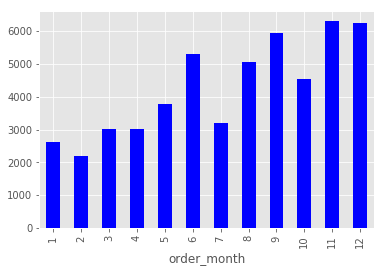

In [57]:
orders.groupby('order_month')['Order.ID'].count().plot.bar(color='b')
#september, november, december higher number of orders. 

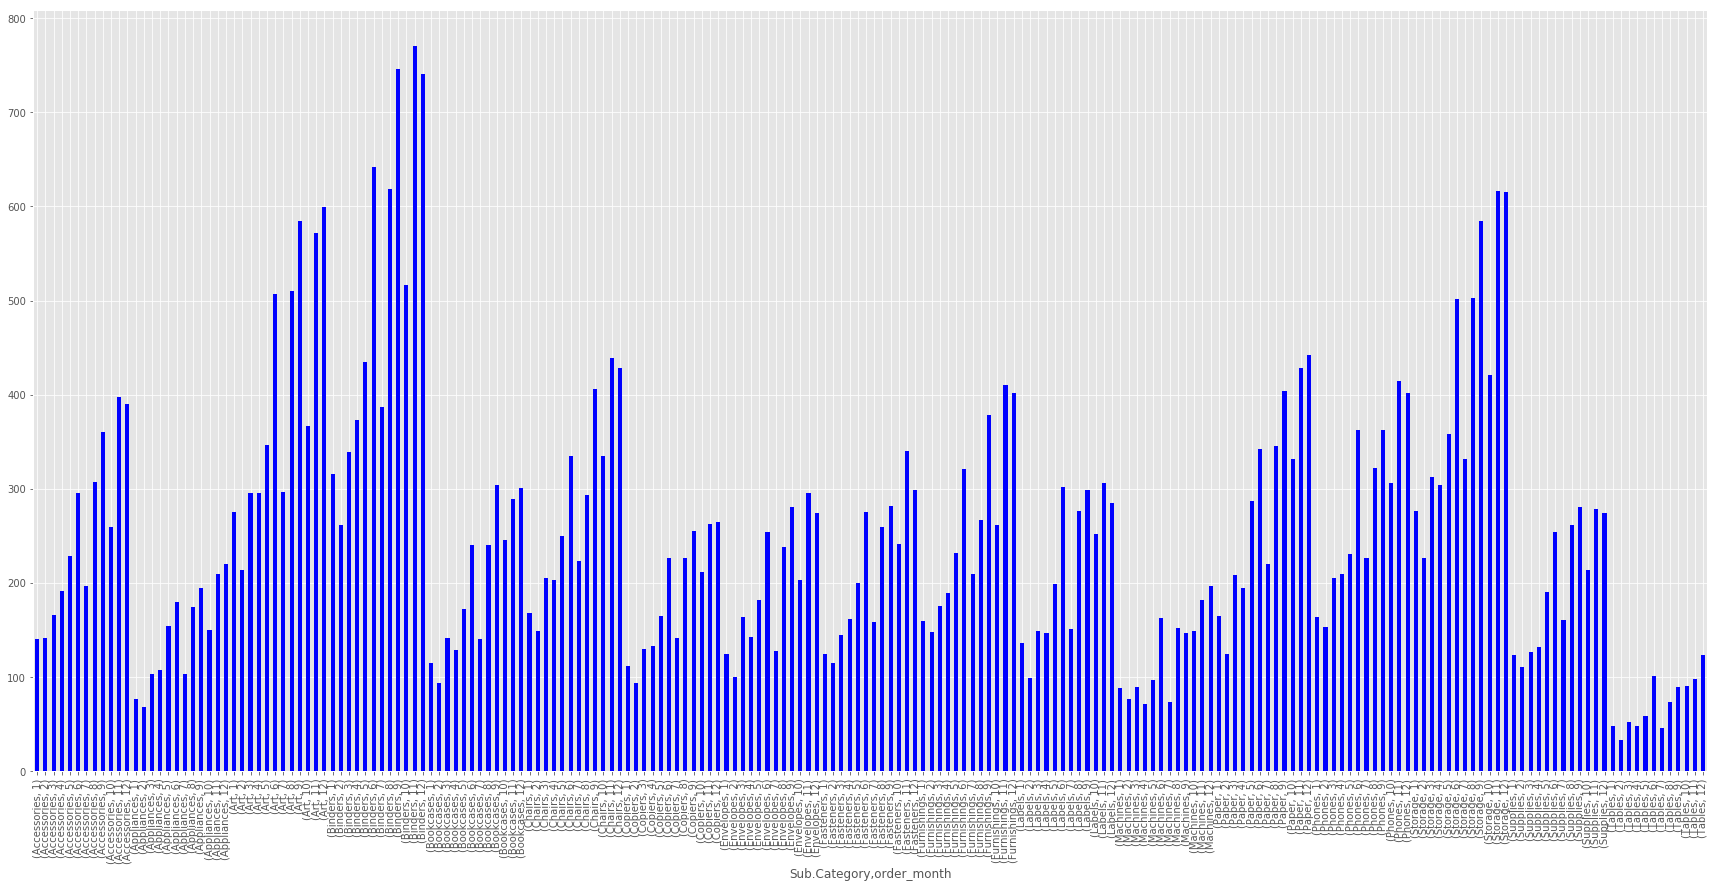

In [68]:
plt.figure(figsize=(30,14))
orders.groupby(['Sub.Category', 'order_month'])['Order.ID'].count().plot.bar(color='b')

#

In [110]:
from ggplot import *
ggplot(aes(x='Sub.Category', color='Order_month'), data=orders) +geom_bar()

ModuleNotFoundError: No module named 'ggplot'

TypeError: Could not convert CA-2014-AB10015140-41954IN-2014-JR162107-41675IN-2014-CR127307-41929ES-2014-KM1637548-41667SG-2014-RH9495111-41948IN-2014-JM156557-41818IN-2012-TS2134092-41219IN-2013-MB1808592-41378CA-2014-AB10015140-41954CA-2012-AB10015140-40974CA-2012-AB10015140-40974ID-2013-AJ107801-41383SA-2012-MM7260110-41269MX-2013-VF2171518-41591IN-2014-PF1912027-41796ES-2015-BP1118545-42216CA-2012-AB10015140-40958ES-2015-PJ1883564-42255IN-2015-JS156857-42035TZ-2015-RH9555129-42343PL-2013-AB600103-41494CA-2012-AB10015140-40974IN-2012-JK1532527-41030ES-2014-LB16795139-41697US-2015-NP1832582-42216MX-2015-VD2167039-42252IN-2012-PB19210127-41259ES-2012-EB1411048-40981CA-2012-AH10030140-41020IN-2013-BP1123058-41329US-2012-RR1952536-41270ES-2013-BS1136545-41472CA-2013-AH10030140-41635IN-2012-DP131057-41215CA-2013-AH10030140-41635CG-2012-AH1003033-41165CA-2012-AH10030140-41041CA-2012-AH10030140-41273ES-2015-PO18865139-42018IN-2012-DL128657-40918ID-2014-JB1600059-41873IN-2015-BF1100558-42319IN-2015-VG2180558-42273ES-2013-GT14710139-41621IT-2012-ZC2191048-41174CA-2014-AH10030140-41719IT-2014-EB1384045-41706IN-2015-AP1091527-42244IN-2015-SW2027558-42125MX-2015-JH15820141-42356US-2012-AH10030140-41206IR-2015-TG1164060-42265CA-2012-AH10030140-41273IN-2012-PB19210127-41259MZ-2014-DG330087-41991IN-2013-SG2047058-41424CA-2012-AH10030140-41020IN-2013-GP1474058-41419IN-2015-MW182207-42221CA-2012-AH10030140-41041IN-2015-CS1246011-42074CA-2015-AH10030140-42357ES-2015-MS1798048-42227IT-2014-KC1667548-41882IN-2015-DB1340527-42022CA-2015-AS10045140-42007IT-2015-DK13090120-42345IN-2015-CS1184558-42354MX-2015-EM1420082-42328UP-2012-DW3480137-41221IN-2014-AS1022527-41797MX-2012-ST2053093-41234CG-2014-BW106533-41727IN-2015-LA1678059-42242ES-2013-AB10150139-41537IN-2015-JH158207-42140CA-2015-AS10045140-42218ES-2014-BE1141048-41967IN-2012-SZ2003527-41221IN-2012-RM1937558-41209ES-2015-HG1484545-42327MO-2015-DP310586-42305CA-2014-AS10045140-41908US-2015-AS10045140-42252ES-2014-JB1600048-41668ID-2013-AM1070559-41535MO-2014-AB25586-41966IN-2013-RP192707-41438IN-2014-BK1126011-41940IN-2014-JM1525027-41985IN-2013-GP1474058-41419CA-2015-AS10045140-42281ES-2014-NZ1856545-41975CA-2015-AS10045140-42007ID-2014-SC20695102-41667IN-2013-NC186257-41401ES-2014-NF183858-41970IN-2013-NZ185657-41606IT-2013-PM1894045-41546ES-2014-MZ1733545-41885CG-2014-HM498033-41846IN-2015-RW195407-42327ES-2013-LH1715545-41444MX-2013-FH1436582-41558ES-2012-KM1666048-41129ES-2012-PO1886545-41217US-2012-AS10045140-41116MX-2014-AB1006028-41755IN-2014-DB130607-41999IT-2014-VM2168591-41711CA-2014-AS10045140-41727ES-2013-DM1352548-41369ES-2013-NM18520120-41634IN-2014-LC168857-41747IN-2012-RO1978027-41052CA-2015-AS10045140-42218ES-2014-EM1406548-41775CA-2015-AS10045140-42007IT-2012-ON1871545-40955IN-2014-VS2182027-41790IN-2014-CM121157-41913CA-2015-AB10060140-42315CA-2014-AB10060140-41884ID-2014-JK153257-41984IT-2015-RP1927045-42081IN-2015-DW1354078-42357CA-2015-AB10060140-42315US-2014-AB10060140-41712CA-2015-AB10060140-42315MX-2015-GM1444037-42265IN-2014-SV2081558-41968IN-2014-MM1792027-41950IN-2015-JK1612059-42204ID-2013-EM14200130-41502CA-2015-AB10060140-42314IN-2013-PM1894059-41284MX-2014-AT1043582-41667ID-2013-AB1001527-41439CA-2015-AB10060140-42314CA-2014-AB10060140-41884MX-2013-PV1898518-41614IT-2014-SB2029064-41887SO-2015-SM10005116-42265CA-2014-AB10060140-41884IN-2013-KH1633059-41489IN-2015-MP181757-42347IN-2013-LH1702027-41572CA-2015-AB10060140-42132ID-2014-CR126257-41878IN-2012-NC1862511-41041IT-2012-GM1468091-41215ES-2015-RA1994545-42218ES-2012-DB1306048-41171US-2014-AB10060140-41712IN-2014-RF197357-41709ES-2013-JH1582048-41306US-2014-AB10060140-41712MX-2015-DM1295551-42103CA-2014-AB10060140-41881MX-2015-BE1133582-42082IN-2014-SO2033527-41914ES-2014-DK12835120-41651SA-2015-LC7050110-42236IN-2012-PB19210127-41259IN-2015-CG125207-42077CA-2013-AB10060140-41535ID-2015-HG1502559-42194ID-2014-AD1018059-41801ES-2012-BP11155139-41130ID-2015-AA10480130-42080ID-2014-RL196157-41641CA-2014-AB10060140-41884ID-2013-SW2024559-41557CA-2014-AB10060140-41884IN-2012-BW1111027-41076ES-2015-YC21895139-42097MX-2012-JM1558082-41045BO-2015-MZ733513-42046ES-2014-JF15295120-41924CA-2015-AB10060140-42264UP-2015-DJ3510137-42202ES-2015-MF1825045-42330IT-2012-TC2129545-41058CA-2015-AB10060140-42314IN-2015-CP1234058-42202ES-2015-EH1412545-42245IN-2013-NC183407-41634IN-2015-BF1100558-42319ID-2014-JS1603059-41760ES-2012-AM10360139-41136IN-2015-JF1519021-42341IN-2014-AB100157-41815ES-2014-JG15160139-41660CA-2015-AH10075140-42301IN-2015-AG1033059-42197CA-2015-AH10075140-42301ES-2015-NF1847548-42248CA-2015-AH10075140-42301IN-2012-DR129407-41066ES-2012-NB1865548-41194IN-2014-NM1844527-41800IN-2015-TA213857-42351CA-2014-AH10075140-41898ID-2015-SC20380102-42165SF-2012-PA9060117-40954ES-2014-RB19570120-41971CA-2014-AH10075140-41817CA-2015-AH10075140-42110US-2012-LH1675036-41129CA-2014-AH10075140-41991IN-2013-KB1658527-41488ES-2013-LH1715545-41444CA-2015-AH1007523-42101IR-2014-MZ751560-41853IN-2015-DM1334558-42146ID-2012-CA1196566-40949ES-2014-SC20305120-41909IN-2015-MH1811558-42157IN-2014-KS163007-41912IN-2012-BG1174078-41108RS-2015-CR2625108-42230CA-2015-AH10075140-42301IN-2015-DK1309027-42308IN-2014-JL1583527-41845IN-2015-AP1072058-42284IN-2015-CR1282058-42294IN-2014-BF110807-41976IN-2015-JM15265102-42316IN-2014-NM1844527-41800IT-2012-TW2102545-41172IT-2012-RB1933045-41080CA-2015-AH10075140-42273CA-2015-AH10075140-42144SF-2015-AB10060117-42334EG-2013-JR567038-41363MX-2012-MD1735028-41222CA-2015-AH10075140-42301ES-2013-EB13840139-41487CA-2014-AH10075140-41991CA-2014-AH10075140-41817CA-2014-AH10075140-41817AJ-2014-JL58359-41662IN-2012-EP1391559-41049ES-2015-MS17770139-42275IT-2012-CM1265545-41218LH-2015-JC610575-42032IN-2015-GB145307-42260CA-2015-AH10075140-42335US-2012-JH161805-41264EG-2014-MT807038-41675IN-2012-AB1010558-41270CA-2015-AH10075140-42301LT-2012-CV280572-41025IN-2012-NH1861092-41187ID-2014-HJ1487527-41875MX-2014-JL1517518-41903MX-2015-MY1829593-42355CA-2012-AH10075140-41228CA-2013-AH10075140-41629CA-2015-AH10075140-42273MX-2015-KC1654093-42158MX-2015-CS1246093-42259IN-2015-HA1492027-42111ES-2013-MT1781545-41599ES-2015-FW1439545-42069ES-2013-BH1171048-41478ID-2015-DK1289559-42315MX-2015-KD1627018-42330ES-2012-SC208458-41070MX-2013-CY1274582-41531IN-2012-HL150407-41237IN-2013-CT1199566-41496ES-2014-CC12370139-41718LT-2014-GR456072-42003IN-2013-TT2107058-41551IT-2013-PO19195120-41492IN-2013-ED13885144-41549IN-2015-AP1091559-42089MX-2015-TM2149031-42329IT-2012-AW1084091-41242IN-2012-DP131057-41215CA-2015-AH10075140-42144RO-2013-SG10605107-41614MX-2014-BM1178582-41976MX-2013-FH1436582-41628MX-2013-DK1337582-41530CA-2015-AS10090140-42264CA-2012-AS10090140-41173CA-2013-AS10090140-41587TU-2013-SF10200134-41417CA-2014-AS10090140-41812SG-2015-JW5220111-42108MX-2015-CC1210082-42245ID-2015-RD1993092-42140CM-2013-BP123022-41621ES-2012-SA20830139-40998IN-2013-EM1381058-41308IN-2014-CS12175130-41788IT-2013-JD16060120-41515IN-2012-GH1466527-41074IN-2015-CM1193527-42244MX-2012-JB1600093-41208RS-2015-RB9465108-42082MX-2015-RB1979518-42258ID-2013-PO191957-41514CA-2015-AS10090140-42264IN-2014-TS212057-41852CA-2014-AS10090140-41812SF-2015-MV8190117-42362CA-2015-AS10090140-42264ES-2013-BD11560139-41327IN-2015-PS1876059-42288US-2015-FM1421551-42115IN-2014-CA1277558-41802ES-2014-CD1279048-41899IN-2015-NL1831092-42266IT-2015-TB2105545-42334ES-2015-NF1847548-42248IN-2015-KD1649527-42175HU-2015-EH412557-42300IN-2012-KB1660058-41136MX-2015-CS1246093-42259CA-2015-AS10090140-42096ES-2015-MG1769564-42018ID-2015-VF21715102-42321ID-2014-AM1070559-41803CA-2015-AS10090140-42264IN-2015-BP11290113-42269AO-2012-HZ49504-40916CA-2012-AS10090140-41173IN-2014-EM1382566-41850US-2015-AS10090140-42341IN-2015-BS1180059-42124MX-2012-DV1346539-41179IN-2015-MB173057-42179IT-2012-PC19000120-41004IT-2015-CA1231045-42223CA-2015-AS10090140-42096ES-2015-MB1808545-42049CA-2012-AS10090140-41266RO-2013-DB3660107-41503CA-2013-AS10090140-41587MX-2013-BG1174018-41493CA-2014-AS10090140-41812CA-2014-AS10090140-41762IN-2013-KB1631578-41495ID-2014-PK190757-41691ID-2013-CS121757-41473CA-2014-AS10090140-41894ES-2015-AF1088545-42103ES-2013-SJ2050045-41443ES-2014-DM1295545-42004CA-2014-AS10090140-41762IT-2013-CC1261048-41289CG-2013-BW106533-41437IN-2015-BE114557-42080ES-2013-TG2164014-41591CA-2014-AS10090140-41762CA-2015-AS10090140-42264ES-2015-VM2168545-42140CA-2013-AS10090140-41587MX-2015-SC2069539-42360ID-2014-SN2056097-41896ID-2014-CD122807-41646ES-2015-CC1210045-42182ES-2013-BG1103544-41468IN-2015-CC125507-42046IN-2015-AB101057-42153IN-2015-SV2078559-42110ES-2015-HW1493545-42335IN-2012-AS1028558-41221ES-2015-LD1685545-42265MX-2015-NS1850528-42059MX-2014-CM1271582-41885IN-2014-VG2180527-41996GH-2015-JD606049-42172ID-2015-MG17680144-42078IN-2015-CD1228058-42197ES-2015-DB13210139-42164ES-2015-CS118608-42292IN-2015-AF1088558-42222ID-2013-BN11470130-41633ES-2013-GG1465045-41615ES-2014-EM1406548-41775IR-2014-BS166560-41807IN-2015-AC1045058-42311ES-2013-CK1220564-41422ES-2014-JD16150139-41868UP-2012-CC2550137-41062IT-2012-MS17830139-41103CA-2013-AS10090140-41587ES-2012-GT14710120-41198IN-2012-CL1270058-41226ES-2015-MM1792045-42199MX-2015-CM1216093-42158IN-2015-DB1306027-42353MZ-2015-JW522087-42183US-2015-BN1147082-42358IN-2013-JC157757-41310MX-2012-HL1504093-40929MX-2013-LH1690018-41489ID-2015-DV1304559-42304IN-2013-BT1153058-41331IR-2013-BM165060-41436IN-2012-MG1820558-40962CA-2012-AS10090140-41173MX-2014-FC1424528-41840MX-2014-TT2122051-41727IN-2015-CY1274558-42300MX-2015-SJ2021582-42179MX-2014-PB1880593-41942CM-2013-BP123022-41621IN-2014-RW1969027-41763CA-2012-AS10090140-41173ZA-2012-DB3360146-41159ES-2013-DK1315048-41386SF-2014-RW9540117-41942IN-2012-PS1904527-41014CA-2014-AS10090140-41894CA-2014-AB10105140-41991IN-2015-MO1780066-42308IN-2014-NF1847527-41741IN-2014-MR1754558-41954IT-2013-CB1241548-41560ID-2013-LC1705092-41560IN-2015-RA1988527-42034CG-2013-MG814533-41559CA-2015-AB10105140-42161CA-2015-AB10105140-42328ID-2014-EM1396058-41901MX-2013-DJ1342082-41639ES-2015-CD1192045-42367MX-2014-BO1142582-41958CA-2012-AB10105140-41262CA-2015-AB10105140-42143ID-2015-KM16720102-42255ES-2014-SV2078545-41807MX-2012-BG1169582-41250IN-2015-CS121307-42266US-2014-AB10105140-41908IZ-2015-BD163561-42045ES-2015-RF19345120-42043ID-2014-JE1616559-41856IR-2015-MG768060-42109CA-2013-AB10105140-41585IN-2015-CC1247558-42129ES-2014-LT1676564-41947ES-2015-FH14365120-42165ES-2013-BF1097545-41517IN-2014-CJ1201027-41810HU-2015-SH997557-42239US-2013-SL2015582-41422LI-2015-NC834073-42143SF-2014-JB5400117-41758IN-2014-VG2180527-41996MX-2015-TB2125031-42289MX-2015-PS1897028-42109ES-2015-BB1154548-42336GG-2013-SG1047047-41405IN-2014-SP20920130-41808IN-2013-NZ1856558-41398IN-2012-Dp1324027-41223ES-2015-GZ1447064-42362MX-2015-AH1007582-42139PL-2015-CB2025103-42347IN-2012-SC200507-41249IT-2014-AM10705125-41892AL-2012-SC102302-40970ID-2013-JS1559559-41275ID-2013-BS1138059-41577IN-2014-TC21295130-41962RS-2014-JL5130108-41866IN-2014-Dp1324066-41798IN-2015-NF1838511-42279ES-2015-AS10090139-42062IN-2014-EL137357-41943IN-2014-FH1427559-41991IN-2015-LT1676558-42133IN-2015-BN1147027-42189ES-2013-BP11230120-41411IN-2012-DM1352558-41123CA-2015-AB10105140-42267CD-2014-SM1032025-41684IN-2013-PM191357-41417MW-2015-TS1143085-42220MX-2014-TS2134018-41956IN-2015-AM107057-42047MX-2015-LS1724582-42319IN-2014-DR129407-41728CA-2013-AB10105140-41585CA-2015-AB10105140-42267IN-2014-CM1181597-41870ES-2015-FG1426045-42153IR-2013-KN670560-41508WA-2015-TB1152089-42190IT-2013-GM1444091-41347CA-2015-AB10523-42139MX-2015-JB1540051-42263IN-2015-JS1603097-42223IN-2014-AM10705102-41891MX-2015-SF2020039-42255CA-2013-AB10105140-41585MX-2013-JF1529531-41564ID-2015-KH16510102-42052IN-2013-DL1333058-41328IN-2013-KN163907-41611IN-2013-SV2093527-41620IN-2015-MD178607-42171ES-2013-LS1720045-41628MX-2015-JM1586582-42137CA-2015-AB10105140-42220IN-2015-CM124457-42315IT-2014-SS20140104-41800IN-2013-BW1111058-41404IN-2014-JE1561058-41895IN-2014-GH1442527-41845IN-2015-JK1609058-42288MX-2012-SM2032036-41234CA-2013-AB10105140-41585US-2015-GR1456082-42302CA-2014-AB10105140-41672MA-2014-DH367577-41926RS-2012-MM8280108-40953IN-2015-SW2027558-42125IR-2012-PM913560-40978IN-2013-GH144257-41489ID-2013-JM1586597-41628ES-2013-CM1211564-41489IN-2013-SC2084527-41445MO-2014-GP474086-41678ES-2012-AF1087014-41179IT-2013-TS2150545-41448MX-2014-CR1273028-41993MX-2013-FH1436582-41558ID-2012-BM115757-41149ES-2015-AH100308-42203IN-2012-AG1049527-41248ES-2015-BN11470139-42110CA-2015-AB10105140-42267AU-2012-AG6758-41153ES-2014-SW2075545-41852MX-2015-CS1246093-42259ES-2015-SK1999045-42222IN-2015-MP18175144-42328MX-2013-AG1090082-41398MO-2013-AJ96086-41513UP-2014-MC7275137-41997IT-2014-JF15295120-41668CA-2015-AB10523-42139SA-2012-MM7260110-41269IN-2013-EJ13720113-41608MX-2014-MS1736539-41780CA-2013-AB10105140-41585ES-2015-DH13675139-42182CA-2015-AB10105140-42267MX-2014-HE1480018-41845CA-2015-AB10105140-42328IN-2012-SB2017027-41208CA-2013-AB10105140-41585IN-2013-VT2170092-41634CA-2012-AB10105140-41262IN-2013-BC1112592-41401IN-2012-NF1859527-40916CA-2014-AH10120140-41992CA-2015-AH10120140-42103IT-2012-RB19330120-41077ES-2013-CS11950124-41283ES-2015-BW11110120-42046CA-2012-AH10120140-41107IN-2013-LW1682558-41376ES-2015-RD19585120-42007CA-2015-AH10120140-42103IN-2015-BT1168066-42351CA-2015-AH10120140-42188CA-2015-AH10120140-42234IT-2015-TB2117564-42284UP-2014-MD7860137-41810IN-2015-JH1618059-42196ES-2015-CC1214548-42118MX-2012-XP2186539-41032IN-2012-TS2137058-41187MX-2015-ML1741031-42320MX-2015-MY1829593-42355CA-2015-AH10120140-42234ES-2014-BS1166545-41734IN-2015-NL1831092-42266CA-2014-AH10120140-41992IT-2015-CA1196548-42195IN-2015-QJ1925527-42283MX-2014-RE1945036-41791SF-2013-CP2085117-41506RS-2012-JK5730108-41150ES-2013-HZ1495045-41612ID-2015-AR105707-42290IT-2014-EH14005120-41992IN-2013-JR1570058-41441IN-2014-PL1892588-41871MX-2013-TC2114582-41446MX-2013-DG1330082-41417ES-2014-LW1699045-41759ES-2013-Dl1360045-41440CA-2014-AH10120140-41992ES-2014-SC2009545-41991ID-2015-EB1393059-42206MO-2014-GP474086-41678IN-2012-SB2017027-41208CA-2014-AH10120140-41992MX-2014-SM2000518-41696IT-2012-JR1567048-41238IN-2013-CM1216027-41506IN-2013-DL129257-41418MX-2012-FM1429065-41216IN-2012-DP1316558-41173IN-2014-CK1259592-41929CA-2014-AH10120140-41992IN-2014-GM1444027-41795ES-2014-CM1183045-41773CA-2014-AH10120140-41992CA-2015-AH10120140-42188IN-2014-MM1726027-41933ES-2015-ME17320139-42227MX-2014-CS1249082-41763IT-2014-GH14410120-41835CA-2014-AH10120140-41992MX-2015-MC1763536-42340MX-2015-VT2170018-42012CA-2014-AH10120140-41821IN-2015-SJ2021527-42182IN-2012-CD1192027-40979ID-2014-TA21385102-41654IN-2013-DP131057-41514ES-2012-DJ88887148-41231QA-2015-LM7065105-42362ES-2013-AR1051064-41441IN-2014-JH1591066-41831IN-2013-PC1900078-41416ES-2015-CM12235139-42221CG-2015-DK337533-42228ES-2013-NM18520120-41634ES-2014-EG1390045-41644ID-2015-AH100757-42367IN-2014-AS1063092-41989IN-2014-DK1289559-41697US-2013-CL1189018-41459ES-2013-CA12265139-41506CA-2015-AH10120140-42309ES-2013-DB1297045-41458ES-2015-PC1900048-42337IN-2012-VS218207-41006CA-2015-AS10135140-42328CA-2013-AS13523-41403IN-2013-JR1567027-41597ES-2015-NF1847548-42248IN-2014-MF1766527-41947CA-2015-AS10135140-42328ES-2014-EB13930139-41962MX-2015-EB1397518-42369CA-2014-AS10135140-41957ES-2013-JH1582048-41306IT-2014-MV1748545-41717ES-2013-JW1595545-41354IN-2015-LA1678027-42148ES-2014-FM1421564-41804CA-2012-AB10150140-40972CA-2012-AB10150140-40972CA-2012-AB10150140-40972MX-2014-MC1757518-41982MX-2014-MC1763582-41921IN-2014-CR126257-41928MO-2012-JF541586-41266MX-2014-AH1021018-41745US-2012-LH1675036-41129CA-2012-AB10150140-40972IN-2012-PO1919527-41200IN-2012-MG1820558-40962IN-2012-BM1178527-40977IN-2015-KD1634558-42029IT-2015-TS21610139-42173IN-2012-AR1051027-41266US-2014-PG1889582-41647MX-2014-LC1705051-41643ES-2015-DJ1342045-42035ES-2012-HK1489045-41216CA-2015-AB10150140-42252TZ-2014-HH5010129-41906IN-2012-RR193157-41081ES-2013-SH2063548-41516ES-2014-SV2078545-41807CA-2015-AB10150140-42328IN-2013-DV1346527-41626MO-2014-RP985586-41907MX-2015-NF1838582-42087CA-2014-AB10150140-41670ES-2012-LR1703548-41245IN-2015-DR1294058-42152ES-2015-AF1087048-42169CF-2012-IM5055106-41224ID-2014-VG2180527-41790CA-2012-AB10150140-40972RS-2012-AS285108-41137MX-2013-DK1298539-41339CA-2015-AB10150140-42328ES-2015-RW1954096-42222IZ-2015-EH418561-42173IN-2015-ML1739559-42369MX-2013-BF1121593-41541CG-2014-MB730533-41688CA-2015-AB10150140-42328CA-2015-AB10150140-42328IN-2015-KN164507-42332IN-2015-HR14770102-42270ES-2015-CK1276045-42312IN-2015-PB192107-42248CA-2013-AB10150140-41527CA-2014-AB16523-41660MX-2015-AA1048031-42111IT-2014-EB1384045-41706AG-2012-RO97803-40964CA-2013-AB10165140-41361IN-2015-MR175457-42263ES-2014-SP2092064-41828CA-2013-AB10165140-41450MX-2014-AH1046593-42004CA-2015-AB10165140-42263IN-2015-AH105857-42033TU-2012-CV2805134-41159IT-2015-JK1532545-42052LH-2013-RB943575-41424IR-2014-AG52560-41641MX-2013-AR1034582-41601SA-2015-MW8220110-42105EG-2013-AH21038-41489IN-2015-FC142457-42326IN-2012-ML1741027-41255ID-2015-TH212357-42175CA-2015-AB10165140-42109IN-2014-TW2102527-41780SF-2015-LT7110117-42280IT-2012-KN16390139-41268ES-2015-HD1478548-42271CA-2013-AB10165140-41450ID-2015-BE114557-42242SA-2015-MC7575110-42326IN-2013-CS1246058-41609ES-2015-ME1732064-42253IT-2015-SW2027564-42277CA-2015-AB10165140-42094MX-2013-CR1282051-41543ES-2015-HM14860125-42368MZ-2015-CC247587-42024ES-2014-JM1525045-41835ID-2012-PS18970118-40967ES-2015-CM1219045-42094ES-2014-QJ1925564-41793IN-2014-TS2150559-41703US-2012-AB10165140-41228ES-2015-CS118608-42292IN-2012-KM1672078-41051CA-2013-AB10165140-41404MX-2015-SB2018518-42245ES-2015-MT1807045-42176ES-2015-JF15415139-42132NI-2014-MT807095-41870ES-2014-ES14020120-41817EN-2012-AB60042-40932CA-2013-AB10165140-41361IN-2015-PS189707-42342ES-2014-EB13975139-41818MX-2013-AF1087018-41418IN-2015-MC1742559-42346IN-2013-CC1268558-41619TU-2015-EH4125134-42068IN-2014-BS116657-41815IN-2015-IM1507059-42157IV-2012-SM1032029-41178US-2014-DA1345055-41795ES-2014-DB1306045-41928CA-2015-AB10165140-42344CA-2013-AB10165140-41450MX-2015-LC1688582-42329ES-2013-TC2098045-41588IN-2012-SW2035059-41067IN-2015-JW1522058-42101MX-2012-DA1345031-41199SF-2013-CM1830117-41389IN-2013-CS1184527-41517MX-2013-MO1780051-41382US-2014-CR1273018-41993IT-2014-MY1738096-41794SA-2013-MS7830110-41450IN-2013-SW207557-41502ID-2015-HG1496597-42230CA-2015-AB10165140-42109MX-2014-DC1328551-41885ES-2015-DL13315139-42153ES-2014-TH21235125-41814CA-2015-AB10165140-42109MX-2015-JK15370100-42132CA-2015-AB10165140-42344IR-2015-CH207060-42048ID-2015-ST205307-42336ES-2013-SP2092048-41510CG-2015-MH744033-42218IN-2014-MC1784558-41971IN-2012-CS1184527-41139ES-2015-PW19030139-42076ES-2014-BS1159045-41733CA-2015-AD10180140-42027IN-2015-DO1343558-42141MX-2014-SG2089051-41752CA-2015-AD10180140-42027ID-2013-JC161057-41531IN-2015-VG2180558-42273IN-2013-TB2119058-41552ID-2015-KD1627059-42306ID-2012-BM1114059-41235IV-2015-SV1078529-42348MX-2012-AH1003082-41251US-2012-AD10180140-41268ES-2014-VP21760120-41990ES-2015-EG13900139-42108ID-2015-TC21145102-42358IN-2014-LR1691558-41899CA-2015-AD10180140-42340US-2015-AD10180140-42125ID-2013-TH21550130-41634IN-2014-HD1478527-41923ID-2013-TP2113027-41389RS-2015-TC11145108-42178MX-2013-JL1523536-41606IN-2015-DM1334558-42182MX-2015-RK1930018-42181ES-2013-CC1267064-41534IN-2014-TC2098058-41971CA-2015-AD10180140-42322ID-2015-CM123857-42208ES-2015-BG1103564-42251CA-2013-AD10180140-41439CA-2015-AD10180140-42027CA-2015-AD10180140-42340IN-2015-MG1789097-42022ID-2015-MM1726078-42181IN-2013-TG2164078-41299IN-2013-CC1237011-41462MX-2012-SC2084582-41240MX-2015-PS1904518-42335ID-2013-CB1202559-41615CA-2012-AD10180140-41231ES-2013-BT11395139-41625MX-2014-SJ2050051-41962IT-2015-MC1784545-42249MX-2015-MG1820518-42140IN-2014-RA199157-41948PL-2012-TT11265103-41219IZ-2014-TH1123561-41738IT-2015-DM1301564-42167US-2014-VG217905-41800IN-2015-JW1595527-42190IN-2014-ZC2191058-41760CA-2013-AD10180140-41459MX-2013-NW1840082-41584CA-2015-AD10180140-42027IN-2012-VP217307-41166ES-2014-SS2041045-41999CA-2014-AH10195140-41992EZ-2015-AG27032-42249CA-2014-AH10195140-41992IN-2014-BS116657-41815ES-2012-BW1120045-41085IT-2015-FM1421545-42271CA-2013-AH10195140-41338CA-2014-AH10195140-41992IN-2014-PF1912027-41916IN-2013-NL1831027-41586CT-2013-SC1072524-41301IN-2013-CA1226592-41627CA-2012-AH19523-41129CA-2013-AH10195140-41338US-2015-AG1052582-42355IN-2012-PL1892527-41228ES-2014-AB1001545-41930IN-2015-TS2150527-42286IN-2015-MG1814558-42087CA-2015-AH10195140-42314ES-2013-RD1958514-41639CA-2015-AH10195140-42241CA-2015-AH10195140-42241ID-2015-BD116057-42103IN-2015-PB191057-42281ES-2013-AB10150120-41588IN-2015-GK1462092-42294US-2015-SC2057582-42342IN-2013-CC1247566-41572BN-2012-DO343515-41172MX-2012-NS1850582-41223CA-2013-AH10210140-41615IT-2013-TS2143045-41346CA-2015-AH10210140-42363MX-2012-AZ1075093-41271US-2015-AH10210140-42291ES-2015-IG1508545-42032IT-2014-SP2086045-41956CA-2015-AH10210140-42250ID-2013-KM162257-41501MX-2015-BS1136518-42199IN-2013-TC211457-41286IR-2013-KM672060-41389ID-2014-AH105857-41926IN-2013-GM144407-41401IN-2012-BF1097527-41128ES-2012-MM1805548-41259CA-2015-AH10210140-42332ID-2012-RB193607-41227UP-2013-NC8415137-41583ES-2013-GR1456096-41280CA-2012-AH10210140-41241IN-2012-SN207107-41174IZ-2013-DL333061-41514CA-2015-AH10210140-42072CA-2013-AH10210140-41588IN-2015-CJ118757-42172ES-2013-AY10555139-41430MX-2014-CP1234036-41762MX-2014-MP1747093-41914ES-2012-PJ19015139-41257MX-2013-NC1841593-41572ES-2014-BV11245120-41688ES-2015-LW1682545-42258ES-2014-BO1142545-41927CA-2013-AH10210140-41615ID-2014-EB1384059-41928MX-2015-SG2047031-42074MO-2015-PO919586-42264MX-2012-CS1184516-41216ES-2015-KB1658548-42276IN-2015-EM1414058-42194ES-2013-KN1639048-41352IN-2014-SL2015566-41803IT-2014-KC1667548-41882IN-2014-CM1211578-41783RS-2012-GZ4545108-41088MX-2012-DK1298582-41256CA-2012-AH10210140-41241IN-2014-DK1298558-41863IN-2013-PN1877527-41527IN-2014-MS1798058-41801IN-2014-EH1412578-41936ES-2014-AG1090045-41801ES-2013-AB10150139-41537IN-2015-BS1159066-42139CA-2014-AH10210140-41690ES-2012-BP11185139-41252MX-2014-BH1171039-41930IR-2014-AS28560-41972QA-2015-LM7065105-42362IN-2013-SC2080058-41310CA-2013-AH10210140-41615IN-2015-AP1091527-42244ID-2014-SV208157-41679CA-2015-AH10210140-42072IT-2012-MP1817545-41040CA-2012-AS10225140-41199AL-2014-TT114602-41863ES-2015-PS1876048-42179IN-2015-RR1952527-42035IN-2015-AC1042027-42150MX-2012-TP2113082-41207IN-2015-CG1204092-42032ID-2014-BG1103527-41781ID-2012-CR12580144-41132TZ-2012-TR11325129-41031MX-2014-SC2044082-41877IN-2013-CA1277558-41548IN-2014-BT1168027-41815CA-2015-AS10225140-42265MX-2015-CC1237026-42115CA-2012-AS10225140-41199MX-2015-DC1328582-42091MX-2015-JE1574531-42255MX-2014-DB1321036-41961MX-2015-LS1720080-42294ES-2013-BE11335139-41340ES-2015-BN11470139-42110IN-2013-MH180257-41443IT-2012-MS17830139-41103IT-2014-JB1592548-41789ES-2014-TW21025139-41807IN-2015-GW1460527-42089US-2012-SC2072518-41166ES-2013-LR1691544-41537CA-2012-AS10225140-41199IN-2012-PB19210127-41259CA-2015-AS10225140-42265ES-2012-FO1430545-41141SY-2013-SV10815126-41541IN-2015-JF1541527-42095CA-2015-AS10225140-42347IN-2014-CK1259592-41929MX-2014-SS2014018-41658ID-2015-RP19855130-42348IN-2012-AB1006059-41060CA-2015-AS10225140-42265SF-2015-LT7110117-42280US-2015-RB1933082-42286ID-2015-LW172157-42293ES-2012-AR1051045-41159IN-2014-AG1090058-41661CA-2015-AS10225140-42265CA-2014-AS10225140-41976ID-2012-LH17155118-41123IN-2014-KB1624058-41760MX-2014-KA1652539-41922IN-2014-BM111407-41937IN-2014-JL1517559-41934MO-2012-EM396086-40951IN-2014-AS1022511-41872ID-2013-JS1559559-41275IN-2012-SC2023058-41081IN-2014-JD1579059-41787IT-2015-JL1585048-42230IN-2015-JW1607592-42301CG-2015-LL684033-42334ES-2013-TH2110045-41524IT-2012-MC1727545-41069RS-2012-NG8430108-40998IN-2015-ML1741027-42313ES-2014-KD1661545-41965US-2015-MC1760536-42081CA-2014-AS22523-41985MX-2015-JK1562539-42245IN-2013-BD1150059-41552IT-2012-ZC2191048-41174IN-2014-CP1208527-41643CA-2013-AS10225140-41398MX-2014-KN1645082-41983IN-2012-TM2149059-41230AG-2013-TS115053-41607IN-2015-AH105857-42033SF-2014-LD6855117-41718IN-2012-LP170807-41047ES-2015-KA1652548-42231IN-2014-CR126257-41928MX-2013-DK1315039-41546ES-2013-KD1649545-41445IN-2015-BB115457-42326ID-2012-BN1147078-41242IN-2013-CV1280566-41382MX-2015-CM1193531-42264MX-2014-SK1999082-41902ES-2014-BE11410139-41675ES-2015-KM1672048-42027US-2015-TB215205-42339ES-2012-JC1610514-40963ES-2013-MO1750048-41588IN-2012-JS1603059-41084IT-2013-PM1894045-41546IN-2013-MS175307-41579IN-2014-GA145157-41830ID-2015-CS123557-42328ES-2013-SW202458-41340IR-2013-CP208560-41521CA-2015-AS10225140-42265ES-2013-PF1916545-41545ES-2012-BS1138045-41065CA-2015-AS10225140-42265MX-2012-GM1450093-41245CA-2015-AS10225140-42265CA-2012-AS10240140-40982MX-2015-CC1247518-42353ES-2014-VF21715120-41824IN-2012-CS1184527-41139IN-2015-HG1496566-42155LE-2014-CC267071-41648IN-2015-KM163757-42342ID-2014-HR148307-41856IN-2015-ED1388527-42207ES-2014-TB21520120-41765IN-2013-MW1822027-41633EG-2013-RH960038-41615ID-2015-SB202907-42178IN-2012-MN1793527-41152CA-2012-AS10240140-40982IN-2013-RP19390102-41635CA-2012-AS10240140-40982IN-2014-LB1679558-41893MX-2013-PK1891082-41532IN-2015-LS1694559-42045CA-2012-AS10240140-40982ES-2014-JK1573064-42004IN-2015-JF1519021-42341ID-2015-CS123557-42328CA-2014-AS10240140-41816IN-2015-BT113957-42284CA-2014-AS10240140-41737ES-2014-MC1810045-41857ES-2012-NZ18565139-41111ES-2012-NF18385124-41074IT-2014-SS2041091-41671IT-2013-EH1394564-41628CA-2013-AS10240140-41481CA-2013-AS10240140-41362IN-2014-CS1184511-41664CA-2015-AS10240140-42177IN-2013-JM161957-41366IN-2015-MG1789027-42279ES-2014-PL1892545-41784IT-2015-MA1799548-42080IN-2015-SP2065059-42290IN-2013-RW1969058-41623ID-2013-AH1007559-41594MX-2012-JH1543082-40913ES-2012-PO1885045-41025IT-2013-KB1631545-41377ID-2013-KD1627059-41435IT-2014-JF15295120-41668ES-2014-ZC2191064-41828ES-2014-ML1775545-41794ES-2012-CD1279045-41241ID-2015-PC18745102-42287IN-2015-GW1460527-42089IT-2013-MT1781545-41458MX-2012-KE1642018-41187MO-2015-EM420086-42218IN-2013-DW134807-41404TU-2015-SC10680134-42180CA-2015-AS10240140-42177IN-2014-JG1580527-41867CA-2012-AS10240140-40982CM-2012-PV898522-41149CA-2012-AS24023-41172IT-2014-GH14410120-41835ES-2014-RS197658-41823IN-2014-SH199757-41776CA-2012-AS10240140-41192IN-2015-SB201707-42125GH-2015-JF541549-42084MX-2015-DK1298518-42217IN-2013-GA1472527-41290IN-2013-XP218657-41523CG-2015-GT475533-42349MX-2014-HA1492016-41984ES-2013-JF15295139-41450MX-2014-PR1888082-41709ES-2015-AW1084048-42353US-2013-AG1067555-41392CA-2014-AS10240140-41737IN-2013-CJ1187527-41586ID-2014-AG1076558-41993ES-2015-SE2011048-42335IN-2014-EM1382566-41850ID-2015-DM130157-42158CA-2015-AB10255140-42172MX-2013-VP2173026-41430MX-2015-JB1604526-42151IN-2015-MD1786059-42214KE-2014-JM558069-41872ID-2013-SC203057-41488CA-2015-AB10255140-42203IN-2014-JO1528058-41875CA-2015-AB25523-42326MX-2015-EM1414039-42345IN-2013-PO1918011-41570CA-2013-AB10255140-41402US-2014-AB10255140-41817IN-2015-MG1769527-42294IN-2013-AP1072092-41409ES-2015-SE2011064-42122MX-2014-JK1532582-41797MX-2015-RK1930082-42206MX-2014-EJ1415531-41770CA-2015-AB10255140-42172CA-2015-AB10255140-42172ES-2015-JB1600064-42131IN-2015-AF1087027-42147IN-2015-AF1087058-42090IN-2015-GM144551-42217IN-2012-TP21130144-41223IN-2012-MT1781527-41121CA-2015-AB10255140-42158IN-2014-SM209057-41894IN-2015-DW135407-42078ML-2015-BO142579-42368IN-2015-SP2065059-42342CA-2014-AB10255140-41994MX-2015-CM1193518-42333ES-2015-AW10930139-42251MX-2012-DK1283536-41089IN-2015-CM122357-42171ES-2014-AF1088564-41882ES-2015-MP1747048-42364ES-2015-OT18730120-42328MX-2013-ON1871582-41627ID-2014-JP1546059-41803ID-2014-AS102407-41912TU-2014-TB11625134-41971TZ-2014-JP5520129-41786US-2012-DB1340582-41270IN-2015-JD161507-42251ES-2012-BD1177045-41116ES-2014-EB13975139-41818ID-2013-BD116357-41361ES-2014-LB16795139-41697IT-2013-GR1456045-41440RS-2015-CC2370108-42178IN-2015-GM1469527-42163IN-2013-AF1088558-41627SF-2014-PO8850117-41697ES-2015-CD1192045-42367ES-2013-CD1192045-41609ES-2015-HW1493545-42335ES-2013-ND18370139-41318IN-2015-TZ2144527-42300ES-2015-BT1139564-42088IN-2012-JE1547566-40954ID-2015-RB1943559-42301IN-2015-JH1618059-42196IN-2013-AI108557-41455IN-2015-MH1744027-42334IN-2012-DB1306027-41219ES-2015-DB13210120-42199MX-2013-NM1852082-41283IN-2015-CS1184558-42354CA-2013-AB10255140-41611LY-2014-JE616574-41874CA-2015-AB25523-42326IN-2012-Dl13600130-41159MX-2015-AH1021051-42039MX-2013-DS1318093-41419MX-2014-DV1304582-41866MX-2014-DK1315031-41706ID-2015-AC10660144-42306CA-2014-AB10255140-41994MX-2013-CC1243082-41634MX-2014-NG1835531-41947MX-2015-KE1642031-42252CA-2014-AB10255140-41936ES-2015-SJ202158-42269CA-2013-AB10255140-41611IT-2015-AR1082545-42290IN-2012-BM1178558-41124ES-2015-JH1582045-42256IN-2015-HD1478527-42327CA-2012-AB10255140-41111IN-2012-AA1048059-41083ES-2012-RC19825139-40919CA-2015-AB10255140-42158IN-2014-MO17800113-41774MX-2014-JD1601551-41842ID-2014-MY182957-41640ES-2012-EH14005139-41065MX-2015-AF1088582-42316SF-2015-JH5910117-42122SF-2014-SC10695117-41956ES-2015-DJ1342064-42215CA-2014-AG10270140-41896MX-2014-SK1999082-41902IR-2014-RD993060-41944MX-2012-KE1642039-41138TU-2015-LC6930134-42078MX-2012-JM1586582-41188IN-2013-DW1319558-41572IN-2015-JD1601592-42321CA-2014-AG10270140-41896IN-2013-RD1990027-41598CA-2014-AG10270140-41896CA-2012-AG10270140-41112ID-2013-CL1270092-41384ID-2013-BD115007-41588CA-2014-AG27023-41850CA-2014-AG27023-41850MX-2013-RD1993026-41298CA-2014-AG10270140-41896IN-2014-RD194807-41965CA-2013-AG10270140-41537MX-2013-LS1723082-41368MX-2012-LA1678018-41063IN-2015-GD145907-42151CA-2014-AG27023-41850IN-2014-EB13750113-41873CA-2015-AG10270140-42091PL-2014-SC10680103-41659MX-2015-NC1862531-42262KE-2013-KH636069-41361IN-2012-JM1558092-41042MX-2012-BF1127536-41265ES-2014-NG18430139-41852US-2012-Co12640143-41079ES-2013-JH16180120-41548IT-2012-TS2137048-41061CA-2014-AG10270140-41896IR-2015-TC1114560-42357MX-2013-FM14290132-41520IN-2012-SF209657-41137ES-2015-KM1637548-42259US-2014-PG1889582-41647ES-2014-SS2041045-41999ES-2014-MP1817548-41706IN-2014-BH117107-41704IN-2014-VM2168527-41912ID-2014-CS11860102-41858ID-2015-MF18250102-42039IT-2015-KB1640562-42274ES-2015-MO1750045-42164CA-2014-AG10270140-41896MX-2015-AW1093051-42314CA-2014-AG10270140-41896ES-2014-LC1687045-41796MX-2014-JL1550582-41961MX-2013-LC1693051-41422MX-2015-SP2086018-42164MX-2012-BD1172551-41109ES-2015-RB1936045-42294CA-2014-AG10270140-41896SF-2014-RW9540117-41942ES-2015-TM2101048-42305MX-2012-LD1685582-41059MX-2014-KD1661531-41873ES-2012-AH1058514-41067IR-2014-AB15060-41971CA-2012-AG10270140-41041MX-2015-EL1373582-42316CA-2014-AG10270140-41896IN-2014-EM1381092-41892ES-2014-AG1052548-41690IN-2015-ZC219107-42333CA-2014-AG10270140-41896MO-2015-PO919586-42336ES-2012-BW1106548-41125ES-2014-TG21640139-41964MX-2014-JP1546082-41971ES-2013-BS1136545-41472IN-2015-EM139607-42130US-2014-AS10285140-41955ES-2014-MV17485120-41935ID-2012-FM1438027-40964PL-2014-BN1470103-41896BU-2014-PC874519-41954ID-2015-DH1307559-42080IN-2014-AB1060058-41858UP-2013-AH10030137-41325MX-2014-AH1012082-41867CA-2014-AS10285140-41948ES-2014-CK1259545-41754ID-2014-GM1444092-41996ES-2013-JL15175139-41286ES-2014-NP1867048-41805MO-2013-JD606086-41598CA-2015-AS10285140-42350MX-2014-DJ1363028-41935IN-2015-EM14200102-42250CA-2014-AS10285140-41781CA-2014-AS10285140-41941IN-2012-BE1133578-41088ID-2015-BV1124527-42232IN-2012-CG1204027-41252ES-2015-SJ2012545-42097RS-2015-PV8985108-42139IN-2015-RB1936027-42116IN-2014-KB165857-41809ES-2014-ML1826548-41787ES-2015-JM1565548-42211IN-2015-KM1666059-42207MX-2015-MG1814539-42361IN-2012-CS1184527-41139MX-2014-DV1304582-41866IN-2015-MC1757527-42066ES-2012-DJ1342048-41032ES-2015-NF18385139-42349IR-2015-SF1096560-42166MX-2012-CM1238582-41255MX-2013-BS1166582-41556MX-2013-PF1922582-41281IN-2014-RB1936027-41762IN-2015-RB1936027-42116IN-2013-CR1262558-41613ES-2015-MA1756048-42028AG-2013-PO88653-41634IN-2014-MH17290113-41821MX-2012-ST2053039-41117IT-2014-MA17560124-41675IN-2015-BE1133527-42276MX-2014-EP1391582-41788CA-2014-AS10285140-41941MX-2014-AS1009093-41795MX-2014-MH1729082-41745ES-2015-LA167808-42067ES-2014-VB21745120-41983US-2014-AS10285140-41949IN-2015-NR1855027-42239ES-2015-DL1349548-42052US-2013-CP1208598-41625ES-2013-DB1366045-41445IN-2015-PH1879092-42290MX-2012-CJ1187518-41196ES-2015-AB1016545-42351ES-2015-CA1205548-42084IN-2012-HJ1487559-41119ES-2014-BS1159045-41858IN-2013-KH1651011-41503ES-2015-MV17485120-42314ID-2013-RS19765102-41283IN-2014-CC1237058-41710IT-2013-HG1484591-41348ES-2013-AA10315120-41410ES-2014-EL13735139-41987IN-2014-GZ1447058-41721IN-2014-JM156557-41818CA-2014-AS10285140-41781IN-2015-NF1838527-42329IR-2015-JF529560-42260ES-2015-AT10435120-42357CA-2012-AG10300140-41024ID-2014-JE1574559-41811ES-2015-JB1540045-42060ES-2014-CS1213045-41769EG-2015-RB970538-42187IT-2015-TC2098045-42056CA-2014-AG10300140-41979MX-2014-AG1033028-41865IS-2014-BD172563-41723IN-2015-LP1709559-42096IN-2013-RD1990011-41602MX-2013-EB1370518-41560IN-2014-PO188507-41830IN-2014-DL133307-41814IN-2012-MG178757-41175IN-2014-HD1478592-41820ES-2012-MG1765045-41251MX-2013-BS1159018-41511IN-2014-AG1027092-41649IN-2015-BT1139527-42077SF-2015-NP8685117-42089CA-2013-AG10300140-41597MO-2015-PO919586-42264ES-2013-SC2072545-41362IT-2015-JK1573064-42150IT-2015-CM12655124-42042CA-2015-AG10300140-42251IN-2012-PF191207-41176ES-2015-BM11785120-42320CA-2012-AG10300140-41024CA-2014-AA10315140-41702NI-2012-AS63095-41096IN-2012-SC2068027-41222ID-2014-CC1237059-41912ES-2015-PO1886545-42306ES-2012-DC1328545-41230ES-2015-MG1820514-42167ID-2013-PS18970113-41523MX-2014-BM1114028-41843MX-2014-MC1759051-41657MX-2015-MM1726051-42365CA-2012-AA10315140-40998IN-2012-CC1261027-41105ES-2015-HR14770139-42290IN-2014-HH1501058-41773IT-2015-BT11485120-42209CA-2015-AA10315140-42185ID-2013-EB1387059-41451ES-2013-AR10345120-41593CA-2014-AA10315140-41702CA-2013-AA10315140-41551ES-2014-TM2149045-41676MX-2012-AF1087031-41208MX-2015-SP2065018-42313CA-2014-AA10315140-41702EG-2015-CM211538-42144MX-2014-GK1462026-41989IN-2014-JG1580527-41867ES-2012-TS2143064-41016CA-2012-AA10315140-40998IN-2015-SV2093559-42353MX-2013-EA1403582-41464MX-2014-KN1645082-41983ES-2012-FH14350139-41167SF-2012-BS1800117-41096ES-2015-JK1609048-42175ES-2015-FH14275139-42229ID-2012-JD16015102-41216CA-2012-AA10315140-41166MX-2013-AA1037582-41611IN-2013-AG1027027-41285CA-2015-AA10315140-42185ES-2015-BN1151545-42304AG-2012-EG39003-41262MX-2015-PB1910528-42231IN-2013-BD1156088-41429MX-2014-CB1241593-41979SA-2012-MM7260110-41269CA-2012-AA10315140-41166ID-2012-MP1817527-41090ES-2014-SM2000591-41973IN-2014-CL1189066-41999IR-2015-CC237060-42363MX-2015-RE1940539-42110IN-2012-JK1532527-41030IN-2012-RE194057-41264IN-2014-AS1028558-41877IN-2015-MC1763559-42309IN-2015-JC15775102-42362MX-2013-ND1846093-41433ES-2012-SF20200139-41032CA-2014-AA10315140-41702CA-2015-AG10330140-42361IN-2012-ML180407-40957CA-2014-AG10330140-41855MX-2015-DM1352582-42334ES-2013-AB10060139-41627IN-2015-MS1736578-42189IT-2014-RM19375139-41870IN-2014-DO13435144-41730IZ-2015-JL550561-42028IN-2014-SP205457-41670IN-2014-KD1627027-41935IT-2012-CM1181545-41016MX-2014-RO1978016-41807IN-2014-CR1262558-41939UP-2012-SF10065137-41157CA-2014-AG10330140-41855CA-2015-AG10330140-42361ES-2015-LF17185139-42320CA-2015-AG10330140-42349TZ-2015-TT11220129-42252MX-2014-LH1702093-41994MX-2012-AH1019539-40925IN-2014-BN1147027-41896SA-2015-KH6630110-42043ID-2015-AA1064559-42332ES-2012-JL1513045-41146US-2015-MZ1733582-42147ZA-2013-KM6375146-41478IN-2012-MV17485113-41213IN-2014-AF108857-41684CA-2015-AG10330140-42357IN-2014-KT16465113-41958ES-2014-EM1382545-41684IN-2015-ME1732027-42340ES-2013-JM1586545-41312MX-2013-MM1792082-41388CA-2015-AG10330140-42361US-2014-JR1567054-41807ES-2012-EH1418548-41135ES-2014-MS17365139-41971RO-2014-KW6570107-41800IZ-2015-DB306061-42089IN-2015-EM1414011-42021CA-2015-AG10330140-42349IN-2013-EH141857-41425IN-2013-MW182357-41627ES-2014-DL1349545-41948ES-2015-FA1423048-42115ES-2013-JF1556548-41306IN-2015-KE1642066-42174CA-2015-AG10330140-42361ES-2014-KW16435139-41641KE-2015-LO717069-42365MX-2015-GM1444037-42265IT-2012-DL1331591-41137MX-2013-AP1072018-41482RS-2015-KB6315108-42033ES-2015-KB1640545-42122US-2012-AR10345140-41272IN-2015-JM1526511-42289IN-2012-BS117557-41109ES-2014-EL13735139-41987MX-2014-DV1304582-41866US-2012-AR10345140-41272ES-2012-JF1556564-41075ES-2014-JK1609064-41800IN-2013-MY1738092-41583CA-2013-AR10345140-41527CA-2015-AR10345140-42256IN-2014-RB194657-41898IN-2015-CA1231011-42172MX-2014-ML1741082-41959CA-2015-AR10345140-42258US-2013-AM10360140-41356ES-2013-HF1499545-41517ID-2015-MP17965144-42008IN-2013-CS1217558-41374ES-2013-JJ1544514-41600MX-2015-JF1556518-42368IN-2014-FW1439559-41836US-2013-AM10360140-41356ID-2013-DL133307-41626ES-2015-MF1825045-42249CA-2015-AM10360140-42153ES-2015-RA1991564-42245ID-2012-RF1934527-41062CA-2015-AM10360140-42341GH-2015-TT1107049-42332CG-2014-MG768033-41681CA-2012-AM10360140-41187CA-2015-AM10360140-42341CA-2014-AM10360140-41837IN-2014-JE1571527-41640ID-2015-SG2089059-42217ES-2012-CA12265139-41178CA-2015-AM10360140-42153ES-2012-MG1787514-41243IN-2015-CD1192059-42326IN-2012-ES1408027-40941MX-2012-LP1709528-41002ID-2014-FC143357-41817IN-2012-LR1703558-41195IN-2013-SW2024558-41425IN-2012-DG1330027-41133MX-2015-MA1756037-42266ID-2012-TS21160102-41207IN-2014-BF1100527-41913IN-2013-JM1558027-41475UP-2014-MD7860137-41810IN-2015-DV1304558-42329SA-2015-RE9450110-42168CA-2015-AM10360140-42341IN-2015-ME1732027-42364CA-2014-AM10360140-41837ES-2015-JB15400139-42116ES-2014-JC1534045-41803IT-2012-EM1396062-41265IN-2012-MH1778559-41221IN-2015-RF1984058-42273ES-2015-CV12805139-42251US-2013-AR1034518-41601MX-2012-RD1993051-41237CA-2015-AM10360140-42341IT-2015-KC16675139-42263IN-2014-PG1882027-41649IN-2015-HD1478527-42240IT-2014-VD21670139-41999IN-2014-VW2177527-41836MX-2013-DO1364512-41461CA-2015-AM10360140-42341CA-2014-AA10375140-41958CG-2013-SC1030533-41538CA-2013-AA10375140-41307ES-2012-BT1148545-41177CA-2013-AA10375140-41307ES-2015-VP21760139-42280CA-2015-AA10375140-42350CA-2013-AA10375140-41591SG-2012-EB3975111-41107US-2015-AA10375140-42255US-2015-AA10375140-42255MX-2012-JW1607582-40989IN-2013-FG1426058-41509CA-2013-AA37523-41544IN-2013-TS212057-41495NI-2014-NS850595-41699ID-2015-TT2146059-42185IN-2013-SF2006527-41494IN-2015-MM1792058-42325ES-2012-LT1711048-41248ES-2013-RA19285120-41335IN-2013-JH1543092-41466US-2015-NF1859582-42145MX-2015-CL1270018-42348ID-2014-KM1666059-41815CA-2012-AA10375140-41205ES-2012-BK1126048-41009CA-2014-AA10375140-41831ES-2014-MB1730545-41759ES-2012-RD19585120-41215IN-2013-RD1990027-41598ES-2012-EM13960139-41152ID-2015-TC211457-42343MO-2013-AR82586-41362ES-2013-DL128658-41515IN-2012-JK160907-41159ES-2012-TS21370139-40968CA-2012-AA10375140-41019IN-2012-FM142907-41174MX-2013-PC1874531-41580IN-2014-CR12580144-41871IN-2013-EB1384027-41418IN-2014-BK1126011-41940ID-2013-GT1463597-41564IN-2015-DB1361558-42333US-2015-RE1940536-42334ES-2015-DK1298548-42319CA-2014-AA10375140-41958IN-2012-TP21130144-41223MX-2013-SD2048531-41569RS-2013-GW4605108-41625ES-2013-SP2092048-41510SI-2015-SM10005115-42252CA-2013-AA10375140-41402MX-2015-CT1199528-42022UP-2015-JC5775137-42305IN-2015-MS175307-42290MX-2014-JH1598551-41816ML-2014-ND846079-41866CA-2015-AA10375140-42350CA-2014-AA10375140-41958IN-2014-SS2014027-41929MX-2015-KT16465141-42301ID-2014-BG1103527-41781IN-2014-CC1214559-41872IN-2015-DO1343558-42141CA-2015-AA10375140-42350ES-2012-BV11245139-41061ID-2012-MG1768058-41219CA-2012-AG10390140-41017MX-2015-VP2173082-42297UP-2015-DM2955137-42150MX-2013-ON1871582-41627UP-2013-PJ9015137-41353IN-2012-TP21130144-41223IN-2012-DH1367558-41233IR-2014-JH582060-41811IN-2012-GT1471058-41158IT-2015-ME1801045-42222IN-2013-BF1117027-41353IN-2014-EM139607-41895ES-2014-LC1714064-41840ES-2013-DB1306045-41622ES-2014-ML1826548-41787MX-2013-CR1273082-41447MX-2014-BS1138026-41985MX-2015-NG1843018-42298CA-2012-AG10390140-41017IN-2013-AH106907-41636MX-2013-TS2134082-41566ID-2012-EH14125102-41097IN-2014-EH1376527-41855MX-2015-RD1966082-42038MA-2015-CD198077-42363AG-2015-CL25653-42164MX-2013-JK1609082-41399ID-2013-SC2080059-41380ES-2012-SC2080045-41138MX-2014-JK1562526-41962RS-2014-MO7800108-41808IT-2014-CA1226545-41798ID-2014-FM1421559-41651ES-2013-ND18370139-41318EG-2015-CR258038-42335ES-2015-SM20320139-42190AJ-2012-TC109809-41067IN-2014-GM1468027-41849IN-2014-BP112307-41655MZ-2014-TT1126587-41742IN-2014-BF110807-41976CA-2012-AG10390140-41154ID-2013-JB159257-41527IN-2012-SB20290144-41087MX-2013-GD1459082-41506UP-2012-RD9900137-40968IN-2013-ML1804059-41513CA-2014-AG10390140-41964CA-2014-AG10390140-41964ES-2013-CH1207045-41598IN-2015-RS1976592-42202IT-2015-JF1535545-42126MX-2012-LT1676593-40931CA-2015-AG10390140-42255CA-2014-AG10390140-41964CA-2014-AG10390140-41975ES-2015-FA14230139-42223MX-2012-GT1471039-40975US-2015-AR10405140-42244IT-2015-KB1640562-42274IN-2013-ST2053059-41430MX-2013-DK1337582-41530IS-2014-AS13563-41923IN-2012-SP2062011-41262IN-2013-EC1405058-41605EG-2012-IG508538-41109ID-2012-TB2117559-41132MX-2015-TB2135518-42270ID-2015-MC176357-42132CA-2013-AR10405140-41486MX-2015-GT1475582-42157CA-2012-AR10405140-41184IT-2012-DF13135139-41213CA-2015-AR10405140-42175IT-2014-MF18250139-41646ES-2014-JF1535545-41804IN-2013-CS1249027-41360ID-2014-MY182957-41640ES-2015-RD1948048-42140ES-2013-SS2041045-41501EN-2013-AS24042-41422ZA-2012-PG8820146-40927CM-2015-JS603022-42151MX-2014-SS2059031-41977IZ-2013-CS249061-41295ES-2015-CS1195096-42324RO-2012-CM2715107-41059IN-2012-TB213557-41066UP-2015-BM1140137-42119ID-2013-HG1502597-41579ES-2012-RD1972045-41265MX-2013-HF1499518-41423ES-2014-ME1801045-41959IT-2013-LL1684045-41634ID-2014-CM1211558-41768CA-2012-AR10405140-41184LY-2013-EB370574-41409IN-2014-RH19555102-41858SF-2012-JH5820117-40949IN-2012-SP2062011-41262IN-2015-JL1523527-42322ES-2014-PK1891048-41944CA-2015-AR10405140-42175CA-2015-AR10405140-42145CA-2012-AC10420140-41101ES-2013-RA1994564-41584IN-2014-BS1138027-41759RS-2015-CC2370108-42178SA-2013-JP6135110-41439ES-2015-LW16825139-42218IN-2012-BM1157527-41153MX-2013-SH1997582-41454IN-2015-JB1592527-42360US-2013-AG1033082-41549IN-2015-MS175307-42290US-2015-AC10420140-42137IN-2012-JR156707-40975CA-2014-AC10420140-41693US-2015-AC10420140-42137IN-2015-PP1895566-42315IT-2012-RA19285120-41256IT-2015-CA1196548-42195IS-2015-PB921063-42062CA-2012-AC10420140-41101IN-2015-MC17575130-42278ES-2013-AS10225139-41425IN-2013-BS1175592-41591ID-2013-BE1141059-41496ES-2014-JC15385139-41960CA-2015-AT10435140-42348ES-2012-MH1762062-41060CA-2015-AT10435140-42348SF-2014-SW10245117-41873CA-2014-AT10435140-41968ES-2013-RB1936045-41629ES-2015-TA2138548-42096MO-2012-CP234086-41131IN-2014-NS1864092-41816CA-2013-AT10435140-41523CA-2014-AT10435140-41968MX-2012-TR2132518-41110ZA-2012-NF8385146-41256ES-2014-TZ21580139-41692ES-2012-AG1049545-41002CA-2015-AT10435140-42348IN-2012-NG1843027-41251IZ-2013-TB1105561-41441SF-2015-LT7110117-42280IN-2015-HK1489059-42244ID-2015-JC15340102-42012CA-2015-AT10435140-42097IN-2014-BK1126027-41909MX-2012-CK1276082-41165ID-2015-MB17305144-42049IN-2012-AT107357-41065CA-2012-AT10435140-41236ID-2015-AG1030092-42132MX-2013-JC1538518-41384IN-2015-SD2048527-42259CA-2012-AT10435140-41269ES-2014-BD1163591-41802CA-2015-AC10450140-42358IN-2015-SD2048527-42259CA-2015-AC10450140-42281US-2012-AC10450140-41212ES-2012-MH1811564-41270IN-2015-BE1133527-42276IT-2015-DC1328545-42125ID-2014-CG1252059-41802IN-2014-KC165407-41921IN-2014-JE1616592-41725CA-2014-AC10450140-41968IT-2014-JM1558045-41923IN-2015-VP2173058-42085MX-2015-KC1625555-42308CA-2013-AC45023-41450CA-2013-AC10450140-41586SF-2015-EH3945117-42075US-2013-AC10450140-41440ES-2015-LR1691545-42237ID-2013-JE154757-41639SF-2014-JD6150117-41903CA-2013-AC45023-41366MX-2014-MS1783039-41717IN-2015-ED1388527-42207MX-2014-SG2089051-41752CA-2014-AC10450140-41905UP-2015-JB6045137-42132IR-2015-AH58560-42294ES-2012-LA1678045-41263ES-2013-JM1586545-41312ES-2015-MP1747048-42364TZ-2015-LT7110129-42314CA-2013-AC10450140-41586MA-2013-MS753077-41432ID-2012-AH10195102-41237CA-2014-AC10450140-41905IN-2015-CM1193559-42097ID-2014-HA14905102-41702IN-2015-JG1531059-42134MX-2012-LP1709551-41116CA-2013-AH10465140-41276ES-2014-EM1382545-41861MX-2013-LS1724582-41531ES-2013-BP11230120-41411SF-2015-CD1920117-42055MX-2015-JJ1544598-42336MX-2014-KW1643582-41915MX-2015-CS1225093-42269MX-2015-NP1868582-42019ID-2014-CV1280559-41805IT-2013-SC20230120-41296IN-2014-YS2188027-41738ES-2012-LR1703548-41245IN-2014-TC215357-41958RS-2015-PB9105108-42369MX-2015-SA2083082-42190CA-2015-AH10465140-42139IN-2014-LA1678027-41858IN-2014-NK184907-41972ES-2015-MW18220139-42253CA-2013-AH10465140-41276MX-2015-HR1477082-42328ID-2014-TS216107-41888CA-2015-AH10465140-42139MX-2015-AH1046582-42223MX-2012-BT1130582-41214CG-2015-GT475533-42349CA-2014-AH10465140-41765MX-2013-TC2114582-41446ES-2012-TT2146045-41014IN-2012-TM2149059-41230IN-2014-AF10870118-41776CA-2013-AH10465140-41290IN-2014-AG1030027-41759CA-2013-AH10465140-41276MX-2013-MF1825031-41535IN-2015-RB1943558-42090ES-2014-JB1540064-41789SA-2012-MG7695110-40974CA-2015-AH10465140-42097IN-2013-SN207107-41515ES-2015-TG2131045-42158ES-2015-DL133158-42320MX-2015-TC2153582-42349ES-2015-HA1490564-42264MX-2014-MZ1733537-41898ID-2015-MF18250102-42039MX-2015-AJ1094582-42290IN-2012-KH166907-41135CA-2013-AA48023-41432IN-2013-MV1819027-41450MX-2014-MM1726051-41643CA-2014-AA10480140-41878IN-2013-SC2080058-41310IN-2014-RA1928558-41863IN-2015-RB1946558-42326ID-2012-CM1219097-41065IT-2015-DR1294048-42330ES-2014-SC20095139-41765IN-2015-PS1904558-42272CA-2014-AA10480140-41878CA-2014-AA10480140-41838CA-2014-AA10480140-41878IR-2012-TS1143060-40963IN-2015-LM1706527-42265ID-2014-KH163607-41950IN-2012-DP1300078-41223ES-2015-MC18100120-42246CA-2014-AA10480140-41838IT-2014-EH13945139-41840ES-2014-JB1540064-41789ES-2015-EH1418548-42146CA-2014-AA10480140-41838IN-2012-DJ13420144-40988ZA-2013-DJ3510146-41524MX-2013-DS1318093-41419MX-2012-PW1903082-41174ES-2015-HM14860139-42181EG-2015-RD966038-42283US-2012-SC200505-41163IN-2013-ES1402027-41445MX-2015-LB1673536-42312MX-2013-TB2135518-41606IN-2013-EH1376527-41612ES-2015-MZ17515124-42326IN-2014-JH1591092-41959ES-2014-PK1907544-41703CA-2012-AA10480140-41032CA-2014-AA10480140-41838IN-2014-YS218807-41957HU-2012-ER385557-40918MX-2015-MH1802539-42349IN-2014-MG1820558-41853ES-2015-MS17710139-42290TO-2014-LC6960131-41811CA-2014-AA10480140-41878CA-2014-AA10480140-41838MX-2012-SO2033582-41076MX-2013-NS1864051-41492IN-2015-KD1649578-42159CA-2015-AA10480140-42110ES-2013-BF1102064-41633ES-2015-GZ1454545-42229ES-2013-RD19585139-41348CG-2014-JK562533-41949ID-2014-MG176807-41786IT-2013-DB1297045-41562IN-2012-NH1861092-41187ES-2012-JJ1576045-41185ES-2015-NC1841514-42180CA-2014-AA10480140-41878ES-2013-BD1177048-41394MX-2013-PC1874531-41580EN-2012-AB60042-40932MX-2012-RA1991518-41226IN-2014-EM139607-41895IN-2012-MT1781527-41121BU-2015-CA226519-42162CA-2013-AG10495140-41589CA-2013-AG10495140-41433IN-2014-KB162407-41902IN-2013-GB145307-41338ES-2015-GZ1447048-42060MX-2014-BF1117082-41710MX-2014-RA1994518-41998ES-2013-PB19210139-41327CA-2013-AG10495140-41571IN-2012-CH1207027-41010IT-2015-CM1244545-42235ES-2014-KW1643545-41759CA-2013-AG10495140-41589IN-2014-AR1040558-41788ES-2015-CC1237048-42095CA-2013-AG10495140-41277IN-2014-GM1450027-41755EG-2013-KL655538-41606IN-2014-AM1036058-41664ES-2015-TS2150545-42042TZ-2012-CS2175129-40926ES-2012-DJ88887148-41231ID-2013-NM18445130-41504MX-2013-BD1156018-41572ES-2014-RD1966064-41643MX-2014-EM1396082-41979MX-2013-ED1388539-41545MX-2013-GH1448582-41415IN-2015-JJ1544558-42020IN-2015-RA1988527-42034ID-2012-SB201707-41271IN-2015-BE1145559-42305IN-2014-LP1709527-41793MX-2013-VM2168582-41512CA-2013-AG10495140-41573IN-2012-MG1820527-41195CA-2013-AG10495140-41433CA-2013-AG10495140-41433ES-2014-MV18190120-41677CA-2013-AG10495140-41573ES-2015-SP20650120-42349ID-2015-EM138107-42097IN-2013-MD178607-41502ES-2015-JH1582048-42259CA-2015-AG10495140-42291ID-2012-ON187157-41068IN-2012-DM1295558-41142CA-2015-AG49523-42073US-2014-RH1949536-41760US-2012-DV1304582-41208MR-2015-RD981081-42316MX-2012-ST2053093-41234US-2015-DK1283582-42223MX-2015-EB1375018-42279MX-2014-BM1165031-41934CA-2013-AG10495140-41433SG-2015-AJ945111-42265IN-2015-OT1873059-42297MX-2015-BV1124528-42245US-2015-KL165555-42284IT-2014-EH14005120-41992CA-2015-AG10495140-42291IT-2014-KC1667548-41882US-2015-PO1885055-42164MX-2014-RF1984031-41747ES-2015-MG1769591-42335CG-2015-LL684033-42334CA-2015-AG10495140-42291IN-2014-CK1259559-41678SF-2015-CC2685117-42238CG-2015-GT475533-42349US-2013-PO1918082-41504ES-2015-LO1717048-42255CA-2015-AG49523-42321IN-2015-MC1763566-42264ID-2015-JG15310130-42133IN-2013-SW20755102-41481MX-2014-PH1879051-41842MX-2013-DE1325551-41370IN-2015-BM1178527-42329CA-2015-AG10495140-42291ID-2013-KH1669027-41454SA-2014-RF9345110-41826MX-2012-AJ1094582-41163ES-2013-SC2002045-41499IN-2015-DW1358566-42364PL-2015-KB6315103-42058IN-2015-ED1388527-42207MX-2014-BP1115582-41699CM-2013-EM406522-41536ES-2012-JK156408-41261CA-2013-AG10495140-41571ES-2013-FO1430548-41621US-2015-BT115305-42336CA-2013-AG10495140-41433ES-2014-MG17680120-41867IN-2012-ML182657-41114IN-2012-TS2161092-40939SF-2014-RW9540117-41942IN-2014-DL1292592-41817MX-2012-JK1609082-41269ES-2012-GT14710120-41198ES-2014-JM1565564-41822US-2012-LB167355-41172ES-2015-ND18460120-42132ID-2013-PS1904559-41450MX-2012-AD1018018-41136CA-2014-AG10495140-41933IN-2015-PV18985113-42214ES-2013-VS2182045-41537ES-2014-CW11905139-41909CA-2013-AG10495140-41433ID-2014-EB1384059-41928CA-2013-AG10495140-41571ES-2013-CW1190545-41488IN-2012-CC126707-41203IN-2014-KC165407-41921IN-2014-CP12085130-41935IN-2013-BF1127592-41633ID-2012-TT2107059-41263CA-2013-AG10495140-41433IT-2012-DL1333091-41145ID-2012-CM12385102-40954IZ-2014-CK232561-41996ID-2014-TT2122088-41999MX-2014-JF1529536-41930IT-2015-BP11095124-42363IN-2015-RB1957058-42206ID-2015-MC181007-42252IN-2013-DP1316558-41623IN-2013-RO1978058-41296MX-2014-JG1511539-41865IN-2015-DW1319527-42321ID-2014-JH1543059-41996MX-2012-JG1511582-41196ES-2015-DB13210139-42164CA-2013-AG10495140-41570MX-2012-JL1583531-41065IZ-2013-DV346561-41431SA-2015-MY7380110-42047CA-2014-AR10510140-42000BO-2015-PB915013-42172CA-2013-AR10510140-41517IN-2014-AG103907-41969CA-2012-AR10510140-41030US-2012-AR10510140-41051IN-2012-EP1391527-41186ES-2012-DP1316545-41159IN-2014-AA106457-41815IT-2012-DK1337591-41268IN-2015-MC1784527-42249CA-2015-AR10510140-42355US-2012-AR10510140-41051IN-2014-LT1676558-41954US-2013-BP1118536-41451IN-2013-HH1501058-41576IN-2012-BD1163592-41222US-2012-AR10510140-41051MX-2012-LP1709528-41002ES-2014-ZC2191064-41828CA-2012-AG10525140-41153ES-2015-KW16570139-42059ID-2015-JG15310130-42133ID-2014-CM11830144-41766IN-2013-JF151907-41409IN-2014-BF1100527-41913MX-2013-LT1676539-41532EG-2013-JB604538-41580TU-2012-JF5190134-41121IN-2014-AB106007-41725ES-2015-AS1004545-42346IN-2014-TR213257-41908CA-2013-AG10525140-41524IN-2015-AJ1078058-42245MX-2014-CM1223528-41782ES-2015-DV1304545-42221AO-2012-BS18004-41191ES-2015-CS12175139-42235CG-2014-MR754533-41650ID-2014-JF155657-41899MX-2012-MD1735082-41202US-2014-DB1366055-41951IN-2015-LB1679558-42033ID-2013-EM140657-41411IT-2015-NL18310124-42215MX-2015-CA1277582-42117IN-2014-PO1918027-41711MX-2014-HE1480031-41811IN-2012-KN164507-40911ID-2015-KL166457-42202ES-2015-BG1174045-42353IN-2013-NR1855027-41565CA-2012-AG10525140-41129ES-2012-PS18760120-41141CA-2013-AG10525140-41524IT-2015-JC15340139-42046ES-2013-LC17140120-41276CA-2013-AG10525140-41523ES-2015-NF1838545-42290CA-2013-AG10525140-41524SG-2014-BS1665111-41734IN-2015-DL1331592-42025ES-2014-MO1795064-41912IN-2015-NG184307-42322IN-2013-VW2177566-41569ID-2015-NP183257-42368IN-2014-RD1966092-41689CA-2012-AG10525140-41129ES-2015-HJ1487545-42227ES-2014-CA1277545-41867ES-2015-CV12805139-42251ZA-2014-TA11385146-41692ID-2015-MG17680144-42078IN-2015-BD1132027-42081IT-2014-BG1169591-41986IN-2013-FG1426058-41509GV-2014-JM565552-41807MO-2012-SM1032086-41237NI-2013-JS588095-41416ES-2013-JL1583545-41500ES-2015-RA1994548-42249CA-2013-AG10525140-41524IT-2014-PK1907545-41911MX-2015-AG1033012-42187MX-2015-BM1165082-42171IN-2013-KW1657027-41452CT-2015-JE616524-42106CA-2013-AG10525140-41524MX-2015-RD1990036-42337IN-2013-DL128657-41548MX-2014-CS1240028-41886IN-2014-AB1060058-41858MX-2015-OT1873031-42164IN-2015-NP1868588-42242ES-2015-TH2123564-42361IN-2014-AB100157-41941CA-2015-AR10540140-42021US-2013-AR10540140-41375IN-2013-RE1940527-41488MX-2014-AG1076539-41803MX-2015-GB1457518-42105US-2012-MD1786098-41249IT-2015-KD1634545-42238ES-2013-YS2188048-41496CA-2015-AR10540140-42021CA-2015-AR10540140-42021CA-2012-AR10540140-41237IN-2015-PG1882027-42334IN-2015-KW1657058-42083ES-2013-JC16105139-41468CA-2013-AR10540140-41600BU-2012-DE325519-41219ES-2014-CM11830139-41867US-2012-JM1558018-41045IN-2014-MH17290113-41821ES-2015-AH1003014-42341IN-2014-SH2063527-41879ES-2015-TH21550139-42294CA-2014-AR10540140-41912NI-2012-JD601595-41259ES-2013-CM1181548-41445IT-2015-IM1507091-42329IT-2014-ML17395120-41794IT-2015-JS15880120-42224IT-2012-AS1004564-40999ES-2014-JG1580545-41809ES-2015-JP1546045-42059US-2013-AR10540140-41375ES-2012-NP18700120-41237IN-2014-SO2033527-41914ES-2015-FO1430514-42077EG-2015-CR273038-42266AG-2015-RC99603-42185ES-2012-AG1049545-41003MX-2014-CM1183093-41982CA-2015-AR10540140-42363ES-2012-AO10810139-41268ID-2014-SW207557-41977CA-2015-AY10555140-42355ID-2014-SC20695102-41667CA-2014-AY10555140-41992RS-2015-PV8985108-42139ES-2014-MD17350139-41949ID-2015-TB214007-42322CA-2012-AY10555140-41004US-2015-GH1442598-42351RW-2014-TB11250109-41677CA-2015-AY10555140-42355CA-2015-AY10555140-42355IT-2014-JB1604564-41676MX-2015-SG2060582-42294CA-2012-AY10555140-41004TU-2014-RA9285134-41933MX-2012-RL1961518-41184ID-2012-EB1387059-41200SF-2014-MG8205117-42000EG-2014-MY829538-41878IN-2014-RW1969027-41763ES-2013-CS1250545-41543ES-2015-KH16690120-42089CA-2012-AY10555140-41004MX-2014-HM1486018-41912CA-2015-AY10555140-42355US-2015-CA1196518-42346RS-2012-MM8280108-40953CA-2012-AY10555140-41004CA-2012-AY10555140-41268IT-2015-SR2042548-42264IT-2015-VG2179045-42197MX-2015-DW13585132-42285IN-2014-PS1904592-41990ES-2013-JM1586564-41499CA-2014-AR10570140-41835MX-2013-ES1408018-41619CA-2014-AR10570140-41835TO-2013-LS7245131-41467IN-2013-RE194507-41329IN-2015-JF1556527-42112IR-2015-TB1125060-42361US-2013-SH1997555-41612IT-2014-MS1783045-41818IT-2012-LH17155104-41255IN-2012-TB2152059-41207ID-2013-AB10255144-41522IN-2014-ZC2191058-41760IN-2013-TH2111578-41447US-2015-AH10585140-42192CA-2012-AH10585140-41207CA-2012-AH10585140-41207CG-2014-LC688533-41768IZ-2015-DW348061-42238US-2015-FH1427528-42365CM-2014-AC66022-41786IN-2015-EJ1372059-42319CA-2014-AH10585140-41898IN-2015-RB1970527-42236CA-2015-AH10585140-42348ES-2014-EM1409545-41909IN-2014-LL1684066-41812IT-2015-ML1741048-42204ES-2014-MY17380120-41928ID-2013-AB10255144-41522ID-2012-CR12730113-41237IN-2014-BO1135058-41783ES-2013-MG1814548-41380IN-2014-VP2176059-41703IT-2015-JC1534045-42101ES-2012-MR1754564-41157MX-2015-VG2180518-42265IR-2015-DM301560-42019IN-2014-MF1766527-41947ES-2014-DD1357064-41816US-2012-MG1789055-41172ES-2015-BW11110139-42159IN-2014-SC2069578-41888MX-2013-JK1612018-41580ES-2014-PO1886564-41891US-2015-AB10600140-42319ID-2013-BE1141059-41496US-2015-AB10600140-42319ID-2015-GT14710118-42329MX-2015-AC1042082-42348IN-2014-KN167057-41942ES-2014-AB1016548-41822ID-2012-CM12385102-40954US-2015-AB10600140-42319MO-2014-FM421586-41901MX-2013-SP2092018-41397MX-2015-MZ1733555-42333IN-2012-NM1852058-41101IN-2015-GW1460558-42173MX-2015-AR1057039-42307IN-2015-JO1514566-42172US-2015-AB10600140-42319IN-2012-VS218207-41006CG-2014-TC1153533-41879US-2012-RR1952518-41270ID-2015-BV1124527-42232US-2015-AB10600140-42319CA-2013-AB10600140-41608IN-2013-VS218207-41602CA-2012-AB10600140-41230ES-2014-BE1141048-41967MX-2013-BD1172539-41275ES-2013-EB1397564-41405IN-2014-RP1939058-41993IN-2013-AR1034559-41598GH-2015-DW348049-42195MX-2014-MW1823539-41864CA-2013-AB10600140-41322ID-2013-JL1585092-41317IN-2013-NG1843058-41319MX-2015-TM2149031-42329MX-2014-GH1441082-41835IN-2013-SW20755113-41612ES-2015-SB2018564-42015CG-2012-DA345033-41002ES-2015-JL1523545-42239MX-2014-TG2164018-41805TU-2012-MY8295134-41137IN-2014-KF1628527-41824IN-2015-GM1445558-42273ES-2012-DW1348045-41163CA-2015-AC10615140-42250ES-2013-DB12910139-41443IT-2015-KD1634545-42238CA-2015-AC10615140-42250UP-2015-NG8430137-42351SF-2013-RA9285117-41396CA-2015-AC10615140-42250MX-2014-CB1241593-41979ES-2013-CT11995139-41378ES-2015-JA15970125-42207IT-2012-RA1991545-41068SG-2013-EH4005111-41331ES-2014-ML1804045-41972CA-2015-AC10615140-42250ES-2014-BC1112548-41789ES-2012-JK156408-41261IN-2015-SR207407-42276MX-2014-DN1369018-41688IN-2014-AS1013558-41817MX-2015-RB1943582-42041CA-2015-AC10615140-42250CA-2015-AC10615140-42059IN-2015-NM184457-42284US-2015-MC181305-42318IN-2015-JH1618058-42277CA-2013-AC10615140-41532CA-2015-AC10615140-42250US-2012-LD170055-41220IN-2015-KN1645058-42109ES-2012-MM1828048-41031IN-2012-KH1633027-41129MX-2014-TB2117531-41814IN-2012-SP2062011-41262MX-2012-DK1289582-41066IT-2012-XP2186534-41247IN-2012-AO108107-41251NG-2014-SC1068094-41864MX-2013-TS2143051-41607ES-2015-RD1966048-42131IN-2014-DB1340511-42000CA-2015-AC10615140-42363CA-2015-AC10615140-42250ES-2014-LC1693045-41823ES-2013-SK1999045-41471ES-2014-CK12205139-41923ES-2014-DM1295548-41747CA-2015-AC10615140-42250CA-2015-AC10615140-42250ES-2014-RM1937545-41643SA-2012-RL9615110-41188IN-2012-GG1465027-40992CA-2015-AC10615140-42250MX-2015-KB1624039-42364ES-2014-CS1240045-41740MX-2014-NP1867082-41951IN-2012-NH1861092-41187CA-2015-AC10615140-42250ES-2012-JH1618048-40996IN-2013-SC2084527-41445HU-2012-ER385557-40918IN-2014-TB2140066-41873IN-2013-MD1786058-41544TU-2013-MA7560134-41497CG-2014-MG768033-41681UP-2013-HG4845137-41593ES-2012-CA12265139-41178ES-2012-BS1159045-41020MX-2015-MH1729082-42272IT-2013-MG1768045-41630ES-2014-CC126858-41973CA-2015-AC10615140-42250IT-2014-EH14005120-41992MX-2013-CP1208539-41377ID-2014-BV1124599-41943PL-2014-PB8805103-41928CA-2015-AC10615140-42059IN-2012-AR10345144-41069CA-2015-AC10615140-42088IN-2012-TH212357-41139ES-2014-DP1300048-41989IN-2015-PB1880558-42314ES-2013-EB14110139-41527MX-2015-KD1627093-42287IN-2014-MV181907-41646US-2013-LS1724518-41531ID-2015-FH14365102-42245ES-2015-BN1151545-42304MX-2014-DL1333031-41741MX-2012-AW1084031-41072IN-2012-BF1121558-40955CA-2013-AC10615140-41532MX-2015-MY1829593-42355IT-2015-CR1273045-42347ES-2013-NS18505139-41530CA-2012-AS10630140-41249IT-2013-SS2014045-41611ID-2015-BT11440102-42318IN-2015-AP1091558-42258MX-2015-MP1796518-42189MX-2012-TT2107036-41224IR-2015-JC538560-42266CA-2015-AS10630140-42277SA-2012-HR4770110-41213ZA-2015-DB3615146-42262ES-2012-TB216258-41236MX-2013-RF1984055-41550MX-2014-ME1801082-41934ES-2015-DL133158-42320ID-2014-MS177707-41971ID-2013-BM1178592-41356IN-2014-AA1064558-41779MX-2015-HL1504039-42333PL-2015-JK6120103-42176ES-2015-SS20590139-42220US-2013-AS10630140-41520IN-2014-KB1658558-41994CA-2015-AS10630140-42277ID-2013-SB20185118-41433US-2014-AS10630140-41905ID-2013-EM140657-41411ES-2012-HD1478548-41068IN-2015-SC2038027-42229IN-2014-HD1478527-41923IN-2015-EG139007-42110ID-2012-SW2045592-41051ES-2015-SD20485139-42354ID-2014-MJ1774058-41814ES-2014-TB2119045-41828MO-2015-GH442586-42020IN-2015-MO1780027-42311CA-2012-AS10630140-41121MX-2014-MM1805582-41901MX-2012-JH1618051-41102ES-2015-TH2110048-42306ID-2014-AD1018059-41801ES-2014-AG1039045-41956IT-2013-AA1048045-41516ES-2013-MG18205120-41384MX-2013-SB2018593-41312IT-2014-AG10675139-41650ES-2013-MY1829548-41535SF-2015-GB4575117-42117ID-2014-TT2122088-41999IT-2015-PA1906048-42295SF-2014-CA2775117-41892ES-2013-KE1642091-41539SF-2013-CP2085117-41506MX-2013-CV1229536-41538ES-2014-PG18895139-41704IT-2013-Dl1360045-41570IN-2015-DV1346558-42175MX-2015-MY1829593-42355ES-2015-SP2054545-42342IN-2013-HJ148757-41398NI-2013-PO918095-41527ES-2014-SW2075545-41852ID-2014-CK122057-41915IN-2013-JM152657-41403ES-2015-AB1001564-42117ES-2014-CC1210064-41832IN-2014-RA1928558-41863IN-2014-CK1259559-41678US-2015-NC1853582-42028IN-2015-ME173207-42361CA-2015-AS10630140-42125ES-2012-JL1513045-41146CG-2015-GZ447033-42220ES-2013-BF1117048-41527CA-2015-AS10630140-42125MX-2013-MC1763539-41496ID-2013-CC126857-41572AG-2012-RO97803-40964ID-2015-LS1694559-42149ES-2015-JE15745120-42249ZA-2014-JK5730146-41886US-2012-AR1057055-41019ES-2013-AJ1094548-41444IN-2013-JJ157607-41593ID-2013-TS215057-41599ES-2015-AB1001545-42047MX-2013-DM1295518-41438IT-2014-BF1108034-41790US-2014-TC2098055-41958IN-2014-RB195707-41784MX-2012-DB1321018-41066IN-2012-RR1931558-41194IN-2013-JM152507-41564MX-2015-AB1025531-42229US-2013-AS10630140-41520US-2015-KB1660051-42182CA-2015-AS10630140-42277IN-2014-Co1264066-41833ES-2015-JW1522045-42101ES-2015-BM1165045-42176MX-2015-SW2075528-42224IN-2015-RB1946558-42355MG-2015-AM36084-42194ID-2015-JK15730102-42110ID-2014-JJ1576027-41880ES-2015-AS1028545-42014CA-2015-AS10630140-42125IN-2012-Dl13600130-41159IN-2015-CJ1187527-42089MX-2012-DP1310582-41236US-2015-AS10630140-42081CA-2014-AA10645140-41825US-2015-BW112005-42188ES-2013-DB1361548-41427ES-2013-MG176808-41611IN-2015-BS1166558-42250ID-2015-DB136607-42200IN-2014-LC1687058-41702ES-2014-RA1988545-41803ID-2014-RD197207-41776MX-2012-SM2095018-41229MX-2013-JG1516082-41542CA-2013-AA10645140-41595CA-2012-AA10645140-41081IN-2014-Dl136007-42003RS-2012-JK5730108-41150IN-2013-MZ173357-41340IT-2015-LW1699064-42238ES-2014-TB21595120-41800ES-2012-KH1663048-40941MX-2012-RA1991518-40912ES-2015-MG17875139-42244US-2014-DV1304554-41915MX-2015-TA2138582-42272CA-2012-AA10645140-41243MX-2012-MC1742582-41115MX-2014-DL1349593-41832ES-2013-CD1198045-41633MX-2015-DB1336018-42280IN-2015-JP154607-42253IN-2014-KD164957-41901IN-2012-TH215507-41109CA-2014-AA10645140-41887ES-2015-EM14200139-42283IT-2015-BT1144091-42052IN-2012-KB1660058-41046AU-2013-SK99908-41376IN-2015-BE1145559-42305ID-2012-PS18970118-40967IN-2013-RD1990011-41602ES-2015-HM1486045-42365ES-2013-JH1618064-41574SU-2015-BD1725122-42253ID-2014-EM1396058-41901IN-2014-NG1843058-41996ES-2015-PT1909048-42223IT-2013-BF1102045-41418IN-2015-GH1448566-42080ES-2013-TZ2144545-41507IN-2014-JL1517527-41962ES-2014-DW1348048-41875IN-2014-VT2170027-41877TU-2013-TA11385134-41326ES-2013-SG20890139-41577ES-2015-JB16000139-42273IN-2014-Dl1360078-41898CA-2012-AA10645140-41081IN-2012-SC207707-41062CA-2014-AA10645140-41887IN-2015-SR207407-42276MX-2012-TP2141531-40948ES-2015-AA1048096-42140MX-2012-BW1106518-41002ES-2013-AB1010548-41437ES-2015-GK14620139-42071MX-2014-BM1114018-41657IN-2014-ES140807-41734MX-2015-LB1673539-42326MX-2012-BS1138093-40965IN-2013-RB1936058-41405US-2015-RK1930018-42206MX-2015-DB1291082-42321CA-2012-AA10645140-41081IN-2015-AB1060097-42055CA-2013-AA10645140-41595MX-2013-DP1300039-41382MX-2014-SF2096518-41892IT-2015-JD1589564-42294ES-2014-JB1600048-41842ID-2013-JB1604592-41550ID-2012-AR1040527-41081ID-2012-KL1664592-40911ES-2015-GP14740139-42172IN-2012-EH1399058-41187IN-2015-LT1676511-42286ID-2015-HL1504059-42339IT-2012-CB1241545-41093CA-2013-AA10645140-41595ES-2015-MH1745545-42144CA-2012-AA10645140-41243IN-2013-BW1111058-41404ID-2013-MC1810058-41591CA-2014-AA10645140-41825IN-2014-HG1496527-41985ES-2015-JW1595545-42228CA-2014-AA10645140-41825CA-2014-AA10645140-41825MX-2015-KN1639031-42307ES-2013-TZ2158048-41426MX-2015-ZD2192582-42173CA-2014-AA10645140-41887IN-2012-DS1318027-41131MX-2015-PT1909082-42363IN-2015-LD170057-42063ES-2014-MM1726045-41688ID-2014-JK153257-41984UP-2013-MW8235137-41585IN-2013-LB1673558-41604IN-2015-VB217451-42349IN-2012-ES140807-41059CG-2012-HR477033-41163IN-2015-SC2005058-42183IN-2012-MC176057-41254IN-2015-RE1945058-42346IN-2014-MG1765027-41878ES-2013-BP11050139-41522ES-2014-KW16435139-41813CA-2014-AA10645140-41887ID-2014-RP192707-41790ES-2015-KA1652564-42236IN-2013-JK1562527-41529ES-2014-DL1349548-41642ES-2015-RR19315120-42188ES-2013-DJ1342045-41548ES-2014-NH1861045-41910ID-2015-DM130157-42158ES-2015-RD1966048-42131IT-2015-CM1181564-42055ES-2015-GW1460545-42262IN-2015-CA1196527-42015ES-2014-DP1300048-41989ID-2014-PT190907-41919EG-2014-MT807038-41675ES-2015-BF1127545-42355TZ-2014-HH5010129-41906IN-2012-PJ188357-41202IN-2013-RL1961558-41550ID-2013-HM1498059-41571ES-2015-AP10720139-42263CA-2012-AA10645140-41243IT-2014-JG15115104-41952IV-2015-PN877529-42156ES-2012-RC19960139-41124ES-2015-JH1618064-42071IN-2014-NK184907-41719ES-2015-MH1745545-42144SF-2013-NP8685117-41587US-2015-CM12655143-42185MX-2012-PS1904551-41258MX-2012-JP1552018-41174IN-2013-CM1271527-41620IN-2014-MH1745558-41893CA-2015-AA10645140-42314MX-2012-TP2113093-41253MX-2012-BG1103518-41263IT-2015-CB1253564-42325IT-2013-HP1481545-41349IN-2012-KM1672078-41051US-2012-AC10660140-41196CA-2014-AC10660140-41818NI-2015-SV1081595-42252MX-2012-RD1993051-41223MX-2014-TA2138582-41991CA-2015-AC10660140-42087MX-2014-DW1354082-41660CA-2014-AC10660140-41716IT-2015-MP1796545-42106IN-2015-MG1768027-42281MA-2014-LR703577-41839IN-2014-JW1595527-41989MX-2015-LB1673518-42273ID-2013-AH1007559-41594ID-2014-LC16870118-41899ES-2014-TB21595120-41937MX-2012-SN2056018-41150ES-2015-EL13735120-42159ES-2015-FH1435045-42005US-2012-AC10660140-41196CA-2014-AC10660140-41905EG-2013-RA928538-41488US-2012-BG1169582-41251ES-2014-JG15805139-41962IN-2012-AH1021027-41248IN-2014-RB1936027-41762IR-2014-JG516060-41720IN-2015-SU2066527-42090CA-2014-AG10675140-41891MX-2015-RA1994528-42286MR-2014-SC1084581-41818ES-2015-BW1120045-42313IN-2013-NC186257-41401US-2012-LD1700582-41237MX-2013-MH1762082-41612ES-2015-JC15385120-42230CA-2014-AG10675140-41653MX-2012-ED1388582-41184IN-2014-TB216257-41798IN-2012-TS2161092-40939CM-2012-CL256522-41079CA-2014-AG10675140-41891CA-2014-AG10675140-41891CA-2013-AG10675140-41401IN-2013-JM1526527-41389IT-2013-LH1702045-41534IN-2015-LS1724527-42089IN-2014-BW111107-41902RO-2014-CG2520107-41647MX-2014-PV1898582-41643IN-2013-BF1121527-41431IN-2013-AP1072092-41409IN-2015-FO1430527-42076ES-2012-VB2174545-41242ID-2014-JR1567059-41788MX-2013-CR127305-41520IN-2014-MR1754558-41954ES-2015-FG142608-42278IT-2014-BD11635139-41887US-2012-PF1916582-40919ES-2012-TT2122045-41170ES-2014-AJ1078048-41894IT-2015-JL1517545-42010IN-2015-SR207407-42143ES-2013-LC1696045-41517ID-2015-MZ1751578-42325CA-2014-AG10675140-41891US-2012-AM1036055-41181IN-2015-TB21400102-42049MX-2015-EM1420082-42161IN-2015-JF152957-42118MX-2015-NP1868582-42019CA-2014-AG10675140-41653CA-2015-AG10675140-42272MX-2015-MC1763536-42340CA-2015-AG10675140-42215IT-2015-VG2179064-42218MX-2013-ML1739531-41387MX-2014-JL1517518-41903IN-2014-MG17890130-41796MX-2015-PB1921082-42123MX-2015-MM1792039-42356ES-2012-RE1945048-41235US-2012-RR1952536-41270IN-2015-CD119807-42333IN-2014-CS1217566-41804ID-2014-ML1775527-41787MX-2015-AR1082582-42088CA-2015-AG10675140-42215CA-2015-AG10675140-42272MX-2013-VP2176082-41598IN-2014-YC2189527-41896ES-2013-PR18880139-41577US-2015-AG10675140-42165MX-2012-BP1115531-41167SA-2015-IG5085110-42133US-2015-AG10675140-42255ES-2015-GH1442564-42188MX-2012-JS1568593-41247SU-2015-EM4200122-42178EG-2015-EG390038-42280CA-2013-AG10675140-41401CA-2015-AG10675140-42215ES-2014-FC1433564-41893MX-2015-VG2179051-42185US-2013-JL15835101-41627IN-2015-CC1261027-42059IN-2015-AT1043559-42243IN-2012-PL1892527-41228ES-2012-BD1132045-41030IN-2014-DB130607-41999ID-2013-HA1492059-41479US-2015-NS1864055-42312ES-2013-KL165558-41285ID-2015-CC12370118-42225IN-2012-MN1793527-41152CA-2014-AH10690140-41790IN-2014-DM1295527-41888ES-2013-RS1987045-41504IN-2014-JH15985102-41746ES-2013-CC1210045-41278IN-2015-PF1912092-42276EG-2015-EG390038-42280AG-2012-DK28353-41264CA-2014-AH10690140-41790IN-2014-JE1571527-41640IN-2015-CM1211527-42235MZ-2013-CM238587-41287CA-2014-AH10690140-41852US-2015-AH1019582-42318ES-2014-DK1289548-41842EZ-2014-JE574532-41809IN-2015-TR2132559-42368ES-2015-CW11905139-42361IN-2013-MP1817511-41462ES-2015-AS1022545-42357MX-2013-TS2143051-41607US-2015-KW1643598-42287MX-2014-RW1954082-41867ES-2015-RA1928548-42018MX-2014-TB2162582-41903RO-2015-CA1965107-42090IN-2012-SC2069559-41248MX-2012-HE1480082-41247IZ-2015-Dl360061-42258IN-2012-JK152057-41184SU-2012-DL2865122-41150CA-2013-AH10690140-41398CA-2014-AH10690140-41959CA-2013-AH10690140-41590ID-2013-KA1652559-41436IR-2014-MC757560-41970MX-2014-TB2152039-41814IT-2013-CS1225064-41468ES-2014-SR20740120-41804MX-2014-JM1558028-41734IN-2015-LS1723078-42251MX-2014-TN2104082-41641ES-2015-IM1507045-42234ID-2015-NC1834097-42147EZ-2012-CM244532-41185CA-2013-AH10690140-41639CA-2012-AH10690140-41000CA-2014-AH10690140-41779CA-2013-AH10690140-41590ML-2013-EB411079-41535CA-2014-AH10690140-41858ES-2014-MR1754545-41898MX-2013-JH159855-41553IN-2013-KC1654059-41552MX-2013-RA1994582-41500IN-2015-DP131057-42271CA-2014-AH10690140-41917IN-2012-SS2014027-41081IN-2015-SR2042566-42244IN-2014-EJ13720102-41945IN-2015-IM1507059-42157US-2015-GZ1447082-42348IN-2012-MV1819011-40970ES-2014-BD11620120-41976AO-2014-IG50854-41937IN-2013-RD1958527-41494ES-2015-AR1082545-42270IN-2015-BN1147027-42189CA-2013-AH10690140-41590RS-2014-MN7935108-41712ES-2012-SR20740139-41107ID-2013-CR1273058-41517IT-2012-RC1982545-41024IN-2015-SC2005027-42270IT-2015-DB1291064-42223IN-2015-CC126107-42353CA-2014-AH10690140-41790IN-2014-SW20350102-41769ES-2014-SE2011045-41808ES-2015-JK1564045-42218MX-2015-HK1489018-42326MX-2015-CC1247518-42353ZA-2014-DB2910146-41895IZ-2015-MS783061-42322IN-2013-JE1571527-41513UP-2015-LH7155137-42242ID-2013-DP1316559-41601IN-2015-MC1727588-42241ES-2013-MC1760564-41494CA-2013-AH10690140-41409CA-2014-AH10690140-41917MX-2014-PM1894082-41767ID-2013-FO143057-41406ID-2013-KT1648059-41620CA-2013-AH10690140-41590SA-2015-JS5940110-42080IN-2014-TZ2144527-41927SG-2012-CD1980111-41020ES-2013-SC20260139-41625MX-2014-DK1283593-41951MX-2013-RB1979518-41322MO-2013-GH441086-41531MX-2013-BG1174018-41493IN-2014-FA1423027-41877MX-2015-DO1343536-42224CA-2013-AH10690140-41491MA-2015-SC1038077-42094ES-2013-SP2092048-41510ES-2014-TB2117545-41968IN-2015-MC1759027-42167IN-2015-IG1508527-42356MX-2015-HK1489018-42326ES-2012-MF1766545-41257IT-2015-DB1327091-42244MX-2012-LA1678018-41063ES-2014-BE11410139-41675ES-2012-ER13855120-41159CA-2013-AH10690140-41491CA-2013-AH10690140-41590CA-2013-AH10690140-41590MX-2015-GH1466536-42294MX-2014-RP1939016-41801CA-2013-AH10690140-41491CA-2013-AH10690140-41491CA-2012-AM10705140-41212IV-2012-SL1015529-41212ES-2013-MS1777048-41577ES-2014-LR16915120-41924MX-2014-PN1877582-41857SY-2015-EK3795126-42157US-2015-AM10705140-42181RS-2014-PH8790108-41951US-2014-MC1757598-41721MX-2014-JL1523526-41815ES-2013-DK12985139-41352CA-2014-AM10705140-41901MX-2015-MW1823518-42306IN-2013-BM117857-41593IN-2014-EA140357-41807SF-2014-HD4785117-41832IT-2013-TS21655139-41284IN-2013-DE132557-41517ES-2014-MH1778545-41966ES-2012-PS187608-41105IT-2013-PS1897045-41534IN-2015-CC1237058-42160CA-2012-AM10705140-41212MR-2015-CM219081-42217CA-2015-AM10705140-42207CA-2014-AM10705140-41901IN-2013-MS178307-41611MX-2015-DB1336051-42185IN-2014-NB1865527-41793IR-2015-AR57060-42217SO-2015-SW10245116-42347CA-2015-AM10705140-42207RS-2014-TB11250108-41913CA-2015-AM10705140-42099MX-2012-LR1691539-40992RS-2014-BT1305108-41804CA-2015-AM10705140-42207IN-2012-TW2102527-41138IN-2015-BT113057-42116CA-2013-AM10705140-41537MX-2014-RD1948026-41766ES-2012-TB2162545-41262ID-2014-HW149357-41741SF-2012-MH7785117-41229CA-2015-AM10705140-42207AG-2015-RD96603-42342ID-2015-SM2032059-42296IN-2013-FH1427558-41566NI-2014-TC1153595-41823MX-2012-EH1400531-41215CA-2012-AM10705140-41212IN-2013-JG1531027-41564IR-2015-SC1026060-42054MX-2014-DW1319539-41844IN-2015-LH1675092-42218ES-2013-TB21625139-41489IT-2012-AS1009091-41049US-2014-AH102105-41709CA-2012-AM10705140-41212ID-2013-SC20680144-41342ID-2012-PM1913559-41089ES-2013-GT14710139-41621ES-2013-PP1895545-41313IN-2014-VP2176059-41703CA-2013-AM10705140-41542IN-2014-TC2129527-41907MX-2015-PK1891093-42256MX-2015-PV1898518-42305IN-2013-RK193007-41586ES-2013-CM124458-41375MX-2015-MM1828036-42320ZA-2012-DB3360146-41159MX-2015-JK1562539-42144ES-2012-CV1280548-41081MX-2013-MG1814526-41319ES-2013-SB2029045-41444MX-2015-CG1252031-42269CA-2013-AM10705140-41530KE-2015-LW712569-42183IN-2015-PB1921027-42337TU-2014-ER3855134-41983IN-2013-SN2056027-41520MX-2015-BP1105039-42020SL-2013-SM10905112-41617IN-2013-KD1649558-41487IN-2014-TT2126527-41734MX-2012-HP1481582-41056ES-2012-AR1082564-41041CA-2015-AM10705140-42207ES-2014-TB2117545-41968ID-2015-DP131657-42011ES-2014-DK130908-41971IT-2012-EH1418545-40941IN-2014-MH1778527-41697IR-2014-EJ372060-41907CA-2012-AM10705140-41212ES-2013-BG1103548-41594CA-2012-AM10705140-41212IN-2013-LR1691558-41280ES-2015-AG1030045-42297RO-2012-BS1665107-41042ID-2012-SV209357-41062GH-2012-RS976549-41228RO-2015-EM4095107-42103IN-2014-PO1918027-41986US-2012-SJ2021582-41194ES-2015-GZ1447045-42017ES-2012-PS1897064-40930ES-2015-NF1847548-42010MX-2015-MB1808582-42102ES-2013-BH11710139-41628ID-2014-LF17185102-41648CA-2014-AM70523-41992ES-2015-BV1124548-42164MX-2014-AP1091593-41921CA-2012-AM10705140-41212ES-2012-RW19540120-41163ES-2013-ML1826514-41359ES-2013-AJ1096045-41311IN-2014-FW1439559-41836IN-2014-RL1961527-41907TU-2015-BD1770134-42131MX-2013-JJ1576018-41591ES-2012-CS1225048-40997MX-2015-CC1243082-42339MX-2013-RF1973582-41545IT-2015-DK13090120-42345GV-2012-BE141052-41006MX-2012-SG2047093-41228ES-2015-PG1889545-42346ES-2012-TW2102545-40991IT-2015-VG2179045-42197AO-2015-BD17254-42152ES-2012-ML1804045-41124ES-2012-ON1871545-41273EG-2013-KC625538-41496ES-2015-EM14200139-42283IN-2014-MH1778527-41697MX-2014-CM1181555-41916ES-2013-DB12910139-41443IN-2014-KB1631527-41746ID-2015-JC153407-42324CA-2015-AM10705140-42207MX-2013-MC1727582-41464SA-2012-JD6150110-41082IN-2014-DW1348058-41852IN-2014-JE1561058-41895US-2012-MK17905143-41151UP-2014-DV3045137-41998IN-2015-ND184607-42029CA-2014-AM10705140-41901ES-2013-BP1129048-41633ID-2013-BD11620102-41592IN-2012-BG1174078-41108UP-2015-JM5865137-42208CA-2015-AM10705140-42207US-2014-AP10720140-41980IT-2012-DL1333091-41145IN-2015-EG1390011-42132CA-2012-AP10720140-40970US-2014-AP10720140-41980ID-2014-CJ1187592-41831US-2014-AP10720140-41980ID-2014-RM193757-41837MX-2013-CC1247582-41429CA-2015-AP10720140-42328US-2014-AP10720140-41891BN-2012-JK520515-41172US-2014-TC2098055-41958MX-2013-RS1987018-41384IN-2014-TB2159558-41968CA-2015-AP10720140-42328ES-2015-JG1531045-42290ID-2014-JW160757-41916IN-2014-CM1238558-41755IN-2014-HM1486027-41963ES-2014-NP1870091-41864ES-2013-CC1261045-41495IN-2015-SV2093558-42321IN-2015-MG1765027-42350IN-2013-PV1898558-41628CA-2014-AP10720140-41902CA-2012-AP10720140-40970US-2014-AP10720140-41891ID-2014-JE157157-41944IV-2014-CL270029-42000MX-2015-SW2027518-42348ES-2014-JD1579044-41745IN-2014-MG1765027-41878MX-2015-JJ1544565-42018CA-2012-AP10720140-40970RS-2015-GG4650108-42102US-2014-IM1507055-41952IN-2012-RO1978027-41052US-2014-AP10720140-41980ES-2014-SN20710139-41941CM-2013-BP123022-41621EG-2014-LS694538-41667US-2014-AP10720140-41980CA-2014-AP10720140-41934MX-2015-SC2044031-42189WA-2015-TB1152089-42190US-2014-AP10720140-41980ES-2014-AG1049548-41868ES-2012-YC21895120-41040IN-2015-ME1732027-42364IN-2014-SZ200357-41880IT-2015-JF1541545-42120TU-2013-JL5850134-41583CA-2014-AP10720140-41783US-2013-AP10720140-41600MX-2012-CR1262518-41052IN-2013-PG1889592-41570IN-2014-MS1798058-41867US-2014-AP10720140-41980IT-2015-TP2113091-42255US-2013-EG13900143-41589IN-2014-QJ1925566-41644RS-2014-VP11760108-41952CA-2014-AP10720140-41934ID-2014-DR1294059-41929IN-2015-JO1528058-42242AG-2014-NF85953-41830MX-2015-LB1673528-42155ES-2015-FH1435048-42273ID-2014-LE168107-41923MX-2015-AG1076593-42061MX-2014-MC1727539-41765IN-2015-MA1799527-42250US-2013-DB1340598-41633IT-2013-JC1534091-41580ES-2015-KA1652545-42353IN-2013-RP192707-41438ES-2014-JC1534045-41887GH-2013-JJ544549-41562TU-2014-CS2130134-41843IN-2015-NC1862592-42242ES-2015-KD1627045-42021CA-2013-AT10735140-41601ES-2015-AR1082548-42108US-2015-CS1249082-42238ES-2014-KH16330139-41933MX-2012-DV1304582-41142IN-2015-BE113357-42302MX-2014-MZ1733593-41963MX-2013-BK1126031-41383MX-2015-LC1688582-42329IN-2013-TZ2144527-41430MX-2013-NS1864051-41492ES-2012-TB216258-41236IT-2014-TC2129591-41760CA-2014-AT10735140-41790ES-2015-MO1795014-42363CA-2015-AT10735140-42144MR-2014-BM157581-41929KE-2012-AC61569-41182IN-2015-AT1043559-42243IN-2015-MP18175144-42328MX-2014-SP2086082-41878ES-2013-FO1430545-41322EG-2012-HG502538-41012CA-2015-AT10735140-42356ES-2013-SP2062096-41461GV-2013-TB1140052-41458ID-2013-CJ12010144-41299IN-2013-TB2159527-41579IN-2015-CM121607-42221ES-2015-FH1427545-42266ES-2013-AH10120139-41453ID-2012-HK1489059-40934MO-2015-RB933086-42220CA-2012-AT10735140-41215ES-2015-JW1522045-42172ES-2014-GD14590139-41920IN-2015-LM170657-42285ID-2015-JM1525027-42186ES-2015-LD1685545-42265IN-2014-LO171701-41906IN-2015-OT1873059-42297MX-2014-CW1190593-41788IN-2013-AP1091527-41509IN-2015-MB173057-42179ES-2013-TS21205120-41390ES-2014-ML17755120-41886CA-2014-AT10735140-41790ID-2012-SB201707-41271MX-2014-RB1970539-41925MX-2012-KB1631551-41184IN-2012-VW2177592-41258MX-2015-SV2078582-42347ES-2012-DJ1351048-40923CA-2015-AT10735140-42218IN-2015-PG1882027-42334ES-2015-DB1291048-42185IN-2012-MN1793527-41152CA-2012-AT10735140-41150IT-2014-SC2030545-41902IT-2015-BF1121545-42343IN-2014-SC203057-41998ES-2014-EG13900139-41800IN-2015-JL1523527-42322IR-2012-JP546060-41124CA-2015-AT10735140-42356IT-2015-TT2146064-42230IN-2014-EH1399027-41794SF-2015-JL5175117-42245ES-2015-SC2057545-42291ES-2012-PM18940139-41216BO-2015-AA31513-42160UP-2014-TS11370137-41716CA-2014-AT10735140-41838IZ-2015-SS1014061-42028NI-2013-RD993095-41632SA-2012-RH9555110-41124ES-2014-EB13930139-41962MX-2014-RM1937539-41725RS-2015-DP3000108-42355CA-2014-AT10735140-41892IT-2015-SB2017091-42367IN-2015-VP2173058-42085ES-2014-TD2099548-41819CA-2012-AT10735140-41150ID-2015-EM140957-42176IS-2015-JS568563-42094ES-2014-ND1846048-41834US-2014-CR1273018-41993ES-2013-SM2090548-41282IN-2013-DM129557-41452ES-2015-LS1697548-42316MX-2014-BN1151593-41908CA-2015-AT10735140-42356ES-2015-AA10315139-42220BK-2013-NW840017-41492IN-2014-NL1831058-41927ZA-2013-IG5085146-41437ID-2015-PK1907592-42033IT-2015-BN1147064-42174ID-2012-MP1817527-41090MX-2015-EL1373582-42264CG-2013-BW106533-41437ES-2014-LR17035120-41976ES-2015-HE14800139-42357ES-2013-JM1586564-41499IN-2012-SC2023058-41081PU-2015-TS1134053-42329IR-2015-SC1030560-42353MX-2015-TG2164082-42173IN-2012-HA1490527-41188AO-2014-JH59854-42004MX-2015-HG1484539-42260MX-2015-EM1420082-42328CA-2015-AT10735140-42193ES-2012-TW2102545-40991IN-2015-GM1445527-42227MX-2012-HE1480082-41247US-2013-PR18880101-41567IT-2012-AM1070548-41193IN-2015-DB135557-42249IN-2014-JE1571527-41640ES-2014-LB16735139-41968ES-2014-NH1861045-41910CA-2013-AT10735140-41601CA-2012-AT10735140-41215AG-2013-CP23403-41422ES-2012-AH10075139-41251ES-2015-SV20365139-42188IN-2013-SC202607-41416ES-2014-RC1982548-41965CA-2014-AZ10750140-41675IN-2014-MC1763559-41984ES-2012-SC206958-41033IN-2014-TC2153527-41668ES-2015-JA15970139-42184CA-2012-AZ10750140-40992IN-2015-MD1786059-42214ID-2014-BE11410102-41755ES-2013-SP2092064-41521IN-2013-SV2036527-41306IN-2014-LC1714058-41727EG-2015-LS694538-42024LI-2012-NG835573-41262CA-2014-AZ10750140-41675UP-2013-AG675137-41496IT-2015-KD1661562-42237IN-2014-DJ1351027-41942CA-2015-AZ10750140-42209IN-2015-IG150857-42305MX-2014-CM1244554-41808IN-2015-PP189557-42125IT-2013-PB1880548-41515MX-2014-DL1292531-41898IN-2015-SO203357-42178ES-2015-TM2101044-42159ES-2015-AB1010545-42143ES-2012-TT2146048-40977SG-2015-AJ945111-42265IN-2015-JR1570058-42290ES-2015-DB13210120-42199ES-2014-RH19495120-41896CA-2013-AZ75023-41554CA-2014-AZ10750140-41675ID-2015-MC18100102-42265IN-2012-FP143207-41184ES-2013-RF1984014-41515MX-2014-BO1142518-41716MX-2015-SH2039539-42316CA-2013-AZ10750140-41386US-2015-RA1991582-42342ES-2014-JJ1576045-41852CA-2013-AZ10750140-41386IN-2015-VP2176058-42293IT-2014-CM1219064-41861IN-2015-SV2081527-42258MX-2015-RH1949518-42291MX-2014-SG2008031-41993CA-2013-AZ10750140-41406MX-2015-EM1420082-42328CA-2014-AZ10750140-41675ES-2014-AG88888148-41734IT-2014-JF15295120-41668MX-2015-JP1613582-42326NI-2013-JM525095-41633CA-2012-AZ10750140-40984CA-2012-AZ10750140-40984CA-2012-AZ10750140-40984ES-2013-LT1711045-41340IT-2012-BD1156048-41214CA-2013-AG10765140-41434MX-2015-AZ1075028-42143ES-2012-LL16840139-41087MX-2012-PH1879018-41160IV-2013-SG1060529-41436MX-2015-DK1322582-42150CA-2013-AG10765140-41587ES-2015-BG1174045-42353IN-2012-JS1588058-41058CA-2015-AG10765140-42292IN-2015-HM1498027-42153IN-2014-AB1001558-41838MZ-2014-DR294087-41851AO-2012-MA79954-40928ES-2015-AS1004545-42346IN-2013-SL2015527-41425ES-2013-MT18070139-41636IV-2015-BF102029-42210US-2012-AG10765140-41168IN-2015-JL1583527-42258US-2012-SD2048582-41005ES-2015-CR1258064-42148CA-2015-AG10765140-42292CA-2012-AJ10780140-41212MX-2013-AP1091582-41443MX-2012-AF1087031-41208ES-2013-AB1060048-41527CA-2012-AJ10780140-41270IN-2012-DL1349558-41215US-2015-AJ10780140-42139MG-2012-SH997584-40929ES-2015-NS18640120-42329IN-2012-DP1316558-41173ES-2012-CL1270045-40923ID-2015-DP131657-42011MX-2015-SE2011082-42214CA-2012-AJ10780140-41270CA-2015-AJ10780140-42294MX-2015-MD1735082-42276IT-2015-MG17890139-42252MX-2015-RK1930082-42206IN-2012-ES1408027-40941MX-2012-BS1138093-40965US-2015-AJ10780140-42139CA-2012-AJ10780140-41270DJ-2014-CS240035-41775US-2015-AJ10780140-42139ES-2014-BM1114048-41949IN-2012-JM1553566-41069CA-2014-AJ78023-41796ES-2014-SD2048545-41749CA-2012-AJ10780140-40919ID-2013-NG18430102-41523IN-2012-EH1399058-41187MX-2014-MC1760551-41992IT-2013-JK15730125-41500MX-2014-AB1015082-41863IN-2012-HJ1487559-41119ZA-2014-DB2910146-41895US-2015-AJ10780140-42139IN-2013-EL1373527-41360ES-2015-RA1928548-42224US-2015-AJ10780140-42139CA-2013-AJ10780140-41412ES-2015-MW18220139-42253ES-2013-GT1463548-41587ES-2012-JH15820139-41012CA-2014-AJ10780140-41972ES-2013-DB13660120-41478MX-2014-CB1241593-41979ID-2014-CD122807-41646ES-2014-SP2092045-41990ES-2013-TA2138548-41439ID-2015-CW119057-42056ID-2012-CR12625118-41119MX-2013-JM1526582-41594ES-2012-JF15565139-41135MX-2014-SH1997528-41822US-2014-MH177855-41801IT-2013-JS1594091-41501US-2015-AJ10780140-42139US-2014-BF11020101-41991AO-2015-AH5854-42151ES-2015-MC1813048-42094IN-2012-JW1595558-41234MX-2014-GW1460565-41914IR-2013-AF87060-41541ES-2015-KB1658548-42276CA-2012-AJ10780140-40919CA-2015-AJ10795140-42203SF-2015-NP8670117-42143IN-2013-JK1609078-41446KE-2015-SU1066569-42164IN-2015-AH106907-42224IT-2013-CD1279045-41592ID-2015-JC15340102-42012CA-2012-AJ10795140-41271SU-2015-RD9585122-42334CA-2014-AJ10795140-41895ES-2014-RH19495120-41896MX-2015-KC1667518-42070IN-2015-DL1333066-42258IN-2015-GW1460558-42173CA-2014-AJ10795140-41644CA-2012-AJ10795140-41271ES-2014-LB1679564-41903MX-2013-ES1408018-41619CA-2012-AJ10795140-41042ES-2013-AM1036045-41461IN-2012-BM1178558-41124ES-2014-PS1904545-41845ES-2012-TP21565139-41073IN-2015-KB16405102-42048IT-2013-NG1843064-41433MZ-2013-AG27087-41432ES-2015-AT1073548-42173IN-2012-EH1412558-41066MX-2013-DM1334518-41576MZ-2015-JW522087-42183RO-2015-LA6780107-42063ES-2015-KS1630014-42334IN-2012-RR1952527-41162ES-2014-CD1279048-41899MX-2015-CS1213082-42108MX-2015-AM1036018-42196IN-2012-MV1819058-40988IT-2014-MV1748545-41717IN-2012-GH14665113-41248IT-2014-DB1340545-41831ID-2012-YC2189592-41243CA-2012-AJ10795140-41271CA-2014-AJ10795140-41661IN-2014-JE1571559-41784ES-2014-JA1597048-41884ES-2012-SO203358-41046MX-2015-HH1501039-42308IZ-2015-GH442561-42348IN-2015-JD16150130-42369ES-2015-AG1052545-42332ZA-2012-DB3360146-41159IN-2012-JS1603059-41084CA-2014-AJ10795140-41644IN-2013-MA1799559-41314IN-2012-GG1465027-40992ID-2013-CS121757-41473ID-2015-DJ13630130-42221HU-2015-SH997557-42239ES-2015-CS1240064-42342IN-2014-EH1376527-41855IN-2014-DL1349558-41861CA-2014-AJ10795140-41895ES-2015-JL1523545-42356ES-2015-MG1787545-42258IN-2014-SZ2003558-41776CG-2015-LH702033-42311UP-2014-JE5475137-41807IN-2014-JH1598559-41947IN-2012-TB215207-41083MO-2014-ES408086-41886IN-2015-TP211307-42173IT-2013-AO1081064-41548IN-2015-CB125357-42327IN-2014-AR1057011-41971IT-2013-LD16855125-41552ES-2015-TS2143045-42180US-2015-EH1400551-42315ID-2014-MY182957-41768CA-2015-AJ10795140-42203MX-2014-BW1111082-41851ES-2014-SE2011045-41751CA-2015-AJ10795140-42203IS-2014-RA928563-41916IN-2014-TS212057-41852IN-2013-DL1331578-41391CA-2012-AJ10795140-41271US-2014-LC16870143-41897MX-2015-HG1502593-42363ID-2014-NK1849088-41649IR-2013-EM414060-41506MX-2012-SC2057531-41049MX-2014-KN1639039-41801ES-2014-JO15280139-41969IN-2014-JH1598559-41947IT-2012-JO1514548-41166CA-2012-AJ10795140-41271IN-2015-AW1084027-42251ES-2013-MC17605139-41451MX-2012-DS1303093-41195MX-2013-HG1496539-41375IN-2014-PG1882021-41755CA-2012-AJ10795140-41271CA-2014-AJ10795140-42000ES-2014-DA13450139-41845IT-2014-SP20620120-41993CA-2014-AJ10795140-41895ES-2014-PJ19015139-41958ES-2014-TB2125048-41959ES-2014-RS1987048-41807IZ-2014-ZD1192561-41796ES-2012-PG1889564-40961IZ-2013-JO555061-41296ID-2015-JC153407-42153IN-2014-TG213107-41767IT-2013-DB1312048-41508ES-2012-DJ13630120-41166CA-2014-AJ10795140-41895ES-2015-SE201108-42284IT-2013-YS2188048-41607US-2014-RS1976536-41825IN-2015-AC1061527-42049CA-2014-AJ10795140-41644IN-2012-TB2162588-41177MG-2015-AM36084-42194CA-2012-AJ10795140-41271RS-2014-TB11595108-41756IT-2013-ZD2192545-41468AO-2014-GM45004-41979IN-2014-JB1604527-41920CA-2015-AJ10795140-42203US-2015-BF1127598-42274ES-2014-LH1675048-41907CA-2015-AO81023-42028IV-2012-NW840029-41130IS-2014-AS13563-41923US-2014-GA145155-41941IN-2015-MP18175118-42236RS-2015-PV8985108-42139SF-2014-DD3570117-41663MX-2015-CC1243051-42363ES-2015-RD19480120-42165IT-2013-AH1069048-41469ES-2014-CT11995120-41892MX-2012-BS1175537-41164SA-2015-FH4365110-42203CA-2014-AO10810140-41868ES-2015-MF17665139-42238CA-2015-AO81023-42028IN-2015-DK1283527-42312ES-2015-AA10315139-42220IN-2014-NC1862592-41801CA-2015-AR10825140-42207CA-2014-AR10825140-41805MX-2015-DK1309039-42285IN-2012-MC1784559-41116ID-2014-KH16690144-41991ES-2013-PW1924048-41524IN-2015-DJ135107-42007ES-2012-SF20065139-41200IN-2015-JG1580592-42120MX-2012-SO2033582-41076ES-2015-AT1073545-42367NI-2012-BP123095-41122CA-2015-AR10825140-42311ES-2014-PO1885048-41898ES-2015-KL16645139-42163MX-2012-VG2180582-41079CA-2014-AR10825140-41985MX-2015-SC2072582-42192CA-2014-AR10825140-41985US-2015-AR10825140-42206IN-2015-DB1327059-42336ES-2015-PC1874548-42348ID-2014-DB13210144-41865US-2014-AR10825140-41888US-2015-AR10825140-42206IN-2015-AM107057-42047CA-2012-AR10825140-41089MX-2015-FH1435039-42178MX-2013-TC2098018-41349MX-2014-RB1979551-41759IN-2014-SN2056058-41874ES-2015-DB1321048-42362CA-2013-AR10825140-41341IN-2013-MY1738092-41583IT-2015-RP1927045-42081IR-2014-MZ751560-41853IN-2012-DA1345058-41264IN-2013-DO1364527-41542IN-2012-VG2180558-41122TU-2012-MT8070134-41066US-2015-AR10825140-42206IN-2015-MK1816058-42330ES-2015-BF1117064-42263IT-2014-JH15985120-41856RO-2015-NM8445107-42258MX-2015-SP2054518-42347MX-2015-MY1738082-42252CA-2015-AR10825140-42207CA-2014-AR10825140-41985IN-2015-JF1519027-42129IR-2015-JF535560-42273IN-2014-HA1490511-41984ID-2015-CR1262559-42053US-2013-LC1688555-41512ID-2015-JA15970130-42295IT-2012-PB1880548-41250IN-2012-AS1028558-41221EG-2015-AC66038-42250IN-2013-SS2041059-41521CA-2015-AW10840140-42349ES-2015-SS20590139-42220IN-2012-RM1937558-41209IN-2015-CD1192021-42312IN-2013-LD1700511-41374US-2015-SH20395143-42330ES-2015-SW20275139-42249CA-2015-AW10840140-42250MX-2013-SC2030593-41571ID-2014-EK13795102-41781US-2012-MS17530143-41221CA-2015-AW10840140-42250MX-2015-TB2128018-42298CA-2013-AW10840140-41607SF-2013-RA9285117-41396SA-2015-RB9330110-42153ID-2012-MK18160118-41213MX-2013-KC1667582-41412IT-2012-BD11500104-41259ES-2013-TP21130139-41277RW-2015-BF975109-42083ID-2012-SS2087559-41009CA-2015-AW10840140-42349IN-2012-BE1145527-40971CA-2013-AW10840140-41377IT-2015-GT14635139-42304CA-2015-AW10840140-42250MX-2015-NP1868518-42143US-2013-BP1129098-41384US-2014-DK1289555-42000ES-2015-AG10270139-42017BN-2015-PF916515-42335MX-2013-SZ2003580-41461IN-2015-DG1330058-42166ES-2015-MW18220139-42253IN-2013-TH2111558-41488US-2013-JM1619593-41532ES-2012-GH14485139-41054CA-2013-AW10840140-41607CA-2012-AI10855140-41026MX-2013-BW1120026-41508MX-2014-KN1645082-41770IN-2014-AG1090058-41661IN-2014-VT2170058-41804SA-2013-SV10365110-41616ID-2014-JB16000102-41654IN-2015-JB1592527-42360IN-2014-RP19270102-41944MX-2013-BB1099036-41377ES-2015-KC1625514-42325ID-2015-DM1334597-42048CA-2014-AI10855140-41954ID-2015-JD160607-42147EG-2015-PW924038-42308ID-2012-RD1966066-41258ID-2015-AS1028527-42090MX-2013-TB2125018-41599CA-2014-AI10855140-41954IN-2014-PS1904592-41990ES-2012-RB19330139-41073EG-2013-LC693038-41559IN-2015-JF154907-42259IN-2013-LH1702027-41572IT-2014-SC20695120-41867CA-2015-AI10855140-42356CA-2012-AI10855140-41271ES-2014-AR1034564-41935MX-2012-SM2095082-40928IT-2014-CC1214548-41819IN-2012-NC1862558-41199IR-2013-TB1140060-41522ES-2013-BP11230120-41411US-2012-BS1175582-41206ES-2014-BV11245120-41688SF-2014-JB5400117-41758IN-2012-PF191207-41176LE-2012-CW190571-41129RS-2012-MM8280108-40953ES-2015-DB1355548-42297ES-2013-VD21670139-41293CA-2014-AI10855140-41954ES-2014-PT1909045-41948IN-2014-JD1589527-41975IN-2014-RB194657-41898ES-2014-AS1004545-41731CA-2014-AI10855140-41954CA-2012-AI10855140-41038IN-2012-NW1840027-41234IN-2013-CM1265559-41535CA-2014-AI10855140-41954CA-2012-AI10855140-41271IT-2012-ED1388564-41066UP-2015-HK4890137-42313MX-2015-JE1574555-42278MX-2014-BN114705-41961US-2015-CR1282055-42165US-2015-AI10855140-42350MX-2014-DL1349582-41788ID-2015-PP189557-42161CA-2014-AI10855140-41954IT-2014-BE1145548-41879MX-2015-TA2138526-42272CA-2015-AI10855140-42257IN-2015-PT1909027-42245TU-2014-BT1440134-42000ES-2014-LL1684048-41986CA-2013-AI10855140-41347ID-2012-SH203957-41138MX-2015-RD1981093-42248IN-2013-FG1426058-41378IN-2015-GH1442558-42150IN-2015-AP1072058-42284KE-2013-EJ372069-41448NI-2015-KL664595-42341CA-2012-AI10855140-41038IT-2014-AB10600104-41695IZ-2015-PF916561-42244ID-2015-KH16510102-42052US-2012-PC1874536-41181ES-2015-GW1460545-42262CA-2015-AI10855140-42130ID-2014-JE1616559-41856SA-2014-VG11805110-41746PL-2013-PF9225103-41537IN-2014-ME1772558-41672ID-2014-PF1916597-41848MX-2014-SC2023082-41718ID-2012-MD1786059-40965US-2013-TT21265143-41636CA-2013-AI10855140-41628IN-2015-JH1582059-42328ZA-2013-AB15146-41370CA-2014-AI10855140-41954CA-2014-AF10870140-41782IN-2015-PL1892527-42279ES-2015-DP1316548-42313MX-2015-BS1166582-42270ES-2014-CM1216048-41991CA-2014-AF10870140-41782US-2012-HM1498055-41160ES-2015-GM14695139-42025IN-2014-SP20920130-41808MX-2015-GT1463531-42313IN-2014-Co1264066-41833US-2015-AF10870140-42328ID-2013-JB1604559-41433ES-2013-AB1060048-41527IN-2015-DP131057-42271MA-2014-EM409577-41781MX-2013-EA1403582-41464IN-2013-AR1034558-41531CA-2014-AF10870140-41782IZ-2012-LW699061-40911ES-2012-AH1021045-41244MX-2014-AG1090018-41880RO-2012-PS8970107-41240CA-2013-AF87023-41604IN-2012-KC162557-41047IT-2015-KH1669096-42220ES-2014-CD1228045-41849IN-2014-ME173207-41893MX-2015-PS1897051-42195IT-2014-JL1583545-41697MX-2014-CS1186031-41695ES-2013-AJ1096064-41373MX-2012-BD1156082-41072MX-2015-CJ1201082-42187IN-2015-RP19390102-42192ES-2013-JP1552048-41619PU-2015-TS1134053-42329ID-2014-CL12700144-41803IT-2012-JS15685139-41066IT-2014-JD1615048-41846IN-2014-AR10540102-41721CA-2014-AF10870140-41782IN-2012-FW1439511-41196CA-2014-AF10870140-41782CA-2015-AF10870140-42119MO-2015-MC759086-42033CA-2014-AF10870140-41753CA-2014-AF10870140-41766TS-2014-BP1230133-41980ES-2015-BW11110120-42046CA-2013-AF87023-41604MX-2015-JD1615018-42167MX-2012-JO1555082-41150ES-2015-RD1972048-42229ES-2012-TB2140048-40968IN-2015-BW110657-42319IN-2012-JK1532527-41030ES-2015-NS1864048-42307IN-2012-EH13990102-41156IN-2015-PG18895130-42168IN-2015-TH2111527-42146MX-2012-MJ1774082-41196MX-2015-RE1940582-42132CA-2014-AF10870140-41782US-2015-SC206955-42237TU-2014-JH5910134-41806MX-2013-TC2114582-41446MX-2012-NW1840082-41164ES-2014-MD17860139-41793UP-2014-BT1440137-41944ES-2012-SL20155120-41243ES-2015-CC1214596-42047CA-2014-AF10870140-41753SA-2013-RP9855110-41434MX-2014-CA1231082-41805IN-2014-GH146657-41898IN-2012-PG1889527-41242IN-2013-FM143807-41419RS-2013-GW4605108-41625MX-2012-DV1346539-41179MX-2014-SL2015593-41954US-2014-SC2005055-41783IN-2015-AJ109607-42173CA-2015-AF10870140-42119ID-2014-SW202757-41969IT-2012-AG10330139-41109IT-2015-MB17305139-42190MX-2014-TB2159518-41824EG-2012-SJ1012538-40918MX-2014-MP1817518-41921ES-2012-MC18130139-41060RS-2015-TB11520108-42126IN-2014-SS2051559-41656CA-2013-AF10870140-41614MO-2015-TC1114586-42221CA-2015-AF10870140-42327ES-2015-AF1087045-42168IN-2012-PO18865102-40985IN-2015-JG1580592-42120CA-2015-AF10870140-42327IN-2013-TP2141559-41432MX-2015-CJ1187593-42356IT-2014-RB19645120-41732ES-2014-AJ1096045-41957IN-2012-FM1429027-41189IN-2013-RO1978058-41296ID-2015-BG1169588-42012ID-2015-LC168707-42155US-2014-JR1570018-41983CA-2014-AF10870140-41766ES-2015-RH1949545-42010IN-2015-JF1519021-42341ES-2014-DK13375120-41920IN-2013-HJ148757-41511CA-2012-AF10885140-41038CA-2013-AF10885140-41560CA-2012-AF10885140-41163IV-2015-BP105029-42140CA-2013-AF10885140-41560ID-2013-CD119807-41345IN-2014-JS160307-41774IN-2015-EM1396059-42148MX-2015-KT16465141-42301IN-2015-VB217451-42349IN-2013-TC211457-41286ES-2013-JM1586545-41312CA-2014-AF10885140-41954IS-2012-CM244563-41023ID-2015-DS1318059-42159IN-2015-GH14665144-42120RS-2012-PG8895108-40998IN-2015-JD1589588-42124IN-2014-JP1613592-41797IN-2013-DM129557-41452MX-2013-TC2153531-41466IZ-2014-BD172561-41762IN-2015-GM1445527-42227RS-2012-MW8220108-41123ES-2012-AH1021045-41244IN-2013-AG1076559-41615MX-2015-KE1642031-42028IN-2014-FW1439559-41836ES-2015-KD1649545-42255MX-2014-JM1558028-41734MX-2015-PS1897028-42109ES-2015-GH14485120-42266IT-2015-PG1889591-42108CA-2014-AF10885140-41954CA-2012-AF10885140-41038MX-2013-AA1048082-41523MX-2014-RM1975018-41713ES-2012-Co12640139-41165ES-2015-ED1388545-42200IN-2013-TM2149059-41349MX-2013-AS1028539-41595US-2012-AG10900140-41112ES-2013-CT11995139-41286MX-2014-JF1529539-41822IN-2015-DB1340558-42094US-2012-AG10900140-41112US-2014-DL1333055-41814IN-2014-ME1801021-41935CA-2015-AG10900140-42126IN-2015-KB165857-42040US-2015-JH1582055-42122MX-2013-PS1897082-41412ES-2015-RP19270139-42104IN-2015-DK132257-42311IN-2013-HH1501066-41553ES-2015-IM1507048-42234MX-2014-PA1906036-41671IN-2013-JS1603058-41431IN-2013-NL1831027-41586IT-2015-PR1888048-42192ES-2015-HG14965120-42080ES-2015-MR1754548-42218ES-2015-AS10225120-42181ES-2015-KH1651014-42333IN-2013-JK1562527-41529HR-2014-KM622530-41670MX-2013-DB1340582-41478EG-2013-RA928538-41488ES-2015-SE2011064-42122ES-2015-AH1021045-42237SF-2014-AH120117-41770IN-2013-EH141857-41425MX-2012-PG1882082-41208MX-2013-MG1820518-41447CA-2014-AG10900140-41982ES-2015-MH1762048-42257IN-2013-PC1874527-41534IN-2012-PP1895527-41205ES-2015-AS10045139-42042AG-2012-BM17853-41052IN-2012-SC2068021-40975MX-2014-MP1796582-41775IN-2014-Dp1324066-41798SA-2015-EM4065110-42299IN-2014-PL1892527-41969MX-2014-JK1532593-41677MX-2015-TB2159582-42158MX-2014-HH1501018-41999CA-2013-AG10900140-41522MX-2014-MP1817518-41921MX-2012-SW2075593-41250IN-2015-LS1723078-42251IN-2015-KF162857-42115MX-2015-SS2041018-42336MX-2015-BH1171018-42299MX-2014-GT1471031-41787CA-2014-AG10900140-41982ES-2015-LS1724545-42032IN-2012-SC2002066-40960ES-2015-LP1709545-42007ID-2012-RF1934527-41062CA-2015-AG10900140-42273MX-2012-MB1808582-41262ES-2013-TH2110045-41524IN-2013-KM1637592-41443ES-2012-TB2162545-41262CA-2013-AG10900140-41522ID-2012-JL15175130-41037IN-2014-KH1651058-41857IN-2013-BF1102058-41556MX-2012-BD1156082-41072IZ-2013-JW522061-41527IN-2015-ML1775511-42007ES-2013-NP1832548-41466ES-2012-DL13330139-41018IT-2013-EM1382564-41529IT-2012-GZ1447091-40954IN-2014-NM1852056-41682ES-2014-MP1796545-41972CA-2014-AG10900140-41777ES-2012-SO20335139-41157MX-2013-HF1499518-41423MX-2014-JM1558026-41788IN-2013-NG1843058-41319IT-2013-CC1261048-41289MX-2012-RP1985536-41268MX-2012-EB1370539-41048IN-2013-ME1801027-41322ES-2012-DO1364564-41147IN-2014-FH1435027-41971ES-2015-DG133008-42229ES-2012-EB13705120-40941CA-2013-AG10900140-41530CA-2015-AG10900140-42251IV-2015-PN877529-42156CA-2013-AG10900140-41635MX-2013-MH1762082-41612ES-2015-MR1754548-42218CA-2014-AG10900140-41777ID-2012-AH100757-41163IN-2014-BG110357-41735ES-2013-NP1832548-41466IT-2015-ND1846096-42223ES-2014-LE16810120-41719CA-2013-AG10900140-41635EG-2014-EB370538-41971SA-2013-NR8550110-41496ES-2014-IM15070139-41809IN-2014-TB2105527-41872IT-2014-FW1439548-41902CA-2014-AG10900140-41777CA-2013-AG10900140-41627MX-2014-CR1273028-41993MX-2012-BS1159039-41145UP-2012-TC10980137-41203IN-2012-RF1973588-41100IT-2014-BK1126091-41656ES-2012-TB215958-41234US-2015-CS1249082-42238IN-2015-BT1168066-42351US-2012-AG10900140-41112ES-2015-RP1985548-42012ES-2015-LW1682545-42258CA-2013-AG10900140-41530ID-2015-MH17620102-42154IT-2015-GA1472545-42290IN-2012-RR1952527-41162CA-2013-AG10900140-41522IN-2012-JK1532527-41216ES-2014-BS1175545-41641MX-2013-RC1996018-41621IN-2015-JG1580559-42173ES-2015-EB1417064-42012IN-2015-GR1456027-42314US-2015-PB191505-42360IT-2014-JD1606091-41975US-2014-KC1625582-41864IN-2013-CY1274590-41586IN-2014-HD1478592-41820MX-2015-DL128655-42161IN-2015-AM107057-42047MX-2015-NP1868518-42143ES-2014-CM1193545-41944MX-2015-RB1933082-42294US-2012-AG10900140-41112ES-2014-JC1538548-41998MX-2015-ES1402039-42228ES-2013-CM1211564-41489US-2013-SC2026082-41355PL-2015-TP11130103-42230MX-2014-MD1735018-41999IN-2013-SV2036527-41306CA-2015-AG10900140-42126MX-2015-EH1418531-42166IT-2015-JD1606048-42029ID-2015-LC16960102-42229IN-2015-SD2048527-42259CA-2014-AP10915140-41947IN-2015-LA1678021-42074CA-2012-AP10915140-41180US-2015-AP10915140-42271ID-2013-MP17470102-41536ES-2012-PS1897064-40930GH-2013-KN645049-41593ES-2015-MG1814545-42332MX-2015-TB2128018-42298IT-2015-SF2020048-42364ES-2015-GH14665139-42364IN-2015-DS1303058-42173CG-2014-DD357033-41859ES-2014-CM11830120-41731ES-2013-JG15160139-41433RS-2014-AA315108-41878CA-2014-AP10915140-41984IT-2014-MS1783045-41818MX-2015-PO1885028-42357ID-2013-BE1141059-41496MX-2012-CC1261018-41238ES-2015-MZ17515124-42326MX-2013-JK1573082-41626SA-2015-NM8445110-42336CA-2012-AP10915140-41143IN-2014-KH1633058-41828CA-2015-AP10915140-42122CA-2012-AP10915140-41143ES-2014-PS190458-41818ES-2014-SC2023048-41894IN-2012-EH1399058-41187IN-2013-SG20080113-41443ES-2015-RB19330139-42334US-2015-SC206955-42237ES-2012-LS17230120-41268ES-2013-AA1064545-41536ID-2014-CS11950102-41930ES-2015-SN2071014-42181EG-2012-RD972038-40921ES-2015-BT1153048-42326IN-2012-TC2098027-41034ES-2013-DE1325545-41278MX-2015-EM1382531-42134MX-2014-RM1937539-41725ES-2015-DL133158-42320IN-2014-DG1330011-41817LY-2013-EB370574-41409MX-2012-GD1459082-41118CA-2012-AP10915140-41223LH-2015-JC538575-42188SF-2015-RS9870117-42349IT-2014-GG1465048-41989IT-2015-GA1451591-42347IT-2015-AR1034545-42024ES-2013-ES1408048-41364ES-2014-PF1916548-41874ES-2015-AC1066045-42218IN-2014-TB2119058-41942ES-2013-TP2113048-41495CA-2012-AP10915140-41180IZ-2015-JR567061-42241CA-2014-AP10915140-41984CA-2015-AP10915140-42122MX-2014-JG1580539-41766IN-2013-CC1247566-41572TU-2014-MS7530134-41854SA-2013-JD6150110-41600MX-2015-JD1589555-42343US-2012-TZ2144536-41046IN-2015-Co1264027-42334RS-2013-MC7590108-41341MX-2014-EM1396082-41979ES-2015-SH2039545-42068IN-2015-CP1234058-42239MX-2015-DA1345093-42356ID-2015-HA1490592-42287MX-2014-JK1537082-41907ES-2015-TB21355139-42155ES-2012-DP1316548-41055CA-2014-AP10915140-41984MX-2015-LS1694531-42287US-2015-AP10915140-42271ES-2012-SW2024548-41012ID-2013-BD11620102-41591IN-2013-AB101057-41443IT-2012-EH1376564-41255MX-2015-BS1175551-42183IT-2013-LS1720045-41526CA-2012-AP10915140-41180IN-2014-AS1013527-41987IT-2014-MS1783045-41818CA-2012-AP10915140-41205IN-2014-HZ149507-41801ES-2015-DR1288048-42151IN-2015-SC2002027-42243ES-2015-HM1498048-42049UP-2012-RB9435137-41030ES-2014-AH1007514-41859CA-2012-AP10915140-41223US-2015-DB1366098-42088ID-2013-TC21145102-41591MX-2012-JP1552051-41227MX-2014-JH1543018-41866IN-2015-TT2107066-42288ES-2015-LC1696064-42049CA-2014-AP10915140-41947RS-2015-BH1710108-42152ES-2015-CS1195062-42224ES-2014-CK1259545-41754RO-2014-MH7620107-41677MX-2015-AB1006028-42111CA-2014-AP10915140-41947ES-2014-MG1787548-41878TU-2015-PT9090134-42008ES-2013-DG13300120-41626ES-2014-LO17170139-41717IN-2013-TB2119058-41552CA-2014-AP10915140-41984ES-2015-AA1048096-42140CA-2014-AP10915140-41984IN-2014-JH158207-41891MX-2013-CC1210082-41308MX-2015-VF2171582-42152ES-2015-SW20350139-42127CA-2012-AP10915140-41143IN-2012-RD19720113-41030MX-2014-LS1697550-41709CA-2015-AP10915140-42251ID-2015-AF108707-42363IN-2015-PF191657-42164ES-2014-LD16855139-41896IT-2015-EH14005139-42355TZ-2015-AG900129-42173IN-2013-MZ173357-41578MX-2013-TC2153531-41466ES-2015-FH14275139-42229IN-2012-LC1696058-41241IN-2012-NM1844527-41189CA-2015-AP10915140-42122US-2015-TZ2144518-42259IN-2015-CD119807-42333MX-2014-CC1243082-41976IN-2014-GT1463558-41936SA-2015-DJ3510110-42363MX-2014-PJ1883528-41965ES-2015-MH1811545-42237ID-2014-DC128507-41857IT-2015-AM1036045-42114ID-2015-DB1355592-42026CA-2014-AP10915140-41947ES-2015-JF1556534-42067ES-2015-DK1309045-42158ES-2015-BB1099048-42060ES-2015-NB18655120-42331ES-2014-NM1852064-41863MX-2015-SF2006528-42213US-2014-AP10915140-41746ES-2014-MP1796545-41972MX-2015-AG1049582-42169MX-2013-SA2083082-41465ES-2015-SJ20215139-42341IN-2013-AR1054058-41275IN-2015-DK1337527-42021ID-2012-CC12475102-41133ID-2014-KB16315144-41670CA-2012-AP10915140-41143MX-2013-PT1909082-41579CA-2012-AP10915140-41143CA-2012-AP10915140-41143IN-2014-CS1213058-41816CG-2014-JF556533-41863IN-2015-LF1718558-42320MX-2012-SG2008039-41042CA-2012-AP10915140-41180IR-2015-SR1074060-42266IT-2015-CC1267045-42353US-2012-MS17980143-41195IN-2014-SH199757-41776IT-2015-MB17305125-42342ES-2014-TS2137045-41866CA-2012-AP10915140-41180CA-2014-AP10915140-41947IN-2013-JK1562527-41529CA-2014-AW10930140-41962ES-2012-AH1021045-41244CA-2013-AW10930140-41591US-2015-SG208905-42353CA-2014-AW10930140-41803MX-2015-EH1412539-42140IN-2015-JS1568527-42329ID-2014-SW207557-41977ID-2012-RW195407-41055IN-2013-GK146207-41586ZA-2014-PV8985146-41661MX-2014-RH1951082-41797DJ-2014-CS240035-41775ES-2014-JW1607545-41996IN-2015-DJ1363058-42153ES-2015-BT1153048-42326ES-2015-EB141108-42267CA-2015-AW10930140-42248IN-2014-VW2177527-41836IT-2013-NS1864045-41509IT-2015-TH2123545-42013EG-2012-IG508538-41109IN-2014-RE194057-41993ID-2014-CM1238566-41769SF-2014-JD6060117-41648IT-2014-MY1738096-41794CA-2013-AW10930140-41591ES-2014-SM2095045-41864IN-2013-TT2146078-41289MX-2014-AG1049551-41927ES-2012-DB1361548-41161US-2012-AW10930140-41103MX-2014-RB1979582-41902IN-2014-TS212057-41852PL-2013-MK7905103-41552ES-2014-RR1952545-41682MX-2013-RD1981082-41381ES-2014-CM11830120-41731ES-2015-PO18850139-42207IN-2014-RA199157-41948CA-2014-AW10930140-41803CA-2014-AW10930140-41803ID-2014-GT147107-42003ES-2013-SJ2050045-41609ES-2012-DB1306048-41171CG-2013-DH367533-41630IN-2014-SC2057527-41958IN-2013-NS185057-41431US-2012-AW10930140-41103EG-2012-JK537038-41270MO-2014-RP985586-41907IN-2012-NH1861092-41187ES-2012-MG1765045-41251US-2015-AW10930140-42323ES-2015-ME1772548-42095IN-2013-NP18685144-41457ID-2013-SS201401-41624IN-2012-TS216107-41250CA-2015-AW10930140-42248MX-2015-JC1538582-42335MX-2012-PN1877582-41144ES-2015-SW2045545-42078MX-2014-DB1291036-41942ES-2015-JB15400139-42241KG-2014-GM468070-41872CA-2014-AW10930140-41803ES-2015-SC2068045-42348IN-2014-BE1141027-41844MX-2014-PR1888082-41709IN-2012-KN1670527-41123KE-2014-PC900069-41693MX-2015-GM1468093-42364IT-2014-DB1340545-41831CA-2014-AW10930140-41920TS-2013-GM4680133-41294US-2015-NS1850582-42308US-2014-SR2074055-41739CA-2014-AW10930140-41803SA-2012-JD6150110-41082ES-2014-SC20095139-41948US-2014-MS179805-41748ES-2014-RP1985545-41829CA-2014-AW10930140-41803IN-2013-DM129557-41452IT-2014-BF1127591-41744MX-2013-NK1849018-41415ES-2015-AR1051045-42234CA-2014-AW10930140-41803IT-2014-MC1727548-41991SG-2014-SF10965111-41721ES-2012-MH1729014-40930IN-2012-DK1309027-40982MX-2013-SW2024531-41549US-2015-FH1436582-42327CA-2015-AJ10945140-42248US-2014-CM1265536-41791ES-2015-EH13945139-42179MX-2014-PB1910518-41921ES-2014-SM2095045-41643US-2013-AJ10945140-41426RS-2013-DL3315108-41296IN-2013-FC14335144-41410ES-2015-JG1580548-42235US-2013-BP1118536-41451ES-2012-MY182958-41160CA-2014-AJ10945140-41962US-2013-AJ10945140-41426CA-2013-AJ10945140-41622ES-2015-MP1817545-42122IN-2012-SS2041058-41228IT-2015-DK13090120-42345IN-2015-LL168407-42252ZA-2015-JB6045147-42165IN-2013-RM19375130-41583ES-2013-CB12535139-41456IN-2015-EB1417058-42238ES-2012-ZD2192564-40960IN-2013-CL1270027-41555MX-2015-CA1205582-42276ES-2013-MY1829548-41535MX-2014-MS1736539-41936SU-2015-BB990122-42279ID-2013-GD145907-41633MX-2013-CR1282051-41543MX-2015-BM1157518-42258ES-2015-AH1012045-42057ES-2015-SJ20215120-42238ES-2014-DE1325548-41807IN-2013-ER13855102-41585US-2013-AJ10945140-41426IT-2013-ZD2192548-41503ES-2014-AW10930139-41654IN-2015-AA103751-42195IN-2013-CC1255027-41558IN-2012-JK1532527-41030MX-2013-AW1084039-41446CA-2012-AJ10945140-40970IN-2013-BS118007-41613ID-2015-BF11005130-42361PL-2014-SC10680103-41659IN-2015-BD1177027-42165IN-2014-DJ1342058-41646IN-2014-KD1627021-41887ES-2015-TT2146014-42201MX-2014-Dp1324082-41901MX-2014-JG1531031-41780IN-2014-DW131957-41702ES-2015-EH1412545-42245SG-2014-RP9390111-41885US-2014-LP1708082-41957ID-2014-MJ177407-41948CA-2015-AJ10945140-42284ID-2013-EM138257-41436CA-2013-AJ10945140-41606US-2013-AJ10945140-41426US-2013-JK15370143-41310CA-2012-AJ10960140-41165ES-2012-SV2093544-41227ES-2014-PF19165139-41961ES-2013-CC1268548-41591IN-2015-SC2005058-42183IN-2015-TC2114566-42318ES-2013-JH15820120-41602IN-2014-JK161207-41971CA-2012-AJ10960140-41272ES-2015-CK1220564-42325IN-2015-SW202457-42251ID-2015-GP1474092-42313MX-2015-MP1796531-42193CA-2015-AJ10960140-42295CA-2012-AJ10960140-41165ES-2014-AT104358-41657ES-2013-CA12265139-41506CA-2012-AJ10960140-41272UP-2015-NF8385137-42320IN-2015-TS2150527-42286IT-2013-AS1013548-41467MX-2013-AF1087012-41347IN-2014-DO136457-41990ES-2013-AR10345120-41593IT-2015-EM14095139-42080CA-2014-BF10975140-41964MX-2015-JB1592539-42323IT-2015-GA1472545-42290IN-2013-CC1214558-41429IN-2013-MG1769558-41620PL-2015-MH7455103-42277IN-2012-DB130607-41017ES-2015-LC1705048-42161ID-2015-MF176657-42128ES-2012-BP11185139-41252ID-2013-NM1844597-41580ES-2014-LC1705048-41718TZ-2014-JD5790129-41672ES-2013-DB13660120-41478NI-2013-SC1069595-41503MX-2014-AJ1096031-41801IT-2014-BT1148564-41884ES-2013-EM1420048-41597ID-2013-PF1912092-41573US-2012-JK1564036-41191AG-2014-DB32703-41838MX-2015-GH1448551-42165IN-2012-SG2008058-41208ES-2015-JD1589514-42227US-2013-PC1874555-41427ES-2015-PV1898545-42270CA-2012-BF10975140-41121ID-2013-BW1120027-41447ES-2014-CB1253548-41965IT-2013-KC16540120-41551IN-2014-SK19990144-41993IN-2015-CM1183027-42312IT-2015-TC2129548-42307RS-2012-CA2265108-41170ES-2013-SC2069545-41585CA-2012-BF10975140-41121ES-2013-SC20020139-41349MX-2014-NP1867082-41951IT-2012-EB1384048-40941ES-2015-SW20455139-42325CA-2012-BF10975140-41121IT-2015-MH1802545-42187MX-2013-PK1891082-41532MX-2015-EB1375018-42279MX-2015-DL1349539-42305IT-2014-ML17395120-41794IN-2014-AH1003066-41706MX-2015-AP1072093-42190SF-2012-JF5415117-41068ES-2014-KD1627045-41991US-2015-BF10975140-42278TU-2014-PK9075134-41822UZ-2015-NM8520142-42211MX-2015-DM1352582-42174ID-2014-FG1426092-41723IN-2015-TD2099527-42349CA-2012-BF10975140-41121IT-2012-ML18040124-41038MX-2015-KC1654036-42316ID-2012-GT1463559-41020ES-2012-SO203358-41046IT-2015-HJ14875120-42228SF-2013-MO7500117-41634MX-2014-BG1103551-41888MX-2012-CJ1201082-41076IN-2013-JK1609027-41615ES-2012-BP1123064-40999MX-2014-PS1876082-41903ID-2014-ML177557-41775IN-2015-AO1081058-42224AJ-2013-SG108909-41580IZ-2015-RD972061-42311MX-2015-DV1304593-42215ES-2013-CG1252045-41635CA-2013-BF10975140-41460MX-2015-JS1603082-42348CA-2012-BF10975140-41103IT-2015-MA1756048-42241ES-2015-PO18850139-42207ES-2014-BB1154548-42003CA-2013-BF10975140-41461ES-2015-RH1955545-42141MX-2013-BT1144093-41585IT-2015-CJ1201045-42266IN-2014-CR127307-41929IN-2013-MB1808527-41583UP-2015-MF8250137-42277CA-2014-BF10975140-41964ES-2013-TP2156545-41598ES-2012-RE1945048-41235AO-2014-GM45004-41979CA-2013-BF10975140-41438IN-2012-ES1408027-40941MG-2012-JG531084-41084AG-2015-PO88653-42017IN-2014-RK1930027-41822MX-2015-GM1468054-42242IN-2013-AR1057058-41632IN-2014-LC1693027-41944IN-2014-VT2170058-41804ES-2014-CS1246048-41867SL-2013-SM10905112-41617US-2015-HG1484551-42171IT-2015-DW13540120-42336MX-2015-PM1894031-42340MX-2014-CR1273028-41993IN-2015-CC1210058-42237IN-2015-BW110657-42319SF-2014-JD6150117-41903IN-2014-AM103607-41864IT-2014-CM12385104-41921ES-2014-HL15040139-41709CA-2013-BF10975140-41460IN-2014-TC214757-41764IN-2014-LS172307-41881CA-2014-BF10975140-41964CA-2012-BB10990140-41116CA-2013-BB10990140-41580IN-2015-MK1816059-42174IN-2012-SF209657-41137IN-2014-AC106157-42001IN-2014-JM1525027-41985IN-2014-AS102407-41970CA-2014-BB10990140-41731IN-2015-MM1726027-42291ID-2014-CA1196559-41670CA-2014-BB10990140-41731IN-2014-TC2147592-41884SA-2013-YS11880110-41549MX-2012-MW1823536-40970IN-2013-TH2110078-41287MX-2014-AG1039080-41942ID-2013-AS1004559-41520MX-2013-TG2131082-41401US-2015-KA1652582-42328IN-2014-NF1847527-41741CA-2013-BB10990140-41580IN-2015-JO151457-42300US-2015-BB10990140-42157ES-2014-AB10060139-41650CA-2015-BB10990140-42264MX-2014-SC2077018-41901IN-2014-CS1217566-41804CA-2015-BB10990140-42264CA-2015-BF11005140-42330IN-2012-BW1111092-41051IN-2014-VW217751-41901MX-2014-PK1891039-41989MX-2014-SB2018518-41822MX-2014-PS1904528-41843ES-2012-TB2117545-41146IN-2013-MT1781559-41527MX-2015-KC1625518-42083ES-2014-AG1039045-41773US-2014-BF11005140-41849RS-2015-TS11370108-42253ES-2015-MS17770139-42275CA-2014-BF11005140-41765IN-2015-WB2185027-42346ES-2014-EM1406548-41775AG-2014-LW71253-41983OD-2012-FC4245119-41018CA-2015-BF11005140-42330US-2014-JR1570055-41983MX-2014-LS1697550-41709MX-2014-RD1990018-41704US-2014-BF11005140-41849IT-2012-CJ1201064-41144IN-2013-BE1133527-41452ES-2013-CG1252045-41635MX-2012-DW1354039-41037ES-2013-ML1826514-41359IN-2013-CM122357-41360ID-2013-BM1178592-41356IN-2015-JC153407-42283CA-2012-BF11005140-41176ES-2015-AG1027045-42173UP-2014-BW1110137-41983ES-2015-CD1192045-42367IN-2015-FM1421578-42151MX-2015-JL1517593-42328ID-2013-BD11605102-41383ES-2012-DC1328548-41081ID-2012-KN1639059-41207CA-2015-BF11005140-42330SF-2015-GB4575117-42117IT-2012-LO17170124-41243IN-2015-CB125357-42327ES-2015-SC2057545-42291ES-2013-MR1754548-41583SA-2012-RH9555110-41124CA-2015-BF11005140-42330MX-2012-CS1195018-40963ES-2014-SH206358-41831ES-2015-HM14860125-42368CA-2015-BF11005140-42330ES-2015-AR1082545-42270ES-2013-JC15340139-41334HR-2015-BS159030-42132US-2013-EH1394582-41405MX-2015-DJ1351018-42250ES-2015-CC12685139-42104IN-2013-EM1396092-41289IN-2014-EH1376527-41855IN-2014-RD1966027-41800CA-2014-BF11005140-41765US-2012-MC17425101-40988ES-2012-DM1301564-40988IN-2012-DA1345058-41264ES-2015-AG1033048-42213ES-2014-JP1552045-41871MX-2013-BD1177039-41526IN-2014-EM139607-41895IT-2012-SS2051591-41270ID-2012-MW1823597-41263CA-2013-BF11020140-41577MX-2013-JM1526536-41570PL-2015-EH4005103-42173ID-2013-PP1895559-41594IT-2015-BF1100548-42311SU-2012-CS2460122-41121ES-2012-CV1280548-41081MX-2014-TS2165518-41983UP-2013-HG4845137-41593IN-2013-NH1861059-41417ES-2015-BB1154548-42336CA-2014-BF11020140-41854MX-2012-DW1354039-41037MX-2014-BP1129031-41949US-2015-BF11020140-42256IT-2015-BC11125139-42308MX-2014-MS1798018-41832US-2015-BF11020140-42256IN-2012-LA1678058-41247IN-2014-DO136457-41709MX-2013-IG1508539-41367ES-2015-RA1991564-42245ID-2014-CM11830144-41766IT-2014-MC1727548-41991ES-2014-EA14035139-41791IN-2015-HZ1495092-42223MA-2013-MH729077-41521IN-2013-MA1799559-41314MZ-2015-KE642087-42118CA-2014-BF11020140-41854ID-2014-DA1345059-41723ID-2014-FH1436597-41934ES-2015-DW13540120-42326IN-2014-TB2140066-41873ES-2013-CS12130139-41601IN-2015-VB2174527-42357CA-2014-BF11020140-41828MX-2013-JR1621037-41627IN-2013-RD1990066-41608ES-2013-BP11230120-41411ID-2015-JW16075144-42368MX-2013-LS1720026-41611IN-2015-DN1369027-42242ID-2012-JM1526597-41019IN-2013-SO203357-41513ES-2015-SS20590139-42220IN-2015-KB165857-42117CA-2015-BF11020140-42295MX-2012-DH1307539-41180CA-2015-BF11020140-42096ID-2013-MO1750092-41341ID-2014-NC1834059-41737IN-2012-AH1019558-41263ES-2015-DW13480139-42185MX-2014-SE2011082-41894IN-2015-FH1435059-42321IN-2015-RB1970527-42032ID-2014-GG14650113-41991IN-2014-CW1190511-41723IN-2013-CG1252058-41502MX-2015-EM1381031-42266NI-2014-JL513095-41814IN-2015-MC1757558-42188IR-2014-AJ78060-41874US-2015-BF11020140-42256US-2015-BF11020140-42256US-2015-BF11020140-42256US-2015-BF11020140-42256IN-2015-BF1100558-42319MX-2014-HM1486018-41912MX-2013-PF1912031-41562IN-2012-TZ2144527-41250MX-2013-RL1961582-41572ES-2013-RM1937545-41352ES-2015-DB1355548-42297ES-2014-EP1391548-42004ES-2012-JO1514545-41072CA-2014-BF11020140-41828ES-2012-RW1954045-41215CA-2014-BF11020140-41828MX-2012-AH1003051-41205ID-2013-DE132557-41306IN-2013-CD1228058-41311ES-2014-LD16855139-41896CA-2012-BF11020140-40955CA-2015-BF11020140-42266MX-2014-ZD2192518-41753MX-2013-NS1864093-41410IN-2013-BF11005102-41359ES-2014-HM1498044-41838IN-2012-VT2170027-41230US-2015-PS1904598-42172ID-2015-JW16075144-42368ID-2015-RM19375130-42180CA-2015-BF11020140-42096CA-2014-BF11020140-41854ES-2014-CM11830139-41867ES-2013-SC2009545-41627IN-2014-JK153257-41943ES-2015-MS17770139-42275CA-2015-BF11020140-42096IN-2014-FP1432027-41695ID-2014-HA14905102-41702IN-2014-RO1978078-41767MX-2013-TP2141582-41597ES-2013-RA19285120-41335MX-2014-PS1897082-41739ES-2012-ME18010120-40949CA-2014-BF11020140-41828MX-2013-JM1526582-41594IN-2013-DM1301592-41594IN-2015-CC1243078-42269IN-2013-KH166907-41437MX-2012-TM2101082-41257IN-2014-PS1876058-41797ES-2013-PB19210139-41327IZ-2013-TB1105561-41441US-2014-DN1369018-41688CA-2015-BF11020140-42096ES-2012-DR1294048-41087ES-2014-NG18430139-41852US-2012-TZ2144536-41046HU-2012-ER385557-40918CA-2013-BG11035140-41537NI-2014-AC61595-41860IT-2014-MM1792045-41845MX-2015-MR1754539-42169IN-2012-MJ177407-41247IN-2015-OT1873059-42297ES-2013-RB1946545-41360EG-2015-MM792038-42286ID-2015-PP189557-42161CA-2013-BG11035140-41537MX-2013-EC1405018-41599IN-2013-GM146807-41338ES-2012-KN16705120-41193IN-2013-CJ1187527-41586ES-2012-JC1577548-41167ES-2013-JB16000120-41521ES-2013-CD1279048-41639IN-2014-PJ190157-41887CA-2015-BG11035140-42248IN-2014-SC2069558-41863IN-2014-RC1996092-41723CA-2013-BG11035140-41639MX-2014-KB1660039-41952IN-2014-DR1288027-41766ES-2013-HM1486014-41520US-2012-BG11035140-41217GH-2013-IM505549-41632ES-2015-AY1055548-42220MX-2015-PV1898518-42305CA-2012-BG11035140-41248ES-2014-KB16240120-41696IN-2014-JJ1544558-41723IT-2015-MH1802564-42024CA-2014-BG11035140-41961IN-2015-SP20620102-42019CA-2015-BG11035140-42341CA-2014-BG11035140-41961US-2014-AG1033018-41865GB-2013-ML826546-41437CA-2013-BG11035140-41639CA-2013-BG11035140-41639CA-2015-BG11035140-42311CA-2014-BP11050140-41969PL-2015-RR9315103-42137CA-2014-BP11050140-41969ES-2015-GH1441045-42119ES-2014-AC10450139-41697MX-2015-KM1666082-42047MO-2015-JF549086-42270CA-2015-BP11050140-42286CA-2015-BP11050140-42082MX-2013-PO1885051-41338AU-2015-AG7658-42255IN-2013-JH1543092-41466ES-2015-MK17905120-42222ES-2012-SB2017045-41250MX-2013-TH2123539-41629MX-2015-RP1939082-42336MX-2013-BH1171018-41480IN-2014-AD1018027-41836ES-2015-JG1580545-42021ES-2012-PP1895548-41138MX-2014-RP1939016-41801MX-2013-JE1574551-41377MG-2013-SS1014084-41503IN-2012-AH100757-41143CA-2015-BP11050140-42082IN-2014-EG1390058-41903IN-2013-HH1501066-41553ES-2015-RF1984045-42350US-2012-BP11050140-41193TU-2012-MO7800134-41235SA-2012-HR4770110-41213IV-2015-SV1078529-42348ID-2013-PL1892527-41292MX-2013-MB1730582-41410CA-2014-BP11050140-41993IN-2013-BG1174027-41539IN-2013-JH1618058-41608MX-2015-TB2162582-42297CA-2015-BW11065140-42157IZ-2014-NP867061-41667MX-2013-BN1151531-41552ES-2015-TG2131045-42091MX-2015-DB1355582-42121MX-2015-YS2188031-42244US-2013-SV2036598-41522IN-2015-RK193007-42242IN-2014-SC2057527-41958CA-2015-BW106523-42182SY-2013-BD1635126-41494IT-2012-ME1732048-41222ID-2012-RO1978059-41236CA-2013-BW11065140-41497ES-2015-MB173058-42113ES-2015-BV1124548-42164CA-2012-BW11065140-41053MX-2012-EB1384093-41197CA-2013-BF108023-41454MX-2013-MM1792082-41388MX-2012-YS2188093-41060IN-2014-JA1597078-41802AU-2015-MD78608-42243ES-2015-LC17140139-42323IN-2013-GD1459092-41586IT-2015-JW1522048-42256ES-2015-DP1339045-42182CA-2013-BF108023-41454ID-2013-FO1430559-41388MX-2014-AS1009082-41732CA-2013-BF108023-41454CA-2015-BF11080140-42260CA-2015-BF11080140-42260IN-2014-PF1912027-41796MX-2014-CS1250582-41917ES-2015-PW1903045-42320IN-2015-DB133607-42179ES-2015-AC1061545-42185US-2013-CM1244598-41530MX-2012-BP1118518-41174ES-2013-AR1057064-41628CA-2015-BF11080140-42260ES-2014-TC2129548-41769CA-2015-BF11080140-42344ES-2012-DP1316548-41055IN-2014-JM15865102-41873BO-2015-DS303013-42042IN-2015-MC1759027-42167IN-2015-EG139007-42110ES-2015-KM1637548-42259IN-2013-CR125807-41607ES-2015-ER13855139-42300IN-2015-MK1816058-42330ID-2013-TB2128059-41557CA-2012-BF11080140-41240ES-2013-RD19585139-41515IN-2014-SM20905102-41867CA-2013-BF108023-41454SF-2014-AH10075117-41774ES-2015-SC2080048-42118US-2014-LR1691555-41923US-2012-CC12550101-41089ID-2014-TH2110059-41842ID-2012-LC1688559-41256ID-2012-FM1429059-41252ES-2012-CP1234048-40932IT-2015-MJ1774045-42316IN-2012-CC1237092-40943MX-2015-TC2114593-42313CA-2015-BF11080140-42344IN-2013-BD1172511-41541CA-2013-BF108023-41454UP-2015-NG8430137-42351IN-2014-BT1168078-41817CA-2012-BP11095140-41261MX-2014-EM1396082-41962CA-2015-BP11095140-42272CA-2012-BP11095140-41261CA-2015-BP11095140-42272ES-2013-BC11125120-41566IT-2015-CH12070125-42228IN-2012-DO1364566-41052BA-2014-ES408010-41902ID-2015-LS1720059-42354IN-2015-CM1238597-42312MX-2014-RB1933082-41971MX-2015-MC1742539-42104IN-2014-NB1858021-41822IN-2015-AP1091559-42089IN-2015-NH1861058-42259ES-2015-RR1952548-42277ID-2013-JB1604592-41550CA-2015-BP11095140-42352US-2013-QJ1925555-41359CA-2015-BP11095140-42339TU-2013-KD6270134-41558CA-2012-BP11095140-41190IN-2014-JA1597078-41802CA-2013-BP11095140-41481CA-2014-BP11095140-41940MX-2014-MC1784518-41711MX-2013-DS1318082-41431CA-2015-BP11095140-42110ES-2014-CG12520139-41811IT-2012-JO1514548-41166ID-2014-CV1280559-41805CA-2012-BP11095140-41261IT-2015-NW18400139-42188IT-2012-DP1300045-40916ID-2015-MY1738059-42035ID-2013-SB20185118-41433US-2012-BP11095140-41066MX-2013-EB1393031-41479MX-2013-AG1090082-41398IN-2014-GA145157-41830IN-2015-RB1933058-42164IV-2014-MJ774029-41886CA-2013-BP11095140-41356ES-2013-SW20245139-41459CA-2013-BP11095140-41481IS-2012-JL517563-41123IT-2015-MC1757548-42230IT-2013-TM2101045-41601ES-2015-AG1052545-42332MX-2015-SB2018518-42245ID-2013-CS121757-41473ES-2015-IG15085120-42263ID-2015-BD117257-42122ID-2014-JE1616559-41856CA-2013-BP11095140-41481ES-2015-CA1277545-42276MX-2012-HK1489031-41013CA-2014-BP11095140-41940IN-2013-JB1600027-41592IN-2014-JR162107-41675IN-2014-EM1382566-41850ES-2013-JS1588045-41568CA-2015-BP11095140-42056MX-2013-TC2114582-41446IN-2015-AB102557-42179IN-2014-BP1118527-41716RO-2015-GH4665107-42333IN-2013-CC1261027-41286IT-2012-BS1175545-41223ID-2013-TS215057-41599CA-2012-BP11095140-41219ES-2012-HJ1487545-41027ID-2015-TZ214457-42042MX-2014-SB2018531-41843CA-2012-BP11095140-41261ES-2015-BM11650120-42215IN-2013-HM1486092-41636ES-2015-TT2146014-42201CA-2012-BP11095140-41219IN-2012-AH1046558-41059ES-2015-AJ1096064-42162ES-2014-TC2153564-41928MX-2014-MY1738093-41763ES-2014-BM1157545-41952ID-2015-PO18865102-42168MX-2012-LP1709551-41116IN-2014-TB211907-41906ES-2015-RA1988545-42104ES-2015-BP1115545-42320IN-2015-SS2059090-42277MX-2014-NM1844539-41984MX-2012-SB2018518-40967MX-2012-AY1055539-41185IN-2013-CA1205558-41444IN-2014-DB1321027-41899US-2015-HA1490598-42291ES-2012-DP1316548-41055IT-2012-LW1699045-41178AG-2014-DJ35103-41877MX-2014-TA2138582-41991MZ-2015-JW522087-42183CA-2015-BW11110140-42012ES-2012-JF15565139-41135CA-2015-BW11110140-42248MX-2014-BS1138026-41985TU-2014-RM9675134-41658IN-2015-LF1718558-42320ID-2013-LP1708059-41496MX-2014-JR1570036-41775IN-2013-CK1232527-41573ES-2014-PP1895545-41689RS-2015-CM2115108-42059CA-2013-BW11110140-41390MX-2014-TP2113093-41825ES-2014-MS17530139-41811CA-2014-BW11110140-41926IN-2015-BO113507-42230ES-2014-DD1357048-41954ES-2015-DB1327048-42360ES-2015-PW19030120-42362CA-2015-BW11110140-42248IN-2012-CM11935130-41145CA-2014-BW11110140-41926IN-2014-EA140357-41807IN-2012-SC200957-41170MX-2015-CA1231082-42089CA-2014-BW11110140-41926CA-2014-BW11110140-41926ES-2012-TS21370139-40968CA-2013-BW11110140-41353US-2014-BT1144098-42003MX-2013-DP1339026-41580MO-2014-BN147086-41655IN-2013-KH163307-41430ES-2015-JK1532545-42179CA-2014-BW11110140-41984IR-2014-TS1161060-41989ID-2013-ML1826527-41605NI-2014-PR888095-41982CA-2013-BW11110140-41390IN-2014-AW1084027-41686IN-2013-EH140057-41321ES-2012-MC18130139-41060IN-2015-BP112307-42297IN-2015-GR1456097-42109IT-2015-PG1889591-42108IN-2012-BM1178592-40989ES-2015-MZ1733564-42174ID-2014-LF17185102-41648CA-2013-BW11110140-41390MX-2014-DR1288082-41714IT-2013-DA13450120-41455TU-2015-IG5085134-42038IN-2014-RP19270102-41944US-2014-SC2005018-41783IN-2012-LB1679558-41219ID-2015-LC16960102-42229MX-2013-BS1159018-41511US-2014-BF11020101-41991US-2014-BW11110140-41921CA-2013-BW11110140-41390ES-2013-YC2189545-41335IN-2013-KC1654027-41434MX-2014-GR1456031-41943ES-2014-NP1867048-41721IN-2013-BW1111058-41404ID-2014-TS216107-41888ES-2013-MB1730548-41460ES-2014-PW19030139-41805CA-2014-BW11110140-41926CA-2015-BW11110140-42152ID-2014-BF11005102-41768CA-2012-BW111023-41084CA-2015-BW11110140-42152ES-2015-MC1784545-42354ID-2014-MY1738097-41808ID-2012-SW20245102-41100ES-2012-KB1631545-41156MA-2015-MC727577-42134SA-2013-RP9390110-41625CA-2015-BC11125140-42144MX-2015-LS1723093-42179MX-2013-NM1844582-41371ES-2014-TT21070120-41998MX-2014-AW1084082-41716IN-2015-MG1789056-42343MX-2014-CS1195082-41796US-2014-RB19435143-41907ES-2012-JG1511564-41213ES-2014-SW2024545-41865MX-2015-SS20515100-42091US-2015-BC11125140-42167MX-2014-BP1109536-41968CG-2015-HP481533-42047ID-2015-JW15220102-42132ES-2014-JP16135139-41899IN-2012-ST2053058-41150US-2012-KB1631598-41064CA-2012-BC11125140-41095RS-2012-TB11520108-41214US-2015-BC11125140-42167IT-2014-PB1915045-41696ES-2013-DS1303045-41495CA-2013-BC11125140-41445IS-2015-MO780063-42355IN-2015-BW110657-42319ES-2013-VB2174545-41546IN-2015-BE113357-42273ES-2013-CD11920120-41419ES-2015-MT1807048-42237US-2015-BC11125140-42167MX-2014-MS1771028-41919US-2013-ME1801036-41409IN-2015-PS1897058-42117NG-2015-EC405094-42140CA-2012-BC11125140-41164US-2015-GH1441018-42158MX-2012-BP1118518-41174IN-2014-EM1382566-41850US-2014-TB2135555-41860ES-2014-RS1976545-41962CA-2014-BC11125140-41846MX-2015-RA1991518-42302CA-2014-BC11125140-41864IN-2013-GM144407-41401CA-2014-BC11125140-41734MX-2013-BG1174018-41493NG-2012-BF100594-41023IN-2015-JS1568527-42105MX-2015-BE1133582-42161IT-2013-EH1394564-41628MO-2015-LC714086-42106IN-2013-ME1772558-41614IN-2014-SG2008058-41997ID-2012-HE1480092-40938CA-2014-BC11125140-41734US-2015-BC11125140-42167ES-2013-TC209808-41311US-2015-BC11125140-42167CA-2015-BC11125140-42144ES-2013-MM1805545-41636ES-2013-PJ19015139-41536IN-2014-NW1840088-41718CA-2014-BC11125140-41734ES-2015-JF1535564-42356US-2015-CP12340143-42143IN-2015-CM12160102-42053ES-2012-AR1040548-41067US-2014-BC11125140-41899IN-2015-NH1861058-42259IN-2012-WB2185058-41178ES-2013-NP1867045-41639LY-2015-SC1005074-42024ID-2013-AG106757-41600MX-2015-BS1166518-42232IN-2015-JK1573027-42321IN-2012-JJ157607-41194ES-2014-HK1489048-41850MX-2014-RS1987039-41997IN-2013-CS1249092-41485ES-2014-KD16345139-41986SU-2015-RD9585122-42334IN-2012-AM10705130-41151CA-2015-BC11125140-42144IN-2015-HG1496566-42155IN-2013-AB101057-41443IN-2015-JL1523527-42322US-2015-EB1370536-42105IT-2013-BF1121548-41425IN-2013-DB129107-41594IN-2015-EM1414011-42021CA-2015-BC11125140-42144ES-2015-DH1307548-42258CA-2012-BM11140140-41159CA-2012-BM11140140-41159MX-2015-SC2038093-42151CA-2014-BM11140140-41978IN-2014-SS2041078-41973MX-2014-EJ1372018-41938ES-2015-BE11410139-42285ZA-2014-RF9345146-41879ES-2014-CC1210064-41832IN-2012-EM1414059-41201MX-2015-NM1844518-42284CA-2015-BM11140140-42062IN-2015-DO1343527-42208CA-2014-BM11140140-41978ES-2013-KD16495139-41416NI-2012-BP123095-41122IN-2012-KH1636059-41061CA-2014-BM11140140-41978ID-2013-BF1100592-41471US-2013-LS1723018-41368MZ-2012-DK337587-40990ES-2014-JG15805139-41962MX-2012-JG1511582-41196MX-2015-DK129855-42272CA-2014-BM11140140-41885IN-2013-BE114557-41543ID-2013-CC1267097-41617IN-2015-DM1334558-42146CA-2014-BM11140140-41978IN-2013-AR105107-41293TU-2012-DM3345134-41188US-2014-PG1889582-41647IN-2013-SM2090558-41611GH-2013-MH729049-41615ES-2013-RS1987045-41452ID-2013-AG106757-41600ES-2015-AA10315139-42220ES-2014-BE11335120-41837US-2015-PJ190155-42286CA-2012-BM11140140-41159CA-2012-BM11140140-41159IN-2015-RE19450113-42076ES-2014-ME1801045-41959CA-2012-BM11140140-41159UP-2015-CD2280137-42309SF-2013-JG5160117-41542IZ-2013-BP109561-41492IN-2013-JG1531058-41447CA-2014-BM11140140-41885ES-2013-ZC2191045-41551US-2014-NB185805-41917ES-2012-MM1805548-41259IN-2014-TC2147558-41753CA-2014-BM11140140-41978ES-2015-AI10855139-42284IN-2014-CM1238558-41755CA-2012-BM11140140-41159ID-2014-AD1018059-41801IN-2013-NC1834058-41385ID-2014-MC176057-41887EG-2013-BF108038-41481CA-2014-BM11140140-41978MX-2013-IG1508536-41376ID-2014-TN2104097-41738IN-2014-PF1922521-41714ID-2013-RH1955559-41525MX-2014-DK1322539-41802IR-2013-RD993060-41608US-2012-JG1511582-41107IN-2015-CS1217511-42238ID-2013-JS1559559-41275ID-2012-SW20245102-41100ES-2012-SA20830139-40998IN-2012-DK131507-41114YM-2013-DW3540145-41450MX-2015-RD1993082-42182IN-2013-MK179057-41402IT-2015-JL1585048-42230ES-2015-AT1073545-42241ES-2013-BF1100545-41418CA-2012-BM11140140-41159SA-2012-RL9615110-41188CA-2013-BP11155140-41429ID-2015-AR105707-42290IN-2015-TD2099527-42349AO-2015-BE14554-42223CA-2014-BP11155140-41819MX-2014-BO1142582-41958IN-2012-JS1603059-41271IN-2012-TS2161058-41150CA-2013-BP115523-41395ID-2013-CC1268558-41583CA-2014-BP11155140-41819MX-2012-JD1579082-41130ID-2013-JM152657-41598CA-2013-BP115523-41395CA-2015-BP11155140-42280MW-2015-TS1143085-42220QA-2013-TC10980105-41324ID-2015-BD11620102-42232ES-2014-JW1607548-41991ES-2014-AF10885139-41642ES-2013-RA1994564-41584IN-2015-IG150857-42305ES-2013-JL1523564-41282ES-2015-JB16000139-42088ES-2013-KB1658548-41531ES-2015-CM1219045-42094IN-2015-CR1282058-42294TU-2012-LC6960134-41024IN-2014-VT2170058-41804MX-2012-RK1930082-40988ES-2015-MW18235139-42173IN-2013-HM1486092-41636CA-2015-BP11155140-42005MX-2014-JR1567018-41689MX-2013-NS1864082-41362IN-2015-AB10015144-42045CA-2013-BP11155140-41429CA-2014-BP11155140-41819SF-2015-JM5655117-42175US-2015-BD1172555-42365IN-2014-TC2129558-41676ES-2015-DL1333048-42165ID-2014-KN16390102-41725MX-2012-KH1636039-41208CA-2015-BP11155140-42196IT-2015-JW1522064-42108ES-2012-JJ1544545-41153MX-2015-JD1589582-42042ES-2014-PA19060139-41695IT-2014-PS1897048-41857IN-2015-PN187757-42139CA-2014-BP11155140-41819IN-2013-ML1804078-41434IN-2015-ED1388558-42168IR-2013-AH19560-41585IR-2012-JC610560-41217CA-2013-BP115523-41395IN-2014-CM1181597-41870IN-2014-AP1072027-41899US-2015-BP11155140-42094US-2014-RK1930098-41837MX-2012-CJ1201039-41061MX-2014-RS1942082-41839CA-2014-BP11155140-41819CA-2015-BF11170140-42353IN-2015-JF1549078-42334ID-2015-HM148607-42243IN-2014-CS121757-41810US-2014-GA145155-41941RS-2013-JS5685108-41440ES-2014-FA1423064-41736MX-2013-TR2132518-41530US-2015-DB1366098-42088US-2013-CB1241555-41520CA-2014-BF11170140-41670IT-2015-CT1199545-42171ES-2015-ER13855139-42300US-2012-BF11170140-41266IT-2015-MA1799548-42080CA-2015-BF11170140-42353ES-2015-SB20290139-42328IN-2015-DR1288078-42102ES-2013-DJ1351048-41451IT-2013-EK1379548-41491ES-2014-PO1919544-41944ES-2015-RH19555139-42330CA-2012-BF11170140-41101CA-2012-BF11170140-41101IN-2013-BG110351-41545ES-2014-PO1918048-41699UP-2012-RB9435137-41030JO-2015-PT909067-42367US-2012-BF11170140-41266ES-2015-HA14905120-42245IT-2012-PL1892548-40949US-2013-BF11170140-41420MX-2015-KT16465141-42301MX-2014-CS1249082-41808IN-2012-GH1442527-41258ES-2014-JK1537045-41640US-2013-BF11170140-41420CA-2013-BF11170140-41407ES-2013-SP2092048-41510ID-2012-PS18970118-40967IN-2014-RB194657-41898IN-2012-GH1448558-41191ES-2013-MH1745545-41432UP-2012-RD9900137-40968ES-2013-CS12130139-41601IN-2015-GD145907-42151IN-2015-PL189257-42152IT-2012-TP21565120-40954MX-2014-JP1546082-41971TU-2014-DE3255134-41885US-2014-NG1843082-41832US-2014-AA1037582-41976IN-2015-CK125957-42241MX-2013-HG1502555-41394ES-2014-GD1459064-41908ES-2013-KM1637545-41518CA-2014-BF11170140-41670IN-2015-CB1202558-42073IN-2015-DP13000144-42308US-2013-KB1660055-41527IT-2015-CA1231045-42223MX-2015-GM1450018-42136US-2012-KB16315101-41207MX-2015-MV1748518-42258ES-2015-BS1175545-42100IN-2013-CL1189027-41425IN-2015-CS1250558-42173IN-2013-EJ14155130-41591CA-2015-BF11170140-42353US-2012-BF11170140-41266MX-2014-HG1484536-41928US-2012-BF11170140-41266ES-2012-DB1306048-41171CA-2014-BF11170140-41747ES-2015-MH17785139-42210IN-2013-MH174407-41425CA-2015-BF11170140-42353US-2014-MA1799536-41947US-2014-BF11170140-41760ES-2012-DB1361548-41136IT-2013-GG1465045-41475ID-2013-AO1081059-41556CM-2013-LP708022-41625IN-2014-NC185357-41731ID-2013-JF1519059-41454IR-2014-BN151560-41795US-2012-BF11170140-41266TU-2012-PR8880134-41105MX-2015-SD2048582-42242CA-2014-BF11170140-41747ID-2015-HJ148757-42229IN-2012-DL1349558-41215ES-2012-EB1411048-40981CA-2015-BF11170140-42353US-2013-BF11170140-41420ES-2013-JB1600045-41306MX-2013-JO1528039-41530ES-2012-LR1703548-41245ES-2014-RP1985564-41815ES-2015-SC2009548-42272IN-2015-Co1264058-42326ES-2015-NW1840045-42179ID-2015-BV1124527-42232CA-2014-BF11170140-41954MX-2013-TS2134039-41354IT-2014-NS18640124-41894ES-2012-JF15565139-41135IN-2013-MH180257-41443GH-2013-RE945049-41500IN-2015-KD164957-42286ES-2015-EH14125139-42230IN-2012-WB2185058-41178IN-2014-DV1304558-41865PL-2014-TS11370103-41702US-2015-BF11170140-42070CA-2013-BF11170140-41407IN-2014-TM2149059-41786IN-2015-LH16900130-42195ES-2015-KN1645045-42269IN-2013-EB1397527-41347MO-2013-NK849086-41366ES-2012-RH19510139-41075ID-2015-CG125207-42341CA-2012-BF11170140-41011IT-2012-EM1409564-41116AE-2014-EB4110138-41926SA-2015-RB9705110-42030IN-2013-RW195407-41573TU-2015-JD5895134-42367IN-2013-CC121457-41531TU-2014-AR510134-41845IT-2012-NC1841548-41217US-2014-AA10375101-41818ES-2015-CM119358-42295IN-2015-RF1934527-42007ES-2012-FM1421548-41005IN-2012-FW1439511-41196MX-2014-DK1283593-41951US-2013-BF11170140-41420IN-2014-KL1655592-41857ES-2014-LR16915120-41900ID-2015-NS18505144-42075ID-2014-CC1237059-41912IN-2015-JK1537059-42054US-2012-BF11170140-41266ES-2015-BF109758-42250CA-2015-BP11185140-42244IN-2013-DW1358558-41532ID-2013-EM140657-41411EG-2012-VM1183538-41201SF-2014-TH11115117-41689ES-2014-EB1384048-41786CA-2013-BP11185140-41514ES-2012-SN20560139-41208IN-2015-TP2141521-42269IN-2014-AB100157-41815ID-2015-RF19345102-42249MX-2015-NC1834039-42165MX-2012-CP1234031-41034ES-2013-MR1754548-41583IN-2013-SJ205007-41488MX-2014-SJ2012539-41908IN-2015-DK1315011-42298CA-2014-BP11185140-41895IN-2015-RS1942027-42270ID-2014-KH1636059-41941IZ-2015-KM672061-42020ES-2015-EM1381064-42291MX-2013-SC2084582-41636MX-2012-DS1303018-41235ID-2015-NM18445118-42073IN-2015-JB1600027-42185US-2014-MC175905-41845US-2012-MO1750082-40962MX-2014-AS1009018-41809IN-2013-FG1426058-41509IN-2014-RM1975059-41762ES-2014-FM1438064-41880US-2015-BP11185140-42349IN-2013-AB1001558-41284ID-2013-AA1064559-41277MX-2014-NP1868582-41814ES-2012-LS17230139-41234ES-2014-JR162108-41916ID-2012-RR195257-41088IN-2013-CV1229559-41522ID-2015-CC1214597-42287PL-2015-LB6735103-42214IN-2014-BT1168078-41817ES-2012-CB12415139-41132ID-2015-TB214007-42344MX-2013-SE2011028-41435ID-2013-AF108707-41317ES-2015-DL1331548-42351IT-2014-LC1688545-41860CA-2014-BP11185140-41997MX-2015-DP1316593-42293IS-2015-PB921063-42062RS-2013-BP1050108-41317ES-2015-CD1192045-42367IN-2012-FO1430578-40949US-2015-VB2174598-42318CA-2013-BP11185140-41514IN-2014-KH1633058-41828ES-2015-AH10210120-42267ES-2012-CC12685139-41169CA-2015-BP11185140-42368ES-2012-HP14815139-40992US-2014-MH1745518-41912IT-2015-LW17125139-42314ES-2015-ME1732064-42253US-2014-AG102705-41965ES-2013-MN1793548-41466IN-2013-MF1825027-41507MX-2014-AG1076536-41768SF-2012-AB255117-41228ES-2015-AA10645139-42109ID-2015-DM1334559-42279IN-2014-EB1384027-41891AL-2014-GA45152-41749IR-2014-DM352560-41668US-2015-BP11185140-42349AG-2013-CP23403-41422CA-2015-BP11185140-42244SA-2013-SU10665110-41605CA-2014-BP11185140-41643ES-2014-JS1588096-41777IN-2015-RW1963066-42048SA-2014-SJ10125110-41944ID-2012-AG10330102-41240CA-2015-BP11185140-42349IN-2013-JM1526527-41389IN-2014-AB100157-41941CA-2014-BP11185140-41895MX-2014-NZ1856531-41983IN-2015-AH1007558-42338MX-2015-TZ2144551-42331US-2015-BP11185140-42349IT-2015-OT1873091-42077ES-2013-SP2092048-41510MX-2012-TZ2144582-41165ES-2013-JP16135120-41489MX-2014-RB1979582-41902CA-2014-BP11185140-41895IR-2013-LW699060-41576ES-2012-MM180558-41098US-2013-BP11185140-41357MX-2012-CJ1201082-41076CA-2014-BP11185140-41643IN-2014-MZ1751558-41775IT-2014-DL13495120-41985IT-2015-ME18010124-42235CA-2015-BP11185140-42349IN-2015-RD1958558-42010ID-2013-KB16315118-41422ID-2015-HZ14950102-42112IN-2015-SS2051527-42035MX-2012-KN1645031-41076CA-2014-BP11185140-41895MX-2015-LC1688582-42329EG-2015-DJ363038-42116MX-2014-MS1736539-41780CA-2012-BW11200140-41132ES-2012-SC2080048-41032IT-2014-GH14410120-41835IN-2015-ME173207-42361ES-2013-MN17935139-41339IN-2013-KM162257-41395SF-2014-LT6765117-41755CA-2014-BW11200140-41940MX-2014-AS1024031-41815IT-2013-NH1861048-41485MX-2015-KC1654036-42316IT-2014-JG1580548-41861US-2015-AG10330143-42167ES-2015-DO1343545-42082ES-2015-HA14920120-42218ES-2015-IM1505545-42098MX-2014-LP1708031-41971MX-2014-BF1097518-41839CA-2014-BW11200140-41940ID-2013-GZ1454559-41369IN-2012-HA1490527-41188MX-2015-LD1700582-42320CA-2012-BW11200140-41132MX-2015-SK1999018-42252CA-2014-BW11200140-41940ID-2015-MP17965144-42008MX-2015-AS1009093-42178ES-2013-NG1843045-41468ID-2012-BB1099097-41003ID-2014-AS102407-41912ID-2013-LO1717059-41434ES-2013-KL16645139-41515ES-2014-GZ1454545-41907MX-2015-NF1838582-42087MX-2015-CR1282093-42305ES-2012-BF1100545-41248MX-2015-JS1588082-42171MX-2015-AG1030082-42367ID-2014-DM129557-41914US-2014-QJ1925555-41807IN-2014-DK1309059-41802CG-2014-JF556533-41676CA-2014-BW11200140-41940ES-2013-BS11755120-41406IN-2013-MF1825027-41623IN-2014-BF110807-41976IT-2014-CL12565124-41954ID-2012-PM19135102-41250MX-2015-BP1115536-42327IN-2015-BE1145558-42342MX-2015-TC2153551-42216ID-2015-LC169607-42290IT-2015-CL1256545-42326US-2015-BW11200140-42164HU-2012-ER385557-40918ID-2014-TB2125059-41973IN-2012-AH1019558-41263ES-2015-AA10645139-42109IN-2012-BE1145527-41206UP-2015-LH7155137-42242ES-2012-MA1756064-40927TZ-2013-SG10080129-41524ES-2015-PR1888045-42143TZ-2015-TB11175129-42153MX-2013-JK1573031-41325MX-2015-BM1114018-42101MD-2015-AP91583-42277IN-2014-CJ1187559-41984IT-2014-PF1916548-41997IN-2014-LS1697558-41989IN-2014-CK122057-41933ES-2012-DJ88887148-41231US-2012-MG1820536-41195IN-2014-DK13375113-41996ES-2012-BS1138045-41065IN-2013-CC12670144-41593IN-2013-PS187607-41402IN-2013-JW152207-41355IN-2013-PK1891058-41567US-2012-BW11200140-41181CA-2015-BW11200140-42166ES-2013-VS21820139-41390ES-2015-KB1640548-42180IN-2014-SS2087566-41879ES-2015-MS1798045-42154CA-2014-BW11200140-41940MX-2015-BN1147018-42301CA-2014-BF11215140-41800IN-2014-AH105851-41970CA-2015-BF11215140-42077IN-2015-FM1421578-42151ES-2015-EJ1415545-42321CA-2015-BF11215140-42077MX-2013-LS1720026-41611ID-2015-BE114557-42242IT-2015-PO1886548-42252ID-2015-ST205307-42336ES-2014-TM21010139-41878CA-2015-BF11215140-42077IT-2013-BD1163545-41340CA-2015-BF11215140-42077TU-2014-ON8715134-41910ES-2015-HW1493545-42335CA-2015-BF11215140-42077ES-2013-EM14095139-41408IN-2012-NM1844527-41189ID-2012-CS12130118-41257IT-2014-AH10120139-41909ES-2015-HA1490564-42062ES-2014-NP1867048-41805IN-2015-PG1889559-42048MX-2015-AB1001539-42353ID-2015-DK133757-42284IT-2015-MS17365104-42364ES-2014-JP1552045-41871MX-2014-RB1933026-41676IN-2013-LS172457-41500ES-2015-MG1769591-42335CA-2012-BF11215140-41221US-2012-PF1916582-40919ES-2012-TS2143064-41016ES-2014-GM14455139-42004ES-2013-MS175308-41564CG-2013-JM565533-41448CA-2015-BF11215140-42304MX-2012-TR2132518-41110US-2014-TB2135555-41860US-2014-DA134505-41926IN-2014-BB1099078-41962ES-2014-MC1763544-41891IR-2015-SC1072560-42034US-2015-LP1709598-42291IN-2012-AB1010558-41270CA-2013-BP11230140-41394MX-2013-CS1246093-41401MX-2012-AD1018018-41136CA-2015-BP11230140-42330CA-2012-BP11230140-41018IN-2014-RB194657-41898ID-2012-LC1688559-41256ES-2013-TA2138548-41439MX-2015-SC2044082-42325ES-2014-AF1088564-41755IN-2013-CC124307-41311CA-2014-BP11230140-41907ES-2014-BC1112514-41843ES-2015-CM1183034-42363ES-2013-JW1607548-41390ES-2014-MC1757548-41976IT-2014-DP13165139-41647IN-2014-JM1619527-41951ID-2013-NM18445130-41504IN-2014-SF202007-41796SA-2014-SB10290110-41975MX-2014-BG1169518-41772ES-2014-CM1183045-41773IN-2015-RB1970527-42032ES-2014-GM1445545-41902ES-2015-JK1537045-42115MX-2014-JD1615082-41793ID-2015-EN137807-42312US-2015-RK1930036-42284MX-2015-CB1241598-42333IN-2013-AB101657-41637ES-2015-AG1033048-42213NI-2013-JD579095-41510CA-2014-BP11230140-41907ML-2014-CC222079-41747IN-2012-PO1886511-40940IN-2012-NH1861092-41187ID-2012-JE161657-41200ES-2015-HM14860125-42368IN-2014-TC2153527-41960HU-2015-JP552057-42249ID-2013-JK16090130-41438US-2014-BP11230140-41989ES-2013-SC2057545-41537MX-2015-JF1519026-42222MX-2013-BN1151531-41552IT-2015-MG1814562-42075CA-2013-BV11245140-41443ID-2014-JK153257-41984CA-2015-BV11245140-42035SU-2014-AJ795122-41906IN-2015-LP1709558-42292IN-2014-RA1928566-41870ID-2014-SC20770130-41954IN-2015-RC1996027-42227ID-2015-AG1030092-42132ES-2012-KW1643548-41168IN-2014-DO136457-41990IT-2015-MM1792048-42194ID-2015-JW15220102-42132ID-2012-LO17170102-41016US-2014-BV11245140-41691MX-2014-PJ1883582-41970RO-2013-TP11565107-41507MX-2014-JB1600028-41681CG-2015-JM586533-42299IN-2015-BF1097592-42334ES-2013-SC2072548-41454US-2013-HA1490582-41590ES-2014-DD1357048-41954US-2013-RB1957055-41352IN-2015-EM1414058-42194ES-2014-HG1502548-41912IT-2014-HM1498045-41738US-2014-BV11245140-41691CA-2013-BV11245140-41359ES-2015-MB1730545-42368CA-2015-BV11245140-42035MX-2012-EB1417082-41176US-2014-AC1066055-41754ES-2013-KH1669045-41369CA-2015-BV11245140-42035MX-2015-BP1129051-42112CA-2015-BV11245140-42035IN-2013-DL1349592-41590IN-2015-LC1688558-42229US-2014-BV11245140-41691MX-2015-PS1897028-42201ES-2015-CK12760139-42166CA-2013-BV11245140-41443MX-2012-CP1234031-41034MX-2013-LR1691531-41583IN-2012-EH1412558-41066IT-2012-CK1259548-41263MX-2014-AF1087026-41920ID-2014-EM140957-41914CA-2014-BV11245140-41998MX-2012-LD1685539-41128IN-2015-LR170357-42313CA-2015-BV11245140-42035ES-2013-MC1763545-41438IT-2015-HL15040120-42166MX-2015-JL1513051-42212MX-2015-BF1127531-42348IV-2015-ML804029-42237US-2015-SJ2021554-42255MX-2013-EM1406582-41605CA-2013-BV11245140-41443MX-2013-DB1340528-41622MX-2014-MZ1733593-41963ES-2013-BF1102064-41285MX-2015-VG2180518-42265CG-2015-CC237033-42363IN-2014-SZ200357-41880IZ-2014-PB915061-41865MX-2013-RB1933082-41628MX-2013-TS2161082-41318IN-2015-AP1072058-42284ES-2013-DW1354045-41475IN-2015-NF1838527-42329IN-2012-LE168107-41202ES-2013-LO17170139-41539CA-2015-BV11245140-42035ES-2015-NP18325120-42196ID-2015-RB193307-42228IN-2015-SS2014059-42178US-2012-BK11260140-41248RS-2014-LC6870108-41809IN-2012-SJ20500113-41138ID-2013-FO143057-41406IN-2015-SZ200357-42311MX-2015-EM1382551-42181IN-2012-JS1603027-40977MX-2015-ML1741036-42099MX-2014-MW1823539-41864CA-2012-BK11260140-41123ES-2013-BF1102064-41633CA-2013-BK11260140-41352CA-2013-BK11260140-41352ES-2014-HG1496545-41886US-2012-BK11260140-41248CA-2012-BK11260140-41123UP-2013-NC8415137-41583MX-2015-RD1990018-42280US-2012-BK11260140-41248MX-2015-AG1076539-42133UP-2013-AB105137-41533ID-2015-BP1105092-42006RO-2013-AW840107-41520CA-2015-BK11260140-42292MX-2012-MN1793593-41261SF-2015-MY8295117-42160CA-2013-BK11260140-41352ID-2015-LC16960102-42229IN-2013-NG184307-41551US-2014-CM1216055-41935US-2012-BK11260140-41248ES-2012-DB1327048-40990CA-2015-BK11260140-42270AO-2015-LM70654-42314ES-2015-JK1520564-42199ID-2015-AJ1096059-42020ID-2014-EB138407-41916IN-2014-MG1820558-41853IN-2013-CA1205558-41444ES-2014-MT1807045-41999CA-2013-BK11260140-41352IN-2015-HJ1487558-42271ES-2012-KL16645120-40941US-2012-BK11260140-41248MX-2014-SK1999082-41902ES-2015-BC11125120-42185IN-2014-JK1562527-41852CA-2012-BK11260140-41123BU-2013-JO528019-41426MX-2014-DP1310598-41727IT-2012-ML1775545-41227IN-2014-HR148307-41802MX-2012-LT1711082-40948MO-2013-ME732086-41555CA-2014-BK11260140-41955TZ-2012-SW10455129-41257IN-2015-JH158207-42140GH-2013-RE945049-41500ES-2015-AB1010564-42161US-2012-BK11260140-41248MX-2014-NP1870026-41966IN-2015-TT2146058-42222MX-2012-JL1583539-41216IN-2013-RM19375130-41583ES-2015-RM1975048-42160TU-2012-TB11520134-41143IN-2015-SS201407-42298MX-2015-RM1937526-42090IN-2014-CL1256527-41941CG-2013-FM421533-41563CA-2012-BF11275140-40989US-2015-MS1798055-42277IN-2013-DJ1342027-41636CA-2015-BF11275140-42196MX-2015-IM1505582-42110IT-2012-ZC2191048-41174ES-2015-BG11740139-42238IN-2012-KH163607-40968IR-2015-LP709560-42253MX-2015-JS1568582-42214ID-2015-ON187157-42140IN-2012-PF191207-41176CA-2015-BF11275140-42312EG-2012-RD972038-40921IN-2015-DB1361558-42224IN-2014-EM14095144-41717US-2014-CV122955-41859IN-2012-EB1411059-41226MX-2012-KT1646518-41017MX-2015-AS1028518-42351IN-2014-MC1763559-41984MX-2013-AS1009018-41438MX-2015-SC2068082-42231MX-2014-KN1645082-41770CA-2012-BF11275140-40989CA-2014-BP11290140-41742IN-2013-KB1640578-41629CA-2014-BP11290140-41842MX-2014-AB1006028-41755CA-2015-BP11290140-42014ES-2014-BM117858-41807IN-2014-JM156557-41818MX-2015-PB1910528-42231IZ-2012-DW319561-41144NI-2012-DM295595-41206IN-2013-LD1700558-41527CA-2012-BP11290140-41184CA-2015-BP11290140-42333IZ-2012-SC1077061-41165IT-2015-JF15490124-42365ES-2013-PG1882045-41523CA-2014-BP11290140-41791CA-2015-BP11290140-42357IN-2015-AS1028527-42231MX-2015-JD1589539-42117ID-2015-ER1385597-42073RO-2013-HE4800107-41627IN-2012-PS1904527-41014ES-2015-SR2074045-42346IN-2015-DB132107-42353CA-2015-BP11290140-42357IN-2012-RR193157-41081NI-2013-DL349595-41444ES-2012-GT1475564-41131MX-2015-RK1930018-42181US-2013-DO1364582-41320IN-2013-AR105107-41293ES-2015-RP19855139-42063SA-2015-EJ4155110-42139CA-2015-BP11290140-42333IN-2012-BF11170102-41089CA-2014-BP11290140-41791ES-2014-MW1822048-41998MX-2014-AJ1096031-41801MX-2015-BS1166518-42232IN-2015-MG1768027-42281ES-2015-EN1378045-42145ID-2015-MO17800102-42063MX-2012-HG1496536-41262US-2015-HM1498098-42298SG-2015-JH6180111-42158ID-2012-SC2069558-41240US-2015-AM10360101-42077MX-2013-NW1840082-41572IN-2015-HG1496527-42308IN-2015-JD158957-42271CA-2014-BP11290140-41742MX-2014-HE1480018-41845MX-2014-SC2009539-41902ES-2013-HJ14875120-41592IT-2014-TB2140091-41788CA-2014-BP11290140-41791MX-2014-MS1783039-41717IN-2012-HE1480027-41271IT-2014-KW1643564-41881MX-2015-LC1696018-42020UP-2014-DK3150137-41821ES-2014-PJ1883564-41693CA-2015-BP11290140-42357ID-2014-KC1654092-41914MX-2014-PS1876082-41920IT-2015-RS19420139-42087ES-2012-SP20920120-41222CA-2015-BP11290140-42357IT-2015-AJ10795120-42111IN-2015-DK12985102-42368IN-2013-PF1916558-41550ID-2014-JF15295113-41754CG-2015-RW954033-42269ES-2013-LE1681048-41348MX-2013-LS1720026-41611IT-2012-ME1732048-41222UP-2015-XP11865137-42209US-2012-MS1753036-41159MX-2014-ML1739539-41801ES-2015-GG1465045-42336ES-2013-CA1196564-41521MX-2013-JM1565582-41373IR-2014-AB15060-41971IN-2015-CA11965102-42256ES-2014-CC1210064-41832ES-2015-AH10210120-42267MX-2012-DA1345082-41037CG-2013-MG814533-41559MX-2014-PR1888082-41709ES-2014-DK13375120-41920MA-2013-KT648077-41613UP-2014-AB15137-41866MX-2015-ST2053018-42236MX-2015-CR1262582-42326MX-2014-ML1804018-41914ID-2015-HK148907-42046ES-2015-BD1156048-42294CA-2014-BP11290140-41791MX-2013-MF1766551-41402HU-2014-MB808557-41886IR-2012-DK337560-40966IT-2013-SC2072564-41478ES-2014-CM1216064-41781ES-2015-CD122808-42186MX-2015-TS2137051-42321US-2013-BB1154582-41369ZA-2014-AR345146-41667IN-2014-CS121757-41979IN-2015-DN1369092-42329IN-2014-EB139307-41703ES-2014-PP1895545-41689CA-2014-BP11290140-41842MX-2013-AR1057082-41557CA-2012-BT11305140-41023IN-2013-AP1072092-41409IR-2015-BD132060-42133ES-2015-MG17650125-42232US-2014-AS1009018-41732MX-2014-JK1520582-41996MX-2015-LH1702039-42248ES-2014-JH1582064-41993CA-2012-BT11305140-41023CA-2015-BT11305140-42033MX-2012-TS2120582-40920IN-2014-ML177557-41958MX-2014-TZ2144531-41938IN-2015-EH1399058-42325CA-2012-BT11305140-41023CA-2013-BT11305140-41523ES-2012-NK1849045-41066ID-2015-DH13675102-42277CA-2015-BT11305140-42033IV-2015-DP316529-42109PL-2015-KB6315103-42058CA-2013-BT11305140-41630CA-2013-BT11305140-41609EG-2015-DS303038-42321ES-2013-SP2092048-41510ES-2013-RD1972048-41629CA-2013-BT11305140-41523MX-2014-WB2185039-41962MX-2015-DK1283551-42223CM-2014-JL585022-41672ES-2015-TS2161045-42297IN-2014-Dp1324027-41907BN-2014-KD649515-41971IR-2014-CK259560-41754MX-2012-JP1613582-41174CA-2014-BD11320140-41745CA-2013-BD11320140-41425CA-2014-BD11320140-41944CA-2014-BD11320140-41867UP-2013-AJ795137-41591ES-2014-SB2018548-41821ID-2014-CD122807-41646IN-2015-GZ1454527-42094IN-2013-JK1532527-41608MX-2012-FM1438026-41081MX-2013-LS1720039-41591IT-2014-AS1024064-41865CA-2014-BD11320140-41901ES-2013-AH1021014-41383ES-2013-JF1519064-41618MX-2014-CB1241593-41979IT-2012-LC1714048-41210EG-2013-TB1125038-41412CA-2015-BD11320140-42271IN-2013-SN2056027-41520IN-2012-JL158507-40960IN-2013-JK1609027-41615CA-2014-BD11320140-41867IN-2012-LS172007-40939ES-2013-BD11605120-41454ES-2015-FH14365120-42165SG-2015-RD9930111-42175US-2015-SC2044018-42189IT-2012-BW11110120-41038IN-2014-KH1633058-41828CA-2015-BD11320140-42107MX-2015-VM2168518-42181AG-2015-SB101703-42026CA-2015-BD11320140-42336IT-2012-JG15115124-41076ID-2014-LW17125102-41844US-2012-SS2014098-41110ID-2015-DK1289559-42315IN-2013-AC1061592-41618ES-2015-DK1315045-42148MX-2012-JS1568593-41163ES-2013-JE1616548-41586MX-2013-SE2011028-41435CA-2015-BD11320140-42166MX-2014-BW1120082-41979CA-2015-BD11320140-42107CA-2014-BD11320140-41867MX-2015-MZ1751582-42346MX-2015-GZ1454582-42264IT-2013-DB1312048-41508ES-2015-RD1972048-42229MO-2013-NK849086-41366ES-2013-DL13495139-41425IN-2014-CC1243011-41937CA-2013-BD11320140-41496MX-2013-LB1673526-41526ES-2013-RD1948045-41551MX-2014-TC2129593-41752MX-2012-JG1580582-41213ES-2012-PB19105139-41171CA-2015-BD11320140-42336CA-2014-BD11320140-41815ES-2015-JH1618045-42025MX-2015-SV2081582-42335CA-2014-BD11320140-41867IN-2012-MC176357-41251ES-2013-TS2161048-41454CA-2015-BD11320140-42166MX-2014-GA1451593-41738CA-2014-BD11320140-41807CA-2015-BD11320140-42166CA-2015-BE11335140-42250CA-2015-BE11335140-42250ES-2014-BE11335120-41837ES-2015-BM11650120-42215US-2015-BE11335140-42203ID-2015-JC1534097-42299CA-2014-BE11335140-41654IR-2015-BD172560-42221ES-2014-SC2072548-41879US-2015-EA1403598-42178ES-2014-CR12580139-41922ES-2012-RR1931548-41129ES-2015-CL1256548-42364RS-2012-TH11235108-41241MX-2012-AH1007512-41188IT-2013-EK1379548-41491IT-2013-MP1796548-41469IN-2013-SC2069559-41533MX-2013-YS2188093-41566CA-2015-BE11335140-42250CA-2015-BE11335140-42087IZ-2013-DV346561-41431ES-2012-MM1828048-41031US-2015-BE11335140-42203ES-2014-MG1820545-41983IN-2013-PK1891059-41319ID-2012-MK18160118-41213US-2015-BE11335140-42203SA-2015-JJ5760110-42101CA-2014-BE11335140-41846IZ-2014-JH618061-41741CA-2014-BO11350140-41642ES-2015-MH1802564-42296IN-2014-SJ205007-41830MX-2012-DV1346539-41179CA-2015-BO11350140-42128HR-2015-LH715530-42238IN-2015-RF1984058-42273NI-2014-TC1153595-41823MX-2013-EM1406582-41380IN-2015-DH1367558-42202ID-2013-NL1831059-41472IN-2014-SP2054558-42003ES-2012-TT2122045-41170MX-2012-ST2053031-40948MX-2015-EM1420082-42161CA-2015-BO11350140-42038CA-2015-BO11350140-42038ES-2012-DW13540139-41258ES-2012-MG1765045-41251ES-2015-TT2107045-42012IN-2013-KW1657027-41571ID-2013-ME1772559-41517IN-2012-LW169907-41012ES-2015-AC1045048-42364IT-2015-KD1661564-42069CA-2015-BO11350140-42232IN-2014-KM166607-41783CA-2014-BO11350140-41758CA-2015-BO11350140-42128IN-2012-GA14515102-41153MX-2014-NC1834082-41809IN-2014-DC1285027-41993SA-2015-DB3555110-42328ID-2012-MW182207-41116AU-2013-LB67958-41437ES-2013-SP2092048-41510ES-2014-GH1466545-41698IN-2012-TC2098027-41034IZ-2014-BD132061-41852CA-2015-BO11350140-42128IN-2015-MR175457-42244MX-2013-AP1072018-41482MX-2015-Dp1324031-42080ES-2015-AA1031545-42356IT-2012-DM1334564-41144CA-2014-BO11350140-41642UP-2015-KT6465137-42185US-2014-MK1816018-41662ES-2013-JW1595548-41334CA-2015-BO11350140-42038KE-2012-MH778569-41150IN-2012-CL1270058-41226ES-2015-MK1816048-42315ES-2014-PS1904545-41845ES-2015-TM2149045-42136IN-2013-LD170057-41409IN-2013-JS1603027-41611ES-2012-AH1019564-41130ES-2015-JG15805139-42369CA-2015-BO11350140-42128MX-2015-KC1625555-42308MX-2015-CS1235551-42170ES-2012-MS1783045-41088ES-2014-RF1934545-41854IN-2015-DB133607-42179IN-2014-BW112007-41873AO-2012-DK31504-40940ML-2013-KH663079-41432ID-2015-AB1001559-42178ID-2015-LC169607-42290IN-2015-PO188507-42062MX-2015-NF1859518-42293ES-2012-MK179058-41259ID-2015-VT21700118-42148ES-2014-GG1465048-41681IN-2015-PN1877558-42228ES-2012-SR204258-40922IN-2014-AS1022558-41769IN-2014-CS118451-41657IN-2013-JG1531058-41447IT-2013-TA2138548-41500IN-2015-RD1972027-42144CA-2015-BO11350140-42128US-2014-BS11365140-41746MX-2013-AC1061539-41529ID-2013-EM14200130-41502CA-2012-BS11365140-41170IN-2013-MC1742592-41543IN-2013-ZD2192511-41615IT-2015-DL1286591-42231ID-2012-SG208907-41210US-2012-BS11365140-41139ES-2013-SP2092048-41433ES-2014-GK1462045-41962HU-2012-ER385557-40918CA-2014-BS11365140-41811US-2012-BS11365140-41032IN-2015-DK1289559-42284US-2015-JS1603055-42064ES-2015-MD17860120-42108MX-2013-LT1676551-41591ES-2014-BF1108048-41964US-2014-BS11365140-41746IN-2013-AD101807-41552MX-2015-RE1940518-42144ID-2014-CS1213059-41875IN-2014-LH1690059-41758CA-2014-BS11365140-41811IN-2015-SU2066527-42090US-2015-TH2111555-42326ES-2013-RF1984014-41515MX-2015-DR1294039-42321US-2014-SG2060582-41921IN-2013-MM172607-41395IN-2014-PN187757-41873IN-2012-SG2060527-41081ID-2012-TP21130118-41196US-2015-PJ1901582-42280ES-2014-AB1001545-41864US-2014-BS11365140-41746IN-2014-BE1141027-41844MX-2013-NK1849018-41415US-2012-BS11365140-41032CA-2015-BS11380140-42325US-2015-BS11380140-42341ES-2015-BC11125139-42328US-2014-AS1013536-41942IN-2014-MH1729058-41956CA-2015-BS11380140-42076US-2013-BP1109536-41576IN-2014-EM139607-41895CA-2013-BS11380140-41611ES-2014-PV1898545-41965UP-2015-LD6855137-42215JO-2014-GA472567-41654ID-2014-NK1849088-41649IN-2013-PR1888027-41430IN-2014-JF1519058-41900US-2015-BS11380140-42341ES-2012-CS1213048-41081IN-2014-PM1913527-41796RS-2015-DK3090108-42202MX-2013-BN1151531-41552ES-2012-BD11320139-41020MX-2015-JH1591018-42166ES-2015-Dp1324064-42279MX-2015-RF1934582-42305US-2015-BS11380140-42341IT-2014-IM1507048-41698ID-2014-BM111407-41902CA-2015-BS11380140-42325LI-2015-TH1123573-42050IT-2012-JR1570064-41059IR-2014-SC1077060-41804MX-2013-RB1979518-41322MX-2015-JK1562539-42245MX-2015-RD1948082-42306ES-2014-CY1274545-41711ES-2012-FO1430548-41101ID-2012-AM107057-41167IN-2014-AW1093027-41835CA-2015-BS11380140-42325US-2015-AB1025536-42364ID-2015-TB2152088-42048US-2015-BS11380140-42341US-2015-BS11380140-42341GH-2015-SS1059049-42341MZ-2012-SV1078587-40915IT-2015-HK1489048-42243ES-2014-AG10300139-41940IN-2015-ON1871527-42181ES-2015-SL20155120-42150MO-2014-SD1048586-41747UP-2015-BM1140137-42119ES-2012-CM1181564-41248US-2015-BS11380140-42341ID-2014-CK12205102-41950AO-2014-LW71254-41964TU-2013-RO9780134-41364US-2015-BS11380140-42341US-2014-CK1276098-41951US-2012-BS11380140-41241CA-2013-BT11395140-41607IN-2014-PJ190157-41887US-2013-BT11395140-41377MX-2014-JL1550526-41983IN-2012-MS1736527-41062IR-2015-NG835560-42266MX-2014-TG2164018-41866ES-2015-BT1130548-42220ID-2015-LR170357-42315ID-2015-JD160607-42147IN-2014-MY173807-41915ID-2013-TS215057-41599US-2012-VG2179054-41019CA-2015-BT11395140-42067IN-2012-JK1532527-41030MX-2015-CM1181528-42054MX-2015-BG1174039-42251CA-2012-BT11395140-41209IN-2014-SL2015566-41803US-2015-TS2108555-42101MO-2014-AB25586-41966ID-2013-CP1208559-41305ES-2013-AB1010548-41437IN-2012-SB2017027-41208IT-2015-RE1945064-42027ES-2014-TB21280139-41816MX-2013-KM1672036-41570ES-2015-CP1208545-42098US-2013-BT11395140-41377MX-2015-DN1369018-42104NI-2014-AJ78095-41997ID-2012-LH1715559-41104IN-2015-MK1816059-42174ES-2014-NH1861045-41910ES-2015-AH10690139-42270MX-2015-GM1450098-42025IN-2012-CC124307-40969US-2013-BT11395140-41377CA-2013-BT11395140-41331IN-2015-JD16150130-42369IN-2015-MR17545113-42272CA-2013-BT11395140-41331ID-2014-JK153257-41984ES-2014-NH1861045-41910IN-2015-LS1694559-42045MX-2014-BP1129036-41685ES-2015-CS12250139-42343NI-2014-MV819095-41943CA-2014-BT11395140-41779IR-2014-DK337560-41797CA-2013-BT11395140-41607IT-2014-DL1331545-41731IT-2015-KC16675139-42263ES-2013-JB1604545-41615MX-2014-DJ1351082-41943IN-2013-GH144257-41489IN-2014-LC1714027-42000IN-2012-EA1403527-40960CA-2014-BE11410140-41927IN-2012-TM2149059-41230RO-2013-DJ3630107-41634ES-2013-EM1420048-41597MX-2014-RM1937539-41725IT-2014-EJ14155120-41982IN-2014-JF152957-41872IV-2015-BP105029-42140CA-2015-BE11410140-42026IN-2013-MV1748521-41636CA-2014-BE11410140-41677MX-2013-RA1991582-41580TU-2014-DM3345134-41908MX-2012-JD1589539-40997LE-2015-JF541571-42294ES-2014-JM15655139-41898IN-2012-PG1889527-41242ES-2015-EM13960139-42196CA-2014-BE11410140-41962IT-2015-MA1756048-42241ID-2015-KC166757-42068ES-2013-AB10015139-41353CA-2015-BE11410140-42271NI-2014-RA994595-41979CA-2015-BO11425140-42294ES-2015-KS1630014-42334US-2012-CS1195018-41075ES-2014-AA10315139-41901IN-2013-MK1790588-41544IT-2013-PF19225125-41500ES-2015-RD1948045-42369IN-2014-SH2063527-41852US-2015-MG1820518-42140IN-2015-BK1126059-42322MA-2015-JO514577-42109IN-2014-NF183857-41791MX-2014-RA1928531-41984IN-2012-JG1580558-41061ES-2012-JF1556564-41075MX-2015-CG1252031-42269CA-2013-BO11425140-41527IT-2012-LH17155104-41255IN-2014-MO1750066-41964ES-2015-RH1949545-42010US-2014-BT11440140-41809ES-2015-LC1705048-42161IN-2015-EJ137207-42314ES-2012-CL1256548-40948ES-2012-AB1025548-41174NI-2012-JK537095-41074ID-2014-DR1288058-41870ES-2014-DD1357064-41816IN-2015-JC1610511-42042IN-2012-MH1778559-41221MZ-2013-TB1140087-41452MX-2013-AA1064536-41613MD-2013-JK520583-41545AO-2012-JK53704-41257IN-2015-DP133907-42160ES-2015-MW18220139-42253IN-2013-CY1274559-41404IN-2013-KA165257-41369MX-2013-DC1285018-41636ES-2015-PM1913596-42333MX-2015-EB1397518-42369IT-2014-AG1030045-41958ES-2012-CS11860139-41054CA-2012-BT11440140-41063EZ-2015-CH207032-42063IN-2012-JR157007-40936IN-2015-RB1946558-42326MX-2015-TC2114582-42064ES-2012-AG1049548-41220RS-2014-HG5025108-41896IN-2012-SA2083027-41080MX-2014-JE1574539-41977ID-2013-AB1001527-41439MX-2014-BM1165031-41934MX-2014-DL1349593-41832ID-2015-AO10810102-42300CA-2014-BT11440140-41718CA-2012-BT11440140-41063CA-2012-BT11440140-41063MX-2014-LC1693018-41752MX-2014-AG1039018-41985MX-2014-KD1661531-41873ES-2015-HJ1487545-42227CA-2012-BT11440140-41235IN-2014-TM2101058-41895RO-2015-BH1710107-42250IN-2014-SF2020058-41919US-2015-SU20665143-42335CA-2012-BT11440140-41063MO-2012-LW721586-41244IN-2015-BT1139527-42077ES-2013-GB1457548-41297IS-2013-LS694563-41453ES-2014-LP17095139-41772US-2015-BE11455140-42115IN-2014-RD198107-41697MX-2014-FA1423055-41976MX-2013-VM2168531-41635CA-2013-BE11455140-41488US-2015-BE11455140-42115CA-2013-BE11455140-41488MX-2012-TR2132518-41110IT-2012-AG1052564-41269IS-2013-CS240063-41590IN-2015-MG1769527-42294IN-2014-SH19975130-41975CA-2014-BE11455140-41888ES-2015-CS1246048-42363US-2014-CD1192098-41753CG-2015-MH778533-42292ES-2012-ME17725125-41004IT-2014-VB21745139-41761GH-2015-DW348049-42195CA-2013-BE11455140-41488MX-2015-CM1181528-42054ID-2015-ML1741059-42105MX-2014-CM1271582-41885SA-2015-MC7575110-42326MX-2015-AP1091593-42052IN-2012-CC124307-40969IN-2015-GD145907-42151ID-2015-RR193157-42307US-2012-TH2110054-41247MX-2015-TC2098098-42067IT-2015-AJ10795120-42111ES-2012-JG1511564-41213ES-2014-PJ1883564-41693US-2015-RD1958555-42228MX-2013-MB1730582-41410ES-2013-EB13840139-41487ID-2015-MG178757-42166MX-2015-RW1963018-42292IT-2014-MP1796545-41957IN-2013-JD1579027-41355MX-2013-TG2131036-41430MX-2014-BT1130518-41705ES-2015-PB1921045-42361CA-2014-BE11455140-41766US-2014-BE11455140-41766ID-2012-AF10870102-40997US-2012-DK1289598-41166MX-2013-BH1171082-41585ES-2014-CB1253548-41965CA-2013-BE11455140-41531IN-2015-PL189257-42152ID-2012-PS18970118-40967IN-2015-Co1264027-42280CA-2014-BE11455140-41766ES-2015-ZC2191045-42228IN-2015-DB1366011-42145CG-2012-NF838533-41256CA-2013-BE11455140-41488IT-2014-KC1667548-41882US-2015-BE11455140-42115MO-2014-FM421586-41901MX-2015-KC1625555-42308MX-2015-PW1924036-42174CA-2014-BE11455140-41766IT-2015-MF1825045-42097EG-2013-LC693038-41559IN-2014-LS172307-41691IN-2012-AW1084097-41228CA-2012-BN11470140-41163IN-2015-EG139007-42110IN-2014-LS172307-41881ES-2014-PN1877545-41713IN-2012-AH1069058-41177IN-2014-JF154907-41669ES-2014-SD2048545-41749MX-2015-OT1873031-42164IN-2014-BF110807-41976CA-2015-BN11470140-42078US-2015-BN11470140-42345CA-2013-BN11470140-41380IN-2013-EM1396027-41499ID-2013-JE1574559-41611ID-2015-LH1702097-42171IN-2014-GW146057-41833CA-2012-BN11470140-41163IN-2013-LP17095102-41436CA-2012-BN11470140-41163MX-2015-NP1870028-42176CA-2013-BT11485140-41635MX-2014-RD1948093-41695CA-2014-BT11485140-41710IN-2013-NP18685102-41509CA-2013-BT11485140-41635IT-2012-RB1933048-41213IN-2014-BD11635144-42004IN-2014-LB1679558-41893ES-2015-AB1006096-42143ES-2015-SN20560120-42298ES-2014-AB10165139-41888AG-2014-RB96453-41894AU-2012-LR70358-40995US-2015-BD11500140-42031ES-2015-MM1726048-42034IN-2015-JS1559527-42211IN-2015-LS1724592-42105US-2015-DH1307536-42277ID-2015-DK13090102-42026CA-2012-BD11500140-40941IN-2015-JK1532558-42235ZA-2014-MV7485146-41899IN-2014-DK1309058-41954IN-2013-ML1826558-41432ID-2014-CP1234097-41964UP-2013-PJ9015137-41353IN-2014-SV2081558-41968IN-2014-AD1018027-41901IN-2014-AH104657-41773MO-2014-CC268586-41921ES-2012-JP15460125-40949ES-2014-NB1858045-41731IN-2013-RB1936058-41405MX-2015-CM1193518-42333ES-2015-MS17530139-42166CA-2013-BD11500140-41631MX-2015-DW1358531-42287MX-2014-MB1808582-41805US-2015-BD11500140-42334IN-2012-GA14515102-41153ES-2013-JP1613545-41450US-2012-BD11500140-41195SU-2015-BW1200122-42236IR-2013-IM505560-41298ES-2013-MP1817545-41524GG-2015-DV346547-42356MX-2014-JK1564082-41832IN-2013-MK17905144-41551IN-2013-CA127757-41566IZ-2014-MV819061-41697IN-2013-AA1064559-41587US-2015-BD11500140-42031MX-2014-JF1549082-41762CA-2013-BD11500140-41533MX-2014-ML1826555-41823IT-2014-AM10705125-41892US-2015-BD11500140-42334GG-2013-SG1047047-41405IN-2014-HJ1487527-41893IN-2013-TC211457-41571MX-2015-GZ1454582-42264ES-2014-NP1867048-41721US-2012-DW1348055-41000PL-2015-CC2610103-42025ES-2014-PO18850120-41793IT-2015-JJ1576062-42367UP-2013-SL10155137-41341MX-2014-VM2168582-41705MX-2014-CM1223528-41782US-2012-BD11500140-41195ES-2015-TB2125048-42315MX-2012-PS1904551-41258ES-2012-TB2125045-41145IN-2012-SB2017027-41153IN-2015-CS1217511-42238IT-2012-GD1459091-40988IN-2014-AH1069027-41979IN-2014-CS118451-41657IN-2015-JB1592511-42063IR-2014-CS246060-41993IT-2014-CM12235120-41729IN-2012-PS1904527-41014US-2012-BD11500140-41195IN-2014-NB1865527-41858CA-2014-BN11515140-41779IN-2015-LF1718558-42320ES-2012-SR204258-40922ID-2013-BN11470130-41633PL-2012-JD5790103-41249IN-2013-ML1741027-41275ES-2012-Co12640139-41147IN-2015-TS2134066-42236ID-2013-EB1387059-41451SF-2014-LT6765117-41755EZ-2015-BD156032-42279MX-2014-ON1871539-41823IN-2015-JW1607558-42013ID-2014-KH163607-41950CA-2012-BN11515140-41168MX-2014-JK1564036-41649MZ-2012-CS250587-41020IN-2015-DK1309027-42350IN-2013-FC1424578-41471CA-2014-BN11515140-41779SA-2015-JL5235110-42271ES-2015-PW19030139-42076IN-2013-MK1790588-41544ES-2013-NB18655120-41282MX-2014-DP1339018-41995CA-2012-BN11515140-41168MX-2015-LB1679539-42244IT-2015-AG1033048-42059ID-2014-AR1034559-41860ES-2015-JJ1576045-42040IN-2014-TP2141558-41641ID-2015-BE114557-42242IN-2015-JK1609027-42007ID-2012-RP19270118-40999MX-2012-SZ2003593-41170KE-2015-JH598569-42317MX-2014-KD1661531-41873MX-2015-EG1390082-42333MX-2015-BW1106518-42252ES-2012-HF1499548-41245RS-2015-EM4200108-42218MX-2014-RD1981028-41987ID-2015-EM139607-42367MX-2013-MV1819051-41619ES-2012-JM15580139-40941IN-2015-JK1562559-42026TZ-2015-JL5835129-42056UP-2015-MF8250137-42277BU-2014-VT1170019-41796MX-2015-JB1592582-42340CA-2015-BN11515140-42249ES-2015-MV174858-42166CA-2012-BN11515140-40984ES-2012-EB1370545-41095IZ-2015-SL1015561-42203PL-2013-MC7845103-41598MZ-2012-TS1161087-41046UP-2014-KH6690137-41892IN-2012-YC2189558-41272CA-2012-BN11515140-40984RS-2015-VS11820108-42178MX-2014-KH1651018-41721MX-2013-VG2179082-41502MX-2014-RA1928531-41984US-2015-AB1006098-42327CA-2012-BN11515140-40984MX-2013-DA1345082-41401IN-2012-TH215507-41109ES-2014-BO1142545-41927PU-2015-NF847553-42326SF-2014-RD9810117-41702MX-2012-EB1417093-41110ES-2013-AJ1096048-41545CA-2012-BN11515140-40984IT-2013-LD16855125-41552ES-2014-SC20230139-41884ID-2012-VM21685118-41206MX-2013-BF1121531-41537ES-2015-PW1903045-42320ID-2015-GH144107-42308MX-2012-VG2180531-41214ES-2014-JC1538548-41998MX-2013-AS1028539-41595IN-2015-BM1178527-42329ES-2014-DJ1342048-41980ES-2015-MG17650125-42232IN-2012-TH211151-41003ID-2014-TS2165559-41921ES-2015-DN13690120-42215IN-2015-EM1414011-42021CA-2012-BN11515140-41168IN-2013-JC1577558-41480SA-2015-MC7575110-42326US-2015-TZ2144518-42259JO-2012-SW1024567-41268MX-2014-DC1328518-41751MX-2014-ML1739528-41798IN-2012-AG10675102-41237IN-2014-BD1172592-41678MX-2014-PA1906082-41910MO-2012-LW721586-41244ES-2014-AS1009045-41905IZ-2015-TB1119061-42255ZA-2015-TS11205146-42062SF-2015-NP8685117-42089CA-2014-BN11515140-41779IN-2013-RH194957-41450MX-2013-LS1720026-41611TU-2015-TD10995134-42068IN-2014-JS1588027-41816LY-2015-SC1005074-42024IN-2015-AS1009027-42153CM-2014-AJ96022-41958CA-2012-BN11515140-41168ID-2012-MK18160118-41213US-2014-QJ1925555-41807ID-2015-TB214007-42322ID-2015-DK13090102-42026CG-2015-RD972033-42080MX-2012-GT1471039-40975IN-2015-SE20110113-42026CA-2012-BN11515140-40984IN-2015-SJ2021527-42182IN-2014-SM2095027-41928IN-2014-AB100157-41815MX-2015-BS1180018-42161IT-2015-NG1835548-42309ES-2013-KD1649548-41432ES-2013-AB10150120-41423ID-2014-RF197357-41675MX-2014-KH1669031-41929ID-2013-SC200507-41418MX-2014-SL2015593-41954IN-2012-VS218207-41006CA-2015-BN11515140-42360IN-2014-BT116807-41764CA-2014-BN11515140-41779MX-2013-TH2111518-41639ID-2014-BW1111059-41803ES-2015-CD1279048-42101CA-2014-BN11515140-41779ES-2015-RR1952548-42277ES-2014-RD19720139-41892ES-2013-JG1580564-41613ES-2014-GM14455120-41941ES-2015-AS10045139-42042ES-2015-CK1220564-42325CA-2015-BN11515140-42360JO-2015-PT909067-42367CA-2015-BT153023-42017BK-2012-EB375017-41244CA-2015-BT11530140-42062EG-2013-AH69038-41583IN-2014-PF19225102-41800CA-2015-BT11530140-42062ID-2014-TH2155066-41915CA-2014-BT11530140-41661IN-2015-PF191657-42087MX-2013-DO1364512-41461CA-2015-BT11530140-42062CA-2015-BT11530140-42278SF-2014-MG8205117-42000CA-2015-BT153023-42017ES-2015-CS1225045-42325CA-2012-BT11530140-41264ML-2013-TB1128079-41500TZ-2015-BE1410129-42056MX-2012-BW1106598-41044US-2013-RS1987036-41585ES-2015-AS10090139-42062ES-2014-BS1166514-41856IN-2013-MY1829527-41314SF-2014-SW10245117-41873ID-2013-DN136907-41632CA-2015-BT11530140-42062IN-2014-TC21295130-41962ID-2012-RR195257-41088SF-2014-HD4785117-41832ID-2012-MZ1751559-40969IN-2014-LB1679558-41893ES-2015-AP1091545-42178ES-2014-NZ1856545-41975CA-2014-BT11530140-41661CA-2012-BT11530140-41049CA-2015-BT11530140-42062SA-2014-RF9345110-41826IN-2015-AF1087058-42111IN-2013-ML1804078-41434IN-2015-MC1727566-42129ID-2014-DC1285027-41774CA-2015-BT153023-42017ES-2013-VW2177545-41493ES-2013-PO1885064-41408CG-2012-RB970533-41035CA-2015-BB11545140-42341MX-2014-CC1247518-41986ES-2012-SC20695139-41069ES-2012-JL1513045-41146ID-2014-DM1352592-41725IN-2013-JS1568566-41415ES-2015-VD2167048-42333PL-2013-AB165103-41592ES-2014-HG1502548-41783MO-2012-BW120086-40970IN-2012-TS2134058-41161CA-2015-BB11545140-42320IN-2014-KE1642058-41997IN-2015-TT2146058-42222CA-2014-BB11545140-41969CA-2015-BB11545140-42341MX-2013-ON1871528-41538IN-2014-AH1069027-41979ID-2015-AP1072059-42325US-2015-BB11545140-42229CA-2014-BB11545140-42000GH-2015-EG390049-42224IN-2014-JM15865102-41873MX-2013-HE1480018-41393US-2013-RB1943555-41557EZ-2015-JC610532-42197ES-2014-GK1462045-41962BO-2013-AM70513-41478IR-2015-JO528060-42350ES-2015-JR15670120-42357TZ-2012-TR11325129-41031ES-2015-TZ21445139-42148MX-2012-CL1256531-41188IN-2015-KW1643527-42343MX-2015-SK1999018-42252ES-2014-ND1846048-41834MX-2012-MH1762031-40955IN-2015-NP1870059-42340ES-2014-KC1654045-41685ES-2012-JL1513064-41061MX-2014-KD1627093-41901US-2015-BB11545140-42229ID-2014-OT187307-41952US-2014-MA1799536-41947MX-2014-JE1561082-41992CA-2014-BB11545140-41969ES-2012-TW2102545-40991IT-2012-AF1088545-41150CA-2014-BB11545140-41955MX-2014-EA1403582-41932ID-2015-FW1439592-42232SF-2015-JF5355117-42237CA-2015-BB11545140-42341ES-2015-AF108858-42148IZ-2012-BD162061-41230ES-2015-CH1207045-42173MX-2014-BF1108082-41801US-2015-BB11545140-42229ES-2015-JH1543048-42066ID-2014-PH187907-41969IN-2014-HD1478559-41641MX-2015-TH2111512-42270CA-2015-BB11545140-42263CA-2014-BB11545140-41955MX-2014-HA1492082-41783ID-2012-FC14245118-41157IT-2014-MR1754548-41977CA-2014-BB11545140-42000CA-2013-BB11545140-41599US-2012-TH2123598-41188ES-2015-AC1061564-42329TU-2015-KF6285134-42145IN-2015-NP1868588-42242MX-2012-KH1669093-41199IN-2014-AS1022558-41769ES-2015-SS20515120-42369MX-2014-AB1001518-41836IV-2012-BE133529-41234MG-2014-TC1153584-41999IR-2014-JS594060-41941AO-2012-RO97804-41105MX-2015-DK1337582-42365ES-2012-TW2102545-40991ES-2015-JR1567064-42105IR-2014-HA490560-41808ID-2015-ES1402097-42304ID-2012-HM14860118-41147IN-2015-SV203657-42282CA-2013-BB11545140-41599MX-2015-JC1610518-42185CA-2014-BB11545140-41969ID-2015-LT171107-42045IN-2014-KN1645027-41996MX-2015-GT1475582-42157IN-2012-RH1949559-41030IN-2015-PF1922592-42283TZ-2014-JJ5760129-41878CA-2013-BB11545140-41430US-2015-RA1991582-42342IN-2012-BP111857-41249ES-2014-CK12325139-41993ES-2012-SV2093544-41227MX-2012-GM1450018-41112MX-2015-TP2156582-42236CA-2013-BB11545140-41599ES-2014-RF1934545-41887CA-2013-BB11545140-41599BO-2015-JF549013-42255CA-2015-BD11560140-42091ES-2014-SC20305120-41909US-2013-MD1735055-41587MX-2013-PK1891082-41532ID-2015-DM1334559-42279CA-2013-BD11560140-41424US-2015-SM2095082-42274IN-2012-AB1025527-41263CA-2015-BD11560140-42091IN-2014-PF1916566-41726UP-2015-DK3150137-42084CA-2015-BD11560140-42091CG-2013-BW106533-41437ID-2014-SC20695144-41837ES-2013-RP19270139-41601IT-2015-KD1661562-42237CA-2014-BM11575140-41641ES-2013-JG1516048-41630ES-2013-LE16810120-41590ES-2014-BV1124548-41836UP-2015-ME7320137-42223IN-2014-AG1090058-41661ID-2014-LC16870118-41899MX-2015-JH1591018-42166IV-2014-AM70529-41678CA-2014-BM11575140-41641EZ-2015-JC610532-42197MX-2015-LS1720080-42294RO-2014-ND8370107-41839IN-2015-NZ1856558-42137ES-2015-SE2011048-42335ES-2012-WB21850139-41170RO-2012-BS1800107-41034IT-2015-SG2047091-42263MO-2013-AR82586-41362AG-2012-AA6453-41020EG-2014-GH442538-41817CA-2013-BM11575140-41532US-2015-BM11575140-42112IR-2014-CC243060-41898ES-2012-DW134808-41269ES-2015-MR1754545-42068ES-2012-SP2086045-41086IN-2012-CW1190558-41145ES-2015-RR1952548-42258IN-2013-ML1741058-41572ES-2014-ML1826548-41787IN-2014-SK199907-41894IN-2014-TG216407-41657CA-2014-BM11575140-41964US-2014-SS2041036-41752IN-2013-Co126407-41620ES-2013-FM14380139-41635IZ-2015-JC538561-42354ID-2015-PP189557-42306CA-2013-BM11575140-41532IR-2015-PL892560-42320IN-2013-BD117257-41578ES-2015-JL1513045-42340TU-2012-JF5355134-40934IN-2013-DM129557-41452CA-2015-BM11575140-42269CA-2013-BM11575140-41532MX-2014-VP2173082-41902IN-2013-DP130007-41344ES-2015-DJ13510139-42046NG-2012-BF100594-41023CA-2015-BM11575140-42143ES-2015-MH1745545-42144US-2015-SR204255-42206ES-2015-AR1051045-42234EG-2015-AC66038-42250IZ-2014-SO1033561-41969MX-2015-BF1102082-42181IN-2015-JP1613559-42110EG-2015-AY55538-42121MO-2014-KH669086-41830ES-2014-FA1423045-41983US-2012-MJ1774055-41025US-2015-BS1136598-42255MX-2012-JH1543093-41059ID-2014-EP13915102-41990MX-2014-MP1747093-41914ES-2014-DM1301548-41903ES-2013-TN2104064-41450CA-2015-BM11575140-42143CA-2012-BS11590140-41247US-2015-BS11590140-42334IS-2015-MH778563-42010CA-2012-BS11590140-41247IZ-2012-FH436561-41235IN-2014-GH1466566-41668IN-2015-RP1985588-42157US-2015-TH2155055-42364WZ-2012-JC5385123-41228MX-2015-SN2071093-42325CG-2015-LL684033-42334IN-2014-SR2074027-41767ES-2012-EM14140139-41073IT-2012-SC20095120-41255US-2013-BS11590140-41523CA-2012-BS11590140-40923IT-2014-SH1997545-41775MX-2015-AG1033012-42187MX-2015-MH1729036-42217CA-2014-BS11590140-41900CA-2012-BS11590140-41145ES-2015-DC1285048-42298MX-2014-HG1484536-41928RS-2015-LH7155108-42083MX-2013-IM1507082-41349ES-2015-BV1124545-42325ID-2014-WB218507-42004ID-2015-CL1189097-42242CA-2012-BS11590140-41145IT-2014-RW19690125-41844ES-2014-LE1681064-41763ES-2014-BF1121548-41978IN-2015-PJ1901559-42325CA-2012-BS11590140-41145US-2013-BS11590140-41523SA-2013-JB6000110-41500ID-2012-MS17365102-40915IN-2013-MC181307-41635IN-2013-MF176657-41300RS-2014-MC7575108-41803ES-2012-MY1829545-41228IR-2013-EC405060-41426ES-2014-HG1502548-41912ES-2014-PF1922548-42004ES-2014-LC1714064-41840CA-2012-BD11605140-40922CA-2012-BD11605140-40922IN-2013-EM14140102-41545ES-2013-JJ1544514-41600CA-2014-BD11605140-41742IN-2015-RB1970527-42032MX-2012-MM1792093-41206ES-2015-AS1028564-42109MX-2015-JP1613582-42326CA-2015-BD11605140-42272ES-2013-HM1498064-41289IT-2013-LD1700591-41374CA-2014-BD11605140-42004MX-2014-AR1040582-41821IT-2015-AJ10795120-42111RS-2014-SO10335108-41804IT-2015-IM1507091-42329ES-2014-MT1807064-41690IT-2014-AS10225139-41818AG-2015-CL25653-42164MX-2015-TM2101018-42274MX-2015-AB1006082-42167IN-2014-RA1928558-41863ES-2015-SC2068045-42348US-2012-BD11605140-41135SF-2013-ML8265117-41377US-2012-BD11605140-41135US-2012-BD11605140-41135MX-2015-TB2159518-42332IT-2012-RS1987045-41252IN-2014-SP2062058-41782IN-2013-JM152507-41564MX-2015-RW1963018-42292ID-2015-RS194207-42213ES-2014-CK12205139-41923ID-2012-VG2180559-41237SF-2015-AH465117-42128CA-2014-BD11605140-41742CA-2014-BD11605140-41742IN-2015-JL1523558-42278ES-2015-AG1076545-42068US-2012-BD11605140-41135IT-2013-CD1279045-41592ES-2012-TG213108-41125ID-2014-TS21610118-41777ES-2015-IM1507045-42234US-2013-BD11605140-41436MX-2015-DB1336018-42280MX-2015-SZ2003551-42145CA-2012-BD11605140-40922ES-2013-CM1211564-41489IN-2012-RB1964559-41271US-2015-CC1261018-42281BO-2013-CS217513-41523US-2013-BD11605140-41436ES-2015-TT2146014-42201ES-2014-CP12340139-41822CA-2015-BD11605140-42272ES-2015-KM1666048-42201MO-2015-LC705086-42249IN-2012-SF2020027-41230ES-2012-MH1729048-41214MX-2014-DH1367582-41828US-2013-BD11605140-41436ID-2012-MK18160118-41213BO-2014-HW493513-41837IT-2014-JA1597045-41917MX-2012-CC1255039-40984ES-2013-BC1112545-41594ID-2015-TZ214457-42242MX-2015-LC1714026-42129IN-2014-CC124757-41713IN-2015-LH171557-42237ES-2015-CM12715139-42182ID-2012-GD14590130-40941IN-2014-EB1384027-41891MX-2013-EJ1372018-41299ES-2014-JW1607548-41991MX-2014-CR1282018-41807IT-2014-AB10600104-41695RW-2013-EH4185109-41412MX-2015-ST2053018-42236MX-2013-DE1325551-41370IN-2015-HJ1487527-42333CG-2012-LC693033-41217US-2013-KC16540132-41404MX-2012-TC2147582-41179US-2013-SC2084518-41636IN-2014-KE1642027-41674ES-2014-CC1210064-41832IN-2015-KN164507-42005ES-2014-IM15070120-41657IN-2013-JG1580527-41430IN-2012-HR1483058-41171ID-2013-JH159107-41366ES-2013-BT11680139-41335NI-2014-MC742595-41873ID-2013-LW172157-41284US-2012-BD11605140-41135MX-2013-CD1198093-41375MX-2014-JK1537082-41907IN-2015-BS1136558-42369EG-2012-BT168038-41264US-2013-BD11605140-41436IT-2013-RC1996048-41599CA-2013-BD11605140-41634MX-2015-DL1331582-42335US-2013-MW1822036-41387US-2013-BD11605140-41436IN-2015-AC1061558-42067CA-2015-BD11620140-42300CA-2012-BD11620140-41089ES-2015-NS1850564-42167IN-2015-RB1936027-42116IN-2015-SU2066527-42090ES-2012-BK1126048-41009IT-2015-CS1246048-42054ID-2015-HL15040102-42228CA-2015-BD11620140-42300MX-2015-BE1133582-42082CA-2015-BD11620140-42005CA-2014-BD11620140-41707SF-2014-MG7650117-41874ES-2015-EH13765124-42165MX-2015-MR1754582-42026ID-2013-JE1574559-41611MX-2014-CM1223539-41967RS-2013-BP1050108-41317IZ-2012-CB241561-41220SG-2014-CK2760111-41879IT-2015-MO1750091-42181IN-2015-SC2023027-42040CA-2014-BD11620140-41999US-2014-DB1321098-41988MX-2014-SC2069582-41867MX-2014-CA1226551-41795MX-2015-FM1429018-42289SU-2014-AG330122-41982CA-2014-BD11620140-41914MX-2015-EG1390082-42333EG-2014-MK816038-41711SF-2015-PM9135117-42068ES-2013-SC20770139-41496MX-2015-SC2044031-42189IN-2012-NC1834027-41044IN-2013-RR1931559-41544TZ-2015-AG525129-42341IN-2015-CD1192021-42312IN-2014-HW149357-41797CA-2014-BD11620140-41707CA-2013-BD11635140-41613GV-2014-NC862552-41908CA-2015-BD11635140-42360CM-2014-CW190522-41985MX-2012-LT1676593-40931MX-2012-EH1400539-41258CA-2012-BD11635140-41186IN-2012-EJ1415592-41187ES-2013-GZ1447048-41301ES-2015-PB19210139-42222CA-2013-BD11635140-41613ES-2015-CS1225045-42325CG-2014-KB631533-41978ES-2013-PS1876048-41622MX-2014-SW2075582-41811IV-2014-SG1047029-41951ES-2012-SS20515139-41175US-2014-BG1169598-41886IN-2013-CM1271527-41620ES-2015-AR1082548-42185UP-2015-MF8250137-42307IN-2015-GH1466527-42153MO-2014-MO795086-41706IN-2014-TC2147558-41753MX-2012-DS1303018-41235MX-2015-RF1934555-42068ES-2015-PG1889545-42367JO-2015-PT909067-42367ES-2013-SS2059045-41431ES-2015-ES1408045-42182IT-2014-TC2129591-41760ID-2013-EM140657-41411CA-2013-BD11635140-41613SF-2015-JF5415117-42332CA-2015-BM11650140-42318CA-2015-BM11650140-42318ES-2014-RL1961564-41874MX-2015-SC2044039-42360CA-2013-BM11650140-41556IN-2013-JM152507-41416CA-2015-BM11650140-42318IN-2015-JF1541527-42095IN-2015-DB1340558-42094ES-2014-TG216408-41653US-2012-BM11650140-41174ES-2015-AA10315139-42220MX-2014-TS2134018-41940ID-2015-SC2030559-42256ES-2015-TG2131045-42091RO-2013-CM1830107-41475CA-2015-BM11650140-42138ES-2013-JE15715139-41371IN-2013-CA12265113-41403CA-2015-BM11650140-42138IN-2012-PO1886511-41249MX-2015-NR1855051-42287ES-2015-MR1754548-42041CA-2015-BM11650140-42138ES-2015-DJ1351064-42203MZ-2013-EH418587-41591TU-2014-HF4995134-41795IN-2013-TS2134027-41515MX-2014-VS2182018-41871CA-2015-BM11650140-42336ES-2014-TH211158-41795IN-2015-KH163307-42165UP-2015-LB6795137-42313IT-2014-MZ1751548-41965IN-2012-DK1309027-40982CA-2013-BM11650140-41556CA-2015-BM11650140-42088US-2012-EM14140143-41049MX-2015-JB1540082-42067IN-2015-CJ118757-42172ES-2013-ES1402045-41514IN-2014-CC1247527-41762IN-2015-DR1294058-42283IT-2015-JD1589564-42294CA-2013-BM11650140-41598IN-2013-AS10240102-41494US-2012-BM11650140-41174IN-2015-BD1132027-42081ID-2014-LW1682592-41880IN-2013-BF1117027-41353RO-2015-KF6285107-42223ES-2015-NF1847548-42010MX-2012-EM1396082-41122ES-2013-CG1252045-41635CA-2012-BM11650140-41172ES-2015-ND18460139-42013MX-2015-PO1885082-42279MX-2012-RH1955536-41139MX-2015-Dp1324028-42153IN-2014-LS1697558-41989CA-2013-BM11650140-41598MX-2015-LP17095132-42178IN-2015-PR188807-42123ES-2013-DH1307545-41527MX-2012-GZ1454582-41238ES-2013-BS11800139-41454CA-2015-BM11650140-42336CA-2012-BM11650140-41172MX-2013-MC1757518-41291MX-2015-JK1573028-42168IN-2015-GK1462092-42294ID-2015-MF18250102-42039ES-2014-GD1459064-41737IN-2012-KT1646527-41241ES-2012-LR1703548-41245ID-2014-NC1834059-41737MG-2015-GG465084-42075MX-2015-BP1109518-42039SF-2014-BF1020117-41871CA-2015-BM11650140-42138ES-2013-MC1760548-41471SF-2015-LT7110117-42280ES-2015-BN11515139-42349IN-2012-JB1592559-41245CA-2013-BM11650140-41556IT-2015-JC15340139-42046CA-2013-BM11650140-41556ES-2013-CD1198045-41633AO-2015-JM56554-42247GG-2015-SJ1021547-42227MX-2012-Co1264018-41012CA-2015-BM11650140-42318MX-2013-ME1772518-41469US-2012-RR1952536-41270MX-2013-RF1984018-41353US-2014-DS1318098-41991MX-2014-SR2074028-41683IN-2015-JE1561027-42273CA-2015-BM11650140-42088CA-2013-BM11650140-41598CA-2012-BM165023-41216CA-2015-BM11650140-42138ID-2014-DJ136307-41793IN-2012-AA1037592-41188IN-2015-KC1625578-42007MX-2012-PS1904551-41258ID-2015-JW16075144-42368ES-2014-BK1126048-41792MX-2013-EM1381018-41607MX-2012-TB2105593-41152IN-2015-DW135407-42078CA-2012-BM11650140-41098ES-2015-MG1769591-42335IT-2013-MH1802548-41380ES-2015-CS12175120-42253CA-2012-BM11650140-41098CA-2014-BM11650140-41910CA-2015-BM11650140-42325MX-2012-BS1175582-41227IN-2015-CL118907-42146MX-2012-AA1031582-41236IT-2015-AJ10795120-42111IN-2014-AS106307-41816ES-2013-CD1279045-41447MX-2012-LT1711082-40948US-2012-PC1874536-41181CA-2012-BM11650140-41172CA-2014-BS11665140-41787MX-2015-JK1520539-42172AJ-2014-JL58359-41662ES-2013-LE16810120-41590IN-2012-KM1672078-41051MX-2015-HK1489018-42326ES-2015-MG1769591-42335ES-2014-YC2189545-41768IT-2013-KH1669045-41490ES-2015-MP1817545-42122ID-2012-ML1826559-41257IN-2013-AA1064559-41587CA-2013-BS11665140-41595ES-2015-JL1585045-42020MX-2015-BF1117031-42350MX-2015-BM1178528-42333ES-2014-AG1049545-41941IN-2015-BT1148566-42214ES-2015-CC1214548-42118CA-2013-BS11665140-41595CA-2013-BS11665140-41595BU-2013-RM937519-41445US-2013-PM18940143-41609MX-2015-VW2177582-42295MX-2014-MO1750082-41720IR-2015-PL892560-42320ES-2014-AD10180139-41993ES-2015-AG1067564-42322IN-2013-TS2134092-41569MX-2012-AG1030082-41250CA-2013-BS11665140-41595CA-2013-BS11665140-41595CA-2013-BS11665140-41595ES-2015-JS15940120-42052IN-2015-EM1414058-42194ES-2013-HK1489064-41519IN-2015-SP2065059-42342IN-2014-TA2138527-41966IN-2015-GR145607-42026IT-2013-HF1499534-41380RS-2012-MM8055108-41161IN-2015-RE194057-42341CA-2012-BS11665140-41082CA-2013-BS11665140-41595ES-2015-BP1109545-42107ES-2014-BS1138048-42000IN-2013-MB1808527-41583ES-2013-CD1192045-41609ES-2014-MR1754545-41898MX-2012-BS11380143-41206CA-2014-BS11665140-41787MX-2014-SW2075593-41933ES-2015-AA10315139-42220ID-2015-SR20425118-42235ID-2012-SP2065027-40940ID-2015-SV2081559-42301MX-2015-JM1565582-42322ID-2015-SH2063559-42237SG-2015-JH6180111-42158ES-2014-SC20230120-41894ES-2014-SW2024545-41865ES-2012-NB1865548-41194IN-2014-SS2014027-41929US-2012-JP155205-41153ID-2014-CS1235559-41752IN-2013-MY1829527-41314ES-2014-NM1852064-41863MX-2015-SG2047031-42279CA-2014-BS11665140-41787CA-2012-BT11680140-41240ID-2015-RC1996059-42173SG-2015-ZD11925111-42158MX-2014-JD1615031-41907ID-2012-BG1103559-41241US-2015-AB1025598-42168CG-2015-AM70533-42233ID-2014-LT16765102-41706ES-2015-MZ17335139-42214ES-2015-PB1880545-42010ES-2014-RA1991534-41842MX-2013-HA14905101-41627MX-2015-NR1855051-42287ES-2014-HG1502548-41783ES-2012-HL1504048-41173MX-2013-RA1988582-41357MX-2014-SK1999082-41902ES-2014-BC1112548-41789ES-2012-ON1871545-41270IN-2015-BE1145558-42342ID-2015-VD21670130-42238MX-2013-EM1409582-41550CA-2014-BT11680140-41740CA-2013-BT11680140-41464CA-2013-BT11680140-41464CA-2014-BT11680140-41740CA-2014-BT11680140-41740US-2014-MF1766536-41689ES-2013-DO1343564-41515MX-2014-MC1763518-41924MX-2015-MT1781582-42306US-2014-CC12670101-41808CA-2013-BT11680140-41464UP-2014-EB3930137-41984IZ-2015-JD615061-42348US-2015-BT11680140-42329IN-2015-RA1988527-42034MX-2015-TS2165516-42146MX-2014-CS1249082-41763CA-2013-BT11680140-41464CA-2013-BT11680140-41464RO-2014-NG8355107-41793SF-2013-TT11265117-41349IN-2014-AG103907-41969CA-2013-BT11680140-41464CG-2014-SN1056033-41989IN-2015-RR1931558-42225CA-2013-BT11680140-41464MX-2012-TC2114518-41245CA-2014-BT11680140-41751IN-2015-EH1412592-42217ES-2014-LR16915120-41924CA-2015-BT11680140-42349IN-2015-CC1268558-42228ES-2012-PS18970139-41135CA-2014-BT11680140-41751CA-2013-BT11680140-41464IN-2015-SC2038027-42083US-2015-AH1019582-42318MX-2012-GP1474036-41226ES-2014-MC1810064-41758ES-2012-CM1183048-41153UZ-2012-EL3735142-41188SA-2014-RF9345110-41826IN-2015-AF1087058-42090CA-2013-BT11680140-41464CA-2014-BT11680140-41740IT-2015-DW13540120-42336NI-2015-MM828095-42227ID-2013-JH1598592-41353MX-2013-CK1232516-41625MX-2012-PT1909055-41202CG-2013-BW106533-41437MX-2013-SO2033526-41400MX-2013-TP2156539-41340ID-2015-BO114257-42364ES-2013-DB1336045-41303ES-2014-LM1706545-41980ES-2013-SR2074045-41461ES-2015-AS1028564-42109IT-2012-MG1787562-41150ES-2014-BS1180048-41989ES-2015-CS12250139-42343ID-2015-EN137807-42312ID-2015-SV209357-42172MX-2015-OT1873082-42105IT-2014-MP1796545-41957IN-2014-SB201707-41999ID-2015-DK1315059-42103IN-2015-JA1597021-42246CM-2015-BF102022-42024ES-2012-CV1280545-41087US-2015-RH1949554-42338CA-2013-BT11680140-41555IN-2014-KD164957-41901ID-2015-SH2063559-42237MX-2013-MD1786018-41581US-2015-BT11680140-42329CA-2014-BG11695140-41790MX-2012-TT2146055-41213MX-2015-LE1681082-42075IN-2012-BD1163558-41259MA-2015-JO514577-42109CG-2015-PS876033-42022US-2014-BG11695140-42001IN-2012-TS2150559-40990ID-2013-PA1906059-41397KE-2014-CS250569-41849ES-2015-RP19390139-42258ID-2014-DF1313559-41892SF-2012-GW4605117-41065MX-2014-JB1600028-41681ES-2015-RD1966048-42131EG-2015-ST1053038-42166ES-2013-TP21130120-41622CA-2015-BG11695140-42333PL-2014-HP4815103-41795MX-2012-RB1979536-40923MX-2013-AA1048082-41523CA-2013-BG11695140-41278CA-2012-BG11695140-41039AG-2013-LC70503-41535ES-2013-MV1748564-41538JO-2013-RH951067-41302ZA-2013-AB15146-41370ES-2015-RS1942064-42091MX-2015-EN1378028-42276IV-2015-BP105029-42140IS-2013-BD160563-41572MX-2015-SK1999051-42020MX-2014-RD1948039-41794CA-2015-BG11695140-42271TU-2012-CB2415134-41066MX-2013-JK1562528-41600CA-2013-BG11695140-41278ES-2014-SR20740120-41804MX-2013-JH1543026-41418SA-2012-JD6150110-41082CA-2013-BG11695140-41278ES-2014-DW1348048-41875MX-2013-RD1981031-41469MX-2013-RD1993026-41298CA-2012-BH11710140-41068MX-2014-AG1067518-41749ES-2014-LC1714064-41840CA-2012-BH11710140-41068IN-2013-PB1915027-41289MX-2015-LC1688582-42329SU-2014-JD6015122-41791IT-2012-RB1933045-41080MX-2015-RB1946593-42369US-2012-JD1601536-41069US-2012-BH11710140-41223MX-2014-DR1288018-41860CA-2012-BH11710140-41068ES-2015-SC2009548-42272ES-2015-SH2039545-42068IN-2014-CC1237058-41710CA-2015-BH11710140-42346EG-2014-EJ415538-41821MX-2015-SP2062093-42328ES-2015-MH1729045-42318ID-2015-BV11245130-42156CA-2014-BH11710140-41702IN-2015-VW2177559-42246ES-2015-NS1850545-42052ES-2015-DP1300048-42280CA-2014-BH11710140-41702ID-2015-RB193307-42228IN-2015-RB1979527-42256ES-2015-BP11050139-42235ID-2015-CC126857-42315US-2014-VT2170036-41942MX-2014-RR1931551-41900ES-2015-LA1678048-42124EG-2014-SC1044038-41956ES-2013-JF15565120-41562CA-2014-BH11710140-41702CA-2015-BH11710140-42019ES-2012-JG1531045-41123ES-2013-LH1690045-41474IN-2015-GH1442578-42269ES-2015-JO15550139-42209IN-2014-MH1729058-41956IN-2013-SZ2003559-41524IT-2013-GA14515125-41300IN-2014-RB195707-41784ES-2015-SH2039591-42164ES-2014-FA1423045-41983MX-2012-DV1346539-41201ID-2015-AR105707-42290MO-2012-BW120086-40970ES-2014-CM1183045-41773IN-2014-KH1651058-41993MX-2014-CP1208531-41908CA-2012-BH11710140-41068US-2015-PJ1883536-42319MX-2012-DK1289582-41066CA-2015-BH11710140-42346ES-2014-CC1214548-41792ES-2015-CM1216045-42102IN-2015-PG1882027-42099CA-2015-BH11710140-42143MX-2013-KB1631531-41291IN-2015-HA1492027-42111IN-2012-SN2056058-41132CA-2015-BH11710140-42019MX-2012-JP1552018-41174CA-2012-BH11710140-41068ID-2014-SP20620102-41879US-2012-CY1274536-41236TU-2012-CG2040134-41104US-2014-TP2113082-41794MX-2014-RP1985531-41947MX-2013-JS1594093-41349IN-2013-BF1100592-41510IN-2012-DM1352558-41257CG-2015-JB600033-42152CA-2015-BH11710140-42019NI-2015-PF922595-42355CA-2012-BH11710140-41068MX-2014-RS1976518-41852MX-2015-MH1802582-42283IN-2015-KD1634558-42029IN-2014-TS213407-41866MX-2015-JS1594031-42131MX-2014-SK1999082-41902US-2013-BH11710140-41312MX-2014-OT1873036-41972IN-2014-JP16135102-41713US-2013-BH11710140-41312MX-2013-BD1160518-41378IN-2013-JM1553558-41567ES-2013-JB1600045-41306ES-2014-QJ1925564-41793IN-2012-MN1793527-41152CA-2013-BH11710140-41600KG-2015-TG1131070-42102MX-2015-AF1088582-42316ES-2013-KH163608-41444MX-2013-GB1453018-41392IN-2014-DG1330027-42003IN-2015-MS178307-42306ID-2013-SC2038059-41627MX-2014-WB2185093-41657RS-2013-FO4305108-41289ID-2015-MY18295102-42369MX-2015-EM1414051-42264US-2013-BH11710140-41312ES-2014-LW1712548-41739MX-2012-AO1081026-41203CA-2012-BH11710140-41068ES-2013-LT1676545-41415TU-2012-CG2040134-41104ID-2013-JG15805102-41454MX-2013-PC1874531-41580SA-2015-RE9450110-42168UP-2012-RD9900137-40968ID-2015-TP2156559-42355US-2015-HA1490598-42291IT-2015-JL1517545-42010IZ-2013-CP234061-41290SA-2014-PN8775110-41924MX-2012-NR1855039-41086CA-2015-BH11710140-42019ES-2014-PS1904545-41845US-2014-MS179805-41748MX-2014-KC1654051-41903IN-2013-BP112907-41550US-2012-BH11710140-41223MX-2015-LS1720018-42213MX-2015-DD1357018-42292TZ-2015-CS1950129-42234ES-2014-JM1565564-41822IN-2015-RB193307-42187ID-2014-RH194957-41803IN-2014-TP2141558-41641CA-2015-BH11710140-42019ES-2014-AG1039045-41956CA-2015-BD11725140-42117ES-2014-CG12520139-41811CA-2013-BD11725140-41458CA-2015-BD11725140-42220ID-2013-JH1543059-41429ID-2014-SC20695102-41667MX-2015-ER1385528-42013SA-2012-LE6810110-41065AJ-2015-DR28809-42365MX-2014-PF1912039-41924MX-2015-DD1357018-42292MX-2014-EH1394539-41962ES-2014-AB10150139-41859ES-2015-HM1498048-42049IN-2014-SR2074059-41797US-2015-MW182205-42095CA-2015-BD11725140-42155IN-2015-SP2062011-42364ES-2014-BD1150096-41881EG-2015-CS246038-42031IN-2015-ML17755130-42207ID-2013-JS1559559-41275IT-2012-KN16390139-41268IN-2015-SV2078559-42110IN-2014-BO1142527-41640CA-2014-BD11725140-41695IT-2012-NR18550139-41138CA-2013-BD11725140-41458ID-2013-SC20680144-41342CA-2015-BD11725140-42155CG-2015-JR570033-42272MX-2012-CJ1201039-41061BO-2015-EB411013-42349MX-2015-MH1802582-42283IN-2013-AO1081058-41460ID-2014-LT171107-41843EG-2013-KT648038-41628MX-2013-JC1610539-41469US-2015-AH1019582-42318ID-2013-JM152657-41598YM-2015-KF6285145-42335IZ-2013-MS771061-41443MX-2013-DM1295531-41386NI-2015-HW493595-42313IT-2013-CD1228045-41362ES-2014-SV2036545-41798IN-2012-DF1313559-40919MX-2014-SB2018539-41828MX-2015-MS1771018-42340IT-2012-BV1124564-41255ES-2015-BW1111045-42315ES-2012-GT1475564-41131MX-2015-SC2068082-42277ID-2013-PR18880102-41606ID-2013-VP2173092-41609US-2013-GM146955-41472CA-2015-BD11725140-42155CA-2015-BD11725140-42220CA-2015-BD11725140-42276ES-2015-TC2098048-42242IN-2015-TZ2144527-42300CA-2015-BG11740140-42312US-2014-JP1546055-41991IN-2012-AR1054027-41242IN-2015-GW1460527-42089IN-2013-JP1546059-41555PL-2013-MC7845103-41598IT-2015-ME1801045-42222MX-2014-TB2105539-41717CA-2014-BG11740140-41882IZ-2012-CB241561-41220IN-2013-FH1427558-41566MX-2014-ND1837039-41902IN-2013-BG110351-41545MX-2012-MH1778582-40912ID-2014-NC1834059-41737ES-2015-PW19030139-42076CA-2015-BG11740140-42112ES-2015-JE15745139-42162CA-2013-BG11740140-41443IN-2015-SC2038027-42306MX-2012-EJ1372018-41074AU-2013-AM3608-41630MO-2013-BW111086-41364CA-2014-BG11740140-41882IN-2015-NH1861088-42262MX-2014-SG2047093-41676MX-2014-JO1528031-41902ES-2012-AG1049548-41220SY-2015-BP1095126-42358IN-2012-PH18790102-41167MO-2015-PM894086-42314SA-2015-RB9705110-42030ES-2013-JJ157608-41291ES-2015-JH1618045-42108ID-2012-MS17365102-40915ES-2015-CS12460120-42182IT-2013-SR20425139-41509MZ-2015-AZ75087-42179ES-2015-CC12220139-42115CA-2014-BG11740140-41889RO-2012-PB9210107-41131CA-2012-BG11740140-40990RS-2014-BE1335108-41797ES-2013-KE1642091-41539IN-2013-PG1889527-41558IN-2014-MD173507-41872MX-2015-TB2128018-42298ID-2013-JH1598592-41353IN-2013-AJ1094558-41299IT-2014-MS1783045-41818IN-2013-RK193007-41586IN-2012-RS19765113-41244TZ-2014-AP915129-41906CA-2012-BS11755140-41046IN-2014-NG1835527-41863ES-2015-TT2146014-42201CA-2014-BS11755140-41974CA-2014-BS11755140-41974ES-2013-KH1633064-41298IN-2014-MK1790527-41675UP-2015-NP8685137-42090CA-2012-BS11755140-41123ZA-2015-AA375146-42070ES-2015-JH15910139-42104ID-2015-MZ1751578-42325IT-2012-JC1610564-41053CA-2015-BS11755140-42105MX-2012-BW1111082-41217SF-2013-DV3045117-41441ES-2013-NM18520120-41634IN-2012-CC1237092-40943MX-2015-AF1088582-42217CA-2015-BS11755140-42271CA-2013-BS11755140-41550IN-2013-HG1484558-41433IT-2014-TT2122048-41993MX-2015-AR1057018-42367IN-2014-BN1147027-41896CA-2015-BS11755140-42368US-2013-DK1283598-41395MX-2015-BD1163531-42206CA-2015-BS11755140-42105MO-2014-GP474086-41678IN-2015-MY173807-42158TU-2013-RB9435134-41606IN-2015-KF162857-42115IN-2012-RM1975027-40998MX-2013-CL1189018-41459PL-2013-FM4290103-41332CA-2015-BS11755140-42368ES-2013-SH2063548-41558US-2014-DK1289555-42000CG-2012-JD589533-41132ID-2015-LR170357-42315AG-2015-CR28203-42151KE-2015-ES402069-42341CA-2015-BS11755140-42271CA-2012-BS11755140-41123CA-2014-BS11755140-41974IT-2012-FH1436596-41152MX-2012-PN1877582-41144ID-2014-AB101657-41935IN-2015-BT114857-42083CA-2014-BS11755140-41974ID-2014-SH2039527-41677ES-2013-CG1252045-41635CA-2015-BD11770140-42042US-2013-BB1099036-41379CG-2014-AR57033-41776EG-2015-DH367538-42250ES-2014-CA12265139-41786IT-2013-MH1762048-41485IN-2014-AG103907-41969EG-2013-CC247538-41606TU-2013-AH195134-41319ES-2012-BM1165045-41157TU-2015-PS8970134-42245MX-2014-TS2120518-41791ES-2015-DL133158-42320IN-2015-OT1873027-42336IN-2013-DW1358558-41532MX-2014-BD1177039-41817IN-2014-BW1120092-41780CA-2014-BD11770140-41893IR-2014-DK315060-41884UP-2014-DV3465137-41849IN-2014-JR162107-41675CA-2014-BD11770140-41955SU-2015-JM5250122-42006ES-2015-CS1225045-42325MX-2013-BM1114082-41632ES-2014-JO15280139-41969ES-2015-JG1580548-42235CA-2014-BD11770140-41955TU-2013-SV10815134-41583MX-2014-TP2113082-41888ES-2013-MF17665139-41535ID-2013-SE20110113-41321CA-2014-BD11770140-41762US-2014-BD11770140-41709CA-2014-BD11770140-41893IN-2014-MF1766527-41947ES-2014-NZ1856545-41975IN-2015-LT1711058-42126ID-2015-NZ185657-42021MX-2015-JF1529518-42265IN-2014-KT1646558-41902CA-2014-BD11770140-41893IN-2014-SG2047058-41908ES-2013-BB115458-41436UP-2014-DO3435137-41853IN-2014-TG213107-41861CA-2014-BD11770140-41893IN-2015-BE113357-42273ES-2015-CD1192045-42367ID-2015-BT11305102-42013CA-2015-BD11770140-42034CA-2014-BM11785140-41835IN-2015-BM1178559-42280CM-2015-MH762022-42124TU-2015-DK2835134-42168IN-2014-GH14665127-41894US-2014-RH1949536-41760MX-2013-AY1055582-41604MX-2013-AT1073531-41586CA-2012-BM11785140-41153IN-2015-MF1825027-42159UP-2014-RB9330137-41743ES-2014-RB1957014-41908ES-2015-MW18220139-42253MX-2013-MP1747039-41417IN-2013-EB1411059-41401ES-2013-SW2075545-41461CF-2015-VB11745106-42133US-2015-GH1442555-42259IN-2014-HW1493527-41699IT-2015-EM14095139-42080CA-2012-BM11785140-41256CA-2013-BM11785140-41353ES-2015-CC1255045-42127US-2013-CP1208598-41625ES-2015-JB16000139-42273MX-2015-LB1673536-42312IN-2013-PO1885058-41500ES-2014-AT104358-41789ES-2015-EH14125139-42230IR-2012-FH436560-41114ID-2013-ZC2191059-41510ES-2015-DB13210139-42164RS-2014-MC7575108-41803CA-2014-BM11785140-41746US-2015-PJ1901582-42280MX-2014-JL1523593-41776AO-2014-AS2854-41795TU-2014-PF9225134-41886ID-2014-TB2152059-41800ID-2013-IM15070144-41450IT-2015-KD1634548-42215MX-2015-EG1390082-42333RS-2014-PB8805108-41837IN-2014-SH199757-41776MX-2015-OT1873082-42105MX-2013-JR1621037-41627IN-2014-BD1162058-42004US-2013-BM11785140-41550MX-2014-RF1934528-41984IT-2015-SC20380124-42283US-2012-TZ2144536-41046IN-2014-JP1613592-41797ES-2015-SC2077064-42266IN-2015-ED1388527-42207IN-2014-GA145157-41830MX-2014-AG1090018-41880US-2015-SG208905-42353IT-2014-AO10810120-41796IN-2015-JS1568527-42105IN-2013-EH140057-41513US-2013-BM11785140-41550HU-2014-CH207057-41871IN-2015-HG1484558-42264ES-2015-NM1852045-42221ES-2015-TB2125048-42315US-2013-BM11785140-41550CA-2012-BM11785140-41065US-2015-MC1763582-42087MX-2015-HL1504039-42333IN-2015-ND1837058-42262ID-2015-NM1852097-42263MX-2015-PL1892593-42209EG-2014-EB370538-41971CA-2015-BM11785140-42151ID-2013-KD164957-41618MX-2013-LR1691531-41583US-2013-BM11785140-41550MX-2014-EH1412593-41800MX-2012-NG1835582-41144CA-2013-BM11785140-41542ES-2015-HR14770139-42290IT-2014-MZ1751545-41781IT-2015-SR2042548-42264IN-2014-AH104657-41773CA-2014-BM11785140-42004MX-2014-MD1735018-41999IT-2015-PF19225120-42346IT-2012-SA2083048-41215IN-2014-RO197807-41800IN-2012-SV2081566-41139ES-2012-TM2101064-41147IN-2012-AS100457-41065IT-2015-GB1453062-42119IN-2014-JG158057-41705MX-2015-MP1817528-42103IN-2013-BT11680144-41446IT-2014-LT1711091-41803IN-2015-VP2173058-42085IN-2015-AC1042027-42063ID-2015-JP1552059-42223IR-2015-EM406560-42317ID-2014-EB1411027-41815ES-2014-RB19465139-41710AG-2014-SK99903-41881IN-2015-ZD2192527-42351CG-2015-AB25533-42195IT-2015-DB1291064-42223CA-2014-BM11785140-42004IN-2015-CP1234058-42202UP-2014-KH6330137-41963MX-2014-SB2017018-41741CA-2015-BS11800140-42104MX-2015-SS2087531-42057CA-2015-BS11800140-42104CA-2015-BS11800140-42104ES-2014-LS1694545-41831IN-2012-FH1436592-41186MX-2014-CM121155-41885IN-2012-YC2189558-41272AU-2013-GM45008-41576US-2012-LO1717082-41077US-2014-BT11485101-41899ES-2013-DB1361548-41427IN-2014-VF2171566-41879CA-2013-BS11800140-41543KG-2013-ME772570-41583SF-2014-BF1020117-41871IN-2013-DL1331578-41391CA-2013-BS11800140-41543ES-2015-MR1754548-42218CA-2015-BS11800140-42104UP-2015-FA4230137-42028IN-2013-GA1472527-41290TU-2014-MG7680134-41870IN-2014-SF2006592-41658ID-2014-SA208307-41669US-2015-DK128355-42312SA-2012-CP2085110-41086MX-2014-MM1828031-41853ES-2015-HH15010139-42157IT-2013-JE15715139-41450ES-2013-TR2132548-41453ES-2015-BS1136548-42250CA-2015-BS11800140-42104ES-2014-NG18430139-41783CA-2015-BS11800140-42104IN-2015-BW112007-42329MX-2013-HA14905101-41627ES-2012-HM1486064-41238IN-2015-TC214757-42304MX-2014-AB1001518-41836CA-2015-CM11815140-42238ES-2013-SN20560139-41557IN-2012-KM1666027-41128CA-2015-CM11815140-42238ES-2014-JH1582064-41993ID-2015-CS121307-42314CA-2015-CM11815140-42153MX-2014-SH2039582-41895ES-2015-AF1087064-42264IR-2012-PM894060-41272ES-2012-HH1501048-41096ES-2015-KC1625514-42325IN-2013-LO171707-41591IN-2012-PM1894027-41166IT-2013-RB19570120-41412CA-2015-CM11815140-42153CA-2015-CM11815140-42074ES-2014-NP1867048-41805IT-2015-GM1469548-42173CA-2012-CM11815140-41226CA-2015-CM11815140-42238ES-2014-PW190308-41984MX-2012-LC1714082-41116CA-2012-CM11815140-41273IT-2013-DA1345045-41590MX-2014-JK1537082-41907US-2015-PG18820143-42349ES-2015-CS1249045-42224ES-2015-FG1426045-42153CA-2014-CM11815140-41906CA-2015-CM11815140-42153ES-2015-CL1270064-42329MX-2014-AH1021018-41745IN-2012-DK13150102-40975MX-2015-DB1361536-42252ID-2015-HZ14950102-42112CA-2015-CS11845140-42047ES-2014-EB1411048-41780CA-2015-CS11845140-42278IR-2015-IM505560-42350ES-2015-TA2138545-42041US-2013-NC1841536-41450ES-2012-CS1225048-40997ID-2015-GT14635118-42083CA-2015-CS11845140-42047IN-2014-EM1396027-41899ES-2014-GM14455120-41941IN-2014-KB1640558-41807IN-2012-SB2017027-41208US-2012-DV1304555-41165US-2013-CS11845140-41534ES-2014-KS1630048-41963MX-2015-AA1048031-42111IN-2015-AP1091558-42293MX-2012-PG1889528-41125IN-2015-CD1228058-42197MO-2014-CC268586-41821ES-2012-FO1430545-41141IT-2015-AJ10795120-42111ES-2013-DS1303045-41495IN-2014-GH14665127-41894MX-2013-BW1120026-41508CA-2015-CS11845140-42278CA-2015-CS11845140-42278ID-2012-CM12190130-41118MX-2015-LR1703593-42324IN-2014-AS10135144-41665MX-2014-CS1186082-41976CA-2013-CS11845140-41366CA-2012-CS11845140-41256ES-2015-ZC21910139-42366US-2012-PO1919518-41185IN-2013-CM121907-41630JO-2014-FO430567-41832IT-2015-KN1639045-42220IN-2012-DO1364566-41052CA-2012-CS11860140-41030CA-2015-CS11860140-42158ES-2014-BF1100545-41872YM-2013-PB9210145-41418US-2015-CS11860140-42207MX-2014-SW2075528-41901ID-2013-DM1301559-41584CA-2015-CS11860140-42198MX-2014-JK1537082-41907ES-2013-ES1408048-41364IN-2015-HG1484558-42264IT-2015-JJ15760124-42259ES-2015-HM14980139-42329MX-2012-MM1828082-41060ES-2013-PR18880139-41577MX-2013-JK1573082-41628MX-2012-DN1369082-41165ES-2014-JF1556545-41886IN-2012-SC20680102-40919ES-2014-DS13180120-41898MX-2015-LE1681082-42075IN-2013-JK1609078-41446IN-2013-JK1609027-41615IN-2015-LS1724592-42105MX-2014-GT1471031-41787TU-2012-BM1140134-41145ES-2014-HE1480064-41805MX-2015-DW13585132-42285MX-2015-DG1330082-42325IR-2013-AH69060-41366ES-2012-MR1754545-41117MX-2012-SC2077082-41265ES-2015-FW1439548-42049ES-2013-VP21730120-41612US-2012-CS11860140-41089ES-2012-JJ1576045-41185CA-2013-CS11860140-41566IN-2013-JM152657-41403ID-2013-GZ14545118-41479ES-2015-RS19765139-42326ID-2015-VG217907-42219MX-2015-JK1612036-42259UP-2012-MH7455137-41258IN-2012-MA175607-41168MX-2012-LR1703518-41095IR-2014-BN151560-41880ID-2013-BS1159092-41548US-2012-CS11860140-41089CA-2014-CJ11875140-42004MX-2014-LR1703555-41804ES-2013-VP2173048-41373MX-2012-GM1450018-41112ID-2015-NF18385102-42207MX-2014-JF1541531-41978MX-2012-GZ1447051-41265ES-2012-SH2039545-40914CA-2015-CL11890140-42263ID-2013-CS124907-41618MX-2014-TB2162582-41903CA-2015-CL11890140-42263ID-2014-SC20695102-41667SF-2014-CP2340117-41906IZ-2012-SH997561-41073IN-2015-CY1274527-42186ES-2015-LT16765120-42059ES-2014-AB10165139-41888RS-2013-BN1470108-41625ES-2014-LM1706545-41980US-2012-CL11890140-41115SU-2015-RM9375122-42335ID-2014-RF1973559-41775ES-2014-SC20305120-41909ES-2013-BC11125120-41566ES-2015-AS10045139-42042IN-2015-EB1370592-42196IT-2014-RB19570120-41947US-2012-KT1646518-41072ID-2012-DH13075102-40990CA-2014-CL189023-41811ES-2014-TR2132564-41724MX-2013-AF1088536-41550MX-2014-SM2095031-41702MX-2013-MS1736539-41452MX-2015-SR2074082-42213IN-2013-BF1117027-41353IT-2013-NS18505139-41555US-2015-DL1331555-42329IN-2012-TS2134058-41161MX-2015-PV1898518-42305CA-2015-CL11890140-42263ES-2014-MM1726048-41813IN-2014-QJ1925566-41644TU-2015-GM4455134-42161ES-2013-JM15865139-41360IN-2015-EK1379558-42256ES-2013-FO1430545-41322US-2014-CL11890140-41975ID-2012-MM182807-41237IN-2013-JM1526527-41389IN-2013-SS2041058-41576ID-2015-VD21670130-42238US-2012-GH1466598-41073IN-2015-EC1405027-42165IN-2015-KD1649527-42175IN-2014-NF1847527-41741SF-2015-KH6510117-42192CA-2015-CL11890140-42263SF-2012-CD2790117-41214US-2015-CL11890140-42166ES-2013-KL165558-41285MX-2015-MD17860132-42293IN-2014-RK1930058-41913IN-2015-CA120551-42085MX-2014-DM1295531-41942ES-2015-NS1864064-42235IN-2014-RF197357-41709CA-2015-CW11905140-42347CA-2015-CW11905140-42138CA-2012-CW11905140-41068IN-2015-SS20140102-42166ID-2012-TB2117559-41132ES-2014-PO1885048-41898MX-2015-TB2128031-42312US-2013-JB1600018-41547ES-2014-MC17635120-41845ES-2015-TH2123564-42361IN-2015-LP170807-42294IN-2015-TT212207-42266IN-2015-TB21400102-42049MX-2013-AH1019518-41454IN-2013-KC1625527-41364CA-2012-CW11905140-41068IN-2013-SC2005066-41417CA-2014-CW11905140-41948IN-2014-NK184907-41719ID-2014-TH2110059-41842IN-2015-BO114257-42222LY-2012-CS225074-41180MX-2014-Co1264082-41705IN-2012-RB194657-41061ES-2013-CG1252045-41635CA-2013-CW11905140-41296RS-2015-SP10920108-42262MX-2015-RB1979518-42146ES-2013-CD1279045-41447ES-2012-MS1783048-41178EG-2015-MM792038-42286CA-2013-CW11905140-41425CA-2014-CW11905140-41948SA-2013-SC10260110-41451ID-2014-SC20680144-41680MX-2014-WB2185031-41860NI-2012-BP123095-41122MX-2015-JD1606039-42166ES-2012-SC2068064-41086CA-2012-CW11905140-41068BU-2015-CA226519-42162ID-2012-JP15520102-41251MX-2015-LL1684082-42315IN-2015-MT1781511-42222CM-2013-MR754522-41424CA-2014-CW11905140-41948MO-2013-AJ96086-41513SA-2013-CK2760110-41564CA-2013-CW11905140-41296MX-2015-CM1219031-42215MX-2015-RK1930082-42206IN-2014-KW165707-41887IN-2014-LS172007-41921CA-2015-CD11920140-42329ES-2015-AS1022545-42357IT-2013-ME1732064-41347MX-2012-LR1703539-41271ES-2013-LR1691544-41537ES-2013-LT1711045-41340MX-2013-KH1669082-41585IN-2013-RC19825102-41454ES-2013-BS1136545-41472CA-2015-CD11920140-42329CA-2013-CD11920140-41605ES-2015-LW1682514-42347ID-2013-PL1892527-41292ES-2014-NZ1856545-41975MX-2014-AC1045036-41748ES-2015-EH1376564-42196ES-2015-MO1750045-42164BU-2014-TH1110019-41954IN-2012-VD2167059-41269MX-2013-RS1976582-41630MX-2012-SC2077082-41265ES-2014-BM117858-41807ES-2015-CY12745120-42165ES-2015-DF13135120-42323IN-2015-DM1334558-42146MX-2015-EM1414093-42323MX-2014-PA1906036-41671ID-2014-CA1196559-41670ID-2014-CA12265102-41927IT-2012-BO1142591-40965IN-2015-MC1784588-42269MX-2015-TB2117551-42330ES-2014-LC1714045-41958CA-2015-CD11920140-42329MX-2015-SC2044082-42325CA-2015-CD11920140-42329IN-2014-TC2153527-41960ES-2015-DR1294045-42271ES-2015-MY17380120-42316IN-2015-MH177857-42192IN-2013-RS1987027-41363CA-2014-CD11920140-42003IT-2013-GH14485120-41578UP-2014-GA4725137-41885IN-2014-PO188507-41830US-2014-SW2027598-41641CA-2014-CD11920140-42003CA-2015-CD11920140-42151IS-2015-PB921063-42062IN-2015-DB1336078-42126MX-2015-AS1028518-42342IT-2015-BD1156048-42224IT-2015-LS1694545-42180RS-2014-TB11250108-41913KG-2013-TA1138570-41517MX-2013-FH1436582-41558MX-2015-TP2156582-42236US-2014-TB2117518-41814MX-2014-RB1979551-41759IT-2014-BH1171091-41999GH-2013-DC328549-41632US-2012-PF1916582-40919CA-2012-CD11920140-40991IT-2015-MG1769545-42139EG-2015-ST1053038-42166ES-2015-TB2105562-42266US-2014-CM11935140-41661MX-2015-BS1136518-42231IN-2012-CC125507-41194ES-2013-DM1334548-41635US-2014-CM11935140-41661CA-2013-CM11935140-41541IR-2012-TS1143060-40963MX-2015-DR1294039-42321ES-2015-SH2039545-42239MX-2013-KD1661554-41401IN-2013-HK1489092-41615IN-2012-JL152357-41210LY-2014-AA64574-41788AU-2015-DH36758-42052MX-2013-SP2062018-41322EG-2015-LR703538-42263ES-2015-AB1015045-42266IN-2014-JF152957-41872IN-2015-TB216257-42328SA-2012-EH4125110-41153JO-2014-TB1117567-41829BU-2014-CM265519-41731IN-2014-KN1670527-41983IN-2012-PJ188357-41202IN-2015-BB115457-42326US-2014-CM11935140-41661US-2012-CS11950140-41067IT-2014-SP2086045-41956ID-2014-JE157157-41944SF-2013-CP2085117-41506CA-2015-CS11950140-42132IT-2015-CV1280545-42335IN-2015-JP1613559-42110IT-2015-SP2086091-42273IN-2015-AC1061559-42341SY-2013-SV10815126-41541IN-2012-CC125507-41194CA-2014-CS11950140-41934ES-2013-RO19780139-41523BU-2013-RD972019-41296IR-2015-RF973560-42251ES-2014-CL1189048-41916CA-2014-CS11950140-41934US-2015-PJ190155-42286ES-2014-TS21340139-41646US-2012-CS11950140-41230IN-2012-TR2132527-41188ES-2015-DW1319545-42342ES-2015-HR1483064-42013IN-2012-HM1498027-41135CG-2013-LH675033-41612ES-2012-MF1766548-40978ES-2015-SM2032048-42315NG-2014-SC1068094-41864IN-2013-TR2132558-41503IN-2013-DV1346527-41626MX-2015-EM1420082-42161MX-2015-JE1574555-42278US-2013-CM1181598-41446ES-2015-CC1261048-42232US-2014-CS11950140-41730MX-2014-BM1157537-42003ES-2014-JL1523514-41992MX-2015-HM1498051-42199IN-2013-EP1391597-41380CA-2013-CS11950140-41542IN-2012-PO1919527-41200CM-2015-MZ751522-42250MX-2013-MO1750018-41442ES-2012-EH1376545-40925US-2015-TC2114582-42147MX-2014-TP2113082-41831US-2012-CS11950140-41230US-2012-CS11950140-41230MX-2013-DM1295531-41386RO-2012-BS1800107-41034IN-2014-CS1217566-41804US-2012-CS11950140-41230IN-2015-JD1589588-42124IN-2015-KW1657027-42253ES-2012-MC17590120-41025IT-2015-SB2018564-42234ES-2014-BM117858-41807ES-2015-IL1510045-42203ES-2013-SJ2021548-41629ES-2013-SG2047045-41283IN-2015-AW1084027-42228IN-2014-JC1538558-41815IN-2012-BM1157527-41001IT-2013-MW1823548-41594SG-2015-ZD11925111-42158MX-2012-NG1843018-41201ID-2013-BS1159092-41548US-2015-CS11950140-42344EG-2015-DM301538-42367ES-2014-SV2093545-41879US-2015-SH20395143-42155MX-2013-AG1027018-41317PL-2015-NR8550103-42355CA-2015-CS195023-42133ID-2015-MC17845102-42361MX-2012-BW1106518-41002IN-2014-JE1561058-41895IN-2014-CK1259559-41678IN-2015-RD199007-42095SO-2014-SC10725116-41800IT-2015-AG1049564-42241TU-2014-CS1845134-41896IN-2015-KE1642059-42220IT-2013-BF1102045-41418CA-2014-CS11950140-41733ES-2015-RS1942048-42265BU-2014-CS186019-41993ES-2015-JA15970139-42184CA-2012-CS195023-41049ES-2013-SW2075548-41454SA-2015-BT1485110-42213US-2014-CS11950140-41730ES-2014-CK1232564-41878ID-2014-JM1558058-41727CA-2013-CS11950140-41542ES-2014-SC2023048-41894MX-2012-BF1100518-41270US-2015-CS11950140-42344ES-2013-JF1556545-41338ES-2013-TS21370120-41340MX-2012-AC1042031-41136MX-2014-KL1655582-41958CA-2015-CS11950140-42206US-2012-PH1879036-41019MX-2013-MO1750018-41442IN-2014-AH1069027-41979ES-2013-AO1081045-41492MO-2015-TT1126586-42230TZ-2014-KB6240129-41655MX-2012-PF1916518-41058IN-2014-SR2074059-41810MX-2014-BW1111082-41677CA-2014-CS11950140-41886ES-2012-MH1744048-41257MX-2014-TT2107018-41773IN-2012-AS10045113-41224SU-2015-BW1200122-42236CA-2014-CS11950140-41934ES-2015-RW1954096-42222MX-2013-BD1172551-41468IN-2013-BC1112592-41401UP-2014-KB6600137-41942US-2015-AT1073536-42178ES-2014-DJ1363048-41737ES-2015-JF1535564-42356CA-2015-CS11950140-42206MX-2015-BF1108082-42063ES-2015-HA14905120-42245ES-2012-JF1519045-40993IV-2012-KT646529-40990RO-2013-JF5190107-41398IN-2012-XP2186592-41244ES-2012-CM1181548-40981ES-2014-CW11905139-41858US-2012-CS11950140-41230ES-2012-SV2093544-41227ID-2013-EM140657-41411UP-2015-KH6330137-42094ES-2014-MS1777096-41982CA-2015-CS11950140-42302MX-2014-SJ2050031-41890NG-2012-LS723094-41231IN-2014-CK125957-41985IT-2014-JG1580548-41816CA-2014-CS11950140-41934CA-2014-CA11965140-41997CA-2013-CA11965140-41369MX-2015-BS1180026-42316CA-2013-CA11965140-41599CA-2012-CA11965140-40935US-2012-JK1520582-41079MX-2014-CM1211516-41852CA-2013-CA11965140-41599IN-2014-MH1811511-41985IN-2012-JK15730102-41203CA-2015-CA11965140-42031IN-2012-NF1847527-41016RS-2015-EG3900108-42318ES-2015-NC1862564-42314MX-2012-TS2120582-40920ES-2013-DS13180139-41466MX-2014-JH1598518-41717US-2014-JR1567054-41807CA-2012-CA11965140-40935CG-2013-MS736533-41600IN-2015-DK1309027-42350CA-2013-CA11965140-41599MX-2012-SN2071055-41013MO-2014-KH633086-41996IN-2014-AH1003058-41723ES-2013-TT21460139-41598ID-2014-CT11995118-41810IN-2014-NS1864092-41816ES-2013-CR12730139-41606TU-2013-RH9510134-41403TX-2015-KT6480135-42153ES-2015-SH20635139-42078ID-2015-DD13570102-42259IN-2012-LT1711027-41226IN-2015-AJ1078027-42143ES-2012-CS1225048-40997IN-2015-DS1318027-42251TU-2015-BG1740134-42293CA-2015-CA11965140-42273ES-2013-JM1586564-41499ID-2015-NS18505144-42075MX-2012-ND1837028-41160CA-2015-CA11965140-42031MX-2015-SW2024582-42336ES-2015-GH14665139-42364IN-2013-MC1727558-41611ES-2015-SH20635139-42078IT-2014-TC2153545-41794SY-2015-FO4305126-42296IN-2012-EH139907-41140RO-2014-SW10455107-41905IR-2014-BD163560-41971SA-2013-JP6135110-41439PL-2015-MH7455103-42277IN-2013-TH2111578-41447US-2014-AG1030055-41775ES-2015-NS1850545-42307CA-2015-CD11980140-42315ES-2014-CM11830120-41731US-2015-CD11980140-42082CA-2015-CD198023-42114MX-2013-PK1907539-41307US-2015-CD11980140-42082IT-2015-GH1441045-42349SU-2015-BW1200122-42236IT-2012-CM1265545-41218IZ-2015-JR567061-42241IN-2014-SC2002021-41948US-2014-AD1018082-41744MX-2013-GW1460539-41420ES-2013-MH1762045-41489MX-2015-PV1898518-42305IN-2015-WB2185027-42346US-2012-TT2107082-41219MX-2013-EJ1415582-41494US-2015-CD11980140-42082CA-2014-CD11980140-41968MX-2015-HP1481518-42267MX-2014-TB2105526-41941IT-2015-AS1024045-42005IN-2015-JL1523558-42278US-2015-CD11980140-42082IN-2014-KH1636058-41821MX-2015-SP2062093-42328CA-2014-CD198023-41690CM-2013-BP123022-41621US-2012-JD160605-41086US-2014-CT11995140-41970IR-2015-SR1074060-42266CA-2012-CT11995140-41035IN-2014-KD1627027-41935SA-2014-HJ4875110-41979ES-2015-DW13540120-42326US-2014-QJ1925555-41807IT-2015-CH12070125-42228NI-2013-CA277595-41471ES-2012-MH1811564-41270NI-2013-MZ751595-41356IN-2013-MG1765027-41458CA-2012-CT11995140-41262MX-2013-ML1741039-41574CA-2012-CT11995140-41262MX-2015-TH2155018-42248ID-2014-GZ144707-41978IN-2013-JF1549058-41559MX-2014-KC1667518-41823US-2014-RD1990082-41787AG-2014-SK99903-41881TU-2012-LR6915134-41233CA-2015-CT11995140-42273ES-2013-SN2071045-41544CA-2012-CT11995140-41035MO-2013-JW607586-41543IN-2015-HA149207-42208SA-2015-KH6630110-42043IR-2014-LL684060-41834CA-2015-CT11995140-42185CA-2012-CT11995140-41262CA-2012-CT11995140-41262MX-2015-SF2096528-42113CG-2015-DJ342033-42255UP-2012-JS5880137-41242IR-2014-SP1065060-41884MX-2015-DJ1351018-42250MX-2015-TS2120537-42250US-2014-CT11995140-41865ES-2015-AR1082564-42164IT-2015-MC1763545-42049IN-2014-PS19045144-41789IN-2013-BE1141078-41342IN-2013-EP1391597-41380IT-2014-HF14995139-41952US-2014-CT11995140-41865MX-2014-NC1862593-41955ID-2013-JL1585092-41317RO-2015-TT11460107-42327MX-2014-BT1130526-41964IN-2015-JK1562559-42026MX-2014-LW1682518-41719ES-2014-RA1991534-41842MX-2013-TH2123536-41581ES-2013-DL1333048-41529ID-2014-SC20680144-41680IT-2015-KL1664545-42024CA-2013-CT11995140-41532IT-2015-VM2183548-42258CA-2012-CT11995140-41035IN-2015-DB1361558-42224IT-2013-PP1895545-41377IT-2015-TH2110045-42218CA-2015-CT11995140-42160IT-2014-JW1522064-41727IN-2013-KD1634558-41452ES-2013-PH1879045-41572IN-2014-Dp1324027-41907CA-2013-CT11995140-41532NI-2014-AH1003095-41664CA-2012-CT11995140-41262BU-2015-BD162019-42225CA-2012-CT11995140-41035IT-2014-MV1748545-41717ES-2014-RD1966064-41643IN-2014-TB211907-41906MX-2013-TZ2144551-41632IN-2015-AA103751-42195EZ-2015-CH207032-42063CA-2015-CT11995140-42273ES-2015-MS17770139-42275IN-2014-CL1256527-42000ID-2012-VG2180559-41237ID-2015-KM162257-42018ES-2012-PR1888048-41214MX-2015-JR1567093-42126ES-2013-RF1984048-41485IT-2015-CS1246048-42054CA-2014-CJ12010140-41767MX-2012-MF1766593-41223IT-2015-DW13540120-42336MX-2015-RB1957026-42271PL-2012-BD1560103-41254IN-2014-VB2174597-41663IN-2013-BN1147058-41453ID-2014-CV1280559-41805CA-2015-CJ12010140-42126CA-2015-CJ12010140-42091MX-2014-RM1937539-41725CA-2015-CJ12010140-42126EG-2013-BH171038-41635IT-2014-VD21670139-41999MX-2013-BK1126039-41454MX-2014-BD1172551-41933IN-2014-EM139607-41895EG-2015-EH418538-42161ES-2015-KA1652545-42084MX-2014-CS1240031-41863MX-2015-MY1829531-42066JO-2012-EG390067-41269ES-2013-MP17965120-41591MX-2015-CL1189031-42325ID-2014-BK112607-41787MX-2013-CK1220528-41576MX-2012-SC2069518-41081ES-2014-BS1180045-41831CA-2015-CJ12010140-42091ES-2014-AS1013545-41742IN-2014-ML1804027-41856TU-2014-TT11265134-41830MX-2013-RB1936082-41552MX-2014-TB2117531-41814IN-2012-AS1028527-41034ID-2014-JF15490130-41767ID-2012-DK1309059-41261US-2015-JC1538536-42361EG-2014-EJ415538-41821ID-2012-IG15085102-41023IR-2012-RE945060-41212IN-2014-AO108107-41721TZ-2012-CM1815129-41213AO-2015-GM45004-42265ES-2015-MM18055139-42354IN-2012-WB2185027-41153MX-2014-RL1961539-41762US-2013-DF131355-41619ID-2013-BP112307-41579CA-2014-CJ12010140-41767MX-2015-HG1484536-42070CA-2015-CJ12010140-42091CA-2014-CJ12010140-41767ES-2012-SM2000545-41170MX-2013-LO1717028-41621ES-2013-LW1712548-41483US-2014-CJ12010140-41977US-2014-LH1690082-41670MX-2015-LS1720080-42294BU-2015-BD162019-42225ES-2015-KM1672048-42027IT-2015-TC2129548-42115US-2014-CJ12010140-41709CA-2015-CJ12010140-42180US-2014-CD1192098-41753IN-2014-DP131657-41780ES-2015-VM2183548-42055MX-2014-AB1010582-41949IN-2015-NH1861088-42262MX-2013-CP1234039-41427MX-2015-SF2020039-42164ES-2014-PJ1883564-41693SF-2015-RB9330117-42081ES-2014-CJ1201045-41853ES-2012-DB1361545-41107ID-2012-LM17065102-40960IN-2015-HD1478527-42327ES-2012-JD16015120-41077IT-2015-ML1741048-42204MX-2014-DW1354082-41660ID-2015-CM118157-42292MX-2014-LH1702093-41994MX-2014-EL1373536-41817MX-2015-MM1792018-42140ES-2012-CT1199514-41027MX-2014-MC1759051-41657TU-2014-MG7680134-41906US-2012-IG1508536-41115CA-2015-CJ12010140-42091ID-2012-BN1147078-41242IN-2014-VP2176066-41892UP-2015-AR510137-42106ES-2013-DS1303045-41495IN-2013-CC126707-41403IN-2015-NZ1856511-42096ES-2015-SW20755139-42354ID-2015-SV209357-42172SG-2014-SF10965111-41721ES-2013-DL1333048-41529CA-2013-CJ201023-41472IV-2014-MH802529-41709MX-2014-JH1582039-41927TU-2013-RM9375134-41485MX-2015-RB1933082-42294ES-2015-HW1493545-42335IN-2013-AT10735144-41296IT-2013-MS1771064-41563IN-2015-BS1175558-42064CA-2014-CJ12010140-41767ES-2013-AH1007545-41490MO-2015-RD948086-42164IN-2014-AH1007558-41896IN-2013-JJ157607-41593IT-2015-CL1189045-42081IR-2014-AY55560-41704PL-2015-AJ795103-42248ID-2013-BB10990130-41521BN-2014-KD649515-41971IT-2014-KC1667548-41882ID-2014-MH17290144-41949IN-2013-RE194507-41329CM-2015-AH1007522-42330CA-2014-CJ12010140-41767IN-2013-Co1264027-41508TU-2014-DH3675134-41734ID-2013-KH166307-41606ES-2014-CM11935120-41906CA-2015-CJ12010140-42031IN-2013-RP193907-41397US-2014-CJ12010140-41977ID-2015-BT114407-42135CA-2014-CJ12010140-41843SF-2015-JF5415117-42332CA-2014-CJ12010140-41843EG-2015-LS694538-42179EG-2012-JK537038-41270MX-2012-MZ1751528-41263CA-2015-CJ12010140-42126PL-2014-TS11370103-41702IT-2014-MM1792045-41845KG-2014-PW903070-41647IS-2015-PB921063-42062CA-2014-CJ12010140-41767MX-2015-MB1730582-42264IN-2012-KN1670527-41123CA-2015-CB12025140-42259ID-2013-CL1270092-41384TZ-2014-CV2805129-41655ID-2014-RD199307-41809ES-2014-TB2125048-41891TZ-2015-JD5895129-42096ES-2013-BD11725139-41443CA-2013-CB12025140-41514BO-2013-CS217513-41523CA-2013-CB12025140-41510MX-2015-RH1960039-42363IT-2013-PF19225125-41500IN-2013-RD1958559-41450MX-2015-TB2162539-42221MX-2015-YS2188031-42244ID-2015-AG1049597-42193CA-2013-CB12025140-41510IN-2015-MZ1751566-42261IN-2014-ML1826556-41973MO-2015-PO919586-42336MX-2014-MH1745539-41961IT-2015-DA1345091-42209EG-2015-LC688538-42160IT-2014-MP1796562-41903MX-2014-IM1507018-41810ES-2013-AJ1094545-41529IT-2014-FA1423091-41668CA-2013-CB12025140-41514IN-2014-HG1496559-41832IN-2015-TG2164058-42272ES-2013-ML17395120-41363IN-2012-SC200957-41170RS-2014-AS285108-41945MG-2012-JG531084-41084IN-2012-PS1904527-41014US-2015-CB12025140-42322IN-2013-EN1378097-41593CA-2014-CB12025140-41971ES-2014-SG20890139-41772MX-2015-AG1039051-42180ID-2013-JD15790144-41319ES-2014-JL1583545-41717MX-2015-DB1321093-42348MX-2013-BD1177082-41482MX-2014-DC1328518-41751ID-2014-JW1607558-41929CA-2013-CB12025140-41510TU-2014-CR2820134-41853IN-2013-JS1568558-41371IT-2014-NF18595139-41783ES-2014-KB1658545-41823ID-2014-TC21295102-41909CA-2015-CB12025140-42041SF-2015-LO7170117-42228IN-2014-BM116507-41884CA-2013-CB12025140-41514IT-2012-JD1579045-41271ID-2015-LT171107-42045IN-2014-EB139307-41914MX-2014-RF1973565-41938IN-2013-AB1060021-41402MX-2015-MC1759082-42299NI-2015-CM219095-42046ES-2012-LC17140139-41142TU-2013-GB4575134-41451ES-2013-PH1879045-41572IN-2012-CR12625102-41086ES-2015-AF1087045-42168IN-2013-JJ157607-41593MX-2015-MB1808582-42272MX-2012-JH1598551-41227IN-2012-FW1439511-41196IT-2013-RC1996048-41599US-2012-CL1189082-41248US-2015-CB12025140-42259IN-2014-NG184307-41816CA-2014-CB12025140-41971IN-2014-SH2063527-41879MX-2012-AG1030093-40927ID-2013-SE2011059-41595TU-2014-NH8610134-41879CA-2015-CB12025140-42255CA-2013-CB12025140-41514IR-2013-KB624060-41556RO-2014-LA6780107-41954CG-2015-MH744033-42218IN-2014-RW1969027-41763MX-2014-NS1850531-41804ES-2015-GH1466548-42173ES-2015-MZ17515124-42326ES-2015-ZD2192545-42368IN-2012-AH105851-41243CA-2014-CB12025140-41971ES-2013-SF2096548-41335ES-2015-AS1022545-42357CA-2015-CB12025140-42259IN-2012-BF1097527-41128ID-2012-MC181007-41036US-2015-RK1930036-42284ES-2013-AG1030064-41591CA-2015-CB12025140-42041ES-2013-AJ10780139-41590IN-2015-TC214757-42306IZ-2015-CS225061-42367ES-2014-KH16330139-41933ES-2015-MC1757545-42171IN-2015-VM216857-42306ES-2014-AJ1096045-41957IN-2015-DW1319558-42236ES-2012-MC18130139-41060ES-2012-TG213108-41125IN-2015-CR1282058-42294ID-2014-BM111407-41902RO-2015-SJ10215107-42313TU-2015-DV3045134-42336CA-2012-CB12025140-40988CA-2012-CB12025140-40988CA-2012-CB12025140-41229US-2013-BF1117082-41370IN-2014-GZ1454558-41733CA-2015-CB12025140-42255ES-2015-TH21550139-42294IN-2013-CA12265113-41510ES-2014-DR1288045-41907CA-2013-CB12025140-41514IT-2015-VG2180591-42365MX-2014-AH1012082-41703GH-2015-KT648049-42222MO-2013-EB417086-41585CA-2015-CB12025140-42255IV-2014-RP939029-41692ID-2015-JE1561097-42193CA-2013-CB12025140-41514ES-2015-AR1082545-42159CG-2012-LC693033-41217IN-2014-RD197207-41999RO-2012-SF10065107-40970US-2013-TT21265143-41636ES-2013-PF1916545-41630IT-2014-KC1667548-41882MX-2012-BE1141082-41235ID-2015-TC21145102-42358ID-2015-CR1262559-42053IR-2014-ES402060-41836IN-2014-LE1681058-41898ES-2012-RP1985548-40920MX-2012-PG1889551-40974IT-2015-AB10015139-42042TU-2013-CS1845134-41284CA-2013-CB12025140-41510CA-2014-CB12025140-41971ES-2014-CY1274564-41726CA-2014-CG12040140-41811IN-2013-RD1993027-41474ES-2015-JK1532545-42179EG-2014-NP867038-41818IN-2014-RW1969027-41763IN-2013-TT2107058-41551ES-2015-DK13225139-42279ES-2014-GD1459064-41725IN-2012-MJ1774027-41187IT-2014-AM10705125-41892MX-2012-TP2141531-40948TU-2015-MS7830134-42365IR-2014-SM1095060-41746ID-2014-DF131357-41903CA-2014-CG12040140-41937US-2012-PB1915055-41157HR-2015-BD172530-42216IN-2013-LS1720058-41286ES-2013-CD1192045-41609CA-2014-CG12040140-41893IN-2015-CS1217558-42309ID-2012-SC2026097-41164US-2015-HR1477098-42270IN-2015-VP2176058-42152US-2015-DL1331555-42329IN-2013-RA1988558-41427CM-2015-LB673522-42232CA-2014-CG12040140-41811IN-2014-PO1885058-41778MX-2015-SG2047093-42180CA-2015-CG12040140-42320ES-2014-MV17485120-41935MO-2015-MK816086-42134MX-2013-DK1289518-41592MX-2012-KB1658582-41076RS-2013-RM9675108-41468CA-2014-CG12040140-41811US-2012-CB1241598-41251IN-2013-CS121757-41394IT-2012-YC21895139-40948ES-2014-JH1582048-41887IN-2014-ME1772527-41965ES-2013-MG1814548-41380IR-2013-NP832560-41495ES-2013-SG20890139-41571ES-2014-AG1090045-41948IT-2014-DL1331545-41731IN-2015-SC2030558-42283MX-2013-JS1568536-41591ID-2015-CL12700102-42361IT-2012-EB1384048-40941MX-2012-CM1238582-41255ID-2015-VG217907-42102US-2012-JS1588055-41195CA-2014-CG12040140-41811ID-2014-SV209357-41903ES-2015-KS16300120-42024IN-2012-YC2189559-41255ES-2013-MH1745545-41432US-2015-CG12040140-42083IT-2015-JE1574548-42337CA-2013-CG12040140-41426SF-2015-MP8175117-42070ID-2013-AC10420102-41555MX-2013-EA1403582-41360ID-2015-RP1939092-42354MX-2015-AA1064593-42306NI-2015-AA64595-42309IN-2015-KH1633027-42353KG-2013-TA1138570-41517MX-2013-JD1579031-41612IR-2015-DO343560-42298ES-2015-LR1691564-42034ID-2015-JC1534097-42299ES-2013-RC1996048-41487IN-2014-TB2159558-41968ES-2015-TH2110064-42129IN-2013-EH1418592-41300ID-2015-KB16405102-42339ES-2014-JB1600048-41856ES-2014-MG1820545-41983MX-2014-JK1609093-41755MX-2014-NZ1856531-41983CA-2013-CA205523-41380MX-2014-JF1535582-41809LH-2013-LO717075-41531MX-2015-AF1088582-42217IT-2015-NS18640104-42325AG-2012-TB112803-40909EG-2013-CM216038-41523CA-2014-CA12055140-41860IN-2013-SJ205007-41488IT-2013-RB19705120-41565US-2014-HJ1487536-41829ES-2015-JW16075120-42253MX-2013-CC1247582-41431ID-2015-MZ1733559-42348CA-2014-CA12055140-41860IT-2014-DJ13510120-41807MX-2013-MZ1733551-41598CA-2013-CA205523-41380IT-2015-HM1498048-42089ES-2015-MH1802545-42111US-2014-TH2123555-41899IN-2012-BE1133578-41088ID-2013-DR12940102-41444MX-2015-CA1277582-42169EZ-2015-ME732032-42349TU-2013-NP8700134-41580CA-2014-CA12055140-41968CA-2014-CA12055140-41754ES-2015-DK1298548-42125IN-2013-PH1879066-41280US-2015-PB1921055-42218AG-2012-DH36753-41136ES-2014-KD1627045-41892IS-2012-RM937563-41123US-2014-CA12055140-41966ID-2015-TB2105592-42292ZA-2014-AR345146-41667ES-2015-MG17875139-42258CA-2013-CA205523-41380MX-2014-BT1130526-41964ES-2015-KN16450120-42243MX-2014-SJ2012582-41979IN-2015-CS1225058-42315EG-2012-DB306038-41270ES-2015-NF1847548-42363ID-2013-PS1904559-41450ES-2012-AG1049545-41003ES-2015-BF1117048-42311ID-2013-FO1430559-41388ES-2012-DR1294048-41087CA-2013-CA12055140-41522IN-2013-FC14335144-41410IN-2015-JK1562559-42026ID-2015-KD1627059-42273CA-2014-CA12055140-41968CA-2014-CA12055140-41860MX-2015-CL1270093-42284ES-2015-AC1061564-42329CA-2013-CA12055140-41522ES-2015-EL13735120-42159CA-2013-CA12055140-41522US-2012-CS1186055-40970MX-2015-FH1436539-42081MX-2014-BM1114018-41657CA-2013-CH12070140-41577MX-2014-BG1169518-41772ES-2014-TP2156548-41948ES-2012-CV1280548-41081CA-2014-CH12070140-41678ES-2014-MC1759014-41962MX-2012-CV1229516-41243CA-2013-CH12070140-41450RS-2015-MB8085108-42278RS-2012-JK5730108-41150ES-2014-ME1801045-41959IN-2014-MP18175144-41709MX-2014-CY1274582-42002ES-2014-AC10420139-41907CA-2013-CH12070140-41450ID-2015-GP1474092-42313IT-2015-LF1718545-42246US-2012-RR1952536-41270MX-2014-JL1550582-41961ES-2012-DC1328545-41230US-2015-CP12085140-42018ES-2013-GG1465045-41615IN-2014-JM1526527-41985ES-2012-NG1835591-40948MX-2015-AZ1075018-42132MX-2013-GT1471082-41398CA-2014-CP208523-41952MX-2014-FH1435082-41834MX-2015-MP1796518-42189SA-2015-LH7155110-42066IT-2014-HM1498045-41738ES-2013-CA1205545-41439ES-2013-RB19330120-41635ES-2013-SC2072545-41362MX-2013-LB1673526-41526ID-2015-AP1072059-42325HU-2014-GT475557-41884CA-2014-CP12085140-41786CA-2014-CP208523-41952US-2015-CP12085140-42018ES-2015-JC1577548-42328EG-2014-KB624038-41899MX-2014-ON1871582-41941IN-2014-BM1178592-41963IT-2014-CC1247545-41948NG-2015-DC285094-42028IN-2015-Dp1324058-42118CA-2013-CP12085140-41520MX-2014-MC1742582-41902IN-2015-JF15415102-42164CG-2014-KB631533-41978ID-2012-EB1370559-40917CA-2012-CP12085140-41246IT-2012-RE19405139-40982IN-2014-SV2036527-41863ID-2012-SA20830118-41249CA-2015-CP12085140-42246ES-2013-CM1183045-41303TU-2013-BP1185134-41586CA-2015-CP12085140-42287IN-2013-MK17905144-41551ES-2012-PB19105139-41171IV-2014-SW1075529-41867EG-2014-SF1096538-41791MX-2013-RB1936082-41552EG-2015-JS594038-42094US-2013-MH1762018-41612MX-2014-MC1763593-41930US-2015-CP12085140-42018IT-2014-LP1708091-41907CA-2013-CP12085140-41357SA-2012-SW10755110-41251MX-2012-NZ1856518-41060ES-2014-JB1600048-41668MX-2014-BB1099082-41916IN-2013-GT147107-41607US-2014-CK1259555-41811ES-2013-AW1084064-41368ID-2015-KB1660092-42283MX-2012-ME1732018-41164IN-2015-DV1304559-42321MX-2015-TB2152026-42091IN-2015-EM141407-42171IN-2015-SS2059090-42277ES-2012-BK1126048-41009ES-2012-DR1294048-41087ID-2014-NC1834059-41737SF-2014-AC450117-41969ES-2015-SC20050139-42238IT-2014-SG2060591-41951MX-2015-TB2117582-42271RS-2015-PB9150108-42227ES-2012-GB1457548-41269ID-2015-SV209357-42172CA-2014-CP12085140-41786IN-2015-CJ118757-42172UP-2015-CM2655137-42222ES-2015-RH1949545-42010IT-2015-RH1951091-42209IN-2015-DP131057-42271ES-2015-EB1375096-42337IN-2015-GT1475558-42028ES-2014-LW1699048-41794IN-2013-SC2009559-41308AG-2015-CD27903-42236CG-2014-KB631533-41978IN-2015-LF1718558-42234MX-2013-SC2023082-41548ID-2015-BF11080102-42314ES-2012-RR1931548-41129CG-2013-SE1011033-41444ES-2013-RD19585139-41348CA-2015-CP12085140-42246IT-2015-HM14860139-42259IT-2015-JK1573064-42150IN-2015-PB1910527-42169IN-2013-RD1990011-41602IN-2014-SJ205007-41830MX-2014-ML1775582-41645TU-2013-TC10980134-41591ES-2014-VF2171545-41735MX-2012-LC1705018-41058CG-2015-BT144033-42067CA-2014-CP12085140-41729IN-2012-AA1037592-41188ES-2015-PF1912045-42147IN-2013-AB10165113-41571ID-2015-MG176957-42264IN-2012-ME1772558-41166MX-2015-AC106155-42333IN-2015-Co1264058-42326CA-2014-CP208523-41952IN-2012-KM16660144-41198ES-2014-AA10315139-41970IN-2013-EB1384092-41308IT-2014-JL1513091-41936IN-2015-KD164957-42007CA-2015-CP12085140-42246ES-2014-RR19315120-41860MX-2014-CM1219082-41982ID-2014-OT187307-41952US-2015-CP12085140-42018CA-2012-CC12100140-41258IT-2015-BP1109548-42192CA-2012-CC12100140-41258MX-2015-PM1913516-42116IN-2012-DK1309027-40982IN-2014-HA1490511-41984CA-2013-CC12100140-41515IN-2013-AM1036059-41409ID-2015-CS1195059-42246CA-2012-CC12100140-41258ES-2012-MS17710139-41175ES-2015-MP1796564-42245CA-2013-CC12100140-41423ID-2015-AF1088559-42293CA-2013-CC12100140-41515CA-2014-CC12100140-41828MX-2015-TB2105518-42050ES-2014-AG88888148-41734ES-2015-TP2113064-42313ES-2015-HZ1495048-42333ES-2014-ND1837045-41977MX-2015-GT1463531-42313CA-2014-CC12100140-41912CA-2012-CC12100140-41258ES-2015-MS17830120-42346IT-2014-MP1796545-41957IN-2015-PP1895566-42315CA-2014-CC12100140-41828IN-2014-BB1099059-41678ES-2012-GM1444096-41268ID-2014-LC16870118-41899MX-2012-EM1409582-41027MX-2015-PS1876082-42334RS-2013-CP2085108-41579IN-2014-JA1597078-41802ID-2012-PM1913559-41089ES-2014-JM15265120-41973CA-2013-CC12100140-41513CA-2014-CC12100140-41828CA-2014-CC12100140-41828MX-2012-SV2093582-41193IN-2014-JG1516058-41738CA-2015-CM12115140-42361IN-2013-SN207107-41515IN-2014-BM1114066-41916MO-2015-MO780086-42339CA-2015-CM12115140-42095MX-2014-AG1090018-41880IN-2015-BE1133527-42276CM-2014-DB336022-41935CA-2015-CM12115140-42280ID-2015-MS175307-42126IN-2013-MY1829527-41300ID-2013-DP131057-41550CA-2015-CM12115140-42095ES-2013-MG1765048-41604ES-2015-SV20935139-42369IT-2012-RB19330120-41077MX-2015-BS1180082-42305US-2014-CR1273018-41993MX-2014-TB2140082-41836MX-2015-CJ12010141-42298CF-2012-IM5055106-41224ES-2015-MV1748545-42052MX-2014-SG2008031-41993CA-2015-CM12115140-42095IT-2013-PF1916545-41530SA-2013-SH9975110-41419IN-2015-RB1970527-42032PL-2014-MK8160103-41990IN-2013-TB216257-41633MX-2012-LC1705018-41058EG-2014-RC996038-41923CA-2015-CM12115140-42280CA-2013-CM12115140-41362CA-2013-CS12130140-41538CG-2012-DP310533-41125ES-2013-JJ15760120-41504CA-2012-CS12130140-41125QA-2012-TC11475105-41034ES-2015-FH14275139-42229IN-2015-JB1592527-42179ES-2013-RA1994564-41584IN-2015-EH137657-42312ES-2015-MG1820514-42167US-2014-CS12130140-41880MX-2014-EM141405-41915CA-2012-CS12130140-41125GH-2014-BS136549-41766AO-2014-LC69604-41957ES-2013-SC2038048-41598ID-2014-CK12205102-41950ES-2014-GA145158-41903IN-2014-PL1892527-41969CG-2014-PK907533-41875MX-2012-DK1289582-41066ES-2013-GH1466548-41443PL-2015-RM9750103-42329MX-2015-NM1844518-42284US-2013-CS12130140-41628CA-2013-CS213023-41353ID-2013-AB10015130-41636CA-2012-CS12130140-41125IR-2015-CA226560-42264IR-2015-CR258060-42088TU-2013-LS6945134-41460SG-2014-MM8055111-41767ES-2015-FH1436548-42357IN-2012-SC2068021-40975IN-2015-SC2077088-42010MX-2015-JM1619518-42076US-2014-MA1756055-41949IN-2015-CK125957-42241ID-2015-MT180707-42074US-2014-CS12130140-41880ES-2014-SC20095139-41948ES-2014-VP2176048-41859MX-2013-SC2084582-41557MX-2013-QJ1925582-41429SG-2014-DD3570111-41998CA-2013-CC12145140-41303ES-2014-TS213708-41657IN-2014-FW1439559-41836ES-2015-AY1055548-42220ES-2015-SC2084545-42333US-2013-MD1786082-41592ZA-2015-BT1395147-42336GH-2015-AG27049-42206CG-2012-DM352533-41219CA-2012-CC12145140-41109ES-2015-BC11125120-42185IN-2012-DS1318027-41131SF-2014-AG525117-41859CA-2013-CC12145140-41303IN-2013-GM1445527-41622ES-2015-MK17905139-42348ID-2013-MW18235144-41381ES-2014-SS2059048-41733ES-2014-DK1315048-41993ID-2013-ML1826527-41605US-2014-DB1366055-41951IN-2012-AS1028558-41221CA-2012-CC12145140-41109CA-2013-CC12145140-41524IN-2014-TG213107-41767MX-2015-DW1358531-42287ES-2014-AH1021048-41949MX-2014-OT1873036-41970MX-2012-ST2053093-41234ID-2015-LC1705059-42262IN-2013-JM1553558-41567US-2013-HD1478598-41583IN-2012-AH1003059-41254CA-2013-CC12145140-41527US-2015-CB1202582-42305IT-2013-BF1102045-41418ES-2013-BT1144045-41545ES-2012-CV1280548-41081MX-2013-MS1783093-41557MX-2014-EJ1372082-41913MX-2014-AG1039080-41942CA-2012-CC12145140-41109US-2014-LS172455-41853MX-2013-KD1627018-41532ES-2015-CA1196545-42227CA-2012-CC12145140-41109IN-2015-HM149807-42297IN-2015-JG1580592-42327CA-2014-CC12145140-41878IZ-2012-RB946561-41162TZ-2012-TR11325129-41031MX-2014-NC1862593-41955MX-2012-SO2033582-41076MX-2014-BP1105082-41704MX-2015-GH1442582-42013ES-2015-TT21220139-42322MX-2012-DV1346539-41179IN-2012-HL1504011-41000IT-2012-AR10405104-40934ID-2013-CB12025102-41555CA-2015-CC12145140-42263MX-2014-SV2078531-41914MX-2013-MC1784518-41447NI-2014-AJ78095-41991CA-2014-CC12145140-41860IT-2013-BS1166548-41346ES-2013-JF1541545-41509MX-2013-BE1141018-41520IN-2015-FC1424527-42096ES-2013-HM1498064-41289IN-2014-PG1882027-41649IN-2015-SC2038027-42306MX-2014-IL1510082-41927IN-2014-BG110357-41735CA-2014-CM12160140-41991ID-2012-MK1790558-41038ES-2012-NF1859545-41175SF-2013-RD9930117-41501CA-2014-CM12160140-41934IT-2014-LC1687048-41875ES-2012-CV1280548-41081ES-2015-DJ1342048-42347IT-2013-JS1603091-41377ES-2015-AT1073545-42367ES-2012-JG1511564-41213IN-2013-DW131951-41430UP-2015-AJ945137-42029CA-2015-CM12160140-42299MX-2015-SM2000539-42117IN-2014-MT1781559-41793US-2013-SV2036598-41522US-2015-NS1864055-42312ES-2015-PG1889545-42346ES-2014-SE2011045-41808IN-2015-DB1327059-42336IN-2015-NM184457-42074ES-2013-TS210858-41392MX-2014-NC1834031-41992IT-2012-BD1150045-41165RO-2012-CM2715107-41059ES-2015-CL1256548-42364IT-2013-JK16090125-41586CA-2015-CM12160140-42299CA-2015-CM12160140-42235ES-2015-SA208308-42201CA-2015-CM12160140-42343ES-2014-VT2170014-41777MX-2015-VG2180518-42265ID-2014-AS1013597-41766US-2015-CM12160140-42276IN-2013-RD1990066-41608MX-2012-MO1750016-41222MX-2015-MC1760582-42215IN-2012-LB16735102-40911IT-2012-SF2006548-41201MX-2014-BP1129031-41949CA-2012-CS12175140-41132IN-2014-SH199757-41776ES-2013-DB1336045-41303LY-2015-GT463574-42160IT-2014-GT1475591-41663CA-2015-CS12175140-42137US-2014-CS12175140-41747ES-2014-NZ1856545-41975ES-2014-VG2180548-41878CA-2015-CS12175140-42137MX-2015-CT1199528-42341CA-2015-CS12175140-42137IN-2015-CM1183027-42312ES-2014-MP1796545-41972CA-2014-CS12175140-41909MX-2012-CS1249098-41067IT-2015-MS1753048-42336MX-2012-EB1384093-41197MX-2012-CM1238551-40916IN-2014-EH1418559-41824IT-2014-JF15565120-41982ES-2015-ON18715139-42120ES-2013-RA19285120-41278ID-2015-BT114407-42135ES-2014-IM1507045-41690IN-2014-JK1532559-41801IN-2014-ND18460102-41797CA-2015-CS12175140-42101IN-2014-PO1918027-41711MX-2014-RW1969082-41807ID-2015-CC126857-42315ES-2014-CM12115125-41902IN-2015-NL1831092-42266ZA-2015-CM1935146-42321ES-2012-MG17890139-41257CA-2015-CS12175140-42137CA-2015-CM12190140-42361ES-2014-SV2036545-41798IN-2013-TB21055113-41562ID-2013-NM18445130-41504US-2015-CM12190140-42325ES-2015-KW1643545-42032IN-2013-TB21055113-41562IT-2013-GH1442545-41557ID-2014-RH1951058-41651AG-2013-CP23403-41422IN-2014-GA1472592-41699IR-2014-RE940560-41935MX-2015-NS1864082-42313ES-2012-FO1430545-40933ES-2013-MH17440120-41510MX-2015-SH2063539-42335US-2012-AG1030018-41250CM-2015-AH1007522-42330ES-2013-JF15565139-41600UP-2012-ND8370137-41261IT-2014-RS19870139-41896CA-2015-CM12190140-42220TU-2015-MP8175134-42119CA-2013-CM12190140-41535SF-2015-PW9240117-42250US-2015-AB1025598-42168IN-2013-AF1088558-41627TU-2013-LB6735134-41454CA-2013-CM12190140-41564ES-2014-BT1144048-41768ES-2014-ME1801048-41702ES-2015-ML1826514-42181CA-2013-CM12190140-41587CA-2015-CM12190140-42361TU-2013-Dl3600134-41426IN-2014-LH1690059-41758ID-2015-EM13960144-42332ES-2012-FM1421548-41005IT-2015-MH1802564-42024ES-2012-PG1889564-41135IR-2015-KS630060-42263US-2014-CK12205140-41837CA-2015-CK12205140-42330CA-2015-CK12205140-42330US-2013-RS1942098-41442IN-2014-AG1090058-41661ES-2013-JE1616548-41586IT-2015-RK1930045-42061MX-2015-CS1235551-42170CA-2012-CK12205140-41117IN-2015-EM139607-42130AO-2015-GM45004-42265IN-2015-MG1768011-42012US-2012-VB21745143-41086IN-2015-LS1724527-42089AL-2013-ML73952-41388US-2014-CK12205140-41837ID-2014-ML177557-41775GH-2013-TS1116049-41502ES-2013-DM12955139-41450ID-2014-NC1834059-41737ID-2013-TT212207-41313SF-2013-TT11265117-41349ID-2012-BD11770144-41226NI-2015-DO364595-42102IN-2013-NM1844558-41528ES-2014-PT1909064-41731ES-2012-TH2123544-41109IN-2013-PB1915027-41289ZA-2014-BF1170146-41819CA-2015-CK12205140-42224IN-2013-JM1553558-41567CA-2015-CK12205140-42224ES-2014-CC12475139-41991TU-2015-BT1485134-42235EG-2012-BT168038-41264IT-2012-DM1334564-41144CA-2012-CK12205140-41117MX-2012-RL1961539-40965US-2015-BE1145582-42159ID-2015-BE1145592-42038ID-2013-HA1492059-41479CA-2014-CK12205140-41965MX-2015-EB1384031-42174MO-2015-DM301586-42244ES-2014-MC17635120-41845MX-2013-AT1073518-41632CA-2014-CK12205140-41844IT-2015-KW1643545-42033IN-2015-GH1466511-42183SF-2014-RP9390117-41793KG-2015-EB411070-42201IN-2014-LC169307-42001ES-2013-TB2125045-41541MX-2014-CP1234018-41804ID-2014-EB141707-41842US-2014-RB19705101-41884US-2013-CK12205140-41549IN-2012-SC206807-41145CG-2012-TH1111533-41151MX-2014-SZ2003531-41822IN-2013-JF1549058-41360CA-2014-CK12205140-41796ES-2015-SM20950139-42248CA-2015-CK12205140-42137IN-2013-JS1568558-41371MX-2015-MS1771018-42340MX-2012-PG1882082-41188ID-2013-BT115307-41508MO-2015-MK816086-42134CA-2015-CK12205140-42330CA-2014-CK12205140-41965MX-2015-MG1820582-42353IN-2012-DK1315027-40940IN-2015-JF1556566-42364IN-2015-RB1936092-42349ES-2013-SP2092045-41317MX-2012-TG2131018-41132ES-2014-DM1301548-41903ES-2013-NM18445139-41300ES-2014-SG20890139-41829IN-2013-TS2150527-41532ES-2015-AC1061564-42329IN-2015-MG1768027-42281CA-2012-CK12205140-41075IR-2015-NS864060-42236ES-2013-PF1922548-41395CA-2014-CK12205140-41796IN-2012-BF1121559-41185IN-2013-CC1214558-41429IT-2014-FP1432034-41945US-2013-JB1540055-41406ES-2015-CM1193548-42244IN-2013-CS1249092-41485CA-2012-CK12205140-41075MX-2015-TB2128018-42298MX-2014-TS2150555-41901IN-2013-JK1609027-41615AG-2013-RB95703-41278MX-2013-SC2077028-41548US-2013-CK12205140-41549MX-2014-JB1600028-41681KZ-2015-FM438068-42178IT-2014-MD1786048-41826CA-2013-CK12205140-41361CA-2012-CK12205140-40978ES-2014-JK1520548-41808ES-2015-LC1693014-42267ID-2014-PR1888058-41964MX-2015-MJ1774018-42275IT-2013-ME1732064-41347CA-2014-CK12205140-41965US-2013-SR2074055-41580CA-2012-CK12205140-41117CA-2014-CK12205140-41844MX-2013-NW1840082-41584ES-2012-AH1021045-41244MX-2013-BF1102018-41569ID-2015-GM14680102-42368IN-2012-BS1159027-41020IN-2015-MM1828058-42222CA-2015-CK12205140-42235IN-2014-JG1580527-41867IN-2015-JS158807-42180IN-2012-VP217307-41166MX-2013-JF1519026-41305CA-2012-CK12205140-41075ES-2013-DP1316591-41355ES-2014-HA1490564-41863MX-2012-MS1777036-41193IN-2015-AS1013558-42229RS-2015-NH8610108-42364IN-2012-CA1277558-41214ES-2013-MC1813045-41597US-2015-NP18685101-42283SF-2014-EL3735117-41919CA-2014-CK12205140-41844IT-2015-MH1744048-42325ES-2015-TS2108545-42033MX-2012-MM1792093-41206ID-2014-NF18385102-41746ES-2014-JG15160139-41660US-2014-CK12205140-41837MX-2014-KL1655582-41958IT-2015-GT14635139-42304ES-2013-JG1516045-41541IN-2015-NL1831078-42224ES-2013-Co1264045-41637US-2013-ME1772536-41280IV-2015-BP118529-42285MX-2015-RH1955582-42249CA-2013-CK12205140-41361CA-2014-CK12205140-41844IN-2013-KA165257-41556SU-2015-RD9585122-42334ES-2013-AW1084064-41519ID-2015-CR1262559-42053CA-2014-CK12205140-41844SA-2014-PS8760110-41872ES-2014-SD2048545-41749IN-2014-BF110807-41976ES-2013-DL13495120-41359IN-2015-NH1861059-42349MX-2015-TT2122036-42109MX-2015-RB1946518-42242NI-2015-AG30095-42224IT-2012-CS12490104-41007MX-2013-JH159855-41553US-2014-BP1109518-41928MX-2013-RS1942082-41363IN-2014-FG1426058-41747ES-2014-JC1534045-41887CA-2012-CK12205140-40978MX-2015-NB1865539-42196IN-2015-BF1100558-42319IN-2013-DM129557-41452ES-2015-MR1754548-42218MX-2015-GH1442582-42013ES-2014-ED1388545-41907MX-2013-JK1537082-41549MX-2013-EM1406537-41556MX-2013-BM1114082-41632US-2012-KN1670582-41166IN-2015-EM1406558-42353RS-2012-JK5730108-41150ES-2012-TZ2158048-41032CA-2012-CC12220140-41185ES-2015-RA1994545-42346IT-2015-VG2179064-42218MX-2014-JH1582039-41927MX-2014-EB1397593-41958ES-2013-GH1441064-41489IZ-2014-SW1035061-41782MX-2014-EM1396082-41979CA-2014-CC222023-41884IN-2014-BF112157-41866ES-2015-GH1442564-42188ID-2014-HE14800130-41955CA-2015-CC12220140-42349IN-2015-GH1448566-42080CA-2015-CC12220140-42182CA-2014-CC12220140-41914ES-2015-JH1618064-42071IZ-2015-LC714061-42353CA-2014-CC12220140-41702IN-2013-NC1862592-41455ID-2012-SV209357-41062ES-2015-BH1171045-42318IN-2014-DW1348058-41852CG-2015-JR621033-42223IR-2013-SG1089060-41457IT-2014-AM10705125-41892EG-2012-IG508538-41109ES-2012-MM18055120-41216MX-2013-FA1423082-41278CA-2015-CC12220140-42129US-2013-JM1619582-41606DJ-2014-CS240035-41775CA-2014-CC12220140-41727ES-2013-PR18880139-41577IN-2013-BF1117027-41353IN-2015-SC2038027-42008ES-2015-JM1553564-42036ES-2015-BO11425120-42179IN-2013-EM1396027-41499ES-2015-FH14365120-42165MX-2014-CD1228036-41892ES-2015-BD1150045-42014MX-2014-JM1558026-41788MX-2014-EH1376518-41828ES-2015-TC2153564-42164ID-2013-HZ149507-41411CA-2015-CC12220140-42182MX-2012-LR1703539-41271ES-2015-BP11185139-42175ES-2012-DP1310545-40915US-2015-CC12220140-42325ID-2014-GZ144707-41978CA-2014-CC12220140-41702US-2015-CC12220140-42325ES-2015-RO1978048-42069TU-2015-RB9705134-42122ES-2013-SC20260139-41625US-2015-TS21655101-42285IN-2015-SW203507-42250MX-2015-MF1825031-42292IN-2013-ES1402027-41445CA-2014-CC222023-41842CA-2014-CC12220140-41914ES-2013-MS1736564-41594ID-2014-RB193607-41647US-2015-SC2044018-42189IT-2012-AM1070548-41193ES-2014-PT1909064-41731MX-2014-BN114705-41961US-2015-CC12220140-42325AO-2014-IG50854-41937IN-2014-KB162407-41902MX-2015-JL1513018-42159IT-2013-MH1762048-41485ES-2013-JE15715139-41544ES-2014-LA1678091-41968MX-2012-GM1468018-41037MO-2015-RE940586-42298ID-2015-TB2119059-42227EG-2015-TG1164038-42146MX-2013-AR1082528-41495MX-2013-LS1720026-41611RW-2012-MD7350109-41059IN-2015-RP19390102-42192CA-2014-CC222023-41714MX-2014-TB2117531-41814ES-2015-EB1375096-42337IT-2014-JG15115104-41952ES-2015-JF15565139-42264IN-2012-EP1391527-41186ID-2015-KB1631559-42367IN-2013-BF11005102-41359SF-2015-BS1800117-42358ES-2014-EH1412548-41685ES-2015-MP17470139-42272CA-2013-CC12220140-41401IN-2014-JG1580527-41867ID-2014-PC1900059-41975ES-2014-RS1942048-41831CA-2014-CC12220140-41702IR-2013-SG1089060-41457IN-2014-TB215207-41766ES-2014-XP2186564-41756MX-2015-RB1957031-42349ES-2013-AJ1094544-41342IT-2014-SP20920125-41643CA-2013-CC222023-41515IR-2012-EH394560-41184CA-2013-CC222023-41515ES-2014-KM1672048-41782IN-2015-LH1715511-42229SF-2015-ML7755117-42060ID-2015-JO1528059-42355MX-2015-JD1606039-42304MX-2013-DV1346518-41605ES-2014-BE11410139-41675US-2013-TS2161036-41486ES-2014-CB1241564-41826ID-2015-FH1436559-42270IN-2012-GW146057-41084ES-2015-KL1664548-42028PL-2014-NM8445103-41854MX-2015-SV2093536-42143MX-2015-MB1808531-42286US-2015-CC12220140-42325TU-2015-MZ7335134-42257MX-2015-TS2137051-42321ES-2012-DW1348045-41163IT-2015-CS1195091-42239ES-2012-CC1261048-41118ES-2012-CC1267045-41199SA-2015-DK3375110-42063IS-2014-HA492063-42004ES-2014-SB2018564-41809US-2015-VM2168536-42158CA-2012-CC222023-41083ES-2014-RB1964545-41807ES-2013-TC2147548-41635IN-2013-BW1111058-41404ID-2014-CS11860102-41858ES-2014-PN1877548-41894SF-2013-AS10045117-41593ES-2014-BP11095120-41693CA-2014-CC12220140-41727CA-2012-CC12220140-41226CA-2012-CC222023-41083MX-2015-GH1441051-42279ID-2014-CG1252059-41802IN-2015-GB1453092-42335ES-2013-SV2081545-41601IN-2014-TS2143059-41901ID-2014-CM11830144-41766ES-2014-TB21175139-41888ES-2013-LE1681048-41348ID-2015-PP189557-42161ID-2014-RR19525102-41987IN-2012-KD1649527-41272ES-2013-SC20695139-41291ID-2015-SM209507-42336MX-2015-PO1885082-42279ID-2013-BM1178592-41356CA-2015-CC12220140-42349ES-2014-HP14815120-41808ID-2015-ME1772597-42308IN-2015-PP189557-42125US-2015-SR204255-42206MX-2014-MC1763593-41930ID-2015-BS1138092-42255MX-2014-JM1565539-41816IN-2012-MV1748597-41215CG-2012-MM828033-40983NI-2014-CM183095-41989ES-2014-DH1307545-41874IN-2013-JF1541559-41487PL-2014-JM5655103-41906ES-2015-MF1825045-42330ES-2015-ND18460139-42013MX-2014-ML1826555-41823IZ-2014-FC424561-41786ES-2015-PC1874548-42325MX-2013-CC1247582-41431ID-2012-AF10870102-40997ES-2013-JM1586545-41312ID-2015-SZ200357-42356CA-2014-CC12220140-41829ES-2014-JM1565564-41822CA-2014-CC222023-41842IT-2015-ED1388545-42211IT-2015-JC15340139-42046ES-2013-GH1442548-41487SF-2014-JD6060117-41648MX-2013-JD1589536-41523ES-2012-AB1001564-40988ID-2013-CC12610118-41557CA-2012-CC12220140-41160IN-2012-JM1553566-41069CA-2014-CC12220140-41829MX-2013-BF1121551-41503IT-2015-IM1507091-42329ID-2015-AB106007-42129ES-2013-BT11680139-41335CA-2014-CM12235140-41864CA-2014-CM12235140-41984ES-2015-DB1327048-42360CA-2014-CM12235140-41761IN-2014-SC2002058-41842MX-2015-EL1373582-42264TU-2015-GA4515134-42027US-2014-CM12235140-41971CA-2014-CM12235140-41761MX-2014-TP2156518-41915ES-2013-BD1162064-41493ES-2013-HM14860120-41529IN-2012-BS1159027-41020IN-2014-DB1291027-41870IN-2014-MH1745527-41901ID-2015-KC166757-42367CA-2014-CM12235140-41761TU-2014-SV10815134-41696ES-2014-CP12340120-41898CA-2014-CM12235140-41984CA-2014-CM12235140-41786CA-2012-CS12250140-40922IT-2013-NC1834048-41541MX-2014-TB2152039-41814MX-2012-BW1120082-40921TU-2015-BF1020134-42273IN-2014-BM1114066-41916SF-2015-MV8190117-42362ID-2015-CS11950102-42248IZ-2015-SL1015561-42203MX-2014-HM1486018-41976MX-2015-JD1606039-42304IN-2013-PF1916559-41418IN-2012-SJ20500113-41138US-2015-PV1898598-42276ES-2015-BM1165045-42176IN-2012-CS1246092-41227CA-2012-CS12250140-40922ID-2015-PC18745102-42287MX-2012-BG1169582-41250ES-2012-AR104058-41081IN-2013-MH180257-41443ES-2012-EP1391548-41120MX-2015-CC1243051-42306US-2013-SP208605-41528ZA-2014-BF1215147-41803IN-2015-JB1592527-42360ES-2012-LA1678045-41263CA-2012-CS12250140-41240CA-2015-CS12250140-42286US-2012-CS12250140-40947US-2015-MG1787598-42364ID-2015-CC1247559-42174CA-2013-CS12250140-41598MX-2014-CS1250593-41935CA-2012-CS12250140-41240ES-2013-VB2174545-41546ES-2015-AB1016545-42351CA-2012-CS12250140-40922MX-2012-BW1106518-41002MX-2015-IM1507051-42104IN-2015-BO1142527-42342IN-2012-KB164057-40953MX-2015-KD1649593-42131US-2013-CL1256536-41564IN-2015-LC1688558-42229ID-2015-MM1726078-42181UZ-2014-RB9435142-41885MX-2015-AZ1075028-42143IN-2013-SB201707-41523CA-2013-CS12250140-41598MX-2015-MN1793528-42174SF-2015-CD1920117-42055IN-2015-HW1493559-42212CA-2012-CS12250140-41240ID-2015-EJ1415559-42342MX-2013-TT2126539-41560ES-2015-BF11275139-42246CA-2015-CS12250140-42286CA-2014-CS12250140-41819AO-2013-LH69004-41590ID-2014-RM19675102-41648CA-2013-CS12250140-41277MX-2014-EH1418531-41971AU-2014-AH5858-41744IN-2014-BW111107-41902IT-2013-LS1720045-41526IN-2013-RB194657-41450IN-2014-TS2143058-41808MX-2015-GP1474031-42356CA-2015-CS12250140-42028ES-2012-LB167358-41228IN-2012-MG176807-41107CA-2013-CS12250140-41277CA-2012-CS12250140-41240CG-2015-HK489033-42007US-2014-JK1532536-41704US-2012-RP1939018-40937US-2015-VD2167055-42311UP-2012-CK2325137-41179IT-2013-GH14485120-41578US-2012-MB1808518-41269MX-2015-AG1076582-42341CA-2015-CS12250140-42286ES-2014-TC2114548-41860CA-2012-CS12250140-40922CA-2015-CS12250140-42343ES-2014-EM1382545-41861ES-2015-FW1439548-42049CA-2015-CS12250140-42286ID-2014-TT2122088-41999ID-2013-SC20575113-41422CA-2015-CS12250140-42028CA-2012-CS12250140-40922ES-2015-JJ1576045-42040ES-2013-JR16210139-41569ES-2013-SE2011045-41538CA-2015-CS12250140-42028ES-2014-CS1246048-41867SF-2012-DP3390117-41115IT-2013-SR20425139-41509CA-2015-CS12250140-42028KE-2014-DH307569-41992IN-2013-CM1265559-41535TU-2012-MY8295134-41137MX-2015-RE1940539-42110IN-2015-DW1348058-42304CA-2015-CS12250140-42332ID-2013-BN11470144-41365ES-2015-DR12940120-42279ES-2015-HH15010139-42315CA-2014-CS12250140-41905ES-2015-PF1912048-42038ES-2014-SC2068091-41745CA-2014-CS12250140-41819MX-2012-SC2077082-41265MX-2013-MH1762082-41612IN-2015-CM12445102-42026ES-2013-HW14935139-41636AG-2012-TH112353-40918MX-2014-NK1849051-41839ES-2014-DV1346564-41961CA-2013-CS12250140-41581CA-2015-CA12265140-42270RO-2015-HM4860107-42335US-2015-JS1559536-42364ES-2013-AH10690120-41604IN-2014-CC121457-41933MX-2014-ND1837039-41902ES-2015-AR1034544-42301MO-2014-SB1018586-41968MX-2013-DL1333082-41558IN-2015-BT1148527-42225IN-2014-JH1591059-41882ES-2013-PP1895545-41313MX-2015-LE1681082-42075MX-2015-AO1081082-42248ID-2015-GM14680102-42368ID-2015-MO17800130-42290MX-2013-NW1840082-41584ES-2012-BE11455120-41180IT-2013-NF1838545-41297IN-2013-SN2071027-41417US-2014-LR1703536-41956CA-2015-CA12265140-42189IN-2015-JP155207-42208ES-2014-SD2048548-41794CA-2013-CA12265140-41531CA-2015-CA12265140-42297IT-2015-AR1034545-42024IT-2012-CM1183045-41255CA-2014-CA12265140-41677IT-2012-NH1861045-41062IN-2013-RD1972066-41497CA-2015-CA12265140-42313QA-2015-LM7065105-42362ES-2013-TS21205120-41390IN-2014-JF152957-41872MO-2015-CM265586-42168CA-2015-CA12265140-42313ES-2014-DM1301548-41720IT-2013-EJ1415591-41543MX-2013-KC1667528-41417IT-2012-EB1375045-41177CA-2012-CA12265140-40992CA-2012-CA12265140-40992US-2015-KD1649518-42131ES-2012-HD1478548-41068IN-2014-HG149657-41864IN-2012-JR1621066-41194ID-2014-LC168707-41744MX-2015-SJ2012551-42160UP-2013-BW1110137-41597IN-2012-BM1178558-41124ID-2014-SC206957-41978ES-2013-TM2149045-41501ES-2014-KM167208-41709ES-2013-PP1895545-41313ES-2014-JS1588096-41777US-2012-CA12265140-41268IN-2015-SG2060566-42158US-2014-PF19165143-41905CA-2014-CA12265140-41677UZ-2014-RF9840142-41978US-2015-JL1585082-42325UP-2015-DW3480137-42234IN-2014-HH1501058-41773IT-2013-JH1618064-41553ES-2013-RA1928548-41473ES-2014-SB20185139-41874ID-2013-AG103307-41296IN-2012-AF108707-41153ES-2014-CM12115125-41902CA-2015-CA12265140-42290ES-2014-JM1619545-41934IN-2014-CR1282011-41836ES-2012-JK16090120-41166IN-2014-KT1648058-41762ID-2015-SV1093559-42358MX-2015-BS1136582-42344CA-2012-CA12265140-40992ID-2015-MT1807059-42160ES-2014-BS1159045-41858CA-2015-CA12265140-42313IN-2014-SC20260144-41927MX-2014-CD1198051-41991SF-2014-BN1515117-41907IN-2012-EB138707-41000CA-2012-CA12265140-40992ES-2012-PO1885045-41025ES-2015-NG1835545-42259IN-2015-VP21760113-42270SG-2015-ZD11925111-42158CA-2015-CA12265140-42297ES-2015-MG17875139-42244RO-2015-TT11460107-42327IN-2012-CS119507-41160CA-2015-CA12265140-42313RS-2015-KH6360108-42269IT-2013-LF1718564-41297IN-2012-MC176357-41251ES-2015-CL1270048-42268TU-2013-DP3105134-41508US-2015-CD12280140-42327IS-2015-MO780063-42355MX-2013-FM1421528-41631EG-2013-AF87038-41528CA-2015-CD12280140-42314IN-2015-FC1424527-42050ES-2015-SC20440139-42244TU-2015-BS1665134-42217MX-2014-RF1984031-41747RS-2012-AR345108-40997IN-2015-SW20455118-42304CA-2015-CD12280140-42314ID-2013-AG103307-41296ES-2014-GD1459064-41908ID-2013-ML174107-41403UP-2014-AA315137-41859IN-2013-JK1609027-41615ES-2015-KL1664548-42028IR-2013-LH675060-41513ID-2014-LT171107-41843MA-2015-SC1038077-42094MX-2012-TS2150539-41179MX-2013-BF1100536-41426ID-2012-LS1723097-41198MX-2014-TS2161093-41753MX-2012-MB1808582-41262ID-2012-MK18160118-41213MX-2015-TT2146093-42111MX-2015-BS1136531-42342ES-2014-AB1060045-41713US-2015-CD12280140-42327CA-2015-CD12280140-42314MX-2015-MB1808582-42102US-2015-CD12280140-42327IN-2012-NP186707-41209ID-2012-PB1921059-41040CA-2015-CD12280140-42314CA-2015-CD12280140-42314US-2015-CD12280140-42327IN-2014-KD1661527-41863IN-2015-PH1879058-42173MX-2012-SC2005028-41177MX-2015-HK1489018-42326IT-2015-BF1100548-42311US-2015-CD12280140-42327MX-2012-FW1439539-41090ID-2014-GM14500144-41891IR-2014-HA490560-41808ES-2013-MC1763545-41438CA-2015-CD12280140-42314IN-2015-SV203657-42282ID-2013-BM1114059-41513IN-2012-Dp1324027-41223ES-2015-FG1426045-42153MX-2012-OT1873093-41173MX-2015-JK1564055-42174TU-2014-BP1185134-41822UZ-2015-JH5985142-42185IT-2012-MG1787548-41063IN-2014-VG2180527-41996ES-2014-JS1588096-41777IN-2014-MF1766566-41949IN-2015-PB1880558-42314US-2014-MH1745518-41912ES-2015-EM14200139-42283ES-2015-KL1664548-42179MX-2015-BP1115539-42318CM-2012-AG27022-41185IN-2013-AA1048059-41552ES-2014-NP1870045-42004IN-2015-NZ1856558-42137CA-2015-CD12280140-42314RS-2012-MM8055108-41161CA-2015-CD12280140-42314MX-2012-PS1904539-41193SA-2014-CM1830110-41885MX-2012-SS2014082-41178IT-2015-RB1933062-42050ES-2015-SR20740139-42018ID-2015-TP21130130-42221MX-2012-CR1282051-41070MX-2014-TS21370101-41984IN-2015-JM156557-42154ES-2012-KA1652548-40981MX-2013-MO1750018-41585US-2012-MJ1774055-41025MX-2014-RB1946531-41949ES-2015-MH1802545-42111US-2015-CS1249055-42174IN-2015-EH1418588-42098US-2012-CV12295140-40995US-2015-CV12295140-42089US-2013-SV2036555-41340ES-2014-AB1016548-41710US-2015-CV12295140-42089ID-2013-DK1283597-41438MX-2015-HA1492051-42339MX-2013-CC1243082-41444MX-2014-CK1259528-41857IN-2014-DC1328597-41919IN-2014-PL1892527-41969US-2015-CV12295140-42089ES-2014-CW11905139-41909NI-2015-DR288095-42081ES-2013-JE15715139-41371TO-2013-LS7245131-41467ID-2015-SW202757-42216IN-2015-CV1229588-42330ID-2012-DB1336059-41178ES-2015-RC1982545-42007IN-2014-SG2047058-41986ID-2015-SP208607-42315IN-2012-BF11080130-41187US-2015-CV12295140-42089ES-2015-CS12490139-42026ES-2013-TP2156545-41598CA-2012-CV12295140-41153IN-2014-CM123857-41976CA-2014-CV12295140-41887US-2015-CV12295140-42089CA-2015-CV12295140-42115IN-2012-SB2017027-41208MX-2012-PM1894031-41208CA-2014-CV12295140-41887BU-2012-EH394519-41265IN-2015-TN2104092-42347MX-2013-LS1697582-41402ES-2014-EH1418548-41720IN-2014-HZ1495059-41815ID-2012-SD20485102-41184SF-2015-CS2355117-42314IN-2014-SC2002058-41851IN-2014-AA1031558-42004MX-2013-JK1532582-41528ES-2013-DH1307545-41527IN-2015-DK130907-42361IN-2014-EA140357-41807IN-2014-PF1916566-41726MX-2015-KC1625518-42083IR-2014-RP939060-41853CA-2015-CV12295140-42115ID-2014-TT2122088-41999IT-2012-AG1067591-41157IN-2012-JP1613527-41249GH-2013-AB25549-41532NG-2015-EC405094-42140MO-2014-GM469586-41990ES-2015-ME1732064-42253BK-2015-PG882017-42047MX-2015-DK1298518-42217RS-2015-HA4920108-42279MX-2014-CC1261082-41818ES-2015-JH1582045-42256IN-2013-MY1738092-41583IN-2015-RH1951058-42133MX-2015-AB1001593-42019IN-2013-JP161357-41542IT-2015-MW18235124-42175US-2012-CV12295140-40995IT-2015-CS1184545-42250ID-2014-CK12325130-41920ES-2014-JW1522045-41767ES-2015-LR1691564-42034MX-2012-DK1337536-41241MX-2012-VM2183551-41185ES-2015-KW1643548-42101MX-2015-LC1693018-42316US-2015-LL168405-42208CA-2014-CV12295140-41887MX-2015-TB2135582-42179CA-2015-CA12310140-42356IZ-2014-FC424561-41786IT-2012-NF1838564-41178US-2012-CA12310140-41108IN-2015-BT1153027-42312ID-2015-SG208907-42035ET-2015-AT43543-42157EG-2015-DK283538-42262BO-2013-DJ363013-41361CG-2015-RD972033-42080US-2015-MS177705-42194MO-2015-JK537086-42225US-2014-CA12310140-41642IN-2012-LP170807-41047IN-2014-SV2081558-41968US-2014-CA12310140-41642US-2015-CA12310140-42348ES-2013-TW2102545-41572IZ-2013-MC813061-41614US-2012-KT1646518-41017US-2012-CA12310140-41108ES-2013-DP1300064-41611IT-2015-KB1631564-42301IT-2012-KB1658564-41086CM-2013-BP123022-41621ES-2015-DN13690120-42215IT-2015-EB1387064-42352IN-2013-LS1720058-41286ES-2013-RW19630120-41384IN-2013-TT2107058-41551ES-2014-BD117708-41896IT-2015-DK1322564-42343LY-2013-EB370574-41409RO-2015-EM4095107-42103ID-2015-KM162257-42018IN-2012-KB164057-40953ES-2015-BB1154548-42336UZ-2015-FP4320142-42287IT-2014-PB1910564-41843IT-2015-EK13795139-42277ES-2013-KL16555139-41509ES-2014-LR16915120-41924MX-2014-TS2134018-41956MX-2013-DK1289582-41613ES-2015-JW1607545-42224ID-2015-LW172157-42293ES-2012-SR204258-40922IT-2013-TC21535120-41564MX-2014-SW2075582-41926IT-2014-DM1334548-41686ES-2012-DO1364548-41151US-2015-CA12310140-42348IR-2013-GW460560-41338IT-2014-HF14995139-41952US-2014-CA12310140-41642IT-2015-AG1076564-42018ID-2012-EM1382597-41163US-2014-DW1358536-41896IN-2012-BS11755113-41061SA-2015-DK3225110-42119CA-2015-CA12310140-42356MX-2015-MG1820593-42322ID-2015-BP11095130-42124IN-2015-CC121457-42179RO-2015-CV2805107-42112ID-2014-DK133757-41888ES-2014-KH1663045-41976IT-2014-CC1247545-41948SF-2014-DB3060117-41866ES-2014-HW1493545-41858IT-2014-RW1963045-41817US-2012-CA12310140-41108ES-2014-EM1409548-41992MX-2013-JH159855-41553IT-2013-CS1225064-41468IN-2014-NM185207-41934MX-2014-JF1529536-41930ID-2015-AS1009058-42316MX-2012-LP1709551-41116MX-2013-CS1213082-41528ID-2014-PH187907-41969US-2012-CA12310140-41108MX-2012-AH1003082-41251ES-2014-CY1274545-41711ID-2014-LM1706559-41949SF-2015-LT7110117-42280UP-2014-RB9330137-41743MX-2013-MC1757531-41611MX-2015-JL1513018-42159CA-2015-CK12325140-42053ES-2014-PK1907544-41703PL-2012-RW9540103-40961TU-2015-SC10440134-42277NI-2015-TC1098095-42033CG-2015-VG1179033-42209MX-2013-MP1747018-41563IN-2015-BG1103558-42253AO-2013-DL34954-41296ID-2015-HG1502559-42194MX-2015-BF1127551-42314ID-2015-BG1169588-42012IN-2012-PJ1883527-41079MX-2014-CS1195082-41796US-2012-CK12325140-40981ID-2015-LC1693097-42264MX-2013-RB1964518-41436CA-2015-CK12325140-42053ES-2013-RA19285120-41632CA-2014-CK12325140-41738MX-2014-CC1267093-41773ES-2015-BE1133545-42091CA-2015-CK12325140-42053ES-2015-MH1745564-42315MX-2014-MH1802582-41955IN-2015-RA1988527-42034IN-2013-SW202757-41552MX-2013-RD1948082-41389ES-2012-JO1514545-41072IN-2012-RB1970559-41072MX-2012-FW1439539-41090US-2013-SE2011098-41535MX-2014-EM141405-41915IN-2015-AG1027027-42304CA-2015-CK12325140-42053RW-2015-DP3000109-42069US-2012-BB1099055-41079MX-2013-ON1871582-41627ES-2014-CL1189048-41916MX-2015-ES1402028-42105CA-2012-CK12325140-41061MX-2015-MC1742593-42304CA-2012-CK12325140-41061MX-2015-MT17815100-42306ES-2015-GG1465048-42132MX-2012-SV2093582-41193ES-2012-AF1088564-41164IN-2013-MZ173357-41577ES-2013-YC2189545-41335MX-2013-BD1177039-41526SF-2014-AH10075117-41774MX-2014-DW1358531-41779MX-2014-JL1523593-41776IN-2014-JK161207-41961US-2015-TZ21580143-42209MX-2015-CS1240082-42175ID-2015-JW16075144-42368ES-2012-ML1826548-41136CA-2014-CK12325140-41738MX-2014-CM1265593-41745CA-2014-CK12325140-41738ID-2013-VT21700118-41635MX-2014-DV1304582-41866MX-2012-TH2111518-41269MG-2013-SS1014084-41503ES-2015-SP2092048-42063ID-2012-AA10315102-41093ES-2015-JW1595545-42228MX-2015-FW143955-42306US-2014-AH1003036-41787CG-2013-LF718533-41585US-2015-CK12325140-42249ES-2012-DC1328548-41081ES-2013-GH1442548-41487ES-2013-KE1642091-41539TU-2015-MS7830134-42365ES-2013-JD1579048-41628IN-2015-SD204857-42098IN-2012-BS11755113-41061IT-2012-GH1448564-41116CG-2012-NC853533-41003UP-2015-SC10845137-42087IN-2014-BW111107-41902ES-2012-JO1514564-41216CA-2015-CK12325140-42053IN-2013-VS218207-41602IN-2015-HD1478558-42229IT-2012-JE15475139-41075US-2012-CP12340140-40984US-2012-CP12340140-40984MX-2014-CL1270082-41817CA-2014-CP12340140-41808ID-2015-EJ1415559-42342IN-2013-KH166907-41437US-2015-DR1288082-42075US-2012-CP12340140-40984MX-2013-JB1592582-41606CA-2013-CP12340140-41585MO-2014-FM421586-41901MX-2013-JL1550518-41346SA-2013-AR345110-41628ES-2015-FH14275139-42229RO-2015-KF6285107-42223ES-2015-AB1016545-42356US-2014-CP12340140-41927ES-2012-DJ13420120-41268PL-2013-FM4290103-41332CA-2014-CP12340140-41781LI-2015-TH1123573-42050IR-2014-ZD1192560-41954MX-2014-MS1783082-41993IT-2012-SJ2050064-40932IN-2015-GB145757-42185CA-2015-CP12340140-42119IN-2014-TC215357-41958MX-2015-DB1321082-42315MX-2015-DG1330093-42319MX-2015-EM1414051-42264IN-2015-FM14380102-42131ES-2014-NP1868514-41803CA-2014-CP12340140-41794IN-2015-JK1562558-42249MX-2015-LP17095132-42178ES-2015-DM1334548-42333US-2012-CP12340140-40984IN-2013-TS2150558-41500US-2015-DM1295536-42104US-2012-CP12340140-40984ES-2014-AG1030096-41878ES-2014-JL1513045-41798IR-2015-KL664560-42223IN-2014-LB1679511-41774IT-2015-SU2066562-42270MX-2013-SW2027536-41587CA-2013-CP12340140-41585CA-2014-CP12340140-41808MX-2015-Dp1324018-42304CA-2014-CP12340140-41808RO-2013-DB3405107-41371CA-2015-CP12340140-42209US-2013-BF1097536-41460MX-2015-JB1604593-42320IN-2014-EB13750113-41873ES-2015-ME1732064-42253CA-2013-CS12355140-41521IN-2013-RD1958527-41494CA-2013-CS12355140-41521MX-2014-TA2138582-41991CA-2015-CS12355140-42363ID-2013-EH13990102-41585ID-2015-BD115607-42239ES-2015-KD1661545-42244IT-2012-SC2072545-41243ID-2015-KB1631559-42367ES-2015-RF19735139-42188MX-2013-LH1690039-41370MX-2015-CB1253531-42188MX-2012-DB1361526-41241IN-2015-CC1267058-42342ID-2013-DV1346559-41361CA-2012-CS12355140-41135LI-2013-HD478573-41319IN-2015-KD1634578-42160CA-2015-CS12355140-42172SL-2015-MH8115112-42213MX-2014-RA1988551-41795ID-2012-SW20245102-41100ID-2013-BS113807-41597IN-2012-LH1690059-41094CG-2014-MR754533-41650US-2014-DC1328555-41993IN-2014-DF1313558-41881NI-2012-GR456095-40975ES-2013-PO1885064-41408CA-2015-CS12355140-42363ES-2015-VG2180564-42328ES-2012-RE1945048-41235US-2015-AG10330143-42167MX-2014-KH1669065-41845MX-2012-BK1126037-41061CA-2012-CS12355140-41135ES-2013-FM1429045-41577IT-2014-HJ1487548-41956ES-2015-JS1568545-42122IT-2014-KT16465139-41961IN-2014-RB1936027-41762IN-2013-RD1958527-41494IN-2015-RF198407-42300MX-2015-SP2065082-42257GH-2014-BS136549-41766IN-2014-CC125507-41963CA-2013-CS12355140-41448US-2014-FC143355-41969CA-2012-CS12355140-41135MX-2014-MS1771028-41919MX-2014-BW1120018-41842ID-2015-BT1168059-42014IN-2015-LC1714058-42166GH-2015-SS1059049-42341ES-2013-BF1117045-41445ES-2015-GR1456048-42025ES-2012-HK1489045-41216CA-2013-CS12355140-41448ES-2014-SD2048548-41794ES-2015-TG2131048-42132SU-2014-JJ5760122-41748ES-2013-PP1895545-41313CA-2015-CS12355140-42109ES-2013-JH1618064-41574IN-2015-MC1784588-42269MX-2013-ME1801031-41412MX-2013-MD1735082-41557MX-2015-RD1981031-42175CA-2015-CS12355140-42326IN-2014-JH1591092-41959RS-2014-LC6960108-41949US-2015-VD2167055-42311ES-2014-MC17590139-41831IN-2015-TS2134066-42236EG-2015-MM792038-42286IN-2015-RD1958558-42010ID-2014-TS2165588-41908RS-2015-CM2115108-42059IN-2012-EM1396059-41056ES-2013-SF2020045-41289ES-2015-SW2045548-42115IN-2012-TM2149059-41230US-2015-MT1781518-42306CA-2015-CS12355140-42193ES-2012-LM1706548-41138CA-2015-CS12355140-42172ES-2015-HG1484545-42327CA-2014-CS12355140-41716CA-2015-CS12355140-42109IN-2015-RB1936027-42116TU-2013-SA10830134-41555IN-2012-NC186257-41257US-2015-DK1283555-42280ES-2014-JD1615048-41658IT-2014-KC1667548-41882IN-2015-MJ177407-42348CA-2015-CS12355140-42321ES-2015-CW11905139-42288MX-2013-WB2185018-41381IN-2015-BS117557-42087CG-2013-CW190533-41487IN-2012-AP1091592-41165GG-2013-BM165047-41514ES-2014-DP1300045-41740ID-2015-DM130157-42364ES-2015-MF18250120-42165MX-2012-GM1450093-41245SU-2015-BW1200122-42236IN-2015-DG1330056-42020HU-2015-FM429057-42367IT-2015-GH1442545-42123IN-2014-SP20920130-41977MX-2015-GG1465082-42017PL-2015-GZ4470103-42067UP-2015-JK5640137-42196IN-2015-KB165857-42040CA-2013-CS12355140-41521ZA-2015-SW10350146-42061US-2013-TD2099598-41432IN-2013-BP1123058-41329ES-2014-PV1898548-41916MX-2013-DM1295518-41438US-2015-LL1684055-42284IN-2012-EH1399058-41187CA-2015-CS12355140-42321ID-2013-RA1991559-41377ES-2014-TG2164045-41677IN-2014-TS2165527-41933RO-2015-CR2730107-42122CA-2015-CS12355140-42321ES-2014-JL1583545-41717TU-2012-NF8595134-41037IT-2015-MS1771045-42336AO-2013-RD95854-41628US-2013-BH1171055-41476ZA-2014-AR345146-41667ES-2014-BS1166545-41734IN-2015-GM1469558-42259IN-2013-GA1472527-41290CA-2013-CS12355140-41448IN-2013-RH194957-41450TU-2013-RP9855134-41469MX-2012-GD1459082-41118US-2013-DV13465143-41478IT-2014-DF1313548-41870ES-2012-LW1699064-41264IZ-2015-TB1125061-42213IN-2015-AY1055566-42159MD-2015-EM396083-42131IN-2015-GK1462058-42307ES-2013-GH1466548-41443ES-2015-PG1889545-42346IN-2014-CM1183059-41763CA-2013-CS12355140-41521TU-2015-RM9675134-42228ES-2015-SM2090548-42118LT-2012-CV280572-41025IR-2013-VT1170060-41283MX-2013-RD1990082-41418UP-2015-CB2025137-42206ES-2013-EM14095139-41408ID-2012-NC18625118-41219IN-2015-DG1330027-42166IT-2015-OT18730139-42060CA-2014-CC12370140-41783IN-2013-SN207107-41565CG-2014-VF1171533-41710MX-2014-TS2134018-41956ES-2015-GT1471048-42054CA-2014-CC12370140-41828MX-2014-DW1354082-41660ES-2014-JL1523514-41992TU-2013-LS6945134-41460IT-2015-MB1730545-42273US-2013-BH1171018-41476MX-2015-AG1027082-42329CA-2014-CC12370140-41867EZ-2015-VW1177532-42018CA-2014-CC12370140-41828US-2015-CC12370140-42326IN-2015-PR1888027-42125CA-2014-CC12370140-41828MX-2013-CP1234039-41427CG-2014-DM295533-41719AU-2014-SN107108-41724SF-2015-BT1305117-42228ZA-2015-BT1305147-42338IN-2012-DK1298558-40985IN-2013-MW1823566-41370IN-2015-TC209807-42140ES-2014-EM1406548-41775ES-2013-MD1786045-41496IN-2014-TH211157-41655IN-2015-JO1514558-42223IN-2012-CL1189027-41095IT-2012-CG1204062-41263ES-2015-JG1580548-42235NI-2015-TS1150595-42082MX-2013-CK1232516-41625MX-2012-TR2132518-41110ES-2014-DB1327045-41689SA-2015-MB8085110-42277IN-2014-CM1183027-41699IN-2012-CS1186027-41268ML-2014-CC222079-41747CM-2012-KF628522-41263US-2012-EM14140143-41049CA-2014-CC12370140-41783ES-2013-CS11950124-41283US-2015-CC12370140-42326ES-2014-PP1895545-41689ID-2012-CM12160118-40957ES-2015-FA14230120-42123CA-2014-CC12370140-41783IN-2013-PC1900078-41416MX-2015-NR1855031-42166MX-2013-SE2011028-41550SG-2014-HF4995111-41979CA-2014-CC12370140-41783ID-2014-SC20695144-41837ID-2013-AB10015130-41636IZ-2015-BP115561-42108YM-2014-HF4995145-41888CA-2015-CC12370140-42315CA-2013-CM12385140-41349US-2013-BF1117082-41370IN-2015-GH1442558-42150IN-2012-JW152207-41234CA-2015-CM12385140-42008ES-2015-EN1378045-42024IN-2013-HF149957-41332ES-2012-CD1279045-41241IN-2015-JM1586558-42301ES-2015-KM1666045-42256ES-2015-SC2068045-42348ES-2014-AO10810139-41846CA-2015-CM12385140-42332CA-2013-CM12385140-41531CA-2013-CM12385140-41349ES-2013-OT18730139-41479CA-2015-CM12385140-42332ID-2015-SR20425118-42235IT-2014-VM2168591-41711MX-2013-KD1649582-41552ES-2013-DP1316545-41513ID-2015-KE164207-42059US-2014-TB2117518-41814CA-2015-CM12385140-42008IN-2013-MP179657-41620MX-2015-RD1990036-42337MX-2012-TC21535101-41241AU-2015-CA19658-42242CA-2013-CM12385140-41349ID-2015-KM16720102-42255MX-2014-MD1735018-41999ID-2014-AZ1075027-41796ES-2012-PM1894045-41145US-2014-SW202755-41898MX-2013-AA1064536-41613IN-2015-KB16405102-42048MX-2013-SB2029082-41634ES-2014-JL15850139-41711CA-2015-CM12385140-42332IN-2014-PF1916558-41961IN-2013-SO2033558-41403MX-2012-AS1024031-41254IN-2015-CC1222066-42224CA-2013-CM12385140-41349US-2013-RB1946536-41389MX-2015-RF1934526-42083ID-2014-CK122057-41915ID-2015-DB1355592-42026ES-2013-RA1928548-41473CA-2014-CS12400140-41770US-2014-RB19705101-41884US-2015-CS12400140-42102MX-2013-RM1937551-41305MX-2014-MK1790531-41886ES-2013-KE1642091-41539ES-2013-LD168558-41387US-2015-CS12400140-42322IN-2015-TT2107066-42288IN-2014-CR126257-41928ES-2013-JO1514545-41359ES-2012-RP1985548-40920MX-2014-MG1814539-41787MX-2013-DE1325551-41370MX-2013-SD2048531-41569IN-2012-DF1313566-40965IZ-2013-JP546061-41444MX-2014-TB2117531-41814TU-2013-BD1770134-41450MX-2013-AC1061582-41563ES-2014-GZ1454545-41907US-2015-CS12400140-42102EG-2015-GM469538-42110ID-2014-LD170057-41772US-2013-CS12400140-41549US-2015-CS12400140-42102MX-2015-MB1808531-42286US-2015-CS12400140-42102CA-2012-CS12400140-41177CA-2015-CS12400140-42263US-2015-DL1331555-42329ES-2015-BE1145545-42366CA-2014-CS12400140-41949CA-2015-CS12400140-42367ID-2015-TS2137097-42300CA-2015-CS12400140-42253CG-2014-MR754533-41650RS-2014-MS7980108-41816ID-2013-TS21160102-41465ID-2012-TB2117559-41132ES-2015-RM1937548-42252ES-2015-TH21550139-42294MX-2015-RH1955536-42213US-2013-EM1396082-41466MX-2012-BD1160518-41157MX-2013-ER1385518-41504TU-2015-AD180134-42364US-2015-CS12400140-42102IR-2015-MC810060-42265IN-2012-BW1111092-41051IN-2015-EB1370559-42294IN-2015-MY173807-42158IN-2012-RR193157-41081IZ-2012-TT1122061-41079CA-2015-CS12400140-42367CA-2014-CB12415140-41846ID-2013-KL1655559-41293MX-2013-KB1631531-41437US-2015-CS123555-42340US-2015-CB12415140-42325US-2013-CB12415140-41583CA-2014-CB12415140-41803ID-2015-PO19180102-42067ID-2015-CJ118757-42061MX-2014-JJ1544582-41969MX-2015-SS2051536-42264RS-2015-DP3000108-42355ES-2014-HG1484545-41887TU-2013-LA6780134-41493ES-2015-RD19585120-42344ES-2013-JC1610548-41494IN-2015-OT1873027-42209US-2013-SS2041037-41424ES-2012-CD1198048-41151ES-2012-ER13855120-41159MX-2015-TH2155051-42087CA-2015-CB12415140-42343TU-2015-AT435134-42046CA-2014-CB12415140-41662ES-2015-JD1589514-42227BU-2013-MH745519-41520ES-2013-MN1793548-41466MX-2012-JD1606031-41198MX-2012-CM1238582-41255CA-2014-CB12415140-41803ID-2014-ML177557-41775MX-2014-TB2128026-41798ET-2012-AJ96043-41081US-2013-CB12415140-41583CA-2014-CB12415140-41763ES-2014-JE1571548-41958US-2012-FA1423055-41053MX-2013-MF1825031-41535IN-2013-CB1253592-41619IN-2014-RP192707-42001MX-2014-IL1510028-41824MX-2014-FW1439518-41936IN-2015-AC1061558-42067RS-2012-DH3675108-41011CA-2015-CB12415140-42060ES-2015-MB1730548-42290CA-2014-CB12415140-41763IN-2012-RE194057-41264SA-2014-RF9345110-41826CA-2014-CB12415140-41763ES-2015-SF20200139-42229CA-2015-CC12430140-42145ES-2015-SC2080048-42118US-2014-JC1538536-41892MX-2014-TC2098039-41920IS-2014-RA928563-41916MX-2015-PS1897051-42195IT-2014-AZ10750124-41908IN-2012-LS1694527-41180IN-2014-SH19975130-41975US-2014-AH1003036-41787IN-2015-KN164507-42332ES-2013-LC17140120-41276CA-2015-CC12430140-42281IN-2015-SC2038027-42083CA-2014-CC12430140-41957MX-2013-MW1822018-41523US-2013-RB1970555-41396MX-2013-AS1028582-41592IT-2012-AH1003045-41076IN-2014-AR1082558-41941RO-2014-GZ4470107-41649IN-2013-CJ118757-41445ID-2014-CD122807-41646IN-2015-CS124007-42148ES-2012-JS16030120-41019ID-2015-SG2089097-42085IT-2013-TB2125064-41595MX-2014-BD1177018-41730IN-2012-AT1043558-41268LE-2013-PG882071-41452US-2015-AB1006098-42327MX-2013-KM1637582-41481AO-2012-BS18004-41191CA-2015-CC12430140-42145AL-2015-JB59252-42073CA-2013-CC12430140-41523ES-2012-MW1823545-41129ES-2014-BV11245120-41688ID-2015-CG125207-42341MX-2014-MH1745582-41944MX-2014-SC2002051-41696MX-2012-DC1328518-41177US-2015-TS2137055-42067IT-2013-MT1781562-41548IN-2015-MM1792058-42299IN-2012-GD145907-40969IN-2015-LR1703592-42211ES-2015-RB1946548-42256MX-2015-ML1741031-42320US-2015-BP1123055-42256ID-2015-JG15310130-42133ES-2015-MG1769591-42335ID-2013-NM18445130-41504ES-2015-SG20605120-42170MX-2012-JL1583539-41216IV-2014-MJ774029-41886ID-2015-NR18550144-42131IN-2012-SC207707-41062IT-2012-HW1493564-41205ES-2014-JF1519064-41760ES-2013-MK1790545-41492CA-2014-CC12430140-41656CA-2014-CC12430140-41656MX-2013-GH1441082-41581MX-2015-DC1328582-42091MX-2015-JL1513018-42159IS-2014-AS13563-41923CA-2015-CC12430140-42281IN-2015-JW1522058-42165ID-2012-JD16015102-41216CA-2015-CC12430140-42369ID-2012-AF10870102-40997ES-2013-CM1211564-41489IR-2015-DE325560-42185NG-2012-JC534094-40953MX-2015-DB1336018-42137MX-2012-SL2015582-41116CA-2015-CC12430140-42315ES-2015-GH14410139-42190BU-2012-HR477019-41114IT-2015-JK1573091-42133IR-2012-MF766560-41214IN-2015-SH2039527-42234ES-2013-BE1133548-41627IN-2012-DB1340559-41052CA-2015-CC12430140-42315NI-2013-JD579095-41510ES-2014-JH1582064-41993ID-2012-KB1660092-41230ES-2015-NS1850562-42094KG-2013-RP927070-41402IN-2014-VT2170027-41877MX-2012-BD1150093-41041US-2013-KC1667555-41275ES-2015-CC1247545-42178GH-2015-DV346549-42343IN-2015-GM1469527-42163ES-2014-MK1816045-41656ES-2013-TS21205120-41390CM-2012-LO717022-41273IT-2015-MC1810064-42136MX-2014-RB1964551-41961ES-2015-AH10210120-42267ES-2013-HZ1495045-41612AU-2015-PF91208-42181ES-2012-TB21520120-41035MX-2015-SH1997582-42225IN-2012-AF108707-41153IN-2015-PS1876058-42340CA-2014-CC12430140-41954ES-2015-AG1067545-42263MO-2015-DK289586-42223ID-2015-LS1720059-42354US-2014-CC12430140-41902ID-2015-VB2174559-42230MX-2013-JL1550518-41346US-2014-CC12430140-41900ID-2012-MK18160118-41213MX-2014-DP1316593-41656ES-2015-BE11410120-42225IT-2015-HR1483048-42318ES-2015-AH10210139-42133IT-2013-PN1877545-41612MX-2015-MS1736551-42333IN-2012-AH1019558-41263IT-2014-BF1108034-41790IN-2014-KN1645027-41730BN-2012-RW963015-41216US-2014-BH1171082-41794ES-2013-TB21400139-41518MX-2012-JK1612082-40995IN-2014-VP2176066-41892US-2015-LO1717036-42211ES-2013-EB1411048-41504RS-2013-MC7590108-41341US-2015-AB1025536-42364ES-2013-BC11125120-41566IN-2015-BT1148558-42129ES-2014-DH1367545-41958IN-2012-EH140057-41181RS-2013-MC7275108-41440SF-2012-RP9390117-41038PL-2014-CS2250103-41870MX-2015-NP1868593-42257CA-2014-CC12430140-41656ES-2014-SV2036545-41798ES-2014-TB21280139-41816CA-2015-CC12430140-42281MX-2013-EH1394582-41453CA-2014-CC12430140-41954US-2014-CC12430140-41902SA-2015-TM11490110-42314MX-2015-TS2116051-42361MX-2014-TC2153536-41858CA-2015-CC12430140-42145MX-2015-NC1841531-42160IT-2015-KB1631564-42301CA-2014-CM12445140-41909CA-2014-CM12445140-41933US-2014-HP148155-41906MX-2014-DS1303018-41923IN-2013-CC121457-41531ES-2015-EN1378045-42225CA-2014-CM12445140-41909IN-2015-PS1897058-42117IN-2014-SG2008058-41997CA-2014-CM12445140-41933MX-2014-PO1886582-41695CA-2014-CM12445140-41909MX-2015-MM1828036-42320CA-2014-CM12445140-41933IN-2015-CR125807-42237ES-2013-PN1877548-41332SI-2015-SM10005115-42252ES-2014-JC1538548-41998IT-2014-SB2018562-41655US-2014-IM1507055-41952ES-2013-DW1358548-41637UP-2012-RB9435137-41030MX-2015-LC1693018-42316ES-2012-ND184608-41179IN-2013-SH1997527-41565ES-2013-SG20890139-41571IT-2012-AG1090064-41184IN-2015-DH1307592-42294ES-2012-AB1001564-40988HU-2015-EH412557-42300ID-2014-GM1444092-41996US-2014-TZ2158018-41737MX-2015-BD117255-42179MX-2013-ES1408018-41619NI-2015-LH690095-42063MX-2015-AB1016531-42309ID-2014-JF155657-41899IN-2015-NP1870059-42340US-2014-SM2095054-41880US-2013-SR2042536-41571ID-2014-BN1147059-41880SF-2014-JD6060117-41648US-2012-EB1417018-41110ES-2014-BF11170139-41873IN-2012-MA175607-41168ES-2015-LS1724545-42032ID-2013-RS19765102-41283TZ-2014-SC10050129-42000MX-2015-RH1960093-42136CA-2012-CM12445140-41068IN-2012-TR2132527-41188ES-2015-VM2183545-42225IZ-2015-JR567061-42241ES-2015-TT2146014-42201US-2014-NW1840036-41859ID-2014-BV1124599-41943IN-2014-RA1991566-41655CA-2012-CM12445140-41068CA-2014-CM12445140-41909IN-2015-CH12070102-42136IN-2012-RS19765113-41244US-2013-CC1255036-41366ID-2015-JP1552059-42223IN-2012-JS1588058-41058IN-2014-MP179657-41783ES-2015-MS1798045-42154ES-2015-MH1802548-42077US-2013-KC16540132-41404CG-2015-CM183033-42221US-2015-CS12460140-42189ES-2014-RD1966064-41643ES-2013-CA1277545-41635ES-2015-MP1817545-42122ES-2015-PW19030120-42362ID-2014-TH2155066-41915MX-2015-ES1402093-42293US-2015-LH1690082-42193ES-2015-GT14755139-42216IT-2013-KB1631545-41377MX-2013-BF11080101-41331KZ-2015-AC45068-42188IN-2015-JW1522058-42101ES-2013-RK1930064-41472CA-2015-CS12460140-42342ES-2013-CD1279045-41565MX-2014-TT2126531-41917MX-2015-JB1604536-42298SG-2013-IG5085111-41628IT-2012-ON1871545-40955ES-2015-TM2101048-42305ES-2015-TS2161045-42297IN-2015-BW110657-42250IR-2015-MD735060-42287ES-2012-SC206958-41033IN-2015-SA2083027-42154US-2015-RR1952598-42069MX-2015-MJ1774018-42275MX-2015-RW1963018-42292IN-2015-CV1280558-42365CA-2015-CS12460140-42342MX-2015-CS1250582-42035MX-2014-TB2128018-41653EG-2014-AP91538-41807ES-2015-JB1600064-42232ES-2013-PB19210139-41327ES-2013-TB21250120-41626IR-2013-TS1137060-41440US-2015-CS12460140-42189IT-2015-JB15400120-42326ID-2015-KH16510102-42052MX-2014-Co1264039-41837CA-2015-CS12460140-42342MX-2015-EH1394582-42284IN-2014-JL158357-41774IN-2014-JH1591058-41677ES-2015-BS1175545-42100CA-2015-CS12460140-42342ID-2015-HM1498059-42165IN-2015-LB1679592-42146SF-2014-AH10075117-41774ES-2012-DP1300045-41181ZA-2014-SP10650146-41972CA-2014-CC12475140-41948ES-2015-JR1570045-42362MO-2014-ML775586-41961MX-2013-MD1735039-41612ES-2015-DC1285048-42298IN-2014-MG17650113-41776ES-2015-LW16825139-42218US-2015-JD1601536-42071CA-2012-CC247523-41031US-2015-CC12475140-42259CA-2015-CC12475140-42278UP-2014-NB8580137-41733ES-2014-PR18880139-41787CA-2014-CC12475140-41762IN-2014-TT2146059-41972MX-2015-BE1133582-42082ES-2015-AF1088545-42103CA-2012-CC247523-41031CA-2014-CC12475140-41762CA-2015-CC12475140-42330US-2013-QJ1925555-41359IT-2014-MD1786048-41826US-2014-HE1480098-41816IN-2013-JL15850118-41529IN-2015-MO1780066-42308IT-2014-RO1978048-41863MX-2014-GZ1454539-41817ID-2015-GP1474092-42313ES-2013-JP16135120-41489EG-2013-RH960038-41615IN-2014-RO197807-41800ES-2013-FM1429048-41564RO-2012-SF10065107-40970MX-2014-MZ1733537-41898MX-2013-RS1942039-41550IN-2015-JF154907-42259ES-2014-RE19405139-41949MX-2014-JB1604593-41943MX-2014-JH1543028-41722MX-2014-SE2011082-41894ES-2012-BS1138045-41065ES-2015-CS12460139-42248ES-2012-SR2042564-41220MX-2012-MS17530101-41083ES-2015-BF11170139-42174ES-2014-GD1459045-41929ES-2013-JJ157608-41291IN-2013-PN1877527-41527ES-2015-SC2038064-42219ES-2015-SG2060545-42199ES-2015-TS2134045-42299IR-2015-DE325560-42185MO-2012-NC834086-40934ES-2015-AT1073545-42367PL-2014-BF1170103-41824ES-2012-BT1153045-41234IN-2013-CC1214558-41429ES-2013-JG15310139-41353US-2014-CC12475140-41951ES-2014-AS10285120-41842IN-2012-NF1838527-41265US-2012-CC12475140-41044IN-2014-DW1319558-41857ES-2013-GA1472545-41429ES-2015-HD14785139-42166MX-2012-BP1109593-40922IN-2014-BM115757-41878ES-2014-TP2113045-41698ES-2012-CM1183048-41153IN-2013-CR1273059-41572IN-2012-KM1672078-41051MX-2014-EH1394518-41853RS-2015-BH1710108-42152IN-2015-DB129707-42152ES-2013-MY1829548-41535CA-2015-CC12475140-42224CA-2014-CC12475140-41920IN-2015-QJ1925527-42283ID-2012-SV203657-41194ES-2014-JM1586564-41774CA-2015-CC12475140-42330MO-2012-Co264086-41053ES-2015-LP17080139-42314IN-2015-SW202457-42251EG-2014-RD948038-41985IN-2012-AR1051056-40960US-2015-CC12475140-42259IN-2014-EM1381092-41892IN-2012-JD1601558-41086IN-2015-SC2038027-42008US-2015-CC12475140-42259ES-2015-NC1834045-42364MX-2013-CC1247531-41286MX-2015-RK1930018-42181EG-2014-JK612038-41727ES-2014-MM1726045-41688MX-2014-HR1483093-41951US-2015-DK128355-42312ES-2014-DD1357048-41954MX-2015-EB1411051-42334MX-2014-MC1810082-41814UP-2014-EM3810137-41979ES-2013-EM1414048-41516ES-2013-ML1826514-41359IT-2014-TB21520139-41885US-2015-JC1538598-42102CA-2013-CS12490140-41285ES-2014-AJ1078048-41894IN-2012-DG1330027-41133IN-2014-EJ141557-41916IN-2014-GH14485102-41789EG-2015-CR262538-42169TU-2015-GA4725134-42250ES-2014-EM1409545-41909CA-2014-CS12490140-41864ES-2015-SJ2012545-42009ES-2012-PF1922564-41212IN-2012-AJ107957-41203US-2014-TB2117518-41814MX-2015-LL1684031-42343ES-2013-SG20890139-41571IN-2015-TS2150592-42152CA-2014-CS12490140-41945MX-2015-JM1586582-42187ES-2015-HM1486045-42348IT-2014-JM1565548-41997MX-2013-ML1826531-41634MX-2015-MC1727582-42227IN-2012-BF11080130-41187IT-2014-MY18295124-41787CG-2015-RD972033-42299MX-2014-GG1465051-41954MX-2012-DB1355582-41160ES-2015-RM19675139-42111ID-2012-SS208757-40930ES-2015-BG11740139-42013IN-2012-EM1414059-41201IT-2015-SC20230124-42353PL-2015-DC2850103-42169AJ-2015-DJ34209-42368CA-2013-CS12490140-41285IN-2013-MW1823566-41370ID-2015-RM193757-42351MX-2012-PA1906082-41060MX-2013-MS1783051-41486MX-2012-AH1019531-40965MX-2014-BT1148550-41977ZA-2015-AA375146-42070IN-2012-BB115457-41194IN-2015-PB191057-42024UP-2015-RA9945137-42157MX-2014-AB1006051-41908SA-2015-EJ4155110-42139CA-2013-CS12490140-41285US-2012-DW1348018-41000MX-2012-SC2005028-41177IN-2014-BB1099059-41678TZ-2015-CS2175129-42312ES-2015-CC1255045-42127NI-2015-JK609095-42357CA-2013-CS12490140-41285MX-2014-AF1087028-41943CA-2014-CS12490140-41748AU-2015-FM42158-42250EG-2015-JH543038-42287MX-2013-JG1516082-41542ES-2013-CM124458-41375ES-2014-RD1966064-41643US-2015-KW1643598-42287ES-2014-AG1030045-41844IS-2015-DK283563-42033IN-2013-GW1460592-41404CA-2013-CS12490140-41285MX-2015-MY1738051-42322UP-2014-AR405137-41983IT-2013-PP1895545-41377ES-2015-SN20710139-42042IZ-2012-SC1077061-41165TX-2012-TZ11580135-41020US-2013-SC2072555-41590US-2014-TB21280143-41684MX-2013-TA2138518-41605CA-2014-CS12490140-41748IN-2014-AF108857-41684ES-2015-GG1465048-42132MX-2015-MH1778582-42007MX-2015-JD1601582-42154US-2014-MF1766536-41689LH-2014-BG103575-41769ES-2014-EB1370545-41643AG-2012-RO97803-40964IT-2014-SD2048562-41733RS-2014-VP11760108-41952MX-2015-MC1759093-42264ES-2015-BK1126045-42082ES-2012-JJ1576045-41185IN-2014-LS1697558-41989MA-2015-MC727577-42134CA-2014-CS12505140-41969ES-2013-SG20890139-41571ES-2014-VM21835139-41817US-2014-TB2140082-41947CA-2014-CS12505140-41900CG-2015-GH442533-42242IN-2015-RD1972027-42144US-2014-SM2095054-41880MX-2012-HA1490551-41255IN-2013-MT17815144-41391ES-2015-BE1141048-42224TU-2015-GR4560134-42159IN-2013-MT1807027-41571CA-2014-CS12505140-41969IN-2015-VG2180558-42273MX-2012-SZ2003582-41080US-2015-CS12505140-42311ID-2015-JP1552059-42223ES-2014-MM18280120-41658IN-2012-SG206057-40978MX-2012-RA1991518-41149MX-2013-TB2128036-41633MX-2013-BG1174018-41493IN-2014-BT1168027-41795IN-2012-CD1198027-41195IS-2015-RF973563-42220CA-2014-CS12505140-41969MX-2012-Co1264018-41012MO-2012-BM178586-41013CA-2014-CS12505140-41957US-2014-JD1615036-41675CA-2012-CS12505140-40993ES-2012-ME1732048-41181MX-2014-RS1942018-41817MX-2014-Dp1324026-41744IT-2015-JO15550139-42237ES-2014-JF1556545-41886MO-2015-LC714086-42106IT-2013-TM21010124-41349IT-2015-TS21340139-42228ES-2015-TS2108545-42033MX-2015-RA1928582-42031MX-2012-DB1366028-41256ES-2014-JO1514545-41949IN-2015-JC1610527-42214ID-2012-MZ1751559-40969CA-2013-CS12505140-41406CA-2013-CS12505140-41406ES-2014-BE1133548-41686MX-2013-MM1792018-41582ID-2013-PB18805144-41548MX-2012-HG1496536-41262HR-2014-BE145530-41823AU-2015-CA19658-42242CA-2014-CG12520140-41952CA-2014-CG12520140-41952MX-2015-KE1642031-42252MX-2013-RA1988531-41556MZ-2012-CS250587-41020ES-2015-JF1529548-42313US-2013-CG12520140-41562IN-2015-RH1951011-42040IN-2012-BP111857-41249IN-2015-DG1330027-42166ES-2015-MG1789045-42364IN-2015-KM1666078-42321CA-2015-CG12520140-42031ZA-2014-JW6075146-41739ES-2015-KS1630014-42334US-2013-CG12520140-41562US-2015-NP1832582-42216US-2013-GB1457582-41541IN-2015-AW1084027-42251IN-2014-DR129407-41728EG-2014-GH442538-41817US-2014-CB12535140-41662IN-2013-RW1954027-41336MX-2015-BS1136518-42231IT-2012-AG10330139-41109MD-2013-JK520583-41545IN-2014-JO1528058-41875MX-2014-SW2075582-41926ES-2014-LD1700514-41990CA-2015-CB12535140-42069IN-2014-MZ1733588-41979IN-2014-PN1877527-41989MO-2014-PA906086-41965IT-2014-KC1667548-41882IN-2015-PR188807-42260ES-2012-JA15970139-41080ID-2014-TH2110059-41842CA-2013-CB12535140-41408ES-2013-SV2081545-41601MZ-2015-CR262587-42167IN-2014-EH1399059-41732ES-2013-JH16180120-41548CA-2013-CB12535140-41408ES-2015-PC19000139-42075EZ-2015-PS904532-42184IN-2015-GH1442558-42150IT-2015-DL1286591-42231CA-2015-CB12535140-42069IN-2015-SC2038059-42133MX-2014-MO1750018-41927CA-2015-CB12535140-42069MX-2014-RA1988551-41795IR-2015-PL892560-42320CA-2013-CB12535140-41275MX-2012-DN1369082-41165ES-2012-RD1948064-41272IN-2014-TT2107099-41804MX-2014-SV2078528-41684PL-2014-JB5400103-41755IN-2015-RR1931558-42225ES-2015-SW20275139-42249MX-2015-NG1843018-42298IZ-2015-KM672061-42020IN-2012-PB192107-41158IN-2012-TH211151-41003IN-2013-TG2164027-41545CA-2013-CB12535140-41408IN-2014-MC1742527-41653IN-2015-SC200507-42258MX-2013-AY1055582-41604MX-2013-CA1226518-41277ID-2015-AA103157-42241ES-2012-LW1699045-41165RO-2015-LR7035107-42224IN-2015-LF1718558-42234MX-2014-AA1064598-41889ID-2015-JD15790130-42041UZ-2015-MS7770142-42230CA-2013-CB12535140-41408MX-2013-DE1325551-41370ES-2013-CW1190545-41488MX-2013-SL2015539-41486TU-2012-JP5460134-40998CA-2015-CB12535140-42069IN-2014-MZ175157-41984IN-2014-ML177557-41650MX-2014-MC18130100-41853IN-2014-HR148307-41891IN-2014-SH199757-41776NI-2014-LW721595-41993IT-2012-NF1838564-41178ES-2013-TD20995120-41412MX-2014-AG1039080-41942ES-2012-CK1232548-41129SA-2015-GP4740110-42182ES-2014-MR1754545-41898CA-2013-CB12535140-41464CA-2013-CB12535140-41275MX-2014-JM1525082-41901RS-2015-MB7305108-42131SA-2014-ON8715110-41704ES-2015-VG2179045-42259US-2015-DL12925143-42118IN-2015-PF1922559-42173IN-2013-RM19675144-41396IV-2014-SG1047029-41951NI-2015-SS1087595-42117IN-2012-VP217307-41166MX-2015-BD1132039-42293ZA-2013-LC6885147-41291MX-2015-JF1541551-42263CA-2013-CB12535140-41275ID-2012-DA1345092-41101ES-2014-LB1679564-41903IN-2012-RB1936092-41130CA-2014-CB12535140-41951MO-2014-CK276086-41658US-2013-SC2057555-41525US-2012-DB1340582-41214IN-2014-AB1016558-41980UP-2015-BM1140137-42119ES-2012-DP1339045-41046IT-2013-KC16540120-41551CA-2013-CB12535140-41402ES-2015-PB19150139-42221MX-2013-JO1514518-41401ES-2013-FH1427548-41352AG-2013-PF91653-41608CA-2013-CB12535140-41464ES-2012-BT11440139-41262IN-2013-JH1618058-41418CA-2015-CB12535140-42172IN-2015-MG1789097-42022ES-2015-TS2108545-42033IN-2012-JR1567027-41031MX-2013-LH17020141-41394US-2014-CB12535140-41662IN-2015-JL1523527-42322IN-2013-MH1744027-41627ES-2012-RM1975048-41199MX-2015-SJ2012582-42076MX-2014-TD2099582-41914ES-2012-AH1019564-41130EG-2014-MY829538-41878MX-2013-TH2111518-41639ES-2015-JL15850139-42086US-2014-CB12535140-41662IN-2015-MC1757558-42290MX-2015-MC1760531-42291MX-2012-HL1504093-40929IN-2012-BW111107-40955CM-2012-CL256522-41079SF-2013-DV3045117-41441ES-2015-KH1651014-42333MX-2015-PB1910528-42231US-2012-JR15700143-40918US-2015-PB188055-42196CA-2015-CC12550140-42171ES-2013-RB1957064-41417CA-2015-CC12550140-42340MO-2014-MA799586-41825ID-2014-PT1909092-41770CA-2015-CC12550140-42340PL-2013-MS7530103-41545IN-2015-RC1996027-42227IN-2015-AG1052511-42235ES-2012-TZ2158048-41032MO-2014-RO978086-41960ES-2014-JM1586545-41803ES-2014-MM1726045-41688ES-2013-RF1984048-41485MX-2014-AJ1096031-41801IN-2012-NF1838527-41265IR-2015-NP870060-42332CM-2015-DB297022-42151IN-2013-JJ157607-41593IN-2013-JK1612058-41520ID-2012-SC20380130-41194IN-2015-AF1088558-42222CA-2015-CC12550140-42342ES-2014-BS1166548-41879IN-2015-CD1279078-42122CA-2014-CL12565140-41768IN-2013-TM2101058-41532IN-2014-CM1183027-41699AG-2015-CL25653-42164CA-2013-CL12565140-41638SU-2013-SS10515122-41592US-2013-BS1136565-41301MX-2012-LP1708082-41142US-2013-MH1762018-41612IN-2012-ES1408027-40941IZ-2015-GH442561-42348ES-2013-JE1547545-41450MX-2015-EH1412539-42140MX-2015-CS1249082-42286ES-2015-DL1286591-42250MO-2012-JF541586-41266IZ-2014-BD132061-41852IN-2013-DK128357-41509DJ-2012-ER385535-41171ES-2013-MT18070139-41636TU-2013-NP8700134-41580IT-2012-SF2006548-41201ID-2015-SC2084592-42136MX-2015-SV2081582-42335IT-2012-JC1610564-41053MX-2012-ED1388551-40956CA-2012-CL12565140-41161CA-2014-CL12565140-41788ES-2015-JK1520564-42199ES-2013-NP1870048-41541CA-2015-CL12565140-42085IT-2013-SJ2012591-41545CA-2012-CL12565140-40971MO-2014-TR1132586-41972MO-2015-BF121586-42252SG-2014-CK2760111-41879ES-2015-LH1690064-42231ID-2014-BB109907-41854ID-2014-FC143357-41860IN-2012-BD1163592-41222ID-2015-CS123557-42328MX-2013-CS1186093-41580ID-2014-DJ13420102-41895CG-2013-MG814533-41559CA-2014-CL12565140-41897US-2013-CL1256536-41564CA-2014-CL12565140-41993IN-2014-DL1333066-41770IN-2015-GW1460527-42089AL-2013-JD60152-41483ID-2014-AG1090092-41956CA-2014-CL12565140-41788ES-2013-GH1466548-41443RS-2015-HE4800108-42041IT-2014-LS1720064-41954MX-2013-BG1169531-41418CG-2014-DM334533-41941SF-2014-EL3735117-41919IT-2014-MC1727548-41991ID-2014-MT1807059-41839IN-2014-SC20260144-41927MX-2013-MD1735039-41612US-2015-BS1175598-42282US-2013-SJ2021518-41543ES-2015-PW1903045-42249CA-2013-CL12565140-41638ES-2013-AJ1078045-41577CA-2014-CL12565140-41897IN-2012-BS1159027-41020ES-2014-SC20230120-41894CA-2014-CL12565140-41788IZ-2014-AW93061-41965CA-2014-CL12565140-41788ID-2012-HF14995102-41198ID-2015-PC1874588-42056IN-2015-SE20110113-42026IN-2015-PN1877558-42354CA-2013-CL12565140-41638CA-2014-CL12565140-41947TU-2013-VS11820134-41362MX-2013-BD1150031-41440US-2013-BS1175555-41367ES-2015-EL13735120-42224IN-2015-GB145757-42185CA-2012-CL12565140-41101IN-2014-CA1226527-41794IN-2012-PL1892527-41228CA-2013-CL12565140-41638CA-2014-CL12565140-41768ID-2012-GA1472559-41268IN-2014-JM1525027-41985MX-2012-RP1985536-41268UP-2014-AA645137-41807KZ-2015-PK891068-42248IN-2012-RD199307-41028IZ-2013-JP546061-41444MX-2013-BF1121551-41503MX-2015-HD1478536-42075MX-2014-BW1111082-41851CA-2014-CL12565140-41768ES-2013-PB1921045-41438IN-2014-RD1966092-41689CA-2013-CL12565140-41638CA-2012-CL12565140-41153ID-2015-SV20365130-42173ID-2015-LC1693097-42264ES-2012-CT1199545-41121IN-2015-CH1207027-42238ID-2014-SV2078559-41831ES-2015-BG1174045-42363IN-2013-HF149957-41332ID-2014-ML1741059-41773NI-2014-MH745595-41696CA-2014-CL12565140-41768US-2015-MT1781518-42306MO-2014-FM421586-41901IN-2014-MM1726027-41933CA-2014-CL12565140-41768IS-2014-SM1000563-41910ES-2014-AT1073545-41859ES-2015-BV1124548-42164IN-2015-CS124007-42148ID-2015-LR170357-42315IV-2015-BP105029-42140IN-2014-KT1646558-41902IN-2015-MR175457-42074IZ-2015-RD972061-42311IN-2015-SC2077088-42010MX-2013-RM1967528-41580US-2015-SJ202155-42287MX-2012-JW1607582-40989ES-2014-DW1358564-41817SG-2014-GP4740111-41679CA-2015-CL12565140-42081ES-2014-RD19480139-41982SF-2015-DN3690117-42357EG-2015-GM444038-42368ES-2012-PM19135139-41272CA-2012-CL12565140-41101US-2014-BM1114018-41843IN-2015-Co1264058-42326IN-2012-SW2045559-41215MX-2012-TB2105582-40922ID-2014-AF1087097-42001ES-2012-KW1657045-41043ID-2014-SP20620102-41879US-2012-VG2179018-41019IN-2013-AR1034527-41498BU-2014-CS186019-41993MO-2013-CY274586-41606IN-2014-TB2140066-41873ID-2014-HG15025118-41873CA-2014-CL12565140-41947IN-2013-VP217307-41472MX-2015-PK1907528-42361MX-2014-DP1300018-41909IN-2014-AP1072027-41899ID-2014-CS1195027-41943CA-2014-CL12565140-41788ID-2012-MS17365102-40915ES-2014-TT2146045-41860ES-2015-VM2168545-42140CA-2012-CL12565140-41161US-2015-CR12580140-42312ES-2014-JC1534045-41887US-2015-CR12580140-42312ES-2015-NS1850545-42307MX-2014-LB1679598-41933RS-2015-DV3045108-42011CA-2014-CR12580140-41748ES-2013-CK1276044-41454CA-2014-CR12580140-41906CA-2014-CR12580140-41748ES-2013-TB2152045-41425CA-2014-CR12580140-41968MX-2015-LC1687036-42264ES-2013-MJ1774048-41403IN-2012-PG188207-41266IR-2014-RW969060-41732MX-2012-MP1747028-41255IN-2014-KB1624058-41760CA-2013-CK12595140-41466PL-2015-MH7455103-42277MX-2013-BT1148518-41627US-2013-CB1253555-41632IN-2014-AB100157-41815IN-2014-AM103607-41864ZA-2013-CS2505146-41277MX-2015-MS1777093-42335US-2014-CK12595140-41797IZ-2014-GM450061-41998CA-2013-CK12595140-41466ES-2013-SC20230139-41605MA-2013-MH729077-41521IT-2014-VB21745139-41761MX-2015-RB1946551-42341MX-2014-RM1937539-41725US-2014-TB2128055-41941MX-2012-EJ1415582-40990ID-2015-EJ1415592-42299ES-2012-TG2131045-41137CG-2012-TC1147533-41086MX-2012-CK1232531-41171ID-2015-BF1117059-42312IN-2015-RH1960088-42185MX-2014-JC1577551-41826IN-2012-HM1498027-41135CA-2015-CK12595140-42326CA-2015-CK12595140-42323IR-2014-CD198060-41892ID-2014-CC124307-41990US-2014-CK12595140-41797ID-2014-KD1649559-41807IN-2013-MC181007-41488MX-2015-JB1604536-42298ID-2014-PW1924059-41726IN-2014-SC2069527-41880ES-2015-TS21205139-42262MX-2014-EB1411036-41643IN-2014-TS2165527-41933CA-2014-CK12595140-41902MX-2015-MC1742539-42104ES-2014-SP2092045-41990MX-2014-KN1645082-41983MX-2014-LR1703539-41881IT-2015-MK18160124-42347US-2012-RC1982598-40981ES-2015-AF108858-42148ES-2014-JH1591045-41996MX-2015-CK1232536-42235ID-2015-LW172157-42293ES-2015-PT19090139-42223ES-2015-CM1193548-42244ES-2014-DK1298548-41711MZ-2014-BM157587-41842IR-2015-BD172560-42221ID-2015-CS11845118-42168ID-2013-GR1456059-41320IT-2015-TG21640120-42262GH-2012-CC267049-41122IN-2013-KB1660058-41537IN-2014-MH1729058-41956CA-2015-CK12595140-42326MX-2013-TH2111518-41639MX-2015-MP1796582-42342IN-2012-BD117257-41151IN-2012-MA175607-41168MX-2014-AA1064531-41810CA-2013-CK12595140-41466ES-2014-JH1618014-41724US-2014-CK12595140-41797ID-2012-RF1973597-40962ES-2015-CR12730120-42216IN-2013-SC202307-41576US-2014-CK12595140-41797US-2012-LB167355-41172CA-2015-CK12595140-42059IN-2015-CS1225058-42315US-2014-CK12595140-41797IN-2014-KT1646558-41902ID-2012-LC169307-41131IT-2015-TB21625124-42127ID-2014-VT2170097-41912ES-2014-CS1213045-41769US-2012-SW2027555-40996IT-2015-TS21610139-42173US-2012-EM14140143-41049IN-2012-BW111107-40955IN-2015-CS1246011-42074ES-2015-DK13225120-42259US-2014-CK12595140-41797ES-2015-BE11455124-42040ES-2012-SC2057545-41171TU-2014-TB11625134-41971MX-2013-NM1844593-41343IN-2013-CW1190558-41527CA-2014-CK12595140-41711IN-2012-NW1840078-40946IN-2012-JK1532527-41030MO-2014-LC696086-41660ES-2015-RB19795139-42019CA-2014-CK12595140-41738CA-2013-CK12595140-41466IN-2015-RD1972027-42144ES-2012-TG2131045-41137MX-2015-SH2063582-42234IN-2012-MZ1733527-41116KZ-2012-MM805568-41109EN-2014-MM828042-41753IN-2014-NC1862592-41801ES-2015-SC20050139-42091MX-2012-AG1030093-40927ES-2012-AA10480139-41250CA-2012-CK12595140-41268ID-2014-EH1418559-41982IN-2015-FO1430527-42076IN-2015-JG153107-42350SA-2015-LW7125110-42167CA-2015-CK12595140-42323RS-2014-JL5130108-41977IN-2015-JK1573058-42122IR-2012-JS594060-41135ID-2014-TH2110059-41842US-2013-CR1262582-41531AG-2015-CC21003-42309ID-2014-EM1406559-41730ES-2013-SC20020139-41349IN-2015-AC104507-42361US-2015-CK12595140-42034CA-2013-CK12595140-41499IN-2013-TB21055113-41562MX-2014-AG1052539-41776IN-2015-DB136157-42342US-2015-EM138255-42232EG-2013-RA928538-41488ES-2015-AH1021045-42237ID-2015-DB1306059-42299IN-2015-GM1469527-42163TU-2015-KH6690134-42101AG-2015-MO78003-42217IT-2013-JL1517591-41348US-2015-CL1270018-42284CA-2013-CK12595140-41466CA-2012-CK12595140-41268IN-2013-PO1885058-41500IN-2015-TS2150527-42286MX-2015-SC2069539-42360MX-2013-ES1408018-41619IT-2015-TC2129548-42115MX-2014-MA1756082-41998IN-2012-BD115007-41245IN-2013-JK1573059-41574ES-2013-SK1999045-41471CA-2013-CK12595140-41466NI-2014-PJ901595-41767US-2014-CK12595140-41797US-2015-JD1601536-42071MX-2012-SS2087518-41150MX-2012-BS1175582-41227MX-2013-SL2015518-41445ES-2013-AJ10795120-41601CA-2012-CC12610140-41147CA-2012-CC12610140-41147CA-2014-CC12610140-41923MX-2014-JD1606051-41786US-2014-RH1949536-41760ES-2015-BB1099048-42318IN-2014-GH1441058-41865IR-2014-HJ487560-41769UG-2013-MY7380136-41420MX-2015-TG2164093-42181CA-2015-CC12610140-42335IN-2013-JW1522059-41619ES-2015-AJ1078045-42030CA-2012-CC12610140-41147IN-2015-CM119357-42217ID-2015-CS121757-42039CA-2013-CC12610140-41485IN-2012-RR193157-41081MO-2015-ST1053086-42046SA-2014-Dl3600110-41903ES-2014-JK15370120-41954ES-2015-JS15940120-42052ES-2013-ML1826514-41359SL-2012-SH9975112-40934CA-2013-CC12610140-41524ES-2013-CD11920120-41419IN-2012-MW182357-41052IT-2015-TB2117564-42284MX-2014-AG1090018-41880MX-2012-JK1520539-41068CA-2014-CC12610140-41923ES-2014-KW16435120-41984MX-2014-CS1246051-41948US-2014-SC208455-41669ES-2015-BF1127548-42363IN-2014-CM1193592-41685TU-2012-JF5190134-41195ES-2013-KM1637545-41518BU-2014-MH745519-41670MX-2013-KC1667518-41457MX-2012-GM1450093-41245ES-2013-TS2108545-41409MX-2014-JM1558039-41879MX-2015-TS2116082-42189CA-2015-CC12610140-42335IT-2014-BG1174045-41866IN-2012-LW16825113-40991ES-2015-MG17875139-42244IN-2015-JL1523527-42322ES-2015-TC21295139-42228MX-2015-KC1654018-42166ES-2012-ES1402045-41102CA-2014-CC12610140-41718MX-2015-PS1897051-42195MX-2015-JE15715143-42320ID-2015-BV11245130-42156IN-2015-Co1264088-42365IN-2014-FO1430527-41823ES-2012-JG1531045-41123CA-2014-CC12610140-41923MX-2012-LW1721582-40995MX-2014-AJ1096036-41803ID-2014-EB139307-41676IN-2015-NH1861059-42349ZA-2014-JK5730146-41886MX-2015-NK1849018-42132MX-2014-JS1603036-41737ES-2014-CH1207045-41996ES-2013-JA15970139-41409CA-2014-CC12610140-41842CA-2012-CR12625140-41060IN-2015-NG184307-42322IT-2015-VG2179064-42218JO-2014-GA472567-41654ES-2012-SS2059048-41173IZ-2013-BP109561-41492IN-2015-DM130157-42347IN-2012-HG1496511-41263CA-2014-CR12625140-41899ES-2013-LT1676545-41415IN-2014-LS17200102-41909ID-2014-VW2177559-42001MX-2015-LE1681082-42075ID-2014-MR1754559-41663IN-2012-PB19210127-41259MX-2015-MC1760536-42283EG-2012-AJ79538-41070ES-2015-CA1231045-42355IN-2014-FW1439559-41836IN-2012-MT1807058-41187ML-2014-MP817579-41812ID-2015-TP2156559-42355MX-2012-NR1855039-41086ID-2012-DL129257-41240ES-2013-RM196758-41391CA-2015-CR262523-42063US-2012-CR12625140-41143MX-2014-RD1990018-41704IN-2015-BE1145558-42342ES-2014-JE161658-41986ID-2015-NR18550102-42078IN-2015-HD1478558-42229AO-2015-KD63454-42312ES-2015-MG182058-42046CA-2015-CR262523-42063MX-2014-FW1439593-41982IN-2013-RW1963058-41405IN-2015-SV2078559-42110ES-2015-BD1132045-42041CA-2015-CR262523-42063SU-2015-JM5250122-42006IN-2014-KW1643559-41853IN-2014-SP20920130-41808MX-2015-BH1171018-42299MX-2014-BF1100518-41713IN-2015-CM1271558-42208ES-2012-TS21370139-40968MX-2014-SW2075593-41933IN-2012-DO134357-41115ES-2014-SP2062064-41975CA-2012-CR12625140-41060TU-2013-EB4110134-41626IN-2013-LS17245113-41563IN-2015-MJ177407-42348CA-2015-CR262523-42063SY-2014-KN6390126-41984ID-2015-KM16720102-42255IN-2014-TP21415130-41829IN-2015-BT1148559-42042CA-2013-Co12640140-41488ES-2015-DB1321048-42362ES-2012-JF153558-41077ID-2012-VG2180559-41237ES-2014-BT1139548-41972IN-2014-GM146807-41891IN-2012-MG1768058-41198ES-2015-MG1769591-42335MX-2013-RB1979518-41322US-2015-CA127755-42013US-2012-Co12640140-41079IN-2013-HF149957-41332IR-2014-ZD1192560-41954CA-2014-Co12640140-41820ES-2014-JK1537048-41957TZ-2012-TR11325129-41031US-2015-EB1370536-42105RO-2015-KF6285107-42223IN-2014-AC1045058-41814IN-2013-DK1283527-41378ES-2014-DJ1363048-41872IT-2014-MM1805548-41795IN-2013-RW1963058-41405CA-2012-Co12640140-41269ES-2014-TC2129545-42004MX-2012-DH1307593-41013ES-2015-BE11410120-42225IN-2015-BN1151558-42294IN-2012-CD1279027-41109CA-2012-Co12640140-41241US-2012-Co12640140-41079CA-2012-Co12640140-41269ES-2014-KB16405139-41803IN-2013-MV1748521-41636ES-2013-CD1198045-41633RS-2014-GT4710108-41800BK-2015-ME732017-42236ES-2012-RD1981048-41121MX-2013-DJ1342082-41639IN-2012-CC1261027-41105ES-2015-GT14755139-42216CA-2013-Co12640140-41488IN-2013-XP2186527-41548US-2015-TB2140055-42160MX-2014-RC1982582-41651CA-2015-CM12655140-42279ES-2013-YC21895139-41612US-2014-CM12655140-41957ID-2015-JW160757-42357CA-2013-CM12655140-41352ES-2014-TH21100125-41767MX-2015-SS2051536-42264CA-2013-CM12655140-41581US-2015-DB129105-42332ES-2015-JB16000139-42088EG-2014-JK612038-41727SA-2015-TS11085110-42134ES-2015-AC1045048-42332IT-2013-JC1534091-41580ES-2013-JR16210139-41402ID-2012-TM2149027-41000US-2013-PO1886536-41619RS-2015-EG3900108-42318IN-2012-JH1591027-41262PL-2013-RR9525103-41501ES-2013-SJ20125139-41625ES-2012-MC1810048-41143ES-2013-TD20995120-41412CA-2015-CM12655140-42342IN-2012-JG15805144-41123IR-2015-MT781560-42193CA-2013-CM12655140-41352MX-2015-RB1946593-42369MO-2012-CR282086-41257TU-2013-GH4425134-41440IN-2015-JF1556527-42112IN-2012-AM10705130-41151IN-2012-TD2099558-41177ES-2015-CL11890120-42180ES-2014-EM13960139-41800IN-2012-JL151307-40988ES-2015-KF16285139-42332MO-2014-LC705086-41958CA-2013-CM12655140-41581MX-2014-DJ1363028-41935IN-2015-DB129707-42152RS-2014-KL6555108-41815IN-2013-LO171707-41591IN-2015-MM1792058-42325US-2015-GB1457536-42299MX-2013-NF1859518-41473MX-2013-LT1711018-41531ES-2012-BF11275139-41221MX-2014-AG1033018-41821US-2013-BH1171055-41476MX-2014-KS1630018-41952ES-2015-AB1015045-42266IT-2015-DP1300062-42223ID-2015-KA16525102-42340ES-2015-RF19735139-42188CA-2013-CM12655140-41581CA-2014-CM12655140-41860ES-2013-CD1279045-41447ID-2015-DK133757-42284GB-2013-JA597046-41444UP-2013-LE6810137-41488ES-2014-LP17095139-41640US-2014-DM1352582-41993IR-2015-CR282060-42171IN-2015-JK1562559-42026RS-2015-KF6285108-42256IN-2015-LD170057-42267US-2013-GA145155-41444MX-2013-KB1640582-41587MX-2012-LD1685582-41124IN-2015-AA103757-42363US-2013-DB13615101-41452IZ-2015-AY55561-42281IR-2015-CC237060-42363ES-2014-KB16240120-41696US-2014-CM12655140-41957IN-2014-BN11515144-41954CA-2015-CC12670140-42174ES-2015-SC2009548-42272IT-2015-AG1049545-42229ES-2014-CW11905139-41831IN-2012-TA2138558-41087MX-2015-GH1466536-42294CA-2012-CC12670140-41265IN-2014-JF1519058-41944CA-2014-CC12670140-41971ID-2013-MC175757-41594CA-2012-CC12670140-41265MX-2014-NW1840039-41829CA-2012-CC12670140-41265ES-2015-BC11125139-42328ES-2013-JG1516048-41630ID-2015-MG17680144-42078ID-2013-VF2171558-41566MX-2013-JM1526536-41570EZ-2015-JO514532-42126IN-2014-KA1652527-41998CA-2014-CC12670140-41702AU-2014-SN107108-41724ES-2015-SV20785139-42284CA-2012-CC12670140-41265NI-2015-CB253595-42362MX-2014-KN1645082-41983ID-2015-BP11095130-42124CA-2015-CC12670140-42174IN-2012-SC2080011-41069CA-2015-CC12670140-42340US-2014-CC1247555-41914ES-2014-CS1246048-41867CA-2013-CC12670140-41529CA-2015-CC12670140-42340IN-2013-GM1445527-41622US-2014-HE1480018-41816HU-2015-AP72057-42242ES-2015-CC12610139-42158ES-2012-JD16015120-41077IN-2013-KA165257-41369IN-2015-RW196907-42048IN-2014-SF2020058-41919CA-2015-CC12670140-42340MX-2015-CD1228082-42048ES-2014-AY1055545-41936ES-2015-CP1234045-42361IT-2012-PB1880548-41250ES-2015-HZ1495045-42283US-2014-CC12670140-41990ES-2015-CA1226545-42318IN-2013-HH1501066-41553MX-2013-CR1262551-41510UP-2015-BM1140137-42119ES-2015-BT1153045-42111ES-2015-BG1103548-42340CA-2012-CC12670140-41265ID-2013-EH141857-41618MO-2014-SP1086086-41971CA-2013-CC12685140-41531ES-2014-EB137508-41957IN-2012-SV2078559-41011US-2013-SC206805-41618IN-2015-BM1178527-42329ID-2014-EH1376592-41738PL-2015-EH4005103-42173IN-2013-GT1471092-41436IN-2012-MH1744058-41046IT-2013-SR20425139-41509IN-2014-SH2063527-41858US-2013-EG13900143-41589EG-2014-AP91538-41807IN-2015-LD1700558-42285US-2012-TA21385143-41200MX-2013-LW1712537-41590CA-2013-CC12685140-41570ES-2013-JL1585064-41607ID-2015-KM162257-42018MX-2015-DB13120143-42341ID-2015-BP1105092-42006CA-2013-CC12685140-41531CA-2013-CC12685140-41282IZ-2014-IL510061-41768LO-2012-JL5850114-41121ES-2012-SF20065139-41200IN-2012-EM1420092-41038MX-2015-CA1226551-42161EG-2014-BD163538-41857EG-2014-BD177038-41916IN-2012-CS118457-40990ID-2012-HG14845113-41117ID-2015-MG178757-42166US-2012-CC12685140-40989CA-2013-CC12685140-41282ES-2014-BD1163591-41802CG-2013-SE1011033-41444IT-2015-AC10660124-42189IN-2014-DO136457-41709ES-2014-JP15520139-41976ES-2012-HG1502545-40934IN-2013-KT164657-41621ES-2015-MR1754548-42218MG-2012-SH997584-40929US-2015-MS17770143-42090ES-2014-AG10330139-41921RO-2015-HW4935107-42245BO-2014-KH636013-41859CA-2013-CC12685140-41282ES-2014-MC1760545-41683ES-2015-BB1099048-42318UP-2014-BT1680137-41948ES-2015-CP1208545-42300ES-2013-DW1354045-41475IN-2015-EH14005102-42297MX-2014-JC1577539-41919ES-2015-MM17920139-42096IN-2015-AG1027027-42224ES-2012-CD1198048-41151MX-2015-DS1318036-42287IT-2015-RP1927045-42081ES-2014-SC20305120-41909IN-2012-AI1085592-41080ID-2013-DB132707-41461CA-2013-CC12685140-41570TU-2012-VD11670134-41259CA-2013-CC12685140-41282CG-2014-JM586533-41907ES-2015-VT2170045-42319MX-2014-RD1948039-41794MX-2012-KA1652528-41166MX-2015-NR1855082-42273CA-2013-CC12685140-41570CA-2013-CC12685140-41531ID-2015-NR18550102-42078US-2012-CC12685140-40989IN-2014-RF197357-41657MX-2014-SS2059036-41762CA-2014-CL12700140-41754IN-2014-HM1486027-41963US-2015-CL12700140-42033ID-2013-MD1735059-41513MX-2014-JO1555082-41859MX-2013-LW1721518-41611MX-2015-MH1729036-42217ES-2015-CW11905139-42361ES-2014-JC1534045-41989PL-2012-LT7110103-41068MO-2015-TM1149086-42199US-2013-EM1382555-41579MX-2014-MH1802582-41955IN-2014-DO136457-41990ES-2015-LA167808-42067IN-2014-MG1765027-41878MX-2015-TS2137039-42091IN-2014-DW131957-41702CA-2014-CL12700140-41907CG-2015-LL684033-42334IT-2015-MB1808591-42145RS-2014-PB8805108-41837NI-2015-PW903095-42312IN-2014-TG216407-41657MX-2014-DM1295531-41657MX-2015-EL1373582-42264MX-2013-RB1946593-41465HU-2013-CC210057-41616ES-2015-JW1595548-42113MX-2015-CA1226518-42113MX-2015-DW1358531-42110ES-2014-CY1274564-41726TU-2012-EH3765134-41250IN-2012-ZD2192511-41247MX-2013-SC2084582-41636ES-2015-CS118608-42292ID-2014-MZ1751559-41774CA-2015-CL12700140-42264ID-2014-SP2062097-41963US-2014-LP1708018-41957MX-2012-VG2179039-41237US-2015-RA1991582-42342MX-2014-Dp1324082-41901ES-2015-MG182058-42046CA-2015-CL12700140-42109ES-2014-ZC2191048-41692IN-2013-DK1298559-41493ES-2015-MM17920139-42096ID-2014-SH2039527-41677CA-2014-CL12700140-41907CA-2014-CL12700140-41754SF-2014-EL3735117-41875CF-2012-IM5055106-41224IN-2015-PR188807-42123IN-2015-BF109757-42286CA-2014-CL12700140-41754IN-2015-CP1234058-42202IZ-2013-DK289561-41581IN-2014-LP17095102-41766ES-2013-SO20335120-41618ID-2015-SV20365130-42173ID-2012-DS1303097-41017CA-2013-CM12715140-41334IN-2013-MA1756058-41275CA-2012-CM12715140-40974IN-2014-NF18595113-41798MX-2013-LT1676551-41591MX-2015-JA1597039-42215CA-2012-CM12715140-41191IN-2013-DL129257-41418CA-2012-CM12715140-41191IN-2012-JG1516058-41263US-2013-PA1906055-41450MX-2014-JE1574536-41971IN-2015-BT1148559-42291GB-2013-JA597046-41444IT-2014-LC1688591-41705MX-2015-LC1714036-42080IT-2012-RB1957091-41240MX-2014-JG1531039-41816IT-2013-MS1771064-41563IN-2015-RD1981027-42181CA-2012-CM12715140-40974SA-2012-RH9555110-41124MX-2012-NS1850582-40935IN-2014-AP1072058-41926IN-2015-Co1264088-42365CA-2012-CM12715140-40974MX-2015-MS1753082-42153MD-2013-TS1161083-41584CA-2013-CM12715140-41334ES-2014-GD1459045-41929SF-2015-MC7845117-42007MX-2015-TB2159539-42168ES-2015-DW13540120-42326ES-2015-MM1726014-42259ES-2012-PS18760120-41141ID-2015-AH101957-42320RS-2012-RD9480108-41164RS-2014-RS9765108-41749MO-2014-AB25586-41966IN-2015-AZ107507-42291TU-2015-EH4125134-42271TU-2014-JF5565134-41818CA-2012-CM12715140-41177MX-2013-BE1145598-41639US-2015-SM2095082-42274MX-2015-GP1474031-42356MX-2012-DW1358539-41062MX-2015-LS1724582-42319IN-2013-RB1936058-41405IN-2014-TN2104058-41955MX-2015-JC1538582-42335GH-2015-DB361549-42157ID-2012-LS1723097-41198IT-2014-SM2032048-41804IN-2012-VD2167088-41030IN-2014-BK1126027-41909UP-2012-BS1800137-40968CA-2012-CM12715140-41191CA-2012-CM12715140-41177IN-2013-CH1207059-41576CA-2012-CM12715140-40974ES-2014-NM1844545-41885MX-2015-BN1147039-42006MX-2013-TW2102582-41587NI-2015-BS175595-42074CA-2012-CM12715140-41177ID-2014-KH16690130-41760US-2013-JH1598582-41384CA-2012-CM12715140-41191UP-2013-ER3855137-41475IN-2012-GM146807-41234CA-2015-CR12730140-42291CA-2012-CR12730140-41140IN-2014-EP1391527-41900CA-2014-CR12730140-41874RO-2015-KF6285107-42223IN-2014-LS1723027-41969MX-2014-KL1664582-41935MX-2013-JF1549051-41479ES-2015-DC1328545-42250CA-2014-CR12730140-41874IN-2015-PV18985113-42214SO-2012-DP3000116-41246CA-2014-CR12730140-41803CA-2014-CR12730140-41874CA-2013-CY12745140-41419MX-2014-BM1114055-41961MX-2015-MB1808582-42102IN-2012-JK16090113-41230MX-2012-LP1708082-41142CA-2013-CY12745140-41453ES-2014-PW19030139-41805ES-2015-SJ20215120-42238IN-2012-DR1288027-41142UZ-2015-JH5985142-42185CA-2015-CY12745140-42262ID-2014-CS12505144-41676IN-2015-DB13360144-42284IN-2013-Dl13600121-41621IN-2015-HJ1487578-42291IN-2014-HG1496558-41825IN-2013-KB1658527-41488IN-2014-SP2062058-41782CA-2015-CY12745140-42309US-2014-CY12745140-41886ES-2014-MP1796545-41972US-2012-CY12745140-41254IN-2015-JL1583592-42308RO-2014-NG8355107-41793IN-2015-BD1177027-42260ES-2013-JK15625139-41609IT-2012-SC2077091-41081ID-2015-BT1153059-42278IN-2014-EM1414011-41986AG-2015-JO55503-42070ES-2014-JW1607548-41991IT-2015-SS2014064-42238IN-2012-SP2092058-41219MX-2013-AR1082536-41592MX-2015-RB1943518-42277MX-2014-CC1210018-41949MX-2015-SS2051536-42264ES-2015-JC1538564-42137ES-2015-MC1813048-42094ES-2015-RD1972064-42040IN-2012-SA2083027-41129MX-2014-MP1747031-41730US-2015-SR204255-42206MX-2014-SW2075582-41926ES-2014-BO1142545-41927EZ-2015-CH207032-42063CA-2015-CY12745140-42264IN-2013-IL1510011-41563ES-2014-JG15805139-41962IT-2015-TS2161045-42349MX-2013-AG1027051-41629CA-2014-CY12745140-41867CA-2015-CY12745140-42309CA-2013-CY12745140-41453CA-2014-CY12745140-41867MX-2015-PS1897028-42109IN-2013-DS13030102-41458IN-2014-JL15130130-41895GH-2015-RD958549-42312ES-2015-SV2081564-42251TU-2014-AH195134-41891AG-2012-EG39003-41262IN-2013-RM1975058-41444ES-2015-BP11095120-42231ES-2014-DS1318045-41815UP-2013-HG4845137-41593US-2015-CK12760140-42287TU-2012-RA9285134-41216TU-2015-SW10275134-42311LY-2014-JE616574-41874ID-2015-KL166457-42202IZ-2013-PG889561-41335IN-2015-VS218207-42209AG-2015-AM3603-42179ES-2013-CS1246045-41621ES-2013-GZ1447045-41635ES-2013-NP1867045-41639SG-2014-BS1665111-41734ES-2015-RF19345120-42043ES-2013-TH2110045-41524MX-2014-AG1067518-41969MX-2015-JO1528082-42159IN-2013-AB10165113-41571TU-2013-NP8325134-41531SA-2012-RH9555110-41124CA-2013-CK12760140-41481MX-2014-JJ1576082-41969ID-2014-AB1006092-41935ES-2014-BP1105048-41774IN-2014-DL1286527-41714ES-2012-MK1790545-41066IT-2013-NF1838545-41297IN-2014-AH10585130-41765CA-2014-CK12760140-41957IN-2014-GT147107-41893MX-2014-CL1189051-41957ES-2014-AB1001545-41930CA-2012-CK12760140-40947ID-2015-JC1610597-42013US-2015-CK12760140-42287MX-2012-KS1630051-40978GG-2015-TH1111547-42116IN-2013-TB2119058-41552IZ-2013-VG1180561-41437MX-2013-KF1628593-41431MO-2014-PJ901586-41854CA-2014-CK12760140-41957MX-2014-TN2104028-41672IN-2015-KB1640559-42339ES-2014-SS208758-41683MZ-2012-EM409587-41235US-2014-CK12760140-41671ES-2015-HZ1495048-42333IN-2014-RR1931527-41767MX-2014-PM1894093-41959ES-2013-LD1685545-41639MX-2013-GP1474018-41576NI-2012-AG67595-41045ES-2015-AO1081048-42181ES-2014-TH211158-41795IZ-2015-VD1167061-42309IR-2012-RE945060-41212LY-2015-SC1005074-42024CA-2014-CK12760140-41957IN-2015-BG1103558-42253IN-2012-NG184307-41256CA-2014-CK12760140-41689RS-2014-VP11760108-41952ES-2012-CM1211545-40949NI-2013-LS724595-41599IN-2013-MH1745558-41590IT-2012-SW2075591-41061ES-2015-AH10210120-42267EG-2012-AJ78038-41195ES-2013-RF1984014-41515ID-2015-CS11845118-42168US-2015-CK12760140-42092ES-2013-JE1574544-41516ES-2015-SW2024514-42357MX-2013-BD1177082-41482CA-2012-CK12760140-41251IN-2015-HA1492027-42111IN-2014-HG150257-41874IN-2014-JS160307-41907IN-2015-MG1769527-42369MX-2015-SC2044082-42318ES-2012-DP1300045-41181IN-2012-HL1504011-41000US-2014-BW1120018-41979IN-2012-BF1102059-41258ES-2013-HZ1495045-41612ES-2015-KH1636045-42029ES-2015-MG1769564-42018MX-2014-CM1223528-41782ES-2014-JC1534048-41906CA-2014-CK12760140-41957AO-2015-RM93754-42348IN-2013-TD20995130-41609MX-2014-AT1043582-41739MX-2014-PR1888082-41709IT-2015-FG1426045-42045ES-2015-MH1744048-42069IN-2015-ON1871527-42181US-2015-TC2147518-42360IN-2013-CM122357-41360SA-2015-HL5040110-42181IN-2014-JL1517559-41934ES-2013-MZ17515120-41583ES-2012-NM1844545-41244ID-2014-AH10030102-41959ES-2015-GP14740139-42361TU-2012-MA7995134-41226IN-2014-SP2054558-42003MX-2015-TP2141531-42021EG-2012-BH171038-41272BU-2014-JK537019-41893CA-2014-CK12760140-41689CA-2013-CK12760140-41523SF-2012-SN10710117-40922MX-2015-IL1510082-42147CA-2012-CA12775140-41087IR-2012-JL517560-41263CA-2013-CA12775140-41619IT-2012-BS1136591-41196ES-2015-NB18655120-42331IT-2013-CA1205545-41583ES-2013-EM13960120-41415IN-2015-IL1510058-42223US-2013-CA12775140-41481MX-2015-LL1684039-42277IN-2014-NG1835527-41863ES-2015-TT2107045-42012IN-2013-MD1786027-41429US-2013-DK1337598-41524CA-2013-CA12775140-41619CA-2015-CA12775140-42249LE-2012-HM486071-40915CA-2012-CA12775140-41087CA-2015-CA12775140-42137EG-2014-EJ415538-41821SG-2012-HM4860111-41123IN-2014-TB2140066-41873MX-2015-RD19585143-42284CA-2015-CA12775140-42137YM-2014-HF4995145-41888IN-2013-TP2156527-41536ES-2013-BM1157545-41525IN-2015-CM12160102-42053IN-2014-AC106157-42001IN-2015-LP1709559-42096ID-2014-EN13780102-41923IT-2013-PF1922545-41489IN-2015-RP1985588-42157IN-2014-SF2020058-41919ZA-2013-SF10200146-41499ES-2013-VP21730120-41612US-2014-KB1640555-41964ID-2013-EL1373592-41296MX-2014-JG1516039-41758IT-2012-LH1702091-41149TU-2015-TS11340134-42040MX-2014-DL1292518-41909ID-2015-CC12430102-42322ES-2015-RP19855139-42063IN-2014-EB1417027-41967RS-2014-MC7575108-41803MX-2012-SH2039582-41124AJ-2012-TC109809-41067MX-2014-TN2104031-41649CA-2013-CA12775140-41619TU-2015-JL5235134-42368IN-2014-MK1790527-41675MX-2014-JL1550526-41983ES-2012-DC1285045-41123ES-2014-JF1535545-41877CA-2012-CA12775140-41087SO-2014-GT4635116-41776CA-2012-CA12775140-41165ID-2013-KN164507-41453TU-2013-PO9195134-41530US-2014-TZ2158018-41737MX-2013-CD1198093-41375ES-2015-AS10090139-42062RW-2015-LT7110109-42279MX-2015-RP1927093-42069MX-2015-RH1955536-42213TU-2015-ML8265134-42169CA-2012-CA12775140-41087CA-2015-CA12775140-42137ES-2015-DW1319548-42236ES-2012-HH1501048-41096ES-2012-KL16645120-40941IN-2013-TP2156527-41576MX-2014-DM1295531-41942IT-2015-AG1033048-42059CA-2015-CA12775140-42137IZ-2012-CA231061-41156ID-2015-BP1129059-42214TU-2014-EB3840134-41689ID-2015-JE1561097-42193IT-2012-ON1871545-40955TU-2013-PS8760134-41429US-2014-CA12775140-41985ES-2012-MF1825045-41060RS-2013-PG8820108-41585MX-2014-TG2164018-41866CA-2012-CA12775140-41165CA-2012-CA12775140-41087CA-2014-CD12790140-41928ES-2013-AS1063048-41544IN-2014-GZ1454558-41733ES-2015-KB1660096-42048CA-2013-CD12790140-41538IT-2015-LD17005139-42059SA-2012-MH8115110-41178IN-2015-RS1987058-42179CA-2014-CD12790140-41928ES-2013-HZ1495045-41612ID-2013-JS1559559-41275IZ-2013-LC687061-41455IN-2014-NW184007-41879ID-2013-PK18910118-41488CA-2014-CD12790140-41970CA-2014-CD12790140-41970ID-2015-VT21700118-42148MX-2013-LO1717028-41621MX-2012-LT1676593-41153IN-2014-CA120557-41989IN-2015-GR1456097-42109ES-2013-JB1540045-41426IN-2014-PO1885058-41778MX-2014-BW1111082-41677MX-2014-ED1388582-41819CA-2012-CD12790140-41269IN-2015-CB125357-42327US-2014-EH14185143-41716NG-2015-EC405094-42140IN-2014-FO1430527-41823SA-2014-SB10290110-41975ES-2015-CS12460120-42182ES-2014-DP1339064-41765IN-2015-Dl1360058-42364PL-2013-FH4365103-41431MX-2015-JB1592539-42323US-2013-BF1097536-41460ES-2015-AW1084048-42353IN-2012-DK13090130-41259IN-2012-DF1313559-40919MX-2013-JK1532582-41304MX-2014-BP1123031-41965MX-2013-LB1673582-41489CA-2012-CD12790140-41269MX-2013-ML1739531-41387ES-2013-PL18925139-41410IN-2015-XP218657-42239MX-2015-JH1591093-42308SF-2012-JG5160117-41254CA-2013-CD12790140-41538SF-2015-TP11130117-42168MX-2015-MW1823565-42234IT-2013-AG1027048-41510IN-2013-BB1099092-41338ID-2013-EM138257-41436IN-2015-MO1780027-42311IN-2015-RD198107-42325BN-2015-TH1111515-42045IN-2015-BE114557-42080ES-2012-DB1361548-41161IN-2012-DH1367558-41233IT-2015-ON18715139-42236ES-2015-YC2189545-42326MX-2014-DP1316531-41908MX-2015-ND1846082-42207IZ-2014-AC42061-41790ES-2014-DJ13420139-41927ES-2013-SH2039545-41612IN-2013-VD2167059-41611IN-2015-GW1460527-42089IN-2014-JR1621058-41850IN-2014-RW1969027-41763ID-2012-SV209357-41062MX-2015-ES1402028-42105CA-2014-CD12790140-41928EG-2015-PT909038-42119MX-2014-SM2000518-41696MX-2013-JK1532582-41304ES-2014-DM1352545-41706ES-2015-JJ15445139-42273IN-2013-NZ1856527-41459RS-2015-RP9270108-42083ID-2013-RE1945059-41438CA-2014-CD12790140-41928CA-2014-CD12790140-41928IN-2015-TT212207-42266IN-2015-AM10360113-42183ES-2013-TR2132548-41620IT-2014-MY1738045-41950MX-2014-AA1064582-41993CA-2014-CD12790140-41928IN-2013-FC1424578-41471CA-2012-CD12790140-41269CA-2012-CD12790140-40942ES-2014-MB18085139-41956CA-2012-CD12790140-41269MX-2012-SV2036582-40996MX-2015-RB1933082-42294ES-2012-GT1475548-41215ES-2013-JE15715139-41584US-2014-CV12805140-41769US-2015-FH1436598-42096IT-2015-AR10345139-42116ES-2015-JR1570045-42362CA-2015-CV12805140-42054MX-2014-GH1441018-41902ES-2013-AR10510120-41539IN-2012-BW1111092-41051ES-2012-JF1529545-41128IN-2013-JG1531027-41602IT-2014-ML17395120-41794CA-2015-CV12805140-42122CA-2015-CV12805140-42115IN-2015-CC125507-42046IN-2015-LP1709559-42096IN-2015-DJ1363027-42125SG-2015-GM4500111-42236ES-2014-KW1657048-41865IT-2013-MW1823548-41594ES-2015-NM1852064-42350ID-2013-TS215057-41599ID-2015-ZC219107-42328MX-2013-GA1451582-41376IN-2014-FP1432027-41692CA-2015-CV12805140-42025IT-2014-LF1718562-41902ES-2014-MC1810045-41982ES-2013-RW1954045-41328ES-2015-RO1978048-42069ES-2014-JS1594048-41860CA-2015-CV12805140-42054CA-2015-CV12805140-42115ID-2015-JB1604592-42329IT-2013-PS1897064-41620IN-2014-PV1898597-41937MX-2014-AG1033028-41865MX-2015-KC1654036-42316MX-2013-EB1370582-41409MX-2012-BW1106518-41002IN-2015-AR104057-42019CA-2015-CV12805140-42115CA-2015-CV12805140-42115ES-2014-SV2081564-41754IN-2015-HR14770102-42270IN-2013-NZ1856527-41459LE-2014-PT909071-41788US-2013-TS2161036-41486IN-2015-AG1027027-42304ID-2013-AG106757-41600ES-2015-HM14860139-42181CA-2015-CV12805140-42364IN-2015-DW131957-42363IN-2012-NC186257-41257MX-2012-MF1766593-41223MX-2014-TZ2144531-41938CA-2015-CV12805140-42122ES-2015-GM1444064-42350IN-2012-HA1490527-41188IN-2015-JS156857-42302MO-2015-SB1017086-42026US-2015-SM2095082-42274ES-2013-DB1306045-41622IT-2012-DM1334564-41144ES-2015-JC1538545-42315CA-2015-CV12805140-42157ES-2013-MS17770120-41445ID-2013-SC203057-41488IR-2015-SW1045560-42063MX-2015-LP1709512-42350US-2015-KL165555-42284MX-2015-TB2117551-42330RS-2014-AJ780108-41751IN-2015-KH1669058-42126ES-2012-LM1706548-41138MX-2015-PA1906082-42346TU-2014-CA1965134-41828IZ-2014-JH618061-41741ES-2014-TS21340139-41646ES-2015-KM1637548-42259US-2015-SV2081536-42075ES-2015-CS1240045-42228US-2014-CV12805140-41769QA-2015-LM7065105-42362SG-2015-AJ945111-42265ES-2014-RB1964545-41807CA-2015-CV12805140-42054CA-2015-CV12805140-42252IN-2012-AY1055558-41072CG-2015-BH171033-42096ES-2012-DW1348045-41163CA-2014-CV12805140-41884ES-2014-KN1639045-41727US-2014-IL1510055-41901MX-2014-BM1165036-41870US-2014-CV12805140-41769US-2014-CV12805140-41769ES-2015-BF1127596-42264ES-2014-BD1163548-41927IN-2015-LH167507-42322ES-2012-MH1744048-41257IT-2014-MV1748545-41717IN-2015-SP2062011-42364MX-2015-RW1969039-42354ES-2013-SG2047045-41283IN-2014-SC2084558-41774US-2015-PO1886582-42074ES-2014-DL1349564-41758TU-2014-JJ5445134-41976US-2014-CV12805140-41769UP-2015-PJ9015137-42173IN-2015-RP198557-42337NG-2014-TS1143094-41951ES-2014-GH14665139-41767US-2015-CR12820140-42284MX-2015-ES1402028-42105UP-2013-AJ945137-41522SF-2012-CM2715117-41040IR-2014-EL373560-41934ES-2015-MH17620120-42245ES-2015-BV1124545-42325CA-2015-CR12820140-42053KE-2013-CC214569-41473PL-2014-EK3795103-41874IN-2015-HW149357-42288MX-2012-FM1429065-41216ES-2013-RF1984014-41515CA-2015-CR12820140-42053MX-2014-FH1436582-41994IN-2013-KH163307-41430ES-2014-KD1661545-41774CA-2015-CR12820140-42053ES-2013-MV1748564-41538MX-2013-JK1573082-41628ID-2015-BV1124527-42232US-2015-CR12820140-42284TU-2012-DM3345134-41188IZ-2013-KB658561-41597ES-2014-LH1675014-41926IN-2013-SG200807-41340MX-2014-HM1486018-41976ID-2013-HM14860102-41548CA-2013-CR12820140-41297ES-2013-KC1667564-41544ES-2014-PK19075139-41801US-2015-CR12820140-42284ID-2015-TB214007-42322MX-2014-BS1166528-41826MX-2014-MH1762093-41913MX-2013-AP1072018-41482ES-2014-DM1295548-41754IN-2013-JW1595566-41552MO-2013-SC1023086-41448CA-2015-DK12835140-42299ES-2014-CS12175139-41879ES-2013-DB1361548-41427US-2015-SS208755-42204MX-2015-SF2020039-42164MX-2014-EM1396082-41979MX-2014-JP1552028-41926IT-2015-BD1132091-42032CA-2014-DK12835140-41842IN-2015-JG151157-42035IN-2014-JH1582097-41655CA-2015-DK12835140-42348US-2013-DK12835140-41578ES-2013-BS11755120-41406BU-2014-LF718519-41990ES-2014-NP1867048-41721MX-2013-MO1780082-41473US-2015-TB21400101-42145MO-2015-AB25586-42117ID-2012-BD11770144-41226TU-2013-LA6780134-41493MX-2015-CB1241598-42333MX-2015-YS2188031-42244ID-2014-CS1184559-41794ID-2015-DK133757-42284MX-2015-BM1157582-42335IN-2012-BF1097527-41128ES-2015-BW1106564-42189SF-2015-MS7365117-42132MO-2015-MK816086-42134TU-2013-PT9090134-41483ID-2014-JF15295113-41754IT-2013-SJ2050045-41545ES-2015-TM21490139-42223ES-2013-DM13345124-41397ZA-2013-DN3690147-41429IN-2013-JK1612027-41514MX-2015-TH2111512-42270MX-2015-AJ1079582-42066ES-2012-CL1256548-40948ES-2012-MF1766545-41257MX-2015-OT1873026-42251IN-2014-BG110357-41735IN-2012-EH1399011-41052ES-2015-JM1553545-42355IT-2015-TT21220120-42332IN-2015-DL1333066-42258IN-2013-EC1405092-41443MX-2014-HA1492016-41984PL-2014-FM4380103-41719CA-2015-DK12835140-42119ES-2013-SS2059062-41489ES-2014-JG158058-41701US-2013-PC1874536-41409ES-2013-ST20530139-41360IR-2013-VT1170060-41283AG-2013-CP23403-41422MX-2012-BD1132018-41160MX-2014-MC1784551-41927MX-2015-RW1954055-42326SF-2013-DH3075117-41333ES-2013-JK1520545-41517IN-2015-TB2162558-42048US-2012-CS1246036-41247MX-2013-ON1871528-41538CA-2013-DK12835140-41311US-2014-TB2125055-41936US-2014-DC1328555-41892US-2012-DK12835140-41235CA-2015-DK12835140-42191ES-2014-AS1009045-41905AO-2012-AA4804-41080IR-2014-BO142560-41830CA-2014-DK12835140-41724ES-2015-RO1978048-42069US-2014-DK12835140-41983ES-2015-SR2074045-42346ES-2012-BM1114048-41222SG-2014-JG5115111-41768MX-2012-JH1618051-41102US-2013-DK12835140-41578MX-2014-MM1726051-41643CA-2015-DK12835140-42299CA-2012-DK12835140-40993IT-2014-LF1718562-41902IN-2015-TS21610144-42161IT-2012-DL1333048-41123IN-2013-HJ148757-41511ES-2015-CD1192045-42367IN-2012-RR193157-41081ES-2015-TT21220139-42322ES-2012-HE1480014-41072IN-2012-PJ1883527-41079IN-2014-BT1168027-41815BO-2015-DB291013-42014IN-2013-GH144257-41489IN-2015-JM1525027-42334IN-2015-ME1732027-42283MX-2012-HZ1495082-41166ES-2015-JB1600064-42131ID-2012-PB1921059-41040MX-2015-GT1471082-42361ES-2013-KD1649545-41416IN-2013-RM1937558-41287IN-2012-AG1027027-41174IN-2012-AM10705130-41151ES-2015-BP1115545-42320ES-2014-JD1606045-41699ES-2015-KB1640545-42181EG-2013-AH21038-41489IN-2014-AA1064558-41779IN-2013-HR147707-41354IN-2013-KT1648058-41639IN-2014-SW20275102-41901IN-2015-BF110807-42297IV-2014-CL270029-42000ES-2015-HW1493545-42335IZ-2014-JH618061-41741IN-2015-NC183407-42155IN-2012-TB215207-41083ES-2015-BF1117048-42311ES-2015-DP1300048-42280IN-2013-DL134957-41424IN-2015-RR1931558-42225MX-2012-EH1400531-41233CA-2012-DK12835140-40993MX-2014-DB1361582-41713MX-2013-EM1381018-41552US-2013-CC1243055-41576IR-2015-MT781560-42193CA-2015-DK12835140-42257MX-2015-MY1829582-42321IN-2015-JL1583527-42258US-2013-DK12835140-41578IT-2013-RM1967545-41581MX-2014-DP1310582-41893ID-2012-AG10330102-41240CA-2015-DK12835140-42119ES-2013-JK1532564-41571IT-2012-PB1910591-41039IN-2012-MF1825088-41159RO-2013-SF10065107-41591IN-2014-SH2063527-41858MX-2012-PO1886582-41209IN-2015-BS113657-42141EG-2012-HG484538-41121MO-2015-MA756086-42137MX-2013-DS1318093-41572ID-2015-CK1220597-42291ES-2013-JM15865139-41360CG-2014-RA928533-41999CA-2015-DK12835140-42257IN-2013-BG1169558-41436IN-2012-DP13000144-40989BU-2013-JC534019-41598CA-2013-DK12835140-41311MX-2014-CC1255082-41961ID-2014-BF109757-41842IT-2013-PS1897045-41534IN-2013-RD198107-41436IN-2014-CM123857-41993ES-2014-DB1361548-41792CA-2015-DK12835140-42299ES-2014-MG18205139-41867MX-2015-SV2081582-42019CA-2015-DK12835140-42119ES-2014-LD16855139-41896IN-2013-ML1804078-41434IN-2014-RB1943558-41843MX-2013-PS1876082-41555IN-2014-AB1006027-41892US-2013-DK12835140-41578IN-2014-DL1286527-41714IN-2015-LP17095102-42056ES-2014-RS1976545-41962US-2014-JJ1576036-41921ES-2012-CH1207048-41166MX-2013-KB1624031-41633CA-2015-DK12835140-42348IN-2014-CC126107-41915ES-2012-FO14305120-41067PL-2014-NM8445103-41854MO-2014-PJ901586-41854CA-2015-DK12835140-42348IN-2013-MH18115102-41441KE-2014-SB1018569-41983IN-2012-CA1226559-41082CA-2014-DK12835140-41842ES-2013-JP1546048-41408IN-2014-LC1714066-41893IN-2015-MG1789097-42022ES-2014-VP2176048-41859ID-2014-CL1189059-41882CA-2012-DK12835140-40993ID-2014-DR1288058-41870ES-2015-JF1549045-42038US-2014-DK12835140-41983CA-2015-DC285023-42335CA-2015-DC12850140-42230SF-2012-AS630117-41270ID-2015-HA1490592-42287ID-2015-MG17680144-42078MX-2015-AS1024082-42231MX-2015-JL1585051-42252MX-2013-CR1282051-41543US-2012-DC12850140-41094IT-2015-HJ14875120-42228IT-2015-KC1625548-42276ES-2013-MO1750048-41588CA-2014-DC12850140-41723ES-2015-MP1817545-42122CA-2015-DC12850140-42230MO-2014-GK462086-41741IN-2013-JB1592527-41292IN-2012-JD1606027-41244IN-2012-TS2150559-40990SU-2015-SD10485122-42084MX-2012-LB1673582-41096MX-2013-KD1661582-41400IN-2012-AH1019558-41263IN-2015-AH106907-42224ES-2015-BT1130548-42220ES-2013-ML1826514-41359CA-2015-DC12850140-42230ES-2015-TM2149045-42055MX-2012-CA1231082-41165US-2013-SS2041037-41424RS-2014-CD1920108-41977RS-2014-JL5130108-41866MX-2013-JF1549051-41479IN-2013-NC1834027-41430MX-2015-MC1760582-42215MX-2014-SG2060536-41997US-2015-ME173205-42115CG-2015-GZ447033-42220EG-2014-JF556538-41949ES-2012-TN2104064-41163MO-2015-TS1108586-42150ES-2014-DK1298548-41711ID-2014-SJ2021559-41739MX-2015-SJ2012582-42076SF-2015-CD2280117-42291ID-2015-DS131807-42251CA-2015-DC285023-42335ES-2014-MG18205139-41867CA-2015-DC12850140-42266IN-2015-NF185957-42150ES-2012-RE1945048-41235IN-2015-BF1100558-42319US-2015-DC12850140-42178ES-2015-JP1552048-42164QA-2013-TC10980105-41324MX-2013-AG1049593-41398MX-2014-CA1277531-41809GH-2013-IM505549-41632IN-2014-JL15130130-41895ES-2014-JH15985120-41683US-2012-DC12850140-41094CA-2014-DC285023-41916ID-2012-RP1927059-41120US-2015-KL165555-42284IN-2012-JK15730102-41203ID-2015-JB16000102-42155IT-2012-TM21010125-41141IN-2013-ZC2191027-41410MX-2015-BB1099018-42276MX-2015-CM1193531-42123IN-2012-BD1163558-41213ID-2014-PC1900059-41975MX-2015-CA1205582-42276TU-2015-JG5115134-42364IN-2014-JM1619558-41992ES-2015-MG1769564-42018CA-2014-DC285023-41916MX-2013-AH1069028-41495CA-2015-DC285023-42335NI-2014-PR888095-41982SA-2015-MC7575110-42326IN-2015-OT1873059-42297MX-2012-CL1256531-41188MX-2014-MC18130100-41853US-2015-SH206355-42256IN-2015-GK14620130-42357ES-2013-JF1541545-41509CA-2015-DC12850140-42230MX-2013-CV1229536-41538US-2012-GZ1447018-40963IN-2015-AC1061527-42049ES-2014-CC1210045-41980CA-2013-DC12850140-41352CM-2012-FW439522-41062IN-2014-JG1531027-41993ES-2015-RF1984045-42350ES-2014-RP1985545-41829MX-2014-JM1565539-41816MX-2015-JD1589539-42117MX-2013-FM1421528-41631IN-2013-HM1486027-41597ID-2013-HA1492059-41479IN-2012-KM1637566-41206IT-2015-PB19210124-42111US-2014-ES1408036-41901US-2015-FH1436598-42096EG-2015-CS246038-42031BU-2015-CC247519-42314IN-2013-CB1253592-41619CA-2015-DC12850140-42160IN-2012-RH1949527-41122US-2014-EL1373555-41746IT-2014-CP12085124-41944RS-2015-RP9270108-42083IN-2014-TD209957-41814MX-2015-JD1615018-42167IN-2014-BT113057-41866IZ-2012-BD162061-41230SU-2013-BS1755122-41286IT-2012-EM13960124-41154IR-2012-RE945060-41219UP-2013-BP1095137-41499IN-2015-BN1147027-42189SG-2012-CD1980111-41020ES-2014-ED1388548-42003ID-2015-FM142157-42109CA-2015-DC12850140-42332ES-2015-JG15805120-42172MX-2014-MC1784551-41927MX-2012-SS2014082-41178IN-2015-CD1192021-42312IN-2014-ML177557-41922US-2015-DH1307582-42068MX-2015-EM1420082-42328IR-2012-CM183060-41268ID-2013-DL133307-41626IN-2014-EM1420011-41884ES-2013-MZ1733564-41489SA-2014-SJ10125110-41676UP-2014-VM11685137-41906US-2012-JF1519055-41261MO-2012-BD177086-40939MX-2012-FM1429082-41242MX-2015-JL1513051-42212CA-2015-DC12850140-42230IN-2015-TB2159527-42286CA-2015-DC12850140-42230MX-2013-MS178305-41487US-2014-AJ109455-41864CA-2014-DC12850140-41723CA-2015-DC285023-42335US-2015-AC1066054-42367IN-2014-MJ1774027-41920IN-2012-SJ20500113-41138MX-2013-CK1232536-41628ES-2014-DD1357064-41816ES-2014-JS1559545-41857CG-2013-JK564033-41475MX-2012-SG2060539-41019IN-2015-SS2051578-42264MX-2015-PB1921082-42164MX-2012-JH1618082-41241IN-2013-BC1112592-41401NI-2014-MV819095-41943SA-2015-AR570110-42299ID-2015-LS1694559-42149SG-2014-CK2760111-41879IN-2012-DV130457-41137US-2013-KC1667555-41275MX-2014-RB1964551-41961ES-2014-JM1586545-41803CA-2012-DC12850140-41164US-2013-BF1127555-41460IS-2013-DV304563-41427MX-2015-MG1765039-42081US-2015-BS1175598-42282IT-2012-AM10360124-41010IN-2013-JB1592527-41292CA-2015-DC12850140-42266ES-2012-RA19885139-41123CA-2015-DC12850140-42230MX-2015-MH1802518-42169ES-2015-AW1093064-42078ES-2015-BP1115545-42320CA-2014-DL286523-41868ES-2013-JS1588045-41523IN-2013-LH169007-41638ES-2015-RK1930048-42024IN-2012-RR193157-41081US-2014-DL12865140-41908ES-2013-BK11260139-41605ES-2015-RB1933045-42354IT-2012-SF2006548-40986NI-2014-SC1044095-41700ES-2015-TS2116045-42264CA-2014-DL12865140-41697MX-2014-MF1825018-41762RO-2015-CA1965107-42090ID-2015-CB120257-42193ES-2012-JM1526545-41076LY-2014-JM565574-41892KE-2014-RB936069-41839US-2014-DL12865140-41908MX-2013-CP1208539-41377IN-2014-AA104807-41941CA-2014-DL12865140-41762MX-2012-MS1777082-41046MX-2014-AS1009093-41795IN-2015-EM139607-42130US-2014-DL12865140-41908ES-2015-RD19585120-42344MX-2014-SK1999082-41902IN-2014-AB100157-41815IN-2013-CT1199566-41496IN-2013-CR1262527-41552IT-2014-JG1580548-41816IN-2012-PJ188357-41202MX-2015-RF1934555-42068MX-2015-AT1043582-42067WA-2013-AG49589-41423IZ-2015-CS186061-42319US-2014-DL12865140-41908IT-2014-JF1535564-41874ES-2013-SO20335120-41618US-2012-SG208905-41051US-2015-KL165555-42284MX-2015-TS2134082-42232US-2015-DL12865140-42269ES-2012-BD11320139-41020CA-2012-DL12865140-41088ES-2015-GH1448548-42310IN-2014-HD1478592-41820ES-2014-KW1657048-41865US-2014-DL12865140-41908CA-2012-DL12865140-41196SF-2015-LT7110117-42280ES-2013-MH1762045-41489CA-2015-DL12865140-42024CA-2013-DL12865140-41598IN-2012-BM1157527-41153IT-2015-JK1564091-42369ES-2014-QJ1925514-41996US-2014-DL12865140-41908MX-2014-MG1765036-41832ES-2014-DK13375120-41920ID-2014-FC143357-41817ID-2013-RH1955559-41525US-2014-DL12865140-41908US-2014-CG1252051-41754CA-2013-DR12880140-41542ES-2014-BC1112548-41789IT-2012-ED1388564-41066ID-2015-HL1504097-42132IN-2012-NF1847527-41016TU-2014-PK9075134-41822AG-2012-RO97803-40964CA-2015-DR12880140-42244US-2012-PC1874536-41181SU-2015-BW1200122-42236MO-2014-JG511586-41871IN-2015-LP17095102-42056ES-2013-MP18175120-41626IT-2014-PJ1901591-41678ID-2013-DR12940102-41444IN-2014-FA1423058-41807ES-2012-JG1511564-41213ES-2015-JW1607545-42252IN-2015-PN187757-42139MX-2014-AB1015039-41814US-2013-DR12880140-41606US-2014-DR12880140-41723MX-2012-BD1150093-41041IZ-2015-AS13561-42277ID-2015-BS1138092-42255CA-2015-DR12880140-42244IN-2014-CM1216059-41989IN-2015-DR1288078-42102ES-2013-Dl1360045-41440MX-2012-QJ1925582-40949US-2013-PO1886536-41619MX-2015-RB194655-42322CA-2015-DR12880140-42244ES-2015-HF149958-42286IN-2013-JE1571558-41519IN-2014-KB165857-41809IT-2013-NF1838545-41297CA-2015-DR12880140-42182MX-2014-BW1120018-41842IN-2014-GW146057-41833IR-2015-IM507060-42319ID-2014-KB1640592-41808CA-2015-DR12880140-42185IN-2012-NC1841527-41166SL-2013-SM10905112-41617MX-2015-PS1897039-42210CA-2015-DR12880140-42244CA-2015-DR12880140-42366IN-2013-JM152657-41403ES-2015-JD1589514-42227ES-2014-MD1735045-41975ES-2015-ST20530120-42081ID-2013-SC2080059-41380ES-2013-SV2081545-41601IN-2015-WB2185058-42273MX-2012-NR1855039-41086IT-2012-KH16690104-41037IT-2014-LC1696091-41954EG-2013-MC763538-41339ID-2014-NC1834097-41979ES-2013-TS21205120-41390ES-2015-TS2161045-42251MX-2014-EB1393082-41772IN-2015-AM1036011-42354NI-2014-AZ75095-41733IN-2014-BD1162027-41791US-2014-DR12880140-41878IN-2012-Dl13600130-41159CA-2015-DR12880140-42244IZ-2012-RB946561-41162ID-2014-TH2110092-41797IN-2012-EB1411059-41226CA-2015-DR12880140-42244ES-2015-SN2056048-42188US-2015-DO1364555-42139IN-2014-AW109307-41868US-2013-DR12880140-41606US-2013-DR12880140-41606MX-2015-DB1336018-42280IT-2012-DB1340548-41252BU-2015-MH802519-42064IN-2014-RO197807-41800IN-2014-SG2089027-41817KZ-2012-BT130568-41186CA-2015-DR12880140-42366MX-2015-MT1781582-42306MD-2013-SH1063583-41593EG-2014-AJ94538-41808ES-2015-BE1145545-42366CA-2015-DR12880140-42244MZ-2015-EB393087-42339ES-2014-HG1484545-41887US-2014-DR12880140-41878LI-2012-PM913573-41011MX-2013-LH17020141-41394MX-2013-GP1474018-41576CA-2015-DR12880140-42244IN-2013-TS2150558-41500MX-2014-BF1117051-41878IN-2013-DL129257-41418ES-2015-HD14785120-42038US-2013-JM1619582-41606US-2013-EM1396082-41466CA-2015-DR12880140-42185JO-2014-SG1089067-41704US-2015-HH1501082-42272EG-2015-JD589538-42166MX-2012-MF1825082-41273IN-2014-AH1003066-41706CA-2015-DR12880140-42185CA-2014-DR12880140-41835ES-2013-HP1481545-41551IT-2013-JH1618064-41553NI-2015-NC841595-42173ES-2013-SH1997544-41607US-2014-RB1957055-41943ES-2015-AB1010545-42143IN-2014-AH101207-41648IN-2015-BS1136558-42369US-2013-DR12880140-41606UP-2012-SF10065137-41157MX-2014-MC1784518-41711ES-2012-BP1123064-40999DJ-2012-ER385535-41171IN-2015-SL2015558-42222MX-2013-JG1531051-41528CA-2015-DR12880140-42182IN-2014-AF10870118-41776CA-2013-DK12895140-41341ID-2015-CM12160118-42242IS-2013-DV304563-41427IN-2015-LC1714058-42356MD-2012-ZD1192583-41249ES-2014-AH1069045-41641IT-2015-CB1253564-42325IT-2015-JJ1576045-42107ES-2012-KD1627048-41213ES-2015-MP1796562-42081IT-2012-RB19330120-41077MO-2015-AB60086-42362IN-2013-CS121757-41394EG-2015-CR273038-42266IN-2013-DB13405130-41605ID-2014-JM155357-41769IN-2015-MV1819058-42236NI-2015-SC1072595-42048ES-2014-VP21730139-41892US-2013-JK15370143-41310MX-2013-RF1973582-41545ES-2014-DK1289545-41805IN-2015-SB2029027-42201RS-2015-CC2370108-42178IT-2012-DL1286564-41255ES-2015-JM156558-42082ES-2013-LB16735120-41587MX-2015-DM1352582-42139ID-2012-AF10870102-40997ID-2015-LE168107-42028NI-2015-NP870095-42137KE-2013-EM414069-41338IN-2015-RD199007-42095MX-2014-CH1207018-41936SF-2015-BW1065117-42347CA-2013-DK12895140-41341CA-2013-DK12895140-41341MD-2015-KC654083-42336MX-2015-TP2156582-42236CA-2013-DK12895140-41341IN-2015-SD20485118-42157MX-2015-ZC2191039-42152ID-2014-JB16000102-41654US-2015-DH1367598-42318MX-2015-NP1868593-42307PL-2015-LA6780103-42368CA-2015-DK12895140-42229IN-2015-TC2153566-42321ES-2015-CM1271545-42214MX-2015-DB1291051-42300MX-2015-SC2057518-42154MX-2013-MG1769528-41611MX-2012-NR1855039-41086CA-2015-DK12895140-42324CA-2015-DK12895140-42324IN-2013-TH211157-41548MX-2013-DJ1351082-41591TU-2015-QJ9255134-42076IN-2014-TB2140066-41873TU-2013-TB11520134-41594MX-2013-CA1205582-41566MX-2015-BE11410143-42179MX-2012-KM1672018-41242IN-2014-AC1045059-41788IN-2015-SC2002059-42172MX-2015-JM1565518-42161ZA-2013-DN3690147-41429EG-2015-EH418538-42161CA-2013-DK12895140-41542IN-2014-PO1918027-41986US-2015-CH1207036-42084CA-2015-DK12895140-42229CA-2015-DK12895140-42229US-2012-LO1717082-41077IT-2013-BT1148564-41382IN-2014-JM1553527-41760IT-2014-MT1781545-41682ES-2015-AR1040545-42258IN-2015-FM1429027-42264CM-2015-HD478522-42263TZ-2012-RW9690129-41062CA-2015-DK12895140-42229UZ-2015-NF8475142-42255US-2013-BB1154582-41369CA-2015-DK12895140-42229CA-2015-DK12895140-42229ID-2013-CR1258097-41425CA-2013-DK12895140-41341IN-2012-HD147857-41165IN-2013-JL152357-41304KE-2012-JK532569-40930IT-2015-LS1694545-42180ID-2014-TB2152059-41800US-2013-JM1619582-41606MX-2014-SS2059018-41822CA-2015-DK12895140-42244ES-2014-KM167208-41709US-2015-DB12910140-42095US-2013-BE1145536-41544ES-2015-DV1304545-42221IN-2013-MK1816092-41390IN-2015-RB1943558-42090ID-2013-SW2045559-41522ES-2014-VG2180548-41878CA-2014-DB291023-41871ID-2012-CA1196566-40949CA-2014-DB12910140-41916SG-2014-DL3315111-41923CA-2014-DB291023-41863MX-2012-LP1709528-41002AO-2013-DK32254-41611ES-2015-GM1444064-42350ID-2013-KM162257-41402IT-2013-NS1864045-41509ID-2015-TB2152059-42234ES-2013-AH10120139-41453CA-2015-DB12910140-42348IN-2014-MF182507-41922CA-2014-DB291023-41871MX-2012-BP1123082-41264CA-2015-DB12910140-42259PL-2015-LB6735103-42214US-2015-DB12910140-42095CA-2014-DB12910140-41916IN-2014-CC1268559-41919ES-2015-DB13210139-42299CA-2015-DB12910140-42341TU-2014-NC8535134-41899US-2015-RA1991582-42342ES-2014-BB1154548-41891CA-2014-DB12910140-41916AG-2014-HF49953-41706IT-2012-JH1598545-41079ES-2013-LP17080139-41311CA-2012-DB12910140-41205CA-2014-DB12910140-41731IT-2012-EH1376564-41255ID-2015-IG150857-42348CA-2014-DB12910140-41892CA-2014-DB12910140-41916MX-2015-JF1556582-42243US-2015-HR1477098-42270IN-2013-CS121757-41513ID-2014-CS1225059-41944NI-2013-DL349595-41444ES-2012-DD13570120-40919ES-2014-DJ1363045-41655IN-2015-LH1675092-42218IN-2013-NZ1856527-41459MX-2015-AS1028518-42351IN-2013-AR1034559-41598IN-2015-BP11230144-42293IN-2014-DR1294092-41740ID-2014-DB132107-41934IN-2012-JK1532527-41030ES-2015-JP1546045-42059US-2012-DL12925140-41160IT-2012-SW2075591-41061IR-2015-CC237060-42363PL-2014-EK3795103-41874IN-2015-FP14320130-42225SU-2015-GT4635122-42360SF-2014-RD9810117-41983CA-2013-DL12925140-41539MX-2014-LH1675082-41906CA-2013-DL12925140-41559ID-2015-JL155057-42175IN-2012-KC1625558-41149IZ-2012-NW840061-40969ES-2015-AR1082545-42157MA-2014-JM526577-41885IN-2014-RS1942090-41831MX-2015-SN2071093-42325CA-2013-DL12925140-41402MX-2015-MH1729082-42272MX-2013-CR1273018-41522MX-2013-DJ1342028-41353IN-2012-BD117257-41151ID-2013-KA165257-41600MO-2015-PO919586-42336ES-2014-SP20620139-41661ID-2012-LH17155118-41123RS-2015-MW8220108-42325MO-2015-NK849086-42163IN-2012-CM1223527-41248US-2012-DL12925140-41213IN-2015-EM1414011-42021CA-2013-DL12925140-41559IN-2014-TB211907-41906MX-2015-AB1001593-42019IN-2015-ME177257-42015ES-2013-RA1928548-41473IN-2015-RP193907-42091IT-2013-SC2026064-41342LI-2015-TH1123573-42050US-2015-RR1952598-42069ES-2015-AR1057044-42265ES-2013-AC1066048-41417ES-2013-AB1016545-41584ID-2015-AH10465102-42272CA-2013-DL12925140-41402CA-2013-DL12925140-41402ES-2013-KM1666048-41447LY-2015-NG843074-42325US-2012-DH1307598-40940MX-2015-LM1706531-42179ES-2015-DM1295514-42329ID-2014-JJ154457-41867IN-2012-TP21130144-41223MX-2014-HH1501082-41993US-2014-RB19435143-41907MX-2013-CS1213082-41528CA-2015-DL12925140-42312ES-2015-EB14110120-42316US-2015-MS1753055-42098US-2012-DL12925140-41213IN-2012-PO1919527-41200ES-2014-DJ13510120-41677UP-2014-HH5010137-41979ES-2013-JG15310139-41353IN-2015-MO1780027-42056ES-2012-ON1871564-41168CA-2013-DL12925140-41559US-2014-JD1615036-41675ID-2014-PR1888059-41762ID-2012-PB1921059-41040ES-2013-SJ20125139-41625MX-2012-KT1646518-41076EN-2013-CK276042-41515US-2014-HP148155-41906IN-2012-LB16735102-40911IT-2014-MZ1751545-41781IN-2012-MG178757-41012ID-2013-SB20185118-41433ES-2014-TD2099548-41758IN-2014-AG1033092-41999ES-2014-CM1183048-41864IN-2013-HR147707-41354TZ-2013-MO7800129-41608ES-2013-YS2188045-41528US-2012-DL12925140-41213IR-2012-JK520560-41252IN-2014-JH16180102-41962IN-2012-PS1904527-41014ES-2013-SC2002045-41499MX-2014-BG1103536-41724US-2015-KD1661582-42143CA-2015-DL12925140-42312ID-2013-DW135407-41340CA-2015-DL12925140-42312US-2014-DR12940140-41917TU-2013-AI855134-41518ES-2015-BW11110139-42031CA-2013-DR12940140-41363ES-2014-PS190458-41818IN-2015-BG110357-42250IN-2013-JS1568558-41371CA-2012-DR12940140-40995US-2015-CS1249082-42238CA-2013-DR12940140-41518IN-2015-TB2135592-42129CA-2015-DR12940140-42228IN-2015-JR162107-42304IR-2014-RE940560-41935IN-2015-SC2038027-42008ES-2015-EM1382545-42018IN-2013-EB1411059-41401ID-2014-JH1582097-41944IN-2012-PW1903088-40927ID-2013-SH20395102-41571MX-2014-CM1244554-41808MX-2015-DM1352582-42139MX-2012-SC2069518-41081IN-2015-CC1210058-42237IN-2012-CA1226527-41150IN-2014-GM146807-41891CA-2014-DR12940140-41973IN-2012-RS194201-41137MX-2015-DA1345093-42356IN-2014-BD116207-41650CA-2013-DR12940140-41518ES-2013-LT1676545-41415MX-2012-OT1873036-41220ES-2014-LP1709545-41905IN-2013-TC211457-41571ID-2015-AO10810102-42300IN-2014-CM1265592-41875IZ-2014-TH1123561-41738EG-2014-EB370538-41971ES-2014-HG1502548-41783IN-2015-PO191957-42070CA-2013-DR12940140-41518ES-2015-RR1952548-42277IN-2012-RO1978027-41052MX-2014-TS2108518-41706MX-2013-RD1993031-41426IT-2013-AS1013591-41527ES-2012-BT1168064-41248IN-2015-CM1211558-42159EG-2015-GH448538-42284ID-2012-MC1810059-40923MO-2015-PW903086-42105GH-2013-RA994549-41514MX-2014-BH1171065-41981MX-2014-RC1982555-41830MO-2012-KT646586-41235CA-2013-DR12940140-41518MX-2015-PP1895551-42164IT-2012-GZ1447091-40954SA-2012-JD6150110-41082IT-2015-MJ1774045-42316ID-2012-MC1810059-40923ES-2014-PW19030139-41805CG-2013-TS1108533-41479IN-2015-TC21475130-42131MX-2013-DA1345082-41401SF-2015-AC450117-42033US-2014-DR12940140-41917IN-2014-RA1928558-41863MX-2015-BD1150082-42235IN-2013-CC12670144-41593IT-2015-SC2084548-42222ES-2015-TG2131048-42085MX-2014-CR1273028-41993MX-2014-LC1687093-41802MX-2012-BS1175537-41164IN-2013-BW1111066-41620ES-2012-CS11860139-41054IN-2015-CM12160102-42053ES-2014-DP1300048-41989ES-2013-DO1343564-41515CA-2015-DR12940140-42319US-2013-DR12940140-41635ES-2015-KB1624045-42336IN-2014-NC1862592-41783CM-2013-PF922522-41279US-2014-DR12940140-41917MX-2012-AG1027039-41088IN-2013-AR1057058-41632ES-2015-EM1382545-42018CA-2012-DM12955140-41181EG-2014-EH412538-41969ES-2013-MO17950120-41598IN-2013-TA213857-41402US-2013-SL2015518-41486MX-2015-PO1885082-42279ES-2015-AR1082545-42159CA-2015-DM12955140-42255CA-2012-DM12955140-41251CA-2014-DM12955140-41720CA-2014-DM295523-41661UP-2015-JM5865137-42208CA-2013-DM12955140-41538LH-2013-RP985575-41343ID-2015-SW202757-42216MX-2013-BF1121593-41541ES-2012-CG12520139-41095ID-2014-MK179057-41697TU-2015-RB9360134-42147IN-2013-DP1316527-41575ID-2015-EJ1415592-42335IN-2012-HD147857-41165IN-2015-TS213401-42361MX-2013-BF11005143-41465MX-2014-ML1739598-41906IN-2014-AS1022527-41954IT-2012-DL1286562-41110ID-2012-JP15520102-41251MX-2012-RB1946531-41079GH-2013-BT130549-41506ES-2015-BE11410120-42225AO-2013-JE57454-41544ES-2012-LC1687045-41072ES-2015-RH19555139-42330ES-2012-RD19810120-41132EG-2014-SC1009538-41847ID-2014-TH2155066-41915MX-2015-NC1841528-42264IT-2015-DN1369062-42075ID-2013-GZ144707-41467NI-2014-TD1099595-41909US-2015-BH1171055-42304ES-2015-CW11905139-42361ID-2013-EM1396059-41348SG-2015-JM5655111-42059ES-2015-PG1889545-42367IZ-2015-PA906061-42080CA-2014-DM295523-41661MX-2014-AG1067518-41749IN-2014-AB10150118-41669ES-2013-DO1343564-41515MX-2012-ST2053082-41212CA-2013-DM12955140-41538MX-2013-NS1850536-41419RS-2013-BP1050108-41317ID-2015-CC1243059-42236EG-2014-PS904538-41908KZ-2014-SC1069568-41943IN-2015-SV2078527-42278CA-2014-DM295523-41661IT-2014-TP2156591-41770MX-2015-PS1897051-42195ES-2014-ES1402048-41909CA-2014-DM12955140-41720MX-2013-KF1628531-41634MX-2015-MC1757536-42338IN-2013-DO1364527-41542IN-2012-LR1691558-41012ES-2013-NG1843045-41611ES-2013-RB1957064-41417TU-2014-RB9705134-41804IT-2012-SF2020064-41115MX-2015-SS20140143-42283IT-2014-AJ1078091-41752CA-2013-DM12955140-41374US-2014-PG1889582-41647ES-2015-DL13315120-42235IR-2012-IM507060-40928UP-2014-RF9840137-41936MX-2015-SV2081582-42335MX-2012-BG1103518-41263ES-2014-SH2039545-41922US-2015-LR1691582-42220CA-2014-DM12955140-41912ID-2015-DH13675102-42277UP-2015-IM5070137-42273IN-2014-TR2132558-41804MX-2013-TN2104082-41346IN-2013-AP109157-41424IT-2012-CM1219045-41269ES-2013-CS1250545-41543IN-2013-GH146657-41474IN-2014-MH17290113-41821MX-2013-BF1100536-41426IN-2015-CC125507-42046IT-2013-IG1508545-41586US-2014-LD168555-41754MX-2014-RD1948039-41794PL-2014-DK3375103-41950RO-2014-NG8355107-41793MX-2013-CR127305-41520IZ-2014-GM450061-41998ES-2015-MJ17740139-42073IR-2014-MM805560-41990ES-2012-RD1948064-41272CA-2014-DB12970140-41999AU-2013-LA67808-41471ES-2015-LE1681045-42288ID-2015-LH1702097-42171IT-2014-TP2141545-41858ES-2015-AB1006096-42143ES-2014-AG10330139-41921ES-2015-BG1103564-42251US-2013-EM1381036-41459IN-2015-RB1936027-42116MX-2015-VG2179051-42185IN-2012-DK13150102-40975MX-2012-DN1369082-41215ES-2015-AZ1075048-42258SU-2015-EB4170122-42315ES-2014-JH1618045-41964ES-2013-MB1730548-41460SF-2015-MR7545117-42077CA-2015-DB12970140-42128ES-2012-TZ2158048-41032UP-2013-CT1995137-41586ES-2012-HK14890125-40979IN-2012-SC206807-41145ES-2013-FH1436564-41574SF-2014-KL6645117-41801CA-2014-DB12970140-41845IR-2012-AR51060-41157ES-2014-BN1151545-41797UP-2013-HG4845137-41593ID-2014-CM11830144-41766CA-2013-DB12970140-41622MX-2014-RE1945031-41902IT-2012-AW1084091-41242ES-2013-BD116208-41521ES-2013-CB12535139-41456NI-2013-DG330095-41616ES-2012-DP1339045-41046CA-2014-DB12970140-41999ID-2013-TG21640102-41508MX-2015-GH1466582-42334US-2015-DC12850101-42328ES-2015-BF11170139-42174US-2012-DB12970140-41224EZ-2013-SF1020032-41602ES-2014-TB2117545-41968CA-2013-DB12970140-41622TZ-2014-MG7695129-41663US-2012-DB12970140-41224IN-2014-SJ2050058-41897ES-2015-SP20650139-42147MX-2013-NC1862582-41592KE-2014-JL550569-41683CA-2015-DB12970140-42128MX-2012-SK1999018-41089US-2012-CT1199598-41084MX-2012-BP1118518-41174ID-2012-RB193607-41227MX-2014-DK1309031-41777MX-2013-VP2173093-41523ID-2014-RH19495144-41855ES-2014-CA12265139-41786IN-2012-RO1978027-41052ID-2014-TS2134059-41878IN-2013-AJ109457-41600ES-2013-BS11755120-41406US-2012-DB12970140-41224MX-2014-TS2134018-41956SF-2015-CS2355117-42314ES-2015-CC1261048-42232ID-2015-DS131807-42251IN-2013-KB1658527-41488ES-2015-AH1019564-42277IN-2014-GM1444058-41983CM-2015-JJ544522-42170ZA-2014-JK5730146-41886IN-2012-RC1982578-41097ID-2012-HF14995102-41198IT-2013-MC17635139-41348CA-2013-DB12970140-41622MX-2014-Co1264039-41837US-2015-DJ1351018-42206ID-2012-CM12115144-41269US-2012-TS2134055-41104IV-2015-EH394529-42258US-2012-DB12970140-41224IT-2015-PB1921091-42344MX-2013-DB1336039-41600HU-2014-GT475557-41884CA-2013-DB12970140-41622IN-2015-LA1678027-42225US-2012-DB12970140-41224CA-2012-DK12985140-41236IN-2015-RB1970527-42032ID-2014-TG2131059-41842IN-2014-VS2182027-41790ES-2015-BS1175545-42100ES-2012-MG1789045-40913SF-2015-SL10155117-42203IN-2015-TZ215807-42124US-2014-PG1889582-41647CA-2013-DK12985140-41488ES-2013-CD1228044-41500UZ-2015-DK2835142-42262MO-2015-DO343586-42327ES-2012-KA1652564-41258ES-2015-OT18730120-42328IN-2013-PT190907-41357CA-2013-DK12985140-41615ES-2013-ZC2191048-41485MX-2013-RF1984093-41447MX-2015-AS1024082-42225MX-2015-DM1301551-42273IN-2014-AG1033092-41999CA-2015-DK12985140-42362CA-2013-DK12985140-41615ID-2013-CR1258097-41425IN-2015-GR1456027-42314CA-2015-DK12985140-42362IN-2014-LS172307-41954ZA-2015-TS11205146-42062IZ-2014-TH1123561-41738IN-2013-GM146807-41338US-2015-DK12985140-42130US-2013-ME1801036-41409IN-2014-PO188507-41830MX-2015-LP17095132-42178TX-2014-BT1485135-41977IN-2013-LL1684027-41404IN-2015-MO175007-42131IN-2015-ON1871558-42244ES-2013-JK1573045-41579TU-2015-KN6450134-42249CA-2015-DK12985140-42362IT-2015-GA1472545-42290CA-2013-DP13000140-41382US-2015-DP13000140-42139ID-2013-TH21550130-41634IS-2012-TG1164063-41171MX-2014-KH1669065-41845MX-2014-MS1783082-41845ES-2014-AB1006045-41720CA-2012-DP13000140-41224IN-2015-DK1337527-42021ID-2012-HG14845113-41117IN-2014-MC1763566-41923IN-2015-PR1888027-42125ES-2015-AR1051096-42307IN-2015-CS1246011-42074CA-2013-DP13000140-41382CA-2013-DP13000140-41602CA-2015-DP13000140-42068GV-2015-RM967552-42333TU-2014-TB11625134-41971ES-2015-ZC21910139-42366NI-2012-RH951095-41030ES-2012-RC19825139-40919UP-2013-SJ10125137-41504CA-2015-DP13000140-42243IN-2012-BM1178592-40989ES-2014-KT16465120-41789US-2015-DP13000140-42139IT-2014-MZ1751545-41781IN-2014-PV18985102-41977MX-2014-BP1129036-41685MX-2014-MG1787582-41977ES-2014-HE1480064-41805IZ-2013-MS771061-41443ES-2012-MG17890139-41257TU-2015-SC10260134-42192CA-2013-DP13000140-41382CA-2012-DP13000140-41224US-2013-IL1510036-41342MX-2015-RB1946518-42242ES-2015-DB1327048-42360CA-2012-DP300023-41177IN-2013-MS1753059-41608TZ-2014-MG7695129-41663IN-2015-TB2117558-42324CA-2014-DP13000140-41958IN-2015-AT1043559-42243IN-2013-ED13885144-41549IN-2012-GM1444058-41200CA-2012-DP13000140-40912IN-2015-MS1777058-42218ES-2014-BE1133564-41699CA-2013-DP13000140-41602CA-2014-DP13000140-41958US-2014-SW2035098-41979US-2015-RF1984098-42360CA-2014-DP13000140-41775CA-2013-DP13000140-41382ID-2015-FW1439592-42232US-2015-DP13000140-42139CA-2012-DM13015140-41165SF-2015-SM10905117-42054MX-2015-LT1676582-42298IN-2015-BM111407-42201ES-2014-DD1357064-41816IN-2013-GW1460592-41404IT-2013-PK19075104-41436IN-2013-PF191657-41382MX-2012-CM1271531-41123ZA-2013-LC6885147-41291TU-2015-TS11340134-42040ES-2013-TM2149048-41534MX-2015-BT1139531-42075CA-2012-DM13015140-41165MO-2014-CC268586-41821ES-2015-DW13540120-42326CA-2012-DM13015140-41165US-2014-KB162405-41866TU-2012-AJ960134-40990IN-2012-KL16645144-41242NI-2014-PJ883595-41985ES-2014-TT21265139-41893MX-2015-RB1946518-42242MX-2012-LP1708082-41142ES-2015-CK12205139-42134ID-2015-DM13015102-42174IN-2014-CC125507-41963IN-2013-HZ1495027-41566IN-2013-LP1709558-41609US-2012-JB15400101-40999MX-2012-MT1781539-41070IN-2015-DL1333066-42258CA-2015-DM13015140-42241ID-2014-VW2177559-42001IN-2014-FO1430527-41823IN-2013-JL1583527-41402IT-2013-PF19225125-41500IN-2014-TR2132558-41804MX-2015-MP1796582-42342ES-2014-CB1253548-41965ES-2015-LH1690048-42041ES-2014-MT1807045-41999MX-2015-PS1897028-42109MX-2015-LD1685593-42120ES-2013-AR1051064-41441IZ-2013-CP234061-41290ES-2013-SD20485139-41518ES-2015-TC21295139-42238MX-2014-RB1970539-41925MX-2014-FM1421518-41858PL-2015-AR345103-42228US-2015-DM13015140-42301PL-2015-DR2940103-42065IN-2015-GK1462058-42307IN-2012-JS16030144-41093US-2015-CR1262555-42304CA-2012-DM13015140-41165IT-2012-DL1286562-41018IT-2013-PS18760124-41542CA-2014-DM13015140-41888MX-2014-RS1976528-41755MX-2012-JS1568593-41163CA-2014-DM13015140-41765ES-2014-RH1955545-41873CA-2014-DM13015140-41888ES-2013-BM1157545-41525ES-2012-DL12865139-41150ES-2014-DD13570120-41864ES-2012-GB1457548-41269ES-2015-GK14620139-42071ES-2012-YS2188044-41202IN-2014-BW1111021-41877ES-2013-GH1442548-41604IZ-2012-RB946561-41162MX-2012-EH1394593-41027ES-2013-CD1228045-41626ID-2014-EB139307-41676CA-2012-DM13015140-41165ES-2012-JH15820139-41012MX-2012-TG2164018-41257US-2015-NP183255-42087IT-2014-AM10705125-41892SA-2015-MP8175110-42279CA-2012-DM13015140-41165US-2013-DB13615101-41452CA-2014-DM13015140-41888CA-2014-DM13015140-41888CA-2012-DM13015140-41165IN-2015-MH1811558-42157IN-2014-NP1832558-41649ES-2014-RC19825139-41993MX-2015-LT1676582-42235IN-2013-CS124607-41538UP-2014-EH3945137-41881US-2013-CC1243055-41576MX-2014-TB2162582-41903AG-2015-AR5703-42075KE-2013-NF838569-41542MX-2015-CT1199518-42234CA-2014-DM13015140-41765PL-2014-BD1320103-41956US-2015-DM13015140-42301IN-2015-SH2039527-42234US-2014-PW1903054-41892MX-2013-JH1618039-41588CA-2015-DM13015140-42241IN-2014-PG1882027-41649ID-2013-PO191957-41514CA-2015-DM13015140-42312ID-2014-CA12055118-41824IN-2013-CS1240027-41294SU-2015-RD9585122-42334US-2014-JK1612055-41944US-2013-SC2057582-41592AO-2015-LC70504-42144EG-2013-TP1141538-41276IN-2012-FW1439511-41196ES-2013-JL1517545-41623ES-2014-MG1820548-41968SF-2012-TS11430117-40943MX-2014-JO1528093-41758IN-2014-CM121607-41962IN-2014-CK123257-41922IN-2015-EJ137207-42314ES-2015-EH1418548-42125MX-2015-GM1468054-42242IR-2015-NC841560-42263CA-2013-DM13015140-41463TU-2013-AG765134-41458ID-2015-DL129257-42312US-2015-LH16750101-42357US-2015-MG1768036-42251US-2015-DM13015140-42301IN-2013-MK1816092-41390US-2015-DS13030140-42276US-2014-TB21280101-41920MX-2015-AZ1075028-42143MX-2012-EM1382539-41132MX-2013-MM1792082-41388ES-2015-AB1006096-42143IN-2014-BB1099059-41724CA-2015-DS13030140-42099MD-2013-GB457583-41314CA-2015-DS13030140-42026MX-2015-CM1244582-42209US-2014-GM1445598-41957IT-2015-AJ10795120-42111US-2015-DS13030140-42276IN-2013-KM1622527-41569IN-2015-SM2032058-42342IR-2015-TB1125060-42361IN-2015-BF1102059-42257IN-2012-DB1366027-40946CA-2015-DS13030140-42026MX-2014-JJ1544582-41969MX-2015-DW1358531-42110AG-2012-AH2103-41133US-2015-DS13030140-42276IN-2014-BD1162058-41735IN-2014-HJ1487558-41859CA-2015-DS13030140-42099ES-2012-PG1889564-40961IN-2015-SS2059058-42115ID-2014-TR21325102-41797US-2015-BF1127598-42274MX-2014-AZ1075082-41908MX-2014-SW2075582-41926CA-2015-DS13030140-42026IT-2014-CC1214548-41819MX-2012-LB1679531-40953MO-2015-LC693086-42206ID-2013-PB18805144-41548IN-2014-TB2162558-41724MX-2012-ND1837082-41223ES-2014-HE1480064-41805IZ-2013-JM619561-41524ID-2015-MG1814592-42132IT-2013-SR20425139-41509MX-2015-CA1277582-42169CA-2012-DS13030140-41098IT-2014-CP1234091-41948IN-2012-JJ15445130-41046IN-2013-RD19660102-41303IR-2015-RF973560-42251CA-2015-DS13030140-42026MX-2012-MK1816031-40964ES-2013-CL12700139-41468IN-2013-GP1474058-41419ID-2012-HG1484559-41032ES-2014-JG1511545-41823ID-2012-SM200057-41149ID-2013-TS212057-41426MO-2014-XP1186586-41703MX-2014-AB1006039-41979MX-2013-SZ2003516-41633CG-2012-CS213033-41179ES-2014-CM1244545-41973CA-2015-DS13030140-42099ES-2015-IM1505545-42334IN-2015-MH1778527-42138ES-2013-BF11275120-41508ES-2013-KM1666048-41542CA-2015-DS13030140-42026MX-2015-KN1639031-42307MX-2014-BM1114055-41961ID-2015-BE114557-42242US-2015-HR1477098-42270ES-2014-SL2015548-41898MX-2015-DG1330093-42319SF-2013-BS1755117-41557ES-2014-NG18430139-41852US-2015-DS13030140-42276IN-2015-RA1988527-42034MX-2012-DC1328582-41026CA-2015-DS13030140-42026ES-2013-NZ1856545-41608ES-2013-PK1907545-41323ID-2015-RB19705102-42059US-2014-LH1690082-41670MX-2013-JB1592582-41606ES-2015-AH10690120-42045RS-2012-BP1230108-41041UP-2015-DP3390137-42357ES-2015-JK1612014-42272US-2015-DS13030140-42276ES-2013-TC2098045-41588MX-2014-JA1597051-41801MX-2013-SS2014093-41634ES-2015-BM11650120-42215SA-2013-GP4740110-41405IN-2012-JM1558092-40932IN-2015-JK157307-42015SF-2012-MH7440117-41065IT-2014-MA17560124-41675IT-2014-SC2005091-41794MX-2015-SS2087582-42059MX-2015-CS1213018-42285MX-2015-YS2188031-42244ES-2015-BB1099064-42263ES-2012-TB21520120-41035BU-2012-VS1182019-41038MX-2013-YS2188093-41566IT-2014-BD11635139-41887CA-2012-DS13030140-41098MX-2014-MC1760551-41992US-2015-DS13030140-42276TZ-2014-AP915129-41906IN-2015-BK1126059-42322CA-2012-DS13030140-41098IN-2015-NR185507-42367SA-2015-TT11220110-42078ES-2015-TR2132545-42100CA-2012-DS13030140-41098IN-2014-MS1783066-41864ES-2014-ON1871545-41943ID-2015-PK190757-42194MX-2014-PH1879093-41738IN-2014-JK1562558-41766ES-2015-KF16285120-42213ES-2015-CM1193548-42244CA-2015-DV13045140-42343ID-2014-JF155657-41899IN-2015-JK1612059-42204ES-2014-LH1675048-41907CA-2015-DV13045140-42350ES-2014-SC2077048-41916MX-2014-JE1547582-41742IN-2014-AH1003059-41685KZ-2015-CV229568-42284MX-2012-AB1015093-41101IN-2014-BO113507-41847CA-2015-DV13045140-42350ES-2014-EB1375045-41726IT-2015-HK1489048-42243ES-2013-JG1580564-41533CA-2015-DV13045140-42350IN-2013-ML1826558-41503ES-2014-RB1933048-41959MX-2014-SN2056082-41913NI-2012-RF984095-41233CA-2014-DV13045140-41906MX-2013-AR1051082-41446UP-2014-AR510137-41787ES-2013-JG15160139-41433TU-2012-JF5355134-40934TU-2012-MT8070134-41066ID-2014-TB2152059-41800MX-2015-MY1829593-42355MX-2015-DL1333018-42342ES-2014-AB1016548-41710CG-2012-DW348033-41178IN-2012-EA1403527-40960EG-2015-KH633038-42267SA-2015-MP8175110-42279CA-2014-DV13045140-41906ID-2014-SV2078559-41831IS-2015-AC61563-42032IZ-2015-BP115561-42108IN-2015-BF112157-42125ID-2015-BE114557-42242UP-2015-JH5820137-42301ID-2013-SC203057-41488CA-2015-DV13045140-42186ID-2015-TB214007-42322MX-2014-TS2116051-41703MX-2013-BK1126018-41601IT-2012-LH17155104-41255CA-2014-DV13045140-41803SF-2014-SC10695117-41956MX-2012-MH1729051-41261MX-2013-CP1234082-41454CA-2015-DV13045140-42350ID-2015-BP110957-42316ES-2012-BD11320139-41020ZA-2014-DB2910146-41895IZ-2015-EM396061-42110IN-2012-JM1565588-40963ES-2014-SW20755139-41803US-2015-EH1394582-42085MX-2015-CL1256526-42245MX-2012-AC1042031-41136ID-2015-AH1019597-42156IN-2015-AW1084058-42083IT-2012-CM1265545-41218ES-2013-JW1607548-41390ID-2012-PM1913559-41089IN-2013-PF191657-41382IZ-2014-SG1008061-42000PL-2014-TS11370103-41702EG-2013-AJ96038-41616ID-2015-MC17575130-42054IN-2012-RB1979558-41222MX-2015-MT17815100-42306MX-2012-HH1501093-41165ES-2015-FG1426045-42153ID-2015-TB2152088-42048CA-2012-DB13060140-41080MX-2013-HE1480018-41393RS-2015-DE3255108-42321ES-2014-DW1348048-41875ID-2012-MW1823597-41263MX-2013-AH1012082-41623US-2015-TS21340143-42262IN-2015-BD113207-42118IT-2014-FW1439548-41902SA-2015-MP8175110-42279ES-2015-PB1915045-42218ES-2014-RB197958-41711IN-2015-SL2015592-42257IN-2014-AS1022527-41797ID-2015-JE156107-42087ID-2015-JB160007-42069ID-2014-NK18490130-41773CA-2014-DB13060140-41797ID-2015-AG1030092-42132CA-2015-DB13060140-42263ES-2014-CC1214545-41802GH-2015-GZ447049-42222EG-2014-NL831038-41794ES-2015-RH1949545-42010ES-2015-YC2189545-42326US-2015-MW1822018-42095MX-2015-BE1133531-42179ES-2012-AR1040548-41067CG-2013-EB397533-41589ES-2015-HH15010139-42157ID-2014-PH187907-41969US-2013-GG146505-41629UP-2014-AB105137-41866ID-2014-KS16300102-41929ES-2013-CS1195048-41467ES-2013-FM1429048-41564CA-2014-DB13060140-41717IN-2012-LH1690027-41209RO-2013-MH7455107-41437IT-2014-VD21670139-41999MX-2012-CC1255039-40984MX-2014-SN2056082-41927ID-2014-JF15490130-41767CA-2012-DB13060140-40968ID-2015-BE114557-42242CA-2015-DB13060140-42353ES-2015-CD1228048-42328CA-2015-DB13060140-42353IN-2015-GM146807-42355CG-2015-JB600033-42152MX-2014-JF1549082-41762US-2012-RR1952518-41270IR-2013-EM414060-41506CA-2015-DB13060140-42062IN-2015-HG15025130-42126CA-2015-DB13060140-42353MZ-2013-CM238587-41287CA-2015-DB13060140-42062MX-2014-DJ1351082-41679ES-2014-BP1115564-41915AG-2015-BD16053-42094ES-2013-JC15385120-41632CA-2015-DB13060140-42353ES-2013-JB1604564-41590CA-2012-DB13060140-41080IN-2012-TC2114527-41178ES-2015-KW16570139-42059NI-2014-MC813095-41802ES-2015-TR2132545-42100US-2012-CS1186055-40970US-2015-NF1859582-42145ES-2015-BD1163564-42357ES-2013-LE1681048-41348CA-2015-DB13060140-42062IN-2013-CM121907-41630ID-2014-DF131357-41903ID-2015-EB13975102-42301CA-2013-DH13075140-41353MX-2014-FM1438026-41891MX-2013-CV1229582-41549MX-2012-NL1831051-41271IR-2012-BT153060-40934IN-2015-JH1618058-42172US-2015-DH13075140-42092ES-2013-SS2059062-41489ID-2014-SP20620102-41879IN-2014-VS2182027-41790ES-2015-HG1484545-42327US-2015-DH13075140-42092US-2013-LC1688518-41512MX-2012-LT1676593-41153IN-2015-AP1091559-42089IN-2015-DJ1363027-42125CA-2013-DH13075140-41438RS-2015-JP6135108-42343ES-2015-PS1897045-42179MX-2013-RF1973582-41545ES-2014-BE1133564-41804ID-2015-BD116057-42103GH-2012-CC267049-41122SF-2015-EH3945117-42075ES-2014-JC15340139-41844ES-2014-ST2053048-41642IN-2013-TB213557-41524ES-2015-TP2156564-42224ES-2013-YC2189545-41335MZ-2013-AG30087-41591ES-2014-EB13975139-41818ES-2015-LO1717048-42255ES-2014-AH10120139-41976CA-2013-DH13075140-41353CA-2012-DH13075140-41233IN-2015-JG15160118-42056IR-2012-PO885060-40940ES-2013-TB2152045-41425CA-2013-DH13075140-41333PL-2012-JD6015103-41272ES-2012-PC18745120-41047ES-2013-WB2185064-41587AG-2015-DR29403-42326IN-2014-NM185207-41934ES-2013-TC2098045-41588MX-2013-RD1981082-41381US-2014-CC12670101-41808MO-2014-BB154586-41793ES-2015-DN13690120-42097IN-2015-LS1697558-42119ES-2012-ME1732048-41181CA-2013-DH13075140-41353IT-2013-SS2014045-41611US-2015-EA1403598-42178CA-2013-DH13075140-41353IN-2012-CS1184527-41139US-2013-JK15370143-41310MX-2014-RM1937551-41913MX-2013-LS1720039-41591MX-2014-TT2107018-41773IS-2012-TG1164063-41171ID-2014-AB10060102-41811BU-2015-DP310519-42193IT-2012-DB13660139-41166ES-2012-TS2143064-41016MX-2015-GZ1454582-42293IT-2013-AO10810139-41583IN-2014-AG1090058-41661ES-2015-CP1234045-42361ID-2014-FA1423059-41748CG-2014-NC834033-41895IN-2012-PF1912027-40983ES-2014-TA2138545-41832CA-2012-DH13075140-41233ES-2015-CR128208-42179US-2015-TZ2158018-42209MX-2015-EH1412539-42140ID-2012-CS12130118-41257US-2015-DH13075140-42092CG-2012-DM352533-41219ES-2015-GR1456045-42112IT-2015-GM14680124-42362IN-2012-JL15130113-41072KE-2013-JO514569-41500US-2015-DH13075140-42092ES-2014-RM19675120-41779MX-2015-DM1352582-42139ZA-2012-EB3975147-41082BK-2013-NW840017-41492MX-2012-TS2161031-41170IT-2012-AG10330139-41109IN-2014-EM14095144-41717RO-2014-GZ4470107-41649US-2015-DH13075140-42092UP-2012-BS1800137-40968ES-2015-GH14665139-42364IN-2012-MP1817527-41145ES-2013-SC2072548-41454US-2014-AG1052536-41949US-2013-CC1243055-41576MX-2014-LS1697518-41666IR-2015-BV124560-42241IT-2015-JL1585048-42230CA-2012-DH13075140-41233MX-2012-CS1195018-40963EG-2015-DK283538-42262CA-2013-DH13075140-41353IT-2015-AR1082545-42290ES-2015-EH1399048-42019US-2015-DH13075140-42092CA-2014-DH13075140-41815ES-2015-PW1903045-42249MX-2013-RD1993031-41426MX-2012-SH2039582-41124ID-2014-HM149807-41968ES-2013-JC1534048-41534IN-2014-LR1691558-41899LI-2012-NG835573-41262ES-2015-NP1870045-42341KE-2014-RB936069-41839CA-2013-DH13075140-41438MO-2014-CM181586-41865US-2015-DH13075140-42092IR-2014-EL373560-41934ID-2014-MS177707-41971US-2012-PO1919518-41185MX-2012-JL1583539-41216MX-2015-CM1219082-42349ES-2013-CK1276044-41454AO-2013-HJ48754-41546ES-2015-JF1549045-42038ES-2013-SP2062048-41425ES-2015-TA2138548-42096US-2014-CK1276098-41951IZ-2013-BS138061-41465CA-2013-DH13075140-41438RS-2015-KA6525108-42176CA-2013-DH13075140-41333MX-2013-DP1310528-41556TU-2014-BE1335134-41720CA-2012-DH13075140-41233ES-2015-EH1394564-42052ES-2014-FM1438064-41880CG-2013-LB673533-41480ES-2014-LC1693048-41881IT-2015-SC2005091-42258MX-2014-GK1462026-41989ID-2014-BG1103527-41781SU-2015-BW1200122-42236ES-2014-DB12910139-41891IN-2015-GZ1447027-42136IN-2013-GD145907-41392MX-2013-KH1633012-41639CA-2013-DH13075140-41438IN-2013-GM14695102-41586ES-2012-JJ1576045-41185IN-2015-KD1634558-42029CA-2015-DK13090140-42312IT-2014-LT1711091-41803SG-2014-RP9390111-41885IZ-2013-RM975061-41521IN-2015-BS1166558-42250IN-2013-CB1253592-41619ID-2012-MG176507-41132EG-2015-RB970538-42187MX-2015-JF1549082-42017CA-2014-DK13090140-41684ID-2013-JC1577559-41493SA-2012-JH5820110-41083CA-2013-DK13090140-41335IN-2012-SB2018559-41157IT-2012-TW2102545-41172US-2014-SR2074055-41739IN-2013-GK146207-41586CA-2015-DK13090140-42279IN-2013-KN163907-41639CA-2015-DK13090140-42327ES-2015-SN20710139-42042IN-2012-TS210857-41251IN-2014-NC185357-41731MX-2014-LH1702031-41991ES-2015-LE1681045-42288CA-2015-DK13090140-42312ID-2015-MT1781592-42154IN-2012-SB2017027-41153US-2012-RR1952518-41270ML-2014-BD177079-41893ES-2015-EP1391545-42264IN-2015-MG1787527-42321ES-2014-SB2018548-41821MX-2015-RB1957082-42066MZ-2015-JW522087-42183IN-2014-KD1661527-41926ID-2015-PP189557-42161CA-2013-DK13090140-41556MO-2012-BD177086-40939IN-2015-RD198107-42048MX-2013-CS1235518-41566ES-2012-CV1280548-41081CA-2015-DK13090140-42057ID-2012-GT1463559-41020ZA-2013-KM6375146-41478CA-2014-DK13090140-41684CA-2014-DK13090140-41684ES-2013-TS2137045-41620MX-2014-AH1012082-41703ES-2013-KB1624064-41440IN-2014-MH1778527-41697ES-2013-MN1793548-41466IN-2015-NH1861059-42349CA-2014-DK13090140-41684MX-2014-SN2056082-41927TU-2015-CA2775134-42060ES-2015-MC1784545-42354KE-2015-ND837069-42336CA-2015-DK13090140-42312MX-2014-KT1646554-41857IN-2015-AS1004559-42067MO-2015-AS28586-42147ES-2013-CA12265139-41506ID-2013-EB1387059-41451TU-2012-KH6690134-41073ES-2014-DB1336045-41857ES-2015-ED1388545-42200CA-2015-DK13090140-42312IN-2015-HG1484558-42339ES-2015-ME18010120-42213ES-2014-MW1823545-41965CA-2014-DP13105140-41980MD-2014-RB979583-41710ES-2014-RA1991534-41842MX-2013-CD1198093-41375MX-2014-JM1558026-41788ID-2014-CS12505144-41676IT-2014-CL12565124-41954IN-2013-JG151607-41538MX-2013-RM1937551-41305MX-2012-GM1450093-41245ES-2014-DB1336045-41989IN-2015-NS1864027-42321MX-2013-EJ1372018-41299MX-2014-MZ1733537-41898MX-2015-DJ1351018-42250IS-2015-DD357063-42069CA-2014-DP13105140-41980ES-2012-CS11860139-41054ID-2015-DM1334559-42279ES-2015-KM1637591-42236CA-2014-DP13105140-41980CA-2014-DP13105140-41906LY-2015-MS736574-42145CA-2015-DP13105140-42267CG-2014-AJ79533-41763CA-2013-DP13105140-41508CA-2014-DP13105140-41811ES-2012-GH1448545-40940IN-2012-JM152657-40985IN-2014-JS1588027-41816IN-2015-JP1613592-42313ID-2014-SC2030588-41818NI-2013-TB1105595-41513IN-2013-EB1397527-41347CA-2015-DP13105140-42267ID-2015-JC1534097-42299IN-2012-LD1685578-41195ID-2012-MC17845130-41215IT-2015-TM2149064-42311PL-2015-CC2610103-42025ES-2015-JG15805139-42369CA-2015-DP13105140-42356ES-2014-MO1750045-41865MX-2015-TP2141555-42321MX-2015-JK1562518-42246IZ-2014-BB99061-41977IT-2014-LF1718562-41902IN-2013-RW1963058-41405MX-2015-NG1843018-42298MX-2012-MH1729051-41261NI-2015-AG90095-42346NI-2012-DP316595-40938ID-2015-FG142607-42160MX-2015-BF1100539-42278ES-2015-AW1084048-42353IN-2013-KB1631578-41495CA-2014-DP13105140-41906IT-2015-DS1303091-42092CA-2014-DP13105140-41811KZ-2012-LD685568-41040IT-2015-PO18850124-42124CM-2014-AJ96022-41958IT-2012-EM1396062-41265IN-2012-GP1474058-41175IN-2013-MS1783027-41447IT-2015-PF19225120-42346MX-2014-AJ1096031-41801MX-2013-NM1844539-41276CA-2015-DP13105140-42108ES-2013-PR1888048-41431CA-2015-DP13105140-42267MX-2015-KM1622582-42041US-2013-CG1204082-41352CM-2015-AH1007522-42330ES-2015-DF13135120-42323CA-2015-DP13105140-42363IN-2012-JO1528027-41264US-2015-TS21340143-42262IN-2013-AB101057-41339ES-2013-DV13465139-41326TZ-2014-PB9210129-41860SY-2015-SC10725126-42231MX-2015-LS1694531-42287MX-2015-PM1913516-42116IN-2013-EL1373558-41409IT-2013-MH17440139-41618ID-2013-RD19585102-41285IN-2012-SP2062011-41262MX-2015-FH1436539-42081MX-2012-SG2060539-41019AO-2015-EP39154-42294ES-2015-JC1577545-42341MX-2012-HL1504093-40929ES-2012-CH1207045-41205NG-2013-AH12094-41499IN-2015-CS1217511-42238TU-2013-JS5595134-41551ES-2014-MT1807064-41690MX-2015-SA2083082-42201US-2014-CC1247555-41914IN-2015-AR1040527-42315ES-2015-AZ1075048-42258PL-2015-GA4515103-42242ES-2015-JF1541548-42342ES-2012-MG1765045-41251CA-2013-DB13120140-41635ID-2012-PG1882059-41235ID-2014-TB2125059-41973US-2013-JS1594036-41329MX-2013-SW20275141-41432MX-2015-EM1420018-42073US-2015-DB13120140-42017ES-2014-CR1262545-41985EG-2012-DH307538-41214CA-2013-DB13120140-41632IT-2012-TS2134045-41256MX-2014-PO1886539-41783CA-2013-DB312023-41601CA-2013-DB13120140-41395IN-2014-JH1591066-41831ES-2015-KH1669064-42267ES-2015-MH1745548-42110ES-2015-TS2143045-42180CA-2015-DB312023-42011IN-2015-AG1090058-42172ID-2014-DW131957-41903CA-2013-DB13120140-41520CG-2015-JB604533-42157UP-2015-KH6330137-42094MX-2015-CH1207082-42280ES-2014-AI1085548-41980ES-2013-AJ1094548-41487CG-2013-DH367533-41630IT-2015-GH1441045-42349ES-2012-JF1535548-41030NI-2013-JE561095-41580ID-2015-JW1607578-42254CA-2013-DB13120140-41395MX-2015-MZ1751582-42346US-2015-MC18100101-42327MX-2014-DN1369082-41947MX-2015-CM1244582-42354CA-2013-DB13120140-41520ES-2013-JK15625120-41520ID-2013-TH21115102-41286US-2015-FH1427582-42285ES-2013-DB1340564-41600ES-2014-EB13975139-41818ES-2015-GH144108-42211IN-2012-MW182357-41052CA-2013-DB13120140-41632IN-2013-MG1765027-41458IN-2012-CL12700102-41200ID-2013-HH150107-41562ES-2014-LC1714064-41840CA-2013-DB13120140-41395ID-2013-NG18430102-41523CA-2013-DB13120140-41632MX-2012-AW1084082-41192MX-2014-RA1928531-41984ID-2014-CM11830144-41766SU-2015-CA2265122-42236CA-2013-DB13120140-41520ES-2015-RD19480120-42165US-2015-BD1172555-42365US-2012-TH2110054-41247MX-2014-JW1607528-41797MX-2015-SC2084582-42039MX-2012-SU2066598-41066IN-2014-AH1003059-41685IN-2013-BM1178527-41506ES-2015-JL1513045-42340TU-2012-LO7170134-41268ES-2015-LS1723048-42153MX-2012-PW1924082-41058ES-2014-MS17770139-41945HU-2013-NF838557-41522ES-2015-NS1850545-42307ID-2015-RO1978059-42230MX-2014-KN1639039-41801ES-2012-CB1253545-40930ES-2013-CK1259564-41514ES-2015-CY12745120-42165ES-2012-KS16300139-41129MX-2015-JF1519026-42222MX-2015-EM1420082-42328ES-2015-HZ1495048-42333ID-2012-NR185507-41068ID-2012-SV20935102-41265US-2013-MP1747036-41449ID-2015-CM1211566-42250IT-2015-GZ14470120-42026EG-2013-JR567038-41363IN-2015-KD1634558-42029CA-2013-DB13120140-41635ES-2013-PO1918091-41585MX-2015-AR1051051-42293MX-2013-MC1757531-41611IN-2015-BD1150078-42281IN-2014-KA1652592-41641MX-2012-KM1672039-41131CA-2013-DB13120140-41614CA-2015-DB13120140-42321ID-2015-RB1943559-42301IZ-2015-RD990061-42277MX-2015-CL1270093-42180US-2013-TC2153518-41466MX-2015-LD1700582-42320RO-2015-TC11145107-42201SF-2014-KL6645117-41801ES-2015-MP17470120-42101IN-2015-MC1760527-42313MO-2014-MO795086-41706IN-2014-RD1993090-41888IN-2014-SC2002058-41842IN-2015-AJ1079527-42007ES-2012-EJ14155139-41066ZA-2014-JK5730146-41886ES-2014-JP16135120-41992ES-2013-RW1954045-41600IN-2012-SP2062011-41262US-2014-SU2066555-41737IN-2015-EM1414058-42194ID-2015-ME17725113-42247ES-2013-TA2138545-41639US-2012-CM1265582-41202UP-2014-AA480137-41912IN-2012-AJ1094527-41207IN-2015-CP1234027-42143ES-2012-CK1259548-41118US-2013-JB1540055-41406ES-2015-CH1207045-42173EG-2015-DB366038-42132ES-2013-KH1651064-41531ES-2013-SC20260139-41625RS-2012-TH11235108-41241MX-2014-SG2089051-41752CA-2014-DF13135140-41669HU-2015-BN151557-42042ES-2015-BB1154548-42336CG-2012-LC693033-41217MX-2012-BF1100518-41270MX-2015-BS1175528-42311MX-2015-PA1906082-42346ES-2015-HG1502564-42026LH-2012-NS864075-41193IN-2015-AH1007558-42338IN-2013-AP1072092-41433MX-2015-RE1940539-42110ES-2015-AG1076545-42068IN-2012-BS1159027-41020CA-2014-DF13135140-41669IN-2014-PF1922592-41982MX-2014-LC171405-41726AU-2014-AC6158-41908SA-2015-BF975110-42347CA-2013-DF13135140-41634ES-2014-CR1262545-41985ES-2015-EN1378045-42225CA-2012-DF13135140-41185CA-2012-DF13135140-41185IN-2015-KB1640559-42339CA-2014-DF13135140-41669MX-2012-TB2162582-41143CA-2012-DK13150140-41247IN-2014-FO1430527-41823ID-2015-JC15340102-42012CG-2013-JH543033-41420CA-2015-DK13150140-42359US-2012-FM1429036-41250IN-2013-KT164657-41621CA-2015-DK13150140-42359MX-2014-LR1703539-41881MX-2012-SW2027582-41077MX-2013-EC1405018-41599TU-2013-CJ1875134-41586ID-2014-CD122807-41646CA-2015-DK13150140-42359MX-2015-BF1127531-42348ES-2012-AM10360139-41136CA-2012-DK13150140-41247ES-2014-CK12595139-41876ES-2014-LC1693045-41823MX-2013-SV2081518-41570IN-2015-AG103907-42129IN-2015-DL1292559-42306IT-2014-JE1561045-41997CA-2012-DP13165140-41244CA-2012-DP13165140-41244IR-2014-MZ751560-41853ES-2015-ON1871564-42108CA-2012-DP13165140-41244CG-2014-JF556533-41863IN-2014-JS158807-41942CA-2013-DP13165140-41557IN-2015-NF183857-42202ES-2014-NM1844564-41793ES-2014-RS1987048-41807MX-2014-AH1069093-41990ID-2013-AS1063059-41341ES-2014-BN1151545-41797CA-2013-DS13180140-41507AO-2014-LC69604-41957ID-2014-ON1871559-41788CA-2013-DS13180140-41495CG-2012-TH1155033-40964MX-2012-SW2075531-41076US-2015-SJ2021554-42255IN-2015-BD116057-42101CA-2014-DS13180140-41972ID-2014-FC1433559-41902IZ-2015-JD615061-42348ES-2015-MH1802545-42111SA-2015-MP8175110-42279ES-2014-YC2189545-41744US-2012-RP19390143-40937ID-2013-BD116051-41518ES-2014-CM12160139-41877US-2013-CB1253555-41632ES-2015-DK1309064-42067ES-2015-MN17935139-42361MX-2013-NM1852082-41283IN-2015-TW21025144-42224MX-2014-NP1867082-41951KE-2014-JL550569-41683SF-2014-PF9120117-41961RS-2015-RP9270108-42083IT-2013-RB19570120-41412ES-2013-ST2053064-41455IT-2012-AH1003045-41076CA-2014-DS13180140-41972IS-2014-BD172563-41723ES-2013-OT1873048-41538MX-2015-PC1900082-42319ES-2012-CB1241564-41101US-2013-CS1235598-41597IN-2015-BP1115527-42031SF-2013-NP8685117-41587ES-2013-TP21130139-41277US-2012-TA21385143-41200ID-2015-AS102407-42070ID-2014-CS12505144-41676ID-2014-DO13435102-41885IN-2012-JL158507-40960IN-2015-RR1952527-42035MX-2014-LS1694536-41924IR-2014-AY55560-41704CA-2015-DS13180140-42095IN-2015-JS1568527-42105IN-2015-JE157457-42103ES-2014-PK19075139-41801AO-2013-SF102004-41628IN-2012-SC2077058-41256US-2014-AH1058518-41943MX-2015-KB1660039-42368MX-2015-LS1723093-42179IN-2012-DB13270102-40967IZ-2015-DW348061-42238ES-2015-FH1427514-42182ES-2012-AG10765139-40920IN-2015-DB129707-42143ES-2015-DB13210120-42199CA-2013-DS13180140-41521SA-2015-RB9705110-42030MX-2014-SZ2003518-41703CA-2014-DS13180140-41988ES-2013-FC1433545-41384SA-2012-RH9555110-41124US-2013-MH1811598-41535MX-2014-TD2099582-41747NI-2012-GH442595-40933AG-2015-HR48303-42221CA-2012-DS13180140-41026ES-2014-AG1049548-41868IN-2012-BW1120059-41156ES-2013-BS11755120-41406SF-2013-BS1755117-41557CA-2014-DS13180140-41988IT-2015-DK1322564-42343IN-2013-JF1541558-41454ID-2015-SH2063559-42237CT-2013-SC1072524-41301MX-2015-SP2054551-42284US-2012-SS2014098-41110ES-2014-CT1199548-41670ID-2015-JH1598559-42243ES-2015-TB2162545-42124MX-2014-DV1304582-41866US-2014-NW1840036-41859ES-2014-BD1172545-41851ES-2015-BG1174045-42353SF-2012-CM2715117-41040CA-2013-DS13180140-41507ES-2015-MO1795048-42313CA-2014-DS13180140-41726CA-2014-DS13180140-41726IN-2014-PO1918027-41916MX-2013-MG1769528-41611MX-2014-CS1250582-41917AU-2015-FM42158-42250CA-2013-DS13180140-41495EG-2015-RA994538-42342ES-2013-VB2174545-41546US-2014-AS10225143-41793CA-2014-DS13180140-41972ES-2015-MH1802564-42296US-2014-SJ2021554-41753MO-2013-AB1006086-41408ES-2012-BM1165045-41157CA-2014-DS13180140-41972IN-2015-JC153407-42283CA-2014-DS13180140-41726US-2014-TS2143098-41656US-2012-CK123255-41081US-2015-DM1352518-42139MX-2012-JD1601539-41094IT-2013-AR1057064-41625CA-2015-DS13180140-42346IN-2014-DL1333058-41863IN-2014-JD1601592-41686ID-2014-MP18175102-41880CA-2014-DS13180140-41972US-2015-SS2041018-42336CA-2015-DS13180140-42346ES-2015-KD16345139-42063KG-2014-PW903070-41647ES-2014-PF1916548-41874IN-2014-RA19915113-41682SF-2014-SA10830117-41843ES-2014-TH21235125-41814MX-2014-JB1600082-41877TU-2015-AG495134-42130ES-2015-AG10525139-42045ES-2014-BF1121548-41749ID-2012-DK129857-41255ES-2014-JP1552045-41871ES-2014-MG1787548-41945CA-2013-DS13180140-41495MX-2013-AA1048082-41523US-2012-DW1348018-41000ES-2015-BF11170139-42174SG-2014-BS1665111-41734ES-2013-JG15160139-41433ES-2014-MS1736548-41881SO-2014-SC10725116-41800ES-2013-SM2095048-41485MX-2014-AG1039080-41942MX-2014-MS1771028-41919MO-2014-BT144086-41919IN-2015-CS1225078-42294US-2014-DW13195140-41964IN-2014-SS2041078-41973IT-2013-SW2075548-41521US-2015-MN1793555-42250MX-2015-GM1469539-42131MX-2014-JS1568539-41961IN-2012-PR1888058-41013MX-2013-AS1004582-41423CA-2012-DW13195140-41139MX-2014-BS1166528-41826US-2014-DW13195140-41964IN-2014-KH16360130-41802ID-2013-LP1708059-41496IN-2015-MC1763558-42334IN-2015-SJ2012578-42230IN-2012-VM2183558-41240MX-2015-AM1036018-42255MX-2015-MG1768031-42284IT-2012-AH1021091-41143CA-2012-DW13195140-41139ID-2015-BO114257-42364CA-2015-DW13195140-42300ES-2015-CS1235548-42010ES-2013-DP1316564-41278IN-2015-MH1811558-42185IS-2015-ND846063-42344IN-2012-BM1178558-41017CA-2012-DW13195140-40927ES-2015-NB18655120-42331MX-2014-TH2155026-41905US-2014-KM1637555-41952IN-2014-CC1243027-41786ES-2014-DL13315139-41955US-2014-DW13195140-41964US-2015-DW13195140-42270IN-2013-HH1501058-41576ES-2015-IL1510034-42045CA-2012-DW13195140-41094ES-2015-LP17080120-42292EG-2013-MG769538-41342CA-2014-DB13210140-41888ES-2012-RC1996048-40929RO-2012-BS1800107-41034ES-2014-DB1361548-41775SF-2015-EH3945117-42075IN-2015-JP1546058-42258ID-2014-JS1603058-41983ES-2015-PB1921045-42354IN-2015-SC2077088-42010IT-2013-TS2150545-41448CA-2015-DB13210140-42360MX-2013-CD1228018-41521IN-2013-BE11335144-41514US-2014-DB13210140-41725MX-2014-ED1388539-41734SF-2015-DK3225117-42259MZ-2015-HG484587-42194CA-2015-DB13210140-42360MX-2012-GH1441018-41222ES-2014-CH1207045-41996JO-2012-EG390067-41269CA-2014-DB13210140-41800TZ-2013-JE5610129-41275RO-2012-KN6705107-41158EG-2015-AC66038-42250ES-2013-AG1090045-41325ID-2013-BW1106597-41362IN-2013-HJ148757-41511ES-2014-MO1750045-41865IN-2013-MF1825027-41507SA-2015-NM8445110-42336ES-2013-PB18805120-41446ES-2013-RH1949545-41362ES-2013-SC2002045-41499ES-2013-LH1715545-41444ES-2012-MR1754564-41157IT-2012-ZC2191048-41174US-2014-CJ120105-41985CA-2013-DB13210140-41355IT-2015-HK1489048-42243ES-2013-JK1537045-41496CA-2015-DB13210140-42348ES-2012-MD17860120-40926IS-2012-RM937563-41123MX-2015-LC1705018-42070NI-2014-AM36095-41744MX-2014-JH1543039-41844US-2013-GD1459055-41564SG-2014-Dl3600111-41901CG-2012-TC1147533-41086CA-2015-DB13210140-42360ES-2015-HM1486045-42365MX-2014-DW1358531-41779US-2014-DB13210140-41974IT-2015-JF1556564-42257US-2014-DB13210140-41725IT-2013-RH1955564-41567ES-2013-SC2072548-41444MX-2015-CK1259551-42027CA-2014-DB13210140-41888IN-2013-AR105107-41614CA-2015-DB13210140-42285GG-2012-DK315047-40984IT-2014-TP2141545-41858IN-2012-TS2143027-41265MX-2015-PV1898518-42305CA-2014-DB13210140-41888ID-2015-DH1307559-42080ES-2012-MM1805548-41259ES-2013-PW1924048-41524IR-2015-CA196560-42201IN-2014-EM139607-41895MX-2015-FH1436539-42081IN-2015-ND183707-42073ID-2015-VB2174559-42230US-2012-DV1304555-41165IR-2014-AB15060-41971ID-2014-BV1124599-41943TU-2015-JG5115134-42364EG-2014-SC1044038-41956MX-2012-CP1234031-41034US-2015-JD1579098-42210ES-2014-BF1100545-41872ES-2013-EB1393045-41487ID-2012-FP1432059-41088MX-2012-PB1921031-41059IN-2013-AT10735144-41296US-2015-CM11815101-42271ID-2014-AS100907-41870ZA-2014-MV7485146-41899ID-2012-NC186257-41256IT-2012-PB1880548-41250IN-2013-SL2015527-41425MX-2014-LH1675082-41906MX-2013-AF1087026-41536MX-2015-AF1088531-42165MX-2013-EB1397518-41446IT-2012-LD1700591-41083CA-2015-DB13210140-42348ES-2014-NP1870045-42004IN-2015-PG18895130-42168MX-2015-MP1817528-42103IN-2013-AR1054058-41550ID-2012-CM12115144-41269CA-2015-DB13210140-42348ID-2015-JF15415102-42067US-2014-LB16735143-41969MX-2015-JM1565582-42322IR-2015-AB25560-42249AO-2014-AS2854-41795ES-2013-EK1379545-41527TU-2015-KC6675134-42350ID-2015-MD1735092-42271NI-2013-NB858095-41519IN-2013-PN1877588-41292EG-2014-RH951038-41669CA-2013-DB13210140-41355MX-2014-MP1817518-41921CA-2014-DB13210140-41898CA-2014-DB13210140-41888ES-2014-LM1706545-41980ES-2012-MR1754564-41157IN-2014-NZ1856527-41835ES-2014-TS2161048-41906IT-2015-VF2171564-42263MX-2014-BE1133551-41895IN-2014-EM139607-41895IN-2015-JG151151-42301CA-2013-DB13210140-41355IN-2013-MY1829527-41300IT-2015-TS2120534-42026US-2013-DH1307582-41445MX-2015-DO1343536-42224MX-2014-MP1796582-41775MX-2015-JJ1544598-42336NI-2015-AG90095-42346ES-2015-MD1786014-42111ES-2013-NP1867045-41639CA-2014-DB13210140-41780MX-2012-GM1468018-41196ES-2012-JH1591048-41159IT-2012-TS2134045-41256ID-2013-AB10015130-41636TU-2015-AB105134-42326ES-2015-GW14605139-42250IN-2013-GM146807-41403ES-2012-NF18385124-41074CA-2015-DB13210140-42348US-2012-JE1616582-41258MX-2015-DA1345093-42356CA-2014-DK13225140-41824ES-2013-GB1457548-41482ES-2014-LD16855139-41896ES-2015-SG2060548-42024AG-2015-DL28653-42167US-2013-EM1396082-41466IN-2015-FA14230113-42347RO-2015-HW4935107-42245ES-2015-JK1520545-42151CA-2015-DK13225140-42185CA-2014-DK13225140-41711CA-2013-DK13225140-41611IT-2014-TW21025139-41991MW-2015-TS1143085-42220MX-2012-JH1618082-41241ES-2014-LH1675014-41926IN-2013-TH2110099-41445MX-2013-AP1091582-41452ES-2013-BM1178548-41447CA-2014-DK13225140-41970ES-2015-JE1574548-42244CA-2013-DK13225140-41593ES-2014-TT2107045-41799CA-2014-DK13225140-41711IN-2014-VW2177527-41836ES-2013-EB1397564-41405IN-2013-FC1433527-41628IN-2012-JE1547527-41237EZ-2014-LS720032-41804CA-2014-DK13225140-41711CA-2014-DK13225140-41884ES-2013-SP2092045-41317MX-2015-NP1868518-42143US-2012-NS186405-41177US-2014-MH1778536-41671IN-2014-AR10540102-41721ID-2012-CM12115144-41269ES-2012-CR12625120-41129ES-2013-GP14740120-41284IN-2015-PS18760102-42263CA-2014-DK13225140-41711ZA-2015-RA9945146-42146CA-2013-DK13225140-41593MX-2014-MC1742582-41902MX-2014-NP1870026-41966CA-2014-DK13225140-41884IT-2014-DF1313548-41870IN-2015-DK1315011-42298CA-2012-DK13225140-40981MO-2015-MC757586-42360IN-2015-PF1916558-42093MX-2012-CS1235518-41198MX-2014-AG1039018-41819IN-2012-AM103607-41039UZ-2013-EB3750142-41514IT-2014-JM1586545-41761IN-2015-MS177107-42199MX-2012-GB1457526-41256CG-2013-JH543033-41420IZ-2015-KB660061-42306IN-2012-MV1819011-40970ID-2013-PW1903059-41390IN-2014-AH1012027-41898IN-2015-DK1289578-42298IT-2015-JF1541545-42120IN-2015-KC1625578-42007ES-2014-NG18355120-41879MX-2013-JD1615082-41535CA-2014-DK13225140-41884CA-2013-DK13225140-41593MX-2014-CA1226551-41795CA-2015-DK13225140-42359CG-2015-JB604533-42157ES-2014-KT1646548-41678MO-2015-MC757586-42360MX-2015-VG2180526-42367MX-2014-SN2056082-41913CA-2015-DK13225140-42359EG-2013-ML739538-41324IN-2014-RB1933027-41979MX-2015-PL1892593-42209MX-2015-TC2114593-42313IN-2014-BM116507-41884IN-2014-CM1181597-41870IN-2012-PW1924058-41151IT-2013-SR20425139-41509SA-2015-DL2925110-42214ES-2012-PC18745120-41047MX-2014-AG1033031-41962ES-2013-NG1843045-41611MX-2015-CT1199528-42341MX-2015-RB1943518-42277IR-2014-AB15060-41971NI-2012-BP123095-41122ES-2013-JP16135139-41432IN-2015-AC1061527-42049IN-2012-BF1108011-41252IN-2014-BW111107-41902SA-2013-JP5460110-41467GB-2013-JA597046-41444TU-2012-WB11850134-41060US-2015-AG10330143-42167CA-2012-DK13225140-40981IT-2015-JS15880104-42358ES-2013-RD19585139-41348IN-2013-RH19600144-41573RW-2014-TB11250109-41677MX-2013-MG1769582-41285MO-2015-AS28586-42147ES-2014-CC126858-41973GH-2013-MH729049-41615ES-2014-SR2042548-41862ID-2014-SN2056097-41896US-2015-GR1456082-42302US-2015-JA1597055-42330IN-2012-CW1190558-41145CA-2013-DK13225140-41611US-2015-Dp13240140-42280CA-2013-Dp13240140-41587CA-2015-Dp13240140-42285PL-2013-AB600103-41494US-2015-Dp13240140-42239CA-2015-Dp13240140-42285CA-2014-Dp13240140-41654ES-2013-EH14185139-41607IN-2015-LF1718558-42320ES-2015-MH1778545-42354CA-2012-Dp13240140-41192GG-2013-SJ1050047-41425US-2015-DC12850101-42328IS-2013-CK276063-41581CA-2015-Dp13240140-42285TU-2015-JO5550134-42292ES-2013-LA1678045-41479ES-2014-ME1801045-41959CA-2012-Dp13240140-41054CA-2015-Dp324023-42181IS-2014-KH663063-41878RS-2015-RP9270108-42083CA-2015-Dp13240140-42285SF-2013-TT11265117-41349MX-2015-DG1330082-42339MX-2015-TR2132526-42117ID-2015-BF109757-42243IN-2012-BS1175527-41268MX-2014-BE1133531-41931MX-2014-GA1451593-41738ID-2015-CM12190102-42276ID-2015-DN1369059-42297ES-2015-MB173058-42113ES-2013-PS1897045-41611CA-2015-Dp13240140-42171IN-2013-HR147707-41354IN-2014-JK161207-41971ES-2014-MC1760548-41900CA-2014-Dp13240140-41654CA-2015-Dp13240140-42171GH-2015-SW1075549-42326MX-2015-DG1330093-42319MX-2013-MO1750018-41585ES-2015-EM1381064-42291ES-2012-HR14770120-40948ES-2013-JF15295139-41450ES-2014-JC1538545-41971CA-2015-Dp324023-42344IN-2015-DW1319558-42320US-2014-KM1637555-41952MX-2012-CM1238539-41245CA-2015-Dp13240140-42263US-2015-Dp13240140-42280ES-2013-RA198858-41298IN-2012-SF200657-41062CA-2013-Dp13240140-41621MX-2014-RR1931539-41978MX-2014-FC1424528-41840MX-2015-JF1535539-42200TU-2015-AH585134-42172IN-2012-EH1412558-41066ES-2013-PR18880139-41577IZ-2013-PB915061-41564MX-2015-BS1180018-42161MX-2014-BE1145531-41650MX-2013-BP1118518-41639PL-2015-CC2220103-42115EG-2012-EH412538-41262ES-2014-MG1768064-41796ID-2012-MW182207-41116US-2015-Dp13240140-42280ES-2015-SL2015545-42287IN-2012-TH21100102-41153MX-2014-VG2179082-41762ID-2014-VB2174559-41669MX-2012-EH1418531-41182CA-2015-Dp13240140-42263IN-2014-CS12355102-41809ES-2014-HG1496545-41886NI-2015-JB592595-42347IN-2014-ML174107-41879CG-2014-ML775533-41740IT-2013-PF19225139-41586CA-2012-Dp13240140-41192CG-2015-DF313533-42173TU-2014-DB3405134-41812AG-2015-MS79803-42363US-2014-ND18460143-41783ES-2015-VD2167048-42333MX-2015-KH1669051-42334MX-2015-PR1888018-42312IT-2013-AB1001591-41507ID-2015-BG1169588-42012CA-2015-Dp13240140-42171US-2015-Dp13240140-42280ES-2014-DS1303048-41971ES-2015-JJ1576045-42040US-2012-JW1607582-41011ID-2014-CV1280527-41773US-2015-Dp13240140-42280ES-2015-JO1514545-42094ES-2014-ME1801045-41959CA-2015-Dp13240140-42285MX-2015-EG1390082-42333MX-2013-TM2149051-41300IN-2013-EB1397558-41509ES-2015-JR1570045-42362ES-2015-ND18460139-42013IN-2014-RE194507-41846ES-2015-RF1984045-42350MX-2014-EB1384018-41744IN-2013-KN163907-41639US-2014-JE1561018-41992US-2015-Dp13240140-42280TU-2012-LO7170134-41268IN-2015-CM1216027-42272CA-2015-Dp13240140-42255IT-2015-JB1540091-42245US-2015-Dp13240140-42280MX-2015-YS2188031-42244MX-2014-MC1742582-41870MX-2015-SV2078582-42347AG-2014-CS18603-41780ID-2015-LS1697559-42097CG-2012-ON871533-41044IN-2012-PB19210127-41259IR-2012-SZ1003560-40961MX-2012-CM1244582-41077MX-2014-EB1397518-41888ID-2015-AB102557-42088IN-2015-BD1177058-42294IN-2015-DW1348058-42304IT-2015-JK1573064-42150CA-2015-Dp324023-42181ES-2013-SK1999045-41471CA-2013-Dp13240140-41621MX-2014-MG1814539-41787ES-2015-CS11860139-42141ES-2014-Co1264045-41672ES-2015-DJ1351064-42203ES-2014-JE1547548-41804ES-2015-LP17080120-42042ES-2012-RE1945048-41235SA-2013-RF9840110-41277RS-2014-TH11100108-41875ES-2015-CY12745120-42165JO-2014-GA472567-41654CA-2013-Dp13240140-41587ES-2012-MM18280139-41168IN-2013-NF18475102-41530AU-2013-SK99908-41376JO-2014-TB1117567-41829SF-2012-AG675117-40976CA-2014-Dp13240140-41654SA-2015-DK3225110-42119TU-2013-DW3540134-41291IN-2015-DB135557-42329BK-2014-GT471017-41811ES-2015-JB1600064-42131CA-2013-DE13255140-41541ID-2012-MZ1751588-41049IN-2013-SV2093558-41371US-2014-MH1778536-41671TU-2012-DH3075134-41137US-2012-AR1057055-41019TU-2015-CK2205134-42276IN-2015-NL1831092-42266PL-2013-PF9225103-41537MX-2015-CC1210082-42318MX-2014-DP1310598-41727IR-2014-BD163560-41971IN-2012-MW1823558-41068ES-2014-ND1837045-41977CA-2013-DE13255140-41382MX-2014-HE1480031-41811PL-2015-FM4290103-42322IN-2015-JS1568527-42105UP-2014-JB5925137-41718IN-2014-SC20260144-41927US-2012-CB1241598-41251MX-2013-JK1532582-41528RS-2012-BD1620108-41042RO-2014-CV2295107-41993ID-2015-DK13150102-42202IN-2012-DW135857-41061ID-2013-JW1595559-41524IN-2015-MG1765027-42350IT-2015-TC2098045-42056TU-2013-VM11685134-41362MX-2014-RE1945036-41791MX-2014-AR1082518-41944ES-2015-AS10045139-42042MO-2012-BF108086-41207BO-2015-DB291013-42014CA-2014-DE13255140-41650MX-2013-SL2015539-41486IN-2015-CW119057-42173CA-2013-DE13255140-41382IN-2013-SW207557-41502TI-2015-TM11010128-42127ID-2012-DV1346559-41263ID-2013-GH14425102-41486MX-2015-GM1444037-42265IN-2012-KN1645027-40935CA-2014-DE13255140-41650CA-2014-DE13255140-41650NI-2012-AG52595-41082ES-2013-MB1808545-41629IN-2015-RB193307-42187CA-2012-DE13255140-41142ID-2013-BP112307-41579ID-2014-CR127307-41760IN-2012-EN1378058-41124CA-2012-DE13255140-41217IN-2014-PO188507-41830MX-2012-DW1358593-41151MX-2014-JD1589582-41866ES-2012-CS1213048-41081CA-2013-DE13255140-41541ID-2012-FC14245118-41157IT-2013-NH1861048-41485ES-2015-PV1898545-42270SF-2014-RL9615117-41982ES-2015-RD1966048-42055IN-2015-SC20260130-42032IZ-2012-SC1084561-41254MX-2015-SG2047082-42160IN-2013-CS1240027-41294ID-2015-DW135857-42230IN-2012-TS211607-41179MX-2014-NP1867082-41951ID-2013-BF1108078-41408ES-2013-CB12535139-41456ID-2012-DA1345092-41101ES-2015-LS1723048-42153IN-2015-TB2135592-42129CA-2014-DB13270140-41976ID-2013-HZ149507-41411TU-2013-RW9690134-41282IN-2013-SB2029058-41355MX-2012-RD1993051-41237ES-2014-CB1253548-41965IN-2012-MV1819027-41131IN-2013-SV2081558-41362US-2014-CM1265536-41791MX-2012-RW1963093-41076IN-2012-AB1010558-41270IN-2013-BW1120027-41556ES-2015-BK1126045-42082IN-2015-EB141107-42050IN-2014-JE1571527-41640CA-2014-DB13270140-41985MD-2013-SH1063583-41593MX-2013-FA1423082-41278US-2015-TB2140055-42160ES-2015-BT11305120-42201IT-2015-BT11485120-42209CA-2015-DB13270140-42316IZ-2015-MO795061-42271CA-2015-DB13270140-42175ES-2013-TG2164045-41588US-2015-MN179355-42067IN-2015-DJ135107-42007IN-2014-JM156557-41818IT-2013-MC17635139-41348ES-2014-MV18190139-41874CA-2014-DB13270140-41976RS-2014-PS8760108-41744ES-2015-PC19000139-42075MX-2015-DR1294039-42321ID-2015-JW1607578-42254IN-2013-TH2111578-41447UP-2013-AB105137-41533US-2015-BT1168055-42250ES-2012-CA12265139-41178ES-2013-DB1340534-41450US-2015-JL1513018-42159IN-2014-JR1621058-41850SF-2015-KB6600117-42360CA-2014-DB13270140-41976ID-2014-ML177557-41775MX-2015-RB194655-42322US-2015-TP2113036-42348MX-2013-CA1205582-41566CA-2013-DB13270140-41388IT-2013-IG1508545-41586ES-2013-JG1516045-41541IN-2014-JW1595527-41989ID-2015-JB16000102-42155ID-2012-PA19060102-40999US-2014-DB13270140-41864ES-2013-SS2014064-41628MX-2014-LL1684039-41853CA-2012-DB13270140-40944ID-2014-BS11380102-41912IT-2012-BT1148545-41254MX-2012-EB1397551-41112ES-2013-EB14110139-41528IN-2015-LH1715559-42147ES-2013-TB2128044-41502TU-2013-TB11625134-41515SG-2014-BS1665111-41734ES-2013-HZ1495045-41612CG-2015-MH744033-42273ES-2015-NB18655120-42331MX-2014-NP1870082-41935ES-2014-MM1805564-41992ES-2013-AJ1096048-41545CA-2015-DB13270140-42316CA-2012-DB13270140-40944US-2013-PR1888098-41543AO-2014-AS2854-41795US-2013-DB13270140-41608CA-2015-DB13270140-42175ID-2012-RP1927059-41120MX-2014-PS1897082-41739ES-2014-CC1210064-41832IN-2015-FH143507-42222CA-2013-DC13285140-41355IN-2013-JC157757-41310US-2013-LH1690018-41520CA-2013-DC13285140-41355IR-2013-CJ187560-41539ES-2012-EN1378045-40985IN-2015-HG1502527-42279CA-2015-DC13285140-42285CA-2012-DC13285140-41271ES-2015-TC20980120-42220ES-2014-DW1348048-41875WA-2013-GP474089-41493ES-2012-MG17890139-41257ES-2013-MV1819045-41522ES-2014-TT21070120-41998MX-2015-BF1117036-42237US-2015-DC13285140-42346IN-2014-DL133307-41705ES-2015-JS1594045-42364MX-2015-AB1006036-42123CA-2014-DC13285140-41954IN-2015-AC1061527-42049CA-2012-DC13285140-41271MZ-2014-BS180087-41899IN-2015-DK12985144-42346TU-2013-DW3540134-41291CA-2015-DG13300140-42337ES-2015-KA1652548-42231IT-2014-SC2030545-41902CA-2013-DG13300140-41572US-2012-MB1808518-41269MX-2015-IL1510082-42147US-2013-DG13300140-41458ID-2015-DR12880102-42340ID-2014-LM1706559-41949ES-2013-SP2062096-41461MX-2015-SK1999082-42176US-2013-YS2188055-41599ES-2012-MM1828048-41031IN-2013-SC202607-41416ID-2013-SC2080059-41380ES-2014-TC2129545-42004US-2014-JM156555-41924US-2012-CM1265582-41202US-2015-SS2051582-42117MX-2014-DP1300018-41909IN-2013-AT10735144-41296IT-2015-BW1111045-42013IN-2015-DK1283527-42312ES-2012-DP1300045-41181IN-2013-TB2152058-41430MX-2012-MV1748582-41082MX-2015-VF2171582-42074MX-2013-HK1489036-41511SY-2013-BD1635126-41494ES-2012-CC1255045-41038IN-2013-SH2039592-41488IT-2013-CD1279045-41592ID-2012-EH1400578-41235IT-2015-HM14860139-42259BO-2013-JK573013-41528CA-2012-DG13300140-41213TU-2012-TC11145134-41178IN-2014-CR126257-41928IT-2014-FA1423091-41668ES-2013-LC1714064-41409GH-2014-PB915049-41807US-2013-RB1946536-41389MX-2015-AH1046582-42249MX-2014-EM1396082-41979MX-2012-BD1163531-41010US-2014-JL1585018-41986TU-2015-DM2955134-42357IT-2015-GM1469548-42173MX-2015-Dp1324031-42080MX-2012-TC2098051-41158IN-2014-BW110657-41963ES-2015-DF13135120-42323CA-2015-DG13300140-42337RS-2012-NF8595108-41262ES-2013-RH196008-41545IT-2013-ES14020125-41611IT-2012-JC1610564-41053ES-2014-MV1819045-41879US-2013-DG13300140-41458IN-2015-SH2039527-42234MX-2014-MP1817536-41857US-2015-PB1921055-42218MX-2014-PO1919531-41661IN-2014-BG11035113-41926IN-2015-KN164507-42332ES-2012-MY182958-41160US-2013-DG13300140-41458US-2014-DG13300140-41874CA-2012-DL13315140-40925ES-2015-LO17170139-42166MX-2014-AB1010528-41963IN-2012-JR1567027-41031IN-2013-JK1573058-41454CA-2015-DL13315140-42347CA-2012-DL13315140-40925MX-2015-NC1841528-42264EG-2015-AC42038-42356IR-2012-BT153060-41074ID-2015-DK1283559-42161IN-2013-EH139907-41634MX-2014-PA1906036-41671MX-2012-JS1568593-41163CA-2014-DL13315140-41887ES-2014-DB1361548-41775ES-2015-EL13735120-42159TU-2015-LS7230134-42039ES-2014-RP1985545-41829IN-2015-SS2059059-42364MX-2015-TC2129539-42228MX-2015-CL1270093-42180IT-2014-BW1111045-41961IT-2012-CG1204062-41263ES-2014-NP1832545-41808ID-2012-PF19120102-41073US-2015-BS1175598-42282IT-2013-KE1642048-41504ES-2012-MH1729048-41214US-2012-PB1915018-41271MX-2012-MP1817518-41012MX-2014-CC1210082-41837CA-2014-DL13315140-41984CA-2014-DL13315140-41984ID-2015-KD1627059-42306ES-2015-LC1688545-42080CA-2012-DL13315140-40925MX-2013-AS1004582-41423US-2015-PS1904598-42172IN-2015-AS1013558-42229TU-2015-BV1245134-42124IT-2012-JS15685139-41066MX-2012-CM1244518-41270TZ-2015-AG330129-42326AG-2014-CP20853-41889MA-2014-EM409577-41781TU-2013-JL5850134-41583IN-2014-ML173957-41852CA-2014-DL13315140-41887MO-2014-TB1119086-41978IS-2015-KT648063-42285ES-2014-ML1804045-41972IT-2013-SR20425139-41509MX-2014-SS2041082-41912IN-2014-NM1852056-41682MX-2013-BD1156018-41572CA-2015-DL13315140-42347CA-2012-DL13315140-40925IN-2014-RS1942090-41831MX-2015-RM1967539-42265MX-2012-CC1261018-41238IN-2012-BF1108011-41252MO-2014-KH633086-41996MX-2015-MH1762082-42265MO-2012-NC834086-40934CA-2015-DL13315140-42347IR-2015-NP870060-42332MX-2013-DK1315028-41629MX-2012-BS1159039-41145IN-2012-AG10900113-40960IN-2013-NC1862578-41613CA-2015-DL13315140-42334CA-2012-DL13315140-40957MX-2015-QJ1925536-42166MX-2015-BD1150036-42244MX-2015-GT1475582-42157ID-2014-AM1070559-41803IR-2015-FC433560-42180CA-2014-DL13315140-41887IN-2012-JD1601558-41086IT-2015-MP1796545-42109SF-2014-NC8535117-41791US-2014-TC2147536-41783IT-2014-CP12085124-41944SA-2013-CC2220110-41594IN-2015-EB1370578-42217ES-2013-LT1711048-41286ES-2012-BW1106548-41124IZ-2014-BM114061-41706US-2015-DL13315140-42008ES-2013-JW1595548-41334ES-2015-NS1850562-42094ES-2015-RM19675139-42111IR-2014-SJ1021560-41737MX-2013-HG1496539-41375MX-2012-MG1765031-41173MX-2014-AR1040582-41818MX-2014-AH1069093-41990IN-2012-AG10270144-40917IT-2014-BP11185139-41905ES-2012-DO1343548-41131AU-2015-GB45308-42199CA-2015-DL13315140-42347CA-2012-DL13315140-40946CA-2013-DL13330140-41599US-2012-AB1025582-40928RO-2015-CS2355107-42233CA-2013-DL13330140-41599IN-2014-SC2069527-41880ES-2014-JS1568545-41662ES-2015-SU2066548-42298IN-2012-TB215207-41083MX-2013-CL1189031-41342MX-2012-DB1291031-41107IN-2015-GA147257-42367CA-2014-DL333023-41664ID-2015-LS1694559-42149ES-2015-SV2081564-42251MX-2015-DK1322526-42122MX-2015-MW1823518-42306IN-2013-KA165257-41369RS-2015-MH7455108-42153ES-2014-AA1037564-42003CA-2013-DL13330140-41599IN-2014-AJ107957-41657RO-2012-BS1665107-41042CM-2014-DP310522-41796SF-2015-IM5070117-42136IT-2015-JC1610591-42042IT-2015-MH1811564-42351ES-2015-AA1064564-42014IN-2013-DL1331578-41391IN-2012-DB136607-41207ES-2013-JL1517545-41623IT-2015-MH1811564-42351ES-2015-MP1817545-42122US-2014-RP1985582-41825MX-2015-GP1474093-42075MX-2013-NF1859518-41473MX-2012-JP1552039-41194IT-2013-AR10825120-41625PL-2014-CJ1875103-41744CA-2014-DL333023-41664ES-2015-CR1282045-42300UP-2012-RD9930137-41208MX-2015-DC1285082-42270MX-2014-JL1523593-41776ES-2014-EB1384048-41786ES-2014-GA1472564-41880ZA-2015-LR7035146-42228ES-2014-PF1916545-41641IN-2013-CC121457-41531CA-2015-DL13330140-42312IN-2013-HF149957-41332ES-2015-SR20740139-42018US-2013-MM1792055-41532ES-2014-DS1318045-41815ES-2013-LT16765139-41446ES-2013-ML1741045-41448ES-2013-TB2105548-41457MX-2013-IG1508536-41376TU-2015-AB105134-42326IN-2015-CY1274527-42186TU-2013-Dl3600134-41426ES-2014-NR1855064-41864MX-2013-JK1532582-41528US-2012-DL13330140-41082TU-2014-PK8910134-41798ES-2015-TZ2158048-42082US-2014-AH10585143-41943ES-2015-BD1150045-42222CA-2013-DL13330140-41599IZ-2015-JR567061-42241ES-2014-KF1628545-41891ES-2014-CK12205139-41923ES-2015-CC1261048-42232CA-2014-DL13330140-41941IT-2014-PR1888064-41817ES-2014-PP1895545-41689US-2012-DL13330140-41082MX-2012-ER1385518-41271MX-2014-GT1475518-41968ES-2012-AB1015045-40933IN-2012-FH143657-41058IN-2013-JL152357-41304AL-2015-JB59252-42073ES-2012-MC17590120-41025ES-2012-RD1972045-41265ES-2015-TS2134045-42299MX-2015-DB1355582-42121MX-2015-SA2083082-42190IR-2014-DC285060-41991EG-2012-GH466538-41223ES-2014-JE1616591-41716US-2014-MS1777055-41983ES-2014-AR1040534-41906ES-2012-BE11455120-41180ES-2014-GG1465048-41681IN-2012-JM1558092-40932IT-2013-JC15775139-41428IN-2015-JD158957-42271ID-2015-RP1939092-42354MX-2015-CA1277518-42183CA-2015-DM13345140-42103ES-2012-JG1531045-41097MZ-2014-LB673587-41859ES-2012-MG17890139-41257BU-2013-MT807019-41605CA-2014-DM13345140-41808MX-2015-JK1520518-42299NI-2014-AG76595-41790IN-2012-BF112157-41205IT-2013-CG12520120-41591ES-2014-CA1277545-41774IZ-2015-LC714061-42353ID-2015-RA19945130-42368IN-2015-SO203357-42178ES-2015-TC21475120-42363US-2013-JK156255-41534MX-2014-JM1565539-41816TU-2013-AB165134-41605IN-2012-AG10675102-41237ES-2015-JB1600064-42131CA-2014-DM13345140-41965CA-2015-DM13345140-42347ES-2013-TC209808-41311ID-2015-TP2156597-42242IN-2014-VG2180527-41996ES-2015-BP11185120-42025IT-2015-JF1556564-42257ES-2013-JJ157608-41291ES-2013-KH1633064-41298ES-2013-SS2014064-41628ES-2013-SM2090545-41598IN-2014-TB2140066-41873MX-2014-CP1234018-41804ES-2014-AA1037564-42003ID-2015-BP110957-42316CA-2014-DM13345140-41951IZ-2013-LC693061-41391CA-2015-DM13345140-42103IN-2012-BD1163558-41213ES-2015-CS12490120-42181IN-2015-DB1327059-42336ES-2013-KH1651064-41531UP-2014-MS7710137-41979IN-2015-PN187757-42103SU-2014-TZ11580122-41746MX-2014-JG1531039-41816TU-2014-BF1275134-41999IN-2014-DM135257-41930IN-2012-GG1465027-40992IN-2015-KF162857-42115CA-2015-DM13345140-42347MX-2015-SZ2003551-42257MX-2012-EB1384093-41197MX-2015-DK1298518-42217YM-2013-CK2205145-41367IT-2014-FA1423064-41922IN-2014-LH1690058-41881ES-2014-WB2185064-41709MX-2014-MG1787582-41849ES-2015-HG14965120-42080CA-2013-DM13345140-41380TU-2015-NB8655134-42142MX-2015-BP1115539-42318IN-2014-DK13375113-41996ID-2012-JM1526597-41019ID-2014-JF15295113-41754IN-2012-SP2062011-41262ES-2013-YS2188048-41496ES-2014-AR1057048-41695ES-2015-AS1063045-42028CA-2014-DM13345140-41965ES-2014-DJ1342048-41980MO-2013-EB417086-41585ES-2015-ME173208-42315TU-2014-AW840134-41956IN-2013-HH1501058-41576IT-2015-JW1522091-42234IT-2014-JF15295120-41668US-2015-MC181305-42318ES-2014-DP1339064-41765ES-2015-GH1448548-42310CA-2015-DM13345140-42347CA-2015-DM13345140-42347IT-2014-MB1730564-41977ES-2014-TB2117545-41968ES-2014-CD12790139-41863ID-2015-ED1388559-42290ID-2012-FP1432059-41088IN-2015-LH16900130-42195CA-2012-DM13345140-41224MX-2015-SP2065082-42173IN-2015-CM1238597-42312AG-2015-CR27303-42005CA-2012-DM13345140-41215CA-2014-DB13360140-41756CA-2015-DB13360140-42105MX-2013-AS1022539-41520AG-2013-DC32853-41506CG-2012-EH399033-41031CA-2012-DB13360140-41231ES-2013-NF18385139-41636ES-2013-RD1981048-41366MX-2013-SH20635101-41364US-2014-JC1538582-41885MX-2015-CM1183082-42105IN-2013-AI108557-41455IN-2013-CJ1187527-41586ES-2014-JW1595548-41870CG-2012-MH778533-41257ES-2013-MS1798064-41510IN-2014-NF183857-41779IN-2015-NM1844558-42125IT-2013-NB1865564-41296ES-2012-PO1885045-41025ES-2012-AF10885139-41065MX-2015-NF1859518-42293MX-2014-VG2180539-41704ES-2015-AH10690139-42270ES-2014-BC1112548-41789CA-2015-DB13360140-42105IN-2014-HG150257-41874CA-2014-DB13360140-41712IZ-2013-PB915061-41564ES-2013-SE20110120-41604ES-2015-TM2101048-42305US-2015-SC2068018-42231ID-2014-CK12205102-41950ES-2015-CM1271545-42214GH-2014-Dl360049-41663ID-2012-TB2105558-41156IN-2015-TP211307-42013US-2012-SZ2003518-41080MX-2014-JM1558039-41879CA-2013-DB13360140-41451ZA-2015-AA375146-42070ID-2015-CR1262559-42053ID-2014-ED1388559-41997ES-2015-GH1466564-42035IN-2015-JK153707-42283IN-2015-JB1592511-42063IZ-2015-KM672061-42020IN-2014-MH1778527-41697MX-2015-RD1966082-42097ID-2013-MD17350144-41570CA-2013-DK13375140-41614TX-2013-TM11490135-41593ES-2014-DM1295548-41747ES-2014-DB1336045-41789IN-2013-MA1799558-41565MX-2015-LW1699031-42273MX-2014-JH1598539-41840IT-2015-AJ1078034-42321ES-2015-GM14695139-42025US-2014-DK13375140-41838IT-2013-PT1909048-41355IN-2013-SW207557-41502IN-2015-DB129707-42143CA-2013-DK13375140-41614ES-2013-SP2092048-41510MX-2013-MC1727518-41408MX-2012-SB2029018-41255MX-2015-KB1624037-42332IT-2013-AS1009062-41634TU-2015-AZ750134-42132IN-2015-KM1622527-42369IT-2013-LS1723091-41390IN-2013-RD198107-41436IN-2013-SC2023058-41515IN-2013-SW2075527-41530MX-2013-DL1333082-41558MX-2013-AH1012082-41623CA-2013-DK13375140-41614CA-2012-DK13375140-41158IN-2015-FO1430527-42076US-2014-DK13375140-41843ES-2014-TP2156545-41944MX-2015-CA1226551-42161MX-2013-BT1148528-41319MX-2015-PW1924082-42269IN-2014-CR1273058-41860IN-2012-HF1499559-41251CA-2015-DK13375140-42321TU-2014-JA5970134-41856EG-2013-KL655538-41606IN-2015-MC1727588-42241IN-2012-NF1847558-41118AG-2015-RD96603-42342MX-2015-HH1501039-42308MX-2013-JO1514518-41401US-2014-DK13375140-41838IN-2015-EM1406527-42179ES-2015-GG1465048-42132SF-2014-LA6780117-41933ES-2014-RF19840139-41684ID-2014-BB1099099-41937US-2014-DK13375140-41843ES-2014-GH1441064-41678IR-2015-SW1045560-42063IT-2012-TH21100125-40993MX-2014-CM1219082-41982ES-2012-JC1577548-41167ES-2015-KW1643548-42101IN-2015-KN164507-42005US-2014-DK13375140-41838MG-2013-SS1014084-41503MX-2013-AH1069028-41495MX-2015-AA1037582-42335MX-2012-LB16795101-41152IT-2015-AP1091545-42238ES-2012-BS1138045-41065IN-2013-BO1142558-41370ES-2015-MG1769564-42018IT-2015-MY1829591-42232IT-2012-TM21010125-41141IN-2015-TM2101066-42230US-2014-NG1843082-41832MX-2015-PO1885082-42279CA-2012-DK337523-40975IN-2014-NG1835527-41863IN-2013-RB1979527-41624CT-2012-TS1137024-40935MX-2012-PH1879018-41166MX-2013-CL1189093-41438MX-2013-KD1661554-41401ZA-2012-AH690147-40950NI-2012-BD162095-41230ES-2015-CL12565120-42175IT-2014-DJ13630139-41950IN-2013-EM142007-41514LO-2012-JL5850114-41121US-2014-DK13375140-41838ES-2015-RD19480120-42165US-2014-DK13375140-41843CA-2015-DK13375140-42213IN-2012-CC1267059-41221ES-2012-LT1711045-41060KE-2013-SP1054569-41571ES-2014-DD1357048-41954GV-2012-EB393052-41208ES-2012-HM1486064-41238ES-2013-JG15160139-41433ES-2012-KH1663048-40941US-2014-DK13375140-41838ES-2012-ON1871545-41273MX-2015-BF1117031-42350MX-2014-MF1825018-41762ES-2013-AB1001548-41345EG-2013-Co264038-41278ES-2013-GB1457548-41482SF-2014-JB6000117-41914MO-2015-NS864086-42322ES-2013-SV2081545-41601ES-2013-DB1361548-41427SG-2015-JW5220111-42108EZ-2013-JH591032-41326IT-2012-NF1838564-41178MX-2013-EM1406582-41380CA-2013-DK13375140-41620US-2014-DK13375140-41838CA-2013-DK13375140-41620IT-2013-CK12595124-41278SA-2012-DP3390110-41172RS-2015-JP6135108-42055CA-2015-DK13375140-42213ID-2014-MY182957-41640EG-2014-MY829538-41878IN-2013-ON1871558-41636ES-2013-RA19915120-41623ID-2012-SC2026097-41164MX-2013-RD1948082-41389CA-2015-DK13375140-42213IN-2015-PG1882027-42334ES-2013-RH196008-41545US-2014-PN187755-41718IN-2014-AS1013527-41832IN-2013-BW112007-41406SG-2012-BM1650111-41135UP-2015-CD2280137-42309ES-2015-GG1465048-42094US-2014-DK13375140-41843ES-2014-JG15805139-41962ID-2013-MH17455130-41528ES-2014-RS1987048-41807ES-2013-BF1121548-41395CA-2015-DK13375140-42213CA-2015-DK13375140-42350ID-2015-JP155207-42173SF-2015-JH6180117-42312ES-2014-AB1016548-41822ES-2012-CM1223545-40968US-2014-DK13375140-41838IT-2014-JE1561045-41997ES-2015-MA17995139-42247ES-2015-PG1889545-42346MX-2014-RW1963082-41950MX-2014-CM121155-41885IN-2015-BT1148558-42129ES-2014-BG11740139-41985RO-2015-CV2805107-42112US-2012-PB1915054-41271CA-2014-DP13390140-41934CA-2013-DP13390140-41357IN-2013-AH1003027-41618IN-2013-AR1034559-41598MD-2015-EM396083-42131ID-2013-GZ14545118-41479CA-2014-DP13390140-41934IT-2015-JW15955124-42227NI-2014-NS850595-41699ES-2014-NC1862545-41839ES-2013-PS1904548-41528IN-2013-RO1978058-41296IN-2012-SB2017027-41153CG-2015-DH307533-42210CG-2013-Dp324033-41440EG-2012-EH412538-41262UP-2014-JE5475137-41807ES-2012-JK156408-41261IN-2014-JM158657-41752ES-2014-MP1796545-41972IN-2015-PB19210130-42194ES-2015-SW2075545-42320CA-2013-DP13390140-41404MX-2015-SL2015539-42082IR-2014-HW493560-41793SG-2015-JM5655111-42059IN-2015-JS156857-42035MX-2014-MW1822082-41815MX-2012-EH1418518-41088MX-2015-EB1397582-42368CA-2012-DP13390140-41094ID-2015-BW1111092-42147IN-2013-CM122357-41360SA-2015-CK2325110-42173IT-2014-FP1432034-41945IR-2015-MM805560-42279US-2013-RB1957055-41352ES-2013-AT1073548-41576IN-2015-CM1211527-42235ID-2012-CM12385102-40954SF-2014-CV2805117-41952ES-2014-RR19525139-41727IN-2013-JO1555027-41571CA-2015-DP339023-42269CA-2013-DP13390140-41404ES-2014-PS1904545-41845ID-2013-AS1063059-41341IN-2014-AP1091527-41805IN-2014-CS1240092-41811ES-2014-EJ1372048-41885IN-2015-HK1489092-42237IN-2014-JG158057-41786ZA-2014-PV8985146-41661ES-2015-TS21160120-42124MX-2013-DB1306082-41513MX-2012-BT1130531-40912IN-2013-AC1061592-41618ES-2014-BF11170139-41873ES-2012-HG15025139-41173CA-2012-DP13390140-41159ES-2014-MK1816045-41656ES-2012-RA1988548-41086IN-2015-SJ2012578-42230IN-2015-ML17755130-42207CA-2015-DP13390140-42011MX-2014-JW1607593-41657MX-2013-CS1225039-41636MX-2014-DS1318082-41789US-2014-VW21775143-41771ES-2014-DM13015120-41856SF-2015-FP4320117-42335IN-2012-KN167057-41240IR-2014-LW682560-41883US-2013-KH1663082-41588US-2015-FH1436582-42327MX-2012-MA1799582-41046CA-2014-DP13390140-41934IN-2015-BD1177027-42260ES-2013-CK1276045-41496ES-2014-LC1714048-41889CA-2012-DP13390140-41263MX-2012-HZ1495082-41166CA-2014-DP13390140-41784CA-2015-DP13390140-42006IN-2013-GB1453027-41529ES-2013-MC1759045-41613US-2013-FO1430598-41562IN-2015-AW1084058-42083CA-2012-DP13390140-41159ES-2014-LE1681064-41763CA-2012-DP13390140-41159CA-2013-DB13405140-41494ID-2013-PV18985118-41541CA-2013-DB13405140-41494MX-2015-RK1930082-42206UP-2015-GZ4470137-42091EG-2013-JR621038-41573CA-2015-DB13405140-42182CA-2015-DB13405140-42081ES-2014-RD1966064-41643NI-2013-ZD1192595-41496US-2012-CC1214555-41174IN-2013-CJ118757-41445ES-2015-GP1474045-42005ES-2014-MG17680120-41867ES-2013-ML18265139-41319ID-2012-PS18970118-40967IN-2015-SV207857-42235MX-2015-KB1660082-42133US-2013-IL1510036-41342ES-2014-CC126858-41973CA-2013-DB13405140-41494IT-2013-KH1669045-41490ID-2013-PV18985102-41345ES-2015-SG2089048-42322ES-2015-AH10210139-42133SF-2015-CD1920117-42055CA-2013-DB13405140-41534CA-2015-DB13405140-42081IN-2014-VG2180527-41996ES-2014-DB1336045-41774TU-2013-JF5355134-41510IN-2015-SB2029058-42185IN-2012-TG2131027-40953MX-2015-GM1468054-42242US-2014-TB2117518-41814ES-2015-CY1274564-42250TO-2014-Dl3600131-41858IN-2014-FM142157-41735ES-2012-HH1501045-41173ID-2015-KE1642078-42143ES-2015-MS1777064-42237MX-2014-BM1165031-41934ES-2015-JL1550548-42339IT-2013-JS1594091-41501EG-2015-NP870038-42178MX-2015-CB1241518-42182MX-2015-FC1433531-42020RS-2013-CK2760108-41485NI-2013-JB600095-41621IN-2015-JK1609027-42320MX-2014-JK1532582-41797IN-2013-BG1169558-41436ES-2015-CS11845124-42113IR-2015-DM301560-42019AG-2013-DC32853-41506IN-2014-ES1402027-41930NI-2015-SH997595-42305US-2012-FM1429036-41250US-2015-JC1610555-42285US-2014-SC2005055-41783US-2013-AH1012082-41516CA-2015-DB13405140-42081BU-2015-KM637519-42048CA-2015-DB13405140-42081SG-2014-MM8055111-41767IR-2012-RE945060-41219CA-2015-DB13405140-42081BU-2014-TH1110019-41954MX-2015-LC1693018-42316CA-2015-DB13405140-42081EG-2015-HG484538-42146IN-2015-JK1609027-42320CA-2015-DB13405140-42081IN-2015-PA190607-42319MX-2015-CP1234051-42340ID-2015-HG148457-42357IN-2012-JK1532527-41216UP-2012-RD9900137-40968ID-2013-RA1991559-41377US-2015-TC2114555-42166MX-2015-MR1754582-42026IN-2015-BF109757-42286CA-2015-DB13405140-42081ID-2015-DL129257-42312ES-2012-DL13330139-41018TU-2012-JS5940134-41023MX-2012-CR1262598-40975IN-2014-AB102557-41766CA-2015-DB13405140-42081CA-2014-DJ13420140-41732US-2013-KD1627055-41628MX-2014-EH1376518-41828US-2013-RK1930018-41583QA-2015-LM7065105-42362ES-2015-MH1745545-42144MX-2014-SF2006582-41758PL-2015-BH1710103-42276ID-2014-CD122807-41646IT-2013-DJ1351064-41352SG-2015-GH4425111-42286IN-2015-GB145757-42214ID-2013-LB1679588-41546ES-2013-MH1729045-41510IN-2012-NF1838527-41265ES-2015-RA1991564-42245ES-2012-RC19960139-41124IN-2013-AG1027027-41285ES-2014-CM1216045-41843IT-2013-GG1465045-41475IN-2015-HG1484558-42339CA-2013-DJ13420140-41551CA-2012-DJ13420140-41250SA-2014-RF9345110-41826CA-2013-DJ13420140-41557CA-2012-DJ13420140-41250RS-2015-EM4200108-42218IN-2012-GH1448558-41191US-2013-DO13435140-41605CA-2012-DO13435140-41184SF-2015-MR7545117-42077CG-2013-MV819033-41291CA-2015-DO13435140-42182IZ-2012-RP927061-41076IT-2014-TS2165548-41697MX-2014-AB1010582-41949US-2012-JM1565555-41229ZA-2012-BP1050146-41100CA-2012-DO13435140-41184EG-2013-BM178538-41507ID-2015-DV1304559-42304US-2015-DO13435140-42236ES-2015-MK1816045-42180US-2013-BM1114018-41343ID-2014-BF1121527-41991CA-2015-DO13435140-42095ID-2012-EM138107-41143ES-2013-JL1523564-41282US-2013-DO13435140-41605MX-2012-NR1855039-41086MX-2015-DE1325593-42061ES-2015-AH10075139-42010ES-2014-PB1880562-41866ES-2013-RB1936045-41629IN-2014-RD1958578-41895ES-2015-SM20005139-42138IN-2014-SC2069527-41880CA-2013-DO13435140-41362IN-2013-BS1175592-41591IN-2013-Dp1324027-41374RS-2013-EN3780108-41293ID-2015-RB197957-42028CA-2012-DO13435140-41184EG-2013-BF97538-41585IN-2015-Co1264058-42326IN-2012-GH1442527-41026CA-2014-DO13435140-41776ES-2013-TA2138545-41639MX-2014-DP1316593-41656MX-2012-CA1205531-40988MX-2014-EL1373531-41777MX-2013-MK1790551-41571IN-2015-BF1097592-42334IN-2013-BE1133527-41452IN-2013-GD1459027-41506IN-2012-JG1516058-41263ES-2014-LM1706545-41980ES-2013-MG1814548-41380ES-2014-TH2123545-41700ID-2015-BD11725102-42085ID-2013-DP131057-41550ID-2012-DG1330027-41250ZA-2015-DD3570146-42306ES-2015-EM14200139-42283US-2014-JP1546055-41991CA-2015-DO13435140-42158IN-2015-JC1610511-42042IV-2015-JM619529-42169CA-2015-DO13435140-42158MX-2014-TS2161031-41908US-2013-PO1886536-41619ES-2014-DK12835120-41651IN-2012-DB131207-41257CA-2013-DO13435140-41510MA-2014-NP870077-41834IT-2014-SC2030545-41902ES-2015-CM1216045-42102US-2015-DA13450140-42017RS-2015-RB9465108-42082RO-2015-SE10110107-42192IN-2013-TB21055113-41562MX-2014-TB2125093-41703MX-2012-FW1439539-41090US-2015-DA13450140-42017HU-2012-ER385557-40918ES-2015-EH1399048-42019IZ-2015-EH412561-42161CA-2012-DA13450140-41177ES-2012-ME1801014-41103IN-2013-RB197957-41418IN-2014-TB211907-41906RO-2014-TZ11445107-41976MX-2015-BD117255-42179US-2012-DA13450140-41161CA-2012-DA13450140-41177IN-2014-HG1496559-41832US-2012-DA13450140-41023ES-2015-TM2149045-42136ES-2014-TM2149045-41676ES-2012-ZD2192564-40960MX-2013-KC1625551-41353US-2014-AM1070582-41703IN-2015-AH1007527-42102IR-2015-CA196560-42201MX-2012-NS1850582-41223ES-2012-CS1213048-41081IN-2012-SN2056058-41132ES-2012-TS2134045-40974RS-2014-TB11595108-41756MX-2013-DK1322531-41635MX-2014-MG1814593-41793US-2012-DA13450140-41023IT-2015-DO13645139-42026MX-2014-BF1102093-41950MX-2015-BM1157582-42335ES-2013-DW135858-41546IN-2013-ES1402027-41445IN-2012-GH1442527-41258CA-2012-DA13450140-41177CA-2013-DV13465140-41587SA-2015-TM11490110-42314IN-2014-TS2165527-41933MX-2015-AG1052518-42357CA-2012-DV13465140-41081IN-2014-RC1982588-41701CA-2015-DV13465140-42340MX-2014-CD1279018-41943CA-2013-DV13465140-41587IN-2015-CM12160102-42053IN-2012-DB1306027-41219IN-2012-HM1498027-41135IT-2014-HF14995139-41952ID-2013-LH169007-41353ES-2012-PS18760120-41141BU-2015-CJ187519-42255IN-2012-CK122057-40983ES-2015-CM127158-42227US-2015-DV13465140-42167IN-2013-JM152507-41564IN-2012-MP179657-41242CA-2014-DV13465140-41893IN-2012-TZ21445113-41149MX-2012-MH1729051-41261TU-2015-AH585134-42172IN-2013-DJ1363027-41325ID-2012-JL15175130-41037MO-2014-KD661586-41903ES-2012-ON1871564-41168ES-2012-RD1948064-41272ES-2015-SJ20125120-42337IT-2014-SC2057548-41642US-2014-TB2125082-41987MX-2015-CS1225093-42269MX-2014-MS1736518-41992IN-2015-BP111557-42180IN-2013-MW1823566-41370NI-2013-PB880595-41426CA-2015-DV13465140-42340CA-2012-DV13465140-41081MX-2015-CD1192039-42272MX-2015-CK1232536-42235CG-2012-AR40533-40998MA-2014-FC424577-41878TU-2014-JH5430134-41738IN-2014-MF176657-41814ID-2012-MS1798059-41234ES-2014-PK19075139-41801CA-2015-DV13465140-42340IT-2015-ZC21910124-42168ES-2014-BD1163548-41927IN-2015-JS1559527-42211CA-2013-DV13465140-41411ML-2015-NP868579-42255MX-2014-RH1949518-41670MX-2015-BP1105039-42328IN-2014-AR10540102-41721ES-2015-AI1085564-42146CA-2013-DV13465140-41587IN-2014-CM1265527-41833IR-2013-GW460560-41338TU-2015-GT4755134-42166CA-2015-DV13465140-42340CA-2013-DV13465140-41411ES-2015-TR2132548-42199MX-2015-VD2167039-42252MX-2015-DL1349539-42305IN-2015-AJ109457-42234ID-2014-EB13975102-41976ID-2012-SH2039592-41149CA-2013-DV13465140-41587IN-2015-TS213707-42271MX-2012-DS1303018-41235MX-2015-MC1759051-42223MX-2015-BP1105039-42020MX-2014-JS160305-41893IT-2014-AG10675139-41650PL-2014-BD1320103-41956CA-2015-DV13465140-42340MX-2015-JM1526531-42074ID-2015-JP154607-42289ES-2014-JK1573064-42004ID-2015-RB193307-42228IN-2012-RF1934566-40968IN-2015-SW2075558-42295SF-2015-SM10905117-42054MX-2014-GG1465036-41808US-2015-MN179355-42067CA-2014-DW348023-41875IN-2013-JJ1576027-41418ID-2015-KB1660059-42176RS-2012-MT7815108-41174IN-2015-PG1882097-42251IT-2013-TS2161091-41292IN-2015-CS1246011-42074CG-2012-EH399033-41031SO-2012-JK5625116-40988ES-2014-RH1960045-41834CA-2012-DW13480140-41060MX-2013-NW1840082-41584MX-2014-AJ1096031-41801IT-2015-AJ1078034-42321ES-2015-DR1288048-42151CT-2015-JE616524-42106IN-2012-KB1660058-41136MX-2015-JH1543082-42160MX-2015-IM1507039-42090MX-2012-PJ1883593-41033CA-2014-DW13480140-41956IN-2015-LF1718558-42320CA-2012-DW13480140-41060UP-2015-ND8370137-42280ID-2014-SM20005102-41885ES-2012-BW1120045-41085MX-2014-CC1210082-41837RS-2013-EN3780108-41293US-2015-DW13480140-42152ES-2012-SW2024548-41073ES-2015-SR20425139-42229IN-2015-SC204407-42068US-2015-DP13165143-42362ES-2014-AF10870120-41888TU-2015-HG4845134-42228IN-2012-LS172007-40939IN-2014-PF1922527-41991CA-2012-DW13480140-41060US-2014-RD1966082-41986ES-2013-MR1754548-41583ID-2012-AF10870102-40997EZ-2014-CV280532-41891IT-2014-JH1543091-41813NI-2015-EL373595-42343ES-2015-LA1678048-42124MX-2012-KN1645031-41076US-2015-DW13480140-42152IN-2013-JH1543092-41466ES-2013-LC1714064-41409NI-2014-MT807095-41870CA-2014-DW348023-41765CA-2012-DW13480140-41060MX-2015-MN1793528-42174ES-2013-CB1202548-41405AO-2015-DC28504-42054IN-2012-FW1439511-41023IN-2012-KA1652588-41124TU-2014-LS7200134-41986TZ-2014-MK7905129-41831IN-2013-NC1862527-41388MO-2013-SC1038086-41521ES-2015-ES1402048-42369IR-2015-LW699060-42265NI-2014-MC742595-41873ES-2013-RA19285120-41632ES-2013-ZC2191048-41485MX-2012-TW2102528-41076MX-2014-PM1913582-41647MX-2014-KL1664582-41935ES-2015-AR1051096-42307ID-2012-HM1486059-41181CA-2014-DW348023-41875IN-2015-PK1891059-42160ES-2015-SE201108-42284MX-2012-RD1993051-40973ZA-2014-AR345146-41667ES-2013-BF1097545-41517IN-2012-DF1313559-40919CA-2014-DW13480140-41646TU-2015-JD5895134-42367CA-2012-DW13480140-41060MX-2014-BM1165031-41934ID-2013-AG106757-41600CA-2014-DW13480140-41956CA-2014-DW13480140-41872IT-2015-IM15070139-42273US-2015-DL13495140-42232IT-2015-MG18205139-42242ES-2015-RL19615139-42245SF-2012-CC2145117-41076ID-2015-RB193307-42228CA-2014-DL13495140-41920CA-2014-DL13495140-41656IN-2014-TR213257-41908IT-2012-TT2146048-41033IN-2014-VT2170027-41877MX-2014-ND1837039-41902MX-2015-NP1868593-42307US-2012-SC2026082-41261MX-2015-GA1472582-42032UZ-2015-JH5985142-42185ES-2013-KH16510120-41445IR-2014-PO918060-41867BK-2015-RS987017-42046MX-2015-AR1082536-42347MX-2015-ND1846082-42207MX-2015-CR1282093-42305ID-2015-AR1040559-42177IT-2012-MC1742548-41177MX-2015-KE1642031-42252ES-2015-AA1037545-42052ES-2013-DM1352548-41369CA-2013-DL13495140-41633ES-2015-LE168108-42270IN-2012-LO1717027-41154MX-2014-EB1397593-41958IN-2014-EH1399027-41794NI-2013-JF535595-41509IT-2015-LT1676591-42231ID-2013-TP2113027-41389MX-2012-BF1100518-41270MX-2013-GR1456055-41445MX-2014-NC1834031-41992MX-2013-EA1403582-41464ES-2013-AH1007514-41530CM-2013-BP123022-41621ES-2012-DP1300045-41227IT-2014-EN1378045-41812IT-2013-HG1484591-41348ES-2012-MG1765045-41251CA-2015-DL13495140-42238ES-2015-YC21895120-42238MX-2015-MV1819082-42279IN-2014-AB102557-41766IT-2014-AJ1078091-41752CA-2015-DL13495140-42293IN-2013-DE132557-41517IN-2013-EH141857-41425ID-2015-LS1720059-42308CA-2015-DL13495140-42125MX-2013-FM1421528-41631US-2015-AG10330143-42167IN-2015-AB102557-42179MX-2014-AS1022582-41849SG-2014-BS1665111-41734CA-2013-DL13495140-41633IT-2015-DV1304591-42273CA-2014-DL13495140-41843IN-2012-HA1490527-41188ES-2012-JP15520139-41132CA-2015-DL13495140-42293ES-2014-RH196008-41737CA-2013-DL13495140-41633CA-2013-DL13495140-41633MX-2012-MW1823582-41200MX-2012-LB16795101-41152MX-2014-HE1480082-41688AG-2015-AC4203-42065CA-2014-DJ13510140-41878ES-2014-BE114558-41731US-2013-TN210405-41521IN-2015-DM1334558-42146IT-2012-JK1532545-41206IN-2013-JH1543059-41545ZA-2014-JK5730146-41886IN-2015-JH158207-42140IN-2014-MO17800113-41774ES-2013-MS1798064-41510CA-2012-DJ13510140-41137CA-2015-DJ13510140-42260MX-2012-JS1568593-41163IN-2012-AM103607-41039ID-2013-AS1063092-41634IN-2013-CR1282027-41457IN-2015-DV1304559-42321CA-2014-DJ351023-41787MO-2013-EB417086-41585IT-2015-JK1573064-42150CG-2013-JD606033-41502ES-2015-KD1661548-42186TU-2015-MO7500134-42088EG-2012-MW823538-41254ID-2014-RH194957-41803CA-2015-DJ13510140-42125IN-2012-TP2141592-41131ES-2014-CK1232545-41673IZ-2014-DK315061-41962ID-2014-JF15295113-41754ES-2015-KB1660048-42283ID-2015-KH1669059-42134IN-2014-LL1684059-41865IN-2015-PS189707-42115ES-2014-AR1051064-41950ES-2012-BS11590139-41231IN-2012-DV1346558-40919ES-2013-ES1402045-41514IN-2014-HA1490511-41984IN-2012-JH1598527-41173ES-2013-JE1616548-41602TU-2014-LS7230134-41958PL-2012-RW9540103-40961IN-2014-SU206651-41899IN-2015-CD119807-42333CG-2014-DD357033-41859IN-2015-JJ1576027-42304ES-2013-LF1718545-41489IT-2015-PO1886548-42252IT-2015-VG2180591-42365MX-2015-MM1805598-42049IT-2013-AS1013591-41527MX-2014-JM1525082-41867CA-2015-DJ13510140-42133ES-2012-SL20155120-41243IN-2012-SC206807-41145MX-2013-TH2111582-41346US-2015-DB1306055-42322MX-2015-EM1420082-42328CA-2015-DJ13510140-42260US-2015-DJ13510140-42321TU-2015-TS11340134-42040ES-2013-AH1058564-41310CA-2012-DJ13510140-41137TU-2012-CS1845134-41235ID-2013-DL133307-41626IT-2015-DK1337545-42315TU-2015-DL3495134-42087CA-2015-DJ13510140-42125US-2015-DJ13510140-42047IN-2015-RD1966059-42276ES-2015-SM2032048-42315MX-2014-JK1537082-41907MX-2015-LH1702082-42328IR-2014-BN151560-41795SF-2012-Dl3600117-41229EG-2012-GH466538-41223SF-2014-HA4905117-41902CA-2012-DJ13510140-41137CA-2015-DJ13510140-42312MX-2014-RS1976593-41878MX-2015-RD1958518-42329MX-2015-TB2117551-42330US-2015-TB21595101-42341MX-2015-MO1780051-42280IT-2015-AG1052564-42186IN-2013-JM152507-41416CA-2012-DJ13510140-41137IR-2014-SS1014060-41908MX-2015-CM1219031-42215MX-2013-RB1933082-41628TZ-2014-BD1635129-41905UZ-2015-DK2835142-42262ID-2013-KS16300144-41318IN-2014-LW1699058-41794ID-2015-PC18745102-42287ES-2015-ZD2192545-42368MX-2014-EB1411036-41643MX-2015-MN1793528-42174MX-2014-FM1438026-41891ES-2013-BC1112545-41594IN-2014-CM123857-41993IR-2013-EM414060-41506ES-2013-JH1543045-41492IN-2014-JH1591058-41677ES-2012-PF1922596-41240ES-2013-SB2018545-41377IN-2013-SV2036527-41306IT-2012-AG1090064-41184CA-2015-DM352523-42046ES-2014-IM1507045-41690ID-2013-JG15805102-41454IT-2013-RS19420124-41480IR-2015-RF973560-42251CA-2013-DM352523-41409MX-2015-RD1990082-42080AO-2014-AS2854-41795IN-2012-CA1226527-41150IT-2015-LC16930104-42320IN-2014-SR2074058-41797CA-2012-DM13525140-41094MX-2015-PB1910528-42231US-2015-MM172605-42318CA-2013-DM13525140-41528CA-2013-DM13525140-41528ES-2012-RB1936045-41262CA-2015-DM352523-42046MX-2015-AR1034518-42054MX-2014-JM1558026-41788IT-2012-CM1219045-41269IT-2013-GB1453064-41630IN-2015-NC183407-42155IN-2015-RS1942027-42270ES-2012-RD1981048-41121RS-2015-SU10665108-42196ES-2013-TB21400139-41518MX-2012-AR1034518-41062UP-2013-BP1095137-41499IN-2013-HR147707-41354IR-2012-LD700560-40950CA-2013-DM13525140-41528ID-2013-TT212207-41313MX-2012-VD2167036-41254MX-2015-JK1609031-42302CA-2015-DM352523-42046SY-2013-BT1530126-41473ES-2015-GK1462048-42290CA-2012-DM13525140-41094ES-2015-RW1963048-42118ES-2015-TP21415139-42251MX-2013-CS1249018-41543US-2015-DC12850101-42328IN-2015-BM111407-42201IN-2013-MD1786092-41591CA-2014-DM13525140-41888CA-2014-DM13525140-41888US-2013-CP1208598-41625CA-2013-DM13525140-41528CA-2012-DM13525140-41094IN-2014-AP1091527-41805ID-2013-ER13855102-41558ES-2014-ED1388545-41907ID-2014-EM141407-41788ES-2013-MG1768045-41558EG-2013-PC900038-41445ES-2014-SV2093545-41674IN-2015-TD2099527-42349MX-2013-LT1676539-41532IV-2014-BT130529-41916CA-2014-DM13525140-41888CG-2015-HE480033-42051ES-2015-MR1754548-42218CA-2015-DW13540140-42271ES-2015-SJ20215139-42341MX-2012-BF1097518-41249US-2014-PG1889582-41647CM-2014-CL189022-41676IN-2015-CC126107-42137MX-2015-RC1996039-42347MX-2014-AH1003039-41776MX-2015-MM1792039-42356US-2013-MW1822098-41475ES-2015-CS12460120-42182ID-2015-DL129257-42312ES-2015-JF1541548-42342IN-2014-MW18220102-41783ES-2014-NP1870091-41864CA-2012-DW354023-41174ES-2015-SH2039545-42068CA-2015-DW13540140-42271IN-2014-HJ1487558-41859CA-2014-DW13540140-41731CA-2014-DW13540140-41697AG-2014-NF85953-41830ES-2013-NC1862548-41355ES-2015-SC2030545-42073US-2014-DP1300018-41909CA-2015-DW13540140-42070ES-2015-CK1276045-42312AU-2015-DA34508-42355IN-2012-JB154007-41262IT-2014-JG1580548-41861ES-2013-PF1922548-41350KZ-2015-RM975068-42228IT-2015-AB1060091-42032IN-2012-CK127607-41242IN-2015-DK130907-42332IT-2015-MG1769545-42139US-2015-LM1706536-42154ES-2014-CB1202564-41787CA-2015-DW13540140-42271ID-2012-MK18160118-41213ES-2013-SE20110139-41499IN-2014-SC2069558-41766MX-2013-NW1840082-41572ES-2015-AI1085548-42187IT-2014-CS12490124-41794IN-2012-MM18280102-41087CA-2012-DW354023-41174TU-2013-RB9435134-41606MX-2014-TC2153536-41858NG-2013-BO135094-41598AG-2012-BM17853-41085ES-2014-CM1244545-41973PL-2015-JK5370103-42025ES-2015-MR1754548-42218ES-2014-RP19270120-41968IN-2014-RA199457-41766MX-2012-EB1370539-41048MX-2015-RH1960093-42136MX-2014-BG1103551-41815MX-2014-YS2188082-41873ES-2015-DR1288048-42173IN-2015-DB1340558-42094CA-2015-DW13540140-42242CA-2015-DW13540140-42242ES-2015-MO1750045-42164IN-2015-NG1835527-42153US-2012-JG1516036-41136ES-2013-AB1001548-41345ES-2015-DJ1342048-42347MX-2013-EM1406537-41556IN-2015-GK1462058-42307CA-2015-DW13540140-42070LH-2013-RP985575-41343IR-2014-AY55560-41704ES-2013-CY127458-41516TU-2014-JS5940134-41803ES-2012-TN2104064-41163CA-2015-DB13555140-42262US-2014-CY127455-41760MX-2012-SL2015582-41116IN-2013-BO1135059-41443IR-2014-JP546060-41928IN-2013-MM1828058-41543MX-2013-JJ1576082-41451ES-2015-BT1139545-42341ID-2014-CS12505144-41676SF-2015-DN3690117-42357IN-2013-GZ1454558-41625IN-2015-NC183407-42155KG-2015-RH955570-42340ZA-2015-RA9945146-42146MX-2014-LS1697518-41666MX-2015-KH1636082-42364IT-2015-BF1121564-42256US-2015-DB13555140-42131ES-2012-MM1828014-41120ES-2014-PN18775120-41819ES-2012-BS11365139-41214ES-2012-DB1327048-40990ES-2015-DM13345120-42367IT-2015-JS1603045-42229US-2015-DB13555140-42131CA-2015-DB13555140-42066ES-2014-ME1801045-41739ES-2012-MH1811564-41270IN-2015-EB1417027-42157TU-2014-NC8340134-41900CA-2012-DB13555140-41019MX-2013-ES1408018-41619CA-2015-DB13555140-42262EG-2014-AP91538-41807IN-2015-BT1148558-42129CA-2015-DB13555140-42066PL-2014-CS2250103-41870IN-2015-JD161507-42251CA-2015-DB13555140-42066ZA-2013-CH2070146-41352ES-2015-CC12220139-42213CA-2015-DB13555140-42066IN-2013-JW1522066-41410CA-2015-DB13555140-42256ES-2012-MG1789045-40913CA-2012-DB13555140-41192CA-2012-DB13555140-41171ID-2013-SL20155102-41584MX-2015-HH1501039-42308MX-2015-MC1742593-42304EG-2015-CJ187538-42337ID-2012-CB1202599-41139ES-2015-CC12475120-42041IN-2012-DL1286592-41152ES-2015-JF1556545-42241US-2015-DB13555140-42131ES-2015-LL1684045-42158CA-2012-DB13555140-41192IN-2014-SH199757-41776US-2012-DD13570140-40998ID-2013-TS215057-41599MX-2012-PH1879018-41160MX-2012-BE1141031-41017ES-2014-AG1049564-42000IT-2015-BP11095124-42363IS-2014-JM553563-41730CA-2012-DD13570140-41272MX-2014-SS2014018-41658MX-2012-DH1307539-41180IN-2013-CS1246058-41609CA-2015-DD13570140-42127ES-2012-MA1756064-40927SG-2012-TC11295111-40953MX-2015-JW1595539-42237US-2013-MH1762018-41612MX-2013-TW2102582-41587ES-2015-JL1513045-42055IN-2012-KT16465144-41243UZ-2014-NR8550142-41823CG-2012-TB1162533-40954IN-2015-BD1177058-42294SA-2015-RE9450110-42168ES-2014-SJ2012545-41797MX-2014-AB1025531-41998MX-2014-EA1403582-41840IT-2012-DL1333048-41123MX-2012-MM1828051-41159ES-2015-PM1913514-42158NI-2015-RA928595-42115KE-2012-RB946569-41158ES-2013-SG20890139-41577MX-2015-DB1306093-42283US-2015-JD1601536-42071CA-2015-DD13570140-42127EG-2013-BF97538-41585GH-2012-CC267049-41122IT-2014-DB1340545-41831ES-2015-GR1456045-42112IT-2013-HG1484591-41348ES-2015-JC1577545-42267GH-2013-MM792049-41516IT-2015-SL2015564-42340IT-2014-SJ2021591-41811US-2014-MO1750018-41927IN-2013-AD101807-41552CA-2015-DD13570140-42127ES-2013-DB13060139-41638ES-2014-GH1442545-41801IN-2015-GM1444027-42132TU-2015-MO7500134-42088IN-2014-PS1904592-41990MX-2012-CB1253582-41060MX-2013-AA1064531-41325US-2012-DD13570140-40998AG-2013-BP12303-41486CA-2015-DD13570140-42211MX-2013-DB1306082-41513IN-2015-AR1034558-42212EN-2012-AB60042-40932MO-2012-BM178586-41013IR-2014-EB417060-41665CA-2015-DD13570140-42328IT-2014-JM1558045-41923IZ-2012-LA678061-41178ID-2013-LW172157-41284ES-2012-PB1921048-41024RS-2015-SR10740108-42348MX-2014-LH1702031-41991US-2014-DD13570140-41874CA-2013-DW13585140-41453IT-2014-JM1586545-41761ES-2015-NP18325120-42196US-2015-DW13585140-42038ID-2015-RM197507-42140MO-2015-MC757586-42360RS-2014-MM8055108-41716IN-2013-SW2075527-41530MX-2013-NC1862582-41592MX-2014-GM1468082-41942ES-2015-MS1798045-42154MX-2015-SR2074093-42246IN-2015-TB2125058-42367ID-2012-TB2140059-41258MX-2014-BS1166528-41826US-2013-BC1112582-41360ES-2013-BS1180045-41461ID-2015-LC16960102-42229CG-2014-ML775533-41740IT-2014-PO19195124-41971UP-2015-RA9885137-42176IT-2014-CP1208548-41803ID-2012-CM12190130-41118IN-2015-EM1406558-42353CA-2015-DW13585140-42127IT-2014-JM1558045-41923IT-2013-NP1867048-41376US-2015-DW13585140-42109IN-2015-SS2059059-42236ID-2015-CC12370118-42225IN-2014-JM1525059-41899RS-2015-LH7155108-42083CA-2012-DW13585140-41144MX-2015-PS1897028-42201US-2015-DW13585140-42038ES-2015-FM14215120-42220IN-2015-HG1484558-42264IN-2015-RB1946558-42326TU-2015-SB10170134-42256US-2015-TC2153598-42316US-2014-SH2063555-41935ES-2012-DJ1351048-40923IN-2013-DB1355558-41616CG-2014-EH399033-41649ES-2015-JW1607545-42252IN-2013-KH1651058-41627GG-2013-LS723047-41496MX-2014-JW1595531-41955MX-2012-KA1652528-41166SF-2012-LL6840117-41053ID-2014-LF17185102-41648CG-2013-MG814533-41559IN-2015-SD20485118-42157MX-2015-JF1541551-42256MX-2015-AS1028518-42342MX-2012-CJ1201039-41061ES-2015-GW1460545-42351MA-2015-JF519077-42220IN-2014-JS160307-41774IN-2015-RA1988527-42034ES-2015-TA2138548-42096ES-2013-TA2138545-41639MX-2012-NS1850582-41223MX-2013-CC1210082-41308ES-2015-BD1162045-42148IT-2015-MH1745591-42059LH-2012-NS864075-41193IT-2015-SC2077091-42012US-2015-FP143205-42164MX-2014-RR1931551-41900MX-2015-BN1147093-42222ES-2012-BG11035139-41178IN-2013-FG1426058-41509CA-2014-DW13585140-41859ES-2014-BP1115562-41992US-2015-DW13585140-42038CA-2015-DW358523-42222UP-2015-JC5775137-42305CA-2013-DW13585140-41453CA-2014-DW13585140-41909ID-2015-TM2101059-42150MX-2013-EB1397518-41598ID-2015-BD116057-42103ID-2015-FO1430527-42291UZ-2014-JE5745142-41851ID-2014-JD15790102-41972ES-2013-PN1877564-41289IT-2015-SP2086091-42273MX-2015-TG2164093-42181IN-2014-JH1591059-41882IN-2012-LH1715559-40968CA-2014-Dl13600140-41737CA-2012-Dl13600140-40997IN-2014-SW20275102-41901MX-2013-LD1685528-41398MX-2013-AY1055582-41604MX-2012-SN2071055-41013PL-2014-BO1425103-41858ES-2012-FM1421545-41178CA-2012-Dl13600140-41090ES-2015-MW18220139-42253KZ-2014-RB957068-41923MX-2012-JK1520539-41068MX-2014-JM1586582-41888MX-2012-MZ1751528-41263MX-2015-CJ1201082-42187SF-2013-CM1830117-41389NI-2013-JF529595-41626ES-2013-JM15580139-41415IN-2013-MV1748521-41636ID-2015-MA17560102-42152RS-2012-MG8145108-41025CA-2012-Dl13600140-40997CG-2015-AF87033-42357ES-2014-CM11830120-41731IN-2013-CR125807-41607ES-2013-LH1690045-41474CA-2015-Dl13600140-42250IT-2013-MW18235104-41507US-2015-Dl13600140-42164CA-2013-DB13615140-41518IT-2013-AB10255139-41577ES-2012-DD1357045-40943IT-2013-JS1594091-41501RS-2013-MC7275108-41440CA-2014-DB13615140-41921IT-2013-PS18760124-41542MX-2015-NG1835582-42182MX-2014-ML1739528-41798US-2014-QJ1925555-41941MX-2015-NR1855082-42273MX-2015-OT1873082-42105ID-2012-BP1115559-41167MZ-2012-JL513087-41131CA-2014-DB13615140-41982IN-2013-MS1783027-41447SF-2015-RS9765117-42224CA-2015-DB13615140-42131CA-2014-DB13615140-41982US-2014-AH1021098-41839MX-2015-EK1379582-42122IN-2012-HG148457-41193IN-2015-ML1741027-42313CA-2012-DB13615140-41181IN-2015-SH2039527-42234US-2013-BS1136565-41301US-2013-RC19825101-41622CA-2013-DB13615140-41518TU-2012-AJ960134-41022IT-2014-BM11650124-41802TU-2014-EM4200134-41712IT-2015-GT14635139-42304ID-2012-GP1474097-41046IT-2012-JL1550591-41138ES-2013-JE1616548-41586CA-2015-DB13615140-42269KZ-2013-MS783068-41361PL-2014-ND8460103-41894RS-2015-TC11145108-42178MX-2015-MH1802518-42169CA-2015-DB13615140-42336ES-2014-CC1210064-41832ES-2013-CR1282045-41532IN-2015-DW1358558-42301UP-2014-EM3810137-41979ID-2014-JF153557-41649IN-2014-DJ1342058-41646SF-2015-KH6330117-42213CA-2013-DB13615140-41518SO-2014-ME7725116-41739CA-2015-DB13615140-42336CA-2015-DJ13630140-42357ES-2014-SJ2012548-41690ID-2012-VM2168559-41118MX-2012-CR1262518-41052CA-2013-DJ13630140-41622IN-2014-EA1403592-41772CA-2015-DJ13630140-42357IN-2014-HG1502558-41692IN-2014-JM158657-41752ES-2014-JD1606045-41699ES-2012-JW1607545-41009RS-2014-KL6555108-41815CA-2014-DJ13630140-41963ES-2014-SB2017045-41993SA-2014-SW10455110-41998CA-2015-DJ13630140-42357ES-2015-CC1255064-42176ES-2015-GZ1447048-42060GH-2015-JK562549-42019ES-2013-RB1933045-41588CA-2014-DJ13630140-41963US-2014-GT1463555-41858MX-2013-RH1951051-41626MX-2015-BH1171018-42299IR-2013-DB297060-41639IN-2014-DK13090102-41998ZA-2013-EH3990146-41611CG-2015-JR570033-42272GB-2015-ML804046-42325ID-2015-PC187457-42145ES-2013-TS21205120-41390MX-2014-GM1450039-41794IT-2015-AM1036045-42167RW-2015-BF975109-42083IN-2015-KL16555144-42354US-2014-MJ1774055-41800IT-2014-CA12310139-41961CA-2014-DJ13630140-41963IS-2013-CK276063-41581CA-2015-DJ13630140-42357TU-2015-GT4755134-42166IR-2014-HA490560-41808CA-2015-DO13645140-42263ID-2014-SS2059059-41916IN-2015-TB216257-42328MX-2015-RF1984082-42124MX-2013-BS1136518-41502CA-2015-DO364523-42241IN-2015-EG1390088-42286MA-2014-NP870077-41834IN-2015-PJ1901527-42350CA-2015-DO13645140-42271IT-2013-BT1148564-41382CA-2015-DO13645140-42343TU-2013-KM6660134-41383EG-2015-MG768038-42074ES-2015-SL2015545-42335ES-2012-VW2177544-41147CA-2015-DO13645140-42343CA-2015-DO364523-42241ES-2013-JF1529548-41426ES-2014-ES1408045-41941IR-2015-IM507060-42319MX-2014-BP1123031-41965ES-2015-AG107658-42244US-2015-DO13645140-42252IN-2015-PN187757-42103US-2015-TH2111555-42326MX-2013-KT1646551-41549ID-2013-AM1070559-41535ES-2013-BP1129048-41633IT-2014-DB1312091-41894IN-2013-DE132557-41517ES-2014-JM1526514-41878IN-2015-JG1531027-42170ES-2013-KH1651048-41451ES-2015-KM1672048-42027CA-2013-DO13645140-41585CA-2015-DO364523-42241ES-2015-IM1507048-42234RO-2015-KF6285107-42223IN-2012-ZD2192511-41247MX-2013-TS2134082-41566MX-2013-TH2123582-41541NI-2013-AA64595-41530ES-2014-AF1088564-41755TU-2015-BT1485134-42235EG-2014-CV229538-41641ES-2012-EB1375045-40947TS-2013-GM4680133-41294IN-2015-JM1525027-42150ID-2013-KD164957-41618ES-2013-MG17650139-41573TU-2014-PK9075134-41822MX-2015-DV1346531-42179MX-2014-RD1948026-41766MX-2015-PM1894031-42340CA-2015-DO364523-42241CA-2015-DO13645140-42271CA-2015-DO13645140-42336BU-2013-RH955519-41523MX-2015-PW1924036-42174ES-2015-BW1111045-42212EG-2014-BS166538-41653ID-2015-JH158207-42150ES-2014-RS1942048-41831ID-2014-SM20005102-41885TZ-2015-TH11115129-42250CA-2015-DO13645140-42343US-2014-SG2008082-41929IN-2013-CR1262558-41613HR-2015-DB306030-42361ES-2015-JF1535564-42356IT-2015-JK1573064-42150IT-2014-MM1792045-41845ID-2014-MF1825059-41975US-2014-DL1331555-42001MX-2015-BP1115539-42318IT-2015-AB1010562-42342IN-2015-AB102557-42179TU-2014-BT1440134-42000ID-2013-EB1387059-41451ID-2015-JE15745102-42015CA-2015-DO13645140-42236US-2015-DO13645140-42252SG-2014-HG4845111-41826IN-2013-SL2015527-41425ES-2014-TT21070120-41803IN-2014-TH211157-41655MX-2012-GD1459082-41118US-2012-JB1604536-41125US-2013-PO1886536-41619IN-2013-AG1027058-41376ES-2013-AR1051064-41441SU-2014-CA1965122-41692CG-2015-DR288033-42104IN-2015-EH137657-42367IN-2013-PV189857-41339EG-2015-AC66038-42250IT-2015-DB13555139-42063ES-2012-MC1760548-41268MX-2014-BP1118518-41920ES-2014-AH10195139-41982CA-2015-DB13660140-42271ID-2015-HG148457-42357ID-2015-TP2156559-42355MX-2012-CS1249098-41067MO-2013-AG27086-41634ES-2013-BD11605139-41290US-2015-DB13660140-42005CA-2015-DB13660140-42271IN-2015-JM15655144-42123IR-2013-KB624060-41556CA-2015-DB13660140-42271ID-2014-MS1783059-41768ES-2015-SJ20215120-42238ES-2015-TA21385120-42343MX-2014-SC2080082-41954US-2015-PH1879036-42068CA-2012-DB13660140-41076SF-2014-EL3735117-41875IN-2013-EH1418527-41579ZA-2013-MG8205146-41335MX-2013-RB1979518-41322MX-2013-BF1100536-41426MX-2014-MP1796551-41798RS-2015-KF6285108-42256IN-2013-LH169007-41638IN-2015-LD170057-42063MX-2015-TT2146018-42308US-2015-VP2176082-42082CA-2015-DB13660140-42089CA-2015-DB13660140-42357ES-2014-DW1354048-41682IT-2014-JJ1544564-41919ES-2014-LS1697564-41955IT-2015-TT21220120-42332CA-2013-DB13660140-41586ES-2013-RO1978064-41383US-2014-CG1252051-41754ES-2014-FA1423045-41983IT-2012-GG14650139-40918CA-2015-DB13660140-42064TO-2013-PC8745131-41275MX-2012-NS1850582-41135MX-2014-BN1147051-41984US-2014-AH102105-41709US-2015-DP1316536-42238ES-2012-AC1066045-41065IN-2013-DV1346527-41626IR-2014-HM498060-41905SG-2014-HF4995111-41979CA-2015-DB13660140-42064UP-2015-ND8370137-42280ES-2012-RH1960045-41061ES-2013-YC2189545-41335MX-2015-KS1630031-42063MX-2015-PG1882093-42270ID-2014-DF1313559-41892IN-2012-EH139907-41140IN-2015-MV1748559-42238ES-2012-NG1835591-40948NI-2014-SC1044095-41700IN-2013-AB1006027-41450CM-2012-AC42022-41073SG-2015-GH4425111-42286ES-2012-NL1831045-41245IN-2012-PG188207-41266ES-2015-SV20785120-42245MX-2015-CB1253531-42188MX-2014-TB2105531-41927ES-2014-KH16690120-41862IN-2014-NM18520102-41704CA-2012-DH13675140-41132MX-2014-CD1198082-41967MX-2015-CS1217536-42155IN-2014-AC1045058-41814IN-2012-AG10675102-41237CA-2012-DH13675140-41132ES-2012-MH1745564-41216CA-2013-DH13675140-41538CA-2012-DH13675140-41240US-2012-CS1195036-41075MX-2013-TB2128039-41278ID-2015-CD11920102-42285CA-2012-DH13675140-41132ES-2014-EB1387048-41907ES-2012-JC1577548-41195TU-2012-MK8160134-41172IT-2015-SK1999048-42332CA-2013-DH13675140-41593ID-2015-SM2032097-42348MX-2015-JF1556582-42243MX-2014-TB2105531-41927IN-2014-AG1027092-41649IN-2013-CS1246027-41459IN-2012-LH1715559-40968CA-2012-DH13675140-41240CG-2014-PO919533-41762US-2014-CR1273018-41993MX-2015-LB1679539-42252US-2013-DR1294098-41392ES-2013-AG1052548-41356IZ-2012-BD162061-41230IZ-2014-CB241561-41853CA-2013-DH367523-41437ES-2013-SG20890139-41571IT-2015-TB2128048-42014ES-2012-AR1051048-41167CA-2012-DH13675140-41132IT-2015-CJ1201091-42336NI-2012-RF984095-41233ES-2015-SC20050120-42103US-2015-CJ1201098-42330IN-2012-BM1157527-41001IT-2015-DW1358545-42173IN-2013-LP1709592-41522TX-2012-PS8760135-41164AO-2015-RW95404-42343ID-2015-SC202307-42082IN-2014-AM10705144-41849EZ-2014-DK337532-41791ES-2014-EB13975139-41818CA-2012-DH13675140-41240CA-2012-DH13675140-41132EZ-2014-JR621032-41807CA-2012-DH13675140-41132IN-2012-LD17005118-41034CA-2014-DN369023-41935ES-2015-RB19795139-42019ES-2013-SS2041045-41501MX-2014-EH1412531-41901IN-2014-AB100157-41815SF-2012-AG675117-40976IT-2012-GM1468091-40921ID-2012-JP15520102-41251ES-2013-SL2015545-41549CA-2015-DN13690140-42152ES-2015-YC2189545-42326MX-2015-SP2054582-42353MX-2013-BD1150031-41440ES-2015-JF15295139-42217ES-2014-LC1693048-41881CA-2012-DN13690140-41171MX-2013-RC1996018-41621ES-2014-BB1099045-41654TU-2013-BD1635134-41591ES-2014-CS12250120-41726CA-2014-DN13690140-41996IN-2015-Co1264058-42326MO-2015-DW358586-42012IR-2013-EC405060-41426IN-2015-JK156257-42368IN-2015-LT1676558-42133ES-2013-NK1849048-41613CA-2012-DN13690140-41171MX-2013-SC2084582-41636MX-2014-TH2155051-41980TU-2014-AG300134-41653ES-2015-CD1279048-42229IN-2015-DB1327059-42336ES-2012-KB162408-41191ES-2014-VT2170048-41940IN-2014-VF2171527-41819US-2014-PO1918055-41969CA-2012-DN13690140-41189IN-2012-AR103457-41268ES-2014-AG1090048-41732CA-2014-DN369023-41935IN-2014-LC1705059-41775CA-2014-DN369023-41935IT-2013-SC2072564-41478CA-2014-DN369023-41935MX-2015-GH1442582-42013TU-2013-AH210134-41437CA-2012-DN13690140-41171IT-2013-DB13060104-41402AO-2013-JC53404-41476IN-2015-MG1768027-42281IN-2013-SC2077066-41600MX-2015-TB2152082-42273US-2014-NW1840018-41859MX-2014-MC1784518-41711CA-2014-DN13690140-41996CA-2014-DN13690140-41817IN-2013-TB21595113-41320MX-2013-DH1367536-41380MX-2013-SE2011028-41550CA-2014-DN13690140-41751IT-2013-DB1361548-41434IN-2015-GR145607-42047IN-2013-JE161657-41579IN-2013-LS1720058-41286SG-2015-QJ9255111-42062MX-2014-MC1813026-41927SF-2013-AS10045117-41593ID-2015-AA103157-42241CA-2012-DN13690140-41193CA-2012-DN13690140-41193GH-2015-DW348049-42195IN-2014-FA1423058-41807CA-2014-EB13705140-41805ES-2015-RC1982545-42129IN-2014-RA19915113-41682CA-2012-EB13705140-41097IN-2013-TB2105558-41565MX-2015-NP1868518-42143US-2013-TT21460143-41562MX-2015-SK1999018-42252IN-2013-AS102257-41517ES-2013-CA1205545-41439ID-2013-LT1676527-41632MX-2013-LW1721518-41611MX-2013-NG1843028-41623ES-2014-AA1037564-42003ES-2014-BO1142545-41927ES-2014-CD1192064-41810CA-2012-EB13705140-41257CA-2015-EB13705140-42298ID-2013-PC1874597-41559US-2012-JM15655101-41135MX-2015-JM1526531-42074CA-2012-EB13705140-41097MX-2014-PA1906036-41671MX-2014-CL1270082-41900MX-2014-SM2090582-41996ES-2014-EM1382545-41684ES-2012-NB1865548-41194ES-2013-SP2092045-41317MX-2015-RP1927093-42069IN-2014-BO1135078-41852CA-2015-EB13705140-42133IN-2015-RP19390102-42192IN-2012-TB2117558-41270ES-2012-TH2123544-41109IN-2012-TB215207-41083MX-2014-ED1388582-41819US-2014-QJ1925555-41807NI-2013-BS180095-41608ES-2015-CS118608-42292ES-2014-KS1630048-41876MX-2015-AG1076555-42115ID-2015-BE114557-42242ES-2015-LC1696045-42308ES-2012-MG1769548-41115ES-2015-PS1876048-42179CA-2015-EB13705140-42321SA-2014-ZD11925110-41972IT-2014-AG1030045-41958IR-2015-DM301560-42019ES-2013-DH1307545-41527CG-2012-EB393033-41144ES-2013-JH1618045-41511CA-2013-EB13705140-41549IN-2013-RD1972066-41497MX-2014-LC1687093-41802ES-2015-KD1661548-42186US-2014-PG1889582-41647ES-2012-SM2000564-41072RS-2015-TC11145108-42178MX-2013-AG1030082-41450ES-2015-AG1033045-42220IN-2012-CC1267097-41033ID-2015-DH1307559-42080ID-2015-EM14200130-42250BO-2013-GH441013-41502IN-2013-JR1567027-41597IN-2013-JC157757-41514ES-2014-SV2078545-41949ES-2015-TC2098048-42242IN-2012-TB213557-41066US-2015-BD1132082-42364MX-2014-CK1259528-41857ES-2014-BD1163548-41894CA-2015-EB13705140-42298MO-2015-DL331586-42322IR-2012-GH441060-41255US-2014-EB13705140-41706IN-2014-QJ1925566-41644ES-2014-ST2053048-41656CA-2013-EB13705140-41364US-2012-SD20485143-41046ES-2014-GG1465048-41681CA-2013-EB13705140-41364IN-2012-NG1843058-41089ES-2013-SF2006514-41541IN-2012-TA213857-41237SG-2015-TS11655111-42167IN-2014-VT2170058-41804US-2012-AH1019518-40965MX-2014-SP2054582-41992ID-2014-BP11290144-41808IN-2015-DP133907-42160UZ-2014-JF5415142-41800IN-2012-JH1598527-41173IN-2014-KM1672027-41951ID-2014-MT1807059-41839ES-2012-SW2035048-41220MX-2013-AB1010582-41596UP-2015-AZ750137-42221CA-2015-EJ13720140-42067KG-2014-GM468070-41872ES-2012-JB1592591-41167ES-2015-LW1721545-42094ZA-2014-RF9345146-41879CA-2013-EJ13720140-41499MX-2013-KD1661554-41401RS-2013-AG300108-41542US-2012-EJ13720140-40936IN-2013-GB1457558-41605ES-2015-JM15865139-42178ID-2015-KM16720102-42255CA-2015-EJ13720140-42067RO-2014-NG8355107-41793IT-2014-SU2066591-41892IT-2013-TB2119091-41290ES-2015-ZD2192545-42368MX-2013-MH1744018-41639IT-2015-CM12655124-42042IN-2014-ER1385527-41943ES-2015-FH14365120-42165IN-2013-KM163757-41360ID-2015-SC2077059-42162ES-2014-TB21595120-41937MX-2015-CR1262582-42326TU-2013-DP3105134-41508ID-2014-MG17680102-41934ES-2013-SF2006514-41541MX-2014-SC2044082-41877MX-2012-EG1390051-40964MO-2015-AB60086-42173IZ-2012-BD162061-41230IN-2012-DB1306027-41219ES-2014-HG1484545-41887CA-2012-EJ13720140-41258TU-2014-KL6645134-41818ID-2012-LH1715592-41091ML-2014-MP817579-41812TU-2014-TB11250134-41849MX-2014-NH1861018-41881MX-2014-GH1441018-41902IN-2012-AA1064556-41110ES-2014-BP11230139-41970IN-2015-DP133907-42160ES-2012-GA1451548-41123EZ-2013-JH591032-41326KE-2015-RK930069-42305ES-2015-TH21550139-42294MX-2012-TC2147518-41081US-2013-AS1024036-41391TO-2015-AB600131-42299ID-2014-DB13210144-41865BO-2015-DL331513-42266IN-2015-DJ1351059-42363ES-2014-GM14695139-41835NI-2014-KC625595-41830US-2012-EJ13720140-40936ID-2015-MK17905102-42306ES-2014-RB19570120-41971US-2012-TB2135598-41241MX-2015-AB1025536-42074IN-2015-SC2005027-42270ID-2015-VP2176088-42082IN-2014-BF110807-41976ES-2015-CD11980139-42368SF-2013-DO3435117-41451IT-2013-KH1636091-41280US-2012-EJ13720140-40936ES-2012-LO1717048-40968US-2015-DM1295536-42104US-2014-MH1745518-41912MX-2013-CC1243082-41634IZ-2013-CS249061-41295IN-2015-DF1313559-42360CA-2012-EJ13720140-41258IN-2012-LT1711027-41226ID-2014-PF1916597-41848IN-2015-RB193307-42187IZ-2015-RW969061-42258ID-2013-SE2011059-41595ES-2012-VT2170045-41066MX-2014-SN2056031-41957MX-2012-AR1034518-41062ES-2015-AM1070545-42344ES-2015-DK13375139-42082CA-2014-EL13735140-41752ES-2013-KD16495139-41416IN-2012-SC2077058-41153MX-2014-SC2077018-41888MX-2014-AH1021036-41755US-2015-SH20395143-42330IN-2012-AC1066027-41187IT-2012-LS16975139-41076IT-2015-MF1766545-42182CA-2015-EL13735140-42292ID-2014-VT2170097-41912CA-2015-EB13750140-42111SF-2014-HD4785117-41832IN-2012-JS1603027-41004BO-2014-KH636013-41859IN-2015-LH1675092-42218CA-2013-EB13750140-41430ID-2013-SS201401-41624MX-2012-SC2005028-41177MX-2012-YC2189582-41264US-2015-RM197505-42122MX-2014-DL1349593-41703MX-2014-KT1648082-41824CA-2015-EB13750140-42319CA-2014-EB13750140-41790HU-2014-GT475557-41884ES-2013-JE15715139-41544TU-2015-KF6285134-42145IT-2014-SC2057548-41642IT-2015-TS21505125-42290ES-2015-AR1082564-42164IN-2013-ER13855102-41585IT-2015-ED13885139-42354ES-2015-GH1442545-42168ES-2014-TD2099548-41819IN-2015-VD2167027-42213US-2012-PB1921018-41059MX-2012-TB2128028-41062ES-2015-BG1174045-42353CA-2012-EB375023-41235IN-2013-DR12880144-41384IZ-2015-EB397561-42129US-2014-EB13750140-41907IN-2015-MG1814578-42336IN-2015-MP18175144-42328MX-2014-ME1772582-41802MX-2012-SK1999018-41089IN-2012-GT1475558-40997ES-2014-JF1535545-41804ES-2013-JG1580564-41613ES-2013-KL16555139-41426SF-2015-MR7545117-42077ID-2014-MS1783059-41768KE-2013-TP1141569-41448MX-2013-MS1736539-41452MZ-2014-AG67587-41830IT-2013-DJ1351064-41352ES-2014-DM1352545-41706ES-2012-EB1370545-41095IN-2014-JS160307-41907IN-2015-MB1808566-42257EZ-2015-PB880532-42027CA-2014-EB13750140-41955US-2013-BM1114098-41343CA-2014-EB13750140-41955CA-2014-EB13750140-41955ES-2013-CJ1187545-41495IN-2015-AR1040527-42315IN-2012-BE1133578-41088CA-2014-EB13750140-41880NI-2012-EH376595-41207IN-2013-GA1472527-41290IN-2015-HW1493558-42299ES-2012-TS2143064-41016SA-2014-ZD11925110-41972MX-2014-MC18130100-41853MX-2014-HM1486018-41976US-2013-SV2036582-41467US-2015-AH100305-42211IN-2015-CA120551-42085CA-2014-EB13750140-41790IN-2013-JO1555027-41571SF-2015-JD6060117-42229MX-2013-KD1627051-41540ES-2012-MG1768048-41244ES-2015-MC18100120-42246IN-2012-NC186257-41257RS-2015-SC10050108-42069IT-2015-TT21220120-42332CA-2014-EB13750140-41955ES-2015-AA1064564-42014IN-2012-DB13555102-41195ES-2015-GZ1454545-42229IN-2013-GM14695102-41586IN-2014-NG1835527-41863CA-2015-EB13750140-42334ES-2012-RD1981048-41068MX-2014-JL1523526-41815ES-2014-BP1115562-41992ES-2015-FP1432091-42153CA-2015-EB13750140-42334MO-2014-KH633086-41996CA-2014-EB13750140-41739CA-2013-EB13750140-41345CA-2014-EB13750140-41955ES-2015-TS2161045-42297ES-2014-BK1126048-41792IN-2014-CA1226527-41794IN-2012-ML173957-41198IT-2015-PO1886548-42252IR-2015-PF916560-42234ES-2015-MP1796548-42315IT-2015-TC2129548-42115MX-2012-HG1496536-41262MX-2015-HP1481518-42267IN-2014-AG1030027-41759ID-2013-CD11980130-41388HU-2012-GH466557-41182CA-2012-EB375023-41235CA-2014-EB13750140-41955ES-2014-MC181008-41977IN-2015-RH196007-42179RO-2012-SC10020107-41220US-2015-PO1885055-42164MX-2013-MG1769582-41584MX-2014-LW1721551-41742SF-2015-AH465117-42128KE-2014-DH307569-41992KZ-2012-DF313568-41077IN-2014-DL1333058-41863IN-2014-DW1348058-41852ES-2014-JJ1544544-41857IN-2015-KT16480102-42342ZA-2015-LC6930146-42298ES-2015-MC1727545-42198CA-2013-EB13750140-41345ES-2013-CB12535139-41456NI-2015-KH636095-42251IN-2015-LA1678021-42074CA-2013-EB13750140-41345ES-2015-MG1789048-42084MX-2015-SW2075528-42224IN-2014-AM1036066-41849ES-2014-AG1049545-41941IN-2013-JK1609027-41615MX-2015-BT1153082-42077MX-2014-FC1424528-41840MO-2014-TR1132586-41972MX-2014-CM1244582-41829ES-2015-AS1024045-42326NI-2013-AJ78095-41413CA-2015-EB13750140-42111IR-2014-EL373560-41934UP-2015-GK4620137-42269IN-2012-JJ157607-41194TU-2012-LR6915134-41233IN-2015-RP1985588-42157ES-2015-DC1285045-42111IT-2014-JB1592548-41789RS-2015-MB7305108-42131ES-2015-MF18250120-42165US-2015-EH13765140-42234IN-2015-SC2038058-42074CA-2014-EH13765140-41997UG-2012-AG390136-41069CA-2014-EH13765140-41907ES-2015-KF1628545-42154IT-2012-ML18040124-41038CA-2014-EH13765140-41712GV-2015-SF1006552-42140US-2013-EH13765140-41527NI-2015-TC1098095-42033MX-2012-DB1355582-41160ES-2012-BT1168064-41248US-2013-EH13765140-41527IT-2013-ES14020125-41611IN-2013-JH1543059-41545IT-2014-SB2018545-41789TU-2014-TT11460134-41962MX-2014-DS1303036-41790MX-2015-GZ1454582-42293ES-2013-CS1186064-41622HU-2014-CH207057-41871IN-2014-CM1238558-41755IZ-2015-DO364561-42328ES-2012-HH1501045-41173IN-2015-IL1510058-42223ES-2015-JR15670139-42080ID-2012-LH171557-40968ES-2012-TS216558-41153US-2015-AC1066054-42367MX-2013-TS2108539-41594MX-2015-CS1246093-42259US-2012-AC1061536-41221US-2015-EH13765140-42234DJ-2014-DK289535-41921CA-2014-EH13765140-41997ES-2012-AG10900120-41083IN-2013-CS1213066-41501IZ-2012-CV229561-41128IN-2014-GG1465027-41843CA-2012-EH13765140-41199ES-2013-JH1618045-41511CA-2014-EH13765140-41762ES-2012-LD1685548-41147IN-2014-ME18010113-41818ES-2014-ND1837045-41977IN-2015-PF1922559-42287ID-2014-TB212507-41745UP-2014-AB15137-41866CA-2014-EH13765140-41907AU-2014-AC6158-41908RO-2012-AT735107-41034ID-2015-BV1124527-42232ES-2015-HM1486045-42365ES-2012-JA1597064-41081ID-2015-KC166757-42367CA-2014-EH13765140-41788CA-2014-EH13765140-41762US-2014-EH13765140-41793MX-2014-CB1253539-41794US-2014-NB185805-41917MX-2012-CM121605-41096MX-2015-JA1597039-42215MX-2014-MC1813055-41817ES-2012-BT1130548-41234SG-2014-BS1665111-41734ES-2015-DF13135120-42323IN-2014-IL151007-41990IN-2015-JG151607-42339IN-2013-TH2111578-41447ES-2013-AW1084045-41436IN-2014-BG110357-41735ES-2012-DB13270120-41060ES-2013-HP14815120-41356IT-2012-LH17155104-41255ES-2015-PW19030139-42076ES-2015-TS2161045-42251MX-2012-JK1612082-40995ES-2013-AH1021048-41541ES-2015-CS1184548-42301IT-2012-ED1388564-41066UZ-2014-JE5745142-41851IT-2015-JC1577591-42368IT-2013-KM16720139-41386MA-2013-MH729077-41521ID-2014-NK1849088-41649CA-2014-EH13765140-41943CA-2014-EH13765140-41997MX-2014-CJ118755-41783CA-2014-EH13765140-41997IN-2015-GH1442558-42150IN-2012-RB1936059-41138MX-2015-TP2156582-42236ID-2014-CK12205102-41950ES-2015-PB19210139-42060MX-2013-TS2108593-41445IN-2014-TB21400130-41803MX-2012-LP1709551-41116ID-2015-AR1057059-42367ES-2015-BG1103564-42251ES-2015-MK18160139-42067ID-2014-PR1888059-41762ID-2015-RB19645102-42146US-2013-EH13765140-41527CA-2012-EH13765140-41010MX-2015-BS1136518-42199MX-2012-CS1240082-41083MX-2014-AC1045036-41748IT-2015-BP11095124-42363IN-2015-BE113357-42273KZ-2012-DM295568-41261NI-2015-JM526595-42112CA-2014-EH13765140-41712MX-2015-LD1700582-42320TU-2013-LA6780134-41535AG-2015-PO88653-42017CA-2012-EH13765140-41199ES-2015-PB1921045-42354ZA-2015-SW10350146-42061IR-2015-SR1074060-42266CA-2014-EH13765140-41997US-2014-VT2170036-41942MX-2015-GH1466536-42294IN-2013-BN1151527-41578IN-2014-GH14485102-41789IN-2015-JG153107-42350IN-2015-SU2066527-42090MX-2015-BD1172582-42301MX-2015-MO1750082-42210IT-2015-KB1640562-42274IN-2014-KA1652527-41998KZ-2012-LS723068-41261ES-2014-NH1861045-41910IT-2015-BN1147064-42174IN-2014-DW1358527-41685SA-2015-EB3930110-42362IT-2013-GB1453064-41630KG-2014-GM468070-41872RO-2013-LB6795107-41529CA-2014-EH13765140-41943IN-2012-NM1844558-40934ES-2015-RD1958548-42265MO-2014-RD966086-41801QA-2013-TC10980105-41324US-2014-SW2027518-41898MX-2014-DB1321036-41961CA-2015-EH13765140-42027ES-2015-CA1231045-42018SF-2015-CK2760117-42171CA-2014-EH13765140-41997IZ-2015-BF127561-42241IT-2013-BT11305139-41398AG-2013-CP23403-41422ES-2015-CS1240045-42228ES-2012-JC1610514-40963CA-2015-EH13765140-42027TU-2014-PK8910134-41798SF-2014-RB9705117-41808CA-2014-EH13765140-41762ES-2015-SD20485139-42354ES-2013-SP2092045-41403MX-2014-LS1720018-41810MX-2014-DD1357082-41803IN-2014-AM10705144-41849IT-2013-BO1135045-41409NI-2015-BS175595-42074ES-2015-JW152208-42033IN-2012-LP17080144-41141ES-2013-OT1873048-41538MX-2012-CK1276082-41165IN-2014-AF1088527-41774US-2014-EH13765140-41793CA-2014-EH13765140-41997ES-2014-RR1952545-41682MX-2013-JM1526582-41594US-2014-EH13765140-41793CA-2012-EH13765140-41199ES-2014-DP1339064-41765ES-2015-ME1732045-42084ES-2015-ZC2191045-42228US-2013-MV1819018-41345MX-2014-DP1310598-41727IR-2015-AH19560-42044SA-2015-AR570110-42299CA-2014-EH13765140-41762TU-2015-GM4695134-42147JO-2014-GA472567-41654IN-2014-KC165407-41921ID-2015-TH2123597-42143CA-2014-EN13780140-41795US-2014-KT164655-41991MX-2013-RA1928551-41545CA-2013-EN13780140-41424PL-2015-AJ795103-42248MO-2015-BN151586-42245CA-2013-EN13780140-41424CA-2013-EN13780140-41424CA-2014-EN13780140-41795CA-2014-EN13780140-41903US-2013-MV1819018-41345IN-2012-PS187607-41038IN-2014-TG2131066-41803ES-2015-AW1084048-42353ES-2013-CD1192064-41518ID-2015-CG12520130-42273ES-2015-GH14410139-42110ES-2013-JM1526545-41524IT-2015-JB1540091-42245EG-2013-JW595538-41443IT-2013-JR16210139-41468IN-2015-NC1853566-42185ES-2013-TH2155045-41500MX-2015-CB1253551-42280MX-2014-RH1951082-41797ES-2012-AH1019564-41130IT-2015-AA1064545-42136SY-2015-EK3795126-42157CA-2014-EN13780140-41795IN-2012-MV1819027-41131IN-2015-NK1849058-42154BO-2015-PB910513-42158IN-2014-RA1988558-41867CA-2015-EN13780140-42082MX-2013-CR1273018-41481RS-2014-CS2490108-41872IN-2015-FO1430527-42076ES-2013-GH1442548-41487CA-2014-EN13780140-41795ES-2013-NC18535139-41524NI-2014-TC1153595-41823TU-2015-VD11670134-42369MX-2014-CM1223528-41782MX-2012-SC2077082-41265ES-2015-AI1085548-42025IN-2013-DP131057-41514ES-2013-JH1618064-41574ES-2015-KM16225139-42207CA-2012-EK13795140-40985MX-2014-CS11860143-41913MX-2013-TS2143051-41607MX-2013-BS1138082-41550MX-2014-TD2099582-41914ES-2015-AH101208-42230CA-2013-EK13795140-41607IT-2014-BE1145548-41879ES-2015-CC12475120-42041IT-2015-HF14995120-42115ID-2015-KB163157-42249ID-2012-RW195407-41055IN-2013-SW207557-41502MZ-2012-SV1078587-40915MX-2015-ME1772582-42061MX-2013-SC2023031-41506MX-2014-BN1151582-41748ES-2013-CW1190545-41488IR-2014-LW682560-41883IN-2015-MP174707-42327ES-2012-RS1942048-41097ES-2015-SH2039545-42068ES-2014-SS2041048-41802TU-2013-SV10815134-41583MX-2015-TC2153593-42366MX-2014-Dp1324026-41744MX-2014-JR1570039-41955ID-2013-JK1564059-41537MA-2014-LR703577-41839BU-2013-MH745519-41520ES-2015-AT1073545-42367IN-2014-CS1249027-41768IN-2015-JJ157607-42320IT-2012-LB1679548-41209CA-2013-EK13795140-41627IN-2013-RD1990066-41608ES-2013-SN2071045-41544MX-2015-HG1484531-42260MX-2015-AZ1075028-42143CA-2015-EK13795140-42325ES-2014-BS1159045-41733CA-2013-EM13810140-41471CA-2013-EM13810140-41471CA-2013-EM13810140-41510CA-2014-EM13810140-41703CA-2013-EM13810140-41510MX-2014-DR1294036-41826MX-2013-KB1640582-41345ES-2013-DL1333045-41361CA-2015-EM13810140-42237IR-2014-MS798060-41997TU-2013-SF10200134-41417ES-2014-TC2129545-42004MX-2013-EH1418582-41452IT-2012-CM1219045-41269CA-2013-EM13810140-41432IT-2012-DJ1363045-41233IN-2015-DJ1363058-42153ES-2014-LC1714045-41958TU-2015-TB11250134-42214US-2015-CH1207036-42084IN-2012-BE1133578-41088IT-2013-BB11545104-41603IN-2013-CC1237011-41462ID-2012-CM12715118-41007CA-2013-EM13825140-41425EG-2014-JF556538-41949ID-2013-KN163907-41501IT-2015-TC2129548-42307MX-2014-NP1868582-41814MX-2015-RC1982536-42251MX-2013-MM1792018-41582ID-2012-DR12940118-40948ID-2014-DR1294092-41792RS-2014-KL6555108-41815ID-2014-LB1673559-41797ES-2013-TM2149048-41534CA-2015-EM13825140-42314MX-2012-SC2077082-41265ES-2015-AG1076564-42166IN-2012-AO108107-41251TU-2012-CC2145134-41215ES-2012-DB1340564-41240CA-2015-EM13825140-42206ES-2015-HH15010139-42315IN-2012-MT1807058-41095IN-2015-TW2102527-42328UP-2015-CC2220137-42235IN-2014-CA1277592-41740SA-2015-JJ5760110-42101ID-2015-KC1625558-42308IN-2013-MM1726058-41297ID-2014-TB21280130-41884UP-2012-TS11340137-41173MX-2013-PB1880539-41411MX-2013-AF1087018-41418IN-2013-CC1255027-41558ES-2014-KC16540120-41899CA-2015-EM13825140-42206IT-2013-RB19330139-41527UP-2013-TS11655137-41578EG-2012-VM1183538-41201MX-2015-CP1208593-42193IT-2013-AG1039091-41339CA-2015-EM13825140-42206ES-2015-MV1748564-42220ES-2012-NF18475139-41243NG-2013-NB858094-41469IR-2012-RA928560-40995IN-2013-GM1444027-41592CA-2013-EM13825140-41425IT-2015-KD1634545-42238IN-2015-MH1778559-42369CA-2013-EM13825140-41299ID-2014-AB1060059-41803US-2015-EM13825140-42127ID-2014-EM140957-41914ES-2014-MW1822048-41998CA-2015-EM13825140-42206CA-2014-EM13825140-41888MX-2014-LB1673582-41829CA-2015-EM13825140-42206IN-2015-CK125957-42241ES-2015-DR1294045-42271ES-2015-DR12940120-42279SA-2015-JO5550110-42258ID-2012-JM15580102-41024ES-2012-PW19030120-41103RO-2013-SF10065107-41591ES-2015-SV20815139-42328RS-2015-TC11145108-42178MX-2014-GT1471031-41787ES-2012-EC1405014-41271ES-2013-JK153708-41585IN-2015-JG1580559-42173IN-2014-KH1651058-41857ES-2014-MV1819048-41886IN-2015-NH1861058-42084MX-2012-SS2014031-41208CA-2015-EM13825140-42206IN-2015-SC2023027-42040CA-2013-EM13825140-41425US-2013-SC2084518-41636MX-2015-WB2185082-42265ES-2014-LC1705045-41669CA-2012-EM13825140-41244ES-2013-MG17695120-41566IT-2012-NF1838564-41178MX-2015-RR1952531-42320ES-2013-SB2018545-41620IZ-2014-AG49561-41815MX-2012-BO1135039-41255CA-2014-EM13825140-41879IN-2014-EB1417027-41967IN-2012-GG1465027-41123ES-2013-KB16405139-41298MX-2015-EB1375018-42279MX-2012-LW1721551-41174CA-2012-EM13825140-41244ID-2013-JE157157-41402IN-2013-KE164207-41623RO-2015-LA6780107-42063SA-2014-NF8385110-41739JO-2015-PT909067-42367ID-2015-SG206057-42151HU-2013-CC210057-41616ID-2012-GD14590130-40941ES-2012-JL1513045-41146IN-2013-JS1568558-41371IN-2014-ML177557-41739CA-2013-EM382523-41432ES-2014-PM1913545-41909IN-2012-RE194057-41264ES-2013-RD19585139-41348IN-2015-TN2104092-42299IN-2013-WB2185058-41562IT-2015-AG1049564-42241IN-2012-AG1049558-41054IN-2015-ED1388558-42168IN-2015-GT1475527-42283CA-2013-EB13840140-41359IN-2015-MM1726027-42291RS-2012-RH9510108-41226CA-2012-EB384023-41110MG-2014-VB1174584-41987MX-2014-BP1129016-41975MX-2014-PH1879093-41738US-2012-GH1466598-41073ES-2015-IM1505545-42098SF-2012-JH5820117-40949ES-2015-MS17770139-42275CA-2012-EB384023-41110US-2013-EH1394582-41405MX-2015-JB1600031-42368MX-2014-SW2075516-41886ES-2015-CS1225045-42325EG-2014-CK232538-41669CA-2015-EB13840140-42279IN-2014-KD1627027-41935NI-2015-SN1071095-42117MX-2015-SA2083082-42190NI-2012-AS63095-41096CA-2014-EB13840140-41978IT-2014-BT1148564-41884ES-2015-DK1283545-42078ES-2014-JD16150139-41868ID-2013-KT1648059-41620ID-2013-KL1664592-41324US-2012-EB13840140-41255IN-2013-MJ177407-41549ID-2014-RS197657-41644MX-2013-KW1657028-41562MX-2014-JL1517518-41903US-2015-TS2137055-42173MX-2013-DK1289582-41613IN-2012-AH1019558-41263CG-2015-AF88533-42166CA-2015-EB13840140-42279CA-2012-EB384023-41110ES-2014-JL1523514-41992IN-2012-NP1870058-41220CG-2015-PS876033-42022IN-2012-SV2081566-41139NI-2015-DR288095-42081ES-2013-IG1508514-41444CA-2012-EB384023-41110SF-2014-NB8580117-41941CA-2015-EB13840140-42279SF-2013-CP2085117-41506IN-2013-GW1460527-41355ES-2015-JK1562545-42051IN-2013-MY1829527-41300UP-2015-NP8685137-42090MX-2015-BF1127531-42348ES-2015-BS1180045-42235IR-2014-DC285060-41991IN-2015-DW131957-42181IN-2013-JE156107-41570CA-2012-EB13840140-41058IN-2015-VB2174527-42357MX-2015-MO1780051-42280ID-2015-AH1019597-42156ES-2014-DK12835120-41651CA-2015-EB13840140-42279ES-2015-JH1582045-42256IN-2015-SS2059059-42236ES-2012-SP2065045-41039MX-2015-KM1622526-42140MX-2013-KB1640518-41530ID-2013-TP21415118-41467ID-2013-VG2180559-41317IN-2015-VM218357-42166MX-2013-CY1274531-41564ES-2013-CD1228044-41500ES-2014-JW1522045-41767CA-2014-ER13855140-41948HR-2013-ME772530-41492CA-2014-ER13855140-41948ES-2015-NG1843048-42272IN-2015-CJ118757-42116CA-2014-ER13855140-41889ES-2015-GD1459048-42026ID-2015-JC1538592-42039ES-2015-JP1546045-42059IS-2014-KB640563-41982ES-2012-MM1828045-41002IN-2013-TS2134092-41569US-2015-AA106455-42314ES-2012-BP11185139-41252IN-2012-BS1159027-41020MZ-2014-DS303087-41814CA-2014-ER13855140-41948ES-2014-ML1741045-41958CA-2013-ER13855140-41629IT-2014-RC1982545-41803ID-2012-TS2137092-41074MX-2014-JE1616518-41941CA-2014-EB13870140-41916IN-2012-BW1120059-41156CA-2013-EB13870140-41542IN-2014-DM1295527-41888MA-2013-MS753077-41432ID-2014-TC2114597-41979MX-2013-HK1489036-41511US-2015-SW2027555-42333ES-2014-AH10585139-41920IN-2015-BM1157559-42179ES-2015-KH16360139-42195ES-2013-SS2041045-41501IZ-2014-SP1092061-41926MX-2014-FH1436582-41994US-2013-WB2185082-41528MO-2015-DF313586-42326CA-2015-EB13870140-42035TU-2015-JG5115134-42364IN-2014-NW1840027-41872US-2012-HR1483055-41170US-2012-SD2048582-41005MX-2012-LB1679531-40953IR-2014-AJ78060-41874IN-2014-CS121757-41810NI-2013-JO555095-41521ES-2015-JM1565564-42154US-2012-EB13870140-41220MX-2014-AZ1075082-41908ES-2014-DK1315045-41797US-2013-EB13870140-41417IN-2015-JK1562559-42026ES-2013-MC1727545-41565IN-2015-TT2107092-42355ES-2015-TM2149045-42136MX-2015-CR1273051-42262MX-2013-KD1627018-41532ES-2014-Dl13600139-41894CA-2012-EB13870140-41033LT-2012-MH744072-41041IN-2013-MY1829527-41300HR-2015-PB910530-42229IN-2015-RA1988527-42034US-2014-PO1885082-41863US-2012-JK1564036-41191US-2015-GB1457536-42299CA-2014-EB13870140-41983IN-2015-DK12985144-42346LO-2012-DM3525114-41266ES-2013-GR1456064-41357CA-2015-EB13870140-42074US-2013-EB13870140-41417CA-2013-EB13870140-41464IV-2013-TC1114529-41538MX-2014-PV1898582-41643ES-2012-AS1004548-41261CA-2015-EB13870140-42269IN-2013-FG1426058-41378CA-2013-ED13885140-41580NI-2014-MT781595-41772IN-2014-PL1892527-41969ES-2013-RA198858-41298CA-2014-ED13885140-41937IN-2013-SZ2003559-41524CA-2013-ED13885140-41628MX-2014-JE1574539-41977ID-2013-AA1037558-41514IN-2014-EH1394559-41963ES-2014-JK1520545-41905IN-2013-LD1700511-41374IT-2014-MP1796562-41903IN-2013-MY1829527-41300TU-2013-NF8475134-41551ES-2015-RB1979548-42177ES-2013-SC2030548-41507MX-2013-DP1310528-41556NI-2015-AG30095-42224IT-2015-DB13555139-42063ES-2015-ER138558-42097CM-2015-LH715522-42120ES-2012-MH1729048-41032CG-2013-TS1108533-41479MX-2015-CB1202531-42360TU-2012-BM1650134-41178ID-2013-GZ14470102-41499IN-2015-JG153107-42350IN-2012-MC1757527-41157MX-2013-DW1348018-41571MX-2014-MD1735018-41999IN-2014-DW13480113-41681CA-2015-ED13885140-42055CA-2015-ED13885140-42234TU-2013-TH11235134-41520ES-2013-TB21250120-41626MX-2014-BD1177018-41730CA-2014-ED388523-41746CA-2014-ED13885140-41996ES-2015-CM1193548-42244PL-2013-JG5115103-41513IN-2013-JM152657-41403IN-2014-JK1562558-41766IN-2015-JB1592527-42360CG-2012-KN670533-41079IN-2014-NW1840027-41872US-2013-GA145155-41444MX-2014-NF1847582-41891IN-2012-AA1064558-40934ID-2014-BM117857-41669CA-2015-ED13885140-42234AG-2015-CD27903-42236DJ-2014-DK289535-41921IN-2015-LA1678027-42225ID-2015-TP2156559-42355MX-2014-JB1600028-41681MX-2012-AT1043531-41193ES-2012-AB1016545-40957RS-2015-AR825108-42295CA-2012-ED13885140-41235CA-2015-ED13885140-42055NI-2014-EG390095-41999IZ-2013-FC433561-41316ES-2014-FH1435048-41902IT-2013-HA1492064-41611IN-2015-HG1496527-42293ID-2014-JK153257-41984MX-2014-EB14170143-41901MX-2015-NS1864082-42313MX-2015-HG1484539-42260ES-2014-AG1039045-41685CA-2012-ED13885140-41129CA-2014-ED13885140-41996RO-2015-LW6825107-42005IN-2014-MH1778527-41697UP-2013-ON8715137-41287ES-2012-PS18970139-41139IN-2012-RE1945058-41076MX-2013-MB1730582-41410IR-2014-AB15060-41971ES-2014-AB1016548-41710GG-2012-BS159047-41184IN-2014-DW131957-41982RO-2015-EM4095107-42103SA-2015-FW4395110-42335ES-2013-GH1466548-41443IN-2014-KC16255118-41853IN-2014-NF18595113-41798CA-2015-ED13885140-42234IN-2012-SC207707-41062ES-2012-SC2080048-41032MX-2015-EM1382551-42181MX-2013-SW2027536-41587IZ-2015-AA64561-42318ID-2013-AG106757-41438ES-2013-HZ1495045-41612CA-2015-ED13885140-42234CA-2015-ED13885140-42234ES-2013-SO2033514-41459ES-2013-SP2062048-41425MX-2015-JE1574518-42302MX-2015-TB2119082-42221US-2014-DS1303018-41923CG-2012-AF87033-41182TU-2013-CM2655134-41374ID-2015-KB1624078-42064ID-2013-LC169607-41500MD-2015-MC742583-42260IN-2015-PP189557-42125US-2012-KT1646518-41072MX-2015-PM1913516-42116US-2014-EG13900140-41977ID-2015-CS124907-42173IN-2015-Co1264088-42365IN-2012-JM1558092-41042IN-2013-KT164657-41621IN-2015-MS178307-42306IN-2013-TB21055113-41562MX-2014-AS1024018-41908IT-2014-BS1166562-41864SA-2015-CK2325110-42173IN-2014-ES1402027-41746IT-2015-GM1469548-42173CG-2012-HR477033-41163IN-2014-JH1598559-41947IN-2014-MD1735056-41795IN-2012-SW2027527-41076ES-2015-YC2189545-42326MX-2014-HA1492082-41783MX-2012-TB2140031-41232TU-2015-AY555134-42110US-2015-EH1376555-42351CA-2013-EG13900140-41580ES-2013-ND18370139-41318US-2014-SC2005018-41783US-2013-DB13615101-41452MX-2013-MH1729082-41441IN-2013-MY1738058-41545IN-2015-MC1813027-42023ES-2014-TC20980139-41689IN-2015-TC209807-42251MX-2012-KD1634518-40977ID-2014-BE11410102-41755ES-2014-CW1190564-41977US-2015-EG13900140-42347CG-2014-KH636033-41867IN-2015-LB1679558-42064IT-2015-LF1718545-42246ID-2015-MG176957-42264IZ-2015-MM792061-42341ES-2015-PT190908-42061ID-2013-SJ20215118-41445ES-2014-TH21235125-41814IN-2013-TP214157-41303US-2013-EB137055-41486ES-2015-AB10105120-42119ES-2012-BS1138045-41065LE-2014-CC267071-41648US-2014-EG13900140-41977IN-2014-KT1646527-41811IN-2015-MM1792058-42299ES-2015-NS18640120-42329IN-2013-SH2039592-41488ES-2015-KT16465139-42308IN-2015-WB2185027-42346ID-2015-ZC219107-42328ES-2015-AR1082564-42164IT-2013-CA1205591-41545IN-2014-CC1247527-41762US-2014-EG13900140-41977CA-2015-EG13900140-42326ES-2012-JC1577548-41167US-2014-EG13900140-41977IN-2013-SC2030592-41541MX-2014-LH1675082-41906US-2014-AC10450143-41955HU-2012-ER385557-40918ES-2012-JF15565139-41135US-2014-EG13900140-41977CA-2015-EG13900140-42095IN-2015-NF1838527-42329ES-2014-NP1870091-41864CG-2012-TB1162533-40954US-2013-CB1202582-41571MX-2015-AT1043582-42067MX-2014-GM1450082-41891IR-2013-BF127560-41519ES-2015-BP1129045-42348ID-2013-DP131057-41550ID-2013-IM150707-41500EG-2015-KH651038-42354ES-2015-MF182508-42033RS-2014-MM8280108-41916RS-2014-SO10335108-41804US-2014-EP13915140-41949EG-2014-VW1177538-41962MX-2014-JK1573018-41678MX-2013-MC1810018-41429ID-2014-AD1018059-41801ES-2013-DK1322545-41508RS-2015-EM4200108-42218US-2014-EP13915140-41949ES-2013-SJ2050045-41279CA-2013-EP13915140-41347IN-2015-BO113507-42230IN-2012-Dl13600130-41159IN-2013-MS1777092-41440ES-2015-MF1825045-42249ID-2012-RF1973597-40962IN-2014-TS2120592-41664MX-2013-JB1592582-41606MX-2012-SC2084528-41066MX-2014-IL1510082-41950SG-2014-DL3315111-41923IN-2015-DW1358566-42364CA-2012-EP13915140-41095IT-2015-OT1873091-42077IT-2014-TW21025139-41991MX-2012-BO1135082-41194MX-2013-PW1903051-41317CA-2015-EP13915140-42320IT-2012-AM1070548-41193IN-2012-BS1159027-41020US-2014-EP13915140-41931ES-2013-MH1778591-41529ES-2013-CD1228045-41626CA-2013-EP13915140-41446BO-2013-MM828013-41437CA-2015-EP13915140-42316HU-2013-NF838557-41522RS-2014-CC2100108-41852ES-2012-DP1300045-41227CA-2015-EP13915140-42352IN-2014-JC1534027-41998UP-2013-JF5415137-41499IN-2012-LD1685559-41112ES-2013-MC1727545-41565CA-2015-EP13915140-42316ES-2014-NH1861045-41910ID-2015-RB19645102-42219ES-2014-RM19675139-41949RS-2012-SB10185108-41270MX-2013-PP1895539-41378EG-2015-AC66038-42250US-2014-EP13915140-41969ES-2015-RB19435139-42239ES-2015-RF19735139-42188ES-2013-TS2137048-41444MX-2014-KB1658582-41829MX-2013-MC1727518-41408TU-2015-AY555134-42110IN-2012-CB1241566-41243ES-2013-Dl1360045-41440IT-2015-GA1451591-42347IN-2013-PM191357-41417US-2015-EP13915140-42251MX-2015-MG1787582-42314US-2014-LC17050101-41885AG-2014-AH100753-41760HR-2013-BP129030-41618CA-2015-EP13915140-42337TU-2013-EM4095134-41311IN-2013-FW1439527-41510ES-2013-JF1519064-41611IN-2012-ME1772558-41166US-2014-EP13915140-41949IN-2012-VG2179058-40997IN-2013-XP2186527-41548US-2013-KD1661518-41400US-2014-CR1273018-41993US-2015-KE1642082-42253MX-2012-PH1879018-41160IN-2015-BN114707-42083ID-2013-BN11470130-41633ES-2015-DH1307548-42258CA-2015-EP13915140-42067IT-2013-MV1748591-41436ID-2014-MS1777059-41705IN-2015-PR188807-42123ID-2015-TZ214457-42159ES-2013-TP2156545-41598MX-2012-BD1150093-41041US-2015-FW1439518-42306ID-2014-AW1084092-41832CA-2015-EP13915140-42067ES-2014-NP1867048-41721IN-2014-SZ2003558-41776ES-2015-AS10045139-42042ES-2014-JP1546045-41916IN-2014-JD1589527-41975ES-2013-JR16210139-41402IN-2015-MZ1751558-42251MO-2013-PF912086-41292CA-2015-EP13915140-42352ID-2014-SP2065059-41890ES-2014-TC2114548-41860MX-2015-TB2119039-42271US-2015-GZ1447055-42307ES-2014-AH10465139-41889TU-2012-DW3195134-41200CA-2014-EP13915140-41924MO-2013-JH618086-41290US-2014-CG1252051-41754MX-2014-DP1310598-41727MX-2012-DV1346539-41179IN-2014-AB102557-41766PL-2014-BO1425103-41858ID-2013-DR12940102-41444CA-2014-EP13915140-41941IZ-2013-IG508561-41310TO-2014-LH7020131-41999IN-2015-NF1838527-42329RS-2015-SC10050108-42069ES-2012-TB2117545-41146MX-2013-KM1666082-41632MX-2015-TS2116082-42189UP-2014-BF1275137-41870CA-2015-EP13915140-42357ES-2015-MZ1733548-42136ES-2015-PB1880545-42010IR-2013-RD948060-41542ID-2015-RB197957-42028TU-2014-SC10020134-41901ES-2015-SL20155120-42150MX-2012-PK1907582-41084IT-2012-EH1418545-40941CA-2014-EP13915140-41924CA-2015-EP13915140-42357ES-2013-TH2110045-41524NI-2015-TA1138595-42326MX-2015-CR1258082-42171US-2015-JR1621055-42264US-2013-FO1430598-41562MX-2014-VG2179082-41762MX-2012-CD1228018-41086MX-2014-KT1646554-41857MX-2015-TB2117582-42258CA-2015-EP13915140-42352ID-2014-BO113507-41968IN-2012-BT11395102-41170MO-2012-BM178586-41013ES-2015-JL15235139-42242KE-2015-JC538569-42318US-2014-EP13915140-41949ID-2012-NR185507-41068ES-2012-RC19960139-41159TU-2015-SC10260134-42192MX-2014-CC1222036-41702US-2014-CM1216055-41935MX-2013-TS2108539-41594MX-2012-TT2146031-41087ES-2013-CC1268548-41591IN-2013-DK130907-41455ES-2013-HW14935139-41636ID-2014-MH17290144-41949MO-2014-PG889586-41664ES-2014-RA1994545-41853IT-2015-SK1999048-42332ES-2012-SW2027548-41018US-2013-LB1673518-41489MX-2013-BP1109582-41576MX-2015-EN1378051-42144US-2015-EP13915140-42005US-2015-EP13915140-42321CG-2012-DA345033-41002ES-2012-RD1948064-41272IN-2015-TH2110058-42196MX-2013-TS2120518-41480IN-2012-AS10240144-40985CA-2015-EP13915140-42352MZ-2014-BM157587-41842IN-2015-CC1237058-42160NI-2015-EC405095-42207ID-2015-MS17770118-42171IN-2015-PR188807-42123MX-2014-CS1186031-41695SG-2015-BE1410111-42348US-2015-EP13915140-42005ID-2012-HG1484559-41032IN-2015-LR170357-42313US-2014-EP13915140-41949IN-2015-NP1870059-42340ID-2012-OT18730144-41226US-2015-RR1952598-42069US-2012-LO1717082-41077MX-2012-KH1636018-41131ES-2013-DM1301564-41492ES-2013-DO1343564-41515ES-2014-FW1439545-41668CA-2013-EP13915140-41347IN-2012-JM1526559-41079IN-2013-JB1540027-41399IN-2015-JW1595558-42287IN-2015-MC17575130-42278MX-2015-RW1963082-42187MX-2012-CJ1187518-41196TZ-2015-BE1410129-42056ES-2013-BD1150064-41545ID-2012-MW1823597-41263ID-2014-DW13585144-41808ES-2015-FH1435048-42152BY-2013-KA652520-41592IN-2013-LW1699027-41565IT-2014-MP1796562-41903ES-2014-NC1862548-41923IT-2015-RH1951091-42209ID-2013-SC2038059-41627MX-2015-CC1247518-42353IT-2013-AA1037564-41356IN-2014-AG103907-41969ES-2014-AC1042045-41769CG-2012-AZ75033-41254ES-2015-BK1126045-42082CA-2015-EP13915140-42357ES-2013-CH1207045-41598IT-2015-HG1484591-42242NG-2014-SC1068094-41864US-2015-NF1859582-42145MX-2012-CL1256531-41188MX-2014-BT1130526-41964MX-2013-LB1673531-41569WA-2013-AG49589-41423IN-2013-AR105107-41293IN-2015-CM1223527-42290ES-2013-ES1408048-41364IT-2014-JB1540048-41891IN-2014-MH1778527-41697PL-2012-PH8790103-41167ES-2015-SL2015545-42335US-2015-EB13930140-42208CA-2014-EB13930140-41697ID-2014-KC1654092-41914IT-2015-LW1699064-42238BU-2014-LF718519-41948US-2014-EB13930140-41935CA-2012-EB13930140-40942ES-2015-RF1973545-42157MX-2015-DC1285051-42041MX-2012-BD1172536-41268US-2015-MW182205-42095ES-2013-EB1384048-41313ID-2014-MY182957-41640US-2014-BB1099098-41674US-2013-AB10105101-41446MX-2014-SB2018531-41843TU-2014-AW840134-41767ES-2015-CW11905139-42361IN-2015-CK125957-42241ES-2013-EK1379545-41527EZ-2014-GH441032-41893SO-2014-GM4455116-41984ES-2015-GA1451545-42290IT-2012-ML18040124-41038IN-2015-SC2038027-42306MX-2013-CS1186093-41580MX-2014-KB1660039-41952IN-2014-AG1090058-41661IR-2015-JO528060-42350ZA-2013-LC6885147-41291ES-2015-NH1861048-42299US-2012-PB1915018-41271MX-2015-JH1543082-42160IN-2015-CJ118757-42258IN-2014-CL1270027-41920ES-2014-DK1289548-41842IT-2012-DM1334564-41144AO-2013-JE57454-41544IN-2013-RS1987027-41418ID-2015-SP2054559-42195MX-2015-RR1952582-42122MX-2015-RR1952536-42369CA-2014-EB13930140-41778ES-2014-HM1486045-41872CA-2014-EB13930140-41778ES-2014-TC2129545-42004ID-2015-AS1013592-42253ES-2015-AG1067564-42322IN-2014-AR1082558-41941ES-2014-BD1163591-41802ES-2013-ES14080139-41388ES-2013-FO1430545-41583ES-2012-IL1510045-41220MO-2014-LC696086-41660ES-2015-VW21775120-42363CA-2012-EB13930140-40942US-2014-EH13945140-41970MX-2015-CK1220582-42365IN-2015-FM1429027-42264ML-2013-GW460579-41403MX-2012-IM1507082-41252IR-2012-JP546060-41124ID-2015-JB16000102-42155LY-2015-MS736574-42145IN-2015-NM1844558-42125MX-2012-SN2071055-41013CA-2012-EH394523-41019US-2014-EH13945140-41963EG-2013-TP1141538-41276ID-2015-TT2146059-42185MX-2014-SG2047082-41797IN-2014-AB102557-41766IN-2013-CH1207021-41284IT-2015-CK1220564-42243IT-2014-CS12355139-41977CA-2015-EH13945140-42147TU-2012-RL9615134-41257ES-2015-SC20050139-42091ES-2013-SH2063548-41558TU-2014-TB11625134-41971BU-2013-AH1003019-41476ID-2014-BF109757-41842IN-2013-CK122057-41636CA-2012-EH13945140-41091US-2014-EH13945140-41963CA-2014-EH13945140-41655ID-2015-GT14710118-42329IN-2015-JC1610558-42165ES-2012-LW1721564-41181ID-2015-MS175307-42126IN-2015-RB1936027-42116IT-2012-SJ2050064-40932MX-2012-RB1957018-41193MX-2012-CM1216093-40939ES-2013-AJ1096064-41373IN-2014-JM1619527-41951IN-2013-RB19705144-41537IN-2015-SC2002058-42279ES-2012-SJ2050048-41164ES-2012-SJ2050048-41164ID-2012-TT214607-41194MX-2012-KH1636018-41131MX-2013-LH1675082-41635MX-2015-LB1673539-42326ES-2012-BP11185139-41252ES-2014-CS1184545-41690AU-2015-EB39758-42334CA-2015-EH13945140-42152US-2014-EH13945140-41963IN-2015-JR1570058-42290ZA-2012-PG8820146-40927ID-2014-WB218507-42004MX-2012-TS2161031-41170MX-2015-EM1420018-42073ID-2013-AB10015130-41636ES-2015-BT1130548-42220TU-2014-BT1440134-42000MD-2015-EM396083-42131MO-2014-GK462086-41741IN-2015-MC1727588-42241IR-2014-MK816060-41873MX-2014-TC2147536-41773ID-2014-BP11290144-41808US-2014-EH13945140-41963TU-2015-DV3045134-42144IN-2013-JM152657-41403RS-2015-LH7155108-42083IT-2013-VT2170045-41346IN-2015-VG2180558-42273AG-2015-YS118803-42365US-2015-MZ1733582-42147MX-2012-CA1231082-41165CA-2013-EH13945140-41622CA-2013-EH13945140-41465IN-2015-CG125207-42077US-2014-EH13945140-41963IN-2012-EM1414059-41201PL-2013-JF5190103-41443IN-2013-JS1603058-41431ES-2015-KB1640548-42180CA-2012-EH394523-41019ES-2012-MY182958-41160IN-2014-TT2107099-41804MX-2012-JK1564093-41178MX-2013-AC1042018-41576US-2013-JK1532598-41592MX-2014-KB1660039-41952IR-2012-AR51060-41157IN-2012-BW111107-40955IN-2014-BP112307-41655ES-2015-CC1237045-42119ES-2014-JL15850139-41711IN-2015-MV1819058-42236CA-2012-EH13945140-41091IT-2015-SL2015564-42340IN-2012-TZ2144527-41250MX-2015-MB1808582-42272MX-2013-BK1126031-41383US-2014-EH13945140-41963CA-2014-EH13945140-41655CA-2012-EH394523-41019ES-2014-DM1301548-41903ES-2012-DW134808-41269ES-2015-ER13855139-42300ID-2013-ES1402059-41520ID-2013-HA1492059-41479US-2014-EH13945140-41963AG-2012-OT87303-41262ES-2015-PW19030120-42362IN-2015-DW135407-42078ES-2015-JD1589514-42227TU-2013-KB6315134-41593ES-2013-LO17170139-41539IN-2015-SS2014027-42279ID-2013-TC2114527-41594MX-2015-EM1381031-42266IN-2015-BS1136566-42243IN-2012-Co1264066-41181IT-2012-DL1286562-41110IN-2015-GB145757-42185NI-2012-GK462095-41115US-2014-EH13945140-41963CA-2013-EM13960140-41548ID-2015-RP1939092-42354IN-2015-RS1976511-42098CA-2013-EM396023-41424CA-2013-EM13960140-41636IN-2012-VG217907-41186IN-2012-WB2185058-41178US-2013-AG1076582-41583MX-2014-HR1483093-41951MX-2012-RB1946582-41122MX-2014-RD1948026-41766ES-2012-BP11185139-41252CA-2015-EM13960140-42218IN-2015-JW1607592-42301AJ-2015-LW68259-42300TZ-2014-MT7815129-41843CA-2013-EM13960140-41548ID-2013-RH1955592-41291ES-2012-SE20110120-41146IZ-2014-CK232561-41996ES-2013-DL1333045-41361TO-2015-FM4290131-42008TU-2015-JD5895134-42367ES-2015-OT18730120-42328IN-2012-PB19210127-41259IN-2012-PW1924058-41151SA-2013-SU10665110-41605MX-2013-SW2024582-41431MX-2012-MM1828051-41159MX-2014-PA1906036-41671TO-2015-AB600131-42299ES-2015-AW1084048-42353MO-2014-BP115586-41950ES-2014-CS1246048-41867IN-2014-CR1273058-41809IN-2012-HA1492092-41052GH-2014-HW493549-41686IT-2013-JK16090124-41434CA-2013-EM13960140-41620IN-2012-MV17485113-41213CA-2013-EM13960140-41548IR-2014-ME772560-41961ES-2015-NG1835545-42259IT-2015-SS2051545-42088MX-2015-RD1981093-42248US-2015-LW1721536-42126IN-2013-AB10165113-41571CG-2015-AT43533-42112US-2014-EB13975140-41643IN-2015-DS1303058-42234IN-2014-JS160307-41774IN-2013-MM1726058-41297IN-2015-MS178307-42306US-2012-BS1180036-41189MX-2013-JO1528028-41562ES-2015-AH10690120-42045ES-2012-DD13570139-40911MX-2013-JH1591082-41437MX-2014-KT1646554-41857ES-2013-AO1081045-41492CA-2014-EB13975140-41677EG-2013-BS136538-41542IS-2013-MH744063-41593IT-2015-MH18025104-42200CA-2015-EB13975140-42369SF-2013-PM8940117-41451IN-2013-SW207557-41502MX-2012-TH2111582-41212IN-2014-BS116657-41815CA-2015-EB13975140-42369IN-2014-EA14035113-41789ES-2015-JC1534045-42335US-2014-EB13975140-41923IN-2015-VT2170059-42281US-2014-EB13975140-41923US-2012-BC111255-41219CA-2012-EH13990140-40924ES-2014-GH1442545-41801ES-2014-JC1577548-41863ID-2013-MO1750092-41341MX-2013-RD1993031-41426MX-2015-LD1685598-42327IS-2013-CK276063-41581ID-2012-HM148607-41268ES-2014-JB1592545-41789IN-2015-NK1849058-42154MX-2014-SM2032093-41802US-2014-MG1814518-41787MX-2014-BG1103551-41888MX-2015-DV1346531-42179IN-2015-AA103751-42195CA-2014-EH13990140-41730IN-2015-HZ1495027-42081IN-2015-KH1663088-42326UP-2014-LP7080137-41772IN-2015-PO191957-42070CA-2012-EH13990140-41236IN-2014-RC1996092-41723MX-2015-AZ1075028-42143MX-2012-DJ1351082-41079US-2014-RB1964598-41969CA-2014-EH13990140-41964ES-2014-MO17950124-41776US-2013-GM144405-41531US-2012-RR1952536-41270ES-2013-AA10645139-41546ES-2015-CS1195096-42324ES-2013-EM13825139-41588TU-2015-MD7860134-42173CA-2013-EH13990140-41542US-2015-JL1513018-42159IR-2013-AH58560-41591MO-2014-BN147086-41655CA-2012-EH13990140-41051MO-2012-EM396086-40951ID-2015-JB159257-42273IN-2014-KW165707-41887ES-2012-MK1790545-41066IN-2013-RM19375130-41583IN-2015-SK1999059-42231ID-2015-SC200507-42054ES-2015-TB2125048-42248MX-2014-BM1178582-41976MX-2015-LS1723093-42179ES-2015-AH1003048-42251ES-2015-BP1109545-42107ES-2013-CK1276044-41454CA-2013-EH13990140-41542IN-2013-GB1457558-41605ES-2013-JG1516048-41630ES-2014-MS17530139-41811IN-2015-MC1757558-42290CA-2013-EH13990140-41542BU-2014-PB921019-41962IN-2013-SC2002059-41488IN-2012-SC2057559-41146IT-2012-AS1024045-40934IN-2013-AS1063058-41496ES-2012-AC10660139-41067CA-2012-EH14005140-41041CA-2012-EH14005140-41249ZA-2014-TA11385146-41692MX-2014-CR1273028-41993MX-2015-LB1673536-42312SF-2014-AH10075117-41774ES-2015-AS1022545-42357TU-2012-CS2460134-40919ES-2012-DB13210139-41065EG-2015-DJ351038-42251ML-2013-FW439579-41499ES-2014-MP1796545-41972ES-2014-PO1885048-41898CA-2015-EH14005140-42270ES-2015-RS1942045-42242MX-2013-DG1330082-41417MX-2015-SC2077026-42067MX-2014-AG1039082-41907MX-2012-CA1231082-41165CA-2015-EH14005140-42160CA-2015-EH14005140-42340IN-2012-DS1318027-41131IN-2014-KB165857-41809MA-2012-PN877577-41153CA-2015-EH14005140-42270CA-2015-EH14005140-42367MX-2013-TG2131036-41430IN-2014-AB1001558-41838CA-2015-EH14005140-42160ES-2015-AW1093045-42334ID-2013-BT1144059-41531UZ-2012-EL3735142-41188ES-2015-PC1900045-42227ES-2013-PB19210139-41327MX-2014-TH2111582-41842MX-2013-AT1073518-41632US-2015-TG216405-42343MX-2013-FW1439528-41455CA-2014-EH14005140-41758ES-2014-AD10180139-41762US-2014-AS102255-41965IN-2014-AP1091527-41805US-2013-JC153855-41603CA-2012-EH14005140-41041IN-2015-LR1691527-42126ID-2015-MS175307-42126KZ-2015-RL961568-42102CA-2015-EH14005140-42340EG-2012-VM1183538-41201MX-2015-GZ1454582-42293ID-2015-AA1064559-42332US-2015-ES14020140-42263ID-2015-HK148907-42046ES-2012-ML182658-41065MX-2012-MS1753082-41248ES-2015-KC1654048-42328LY-2015-NG843074-42325ES-2015-SM20005139-42138ES-2013-SS2014064-41628ID-2013-DC12850102-41397IN-2015-DW134807-42271ES-2012-GK14620139-41063CA-2014-ES14020140-41802IN-2014-JG158057-41705IN-2015-MC17575130-42278CA-2014-ES402023-41944CG-2014-PG889533-41812DJ-2014-SD1048535-41924CA-2015-ES14020140-42329US-2015-ES14020140-42263ID-2015-TT2146059-42185MX-2014-JF1529536-41930MX-2014-RB1933082-41797US-2015-LR16915101-42180CA-2013-ES14020140-41384IT-2015-GH14665124-42050US-2015-ES14020140-42263SA-2015-JJ5760110-42101UP-2013-KA6525137-41489TU-2013-KW6570134-41530ES-2012-MO1780048-40949ID-2015-MG1820592-42343IT-2012-PB1910591-41039US-2013-KA1652582-41360MD-2015-AP91583-42277RS-2014-JC5385108-41887CA-2012-ES14020140-41171ES-2014-ME1801045-41739UZ-2015-NM8520142-42211CA-2012-ES14020140-41171IT-2014-TN2104045-41871IN-2014-VG2179058-41683CG-2014-JM586533-41907PL-2012-KM6375103-41132ES-2015-NC1834045-42364MX-2014-AG1049551-41927CA-2014-EA14035140-41823IN-2014-AH1019558-41895ID-2015-EH1400559-42039ES-2012-FC14245139-41135CA-2014-EA14035140-41691IR-2015-MC810060-42265CA-2014-EA14035140-41831IN-2015-SO20335102-42179EG-2015-ST1053038-42166US-2013-EM1382598-41473MX-2015-VF2171582-42074ID-2013-CS118457-41536IN-2015-CK125957-42241IN-2014-DR1294092-41740IN-2013-EP1391597-41380IT-2014-EM13960104-41907NG-2015-EC405094-42140TU-2012-ES4080134-41081IZ-2015-JM525061-42235IN-2013-JM1553558-41567SA-2013-KH6330110-41500RS-2013-LA6780108-41622CA-2014-EA14035140-41803MA-2012-TZ1144577-41037MX-2015-SK1999051-42020IN-2014-AS10135144-41665CA-2013-EA14035140-41604IV-2014-EC405029-41961IN-2015-EB1417066-42220SG-2013-IG5085111-41628ES-2015-KD1661548-42186ES-2012-ML182658-41065UP-2012-RD9900137-40968US-2015-RH19600101-42182MX-2012-CV1229516-41243MO-2015-AR51086-42129ES-2015-AH1069048-42339IT-2014-BH11710124-41683SG-2013-LF7185111-41479ES-2013-MC1760548-41471CA-2012-EA14035140-41247CA-2013-EA14035140-41417IN-2015-RF198407-42300MX-2014-SB2018531-41843ID-2015-ST205307-42336IN-2015-SS2059058-42115US-2015-BS1138098-42097MX-2013-JL1583531-41604MX-2012-AO1081026-41203MX-2015-SP2062093-42328ES-2012-DW134808-41269CA-2014-EA14035140-41686IT-2015-KH1669064-42171CA-2012-EA14035140-41213MX-2015-PO1885082-42279MX-2013-CK1232539-41615MX-2015-MK1790551-42231ES-2015-AF1088545-42103IN-2014-BD11635144-42004ID-2012-CA1196566-40949IN-2015-CM1271558-42208ID-2013-JF1519059-41454AO-2014-LC69604-41957US-2013-CD1198055-41594IN-2015-AH1058527-42027IT-2015-BF1121564-42256IN-2014-DB1355559-41776ES-2013-IL15100120-41595IN-2015-JK1609058-42238IN-2014-PO1919558-41945IN-2013-VM2168558-41298MX-2013-PF1912031-41524CA-2014-EA14035140-41811IN-2013-HK1489092-41615IT-2015-JK1609048-42097ES-2012-JK1609048-41077CA-2012-EA14035140-41247CA-2014-EA14035140-41823MX-2012-MH1762031-40955ES-2013-MG1765048-41604IZ-2015-NW840061-42252RO-2015-NH8610107-42227IN-2014-RE194057-41993TZ-2014-SC10050129-42000ES-2013-TS2108545-41409RS-2015-TC11145108-42178MX-2012-AR1051051-41243MX-2012-CL1256531-41188ES-2015-BP1115545-42320MO-2015-BN151586-42270ES-2015-RB1964548-42049IN-2015-SC2038027-42229RS-2012-SM10950108-41077IZ-2013-AB1006061-41292IN-2015-AG1030059-42048EZ-2015-CH207032-42063ES-2013-CS1225048-41579IR-2013-EB393060-41359ES-2013-GH1442548-41487ES-2015-HM1498014-42041ES-2012-HG1502548-40992CA-2014-EA14035140-41686CA-2012-EA14035140-41247ES-2012-RB1936045-41262ID-2013-TC2114527-41594MX-2015-EB1397582-42084ES-2013-AW1084064-41519IN-2015-CA1231058-42096ES-2015-DC1328545-42250CA-2012-EA14035140-41247IN-2014-HG150257-41874ID-2013-JM152657-41598ID-2012-JM15580102-41024ES-2015-JS1559548-42066ES-2013-JB16000120-41521ES-2015-JC1610564-42139ES-2012-ME1732045-41076CA-2015-EA14035140-42217US-2012-EA14035140-41164CA-2014-EA14035140-41686MX-2012-ON1871582-41026IN-2012-CA1226559-40934IN-2015-EM1414058-42194ES-2015-JH1543045-42169CA-2012-EA14035140-41247ID-2012-KB1660092-41230US-2013-KA1652582-41436MX-2015-IM1507051-42104IN-2012-AG10675102-41237CA-2014-EA14035140-41811BN-2014-BP109515-42003IN-2012-BH117107-41083ES-2013-DB12970139-41359CM-2014-DB336022-41935ES-2015-FC1433564-42185CA-2012-EA14035140-41213IN-2013-GP1474058-41419IR-2015-JM558060-42300ES-2012-MG17890139-41257TZ-2015-MY8295129-42253CA-2014-EA14035140-41803IN-2012-RD1990058-40957IN-2015-DR1288078-42102ES-2014-JF1519064-41760IN-2015-TC2098058-42237MX-2015-EM1420082-42161MX-2014-HG1484565-41912MX-2014-BM1157531-41997MX-2015-AG1039051-42180MX-2012-DS1303018-41235IR-2013-AB1560-41472CA-2014-EA14035140-41686IT-2015-DW13540120-42336CA-2015-EA14035140-42125MO-2015-LC693086-42126IN-2014-ND1837027-41767IN-2015-PC1900058-42117MX-2014-RS1942082-41886MX-2015-BD1150026-42135MX-2014-SW2075528-41901ES-2015-CM1271548-42328CA-2012-EA14035140-41213ID-2015-JA15970130-42295IN-2015-JB1604558-42019IN-2015-ML1739592-42070IN-2013-SV2036527-41306ES-2014-SV2081564-41754MX-2014-SV2081593-41828MX-2015-PS1876082-42334IN-2012-BF1097527-41128IZ-2014-DK315061-41962US-2014-EC14050140-41986ES-2014-JD16015139-41711ES-2015-MM17920139-42147IZ-2012-RP927061-41076SA-2014-RF9345110-41826IN-2015-SC208007-42132US-2015-JD1601536-42071MX-2015-TC2153593-42366US-2014-DC1328555-41892TU-2015-AD180134-42157NI-2014-JL513095-41814ES-2015-ML1741045-42178ES-2014-PO1919544-41944IN-2015-RW196907-42048ES-2013-RF1984048-41485MX-2015-EN1378051-42144US-2014-JC1538536-41656IN-2013-CS1195058-41606ES-2014-ML1826548-41787IN-2012-ML182657-41114ES-2012-MY182958-41160EG-2013-RA928538-41488CA-2015-EC14050140-42316IN-2014-TM214907-41992US-2012-SJ2021582-41194MX-2015-RB1964539-42071MX-2015-TB2135582-42248MX-2015-CL1189031-42325ID-2013-AC1061559-41427ES-2012-BC11125120-41010CA-2015-EC14050140-42217US-2014-EC14050140-41986IN-2014-MH1811511-41985ES-2013-RA198858-41298ES-2015-TB2152064-42257ES-2013-AT1073548-41509SG-2015-AJ945111-42265CA-2015-EC14050140-42217US-2015-EC14050140-42087IN-2014-KA1652527-41998CA-2012-EC14050140-41259HR-2015-PO885030-42242CA-2012-EM14065140-41111CA-2012-EM406523-41131ES-2015-BW11110139-42159CA-2015-EM14065140-42160CA-2012-EM406523-41131ES-2013-JE1616596-41314IN-2015-MC1727559-42325IN-2014-PA190607-41843CA-2014-EM14065140-41865ID-2013-VT21700118-41635MX-2014-AT1073531-41877US-2015-AB101055-42337CA-2015-EM14065140-42322ML-2014-BD177079-41893IN-2013-CS1246058-41609CA-2012-EM14065140-41111ES-2013-GT1463548-41587CA-2014-EM14065140-41865IR-2014-JS568560-41802IN-2012-KM1666027-41128IN-2015-SJ2021527-42038IN-2015-TB211757-42130ES-2014-ZC2191064-41828CA-2014-ES14080140-41835MX-2013-LW1712537-41590US-2012-MK17905143-41151ID-2014-AR10345113-41914IN-2013-CA1277558-41548IN-2015-DL1333066-42258CA-2015-ES14080140-42060IN-2013-SG2060592-41507IN-2013-ZD21925102-41578MX-2013-TG2131082-41401ID-2015-BF11215144-42236ES-2015-EG1390045-42228IN-2015-PS1876058-42340CA-2012-ES14080140-41183ES-2013-RK19300139-41417MX-2012-TZ2144582-41222MX-2014-AJ1096031-41801PL-2015-BP1185103-42220ES-2012-CM1181564-41248TU-2013-CS1845134-41284IT-2013-GH14485120-41578IN-2015-HG150257-42091UP-2015-JH5910137-42213MX-2014-JW1595551-42000CA-2013-ES14080140-41331ID-2013-LT1676527-41632ID-2015-MM1726078-42181ES-2012-MH1811564-41270MX-2014-NP1832531-41885IT-2012-RE19405139-40982CA-2014-ES14080140-41912IN-2012-ZD2192511-41247MX-2014-EM1396082-41979ID-2014-AR10345113-41914IN-2014-BM1114066-41916CM-2014-CV229522-41823IN-2014-EA14035113-41789IT-2013-FH1436564-41322IN-2015-KW1657059-42347MX-2015-CM1211528-42296MX-2012-JC1534082-41130CA-2014-ES14080140-41993CA-2013-ES14080140-41331IN-2015-KW1657027-42186ID-2013-KH1669027-41454IN-2013-NP18685102-41509IR-2012-RA928560-40995US-2014-JB160005-41662MX-2014-DB1321036-41961MX-2014-DF1313582-41954MX-2012-Co1264018-41012ES-2014-EM1406548-41775ID-2015-FW1439592-42232SF-2014-JS5685117-41798ZA-2015-JB6045147-42165CA-2014-ES14080140-41737CA-2015-ES14080140-42267IN-2014-RS198707-41753US-2012-ML1741036-41265MX-2014-MW1823518-41736MX-2014-NR1855055-41880ES-2012-AR1082564-41041UG-2015-CA1965136-42183ES-2015-CC12220139-42213GH-2012-CC267049-41122IN-2012-GZ145457-41174ES-2013-TS2137048-41444MX-2015-HM1498028-42344MX-2012-MW1823582-41200IN-2012-CD1192027-40979IN-2015-DP13000144-42308IT-2014-EJ14155120-41982ES-2013-GT1463548-41587CM-2013-HG484522-41483ES-2013-ST20530139-41360IN-2015-SW2075558-42295ID-2014-AB101657-41935CA-2015-ES14080140-42341ES-2013-BT1144048-41581ID-2014-CM12385118-41808IN-2012-DB136607-41207MA-2014-JM526577-41885IN-2014-MH1745558-41893IN-2014-TH211157-41839MX-2014-SC2026082-41922MX-2012-KB1631551-41184CA-2012-ES14080140-41183ES-2015-AM10705120-42213TU-2015-AZ750134-42132ES-2013-BP1115548-41578CA-2015-ES14080140-42060SY-2015-FO4305126-42296IN-2014-GZ1447058-41721ES-2013-GT1463545-41620ID-2013-SC2080059-41380MX-2013-KW1657080-41608CA-2012-ES14080140-41183SF-2015-JM6195117-42252IT-2014-KC1625591-41985MX-2013-MZ1751539-41480IN-2012-MF1825088-41159ES-2015-NG1835545-42164TU-2015-ND8370134-42321ES-2015-NC1862564-42314MX-2015-EH1394539-42272MX-2014-NM18445132-41976CA-2012-ES14080140-41183ZA-2014-BF1170146-41819ID-2015-EJ1415592-42335SA-2015-GZ4470110-42084IN-2014-GT147107-41893ID-2012-SD20485130-41146ES-2015-TB211758-42176MX-2014-BS1138026-41985US-2014-PJ1901598-41797US-2013-LB1679555-41462CA-2012-ES14080140-41183IN-2012-MV1819058-40988CA-2015-ES14080140-42341CA-2014-ES14080140-41993CA-2014-ES14080140-41993IN-2013-CR1262558-41613CA-2012-ES14080140-41183MO-2015-LA678086-42168ID-2013-SC2026059-41635CA-2012-ES14080140-41183CA-2013-EM14095140-41493IN-2015-DN1369027-42242NI-2012-IL510095-41240IT-2014-JW1522064-41727IN-2013-JC153407-41374US-2013-EM14095140-41599CA-2013-EM409523-41492ES-2013-TB2125045-41541IN-2013-XP218657-41523EG-2014-CS235538-41797IN-2012-DG1330027-41133IT-2014-HF14995139-41952CA-2015-EM14095140-42256IN-2015-NH1861058-42084IT-2012-RF1984045-41025CA-2014-EM14095140-41951MX-2014-BM1114055-41961US-2013-PO1886536-41619IN-2015-AG103907-42129IN-2015-AA1064578-42290IN-2015-BT1148527-42225TU-2013-CM2655134-41593IN-2013-GH1442558-41380CA-2014-EM14095140-41951US-2013-EM14095140-41599CA-2013-EM14095140-41493CA-2014-EM14095140-41951US-2012-PB1921055-41053CA-2014-EM14095140-41951ID-2014-HW149357-41643ID-2013-JL1550597-41611IN-2014-JG158057-41786US-2013-EM14095140-41599IZ-2013-MC810061-41429KE-2015-RK930069-42305CA-2014-EB14110140-41958IN-2014-SG206057-41713PL-2014-DK2895103-41847ID-2012-DR12940118-40948IT-2015-DA1345091-42209IZ-2015-EJ415561-42229IT-2014-JW1522064-41727IN-2012-JM1558092-40932CA-2013-EB14110140-41377ES-2013-JB16045139-41355ES-2012-KB1631545-41126TU-2014-LB6795134-41809IN-2014-RP19270102-41944SA-2012-RH9555110-41124ES-2015-RD1966048-42131IN-2014-RS198707-41753ES-2013-SO20335120-41527MX-2012-RB1946531-41079MX-2013-TS2108539-41594RS-2015-BT1395108-42179ES-2015-CM1223548-42217IN-2015-DA134507-42094ES-2012-JG1511564-41213CA-2014-EB14110140-41958CA-2013-EB14110140-41377CA-2014-EB14110140-41894CA-2015-EB14110140-42256US-2013-NS1850582-41605MX-2015-LW1682518-42237MX-2013-SS2041093-41397ES-2014-CB1253548-41965CA-2013-EB14110140-41606CA-2014-EB14110140-41894MX-2013-DL1331582-41395MX-2012-AW1084031-41072CA-2014-EB14110140-41958IN-2013-AF1088558-41627US-2013-EB14110140-41590ES-2012-DM1295548-41100TU-2013-EM4095134-41311CA-2013-EB14110140-41606US-2013-EH14125140-41605ES-2013-MO1750048-41588CA-2014-EH14125140-41784US-2014-EH14125140-41902ES-2015-TZ2158048-42082MX-2012-CL1189039-40930PL-2015-BD1320103-42320CA-2015-EH14125140-42177TU-2014-CC2610134-41812IT-2013-RS19420124-41480MX-2014-CC1210082-41837MX-2013-JB1600051-41436IN-2013-EM14140102-41545PL-2012-JD6015103-41272ES-2012-KA1652548-40981TU-2015-MS7830134-42238TU-2015-SC10770134-42185ID-2015-SV20935102-42118CA-2014-EH14125140-41784TS-2014-GR4560133-41814ES-2014-KE1642064-41691ES-2014-LT1676564-41947IN-2014-NC1841527-41942IN-2015-TH211007-42363MX-2015-JC1610582-42010MX-2012-BP1109593-40922CA-2012-EH14125140-41200IT-2015-DO13645139-42026IR-2014-JP546060-41950CA-2015-EH14125140-42035IN-2012-LP17080144-41141ID-2014-MY1738097-41808MX-2012-DM1301593-40971IN-2014-BN1147092-41896ES-2015-BD1150064-42350IZ-2015-DW348061-42314IN-2015-JO1514558-42223IN-2015-MS175307-42290ES-2013-MT178158-41494IZ-2015-PA906061-42080MO-2015-TM1149086-42199ES-2013-BH11710139-41628IZ-2013-DK289561-41581ES-2012-KD1627048-41213CA-2014-EH14125140-41738CA-2013-EH14125140-41374GV-2015-SF1006552-42140MX-2013-DC1285018-41636MX-2013-JE1574518-41522ES-2013-AF1088545-41353ES-2015-BP1118545-42216IN-2013-CA1196527-41615IN-2013-CS121757-41394ES-2013-DP1316564-41278IR-2015-FC433560-42180CA-2015-EH14125140-42177MX-2013-JM1565582-41373KE-2014-PC900069-41693IN-2015-RH1955592-42297IN-2014-RC1996092-41723CA-2014-EH14125140-41780CA-2015-EH14125140-42217MX-2013-EM1381082-41530MO-2014-BT139586-41731ES-2013-BM1178548-41538IN-2014-HM1486092-41679ES-2015-IM1507048-42234CA-2015-EH14125140-42035IT-2012-NF1838564-41178RS-2012-ND8460108-41250CA-2014-EH14125140-41738CA-2013-EH14125140-41374MX-2015-SM2000536-42130US-2013-MS1736555-41448ID-2013-DP1300088-41403IN-2013-EM1382559-41597RO-2015-IM5055107-42080IZ-2014-MH744061-41672ES-2012-RS1942048-41097ES-2015-SC2038064-42219SU-2014-TG11640122-41853MX-2013-BK1126031-41383MX-2015-CS1217537-42251IT-2012-AA10645139-41216IN-2014-BW111107-41902CA-2015-EH14125140-42177BU-2015-GD459019-42017IT-2014-JB1592548-41789IN-2014-JP1613558-41747ES-2015-MH1802564-42296ID-2015-QJ19255130-42118KE-2012-RB946569-41158CA-2015-EH14125140-42035IN-2012-SP2062011-41262MX-2014-ML1826555-41823MX-2013-TG2131082-41401IT-2014-CP12085124-41944IZ-2013-CK220561-41492CG-2014-DG330033-41892ID-2015-EM140957-42176US-2014-EH14125140-41902CA-2014-EM14140140-41822ID-2015-SS205907-42361CA-2015-EM14140140-42321MX-2014-CD1198051-41991ES-2015-CM1193548-42244ID-2014-CR127307-41760IT-2013-GT14710125-41392CA-2014-EM14140140-41790IT-2012-NF1838564-41178IT-2012-AF1088545-41150CA-2014-EM14140140-41790IN-2013-KH163607-41326ID-2015-MG1768092-42032IT-2015-PV1898591-42325MX-2014-LH1702093-41994MX-2015-SF2096528-42113IN-2015-AC1061527-42049ES-2015-CY12745120-42165GH-2013-DC328549-41632SF-2015-MH8115117-42230ES-2014-MW1822064-41666US-2014-DW1358598-41901MX-2014-BD1150018-41927CA-2013-EM14140140-41340IN-2015-DB1340558-42094CA-2013-EM14140140-41340IN-2014-JJ1544592-41856ES-2014-JR1621045-41900ES-2015-PB1915045-42218ES-2015-RD19585120-42344IT-2014-VM2168591-41864CA-2015-EM14140140-42321MX-2012-SN2071018-40950MX-2014-DB1291036-41942SG-2015-AW930111-42199SG-2014-BS1665111-41734IN-2013-DK1322527-41487ES-2015-LS1724545-42032ES-2014-MR1754545-41898ID-2014-NK18490130-41773ES-2013-RA19915120-41623TU-2012-SJ10125134-41150IN-2013-AP1091527-41509IR-2015-CA205560-42111IN-2014-EH1394559-41859MO-2014-JG511586-41871IT-2013-JK15730125-41500ES-2013-ME1801048-41586CA-2013-EM14140140-41340MX-2014-JK1562526-41962US-2015-TS21340143-42262US-2014-JK1612055-41944IN-2013-AB101057-41339SY-2015-BP1095126-42358ES-2015-CM1216045-42102MO-2014-CC268586-41921ES-2012-EM1420048-41032CA-2015-EM14140140-42321ES-2015-MG1769564-42018ES-2014-SN20710139-41941CA-2014-EM14140140-41790MX-2015-CA1196531-42351US-2014-JC1538536-41892IZ-2013-CS246061-41333CA-2013-EM14140140-41340CA-2014-EM14140140-41790IN-2014-EH1394559-41859IT-2013-JR16210139-41468US-2014-EM14140140-42001ES-2015-MS1798045-42167IN-2012-NC1841527-41166ES-2015-NS1850562-42094IN-2015-PS1876058-42340ES-2014-PA19060139-41937ES-2012-ZD2192548-41234US-2013-HD14785101-41486MX-2014-SC2009555-41952MX-2014-TS2116082-41930MX-2013-RS1976528-41452MX-2015-MH1744031-42045BO-2014-AF87013-41815ES-2015-BB1154548-42336ES-2015-CH1207045-42173UP-2015-LD6855137-42215CA-2014-EM14140140-41790TU-2015-MZ7335134-42257IN-2015-MS1736592-42342IN-2014-MY1738027-41661OD-2015-MW8235119-42369IN-2015-PS190457-42244CA-2015-EM14140140-42321ES-2014-SC2069564-41643IN-2014-WB2185011-41760MX-2015-RA1994528-42286MX-2013-KC1667518-41433IN-2015-AR10570102-42315IN-2013-AP1072092-41409NI-2012-CD198095-41073CA-2015-EM14140140-42321IN-2015-TP215657-42175CA-2014-EM14140140-41790US-2012-PB1915054-41271CA-2012-EM14140140-41108ES-2014-AA106458-41669IN-2013-GA1472527-41290ES-2015-JB1600064-42131IN-2013-MC1742592-41543ES-2014-MC17635120-41845CA-2015-EM14140140-42321CA-2014-EM14140140-41790MX-2015-MZ1733528-42160MX-2013-PF1912031-41562US-2015-BD1172555-42365US-2015-BS1138098-42097MX-2012-TB2140093-41093IR-2013-AH19560-41585ES-2014-AC1061564-41850IN-2012-AO108107-41251ES-2015-CL12565139-42348NI-2012-GH442595-41086IN-2013-GT1471058-41450ES-2013-JH1618045-41511CA-2014-EM14140140-41790ID-2013-RH1955592-41291IN-2013-SW2024558-41425ES-2014-VP21760120-41951IT-2013-YS2188048-41607MX-2015-JD1579082-42273MX-2015-JC1538518-42361MX-2013-CB1253593-41338PL-2014-BD1320103-41956IN-2015-BD1177027-42165MD-2013-DM295583-41597CA-2014-EJ14155140-41975ID-2015-KC1625558-42308IN-2015-TC214757-42304ES-2013-BS1180045-41461IN-2015-CG1204092-42343CA-2012-EJ14155140-40970SF-2014-KH6510117-41895ES-2015-NC1841548-42107IN-2012-SG2008058-41208ES-2014-TH2110045-41874MO-2014-TB1119086-41978MX-2014-MC1813082-41759MX-2015-CH1207082-42280IT-2015-DA1345091-42209CA-2014-EJ14155140-41975IN-2014-HJ1487558-41912CA-2015-EJ14155140-42252CA-2014-EJ14155140-41975TO-2015-JO5550131-42357US-2015-EJ14155140-42312UP-2013-RD9900137-41397IN-2013-TS2137027-41587ID-2012-TS2137092-41074YM-2015-TB11400145-42258MX-2015-AZ1075028-42143MX-2015-IM1507051-42104SG-2013-CM2445111-41354CA-2014-EJ14155140-41975IN-2015-KH1651027-42006AO-2012-MA79954-40928ID-2012-MK18160118-41213CA-2015-EJ14155140-42139IN-2015-XP218657-42239MX-2013-CA1205582-41524ES-2013-CT11995120-41291IN-2012-CC1261027-41105IN-2013-LH169007-41638IN-2014-MT178157-41815IT-2013-SR20425139-41509MX-2015-JG1516082-42256MX-2013-MO1780051-41382ID-2015-MC1757527-42307ID-2012-TZ214457-41150ZA-2015-DB3615146-42262ID-2014-MZ1751559-41774ES-2013-MR1754548-41583CA-2013-EB14170140-41606IT-2012-RF1984045-41025CG-2012-SO1033533-41153MX-2015-JP1552039-42250MX-2015-ES1402039-42228MX-2014-BF1100518-41713MX-2014-LS1697518-41666MX-2015-NW1840098-42035ID-2015-CC1214597-42287ES-2015-CP1234045-42318ID-2012-DK12985102-41144CA-2012-EB14170140-41180IN-2015-LD170057-42267US-2014-MG1787536-41907BO-2015-PB915013-42172IN-2014-RB194657-41966MX-2014-BF1100518-41713IN-2015-DK1309027-42308EG-2012-HG502538-41012CA-2012-EB14170140-41180EG-2012-LW699038-41165ES-2015-MP1747048-42364ID-2015-MN17935102-42201ES-2013-NF183858-41297IN-2012-NZ1856558-41271BO-2015-PB910513-42158IN-2012-PF191207-41176TU-2014-SC10770134-41833CA-2014-EB14170140-41949US-2014-PN187755-41718MX-2014-FC1424528-41840US-2014-TC2098055-41958IR-2013-AT43560-41347MG-2015-DK289584-42210CA-2015-EB14170140-42287CA-2012-EB14170140-41198ES-2015-KM1637548-42259CA-2013-EB14170140-41345IN-2015-VP2173058-42024US-2012-BM1157536-41258CA-2014-EH14185140-41734ES-2013-AM1036045-41420IN-2012-CA1226559-41082IN-2014-CC124757-41713NI-2012-DB312095-41181ES-2015-DL133158-42320MO-2015-GB453086-42161MX-2015-HW1493582-42290ES-2013-HG14965120-41571ES-2013-JL1583545-41500ES-2015-SC2038045-42131ZA-2014-TH11235147-41713MX-2014-RW1954039-41689US-2013-FW1439582-41433US-2012-VP2176098-40999CA-2012-EH14185140-41050CA-2012-EH14185140-41234CA-2015-EH14185140-42264ES-2015-SM20005139-42138MX-2012-BP1123051-41264MX-2014-PF1922539-41920MX-2014-ML1739582-41979ES-2014-CM11830139-41867ES-2015-GH1441045-42266ES-2012-NF1859545-41175IN-2013-PG1889558-41580TX-2014-PW9030135-41809ID-2015-VD21670130-42238MX-2012-ES1408082-41152US-2013-KA1652582-41436ES-2015-AB1016545-42356IN-2012-AG10675102-41237IN-2012-BF1108011-41252ES-2013-LW1721564-41586IT-2012-RW1963062-41163ES-2013-SC2080048-41460MX-2012-ND1837028-41160MX-2012-SS2014082-41178TU-2012-BD1725134-40922SF-2015-CP2085117-42227EG-2015-CR262538-42169CA-2014-EH14185140-42004IN-2013-JG151607-41538CA-2012-EH14185140-41206ES-2012-RH19510139-41066IN-2014-RO1978078-41767ES-2012-SO203358-41046IN-2012-TG2131027-40953MX-2014-LS1724518-41943US-2015-RS1976555-42210MX-2013-RB1979531-41314CA-2012-EH14185140-41050NI-2014-EG390095-41999GB-2013-JA597046-41444IN-2012-MV1819058-40988MX-2013-MS1798036-41604IN-2015-AB101507-42259CA-2012-EH14185140-41206ES-2013-CP1208545-41387IN-2015-IG150857-42185RS-2014-JL5130108-41977BO-2014-PJ883513-41949MX-2014-SV2078528-41684US-2013-BG1103555-41633ES-2015-CS1240045-42228ES-2014-DW1354048-41682IN-2014-FH1435027-41971CA-2015-EM14200140-42211AO-2015-KL66454-42369AG-2013-LM70653-41618ES-2012-MY1829545-41228ES-2014-NC18535120-41723CA-2015-EM14200140-42090IN-2015-PS189707-42115SO-2013-SR10740116-41357US-2015-DC12850101-42328MX-2015-AW1093018-42032IN-2015-GM146807-42112IN-2015-JK1609058-42238CA-2013-EM14200140-41628IN-2014-LS172307-41881US-2015-PJ190155-42286IR-2014-RE940560-41935ES-2013-BF1117048-41527IT-2015-DB1291064-42223IR-2012-JF529560-40988ES-2015-JJ1576045-42040IN-2015-JD1589588-42124CA-2015-EM14200140-42090IN-2015-DP133907-42160ES-2015-JK15730139-42160US-2015-FM14215140-42124CA-2012-FM14215140-40978SA-2014-MP7965110-41908ES-2013-RD19810139-41457ES-2015-TT2122048-42081MX-2013-TB2125018-41599BN-2014-BP109515-42003ID-2013-DC1285097-41576ID-2014-GZ144707-41978TU-2012-JS5940134-41023ES-2015-LC1696064-42058CA-2014-FM14215140-41824IN-2014-MV181907-41966TU-2015-SC10770134-42185CA-2015-FM14215140-42362US-2012-KM1637582-41200BK-2014-GT471017-41811ES-2015-JL15175125-42182TO-2015-JO5550131-42357MX-2014-KH1669065-41845ZA-2013-ON8715147-41370ID-2013-SC2023097-41565MX-2015-AB1006036-42123ES-2015-AS1022545-42357ES-2014-AF1088548-41971ES-2015-BB1099048-42060LT-2012-CV280572-41025JO-2014-DA345067-41732UP-2015-JB6045137-42286CA-2014-FM14215140-41886IN-2013-MA1799559-41314MD-2012-PO918083-40949MX-2015-MC1727536-42221MX-2014-JS1568539-41961ES-2014-BC1112514-41843ES-2013-DB13120120-41625CA-2012-FM14215140-40978IN-2014-KA1652592-41641ES-2012-TB2140048-40968MX-2013-TB2105518-41525MX-2014-JP1546082-41971MX-2013-SW2024550-41633MX-2013-MH1762082-41612MX-2015-SG2047031-42074MX-2013-LD1685593-41636ES-2012-AA1048045-41213CA-2014-FM14215140-41903UP-2014-EH3945137-41881IV-2014-JC538529-41894GH-2013-MM792049-41516LH-2015-ML804075-42146IN-2015-PL1892527-42320IN-2012-PB1915027-41168IT-2015-TB2105545-42334MX-2013-EB1370582-41409MX-2015-FG142605-42318MX-2014-BP1129036-41685CA-2012-FM14215140-40978US-2014-FM14215140-41772IN-2012-TC2114527-41178US-2013-TC2153518-41466ES-2013-BN1151548-41552SO-2015-CS1845116-42345IN-2014-EP1391558-41893ES-2015-RD1972045-42126US-2014-RB1964554-41979MX-2012-FC14245141-41220MX-2013-MM1726039-41495MX-2012-SC2038051-41240ES-2014-AD10180139-41762IT-2014-AH1021048-41887IN-2015-HM14860130-42168ES-2015-HZ149508-42192ID-2015-PO19180102-42067LH-2012-PO919575-40983US-2015-RH19600101-42182MX-2014-AH1046593-42004ID-2014-CL12700144-41803IN-2013-EP1391597-41380ES-2014-HG1502548-41912ID-2013-JB1604559-41433ES-2014-MM1726048-41990IT-2015-MW18235124-42175IT-2012-RP19270124-41228ES-2013-RS1987045-41452IT-2014-SR2074091-41744IN-2014-TH211157-41839MX-2015-CD1228082-42048IN-2013-AB10165113-41571PL-2014-BW1200103-41985MO-2013-CS186086-41548ES-2013-HE1480064-41298IN-2014-ND1846058-41783EG-2015-PT909038-42119TU-2015-SM10950134-42265MX-2012-ED1388551-40956US-2013-RM197505-41570ES-2015-AR1057044-42265ES-2013-BC11125139-41338CA-2012-FM14215140-41072AO-2015-BE14554-42223IN-2012-CW1190558-41145CA-2015-FM14215140-42089IN-2014-JM1565527-41851IT-2014-KB16315139-41894CA-2014-FM14215140-41740IN-2014-VT2170027-41877MX-2014-MD1735018-41999ES-2015-BS11665120-42231RS-2015-CC2370108-42178IN-2015-JL1523527-42322IR-2014-KD649560-41657IN-2014-KM1666027-41999BO-2013-NR855013-41433CA-2012-FM14215140-40978US-2015-HR1477098-42270CA-2014-FM14215140-41740UP-2015-BM1140137-42119CA-2014-FM14215140-41903ES-2015-GW14605139-42250ID-2013-JO1555097-41500IT-2015-JS16030139-42171CA-2015-FA14230140-42272ID-2015-MT180707-42074TU-2012-NW8400134-41061US-2013-FA14230140-41577CA-2015-FA14230140-42272CA-2014-FA14230140-41964MX-2013-AH1019518-41454IN-2015-AJ109457-42234UZ-2012-EL3735142-41188CA-2013-FA14230140-41457MX-2013-NP1870018-41607MX-2013-MB1730518-41585MX-2013-LO1717028-41621ES-2015-BF1100548-42315ES-2013-DM1334548-41635EG-2014-GM444038-41784ES-2013-GT1463548-41587ID-2014-HG149657-41937IN-2015-MN1793558-42144CA-2014-FA14230140-41964IN-2013-SM200057-41397ES-2012-SV20365120-41132CA-2013-FA14230140-41457MX-2014-IL1510082-41674MX-2014-GR1456031-41943MX-2014-SF2006582-41758ES-2013-CH12070139-41569ZA-2013-CH2070146-41352ES-2014-SR2042548-41862ES-2015-TG2131048-42018US-2014-DL12925101-41646SY-2015-BP1095126-42358ID-2013-EH1394559-41430IT-2013-KB16240139-41595IN-2013-SG2047027-41593MX-2013-BK1126031-41383ES-2012-AA10480139-41250MO-2015-CL256586-42151NI-2012-DV304595-41121ID-2014-FA1423059-41748ES-2012-KM1637545-41047IN-2014-KC165407-41921ID-2012-MZ1751588-41049CG-2013-MC763533-41465CA-2013-FA14230140-41527ID-2015-RD1981092-42263MX-2014-BE1133551-41895US-2015-SH206355-42256US-2013-SL2015518-41486US-2013-FA14230140-41577IN-2012-BE113357-41011IN-2012-HR1483092-41166ES-2015-MH1729045-42162ES-2014-MF1766545-41709TS-2015-PJ8835133-42069ES-2015-RD1972048-42229ES-2012-RD1981048-41121MX-2015-SS2087531-42057US-2015-PF1922536-42347MX-2014-RO1978082-41721MX-2014-NP1868582-41724US-2013-FA14230140-41577IS-2014-AO81063-41906ES-2013-BW1111096-41336ID-2015-BV1124527-42232IN-2015-Co1264088-42365IT-2015-CY1274591-42232ES-2013-GT1475545-41597ID-2015-KH16510102-42052CA-2013-FA14230140-41313ID-2015-NP18685144-42105KE-2015-PL892569-42010MX-2015-MC1742539-42104MX-2012-SC2005028-41177MX-2013-BF1127518-41583MX-2013-JC1538531-41431ID-2014-BP1115559-41849ID-2014-CK1220527-41948ES-2015-IG15085120-42263ES-2015-KM1637591-42236IN-2012-KB1658527-41106IN-2014-KB1658558-41994ES-2013-MS1736564-41594ID-2015-ME1772597-42308CG-2015-MH811533-42225IN-2015-PO191957-42070CA-2013-FA14230140-41313ES-2014-RE19405139-41949CA-2013-FA14230140-41457MX-2015-TB2162551-42234MX-2014-JF1541531-41978MX-2014-HG1484536-41928MX-2015-CM1183018-42131MX-2015-SP2054582-42353US-2013-TB2128055-41619CA-2014-FA14230140-41964ES-2012-CB12415139-41132ID-2015-DM130157-42158ES-2015-DB1327048-42360CA-2013-FA14230140-41457MX-2015-BF1127593-42282MX-2012-JS1559539-41009MX-2014-JL1523593-41776US-2013-FA14230140-41577ES-2013-DK12985139-41352IN-2015-JB1592558-42272SF-2012-LL6840117-41053IN-2013-LH169007-41638ES-2015-MB173058-42113ES-2012-MC1757548-41135CA-2012-FA14230140-41170ID-2014-SC2080059-41922US-2014-MA1756055-41949MX-2013-RB1979518-41322MX-2015-ZC2191018-42259MX-2013-JF1535582-41570IN-2015-CK1259527-42196PL-2015-FO4305103-42257IN-2015-JH1598592-42346CA-2014-FC14245140-41930ES-2015-TS2108564-42133CA-2014-FC14245140-41930US-2012-TT2107082-41219MX-2014-BG1103582-41905MX-2015-KE1642031-42252MX-2012-QJ1925582-40949IN-2012-BE113357-41011CA-2015-FC14245140-42070IT-2014-JM1553564-41816CA-2015-FC14245140-42070CA-2015-FC14245140-42256IN-2013-LH167507-41440SA-2015-TM11490110-42314MX-2012-KH1636039-41208IN-2013-AS1013527-41573IN-2012-AC104507-41166ES-2013-AA10480139-41350ES-2013-CM1219064-41364IN-2012-JL15130130-41199ES-2013-KL16555139-41509CA-2015-FC14245140-42256ID-2013-TC21145102-41591AG-2015-TB112503-42368MX-2015-HM1498051-42199MX-2014-CL1270082-41900MX-2015-PV1898518-42305MX-2014-CK1259528-41857IN-2015-BD1156058-42325CA-2015-FC14245140-42299ID-2013-EH1418597-41485TU-2014-JJ5445134-41976IN-2014-KD164957-41901CG-2014-LC688533-41768IR-2015-MG768060-42109ES-2013-RF1973545-41612IT-2015-SL2015564-42340NI-2015-SF1020095-42228CA-2013-FC14245140-41618ES-2012-BP1123064-40999IN-2015-BP112307-42278CA-2015-FC14245140-42070CA-2015-FC14245140-42070IN-2012-LT1711059-40946IN-2013-MG1769558-41620CA-2013-FC14245140-41438IN-2012-TC2098027-41034ES-2014-TH21100125-41767ID-2013-ZC2191059-41510ES-2015-BW1106564-42189ES-2015-KD1649545-42314SF-2015-ML7755117-42060IN-2014-RB1933027-41979CA-2015-FC14245140-42299US-2014-TB2135555-41860ES-2015-BP1115545-42320ES-2015-CK1232548-42274TU-2012-JF5355134-40934ES-2013-PB18805120-41591SA-2014-SB10290110-41975ES-2014-SO2033548-41954ID-2015-SG2060592-42117US-2014-SC2005018-41783MX-2014-IL1510082-41674ES-2014-AA1037564-42003SO-2014-CS2400116-41989IN-2014-DK1289559-41697IN-2013-EH137657-41447ES-2015-LS16945139-42342EG-2012-MC727538-41130IN-2015-MC1757527-42066CM-2015-MH762022-42124EG-2014-NL831038-41794ID-2014-RF197357-41675ES-2013-RD19810139-41457RO-2015-SE10110107-42192CA-2015-FC14245140-42299IT-2012-SJ2050064-40932ES-2015-ST2053045-42293US-2015-RK1930018-42206US-2015-LB1679582-42322MX-2013-PB1915082-41410MX-2015-KB1624039-42364CA-2013-FC14245140-41536IN-2013-AM1070527-41535CA-2012-FG14260140-41049ES-2014-JF1556545-41886ES-2014-JE161658-41986SF-2015-MC7845117-42007ID-2013-RD19585102-41285CA-2012-FG14260140-41049BO-2012-SS1059013-41132ID-2014-TT2122088-41999MX-2012-TZ2144582-41165MX-2014-NM1844518-41845TU-2013-EM4095134-41356IT-2013-LH17155124-41510CA-2015-FG14260140-42196IN-2015-RB193307-42187IN-2015-TS2143059-42264MX-2013-CC1243082-41444MX-2014-MC1763518-41880MX-2013-MG1769582-41285CA-2015-FG14260140-42280CA-2015-FG14260140-42335IN-2015-AT1073527-42292CA-2015-FG14260140-42293ID-2013-LT17110130-41513IN-2014-MH1778527-41697IN-2015-MC1810027-42308IN-2012-PO1886511-40940ID-2012-SC2026097-41164ES-2015-TT21220139-42322CA-2012-FG14260140-41229ES-2014-GH1441064-41678IN-2013-JR1570058-41441UP-2015-JD6150137-42138ES-2012-JH16180139-41090IN-2012-ME1732092-41059CA-2015-FG426023-42214IN-2015-RP1927058-42296CA-2015-FG14260140-42335ID-2013-TM210107-41492MX-2013-KD1661554-41401MX-2014-JL1513082-41696MX-2014-TH2110018-41968MX-2015-MC1760582-42179RO-2015-AI855107-42166ES-2013-BD1160548-41580ID-2015-CJ1187597-42147CA-2015-FG14260140-42267IN-2015-GK1462058-42307IN-2015-JK1609058-42258ES-2013-JP16135120-41489CA-2012-FG14260140-41049CA-2015-FG14260140-42280ID-2015-PF192257-42242IN-2015-SZ200357-42190IN-2014-SF202007-41796IN-2012-TD2099558-41177IZ-2013-TB1105561-41441RS-2015-TC11145108-42178ES-2014-TS2116045-41817MX-2013-CK1232539-41615IN-2014-AS1028558-41877IN-2013-CM1238559-41622IN-2013-GT1471058-41450CA-2015-FH14275140-42319ID-2013-JC1610559-41461IN-2014-JP161357-41864ID-2013-KA1652559-41436CA-2015-FH14275140-42258ES-2015-NS1850564-42167CA-2014-FH14275140-41956ES-2014-SG2008045-41671IR-2012-VD1167060-41177IN-2015-VW217757-42335MX-2012-AB1016551-41075US-2012-MC18100143-41251EG-2012-AP72038-40970CA-2015-FH14275140-42319CA-2012-FH14275140-41004ES-2015-JB16000139-42088IN-2015-MG1789092-42158IN-2013-OT1873058-41462ES-2015-SN2071014-42181IN-2012-VP2173058-41140MX-2014-JH1543039-41858MX-2012-SG2060539-41019ES-2012-AB1001564-41150SL-2013-CC2145112-41593CA-2015-FH14275140-42189ES-2013-JL15505120-41310TZ-2014-LW6825129-41829SA-2012-MM7260110-41269EG-2013-NM844538-41513IN-2013-SH2063558-41517MX-2014-KC1667518-41823MX-2015-VF2171582-42074MX-2015-FW1439518-42209MX-2015-CM1193518-42333MX-2012-HJ1487582-41149CA-2012-FH14275140-41202CA-2015-FH14275140-42189IN-2015-EB137507-42007ES-2012-JK156408-41261ES-2014-PK1907544-41703MX-2014-KW1643582-41915US-2013-HD1478598-41583IT-2012-AS1024045-40934IN-2012-AS1028527-41034ES-2013-AJ1096048-41545CA-2012-FH14275140-41202CM-2012-FW439522-41062ID-2014-JS15595130-41963CM-2013-LT676522-41638IN-2013-LW1699027-41565IN-2012-MG1820527-41195IN-2015-MW1823558-42157IN-2013-SH199757-41487MA-2014-SV1078577-41822ES-2015-VS2182045-42134MX-2015-AS1028518-42342US-2015-GT1471055-42299MX-2015-GM1450098-42025MX-2015-HG1484531-42260CA-2012-FH14275140-41004ES-2014-CL1189045-41740ES-2012-CC12685139-41169CG-2014-DM334533-41941IT-2013-FM14290124-41489MX-2013-JK152055-41618UP-2015-NG8430137-42351CA-2012-FH14275140-41004MX-2014-PM1894082-41767IN-2012-CB1241566-41243IN-2014-Dl1360092-41779IR-2012-RE945060-41219CA-2014-FH14275140-41956MX-2012-TG2164082-41270MX-2015-JL1513051-42212NI-2012-BM165095-41180PL-2015-CC2220103-42115IT-2015-GT14635124-42046ID-2013-LC1688559-41349TZ-2013-MO7800129-41608IT-2015-MP1796591-42097JO-2015-PT909067-42367ES-2015-SM20005139-42138CA-2014-FH14275140-41956IN-2013-VG2180559-41495CA-2015-FH14275140-42138MX-2012-DL1333031-41106IN-2013-DB1312058-41452ES-2013-DP1316564-41278AG-2014-ES40803-41948ID-2012-GB1457559-41250CA-2015-FH14275140-42258IN-2014-JS16030130-41922SU-2014-JK6090122-41853ES-2012-KH1651045-41129NI-2012-RD966095-41209CA-2014-FH14275140-41956IN-2015-CA120551-42085SA-2014-CC2610110-41679CA-2014-FH14275140-41902ES-2013-MZ1733564-41489ID-2015-MT18070144-42078GG-2014-NP867047-41649IR-2013-TB1140060-41522MX-2015-YS2188031-42244MX-2014-BE1133516-41993ID-2015-CS1195059-42246ES-2013-CD1198045-41633PL-2015-CC2220103-42115ES-2013-CM124458-41375MZ-2015-CR262587-42167TU-2015-DV3045134-42335IN-2012-DL134951-41119ES-2015-DD1357045-42179UP-2014-HG5025137-41815CA-2014-FH14275140-41956ES-2015-LO1717048-42255IN-2015-MH1744027-42334IN-2014-PW1903058-41999CA-2015-FH14275140-42332ID-2014-RF1973559-41775MX-2015-TP2156582-42056MX-2013-JK1532582-41528ES-2013-AZ1075045-41492IN-2015-BK1126088-42238ID-2015-BT11485102-42101IN-2014-LS172307-41759ES-2015-MC1784548-42234ID-2012-NB1858092-41241IN-2014-RB1933027-41979IN-2014-SR2042592-41893MX-2013-MP1747039-41417ES-2014-BV11245120-41688ES-2012-CM1183048-41153ES-2015-DK1309064-42187ES-2014-GH1441045-41947ID-2013-HA1492059-41479IN-2014-KH1651058-41857MO-2012-LR703586-41023CA-2015-FH14275140-42077CA-2012-FH14275140-41202ES-2013-MS17980139-41605IN-2013-MY1829527-41300CA-2015-FM14290140-42333MD-2013-SH1063583-41593CA-2014-FM14290140-41997MX-2013-MG1769582-41584ES-2012-CD1198048-40989ES-2012-DW134808-41269ES-2015-GT1475564-42301ES-2014-JH1582064-41811US-2015-FM14290140-42315IN-2012-LA1678027-40956US-2015-FM14290140-42315CA-2012-FM14290140-41146AG-2014-SK99903-41881US-2015-FM14290140-42315SA-2015-BM1785110-42321SA-2013-CS1845110-41523AO-2014-CM26554-41726IN-2012-CC126707-41203US-2015-FM14290140-42315ES-2015-DR12940139-42104IN-2013-JM152657-41403CA-2015-FM14290140-42313UP-2014-KH6690137-41892SF-2015-MM8280117-42196US-2015-FM14290140-42315MX-2015-JF1541551-42263MX-2015-BT1168082-42253US-2015-BO114255-42272MX-2013-BS1138082-41550MX-2015-GH1466536-42294IZ-2014-CM271561-41670MX-2015-EB1384031-42174ES-2014-JS1568545-41982IN-2012-KL1655527-41201US-2015-FM14290140-42189IN-2013-PN1877527-41527TU-2015-PS9045134-42190CA-2014-FM14290140-41957MX-2014-MW1823518-41736US-2015-LP1709598-42291MX-2014-LT1676593-41896MX-2015-MP1796536-42311MX-2015-MP1796582-42342MX-2013-LH1675039-41277AG-2014-AH100753-41760IN-2014-FW14395121-41945CA-2015-FM14290140-42313ES-2014-LR1691514-41930CA-2013-FM14290140-41371IN-2014-NG1835527-41863ID-2013-RW195407-41587SF-2014-RW9540117-41942US-2015-RD1981036-42263CA-2014-FM14290140-41997CA-2014-FM14290140-41798CA-2014-FM14290140-41798US-2015-FM14290140-42189MZ-2013-MH729087-41632IT-2013-PN1877591-41579IN-2015-RW1969027-42133ES-2012-SC20440120-41087ES-2014-SP20920139-41773MX-2015-NF1847582-42103MX-2014-SW2075582-41926MX-2015-TC21535132-42369MX-2014-TC2129593-41941CA-2015-FM14290140-42333ES-2014-GH1442545-41801ID-2015-IG150857-42222CA-2015-FM14290140-42313ES-2014-LC1705045-41669ES-2015-NM1852064-42333CG-2015-PW903033-42094ES-2014-PF1922548-41976IT-2015-TC2129548-42307MX-2015-PO1885082-42279MX-2012-BF1127536-41265MX-2012-RD1993051-41237MX-2015-SC2038082-42160US-2012-BC111255-41219MX-2014-BD1132082-41979CA-2015-FM14290140-42313IN-2015-EM141407-42171ES-2015-FP1432091-42153IN-2014-ME1772527-41965IN-2013-PF1922511-41587IN-2012-JR156707-40975IN-2014-JR1621058-41850ZA-2013-MG8205146-41335ID-2015-NC1834097-42147UP-2013-TS11655137-41578MX-2013-KC1667528-41417US-2012-DG13300101-41098TU-2014-AR510134-41991US-2013-FO14305140-41539ID-2014-BB1099099-41937CA-2012-FO14305140-41068AJ-2014-CA23109-41865CA-2015-FO14305140-42175US-2013-FO14305140-41539CA-2013-FO14305140-41307US-2015-FO14305140-42164ES-2015-JD1606034-42300ID-2015-MC175757-42058ID-2015-SG206057-42151US-2015-FO14305140-42164IN-2014-VT2170058-41804MX-2013-EM1406582-41605US-2013-FP1432036-41576MX-2015-AB1025531-42229MX-2014-BM1114055-41961SG-2015-BP1050111-42151IT-2014-BD1163591-41898TU-2012-NB8580134-41132SA-2014-SJ10125110-41676IR-2014-SS1014060-41908ES-2013-SJ2050045-41443CA-2014-FO14305140-42003MX-2012-GD1459082-41118IR-2015-CA205560-42111ES-2014-CR12580139-41695ES-2013-DJ1363045-41602AG-2012-EG39003-41262ES-2013-JE15715139-41544IN-2015-KD1634558-42029US-2014-FO14305140-41944US-2015-FO14305140-42164MX-2012-DV1304582-41142US-2015-PL18925101-42311MX-2014-BT1148528-41887MX-2014-AJ1078082-41752ES-2015-AG1067545-42263ES-2015-AG1076564-42166CA-2013-FO14305140-41341IN-2012-CS12400102-41186CA-2015-FO14305140-42323CA-2015-FO14305140-42331ES-2015-EH13765124-42165CA-2015-FO14305140-42175ES-2012-HM1486064-41238IN-2014-MH1729058-41956ES-2014-NG18430139-41852IN-2014-NP1868558-41640IN-2013-SR204257-41317ES-2012-SM2090545-41206IN-2014-TS211607-41875ES-2012-TS2143064-41016IR-2015-TM1149060-42188CA-2014-FO14305140-42003ES-2012-VW2177544-41147MX-2014-SS2059036-41762MX-2013-EM1406537-41556MX-2013-CS1184582-41437MX-2014-ND1846098-41926ES-2014-CH1207045-41720IN-2015-KM163757-42342ES-2014-NR1855064-41864ID-2015-NR18550102-42078MO-2015-PO919586-42336IN-2013-RH195107-41573IS-2015-RF973563-42220ES-2015-TG2131045-42091ID-2014-TR21325102-41797MX-2013-JH1591082-41437IN-2014-AH105857-41905CA-2014-FP14320140-41731SG-2014-HF4995111-41979NI-2014-KA652595-41990IN-2014-LC1688558-41940IN-2014-MH1778527-41697MO-2014-PO919586-41812MX-2015-CS1240093-42368US-2015-JH1543055-42328MX-2013-AP1091531-41604CA-2012-FP14320140-41251US-2013-FP14320140-41377ES-2014-CM12115125-41902ES-2013-DJ1351048-41451CA-2015-FP14320140-42346IT-2012-PJ1883548-41079US-2013-FP14320140-41377IN-2013-RF197357-41545US-2013-FP14320140-41377IN-2015-VB2174527-42357SG-2015-ZD11925111-42158MX-2012-EH1400531-41233MX-2015-JL1513018-42159MX-2012-JS1568593-41247IN-2015-AM107057-42047IN-2013-BM117857-41593CA-2014-FP14320140-41661IN-2014-JS16030130-41922ES-2015-KB1640545-42122IN-2014-LC1687058-41702ES-2012-MS1783048-41178IN-2014-RA199457-41671CA-2014-FP14320140-41731RO-2014-TZ11445107-41976MX-2014-AB1006039-41979MX-2014-EM1396082-41979ES-2012-AS1024045-41221IN-2014-DW131957-41702RS-2012-DH3675108-41011ES-2012-HE1480014-41072US-2014-FP14320140-42000TU-2013-JF5355134-41510IT-2012-LH1702091-41149ID-2013-MD17350144-41570ID-2014-MG17680102-41934ID-2015-SP2062059-42335ES-2015-TT2107045-42012MX-2014-TC2153526-41805MX-2014-PG1889551-41794MX-2013-JK1564012-41391MX-2014-MZ1733593-41963IN-2014-AP1072027-41899MX-2014-CL1189051-41957ES-2014-CV12295139-41962ES-2015-DK1298548-42125AG-2014-DB32703-41838ES-2013-JC1610548-41494ES-2012-KD1627048-41213ES-2015-LA1678048-42356TU-2014-SF10200134-41711RW-2013-SG10890109-41324CA-2012-FP14320140-41251MX-2012-DJ1351082-41079MX-2014-CC1255039-41709US-2015-AT10435143-42281US-2015-LB1673555-42178CA-2012-FP14320140-41249ES-2014-BS1159045-41858ID-2015-CA1205597-42356IT-2014-CL12565124-41954ES-2014-ES1408045-41941ID-2014-GT147107-42003IN-2014-JF1519058-41900CA-2014-FP14320140-41661IN-2014-PF1922592-41982IN-2013-RM19675144-41396ES-2013-SP2062045-41356MX-2015-AB1001539-42353MX-2013-RS1942082-41363MX-2014-ML1804018-41770MX-2012-AC1061551-41163ES-2012-AP1091545-40912HU-2015-BM157557-42172SF-2015-BS1800117-42358CA-2014-FP14320140-41731ES-2013-JM15865139-41360CA-2015-FP14320140-42316IN-2014-MC1727527-41891NI-2012-ME772595-41170MX-2013-TB2125082-41529IN-2012-AH1046558-41059CA-2014-FC14335140-41714ID-2013-DS130307-41335IN-2014-Dp1324027-41907US-2015-GP1474018-42356ES-2013-JM15250139-41445ES-2014-MW1823545-41965IR-2015-SC1005060-42327CA-2015-FC14335140-42041UP-2012-TC10980137-41203MX-2014-JK1573018-41867MX-2013-TC2098018-41349TO-2015-AB600131-42299SF-2015-BW1110117-42185ES-2014-BT11440139-41851ES-2015-BN11515139-42349IN-2015-BT1168027-42258AG-2015-DS31803-42046IT-2013-JD1606045-41444ID-2012-RB193307-41096US-2012-FC14335140-41191MX-2014-JS1559593-41814MX-2014-LF1718531-41894JO-2015-DO343567-42274IN-2015-GR1456088-42085ES-2015-KM1637545-42029IN-2013-MG176957-41542IN-2013-MA1799558-41565ID-2015-ND184607-42175ES-2014-SU20665120-41704IN-2014-AM10705144-41849ES-2015-AF1088545-42103RS-2015-DJ3630108-42335ES-2014-EB1375045-41726CA-2015-FC14335140-42041CA-2013-FC14335140-41363IT-2013-NB18580139-41293ES-2015-SM2032045-42222CA-2013-FC14335140-41409US-2014-JC1538536-41892US-2015-RM1975036-42353MX-2014-PJ1883582-41970MX-2013-JB1540031-41570MX-2013-DJ1342051-41305MX-2012-YC2189518-41255ES-2013-AA1064545-41536ID-2012-AG109007-41178IN-2014-BW1111021-41877IN-2015-BE1145558-42342IT-2014-BG1169591-41986ID-2012-CR1262559-41264IT-2012-EH1376564-41255CA-2013-FC14335140-41363IN-2015-MC1763558-42334IN-2014-MH1778527-41697IR-2013-PK891060-41342EZ-2012-RA994532-40935CA-2013-FC14335140-41341MX-2015-AH1003051-42010MX-2015-DC1328582-42091MX-2015-PB1915051-42364MX-2013-CY1274531-41564MX-2015-EH1399039-42173MX-2014-KH1651018-41721ID-2012-CM12715118-41007UP-2015-DR2880137-42165CA-2014-FC14335140-41714NI-2013-ED388595-41614KE-2015-FM429069-42088IS-2014-KH663063-41878RS-2014-MM7260108-41871ID-2012-SH203957-41138CG-2014-TC1153533-41879ES-2012-VT21700120-41179ES-2015-YC2189545-42326MX-2015-PS1876082-42173IN-2013-AJ109457-41600ES-2014-BP1115564-41915UP-2013-JF5490137-41527IN-2015-SU2066527-42090ES-2014-DK13375120-41920ES-2013-MB1730548-41460ES-2012-ML1739564-41171SA-2013-MC7635110-41401ID-2015-MG1787559-42325ES-2015-RB1964548-42049MX-2015-NM1852082-42274US-2015-FC14335140-42185CA-2015-FH14350140-42049IN-2015-AW1084058-42083ID-2013-DS130307-41335CA-2013-FH14350140-41509CA-2015-FH14350140-42157IN-2012-KM1666059-41254ID-2014-MP174707-41992IN-2015-NC186257-42264SA-2012-RH9555110-41124MX-2013-BW1120026-41508US-2015-SP2062055-42080IN-2013-BW112007-41406ES-2012-JB1592591-41167CA-2013-FH14350140-41509CA-2013-FH14350140-41509ES-2014-PS190458-41818SA-2014-RF9345110-41826CA-2013-FH14350140-41509IR-2015-TC1114560-42357US-2015-DL12925143-42118MX-2013-DS1303082-41541US-2015-JK16090101-42347IN-2013-AS1013527-41573CA-2015-FH14350140-42049TU-2014-CV2295134-41678ES-2014-FP14320139-41664MX-2013-HL1504039-41432IN-2015-JK153257-42292ZA-2014-JK5730146-41886IN-2012-PS1904527-41014ID-2015-RM197507-42140IN-2015-RD1981027-42181MX-2014-XP2186531-41725CG-2014-AR57033-41776IT-2013-AO1081064-41548IN-2015-BF1100558-42155CA-2015-FH14350140-42157SA-2014-LW7215110-41901IN-2015-MS1736578-42189ES-2014-MR1754545-41898ID-2013-RB1979559-41469MX-2012-CS1235539-41196CA-2013-FH14350140-41509CA-2015-FH14350140-42049IN-2014-CY127457-41661ID-2014-NF183857-41983CA-2013-FH14350140-41509IN-2014-SZ20035102-41866IN-2012-SF2020027-40939EG-2015-TT1122038-42364CA-2013-FH14350140-41509ES-2014-TH2155045-41902MX-2014-ML1775593-41795MX-2015-BG1103598-42234MX-2013-KH1633039-41398IN-2014-DJ1342058-41646ES-2015-EB14110120-42316CA-2013-FH14350140-41636ID-2015-LH1702097-42171IN-2012-SZ20035130-40996CA-2015-FH14350140-42157IT-2014-VP2173048-41990SA-2014-VG11805110-41746CA-2013-FH14365140-41352CA-2013-FH14365140-41581CA-2013-FH14365140-41352CA-2013-FH14365140-41352ID-2012-MC17845130-41215IT-2015-TS21505125-42290US-2013-BS1136565-41301US-2014-SC2005018-41783MX-2013-SB2029082-41634US-2012-EN13780101-41235ES-2015-BT1139564-42088CA-2015-FH14365140-42364IN-2014-GZ144707-41903IN-2013-JM152507-41564IN-2013-KA165257-41369CA-2012-FH14365140-41201CA-2012-FH14365140-41201ES-2014-NZ1856545-41975IN-2013-SW20755102-41481IT-2013-TA2138548-41500MX-2014-RF1973531-41804US-2015-JL1513018-42159MX-2015-BS1136518-42231MX-2012-MS1783055-41172MX-2015-HK1489018-42326CA-2015-FH14365140-42364IN-2014-CC125507-41697NI-2012-DW348095-41014CA-2015-FH14365140-42208IN-2015-PB1880558-42314IN-2014-RE194057-41993CA-2015-FH14365140-42277ES-2015-VP21730139-42215US-2013-LH16750101-41285IT-2013-BB1154564-41437ES-2012-BM1178545-41144EG-2013-CC255038-41401TU-2013-JL5850134-41583ID-2015-KC166757-42367ES-2013-LA1678045-41479ES-2015-PF1922548-42306ES-2014-TA2138545-41832MX-2015-EH1412539-42140MX-2014-RP1985582-41927ES-2012-AH1019564-41130IN-2014-AR1051058-42000IR-2015-AW84060-42313ID-2012-BF10975118-41185ES-2015-BM1165045-42167ID-2013-CD119807-41345IN-2013-CC1255011-41449ES-2013-CY1274545-41636IN-2015-DL1286527-42312IN-2015-GM146957-42196CA-2014-FH14365140-41975IT-2015-MC1757548-42230RS-2013-MC7590108-41341MX-2012-PS1904539-41193YM-2013-PB9210145-41418IN-2013-RW195407-41573US-2015-FH14365140-42192IN-2015-SC2005027-42270EG-2015-ZD1192538-42366ID-2012-BS11665102-41215IZ-2013-CP234061-41290AG-2015-CR28203-42151IT-2015-DO13645139-42026IZ-2014-EK379561-41973SA-2015-MC7575110-42326IN-2013-NC184157-41549US-2015-FH14365140-42192ES-2014-SC2002044-41815MX-2014-TP2113093-41825MX-2015-NR1855082-42273MX-2012-SN2071093-41034ES-2013-CB1202548-41405IT-2012-CG1204062-41263EG-2015-DL292538-42332IT-2015-HJ14875120-42228ES-2014-MW18235120-41797ES-2012-PS18760120-41141IN-2013-PH1879058-41509TU-2015-AB105134-42326ID-2015-AC10660118-42143ES-2013-BE1133545-41503ES-2013-JF1529548-41426BN-2014-KD649515-41971CA-2013-FM14380140-41556ID-2014-MC1742559-41809TU-2012-MA7995134-41226ES-2013-NP1867045-41639IN-2013-RW195407-41573IN-2014-SF2020058-41919IT-2015-SG20470104-42278MX-2015-FW1439518-42081MX-2014-EH1376518-41828ES-2014-CC12475120-41681IN-2015-CR1282058-42294MX-2012-GP1474093-41152ES-2012-HL1504045-41034IN-2015-LC1688558-42229IN-2013-MY1738092-41583US-2014-FM14380140-41985CA-2013-FM14380140-41467IN-2014-SZ2003558-41776US-2014-FM14380140-41985MX-2013-DK1315039-41546US-2012-CD1228036-41171US-2014-CK1259555-41811MX-2015-NM1852028-42323IN-2015-AB1001558-42256CA-2013-FM14380140-41556ES-2013-JK1520545-41517ES-2014-JM15265120-41985ES-2013-JP1613545-41431IN-2012-LD1685578-41195GH-2014-TS1108549-41822ID-2015-VT2170059-42074US-2014-CC1237082-41906MX-2013-CA1226582-41457GH-2015-AG27049-42206ES-2013-CB1202548-41405IN-2012-HD147857-41165ID-2015-JL1517559-42101IR-2012-JF529560-40988IN-2015-JK1564059-42137PL-2012-LL6840103-41137CG-2013-ML826533-41599ES-2012-TC21475120-41229MX-2014-RP1985582-41927US-2015-RH1949555-42300MX-2013-CD1198093-41375EG-2013-BF108038-41481ES-2013-HW1493564-41513CA-2014-FM14380140-41684ID-2015-JC1610597-42013IN-2012-LT1711027-41226IN-2015-MC1763558-42334ES-2015-ML1775545-42225US-2012-MG1789055-41172SA-2014-MP7965110-41908PL-2014-PB8805103-41928ES-2015-PC19000139-42075IN-2014-SC205757-41662ID-2012-TN2104092-40919MX-2012-MH1778582-41234PL-2012-AB165103-41170CG-2015-AJ79533-42153CA-2015-FM14380140-42181CA-2013-FM14380140-41591CA-2014-FM14380140-41983IN-2015-TS2143059-42321US-2014-CB1241582-41941US-2014-NF1847555-41747ID-2015-AG10900102-42252UP-2014-HG5025137-41815CA-2015-FM14380140-42224ES-2015-SC2038045-42131PL-2014-TS11160103-41812MX-2014-JL1517551-41818ES-2013-BW1111096-41336IN-2015-GM1444027-42132US-2014-FM14380140-41985IN-2014-PL1892588-41871CA-2014-FM14380140-41808MX-2012-BW1111082-41217MX-2013-CS1235518-41566MX-2015-MB1808518-42283US-2013-RK1930055-41583MX-2015-SP2065082-42257MX-2015-TT2146018-42308MX-2014-AT1043582-41739IT-2015-BS11665124-42221IN-2013-CJ1187527-41586IT-2015-JO15550139-42237IN-2014-JR162107-41675IN-2013-MD1786092-41591ID-2015-PK1907592-42033MX-2013-JW1522018-41597MX-2015-AF1088582-42316US-2015-KM1637555-42219JO-2015-DO343567-42274ID-2013-MC1760559-41382MX-2013-MW1822039-41633ID-2015-NM185207-42199CA-2013-FM14380140-41591ID-2015-TP2156597-42242MX-2014-FC1424528-41840IN-2012-AP1091592-41165IN-2014-BD1162058-42004ES-2015-CC12475120-42041CA-2014-FM14380140-41983IN-2015-JM1525027-42334MA-2015-NG843077-42217ID-2012-NR185507-41066ES-2013-RK1930045-41306CA-2014-FW14395140-41888CA-2015-FW14395140-42007MX-2015-MY1829582-42321ES-2014-CC12475139-41991CA-2013-FW14395140-41355RS-2012-EB3705108-41046MO-2012-GM444086-41216IN-2013-JK1609027-41615IT-2015-MH1744048-42325CA-2015-GH14410140-42186IZ-2015-NZ856561-42056KE-2015-RK930069-42305MX-2014-RF1984031-41844ES-2014-SG20890139-41829ES-2012-SM2090545-40946IN-2013-VT2170092-41634MX-2015-VM2168518-42181US-2015-MH1811593-42162MX-2013-JL1517582-41626ID-2015-AA10315102-42011CA-2015-GH14410140-42186SF-2013-KN6390117-41614CA-2015-GH14410140-42294ES-2013-SC2072548-41454ES-2012-ZD2192548-41234MX-2013-EC1405018-41599US-2012-JP155205-41153MX-2015-DK1298565-42096MX-2012-RL1961582-41088ES-2015-AY1055548-42220IN-2012-HL1504027-41264CA-2012-GH14410140-41123IN-2013-NP18685102-41509MO-2015-RE940586-42298NG-2013-TS1137094-41506MX-2015-AF1088582-42217MX-2015-TB2119082-42221MX-2015-DA1345051-42180MX-2014-BF1117051-41878MX-2015-RR1952531-42320IN-2015-CM1238597-42312MX-2015-CR1282018-42251CA-2015-GH14410140-42053IN-2015-PB191057-42024US-2012-JM152505-41202MX-2012-LH1675039-41112US-2015-CR1282055-42165SF-2014-CL1890117-41940IN-2014-DP1339058-41880IR-2015-DO343560-42298IN-2015-DB136157-42342IN-2015-KE1642059-42220IT-2014-MR1754548-41977CA-2014-GH14410140-41888MX-2014-BM1114055-41961US-2013-GH14410140-41485IN-2012-DP1339078-40911SU-2012-JH5985122-41250ES-2013-RF1984014-41515ES-2015-TZ21445139-42148MX-2013-LH1702028-41401US-2014-KL1655555-41703MX-2014-MS1783039-41717MX-2012-CM1271531-41123US-2012-SV208155-41159US-2015-GH14410140-42162IN-2012-AT10735113-41197MX-2015-CA1205582-42276EG-2015-CL270038-42228IN-2015-DB136157-42342ES-2013-GH1442548-41487ID-2013-HM14860102-41548ES-2015-PW1903045-42320ES-2015-RB1979548-42177CA-2012-GH14410140-41098MX-2015-KB1624082-42249MX-2013-GB1453018-41392MX-2014-PK1907593-41712MX-2013-TS2161082-41432MX-2014-MH1778582-41892MX-2013-RD1948082-41389MX-2012-RA1991518-40912CA-2014-GH14410140-41888CA-2014-GH14410140-41861IZ-2014-CA226561-41961ES-2015-CV1280548-42252IN-2012-DM1301527-41248ES-2015-JG1580548-42235ES-2014-KA1652564-41671IT-2014-LT1711091-41803ES-2015-MO1795048-42313ES-2015-MH1802564-42296SA-2015-RE9450110-42354MX-2013-DB1306082-41513MX-2013-JH1591082-41437ES-2015-AR1051045-42234CA-2012-GH14410140-41098IZ-2013-CP234061-41290IN-2012-EB139307-41060ID-2014-MY1738097-41808UZ-2014-NR8550142-41823IN-2014-PL1892527-41969ID-2012-SD20485130-41146US-2014-ML1826536-41893MX-2015-FP1432039-42279MX-2015-AM1070531-42133IN-2013-BF1117027-41353IN-2015-CC121457-42179US-2015-GH14410140-42162TU-2014-EB3870134-41872TU-2013-IL5100134-41303SF-2013-JG5805117-41440IN-2012-JS1603059-41084CA-2015-GH14410140-42186ES-2015-KD16345139-42063IN-2014-NC1862592-41801CG-2015-RO978033-42181AG-2014-AG7653-41731ES-2012-DC1328548-41081CA-2012-GH14410140-41098ES-2014-EA1403545-41671ES-2015-LA16780120-42272CA-2015-GH14410140-42053IT-2014-NP1870048-41909ID-2013-SS201401-41624ES-2012-SG2047044-40979NI-2012-SP1086095-41090MX-2015-EB1417018-42350MX-2012-MS1736536-41102MX-2015-JO1514582-42279ES-2012-AH1021048-41252IT-2014-BE1145548-41879ES-2014-CM1244545-41973CA-2014-GH14410140-41861NI-2015-JF529595-42306CA-2012-GH14425140-41076IN-2015-MH1811558-42185CA-2013-GH14425140-41614CA-2013-GH14425140-41614IN-2015-SS2059078-42328US-2014-SC2084518-41669US-2014-BS1138082-41734MO-2014-AP72086-41849ID-2014-DM129557-41914IN-2013-HR1477027-41515ES-2012-HA1492064-41214IN-2014-PA190607-41843EG-2014-SC1044038-41956CA-2013-GH442523-41523ID-2014-TS216107-41888MX-2012-SC2077082-41265ES-2014-AH10030139-41962CA-2013-GH14425140-41614CA-2015-GH14425140-42319ID-2015-EM14200130-42250IN-2015-GW1460558-42234ID-2014-JP1546059-41803IN-2012-JB1592559-41245RO-2015-KM6660107-42286CA-2013-GH14425140-41614SF-2014-NS8505117-42004IN-2015-PK1891059-42160ES-2014-SM2032014-41737US-2014-CM1238518-41985CA-2013-GH14425140-41614IN-2012-MT1781527-41121MO-2014-MP796586-41920IN-2013-ML1826558-41503ID-2015-TZ214457-42042MX-2014-SC2023082-41718ES-2014-AR1034564-41935PL-2012-BP1155103-41067CA-2012-GH14425140-41076US-2013-GH14425140-41619ID-2014-JM15580102-41954IN-2015-JK1609027-42007ES-2013-JM1619548-41475ES-2014-MW1823545-41965IN-2015-RF1934527-42007ZA-2015-RP9390146-42099IN-2013-SC2023058-41515CG-2012-SO1033533-41153MX-2015-CR1258082-42171MX-2013-MG1787526-41458IT-2013-AG1033045-41586MO-2013-DP300086-41292CA-2012-GH14425140-41076IT-2014-KC1667548-41882ES-2015-PW1903045-42320ID-2015-RF19735102-42368MZ-2015-RD993087-42140IN-2014-SG2047027-41886IN-2014-SP20920130-41808ES-2014-BS1136548-41724TO-2015-BG1695131-42325CA-2012-GM14440140-41263TU-2015-CA2775134-42060IN-2014-JK1532559-41801CA-2014-GM14440140-41977IN-2013-KM163757-41360US-2015-GM14440140-42090IT-2014-SW2035091-41989US-2015-GM14440140-42090CA-2012-GM14440140-41263US-2012-GM14440140-40988TZ-2014-JJ5760129-41878EZ-2013-JH591032-41326IR-2013-MV748560-41363ID-2015-ML1775592-42090IT-2014-VM2168591-41864MX-2012-BW1111082-41217UP-2013-AB150137-41355IN-2013-BS1175592-41591ID-2013-DP131057-41550ES-2013-DP1316564-41278IN-2015-EH137657-42367MX-2013-NM1852082-41404IN-2015-SS2059059-42364MX-2012-SL2015582-41116MX-2012-SB2017031-41227IN-2014-AD1018027-41901IN-2014-AH1069027-41979IT-2012-CM1183045-41255IN-2015-CA123107-42104ES-2012-JH1591048-41192ES-2015-PR18880120-42250IN-2015-SW2035027-42165IN-2013-SC2057527-41417ID-2015-TT2146059-42185MX-2015-CS1250582-42342CA-2015-GM14440140-42215IV-2014-JC538529-41894ES-2014-JE1571545-41685ES-2014-JE1571548-41958US-2012-GM14440140-40988IN-2014-SW2027558-41952ES-2015-TT21220139-42322ES-2012-YS2188044-41202US-2014-LH169005-41683US-2014-AA10375101-41818MX-2012-MP1796528-40930US-2015-GM14440140-42286ES-2015-BD1162064-42272ES-2015-EB13840139-42367IN-2014-GR1456058-41924IN-2015-KH1651092-42225IZ-2012-MA756061-41172ES-2014-MV18190120-41677IT-2012-RS1987091-41200EG-2015-SR1042538-42056MX-2015-EM1414031-42284US-2013-CD119205-41348MO-2015-AW93086-42012US-2012-GM14440140-40988IN-2014-BT1168027-41795ES-2012-DL12865139-41150ID-2015-EB1393059-42206ID-2014-GT147107-42003CA-2015-GM14440140-42117IN-2014-LC169307-42001ID-2015-MT180707-42074CA-2012-GM14455140-41009SF-2015-NP8700117-42052CA-2015-GM14455140-42223IT-2014-SP2086045-41956IZ-2015-TS1108561-42035ES-2015-TB2125048-42362ID-2015-CS11845118-42168IN-2015-CK1259527-42196IN-2013-CC1261027-41286SG-2014-CK2760111-41879LY-2013-EB370574-41409ID-2012-GH1441092-41020EG-2012-HG502538-41012US-2012-GM14455140-41273IN-2012-LW16825113-40991CA-2014-GM14455140-41735CA-2015-GM14455140-42223ID-2013-TC2114592-41291IN-2013-TS214307-41508MX-2014-RD1966093-41900ID-2015-BD116057-42103IN-2015-EH139451-42249MX-2013-EA1403582-41464IN-2015-EM1406558-42353US-2014-GM14455140-41749IT-2015-HJ14875120-42228CA-2015-GM14455140-42353LH-2015-JC538575-42188US-2014-GM14455140-41749PL-2012-KD6495103-41073ID-2015-MC18130144-42129CA-2015-GM14455140-42223IN-2015-RD1981027-42199CA-2015-GM14455140-42353ES-2014-TM21010120-42000ES-2015-TC21145120-42319MO-2014-TR1132586-41972MX-2014-MS1771039-41746MX-2014-CS1240031-41863IT-2014-BO1135062-41832ES-2015-HW1493545-42216US-2012-GM14455140-41273CA-2015-GM14455140-42353ID-2015-LT171107-42045IN-2014-MC1742527-41653ID-2015-TB2152088-42048MX-2015-DL1286582-42194US-2013-AS1024036-41391ES-2013-AH1021048-41541IN-2015-AC1061559-42341IT-2013-BT11395125-41522ID-2014-CM1223597-41798IT-2015-DM1301564-42091SF-2012-JG5160117-41254SA-2014-MZ7335110-41760ES-2015-NS1850545-42307CA-2014-GZ14470140-41716US-2014-DV1304554-41915US-2015-TT2122036-42138ID-2014-AH101207-41696IN-2015-AH1058527-42027ID-2013-BS1159092-41548CA-2014-GZ14470140-41716CA-2013-GZ14470140-41592CA-2014-GZ14470140-41716ES-2013-GZ1454545-41291ES-2014-GM1469548-41917IN-2014-HG149657-41864IN-2013-JD1579027-41355IN-2015-JK1609027-42007CA-2015-GZ14470140-42265IN-2012-LE168107-41202CA-2013-GZ14470140-41592CA-2012-GZ14470140-41125US-2014-TB2135555-41860MX-2015-TB2152082-42273MX-2014-LC1693093-41906MX-2012-CM1244582-41100US-2015-CC1268555-42215ES-2015-AI1085548-42025IT-2012-BD11500104-41259ES-2014-FO1430548-41897ES-2015-GT1475564-42301TU-2013-LC6960134-41466IN-2015-NL18310130-42052IN-2014-PC1874558-41667ID-2015-RE19405102-42169ES-2013-RO19780139-41523IN-2014-RC1996092-41723IS-2015-SC1030563-42333CG-2012-TB1162533-40954US-2015-GZ1447082-42176IN-2015-AH1058566-42144ID-2014-EJ137207-41741ES-2013-JE15715139-41544CA-2015-GZ14470140-42131IN-2013-SL2015527-41425CA-2014-GZ14470140-41975IR-2013-TB1125060-41422MX-2014-BF1117039-41996MX-2014-AF1088582-41881US-2015-LW1699018-42273MX-2013-SC2057582-41534IN-2014-AR1057011-41971JO-2015-BW111067-42068IN-2015-BG1169559-42301IR-2014-CB202560-41852NI-2014-PR888095-41982ES-2014-TP2113045-41698MX-2014-DK1298593-41780CA-2015-GZ14470140-42265IN-2015-CK125957-42241ID-2015-FW1439592-42232IT-2012-PB1880548-41250MX-2015-SB2029039-42273MX-2014-CC1267093-41773MX-2015-PO1885082-42279MX-2013-Co1264093-41348MX-2014-EB1397593-41958MX-2015-MY1829593-42355SF-2013-AS10045117-41593CA-2012-GZ447023-41012ID-2015-DH1307559-42080CM-2012-FW439522-41062ID-2014-SJ2021559-41739ES-2013-SC20230139-41605IN-2015-VM216857-42146MX-2013-JM1565582-41373MX-2014-MC1763593-41930CA-2012-GZ14470140-41159TZ-2014-BD1635129-41905EG-2014-JK612038-41727CA-2012-GZ447023-41012ES-2015-NP18685139-42166MX-2012-HP1481536-41138US-2013-GW1460555-41553MX-2014-LS1697550-41709ES-2014-AS1009045-41885ES-2015-AM10705120-42213ES-2014-AJ1078048-41894IN-2014-BF112157-41866ID-2015-CS121307-42314ES-2015-JW1607545-42224IT-2013-KB1631545-41377ES-2013-MY1738064-41425US-2015-GZ14470140-42362MX-2014-SK1999082-41902MX-2014-BM1114028-41843MX-2014-SK1999082-41922MX-2014-JH1598551-41816MX-2015-DH1307593-42244ES-2013-CB1202548-41405SA-2015-EM4065110-42299IN-2015-EB141107-42050ID-2014-FC1433559-41902SA-2014-GD4590110-41969ID-2012-GT1463559-41020IN-2013-JE1561027-41412ES-2015-KM1637548-42259IR-2015-LP709560-42253ES-2014-MV1819045-41857ID-2012-SV2036597-41217MX-2012-KW1657039-41220US-2015-DM1352518-42139ES-2012-AB1001564-40988ES-2014-FW1439545-41957IN-2014-JC1538592-41821CA-2013-GZ14470140-41628IN-2015-JW1607558-42013ES-2015-MP1796548-42315MX-2013-MF1825031-41535IN-2012-NF185957-41271IR-2015-NB865560-42259ES-2015-RE19405139-42241ID-2012-SC20050102-40917IN-2013-TC211457-41286CA-2013-GZ14470140-41628MX-2014-BP1118582-41923MX-2014-TT2107018-41773MX-2012-BG1169582-41250MX-2012-ND1837082-41223CA-2012-GZ447023-41012IN-2014-HF1499527-41912ES-2015-JB1540064-42166ID-2012-KL1664592-40911IN-2015-LS1723078-42251CA-2014-GH14485140-41982ES-2015-TT21220139-42322MX-2013-PW1924093-41325RW-2013-EH4185109-41412CA-2014-GH448523-41991CA-2014-GH14485140-41982ES-2012-LD1700545-41116ID-2015-NP18685144-42105IN-2012-TS2134092-41219IT-2013-VW2177545-41580MX-2015-DL128655-42161CA-2014-GH448523-41991IT-2013-AO1081064-41548ES-2012-AI1085548-41187UP-2012-CA2775137-41066ES-2012-FO14305120-41067ID-2014-JK153257-41984NI-2015-KL655595-42164ID-2015-MT1807059-42160CM-2014-RS987022-41870IN-2013-SL2015527-41425MO-2015-TM1149086-42199MX-2015-TN2104031-42182CA-2013-GH14485140-41555CA-2014-GH448523-41991ES-2014-GM144408-41982IN-2014-JK1532558-41980IN-2014-JH1591058-41677IN-2013-KB1660092-41563IN-2013-LC1696027-41423IN-2013-PB1915027-41289CA-2013-GM14500140-41543US-2015-GM14500140-42237CA-2013-GM14500140-41543US-2015-CS1249018-42286MX-2015-GH1442582-42168MX-2012-RD1993051-41237ES-2012-AB10015139-41002MX-2013-AT1073518-41572CA-2014-GM14500140-41766IN-2014-EH14125144-41815LH-2015-GP474075-42218ES-2012-JK1612048-41257IN-2013-LB1673558-41604ES-2015-LW1712545-42165SA-2012-MM7260110-41269IZ-2015-MB730561-42347CA-2013-GM14500140-41359IR-2015-NS864060-42106ES-2015-SJ2021548-42248TU-2015-TB11280134-42204IN-2013-TS2150527-41532MX-2013-AF1087018-41418US-2015-MG176805-42161US-2015-GM14500140-42207CA-2013-GM14500140-41543IT-2014-HM14860139-41657TU-2015-HA4905134-42356CA-2013-GM14500140-41359ES-2014-PK1907544-41703IT-2014-SG2060591-41951UP-2012-AC615137-41028ES-2012-BT1148545-41177ID-2015-JH158207-42150IR-2012-JL583560-40992ES-2015-MO1780045-42264ES-2015-MK1816045-42180CA-2012-GM14500140-41129CA-2014-GM14500140-41770SA-2015-BF975110-42347ID-2015-CL1189097-42242IT-2014-GP1474045-41968ID-2015-IL1510092-42209IN-2012-JF15565102-41121BO-2015-KA652513-42276CA-2013-GM14500140-41569ES-2015-LC16930139-42031CG-2015-RD972033-42299US-2015-NS1864055-42312IN-2015-AB10015144-42045CA-2015-GM14500140-42263ES-2015-ES1402045-42032GH-2015-HM486049-42130SA-2012-LC6870110-41121NI-2014-NS850595-41699LH-2012-NS864075-41193CA-2014-GM14500140-41817SA-2013-TB11520110-41581CG-2012-TB1162533-40954ES-2013-AB1001548-41345CM-2015-AH1007522-42330TU-2014-AH195134-41891IN-2015-AR10570102-42315IN-2015-JC153407-42283MA-2015-KB660077-42191IN-2015-LW1682558-42256CA-2013-GA14515140-41381IN-2015-PN187757-42103US-2013-KH1663082-41588MX-2013-EL1373593-41572MX-2012-JM1526531-41240ES-2013-BS11755120-41406UP-2012-CM2655137-41128CA-2013-GA14515140-41381ES-2014-EA14035139-41791ES-2014-JD16150139-41868ES-2015-TG21310139-42057MX-2014-CS1195018-41797US-2015-LH16750101-42357MX-2014-KN1645082-41770US-2014-JJ1576036-41921CA-2014-GA14515140-41968IN-2015-HZ1495058-42319ES-2014-JK1520548-41808ES-2012-KN16705120-41257ES-2015-SG2008045-42083US-2015-AR1057082-42266IN-2012-AH1069058-41177CA-2015-GA14515140-42180IZ-2013-Dl360061-41418CA-2015-GA14515140-42180ES-2013-GM1450044-41388CA-2013-GA14515140-41381SF-2015-JP6135117-42169US-2015-GA14515140-42220ES-2015-NG1835545-42164CA-2012-GA14515140-41218CA-2015-GA14515140-42175IN-2012-SC206807-41145IT-2014-TS2150564-42001MX-2015-GM1444037-42265MX-2012-PG1889528-41125IN-2014-AA1064559-41958ID-2015-AO108107-42143MO-2015-DO343586-42327ES-2015-EJ1372045-42187ES-2015-GG1465048-42094ES-2014-MH1744014-41665ID-2015-SU2066558-42365MX-2014-JW1595531-41955MX-2015-AG1039051-42180MX-2015-BT1153082-42077MO-2012-AS1009086-41188ES-2012-BS11365139-41214ES-2015-CC1261048-42232CA-2015-GA14515140-42175IN-2013-LL1684027-41404ES-2015-MW18220120-42301IN-2012-NH1861092-41187ID-2013-PS1876078-41395ID-2014-TB2128059-41680NI-2013-AA64595-41434IN-2014-CM1193527-41833IZ-2015-CS225061-42367IN-2012-CC1237092-41149TU-2015-EN3780134-42164ES-2014-JC1534045-41887IN-2012-LC168857-40932CA-2013-GA14515140-41381MK-2015-TB1128076-42213MX-2014-SC2023082-41718MX-2013-JC1538528-41574US-2013-JF1541582-41306ES-2014-AS1063048-41965CA-2013-GA14515140-41381LY-2015-IL510074-42206UP-2013-PC8745137-41528CA-2012-GA14515140-41046EG-2013-SW1045538-41507CA-2014-GA14515140-41970RS-2012-TH11235108-41241ID-2014-ZC2191059-41923MX-2015-LC1705082-42262MX-2014-RW1963082-41950IN-2013-AS1024058-41580ES-2013-AA1048048-41636ZA-2012-DC2850146-41136ES-2014-EH1412548-41685ES-2014-HR1477045-41797CA-2014-GB14530140-41881ID-2015-JP155207-42173ES-2013-KH16690124-41488ES-2014-PO1918048-41766TU-2015-SS10410134-42238IT-2014-TP2156591-41770US-2014-NB185805-41917MX-2014-SW2075528-41901ES-2012-BM1165045-41157IN-2015-CC1267027-42224DJ-2014-DK289535-41921CA-2014-GB14530140-41768ID-2015-FW1439592-42232CG-2012-GA451533-41030CA-2015-GB14530140-42096SA-2013-RF9840110-41277US-2014-MO1750018-41720US-2014-HM1486082-41747US-2014-BN11470143-41804ES-2015-BK11260139-42013CA-2014-GB14530140-41823CA-2012-GB14530140-41026CA-2013-GB14530140-41583ES-2015-TS2108564-42133MX-2012-KH1636018-41066MX-2014-RB1933082-41797MX-2012-JS1559539-41009ES-2014-BC1112514-41843IN-2015-CM1238597-42312TU-2015-EB3750134-42185CA-2014-GB14530140-41881CA-2013-GB14530140-41528IN-2012-LT1676558-40958SF-2012-LL6840117-41053CA-2015-GB14530140-42307SF-2013-MO7800117-41318ES-2012-PG1882048-41249ID-2015-RP1939092-42354ID-2013-SC203057-41488CA-2013-GB14530140-41613SF-2014-SC10695117-41956TU-2013-SV10785134-41338ES-2012-SM2090545-40946US-2014-CC12670101-41808MX-2012-JH1543080-41038MX-2014-LH1702031-41991MX-2014-SP2086082-41878MX-2013-JH159855-41553CA-2012-GB14530140-41026IN-2012-BM1157527-41001IS-2014-BD172563-41723ES-2015-CS1240045-42228IN-2015-LW1682527-42261EG-2013-MC763538-41339CA-2015-GB453023-42256MX-2014-CW1190539-41977MX-2014-TA2138582-41991MX-2014-MS1736539-41780MO-2015-AH1007586-42332PL-2013-AY555103-41528IT-2014-AJ1078045-41908TU-2015-AW840134-42272IN-2013-BG1169558-41436CA-2013-GB14530140-41535ID-2015-CR1262559-42053CA-2013-GB14530140-41535CA-2014-GB14530140-41881CA-2013-GB14530140-41535TU-2014-JJ5760134-41849IN-2013-MB1730558-41522US-2013-MD1786082-41592CA-2014-GB14530140-41983CA-2013-GB14530140-41613ID-2013-RD19585102-41285CA-2012-GB14530140-41026ES-2013-RA19885139-41453US-2014-CR1273018-41993MX-2012-MD1735028-41222MX-2014-AH1021018-41745MX-2015-GM1450098-42025ID-2014-BK112607-41787CA-2014-GB14530140-41881RW-2015-BG1740109-42353IN-2012-DB1327027-41267IT-2015-DM1352562-42137IN-2015-DB1366011-42145CA-2014-GB14530140-41983IR-2012-JL513060-41118ES-2013-KB1624014-41639UP-2013-KH6330137-41506US-2015-GZ14545140-42212CG-2014-MR754533-41650ES-2015-MW18220120-42301US-2015-GZ14545140-42212US-2014-RP192705-41853MX-2015-EL1373536-42278ES-2014-BO1142545-41927ES-2013-CM12715120-41438ES-2015-JG15160120-42340IN-2012-JR156707-40975CM-2015-KN645022-42276IN-2015-MH1745511-42190CA-2015-GZ14545140-42083CA-2012-GZ14545140-41179US-2015-KD166155-42294US-2013-DJ134205-41285ID-2013-BS1159092-41548SA-2015-EG3900110-42227ES-2014-JG1511545-41823IT-2015-JH1591091-42321CA-2015-GZ454523-42136ID-2012-MP1796559-40936CA-2015-GZ14545140-42166US-2012-GR14560140-41231ES-2015-TH2123564-42127ID-2012-VM21685118-41206MX-2014-RF1973531-41804MX-2014-DP1339082-41993US-2012-DG13300101-41098ID-2013-DP1316559-41601ID-2015-EJ1415592-42335ES-2015-FH1435045-42347ES-2013-JF1519064-41611IN-2015-JF154907-42259ES-2012-JK1564048-41191RS-2015-PB9105108-42369IN-2014-RD1993090-41888ES-2013-TA2138548-41439US-2012-DW1348055-41000MX-2013-DP1300039-41382US-2012-GR14560140-41231CA-2012-GR14560140-41233US-2012-GR14560140-41231ES-2015-KC1625514-42325EG-2015-LC688538-42160IN-2014-MF182507-41922US-2012-GR14560140-41231IN-2012-TH215507-41109MX-2015-BT1153082-42068US-2012-DW1348018-41000MX-2014-JH1598536-41647MX-2014-PB1880593-41942US-2013-EM1396082-41466US-2012-MC1742598-41254US-2015-AB10150143-42334MX-2013-BW1120018-41529ID-2014-DJ13420102-41895UP-2015-HK4890137-42313BU-2013-JO528019-41426IN-2015-JH159857-42221ES-2013-KN16390120-41593IN-2013-MK17905144-41551IN-2014-MO179507-41969MX-2015-PT1909031-42158MX-2014-TP2113039-41879MX-2015-EH1399080-42302LH-2015-AA48075-42055ES-2012-AH1058514-41067IN-2012-AJ107957-41031IN-2015-EB1370578-42217CA-2013-GB14575140-41538EG-2013-MC763538-41339ES-2014-RC1996045-41852US-2013-KW1657018-41562TU-2014-AA315134-41901ES-2014-BD115608-41949ES-2015-CR128208-42179AG-2015-JO55503-42070CA-2013-GB14575140-41538IN-2015-SJ201257-42164MX-2015-FC1433531-42143IN-2013-AB1001558-41284ES-2015-AJ1078045-42030AJ-2012-CM19359-40962CA-2015-GB14575140-42356CM-2013-DO343522-41539IN-2014-EB139307-41703IN-2014-EM1396092-41931NI-2012-GR456095-40975ES-2015-JR15670139-42126HU-2013-NF838557-41522CA-2013-GB14575140-41538ES-2014-SM2000564-41866US-2014-KB1658555-41791MX-2014-JF1541531-41978CA-2014-GB14575140-41707ES-2014-GZ1454548-41955ID-2014-LW1682592-41880US-2015-GB14575140-42033IT-2012-RB19465125-41212MX-2015-AM1036018-42196MX-2014-JL1550582-41961MX-2013-NP1868518-41374US-2015-JD1579098-42210MX-2014-CD1228036-41892CA-2013-GB14575140-41538CA-2013-GB14575140-41538IN-2015-CK1232592-42299ES-2015-CS12355139-42242IR-2012-IL510060-41068IN-2012-NC186257-41257ES-2013-NS1864045-41564MX-2013-SB2029082-41634MX-2015-DB1361531-42009ES-2014-CD11980139-41907IN-2013-CC1247566-41572ES-2012-DP1310545-40915CA-2014-GB14575140-41707ES-2014-MH1744014-41665CA-2013-GB14575140-41538ES-2012-RP19855120-41170ES-2014-TP2113045-41698MX-2012-BW1106518-41002ES-2015-BE1133545-42279IR-2013-CM193560-41296CA-2013-GB14575140-41538IN-2012-JH159857-40909ES-2013-KD16270139-41578IT-2015-LO17170124-42157ES-2013-YC2189545-41335MX-2012-TC2114518-41245UG-2012-AG390136-41069ES-2014-CW1190548-41795ZA-2014-CG2040147-41871CA-2013-GB14575140-41437RO-2012-Dp3240107-41200ES-2014-JB1540064-41789ID-2013-JK16090130-41438ES-2015-MD17860120-42108ID-2015-MP18175118-42116ID-2012-MY18295102-40922TU-2014-RA9285134-41933ES-2012-RE1945048-41235IN-2013-TS2137027-41587MX-2013-JM1526582-41594MX-2015-JG1516098-42232ES-2014-AC10450139-41697ES-2012-AH1046548-41262ID-2014-BM111407-41902ES-2014-BP1118545-41858UP-2014-BF1275137-41870SU-2013-BS1755122-41286IZ-2014-JK520561-41778ID-2013-JL1585092-41317SA-2013-JB6000110-41500CG-2014-MB730533-41688CA-2013-GB14575140-41538SA-2014-RF9345110-41826IN-2015-SW2075558-42295SA-2015-TM11490110-42314MX-2013-TN2104082-41346CA-2013-GB14575140-41437IN-2015-DB1366011-42145BO-2013-GH441013-41502ES-2012-LW1721548-40975CA-2013-GB14575140-41538IT-2013-NF1859564-41326IN-2013-RK193007-41586CA-2014-GB14575140-41707ID-2015-VD21670130-42238US-2013-AR1082536-41636MX-2015-AH1046528-42299ES-2015-EB1393045-42294CA-2015-GD14590140-42159ID-2014-MS17770113-41992MX-2013-BF1127518-41583MX-2013-PB1880582-41532MX-2013-CS1249018-41543CA-2014-GD14590140-41894ES-2014-CK1259514-41954IN-2012-ED138851-41255IN-2015-LH1715511-42229MX-2012-MH1762093-41186CA-2012-GD14590140-41033MX-2013-MC1810082-41569CA-2012-GD14590140-41033ID-2014-EC1405097-42004ES-2013-FA1423045-41537ES-2015-JJ15760139-42357CA-2014-GD14590140-41894EG-2015-RB970538-42187ID-2015-SD2048559-42351ID-2014-TH2110059-41842ID-2012-VF21715102-41122MX-2015-CK1276051-42071MX-2013-NZ1856528-41334MX-2015-RB1979518-42258MX-2013-RD1990028-41375CA-2015-GD14590140-42364CA-2015-GW14605140-42341IN-2014-DK13375113-41996IR-2014-JE616560-41880CA-2012-GW14605140-41116IN-2013-MZ173357-41578CA-2012-GW14605140-40968IT-2013-PO18850125-41545ES-2013-PF1922548-41350CA-2013-GW14605140-41536IN-2012-SJ20500113-41138CA-2014-GW14605140-41686CA-2012-GW14605140-40968MX-2014-DJ1351082-41943MX-2014-TA2138582-41991MX-2015-TB2162582-42297US-2015-GW14605140-42215RW-2015-BF975109-42083RO-2015-BH1710107-42250CA-2014-GW14605140-41934MX-2015-DJ1351018-42285ES-2013-JC16105139-41468ID-2013-PV18985102-41345KZ-2015-SP1062068-42066MX-2014-TP2113082-41888MX-2014-RA1994582-41646IN-2014-AC1061558-41767CA-2014-GW14605140-41686AG-2015-IL51003-42028US-2014-GK14620140-41999CA-2014-GK14620140-41992ES-2013-TB21055139-41509TU-2013-VW11775134-41519MX-2013-AB1001551-41318MX-2013-KW1657028-41562US-2014-NG1843082-41832US-2013-AB1010518-41596US-2013-JK1532598-41592CA-2014-GK14620140-41753KG-2015-DB327070-42321TU-2013-ED3885134-41633PL-2015-JK5370103-42025RW-2015-LW7215109-42237ES-2014-PG1882048-41747ES-2014-RP1985548-41692US-2012-GK14620140-41102CA-2012-GK14620140-41084ID-2014-TN2104097-41738IN-2013-TB2105558-41529ES-2012-TT21070139-41024MX-2015-BD1172537-42330MX-2012-LB1679531-40953ES-2015-AH10690139-42270IN-2013-AF10885144-41542CA-2013-GK14620140-41598ID-2015-CL12700102-42361ES-2012-CD1279045-41241ES-2015-IL1510034-42045US-2014-GK14620140-41999TU-2014-KH6630134-41885SA-2013-MV8190110-41566SU-2015-NP8325122-42354IT-2015-NK18490139-42343ES-2013-PO1885064-41408ES-2012-PG1889564-40961IR-2014-RD993060-41944IS-2014-SM1000563-41910CA-2013-GK14620140-41440IT-2013-SJ2050045-41545IN-2015-SS208757-42277IN-2013-VS218207-41602MX-2013-KW1657080-41608ES-2012-AB1016545-41180CA-2013-GK14620140-41499IN-2015-DW135857-42328CA-2012-GK14620140-41084IN-2015-FO1430527-42076IN-2012-JK1532527-41216ES-2015-PB1921045-42354ES-2014-RE19405139-41949CA-2014-GK14620140-41753IN-2013-SO203357-41513CA-2015-GK14620140-42257IN-2014-BP1118527-41648US-2014-GK14620140-41999SF-2012-CA2310117-40990CA-2012-GK14620140-41084IN-2012-Co1264066-41181US-2015-GT14635140-42313CA-2012-GT14635140-41065US-2015-GT14635140-42313IN-2015-KC1667527-42291CA-2012-GT14635140-41065ID-2012-NR185507-41066CA-2013-GT14635140-41583IN-2015-SU2066527-42090IN-2014-SC208457-41768US-2013-ME1801036-41409MX-2014-AW1084082-41716ES-2015-AJ1079548-42216ES-2013-BE1133564-41387ES-2015-BO1135048-42258CA-2012-GT14635140-41065IN-2012-DV130457-41137SG-2014-DD3570111-41998IN-2014-EM139607-41895ES-2012-EH1412545-41041CA-2012-GG14650140-41212PL-2015-MZ7515103-42291MX-2014-AJ1096031-41801MX-2015-GH1442582-42168MX-2012-ST2053039-41117US-2013-TS2150536-41532IZ-2012-DK283561-41124GH-2015-DW348049-42195CA-2015-GG14650140-42283ES-2012-Dl1360064-40983CA-2014-GG14650140-41971ES-2014-MF1766545-41781ID-2015-MF176657-42128ES-2015-MS17770139-42320ES-2015-RD1966048-42131CA-2012-GG14650140-41212ES-2012-SW2024548-41073MX-2015-BB1099028-42318US-2012-MH1811555-41126IZ-2015-AY55561-42281ID-2013-CR1273058-41517IN-2013-DW131951-41430IT-2015-Dl1360048-42209ES-2014-GH1441064-41678CA-2012-GG14650140-41212IN-2012-JR156707-40975IT-2012-JD15895124-41174ID-2015-KC1654059-42292ES-2012-MM180558-41098NI-2015-SW1035095-42269IN-2013-TB21595113-41320US-2015-CM11815101-42271MX-2012-CV1229582-41199MX-2014-PG1882018-41905IS-2015-AC61563-42032IN-2014-CC1237058-41982CA-2012-GG14650140-41212ES-2014-DD1357064-41816PL-2013-FH4365103-41431MX-2013-GT1463582-41627CG-2012-ME772533-41173ID-2013-NM18445130-41504JO-2013-RH951067-41302IN-2015-SC2023027-42040MX-2013-ML1826518-41394MX-2013-KW1657031-41548MX-2015-LC1696082-42367ID-2014-CC1237059-41909GH-2015-EH376549-42165ID-2012-EB1417059-41221CA-2014-GG14650140-41971CG-2014-JM586533-41907ID-2013-KL1655559-41293US-2015-GG14650140-42311ES-2013-MN17935139-41339IN-2013-MY1829527-41300IT-2012-TT2146048-41033US-2015-KL165555-42284MX-2012-MH1778582-40912ES-2015-AS1024048-42082PL-2015-AT435103-42252TZ-2015-CS1845129-42340ES-2015-CM127158-42227CA-2015-GG14650140-42283ID-2012-EM138107-41143ES-2014-EG13900139-41838US-2013-GG14650140-41369ES-2015-GB1457591-42284ID-2012-JD157907-41095IN-2014-JD1589527-41819MO-2014-SB1018586-41968MX-2015-AR1051051-42293US-2015-CP12340143-42143MX-2015-DH1367539-42260MX-2013-SN2071082-41626MX-2015-RB1957016-42333IN-2012-BF11170102-41089UG-2015-DP3165136-42362CA-2012-GG14650140-41212CA-2015-GG14650140-42283SA-2013-JP6135110-41439US-2014-GG14650140-41980ES-2015-OT18730120-42328ID-2012-PM19135102-41250EG-2015-RO978038-42175US-2013-VW2177554-41590MX-2015-AD1018031-42038MX-2013-LS1723093-41586US-2013-BN1151555-41558US-2014-SR2074055-41739MX-2013-RM1937551-41305IN-2012-AR10510144-41114AG-2012-CC23703-40970CA-2014-GG14650140-41870IN-2014-EK1379559-41807ID-2015-EC1405059-42258ID-2012-JL15175130-41037IN-2014-JK152057-41893ES-2014-JH1582064-41811IN-2013-LB1673558-41604IN-2015-NS186407-42125CA-2012-GG14650140-41212MX-2014-DM1295531-41942MX-2014-BO1142518-41716CA-2015-GG14650140-42326ID-2012-DK13090130-41255CA-2012-GG14650140-41212CA-2015-GG14650140-42283TU-2015-MO7500134-42088ES-2015-MS1798045-42154ES-2015-OT18730120-42216TZ-2015-RH9555129-42343IT-2012-RB1957091-41240RS-2014-VP11760108-41952IN-2014-AC1061558-41903ES-2013-BO1142548-41419ES-2015-BS1180045-42235IN-2015-DC1285058-42272BU-2015-JL513019-42172IN-2013-MY1738092-41583CA-2015-GG14650140-42118IN-2013-MA1799558-41565IN-2012-RP1927027-41177CG-2015-RM937533-42096MX-2013-CC1243082-41444NI-2012-AH19595-41131ID-2014-AF1087097-42001ES-2014-BP1115545-41717CA-2015-GG14650140-42283CA-2015-GG14650140-42283ES-2014-JG1511548-41826ES-2013-JK1520545-41517CA-2015-GG14650140-42118MO-2013-KH636086-41440ES-2015-MF1766564-42318IN-2014-PO1919527-41653CA-2012-GG14650140-41212AU-2015-SU106658-42083PL-2013-TS11160103-41394IN-2014-TC214757-41764IR-2013-VT1170060-41283US-2015-DO1364555-42139MX-2013-BN1151531-41552IN-2014-AR108257-41875SF-2015-CK2760117-42171CA-2012-GG14650140-41212ES-2012-DB1361548-41216EG-2015-MC742538-42334RS-2013-MC7590108-41341SA-2013-SU10665110-41605MX-2015-AM1036018-42196MX-2014-BD1162082-41944US-2015-LC1696018-42020MX-2013-RD1990028-41375US-2014-SC2005055-41783MX-2013-JS1594093-41349MX-2013-FM1421582-41321MX-2013-BF1121593-41541IN-2012-AS10225144-41109ID-2013-AC104207-41451ES-2015-BW1106545-42126CA-2015-GH466523-42368IT-2015-JK1573064-42150IN-2015-MR175457-42083ES-2012-NF1838548-41216SU-2015-RD9585122-42334ES-2013-SC2009545-41391IN-2015-SG2089059-42091MX-2015-MC1759093-42264MX-2014-PK1907539-41721US-2014-AH1003036-41787ES-2012-AB1025545-41225CA-2013-GH14665140-41595CA-2015-GH14665140-42367ID-2012-EH140057-40948ID-2015-IL1510092-42209CA-2015-GH14665140-42367ID-2013-JB1604559-41433CA-2012-GM14680140-41038CA-2014-GM14680140-41913ES-2015-MC1813048-42094BO-2015-PB910513-42158US-2015-JP1546055-42281MX-2013-JL1523536-41606IT-2012-AS1024045-40934IR-2014-AR54060-41972CA-2015-GM14680140-42217IN-2015-CR1282058-42294IN-2015-JW152207-42357UP-2013-JF5490137-41527IR-2015-JD615060-42186CA-2014-GM14680140-41914IN-2014-LL1684066-41812IR-2013-LW699060-41576MO-2012-RP927086-41023IN-2015-RE1940527-42130MX-2013-AH1046582-41381US-2013-DB13615101-41452TO-2015-AB600131-42299TU-2015-CA2775134-42060SF-2013-Dp3240117-41381ES-2015-HJ1487545-42227ES-2015-JH1591048-42234LE-2014-JP613571-41721ES-2014-JE1616564-41824MO-2015-KW657086-42321ES-2012-MM18055120-41216ID-2012-MY18295102-40922ES-2012-RE1945048-41219CA-2012-GM14680140-41038RS-2014-RS9765108-41749ES-2014-SS2041045-41999IN-2014-TH211157-41655US-2015-BH1171055-42318MX-2015-AH1012039-42063MX-2014-RS1942082-41839US-2014-GM14680140-41800ID-2014-FP143207-41690IN-2015-GM146807-42112IN-2012-JR1621066-41194ES-2015-KC16540125-42229TU-2015-NZ8565134-42270ES-2013-PM1894045-41623IN-2015-RD196607-42046ES-2012-WB2185045-41083MX-2014-CD1228036-41892ES-2015-AH1003048-42251TU-2012-CC2145134-41215ES-2012-DL1333048-41177ES-2014-JH1591045-41829ES-2014-NP1870091-41864CA-2012-GM14680140-41038MX-2015-JE1574518-42302CA-2012-GM14680140-41131MX-2014-BW1111082-41851TU-2013-CM2235134-41452TU-2015-FM4215134-42273CA-2012-GM14680140-41131ID-2012-JM1526597-41019MZ-2015-KN645087-42171SF-2015-MN7935117-42262CA-2012-GM14680140-41038IN-2015-PC190007-42137IN-2013-RD1972066-41497CA-2012-GM14680140-41131MX-2012-BF1127536-41265NI-2012-AJ96095-40970CA-2012-GM14695140-41003IN-2015-JO151457-42300IN-2014-JJ1544592-41856CA-2015-GM14695140-42252CA-2014-GM14695140-41903RO-2013-MH7455107-41437MZ-2012-SF1006587-40981IN-2014-VW217751-41901MX-2015-GM1445531-42269MX-2013-JG1511582-41583MX-2015-DM1301551-42273IT-2012-AG10330139-41109ID-2014-AG1076527-41872IN-2014-BB1099059-41724ES-2012-BP11095139-41203IN-2013-BO1135059-41443CA-2014-GM14695140-41903ES-2014-CD1228045-41849ES-2014-CC12475139-41991PL-2015-DO3645103-42005KZ-2015-IM507068-42243CA-2014-GM14695140-41903EG-2014-LS694538-41667IN-2013-RK193007-41607IT-2014-SB2018562-41655CA-2014-GM14695140-41903US-2013-HR1483082-41628US-2012-MS1753036-41159MX-2013-AG1027051-41629MX-2013-JM156555-41549IT-2013-DK1298564-41618ES-2014-DW1354048-41682ES-2014-FG1426048-41815ID-2015-GM146807-42159EG-2015-KH651038-42354MO-2013-NR855086-41356ES-2015-PF1912048-42206ES-2013-RB1936045-41629IN-2014-SZ20035102-41866MX-2013-SZ2003551-41385MX-2014-JO1528093-41758MX-2014-BH1171039-41930MX-2014-RB1979551-41759MX-2015-MC1759093-42104CA-2012-GM14695140-41003TU-2014-CV2805134-41976PL-2014-FM4380103-41719ES-2014-GP1474045-41745IN-2015-HM1498027-42311IN-2014-MG1765027-41878CA-2012-GM14695140-41003CA-2012-GM14695140-41003BO-2014-RD966013-41958IN-2013-SA2083058-41467CA-2014-GM14695140-41903MX-2015-SO2033551-42305US-2015-AM1036055-42102SO-2014-DK3225116-41810ES-2014-LB1673564-41976IV-2015-MA799529-42014MX-2014-KF1628526-41824US-2014-MH1811554-41900MX-2014-JM1558028-41734ES-2013-GH1441064-41489CA-2012-GM14695140-41003IN-2013-MS17710113-41495ID-2013-NP1870058-41593ES-2013-SC20020139-41349SF-2015-SL10155117-42203CA-2015-GT14710140-42139CA-2012-GT14710140-41229MX-2015-ES1402028-42166MX-2014-TC2098028-41982MX-2013-RD1958593-41531MX-2014-PO1918018-41907ES-2012-AB1025545-41225MX-2014-AB1060051-41815AU-2015-BT16808-42187IN-2012-BM1178559-41117SF-2015-ES4080117-42224ID-2015-FO143057-42134ES-2013-HA1492048-41515ES-2013-JP16135120-41489ID-2014-MG176807-41786TU-2014-PF9225134-41886KZ-2014-RB970568-41922PL-2014-SS10410103-41754MX-2015-LT1676582-42298MX-2014-HH1501082-41993CA-2012-GT14710140-41229CA-2013-GT14710140-41391IN-2013-CS124607-41538MO-2015-DM301586-42244ES-2013-EG1390091-41278CA-2013-GT14710140-41391AG-2012-MW82203-41268ES-2012-SM2000564-41072ES-2014-SP20620139-41661MX-2014-SN2056055-41887US-2013-KA1652582-41436CM-2014-AB1522-41957MO-2012-CS235586-41000IN-2013-CC1247566-41572MO-2015-DL331586-42322US-2014-GT14710140-41980ES-2015-JC1577548-42328ES-2013-KH16690124-41488ID-2015-NS18505144-42075US-2012-GT14710140-41051IN-2014-RS198707-41753CA-2014-GT14710140-41689IN-2012-TS214307-41082IS-2012-TG1164063-41171US-2013-JH1598536-41514ES-2013-BP1109545-41452PL-2014-BD1320103-41956US-2014-GT14710140-41980IN-2015-DE1325527-42350ML-2013-GW460579-41403ID-2014-KB16600144-41986IN-2015-MC17575130-42278IN-2014-SH2063527-41879MX-2013-LH1675036-41579MX-2013-DE1325551-41370ID-2013-AC104207-41451SF-2014-AA645117-41930LE-2015-BE141071-42264IT-2014-BT11530139-41856IR-2013-CJ187560-41539IN-2015-DW134807-42271ES-2013-EB1384045-41276US-2014-GT14710140-41980IN-2014-JK161207-41971US-2014-GT14710140-41980US-2014-SM2032036-41810MX-2014-MD1786093-41969IN-2013-BF1117027-41353EG-2013-CM216038-41523IN-2012-HL1504011-41000AG-2015-IL51003-42028TU-2015-JG5115134-42364IN-2013-TB21055113-41562IN-2012-TT212657-41037ES-2015-TR2132548-42199IR-2013-TB1140060-41522ID-2013-VM21835130-41633MX-2012-AH1019531-40965US-2012-PF191655-41240MX-2013-EB1417028-41591CA-2014-GT14710140-41689IN-2015-DK1309027-42350IN-2013-ES1408059-41538ES-2013-ML1741045-41448LI-2012-PM913573-41011ES-2014-SC2002045-41790IN-2012-SB2017027-41153CA-2015-GT14710140-42139MX-2012-SC2077082-41265IT-2014-AS1024064-41865IN-2012-CD1192027-40979ES-2013-GH1442548-41487CA-2015-GT14710140-42139ID-2013-JK16090130-41438UP-2014-MR7545137-41802MO-2015-MG769586-42028MX-2015-ND1837018-42131US-2015-RK1930018-42206US-2014-NS1864082-41774MX-2014-VS2182018-41871IR-2014-AB15060-41888NI-2013-AG76595-41564AU-2012-BS15908-41018PL-2015-CS2175103-42114TU-2013-CC2370134-41446CA-2014-GT14710140-41804TX-2012-JJ5760135-41144ES-2012-KD1627048-41213MX-2014-SJ2021518-41999MX-2012-KT1646518-41076MX-2015-NF1859518-42077US-2015-PS1904598-42172MX-2014-BN1147051-41984US-2012-PO1919518-41185US-2014-CS12175132-41736IR-2013-CD228060-41535IN-2015-CR1273058-42243ES-2015-LL1684045-42158IN-2013-MH177857-41538CG-2012-TC1147533-41086US-2015-TC2114555-42166MX-2015-MC1760582-42320MX-2015-LP1708018-42110MX-2013-EA1403582-41464MX-2012-SC2005028-41177MO-2015-AB60086-42173US-2014-GT14710140-41980SG-2014-AJ780111-41905IR-2014-BD163560-41971CA-2014-GT14710140-41689TU-2012-EP3915134-41086IN-2015-GR1456088-42085ID-2015-GM14680102-42368IN-2015-JF1519021-42341US-2014-GT14710140-41980IN-2015-JL1550527-42238IN-2014-MC1742559-41891ES-2013-MH1762045-41489IN-2014-MS1798058-41867ID-2015-RA199457-42050IT-2013-ZD2192596-41620MX-2014-RB1964551-41961MX-2015-TB2135582-42315MX-2015-FG142605-42318MX-2015-GZ1447039-42138IN-2015-AB10015144-42045ES-2014-BT1148548-41999CA-2015-GT14710140-42238ES-2015-HG14965120-42080IN-2014-JO1528027-41761CA-2015-GT14710140-42139BN-2015-MB730515-42168CA-2015-GT14710140-42183ES-2013-RD1958514-41639US-2015-TZ2158036-42318MX-2014-PA1906036-41671MX-2015-Dp1324037-42351RO-2013-JF5190107-41398IN-2015-JJ1576027-42304ES-2014-JH1598545-41973ES-2014-KW16435120-41984US-2012-GT14710140-41051CA-2015-GT14710140-42333ES-2015-MP17470120-42101IN-2015-MG1768027-42281IT-2013-NH1861048-41485US-2014-GT14710140-41980IN-2013-TB21055113-41562ID-2013-TH21115102-41286IN-2015-TM214907-42192CA-2015-GT14710140-42238MX-2015-VP2173082-42297MX-2015-DK1337582-42365CA-2015-GT14710140-42139ID-2014-DP1339059-41782IR-2013-EC405060-41426ES-2012-FM1421548-41005IT-2014-SB2029064-41887ID-2014-SC20695102-41667MX-2014-MS1777031-41871MX-2012-SV2081582-41081IT-2014-CS12490124-41794IT-2015-DA1345091-42209IN-2015-EB139757-42350CA-2015-GT14710140-42238CA-2013-GT14710140-41391CG-2015-JS568533-42227IT-2013-KW1657045-41626AG-2013-LM70653-41352IN-2014-MK1816066-41962IN-2015-PR188807-42123ES-2014-SC2023064-41956US-2012-GT14710140-41051NI-2015-SP1092095-42158CG-2012-TB1162533-40954MX-2015-PR1888082-42344MX-2015-Dp1324028-42153IR-2014-AS22560-41699CG-2013-BW106533-41437ID-2014-EM14095144-41774IT-2013-PB1880548-41515CA-2015-GA14725140-42242ES-2013-VP217608-41446MX-2013-KM1672036-41570MX-2013-TZ2144551-41632US-2012-GH1441055-41063IN-2014-CJ1201058-41865CA-2012-GA14725140-40951ES-2015-MT1781548-42276IN-2012-NC185357-41080EG-2015-PT909038-42119TU-2012-SG10605134-41049CT-2013-SC1072524-41301CA-2012-GA14725140-40997CA-2012-GA14725140-40951MX-2013-KD1627051-41468ES-2014-AR1040534-41906CG-2014-JK562533-41949IT-2013-KE1642048-41504IN-2012-LB1679558-41219ES-2014-MV1819045-41857IN-2015-PT1909027-42245KE-2015-SW1027569-42320IN-2015-TP211307-42173SF-2015-VT11700117-42339US-2012-FM1429036-41250AG-2015-AR5703-42075ES-2015-AC1061545-42185ES-2015-AJ1078045-42030ES-2015-CJ11875120-42020IT-2012-CM1238562-40961IN-2014-DK1309058-41954NI-2013-DG330095-41616ES-2015-HE14800139-42357ES-2012-MK179058-41259PU-2014-NK849053-41949CA-2012-GA14725140-40951ES-2014-PP1895545-42000IN-2015-TN2104027-42136IN-2015-TG2131058-42070US-2015-MN1793518-42250MX-2014-MC1742582-41870IR-2013-BM165060-41436CA-2015-GA14725140-42364CA-2015-GA14725140-42076CA-2015-GA14725140-42364ES-2012-JS1568548-41226CA-2012-GA14725140-40951ES-2015-SJ2021548-42248ID-2013-TP2113099-41599IN-2014-TB2119058-41942MX-2013-BF1121593-41541MX-2014-JG1511582-41949MX-2014-SE2011082-41894ES-2015-BT1139545-42341IN-2015-BG117407-42285CA-2015-GA14725140-42364CA-2015-GA14725140-42320US-2013-GA14725140-41562ES-2013-GG1465045-41433ID-2013-HA1490559-41431CA-2013-GA14725140-41352US-2013-GA14725140-41579CA-2015-GA14725140-42364CA-2012-GA14725140-41272US-2014-LD168555-41754MX-2015-AT1073518-42333US-2015-BN1147082-42358MX-2014-GH14410101-41933MX-2015-NC1841528-42264US-2012-JS1588055-41195TU-2015-AS10045134-42136ES-2012-AG10675139-40977ES-2015-BG1174045-42353IN-2015-EH1400527-42276ES-2012-EJ14155139-41066IN-2013-GD145907-41392CA-2015-GA14725140-42320AO-2012-JK53704-41257SO-2013-JM6195116-41369IT-2014-MA17560124-41675ES-2015-MO1780045-42234ES-2015-NC1834045-42364ES-2014-RC1996045-41852ID-2012-SS201407-40976CA-2015-GA14725140-42006IN-2012-VM2183558-41240US-2013-BN1147082-41515CA-2015-GA14725140-42320SF-2014-AC450117-41969CA-2012-GA14725140-40951CA-2015-GA14725140-42364EG-2012-IG508538-41109IN-2014-KD1627027-41935CA-2012-GA14725140-40951ES-2015-SH2063545-42339ES-2014-ZC2191064-41828MX-2013-ZD2192582-41604US-2014-RW1969018-41807ES-2012-AB1001564-41150SF-2013-AM360117-41532ES-2015-BF11080120-42035CA-2013-GP14740140-41604CA-2012-GP14740140-41004ID-2014-DB13210144-41865IN-2014-HW149357-41797ID-2014-HM149807-41994IN-2012-JL151307-40988IN-2015-JC1538558-42285TU-2013-JE5610134-41420IN-2014-JL1583527-41845IN-2014-JP161357-41864ES-2015-KN1645045-42143IN-2015-KM166607-42314AG-2013-LM70653-41352ES-2015-MD17860120-42108IT-2012-MG17890124-41189IN-2012-PV1898558-41240ID-2012-SV20935102-41265EG-2015-SM1095038-42244CA-2013-GP14740140-41604CA-2013-GP14740140-41604US-2015-RB193305-42053MX-2014-SN2056055-41887EG-2013-CM216038-41523SU-2012-DL2865122-41150ES-2012-GH14410139-41138CA-2013-GP14740140-41604MX-2013-GH1441018-41438SU-2013-AP915122-41598CA-2014-GT475523-41649CA-2015-GT14755140-42154IN-2013-NP186707-41474IN-2014-RB195707-41784CA-2013-GT14755140-41322US-2015-SM2095082-42274MX-2015-DC1328536-42351MX-2015-MB1808582-42102US-2014-DP1300018-41909EG-2013-DA345038-41419IN-2015-DJ135107-42007CA-2013-GT14755140-41322IT-2012-PC19000120-41004IR-2014-RA991560-41782RS-2015-SU10665108-42196MX-2014-MC1757531-41990MX-2015-ME1772582-42061MX-2014-CP12085143-41792MX-2013-LB1673531-41569MX-2015-EM1414054-42195ES-2015-BF11170139-42174ES-2014-BD1163591-41802CA-2015-GT14755140-42335ID-2015-CV1229559-42145ID-2014-EP13915102-41990TU-2014-JW5220134-41755IN-2013-JL152357-41527PL-2015-JF5415103-42229ES-2015-LC17050139-42365IT-2014-ML17395120-41794CA-2014-GT14755140-41824CA-2014-GT14755140-41824MO-2014-SP1054586-41805ID-2015-TP21130130-42221US-2012-DS1318055-41023US-2013-AB10105101-41446MX-2012-BS1175537-41164MX-2015-AG1090093-42312IN-2015-BW111107-42140IN-2015-CC1222066-42224IN-2012-CA1226527-41150CA-2015-GT14755140-42154ES-2015-PK1907534-42333IN-2013-SC2009559-41308MX-2015-MC1742539-42104ES-2015-AW1084048-42353CA-2013-HR14770140-41495IN-2013-BG1169527-41353ID-2013-EM14200130-41502LY-2014-RD990074-41859CA-2015-HR14770140-42102CA-2015-HR14770140-42019CA-2015-HR477023-42076IN-2015-HG1496566-42155CA-2015-HR14770140-42019CA-2015-HR14770140-42019IN-2015-JD1589558-42288ES-2014-KS1630048-41963CA-2015-HR14770140-42019ES-2013-PF1922548-41350BU-2014-RE940519-41865ES-2015-TC2147548-42368US-2012-SW2027555-40996MX-2014-DR1288082-41714MX-2014-MS1783039-41717CA-2015-HR14770140-42102ES-2015-BT1139564-42088CA-2015-HR14770140-42019TU-2012-FW4395134-41080IN-2013-JW152207-41355ES-2012-MK1790545-41066ES-2015-SF20965139-42222IN-2014-TG2164066-41921MX-2015-NW1840098-42035ID-2015-BF1117097-42292EG-2014-CG252038-41745IN-2014-CC125507-41697CA-2015-HR14770140-42019US-2012-HR14770140-40968IN-2015-EB1417058-42238TU-2015-HA4905134-42356TU-2012-LR6915134-41233UP-2014-MS7530137-41718SA-2012-MG7695110-40974ID-2014-SD204857-41948LY-2014-SA1083074-41657IT-2012-WB2185062-41044MX-2012-MP1796528-40930MX-2014-JL1585051-41986ES-2012-AH1019564-41006IN-2013-BG1174058-41440RS-2014-CS1845108-41965IN-2013-ED13885144-41549ES-2015-EC14050139-42126CA-2015-HR14770140-42356IT-2015-JJ1576062-42367CA-2015-HR14770140-42019ID-2014-SG20890130-41796MX-2013-CK1232539-41615CA-2015-HR14770140-42019CG-2012-CS213033-41179ES-2015-Dp1324064-42279ID-2015-KH16330113-42319IN-2014-KT1646527-41818ES-2015-MC1784548-42234ID-2012-PL189257-41253MX-2013-MP1747018-41563MX-2013-HG1502593-41532MX-2013-SM2032018-41559US-2015-PJ1883582-42251CA-2013-HD14785140-41600CA-2012-HD14785140-41039CA-2013-HD14785140-41600IN-2015-GT1475558-42028ES-2015-IG15085120-42263IT-2014-MY1738096-41794CA-2013-HD14785140-41432CA-2013-HD14785140-41432ID-2015-MG1820592-42343IR-2015-NG835560-42266UP-2014-PJ9015137-41839MO-2014-RP985586-41907IN-2015-SC20770102-42173ID-2013-VD21670102-41569IN-2014-YC2189527-41896MX-2015-DR1288093-42259US-2013-MK17905101-41529ES-2015-AO1081048-42181CA-2013-HD14785140-41432IZ-2014-CA226561-41961MX-2014-Dp1324082-41901MO-2012-EM396086-40951MO-2012-EM396086-40951IT-2014-LC1688545-41860CA-2012-HD14785140-41039IN-2015-SB2017088-42336NI-2014-SA1083095-41964IN-2015-TC2147559-42178US-2013-CC1255036-41366UG-2012-AG390136-41069ID-2015-BF109757-42243IN-2013-CY1274590-41586ES-2015-DN13690120-42097ES-2015-HH15010139-42315ID-2015-JS15685102-42195CA-2015-HE14800140-42194SA-2015-MP8175110-42279IT-2015-NL1831091-42344ES-2015-PK1907534-42333ES-2015-PM1913596-42333CA-2014-HE14800140-41979CA-2015-HE14800140-42357ES-2013-ZC2191048-41485MX-2015-RF1973526-42347MX-2014-ME1772539-41934MX-2014-SC2077018-41901ES-2015-AR1054045-42248ES-2012-BD11560139-41079IN-2012-CD1279027-41109MZ-2015-JW522087-42183IZ-2014-JH618061-41741IT-2012-PL1892548-40949CA-2014-HE14800140-41669ES-2015-SU2066548-42298CA-2015-HE14800140-42194MX-2013-EH1412555-41276MX-2014-TT2146018-41811MX-2014-AR1040582-41818MX-2013-SV2036551-41524IT-2015-BC11125139-42308IT-2014-BS1159062-41998IN-2012-BH117107-41083ES-2015-DH1367545-42348SF-2015-EJ3720117-42157IT-2014-EM1409548-41754ES-2012-FM1421548-40933ES-2013-HK1489045-41564ES-2015-HM1498064-42245GB-2013-JA597046-41444IN-2012-KM1637566-41206IR-2012-LE681060-41191IZ-2014-MS771061-41956IZ-2012-MM828061-41082CA-2015-HE14800140-42194IN-2014-RB194657-41898IN-2014-RW1963059-41894IZ-2015-RD972061-42311ID-2013-SB20185118-41433IN-2014-SM20905102-41867ES-2013-SP2092048-41510MX-2012-LW1721551-41174US-2012-RR1952518-41270MX-2015-BF1117082-42065ES-2015-AC1061564-42329MX-2015-BE1133528-42263IN-2013-KH163607-41326ES-2012-MO1795045-41215BN-2015-RS942015-42158ES-2015-SJ20125120-42337US-2013-CC122205-41535MX-2012-PM1894082-40918MX-2012-HL1504093-40929ID-2014-AH10030102-41959GH-2012-AT43549-41255ES-2015-BT1139564-42088IS-2014-CP208563-41732IN-2015-DK1315011-42298SF-2015-GB4575117-42117IN-2014-JL1523558-41951IN-2013-JM1586527-41587IN-2013-KA165257-41369ES-2015-MG1769591-42335ID-2012-RF1934527-41062MX-2014-MC1759039-41797MX-2012-AB1001518-41195MX-2015-BE1133582-42082MX-2014-BS113805-41947CA-2015-HE14800140-42194MA-2014-EM409577-41781TU-2015-GZ4545134-42339CA-2015-HE14800140-42194SA-2012-MM7260110-41269CG-2015-MD735033-42056UP-2014-MR7545137-41802CA-2014-HE14800140-41979CA-2015-HE14800140-42357ES-2014-SC200208-41655IN-2012-BF11080130-41187ES-2014-DB1327045-41689IN-2013-DW1358558-41532ES-2014-JK15370120-41954IN-2012-JS1603059-41084US-2013-LS1694582-41594ES-2012-LT1711048-41248ES-2015-MG1814545-42332EZ-2012-PS904532-41150CA-2014-HE14800140-41979CA-2015-HP14815140-42339IZ-2014-SO1033561-41969MX-2012-HG1496536-41262MX-2013-TB2128036-41633MX-2013-JH1591082-41437MX-2015-SG2047082-42160MX-2015-JF1529518-42265ES-2015-DK1309045-42152ID-2012-FM1429059-41252SA-2013-GP4740110-41405IN-2015-HW1493592-42300CA-2013-HP14815140-41611CA-2015-HP14815140-42339ID-2014-MH17290144-41949PL-2015-PA9060103-42192SG-2013-RB9705111-41430MX-2015-MA1799582-42327CA-2012-HP14815140-41034CA-2015-HP14815140-42028ES-2014-DK1289545-41805CA-2012-HP14815140-41236US-2013-HP14815140-41600IN-2012-KC162557-41047CA-2013-HP14815140-41578IT-2012-MS17770104-41239IN-2013-NC1834027-41634CA-2015-HP14815140-42028IT-2015-TB2105545-42334US-2012-SZ2003518-41080EG-2015-CK276038-42332US-2013-HP14815140-41600US-2015-HR14830140-42210CA-2013-HR14830140-41632MA-2012-PN877577-41153ID-2012-PB1880559-41108MO-2014-PO919586-41812CM-2013-SC1009522-41306NI-2013-SC1069595-41503TU-2012-TS11205134-41112MX-2015-PK1891093-42271US-2015-CC1268555-42180CA-2013-HR14830140-41630SF-2013-BO1425117-41538IN-2013-DE132557-41517CA-2015-HR14830140-42088ES-2015-MD173508-42030ES-2013-ML18265139-41319CG-2012-NB865533-41273ES-2015-RD1966048-42131ES-2013-SC2009545-41627ES-2015-SL20155139-42243ID-2014-SG206057-41905US-2015-DS1318055-42161MX-2013-SC2005028-41524US-2015-MG176955-42171US-2015-MZ1733555-42333MX-2015-TH2111512-42270HU-2013-CM219057-41583ES-2013-CC1255064-41564IN-2013-CY1274590-41586ES-2015-LC1696064-42049ES-2015-OT18730120-42328IN-2015-PB1915078-42302IN-2014-RW1969027-41763IR-2015-SN1056060-42039MX-2015-FC1433531-42143US-2014-LR1703536-41956MX-2014-BH1171065-41981IN-2014-AH1046559-41705CA-2012-HR14830140-41236ID-2015-BT1168059-42014ID-2015-DL129257-42312ES-2015-HG1484545-42327CA-2012-HR14830140-41236ID-2012-LM17065102-40960TZ-2013-TN11040129-41600IT-2015-VG2179045-42197MX-2013-EB1417028-41591US-2014-JP1613555-41818US-2014-BP1129098-41919US-2014-DW1354018-41660MX-2013-AG1039018-41636ID-2013-AA1064559-41277ES-2014-CL1189045-41740IN-2012-CR1258058-41132MX-2013-ML1741039-41574CA-2015-HR14830140-42088CA-2015-HR14830140-42088ES-2015-SE201108-42284ES-2013-SP2092045-41317CA-2013-HR14830140-41630MX-2014-CC1247518-41986IN-2013-EB1397558-41509MX-2014-PW19030132-41816ES-2013-SC2009545-41391CA-2013-HR14830140-41350US-2014-DS1303018-41790MX-2013-VF2171598-41529US-2014-DB1366055-41951MX-2015-BH1171018-42299ES-2013-AH1021048-41541ES-2015-CS1186048-42103IR-2015-CD198060-42038AG-2015-DL28653-42167ES-2014-DV1346564-41961CA-2012-HR14830140-41236IT-2015-JS16030139-42171IN-2015-JS1603097-42223LY-2014-JE616574-41874ID-2013-MC175757-41594IN-2014-ND1837027-41767IN-2012-NC186257-41257CA-2013-HR14830140-41350ID-2015-SV20365130-42173ES-2014-VM2168545-41993MX-2015-RS1987098-42273ES-2015-BW1111045-42132ID-2012-HM1486059-41181TU-2013-NF8475134-41551ES-2013-RW19690139-41556EZ-2013-SF1020032-41602IT-2013-BD1177062-41485MO-2013-GH442586-41303IN-2015-GD145907-42151CA-2012-HR14830140-41236ES-2013-MS1736548-41543CA-2013-HR14830140-41443IN-2013-NZ1856558-41398ES-2015-OT1873045-42104BO-2014-PJ883513-41949TZ-2012-RP9270129-41240CA-2015-HG14845140-42084IN-2015-SW202457-42251IN-2014-ZC2191058-41760MX-2014-AB1015039-41922MX-2013-EB1397536-41522MX-2012-MK1790539-41216ES-2012-BD11320139-41020ES-2013-BD11605120-41454IN-2014-HG1484527-41856ES-2015-KL1664596-42241IN-2015-MM180557-42343HU-2013-NF838557-41522MX-2013-JG1511539-41291MX-2014-RA1928531-41984IN-2014-AF108857-41684ES-2012-BP11290120-41241IN-2013-BD1156088-41429ES-2015-BS1175545-42100ES-2012-DK1298545-40928ES-2015-HM14980139-42329CA-2015-HG14845140-42287RS-2015-LH6750108-42244TZ-2013-MO7800129-41608CA-2012-HG14845140-41027CG-2012-NC853533-41003IR-2012-SZ1003560-41179MX-2012-TB2135531-41227IR-2013-YS1188060-41605MX-2015-SH2063582-42234MX-2014-JH1598551-41816MX-2013-MS1798039-41383US-2015-PJ190155-42286US-2015-MW182205-42095MX-2015-MS1753039-42178MX-2013-ED1388539-41545TU-2015-AS10045134-42136ES-2015-AR1040564-42164PU-2012-BT153053-41243CA-2015-HG14845140-42084ID-2015-HA1492092-42096IN-2015-IG1508527-42356IZ-2014-IL510061-41768EZ-2014-JE574532-41809IN-2012-JS1603059-41084CA-2012-HG14845140-41027CA-2015-HG14845140-42287EG-2014-MC742538-41885CA-2015-HG14845140-42287ID-2013-MC1810058-41591MX-2013-NZ1856528-41334CA-2015-HG14845140-42287US-2013-HG14845140-41530MX-2014-EJ1372039-41978MX-2013-MB1730582-41410MX-2015-GP1474018-42162MX-2012-HJ1487539-41123MX-2013-AR1054082-41545RO-2015-AC615107-42277MO-2015-DO343586-42327IN-2015-EB1370578-42217IN-2014-HG149657-41864ES-2015-JK1520545-42151CA-2015-HG14845140-42315IT-2014-MM1792045-41845SF-2015-RH9555117-42314ES-2013-TB2128044-41502US-2012-SP20620101-41231MX-2015-CD1198051-42281US-2015-CS1225054-42216US-2013-TS2161036-41486ES-2012-BM1114048-41222US-2013-HM14860140-41632CA-2012-HM14860140-41110IN-2013-DP1316592-41299IN-2012-DM1352558-41123CA-2013-HM14860140-41612CA-2014-HM14860140-41772IN-2014-JM156557-41818ZA-2014-JK5730146-41886CA-2015-HM14860140-42297ES-2013-MC1727545-41451US-2014-HM14860140-41910ID-2012-PF19120102-41073CA-2015-HM14860140-42297IN-2014-RO197807-41800ES-2013-SE2011045-41538CA-2013-HM14860140-41612TU-2015-VP11730134-42341MX-2012-DS1303018-41235US-2015-RK19300143-42067GH-2012-AB10549-41046IN-2015-AA103751-42195IN-2014-EM1420027-41872IN-2013-HJ148757-41511CA-2015-HM14860140-42109IN-2013-JL152357-41304NI-2012-JH591095-41006CA-2012-HM14860140-41110SF-2013-LW7125117-41304ES-2012-MW1823545-41129MX-2015-TC2147512-42318CA-2015-HM14860140-42297ES-2015-CM12235139-42221CA-2013-HM14860140-41612IT-2014-EM13960104-41907IT-2013-IG1508545-41586IN-2014-KM1666027-41999CA-2015-HM14860140-42221IN-2012-RB1943558-41153IN-2014-RB194657-41898MX-2013-TS2161082-41318US-2015-MS177705-42194MX-2014-BT1130526-41964MX-2014-MS1783082-41993IN-2014-AP1072027-41899IN-2014-BW1111021-41877IZ-2015-BE141061-42305IT-2015-BO1142591-42195ES-2014-DK1298548-41711CA-2014-HM14860140-41772IN-2014-JK1537066-41940IN-2014-JM15865102-41873AO-2014-JK60904-41787IN-2014-ML1826556-41973ID-2013-PF191207-41286ID-2014-RB193607-41647ES-2012-RD1972045-41203CA-2015-HM14860140-42367MX-2015-DV1346531-42179US-2012-SC2002018-41051MX-2015-SC2038093-42151MX-2012-SG2047018-41054IN-2013-AP1072092-41409MO-2014-AP72086-41849ID-2015-DM1295527-42209ES-2012-GT1475548-41215IN-2013-LH1690058-41450RS-2013-MC7275108-41440TX-2014-PW9030135-41809SA-2012-RH9555110-41124IN-2014-RA199457-41766US-2015-TH2111582-42174US-2013-LW1699036-41461MX-2012-DK1322551-41016MX-2015-LP1708055-42139US-2014-MJ1774055-41800MX-2012-BT1168026-41194MX-2014-TH2111518-41818IT-2015-BF1102045-42354ES-2014-BF1127545-41803CA-2012-HM14860140-41110ES-2015-DM13345120-42367ID-2015-DB134057-42182ES-2015-JO1514545-42094IN-2015-JE1561027-42273US-2013-HM14860140-41632IN-2015-MN1793558-42144NI-2014-MY829595-41684CA-2015-HM14860140-42221ES-2013-PG1882045-41523IN-2015-PC190007-42137ID-2014-SW207557-41977ID-2014-TG216407-41991US-2014-TB2125018-41703MX-2013-TB2159593-41483MX-2014-NP1868565-41907MX-2014-KN1645082-41983CA-2015-HM14860140-42221ID-2015-AJ1096092-42321ES-2013-BE1133545-41503IT-2015-BN11470139-42256BU-2015-CC247519-42314CA-2012-HM14860140-41110IN-2012-DP1316558-41173IN-2015-DB1327059-42336CA-2014-HJ14875140-41903IT-2012-KH16510139-41088IN-2014-MM1792027-41950PL-2014-MK8160103-41990CA-2014-HJ14875140-41961NI-2014-SG1060595-41933ID-2013-TB2117559-41534US-2014-SW2027582-41803AO-2014-CW19054-41942CA-2013-HJ14875140-41377ES-2015-EB141108-42267IN-2013-EM1414027-41419ES-2012-FO1430545-41141CA-2015-HJ14875140-42243PL-2012-KM6375103-41132IT-2014-MD1786048-41826MX-2014-RB1943551-41809UP-2015-RM9675137-42152RS-2014-TH11100108-41875IN-2015-TG2164058-42272MX-2013-SV2081531-41492US-2013-CK1259536-41550ES-2015-BW1106564-42189IN-2013-CY1274527-41494ES-2014-GM1450045-41800IN-2013-GA1472527-41290ES-2014-LC1705048-41718IT-2015-MC17575139-42230ES-2012-MM18055139-41038IN-2015-PG1882027-42334ID-2014-PR1888059-41762IN-2013-PO1918027-41566ES-2014-TT21070139-41835MX-2014-DK1337516-41775MX-2013-AP1091582-41443MX-2015-GM1444037-42265CA-2013-HJ14875140-41377US-2013-BG1174082-41445IN-2012-CL1270058-41226ES-2013-DG13300120-41626ID-2012-DG1330027-41250CA-2014-HJ14875140-41969IN-2014-JM1526527-41985IN-2013-JD1589558-41613NI-2014-JH618095-41709US-2015-HK14890140-42090ES-2014-TT21070120-41998ID-2014-VT2170097-41912MX-2013-KB1631531-41291MX-2015-TH2111526-42294MX-2014-RB1979551-41759CA-2013-HK14890140-41594ID-2015-AI1085559-42061MX-2012-BP1129026-41065SU-2015-DB3555122-42364IT-2013-JE15475139-41338ID-2014-MY182957-41640CA-2013-HK14890140-41572CA-2012-HK14890140-41069MX-2012-KA1652593-41243MX-2014-KD1627031-41870ES-2015-AS1028564-42323CA-2014-HK489023-41761IN-2013-BG1169558-41436ES-2012-CM1211545-40949IN-2013-EP1391527-41579IN-2012-KT1646527-41172IN-2015-LS1694559-42045US-2015-HK14890140-42090ID-2013-SW2075559-41579CA-2014-HK14890140-41936US-2014-SH2063555-41935IZ-2014-AC42061-41790IT-2014-CD1198048-41997IN-2015-CR1282058-42294ES-2013-DH1307545-41527CA-2013-HK14890140-41594IN-2015-GW14605102-42265IN-2012-HG148457-41193IN-2015-JF15415102-42164ZA-2015-KW6435146-42167EG-2013-KL655538-41606ES-2014-KH1663048-41762IN-2012-SS2087527-40995ID-2014-TT2122088-41999MX-2014-MK1816093-41713MX-2014-SC2023082-41718IN-2013-AS102257-41517IN-2013-AF10870144-41542ES-2015-CC1222045-42244ES-2014-HG1484545-41887IN-2012-JK152057-41065ID-2013-JE1574559-41611TU-2013-JL5835134-41611ES-2014-KN1645064-41895ID-2014-KH1651092-41954NI-2015-PW903095-42312MX-2013-BF1121518-41460KZ-2015-AP72068-42180IN-2012-BW1120059-41156IN-2013-EH1418592-41300ID-2014-GZ145457-41845IR-2013-HW493560-41458ES-2013-JP1546048-41446SA-2013-NR8550110-41496ES-2015-OT18730120-42328MX-2015-RB1946518-42242ES-2012-RD1981048-41121ES-2013-SW2027545-41580CA-2015-HK14890140-42218IN-2015-WB2185027-42346US-2012-AC1042018-41136IT-2014-AB10600104-41695ES-2014-BP1118545-41858ID-2014-BO113507-41968CA-2013-HK14890140-41572US-2015-HK14890140-42090ES-2013-DL1331564-41487IN-2014-GA1472527-41891US-2015-HK14890140-42090CA-2015-HK14890140-42159TU-2015-JM6195134-42357EG-2012-KH633038-41107ES-2013-KD1649545-41416ES-2013-PL18925139-41410CA-2014-HK14890140-41753ES-2014-SW20755139-41803CA-2014-HK14890140-41936IN-2014-TR213257-41908MX-2013-KC1667518-41457PL-2015-DR2940103-42065US-2015-HK14890140-42090IN-2013-EM14140102-41545MX-2013-EB1417018-41282IT-2012-KT16480104-41113ES-2012-LT1711045-41060ES-2013-OT1873048-41538ES-2015-RF193458-42249CA-2015-HA14905140-42300CA-2014-HA14905140-41903MX-2015-GM1469539-42131MX-2015-EM1420018-42073ES-2013-AR1082545-41429AO-2014-BP12904-42000IN-2012-CM118157-41160AG-2014-CP20853-41889MX-2012-CK1276082-41165ID-2014-DM129557-41914RS-2015-EG3900108-42318CA-2012-HA14905140-41089IN-2015-JW1522027-42181ES-2014-KW16435139-41813ES-2012-LW1699064-41264IN-2014-ME1801027-41942ID-2015-MF18250102-42039MO-2014-PG889586-41664IN-2014-PA190607-41843US-2014-BW112005-41998MX-2014-LW1721551-41742NG-2015-AB16594-42339IN-2015-DK129857-42076ES-2013-DP1300064-41611CA-2013-HA14905140-41620NI-2012-EH376595-41018CA-2015-HA14905140-42258ID-2015-GM14500130-42180CA-2013-HA14905140-41620EG-2015-KW643538-42222ES-2012-KM1666045-41123CA-2015-HA14905140-42258IZ-2015-MG768061-42181IN-2015-MS178307-42306ES-2015-NW18400139-42160IT-2013-PM1894045-41546ES-2013-SC20230139-41605CA-2013-HA14905140-41586MA-2014-SV1078577-41822IZ-2012-TT1122061-41079US-2013-BS1175555-41367US-2012-EM14140143-41049CA-2015-HA14905140-42300IT-2015-DN1369064-42328ES-2015-FH1427545-42168IN-2015-JH1543027-42171ES-2015-JF1556534-42067ES-2015-PO18850139-42264CG-2015-PV898533-42225RO-2013-SF10065107-41591ID-2013-SJ2050097-41536MX-2013-CK1259582-41606MX-2013-CD1279082-41521MX-2013-TP2156536-41558CA-2013-HA14905140-41591SO-2014-CS2400116-41989US-2014-HA14920140-41861ES-2015-RB19360139-42181IN-2014-RA19915113-41682ID-2015-SC2023097-42340MX-2015-CL1189031-42325MX-2014-NZ1856582-41975IN-2014-FM1421559-41866IN-2015-JC1610558-42165BO-2014-KB624013-41951IN-2015-KD1634558-42029CA-2012-HA14920140-41192IN-2013-KN1639058-41395CA-2013-HA14920140-41485ES-2015-LW1682514-42347ES-2014-LR17035120-41976IN-2015-LF1718558-42320CA-2013-HA14920140-41524ES-2013-MV1819045-41403NI-2015-NP870095-42137ES-2014-SC2068048-41962MA-2014-SV1078577-41822IT-2012-TP21565120-40954US-2014-NL1831036-41996MX-2012-BD1150093-41041MX-2014-JH1543039-41844MX-2013-AW1093093-41588MX-2014-DR1288082-41865US-2012-BC111255-41219CA-2014-HA14920140-41926IN-2015-EA140357-42066ES-2012-HJ1487545-41027CA-2013-HA14920140-41481ES-2013-JF1519048-41509CA-2014-HA14920140-41926MX-2014-JG1531031-41780ID-2015-JP155207-42173IN-2013-LA1678088-41539IN-2015-RW1963066-42048TU-2014-SB10290134-41852IN-2015-TB2128059-42152IT-2015-TS21340139-42287US-2014-HA14920140-41861US-2012-DK1283536-40939MX-2013-NS1864093-41410MX-2014-MC1784518-41783US-2014-FM1429082-41780ES-2013-CL1270091-41295IN-2012-DH1367558-41233ID-2014-JM155357-41769CA-2012-HA14920140-41192UP-2012-MV7485137-41003IN-2015-MG1765027-42350CA-2014-HA492023-41873MX-2012-MM1792093-41206MX-2013-DK1298539-41586ES-2012-CM1181564-41248ES-2013-DW1358548-41584ES-2015-JL15235139-42242ES-2015-KW1643548-42101MX-2015-MH1729082-42272IN-2012-MC1757527-41157SA-2015-PG8820110-42339IT-2015-TS21430120-42350MX-2015-JD1579093-42354MX-2013-AJ1078082-41559IT-2012-BO1142591-41125CA-2013-HA14920140-41485ID-2015-KW165707-42132IT-2012-KH1663062-41149ES-2013-LC17050139-41415IT-2015-MC1763545-42049US-2014-HA14920140-41861ES-2014-TS2116045-41871CA-2014-HA14920140-41926CA-2013-HA14920140-41485MX-2013-EM1406582-41605MX-2015-KH1636018-42322ES-2012-AF1088564-41164IN-2012-BF1121558-40955EG-2015-DK309038-42238IN-2012-DG1330027-41133EG-2014-JE547538-41793UP-2015-PK8910137-42138CA-2014-HA14920140-41926ES-2015-SC2023064-42062IT-2014-SC20575124-41984SA-2012-SW10755110-41251ES-2014-TT21460139-41915MX-2012-CK1232531-41171MX-2015-CR1282093-42305US-2014-TB2105518-41941US-2015-JS1603055-42064ES-2012-JE1571548-41233TU-2013-KB6405134-41625AG-2014-KE64203-41801LO-2013-MK8160114-41443CA-2015-HA14920140-42259IN-2014-VG2179058-41930CA-2015-HA14920140-42259MX-2015-JM1525031-42168IN-2013-AB1060027-41296ID-2014-BD116207-41791UP-2014-CK2205137-41961IN-2015-DW1358558-42301IN-2015-FO1430527-42076SA-2015-HL5040110-42181ES-2015-JL1513048-42348IN-2012-JM1553558-41156ID-2014-JM15580102-41954ES-2013-ML1804048-41574CA-2013-HA492023-41410CA-2015-HA14920140-42349ID-2013-PV18985102-41345CA-2013-HA492023-41410ES-2013-PW19240139-41342MX-2014-BW1111082-41677MX-2014-SK1999082-41922MX-2014-JL1513036-41856IN-2014-CD119807-41768IN-2012-CK122057-41254ES-2013-DP1300064-41611CA-2014-HA14920140-41926ZA-2015-DD3570146-42306ID-2013-JM1558059-41548CA-2015-HW14935140-42157IN-2012-NP1832592-41125ID-2014-NS18505144-41884ES-2015-PC1874548-42348TU-2012-PJ9015134-41074ES-2014-SC2002044-41815MX-2012-DV1346539-41201SG-2015-BE1410111-42348IN-2015-CH1207027-42238ID-2012-CS121757-41027CA-2015-HW14935140-42252AG-2014-DB32703-41838CA-2015-HW14935140-42157IR-2013-KN670560-41508CA-2015-HW14935140-42235IT-2015-MG18205124-42367IR-2014-RP939060-41853MX-2014-KH1636051-41971US-2012-SJ2021582-41194MX-2013-MG1789018-41606MX-2012-SV2078551-40911TU-2013-AR510134-41627ES-2014-BF1100545-41872ID-2015-CJ118757-42061ES-2013-CA1205545-41439UP-2015-FM4380137-42264MX-2014-GA1451582-41731GG-2012-JF549047-40975IN-2015-SV207857-42235MX-2015-BM1114039-42361US-2014-NW1840018-41859MX-2014-MC1813026-41927SA-2013-AS240110-41590UP-2012-BS1800137-40968MX-2015-CK1220582-42365ES-2014-DK1283545-41974ES-2012-DJ1351048-40923UP-2013-EB3840137-41276IN-2015-GT1475558-42028CA-2015-HW14935140-42235ES-2013-JC1538545-41324CA-2015-HW14935140-42056IN-2013-LB1673558-41604IN-2015-LD1700558-42101AU-2014-MO75008-41871ES-2013-MA1799548-41394IN-2014-SC2002058-41842IN-2015-TD2099527-42349ES-2015-TP21415139-42251IN-2012-TS2150559-40990US-2014-AH1003036-41787MX-2015-FH1436539-42081MX-2014-AG1030036-41874MX-2015-MN1793551-42134ES-2015-AC1061564-42329CA-2014-HW14935140-41944TU-2012-CD2790134-41213IR-2012-JO528060-40911IN-2015-JH1543078-42363ES-2015-LD1685545-42265MO-2013-SC1023086-41448IN-2014-SV2078527-41852MX-2014-PW19030132-41816MX-2012-JB1600018-41004IT-2012-AF1087034-41195CG-2015-BO142533-42039CA-2014-HW14935140-41870ID-2014-CD1228088-41669IN-2012-CA1277558-41214TU-2015-EM4140134-42276ES-2015-HJ1487545-42364ES-2012-HK14890125-40979ES-2014-JM1526545-41792US-2013-JB1540055-41403CA-2015-HW14935140-42084ID-2015-MY1738059-42035IR-2014-ME772560-41961IN-2012-MG1820558-40962ID-2015-SG20605144-42286IN-2015-TP211307-42173CA-2014-HW14935140-41944MX-2015-DC1328582-42091MX-2015-SW2024582-42336MX-2013-KH1636031-41562MX-2014-JL1517551-41818SF-2015-AH465117-42128ES-2013-BP11230120-41411CA-2015-HW14935140-42157ES-2014-MM1726045-41688ES-2015-MV1748564-42220MZ-2014-NM844587-42003ES-2015-NS1864045-42333IR-2012-PF922560-41187CA-2015-HW14935140-42252MX-2015-JK1562539-42144MX-2012-KH1669093-41199MX-2014-AC1061582-41887MX-2012-JS1568593-41247MX-2012-BD1132018-41187UG-2013-BE1335136-41502CA-2013-HW14935140-41544IN-2013-DG1330058-41495UP-2012-ER3855137-41102ES-2013-EM1420045-41622ID-2012-FP1432059-41088CA-2015-HW14935140-42056MX-2014-FH1427582-41942MX-2015-TS2134082-42232US-2015-JD1601598-42036MX-2012-LB1679531-40953US-2015-JC1538598-42102MX-2014-TS2150555-41901MX-2014-MC1760551-41992IN-2013-AA1048059-41552IS-2014-CP208563-41732IN-2015-DC1285058-42272AG-2014-DB32703-41838ES-2012-JB1604548-41189ES-2012-MC1727545-41248IN-2015-PB1880558-42314CA-2015-HW14935140-42157SF-2013-PF9165117-41490ID-2015-SR2074059-42141YM-2015-TB11400145-42258ES-2015-TS2143045-42180MX-2014-AB1060051-41815MX-2015-FP1432082-42340MX-2015-SS2051536-42264MX-2013-SP2062082-41597MX-2014-DR1294039-41838MX-2014-JH1582039-41927ES-2014-AH1007514-41859CA-2015-HW14935140-42157US-2015-GT1475536-42243ID-2012-PF19120102-41073UP-2014-RA9945137-41983IT-2014-SJ2021591-41811TZ-2012-SW10455129-41257IN-2013-ST2053059-41430US-2015-CS123555-42211IN-2014-DL1331592-41977CG-2012-DM352533-41219IN-2013-EB1397527-41347IN-2014-HH150107-41954IN-2013-JK1609027-41615ES-2013-JP16135139-41432ES-2013-PF1912064-41367ES-2013-SW20245139-41459IT-2014-SC2057548-41642IT-2012-SG2060591-41117ES-2015-SP2092048-42063IT-2015-TC2098045-42056CA-2013-HW14935140-41544IN-2015-TB2135592-42129CA-2014-HW14935140-41944IN-2012-VP217307-41166MX-2012-AB1001582-41215MX-2015-GM1444037-42265US-2015-FH1436582-42327MX-2015-AS1028518-42351CA-2015-HW14935140-42252ES-2014-JE1547548-41804KZ-2014-JR570068-41954NI-2013-JD579095-41510ID-2012-KL1664592-40911EG-2013-MC763538-41339ES-2014-MC1810064-41758ID-2015-NH1861059-42278ES-2014-PS190458-41818CG-2015-PF912033-42069IT-2012-RP19270124-41228MX-2015-SC2002051-42299MX-2014-DL1349593-41703MX-2014-ES1402082-41929MX-2014-TP2113026-41768MX-2015-TC2129539-42228MX-2014-CM1223593-41741MX-2015-HW1493582-42290MX-2015-JD1601582-42154IN-2015-BD1132058-42258ZA-2015-CK2595146-42154IR-2015-DM301560-42339ID-2013-JL1585092-41317MO-2015-MZ733586-42059ES-2012-MH1744048-41257CA-2014-HW14935140-41944IN-2012-RD195857-41237IN-2015-TB21250144-42276IN-2013-TT212657-41607MX-2014-HE1480018-41845MX-2014-KF1628518-41891IN-2012-AS1028527-41034ID-2014-AH105857-41926MX-2012-CD1192026-41223CA-2015-HZ14950140-42334ES-2013-CB12535139-41456IN-2013-CR1273011-41412ES-2012-DP1316545-41159IR-2012-HG502560-41216IR-2013-IM505560-41298RS-2015-PP8955108-42355IT-2015-RB19570120-42181MO-2014-TB1119086-41978MX-2013-PK1891039-41445MX-2013-SC2069539-41311MX-2015-ED1388582-42313US-2012-JM1565555-41229MX-2015-MS1771018-42340US-2013-SR2074055-41580MX-2015-GZ1454536-42101ID-2012-CM1219097-41065IT-2014-DJ13510120-41807IN-2014-FW1439559-41836ID-2014-JF153557-41649NI-2015-JS588095-42161ES-2012-LM1706548-41138AG-2013-LM70653-41352ES-2013-LS1723045-41488CA-2015-HZ14950140-42330TZ-2013-SG10080129-41524ES-2013-SO2033514-41459CA-2015-HZ14950140-42154US-2015-JF1529598-42278MX-2015-BH1171018-42299MX-2014-EL1373531-41777MX-2014-MC1763518-41880MX-2012-AM1070582-41031ES-2015-AH10690120-42045ES-2015-BD117258-42180IN-2013-BD117257-41578IN-2014-CC125507-41697AG-2014-DB32703-41838ES-2013-DM1352548-41369CA-2015-HZ14950140-42262CG-2013-JS559533-41339ID-2014-LD1685559-41867GH-2012-NF838549-41250IN-2013-RL1961558-41550NI-2015-TC1098095-42033MX-2012-SA2083036-41068MX-2015-JB1540055-42277MX-2013-JK1573082-41626UP-2012-CC2550137-41062NI-2015-CR273095-42248ES-2013-DK1315048-41386ID-2014-EB1397559-41930EG-2014-FH436538-42003US-2014-HZ14950140-41713ID-2015-PC1874588-42056CA-2015-HZ14950140-42262ID-2014-SM20005102-41885US-2015-HG14965140-42346CA-2014-HG14965140-41992MX-2013-VM2168539-41520MX-2014-RF1984031-41843MX-2015-MD1735016-42071ES-2012-AW1093048-41219IN-2014-CJ1201058-41865ID-2014-DB13210144-41865IN-2013-JL1583527-41432IN-2012-KC1625558-41149IN-2014-PG1882021-41755ES-2015-RS19420139-42270IN-2015-SC2038059-42133CA-2013-HG14965140-41545CA-2015-HG496523-42270US-2014-CB1253582-41903US-2012-JM15655101-41135RS-2015-BP1230108-42132ES-2012-BS1138048-41238TU-2015-BN1470134-42146CA-2013-HG14965140-41545IN-2015-JF152957-42118ES-2015-LT1676548-42176CA-2014-HG14965140-41663RS-2015-RP9270108-42083US-2015-HG14965140-42313CA-2014-HG14965140-41992ES-2014-SC2030545-41681ID-2015-TB2152059-42130ID-2015-VB2174559-42125MX-2012-BS1175537-41164US-2015-ND1837082-42357US-2013-CK122055-41611MX-2015-AC1066093-42350IN-2013-AH1069027-41619ID-2013-BS1175559-41327ES-2015-DL133158-42320ES-2015-ES1402045-42343CA-2014-HG14965140-41992BO-2013-JK573013-41528UZ-2014-JE5745142-41851IN-2015-MY173807-42158ES-2012-ML1826548-41136IN-2014-NW1840088-41718TU-2013-PT9090134-41483RS-2015-RR9525108-42182IT-2012-RW19540139-41229TO-2015-RA9915131-42230US-2015-HG14965140-42095MX-2014-JM1558028-41734IN-2014-AT1043559-41921IN-2014-BO1142558-41802ID-2013-DP130007-41310UP-2012-FC4245137-41268CA-2014-HG14965140-41667ES-2015-JL1513045-42153CA-2015-HG496523-42270MX-2013-LS1697582-41402US-2015-CM1193536-42251MX-2015-JF1541551-42256MX-2014-CS1186051-41948MX-2013-MG1787526-41458MX-2013-AM1036018-41578RO-2015-BH1710107-42250US-2015-HG14965140-42313ID-2014-DM1295592-41866CG-2014-EM396033-41795ES-2013-GM1468045-41433CA-2013-HG14965140-41507CA-2013-HG14965140-41415IN-2014-JS1588027-41816MX-2015-KC1654037-42053IN-2015-MG1768027-42281ES-2013-MV1819048-41388RS-2013-PG8820108-41585ID-2013-SC2080059-41380NI-2013-SV1093595-41542ID-2014-TB2128059-41680MX-2014-RP1939016-41801MX-2015-TS2116051-42361US-2012-DP1316582-41026CA-2013-HG14965140-41616CA-2015-HG496523-42270CA-2012-HG14965140-41171ES-2014-CK1232564-41878ES-2013-FM1429048-41564ES-2013-GB1457548-41482CA-2013-HG14965140-41507ID-2015-HG148457-42357IN-2015-HA1492027-42285US-2012-HG14965140-41177ES-2014-JD16150139-41868CA-2013-HM14980140-41549BU-2014-RE940519-41865IR-2014-ST1053060-41968IR-2014-SM1095060-41746IN-2014-TC2129527-41907UP-2015-VW11775137-42362MX-2014-MA1799582-41648MX-2015-MP1796582-42342MX-2012-SC2002082-41051CA-2013-HM14980140-41549ES-2013-AB10150120-41423ID-2015-BF11215144-42236IT-2015-ED13885139-42354IN-2012-JM1553566-41069ES-2015-KH1663045-42291ES-2015-MF17665139-42238IV-2015-MS777029-42241CA-2015-HM14980140-42122TU-2013-PG8895134-41431ES-2015-RF1934564-42277CA-2015-HM14980140-42106IN-2014-SG20605130-41809ES-2012-TB2140048-40968IN-2012-TB215207-41083IN-2014-VT2170058-41804IN-2013-ZD2192511-41615US-2013-TZ2144582-41610MO-2015-AB60086-42362ES-2014-AF10870120-41888IN-2015-DJ1363027-42125CA-2013-HM14980140-41549RO-2015-JM6195107-42307CA-2014-HM14980140-41901ES-2012-LM1706548-41138CA-2015-HM14980140-42106IN-2014-RR1931527-41767ID-2015-RE19405102-42252IN-2015-RB1943558-42090MZ-2014-SS1041087-41970IN-2013-SN207107-41565ES-2015-SC2080048-42118IN-2013-TS2150527-41532MX-2012-CA1231051-41024MX-2012-RL1961539-40965MX-2015-BT1130554-42132ES-2012-CH1207045-41205CA-2014-HF14995140-41761ID-2013-CS1213059-41492MX-2015-CK1276028-42200IN-2012-DP131057-41215MX-2015-EH1376518-42169CA-2014-HF14995140-41739ES-2015-GH14485120-42266IN-2015-HW1493559-42212IT-2015-JW15955124-42227ES-2013-MG1787564-41416CA-2012-HF14995140-41172ES-2014-MV18190139-41874IN-2014-PG1882027-41649CA-2014-HF14995140-41971CG-2013-TS1108533-41479US-2014-HF14995140-41886MX-2014-PP1895551-41964MX-2015-TZ2158082-42102ES-2013-AH1021045-41312ES-2012-CS1217548-41265IN-2014-CM1265592-41875IN-2015-DC1285092-42180CA-2014-HF14995140-41971SA-2012-EH4125110-41153ES-2013-JF1519048-41496CA-2012-HF14995140-41054ES-2013-KN1645048-41489CA-2012-HF14995140-41172IN-2012-PO1885092-41267NI-2014-RA988595-41670IZ-2015-SL1015561-42203MX-2014-AS10630141-41741MX-2014-DK1337516-41775MX-2012-LB1679582-41172MX-2012-PF1912082-41257AU-2013-EH41858-41436IT-2015-GA1451591-42347IN-2013-GH14665113-41532ID-2012-GA1472559-41268IN-2013-JF1535558-41436CA-2012-HF14995140-41172TU-2015-ML8265134-42169ES-2015-PO1886545-42306CA-2015-HF14995140-42348AO-2012-RO97804-41105IT-2014-SD2048562-41733ES-2015-TT2122048-42081IN-2014-VF2171527-41819IN-2014-VP2176066-41892CA-2012-HF14995140-41172US-2015-DO1364555-42139MX-2015-RO1978082-42180MX-2014-SC2077018-41901HU-2012-AT73557-40909SL-2013-CC2145112-41593IZ-2015-CS225061-42367ID-2012-KL1664592-40911IN-2014-LM1706566-41893MX-2015-MV1819036-42272ES-2013-NC18625139-41366CA-2012-HF14995140-41172TU-2014-SC10020134-41901MX-2015-KN1639031-42307NI-2014-BF108095-41696RS-2014-BF1170108-41970IN-2013-CC122207-41416ES-2015-DG1330048-42242IN-2015-ED138857-42048CA-2012-HF14995140-41172IN-2013-JB1600027-41592ES-2014-MC1727545-41936ES-2015-MP1747048-42364US-2014-HF14995140-41886US-2014-HF14995140-41886CA-2014-HF14995140-41761ES-2012-SM2000545-41220IN-2012-SC2077058-41256ES-2012-TC21475120-41229US-2014-IM1507055-41952CA-2015-HF14995140-42348ES-2012-AG1049548-41220IN-2015-BT115307-42108ES-2012-CK12205139-41171IT-2015-DV1304564-42122ES-2014-LL1684045-41796MX-2012-LR1703539-41271IR-2014-MZ751560-41853RO-2015-NM8445107-42258CA-2014-HF14995140-41761IN-2015-TM2101058-42115MO-2014-TR1132586-41972MX-2012-CL1256531-41188MX-2012-SA2083018-41070MX-2015-MY1829582-42321US-2012-CA127755-41158US-2014-DW1354018-41660ID-2012-AJ1078059-41258US-2014-HF14995140-41886IT-2013-Dl1360045-41570IN-2014-EB137057-41997ES-2013-GG1465045-41615CA-2012-HH15010140-41149CA-2015-HH15010140-42297IR-2015-VP1173060-42314IN-2013-XP218657-41523MX-2014-TG216405-41952US-2015-FH1427528-42365MX-2013-MZ1733551-41598US-2013-AC1042082-41371US-2014-VT2170036-41942MX-2013-LD16855132-41418ES-2015-AB1010564-42161ID-2012-AJ1078059-41258IN-2014-AR1082559-41682IT-2013-AJ1094591-41520SF-2015-BO1350117-42348IN-2015-CM1244566-42061ID-2013-EM14200130-41502UZ-2015-IG5085142-42335IN-2015-LO1717058-42323LH-2013-LO717075-41531RO-2015-ME7320107-42096IT-2015-MH1744048-42325IN-2012-MG176807-41107IN-2012-NF1838527-41265IN-2015-SG200807-42333NI-2014-SC1030595-41885ID-2013-SC205757-41314US-2015-LR1691518-42180MX-2015-LP1709512-42350CA-2015-HH15010140-42297TU-2013-BD1770134-41450IN-2012-CM118307-41097IN-2014-GH1442527-41845CM-2013-GB453022-41501CA-2012-HH15010140-41149IZ-2015-JC538561-42354ES-2012-JO1555045-41129ID-2012-MF1766559-40992SA-2015-RB9705110-42030IZ-2013-SC1057561-41500ES-2014-BV1124548-41774IT-2013-BB1154564-41437CA-2015-HH15010140-42297AG-2013-CC24303-41517ES-2013-DV13045120-41405CA-2015-HH15010140-42297ES-2013-JJ1576048-41559NI-2012-JL583595-41121NI-2015-MK790595-42144IN-2015-PS190457-42244ID-2012-SD20485130-41146CA-2012-HG15025140-41195MO-2015-TN1104086-42315ES-2013-TB21400139-41518MO-2014-TT1146086-41740EG-2014-VW1177538-41962MX-2014-JL1523526-41815US-2012-LB167355-41172MX-2015-MC1760531-42291MX-2015-JR1621031-42175IT-2015-AM1036045-42167IN-2014-HM1486027-41963CA-2013-HG15025140-41408HR-2013-JF529530-41417CA-2015-HG15025140-42363CA-2014-HG15025140-41914ES-2015-SR2074045-42056US-2014-HG15025140-41865RS-2014-VP11760108-41952MX-2013-CC1222082-41592US-2012-TA21385143-41200IR-2014-BD163560-41971ES-2015-DM1301548-42364IN-2015-JF1519021-42341ES-2015-JF1549045-42038IN-2013-JL15505102-41466NI-2013-JD579095-41510IZ-2012-KC667561-41158ES-2012-LW1712545-41005IN-2012-MS173657-41040IT-2013-MG1789091-41510CA-2015-HG15025140-42168ES-2012-RR19525120-41139TU-2014-SB10170134-41882IT-2015-SB2018564-42234ES-2012-SS2059048-41173MX-2015-MZ1751582-42346MX-2013-AP1072036-41528IN-2012-AT1043559-41061ES-2014-BE1141048-41967ID-2014-DB132107-41934IT-2014-EB1411091-41950IN-2015-GB145307-42336IN-2013-HZ1495027-41566CA-2014-HG15025140-41914IN-2013-MH174407-41425US-2014-HG15025140-41865IR-2014-MV819060-41909CA-2015-HG15025140-42363ES-2014-NH1861045-41910IN-2014-NC186257-41903CA-2015-HG15025140-42329ID-2014-TB210557-41954ES-2015-TB211758-42176MX-2015-SW2027539-42338MX-2014-VF2171539-41903MX-2015-BP1105018-42270MX-2015-SJ2012582-42076CA-2012-HG15025140-41195ES-2014-CV12295139-41863CG-2015-DR288033-42104TU-2012-DP3165134-41265CA-2015-HL15040140-42326IN-2014-GR1456027-41726US-2012-HL15040140-40929CA-2014-HL15040140-41815IT-2014-LT1711091-41803RW-2012-MH7785109-41125US-2012-HL15040140-40929NI-2013-PP895595-41305MX-2015-PK1907528-42361IN-2015-SS2059059-42236ID-2014-SG2089097-41856MX-2015-NF1838582-42087MX-2015-AB1016582-42255ID-2015-AC10660130-42236TZ-2015-AG900129-42173IT-2015-DM1301545-42172ES-2015-HM14980139-42329IN-2013-KH166907-41437IN-2014-SM2095027-41783IN-2012-TS21505113-41171MX-2015-BS1136518-42231US-2014-AH1003036-41787MX-2014-MS1736582-41947CA-2012-HL15040140-41040CA-2015-HL15040140-42281US-2012-HL15040140-40929ES-2014-DS13180120-41898ES-2015-EM14200139-42283ES-2012-HF1499548-41245US-2012-HL15040140-40929GG-2014-JE616547-41887ES-2014-NC1834045-41802IN-2014-RS198707-41753MX-2015-RM1967518-42335MX-2014-DS1318082-41789US-2012-BG1169582-41251NI-2012-DV304595-41121ES-2014-KH16690120-41862UP-2014-LL6840137-41670TU-2014-MT7815134-41773AE-2015-PG8820138-42313ES-2015-RD19585120-42335CA-2014-HL15040140-41916IN-2015-SU2066527-42328TU-2012-TC11475134-41187MX-2014-BG1103518-41997US-2013-BH1171018-41476MX-2015-AB100605-42293US-2015-MN179355-42067MX-2013-FO1430518-41529ES-2012-BS11590139-41231MX-2013-DM1295582-41585IN-2012-FM142157-41069UP-2015-FW4395137-42369US-2012-HL15040140-40929IN-2013-JK1609027-41615SA-2012-JD6150110-41082TU-2014-ML7410134-41712IT-2012-MG1787562-41150ES-2014-SC2068045-41860ID-2015-TP21130130-42221MX-2014-KH1636082-41856MX-2012-ER1385531-41068US-2013-VW2177518-41590US-2015-DE13255143-42239MX-2013-VF2171518-41591US-2012-HL15040140-40929IN-2015-BE1141066-42006CA-2014-IM15055140-41887ES-2015-DW1358564-42305CA-2012-IM15055140-40932ES-2015-ES1402045-42343ES-2013-HW14935139-41636ES-2015-LT1711045-42025CA-2014-IM15055140-41887ID-2014-PW1924059-41726MX-2013-LB1673582-41489MX-2014-CP1208539-41962US-2012-CC1214555-41174CG-2015-DP300033-42321ID-2015-EB13930130-42073US-2012-JM1565555-41229ES-2012-MC1727545-41248ES-2015-TC2098048-42242RS-2014-TB11595108-41756MX-2014-TA2138582-41991CA-2014-IM15055140-41960CA-2012-IM15070140-41261UP-2015-CC2220137-42235ES-2014-GH14485139-41955HR-2014-IG508530-41919ES-2013-JP1613545-41450IN-2015-JD161507-42251ES-2015-RB1957045-42176CA-2013-IM15070140-41459SF-2013-TC10980117-41292MX-2013-RB1936082-41552MX-2015-JG1580531-42364MX-2015-MA1799582-42327US-2013-TZ2144582-41610MX-2012-MF1766593-41223ID-2015-AB1001559-42178CA-2014-IM15070140-41979ES-2013-BD1163548-41436SO-2012-CS1860116-41258MO-2015-CJ201086-42323IN-2015-CL1256527-42343CG-2015-DH307533-42210ID-2014-DA1345059-41723ES-2014-EL13735139-41987EG-2012-EH412538-41262IT-2015-JW15955124-42227CA-2014-IM15070140-41814CA-2013-IM15070140-41619ES-2015-JC1610548-42266IN-2012-KM1666058-41168IN-2014-MZ1751558-41775ES-2012-MB180858-40919GH-2013-RE945049-41500SF-2014-SS10410117-41647MZ-2015-YC1189587-42183MX-2015-BT1130554-42132MX-2015-MK1790582-42109CA-2012-IM15070140-41261IN-2013-CA12265113-41510CA-2014-IM15070140-41814CA-2014-IM15070140-41814NI-2013-JE561095-41580IN-2012-KB1660058-41136CA-2014-IM15070140-41950TU-2012-NB8580134-41132ES-2013-NS18640139-41524US-2015-SM20950101-42291CA-2013-IM15070140-41619CA-2013-IM15070140-41619ES-2012-BP11095139-41203ID-2015-BM117857-42131ES-2015-CB1202545-42272ES-2014-CC1261045-41818ID-2014-DB132107-41934RS-2012-EB3705108-41046ES-2014-HA1490564-41863IN-2012-HL1504011-41000CA-2013-IM15070140-41619CA-2013-IM15070140-41619ID-2014-SV20365118-41886TU-2013-AH195134-41319CA-2013-IM15070140-41619ES-2012-CS11860139-41054CA-2013-IM15070140-41619ES-2015-CR12820120-42309KG-2015-DB327070-42321TU-2012-FG4260134-41177AO-2014-IG50854-41937KE-2013-JO514569-41500CA-2013-IM15070140-41619ES-2013-LW168258-41585CA-2013-IM15070140-41600MX-2013-BP1129082-41431MX-2014-Dp1324026-41744AG-2013-AA4803-41494CA-2014-IM15070140-41814ID-2012-DK129857-41255ID-2013-JE1574559-41611TU-2015-MM7260134-42073ES-2014-MF18250139-41960MO-2015-NK849086-42163UZ-2015-NM8520142-42211UG-2013-NS8640136-41420ES-2013-RW19690139-41556MX-2014-RD1948093-41695MX-2013-FM14290132-41520MX-2015-AZ1075028-42143MX-2015-PM1913518-42357ES-2013-AF10885139-41499KE-2015-ES402069-42341ES-2015-JS15685139-42177ES-2013-NG1843045-41468IN-2012-RF1973588-41100ES-2014-ZC2191064-41828MX-2014-RA1994582-41646MX-2014-RL1961536-41894MX-2012-BF1127536-41265MX-2015-BS1136518-42096MX-2012-JH1598593-41031IN-2012-AG10270144-40917IT-2014-AT1043591-41795ES-2012-CA1196564-41263ES-2013-CS1225048-41579IT-2013-DL1333064-41583ES-2014-DM1352545-41706ES-2012-FO143058-41086CG-2014-FW439533-41678ES-2015-GH1441045-42125ID-2015-JF1519059-42363ES-2014-KB16405139-41803TZ-2015-LT7110129-42314NI-2014-MC727595-41999CA-2014-IM15070140-41814MO-2014-SP1086086-41971CA-2012-IM15070140-41261MX-2015-EM1409539-42361MX-2015-AM1036039-42110CA-2013-IM15070140-41619ES-2013-BT11680139-41335ES-2014-CJ1187548-41944IR-2014-CM223560-41806SA-2015-JH5985110-42217ES-2014-KW1657048-41865AJ-2015-LW68259-42300AO-2012-MA79954-40928IT-2015-MK18160124-42347IN-2015-SL2015558-42222TU-2015-TD10995134-42068CA-2013-IG15085140-41373US-2013-CB1202582-41571US-2014-MM1726098-41745US-2013-JL151305-41508ID-2012-CM12115144-41269NI-2012-CY274595-41220ES-2013-DB13060139-41638ES-2014-DD1357064-41816IT-2013-SJ2012591-41545IN-2015-SS2059078-42328ID-2014-TR21325102-41797IN-2012-VM216857-41065MX-2015-JR1567093-42126MX-2012-RC1982582-41055CA-2014-IG15085140-41808IN-2012-CS1184527-41139CA-2015-IG15085140-42298ES-2014-EM1409545-41909ES-2012-JE1561048-41225ID-2014-JJ1576027-41880SA-2015-JS5940110-42080IZ-2014-KC625561-41805ES-2015-KM1637591-42236IN-2013-LL1684027-41404IN-2015-NW1840058-42134CA-2012-IG15085140-41199ES-2013-PS1904548-41528ID-2014-SC20695102-41667MX-2013-MC1727518-41408MX-2012-JH1598593-41031US-2015-CM1211555-42308MX-2012-DN1369082-41215ES-2012-AR1040548-41067SF-2012-AS630117-41270SF-2013-BW1065117-41529RS-2014-CD1920108-41977IN-2014-KS1630011-41895RS-2015-MS7770108-42243CA-2015-IG15085140-42298IZ-2012-SG1008061-41046MX-2012-BF1100518-41270US-2015-MO1795018-42293MX-2014-JO1528031-41902MX-2013-LS1724518-41404MX-2015-ZC2191082-42315IN-2014-BN11515144-41954IN-2012-DM1295558-41142IN-2014-JG1516058-41738IT-2012-JS15685139-41066CA-2015-IG15085140-42298CA-2012-IG15085140-41199IN-2015-NL18310130-42052IN-2014-NM1852056-41682ES-2014-NP18670120-41884MX-2013-CC1237082-41581MX-2012-HE1480018-41103US-2014-TB2140018-41947MX-2014-JL1513016-41944MX-2013-JH159855-41553IN-2013-AP1091527-41509ID-2014-BB109907-41854IN-2012-BM1178559-41117ES-2015-BS1180045-42235ES-2013-CC123708-41498IN-2013-DK1322558-41469IN-2013-HG148457-41530ID-2013-KM1622578-41326ES-2014-KC1654045-41685IN-2015-LD1700558-42101CA-2015-IL15100140-42227IN-2015-PB1910527-42169US-2013-IL15100140-41614SA-2012-SP10620110-41079US-2014-JA1597055-41940MO-2015-AB60086-42173ES-2015-DW13480139-42185CM-2015-JS603022-42151IN-2015-KD1627027-42049CA-2013-IL15100140-41310IN-2012-LR1691558-41012IN-2013-MC1742592-41543ES-2014-PG18895139-41704CA-2013-IL15100140-41552CA-2013-IL15100140-41310IN-2014-SK19990144-41993IR-2013-YS1188060-41605US-2014-JC1538536-41892US-2015-KD1661582-42143IN-2013-AR1034559-41598IN-2015-AR103457-42267ID-2013-AA1064559-41277ID-2014-AF1088527-41980CA-2014-IL15100140-41844ES-2013-DV13045120-41405IN-2012-EM1414027-41062CA-2015-IL15100140-42227ID-2015-JP155207-42173SF-2014-KE6420117-41801CA-2015-IL15100140-42227ES-2013-LF1718545-41489IN-2013-MS1777092-41440IZ-2015-RW969061-42258AO-2015-SC100204-42105BO-2015-TC1114513-42180ID-2015-TT2146059-42185MX-2014-JM1558039-41879MX-2014-AO1081082-41961MX-2015-SW2045518-42185US-2014-BP1109518-41928CA-2012-IL15100140-41121CA-2013-IL15100140-41310IN-2012-AR1057088-41145UG-2014-BP1185136-41870CM-2013-BD160522-41556ES-2015-NF1847548-42248UP-2012-SN10560137-41088ID-2014-TH2110059-41842ES-2015-TP2113064-42313ID-2013-TS21160102-41465MX-2012-BP1123018-41269ES-2014-BT1148545-41996IZ-2012-CA231061-41156RS-2013-DH3075108-41619EZ-2015-EM381032-42052US-2013-IL15100140-41614ES-2015-JB1540048-42136IN-2012-LW16825113-40991US-2013-IL15100140-41614IT-2014-PF1916548-41997SF-2014-SJ10125117-41977IN-2013-TB213557-41524ES-2012-YS2188044-41202MX-2015-RK1930082-42206CA-2014-IL15100140-41887ES-2014-BO1142545-41927CA-2014-IL15100140-41887US-2012-JG15115140-41172US-2012-JG15115140-41172ES-2012-CC12685139-41169TU-2015-GR4560134-42159ES-2015-JM1553564-42036IS-2014-JM553563-41730IT-2013-KW16435124-41598MX-2012-MH1744082-41265ES-2015-MV1748545-42052NI-2013-PO918095-41527RS-2015-RP9270108-42083CA-2013-JG15115140-41611ES-2013-RB1936045-41629ES-2013-RF1984048-41485CA-2013-JG15115140-41611MX-2013-RS1976593-41408US-2014-TB2135555-41860MX-2012-JH1618082-41241MX-2014-MH1729082-41745MX-2014-SE2011082-41894CA-2013-JG15115140-41611CA-2012-JG15115140-41189ES-2015-DN13690120-42215CA-2013-JG15115140-41611MD-2013-JK520583-41545US-2014-JC1538582-41885IN-2015-MO175007-42326ES-2013-MG1768045-41558CM-2015-MC813022-42082KZ-2014-SC1069568-41943ES-2012-VM2183548-41250US-2015-HH150105-42266MX-2015-VP2173093-42293TU-2015-AG300134-42271IT-2014-AM10360139-41907ID-2015-BP1105092-42006CA-2013-JL513023-41427ES-2013-DK1315048-41386IN-2012-Dp1324027-41223IR-2015-DO343560-42298ID-2014-EB1370559-41853PL-2015-FM4290103-42322IN-2014-GZ1447058-41721CM-2015-HD478522-42263CA-2015-JL15130140-42361CA-2012-JL15130140-41152ID-2014-PW1924059-41726NI-2013-TW1102595-41593PL-2013-TS11160103-41394CA-2013-JL513023-41427MX-2014-JD1589582-41866MX-2015-SW2027518-42348ID-2013-AB10015130-41636ES-2014-AH1019564-41857SA-2012-AA375110-41153ES-2014-BV1124545-41764ES-2015-BK1126045-42144ES-2013-BT11305139-41326EG-2015-BD162038-42153IN-2014-CC1237058-41982CG-2012-DM352533-41219CA-2015-JL15130140-42361CA-2015-JL15130140-42361IT-2015-JH1582091-42248ID-2012-JD16015102-41216IT-2014-JC16105124-41699ES-2012-LH1702048-41055ES-2013-ML1741048-41493ES-2013-MS17530139-41483CA-2013-JL513023-41427CA-2013-JL513023-41427US-2012-MS1798054-40988US-2015-JL15130140-42106ES-2013-AG1049545-41431ES-2015-BF1127548-42363US-2015-JL15130140-42106ES-2012-CC12685139-41169IN-2013-DP131057-41391IT-2014-DL13495120-41985ID-2013-JM1619559-41496EG-2015-LR703538-42056CA-2015-JL15130140-42361IT-2012-RD19930120-41222CA-2012-JL15130140-41107ES-2015-TG2131048-42018MX-2012-SG2008039-41042MX-2015-BP1115536-42327US-2012-PF1916536-41212ES-2012-AM10360139-41136UP-2013-AG675137-41496EG-2012-AJ78038-41195ES-2014-AR1082548-41642CG-2015-DR288033-42104IN-2015-DH1307558-42160IN-2013-FM143807-41419IN-2015-JG153107-42350IN-2013-JF1541558-41454ES-2013-JH1543045-41492CA-2014-JL15130140-41754ES-2014-LR16915120-41900ES-2015-MC1727545-42198TU-2014-MT8070134-41749CA-2012-JL15130140-41152IN-2012-RB197957-41259IN-2013-TP2141559-41432NI-2015-TB1152095-42289MX-2015-KN1639051-42160CA-2015-JL15130140-42361ES-2013-CC12370120-41445MZ-2012-CS250587-41020ES-2012-CC1255045-41038IN-2015-CC1261027-42059IT-2015-GR14560124-42320ES-2013-JE15715139-41544ID-2012-KT1648092-41201CA-2015-JL15130140-42123IN-2013-MD1786027-41429ES-2013-TS210858-41392CF-2015-VB11745106-42133MX-2014-BC1112551-41889US-2015-LR16915101-42180MX-2015-RC1982582-42024MX-2015-TB2117551-42330ID-2015-AB1001559-42178IR-2014-BD162060-41820US-2014-JO15145140-41647RS-2014-CS2490108-41872TU-2012-DS3030134-41219ES-2014-EH1412564-41858ID-2014-FA1423059-41748IN-2014-JG1511527-41992CA-2015-JO15145140-42305IT-2012-JM15865124-41255ES-2013-KM1666048-41447SA-2012-MM7260110-41269UP-2015-MF8250137-42307CA-2015-JO15145140-42021US-2015-TC21145101-42194US-2013-DJ134205-41285US-2015-CM1216082-42204MX-2013-PL1892551-41608MO-2015-AG33086-42367IT-2012-BO1142591-40965ID-2012-CM12235130-40911PL-2015-DE3255103-42014ES-2013-DG1330064-41541BU-2013-JC534019-41598IT-2013-RC1996048-41599CA-2012-JO15145140-41115IN-2015-SW2075558-42295US-2014-CD1192098-41753MX-2014-SN2056055-41887MX-2013-PT1909082-41579US-2014-TZ2144554-41852MX-2015-VG2180518-42265MX-2014-TW2102582-41683ID-2015-CG12040102-42348CA-2014-JO15145140-41850ES-2015-CM1223545-42327NG-2015-EC405094-42140TZ-2014-EH4185129-41692ID-2013-GH14425102-41486IN-2015-JM1586558-42301ES-2012-JH1618048-40996ES-2013-ML18265139-41319MX-2014-JG1511582-41949IN-2015-AS1013558-42229ES-2015-AH1019564-42067IN-2013-AR1051027-41339ID-2014-BK11260118-41775IN-2013-BN1151527-41578IN-2015-CS1249066-42045ES-2013-HG1496545-41522CA-2015-JO15145140-42021IN-2015-ME1732027-42364IN-2015-MT1781511-42222IN-2015-MK1816058-42330IN-2014-TB2159558-41968IN-2015-VP21760113-42270US-2012-ML1741036-41213MX-2015-MS1798028-42300MX-2013-NK1849018-41415MX-2014-ER1385539-41966MX-2015-DB1291082-42321MX-2012-CD1228018-41086CM-2014-AB1522-41957ES-2014-CG12040120-41986HU-2014-CH207057-41871IN-2012-DB13270102-40967CA-2012-JO15145140-41213UZ-2012-EL3735142-41188IZ-2013-JO555061-41296ES-2012-LR1703548-41245TZ-2012-RP9270129-41240UP-2015-RK9300137-42341ID-2015-RE19405102-42169CA-2012-JO15145140-41239IN-2013-SH203957-41590IN-2015-VP2173027-42127MX-2015-EL1373536-42278MX-2014-MC1742518-41818MX-2015-CJ1201082-42187US-2013-DO1364582-41320US-2014-JO15145140-41647IN-2014-CK1259592-41929IN-2013-DL1333058-41328IT-2014-EH1376548-41997ES-2012-JL15235120-40976SA-2015-JW6075110-42103IR-2013-KB631560-41571CA-2012-JO15145140-40915IN-2012-LE16810102-41135ES-2015-LD1685548-42145CA-2015-JO15145140-42305SA-2013-SC10260110-41451NI-2015-SP1092095-42158MX-2015-VT2170018-42012MX-2012-EC1405082-41009ID-2014-AB10060102-41811CA-2012-JO15145140-41213MX-2015-BS1136518-42231US-2015-JO15145140-42312IN-2012-CL1270058-41226RS-2012-HJ4875108-41164IN-2013-JM152507-41416EG-2013-JB604538-41556ES-2015-KB1640548-42180CA-2012-JG15160140-41080IN-2014-LT1676527-41923ID-2012-LB16795130-40956CA-2013-JG15160140-41627IN-2015-PF1922527-42367CA-2014-JG15160140-41979US-2015-JG15160140-42152MX-2015-MB1808582-42272MX-2012-JH1618051-41102NI-2015-AS22595-42350ES-2015-AG1076564-42166ID-2015-FO143057-42134ML-2014-GM469579-41833CG-2014-HM498033-41814IT-2015-JW15955124-42227US-2015-JG15160140-42152IN-2014-ML177557-41922UP-2014-MD7860137-41810CA-2013-JG15160140-41406CG-2012-SO1033533-41153ES-2015-SD20485139-42228ES-2015-SU2066545-42243MX-2015-BS1180082-42305MX-2015-CB1241598-42299CA-2014-JG15160140-41979ES-2015-JG15160120-42340IN-2015-JC1538558-42285ES-2012-JK1564048-41191CA-2013-JG15160140-41627CA-2015-JG15160140-42368ID-2012-PF191657-40989ES-2015-SH2039545-42239NI-2015-TC1098095-42033CA-2012-JG15160140-41058MX-2014-MC1813082-41759MX-2014-PS1876082-41903TU-2014-AC420134-41877NI-2012-AG67595-41045TU-2012-BV1245134-41067IN-2012-CC124307-40969US-2015-JG15160140-42152IT-2012-DL1286562-41110IN-2015-GG1465058-42292CA-2013-JG15160140-41406ID-2014-KH16690144-41991ES-2014-ME17320120-41857IT-2014-NF1859548-41668CA-2014-JG15160140-41845CA-2014-JG15160140-41910CA-2014-JG15160140-41910ES-2014-SH2063548-41676IN-2015-SC2068058-42290ID-2013-TC21145102-41591IN-2013-TS2150558-41500MX-2014-OT1873082-41913US-2015-BW112005-42185US-2014-GA1451555-41935MX-2015-SB2018593-42122ES-2013-AZ1075045-41287ES-2012-EP1391548-41120IZ-2015-JM525061-42235IN-2015-JP1546058-42258IN-2013-JE1561027-41347CA-2015-JG15160140-42368IT-2013-JH1618064-41553IN-2014-KH1633058-41828ID-2012-KN1639059-41207ES-2015-MC1727548-42244CA-2015-JG15160140-42232IN-2014-SC200207-41739AJ-2012-TC109809-41067CA-2013-JG15160140-41406ES-2015-AO1081064-42171ES-2015-BB1154545-42010IN-2012-CS1186027-41268ES-2014-CS1213045-41769ID-2014-CK1232597-41930ES-2015-DR1294045-42342US-2012-JL15175140-41273IN-2015-EP1391527-42067MZ-2015-HG484587-42194LO-2012-JL5850114-41121ES-2013-JD16150139-41502CA-2015-JL15175140-42363IN-2014-NF1847558-41919ES-2014-NC1862545-41839TU-2012-RA9285134-41216ES-2015-SW2035045-42357IZ-2013-SC1057561-41500CA-2014-JL15175140-41807IN-2015-TM2149011-42272MX-2014-AR1051093-41812MX-2013-CR127305-41520MX-2013-BF1121531-41537MX-2014-JD1601551-41842IT-2014-AB1060048-41944ID-2014-BF109757-41842IN-2014-BK1126011-41940MX-2015-BS1136518-42199SF-2012-DP3390117-41115CA-2013-JL15175140-41278ID-2012-GT1463559-41020MX-2015-HL1504039-42333MX-2012-LP1709551-41116CA-2013-JL15175140-41278CA-2015-JL15175140-42363US-2015-JL15175140-42313MX-2013-JF1549028-41556US-2014-MF1825098-41925MX-2013-RA1994551-41622TO-2015-AB600131-42299ES-2014-BH1171045-41874IN-2015-DJ1342058-42021IN-2012-EP1391527-41186IN-2013-EB1397592-41308ES-2013-ES1408048-41364ES-2015-KW16570139-42059SF-2014-LA6780117-41933ES-2013-NF1838545-41427ES-2014-PV1898564-41647ID-2012-PW190307-41124IN-2014-PO1918027-41711IT-2012-RD19930120-41222IN-2013-SS2041058-41576IT-2012-SS2051545-41234IR-2013-TB1125060-41422IR-2014-TS1161060-41989US-2013-HD1478555-41565MX-2012-DB1327051-41248LH-2015-AT43575-42341US-2015-JF15190140-42012ID-2014-AO1081059-41982IT-2015-BD1156048-42224ES-2012-CC1210064-41227IT-2013-CC1268545-41639IN-2015-DV1304558-42329ES-2015-DH1307564-42201IN-2015-DB1327059-42336ID-2015-DB13360130-42322CA-2015-JF15190140-42195SG-2013-IG5085111-41628SF-2015-JH5910117-42122CG-2014-KB631533-41978ES-2013-LF1718545-41489IN-2012-MW182357-41052CA-2015-JF15190140-42195CA-2015-JF15190140-42195ID-2014-SG206057-41905ES-2013-TM2149048-41534IN-2013-TB2159592-41385IN-2012-VG2180558-41122MX-2012-ND1846082-41107MX-2012-EH1400539-41038MX-2013-SS2041039-41604US-2014-JF15190140-41976ES-2015-AH10690120-42272IR-2013-BM165060-41436IN-2012-CB1241566-41243IN-2013-DK1298559-41493IZ-2012-DW319561-41144CA-2012-JF15190140-41227ID-2013-EM14200130-41502IN-2013-GH144257-41489NI-2013-JD579095-41510ES-2014-KL1655545-41909IR-2015-LP709560-42253IN-2015-MG1789097-42022IN-2013-NM18520144-41413ID-2015-SV209357-42172MX-2013-ON1871593-41579MX-2012-CC1267082-41055US-2012-KE164205-41181MX-2014-MW1822082-41815MX-2015-SV2078582-42347MX-2013-SD2048531-41569MX-2012-JK1612082-40995ES-2013-AB1016548-41307ES-2015-AT1073545-42367UP-2014-BF975137-41692MO-2012-BM178586-41013IN-2015-CJ118757-42258IR-2014-CB202560-41852IN-2015-DK1289578-42298US-2015-JF15190140-42012IN-2012-KM16660144-41198ES-2015-NC18535120-42066US-2015-JF15190140-42304ES-2015-SE2011048-42335AU-2013-SV108158-41629US-2015-JF15190140-42012MX-2013-SZ2003516-41633MX-2015-JE1574518-42302US-2015-FH1436598-42096ID-2013-BD11620102-41591UG-2015-JC5340136-42227TU-2013-JL5850134-41583IN-2012-LW16825113-41263IN-2014-MV181907-41966IR-2015-NP870060-42332RS-2012-PG8895108-40998IN-2012-SC20095127-41040IT-2015-TB2105545-42334ID-2014-TG2131059-41842IN-2012-TS2150559-40990MX-2015-MV1748536-42157MX-2014-MC1813082-41759MO-2015-AH1007586-42332IN-2014-AJ107957-41657TU-2015-AJ960134-42075ES-2012-DL13315139-41102RS-2012-EB3705108-41046IN-2015-JL1523558-42278IN-2012-JJ157607-41194EG-2014-MA799538-41814IN-2015-MK1816059-42174CA-2015-JF15190140-42195IN-2015-NH1861059-42349CA-2013-JF15190140-41541TZ-2015-RH9555129-42343SF-2013-SM10005117-41496ID-2013-SZ20035102-41410MX-2015-MK1790539-42343MX-2014-JB1604593-41943US-2013-TT21265143-41636ID-2014-AR1034559-41860IN-2015-BP1123027-42263PL-2013-BD1620103-41408IN-2015-BS1166592-42166ID-2015-BG1169588-42012RO-2015-BH1710107-42250US-2014-JF15190140-41976US-2014-JF15190140-41976ID-2012-HG14845144-41245US-2015-JF15190140-42304US-2015-JF15190140-42097NI-2013-KA652595-41321CA-2012-JF15190140-41227ID-2014-MY182957-41640IN-2014-RD1993090-41888MX-2013-BS1136536-41595US-2012-JB15400101-40999US-2015-JF15190140-42304MO-2015-AW93086-42012IN-2015-BM1157527-42325ID-2014-CM124457-41796RS-2013-EJ3720108-41621IN-2014-EM1381092-41892ES-2015-FP1432045-42159ES-2014-GH1442545-41801RS-2014-JL5130108-41866CA-2012-JF15190140-41227BN-2014-KD649515-41971IT-2015-MK18160124-42347US-2015-JF15190140-42012UP-2014-SF10065137-41964IN-2013-TS2165558-41608MX-2015-DB1336018-42137MX-2014-NZ1856531-41983MX-2014-VG2180539-41704MX-2013-CA1226518-41277ES-2013-BS11755120-41406CA-2013-JK15205140-41544CA-2015-JK15205140-42308IN-2014-DF1313558-41881CA-2012-JK15205140-41100ES-2012-JM1525064-41131ID-2015-JM1525027-42186CA-2013-JK15205140-41598CA-2013-JK15205140-41544TU-2014-LB6795134-41809SF-2015-LT7110117-42280ES-2012-MH17440139-41270CA-2014-JK15205140-41914TU-2015-NC8535134-42231CA-2015-JK15205140-42308CA-2015-JK15205140-42308UP-2013-SJ10125137-41504CA-2013-JK15205140-41598IZ-2014-TB1159561-41709US-2013-KH1663082-41588CA-2015-JK15205140-42308IN-2013-CS1225078-41403IN-2015-EB141107-42050IT-2015-GB1453062-42119ID-2013-HM14860102-41548CA-2015-JK15205140-42308CA-2015-JK15205140-42308CA-2014-JK15205140-41914CA-2015-JW15220140-42291IT-2012-PN1877548-41152IZ-2013-PG889561-41335IN-2013-PO1919566-41531LH-2013-RP985575-41343CA-2014-JW15220140-41901MX-2014-BT1148550-41977CA-2014-JW15220140-41901ES-2014-AF1088564-41882ID-2015-CL1189097-42242CA-2014-JW15220140-41901ES-2015-CM1219045-42050IT-2012-DJ1363045-41233ES-2014-JK15730139-41969ES-2015-JJ15760139-42357SF-2012-LL6840117-41053IN-2015-LH171557-42237IN-2014-LW172157-41902IN-2014-MG176957-42004CA-2015-JW15220140-42291IN-2014-RM1975059-41762JO-2012-SW1024567-41268EG-2015-VF1171538-42275MX-2014-AB1015082-41980US-2014-BE1133518-41931MX-2015-MC1760536-42283ES-2012-AC1045045-41128US-2013-JW15220140-41394CA-2015-JW15220140-42291MX-2015-DO1343582-42085LO-2013-MK8160114-41443NI-2012-PO886595-41159ID-2012-SH2039592-41149MX-2014-EB1384082-41707MX-2015-MC172755-42143MX-2014-AB1015039-41922ES-2013-AD1018045-41614IN-2013-CS1240027-41294CG-2014-DM295533-41719ES-2013-FM1421545-41496IN-2015-FP14320130-42225US-2013-JW15220140-41394RO-2012-JG5310107-41199TU-2012-JG5805134-41180US-2013-JW15220140-41394GH-2014-RW954049-41730IN-2015-SG2060566-42158ES-2012-SP2086045-41086MX-2012-DB1340539-41050MX-2014-TB2152039-41814US-2015-TS21340143-42262IN-2012-AG1027027-41174IZ-2012-CM216061-41137IR-2015-DP339060-42053ES-2015-EP1391545-42264US-2013-JW15220140-41394MX-2012-GM1468018-41037RO-2014-JO5550107-41720MX-2015-LB1679539-42252MO-2014-ML775586-41961IV-2015-ML804029-42237IN-2015-MG1814527-42204IN-2015-PW1903088-42304ID-2014-SS20515102-41650IN-2014-SH2063527-41858MX-2014-HF1499582-41944MX-2014-RP1939016-41801MX-2014-SB2029082-41788US-2013-ME1772536-41280MX-2015-SL2015518-42258MX-2015-JK1562539-42245US-2013-YS2188055-41599US-2015-JW15220140-42327IT-2012-DA1345091-41035ES-2014-EB1384048-41786IN-2013-TS2137027-41587MX-2014-BN1147051-41984MX-2012-CS1240082-41083MX-2015-CM121905-42236MX-2012-JD1601539-41094MX-2012-MH1762031-40955US-2012-NL1831036-41191ID-2013-BS118007-41408CA-2015-JW15220140-42308US-2013-JW15220140-41394ID-2013-EM140657-41411TU-2015-HK4890134-42152ES-2013-JP1613548-41280CA-2015-JW15220140-42280AG-2015-LD68553-42230IN-2013-PG1889527-41599ES-2013-PB1915048-41542ES-2013-RD1958544-41350RO-2012-SF10065107-40970ES-2012-VB2174545-41242MX-2012-EM1396082-41122MX-2014-MS1736539-41780IN-2013-CR125807-41607IN-2013-DM133457-41306ZA-2013-JG5115147-41310SF-2012-JG5160117-41254IN-2014-JH1582058-41690IN-2012-KN164507-40911ID-2013-KH1669027-41454IN-2013-MM172607-41438IN-2015-MD1735027-42167CA-2015-JL15235140-42123IN-2015-OT1873027-42209ES-2015-PC1874548-42348MO-2014-PL892586-41731IR-2012-RE945060-41219MX-2012-DN1369082-41215MX-2012-MP1817518-41241MX-2013-TT2146031-41437CA-2013-JL523523-41598ID-2012-CM12115144-41269ES-2014-CS1213045-41899ES-2014-ES1402045-41685US-2015-JL15235140-42250UP-2015-JD6150137-42138CA-2013-JL15235140-41608IN-2013-MA1799558-41565IN-2013-PF1916558-41550ES-2015-RF1984045-42350ET-2014-SV1081543-41814US-2013-TS2120536-41444MX-2014-TH2111582-41818US-2014-SM2032036-41810MX-2012-BF1127536-41265RW-2015-BF975109-42083IR-2014-BS180060-41979IR-2015-CG252060-42005ES-2014-Dl13600139-41894CA-2014-JL15235140-41796CA-2013-JL523523-41598IN-2012-JR156707-40957NI-2015-JM586595-42186BO-2015-KA652513-42276ID-2012-LH17155118-41123UP-2015-ME7320137-42223ES-2014-MH1744014-41665IN-2013-MS1753066-41310RW-2012-MH7785109-41125IN-2015-NP183257-42217US-2012-JL15235140-41053NI-2015-SW1035095-42269US-2013-BN11515101-41550MX-2013-AP1091536-41528US-2015-PM1894036-42258MX-2014-SS2051539-41816ES-2015-BC11125139-42328IT-2014-BK1126091-41656CA-2013-JL523523-41598EG-2013-DK322538-41607ES-2015-GT14635139-42219ES-2014-IM1507045-41690IN-2014-JW1595527-41989IT-2013-KD1649548-41356ES-2015-MW18235139-42173IT-2014-ND1846091-41989US-2015-JL15235140-42250US-2012-JL15235140-41053ID-2013-SC203057-41488IN-2015-TD209957-42234ID-2012-TB2140059-41258CA-2014-JL15235140-41796ES-2015-AH101208-42230AG-2014-ES40803-41948IN-2012-JF15565102-41121CA-2013-JL523523-41598CA-2013-JL15235140-41608CA-2014-JL15235140-41796IN-2014-NW1840088-41718MX-2015-LW1712593-42328MX-2013-CS1246093-41401MX-2015-RH1951082-42262US-2014-SC208005-41779IN-2013-AY1055511-41451IN-2015-AF1087058-42090ES-2012-BT1148545-41177ES-2015-BM11785139-42367GV-2015-CD228052-42357CA-2013-JL523523-41598IN-2012-DK1309027-40982IN-2012-DL1333092-40981ES-2014-DJ13420139-41927ES-2014-ES14020120-41817ES-2014-HH1501045-41835IN-2013-HH1501066-41553ES-2013-JP1546048-41446ID-2015-KL166457-42202CA-2015-JM15250140-42116RS-2014-MB7305108-41662CA-2014-JM15250140-41728IN-2012-RW195407-40998CA-2015-JM15250140-42231CA-2015-JM15250140-42006ES-2015-SW2075545-42320CA-2015-JM15250140-42306ES-2014-TS2137045-41866ES-2013-AB10150139-41537PL-2012-AA375103-41060US-2015-BO114255-42272CA-2015-JM15250140-42006US-2014-CB1241582-41941ES-2013-CK1276044-41412IN-2015-FC142457-42327CA-2015-JM15250140-42006ID-2013-PP1895559-41594CA-2015-JM15250140-42306ET-2014-SV1081543-41814CA-2015-JM15250140-42332IN-2012-TT2126592-41247IN-2014-TG213107-41767MX-2015-JF1535582-42146MX-2015-KB1660082-42182MX-2014-HM1486018-41976IN-2013-DJ1363027-41325IN-2015-EH137657-42367ES-2013-HE1480048-41600IN-2012-JL158357-41017ES-2013-JM1586548-41381IN-2013-KD1661558-41352ES-2014-LH1690034-41962IN-2014-LR1691558-41677MO-2015-NK849086-42163ES-2015-SG2008045-42083IT-2015-SS2051545-42088IN-2015-SS2059059-42236ID-2015-SC208007-42166ES-2012-VG2180534-41075CA-2014-JM15250140-41728ES-2014-BD1163548-41927ID-2015-CT119957-42048CA-2015-JM15250140-42306KE-2014-DJ363069-41915ID-2014-ER138557-41732CA-2015-JM15250140-42006CA-2014-JM15250140-41728IN-2013-JK1609027-41615ID-2015-NH18610102-42349CA-2015-JM15250140-42006CA-2014-JM15250140-41728MX-2015-GM1469531-42322US-2014-HZ1495082-41881US-2013-LH1690018-41520ES-2015-AJ1096064-42162CA-2015-JM15250140-42332CA-2015-JM15250140-42006CA-2015-JM15250140-42006ES-2012-KB1631545-41156ES-2013-KN1645048-41489CA-2015-JM15250140-42332EG-2015-PO918038-42340IN-2015-SJ202157-42007IN-2014-TR213257-41908MX-2013-GM1444082-41297MX-2014-IL1510082-41765ES-2015-AJ1096064-42162CA-2015-JM526523-42249CG-2015-DH307533-42210SF-2015-DP3105117-42111IT-2015-DL1349591-42347IR-2014-EL373560-41934IN-2014-IM1505559-41858CA-2015-JM15265140-42332IN-2015-MG1787527-42321ES-2015-NK18490120-42260ES-2013-NR1855045-41440NI-2012-RH955595-41216CA-2013-JM15265140-41425AJ-2013-SG108909-41580ES-2014-TC2129548-41769MX-2014-SB2018531-41843US-2013-MD1735018-41557US-2014-MH1811554-41900IT-2012-AH1007564-41069MX-2015-AH1021082-42314EG-2013-DB321038-41592IT-2012-DM1334564-41144NI-2014-GW460595-41895IT-2013-JC1534091-41580IN-2012-JM1553566-41069SU-2014-JJ5760122-41748ES-2014-LR1691545-41955NI-2012-LD700595-41159CA-2014-JM15265140-41985ID-2015-MT1807059-42160ID-2015-PB1880559-42361IT-2012-SD2048564-41132ES-2013-TM2149048-41534IN-2013-VM2183558-41599US-2015-PJ1901598-42273MX-2013-MC1727518-41408ES-2015-AS10045139-42042IN-2015-AC1061558-42357AU-2015-AG7658-42255IN-2014-BM115757-41878IN-2015-DB133607-42179IN-2012-DJ13630144-41171RO-2012-EB4170107-41018ES-2015-GT14755139-42216ID-2012-HG1484559-41032TU-2015-HA4905134-42356ID-2013-IM15055118-41378ES-2013-JE15715139-41544ID-2015-JB1604592-42329ER-2014-KB660041-41802SF-2015-LS6975117-42021ES-2012-MP1817564-41187ML-2015-NP868579-42255ES-2015-PN1877591-42262CA-2012-JM15265140-41145US-2012-LO1717082-41077MX-2012-VP2176082-41075US-2013-GG146505-41629MX-2014-CS1186051-41948MX-2014-GD1459028-41959US-2015-DH1367518-42260MX-2013-ON1871528-41538ES-2015-BT1130548-42220ES-2014-BT1144048-41768ES-2012-EH1376545-40925IT-2013-JD1606045-41444GH-2015-KB624049-42052CA-2014-JM15265140-41963CA-2013-JM15265140-41425IN-2012-LT1676527-41212ID-2014-NK1849088-41649ES-2015-RA1928545-42323ES-2012-RS1942048-41097TU-2014-TB11250134-41849ES-2015-TT2146014-42201MX-2014-FW1439512-41699MX-2014-RH1951082-41797MX-2015-JM1558018-42250EG-2013-BM178538-41507ES-2015-CV1229548-42297ID-2012-CK12760130-41094IN-2014-DK1309027-41857IN-2015-DM135257-42046CA-2012-JM15265140-41145IZ-2015-GM468061-42297CG-2014-HR477033-41644IZ-2015-JM525061-42235IN-2014-JK153257-41943EG-2015-JD589538-42166SF-2014-KD6345117-41969ES-2013-KC16540139-41429IN-2014-LC1714066-41893CA-2012-JM15265140-41145IN-2013-MS1783027-41447ES-2015-MH1811548-42073ES-2014-MW1823545-41965TU-2014-RD9810134-41804IS-2013-TH1110063-41454US-2012-GZ1447036-40963MX-2015-EM1382551-42181MX-2012-NS1850582-41223US-2013-NP1868555-41347MX-2012-JS1568593-41163MX-2015-EB1397518-42369SF-2014-AC420117-41910TZ-2014-AP915129-41906ES-2013-GR1456096-41280IT-2012-GD1459064-41069CA-2015-JM15265140-42332AG-2013-LC70503-41535IN-2012-MC1784559-41116ES-2012-PB19105139-40920EG-2014-VW1177538-41962ES-2015-BF1117064-42263IV-2015-DH307529-42208ES-2014-EM1414048-41891CG-2012-FC433533-41137ID-2015-KB16405102-42339CA-2012-JM15265140-41145ES-2015-MH1729048-42332ES-2013-PO18850139-41588IN-2015-TM2149058-42026ES-2015-YC2189514-42038CA-2014-JM15265140-41985US-2013-BE1141055-41625US-2013-JK160905-41445MX-2015-TH2111526-42294US-2013-DB1291055-41448ES-2014-AS10045139-41641IN-2012-AH100757-41188IN-2012-FP143207-41184ES-2013-GT14710139-41614IN-2012-JF1549092-41122ES-2014-LE16810120-41719CA-2013-JM15265140-41425IT-2015-MF1825091-42061IT-2012-PB1910591-41039ES-2012-SD20485139-40972US-2013-BB1154582-41369MX-2015-NP1868593-42257MX-2014-TB2105539-41717MX-2013-DE1325551-41370MX-2014-TP2156518-41915SF-2012-BF975117-41248ES-2012-BM1114048-41174ID-2014-BF1121527-41991MO-2014-DB312086-41697ES-2013-DJ1342048-41520IN-2014-EJ141557-41916IN-2013-GM146807-41403CA-2013-JM15265140-41425AO-2014-IG50854-41937AO-2014-IG50854-41937ES-2015-ML18040120-42223ES-2012-RP1985548-40920ES-2015-TB2125048-42315TU-2014-TM11490134-42004MO-2014-TZ1158086-41902MX-2013-EA1403582-41464MX-2015-RA19915101-42095MX-2012-VP2173082-41101MX-2014-GT1471031-41787ES-2015-AH106908-42188CA-2013-JO15280140-41580IT-2014-CM1183091-41951IR-2012-HF499560-41248TO-2015-JO5550131-42357IN-2012-LC1687027-40965TU-2014-LW6990134-41804IN-2014-MY173807-41915ES-2014-PF1916545-41641IN-2013-PO1918027-41566IN-2013-SN2071027-41417US-2014-TZ2158018-41737MX-2015-NS1850531-42073MX-2013-LH1675082-41389IN-2014-AP1072027-41899UP-2014-CM1935137-41723CA-2013-JO15280140-41639ID-2015-EB1393059-42350IN-2015-HZ1495092-42223IN-2014-KW1643559-41853ID-2013-KL1664592-41324IN-2015-LT1676558-42133RS-2013-LW7125108-41586ID-2015-MA17560102-42152CA-2015-JO15280140-42277ES-2014-MV1819048-41886IT-2013-PF1916545-41530US-2014-JO15280140-41749ES-2014-RW1969064-41902MX-2015-RB1979582-42242MX-2012-HE1480028-41229MX-2013-EB1384031-41545IT-2015-AG1049545-42229US-2014-JO15280140-41749IN-2014-DW131957-41702IR-2015-HR477060-42182IN-2013-JB1592527-41292ES-2012-KD1627048-41171CG-2015-RB943533-42153ID-2015-SG20605144-42286US-2014-CM1223518-41903MX-2013-AP1072018-41482MX-2015-CK1232536-42308MX-2013-EA1403582-41464MX-2013-LD16855132-41418EK-2014-EP391540-41947IN-2014-JC1538592-41821ES-2014-JM1565564-41822IN-2015-KW1657027-42253ES-2014-LC1696045-41769ES-2014-MG1787548-41766TU-2015-NS8640134-42180IN-2015-PW1903088-42304US-2014-JO15280140-41749IN-2015-SA2083027-42097US-2014-JO15280140-41749MX-2014-HW1493539-41700US-2014-DJ134205-41937MX-2015-BS1166518-42232MX-2015-JK15370100-42132IN-2012-AB1010558-41270ES-2015-BW1106564-42189US-2014-JO15280140-41749CA-2012-JO15280140-41257US-2014-JO15280140-41749CA-2012-JO15280140-40998IN-2013-GT147107-41607IN-2014-GA1472592-41699IN-2015-HJ1487578-42291IN-2013-JG1511558-41580CA-2014-JF529523-41857IN-2014-JG158057-41705CG-2013-JD606033-41502ES-2015-LW1682545-42258IN-2012-LH1702066-41180PL-2014-NM8445103-41854NI-2015-NR855095-42166US-2015-JF15295140-42140IN-2013-PB1915027-41289CA-2014-JF15295140-41742SA-2014-SJ10125110-41676TU-2015-SB10290134-42178IS-2015-SV1036563-42186ID-2012-TC2129527-41137MX-2013-CS1249018-41543MX-2015-BF1108018-42211US-2015-NS1864055-42312MX-2014-TM2149039-41923MX-2015-CG1252031-42269IN-2013-AR1051058-41497ES-2014-AJ1096045-41957ID-2014-CS11950102-41930CA-2014-JF15295140-41742CA-2015-JF15295140-42144ES-2013-JB1600045-41306IN-2015-JP1613592-42313CA-2012-JF15295140-40981CA-2012-JF15295140-40981US-2015-JF15295140-42140ID-2015-SC2069597-42280US-2015-JF15295140-42140CA-2012-JF15295140-40981US-2013-CW1190555-41403MX-2013-EH1412555-41276MX-2015-MF1766539-42307MX-2014-BE1133536-41858CA-2012-JF15295140-40981ID-2015-AW1093059-42221PL-2012-BP1155103-41067IN-2015-CA1226558-42335IT-2015-DO13645139-42026ES-2014-FM1438064-41880IN-2015-HZ1495092-42223CA-2012-JF15295140-40981IN-2014-KH1633058-41828CA-2014-JF15295140-41742ID-2013-KH1669092-41601CA-2014-JF15295140-41943CA-2015-JF15295140-42144ES-2015-RP19855139-42063ES-2015-SD2048564-42081US-2015-AB10150143-42334US-2013-CD1198055-41594MX-2014-DK1315031-41948IT-2014-DV1304564-41959CA-2015-JG15310140-42361TU-2015-EM4065134-42229MX-2015-JS1603082-42348NI-2014-MC742595-41873ID-2012-SW20245102-41100ID-2014-SH2039527-41677MX-2012-VG2180582-41079MX-2014-GB1457555-41752MX-2015-LL1684039-42277CA-2015-JG15310140-42367CA-2014-JG15310140-41842TU-2015-EB3840134-42326CA-2014-JG15310140-41842ES-2013-EB1397564-41405CA-2015-JG15310140-42361SF-2013-GH4665117-41474SF-2014-KS6300117-41898SF-2015-KH6330117-42213ES-2015-LS16945139-42342IN-2015-PT1909027-42245CA-2014-JG15310140-41702ES-2013-RF1973545-41612SO-2015-SM10005116-42265CA-2014-JG15310140-41702MX-2015-SS20515100-42091MX-2012-CM121605-41096IN-2012-AT10735113-41197ID-2013-BB10990130-41521US-2015-DO1343536-42054CA-2014-JG15310140-41790CA-2014-JG15310140-41842TU-2013-JS5595134-41625SA-2012-JH5820110-41083CA-2014-JG15310140-41842CA-2015-JG15310140-42333MX-2012-KT1646518-41017ES-2015-LA16780120-42272EN-2014-MM828042-41753IN-2014-NK184907-41972IT-2013-PS18970124-41517IN-2015-RB1933058-42164MX-2014-BG1103551-41888MX-2014-LC1705051-41643US-2015-SW2045582-42087US-2015-CP12340143-42143MX-2014-NP1868582-41814MX-2013-PF1912031-41562US-2013-GW1460555-41553RO-2015-AF885107-42202IT-2015-BT11305124-42263AO-2013-CC24754-41612US-2012-JK15325140-41233KE-2014-DH307569-41992ES-2015-JW1522045-42101IN-2014-KD1661527-41863ES-2012-KN16705120-41193IS-2015-MH778563-42010ES-2014-SP2062064-41975ES-2014-VP21760139-41980MX-2014-BF1108039-41966MX-2015-PS1897051-42195MX-2013-DW1348051-41548US-2014-AB1001582-41943CA-2015-JK15325140-42082IN-2015-BE113357-42273ES-2013-DM1334548-41635CA-2014-JK15325140-41670IT-2013-FH1436564-41322ES-2012-GH14485139-41054ES-2014-GW14605120-41965ES-2014-GH1466545-41698ES-2015-HZ1495045-42283US-2012-JK15325140-41233ES-2014-LS169458-41917ID-2014-MC1763597-41800SO-2014-ME7725116-41739ES-2013-MT1781545-41599ID-2015-MK17905102-42306ID-2015-PK1907592-42033ES-2013-TB2125045-41541MX-2013-HP1481537-41545US-2015-JC15340140-42255IR-2013-CJ187560-41539ID-2015-DH1307559-42080CA-2014-JC15340140-41987ES-2012-GM1469545-41027SF-2013-JG5160117-41542CA-2014-JC15340140-41888ES-2013-MO1750048-41588KE-2013-RA928569-41493ES-2012-SE2011045-41146TU-2015-SM10950134-42265MX-2015-MY1829593-42355MX-2013-BT1144082-41548MX-2012-EM1381036-41067CA-2012-JC15340140-40937IT-2012-AS1024045-40934IN-2015-HG1484558-42242IN-2013-KH1633059-41489CA-2013-JF15355140-41570IN-2014-PO1918027-41986ES-2015-RS19765139-42326ID-2013-SZ20035102-41410TZ-2012-TR11325129-41031US-2012-JG1516036-41136IN-2012-BF1121559-41185IZ-2014-BD132061-41852ID-2013-BN11470130-41633MO-2014-BN147086-41655IT-2013-EK1379548-41491TU-2013-HZ4950134-41515TU-2013-HG4965134-41633IN-2015-JE157457-42103RO-2013-LB6795107-41529CA-2013-JF15355140-41570US-2013-GM146955-41472US-2014-GK14620101-41744MX-2015-SC2009528-42294MX-2014-BT1139582-41748MX-2013-JB1600051-41436US-2014-GK1462055-41898MX-2015-AS1024082-42231ZA-2015-BT1305147-42338NI-2014-BD156095-41717CA-2013-JF15355140-41570ES-2012-DL1292548-40957ID-2013-JO1555097-41500IN-2015-JO1555027-42298ES-2015-JJ1576048-42319IR-2014-MK816060-41873ES-2015-MW18235139-42173ES-2014-MF1825048-41748TU-2014-PJ9015134-41842ES-2015-RA1928548-42018CA-2013-JF15355140-41570IN-2014-SC20260144-41927MX-2013-TS2108539-41594MX-2014-DW1319582-41912MX-2015-SP2062082-42201TU-2015-BV1245134-42124IZ-2012-BD162061-41230ID-2013-CD1228059-41420ID-2014-HG14965130-41761IN-2015-JK1612059-42204ES-2014-LC1714045-41958IN-2014-MG1820558-41982IN-2015-NS1864027-42321ID-2015-PO19195130-42151ES-2015-RP19270139-42104ID-2015-RP19270102-42322IN-2012-RB1943558-41153ID-2013-SC203057-41488CA-2015-JF15355140-42118IT-2012-SW2075591-41061IT-2012-TG2131062-41166IN-2012-TB215207-41083MX-2012-PF1912028-41059US-2014-RK1930098-41837CA-2015-JF15355140-42264CA-2015-JF15355140-42118KG-2014-GM468070-41872IR-2015-JO528060-42350PL-2012-JK5730103-40975ES-2014-JM1586545-41803LT-2012-MH744072-41041CG-2015-MS783033-42013RS-2015-PP8955108-42355ID-2014-PW1924059-41726IN-2013-RE194507-41489IT-2012-RP19855124-41241IN-2015-TS21610144-42161CA-2015-JF15355140-42118MX-2013-DJ1351082-41591MX-2013-DJ1351082-41591MX-2014-RD1990036-41907CA-2014-JF15355140-41822ID-2012-AG1090058-41178CA-2014-JF15355140-41822IN-2015-CJ118757-42172IN-2013-CH1207059-41576IN-2013-CC121457-41531EG-2015-CS240038-42358IN-2015-CM1271558-42208ES-2014-DM1295548-41747IT-2015-DS1318064-42230ES-2015-DW1319545-42237IZ-2013-GZ454561-41314IN-2015-JB1592527-42179PL-2012-LA6780103-41240CA-2015-JF15355140-42264IN-2014-SE2011059-41817IN-2012-SC20680102-40919IN-2013-XP218657-41523MX-2014-SH1997528-41822MX-2015-JP1552031-42307MX-2014-LS1724518-41943MX-2013-NK1849018-41415ES-2015-CC1261048-42300MG-2015-GG465084-42075CA-2014-JF15355140-41822ID-2013-JB1604559-41433IR-2015-SC1005060-42327IT-2012-SW2075591-41061TU-2015-SW10755134-42315KE-2013-TB1152069-41601US-2014-JA1597055-41940MX-2014-AS1009093-41795US-2014-RB1964554-41979MX-2015-DK1283551-42223MX-2013-MF1766551-41402ES-2015-CC12370120-42290NI-2015-CR258095-42224CA-2015-JF15355140-42216IN-2014-DB1355559-41915ES-2014-EK1379545-41992ES-2015-IM15055120-42354ES-2015-KT1646545-42326IN-2013-NH1861059-41417IN-2014-NC1862592-41801ES-2014-PA19060139-41695CA-2013-JF15355140-41570IN-2013-RD1958559-41450CA-2015-JF15355140-42040MX-2012-DL1333031-41106MX-2014-DJ1351082-41679ES-2013-AS10045120-41558CM-2015-AH1007522-42330MX-2013-AH1021018-41378IN-2013-AS1024058-41580ES-2012-AR1040548-41067ES-2015-HJ1487545-42227CA-2013-JF15355140-41570IN-2015-KM166607-42314ES-2013-MB17305124-41635ID-2015-ME1772597-42308ES-2015-PO18865139-42018ES-2012-SN2056045-40985US-2012-JK15370140-41009IN-2012-SV2078559-41011US-2015-LS172005-42176MX-2014-NM1844518-41845US-2015-DP1310555-42305MX-2013-TH2155082-41374MX-2014-CD1228018-41648MX-2013-RC1996018-41621US-2013-BS1136565-41301IN-2015-BB115457-42326CA-2013-JK15370140-41627MO-2015-GT463586-42243ES-2012-JL1513064-41061ID-2014-JK1520559-41950US-2012-JK15370140-41009IR-2014-LW682560-41883ES-2015-LR1691564-42034CA-2014-JK15370140-41873IT-2015-NC1853564-42019ES-2014-PO1918048-41766PL-2015-RR9315103-42137TU-2015-RB9705134-42122AO-2015-SK99904-42017IN-2015-SS2059058-42115MX-2015-EH1412539-42140MX-2015-DP1339018-42124MX-2014-SC2072593-42004US-2012-BT1130518-40912US-2012-TB2135518-41241ES-2015-AH10075139-42010EG-2014-AS28538-41716RS-2015-AG675108-42076ES-2015-BT1130548-42220ID-2012-BT1139592-41186ES-2014-BD1163591-41802CA-2013-JK15370140-41373IN-2013-CC12670144-41593ID-2014-EM1406559-41730IN-2014-FA1423059-41823EG-2012-HG502538-41012RS-2013-JS5685108-41440IN-2014-JH1582058-41690ES-2014-JH1618048-41842IN-2014-MF1766527-41947US-2015-JK15370140-42224BU-2014-TH1110019-41954MX-2013-PC1874582-41422EG-2013-AH21038-41489TU-2013-AB255134-41501ES-2013-CD1192045-41609RO-2014-CB2025107-41955IN-2015-CM1223558-42325IT-2014-CM12385104-41921ES-2015-EB1417064-42012CA-2013-JK15370140-41627IN-2015-RM1937558-42147IN-2013-RH195107-41573ES-2015-SC2030545-42073TU-2014-SN10710134-41993ES-2014-TH21235125-41814IN-2014-TC214757-41764MX-2013-NS1864051-41492MX-2012-RC1982582-41055MX-2014-EM1382539-41796ES-2015-AG1027045-42173GH-2014-BS136549-41766US-2015-JK15370140-42230IN-2012-JG1580558-41061EG-2013-KL655538-41606US-2015-JK15370140-42230ES-2014-ON1871545-41943ES-2014-PS1897045-41856US-2014-MG1814555-41895MX-2012-ND1837082-41223MX-2015-RH1960082-42013ES-2013-BC11125120-41513IN-2015-BE113357-42273IN-2015-BS11590102-42287ML-2014-CC222079-41747ES-2013-CL1270045-41367CA-2014-JK15370140-41969ES-2013-DB13660120-41478SA-2012-EH4125110-41153US-2015-JK15370140-42230ID-2014-ML17410113-41755IN-2015-MJ1774027-42060US-2015-JK15370140-42230ML-2015-NP868579-42255IN-2015-PV189857-42361US-2012-JK15370140-41009MX-2014-AB1010528-41963MX-2015-HM1498051-42199MX-2013-RD1972018-41636IN-2015-AD1018066-42136IN-2014-BW1120092-41780MX-2014-BE1145531-41650CA-2015-JK15370140-42325IR-2015-CK276060-42067US-2015-JK15370140-42224SA-2013-GP4740110-41405NI-2013-JE561095-41580IN-2013-JD15790113-41605ID-2014-JE1616559-41856ES-2014-LE16810120-41719IT-2014-MM1726091-41861ES-2012-ML1804045-41124CA-2013-JK15370140-41627ES-2014-RM19675139-41949MX-2013-EN1378082-41275ID-2012-BF1097558-41174ES-2014-CA1196548-41816SA-2015-GM4440110-42237IN-2015-GM1469527-42163IN-2013-HG148457-41570US-2012-JK15370140-41009TZ-2014-KB6240129-41655CA-2015-JC15385140-42194ID-2012-PB1921059-41040IN-2015-RB1946558-42151IN-2014-RA1988558-41961IN-2013-SN207107-41515TU-2015-SV10815134-42117IT-2013-TS2161091-41292MX-2015-AF1088536-42250MX-2013-JC1538518-41384US-2014-AH1003036-41787MX-2015-SW2075582-42013MX-2013-CV1229536-41538TU-2015-AB105134-42326CA-2015-JC15385140-42194IR-2014-CD198060-41892CA-2015-JC15385140-42194CA-2015-JC15385140-42194CA-2015-JB15400140-42318ES-2013-JR16210139-41569ES-2014-LP17095139-41772IT-2014-NP1870048-41909CA-2014-JB15400140-41844CA-2013-JB15400140-41520IN-2012-TM2149027-41249US-2014-CK1220518-41961US-2014-KH1633036-41944MX-2015-SC2044031-42189MX-2012-MC1813082-41179MX-2014-RP1939018-41746CA-2013-JB15400140-41520ID-2015-DM13015102-42174ES-2014-DG1330096-41811IN-2012-GH146657-41094IT-2015-MF1766545-42182IN-2015-ME177257-42015IN-2015-SC2009592-42157MX-2014-SC2084539-41801US-2013-KW1657018-41562CA-2015-JB15400140-42236ES-2015-AR1082545-42270IZ-2012-DW319561-41144US-2013-JB15400140-41520IN-2014-DB1361558-41725CA-2014-JB15400140-41674CA-2013-JB15400140-41395ES-2013-TB21250120-41626MX-2014-SC20380143-41762US-2015-BS1136598-42255MX-2014-TZ2144531-41938CA-2014-JB15400140-41844MO-2015-EM420086-42218US-2012-JB15400140-41165IN-2013-JC1577558-41480CA-2015-JB15400140-42299IN-2014-KA1652527-41998IT-2013-PO1886548-41363MX-2014-PO1919582-41972CA-2014-JB15400140-41844ES-2014-SG2047045-41676ID-2012-SP2054559-41189ES-2015-SC2068045-42348RW-2014-TB11250109-41677ID-2013-TS215057-41599MX-2014-DL1292582-41858MX-2014-MM1726051-41643US-2013-HD1478598-41583MX-2015-SC2080018-42167MX-2012-MF1766582-41174MX-2013-RA1928551-41545CA-2015-JB15400140-42362IN-2013-BG110351-41545CA-2015-JB15400140-42362UP-2015-DB2970137-42312ES-2013-EB1393045-41487IN-2015-JL1523527-42322MO-2014-JR567086-41768CA-2015-JB15400140-42299ES-2014-JJ15760139-41749SF-2012-KH6690117-41140TZ-2015-KH6690129-42131RO-2012-KN6705107-41158SF-2014-LB6795117-41976ID-2012-RP1939097-41199ES-2012-SG20470120-41272MX-2014-AG1067518-41749US-2012-JW1607582-41011MX-2014-CS1250582-41917MX-2014-RW1969082-41948US-2013-JS1594036-41329ES-2015-AR1051096-42307US-2012-JB15400140-41165IZ-2012-BD162061-41230TU-2015-CS1860134-42042ES-2013-CS1225048-41579IN-2013-CR1262527-41552US-2015-JF15415140-42259SO-2013-Dp3240116-41585ES-2014-DD1357064-41816CA-2013-JF15415140-41369ES-2014-HD1478548-41986EG-2014-JM526538-41956ES-2015-JG1580545-42069TU-2014-JS5940134-41803ES-2014-PP1895564-41874ES-2015-RH1955545-42362US-2015-JF15415140-42259US-2015-JF15415140-42259ES-2012-SM2090545-40946IN-2015-TS2143059-42321MX-2013-JR1570082-41436MX-2012-BW1106598-41044MX-2012-TW2102593-41200MX-2012-JK1573018-41266TZ-2015-AG330129-42326IN-2015-AF1087058-42090ID-2014-CG1204059-41797ID-2015-DH13675102-42277US-2015-JF15415140-42259ID-2013-EM140657-41411CA-2013-JF15415140-41572TU-2013-JL5850134-41583TU-2015-JB6000134-42195ES-2013-ME1732064-41450MZ-2015-MG768087-42295CA-2012-JF15415140-41076US-2014-MG1814555-41895SF-2015-MY8295117-42160MX-2014-RM1937551-41913IR-2012-SZ1003560-40961IN-2014-TC215357-41958ES-2015-TS2161048-42346MX-2012-LC1687028-41206MX-2015-LC1688582-42131MX-2012-KA1652593-41243US-2015-RD1993055-42096MX-2015-RB1946518-42242ID-2012-AA10315102-41093CA-2015-JF15415140-42367US-2015-JF15415140-42259ID-2012-GM1468059-41161IN-2012-JM1553558-41156IN-2012-KB164057-40953AO-2012-RO97804-41105CA-2015-JF15415140-42367MX-2014-BW1111082-41677US-2015-BT1153018-42077MX-2014-JF1529536-41930MX-2012-NG1835582-41144MX-2012-JG1511582-41196MX-2015-RO1978082-42180MX-2013-SR2074039-41527ES-2015-AB1016545-42356IN-2013-BE114107-41367CA-2013-JF15415140-41369ES-2015-CM1271545-42214ES-2013-DJ1342048-41520ES-2015-JW1522045-42172AO-2015-JM56554-42247ES-2015-KH1669014-42120CA-2015-JF15415140-42367US-2012-JF15415140-41142MO-2015-MG768086-42187MX-2014-ML1775593-41795IN-2013-NF18475102-41530ES-2013-PB1915048-41542IN-2015-TS2120559-42082CA-2015-JF15415140-42367PL-2012-TT11265103-41219MX-2014-CM1271539-41715MX-2013-PF1912031-41562MX-2013-SS2059093-41565MX-2013-RF1984055-41550IT-2012-CL1189062-41065CA-2015-JH15430140-42364CA-2015-JH15430140-42329ES-2012-DP1316564-40970ES-2013-EB1411045-41528EG-2012-HG502538-41012CA-2012-JH543023-41184IN-2013-LH1715566-41528US-2015-JH15430140-42328IZ-2015-MO795061-42271ES-2015-MH1802564-42296IT-2012-ON1871545-40955PL-2014-PB8805103-41928IN-2015-PJ1901559-42325US-2012-JH15430140-40964MO-2015-RD948086-42164ES-2012-RH19510139-41075ES-2014-RB197958-41711ES-2013-RA1994564-41495US-2013-KB1660055-41527MX-2013-MS1783093-41557MX-2015-PR1888018-42153MX-2015-MM1792036-42337MX-2013-CK1220528-41576MX-2015-MC1784582-42276MX-2012-SC2084582-41240MX-2012-MN1793593-41261ID-2013-BM1178592-41356EG-2014-CV229538-41641BN-2014-CY274515-41877IN-2015-DB1327059-42336ES-2014-EB13975139-41818IT-2015-EB1397564-42227US-2012-JH15430140-40964IN-2013-JM155807-41464WA-2015-LC687089-42265CA-2015-JH15430140-42329CA-2015-JH15430140-42364ES-2014-RM1975064-41893IN-2015-RP1985588-42157CA-2013-JJ15445140-41545ES-2015-TG2131048-42018UZ-2015-VD11670142-42052MX-2013-MW1822039-41608MX-2015-TH2110082-42280MX-2014-ML1739531-41989ML-2015-AR54079-42148TU-2012-AJ960134-41194ES-2012-CR12625120-41129TU-2015-EB3930134-42126TU-2015-EA4035134-42137SF-2015-HJ4875117-42059ES-2015-JL1513045-42055CA-2013-JJ15445140-41545ES-2013-JD16150139-41583IN-2013-MG1765027-41458ES-2012-RE1945048-41235RS-2014-RS9765108-41749MO-2014-RP985586-41907UP-2012-RD9900137-40968IR-2015-TC1114560-42357US-2015-JD1601536-42071MX-2014-JD1615039-41978MX-2015-LR1703593-42324MX-2014-DP1300018-41909MX-2015-BE1133531-42179IN-2015-AH106907-42224EG-2014-AR82538-41881CG-2013-JF549033-41582IN-2014-JM1619527-41951NG-2014-KH651094-41913IN-2014-KA1652527-41724NI-2013-NB858095-41519IT-2014-PW1903064-41993ES-2013-SK1999048-41453CA-2013-JJ15445140-41438TZ-2015-TB11175129-42153ES-2014-TH2123545-41744MX-2013-KD1661554-41401MX-2015-DJ1351018-42206MX-2012-JH1543093-41059RO-2015-AI855107-42166CA-2014-JJ15445140-41886IZ-2015-CS186061-42319ES-2015-CD1192045-42255IZ-2013-CS249061-41295TU-2013-DP3105134-41508BA-2014-ES408010-41902ES-2015-HM1486045-42365ID-2015-HZ14950102-42112ES-2015-JL1523548-42130ES-2015-JK1532545-42179IN-2015-JE157457-42103ES-2013-LL16840120-41473IN-2013-MC1810058-41539CG-2015-RM937533-42096IN-2014-TC2153527-41668MX-2015-HD1478536-42216MX-2014-BM1165036-41870US-2015-SS20410143-42248ES-2015-AR1040545-42258EG-2014-AP91538-41807RO-2015-BN1470107-42318CA-2013-JJ15445140-41338MO-2013-JG511586-41556CA-2014-JJ15445140-41807CA-2015-JP546023-42181ES-2013-LR1691564-41492MO-2014-RD966086-41801ID-2014-SJ2021559-41739US-2015-HF1499518-42293US-2013-LB1673518-41489MX-2013-SV2081531-41492MX-2012-JB1600093-41208MX-2015-ZC2191018-42259US-2014-AS102255-41965ES-2013-BD11605139-41290IZ-2012-BD162061-41230IT-2015-BM11650139-42178IT-2015-CK12595139-42240IN-2014-DF1313558-41881ES-2013-DK1315048-41386IN-2012-DK1315027-41188CA-2014-JP15460140-41875IN-2012-EP139157-41138SA-2013-JP5460110-41467MX-2012-JP1613582-41174ES-2012-JH1618048-40996CA-2015-JP15460140-42332ID-2014-KW165707-41793IN-2012-MD1786092-41255ID-2014-SC2068059-41683IN-2015-TS2120527-42033MX-2014-CD1228036-41892MX-2015-PW1924082-42269MX-2015-SF2006518-42307MX-2013-DC1285051-41604CA-2015-JP15460140-42332IT-2012-EJ1372064-41046IN-2012-GH1448558-41191ID-2015-JE15715118-42031UP-2015-ME7320137-42223SF-2015-MR7545117-42077IR-2012-RR931560-41188ES-2014-RO1978045-41713IN-2015-SH2039527-42234ES-2013-SH2063564-41384ID-2014-SA208307-41669IN-2014-TC2098058-41971IN-2014-TC21295130-41962TX-2012-TZ11580135-41020MX-2012-GZ1447051-41265US-2013-SW2075555-41436MX-2013-RH1960055-41534MX-2014-AT1043582-41739US-2015-AS1013582-42134IS-2012-AJ78063-41143ES-2014-BV1124548-41774SG-2013-CM2445111-41354CA-2015-JP546023-42181PL-2013-FM4290103-41293TU-2015-HA4920134-42236US-2013-JP15460140-41549IN-2013-KA165257-41369IR-2012-LD700560-40950ES-2015-LP17080120-42042ES-2015-ME17320139-42227ES-2015-PF1916548-42025US-2015-SS2051555-42081MX-2013-SC2077028-41548MX-2013-PW1903051-41317US-2015-TC2114555-42166CA-2015-JP546023-42181IN-2015-AC1042027-42150TO-2015-AB600131-42299ES-2014-BE11410139-41675CA-2015-JP15460140-42332IN-2012-Dp1324027-41223CG-2014-JE616533-41983TU-2013-LS6945134-41460AG-2015-PO88653-42017EG-2012-RB936038-41149ES-2015-SJ20215139-42341US-2013-JP15460140-41549ES-2014-SV2078545-41949MX-2013-TB2128039-41278MX-2015-KE1642031-42252MX-2014-SW2075528-41901MX-2013-TG2131082-41401MX-2014-DE1325536-41962US-2015-EH1394582-42085MX-2012-KM1637518-41074MX-2015-TG2131082-42208MX-2013-AM1036018-41578MX-2015-AS10090101-42118MX-2014-BN1151526-41937IN-2012-AS1009058-41136ID-2015-AH1019597-42156IN-2014-AB1060058-41858ES-2013-AJ1096048-41545PL-2014-BM1650103-41888ES-2014-CM1193544-41753ES-2014-CC12475139-41991ES-2013-EB1384048-41313IN-2013-EM1396092-41289CA-2014-JP15460140-41875ES-2014-MF1825048-41867TU-2014-PF9225134-41886CA-2012-JP15460140-41144IN-2015-SC2026059-42306IN-2014-TS211607-41875CA-2014-JP15460140-41839MX-2015-SC2068082-42277MX-2014-TP2113082-41888IN-2015-AA1064578-42290US-2013-JP15460140-41549IS-2015-BB154563-42320AO-2015-DV34654-42326ID-2015-EN137807-42312CA-2014-JP15460140-41875UP-2015-GZ4470137-42091ES-2014-GH14485139-41955IN-2014-GG1465027-41843CA-2012-JP15460140-41144LY-2015-MB808574-42358CA-2015-JP15460140-42332ES-2015-SV20935120-42195US-2013-EC140505-41574MX-2015-JD1601518-42157MX-2013-EM1406582-41605MX-2012-KH1636039-41208CA-2015-JP15460140-42049HU-2015-BM157557-42172ES-2014-DK13375120-41920ES-2012-DW134808-41269ES-2014-FA1423064-41736ES-2013-KM1637545-41518ES-2014-LE16810120-41936ID-2014-NS18505102-41735CA-2014-JP15460140-41937IN-2015-SC2057566-42192ES-2013-SW2075548-41454MX-2012-LA1678018-41063MX-2012-SG2060539-41019MX-2012-EB1417082-41176MX-2015-DC1328536-42351US-2012-KT1646598-41072US-2014-AR1082598-41955ES-2014-AG1039045-41685CA-2013-JE15475140-41349MX-2014-AW1084082-41942IN-2012-BD1163558-41259ES-2015-BG1174045-42363SA-2013-CC2220110-41594CA-2015-JE15475140-42176ES-2012-DO1364548-41151MO-2014-EK379586-41976IN-2014-GT146357-41971ID-2014-JS15595130-41963CA-2014-JE15475140-41992CA-2015-JE15475140-42176ES-2015-SC20575139-42075MX-2012-JH1582039-41163MX-2013-JG1531051-41528ID-2015-AR10405102-42314TU-2012-BD1635134-41062ES-2014-BS1166545-41734ES-2013-DB12910139-41443CA-2014-JE15475140-41992ID-2013-HJ1487559-41347IN-2012-JO1528027-41200ES-2014-JF1535545-41804CA-2013-JE15475140-41605IN-2014-KB1631527-41746IT-2014-LC1687048-41875IN-2014-LS172307-41759ID-2012-NB1858092-41241ID-2014-RB19330102-41767TU-2012-RL9615134-41257IN-2014-SN2056058-41874CA-2014-JE15475140-41940ID-2012-TB2140059-41258US-2014-JE15475140-41966IN-2012-WB2185027-41153US-2013-DB13615101-41452MX-2014-JO1528093-41758MX-2015-PP1895536-42314MX-2012-HP1481536-41138IN-2012-AF1087059-41217IT-2015-DL1349591-42347US-2014-JE15475140-41966ES-2014-HG1484545-41887ES-2015-JS1559548-42228US-2014-JE15475140-41966ES-2012-LD1685548-41145CA-2014-JE15475140-41992ES-2012-MH1729048-41214IT-2013-MH17440139-41618ES-2013-MH17455139-41448US-2014-JE15475140-41966IN-2013-MK1816092-41390IT-2015-PN1877564-42171US-2014-JE15475140-41966ID-2014-PW1924059-41726IN-2015-SE20110113-42026US-2012-JF15490140-41269IN-2013-TT212657-41607US-2015-MW182205-42095US-2013-EM1396082-41466MX-2013-LW1721518-41611MX-2013-HA14905101-41627AG-2015-DR29403-42326CA-2013-JF15490140-41552AE-2015-GH4665138-42351IN-2013-JM1526527-41389AL-2013-ML73952-41388ES-2014-MS1771064-41663CA-2013-JF15490140-41552IN-2015-NH1861059-42349MX-2015-RH1955536-42213MX-2014-DF1313582-41698US-2012-DP1316582-41026MG-2015-AM36084-42194IN-2012-BP112907-41147UP-2014-DV3465137-41849CG-2015-EN378033-42005IT-2015-EB1397591-42012IT-2012-EH1418545-40941US-2015-JF15490140-42131CA-2013-JF15490140-41579IN-2013-HP1481558-41335AM-2012-HM49806-41256EG-2014-KB624038-41899CA-2014-JF15490140-41782ES-2012-RD1972045-41265ES-2013-SC20440139-41599CA-2012-JF15490140-41200US-2012-JF15490140-41269IN-2014-VF2171527-41819MX-2014-GT1471031-41787MX-2014-RE1945036-41791CA-2013-JF15490140-41615CA-2014-JF15490140-41669IN-2015-KH163607-42319IN-2012-MV17485113-41213TU-2015-MG7695134-42034SA-2013-MD7860110-41417ID-2015-MH181157-42084ID-2013-TC21535130-41552MX-2015-CD1192082-42185US-2012-PO1919518-41185US-2015-EL1373536-42158MX-2013-RW1963082-41528MX-2014-RC1982582-41651US-2014-BS1138018-41947KE-2013-AA37569-41439ES-2014-AR1040534-41906CG-2015-AF87033-42357IN-2012-DB1327056-40953IR-2014-DL331560-41998CA-2015-JF15490140-42248IN-2014-GZ1447058-41721IN-2014-GH1448559-41836ES-2013-JR1567045-41634ES-2013-KE1642091-41539IN-2012-KA1652588-41124ES-2013-LR1691564-41492CA-2015-JF15490140-42248BU-2015-LH715519-42122US-2015-JF15490140-42125US-2015-JF15490140-42025IT-2013-MG1789091-41510ES-2015-MP1796548-42315IN-2015-SZ200357-42190ES-2012-SC2026064-40995CA-2013-JF15490140-41615ID-2015-TB2152059-42130MX-2014-JG1511582-41949MX-2014-BG1103536-41724MX-2013-CY1274531-41564US-2014-KB1658555-41791MX-2012-NS1850582-40935MX-2014-SS2059018-41822TZ-2015-AG900129-42173IR-2015-BD132060-42133MD-2015-BS136583-42136IR-2015-CS186060-42022ES-2014-CL12565139-41698ES-2014-DD1357048-41954CA-2015-JL15505140-42224GH-2015-EG390049-42224IN-2015-ES1402027-42064MX-2015-EB1411051-42334ES-2014-GM14455139-42004IN-2014-HG1496559-41832MX-2013-KM1637582-41481ES-2015-ME1732045-42084MX-2013-MC1763582-41501CA-2015-JL15505140-42224IN-2012-PH187907-41205CA-2015-JL15505140-42224CA-2014-JL15505140-41738ES-2014-SS20875120-41926IR-2015-TM1149060-42188CA-2015-JL15505140-42224MX-2014-JO1528031-41902US-2014-JP1546055-41991ES-2013-AJ10960120-41590IN-2015-BT1148558-42129MZ-2014-DK337587-41696CA-2015-JL15505140-42224CA-2015-JL15505140-42320IN-2015-MM1792058-42299IN-2014-SF202007-41796MX-2015-HD1478536-42216MX-2015-VT2170018-42012CA-2012-JL15505140-41242LE-2012-CW190571-41129ES-2013-CC1210045-41278MX-2012-DK1315082-41098ES-2013-DW1354045-41475CA-2015-JL15505140-42224MX-2015-EH1412539-42140ML-2013-FW439579-41499CA-2014-JL15505140-41738IZ-2013-JM619561-41524CA-2014-JL15505140-41738KZ-2012-LS723068-41261CA-2015-JL15505140-42224CA-2015-JL15505140-42224ES-2015-MG1769545-42263CA-2012-JL15505140-41226MD-2013-SW1035083-41584IN-2014-YS2188058-41783MX-2014-RO1978082-41721US-2015-GH1442598-42351MZ-2013-AG27087-41432ID-2012-AA10315102-41093ES-2014-BS1166548-41879IT-2012-BD1172591-40992CA-2014-JL15505140-41738ES-2012-CD11920120-41262IZ-2013-DL333061-41514IN-2015-DJ135107-42007ES-2015-FP1432091-42153IN-2012-JM1525058-41131IN-2012-JJ157607-41194ES-2015-KM1637591-42236ID-2014-RB19330102-41767TU-2015-SW10350134-42024ES-2013-YC2189545-41562US-2014-AG1067598-41751MX-2013-JB1592582-41606MX-2012-AG1027039-41088MX-2014-EH1394518-41711MX-2015-SW2024536-42185ES-2014-CC1214545-41802IN-2013-CC1214558-41429CA-2015-JL15505140-42150ES-2015-DW1358545-42357IN-2015-JM15655144-42123CA-2012-JL15505140-41226ES-2012-LO1717048-41101IV-2014-SW1075529-41867IR-2015-TW1102560-42350MX-2012-TS2108539-41257MX-2015-JW1522039-42077MX-2014-RA1988551-41795US-2014-DW1354018-41660MX-2014-SS2014018-41658IN-2012-AH1021027-41248IN-2015-AJ1079558-42307RO-2013-BB990107-41445ES-2015-CR1262545-42164NI-2012-Co264095-41144IN-2013-DB129107-41296ES-2012-FO1430545-40933ES-2015-ME1732064-42253IT-2012-ML17755124-40942ID-2014-MG178757-41944IN-2012-PH187907-41272ES-2015-PJ19015139-42327IN-2015-PK1907588-42178CA-2012-JP15520140-41221ID-2015-ST205307-42336IN-2013-TS2150527-41532MX-2012-GP1474082-41227MX-2014-PK1907593-41712MX-2012-TZ2144551-40979US-2014-SG2008055-41769MX-2015-AZ1075018-42132MX-2015-AM1036018-42196ES-2012-AR104058-41127ES-2015-BM1157545-42160IN-2015-CM1219027-42227ES-2015-CD122808-42186IZ-2014-EM382561-41887EG-2014-FH436538-42003ES-2015-GA1451545-42290TU-2013-KB6315134-41593CA-2012-JP15520140-41221ID-2015-NH18610102-42349CA-2015-JP15520140-42347CA-2015-JP15520140-42347ID-2013-TC21145102-41591ID-2014-TS216107-41888MX-2012-QJ1925582-40949MX-2013-JB1592582-41544CA-2012-JP15520140-41221ES-2015-AT1073545-42367ES-2014-CS1195034-41867IR-2014-CK259560-41754IT-2015-DL1349591-42347CG-2015-DW358533-42341ES-2013-EM1420045-41529ES-2012-KB1631545-41126CA-2012-JP15520140-41221IN-2013-PG1889592-41570RS-2014-SS10410108-41976CA-2012-JP15520140-41221IR-2015-TR1132560-42201ES-2012-TG2164048-41212MX-2012-SZ2003582-41080MX-2013-AB1001551-41318CA-2012-JP15520140-41221IN-2015-AC1061559-42341CA-2015-JP15520140-42347ES-2014-BN1147045-41978ES-2013-CA1205545-41439ID-2014-FA1423059-41748MD-2013-GB457583-41314ID-2015-GM146807-42159CA-2014-JP552023-41726CA-2014-JP15520140-41887IN-2014-HM149807-41734CA-2012-JP15520140-41142ID-2013-KA165257-41571IN-2014-LM1706588-41937PL-2015-MZ7515103-42291CA-2015-JP15520140-42347IN-2014-MC1784592-41990ES-2015-MP1796548-42315CA-2015-JP15520140-42361CA-2014-JP15520140-41868CA-2015-JP15520140-42347CA-2013-JP15520140-41303ES-2012-TG213108-41125MX-2012-GM1450018-41112MX-2012-NK1849051-41252US-2012-CC121455-41165MX-2013-LF1718531-41432US-2014-MO1750036-41808US-2012-MJ1774054-41111MX-2012-MK1790555-41208ES-2015-AI10855139-42284MX-2012-CL1256531-41188IZ-2013-DK289561-41581ES-2015-GG1465045-42336EG-2013-JR567038-41363IN-2014-JG158057-41786IT-2012-LH17155104-41255IN-2015-MS1753058-42299IR-2014-MC813060-41657CA-2014-JM15535140-41998ES-2015-PK1907534-42333ID-2012-RF19345102-41058MX-2015-TZ2158082-42102MX-2015-JE1616528-42144MX-2015-DB1355518-42333MX-2015-TB2152082-42273ID-2013-AS1022559-41392UP-2014-CM1815137-41901ZA-2013-CS2505146-41277IN-2014-DW1348058-41852ES-2015-GK1462048-42290CA-2012-JM15535140-41164CA-2014-JM15535140-41747CA-2013-JM15535140-41472IN-2015-LS17230118-42365IT-2014-MA17560124-41675IN-2015-MG1789097-42022LH-2013-RB943575-41424IT-2015-TP2156545-42231MX-2014-NG1835582-41835MX-2014-VS2182018-41871MX-2015-AJ1096051-42318MX-2012-KN1645031-41076IT-2015-AS1024045-42229ES-2014-AP10915139-41651CA-2013-JM15535140-41381ES-2012-CB12415139-41132CA-2013-JM15535140-41381IN-2013-DW131951-41430NI-2015-DH367595-42172IN-2012-HG1496511-41263US-2015-JM15535140-42267ES-2013-MC17425120-41634PL-2015-ML8265103-42252CA-2015-JM15535140-42260ES-2014-PO1918048-41766ES-2013-PW1924048-41524ES-2014-RP19270120-41968CA-2013-JM15535140-41381ID-2012-SH2039592-41224MX-2015-YS2188031-42244MX-2014-SS2014018-41658MX-2012-AH1069031-41242IN-2014-BS116657-41815RS-2012-CC2550108-41151CA-2012-JM15535140-41164IN-2014-EB1384027-41891ID-2015-EM13960144-42332CA-2013-JO15550140-41408ES-2013-HK1489045-41564CG-2013-JH543033-41420IN-2012-KD16615102-41242ES-2015-LO1717045-42141CA-2013-JO15550140-41352ES-2012-NC1834045-41233IN-2012-SP2062011-41262TX-2013-TM11490135-41593US-2015-CB1253555-42097MX-2015-MB1808582-42220MX-2015-LH1702082-42328MX-2014-SJ2050051-41962MX-2015-AA1048031-42111IN-2015-AR103457-42267ES-2012-AG1049548-41220IN-2015-BE1145558-42342HR-2014-BE145530-41823IT-2015-BN11470139-42256CA-2013-JO15550140-41408ES-2012-EH1376545-40925CA-2013-JO15550140-41408ID-2015-HG1502559-42194UZ-2014-JE5745142-41851CA-2013-JO15550140-41408MO-2015-SD1048586-42329IT-2015-TB2128048-42014MX-2014-AB1060051-41815MX-2012-PW1924031-41230US-2015-JS1568555-42189US-2012-KL1655582-41037MX-2015-TB2135582-42179MX-2014-JE1571582-41920MX-2012-MS1736518-41047IN-2015-AB1001558-42256RS-2015-BD1725108-42159ID-2013-DS130307-41335ES-2015-DG133008-42122EG-2015-DN369038-42311TU-2014-EM3960134-41657IN-2015-EA1403559-42276ID-2014-FC1433559-41902ES-2014-HG1502548-41912ID-2014-JK153707-41881ES-2015-JD16015139-42313IN-2015-KA165257-42276TZ-2015-LW6825129-42313ES-2013-LR1703548-41611NI-2014-MH802595-41711ES-2015-PB19210139-42060ES-2013-RH1955548-41417IN-2014-RC1996092-41723IN-2014-SH1997527-41766IN-2015-SU2066527-42242ES-2014-TR2132564-41724US-2015-BD117705-42293MX-2014-NM1844518-41845MX-2014-MS1798018-41832MX-2012-DM1301593-40971US-2012-MK17905143-41151ES-2015-AF1087048-42169ES-2014-BD1132048-41992SA-2012-BE1410110-41079CA-2013-JO15550140-41408ES-2012-CH1207048-41166US-2015-JO15550140-42111ID-2014-CG12520130-41856IN-2015-Co1264058-42326ES-2015-CD1279045-42187CA-2013-JO15550140-41408SA-2015-JH5985110-42217IT-2013-KW16435124-41598IN-2013-ML1739558-41452IT-2014-MB1808545-41783PL-2015-PA9060103-42192ID-2012-PF19120102-41073CA-2015-JO15550140-42154IT-2012-SW20350139-41101ES-2015-ST2053045-42293CA-2013-JO15550140-41587CA-2013-JO15550140-41408IN-2015-TP211307-42173ES-2014-VP2176048-41859MX-2013-TS2161031-41431CA-2014-JF15565140-41894ES-2015-BF1117064-42263SF-2012-BT1485117-40933EG-2014-BD163538-41857CA-2015-JF15565140-42315ID-2015-CR1262559-42053CA-2015-JF15565140-42315IN-2015-HG1496566-42155IN-2014-JH1591092-41959CG-2014-JE616533-41983ES-2014-LS17245120-41829ES-2014-NC1834045-41802IN-2013-NP186707-41474CA-2014-JF15565140-41686US-2013-JF15565140-41313MX-2014-GM1468093-41751US-2015-AH1019582-42318MX-2014-JW1595582-41877MX-2012-YC2189518-41255MX-2014-CJ118755-41783MX-2015-BT1168082-42253MX-2014-JO1528093-41758US-2015-SZ2003598-42269ES-2014-BF1108045-41930CA-2014-JF15565140-41860US-2012-JF15565140-41192US-2012-JF15565140-41192IR-2015-EL373560-42096CA-2014-JF15565140-41686IT-2015-HK1489048-42243ES-2013-JM1586545-41312IN-2012-KN167057-41240TU-2015-KN6705134-42246TZ-2015-LW6825129-42313ES-2014-MS1777048-41876ES-2013-NB18655120-41592EG-2015-NP870038-42178CA-2014-JF15565140-41934ID-2015-SV2081559-42301NI-2014-TB1135595-41994MX-2013-LH1702082-41633MX-2015-BT1168082-42253MX-2013-AH10195141-41367IZ-2012-BD162061-41230ES-2014-CM11830139-41867IT-2014-EB1411091-41950CA-2013-JF15565140-41450SA-2015-JL5235110-42271CA-2015-JF15565140-42315ES-2014-PS190458-41818ES-2015-RA1991564-42245ES-2015-SW20755139-42354MX-2015-JH1591082-42327MX-2012-JP1552051-41227MX-2014-PV1898582-41643IT-2013-AS1009062-41634IN-2012-AJ107957-41203IT-2015-AF1088591-42207IN-2014-CR126257-41928ID-2013-CR1273058-41517CA-2015-JF15565140-42315CA-2015-JF15565140-42315ES-2015-GT14755139-42216IT-2014-HD14785124-41878ES-2013-JB1540045-41291ID-2015-JF15415102-42067ID-2015-JP155207-42173IN-2015-JM1619558-42167IN-2015-PP1895559-42224IT-2014-SU2066591-41892CA-2014-JF15565140-41894MX-2012-ND1837028-41160US-2012-SP2054555-41137MX-2013-AP1091582-41443US-2015-DC12850101-42328MX-2015-MB1808582-42220MX-2012-MM1805531-40978US-2013-SW2075555-41436ID-2012-AF1087092-41058CA-2014-JF15565140-41860IN-2015-BT1168066-42351ES-2014-CT1199545-41683EG-2013-CM216038-41523ES-2013-DS1303045-41495TU-2014-DB3210134-41787ES-2012-DL13315139-41102CA-2014-JM15580140-41866CA-2014-JM15580140-41891IN-2014-JP1613592-41797IN-2015-LW168251-42307ES-2015-NC1862564-42314ES-2015-PG1889545-42367CA-2014-JM15580140-41866MX-2015-PM1894093-42328CA-2014-JM15580140-41772ES-2015-BP1115545-42320CA-2014-JM15580140-41891IZ-2015-DW348061-42238ES-2013-EH14125120-41573IN-2012-EJ1415592-41187ID-2014-JF15295113-41754IN-2012-LE16810102-41135ID-2013-LW1699097-41479IN-2015-LD1700558-42101ES-2015-NW18400139-42160BK-2013-NW840017-41492ID-2015-PT19090102-42194ID-2015-RF1984092-42354CA-2014-JM15580140-41744IT-2013-YS2188048-41607MX-2012-MP1817518-41241US-2015-DK128355-42312MX-2014-SJ2012539-41908US-2013-BT1144082-41430US-2015-JE1547555-42150MX-2015-CR1258051-42333US-2015-LB1673555-42178US-2014-MS1777054-41909CA-2015-JM15580140-42369EG-2012-BH171038-41272ES-2014-CD1279048-41899RS-2013-DH3075108-41619IN-2012-GG1465027-41123NI-2014-MC727595-41999IN-2013-MW1822027-41633US-2015-AC1066054-42367US-2012-PF1916582-40919MX-2015-JL1513018-42159MX-2013-MM1805518-41613MX-2014-MM1805582-41901MX-2012-VP2173028-41068MX-2015-CM1238537-42216MO-2014-BS175586-41818ES-2012-EH1376545-40925ES-2014-EA14035120-41790IN-2015-IL1510058-42223CA-2014-JS15595140-41938IN-2014-KM1672027-41951NI-2015-ML739595-42237TO-2014-NS8640131-41840IN-2014-RB1936027-41762IN-2013-SJ2050011-41393IN-2015-SR2074027-42138MX-2015-BT1130582-42276MX-2012-FA1423018-41199MX-2015-RM1975082-42034ES-2013-AB1016548-41374IN-2012-AR1057088-41145US-2012-JS15595140-40970ES-2015-BM1157545-42276CA-2015-JS15595140-42250ID-2013-DO1364559-41594ES-2013-FO1430545-41322NI-2013-GT471095-41290IT-2015-JH1591091-42321EG-2013-KL655538-41606PL-2015-LB6735103-42214TO-2014-LH7020131-41999ES-2014-MR1754545-41898CA-2012-JS559523-41152US-2012-JS15595140-40970IR-2015-MK816060-42329ES-2015-PV1898545-42348NI-2015-PF922595-42355CA-2013-JS15595140-41389MO-2014-SB1018586-41907MX-2013-BS1136539-41437MX-2014-TS21370101-41984US-2015-JS1568555-42189US-2015-CA1196518-42346CA-2015-JS15595140-42250US-2012-JS15595140-40970CA-2015-JS15595140-42250HR-2015-DV304530-42301IT-2014-DB13405139-41887TU-2014-DN3690134-41776CA-2015-JE15610140-42095IN-2015-EG139007-42110CA-2013-JE15610140-41436IN-2012-HG148457-41193ES-2014-JK1573064-42004ES-2014-JH1582064-41811CA-2013-JE15610140-41436IN-2015-KN164507-42332MX-2014-LH1690082-41943CA-2013-JE15610140-41436ES-2013-MO1750048-41588ES-2014-MC181008-41977US-2012-JE15610140-41195ID-2014-RB193607-41647ID-2015-RS194207-42213CA-2014-JE15610140-41782CA-2015-JE15610140-42318EZ-2015-TB1140032-42161MX-2013-DA1345082-41401US-2014-TC2098055-41958MX-2014-CR1282018-41807IN-2015-AW1084058-42083ES-2013-CM1183045-41303CA-2013-JE15610140-41436CA-2015-JE15610140-42270CA-2015-JE15610140-42095IN-2014-HA149207-41755ES-2015-JP1552048-42164CA-2013-JE15610140-41436CA-2013-JE15610140-41436ES-2015-MG1769564-42018CG-2014-ME801033-41977SA-2015-MW8220110-42105IN-2012-SC2044027-41087CA-2015-JE15610140-42270CA-2015-JE15610140-42095IN-2014-TG213107-41861MX-2014-HG1496551-41986MX-2015-AS1024082-42357MX-2015-DK1289582-42097ES-2014-AH1058548-41775ID-2014-AO10810118-41839CA-2015-JE15610140-42270CA-2015-JE15610140-42270ES-2012-DJ1342048-41032ES-2015-GH1442596-42020RO-2012-GM4695107-41074ES-2015-HD14785120-42038ES-2012-HF1499548-41245IT-2013-JE15475139-41338IN-2015-JL1550527-42235ES-2014-NC1862548-41923IN-2015-RP193907-42091UP-2012-RB9435137-41030TU-2015-TD10995134-42068US-2012-JE15610140-41195ES-2015-TZ21445139-42148MX-2012-RW1963082-41039MX-2015-KB1660082-42182US-2013-PO19195143-41352ES-2013-AS1004564-41319IN-2014-AG1090058-41661EG-2015-CR258038-42335NI-2014-DM334595-41710KE-2013-EM414069-41338ES-2014-FH1435048-41902ES-2015-JO15550139-42209SG-2015-JE5715111-42283US-2015-JE15610140-42321CA-2013-JE15610140-41436CA-2013-JE15610140-41436CA-2015-JK15625140-42308CA-2015-JK562523-42053SL-2013-MZ7515112-41515ES-2015-MS1798048-42227IN-2014-RB1933027-41979MZ-2012-SC1005087-41144IN-2015-SS205907-42340KG-2013-TA1138570-41517ES-2015-TT2146014-42201MX-2014-BG1169518-41772MX-2014-RA1994536-41850MX-2014-PH1879093-41738CA-2015-JK562523-42053NI-2012-AG52595-41082IN-2015-AF1087058-42111IN-2013-BP1105027-41369IT-2015-CD1192045-42160SF-2015-CM2160117-42245MO-2014-CR262586-41985IT-2014-DL13495120-41985ES-2014-JM1565548-41977RW-2015-JR6210109-42332ES-2014-LB16735139-41968ID-2015-ME177257-42081CA-2013-JK15625140-41633TU-2015-RB9645134-42130IN-2013-RF197357-41545IN-2015-SD204857-42098MX-2012-JG1580582-41213US-2015-MO17500101-42333MX-2013-HP1481531-41518MX-2014-SJ2012539-41908MX-2015-SG2047093-42180US-2012-BC111255-41219BU-2014-AS24019-41871NI-2013-AY55595-41522ES-2012-BC11125139-41272ES-2015-BN11515139-42349SG-2012-BM1650111-41135EG-2014-DR288038-41992CM-2015-DB291022-42036NI-2015-EJ372095-42082CA-2012-JK15625140-41059CA-2012-JK15625140-41250ID-2014-NC1834097-41979TU-2014-SB10290134-41852ES-2015-TT2107045-42012CA-2013-JK15625140-41633US-2014-GK14620101-41744MX-2015-CM1244582-42209MX-2013-TP2156531-41394MX-2014-DF1313582-41698MG-2015-AM36084-42194ZA-2015-BT1395147-42336GB-2013-DD357046-41628ES-2013-GB1457548-41297ES-2013-GM1468045-41433KE-2014-JK573069-41881SA-2012-MG7695110-40974UP-2013-NC8415137-41583IN-2013-RS194207-41426MX-2014-JK1562582-41816MX-2014-OT1873036-41972MX-2015-TH2110082-42280MX-2014-JM1558028-41734IN-2014-AM1036078-41720ES-2015-CB1202545-42041ES-2013-CA1205545-41439IN-2014-CC125507-41697CA-2015-JK15625140-42308RW-2012-DP3390109-41074CA-2015-JK562523-42053IT-2014-LF1718562-41902IR-2015-MM805560-42279CA-2015-JK15625140-42308US-2014-PO1885018-41863CA-2013-JK15625140-41493TZ-2014-PM9135129-41952IT-2013-PF19225125-41500IN-2013-RB19705144-41537CA-2012-JK15625140-41250CA-2015-JK562523-42053IN-2015-SC204407-42166ES-2015-TN21040139-42020CA-2012-JK15625140-41059ID-2012-VF21715102-41138MX-2012-DK1337536-41241MX-2014-AG1039080-41942IT-2014-AP1091564-41896IN-2015-BD1177027-42165CA-2015-JK562523-42053CA-2012-JK15625140-41088IN-2014-DB1336059-41961ES-2013-DA1345045-41499CA-2012-JK15625140-41139MX-2013-HD1478565-41455IN-2012-JF1519011-41189ID-2014-JB1540097-41985CA-2015-JK15640140-42189ES-2013-LE16810120-41590ES-2015-MO17500120-42222ID-2013-MC1760559-41382CA-2015-JK15640140-42189US-2014-DL12925101-41646MX-2012-ER1385518-41271MX-2015-EH1394582-42284ID-2015-AD1018092-42277ES-2014-AG1039045-41773ES-2012-AG1049564-41254ES-2014-BE1133548-41686SF-2015-BO1350117-42348ES-2015-CW11905139-42361ES-2014-CA1196548-41816ID-2015-CP1234097-42134IN-2014-DK1309059-41802ID-2012-DK1322597-41170CA-2013-JK15640140-41633JO-2015-DO343567-42274IN-2013-JK153257-41320CA-2015-JK15640140-42189ES-2013-JH1618045-41511ID-2013-KL1664592-41324ID-2014-TR21325102-41797MX-2014-CM1183093-41982MX-2013-CD1192082-41376MX-2014-DL1333026-41884CA-2013-JK15640140-41619MO-2013-AJ96086-41513ES-2012-BE1133564-41173IN-2012-DB1327056-40953ID-2012-DJ13630113-41191ES-2014-GZ1454548-41702US-2013-JK15640140-41626IN-2015-ML1775511-42007ES-2015-RB19795139-42019ES-2014-SC20095139-41948BO-2012-SS1059013-41132ES-2014-TW21025139-41807IN-2015-TS2143059-42321MX-2015-SS20515100-42091MX-2013-FO1430582-41610MX-2015-EB1397518-42369MX-2015-JK1537039-42249MX-2014-PO1918018-41907US-2013-CC1210055-41541MX-2013-VG2180593-41612MX-2015-AR1057018-42367MX-2015-BT1153082-42311US-2013-JK15640140-41349UG-2015-CM2655136-42319CG-2012-DW319533-41222IT-2015-DM1352562-42137ID-2013-GZ14545130-41605CA-2012-JK15640140-41174IT-2015-GA1472545-42290SA-2014-JL5130110-41912IN-2013-KH1651011-41503IN-2015-LH171557-42294CA-2015-JK15640140-42189CA-2012-JK15640140-41170ES-2015-MH17620120-42245CA-2013-JK15640140-41623CA-2013-JK15640140-41393SA-2014-RF9345110-41826ID-2014-SC2005097-41797US-2014-JM15655140-41986US-2014-RP193905-41744US-2014-PF19120143-41906US-2015-BC1112555-42336MX-2013-VM2168582-41512MX-2012-BP1123018-41269MX-2015-RK1930018-42181TU-2014-AR540134-41807MD-2015-BS136583-42136SA-2015-EC4050110-42160ES-2014-EM1409548-41992IN-2014-NF1838527-41858CA-2015-JM15655140-42305RS-2014-TH11100108-41875MX-2014-BS1166593-41814MX-2013-MH1762082-41612US-2012-PB1915055-41083MX-2015-RB1964539-42071ES-2013-CS1195048-41467CA-2014-JM565523-41857CM-2015-DB297022-42151ES-2015-DL1331548-42351ES-2014-EH1412548-41685SF-2015-EH4125117-42244CA-2015-JM15655140-42305CA-2014-JM565523-41857ES-2015-JW1522045-42172CG-2013-KB631533-41541CA-2014-JM565523-41857RS-2013-PB9210108-41485IT-2014-RB1957062-41997CA-2015-JM15655140-42361IN-2012-SP2092027-41205MX-2013-DG1330031-41499MX-2012-BG1169582-41250MX-2015-BF1108018-42211TU-2014-AJ795134-41800IN-2012-AO108107-41251US-2014-JM15655140-41986CA-2015-JM15655140-42361AG-2015-CR28203-42314CA-2014-JM15655140-41942IN-2012-DM1352558-41123RS-2014-GT4710108-41800IT-2013-HR14770139-41520CA-2015-JM15655140-42361CA-2014-JM15655140-41942ES-2015-KW1657048-42245ES-2013-LA1678048-41427IN-2014-ML1775558-41790CA-2012-JM15655140-41006CA-2015-JM15655140-42361KZ-2012-SO1033568-41184IT-2012-SW2075591-41061MX-2013-DJ1342082-41639NI-2012-BP123095-41122RS-2013-BD1560108-41559IN-2013-CT1199566-41496ES-2014-DM1295545-42004ID-2015-GD1459092-42144ES-2014-HM1498044-41838CA-2012-JM15655140-41006IN-2013-KH163607-41326US-2013-JR15670140-41632CA-2014-JR15670140-41776IN-2014-RD1993090-41888IR-2015-SF1096560-42189IT-2012-XP2186534-41247MX-2013-LS1694598-41597MX-2014-MH1729082-41648MX-2012-MZ1733582-41013MX-2015-BN1147018-42301US-2013-AG1067555-41392IN-2014-AM103607-41864ES-2013-AR1051064-41441IN-2015-BP111557-42337US-2013-JR15670140-41632ES-2012-BT1148545-41177IN-2012-BM1157527-41153CA-2015-JS15685140-42327IR-2012-DB306060-41270ES-2014-EA14035139-41791CA-2014-JS15685140-41805CA-2015-JS15685140-42175TU-2015-KL6555134-42194IN-2015-LW17215102-42262IN-2014-MC1763559-41984ES-2012-ON1871545-41270MO-2014-PG889586-41664MD-2012-PO918083-40949LH-2012-SW1027575-41012ES-2013-SP2092045-41611IN-2014-TZ2144527-41927US-2012-TC215355-41217US-2014-SW202755-41898US-2014-EA1403536-41919ID-2015-AI1085559-42061CA-2015-JS15685140-42327IN-2012-CC1210027-41273IT-2014-CL1270091-41837NI-2013-ES402095-41618SF-2014-GA4515117-41997UP-2013-JE5745137-41629RS-2015-JA5970108-42351ES-2015-JS1603034-42112ID-2015-KH16510102-42052SO-2015-KL6555116-42057IR-2014-MZ751560-41853IN-2015-MH1811558-42185IT-2013-NL1831062-41465LI-2012-PM913573-41011IN-2014-RD1993090-41888CA-2014-JS15685140-41900TZ-2015-SS10140129-42340CA-2015-JS15685140-42327MX-2012-JE1571582-41089CA-2015-JS15685140-42327TU-2013-AP915134-41626IN-2015-CD1192021-42312MX-2013-CL1270082-41482CA-2014-JS15685140-41900ES-2012-EB1370545-41002PL-2015-EA4035103-42204ES-2015-GK1462048-42290ML-2012-GP474079-41264ES-2014-KB1658545-41823IN-2015-LM1706527-42130CA-2014-JS15685140-41900CA-2015-JS15685140-42175IT-2012-RB1933048-41213ID-2015-RR19525130-42042IN-2015-SC2023027-42040IN-2015-SC2030558-42283IN-2014-TS2120592-41664GV-2013-TB1140052-41458IN-2013-TP2141597-41426CA-2015-JS15685140-42327MX-2015-FH1436539-42081MX-2013-HG1502518-41578US-2012-CC1214555-41174SA-2015-AC450110-42164HU-2015-AP72057-42242CA-2015-JR15700140-42301CA-2014-JE15715140-41999IT-2012-BO1142591-41125IN-2014-CS1184511-41664AG-2015-CA23103-42033US-2012-CS1246055-41036IN-2014-CK125957-41799TU-2013-CR2625134-41573IT-2013-CD1279045-41592ES-2013-DG1330064-41541SF-2012-Dl3600117-41229IN-2013-HF149957-41332CA-2014-JE15715140-41885MX-2015-ME1732031-42356MX-2013-MS1736582-41574ES-2015-MW18220139-42253ES-2015-RF19735139-42188ES-2015-YS21880139-42172MX-2015-HG1502593-42363MX-2014-RB1979593-41982CA-2014-JE15715140-41999IT-2012-EH1418545-40941EG-2013-HL504038-41514ES-2014-IM1507045-41690SU-2014-JD6015122-41791CA-2014-JE15715140-41885CA-2013-JE15715140-41570IT-2014-MZ1751545-41781AJ-2012-RP92709-41165IN-2015-RB1946558-42326ES-2012-RO19780139-41034CA-2014-JE15715140-41829IN-2013-TH211157-41548ID-2014-TZ21580130-41761US-2014-AG1033018-41865MX-2013-RA1991582-41580MX-2014-MS1783039-41717CA-2015-JE15715140-42171ES-2014-BE1133564-41699ID-2015-CJ1201059-42047ID-2015-CP1234097-42134CA-2014-JE15715140-41885IT-2012-Dp13240139-41170MZ-2012-DK337587-40990EG-2014-KB631538-41971CA-2014-JE15715140-41999ID-2015-NM18445118-42073ES-2013-PW19240139-41493CA-2013-JE15715140-41325CA-2013-JE15715140-41570CA-2015-JE15715140-42171MO-2014-TR1132586-41972MX-2012-ST2053082-41166MX-2015-DB1336018-42137CA-2014-JE15715140-41829IN-2015-DB1340527-42022IN-2015-DA134507-42094IR-2012-EL373560-41251CA-2012-JE15715140-41145CA-2014-JE15715140-41885EG-2012-LP708038-41101ES-2013-PS18760139-41293PL-2014-PB8805103-41928IT-2015-PG1889591-42108ES-2014-RF19840139-41684US-2015-JE15715140-42242ES-2014-VF2171545-41855MX-2014-JM1565518-41916US-2013-BF1117082-41370MX-2015-FH1436539-42081MX-2013-LH1702082-41633MX-2013-TS2161082-41432US-2012-DH1307598-40940MX-2015-KC1654093-42158IN-2013-AO108107-41398MO-2013-AR82586-41362CA-2014-JE15715140-41829IT-2012-CM1219045-41269ID-2012-CA123107-41221IN-2013-CC1237011-41462ES-2014-CS12400139-41793CA-2015-JE15715140-42323IN-2015-EM1396059-42148IN-2015-GK14620130-42357ES-2012-KB16315139-41075IN-2015-LB1679592-42146ES-2014-LC1693048-41881IN-2012-ME1732092-41059BK-2015-ML775517-42343ES-2014-ME1801045-41739TU-2012-MH8025134-41041IN-2013-NC1834058-41385KE-2015-ND837069-42336ES-2014-PF19120120-41681CA-2014-JE15715140-41885CA-2014-JE15715140-41829ES-2014-RB19570120-41971PL-2013-TT11220103-41312MX-2014-RK1930082-41852MX-2015-SJ2012551-42160US-2014-TZ2144554-41852MX-2013-BK1126039-41454MX-2015-JK1562518-42295MX-2015-SK1999018-42252MX-2015-TC2129539-42228ES-2013-AH1007545-41601ES-2015-BE1133545-42279IN-2012-BH1171059-40914IN-2014-CS1217527-41973IN-2014-CC1261058-41904CA-2012-JE15715140-41145IZ-2012-JS594061-41271IN-2013-LS17245113-41420IN-2013-MZ173357-41340ES-2013-OT18730139-41479HR-2013-RR952530-41508SA-2013-SC10260110-41451ES-2015-TS2120545-42343MX-2015-BD1150036-42244US-2015-FH1436598-42096MX-2015-MM1828036-42320US-2015-SC2069598-42314MX-2013-NZ1856528-41334MX-2014-SB2017018-41741CA-2014-JE15715140-41885IN-2015-AF1088558-42222ID-2012-JE157157-41058IN-2015-PP1895559-42224ID-2015-PF192257-42242IN-2014-RA19915113-41682ES-2015-SG20080120-42301CG-2012-TB1162533-40954MX-2014-EB1370528-41818MX-2013-VF2171598-41529MX-2014-BH1171065-41981ES-2015-AS1028514-42350NI-2012-BG169595-41028MO-2012-BD177086-40939CA-2014-JK15730140-41780IN-2014-GT14755144-41893ES-2012-LO17170120-40941CA-2012-JK15730140-41243ES-2015-SM20005139-42138CA-2012-JK15730140-41243IN-2015-TC209807-42342PL-2012-TT11265103-41219ID-2013-VT2170059-41314CA-2012-JK15730140-41230MX-2013-AC1061539-41529MX-2014-AZ1075082-41908MX-2015-AJ1079582-42066MX-2015-NR1855031-42166US-2014-TH2123555-41899ID-2013-BM1178592-41356IN-2013-CC1214558-41429ES-2014-EM1414048-41891IN-2015-HH1501027-42221IN-2013-JK1573059-41574IT-2015-KB1640562-42274ID-2015-KL166457-42202ES-2015-KM1666048-42201ES-2015-LA1678048-42356ES-2015-MH1811545-42237NI-2015-NF838595-42265ID-2015-OT1873092-42313ES-2015-RA1991564-42245IN-2015-SC2068027-42235US-2014-AG1052555-41727MX-2014-AG1076539-41803MX-2014-SH2063582-41754MX-2014-BM1165036-41870MX-2015-GM1469539-42131ID-2014-AS1013597-41766RS-2013-CP2085108-41579ES-2015-JK1537045-42368LY-2014-JM565574-41892CA-2012-JK15730140-41230IN-2012-JM1619558-41069ES-2015-KD1649545-42255IN-2013-KH166907-41437BU-2013-MH745519-41520IN-2013-MY1829527-41300IT-2015-NG1835548-42309TU-2014-PJ9015134-41842RS-2012-QJ9255108-41081MX-2013-RR1952531-41430MX-2014-RK1930082-41852IN-2012-AG1027027-41174MO-2012-AH46586-41004CA-2014-JK15730140-41912CA-2013-JK15730140-41591IN-2012-CL1189027-41095ES-2012-CR12625139-41264CA-2012-JK15730140-41230ID-2013-JE1561059-41276CA-2015-JK15730140-42277CA-2014-JK15730140-41912US-2015-JK15730140-42251RS-2013-PM8940108-41584CA-2014-JK15730140-41912IR-2014-RE940560-41935GG-2015-SJ1021547-42227CA-2012-JK15730140-41243ES-2014-TC20980139-41689CG-2015-TA1138533-42361IN-2013-TP2156527-41576MX-2014-AB1006051-41908US-2012-CD12280143-41250MX-2015-NW1840098-42035MX-2013-TT2126539-41560MX-2013-CK1232539-41615ES-2014-CS1225064-41902ES-2014-DB133608-41765ES-2013-JG1516048-41630IN-2015-JD1615027-42245ES-2014-KE1642064-41691ID-2014-ML177557-41775CA-2012-JK15730140-41243CA-2015-JK15730140-42178ID-2015-TB2105592-42292MX-2013-MO1795082-41551MX-2014-PM1913539-41796BN-2013-AS22515-41597AG-2013-CP23403-41422MX-2015-CB1241598-42333CA-2012-JK15730140-41230IN-2014-ES1402027-41930ES-2012-FO14305120-41067ES-2013-JJ1544514-41600RS-2012-KC6540108-41135ID-2014-LW1721559-41702ES-2015-MG1769564-42018ID-2012-SA20830102-40982MX-2014-AH1012082-41867MX-2012-AH1058518-41144MX-2012-SC2057531-41049MX-2014-Dp1324026-41744MX-2015-PO1885036-42119IT-2013-AB1001591-41507CA-2013-JK15730140-41353CA-2015-JK15730140-42285ID-2015-BS1138092-42255ES-2013-CA1205545-41439IN-2015-JG1580592-42120ID-2013-KM162257-41402IN-2015-NZ1856558-42137CA-2012-JK15730140-41230CA-2013-JK15730140-41353RS-2015-RP9270108-42083IZ-2015-RW969061-42243LY-2014-RD990074-41859IN-2015-SC2023027-42040IN-2013-SO2033558-41403ID-2015-TB2162559-42084US-2015-DL1292582-42301MX-2014-PS1904528-41843US-2013-BH1171055-41601MX-2015-DL1349593-42314US-2014-TZ2158018-41737MX-2015-PR1888082-42344NI-2014-AH1003095-41901ES-2015-AS1022545-42357RS-2012-DO3435108-41220NI-2013-EG390095-41429MX-2015-EH1399080-42302CA-2013-JE15745140-41562EG-2013-JW595538-41443TZ-2015-JA5970129-42369EZ-2015-JB604532-42341IT-2013-LS1723091-41390ES-2012-MH1744048-41257US-2013-JE15745140-41390CG-2015-PH879033-42132SA-2014-SJ10125110-41676ES-2012-SS2014064-41027IN-2014-TH211157-41655ID-2014-VB2174559-41669MX-2012-BP1109593-40922US-2013-AS1024018-41391MX-2014-TA2138582-41991US-2015-CS1249055-42266MX-2012-KE1642039-41138MX-2012-MC1784582-41115ID-2014-AB101057-41789IV-2015-BW111029-42171US-2014-BD1156036-41804CA-2015-JE15745140-42270US-2013-JE15745140-41599ES-2014-DJ1342048-41980ES-2013-DD13570120-41605US-2012-EB1397555-41273ES-2014-EB1411048-41780ES-2013-EM1414048-41391IN-2013-GD1459092-41586CG-2013-JS559533-41339CA-2012-JE15745140-41081ES-2013-MC1813045-41597IN-2015-MP18175144-42328IN-2014-PS1904592-41990SA-2013-RF9840110-41277CA-2014-JE15745140-41975IR-2015-SG1060560-42136PL-2014-SC10680103-41659ES-2014-SC2084548-41771IN-2015-TC2147559-42178US-2015-AH1019582-42318KZ-2014-AR40568-41684CA-2015-JE15745140-42111SG-2014-BT1305111-41807IN-2015-DC1285058-42272PL-2014-DK3375103-41950ES-2012-EL1373548-40968RS-2015-EG3900108-42318IT-2013-GG1465045-41475ID-2014-JM155357-41769AO-2013-MG82054-41438CA-2015-JE15745140-42172US-2013-DW1358555-41497US-2013-CM1244598-41530US-2015-RA1991582-42342MO-2012-AH1007586-41213SY-2014-AW840126-41817IV-2015-BF102029-42210MO-2015-BD132086-42080ES-2015-DK13225120-42259ES-2014-EP1391548-41667CA-2014-JE15745140-41975IR-2015-KH633060-42350ES-2012-MK179058-41259ES-2015-ON18715139-42120TU-2012-RA9285134-41216NI-2012-RB933095-40928ES-2013-TC2147548-41635US-2014-PK1907518-41721MX-2012-EM1414028-41234MX-2015-CL1270031-42130ES-2014-AC10420120-41856ID-2013-BG1103597-41417CA-2014-JE15745140-41934AG-2014-BT14853-41912ID-2015-CC12430102-42322IT-2013-DA1345045-41590ES-2012-HG14845120-41263IN-2014-IM1507058-41812NI-2015-LS697595-42191CA-2013-JE15745140-41562IN-2015-LS1723078-42251EG-2013-MC763538-41339TU-2014-MN7935134-41682US-2013-JE15745140-41390IN-2015-SV203657-42282CG-2014-TB1125033-41928IR-2012-TS1143060-40963SA-2015-TS11655110-42084CA-2015-JE15745140-42111US-2012-JW1595555-41073MX-2014-RA1988593-41888MX-2014-AG1090018-41880US-2015-BE1145582-42159MX-2012-GP1474082-41227WA-2014-BB99089-42003ID-2014-DC1285027-41774IN-2014-DK1309058-41954CA-2015-JE15745140-42172ES-2013-DG1330064-41541IN-2015-DK1337527-42021IN-2013-GZ1454558-41625ES-2013-JF1556545-41338ES-2013-LC1705045-41315IN-2014-MG176807-41814ES-2014-MS17770139-41945IT-2015-PB1921064-42249MG-2012-SH997584-40929IN-2012-SB2017027-41208RS-2015-SB10290108-42082ES-2013-TB2125045-41541SF-2012-TS11430117-40943US-2014-BW1120098-41646US-2013-AS1024018-41391MX-2012-EH1399018-41069MX-2012-JO1528051-41198MX-2015-DL1349539-42305IR-2013-AH19560-41585CM-2013-AR57022-41359TU-2014-BP1050134-41823ES-2013-BS11755120-41406MX-2013-CM1244518-41473ID-2013-CY127457-41441ES-2013-DB1361548-41605ES-2014-GH1466545-41698CA-2015-JE15745140-42172CA-2015-JE15745140-42270IT-2013-JK15730125-41500ID-2015-LT171107-42045US-2013-JE15745140-41390IT-2015-PO18850124-42124US-2014-JE15745140-41921US-2013-JE15745140-41599AG-2014-SK99903-41881IN-2014-SP2062058-41815US-2015-JE15745140-42318UZ-2015-VD11670142-42052MX-2015-JR1567082-42136MX-2013-GP1474018-41576US-2013-JE15745140-41415IN-2015-CP1234058-42202IN-2014-DJ1351058-41884ES-2015-DD13570120-42225US-2012-JE15745140-41238ES-2013-JS1568545-41318IT-2014-MZ1751545-41781IN-2014-MG1820578-41882CA-2015-JE15745140-42172CA-2013-JJ15760140-41616CA-2013-JJ15760140-41552MX-2014-CK1259528-41857MX-2014-AG1076539-41887MX-2013-PB1880539-41411ES-2014-AH1019564-41857PL-2012-AA375103-41060ES-2015-BF1102045-42235IN-2014-BW110657-41963ID-2015-CG125207-42341CA-2013-JJ15760140-41552CA-2014-JC15775140-41867ES-2015-JP1546045-42059IT-2012-JC1610564-41053CA-2015-JC15775140-42186ES-2012-RR1931564-40940CA-2015-JC15775140-42211SF-2014-SC10695117-41956IT-2012-SW2075591-41061CA-2015-JC15775140-42089US-2015-JC15775140-42144ID-2013-WB218507-41511MX-2015-ND1846082-42207MX-2014-JG1516039-41758US-2013-PO1886536-41619MX-2015-TB2135582-42248MX-2015-SL2015539-42302US-2013-NC1841536-41450SU-2015-BW1200122-42236ES-2015-EL1373545-42216NI-2014-EB411095-41950ES-2015-FH14350139-42368ES-2015-GZ1447045-42017SF-2014-GA4515117-41997ES-2014-HM1486045-41872IN-2014-JS160307-41907IN-2012-LE168107-41202IT-2014-LC1688545-41860KZ-2012-MH762068-41178CA-2015-JC15775140-42211IN-2015-MO1780027-42311IN-2014-ML1826556-41973IN-2014-SC2002058-41676UP-2015-SR10425137-42322CA-2012-JC15775140-41165MX-2015-TS2165516-42146US-2014-CD1192098-41753MX-2012-EC1405018-41117US-2014-MS179805-41748US-2012-MS1798054-40988MX-2014-PN1877582-41857IZ-2013-AF87061-41503ES-2013-BD1177045-41628ES-2015-CC1210096-42222ES-2012-CM1211564-41027TU-2013-DW3540134-41291ES-2013-EB1387045-41562CA-2015-JC15775140-42096NI-2012-JK562595-41250IN-2013-JJ1576058-41529IR-2015-KH633060-42350ES-2015-LD1685548-42185SA-2014-NF8385110-41739ID-2015-ND184607-42175ID-2013-PS18970113-41523ES-2013-RA19915120-41623ID-2013-SH2039559-41413CA-2015-JC15775140-42211IN-2013-TR2132558-41503ES-2012-VT2170045-41066MX-2013-AH1021018-41378MX-2013-RF1984018-41353MX-2014-VG2179082-41762MX-2013-CS118455-41433MX-2015-CM1219093-42369MX-2012-LS1724528-40999MX-2013-JF1549051-41479CA-2013-JC15775140-41565IN-2015-HW1493559-42212IT-2013-JC1534091-41580IN-2015-JH1543078-42363CA-2013-JC15775140-41565IN-2014-MO17800113-41774ID-2014-TT2122088-41999MX-2014-CM1223528-41782MX-2015-RC1982528-42021US-2014-AB1015036-41730IT-2013-AB10255139-41577EZ-2015-AG27032-42249ZA-2012-AH690147-40950CA-2012-JC15775140-41263ES-2014-CS1195034-41867IZ-2012-CM216061-41137CA-2015-JC15775140-42211IN-2015-DK1289578-42298IN-2012-DB1366027-40946EG-2014-EN378038-41998SF-2015-EH3945117-42075MA-2015-JO514577-42109IR-2015-JF535560-42273CA-2015-JC15775140-42211CM-2014-JL585022-41672ES-2015-KB16600120-42186IN-2014-MH1778527-41697SF-2014-MG8205117-42000IN-2012-NF1847527-41217IT-2012-PB1910591-41039TU-2013-PO9195134-41530IN-2012-RH1951058-40961ES-2015-SG20080120-42301IT-2014-SW20350104-41905UP-2015-ST10530137-42243ID-2015-SP2054558-42313CA-2012-JC15775140-41165US-2012-HD1478536-41178US-2015-LH16750101-42357MX-2014-TP2113039-41879MX-2015-EH1412539-42140MX-2015-RB1946531-42367MX-2015-BD1156093-42362ES-2015-AH10690120-42045IN-2015-BE1133527-42276ID-2012-CS12250102-41145IN-2014-CR127307-41929IN-2014-DL133307-41814IT-2013-EM13960104-41625IN-2013-NP1870058-41495CA-2013-JC15775140-41565ES-2014-TZ21445139-41860MX-2015-MK1790539-42343US-2012-CW1190536-41241MX-2015-MG1820582-42353MX-2015-KB1660082-42182MX-2015-EM1420018-42073CA-2013-JD15790140-41557ES-2012-BF11275139-41221RS-2015-CM1830108-42256ID-2015-CR1262559-42053NI-2012-CR262595-41254SY-2015-EK3795126-42157IR-2014-EA403560-41662CA-2014-JD15790140-41686ID-2013-JM152657-41598IN-2015-JJ1544558-42020IZ-2012-JS594061-41094US-2013-JD15790140-41366CA-2015-JD15790140-42158IN-2014-MD173507-41872IT-2014-MZ1751545-41781IN-2013-MS1783027-41447IN-2015-MM180557-42343IN-2013-PC1900027-41509SF-2015-SC10695117-42195CA-2015-JD15790140-42252ID-2012-TC2129527-41137KG-2013-VM1168570-41383IR-2014-ZD1192560-41954MX-2015-BE11410143-42179MX-2015-TT2126539-42318US-2015-BT1148555-42339US-2015-AR10825143-42151MX-2013-SP2092018-41397ES-2014-AG1067545-41930CA-2015-JD15790140-42252ID-2012-AF10870102-40997ES-2012-AG10900120-41083ES-2012-BS11590139-41231ES-2014-BS1175545-41641ES-2015-CD1192045-42367IN-2015-CM12160102-42053IR-2014-GR456060-41780IN-2015-JH1618058-42172IN-2013-KC1625527-41364US-2015-KW1657082-42056ES-2012-KL16645120-40941ES-2015-LB16795139-42330CA-2015-JD15790140-42252ES-2015-NS1850545-42307MO-2013-NR855086-41356SF-2014-RB9705117-41808CA-2014-JG15805140-41817CA-2015-JG15805140-42146CA-2012-JG15805140-41003ES-2012-SP20920120-41222RO-2014-TH11235107-41682SA-2015-VT11700110-42168US-2012-MC17425101-40988MX-2015-TS2143028-42322ES-2015-AS1004545-42346IN-2015-AB101507-42105SO-2014-AC615116-41721IT-2012-AW1084091-41242MX-2015-BP1105039-42020ID-2015-BT11305102-42013IN-2013-BM117857-41593IR-2013-DK289560-41591TU-2014-DH3675134-41734IN-2014-EB139307-41703IN-2015-EM139607-42352ES-2015-FA14230139-42110IN-2012-GH1466527-41074WZ-2015-HR4770123-42081CA-2012-JG15805140-41003ES-2012-HL1504048-41173IN-2015-JE161657-42201CA-2012-JG15805140-41188IT-2013-LL1684045-41634TU-2012-LO7170134-41268IT-2014-LF1718562-41902ID-2015-MM18055102-42024IN-2015-NC186257-42264IN-2015-PG1889559-42048CA-2012-JG15805140-41230IN-2015-PF1916558-42093TU-2015-RA9885134-42104MX-2013-SJ2012536-41588SO-2015-SL10155116-42172ID-2015-SS205907-42361MX-2014-AS1022518-41928MX-2013-JD1579031-41612US-2014-GK14620101-41744CA-2013-JG15805140-41594ES-2014-BB1099045-41654SA-2014-BT1485110-41800CA-2014-JG15805140-41817CA-2015-JG15805140-42146ID-2015-GM1445592-42334ES-2013-HZ1495045-41377IR-2012-HF499560-41248IN-2014-JK156407-41913ID-2012-JD157907-41095ID-2015-JH158207-42150CA-2015-JH15820140-42032IN-2013-LO1717059-41292IN-2015-MG1769527-42021ES-2013-NP1832548-41466IN-2013-RB1979527-41624IN-2013-TS21085144-41577IN-2013-TH211007-41453MX-2014-KW1643582-41915IN-2013-BP1123058-41329IN-2014-BD1162027-41791ES-2015-CR1258064-42215MO-2014-CC268586-41921ES-2013-DB12910139-41443RS-2012-DH3675108-41011IT-2015-IM1507091-42329IN-2013-JW1522066-41410ES-2014-JM1526514-41878IT-2013-JB1540048-41550AG-2014-ML73953-41674CA-2015-JH15820140-42195ES-2012-MG17890139-41257CA-2015-JH15820140-42032ES-2012-RC19960139-41188ES-2013-SC20800120-41434CA-2013-JH15820140-41599MX-2014-JM1525082-41901US-2014-SC2005055-41783US-2013-PO1919518-41352MX-2012-KA1652593-41243MX-2015-SP2065018-42313ES-2012-BK1126048-41009IZ-2013-BF127561-41368CG-2015-BO142533-42039IN-2015-CC1222066-42224ES-2015-DL13315120-42235ES-2012-EM1420048-41032CG-2013-JH543033-41420MX-2015-JE1547555-42333ES-2015-JM1553545-42355ES-2013-TH2123545-41289ID-2015-TG2131059-42355IN-2013-TP215657-41573EG-2013-VG1179038-41590US-2015-GZ1447098-42327TU-2015-AG765134-42209ES-2012-BF11275139-41221ES-2013-CL12700139-41468SU-2012-ES4080122-41032MO-2013-FA423086-41513NI-2013-JD579095-41510ES-2012-JM16195120-41243US-2012-JH15820140-41047IR-2012-NG835560-40911CA-2013-JH15820140-41361ID-2012-RB193307-41261ES-2014-SM2032014-41737ES-2013-SD20485139-41518IN-2015-TS2108559-42320CA-2015-JH15820140-42032MX-2015-TB2162551-42234ES-2013-AB1001548-41345ES-2012-AC10420120-41136CG-2014-AR57033-41776CA-2013-JH15820140-41520ID-2013-BS1175559-41327AO-2013-DK32254-41611CA-2012-JL15835140-41170IN-2014-JG158057-41786IN-2014-KH1633058-41828MO-2014-LL684086-41880ID-2014-MH17290144-41949US-2015-JL15835140-42348PL-2014-SC10680103-41659US-2015-JL15835140-42200IN-2015-VM2168527-42138IN-2015-VP2173058-42085MX-2014-FW1439593-41769MX-2015-SV2081582-42214ES-2014-AG1049564-42000CM-2014-BF102022-41927US-2013-JL15835140-41625AG-2013-CP23403-41422NI-2012-DK283595-40963ES-2015-DB13210139-42164US-2013-JL15835140-41625ES-2013-GT1463545-41620US-2015-JL15835140-42200ID-2015-MM1726078-42181ID-2015-MV17485144-42350IN-2013-MF1825027-41623UZ-2014-PW9240142-41804UP-2014-RA9945137-41983IT-2014-SJ20500104-41791IN-2014-ZC2191058-41760MX-2013-KW1657080-41608US-2014-ZC2191098-41842MX-2015-TH2110082-42280US-2015-MG176805-42161MX-2014-AB1010528-41963SF-2012-AG675117-40976CA-2015-JL15835140-42216ES-2012-BP11155139-41130IN-2013-BF1117027-41353US-2013-JL15835140-41625UP-2013-GH4410137-41499EG-2015-GM469538-42110IT-2014-GP1474045-41968ID-2014-HR148307-41856ES-2013-JG1516045-41541DJ-2014-JH543035-41975MX-2014-JH1582082-41916US-2013-JL15835140-41625IT-2014-MA17560124-41675IN-2013-PO1918027-41566ES-2015-RB1936045-42294ID-2015-SP2054559-42195IR-2015-SR1074060-42266IR-2015-SF1096560-42189ID-2014-VT2170059-41987MX-2015-AC1042082-42327MX-2015-PB1880555-42297IN-2015-AH1046527-42283US-2015-JL15835140-42348UP-2014-BM1575137-41905ES-2013-BD1160548-41580ES-2014-CC1210064-41832US-2015-JL15835140-42200TU-2015-HA4920134-42236US-2012-JL15835140-41096CA-2012-JL15835140-41016ES-2013-JS1588045-41523ES-2014-JD1606045-41699US-2015-JL15835140-42348TU-2013-KB6315134-41593ES-2013-LT16765139-41446SU-2015-MJ7740122-42210IN-2015-MC1784588-42269IT-2013-MT1807091-41440IN-2015-OT1873059-42297AU-2012-PM89408-41033IN-2013-RH19600144-41573ES-2015-RD1966048-42131NI-2013-SP1065095-41430IR-2015-SR1074060-42266IT-2015-SW20755124-42221IN-2015-TD209957-42324ID-2013-TC2114592-41291MX-2013-MG1765055-41636MX-2014-DE1325598-41880US-2015-KH1636098-42094MX-2012-NL1831039-41219US-2015-RA1991536-42196MX-2015-TS2137093-42197MX-2013-NM1844539-41592US-2014-JF1519082-41724MX-2013-BN1151593-41627ES-2013-AO1081045-41492ES-2015-AR1082564-42164CA-2012-JL15835140-41170ES-2014-BN1151545-41797ES-2013-DM1301564-41492SA-2014-DH3075110-41880TU-2013-DF3135134-41444TU-2014-DM3345134-41908ES-2015-DH1367545-42348IN-2015-LD1700558-42101IN-2012-PO1886527-40918IN-2014-SG2089027-41817MX-2015-RM1975082-42034US-2013-SC2057582-41592US-2015-BT1153018-42077MX-2014-TG2131055-41866MX-2012-CM1244582-41100US-2015-DL1331598-42201MX-2012-HG1502518-41068MX-2014-TT2107018-41773ES-2014-AH10030139-41929KE-2012-AC61569-41182CA-2015-JL15835140-42333ES-2015-BT1130548-42341ES-2014-BB1154548-41891US-2015-JL15835140-42348SF-2015-EH4125117-42244IR-2012-JP546060-41124IN-2012-JR1567027-41031IN-2013-JE157157-41524ES-2013-KE1642091-41539IN-2013-LO171707-41591EN-2015-MC760542-42174MO-2014-PJ901586-41854MX-2014-RB1964528-41948IN-2012-TS2161092-40939MX-2014-RA1994536-41850MX-2013-AW1084093-41392MX-2015-TB2135582-42248US-2012-JL15835140-41096TU-2015-AZ750134-42132RS-2013-BF1170108-41614TU-2012-BD1725134-40922TU-2012-CM1830134-41265IN-2015-CM124457-42315CA-2015-JL15835140-42038ID-2013-DL133307-41626IN-2013-DM133457-41306IN-2013-EN1378097-41593US-2015-EH1394582-42085ID-2014-FC1433559-41902CA-2015-JL15835140-42038ID-2013-JM1619559-41499NI-2012-LB679595-41263US-2013-JL15835140-41625US-2015-JL15835140-42200AG-2015-MO78003-42217IN-2015-MS178307-42306AU-2015-PF91208-42181ID-2015-SV20365130-42173IN-2013-TD20995130-41609GH-2013-TW1102549-41342IN-2014-VS2182027-41790MX-2014-CD1279018-41943MX-2014-MC1763518-41924MX-2015-BS1180018-42161US-2015-TS21340143-42262MX-2014-JL1550551-41837MX-2015-BF1117055-42305CA-2015-JL15835140-42038ES-2013-BC11125139-41338US-2015-JL15835140-42348ID-2013-CP1208559-41305US-2015-JL15835140-42200AE-2015-GH4665138-42351ES-2012-JL15235120-40976CA-2012-JL15835140-41016IT-2015-LW1699064-42238ES-2013-MP17470120-41580CA-2012-JL15835140-41016ES-2012-MB180858-40919MX-2014-PW19030132-41816ES-2012-RW1963045-40955IN-2014-RO197807-41800ES-2013-RS1987045-41504IN-2013-SS2041027-41329ES-2013-VM21835139-41418MX-2013-CD1198093-41375MX-2013-SZ2003516-41633MX-2015-HF1499582-42355ES-2015-BN1147064-42005ZA-2013-CH2070146-41352IN-2013-HG150257-41370ES-2012-JM1525064-41131ID-2015-JC1534097-42299ES-2015-KA1652545-42153ES-2014-KB1660045-41765CM-2013-MR754522-41424IZ-2013-PG889561-41335MA-2015-SC1038077-42094IN-2012-SW20455127-40913KE-2014-SP1054569-41865IN-2015-XP218657-42239US-2014-MG1814555-41928US-2013-SC2072555-41590MX-2013-AF1087026-41536MX-2014-LD1685593-41994MX-2014-SH2063582-41754US-2015-JL15835140-42348CA-2012-JL15835140-41016EG-2012-CC237038-41215CA-2014-JL15835140-41760CA-2015-JL15835140-42216IN-2012-DV130457-41137US-2015-JL15835140-42348ES-2015-GT1475545-42066CA-2015-JL15835140-42089CM-2013-MC759022-41496IN-2015-PO1885058-42335ES-2014-PM1894045-41723IN-2015-RE1940527-42336CG-2015-RD972033-42299US-2015-JL15835140-42200CA-2013-JL15850140-41339CA-2013-JL15850140-41423PL-2013-SS10410103-41494ES-2015-SC2057545-42235ES-2015-TM2149045-42055MX-2015-TG2131082-42328MX-2014-DW1358531-41779MX-2012-JM1526531-41240MX-2012-SP2086036-41066CA-2013-JL15850140-41339NI-2014-AJ78095-41991IR-2014-DL286560-41950IV-2015-DP316529-42109CA-2013-JL15850140-41389CA-2013-JL15850140-41423IN-2015-NH186107-42239ES-2013-NP1868545-41542NI-2015-PH879095-42255ES-2015-PC1900048-42337EG-2015-PT909038-42119US-2014-JL15850140-41755MX-2013-RD1948082-41527US-2013-JL15850140-41366MX-2012-DB1291031-41107MX-2015-TB2117582-42320MX-2015-SO2033531-42175MX-2015-CM1183028-42298MX-2014-RC1982555-41830US-2012-JL15850140-41111ID-2013-BN11470130-41633ES-2012-DP1316548-41055IN-2012-EM1414059-41201TU-2015-HP4815134-42306IV-2014-JC538529-41894KZ-2013-JJ544568-41530IN-2015-JP1546027-42147IN-2015-JO1555027-42298CA-2013-JL15850140-41423US-2014-JL15850140-41755IT-2013-KH1669045-41490EG-2015-LS694538-42024US-2014-JL15850140-41755ID-2015-NC185357-42289SA-2013-NR8550110-41496ES-2014-NP1867048-41805CA-2012-JM15865140-41231US-2015-AC1066054-42367MX-2015-TP2141516-42110MX-2014-SE2011082-41894IN-2013-AP1072092-41409ES-2013-GK14620139-41327IT-2013-KH1669045-41490ES-2014-NP18685120-41801TZ-2012-SW10455129-41257MX-2012-DL1333051-40985MX-2015-JW1522031-42244MX-2013-RA1988582-41357IN-2014-BT113957-41922ID-2012-BD11770144-41226NI-2014-CD192095-41879IT-2015-GH1442591-42327IT-2015-KC16675139-42263TZ-2012-NK8490129-41194ES-2015-NB18655120-42331BU-2014-PC874519-41954US-2013-JM15865140-41502CA-2015-JM15865140-42141IT-2015-TB2105545-42334MX-2013-AA1064518-41622US-2014-CG1252051-41754IN-2014-AD1018058-41919IN-2015-AW1084027-42251NI-2012-CC247595-41074ES-2012-CC1255045-41038NI-2014-DL292595-41653ES-2014-DJ13510120-41677ES-2012-FC14335139-41143IN-2013-JE1547527-41493ES-2012-KD166158-41201CA-2013-JM586523-41606MX-2014-EM1414082-41744MX-2014-JG1580539-41766MX-2013-MF1766551-41402MX-2015-DK1322582-42150ES-2014-BE1133514-41886ES-2012-CH1207048-41166ID-2014-CG1252059-41802CG-2015-DK315033-42312US-2013-JM15865140-41502TU-2015-EB3930134-42341SA-2013-GM4695110-41594IN-2015-HG15025130-42126ES-2014-JH1598548-41945ES-2012-JB16000139-41056EG-2013-JB604538-41580ID-2013-KM162257-41501NI-2014-KH633095-41949CM-2015-LW682522-42238AJ-2015-MS73659-42258CA-2014-JM15865140-41975ES-2013-NP1868545-41542ES-2013-PO18850139-41407IT-2012-PB1910591-41039GG-2015-PO919547-42111US-2015-JM15865140-42260IT-2015-TC2098045-42056SY-2014-TC11475126-41877ID-2014-VT2170097-41912MX-2014-BD1162026-41874MX-2014-CM1181582-41906MX-2015-RB1933082-42294US-2013-SC2072555-41590IN-2013-AS102257-41517IN-2014-AG103907-41969IN-2015-BT1153027-42312IN-2013-BT1153058-41331ES-2013-CC1267064-41534ES-2014-EJ1415545-41901ES-2014-GA1472564-41880CA-2014-JM15865140-41975IN-2013-JM1553558-41567ID-2015-ML1741059-42336ES-2015-MH17620120-42245ES-2015-MT17815139-42133ID-2015-MG1789099-42151IN-2013-MF1825027-41507CA-2013-JM15865140-41608IT-2015-PG1889591-42108TU-2013-RW9690134-41282CA-2013-JM15865140-41628ES-2015-SC207258-42357US-2013-CC12370143-41535MX-2013-CM1183028-41450MX-2012-GK1462018-41221MX-2015-RF1984082-42124CA-2013-JM15865140-41608IT-2014-AB1010564-41880ID-2015-BO114257-42364ES-2013-BT1153045-41594ES-2012-DW134808-41269ES-2014-DW1358545-41662ID-2013-ER13855102-41558ES-2014-JW1522045-41926ES-2012-KM1666048-41129CA-2014-JM15865140-41975MO-2014-MA799586-41825ES-2015-PO18850139-42207ES-2015-RB1933045-42354US-2013-JM15865140-41502ES-2015-RH19555139-42350ID-2014-SV2078559-41831IN-2013-TS21085144-41577ID-2015-VT21700118-42148US-2014-SW202755-41898MX-2015-SG2060551-42263MX-2015-DC1285082-42069US-2013-CK122055-41611MX-2015-HG1502582-42255ID-2013-BD116051-41518IN-2015-CS118457-42070ES-2012-DP1310545-40915NI-2013-ED388595-41614IR-2014-JO514560-41899US-2013-JM15865140-41502ES-2012-JJ1576045-41185SA-2012-JD6150110-41082EG-2015-KH651038-42354IN-2014-ME1772527-41965US-2013-JS15880140-41629IN-2012-TB215207-41215MX-2015-NP1868593-42257MX-2013-ES1408018-41619MX-2015-EM1420018-42073MX-2014-SJ2021551-41740MX-2014-SG2047082-41797MX-2015-CC1255039-42223ES-2015-AM10360139-42348ID-2014-AZ107507-41912PL-2014-BD1320103-41956MO-2014-BN147086-41655ES-2015-DK1298548-42125ID-2015-JF1519059-42363IV-2014-JB540029-41651ID-2015-JE1561097-42193ID-2013-JG15805102-41454ES-2015-JW1595545-42245ES-2012-ME1801014-41103ES-2012-NG1835591-40948RS-2012-ND8460108-41250ID-2012-PO18850118-41258ES-2012-RC19960139-41124CA-2014-JS15880140-41682SO-2015-SW10245116-42347TU-2015-TW11025134-42076ES-2014-TS21655139-41744MX-2014-TS2161031-41908MX-2014-FH1435082-41872MX-2012-JH1582039-41163MX-2012-DV1346539-41179MX-2015-HD1478536-42216CA-2014-JS15880140-41835TU-2015-AD180134-42364IN-2013-AG1027027-41285CA-2014-JS15880140-41713IN-2013-BC1112592-41401CA-2012-JS15880140-41006IN-2014-DR1294092-41740ID-2014-DW131957-41903EG-2015-EL373538-42056UZ-2015-ES4080142-42094IT-2014-GW1460545-41910MZ-2015-JW522087-42183IN-2015-KW1657058-42256ES-2015-SN20560120-42298IZ-2015-TS1108561-42035US-2013-JS15880140-41629MX-2015-DJ1351018-42285MX-2013-BS1138082-41550MX-2013-PB1880539-41411IN-2015-AS1022588-42298CA-2014-JS15880140-41713ES-2013-BD1156064-41415ID-2015-DJ13420130-42319CA-2014-JS15880140-41682ES-2014-EB1397564-41814CA-2014-JS15880140-41713ES-2013-JB1604564-41590TU-2014-MG7695134-41808AE-2012-PO8865138-41184IN-2015-RF1934527-42007TU-2015-RD9810134-42132ES-2012-SP20920120-41222CG-2012-TB1162533-40954US-2015-BM1178555-42300MX-2012-AH1007593-41202MX-2015-JF1541551-42256US-2013-AG1076582-41583IT-2013-AD1018045-41346ES-2015-AM10705120-42213MZ-2013-BD162087-41637IN-2014-JM158657-41752CA-2014-JD15895140-41975CA-2014-JD15895140-41941MO-2012-LR703586-41023IN-2013-LO1717059-41292BY-2012-MV748520-41031ID-2013-MC1784559-41532CA-2015-JD589523-42297CA-2015-JD589523-42297ES-2013-ST2053064-41455CA-2015-JD589523-42297MX-2015-BB1154582-42329CA-2014-JD15895140-41944ES-2014-CL1256548-41872ES-2013-DP1316545-41513ID-2012-DB1336059-40935ES-2015-EH1394564-42052ES-2014-GD1459064-41908CA-2012-JD15895140-41011ES-2013-JM1586545-41312CG-2012-KN670533-41079IN-2013-MZ173357-41340IN-2013-NC1862527-41388IN-2014-SC205757-41662ID-2014-SC20695144-41837MX-2013-LS1720082-41471MX-2012-FH1435012-41267MX-2014-KN1645082-41770MX-2015-VD2167082-42312MX-2015-NP1832531-42200MX-2014-DR1294039-41838US-2013-FM1421518-41321MX-2013-FM1438036-41543SG-2015-AJ945111-42265EZ-2015-CH207032-42063EZ-2015-CH207032-42063CA-2014-JD15895140-41664CM-2013-LP708022-41625ES-2013-MH1762045-41489CA-2014-JD15895140-41664ES-2014-NP18685139-41709CA-2012-JD15895140-41109CA-2014-JD15895140-41830CA-2015-JD589523-42297CA-2014-JD15895140-41888ES-2015-SC2080048-42265MX-2012-CM1238551-40916MX-2014-TN2104082-41641MX-2013-SP2062082-41294US-2012-JB15400101-40999MX-2012-DJ1351039-41178MX-2015-MY1829582-42321US-2013-SC2084518-41636ES-2014-AD1018048-41658SY-2012-AH465126-41082ES-2012-BD11320139-41020IT-2015-CS1195091-42239CA-2012-JD15895140-41011AU-2014-CK23258-41934ID-2015-CR1262559-42053CA-2014-JD15895140-41837ES-2014-HK14890139-41989CA-2013-JD15895140-41620CA-2014-JD15895140-41830ID-2014-KH1636059-41941CA-2014-JD15895140-41837CA-2012-JD15895140-40993TO-2014-NS8640131-41840CA-2012-JD15895140-41109CA-2014-JD15895140-41664MX-2013-YS2188093-41566MX-2012-JL1517582-41163MX-2012-QJ1925582-40949MX-2015-GH1466518-42292IN-2012-AB1006059-41060ES-2013-CC1210045-41278ID-2014-DB132107-41934NI-2012-EH399095-41073KZ-2012-LD685568-41040ES-2015-MZ17335120-42181RW-2012-MD7350109-41059ID-2014-MZ1751558-41681IN-2013-MK1816092-41390IN-2015-MP18175144-42328IN-2014-RA19915113-41682ID-2014-TB21280130-41884CA-2014-JD15895140-41941MX-2015-CM1219093-42369MX-2013-AC1061539-41529MX-2014-CS1195039-41769MX-2012-PG1882082-41208MX-2015-RE1940539-42110US-2013-SK1999055-41430IT-2015-AR10345104-42340IN-2015-AJ1094558-42278CA-2014-JD15895140-41837CA-2014-JD15895140-41664ID-2012-DG1330027-41250ES-2012-JM1525064-41131ES-2012-LB16735125-40998EG-2015-LC688538-42160ID-2012-LC1693092-41151ES-2015-LS1697548-42316IN-2014-LS172307-41954MO-2013-LS724586-41290MX-2015-MO1780036-42171IN-2015-PC190007-42137IN-2014-PC190007-41870CA-2013-JD15895140-41620MX-2013-SE2011028-41435IN-2013-TM2101058-41532MX-2015-OT1873082-42105US-2012-SN2071055-41254CA-2014-JD15895140-41941ET-2012-AJ96043-41081CA-2014-JD15895140-41941ES-2012-BT1130548-41234IN-2015-GM1468027-42005IN-2013-JO1514558-41336IR-2014-JO514560-41899IT-2015-JW15955124-42227IN-2012-JP1613527-41080TU-2014-MT7815134-41773ES-2014-NC1834045-41802TU-2014-RP9855134-41969ID-2013-SC20260102-41431CA-2012-JD15895140-41109UP-2015-TB11190137-42025ES-2014-VG2179045-41823MX-2014-LC171405-41726MX-2013-RB1933082-41628MX-2014-JL1513036-41856MX-2014-FW1439593-41769MX-2012-LR1703539-41271ES-2015-AH1012045-42057ZA-2012-AH690147-40950CA-2015-JD589523-42297TU-2015-BH1710134-42181CA-2014-JD15895140-41941IT-2015-CG1252045-42319CA-2014-JD15895140-41837IN-2015-CD1279078-42122MZ-2014-EH400587-41748CA-2012-JD15895140-41109CA-2014-JD15895140-41837CG-2014-JM586533-41907ES-2015-LC16930139-42031IN-2012-PJ188357-41202IT-2012-RB1957091-41240CA-2015-JD589523-42297CA-2012-JD15895140-41011IN-2014-SC2069527-41880MX-2012-SS2014082-41178MX-2012-VP2173082-41101US-2013-EC140505-41574MX-2014-DP1339082-41993MX-2014-EL1373531-41777MX-2015-TT2122036-42109ES-2014-AA1064564-41692ES-2014-BC1112514-41843ES-2014-CV12295139-41711ES-2014-DB1327045-41689MX-2013-DL1333018-41405IN-2013-ED13885144-41549CA-2014-JD15895140-41975IN-2014-GT147107-41893ES-2015-IM1505545-42063ES-2015-KM1637591-42236EZ-2015-LS694532-42363MX-2015-PB1915028-42309IN-2012-PB192107-41158CA-2014-JD15895140-41837ID-2012-RW1969059-41200IN-2014-VW2177527-41986MX-2014-YS2188051-41821MX-2013-SC2084531-41528IN-2013-AC1061592-41618ES-2014-CC12475139-41991ES-2013-DP1316564-41278CA-2012-JD15895140-41011TU-2015-GA4725134-42299IN-2014-KB165857-41809CA-2014-JH15910140-41941ES-2014-MC1810045-41781US-2015-JH15910140-42328EZ-2014-RR931532-41906CA-2013-JH15910140-41530CA-2013-JH591023-41380CM-2014-TP1156522-41989MX-2014-CB1202593-41912MX-2015-PS1897051-42195US-2015-AG10330143-42167ES-2015-AI10855139-42284ES-2012-CT1199514-41027ES-2014-CP12340120-41738CA-2014-JH15910140-41941CA-2013-JH15910140-41437IT-2015-GA1451591-42347RS-2014-GT4710108-41800ES-2013-GT1475545-41597IT-2015-IM1507091-42329ID-2015-KT164657-42272US-2015-JH15910140-42153CA-2013-JH15910140-41530ID-2012-SH20635102-41227CA-2015-JH15910140-42137IS-2012-TS1108563-40970MX-2013-NP1867082-41464MX-2014-AG1076539-41887MX-2014-CD1192082-41998MX-2013-BG1103582-41480MO-2012-AS1009086-41188IN-2013-AS1024058-41580SU-2015-BW1200122-42236US-2014-JH15910140-41919TZ-2012-CJ1875129-41163ES-2014-CM1238564-41787CA-2013-JB15925140-41632CA-2012-JB15925140-41247IN-2015-DR129407-42207ES-2014-DA1345048-41913US-2012-DW1348055-41000IT-2014-EM13960104-41907KE-2013-EM414069-41338SG-2013-EB4170111-41629IN-2015-HJ1487578-42291IR-2015-JG511560-42248ID-2015-JF1519059-42166LY-2014-JM565574-41892ID-2014-JB16000102-41654CA-2013-JB15925140-41632IN-2015-KB165857-42040IN-2014-MJ1774027-41936TU-2012-MT8070134-41066PU-2015-NF847553-42326CA-2013-JB15925140-41632CA-2013-JB15925140-41632CA-2013-JB15925140-41632ES-2014-SD2048545-41749NI-2013-VP1173095-41361ID-2015-VP2176088-42082CA-2013-JB15925140-41632US-2014-SJ2050098-41908MX-2014-SE2011082-41894US-2013-AC1042082-41371MX-2014-HG1484565-41912MX-2014-CM1219082-41982MX-2015-JG1580582-42328MX-2012-MY1738031-41086MX-2015-TA2138582-42272MX-2012-MC1813082-41227US-2013-JB15925140-41620ES-2014-CR1258048-41825ES-2015-JB1540064-42166CG-2013-KC625533-41592ES-2015-PG1889545-42346ES-2013-RF1984014-41515IT-2015-SB2018564-42234TU-2015-TT11220134-42026MX-2013-CR1273018-41522US-2014-JK1532536-41704MX-2014-TT2146018-41811US-2015-SC2084582-42125MX-2015-TS2165518-42270MX-2015-LB1673539-42326IN-2015-AC104507-42361IN-2014-BT1168078-41817IN-2015-BM1178527-42329ES-2015-CH1207045-42173US-2013-JS15940140-41290UZ-2015-DK2835142-42262US-2014-JS15940140-41796AG-2015-DS31803-42046CA-2015-JS594023-42346CA-2014-JS15940140-41906MZ-2015-HG484587-42194IN-2015-JE1547527-42169IN-2014-JM1565527-41851CA-2014-JS15940140-41906ID-2012-SC20050102-40917ES-2012-SW2045564-40947ID-2015-ST2053059-42302ID-2014-TA21385102-41654IT-2012-TT2146048-41033MX-2012-LT1676593-40931MX-2013-PO1886582-41553US-2015-SP2065018-42173US-2014-DM1352582-41993MX-2014-JR1570039-41955MX-2015-MV1748582-42168ES-2014-AA1037564-42003ES-2013-AR1051064-41441TO-2015-AB600131-42299CG-2015-AF87033-42357IN-2014-BW110657-41963IR-2014-BO142560-41830IT-2013-CC1214548-41315RO-2014-CV2295107-41993US-2012-JS15940140-41172IN-2012-DL128657-40918EG-2015-DB366038-42132TS-2013-GM4680133-41294ES-2012-HR14770120-40948IN-2014-HW1493527-41872IT-2015-JK1537064-42327ES-2014-JE1616564-41824IN-2015-LE16810130-42355ES-2015-MH1745545-42144US-2014-JS15940140-41796ES-2012-MM1792096-40934CA-2012-JS15940140-41031CA-2014-JS15940140-41906IN-2013-NP18685144-41457ID-2012-RP1939097-41199CA-2015-JW15955140-42364ES-2015-SM2090545-42090PL-2014-TS11370103-41702ES-2014-TM2149045-41997IN-2013-VG217907-41315TU-2012-VS11820134-41224CA-2015-JW15955140-42116CA-2015-JW15955140-42213MX-2013-NM1852082-41283US-2013-RD1958582-41622ES-2015-AH1012045-42057IN-2015-AF1087058-42111IV-2015-BP105029-42140ID-2013-CD11980130-41388ID-2014-CS1213059-41875ES-2012-DH1307545-41244US-2013-JW15955140-41502CA-2015-JW15955140-42224SO-2015-JM5580116-42320IN-2014-KT16465113-41958CA-2015-JW15955140-42364ES-2015-MF18250120-42165ID-2014-PG1882092-41761SF-2013-TT11265117-41349ES-2015-TR21325139-42042MX-2013-BF1121582-41419US-2015-GH1442598-42351MX-2013-VM2168531-41635US-2014-MW1822018-41815MX-2012-RR1931582-41245MX-2014-JK1562582-41816US-2015-SC206955-42237ES-2012-AG1033045-41235IN-2015-BE1133527-42276TU-2015-JW5955134-42263ES-2015-MP1796545-42313CA-2015-JW15955140-42292SF-2014-MG8205117-42000IN-2015-PB1880558-42314MX-2013-ML1741082-41527MX-2015-ND1837051-42276MX-2014-CC1255082-41961US-2015-SU20665143-42335MX-2014-BO1142531-42001MX-2014-NM18445132-41976US-2015-RA1991536-42196US-2013-JW15955140-41502ES-2012-BC11125120-41010IN-2014-BS1138027-41759IN-2015-DB1340558-42094CA-2015-JW15955140-42116TU-2012-FH4350134-41214IZ-2014-GM450061-41998SF-2014-GA4515117-41997CA-2015-JW15955140-42224IT-2015-JJ1576062-42367ES-2013-KL165558-41285NI-2012-KB660095-41098IN-2014-LL1684058-41733ID-2015-LC1705092-42098IN-2013-LO1717059-41292IN-2015-MH1778527-42138MX-2014-NP1868582-41814IR-2012-RB964560-41269CA-2014-JW15955140-42001IR-2012-TS1143060-40963IN-2014-ZC2191058-41760MX-2013-DL1331582-41395MX-2015-TB2128018-42298MX-2013-MG1769528-41611MX-2013-TG2164018-41502MX-2015-BD1156082-42255CA-2015-JA15970140-42270ID-2013-AB1016558-41564ES-2012-AH1069064-41116IN-2012-AO108107-41251ID-2015-BD1172559-42185IZ-2014-CS250561-41760IN-2015-DC1285058-42272IN-2015-EM1381058-42018IT-2013-EM1382564-41529CA-2012-JA15970140-41224ID-2014-JK153707-41881IN-2014-LC1687058-41893ES-2014-LC1693048-41881ID-2015-MC176357-42132MO-2013-NK849086-41366CA-2014-JA15970140-41884CA-2012-JA15970140-41168IN-2012-SC2068021-40975IT-2015-TW2102564-42183ID-2015-TP21130130-42221CA-2015-JA15970140-42270ES-2014-TT21265139-41893EG-2014-VW1177538-41962MX-2013-JG1516082-41542MX-2015-CM1244582-42354US-2015-PL18925101-42311MX-2012-LS1697518-41188US-2013-SC2072555-41590MZ-2013-AG30087-41591IN-2015-BD1132027-42081IN-2013-BE1141058-41544CA-2015-JA15970140-42277EG-2015-BG174038-42173IT-2014-CM1193562-41810ES-2015-CM1216045-42010IT-2014-CK1220564-41901ID-2015-JW1595592-42288ES-2015-JA15970139-42184IZ-2013-KB631561-41619ES-2014-KE1642064-41691IT-2013-LD16855125-41552EG-2013-MP796538-41503IR-2014-MS798060-41997ES-2015-RD1958548-42265US-2015-JA15970140-42255ES-2013-TB2105545-41357NI-2014-TC1153595-41823IN-2012-VW2177592-41258MX-2013-SW2024582-41431MX-2014-BC1112551-41889MX-2012-DV1346539-41179TU-2013-AH585134-41367SU-2013-AP915122-41598CA-2012-JA15970140-41168IZ-2015-BD163561-42045ES-2013-BD1177048-41394CA-2015-JA15970140-42277ES-2015-DL133158-42320CA-2015-JA15970140-42140CA-2014-JA15970140-41884ES-2014-DW1358564-41817CA-2014-JA15970140-41884IT-2014-EH1412564-41926CA-2012-JA15970140-41224IN-2013-KD1634558-41452ES-2015-LF17185104-42241CG-2015-MD735033-42056ES-2013-MO17950120-41598IN-2014-ML1826556-41973EG-2012-PM913538-41233CA-2015-JA15970140-42140IN-2014-SC20260144-41927ID-2012-VM218357-40925MX-2013-DS1318093-41419MX-2014-MS1771028-41919US-2013-SV209355-41601MX-2015-ER1385531-42236US-2015-FH1436582-42327MX-2013-BP1105039-41552MX-2015-FH1436539-42081ES-2014-AC1042048-41858TU-2013-BC1125134-41334CA-2014-JA15970140-41884IR-2015-CR282060-42171IT-2012-DL1333048-41123ES-2015-DW13480139-42185TU-2012-EP3915134-41086CA-2014-JA15970140-41884ES-2014-GP1474045-41745CA-2012-JA15970140-41168ES-2014-ML1804045-41972ES-2015-PN1877548-42061IN-2012-SC200507-41249SI-2014-TC10980115-41955MX-2015-CS1240082-42175US-2012-MC17425101-40988MX-2013-MT1807082-41373US-2013-RB1943555-41557MX-2015-Dp1324028-42153US-2012-DD1357098-41245MX-2013-AF1087012-41347US-2014-RP193905-41744ES-2015-AH1019564-42067CA-2015-JA15970140-42140ES-2015-AS1028514-42350ES-2015-BP1129045-42348SG-2014-DL3315111-41923SA-2014-DM3345110-41880ES-2015-GH1442564-42188ES-2015-JF1535564-42356ES-2015-JS1559548-42228ES-2015-KB1658545-42045ES-2014-LC1693048-41881ID-2015-LT171107-42045ES-2014-TP2113045-41975ID-2013-TC2114592-41291MX-2014-BS1136518-41821MX-2013-KD1661582-41400MX-2015-NK1849018-42132MX-2012-AO1081026-41203MX-2014-SK1999082-41902ES-2014-AH1007514-41859ES-2015-AS1028564-42109UP-2013-AJ795137-41591ID-2014-CS1217559-41849EG-2012-CC237038-41215CA-2014-JA15970140-41884ID-2015-DM1301559-42280ES-2013-DL1333048-41529IT-2012-EM13960124-41154ID-2012-FP143207-41215UP-2015-FC4335137-42259RS-2013-JK5640108-41438IN-2012-LS1694527-41180NI-2015-MG768095-42288ES-2014-ML1826548-41787IN-2015-NH1861059-42349ID-2015-PC1900092-42231ES-2013-RA1994564-41305ES-2015-TA2138548-42096KG-2013-TA1138570-41517ES-2012-VG2180548-41175US-2015-EA1403555-42055MX-2012-FM1429036-41186MX-2014-SV2036582-41741MX-2014-LR1703593-41926CA-2012-JA15970140-41168IR-2012-AR82560-41024IZ-2012-DB291061-41117MZ-2015-EB393087-42339ES-2012-FM1421548-41005IN-2013-FG1426058-41509IN-2013-GP1474058-41419PL-2014-KC6255103-41665IN-2012-KH163607-40968ES-2014-LR1703545-41858ES-2013-MZ1733564-41489ES-2015-MC1784545-42220IN-2014-MG1787592-41945CA-2012-JA15970140-41168KE-2014-SW1035069-41892IT-2013-SC2072564-41478ES-2012-YC2189548-40984MX-2013-AR1051026-41566US-2013-HR1483082-41628US-2012-JH161805-41264MX-2015-CW1190582-42010MX-2015-JF1556582-42243MX-2013-MP1747082-41534MX-2013-PV1898551-41462MX-2015-VG2180518-42265MX-2015-AZ1075028-42143MX-2015-BN1147018-42301MX-2013-DM1295531-41386MX-2014-Dp1324082-41960MX-2015-LT1676582-42298IT-2015-AM1036045-42114ID-2012-BF1108059-40997US-2014-CD1192098-41753CA-2015-JA15970140-42270AG-2015-CD27903-42236US-2012-DP1316582-41026IN-2014-DB1321027-41899CA-2012-JA15970140-41168IN-2014-DO136457-41709TU-2015-JF5190134-42042IR-2014-LS694560-41650MX-2013-PO1885082-41286ES-2014-TW21025139-41978US-2012-JP155205-41153MX-2015-ES1402028-42105IR-2015-CM183060-42010CA-2015-JA15970140-42066CA-2013-JH15985140-41301IN-2015-DJ1351027-42085IN-2015-JL1523527-42322ES-2014-JM1526514-41878ID-2015-KB16405102-42339SU-2015-RD9585122-42334CA-2012-JH15985140-41129YM-2015-TB11400145-42258MX-2013-DO1343531-41496MX-2013-SR2074039-41527MX-2014-BD1132082-41979LO-2015-AH195114-42091JO-2013-AG30067-41629IT-2012-CM1219045-41269ES-2015-CM12445139-42285IN-2014-GZ1447058-41721TU-2015-JG5115134-42364NI-2012-JL585095-41038IN-2014-KB1658558-41994ES-2015-LT1711045-42315CA-2013-JH15985140-41623ES-2014-NP1867048-41721PL-2012-PB9150103-41115KE-2014-RB936069-41839IT-2014-RM1937591-41851ES-2015-SM20005139-42138ID-2015-TP21130130-42221US-2012-JB15400101-40999MX-2015-FC1433531-42143MX-2014-AG1067518-41969MX-2015-FC1424531-42171US-2012-JB15400101-40999MX-2014-SP2086082-41977MX-2015-DL1349539-42305SL-2013-CC2145112-41593ES-2015-CC1261048-42232ES-2015-DB13210120-42199MX-2014-EB1417036-41711EG-2014-GH442538-41817CA-2015-JH15985140-42340ID-2012-KB1660092-41230PL-2015-LB6735103-42214CA-2014-JH15985140-41949CA-2013-JH15985140-41623ES-2014-RB1946545-41857CA-2014-JH15985140-41888EZ-2013-SF1020032-41602US-2013-SV209355-41601US-2014-SC2072555-41937UP-2014-CM1935137-41723IT-2014-CD1198048-41997ES-2015-DR1294064-42201CA-2015-JH15985140-42340ID-2013-ES14080118-41446ES-2015-FH1427548-42192IN-2012-FM1429027-41189CA-2015-JH15985140-42340TU-2012-JF5190134-41121CA-2013-JH15985140-41623IN-2015-KL1655559-42232IN-2014-LM1706566-41893IN-2015-MH1744027-42025IR-2014-MS753060-41867UP-2013-MK7905137-41380IN-2013-MH180257-41443IN-2012-PO1885092-41267IN-2014-RP1985558-41990ES-2014-RA1988545-41803NI-2014-SR1042595-41885CA-2014-JH15985140-41888IN-2015-TW2102578-42063ES-2012-VM2183548-41250MX-2012-CJ1201039-41061MX-2015-PT1909031-42124US-2014-QJ1925555-41941MX-2013-MK1790551-41571MX-2013-EJ1372082-41628MX-2015-SK1999051-42020ES-2015-AC1045048-42364RS-2014-CS2490108-41872ID-2013-DB132707-41556CA-2015-JH15985140-42340ES-2012-FO1430548-41101IN-2014-JK15205130-41644EZ-2013-JR567032-41494ES-2015-JW16075120-42253CA-2014-JH15985140-41888IT-2015-MM1792091-42278ID-2012-NR185507-41066BK-2015-PG882017-42047TU-2015-PV8985134-42167CA-2015-JH15985140-42340CA-2015-JB16000140-42326IN-2013-SC2069558-41410CA-2015-JB16000140-42077MX-2014-MS1783082-41993US-2014-FC1424536-41782MX-2015-KH1651082-42144MX-2015-TB2128082-42293CA-2014-JB16000140-41649ES-2015-AG1067545-42263CA-2014-JB16000140-41801US-2015-JB16000140-42262HR-2013-BP129030-41618CA-2015-JB16000140-42311IS-2015-CG252063-42154RS-2015-CR2625108-42230US-2015-JB16000140-42257CG-2014-GB457533-41899CA-2015-JD16015140-42197ES-2013-IG15085139-41613SF-2012-MB7305117-41268ES-2014-MS1736548-41881IN-2014-ND1846058-41783TU-2013-NF8475134-41551TU-2012-PJ9015134-41074KE-2014-SW1035069-41892CA-2012-JD16015140-41187ID-2015-TH2123597-42143RS-2014-TP11565108-41683IT-2014-VD21670124-41863US-2015-JD16015140-42140MX-2015-MC1759093-42264US-2013-BW1106555-41597MX-2014-DW1354082-41660ES-2015-AR1082545-42168ES-2015-AW1093064-42078ES-2013-BT1153045-41637SG-2012-BM1650111-41135ES-2014-CS1195034-41867IN-2013-CS121757-41394CA-2015-JD16015140-42257IN-2015-DN1369027-42350CA-2012-JD16015140-41185AJ-2014-JR57009-41792ID-2013-ML1775559-41606IN-2013-NC1834027-41634MX-2014-SM2032082-41836MX-2013-SR2074039-41401MX-2014-AB1006039-41979MX-2015-BS1136518-42231CA-2015-JD16015140-42257IN-2014-AS1013588-41951ES-2014-AA1031548-41858IZ-2015-BP115561-42028CG-2012-CL189033-41002TU-2014-CC2475134-41905IN-2013-EH1412511-41419IT-2015-FO1430564-42342CA-2012-JD16015140-41256US-2015-JD16015140-42140CA-2012-JD16015140-41256AL-2013-JD58952-41383IN-2012-MH1778558-40997ID-2014-NB18580102-41810ES-2012-NB1865548-41194ID-2014-PR1888059-41762BO-2015-PB915013-42172RS-2013-RF9345108-41531CA-2015-JD16015140-42257MX-2015-SG2089082-42250ES-2014-SM2090545-41964ES-2015-TR2132545-42100MX-2013-TS2120518-41480MX-2013-AR1082536-41592MX-2015-JP1613582-42326MX-2015-AJ1079582-42066MX-2013-BP1109582-41576MX-2013-EB1417028-41591CA-2012-JD16015140-41256IR-2012-BM165060-41164CA-2015-JS16030140-42052US-2015-JS16030140-42341IN-2013-EL1373558-41409IN-2015-ED1388558-42168MO-2015-EM420086-42218ID-2012-JM1526597-41019ID-2015-JW16075144-42368ID-2015-JW16075144-42368IN-2015-KB162407-42273IN-2015-KW164357-42328IN-2013-LH1715558-41446IN-2014-MG1768027-41746ES-2014-MS1783048-41915TZ-2014-MG7875129-41966ES-2015-MO1795048-42313ES-2015-PB1880545-42010ES-2015-PV1898545-42270MX-2012-RD1993055-40978IR-2012-SZ1003560-40961ID-2013-SC203057-41488ES-2013-SN2071045-41544ID-2014-SC2080059-41922CA-2014-JS16030140-41840ID-2014-VM21685102-41984MX-2013-EJ1372018-41299MX-2015-SP2065082-42257MX-2014-NG1835531-41942MX-2015-TB2128082-42293NG-2013-AH12094-41499MX-2012-BS1166518-41214IS-2015-CG252063-42154ES-2014-CR128208-41935MX-2015-EL1373582-42264IN-2014-JF1519058-41900CA-2014-JS603023-41667IN-2014-KE164207-41863ES-2013-RP19270139-41601IT-2014-RP1939064-41872ID-2013-SC202607-41559ES-2013-TW2102545-41572SF-2015-TP11130117-42168SF-2015-TC11295117-42357US-2014-JK1612055-41944US-2014-MP17470101-41982ES-2014-AJ10945139-41954IN-2012-BD1177058-41054ES-2015-BS1180045-42235CA-2014-JS16030140-41840IN-2012-CW1190558-41145IN-2015-CC1243078-42269IT-2013-DK1298564-41618MA-2014-DH367577-41926RO-2015-GA4515107-42252CA-2014-JS16030140-41840IN-2015-JK1573058-42122CA-2014-JS16030140-41933MX-2013-LW1712537-41590CA-2014-JS603023-41667EN-2015-MC760542-42174CA-2014-JS16030140-41840ES-2015-NW18400139-42160IN-2013-RM1975058-41444ID-2015-ST205307-42336CA-2014-JS16030140-41933IN-2012-TP21130144-41223IN-2012-TB2162588-41177US-2015-AB10150143-42334MX-2015-AD1018031-42038MX-2013-DC1328531-41555MX-2014-MS1777031-41871MX-2015-JB1540093-42222US-2015-RW1963018-42187MX-2013-SD2048531-41569US-2014-SC2002055-41929CA-2015-JS16030140-42052UG-2012-AG390136-41069ES-2014-CH1207048-41978CA-2014-JS16030140-41840ES-2015-DC1285045-42111IT-2015-DK13150124-42202ID-2015-DK1337597-42145CA-2015-JS16030140-42297IN-2013-JM1558027-41475ES-2015-JW1595545-42228CA-2012-JS16030140-40967CA-2015-JS16030140-42052IT-2015-PB1921091-42344CA-2015-JS16030140-42052AO-2012-RO97804-41105ES-2014-RS19870139-41984ES-2012-SH2039545-41054IN-2012-SP2062011-41262TU-2015-SC10770134-42185MO-2014-TR1132586-41972ML-2015-TM1149079-42124ES-2013-TS2165548-41591MX-2012-SZ2003582-41080US-2015-KT1646554-42084MX-2015-MS1783036-42297CA-2015-JS16030140-42052IS-2014-BD172563-41723US-2015-JS16030140-42341CG-2014-DM295533-41719CA-2014-JS16030140-41840ID-2015-Dl1360059-42258IN-2014-EH1376527-41855ID-2015-GT14635118-42083ES-2015-GG1465048-42094MX-2015-HL1504039-42333CA-2014-JS16030140-41933CG-2015-LL684033-42334IN-2013-MD178607-41502ID-2015-ML1826559-42178TU-2015-NW8400134-42225ES-2015-RC1982545-42007ES-2014-TD20995120-41943ID-2012-TS21160102-41207ES-2013-TC2147548-41635MX-2014-MC1810082-41814MX-2012-SC2057531-41049MX-2012-MH1778551-41177MX-2012-JE1571582-41089US-2013-NP1868518-41347ES-2015-AA10315139-42220ES-2012-BT11440139-41262IN-2015-CR1258058-42347IN-2013-DM12955130-41396IR-2014-EL373560-41934IR-2014-EL373560-41934ZA-2015-FH4275146-42108IN-2012-FW1439511-41196IR-2014-GR456060-41780ES-2012-JH1591048-41159CA-2014-JB16045140-41785BO-2015-MS798013-42091ES-2014-MP1817548-41706IN-2012-PO1886511-40940ES-2014-PM1894062-41887IN-2014-RO1978078-41767IT-2013-SC20230120-41296IN-2013-TB2105558-41565CA-2013-JB16045140-41397MX-2015-JO1555031-42231US-2013-ME1772555-41501MX-2012-SC2005028-41177US-2013-TS2150598-41569ID-2015-AB1006059-42155TU-2014-BP1185134-41892US-2014-JB16045140-41705US-2014-JB16045140-41705BO-2015-ME732013-42181ES-2012-MR1754564-41157IT-2014-MM1805548-41795ID-2013-PK18910118-41488IT-2014-PW1903064-41993CA-2014-JB16045140-41785CA-2014-JB16045140-41785US-2015-GH1442555-42259MX-2015-SV2081582-42335MX-2015-JP1546093-42333MX-2014-PV1898531-41887US-2015-SJ202155-42287MX-2014-CL1189036-41926MX-2013-CY1274582-41531ES-2012-AJ1094545-41239CA-2015-JB16045140-42362CA-2014-JB16045140-41982UP-2015-CS2355137-42265IN-2013-CC124307-41311IT-2014-CS12490124-41794NI-2014-DL292595-41653IN-2013-DK130907-41537CG-2012-HR477033-41163ID-2012-IG15085102-41023IV-2015-JC577529-42221US-2014-JB16045140-41705CG-2014-MR754533-41650CA-2015-JD16060140-42069EG-2013-PC900038-41445IN-2015-PS1904558-42272IZ-2013-PB915061-41564ES-2013-RD19585139-41348IT-2014-SC2030545-41902ES-2015-ST20530120-42363ES-2015-TC2129545-42236MX-2015-SF2096528-42113MX-2014-AS1009098-41916MX-2015-AS1004528-42150CA-2015-JD16060140-42069CA-2012-JD16060140-41175TZ-2015-CS1845129-42340IN-2015-CC122207-42313MX-2014-CA1231031-41795US-2015-DV13045143-42101US-2013-JD16060140-41356ES-2014-FG1426048-41815IN-2013-GA1472592-41587ZA-2015-JE5475146-42176CA-2015-JD16060140-42069SA-2013-JB6000110-41500IR-2013-KB624060-41556ID-2015-KT164657-42272CA-2015-JD16060140-42069CA-2013-JW16075140-41354ID-2014-MG17680102-41934SG-2015-NC8340111-42334IN-2012-PO1886527-40918CA-2013-JW16075140-41354CA-2013-JW16075140-41618NI-2012-SN1056095-41065ES-2013-ZC2191048-41485IN-2014-ZC2191058-41760MX-2015-TP2141531-42021MX-2012-TH2111518-41269CA-2014-JW16075140-41769CA-2014-JW16075140-41769MX-2014-AF1087082-41926CA-2013-JW16075140-41354IZ-2013-BP109561-41492IR-2014-CB202560-41852IN-2013-DM129557-41452IT-2015-DB13555139-42063ID-2013-DO1364559-41594CA-2014-JW16075140-41908ES-2015-FO1430545-42320IN-2015-GH1442558-42150TZ-2013-MO7800129-41608ES-2015-NP18325120-42196SU-2015-NP8325122-42354IN-2015-NK1849058-42154IT-2014-PS1897064-41654ID-2012-PC1900059-41151IT-2013-RS19420124-41480MA-2015-SC1038077-42094IN-2013-ZD21925102-41578US-2013-SR2042536-41571MX-2012-TN2104018-40977US-2014-HJ1487536-41829US-2013-DW1358555-41497MX-2013-AA1064518-41622ES-2015-BB1099048-42318CA-2015-JK16090140-42341CA-2013-JK16090140-41385IN-2015-DR1294058-42294TU-2015-DK3150134-42024CA-2015-JK16090140-42280CA-2013-JK16090140-41385ES-2014-EA14035139-41791IZ-2015-LC687061-42346IN-2015-LR170357-42313CA-2013-JK16090140-41385IN-2015-MO1780066-42308IS-2015-MO780063-42355IT-2014-MG1789048-41684IR-2014-MV819060-41909IN-2015-RF198407-42349IT-2012-SJ2050064-40932CA-2012-JK609023-41211CA-2015-JK16090140-42280MX-2014-AG1067518-41749MX-2015-CS1250531-42278US-2013-CD1198036-41604MX-2015-SS20140143-42283ES-2012-AB1016545-41180CA-2015-JK16090140-42280IN-2015-AR1051027-42132IT-2015-CA12055120-42082ES-2014-CC12220120-41640ID-2014-CM124457-41796IT-2012-CK1259548-41263ES-2015-DL13315120-42235IN-2013-GM1445558-41486IN-2013-GM14695102-41586AO-2014-HG48454-41863AU-2014-JM55808-41726IN-2014-LR1691558-41677ES-2014-LW1712545-41898IS-2012-MR754563-41194ID-2013-RE1945059-41438ES-2012-RM1967545-41244ES-2015-TC21145120-42319NI-2012-VT1170095-41255MO-2014-XP1186586-41703MX-2015-TB2135582-42248MX-2015-AJ1079582-42066MX-2015-PM1894093-42328US-2014-DP1300098-41975IT-2012-AH1007564-41069ID-2012-CM1219097-41065IN-2012-DK1309092-41180TU-2014-DN3690134-41776CA-2013-JK16090140-41385ID-2015-JA1597027-42369EG-2014-JK612038-41727CA-2015-JK16090140-42280SF-2012-MY7380117-41033ES-2013-ML1739545-41307ES-2015-ML1775545-42225ES-2013-MV1819045-41522ES-2013-NZ1856545-41510ES-2013-SN20560139-41364ES-2014-SC2084564-41780IT-2014-VG2179096-41740MX-2014-CL1189036-41926MX-2013-SC2084582-41636MX-2013-KA1652531-41405MX-2012-HL1504093-40929MX-2012-HJ1487539-41123MX-2012-AA1031582-41236TZ-2015-AG330129-42326US-2012-JC16105140-41266CA-2015-JC16105140-42301EG-2014-DR288038-41966IN-2013-EP1391597-41380ES-2015-GH14425139-42350US-2012-JC16105140-41266TU-2013-JE5745134-41496ES-2012-JD1601545-41098IN-2015-MG1769527-42294ES-2013-SB20185120-41391ES-2013-SH2063548-41558RS-2015-TS11370108-42253MX-2013-LW1721518-41611MX-2015-AZ1075018-42132MX-2013-JP1552082-41440MX-2012-JD1601539-41094MX-2014-ST2053016-41758MX-2015-GM1444037-42265US-2013-SV2036598-41522CA-2012-JC16105140-41230IN-2013-CW1190558-41527CA-2013-JC16105140-41520PL-2014-DK2895103-41847IZ-2013-DK289561-41581ID-2012-FP1432059-41088ID-2013-FM1438059-41298TZ-2015-JS5940129-42235ES-2015-KA1652545-42353KE-2015-LW712569-42183IN-2014-NM1844566-41875IT-2012-NH1861045-41062IN-2015-SR20425118-42188IN-2014-SS2087558-41977IN-2012-TH211151-41003NI-2013-VP1173095-41361MX-2014-SH2039582-41895US-2015-TC2114555-42166MX-2015-RH1949551-42345US-2014-MS1777055-41983MX-2013-JO1514582-41433US-2015-KD166155-42294IN-2014-BW1120092-41780UG-2015-CD2280136-42150IN-2013-CS1246027-41459IN-2015-DR1294058-42294SF-2014-DB3060117-41866IN-2014-DW13480113-41681IN-2014-EP1391527-41900IN-2015-FM1429027-42264IN-2015-HG1484558-42242ES-2012-JO1514564-41216IN-2014-JL1523558-41951ES-2013-JD16150139-41502CA-2015-JC16105140-42301ID-2015-MC176357-42132CA-2015-JC16105140-42301ES-2012-MY182958-41160ES-2014-NG1835545-41688IN-2013-RL1961558-41550US-2014-NG1843082-41832US-2015-HH1501082-42272US-2013-RB1979518-41314US-2015-BM111405-42284MX-2013-DO1343531-41496MX-2012-CC1267039-41045MX-2013-JG1511582-41583MX-2012-AB1025582-41159MX-2015-BF1127593-42282SF-2013-AS10045117-41593IN-2015-CR126257-42046CA-2015-JC16105140-42301ES-2014-DP1339048-41873ES-2013-DD13570120-41605ID-2013-LC1705092-41560IN-2013-MG1789011-41448CA-2015-JC16105140-42312ES-2014-NP18685139-41709IN-2014-NP1870058-41874TU-2015-RA9285134-42007SA-2015-RE9450110-42168RS-2015-SJ10500108-42095ID-2013-TS21160102-41465IN-2012-TS2161092-40939US-2014-AH1007582-41900MX-2015-BS1180018-42161US-2015-DL1292582-42301MX-2013-NS1864093-41410IT-2015-AS10045124-42262ES-2015-BP11230120-42220ES-2015-BD1163564-42357IN-2013-BM1178527-41542ES-2015-Dp1324064-42279ES-2015-EP1391545-42264ES-2014-GM1444045-41803ES-2012-HR14770120-40948ES-2013-IG15085139-41613IN-2015-JS1568527-42329MO-2013-JW607586-41543IT-2013-MT1781562-41548CM-2015-MC813022-42082CA-2014-JK16120140-41992TU-2012-NF8595134-41037IN-2014-OT187307-41944PL-2012-PH8790103-41167IN-2014-RR1931558-42004CA-2012-JK16120140-41214ES-2013-RD1958544-41350IT-2015-SZ2003545-42244ES-2015-SJ202158-42269TU-2013-SS10875134-41506ID-2014-TN210407-41934CA-2015-JK612023-42229MX-2014-JK1532582-41902MX-2012-MY1738082-41219MX-2015-PS1897051-42195CA-2015-JK16120140-42053CA-2014-JK16120140-41965CA-2014-JK16120140-41745GG-2012-BS159047-41184ES-2013-CP1208545-41387ES-2015-CS12460120-42182CA-2015-JK612023-42229SG-2015-FG4260111-42259IN-2013-GP1474058-41419ID-2012-HM14860118-41147IN-2012-JG1516027-41075CA-2013-JK16120140-41551IR-2012-JO528060-40911ID-2014-JC1538527-41824IN-2015-KD1627027-42333IN-2012-MC1784559-41116US-2014-JK16120140-41886IV-2013-MW823529-41476IN-2014-NM1852056-41682PL-2014-SC10680103-41659MX-2012-TW2102593-41200IT-2012-AH10030139-41118ES-2015-AA10315139-42220CA-2015-JK612023-42229ID-2015-BS11380102-42208CA-2015-JK16120140-42053ID-2013-CR1273058-41517CA-2015-JK612023-42229CA-2015-JK16120140-42136KE-2013-EM414069-41338MO-2015-LC693086-42126CA-2013-JK16120140-41551CA-2013-JK16120140-41496TU-2014-LS7230134-41747CA-2015-JK16120140-42252MX-2014-MC1763593-41930GH-2015-MY829549-42326RS-2015-RW9690108-42271CA-2015-JK16120140-42136NI-2015-RC996095-42194NI-2014-SC1030595-41866IN-2013-SC2077058-41538MX-2015-FO1430593-42347MX-2013-MS1777018-41613MX-2013-MC1759039-41577MX-2014-LC1705051-41643ES-2013-AR1034545-41586ES-2015-AI1085548-42187IN-2012-BM1178559-41117IN-2015-Co1264088-42365EG-2013-DA345038-41419TU-2015-FO4305134-42259MX-2015-FH1436539-42081IN-2013-JH15430144-41615ES-2015-JS1559548-42228CA-2015-JK16120140-42136ES-2015-JH1598545-42358CA-2013-JK16120140-41496ES-2015-MK1816045-42180ES-2014-MV1819045-41857IT-2015-ND1846096-42223IN-2013-OT1873088-41441CA-2015-JK16120140-42136CA-2013-JK16120140-41496MX-2012-BF1127582-41039MX-2012-DV1346539-41201IN-2015-BP1115559-42168ES-2015-BN11515139-42349ID-2014-DF131357-41903ES-2013-DO1343564-41515ES-2012-DW1348045-41163NI-2014-EN378095-41973TU-2014-EG3900134-41794US-2014-JP16135140-42004CA-2014-JP16135140-41947IN-2013-MV1748521-41636ID-2014-MZ1751559-41874IN-2012-ML180407-40957RS-2014-MM8280108-41957ES-2012-PS1897064-40930IZ-2015-RH949561-42273CA-2014-JP16135140-41710CA-2014-JP16135140-41710ES-2013-VW2177545-41493MX-2015-BS1180082-42196MX-2014-CM1223593-41741MX-2012-LR1703539-41271MX-2012-AT1043531-41193MX-2015-DB1361536-42252MX-2012-PS1897054-40989MX-2013-BF1100536-41426US-2012-LO1717082-41077CA-2014-JP16135140-41947CA-2012-JP16135140-41174ES-2012-CS1225048-40997MX-2013-CP1234082-41454TU-2014-FH4365134-41982IN-2015-HM1498027-42153TU-2015-JG5115134-42364IN-2013-JG151607-41538CA-2013-JP16135140-41459IN-2014-JE1561058-41895ES-2014-JD1579044-41745IN-2014-JH159107-41696TU-2015-MD7860134-42173CA-2015-JP16135140-42267ES-2012-RD1972045-41265ES-2015-RB19795139-42019CA-2014-JP16135140-41982US-2014-JP16135140-42004ES-2015-TH21550139-42294MX-2013-MC1763539-41496MX-2013-AB1010582-41584MX-2012-CJ1187551-41178MX-2013-NC1841593-41572MX-2014-AR1054036-41954MX-2014-CC1247518-41886CA-2015-JP16135140-42056US-2015-JP16135140-42137EG-2015-DL292538-42332ES-2014-DS1303048-41971IT-2014-DG1330091-41942TU-2013-DB3660134-41558EG-2015-FO430538-42077IN-2014-FH1435027-41971ID-2013-IM150707-41500TZ-2012-JG5115129-40911IN-2014-JM156551-41905US-2015-JA1597055-42330ES-2014-LS1697564-41955CA-2015-JP16135140-42056ES-2013-MZ1733564-41489CA-2015-JD16150140-42328TZ-2012-NK8490129-41194IN-2015-PO1886527-42194US-2013-JD16150140-41355ID-2013-SC203057-41488EG-2014-SC1044038-41956IN-2013-SC2077058-41538US-2013-BB1154582-41561MX-2015-TS2137039-42091US-2015-MF176655-42274US-2015-DL12925143-42118US-2015-EB1397518-42304MX-2013-RS1976593-41408IR-2013-AS13560-41528EG-2015-AC42038-42356ID-2013-CC1268558-41583IN-2015-DA1345027-42246CA-2012-JD16150140-41228IN-2014-GH1448559-41836ES-2015-GK1462048-42290ES-2013-HM1486048-41441TU-2013-HZ4950134-41515IN-2015-JB1600027-42185UP-2015-JD6150137-42138CA-2012-JD16150140-41228MO-2015-LC693086-42206IN-2014-LS172007-41921BU-2014-MH745519-41670ES-2015-MP1796548-42315CA-2015-JD16150140-42089RS-2014-RS9765108-41749IN-2015-TB21400102-42049MX-2014-SW20350132-41895MX-2012-AA1064582-41264US-2015-MW1822018-42095MX-2013-SC2005028-41524IN-2012-AH100757-41188US-2013-JD16150140-41633IT-2013-AO1081064-41548IN-2013-CK122057-41514ES-2013-DO1343564-41515ES-2015-DW13480139-42185IN-2014-GA1472592-41699NI-2013-HE480095-41304UP-2013-JG5160137-41625CA-2014-JD16150140-41898ID-2015-KM162257-42018SF-2015-LT7110117-42280ES-2013-MS1777048-41577ES-2013-MS17980139-41605IN-2012-PB19210127-41259ES-2012-RH1951064-41181TU-2015-RR9525134-42280ES-2015-RP19855139-42063IN-2012-SW2027527-41076CA-2013-JD16150140-41605IT-2015-ZC21910124-42168US-2014-NB1858098-41909MX-2013-JD1579031-41612MX-2015-SP2065082-42173MX-2014-JH1543028-41722IN-2012-AC106157-41087CA-2013-JD16150140-41605ES-2014-BD1163548-41927IN-2014-DP1339058-41880IT-2013-EK1379548-41491CA-2015-JD16150140-42089ES-2012-GH1448545-41174IN-2012-GM146807-41234IV-2015-JC577529-42221ES-2013-JM15865139-41360ID-2015-KT164657-42272IT-2015-ME1801045-42222CA-2012-JD16150140-41228ES-2014-ML1826548-41989IN-2015-SM200057-42148IT-2012-TT2146048-41033IN-2015-VT2170088-42145US-2013-FM1429055-41612MX-2012-AZ1075093-41271MX-2015-AM1036039-42110MX-2015-TH2111512-42270US-2014-TP2113082-41794US-2012-HE1480018-41103ID-2014-BB109907-41854ID-2015-BD1172559-42185EG-2014-GB457538-41951IN-2013-GT1471092-41436US-2013-JD16150140-41355ID-2015-KD1627059-42273UP-2015-KN6390137-42096EZ-2014-KH651032-41868NI-2014-MC742595-41873ES-2013-RA19915120-41623TU-2012-SL10155134-41018IN-2014-TC2098058-41971US-2013-JD16150140-41355TU-2013-TB11280134-41626NI-2015-TB1135595-42355NG-2013-TS1137094-41506MX-2013-KD1661554-41401US-2012-EM14140143-41049MX-2012-SG2060539-41255MX-2015-AZ1075028-42143IN-2014-AG1052558-41936CA-2015-JD16150140-42089IT-2013-BP1123091-41424TU-2014-CS1845134-41896ES-2015-CC1237045-42185ID-2014-CM12385118-41808IN-2015-CC124757-42132EG-2013-Co264038-41278IR-2015-DP339060-42053CG-2012-DM352533-41219ES-2015-GZ1447064-42362SA-2013-GP4740110-41405IN-2015-JK1609058-42238RS-2015-KD6345108-42294ID-2013-LB1679588-41546CA-2015-JD16150140-42328ES-2012-MP1747048-41095ES-2015-MV1748545-42052SU-2015-RD9585122-42334IT-2012-TW2102545-41172IN-2013-TS214307-41508MX-2014-KH1651018-41721MX-2014-SH1997528-41822MX-2013-KD1627018-41532MX-2015-DM1295551-42103MX-2012-HR1477055-41231MX-2013-ST2053082-41581MX-2013-YS2188093-41566MX-2014-DK1315031-41948US-2014-LW169905-41877MX-2013-PS1904582-41555MX-2014-RA1988551-41795ID-2013-AS1022559-41392ML-2015-AR54079-42148IN-2013-CC121457-41531IT-2014-CC1222048-41766ES-2013-CL12700139-41468ES-2015-DR1294045-42271ES-2015-IL15100120-42253CA-2014-JD16150140-41992ES-2015-JK1564064-42297TU-2012-JS5940134-41023IN-2015-KD1634558-42029ID-2015-KW165707-42061CA-2014-JD16150140-41898ID-2012-MS1798059-41234TU-2015-PH8790134-42185MX-2015-RC1996018-42006IN-2013-SW20755102-41481ES-2015-TS2108545-42033CA-2014-JE16165140-41979CA-2014-JE16165140-41979NI-2015-VG1180595-42131MX-2013-DL1333082-41558CA-2014-JE16165140-41979NI-2015-BO135095-42125CA-2014-JE16165140-41979ES-2014-CP12340139-41822US-2015-JE16165140-42298ID-2012-DG1330027-41250US-2015-JE16165140-42298ID-2013-ES14080118-41446BN-2015-GH441015-42072IN-2015-GM1469558-42259US-2015-JE16165140-42349EG-2012-JS588038-41101IN-2012-JD1615027-41165ID-2014-MZ1751559-41874CA-2014-JH16180140-41735SF-2015-PW9240117-42250CA-2013-JH16180140-41579CA-2013-JH16180140-41419IR-2015-SC1026060-42054US-2014-JH16180140-41965ES-2015-TG2131048-42132MX-2015-AS1004528-42150MX-2014-JM1558039-41879MX-2014-DE1325582-41793US-2014-AJ10945143-41788US-2015-SC2044018-42189US-2015-MC1742536-42173CG-2014-AR57033-41776ID-2014-BF1121527-41991IN-2015-BT1148559-42042SA-2014-CM1830110-41885IN-2015-EB1370592-42196ES-2014-EP1391548-41667IN-2014-HG1496592-41847IT-2015-MA1799548-42080ES-2015-MW18220139-42253IT-2015-PV1898591-42325ES-2013-RK1930064-41472EG-2015-RM937538-42360ES-2013-RA1994564-41495UG-2015-SU10665136-42103CG-2014-VF1171533-41710MX-2012-PG1882082-41208MX-2013-HH1501051-41618MX-2014-MP179655-41740MX-2014-PO1886593-41642MX-2013-MC1813082-41563MX-2015-PG1882093-42270MX-2014-CD1228036-41892MX-2014-SP2086082-41930CA-2014-JH16180140-41735TU-2012-BC1125134-40977ES-2013-BP1129048-41633ES-2015-BT1139545-42341MO-2014-BN147086-41655ES-2014-CM1216064-41781MO-2012-DE325586-41082IR-2015-DP339060-42053ID-2015-DD13570102-42259CA-2015-JH618023-42256ES-2014-GH14665139-41767CA-2015-JH618023-42256CA-2012-JM16195140-41028TX-2012-JJ5760135-41144IN-2015-JG1580558-42308CG-2014-KB631533-41978ES-2014-NM1844545-41885ID-2013-RW195407-41587MG-2013-SS1014084-41503IN-2015-SD204857-42098ID-2015-SF20965118-42291ID-2014-TB2125059-41973MX-2012-MW1823582-41200MX-2013-BS1138082-41550MX-2015-JG1516098-42232US-2013-JL1585098-41565MX-2014-SE2011082-41894MX-2013-TS2108593-41445US-2014-DK1289555-42000MX-2014-SZ2003539-41821CA-2013-JM16195140-41319MX-2015-AM1070531-42133ES-2013-AJ10780139-41590IT-2013-AO1081064-41548SA-2015-BB990110-42291ES-2013-BV1124545-41427ES-2015-BS1180045-42235CA-2015-JM16195140-42229AG-2015-JG51603-42028MX-2013-LS1723093-41586IN-2015-LS17230118-42365ES-2012-MG1765045-41251IT-2015-MJ1774045-42316CA-2015-JM16195140-42255TU-2015-PJ8835134-42327US-2013-JM16195140-41445IN-2012-TS2161092-40939MX-2015-CK1232536-42308MX-2014-SC20380143-41762US-2013-RB1957055-41352US-2013-MH1762018-41612ID-2015-AP1072059-42325IN-2012-CC126707-41203CA-2012-JM16195140-41153ZA-2014-HF4995146-41886IT-2014-JG1580548-41861CA-2013-JM16195140-41583CA-2014-JM16195140-41790ES-2015-MP17470139-42272ES-2012-NC1841548-41066ML-2015-NR855079-42310ID-2014-RH19495144-41855ID-2014-SC2009597-41857SO-2014-SC10725116-41800ES-2015-SF20965139-42222IT-2013-YC2189564-41415MX-2013-RB1936018-41579MX-2015-DW1358531-42110MX-2014-MS1771028-41919MX-2015-RS1987082-42292MX-2014-RA1988551-41795MX-2014-TS2150555-41901MX-2015-AH1046528-42299MX-2012-BF1127536-41265CA-2013-JM16195140-41319CA-2015-JM16195140-42255ES-2015-BO1142564-42164TU-2012-BT1440134-41002CA-2012-JM16195140-41028ES-2015-CH1207045-42173IN-2015-CK1220527-42245IN-2014-DB13210102-41955CA-2012-JM16195140-41153SA-2015-EB3930110-42362US-2014-JM16195140-41958TU-2015-GW4605134-42355SF-2015-JL5175117-42245ES-2014-JM1553548-41688IN-2015-KB1631559-42020RS-2012-MY8295108-41023CA-2013-JM16195140-41319CA-2013-JM16195140-41319ES-2013-PP1895545-41313US-2014-JM16195140-41958PL-2013-RR9525103-41501ID-2013-RW195407-41587CA-2015-JM16195140-42229CA-2015-JM16195140-42312MX-2012-LT1676593-41153MX-2012-BG1103518-41263US-2012-TS2108536-41070MX-2015-MB1808531-42286MX-2012-JK1573018-41266ES-2015-AM10705120-42213ID-2015-BS11380102-42208CA-2013-JM16195140-41319CG-2012-BN147033-41234IN-2015-BD1156058-42325CA-2013-JR16210140-41535CA-2015-JR16210140-42336CA-2015-JR16210140-42267CA-2015-JR16210140-42267IN-2015-LF1718558-42320IR-2014-MB808560-41930ES-2012-MM1828014-41120ID-2012-NR185507-41066NI-2014-SC1030595-41866US-2015-BE1145555-42185MX-2012-BE1133582-41018US-2014-AG1076598-41941MX-2015-HP1481518-42267US-2014-JB160005-41662ES-2013-CM1183045-41303ES-2015-CM12235139-42221ES-2015-CS12460139-42248MO-2014-CC268586-41821IN-2013-EH137657-41447NI-2015-FM429095-42218ID-2014-FC143357-41860IN-2014-JL1517559-41934TU-2013-JS5595134-41625RS-2013-JS5685108-41440CA-2015-JR16210140-42336ES-2012-JC1610514-40963CA-2014-JR621023-41871ID-2012-SC205757-41086IS-2013-TH1110063-41454MX-2012-FM1421551-41233MX-2012-TM2149082-41156MX-2014-CM1271518-41950MX-2013-PH1879036-41605US-2015-SC206955-42237US-2014-JR16210140-41679IN-2014-AH10585130-41765IZ-2013-AF87061-41503UP-2015-DW3480137-42234IT-2014-HM1498045-41738ES-2015-JK1532545-42179IN-2014-ME1772527-41965ES-2015-MW18220139-42253ES-2014-PM1913548-41895ES-2014-RH1949545-41944UP-2014-RL9615137-41734ES-2013-SO20335120-41618RS-2014-SO10335108-41804IN-2013-SW20755102-41481IT-2015-TS21610139-42173CA-2015-JR16210140-42267MX-2014-DJ1351082-41943MX-2013-MC1810082-41569MX-2014-Dp1324082-41960MO-2015-AY55586-42076ID-2014-BB1099099-41937IN-2015-CD119807-42333ES-2015-ED1388548-42080SU-2015-EM4200122-42178EG-2013-FA423038-41534ID-2012-HF14995102-41198MX-2012-LT1676531-41074SF-2015-LT7110117-42280RS-2013-MC7275108-41440US-2014-JR16210140-41740US-2014-JR16210140-41679CA-2015-JR16210140-42267AG-2015-RD96603-42342CA-2013-KM16225140-41461UP-2012-SM10005137-41173US-2013-KM16225140-41618IN-2015-TT210707-42054IN-2012-TS210857-41251MZ-2013-TB1140087-41452CA-2015-KM16225140-42355MX-2012-AA1031582-41236MX-2014-DO1364518-41962US-2015-JP1546098-42176MX-2014-PM1913539-41796MX-2015-JH1618093-42300MX-2014-DO1364539-41737CA-2013-KM16225140-41461CA-2013-KM16225140-41461ES-2014-DL1333048-41942US-2013-KM16225140-41618CA-2014-KM16225140-41954IT-2013-GB1453064-41630US-2013-KM16225140-41618TU-2015-IG5085134-42038EG-2015-JD589538-42166MO-2015-KW657086-42321ES-2014-NC18535120-41686CG-2014-PO919533-41762IN-2015-RF1984058-42273ID-2012-TB2117559-41132IN-2015-TS212051-42173ES-2014-TA2138545-41856MX-2013-AH1069028-41495MX-2013-FM1421582-41321MX-2015-DS1303051-42137IT-2015-AB1001548-42074CA-2015-KM16225140-42355ES-2015-AS1028514-42350QA-2015-CS1860105-42232ID-2014-CS1213059-41875IZ-2014-CK232561-41996MX-2014-CP1234018-41804ID-2013-CR1258097-41425ID-2014-CM1265597-41796LH-2014-DL286575-41810CA-2015-KM16225140-42355CA-2015-KM16225140-42355CG-2014-HD478533-41900ES-2015-JL1523545-42356ES-2015-JG1580548-42035ID-2015-JB1600059-42126ZA-2014-JW6075146-41739CA-2014-KM16225140-41954CA-2015-KM16225140-42311SF-2014-KL6645117-41801ES-2013-KM1666048-41542US-2013-KM16225140-41618IN-2014-LC1705027-41699ID-2015-NF18385102-42207IN-2015-ND184607-42364ID-2013-PM189407-41454ID-2014-SC20695102-41667SF-2014-SA10830117-41843UP-2012-TC10980137-41203MX-2012-ND1837028-41160MX-2015-SC2068082-42334MX-2014-CD1192082-41998US-2015-AR1082518-42347US-2012-NG1835582-41177MX-2015-RE1940539-42110IT-2015-AR10345104-42340CA-2015-KM16225140-42311US-2013-KM16225140-41618CA-2013-KM16225140-41461IT-2012-DL1333091-41145PL-2014-DK3375103-41950ID-2015-EM13825102-42019CA-2015-KM16225140-42355IV-2014-EC405029-41961AO-2014-IG50854-41937CA-2015-KM16225140-42348CA-2015-KB16240140-42272IN-2013-KH1633059-41489ES-2014-LA1678045-41927IN-2014-LP17095102-41766NI-2013-MO780095-41496MG-2012-PB915084-41088CA-2015-KB16240140-42197ES-2013-SS2059045-41431US-2012-GH14410101-41089MX-2014-KC1654026-41983US-2014-TZ2158018-41737ES-2015-AR1051096-42307ES-2013-BF1102064-41285IT-2015-BP11050139-42347ES-2012-BP1115534-41165IT-2012-BD11500104-41259CA-2013-KB16240140-41585IN-2013-BG1169578-41394CA-2015-KB16240140-42272ID-2012-CK12760130-41094IZ-2014-EM382561-41887MX-2014-EM1396082-41979CA-2014-KB16240140-41676ES-2014-GH14665139-41767CA-2015-KB16240140-42197CA-2015-KB16240140-42272TU-2015-ML8265134-42169ES-2013-RB1946545-41360IN-2014-RL1961527-41654IV-2015-SF1020029-42053ES-2013-SC20305139-41480IN-2015-TT2126592-42367MX-2014-AH1046593-42004MX-2014-KW1643518-41927MX-2012-HE1480082-41247US-2012-EM14140143-41049US-2015-NP183255-42087MX-2015-MD1735082-42343ES-2013-AA1064545-41536IN-2013-AG1076559-41615CA-2013-KB16240140-41585ES-2014-BS1159045-41947PL-2015-BD1725103-42217CA-2015-KB16240140-42365US-2015-DB1306055-42322ES-2013-EB1397548-41466CA-2012-KB16240140-40998NI-2014-KC625595-41830US-2014-KC16255140-41962ES-2014-MC1759014-41962IN-2014-NC1853592-41805CA-2013-KC16255140-41639MX-2015-HF1499536-42293US-2014-LR1703536-41956MX-2015-BD1132082-42119US-2013-MD1735055-41587CA-2012-KC16255140-41159ID-2015-AS1024058-42348CA-2013-KC16255140-41639IR-2014-AG52560-41641RS-2015-CC2370108-42178ES-2012-CB1241564-41101CA-2013-KC16255140-41639ES-2015-EM13960139-42196IN-2012-HA1492092-41052ES-2015-JM1558045-42237IN-2013-JJ157607-41593RS-2015-LW6990108-42270ES-2015-MC172758-42262ZA-2014-RD9810147-41891CA-2013-KC16255140-41639US-2015-MN1793555-42250US-2014-BE1133518-41931US-2014-RS1987036-41958US-2013-KC1625536-41385MX-2012-LP1709551-41116US-2014-KC16255140-41793IN-2015-CM12445102-42026IN-2012-CA1277558-41214ES-2015-DK1309045-42158TU-2014-EB3840134-41689UP-2014-EH3945137-41884CA-2013-KC16255140-41473MX-2015-GP1474082-42368ES-2014-JP1552045-41871TU-2015-JB6000134-42195IR-2014-KD634560-41985ES-2012-LC1687045-41072CM-2015-LP708022-42126IN-2015-ME173207-42361CG-2015-MH744033-42218MO-2015-MC759086-42033ES-2012-MM1792096-40934CA-2014-KC16255140-41810ES-2014-ME1801048-41702ES-2014-MF1825048-41867CA-2012-KC16255140-41159ES-2015-NS1850545-42307US-2014-KD16270140-41700US-2014-KD16270140-41700MX-2015-BS1180036-42301MX-2012-HG1496536-41262MX-2012-PO1885051-41266MX-2014-EB1397593-41958MX-2015-TM2101055-42039MX-2014-DB1291036-41942SU-2015-BW1200122-42236IN-2015-DV1304559-42321TU-2013-DB3555134-41494CA-2013-KD16270140-41620CA-2012-KD16270140-41223PL-2014-JK6120103-41938IN-2014-KA1652527-41998ES-2015-KH1669045-42193IN-2013-PG1889527-41599EG-2014-RD948038-41985NI-2014-RA988595-41670IN-2013-SM2000558-41515ES-2015-SF20965139-42222IN-2014-TS2120592-41664ID-2014-VF217157-41761MX-2013-AH1021082-41521US-2015-KL165555-42284MX-2014-CL1270082-41817MX-2014-CM1223593-41741AG-2013-CP23403-41422IT-2012-DL1333091-41145ES-2013-Dl1360045-41440IT-2013-ES14020125-41611IN-2015-JP1546027-42147TZ-2014-JP5520129-41786ES-2014-JE1571548-41958MO-2013-JW607586-41520US-2014-KD16270140-41700ID-2015-MH174407-42361ID-2012-MP1796559-40936CA-2012-KD16270140-41223CA-2014-KD16270140-41795ES-2015-PB1921045-42354ES-2015-RH1960045-42257ES-2014-RB1979545-41801NI-2012-RF984095-41233ES-2012-SG2060545-41027NI-2015-SS1087595-42119TU-2013-TH11235134-41520MX-2012-KL1664531-41266MX-2012-AH1019531-40965MX-2012-AB1006039-41017MX-2014-JD1615082-41961MX-2015-JS1603082-42348ID-2014-AD1018059-41801IN-2014-AM1036058-41664ES-2015-AH1069048-42339IN-2012-AP1091592-41165US-2013-BB1099036-41379IN-2014-BF112157-41866IN-2012-BS1159027-41020ES-2015-BG11740139-42238IR-2015-CC237060-42363CA-2012-KD16270140-41223CA-2012-KD16270140-41223MZ-2014-EH400587-41748IN-2013-JM152507-41416CG-2015-JR570033-42272GB-2013-JA597046-41444UP-2014-KT6465137-41711CA-2014-KD16270140-41885IT-2015-LR1703545-42119ES-2015-LT1711045-42025MX-2013-NF1859582-41599IN-2013-PK1907558-41592TU-2013-PM9135134-41373YM-2013-PB9210145-41418SF-2014-RP9390117-41793CA-2012-KD16270140-41223EG-2014-SC1044038-41956IV-2014-SW1075529-41867MX-2012-SC2077018-40978UP-2015-SC10845137-42316ID-2015-VM218357-42131US-2015-CK1220555-42098MX-2012-NF1838551-41205US-2012-RD1972082-41181TU-2014-AR825134-41807TU-2014-BP1185134-41657ES-2015-BT1130548-42341IR-2013-CJ187560-41539NI-2012-CC247595-41074BN-2012-DO343515-41172CA-2013-KD16270140-41620TU-2013-LW6990134-41535ID-2014-PF1916597-41848ES-2012-RH19495120-41242CA-2014-KD16270140-41885MX-2014-MC1784551-41927MX-2014-JD1579051-41699MX-2012-TP2113093-41253MX-2012-KT1646518-41076MX-2012-EB1370539-41048ES-2015-AH10690120-42045UG-2013-BE1335136-41502ES-2013-CS1250545-41543RO-2015-DK2835107-42348ES-2015-DJ1351064-42203US-2014-KD16270140-41700SY-2015-FO4305126-42296RS-2014-GT4710108-41800EG-2014-KB631538-41971MX-2014-LB1673551-41990ES-2015-LA16780120-42272IN-2015-LP1709559-42096KZ-2012-MH762068-41178ES-2014-MY1829548-41951CA-2012-KD16270140-41223CA-2012-KD16270140-41223IN-2013-PK1891059-41319RS-2015-TM11490108-42180US-2015-HR1477098-42270MX-2015-DA1345051-42180MX-2014-DL1292582-41858MX-2015-JP1613582-42326US-2015-PS1904598-42172MX-2015-MB1808518-42283MX-2012-JW1522098-41044IN-2014-AG1090058-41661ID-2012-BW1106559-41201IN-2012-BE113357-41011ID-2012-BT116807-40983IT-2012-EM14140124-40909IN-2012-HA1490527-41188IN-2015-JM1565592-42038CA-2014-KF16285140-41709CA-2015-KF16285140-42259CA-2012-KF16285140-41177IN-2014-MT178157-41815ES-2015-MG17875139-42258IN-2013-ML1826578-41541ES-2012-PO18850120-40934MX-2014-DO1364518-41998MX-2013-PS1876082-41320MX-2015-MG1787528-42311NI-2013-AJ78095-41413CA-2015-KF16285140-42103ES-2015-HJ1487545-42236CA-2015-KF16285140-42077ES-2013-HZ1495045-41377ES-2015-HH15010139-42315IT-2015-JF1556564-42257IN-2012-MM179207-41003ES-2015-NS1850562-42094NI-2014-PR888095-41982IN-2015-PV189857-42361ES-2015-PB19150120-42266KE-2013-RA928569-41493CG-2013-SE1011033-41444ES-2015-TB2125048-42248ID-2014-VW217757-41908US-2015-BS1175554-42351MX-2013-PK1891082-41532MX-2014-BP1129036-41685KZ-2015-CV229568-42284ES-2015-CS12460139-42248BK-2013-CM265517-41354US-2015-KF16285140-42272IT-2014-DO1364564-41809SA-2015-EB3930110-42362US-2014-GK1462055-41898US-2015-KF16285140-42187ES-2015-HG14965120-42080IN-2013-JO1555027-41571SA-2015-JJ5760110-42101ES-2014-JH1598545-41973ES-2013-JD16150139-41502MX-2012-KC1654082-41074IN-2014-MT178157-41815EG-2014-MP796538-41886IN-2013-OT1873090-41553ID-2012-PB1921059-41040CA-2015-KF16285140-42259ES-2013-SW2075545-41461ES-2012-TS21205139-41145MX-2015-JW1522039-42353MX-2014-KH1651018-41721MX-2012-CC1267082-41011MX-2015-LH1675082-42336CA-2012-KF16285140-41177IR-2012-BP129060-40992CA-2014-KF16285140-41709CG-2015-DK337533-42228TU-2013-FM4215134-41495ID-2015-GD145907-42357IT-2013-HG1484591-41348US-2015-KF16285140-42272IN-2014-JE1571558-41941IT-2014-JL1583548-41984KZ-2015-JC610568-42267EG-2013-KL655538-41606IR-2014-MS798060-41997ES-2015-SC2002048-42361IN-2012-TH2123527-41047US-2015-KF16285140-42187US-2014-CD1192098-41753US-2012-KN1670536-41089MX-2012-EM1396082-41122MX-2014-BF1121598-41887ES-2014-AB10150139-41859SA-2015-AR345110-42146ID-2015-AJ1096092-42321CA-2015-KF16285140-42103ID-2015-DS1318059-42159IN-2015-GZ1454527-42094ES-2013-JF1519064-41618IN-2013-JO1555027-41571IN-2012-JG1580558-41061US-2015-KF16285140-42272ES-2014-MT1807064-41690US-2015-KF16285140-42187ES-2013-NP1868545-41542PL-2014-PB8805103-41928US-2015-KF16285140-42272BK-2015-RS987017-42046ES-2013-SK1999048-41453CA-2015-KF16285140-42259SO-2015-VD11670116-42334MX-2015-JG1516082-42256MX-2015-DK1309036-42294US-2013-DK1283598-41395US-2015-JS1568555-42189MX-2014-KW1643582-41915US-2015-KF16285140-42272TU-2012-AW840134-40944ES-2012-BP11185139-41252NI-2014-BF121595-41790IN-2015-BG116957-42160KE-2015-CL189069-42055ES-2015-DL1286545-42251IN-2014-EH1418559-41824ES-2013-GH1442548-41487ES-2013-HK1489064-41519CA-2015-KS16300140-42074ID-2014-JF155657-41899IS-2013-KH651063-41359EG-2015-KH651038-42354TU-2015-LH6750134-42173CA-2013-KS16300140-41286CA-2015-KS16300140-42074IT-2013-MD1786091-41636ES-2014-MT1807064-41690RS-2012-PG8895108-40998ES-2015-RM1937548-42020TU-2014-SF10200134-41711CA-2013-KS16300140-41348IN-2013-TS2165558-41597MX-2015-RD1990036-42194US-2014-CD1192098-41753MX-2013-JL1550539-41597MX-2015-NC1841518-42330IN-2015-CJ118757-42172US-2012-KB16315140-41269CA-2015-KB16315140-42073ES-2012-EJ1372096-40988IN-2012-FP143207-41184IT-2014-HR1483064-41862ES-2014-HM1486045-41872US-2013-KB16315140-41318ZA-2013-KM6375146-41478IN-2013-LO171707-41591IT-2015-MS17530139-42354TU-2015-MM8055134-42336IN-2014-NB1865559-41907IN-2014-NB1865527-41793NI-2015-PB921095-42052CG-2014-SL1015533-41815ID-2013-SH20395102-41571IT-2013-ZD2192596-41620MX-2014-FO1430582-41991MX-2014-TS2116051-41703MX-2014-LD1685582-41773SF-2013-AS10045117-41593GH-2015-AG27049-42206IN-2014-BN1151527-41661US-2012-KB16315140-41269ES-2014-CL12565139-41698ES-2012-DP1300045-41181IS-2013-DV304563-41427EG-2013-DB321038-41592ID-2012-GB1457559-41250ES-2015-JB1540064-42018ES-2013-LH1715545-41444TU-2015-MS7830134-42238US-2013-KB16315140-41318ID-2015-MF18250102-42039ES-2015-RF19735139-42188CA-2014-KB16315140-41889ID-2014-SP2065097-41977IN-2013-TS212057-41465CA-2013-KB16315140-41422US-2012-MS1798054-40988MX-2014-SS2059018-41822US-2014-LM1706555-41838MX-2013-MF1766536-41535US-2015-LR1691518-42180IN-2013-AH101957-41521CA-2013-KB16315140-41304ID-2014-AW1084092-41832CA-2015-KB16315140-42073TU-2015-BT1485134-42235US-2013-KB16315140-41318CG-2014-HD478533-41900MA-2014-JM526577-41885CA-2013-KB16315140-41422CA-2013-KB16315140-41457IR-2012-JK562560-41139IN-2013-JD1589559-41451CA-2013-KB16315140-41304IN-2015-ME1732027-42340IT-2015-MH1762091-42346IT-2013-MG1768045-41630CG-2014-NC834033-41716ID-2015-NP18685102-42224ID-2013-PS18970113-41523IN-2014-RH195107-41963CA-2012-KB16315140-41146ES-2014-SC2023064-41956CA-2013-KB16315140-41423MX-2012-BS1138093-40965MX-2014-RE1945036-41791US-2013-DB13060143-41382US-2015-SU20665143-42335US-2013-CD1198036-41604MX-2014-SC2026082-41937ES-2015-AT1073545-42367CA-2013-KB16315140-41457CA-2013-KB16315140-41304ES-2013-CJ1187545-41411KZ-2013-CA196568-41360IN-2014-CS1250558-41702US-2013-KB16315140-41318IN-2012-FW1439511-41196AO-2014-JP54604-41983CA-2012-KB16315140-41146US-2013-KB16315140-41318ES-2015-JC16105139-42173IN-2014-LS17245102-41899ID-2014-MG178757-41895ML-2014-MP817579-41812IT-2013-NC1834048-41541CA-2012-KB16315140-41146IN-2013-RS194207-41426BO-2012-RB957013-41233CA-2014-KB16315140-41889CA-2015-KH16330140-42175CA-2012-KH16330140-41232ES-2013-VP2176048-41629MX-2015-SM2000536-42130MX-2015-CK1232536-42308CA-2014-KH16330140-41818ES-2014-BF1100548-41706IN-2012-BC111257-41021UG-2013-BE1335136-41502ID-2013-BD116357-41361IZ-2013-CS249061-41295ES-2012-Co12640139-41263ID-2015-DH1307559-42080IT-2015-ED1388545-42211ES-2014-ED1388545-41907CA-2015-KH16330140-42329IN-2013-MG1769558-41620IN-2014-SC2002058-41790IN-2014-SF2006558-41773CA-2015-KH16330140-42175CA-2014-KH16330140-41839NI-2014-SD1048595-41902IT-2012-SJ2050064-40932ID-2014-SC2080059-41922IN-2015-SS208757-42277RW-2013-SG10890109-41324MX-2013-KW1657028-41562MX-2014-KD1627031-41870US-2015-MS1798055-42277MX-2015-CA1226518-42113US-2015-RB1943555-42294IN-2015-AD1018066-42136MX-2013-AP1072036-41528CA-2015-KH16330140-42175ES-2015-CP1234045-42318ES-2015-DL133158-42320MX-2015-DB1355582-42121CA-2012-KH16330140-41232CA-2015-KH16330140-42329IN-2015-MT1781511-42222CA-2014-KH16330140-41818ES-2015-MM17920139-42147ID-2015-ND184607-42175ES-2013-RM1937545-41352ES-2015-SN2056048-42188IN-2014-TB2140066-41873MX-2013-MK1816082-41282MX-2014-MO1795093-41902MX-2012-EH1418518-41088US-2013-DB1291055-41448MX-2013-BD1177082-41482MX-2014-CM1244554-41808US-2014-CS124605-41718MX-2013-SC2023031-41506LH-2014-AB1006075-41650CA-2015-KH16330140-42326IN-2013-BS1175592-41591ID-2013-CR1258097-41425TU-2015-CC2670134-42108AM-2012-HM49806-41256UP-2015-IM5070137-42273IN-2014-JK1537066-41940ES-2013-JK15625139-41618CA-2012-KH16330140-41232IN-2012-JH159857-40909NI-2015-JE616595-42014ID-2013-KE1642092-41559ES-2012-KL16645120-40941IN-2013-KC16675144-41377ES-2014-KM167208-41709ES-2012-LW1712545-41005RS-2013-LW7125108-41586IT-2015-PO1886548-42252CA-2012-KH16330140-41232ES-2014-RP1985545-41829CA-2012-KH16330140-40999IT-2012-TD2099562-41091MX-2012-VG2179018-40926MX-2012-SA2083098-41261MX-2015-JK1562539-42245US-2015-RH1955518-42079MX-2014-AG1090018-41880CA-2012-KH16330140-41033IR-2014-AY55560-41704IN-2015-AJ1079558-42132ID-2015-BP11095102-42150IN-2012-CS121307-40985CA-2015-KH16330140-42329CA-2015-KH16330140-42326CA-2012-KH16330140-40999IT-2015-DL1349591-42347IR-2015-EH418560-42248TU-2014-JC6105134-41690CA-2013-KD16345140-41597ES-2015-RD1972048-42229ID-2015-SC202307-42082US-2013-KD16345140-41628US-2012-KD16345140-41153MX-2014-RB1933082-41797MX-2015-BT1130554-42132US-2015-DK1283555-42280MX-2015-CA1277582-42117MX-2014-DP1310582-41791MX-2015-ED1388528-42325MX-2015-FH1436539-42081US-2015-JS1568555-42189ES-2014-AO1081045-41780MR-2015-BC112581-42116TU-2015-BN1470134-42146IN-2014-BT1168059-41900ID-2014-CK1232597-41930IN-2015-DG1330027-42230US-2013-KD16345140-41628MZ-2014-EH400587-41748MX-2013-HL1504051-41597AU-2012-JL51308-41118ES-2012-LE1681045-41017IR-2014-MH762060-41801NI-2014-NF859595-41857IN-2015-RE194057-42341MX-2014-RB1979582-41902IN-2014-SV2081558-41713US-2013-KD16345140-41628CA-2015-KD16345140-42173MX-2013-TN2104039-41278MX-2013-AY1055582-41604MX-2014-AY1055593-41730MX-2015-TS2120537-42250US-2013-JM1619582-41606ES-2012-AG1033045-41235IN-2012-AJ1094527-41207IN-2014-BO113507-41847IN-2014-BE11410102-41983ES-2013-CD1198045-41633CA-2012-KD16345140-41255ES-2012-DK1289564-41045NI-2012-DK298595-41163ES-2012-DM13345139-41165MZ-2013-EM409587-41388ES-2014-KD1627045-41892IN-2015-KM163757-42342CA-2015-KD16345140-42328ES-2013-KL16555139-41509IN-2012-MM1726058-41034ES-2013-ME1732064-41450IN-2013-MG1765027-41458ID-2014-RB194657-41711US-2012-KD16345140-41153IT-2013-SW2024545-41332IN-2013-SW202757-41585IR-2013-SM1090560-41387IN-2012-TH212357-41171CA-2013-KD16345140-41597MX-2013-CV1229536-41538US-2012-CY1274536-41236US-2012-CM1183055-41243US-2014-DW13480101-41704MX-2015-EM1420082-42161MX-2015-BS1166555-42333US-2015-LH1675055-42342MX-2014-SE2011082-41894ID-2015-AS1009058-42316RO-2015-BH1710107-42250IN-2013-DV1346527-41626US-2015-KH16360140-42368GB-2013-JA597046-41444IN-2014-JK161207-41971ES-2014-LP1708045-41906IN-2014-MS173657-41780ID-2012-MS1798059-41234SL-2015-MH8115112-42213RS-2012-MG8145108-41025ES-2014-MP1817564-41881ES-2013-MW1822064-41606CA-2014-KH16360140-41851US-2015-KH16360140-42368EG-2014-SC1009538-41847IN-2014-SD2048559-41894IN-2015-SV207857-42235MD-2015-VB1174583-42095US-2013-QJ1925555-41359MX-2013-PF1912031-41562MX-2015-MY1738082-42252MX-2014-MC1813055-41817US-2014-JS1568518-41961MX-2014-MC1742518-41818MX-2014-CM1181555-41916ID-2012-AH10195102-41237ES-2012-BS1138045-41065CA-2012-KH16360140-41049ES-2015-CM1181545-42329ES-2015-CC1222048-42270UP-2015-IM5070137-42273MX-2015-JE1547555-42333CA-2012-KH16360140-41049SO-2014-ME7725116-41739ES-2015-MD1786014-42111SF-2013-RA9285117-41396SF-2015-RA9945117-42349IN-2013-TB2119066-41592MX-2015-VG2180518-42265US-2013-Dp13240143-41381MX-2015-JH1591082-42327MX-2014-AR1040582-41818MX-2012-LC1714082-41116MX-2012-GP1474093-41152MX-2012-HG1496536-41262CA-2012-KH16360140-41049IN-2012-AG1049558-41054TO-2015-AB600131-42299SF-2014-BD1635117-41864SA-2013-CC2220110-41594IR-2015-CA226560-42264IN-2013-DR1288027-41322TU-2015-DK3225134-42109MX-2014-FP1432082-41996US-2015-KH16360140-42368IT-2013-IG1508545-41586US-2015-KH16360140-42368CA-2012-KH16360140-41027ES-2012-KM1666048-41249IN-2015-MG1789097-42022CA-2012-KH16360140-41049CA-2014-KH16360140-41823CA-2015-KH16360140-42098ES-2013-QJ1925545-41588ID-2012-RF1934527-41062ES-2015-SM20950139-42248ES-2015-TC21295139-42238IN-2014-TB2140066-41873IN-2014-TB2140066-41873MX-2015-AR1082531-42312MX-2012-DS1303018-41235MX-2013-DM1301582-41536MX-2013-SC2077018-41329MX-2012-CJ1201082-41076ES-2014-BM1114045-41682ES-2015-BF1127548-42363KG-2014-BM178570-41728ID-2013-CS121757-41473ES-2015-CC1247545-42178IN-2014-CR126257-41928ES-2013-CC12685139-41321IN-2012-CL1270058-41226CA-2014-KH16360140-41851IZ-2013-FH427561-41592SF-2015-GB4575117-42117ID-2015-GM146807-42159SF-2015-JH5430117-42293IN-2013-JJ1576027-41418US-2015-KH16360140-42368EG-2015-LS694538-42024IT-2014-MA17560124-41675CA-2012-KM16375140-41273ES-2013-MG17890139-41459ID-2012-MK18160118-41213ES-2013-TB21400139-41518IN-2015-VM218357-42166CA-2012-KM16375140-41109MX-2014-AB1060051-41815MX-2015-CS1246093-42259MX-2012-KH1669098-41179MX-2012-SS2087593-41116US-2012-VB21745143-41086MX-2013-DJ1351082-41591IN-2015-AB1015027-42255IN-2015-AT1043527-42090NI-2012-AS63095-41096IN-2015-CM1183027-42334ID-2015-CS1213059-42358CG-2015-DH307533-42210CA-2012-KM16375140-41273CA-2015-KM16375140-42056TU-2013-GH4425134-41440CA-2015-KM16375140-42056IN-2015-IM1507027-42134ES-2015-JE1571545-42315CA-2012-KM16375140-41109ES-2015-MD1735045-42008CA-2014-KM16375140-41945SA-2012-MG7695110-40974CA-2014-KM637523-41804ID-2015-RC1996059-42173CA-2012-KM16375140-41273MX-2014-BT1130518-41705US-2013-HD1478598-41583US-2015-BM1114018-42361MX-2015-MC1763518-42164MX-2015-DS1318016-42355MX-2013-JG1511531-41339ES-2012-BD11560139-41079ES-2014-CA1277545-41774IR-2012-DV304560-40929ES-2014-DK13150120-41998CA-2012-KM16375140-41273CA-2015-KM16375140-42056GH-2013-IM505549-41632ID-2015-JK1537059-42348MX-2015-JD1606082-42257IN-2013-LS172457-41500ES-2015-MJ17740139-42073MX-2014-RB1943528-41900CA-2013-KM16375140-41444IT-2012-SW2027545-41074RS-2013-SA10830108-41446IT-2012-TT2146048-41033IN-2013-TB2159527-41579CA-2015-KM16375140-42056ES-2014-VG2180548-41878US-2015-CA1196518-42346MX-2013-DP1300039-41382US-2015-AC1066054-42367MX-2012-BF1100518-41270MX-2015-SF2020039-42255ES-2014-AG88888148-41734ES-2015-AR1040564-42164IN-2013-AM1070527-41621IT-2015-AF1088591-42207ID-2015-BD11725102-42085IN-2015-CG1204058-42331ES-2013-CG1252045-41635IV-2015-DP316529-42109ES-2012-DL13330139-41018IN-2013-GT1475592-41597MX-2012-HH1501093-41165ES-2015-JW1595545-42165CA-2015-KM16375140-42056IN-2015-JD16150130-42369ID-2014-JH1618059-41969ES-2013-KH1669045-41369ES-2015-MG17650125-42232ES-2012-MS1783048-41178AG-2013-MV81903-41587ID-2012-PM19135102-41250IR-2014-RD993060-41944ID-2012-TZ2158058-41072MX-2014-SO2033582-41978MX-2015-RH1951018-42193US-2015-JC1538598-42102MX-2014-BD1163551-41944MX-2014-DB1361582-41883MX-2015-DO1343531-42262CA-2014-KM16375140-41945IT-2012-AI10855120-41264ES-2013-BS11665120-41635CA-2014-KM16375140-41846IV-2015-CK232529-42111CA-2012-KM16375140-41273ID-2014-DJ134207-41672CA-2015-KM16375140-42313ES-2015-IL15100120-42253CA-2012-KM16375140-41109IT-2013-JK16090124-41434IT-2015-LW16825104-42124CA-2013-KM16375140-41614IZ-2014-MH744061-41672TU-2014-MS7710134-41962PL-2015-ME7725103-42356RS-2012-PG8895108-40998ID-2015-PF1916559-42278IN-2014-RA19915113-41682IN-2012-RC1996027-41193CA-2015-KM16375140-42056IN-2014-SD2048559-41894ES-2014-TM21010120-42000PL-2013-TT11220103-41312MX-2015-CK1220518-42103MX-2015-KC1654036-42316MX-2015-VD2167082-42312MX-2012-KH1636018-41066MX-2013-EJ1415516-41465MX-2013-MF1825031-41535MX-2015-CK1220518-42103IN-2012-AB1025527-41263IT-2013-AG1033064-41308AO-2012-AA4804-41080ES-2015-BF11080120-42035ES-2015-DK1283534-42192US-2015-DB1306055-42322ES-2015-HH1501045-42145ID-2012-JH1598559-41219IR-2015-JP613560-42207MO-2012-KT646586-41235TX-2015-KT6480135-42153IT-2013-LD16855125-41552CA-2013-KN16390140-41507ES-2015-MT17815139-42133IN-2015-SM2095059-42138MX-2015-SF2096528-42113ES-2015-TH2110045-42315IT-2013-VT2170045-41346MX-2014-LT1676551-41898MX-2014-JH1598582-41864MX-2012-SC2080082-41038MX-2013-EM1420039-41535MX-2014-JG1511539-41865MX-2014-SG2047082-41797MX-2015-EM1420031-42139CA-2013-KN16390140-41557TU-2014-AG390134-41647IN-2015-AG1090058-42172ES-2013-BF1117064-41530ID-2014-CS1217559-41853ID-2014-CV12805102-41804CM-2013-DG330022-41542IT-2015-DB13555139-42063CA-2015-KN16390140-42316IT-2013-HP1481545-41349IN-2012-HA1490527-41188ES-2013-JF1519045-41578ES-2013-JM15865139-41360CA-2013-KN16390140-41338EG-2014-KC654038-41641ES-2015-MO1750045-42164CA-2015-KN16390140-42159ID-2014-RH194957-41803US-2015-RB1979582-42276CA-2012-KN16390140-41244CA-2015-KN16390140-42350MX-2015-MM1805582-42165MX-2012-CA1226539-41272MX-2014-LS1724518-41943MX-2015-TS2120537-42250US-2014-EG1390082-41966MX-2014-TA2138582-41991IT-2014-AH10120139-41909JO-2013-AG30067-41629SA-2014-AR345110-42000NI-2012-BP123095-41122RS-2014-CS1845108-41965ES-2015-DP1339048-42216ES-2014-DJ1363045-41655IN-2012-EM1414059-41201IT-2015-GA1451591-42347SU-2012-KD6495122-41173IT-2012-LS1694564-41024ES-2014-NH1861048-41800IT-2015-OT1873091-42077TU-2015-PF9120134-42137ES-2013-SC20575139-41480ES-2013-SC2072548-41454IT-2012-ZC2191048-41174MX-2012-PF1912082-41257US-2014-MC1757582-41723MX-2013-BB1154518-41285MX-2014-PG1889551-41794MO-2015-BS138086-42238ES-2015-BO11425120-42179CA-2013-KN16390140-41557ES-2014-CD1198045-41958MX-2015-CM1219093-42361ID-2015-CG12520130-42273ID-2015-CL12700102-42361IN-2015-DR1294058-42294CA-2015-KN16390140-42116IN-2013-DS13030102-41458MX-2014-FM1429055-41894IN-2015-FM142907-42176IN-2014-ND1837027-41767CA-2015-KN16390140-42159ES-2015-RB1936045-42294ID-2014-RW195407-41948ES-2013-RD19585139-41348CA-2015-KN16390140-42159IN-2013-SK1999027-41591ES-2014-TT2107014-41878IN-2015-TB21400102-42049MX-2015-PO1885082-42279US-2014-GK14620101-41744MX-2015-OT1873031-42164US-2014-TC2098055-41958MX-2012-AM1070582-41031US-2012-MJ1774055-41025MX-2014-LB1679598-41933RO-2012-AB10060107-41223IT-2015-AR10345139-42116IN-2014-AG1076559-41802TU-2013-AG765134-41458ES-2013-AO1081045-41492IN-2013-AF10885144-41542ES-2012-BD1177045-41159ES-2015-CD1228048-42328ID-2015-DW135857-42230CA-2013-KN16390140-41507ES-2013-ES14080139-41388ID-2014-FP143207-41690ID-2013-GZ14545130-41605AO-2014-IG50854-41937CA-2013-KN16390140-41507CA-2013-KN16390140-41338IN-2015-JF1535558-42335IT-2015-JA1597091-42126BO-2014-KH636013-41859RO-2014-KW6570107-41800EG-2012-LC688538-41220TU-2012-LO7170134-41268ID-2015-MM1726078-42181ES-2013-MF1766545-41583ID-2012-SW2027592-40946IT-2014-TW21025139-41991IN-2012-TH211151-41003IN-2015-TC2147559-42178MX-2015-BS1136518-42231SF-2013-AM360117-41532IN-2012-AY1055558-41072ES-2013-BP1109545-41452ID-2013-BN11470144-41365IZ-2013-CK220561-41492ES-2012-CC12370120-41266CA-2013-KN16390140-41338CA-2015-KN16390140-42197ES-2015-HZ1495045-42283SA-2013-JP5460110-41467IT-2012-JR1570064-41059IT-2014-LF1718562-41902GH-2013-MM792049-41516EG-2015-NP870038-42178CA-2015-KN16390140-42116IN-2013-SC2023058-41515ES-2015-TS21205139-42309ES-2012-YC2189545-41270US-2015-PS1904598-42172MX-2012-AF1087031-41208MX-2015-CJ1201031-42109US-2015-KL165555-42284MX-2015-KM1672093-42262US-2014-MG1787536-41907MX-2014-RW1954039-41689MX-2013-RA1988531-41556CA-2015-KB16405140-42251IN-2014-CS121757-41810ES-2015-CV1229548-42297ID-2015-CM123857-42208ML-2014-CL256579-41839IN-2013-CR1262527-41552CA-2015-KB16405140-42251SA-2015-EB3975110-42208NI-2014-GH448595-41984ES-2012-GT14710120-41198SA-2013-GP4740110-41405IN-2013-HH1501066-41553AO-2014-JP54604-41983CA-2013-KB16405140-41598CA-2015-KB16405140-42251ES-2014-LD1700534-41653IT-2014-LT1711091-41803IN-2012-ME1732092-41059ES-2015-NP18325120-42196CA-2015-KB16405140-42252ES-2015-SW20275139-42249CA-2013-KB16405140-41598IN-2013-SV2093558-41371MX-2015-PM1894036-42147US-2015-JF1549082-42304MX-2014-JM1586582-41888MX-2015-NS1850528-42059US-2014-AG1076518-41887MX-2014-DJ1342039-41647IN-2012-BD11560113-40939ES-2014-CM11815120-41675CA-2015-KB16405140-42251ES-2014-CM12190139-41797ES-2013-DG13300120-41626RS-2015-HE4800108-42041ID-2015-JK1537059-42348ES-2014-KC16675139-41898ES-2014-LE16810120-41719IT-2014-LC1687048-41875IN-2014-MG176957-42004IN-2013-MW182357-41627TU-2012-PM8940134-41130IN-2014-PF19225102-41800NI-2012-RH951095-41086ES-2014-RB1979548-41706CA-2015-KB16405140-42252ES-2015-SW2045545-42362CA-2013-KB16405140-41598IN-2015-TS212051-42173MX-2013-AS1022518-41340MX-2012-BP1105036-41040MX-2015-ZC2191082-42315MX-2015-BF1117031-42350MX-2013-RD1972018-41636MX-2013-MG1769582-41285US-2013-KE16420140-41471IT-2014-BS1159062-41998JO-2015-DO343567-42274IN-2015-EM139607-42343IT-2015-IL15100124-42096NI-2013-JF535595-41509TU-2013-JS5595134-41551IR-2012-JK562560-41139ES-2014-JE1571545-41685ID-2015-KC166757-42367CA-2012-KE16420140-41093IT-2014-LC1688545-41860IN-2014-LR1691558-41899IT-2015-LW1712591-42111EG-2013-MC763538-41339SO-2014-ML7755116-41648IS-2013-MY829563-41460IN-2013-NL1831092-41565ES-2013-PM19135120-41595NI-2014-SC1030595-41885ES-2014-SS2041048-41802TU-2015-VW11775134-42312MX-2013-CL1270082-41482MX-2015-EM1420082-42161SF-2013-AS10090117-41586IN-2013-AR1051058-41397ID-2015-BP11095102-42150ES-2012-BV11245139-41061IR-2013-CP208560-41521ZA-2014-DB3210147-41741IN-2012-JG1516027-41075US-2012-KE16420140-41067TU-2014-JS5940134-41803MZ-2013-KS630087-41515CA-2015-KE16420140-42322ID-2015-KH1669059-42134ZA-2015-LS6975146-42077ID-2015-LS172007-42133ES-2015-MO1795048-42313IN-2012-MC1813058-41184MO-2015-PO919586-42264SF-2015-PW9240117-42250TU-2014-SK9990134-41942CA-2012-KE16420140-41001ES-2014-SE2011045-41808ES-2014-SS20410125-41923CA-2014-KE16420140-41908ES-2013-TN21040139-41313ID-2014-VW2177559-42001MX-2012-CS1195036-41145MX-2014-ER1385539-41966MX-2015-VF2171582-42074MX-2014-CR12820143-41811US-2015-PJ190155-42286CA-2012-KE16420140-41093IN-2015-BE113357-42273TU-2012-BD1725134-40922ID-2014-CD1228088-41669US-2013-KE16420140-41426IN-2015-DW131957-42363AO-2013-DK32254-41611ES-2012-GB1457548-41269IR-2014-HA492060-41927ES-2015-JS15685139-42177RO-2014-KW6570107-41800IT-2015-MS17365104-42364RS-2015-MH7455108-42153CA-2012-KE16420140-41001ES-2014-PN18775120-41968CA-2014-KE16420140-41908US-2013-KE16420140-41471IN-2015-RP198557-42337NI-2013-SV1093595-41542GH-2015-TT1107049-42332HR-2015-TS1116030-42264ES-2014-TA2138545-41856TZ-2013-TG11640129-41399IN-2015-VM216857-42146ID-2014-VP21730144-41891MX-2013-MC1810082-41569MX-2015-RD1990018-42280US-2014-SW2027598-41641MX-2015-TS2165518-42270US-2012-GH1466598-41073ES-2015-AS1004545-42346IN-2015-AR103457-42267ES-2013-BV11245139-41461CA-2015-KE16420140-42343IT-2015-CL1270045-42225CA-2015-KE16420140-42322ES-2013-GB1457548-41297SF-2012-GT4755117-41032US-2013-KE16420140-41426ES-2014-HG1502548-41912ES-2014-IM15070139-41809ES-2014-JP1552045-41667ES-2014-JS1594048-41860RS-2015-KF6285108-42256RO-2015-KF6285107-42223IN-2014-KN1639058-41978CA-2012-KE16420140-41001ES-2014-LS1697564-41955IZ-2015-ME772561-42069CA-2013-KW16435140-41510CA-2013-KW16435140-41510IN-2012-NF1838527-41265IT-2012-RB1933048-41213CG-2014-SL1015533-41790ES-2014-SD2048545-41749IT-2015-TS21085120-42328ID-2012-TB215957-41250MX-2012-BT1130582-41158MX-2015-BD1150026-42135MX-2015-TT2126539-42318CA-2015-KW16435140-42273IN-2012-AS10225144-41109ES-2013-AR1082545-41492ES-2015-BW1120048-42099CA-2015-KW16435140-42217CA-2013-KW16435140-41510CA-2014-KW16435140-41942IN-2015-CR125807-42237ES-2015-DK12835139-42192IR-2015-EJ372060-42213MX-2013-GH1448582-41524IT-2015-JK1564091-42369IN-2015-KC1625578-42007ID-2015-MG1768092-42032CA-2015-KW16435140-42273MX-2015-PS1876051-42327ES-2013-SS2041045-41501ID-2014-SC2044097-41788NG-2014-SC1068094-41864ID-2014-VB2174559-41669MX-2013-CK1220528-41576US-2015-BD1132082-42311MX-2014-ES1408082-41970US-2014-DL128655-41703US-2012-BS1175554-41087MX-2013-RD1993031-41426MX-2012-NS18505101-41072MX-2012-BP1109582-40933ES-2013-AH10195139-41557IN-2014-AC10420130-41874PL-2015-AG495103-42300IN-2013-CT1199566-41496CA-2015-KW16435140-42273LE-2014-CC267071-41648CA-2015-KW16435140-42273US-2013-KW16435140-41614ES-2015-MG1789048-42084AG-2015-MS79803-42363SF-2014-NB8580117-41941ID-2015-RD1972059-42322IN-2013-SV2093558-41371EG-2014-TP1113038-41976ID-2015-TT212207-42075UP-2013-TS11340137-41602TU-2014-TT11460134-41962MX-2015-HA1492051-42339MX-2012-KW1657055-41191MX-2013-RB1970531-41625MX-2015-DV1346531-42179CA-2012-KN16450140-41010CA-2012-KN16450140-41010TU-2014-CC2685134-41863UP-2012-CA2775137-41066ES-2014-DV1304548-41901IR-2015-JS588060-42070IN-2015-JE161657-42201KZ-2013-KC625568-41604IT-2012-MC1742548-41177CA-2015-KN16450140-42317EG-2014-MY829538-41878CA-2012-KN16450140-41010NI-2013-PA906095-41524CA-2013-KN16450140-41635ES-2013-SJ2021548-41629CA-2013-KN16450140-41464ES-2015-SW2045564-42257MX-2015-SS2051536-42264MX-2014-EB1370528-41818US-2014-RD1990082-41787MX-2015-TP2113082-42341MX-2014-TB2125018-41812CA-2012-KN16450140-41258ES-2015-BO1142564-42164ES-2013-BS1180045-41461IZ-2014-CK232561-41996RS-2012-CC2550108-41151IT-2015-CM12655124-42042CA-2012-KN16450140-41010CA-2014-KT16465140-41744RS-2015-HE4800108-42041US-2014-KT16465140-41720ID-2014-KS16300102-41929MX-2012-KE1642039-41138ES-2015-KT1648048-42235RS-2013-MC7590108-41341TU-2014-MG7695134-41808CG-2015-NP832533-42171IZ-2014-NM844561-41816PL-2014-ND8460103-41894ES-2013-RH19510120-41279NI-2012-RH955595-41131CA-2012-KT16465140-41159IN-2014-RS198707-41753CA-2014-KT16465140-41744QA-2012-TC11475105-41034IN-2013-TS2150527-41532NI-2015-TS1150595-42082MD-2013-TS1161083-41584MX-2015-AC1045036-42173MX-2015-BM1157593-42094US-2013-CD1198055-41473MX-2012-DW1358518-41136MX-2014-FH1427582-41991US-2015-CC1268555-42215CA-2012-KT16465140-41159ES-2013-BW1120045-41521MX-2014-BE1133551-41895ZA-2013-DN3690147-41429UP-2012-FC4245137-41268SA-2013-JB6000110-41500US-2012-KT16465140-41177ES-2013-LL1684048-41496CA-2014-KT16465140-41978CA-2015-KT646523-42264ES-2015-PG1889545-42346MX-2013-TR2132539-41443MX-2013-AF1087051-41489US-2014-MP1796518-41740MX-2012-CC1222082-41202MX-2013-BS1166582-41556MX-2014-CC1255082-41961MX-2015-ND1837051-42276IN-2014-AB1006027-41892ES-2014-AO10810139-41846ES-2013-BF1102064-41285IN-2012-BE113357-41011ES-2015-CL1189064-42356ID-2013-DK1283597-41438IN-2012-DV130457-41137LY-2013-EB370574-41409IN-2014-EJ141557-41916US-2014-KT16465140-41720IN-2014-JH1591092-41959CA-2012-KT16465140-41159US-2012-KT16465140-41168IN-2014-MT1807027-42002HU-2013-PW903057-41391CA-2013-KT16465140-41632KG-2012-RO978070-41235IN-2014-SR2042592-41893MX-2015-TB2119082-42221MX-2015-SC2002082-42314MX-2014-EM141405-41915MX-2013-GB1453039-41545US-2012-KT16465140-41168IN-2012-AG1049527-41248US-2014-KT16465140-41720ES-2014-AA106458-41669IZ-2012-AZ75061-41013IN-2013-AJ109457-41600ES-2015-BG1103548-42340CA-2015-KT646523-42264IN-2015-BD1172558-42193ES-2015-CM1193548-42244IN-2015-CC1261058-42019MX-2013-EH1418582-41452IN-2013-GB1453058-41555CA-2013-KT16465140-41632ES-2013-JL1523564-41282ES-2013-JB1540045-41426IN-2014-JH1591092-41959ES-2015-JC16105139-42173ID-2014-MP1747059-41709IN-2013-MA1799559-41314CA-2012-KT16480140-41036BO-2015-PB910513-42158MX-2015-SK1999018-42252NI-2012-SN1056095-41065IN-2015-SC2068027-42235MX-2014-PO1918018-41907MX-2014-TP2113026-41837MX-2012-AW1084082-41192US-2014-SC2068055-41812MX-2015-DR1288082-42363IN-2014-AG1090058-41661CA-2014-KT16480140-41893US-2012-KT16480140-40977ES-2013-BD11725139-41443CA-2012-KT16480140-41040CA-2014-KT16480140-41893IT-2015-ED1388545-42211LH-2014-FW439575-41919SA-2013-GM4680110-41328IN-2015-JL151757-42151IN-2015-JW1595527-42190IN-2013-LS1697558-41590CA-2015-KT16480140-42155ES-2015-ML17755139-42368IN-2012-MT1807058-41187US-2012-KT16480140-40977NI-2015-PR888095-42173CA-2013-KT16480140-41578AG-2013-SZ100353-41413ES-2014-TZ21445139-41860IT-2015-TG21640124-42364ES-2015-XP2186545-42125MX-2012-CA1231082-41165MX-2012-TZ2158093-40955MX-2012-ER1385536-41220US-2015-RD1981036-42263MX-2013-NK1849018-41415ES-2015-AR10345139-42178IN-2014-AS1063027-41817IN-2015-AG1090058-42172ID-2014-BO113507-41968IR-2015-BS136560-42332ID-2015-CK1220597-42291IZ-2012-CV229561-41128CA-2015-KT16480140-42269ES-2012-CB1253545-40930ES-2015-CC12670125-42243IR-2015-CM271560-42252MX-2015-DO1343536-42224ES-2013-DV13465139-41326IN-2015-GR145607-42047EG-2012-HG502538-41012RW-2012-MD7350109-41059IN-2014-MV181907-41966IN-2012-PB192107-41158KG-2015-RH955570-42340ES-2015-SG20080120-42301ES-2013-TA2138548-41439MX-2012-EH1394593-41027US-2015-JE1616555-42328US-2013-LC1714055-41300US-2012-DD1357098-41245MX-2014-TP2156531-41719MX-2012-DE1325582-41179MX-2012-MM1792093-41206MX-2015-RD1993082-42182ES-2014-AH1007514-41859IN-2014-BD1132027-41760AG-2014-BO14253-41874IS-2014-BD172563-41723ES-2014-CM11830120-41731ES-2014-CB1253548-41965ES-2012-DP1316548-41055CA-2015-KT16480140-42180CA-2013-KT16480140-41578MO-2015-DO343586-42327CA-2015-KT16480140-42237NI-2012-EH376595-41018IT-2014-FH1436545-41926TU-2014-JS5940134-41803ES-2013-KB1624064-41440IN-2015-KD1649578-42159IN-2014-KH166901-41997ES-2014-LD1700545-41671CA-2015-KT16480140-42124CA-2013-KD16495140-41586CG-2014-NC834033-41716US-2014-NS1864082-41774IT-2015-RS1942045-42248UP-2013-RH9495137-41569ES-2012-TB21280139-41254ES-2015-VT2170064-42362US-2015-Co1264082-42077US-2013-TB2140098-41549MX-2012-CL1256531-41188US-2013-TZ2144582-41610US-2012-KT1646598-41072US-2014-MJ1774055-41800MX-2015-RD1990036-42337US-2012-JD160605-41086MX-2013-RD1948093-41436CA-2013-KD16495140-41586AG-2012-AC4203-40915ES-2015-AW1084048-42353NI-2012-CD198095-41073ES-2013-DB13060139-41638CA-2013-KD16495140-41618IN-2012-HZ1495078-41130MX-2014-JS1559593-41814ID-2015-JW15955102-42202ID-2015-MS1736559-42316PL-2015-MH7455103-42277MO-2013-MH802586-41635ID-2015-MF18250102-42039ID-2014-MF1825059-41975CA-2013-KD16495140-41586IV-2014-RP939029-41692ID-2014-RB1946597-41958CA-2015-KD16495140-42029ID-2012-SA20830118-41249ID-2015-SC2084592-42136ID-2014-SM20905113-41884IN-2013-TB21055113-41562ID-2013-TH21550130-41634CA-2013-KD16495140-41618US-2014-BG1103555-41948MX-2013-GR1456055-41445US-2012-JK1564036-41191MX-2012-KH1636039-41208CA-2014-KD16495140-41899ES-2015-AS1063045-42304ES-2013-BE11410139-41593ID-2013-DK12835102-41415CA-2013-KD16495140-41586US-2014-KD16495140-41976ES-2012-GH14485139-41054IN-2014-JC1534027-41998BO-2015-KA652513-42276CA-2015-KD16495140-42257US-2014-KD16495140-41976ES-2013-LR1703548-41611IN-2014-MH1778527-41697CA-2015-KD16495140-42029RS-2014-MM8280108-41916CG-2015-PF912033-42069TU-2012-RW9540134-41164ES-2013-RD19585139-41348ES-2015-RL1961564-42249IN-2015-RA1988527-42034IN-2015-SO20335144-42109CA-2013-KD16495140-41622RS-2013-SH10635108-41380TU-2013-SS10875134-41431IT-2015-TN2104034-42134MX-2015-PL1892593-42209MX-2015-SG2047031-42279MX-2015-RB1933028-42326MX-2015-PR1888082-42344MX-2014-BM1157531-41997MX-2012-NB1858082-41271IN-2013-CS1240027-41294ID-2013-CC12670102-41580IN-2014-DB1336059-41961US-2013-KD16495140-41609ES-2014-EG1390045-41644IT-2013-HJ14875124-41620IT-2015-JW1522048-42256ID-2014-ML1741059-41745US-2013-KD16495140-41609IT-2013-RB1964562-41515ID-2015-SW202757-42216ID-2012-TB2105558-41156MX-2015-DO1343536-42224MX-2014-GT1475593-41864MX-2013-BF1100536-41426MX-2013-CK1276031-41388SU-2013-AP915122-41598IN-2013-BS1175592-41591IN-2014-CD119807-41768US-2014-KD16495140-41976IN-2012-ES14020130-41047MX-2015-EM1414051-42264ES-2012-EJ14155139-41066TU-2014-GP4740134-41867IN-2012-HG148457-41193IN-2015-HH1501027-42221IT-2015-JL1517548-42099SG-2013-JK6120111-41605IN-2013-KN16450130-41537CA-2012-KD16495140-41179TU-2014-MJ7740134-41797ID-2014-PF1916558-41992CA-2015-KD16495140-42230US-2015-VB2174598-42318IN-2012-VG2179078-40993MX-2014-KW1657039-41955MX-2014-SK1999082-41902ID-2014-AB10060102-41811IT-2013-AH1069048-41469IN-2012-BM1157527-41001US-2014-KD16495140-41990CA-2015-KD16495140-42029CA-2013-KD16495140-41622IR-2015-DE325560-42185ES-2015-EB1375096-42337CA-2012-KD16495140-41179HU-2012-ER385557-40918CA-2014-KD16495140-41899US-2014-KD16495140-41976MX-2013-JM1565582-41373CA-2013-KD16495140-41586EG-2012-KW657038-40947IT-2014-MY17380104-41983IN-2013-NZ1856527-41459ES-2015-PK1907534-42333TU-2013-PO9195134-41530ES-2015-SC20305139-42306CA-2013-KD16495140-41618IN-2012-VD2167059-41269MX-2012-KM1672018-41242MX-2014-AG1039080-41942MX-2015-DB1291036-42367MX-2012-BW1106518-41002MX-2015-MM1792039-42356MX-2015-AG1076555-42115US-2014-NB1865536-41888US-2015-SM2095082-42274ID-2013-AH1007559-41594CA-2013-KD16495140-41618CA-2014-KD16495140-42004CA-2015-KH16510140-42347CA-2013-KH16510140-41591ES-2015-BN11470139-42334CA-2015-KH16510140-42347SA-2015-CL1890110-42277ID-2015-EM13825102-42019ES-2012-FM1421548-41005CA-2013-KH16510140-41443ES-2014-IG15085120-41698IN-2013-JE1561027-41347EZ-2013-JR567032-41494IN-2015-LD1700558-42101ID-2015-MH181157-42084IN-2015-PB19210130-42194IN-2015-RF1934527-42007IT-2015-RP19390139-42274ES-2012-RS1942048-41097ES-2015-RB1964548-42049CG-2015-RD972033-42080CA-2015-KH16510140-42347CA-2013-KH16510140-41443CA-2012-KH16510140-41186CG-2014-VF1171533-41710MX-2012-BG1174082-41208MX-2014-MS1798082-41777US-2014-JE1547536-41710MX-2013-MC1727518-41408MX-2015-PA1906028-42175IN-2012-AY1055558-41072ES-2013-BG1103514-41367IN-2014-CS1240092-41811NI-2012-CR262595-41254ES-2013-DP1316564-41278ES-2015-DJ1342064-42215CA-2015-KH16510140-42347IN-2012-HA1492092-41052CA-2015-KH16510140-42347CA-2015-KH16510140-42347IN-2014-ND1837027-41767CA-2013-KH16510140-41443IN-2015-SS2059058-42115ES-2013-TS2161048-41454IT-2013-VT21700120-41483MX-2013-TC2098018-41349MX-2012-JS1594055-41122MX-2013-CK1232516-41625MX-2014-DR1288018-41860MX-2013-TT2126539-41560CA-2015-KH16510140-42306CA-2013-KH16510140-41591CA-2013-KH16510140-41443IN-2015-AB1025527-42082JO-2013-AG30067-41629MX-2013-BD1177082-41482GV-2015-CD228052-42357CA-2015-KH16510140-42347ES-2014-DJ1363045-41655ES-2014-EB1387048-41907ES-2015-JG15805139-42167CA-2015-KH16510140-42306IZ-2013-JS588061-41346AG-2012-JH59853-41214TU-2014-KH6330134-41787ES-2014-KN1645064-41895AO-2015-LC70504-42144PL-2015-MR7545103-42269IN-2015-MS1771027-42340IN-2013-MF1825027-41623EG-2015-PT909038-42119IT-2012-PB1910591-41039ES-2013-RH1949545-41362US-2014-GB1457598-42003MX-2014-ND1846098-41926MX-2015-FO1430582-42265ES-2015-AW1084048-42353MK-2014-BP115576-41811ES-2013-BP11230120-41411IN-2015-BK1126027-42341ID-2015-DV1304559-42304SF-2013-DK3150117-41319IN-2015-EH141257-42039BN-2013-HZ495015-41524IN-2013-JH15430144-41615IN-2013-JP1546059-41555ES-2013-KL165558-41285ES-2015-KW16570139-42059ID-2014-LM1706559-41949ES-2015-MG1820545-42349AJ-2015-SH99759-42263ID-2013-VP2173059-41284MX-2014-SG2008031-41993MX-2014-SO2033582-41978MX-2014-MG1787582-41977US-2012-KN167055-41256US-2014-DL1333018-41884IT-2015-AJ1078034-42321CA-2015-KH16510140-42347IN-2012-CC1243058-40932ES-2014-CB1253548-41965AG-2015-DS31803-42046CA-2013-KH16510140-41443CA-2012-KH16510140-41135IN-2014-EM1382566-41850TU-2015-ED3885134-42292ES-2014-EM1409545-41909ID-2015-HA1490592-42287RO-2012-KN6705107-41158ES-2013-LC1714064-41409ES-2012-MC17425120-41198CA-2015-KH16510140-42347US-2012-KH16510140-41262UP-2015-TB11595137-42207MX-2012-AW1084082-41266MX-2014-ON1871582-41941US-2015-DP13165143-42362MX-2014-RW1954082-41867US-2015-ME1801055-42214MX-2012-JD1601539-41094US-2015-BK11260101-42078MX-2014-SW2075593-41933MX-2015-TB2162551-42234US-2015-DB1355598-42119US-2015-FP1432018-42340CA-2015-KH16510140-42306ID-2015-AA1064559-42332IR-2012-AR82560-41024ES-2013-BO1135045-41579ES-2015-BE1145545-42366ID-2013-BN11470144-41365ES-2014-BD1162045-41910RS-2013-CA2265108-41462ZA-2014-DB2910146-41895IN-2015-DW1358558-42301TZ-2013-EM3810129-41514ID-2015-EM13960102-42312ES-2015-JB1540064-42166ID-2015-JR157007-42171ES-2013-JH15820120-41602NI-2015-JM586595-42186ES-2015-LT1711045-42025CA-2013-KH16510140-41591CA-2013-KA16525140-41324CA-2015-KA16525140-42333ES-2012-MG1769548-41115IN-2014-NC186257-41903NI-2013-PO918095-41527EG-2015-RM937538-42360ES-2015-RP19855139-42063ES-2015-RP19855139-42063IN-2015-SB2017088-42336ID-2013-SF2020059-41606ES-2014-SW20755139-41803IN-2013-TB21595113-41320MX-2012-JK1609082-41200MX-2015-VM2168582-42131US-2015-TC2114555-42166MX-2012-AW1093031-40912MX-2014-NS1850531-41804MX-2012-VG2180531-41214MX-2014-MS1777031-41871IN-2015-AD1018027-42145SU-2015-BB990122-42279SF-2015-BS1800117-42358IN-2015-DC1285058-42272ES-2015-DK1298548-42125HU-2014-ES402057-41936IN-2012-GZ145457-41174US-2015-KA16525140-42329ID-2013-KD164957-41618CA-2014-KA16525140-42003ES-2015-MG18205120-42341ES-2012-NC18535139-41171BU-2013-RD972019-41296HR-2015-SG1047030-42241IN-2013-SV2093566-41545MX-2013-RF1984055-41550MX-2014-HE1480082-41851MX-2015-RE1940539-42110ID-2013-AC104207-41451IN-2014-AR1057011-41971SA-2015-BF975110-42347MO-2014-BP115586-41950CA-2015-KA16525140-42333IT-2015-JH1582091-42248IR-2012-JC610560-41217ID-2012-KD162707-41214MO-2012-LP708086-40935CA-2012-KA16525140-40978SF-2013-MZ7515117-41485ES-2013-NS1864045-41564MX-2014-PK1907593-41712CA-2013-KA16525140-41559ID-2015-TM2101059-42150ES-2012-TS2143064-41016CA-2015-KA16525140-42155MX-2015-SC2077082-42329MX-2012-SA2083036-41068US-2015-GH1466518-42146MX-2014-MC1784518-41711MX-2015-LC1705082-42262ES-2012-AS1004545-41086ES-2015-AS1063096-42334CA-2015-KA16525140-42333NI-2013-CL189095-41397CA-2013-KA16525140-41559ID-2015-DK133757-42284ES-2015-DO13645139-42263ES-2013-EM1414048-41391IZ-2013-JE571561-41572IN-2015-LF1718558-42320GH-2015-MH811549-42311ES-2012-NK1849048-41271CA-2015-KA16525140-42333AG-2015-PO88653-42017BN-2015-RS942015-42158IS-2015-RF973563-42220GH-2015-SA1083049-42161MX-2013-AG1027093-41423MX-2015-AJ1078093-42308US-2014-BD1156036-41804US-2012-JS1588036-41189ES-2015-AM1036045-42217ES-2015-AM10360139-42348TU-2015-BD1725134-42209IN-2014-BS1180059-41924CA-2013-KC16540140-41580IN-2013-DW131951-41430IN-2015-DB1361558-42224ZA-2015-EM3810147-42311IN-2013-GB1457558-41605ES-2014-GW14605120-41965ES-2013-JF1541545-41509IT-2012-KB1658564-41086AG-2013-LM70653-41618IV-2014-ML804029-41774IN-2013-NC1862592-41455NI-2014-PR888095-41982CA-2014-KC16540140-41894RO-2013-SF10065107-41591ID-2014-SC20695102-41667IR-2015-TT1126560-42214RS-2015-TS11370108-42253CA-2015-KC16540140-42272MX-2015-JC1538518-42361MX-2013-JL1550518-41346MX-2014-NP1870082-41886MX-2015-MC1742537-42097MX-2015-SC2077082-42329CA-2014-KC16540140-41894CA-2014-KC16540140-41958CA-2015-KL16555140-42313IT-2015-BP11050139-42347IN-2012-BT113957-41186SO-2014-CS2400116-41989AG-2015-CD27903-42236ES-2012-DR1288048-41016IN-2012-DK1298527-41082IR-2015-DW348060-42160IR-2013-EB393060-41359RO-2015-GA4515107-42252IN-2015-HE14800113-42363IN-2015-IG1508527-42356MX-2015-JM1558018-42250CA-2015-KL16555140-42313IN-2015-LC1688558-42229EG-2015-LC688538-42160IN-2014-LS169457-41982KZ-2012-LS723068-41261IN-2015-MG1768027-42281ID-2015-MC18130144-42129CA-2012-KL16555140-41268IT-2015-SB2018564-42234ID-2014-SV20365118-41886SU-2015-SD10485122-42084US-2014-KL16555140-41950MX-2015-TM2101018-42274MX-2015-ES1402028-42105US-2014-PK1891082-41850MX-2015-DB1336018-42137MX-2014-RH1949582-41760MX-2015-DL1333018-42342IT-2014-AB1010564-41880ES-2015-AH10210120-42267ES-2014-AG1049548-41868ES-2015-AG1076548-42277IN-2014-BT1168078-41817ES-2012-CD1198048-40989TU-2012-CT1995134-41208IT-2015-CC1268591-42098ID-2012-DK1283592-41165ES-2012-DP1316548-41040ES-2013-DG13300120-41626ID-2015-DK133757-42284SG-2014-DD3570111-41998IN-2014-EH1394559-41859IN-2015-FM1429027-42264CA-2012-KL16555140-41268CG-2015-JB600033-42152IR-2014-JE616560-41880US-2012-KL16555140-41074TU-2014-MT7815134-41773IT-2015-MK18160124-42347CA-2012-KL16555140-41268IN-2012-PS1904527-41014TU-2013-PO9195134-41530IN-2013-PB1921059-41553EZ-2014-RR931532-41906ID-2013-RW195407-41587US-2014-KL16555140-41950ES-2012-SH1997548-41068ES-2014-TH2123545-41700ES-2013-TS2137048-41444US-2014-KL16555140-41906MX-2012-EH1400531-41233MX-2014-KT1646554-41857MX-2012-AH1046539-41185MX-2012-MS1771082-40984MX-2013-DB1291036-41475MX-2014-JK1609093-41755MX-2015-TG2164093-42181ES-2013-AM1036045-41420NI-2012-AS63095-41079CA-2015-KL16555140-42005ES-2014-CC1210064-41832UP-2014-CK2205137-41961ID-2012-CS12250102-41145IN-2015-DH130757-42137IN-2012-DJ1363027-41212CA-2015-KL16555140-42353CA-2012-KL16555140-41268ES-2015-MR1754548-42218ID-2012-NR185507-41066IN-2015-SK1999059-42231TU-2014-SJ10500134-41975ES-2014-SC206808-41675ES-2015-TD2099548-42089IN-2015-TM2149058-42026ID-2012-VF21715102-41122MX-2012-DM1334582-41270US-2012-KT1646518-41072US-2014-TZ2158055-42004MX-2015-RB1943551-42309MX-2012-TB2117528-41188ES-2015-AA10315139-42220ES-2013-BC1112545-41594ID-2015-BT11305102-42013US-2014-KL16555140-41950IT-2015-DW13540120-42336SF-2015-DN3690117-42357US-2012-KL16555140-41074ES-2012-GP14740120-41261US-2014-KL16555140-41950TU-2014-JB5925134-41894IN-2015-JD1615027-42245ID-2014-ML1741059-41773IN-2012-MC1742558-41060IR-2014-ME772560-41961ES-2014-MS1798045-41944ML-2014-MP817579-41812NI-2014-NP832595-41861IN-2014-OT187307-41944RS-2013-PF9120108-41591ES-2015-PB19210139-42222ID-2013-SV20365130-41361SY-2013-SV10815126-41541ID-2015-SC2084592-42136IT-2014-SP2086045-41956CA-2015-KL16555140-42353ID-2014-TS216107-41888MX-2014-TS2161031-41908US-2015-VM2168536-42158MX-2013-GH1448531-41349MX-2013-LT1711018-41531MX-2014-BF1117051-41878MX-2014-GA1451582-41773MX-2015-AG1076582-42341CA-2012-KL16555140-41268CA-2015-KL16555140-42207ID-2015-AO108107-42027EG-2014-AW93038-41887ES-2015-BP11185139-42356CA-2015-KL16555140-42207SF-2015-BT1305117-42228TU-2012-FH4365134-41121ES-2014-GM14455139-42004IT-2013-HK14890139-41289ES-2015-HH15010139-42157US-2012-KL16555140-41074US-2014-JK1612055-41944IZ-2013-NZ856561-41494ES-2015-PW1924045-42368IT-2012-RB1933048-41213CA-2015-KL16555140-42005NI-2015-TC1098095-42033US-2014-MH1811554-41900MX-2012-DV1346582-41173MX-2015-EB1397518-42369US-2012-JF1519055-41261MX-2012-JH1618051-41102IN-2015-AW1093058-42311IT-2014-CP1208548-41803US-2014-KL16555140-41906ES-2015-CS12460120-42182US-2013-KW16570140-41493IN-2015-DK1289578-42298ES-2013-DP13000139-41580ES-2012-EB13705120-40941ES-2013-FC1424564-41490CA-2013-KW16570140-41382ES-2012-KN16705120-41193ES-2014-MP1817564-41881IN-2015-NC183407-42155ES-2015-PC1874564-42282IN-2013-PP1895527-41353ID-2015-PC1900092-42231US-2013-KW16570140-41493CA-2012-KW16570140-41181IN-2014-SE2011027-41667US-2013-KW16570140-41598ID-2014-SC20695144-41837MX-2013-SW2075537-41635US-2013-SV209355-41601MX-2015-AB1016582-42255US-2015-DC12850101-42328MX-2014-LC171405-41726MX-2014-LS1724518-41943CA-2012-KB16585140-41258ID-2012-AP10720130-41237CA-2015-KB16585140-42139ES-2013-BT11395139-41625ID-2013-BD11620102-41591SG-2012-CB2415111-40963IN-2013-CL1270066-41443IN-2015-EB1397592-42144IR-2015-KB631560-42347CA-2012-KB16585140-41002PL-2012-NS8505103-41130MO-2014-PG889586-41664SF-2014-RP9390117-41793RS-2014-SM10005108-41958CA-2013-KB16585140-41592IN-2012-TB215207-41215ES-2015-TZ2158048-42082MX-2014-EM1382539-41796MX-2015-RD1990036-42194US-2013-LH1690018-41520MX-2015-MS1753039-42178MX-2013-TB2125082-41529IT-2013-AS1013548-41467US-2013-KB16585140-41343MO-2014-AI85586-41809CG-2013-CW190533-41487ES-2015-Co1264045-42350IN-2012-ES1408027-40941ES-2013-FM1429045-41577CA-2012-KB16585140-41002ES-2015-GT1475545-42066ES-2013-JE1574548-41283CA-2013-KB16585140-41592CA-2014-KB16585140-41649MX-2015-LO1717093-42250MX-2014-MA1756082-41815ID-2013-MH1762059-41613ES-2014-PR1888045-41978ES-2013-PS1904548-41528ES-2014-PF1912045-41954IR-2013-RK930060-41516ID-2012-RR195257-41088ID-2013-RD19585102-41285ID-2015-SG2060592-42117CA-2014-KB16585140-41649IN-2015-TS21430102-42274IT-2015-TP2156545-42231ID-2014-XP2186592-41786US-2015-KB1640536-42314MX-2014-EH1400518-41984MX-2013-KB1631531-41291TU-2015-AS10045134-42136JO-2013-AG30067-41629US-2013-AP1091518-41604CA-2014-KB16585140-41891CA-2015-KB16585140-42139ES-2012-DR1294048-41087IN-2014-DE13255121-41836ES-2014-EJ1415548-41947UP-2015-GM4440137-42073NI-2012-HG496595-41215IN-2015-JF1556558-42351ES-2015-JS1559548-42096ES-2014-MZ1733545-41979ES-2014-MR1754545-41898CA-2014-KB16585140-41891CA-2013-KB16585140-41394CA-2012-KB16585140-41002SF-2015-TT11265117-42258SA-2012-TS11370110-41066US-2012-TA21385143-41200CA-2015-KB16585140-42076IN-2012-TS2161058-41150MX-2014-DL1349518-41765US-2013-BH1171018-41476MX-2013-NF1859518-41473MX-2013-CT1199531-41545CA-2012-KB16585140-41137ID-2015-BP1129059-42214IN-2015-BS1136558-42369ES-2013-CB1253548-41623CA-2014-KB16585140-41983EG-2015-CL270038-42228ID-2014-DC1285027-41774IT-2012-DS1303091-41194CG-2014-DG330033-41892ES-2012-DJ1351048-40923CA-2013-KB16585140-41521CA-2012-KB16585140-41002NI-2013-LC687095-41432ID-2015-MG1789099-42151IN-2013-MA1799559-41314MX-2014-MP1747082-41807US-2014-MG1814555-41895US-2015-RB1957055-42052MX-2015-JF1556518-42368MX-2015-MH1729036-42217US-2013-KM1666082-41595CA-2013-KB16585140-41592IN-2015-BW1111092-42171IN-2013-BP111857-41541ES-2015-CC1255045-42127ES-2013-CM12715139-41450ES-2015-DS1303045-42057ES-2014-DK1315045-41797IZ-2012-DW319561-41144CA-2013-KB16585140-41394ID-2014-DP13390118-41915ID-2015-EN137807-42312IN-2013-FH1436527-41411ES-2015-GZ1454545-42229RS-2012-HJ4875108-41164ES-2013-LE1681048-41348IN-2012-LE1681066-41238ID-2015-MF176657-42128ES-2013-MT178158-41494IN-2014-MG182057-41794IN-2015-RB1943558-42090MZ-2012-SF1006587-40981IT-2014-SB2018562-41655ID-2015-SW202457-42221CA-2012-KB16585140-41258CA-2014-KB16585140-41983MX-2014-DP1300018-41909MX-2015-EB13870141-42297MX-2015-KL1664536-42243MX-2013-MC1810018-41429MX-2015-DL128655-42090MX-2015-LS1694528-42172MX-2012-FC1433582-40982MX-2015-ND1846082-42207MX-2014-EB1397593-41958MX-2012-AG1030093-40927ES-2014-AR1040534-41906ES-2015-AC1066045-42218UP-2013-BP1095137-41499CA-2015-KB16600140-42322ES-2013-BD116208-41521IN-2015-CC1210059-42078TZ-2015-CG2520129-42094CA-2015-KB16600140-42368CA-2014-KB16600140-41796ES-2012-JL15235120-40976US-2015-KB16600140-42348CA-2013-KB660023-41514ES-2014-JH1591045-41996IN-2014-MS177107-41915IT-2015-MB18085139-42265PL-2014-MK8160103-41990CA-2012-KB16600140-41272ES-2012-RW1954045-41215ID-2013-RW1954097-41476ES-2015-SF20965139-42222MX-2014-AJ1078082-41752MX-2015-CC1210082-42318MX-2015-AJ1079582-42066MX-2015-SC2038082-42160MX-2012-CJ1201082-41076IR-2014-AH1007560-41803CA-2013-KB16600140-41617US-2015-KB16600140-42348ES-2013-BP11050139-41522ES-2015-BP1109545-42367ES-2014-BE1133514-41886MZ-2013-BT148587-41401ES-2015-CL1270048-42268US-2015-KB16600140-42348SF-2015-EH3945117-42075RO-2015-EM4095107-42103CA-2014-KB16600140-41812US-2013-KD16615140-41530CG-2013-JK564033-41475ES-2013-JB16000120-41521IT-2013-JK1609048-41391UP-2015-KB6240137-42168ES-2015-LC16930139-42031ES-2015-MH1729064-42126ID-2015-MG17680144-42078IT-2013-MG1789091-41510IN-2014-MK1790527-41675ES-2015-NP1870034-42234IN-2013-SZ2003559-41524IN-2014-TM2101058-41895TU-2015-VP11730134-42207US-2015-JB1592536-42160MX-2013-MC1784528-41276US-2014-TC2098055-41958US-2013-BN1151555-41558US-2013-NK1849098-41349US-2014-KN1645098-41863US-2013-BT1148518-41319US-2013-KD16615140-41530IN-2014-BN1147027-41670IN-2015-BT1148559-42291AG-2013-CP23403-41422MX-2012-CM1271531-41123US-2013-KD16615140-41530AE-2015-GH4665138-42351US-2013-KD16615140-41530ES-2015-JK15730139-42160EG-2013-JB604538-41580IN-2014-KM1666027-41999ES-2013-KH1669091-41466CA-2015-KD16615140-42080ID-2013-MD178607-41608ES-2015-NP18325120-42314ES-2012-PS187608-41105US-2014-KD16615140-41878US-2013-PA190605-41536GH-2015-RD958549-42312NI-2013-TW1102595-41593RS-2014-TB11250108-41913US-2015-NP1870036-42126EG-2012-AJ79538-41070IN-2012-BF1108011-41252IN-2015-BE1133527-42276TO-2015-BG1695131-42325US-2013-KD16615140-41530ES-2014-JP1552045-41667CA-2015-KD16615140-42080SF-2015-JP6135117-42169IN-2013-KB1658527-41488MO-2014-LS723086-41815AJ-2014-NC83409-41858ES-2014-NG1843064-41968IT-2014-NS18640124-41894TU-2012-PW9240134-40971NI-2012-RH951095-41086CA-2014-KD16615140-41760ID-2015-RB19645102-42219ES-2012-SE20110120-41146IN-2015-TD209957-42324MX-2013-MC1727593-41633MX-2012-SS2014082-41178MX-2012-TC2147582-41179US-2012-MS177105-40975MX-2014-LL1684039-41724MX-2013-TS2143051-41607US-2015-TH2155055-42364MX-2013-JH1543051-41586MX-2012-DB1355582-41160MX-2014-DL133305-41909MX-2014-JH1543039-41844MX-2015-DK1309036-42294MX-2013-CL1256518-41438ES-2015-AS1004545-42346IN-2012-AH100757-41188ID-2013-AO1081059-41556CA-2015-KD16615140-42080ES-2015-DO13645139-42263CG-2015-ER385533-42316TU-2015-EH4125134-42271ES-2014-EM1414048-41941ID-2013-JD1601559-41607ES-2014-JK1609064-41800IN-2015-KM1622527-42369IN-2015-KB162407-42273IN-2013-KN163907-41362US-2013-KD16615140-41530SF-2015-MS7830117-42230ML-2014-MP817579-41812AL-2014-NC85352-41993CG-2012-NB865533-41273ES-2014-PS190458-41818SO-2012-RE9450116-41270KE-2012-RB970569-41186US-2014-ES1402055-41829MX-2014-CS1225051-41647MX-2013-JL1517536-41591MX-2014-MW1823518-41736RS-2014-AS285108-41945RS-2013-AR540108-41522CA-2015-KD16615140-42066IT-2014-CP1208548-41803MX-2015-CK1220518-42103IT-2014-CC1222048-41766CA-2015-KD16615140-42080CA-2013-KH16630140-41535IR-2015-CL256560-42270CA-2013-KH16630140-41535ID-2015-GA14725118-42356IN-2015-IG1508566-42228ZA-2015-JC5775147-42356IN-2015-JG1580592-42327NI-2015-JD601595-42165ES-2012-KS1630045-41250SU-2013-ML8040122-41362ES-2015-MC1810045-42043NI-2015-NF838595-42265TU-2015-RR9525134-42280IN-2014-RD1958511-41941NI-2015-TC1098095-42033ES-2015-TB2152064-42118US-2013-CM1244598-41530US-2013-FM1421518-41321MX-2014-FM1429031-41903MX-2013-GM1469531-41446ES-2014-AG102708-41873IN-2014-AG104957-41801TO-2015-AB600131-42299SA-2015-BF975110-42347EG-2013-BF97538-41585ES-2014-BE1133548-41686US-2013-BB1154582-41369ES-2012-DM13345120-41262CA-2013-KH16630140-41535ID-2013-JJ15445118-41524UP-2015-JH5910137-42213NI-2015-JD601595-42165CA-2012-KH16630140-41213ES-2014-MB1730545-41759ID-2012-MS1798059-41234ES-2014-MC181008-41977ES-2013-RP1927048-41431IN-2014-RB1943527-41928CA-2015-KH16630140-42259ES-2012-SC20020139-41179CA-2015-KH16630140-42258ES-2014-SM2095045-41643IN-2014-VT2170058-41850US-2015-KT1646554-42084MX-2014-CR1282093-41930MX-2015-NM1844582-42339ID-2012-AH100757-41163ID-2014-BP1105097-41808ES-2015-BT1130548-42341ES-2014-BM117858-41807TU-2015-CA2775134-42060IT-2015-DK1298562-42332RW-2015-DP3000109-42069IN-2014-DB130607-41999CA-2013-KH16630140-41535ID-2014-EH137657-41775IT-2014-EK1379591-41771TU-2013-EB4110134-41626IN-2015-HJ1487558-42203IN-2014-JK152057-41893ES-2014-JM1526514-41878CA-2013-KH16630140-41535IT-2014-LF1718562-41902SY-2013-NF8475126-41454ES-2015-NK1849014-42255CA-2014-KH16630140-41987CA-2012-KH16630140-41213IT-2014-RM19375139-41870IN-2015-SW2035058-42301ES-2013-SH2063548-41516IN-2012-SS2087527-40995IZ-2015-TB1119061-42255ID-2015-TC2129559-42223MX-2013-EM1420051-41586MX-2014-JG1516018-41928ES-2013-AH10195139-41557UP-2014-AA315137-41859CA-2014-KH16630140-41846CA-2015-KH16630140-42259RO-2012-BS1665107-41042ID-2012-CM1219097-41065ES-2015-CS1225048-42105TU-2014-CL2700134-41803RO-2015-CR2730107-42122CA-2015-KH16630140-42311IT-2015-DO13645139-42026IN-2015-GB145307-42336CA-2013-KH16630140-41307BU-2013-JD579019-41552EG-2013-JR621038-41573UP-2013-KA6525137-41489IT-2014-LC1687048-41875NI-2012-ME772595-41170HR-2013-ME772530-41492IN-2014-MS178307-41909CA-2015-KH16630140-42279SY-2014-NG8430126-41649CA-2012-KH16630140-41213ES-2014-PO1886564-41891IN-2013-SK1999027-41591TU-2015-SB10170134-42343NG-2014-SC1068094-41864CA-2012-KH16630140-41213ES-2014-SV2078545-41807ES-2013-SM2090545-41598ES-2013-TZ2144545-41507US-2015-KM1672018-42096MX-2014-RH1951036-41943MX-2014-LH1675082-41906MX-2013-PK1891039-41445MX-2014-SJ2012582-41979US-2012-AB1010582-41194CA-2015-KL16645140-42104IN-2015-DD1357027-42164ID-2012-DJ1363059-41228CA-2014-KL16645140-41783ES-2015-HD14785120-42038RO-2015-HH5010107-42173ID-2014-JJ1576027-41880IN-2013-JL1583527-41402CA-2014-KL16645140-41795TU-2014-LD7005134-41884CA-2013-KL16645140-41583IN-2015-LM1706527-42265CA-2013-KL16645140-41591IN-2012-RB1964559-41271ES-2015-RC1982545-42129CA-2012-KL16645140-41131ID-2014-SJ2021559-41739IT-2012-TT2146048-41033ES-2012-TS216558-41153ES-2012-VS2182048-41191MX-2012-MF1825082-41212MX-2014-RB1964518-41789MX-2014-FH1427582-41942US-2013-EC140505-41574MO-2014-AS28586-41795TU-2015-AZ750134-42132CA-2014-KL16645140-41852CG-2014-CM181533-41964IN-2015-CC1222066-42224PL-2014-CC2370103-41837IT-2015-DM12955124-42257CA-2014-KL16645140-41795US-2015-DW1319598-42280CA-2014-KL16645140-41852IT-2014-JW1522091-41711CA-2013-KL16645140-41591IN-2013-JP1613527-41457NI-2015-JE616595-42333IN-2014-KH16360130-41802CA-2014-KL16645140-41852IN-2014-LW172157-41902ES-2012-MR1754564-41157ES-2015-ME1772548-42095ES-2015-ML18040139-42362CA-2012-KL16645140-41114IN-2014-NF183857-41779CA-2013-KL16645140-41591ID-2013-PF191207-41286CA-2014-KL16645140-41852KZ-2015-RM975068-42228CA-2015-KL16645140-42148ES-2013-SJ20125139-41625MX-2014-JK1537082-41907MX-2015-MG1765039-42218US-2015-AH1021055-42259MX-2015-AG1076539-42133MX-2013-SH1997582-41454CA-2012-KL16645140-41114ES-2014-AA1064564-41692IN-2014-AA1064511-41903NI-2013-AJ78095-41413CA-2012-KL16645140-41114EG-2013-Co264038-41278NI-2012-CM271595-41219MO-2015-DP310586-42305ID-2015-EB1393059-42206ES-2015-FH1436564-42368ES-2014-HM1498045-41755IN-2013-ML1739558-41452CA-2013-KL16645140-41591CA-2014-KL16645140-42003IN-2013-ML1804078-41434ID-2015-NP183257-42368ES-2014-RW1954048-41990IN-2015-TT210707-42054ID-2012-TH21100118-41125CA-2014-KL16645140-41795TU-2012-WB11850134-41060MX-2015-ND1846082-42207MX-2012-RD1972031-41228MX-2013-SW2024582-41431US-2014-SC2057555-41955MX-2014-AC1042018-41833MX-2014-TH2155036-41731ES-2015-AT10735139-42150CA-2014-KL16645140-41795TU-2015-BD1770134-42131AG-2012-BM17853-41085IZ-2014-CA205561-41816IT-2013-DB1312048-41508EG-2014-DE325538-41849IN-2013-EM1396092-41289TU-2012-FC4245134-41213ES-2015-HM14860125-42368ES-2012-HG1502545-40934IN-2013-JG1531058-41447EG-2014-JS594038-41739CA-2014-KL16645140-41795CA-2014-KL16645140-41795ES-2015-LW1712545-42165AG-2012-MW82203-41108ID-2012-MM182807-41237IN-2015-PB1880558-42314ID-2015-PC19000102-42348CA-2014-KL16645140-41795IN-2015-TS2143059-42321CA-2013-KL16645140-41447MX-2012-SO2033531-41020MX-2014-KC1654036-41866MX-2015-CK1220518-42103US-2014-BS1159055-41942MX-2014-KB1640518-41993LY-2015-BK126074-42245IN-2015-BT1148559-42291ID-2014-CJ1187592-41831IN-2013-CK123257-41298ES-2013-DP1316545-41513PL-2015-DB3615103-42244RS-2014-FG4260108-41894NI-2014-GD459095-41983US-2015-KL16645140-42322SG-2015-JW5220111-42108IT-2015-JC15340139-42046IN-2014-JC1534027-41998ES-2013-JM15865139-41597CA-2015-KL16645140-42148IT-2015-JK1609091-42323RW-2015-JR6210109-42332IT-2012-KM16720139-41240CA-2015-KL16645140-42148IN-2014-MC1763527-41772IN-2012-MG1820558-40962RO-2012-MG8205107-41055IN-2015-NH1861059-42349CA-2015-KL16645140-42148EG-2014-RD948038-41985ES-2013-SC2009545-41517ES-2013-TB2128044-41502ES-2013-TS2137048-41444IN-2014-TC2153527-41668CA-2015-KM16660140-42354US-2013-JK1573036-41454MX-2013-JO1528018-41404MX-2014-JK1537082-41907MX-2012-TT2146055-41213US-2014-ZC2191055-41978MX-2014-MC1742582-41902MX-2014-CL1189051-41957MX-2015-DJ1351018-42285MX-2015-AC1042039-42363ES-2013-AC1042048-41466ID-2014-CL1189059-41882TZ-2013-CK2760129-41519SG-2013-IG5085111-41628IN-2014-JM156557-41878CA-2015-KM16660140-42354SA-2013-JP6135110-41439NI-2013-LD685595-41424ID-2013-MD17350144-41570IN-2015-MC1784588-42269IN-2012-NP1832511-40974US-2013-KM16660140-41618IN-2012-TW210257-40925ID-2014-TS21610118-41777MX-2013-EA1403582-41360MX-2014-PO1886536-41901MX-2014-DB1336055-41818US-2014-SS2014036-41872US-2013-YS2188055-41599MX-2015-LT1676582-42235US-2014-TB2125055-41936IN-2013-AR1034527-41498IN-2014-AR108257-41875IS-2014-CP208563-41732IN-2012-GH1448558-41191TU-2014-GP4740134-41867CA-2014-KM16660140-41853MO-2012-KD634586-41236IN-2015-KH163607-42319EN-2015-MC760542-42174ES-2013-MG17890139-41459US-2013-KM16660140-41618ES-2015-ML18040120-42223IN-2013-MY1829527-41300ES-2014-RM1937545-41643UP-2013-RH9495137-41569SA-2015-RB9705110-42030ES-2014-SC20095139-41948TU-2015-SB10170134-42256CA-2015-KM16660140-42354IT-2015-SC20380124-42283CA-2014-KM16660140-41849IN-2014-TD209957-41814US-2014-GT1463598-41705US-2015-TB2135555-42287US-2014-CC1237082-41906ES-2014-AG1039045-41773IT-2014-AT1043591-41795CA-2012-KM16660140-41264HR-2014-BG169530-41889IN-2013-BM117857-41593ES-2015-CY1274564-42250ID-2014-DW131957-41903US-2013-KM16660140-41618CA-2014-KC16675140-41788CA-2015-KC16675140-42151CA-2015-KC16675140-42312SF-2015-HP4815117-42137CA-2015-KC16675140-42312KZ-2013-KC625568-41604ES-2014-LC1693048-41881CA-2014-KC16675140-41788CA-2015-KC16675140-42151RO-2014-NG8355107-41793AG-2014-RD95853-41712AO-2012-RO97804-41105CA-2012-KC16675140-41255CA-2012-KH16690140-40988ES-2015-SP2092048-42063ES-2014-TR2132564-41724US-2015-DL1331555-42329MX-2012-AW1093031-40912MX-2015-CL1270018-42348MX-2012-DD1357018-40915MX-2014-TB2140082-41836US-2014-JM156555-41924MX-2015-SS20140143-42283MX-2015-FG1426031-42252IN-2015-AR103457-42267ES-2013-AS1063048-41544TU-2014-CS1950134-41870IN-2015-CC1237058-42160IN-2015-Co1264088-42365ES-2013-DE13255120-41277CG-2012-EH394533-41271IT-2015-GM14680124-42362TS-2013-GM4680133-41294MA-2015-IG508577-42368ES-2014-JL1513045-41798CA-2015-KH16690140-42367ES-2015-KH16630139-42361IN-2013-LA1678092-41499IR-2014-LR691560-41685ES-2014-LF17185139-41878IN-2014-MS175307-41846SO-2014-ML7755116-41648IT-2013-MT1807091-41440ES-2015-MG1820514-42167ES-2015-NF18385139-42069ES-2014-PK1907544-41703KE-2013-RA928569-41493KG-2015-RH955570-42340IN-2012-SJ2021527-41211ES-2013-SC2072514-41607ES-2012-TS2143064-41016US-2013-AD101805-41388MX-2015-GT1475582-42157US-2012-KN1670536-41089US-2013-DK1283598-41395MX-2014-FP1432082-41996MX-2012-BD1160593-41066MX-2013-CD1198093-41375US-2013-RB1979536-41587MX-2012-BG1103518-41263MX-2014-BT1153031-41984CA-2013-KH16690140-41573SG-2015-AJ945111-42265CA-2013-KH16690140-41573ES-2013-EM13960120-41415ES-2014-IM1507045-41690CA-2013-KH16690140-41573CA-2012-KH16690140-40988CA-2013-KH16690140-41573NI-2015-JC610595-42053LY-2014-JE616574-41874SA-2012-LD6855110-41259IN-2012-MC176057-41254CA-2014-KH16690140-41833IN-2012-MG1787558-41069IN-2015-MN1793559-42260IN-2012-PG188207-41266EG-2012-PP895538-41062ES-2015-RM1967564-42365IN-2014-RD1993090-41888CA-2013-KH16690140-41417ES-2012-SV2093544-41227IN-2014-VT2170058-41804MX-2015-BD1150026-42135MX-2014-PF1922539-41920MX-2014-RF1984031-41747MX-2014-DJ1351082-41679US-2012-DW1348018-41000MX-2015-BM1157518-42258US-2015-EN1378055-42339IN-2012-AM10705130-41151ES-2015-BB1099045-42355IN-2015-BS1180059-42124GV-2015-CD228052-42357ES-2012-DK1289564-41045IT-2012-DP1300045-40916ES-2015-DE1325545-42341IN-2015-DA134507-42094TS-2015-EM4065133-42220SF-2014-GH4410117-41912ID-2013-GR1456059-41320ES-2013-HK1489045-41564CA-2012-KH16690140-40988IZ-2013-IG508561-41310ES-2015-IL1510034-42045ES-2012-JJ1576045-41185PL-2012-JD5790103-41249NI-2015-KH636095-42251IN-2014-LP170807-41817CA-2015-KH16690140-42171ES-2015-RR1952548-42258IN-2013-RS1987027-41363CA-2012-KH669023-41098CA-2012-KH16690140-40988CA-2013-KH16690140-41573US-2015-BS1136598-42255MX-2013-CA1205582-41524MX-2015-PA1906028-42175ES-2015-AW1084048-42353CA-2012-KH16690140-40988IN-2012-AJ1094527-41185US-2013-KH16690140-41615MX-2012-BW1106598-41044ES-2015-BM1165045-42176ES-2014-CA1196548-41816IR-2014-CK259560-41754ES-2012-CC1267045-41199CA-2015-KN16705140-42245NI-2013-CD279095-41408AU-2015-DD35708-42089BU-2013-EK379519-41593ID-2015-EJ1415592-42335MX-2015-FO1430582-42265IN-2012-GT1475558-41272IN-2015-JF15415102-42164ID-2012-JE1574559-41234CA-2012-KN16705140-40983ES-2014-LB16795139-41865ID-2012-LH171557-40968IN-2015-MZ1751566-42261IT-2015-MC17575139-42230US-2012-KN16705140-41223ES-2015-NC1862564-42314MD-2012-PO918083-40949IT-2014-TP2141545-41858MX-2015-TB2152082-42273MX-2015-BN1147039-42006MX-2014-CR1282082-41814MX-2014-TB2105526-41941US-2014-JS1568518-41961MX-2012-RL1961539-40965MX-2015-DR1288093-42259SF-2015-BW1065117-42347ES-2014-CB1253548-41965IR-2015-DB291060-42315IV-2015-DH307529-42208IN-2014-DE13255121-41836IN-2014-DB1355559-41776ES-2013-EH14125120-41573IT-2013-KD1649548-41356CA-2014-KN16705140-41843ES-2014-SP2054564-41982TZ-2012-TR11325129-41031ES-2014-VP2173091-41720US-2014-AS10225143-41793MX-2012-SC2077082-41265MX-2012-SC2005028-41177ES-2015-AW1084048-42353CA-2015-KN16705140-42245IN-2015-BS1136558-42369ES-2013-BN1151548-41584IN-2014-BM1165027-41762IN-2013-BD117257-41578CA-2013-KN16705140-41565ES-2012-CC12550139-41144US-2012-KN16705140-41223IR-2013-DP300060-41405IN-2014-HG1496527-41985TU-2013-JS5595134-41551ID-2013-JC1577559-41493IT-2012-KT16480104-41113ID-2013-MH17455130-41528ID-2012-SJ2012597-41254ES-2014-SR20740120-41804ID-2014-SG20890130-41796IT-2015-TB2105545-42334CA-2015-KN16705140-42245CA-2012-KN16705140-40969ES-2015-TG2131045-42158CA-2012-KN16705140-40969MX-2013-GB1453039-41545US-2012-KE164205-41181US-2015-KW1643598-42287MX-2013-MM1792082-41388MX-2012-DK1289582-41066US-2014-CS12175132-41736MX-2014-RP1939018-41746US-2013-HD14785101-41486CA-2013-KN16705140-41565ES-2015-BS1136548-42250ES-2015-BT1153048-42326ES-2012-BM1165045-41157RW-2015-BG1740109-42353ES-2013-CH1207045-41598ES-2014-CC1214548-41792IT-2012-CR1262564-41129US-2012-KN16705140-41223ES-2014-Dl13600139-41894CA-2015-KN16705140-42167CA-2015-KN16705140-42271SA-2015-JJ5760110-42101CA-2015-KN16705140-42245ES-2015-NS1864045-42333AE-2012-PO8865138-41184CA-2015-KM16720140-42341IN-2012-RB1964559-41271ES-2013-RD19810139-41457CA-2015-KM16720140-42341CA-2012-KM16720140-41115IN-2012-WB2185027-41153MX-2015-SH2063518-42337MX-2014-MH1729082-41648MX-2015-DK1289526-42090MX-2014-PF1922539-41920US-2013-DR129405-41605MX-2014-MM1792039-41978MX-2015-MP1796582-42342MX-2015-EH1400518-42271MX-2013-KH1651018-41577ES-2013-AB10150139-41537CA-2012-KM16720140-41115IN-2014-BD1132027-41760IT-2013-BB11545104-41603ID-2015-CL1189097-42242IN-2013-CC1237011-41462NI-2015-CB253595-42362ID-2012-DW13195130-41267CA-2014-KM16720140-41749ID-2015-EB1411097-42088SF-2015-JB5400117-42138ES-2015-JM1586545-42120PL-2014-JK6120103-41938ES-2015-KB1660048-42283CA-2012-KM16720140-41016IN-2014-LW1699058-41794CA-2012-KM16720140-41016CA-2012-KM16720140-41115IN-2013-MS1777059-41527CA-2012-KM16720140-41115IN-2014-PB1910527-41927SA-2015-RE9450110-42168EG-2015-RD993038-42069IN-2012-SC20095127-41040ID-2014-SC203807-41768CA-2014-KM16720140-41749IN-2012-SS2051527-41200ES-2012-TN2104064-41163CA-2012-KM16720140-41016ES-2014-TZ2144545-41959US-2014-DL129255-41894MX-2013-CL1270082-41482US-2014-SW2027518-41898MX-2015-TS2143028-42322MX-2012-ND1846082-41107MX-2015-EB1375051-42188MO-2014-AB25586-41966CA-2013-KM16720140-41602CA-2013-KM16720140-41602ES-2015-CK12205139-42134TU-2015-DG3300134-42355US-2012-KM16720140-40999ES-2015-GG1465048-42094MO-2015-JB592586-42301NI-2012-KT648095-41026ES-2015-KH1651064-42159ID-2014-MJ177407-41948IN-2012-MC1784559-41116ES-2015-MS1798045-42154CA-2014-KM16720140-41749US-2013-KM16720140-41541IN-2015-SC2038027-42008CA-2014-KM16720140-41749US-2013-KM16720140-41541ES-2015-TG2164064-42066MX-2013-AH1012082-41623MX-2014-NC1834031-41992US-2015-SZ2003598-42269MX-2015-GZ1454582-42293MX-2013-KS1630082-41380US-2015-MC1763582-42087MX-2014-CL1256526-41801US-2015-SZ2003598-42269MX-2015-MS1753082-42153IN-2013-AH101957-41521TU-2012-AG495134-40961MA-2013-BS136577-41492ES-2014-BO11425120-41670ID-2013-BM1157559-41429ID-2013-CR1273058-41517IN-2015-DC1285058-42272ES-2012-DR1288048-41016IS-2013-DV304563-41427ES-2015-ED1388548-42080TU-2015-FP4320134-42263IN-2014-HG1502558-41692ES-2012-JB1592591-41167ES-2014-JA1597048-41884UP-2014-JB6000137-41952IN-2013-KH163607-41326IN-2013-KN163907-41611NI-2012-KB660095-41223CA-2014-KM16720140-41749CA-2014-KM16720140-41749MO-2014-LL684086-41880IN-2015-LD1700558-42101US-2013-KM16720140-41541ES-2012-PC1900064-41145ID-2015-PO19180102-42067IT-2013-RC1996048-41599ID-2015-SM200057-42222ZA-2015-SM10005146-42241IN-2015-SF200657-42311ID-2015-SW202457-42221NI-2012-SN1056095-41065NI-2013-TP1113095-41325CA-2013-KM16720140-41602IN-2015-TM2149058-42026US-2014-CC12670101-41808MX-2015-EL1373582-42264MX-2015-DW1348082-42157US-2012-SV2093555-41082US-2014-JC1534055-41688MX-2012-TS2116039-41228MX-2013-RS1976582-41630IN-2012-AY105557-41014IR-2014-CM183060-41867TZ-2014-JJ5760129-41878ES-2015-MH1778545-42354IN-2014-MH1778527-41697US-2012-KM16720140-40999IN-2015-RD1948011-42109IN-2015-RM19750102-42322IN-2013-TB21055113-41562IN-2013-TP2156527-41536MX-2015-PM1913516-42116MX-2012-ER1385518-41271US-2015-RD1993055-42096MX-2013-SC2030593-41571US-2014-CG1252051-41754MX-2012-LB1679582-41172MX-2014-SJ20500141-41800MX-2013-BF1097582-41432ES-2012-AM1036045-41013CA-2012-KM16720140-40997ES-2015-BW1106564-42189CM-2015-BT168022-42312ES-2013-BD1177048-41394CA-2015-KM16720140-42341ID-2012-DL129257-41240CA-2013-KM16720140-41602IN-2014-FM1429059-41793ES-2014-FC1433564-41893CA-2014-KM16720140-41749CA-2012-KM16720140-41016CA-2013-LB673523-41450ES-2014-JK1612045-41983IN-2015-NF1838527-42329MO-2015-NS864086-42322CA-2014-LB16735140-41846BN-2012-RW963015-41216ID-2015-RM197507-42129TU-2015-RD9930134-42341CA-2015-LB16735140-42321IT-2015-SH20635124-42133IN-2013-TC211457-41571EG-2014-TT1126538-41864IR-2015-TT1126560-42214MK-2015-TB1128076-42213MX-2014-CD1279018-41943US-2013-PT1909018-41418MX-2015-MH1729028-42110US-2015-GP1474018-42356MX-2012-KD1649582-41202MX-2015-LD1685526-42130CA-2015-LB16735140-42121IN-2012-AH100757-41143RW-2012-AR345109-41077CA-2015-LH16750140-42218IN-2015-CC1210059-42078IN-2015-DM130157-42347IT-2015-DO13645139-42026TZ-2013-EM3810129-41514ES-2014-GH1442545-41801ES-2015-GH1448545-42318NI-2012-GK462095-41115CA-2015-LH16750140-42120IN-2015-JF1541527-42095IN-2015-JM15655144-42123BU-2015-KM637519-42048IN-2012-KM1666058-41168ID-2014-LD170057-41772MX-2015-LP1709518-42319MO-2014-MH745586-41817CA-2012-LH16750140-41172US-2013-LT16765140-41406IN-2015-SS2059078-42328ES-2014-TG216408-41653CA-2015-LT16765140-42343CA-2012-LT16765140-41152MX-2013-AR1054082-41545MX-2015-TP2141531-42021MX-2012-BB1099036-41247US-2013-PB1910582-41537IN-2013-AB101057-41626CA-2015-LT676523-42361CA-2014-LA16780140-41787ES-2013-CS1246064-41368ES-2015-DF13135120-42323CA-2012-LA16780140-41027SA-2013-GP4740110-41405ES-2013-KH1669045-41632ES-2014-LC1693045-41823ES-2014-MG1820545-41983CA-2014-LA16780140-41968ES-2012-PC1874564-41172IZ-2015-PF912061-42286IN-2014-PO1919527-41653AG-2012-RS97653-41074ID-2014-SJ20125102-41690SY-2014-SC10380126-41765CA-2014-LA16780140-41997TU-2012-WB11850134-41060MX-2014-RB1933082-41797US-2015-PJ1901598-42273MX-2014-CD1198051-41991MX-2014-GM14695143-41774MX-2015-SZ2003536-42216MX-2014-DO1364539-41737MX-2015-JH1582080-42299MX-2014-KH1651018-41721IN-2012-AR1051027-41266TU-2015-BC1125134-42238AO-2013-DH30754-41593SA-2015-EB3975110-42208ES-2013-EH14125120-41573ES-2013-JL1523564-41282IN-2015-JJ1544558-42020CA-2014-LA16780140-41787CA-2014-LA16780140-41787MX-2014-LP1708055-41773CA-2012-LA16780140-41100CM-2014-MS736522-41865IN-2013-MS1753066-41310ES-2012-NL1831045-41245CA-2014-LA16780140-41648CA-2014-LA16780140-41648AG-2013-RB95703-41278CA-2012-LA16780140-41100IN-2014-SC2023027-41996CG-2013-SC1077033-41539CA-2014-LA16780140-41997TZ-2013-TN11040129-41600IT-2015-TP2156545-42231ES-2013-TS2161048-41454ES-2014-YC2189545-41744MX-2014-MW1823518-41736MX-2013-KW1657028-41562MX-2015-MC1759051-42223US-2014-PJ1901598-41797MX-2013-LC1705051-41614MX-2015-JE1561036-42327IT-2013-AG1039091-41339SF-2012-AT435117-41062ES-2015-AP1072045-42323ES-2015-AR1082548-42185IN-2015-BP112307-42278IN-2014-BD1162027-41791IN-2015-DK1309027-42350IN-2015-DB1340558-42094ID-2014-DW13585144-41808CA-2014-LA16780140-41900ID-2015-DJ13630130-42221ES-2013-GH1442548-41487ES-2013-GT14710139-41621IN-2013-HP1481558-41335ES-2015-HA14920120-42218ES-2013-JS1588045-41436IT-2013-JK16090125-41586CA-2012-LA16780140-41100ES-2013-LL16840120-41473CA-2014-LA16780140-41997ES-2015-LS1723048-42153IN-2012-PO1886511-40940ES-2015-PF1912048-42285IN-2015-SW202757-42183IN-2013-TB2159527-41579MX-2014-RA1988551-41795MX-2014-MC1813031-41900ID-2014-BW1111059-41803CA-2012-LA16780140-41027IN-2014-BS1138027-41759SF-2013-BD1620117-41376CA-2014-LA16780140-41900AO-2014-CW19054-41942ID-2013-CK1259559-41612CA-2012-LA16780140-41100CG-2015-GZ447033-42220ES-2013-HZ1495045-41377ES-2013-JG15310139-41353TU-2014-JF5355134-41874IN-2014-JE1574527-41934ES-2013-KH1633045-41601IN-2015-LS172307-42243MO-2014-MF825086-41668CA-2014-LA16780140-41907CG-2014-OT873033-41898ES-2015-PF1912048-42285IN-2012-PW1924058-41151KG-2012-RM967570-41261ES-2012-RB1970545-40970CA-2013-LA16780140-41451CA-2014-LA16780140-41907ES-2013-SJ2050045-41443ES-2012-SA20830139-40998US-2012-DP1316582-41026IT-2013-AB10255139-41577ID-2012-AG1090058-41178IN-2015-BF1100558-42319CA-2013-LA16780140-41398IT-2015-BO1142591-42195IN-2015-BE1145559-42305ES-2012-BT1148545-40943ES-2015-CW11905139-42361CG-2014-DM295533-41719CA-2014-LA16780140-41997CG-2012-EB393033-41062ES-2015-GW14605139-42250CA-2012-LA16780140-41100CA-2015-LA16780140-42215ID-2014-JE1616559-41856IN-2013-ML1826558-41432ID-2015-NP183257-42368IT-2013-PB19105139-41440ES-2014-PF1916548-41874IV-2014-RP939029-41692IN-2012-SC2068021-40975RO-2015-TW11025107-42076CG-2013-TS1108533-41479CM-2015-VM1168522-42356US-2013-SK1999055-41430MX-2014-TS2108551-41929IN-2013-AB10165113-41571UP-2014-AS240137-41698IN-2014-AS1028558-41817TU-2014-AR540134-41807CA-2014-LA16780140-41997ID-2013-CC12610118-41557ID-2012-CK12760130-41094ES-2014-GM1469548-41917UP-2013-JF5490137-41527NI-2012-JO555095-41214MO-2014-LC696086-41660IN-2014-MO17800113-41774AO-2013-MG82054-41438CA-2015-LA16780140-42215IN-2015-PO1918027-42159ID-2015-RR193157-42307SA-2013-SH9975110-41419RS-2015-SH10635108-42052US-2014-LB16795140-41919ES-2014-TM2149045-41997CA-2015-LB16795140-42217MX-2012-JO1528051-41198US-2015-BM1178555-42300US-2013-VW21775143-41481UP-2014-AT735137-41913US-2014-LB16795140-41975NI-2014-BD172595-41948IT-2015-CK1220564-42243ES-2015-CC12370120-42290ID-2012-DK129857-41255IN-2013-DB1321058-41319TU-2015-DL3495134-42087CA-2015-LB16795140-42134ID-2013-JH1543059-41429RS-2012-JL5505108-41078IR-2015-JO555060-42017CA-2014-LB16795140-41955IT-2015-JW15955124-42227IT-2013-KD1649548-41598NI-2015-MG768095-42288IT-2013-MG1789091-41510CA-2015-LB16795140-42134NI-2012-RB933095-40928IN-2015-SV2036566-42221IN-2015-SC2038027-42229IN-2014-VP2176059-41703MX-2013-DB1306082-41513MX-2014-SE2011082-41894US-2013-DW1348055-41543MX-2015-MC1760536-42283US-2012-EB13750143-41182MX-2015-PA1906082-42346MX-2015-AM1036018-42273US-2013-TT21460143-41562US-2013-DO1343582-41398US-2015-PG18820143-42349MX-2015-RC1996039-42347EG-2013-AH12038-41374MO-2015-AY55586-42076TU-2015-AH585134-42062NI-2012-AS63095-41079CA-2015-LB16795140-42134RO-2013-BS1800107-41392US-2012-LB16795140-41021IN-2013-CC12220102-41445IN-2015-CC1268558-42228MO-2013-CM271586-41416CA-2015-LB16795140-42134CG-2015-DF313533-42173UP-2014-DK3150137-41821ES-2015-GW1460545-42262TU-2015-HP4815134-42272PL-2014-HG4845103-41786US-2014-LB16795140-41919IN-2014-KE1642058-41997MO-2012-LP708086-40935UP-2012-RD9900137-40968CA-2015-LB16795140-42134EZ-2013-SF1020032-41602ES-2015-SC20575139-42075US-2014-LB16795140-41975ES-2012-TB2117545-41146US-2014-LB16795140-41975NI-2015-TZ1158095-42321MX-2014-CS1225093-41854US-2015-GT1475536-42243MX-2013-KD1627018-41532MX-2015-TP2156582-42056MX-2014-MD1735082-41787MX-2015-JD1615018-42167IT-2015-AG1033048-42059NI-2014-BF108095-41696IN-2014-BF112157-41767US-2012-LB16795140-41021ES-2013-BE1133545-41503ID-2014-CD1228088-41669IT-2014-CS12355139-41977US-2014-LB16795140-41919IN-2014-CA1277592-41740US-2014-LB16795140-41919ES-2012-KN1645048-41215IN-2015-KB165857-42040ID-2015-MC1727592-42290US-2012-LB16795140-41021IT-2012-RP19855124-41241ES-2013-SC20575139-41480IN-2015-SR2074027-42138ES-2012-TC20980120-41201TU-2014-TB11250134-41849CA-2015-LB16795140-42217IN-2013-TR2132558-41503CA-2015-LB16795140-42217MX-2015-DK1298565-42096MX-2015-PO1885082-42279MX-2012-LP1709551-41116MX-2014-CR1273028-41993AO-2012-AA4804-41080IN-2015-AP1072058-42284IT-2015-BD1132091-42032US-2012-LB16795140-41021LY-2012-BN151574-41163IN-2013-BS118007-41613ES-2013-CC1255045-41493KG-2014-CR273070-41914CA-2014-LB16795140-41884ES-2014-EP1391548-41667CA-2014-LB16795140-41955IT-2015-GH1441045-42349US-2014-LB16795140-41957ES-2015-JG1580545-42069IN-2012-JB1592559-41245IN-2014-MC1763527-41772IN-2013-MG1765027-41458US-2014-LB16795140-41975IT-2015-MB18085139-42265ES-2015-NF1838545-42290CA-2015-LE16810140-42348ES-2014-PG1889548-41865IN-2015-SH1997527-42344ES-2015-SF20965139-42222MX-2013-MO1750018-41442MX-2013-JB1540031-41570MX-2012-MD1735028-41222TU-2014-BP1050134-41823IN-2014-BW1120058-41802CA-2014-LE16810140-41779IN-2015-CM1238527-42306ID-2012-DK129857-41066ES-2015-EH13765124-42165US-2015-LE16810140-42147CA-2012-LE16810140-41258IT-2013-JC15775139-41428MO-2014-LC705086-41958TU-2013-LW7125134-41334ES-2012-MM1726045-41004MO-2015-ML739586-42018US-2012-LE16810140-41055US-2015-LE16810140-42147CA-2013-LE16810140-41437ES-2013-NS18640139-41524TU-2012-RA9285134-41216CA-2012-LE16810140-41258US-2015-LE16810140-42147SF-2015-TP11130117-42168US-2012-KM16660143-41150MX-2015-KB1624039-42364US-2014-AA10375101-41818MX-2012-RP1985536-41268US-2015-DL1331598-42201MX-2015-EH1376582-42348MX-2012-DD1357018-40915MX-2015-PW1924036-42174MX-2012-RC1982582-41055MX-2012-DL1286582-41264ID-2015-AA1064559-42341IN-2013-AF10885144-41542IT-2015-CM12655124-42042TU-2013-DL2925134-41534NI-2014-GZ454595-41964CA-2012-LW16825140-41058ID-2014-JP1546059-41803CA-2012-LW16825140-41090CA-2012-LW16825140-41058CA-2012-LW16825140-41237SA-2012-MM7260110-41269CA-2014-LW16825140-41999IN-2013-MH181157-41626CA-2012-LW16825140-41058IN-2012-PO1885092-41267IN-2014-PW1903058-41815IN-2014-RB1943558-41843CA-2014-LW16825140-41999IN-2014-SH19975130-41975ID-2015-SG2060592-42117IN-2014-SR2074059-41797US-2014-LH1690082-41670US-2014-HP148155-41906MX-2014-DL1292518-41909MX-2014-LT1676582-41954MX-2012-SP2092018-41159MX-2013-RD1972036-41535US-2013-GM1468018-41435US-2014-MG1814555-41928US-2015-PS1904598-42172CG-2015-AT43533-42112SF-2013-AG495117-41446ES-2013-BP11050139-41522PL-2015-BF1170103-42176IT-2013-BB11545104-41603ES-2015-BD1163545-42172ES-2014-CR1262545-41985MO-2015-DF313586-42326IN-2015-DL133307-42357ID-2012-DA1345092-41101CA-2012-LW16825140-41058SF-2014-FO4305117-41983SU-2015-GT4635122-42360ES-2015-HW1493545-42216ES-2013-JF1549048-41544ES-2014-JR15670139-41871ES-2014-JK15730139-41969ES-2013-JG1580564-41533ID-2013-LD1685559-41528CA-2014-LW16825140-41999CA-2014-LW16825140-41999ES-2015-NF1838545-42362UP-2013-PC8745137-41528CA-2012-LW16825140-41237ES-2015-SC2080048-42118IN-2014-TS21430113-41899TU-2013-TC11475134-41328ES-2014-VM2168545-41993ID-2013-VP2173059-41460MX-2014-SW2075582-41811MX-2012-AH1019531-40965MX-2015-JM1526531-42074US-2015-LP1709598-42291MX-2014-SJ2050051-41962MX-2015-AS1022598-42264MX-2013-MG1787526-41458ES-2014-AS1009048-41705SA-2014-AR345110-42000ES-2013-BP1129048-41633CA-2012-LW16825140-41237TU-2015-EM4140134-42276CG-2012-GA451533-41030CA-2012-LW16825140-41090TO-2015-JO5550131-42357TU-2014-JF5565134-41818CA-2015-LW16825140-42281CA-2014-LW16825140-41999CA-2013-LL16840140-41380IN-2015-MC17575130-42278TU-2014-MG7680134-41906ID-2015-MG1787559-42325ES-2013-MK1790545-41492CA-2012-LL16840140-41132IN-2013-PO188657-41597SF-2014-RS9765117-41700IN-2014-SF202007-41873ES-2013-TS2120564-41431AO-2015-TB113554-42106CG-2015-VS1182033-42206ES-2012-YC2189545-41270MX-2014-NG1835531-41947US-2013-SS2014098-41538MX-2015-JL1523582-42262US-2012-RL1961582-41096MX-2015-SC2072582-42192MX-2014-TT2146018-41811MX-2014-HA1490582-41744MX-2015-LB1673536-42312CA-2013-LL16840140-41380CA-2015-LL16840140-42120IN-2014-AW1093027-41835ES-2015-BW1106564-42189ID-2014-CK12205102-41950AJ-2015-DR28809-42365NI-2013-EB387095-41352CA-2012-LL16840140-41132IN-2012-HA1490527-41188RS-2014-JL5175108-41947ES-2015-JB1540064-42166SA-2013-JP6135110-41439ES-2014-KH1663048-41762IS-2014-KH663063-41878CA-2013-LL16840140-41380IZ-2015-MG768061-42181ES-2014-MD1786064-41795ID-2015-MG178757-42166SG-2015-MM7920111-42209ES-2014-MP1817548-41706US-2015-LL16840140-42053IR-2015-PN877560-42316AG-2015-PO88653-42017ES-2012-PG1889564-40961IN-2012-RW195407-40998CA-2013-LL16840140-41380SA-2014-SJ10125110-41944TU-2015-SB10290134-42165RS-2012-SS10410108-41229CA-2013-LL16840140-41429US-2012-JB15400101-40999US-2013-PP1895536-41543US-2014-CM1238518-41985US-2014-KW1657098-41867MX-2014-SU2066516-41910MX-2014-BS1166593-41814US-2013-DO1343582-41398MX-2013-MS178305-41487ES-2015-AH10210139-42133TU-2014-AG300134-41653UP-2014-AT735137-41913ID-2012-AF10870102-40997RS-2015-BK1260108-42329CA-2012-LL16840140-41027IN-2012-CS1184527-41139RS-2014-CS1845108-41965ID-2015-DB1291059-42239SF-2013-DH3075117-41333IN-2015-DB13660102-42089ID-2014-EM14095144-41774IT-2014-JL1513091-41936IN-2015-JG1580559-42173ID-2015-JW160757-42357CA-2013-LL16840140-41429EG-2015-KW643538-42068ES-2015-LB167358-42173IN-2015-LT1676558-42133KZ-2012-LS723068-41261ES-2015-MH1744048-42069IN-2014-ML1775558-41790TO-2012-MC7845131-41161CA-2015-LL16840140-42120CA-2014-LD16855140-41817CA-2013-LC16870140-41397ES-2012-SB2018548-41065ID-2015-SB2018559-42295IT-2012-SP2054534-41269ES-2014-TT21070139-41835MX-2015-MC1763539-42150MX-2015-FP1432039-42279MX-2015-KC1625582-42259MX-2014-CK1259528-41857MX-2014-JH1582082-41916US-2012-MS17980143-41195MX-2014-BD1163582-41678MX-2014-WB2185031-41964MX-2013-AA1048082-41523MX-2014-RD1990082-41867TZ-2015-CM1815129-42308EG-2014-CS235538-41797IT-2015-DW1358545-42173CA-2015-LC16870140-42091CG-2014-JS603033-41640IN-2014-KW1643559-41853CA-2015-LC16870140-42091CA-2015-LC16870140-42091IN-2015-ML1804092-42048ES-2012-NC1834045-41233CA-2013-LC16870140-41397CA-2013-LC16870140-41397EG-2014-SB1018538-41944ID-2013-SW2045559-41522IN-2015-SW2075558-42295GH-2014-TB1119049-41698CA-2014-LC16870140-41705ES-2012-VT21700120-41179MX-2014-LW1682518-41719MX-2012-NS18505101-41072MX-2015-DL128655-42090MX-2014-RA1988551-41795IZ-2014-AG49561-41815MX-2015-AM1070582-42231IN-2014-BE1133558-41935ES-2013-BO1142548-41419LH-2012-BO142575-41270MO-2014-BN147086-41655IN-2013-CD1228058-41311ES-2015-CS1240045-42228ES-2013-CC1268548-41591ES-2013-DS1303048-41436CA-2015-LC16870140-42342GH-2015-DW348049-42195CA-2014-LC16870140-41699ES-2015-Dl13600139-42151ID-2014-EM1406559-41730IN-2015-HG1484558-42339US-2013-LC16870140-41591US-2015-LC16870140-42271US-2013-LC16870140-41591AO-2015-LC69304-42258IT-2015-LD1700548-42250CA-2015-LC16870140-42342NI-2014-MP747095-41826IN-2015-MG1789056-42343PL-2013-MK7905103-41552ES-2014-NP1832545-41808ES-2015-NM18445139-42218ES-2013-PS1897044-41592ES-2015-RP19270139-42104CA-2015-LC16870140-42342ID-2013-VP2173059-41460US-2012-RL1961582-41096MX-2014-SV2081593-41828US-2015-RO1978055-42045MX-2015-AB1025531-42229MX-2012-DH1307537-41219MX-2014-WB2185093-41867ES-2015-AS1022545-42357CA-2014-LC16870140-41705IN-2012-BP111857-41249ES-2014-CA1196548-41863ES-2013-EK1379545-41527IT-2014-EM13960104-41907CA-2015-LC16870140-42342SA-2015-GZ4470110-42084ES-2012-GT14635120-41158IN-2013-HP1481558-41335TU-2014-JF5355134-41874IT-2015-JW15955124-42227IT-2015-JA1597091-42126MO-2013-KH636086-41440SF-2013-MC7575117-41552ES-2013-MH1762045-41489BO-2014-ML826513-41984IN-2015-NH1861058-42084US-2015-LC16870140-42271ID-2012-RD19660144-40914EG-2014-RA994538-41728ES-2013-SF2006548-41403AG-2015-SB101703-42026IN-2015-SJ20215127-42041IT-2014-SJ20500104-41791CM-2012-SC1068022-41009IN-2014-TT2107099-41804UP-2014-ZD11925137-41950US-2014-MG1814555-41928MX-2015-MC1759082-42299US-2012-ML1741036-41265US-2013-SL2015555-41522US-2014-SW2035098-41979MX-2012-BP1109593-40922US-2013-BE1145536-41544US-2014-AG1076518-41887MX-2015-NF1859518-42077US-2012-RR1952518-41270MX-2015-DL1349539-42305MX-2015-HA1492051-42339MX-2012-LT1676593-40931CA-2015-LC16870140-42091CA-2015-LC16870140-42091ES-2013-HE1480048-41600ES-2013-HK1489064-41519TU-2013-HZ4950134-41515IN-2015-JO1514566-42172CA-2013-LC16870140-41397ZA-2015-JM5250147-42363ID-2012-LW168257-41248CA-2015-LC16870140-42342ID-2015-NL1831059-42283US-2013-LC16870140-41591US-2015-LC16870140-42271CA-2015-LC16870140-42091IN-2015-SJ2021527-42182BN-2014-SW1045515-41853IR-2013-SM1090560-41387QA-2013-TC10980105-41324NI-2014-TB1135595-41994MX-2015-CM1183028-42298MX-2014-CS1186031-41695US-2013-PA190605-41536ES-2015-AG1033044-42158ID-2015-BF11215144-42236MO-2012-BD177086-40939ID-2014-CS11950102-41930IN-2015-CA119657-42270IZ-2012-CC214561-41245CA-2014-LC16870140-41864ES-2012-DR1288048-41016IN-2015-GK14620130-42357TZ-2015-JF5295129-42173MX-2013-KB1631531-41291ES-2012-LW1699064-41264CA-2015-LC16870140-42342IT-2015-MB17305139-42190TU-2013-MC7575134-41373IN-2015-MA1799527-42250CA-2015-LC16870140-42342IT-2013-MW18235104-41507CA-2015-LC16870140-42342IT-2013-PS1897045-41534IN-2014-RF1934558-41870ES-2015-RW19690139-42316CA-2014-LC16870140-41705ES-2015-SF20965139-42222MX-2012-KM1672018-41242MX-2012-NS1850582-41223MX-2014-KH1651018-41721MX-2013-CA1226518-41277US-2012-KC1625518-41194US-2015-MW1822018-42095MX-2013-AF1087012-41347US-2014-BS1138082-41734ID-2014-AS100907-41870GH-2013-AC45049-41565ES-2012-AF1088564-41129ES-2014-BE11410139-41976CA-2014-LC16870140-41705ID-2015-CC1243059-42236TS-2014-CM2655133-41703ES-2014-DR1288045-41907EG-2015-DL292538-42332IZ-2013-DV346561-41431AO-2015-EP39154-42294ES-2014-GZ1454548-41955ES-2014-JP1552045-41871US-2013-LC16885140-41441MX-2015-KT16465141-42301CA-2012-LC16885140-41055MO-2015-LC705086-42249ES-2013-MP17470139-41581TU-2013-MS7710134-41629IN-2014-MH1778527-41697CA-2014-LC16885140-41808ES-2012-PJ19015139-41257ID-2015-RP19270102-42322RO-2012-SC10020107-41220ID-2012-SW20245102-41100US-2015-LC16885140-42353ES-2014-ST2053048-41642CA-2014-LC16885140-41808ES-2015-SA208308-42201CA-2012-LC16885140-41023IT-2014-TB21520139-41885IT-2013-TS2161091-41292MX-2014-SG2008031-41993MX-2015-AC1066082-42065US-2015-DS1318055-42161US-2014-RP193905-41744RS-2015-AG675108-42076ES-2014-BF1100545-41872IN-2013-CA1277558-41548CA-2013-LC16885140-41598US-2013-LC16885140-41441IN-2015-GH1448566-42080ES-2012-GB1453045-40946CA-2013-LC16885140-41606IN-2012-HH150107-41125CF-2012-IM5055106-41224CA-2015-LC16885140-42325CA-2013-LC688523-41601ES-2013-ME1732064-41450IN-2013-MS1783027-41447IN-2015-PF1922592-42283ES-2015-RK1930048-42024IN-2014-SC2069558-41766ES-2013-SC2072548-41454US-2012-KB1631598-41064MX-2014-ES1408082-41970MX-2015-PB1880555-42297US-2015-TG216405-42343MX-2015-TH21550101-42328MX-2014-RL1961539-41762MX-2014-RL1961536-41894US-2012-KB1658518-41179MX-2014-SE2011082-41894ES-2012-AH1019564-41006CA-2013-LC16885140-41598CA-2012-LC16885140-41055IN-2014-BF112157-41866CA-2014-LC16885140-41926ES-2014-EM1406548-41775CA-2014-LC16885140-41926ES-2015-GZ1447048-42060IN-2015-GK1462092-42294MA-2012-GH466577-40932CA-2014-LC16885140-41926ES-2013-KN16390120-41593IN-2014-KE164207-41788ID-2015-KN16450144-42330IN-2014-KA1652527-41998IN-2014-LT1676558-41954IZ-2012-LW699061-40911IN-2014-MH1744027-41836IN-2012-MC176357-41251GH-2015-MS783049-42140ID-2014-ON1871559-41788TU-2014-PK9075134-41822IZ-2012-SC1009561-41119ID-2015-SC2030559-42256ES-2013-YC21895139-41612MX-2013-JR1621037-41627MX-2012-MW1823582-41200MX-2013-CT1199531-41448MX-2014-CS1235531-41835MX-2013-CC1243055-41436MX-2015-Dp1324037-42351IT-2014-AB1006091-41969MX-2015-BK1126039-42262MO-2015-BS138086-42238CA-2014-LC16885140-41996TU-2012-CD2790134-41213CA-2015-LC16885140-42168US-2012-EB1397555-41273CA-2014-LC16885140-41926MO-2014-GK462086-41741ES-2015-LC1696064-42049PL-2015-LT7110103-42292RW-2015-MF7665109-42321SF-2012-MH7785117-41229CA-2014-LC16885140-41926ES-2012-ME1801014-41103CA-2015-LC16885140-42325IN-2015-SC2038059-42133IN-2015-SR20425118-42188CA-2014-LC16885140-41926ES-2014-TD2099548-41819MX-2014-TB2125018-41812IN-2013-TS2134027-41515ES-2013-TM2149048-41534MX-2015-MC1727536-42221US-2012-BD1172536-41070US-2014-EA1403536-41919MX-2015-LW1699093-42346ES-2014-AG1030045-41844MX-2014-AR1040582-41821ID-2012-CM12115144-41269EG-2013-CC255038-41401US-2012-CC1267082-41116IN-2012-FH1436592-41186IZ-2015-FW439561-42167IN-2015-HM1498027-42311LH-2015-JC538575-42188ES-2015-JB1540064-42166IN-2015-JO155507-42241IN-2012-JH159107-41040ES-2014-JD16150139-41868ID-2014-MZ1751559-41774UP-2014-MS7710137-41979MO-2015-MS777086-42271ES-2015-MD17860139-42031CA-2013-LC16885140-41619ES-2015-TS2116045-42264CA-2014-LC16885140-41926ES-2012-TS21370139-40968MZ-2013-TB1140087-41452US-2013-LH16900140-41633MX-2012-CJ1201082-41076MX-2012-SG2060539-41255MX-2013-PT1909082-41418MX-2013-CY1274536-41298MX-2012-BW1106518-41002MX-2015-CS1250582-42035MX-2014-RL1961539-41762MX-2013-NS1864093-41410SA-2013-AS225110-41328ES-2012-AS1024045-41221ES-2012-AB1060064-40927TO-2015-AB600131-42299US-2012-LH16900140-41139IN-2012-AF1087059-41217ES-2012-BT11440139-41262ES-2012-BE11455120-41180IN-2013-CT1199566-41496TU-2014-CC2145134-41865ES-2014-DK1289545-41805ES-2012-EB1384048-41247EG-2015-EH418538-42241IN-2015-GH1442578-42269ES-2012-GP14740120-41261ES-2015-HD14785120-42038UP-2015-HD4785137-42112ID-2015-JF15295130-42262ES-2014-JG1580564-41962IZ-2013-KB631561-41619KE-2014-KD634569-41954US-2014-KM1637555-41952IN-2014-KH1651058-41993ES-2013-LA1678048-41427ES-2014-LL1684048-41987TU-2012-LR6915134-41233IN-2014-MZ175157-41984IN-2015-NH1861058-42259IN-2012-PF191207-41176TU-2015-RB9705134-42122US-2013-LH16900140-41633IN-2015-SC2038059-42133NG-2014-SC1068094-41864CA-2012-LH16900140-41152US-2014-XP21865143-42001MX-2015-TT2122036-42109MX-2012-PG1882082-41188MX-2015-AR1034518-42054US-2014-KF1628518-41824MX-2014-FC1424528-41840MX-2012-ME1732026-41248MX-2014-KS1630031-41807IN-2015-AS1028527-42231KZ-2015-AS63068-42336MO-2013-AJ96086-41513US-2015-LH16900140-42348ES-2012-BK1126048-41009IN-2014-CR1262527-41782ES-2015-GZ1454545-42229US-2015-GB1457536-42299ID-2015-JH1543097-42272US-2015-LH16900140-42209CA-2014-LH16900140-41982ES-2015-LC1696064-42049ID-2014-MC172757-41891NI-2015-ME732095-42165PL-2013-MA7560103-41509ID-2012-MK18160118-41213IT-2013-OT18730139-41637ES-2013-PF1922548-41395ES-2013-RB1936045-41352ES-2015-RS1942045-42242CA-2014-LH16900140-41982IZ-2013-RS987061-41476ES-2014-RA1988545-41803MX-2012-SM2090539-41184ES-2015-TG2131048-42132TU-2015-TS11610134-42194US-2014-MG1814518-41787MX-2013-BF1127518-41583MX-2013-CL1270082-41482MX-2013-JC1534082-41392US-2014-HJ1487536-41829MX-2015-BH1171018-42299MX-2013-AA1048082-41558MX-2012-KC1654082-41074MX-2015-PB1880555-42297ES-2015-AS10045139-42042CA-2012-LH16900140-41219CA-2014-LH16900140-41811IT-2015-BD1132091-42032ES-2013-CS1184545-41529ID-2015-CM12190102-42276ES-2012-CK1259548-41118TZ-2015-DR2940129-42061TU-2014-EM3825134-41707CA-2012-LH16900140-41152ID-2013-JL1585092-41317ID-2015-JS15880130-42224ZA-2015-KW6435146-42167ES-2015-KW1657048-42245IN-2015-LS1724592-42105IN-2015-MC1727566-42129IN-2013-MF176657-41300CA-2012-LH16900140-41164IN-2012-MT1781527-40996IT-2014-MG18205120-41776CA-2014-LH16900140-41811IN-2014-PO1918027-41711ES-2013-RM196758-41391CA-2014-LH16900140-41982US-2015-LH16900140-42209GH-2013-TS1116049-41502MX-2013-EB1397518-41446US-2014-PF19165143-41905MX-2014-SJ2021551-41740MX-2012-AW1093031-40912MX-2013-CC1243055-41436US-2013-BG1174082-41445MX-2014-CS1186051-41942IN-2012-AY1055527-41074ES-2015-BS1138014-42276CA-2013-LR16915140-41608IZ-2014-CK232561-41996IT-2012-DS1303091-41194EG-2012-DH307538-41214ES-2013-DJ1363048-41492CA-2012-LR16915140-41128CA-2014-LR16915140-41885CA-2012-LR16915140-41128CA-2013-LR16915140-41608CA-2015-LR16915140-42343ES-2015-JP1613545-42178SF-2014-LS6945117-41954ES-2014-MY1738045-41796IT-2015-MV1819091-42311ES-2014-NC18535120-41723CA-2014-LR16915140-41885CA-2014-LR16915140-41642ES-2014-SC2002045-41790EZ-2013-SF1020032-41602IV-2014-SW1075529-41867CA-2012-LR16915140-41128US-2013-PO1886536-41619MX-2013-WB2185039-41528US-2015-FH1436598-42096US-2013-CH120705-41636MX-2014-ML1826582-41851MX-2015-Dp1324031-42080US-2013-EM1396082-41466MX-2015-HG1484536-42070US-2014-LR16915140-41985CA-2014-LR16915140-41885CA-2012-LR16915140-41128CA-2014-LR16915140-41885CA-2013-LR16915140-41608CA-2014-LR16915140-41885ID-2015-CS123557-42131ID-2015-CC12370118-42225ID-2015-EC1405059-42258CA-2014-LR16915140-41885MX-2014-JR1567018-41727HU-2014-JD601557-41820ES-2012-KH1663045-40957CA-2014-LC16930140-41781CA-2014-LC16930140-41878ES-2015-MF1766564-42318IT-2014-MF18250139-41646IN-2012-NL1831027-41016IN-2015-NR18550102-42342US-2015-LC16930140-42328CA-2014-LC16930140-41878CA-2015-LC16930140-42258ID-2013-TG21640102-41508MX-2014-AS1028582-41685MX-2014-AC1042018-41833US-2014-JM1586555-41783MX-2012-PS1904582-41021MX-2014-RD1948039-41794US-2015-SN2056082-42271MX-2013-MO1780051-41382KZ-2015-AC45068-42188SF-2012-AS630117-41270ES-2013-AJ10960120-41590ID-2014-BB1099059-41912CA-2012-LC16930140-40960IN-2014-BN11515144-41954TU-2012-CG2040134-41104ES-2014-CH1207048-41978UP-2012-CY2745137-41034SF-2015-CK2760117-42171CA-2014-LC16930140-41856IZ-2015-FW439561-42167ID-2013-GM14680102-41436CA-2012-LC16930140-40960ES-2015-JF1529548-42313ES-2013-JP1546048-41408ES-2013-JB1604564-41590IT-2012-LC1714048-41210ID-2015-MS17770118-42171RS-2014-PS9045108-41867CA-2014-LC16930140-41894ES-2012-RB1933048-41180TU-2014-SL10155134-41909ES-2015-SW20275139-42249TU-2015-SC10440134-42277CA-2014-LC16930140-41856CA-2014-LC16930140-41894ID-2015-TT21070102-42277IN-2012-TS210857-41251IN-2013-TH2111558-41488ID-2013-TC21145102-41591IN-2015-TG2164058-42327TU-2012-WB11850134-41060SG-2015-ZD11925111-42158US-2014-CM1238518-41985MX-2014-JM1558026-41788MX-2013-RE1940531-41574MX-2015-NK1849018-42132MX-2015-RD1981031-42175US-2015-TC2114555-42166MX-2014-MS1783051-41912AG-2012-AS2853-41235IN-2013-BF109757-41426IN-2013-BF1121527-41431NI-2012-BG169595-41028SF-2013-CP2085117-41506IN-2015-Co1264058-42326PL-2015-DC2850103-42169CA-2015-LC16930140-42166ES-2014-DK13375120-41732NI-2014-EH376595-41821ES-2014-FC14245139-41908RO-2012-GM4695107-41074IR-2014-HF499560-41773ES-2012-JO1514564-41216NI-2014-KH633095-41949CG-2015-LH702033-42311IN-2015-LM170657-42285CA-2014-LC16930140-41894IN-2015-ME177257-42015ES-2014-MP1796545-41972IN-2012-MF1825088-41159IT-2012-NC1862591-41025IN-2015-NC1862527-42349GV-2014-NC862552-41908ID-2014-PG1882092-41761IN-2014-PA190607-41843SA-2015-RE9450110-42354ID-2013-RH1955592-41291CA-2014-LC16930140-41856CA-2014-LS16945140-41839IN-2012-SP2062011-41262ES-2013-SC20770139-41391ES-2012-TT21070139-41165MX-2015-CM1183028-42298US-2015-DL1331555-42329US-2015-LH1690082-42193MX-2015-BE1133528-42263MX-2015-DJ1351018-42206US-2013-DW1358555-41579CA-2014-LS16945140-41839IT-2015-BO1142591-42195ES-2014-BO1142545-41927IZ-2014-CA205561-41816ES-2012-CS1213048-41081CA-2014-LS16945140-41839ID-2012-CM12715118-41007CA-2014-LS694523-41760IN-2015-DW134807-42271US-2015-DJ1351018-42206IN-2012-Dl13600130-41159TU-2015-FM4380134-42257ID-2014-JE157157-41944CA-2014-LS694523-41760IT-2015-KC1667545-42270IN-2013-MM1726011-41439CA-2014-LS16945140-41839CA-2015-LS16945140-42191EG-2015-MM792038-42117AO-2013-MG82054-41438TU-2013-MW8220134-41398US-2015-LS16945140-42119UZ-2015-NM8520142-42211ES-2014-PO1885048-41898CA-2013-LS16945140-41389SA-2015-RM9750110-42239MX-2012-SC2005028-41177GG-2015-SJ1021547-42227CA-2015-LS16945140-42191CA-2014-LS16945140-41912IN-2014-TC2147592-41884MX-2013-BS1136536-41595MX-2015-EH1394539-42272US-2013-HF149955-41532US-2013-SO2033555-41599MX-2015-YS2188031-42244MX-2013-KM1672051-41551MX-2014-CG1204031-41977IN-2014-AB106007-41725IN-2015-AJ109457-42263UP-2013-AJ945137-41522QA-2015-CS1860105-42232ID-2013-CW11905102-41498UP-2014-CR2580137-41922MX-2015-DK1289526-42090EG-2013-DA345038-41419SF-2015-DN3690117-42357ID-2012-EL137357-41046IT-2014-EB1384045-41903CA-2015-LS16945140-42191IN-2015-GR145607-42026NI-2015-JG516095-42235IT-2015-JK1564091-42369RS-2013-JS5685108-41440IR-2012-JL583560-40992CA-2015-LS16945140-42191CA-2015-LS16945140-42191CA-2015-LS16945140-42017ES-2014-MC1763545-41670CA-2014-LS16945140-41839IN-2015-NP1870059-42340IN-2014-SJ2050058-41897IN-2012-SC2077058-41235ID-2015-SV20935102-42118IR-2012-TB1125060-41166MX-2015-AT1043582-42353US-2015-DW1319518-42280ES-2014-AH10195139-41982NI-2012-AG67595-41045CA-2013-LC16960140-41609IT-2013-BM11650120-41472ID-2012-CS12250102-41145US-2014-LC16960140-41691IR-2014-DL286560-41950ES-2015-DK13225139-42279CA-2014-LC16960140-41933ES-2015-GM1444045-42040NI-2015-HD478595-42241IZ-2014-IL510061-41768ES-2015-JF1529564-42242KG-2014-JF529570-41734ID-2015-JC1534097-42299PL-2012-JD6015103-41272ES-2014-JK16120120-41899IN-2015-JD161507-42251US-2014-LC16960140-41691UP-2014-RB9330137-41743CA-2013-LC16960140-41327IN-2014-RC1982588-41701IT-2014-SC2005091-41794IN-2013-SG20080113-41443RO-2014-SW10275107-41811NI-2012-SH1039595-41129SF-2014-SS10410117-41647ES-2013-SW2075545-41461RS-2015-TC11145108-42178IN-2012-TS211607-41179CA-2013-LC16960140-41327IN-2013-TB2119066-41592MX-2015-TD2099582-42369US-2014-AG1039036-41919MX-2015-PH1879031-42248US-2015-KD1661582-42143MX-2014-CM1219082-41982MX-2015-DW1358531-42287US-2015-EJ1372082-42249IT-2012-AH1007564-41069TU-2013-AH585134-41367ID-2014-BP1129097-41888ES-2012-CD1198048-41151US-2014-LC16960140-41691ID-2015-CG12040102-42348CA-2015-LS16975140-42337ES-2012-CV1280548-41081CA-2012-LS16975140-41201US-2013-LS16975140-41534ES-2015-EH1399048-42267IT-2012-JO1514548-41166SF-2013-JE6165117-41279MO-2012-LP708086-40935ID-2015-MG1769559-42066IN-2015-MG1769527-42299MD-2012-PO918083-40949CA-2012-LS16975140-41201ES-2015-SC2072548-42224US-2014-LS16975140-41950CA-2015-LS697523-42057ES-2015-TS2116045-42229BO-2013-TZ1144513-41508MX-2013-NZ1856528-41334MX-2012-DV1304582-41142US-2015-RP1939055-42202MX-2012-IM15055100-41062IN-2013-AS102257-41517NI-2015-BO135095-42125ES-2015-CA12055120-42243IN-2013-CK122057-41514IN-2014-Co1264066-41833IN-2014-DK13375113-41996EG-2015-DB366038-42132CA-2015-LS697523-42057NI-2014-FM429095-41835ES-2015-HR1483064-42013CA-2015-LS697523-42057ES-2013-JF15565139-41600RS-2012-JK5730108-41150IT-2015-JD1589591-42363ES-2015-KL1664596-42241US-2014-LS16975140-41950NI-2012-MB808595-40923CA-2012-LS16975140-41201RS-2015-NC8535108-42190IT-2013-PO19195120-41492CG-2013-PW924033-41544IN-2012-RE194057-41051ES-2015-RD19585120-42007SF-2014-RL9615117-41982CA-2015-LS16975140-42321IN-2014-SW2035059-41893IN-2015-SC2038027-42008CA-2015-LS16975140-42349US-2015-PJ190155-42286US-2012-CY1274536-41236MX-2014-MD1735018-41999US-2014-PJ1901598-41797US-2015-TH2111555-42326MX-2012-TC2114582-41219MX-2014-MC1784518-41783MX-2014-JL1550526-41983MX-2015-RB1946531-42367IN-2013-AB101057-41443CA-2015-LS697523-42057ES-2012-BP1129045-41142IN-2015-BS1136511-42171ID-2015-BD117257-42122US-2012-LS16975140-41238CA-2015-LS16975140-42321IN-2015-JM1586527-42145ID-2015-KH1669097-42073IR-2015-LW699060-42265GG-2015-LC714047-42227CA-2015-LS16975140-42321CA-2015-LS16975140-42321GH-2012-NF838549-41250ES-2013-NS1864048-41313ID-2013-PR18880102-41606BO-2015-PB910513-42158IR-2013-PF916560-41595ES-2013-RB1933045-41588CA-2015-LS16975140-42321UP-2014-RA9885137-41991IN-2013-SG200807-41340IN-2014-SF202007-41918CA-2012-LS16975140-41201NI-2015-SC1080095-42010CA-2015-LS16975140-42337SO-2015-SM10905116-42237AJ-2012-TC109809-41067CA-2014-LS16975140-41851CA-2015-LS16975140-42321MX-2013-CV1229536-41538MX-2014-RK1930039-41824MX-2015-KH1663082-42305MX-2014-TP2113082-41888MX-2012-HK1489039-41089MX-2013-MC1759051-41592MX-2014-MO1750082-41720MX-2012-MM1805531-40978MX-2014-TH2110018-41968US-2014-TB2159536-41964MX-2014-DW1319582-41912MX-2014-HP1481582-41709IN-2014-AP1091527-41805IT-2015-BP1109548-42192IN-2015-BD1177058-42294IN-2012-CD11920102-41207IT-2015-CH12070125-42228IN-2012-CM1223527-41248IT-2012-CS12490104-41007EG-2013-CC255038-41401MX-2015-DR1294039-42321MO-2015-DP310586-42305CA-2012-LS16975140-41201US-2013-LS16975140-41562SU-2015-GT4635122-42360IN-2013-HR1477058-41639US-2013-LS16975140-41562ES-2015-JB1540048-42136ID-2015-JE1561097-42193TU-2013-JB6045134-41544IN-2014-JR1621058-41850IN-2015-KD1634558-42029IT-2015-LB1679564-42126SF-2015-MS7365117-42132CA-2015-LS16975140-42337MO-2015-MK816086-42134US-2014-LW16990140-41765CA-2015-LW16990140-42073ES-2015-SE2011048-42335CA-2015-LW16990140-42129CA-2015-LW16990140-42336CA-2015-LW16990140-42129IT-2012-TS2143048-41083SY-2014-TC11475126-41877CA-2015-LW16990140-42336MX-2013-AB1010555-41583MX-2013-HH1501018-41508MX-2015-JM1558018-42250ES-2013-AM1036045-41420IN-2014-AS1063092-41989ID-2014-CS11950102-41930ES-2013-DB1340564-41600IZ-2015-JL550561-42028IN-2013-JM161957-41366CA-2015-LW16990140-42323SF-2014-LT6765117-41755IN-2014-LH1690059-41758RO-2015-LR7035107-42224ID-2012-MA17560102-41048CA-2015-LW16990140-42160CA-2015-LW16990140-42129SO-2015-MK7905116-42150CA-2015-LW16990140-42160IN-2014-NS1864027-41914US-2014-LW16990140-41765ID-2015-PF191657-42168EZ-2012-RW954032-41086ES-2012-SW2024548-41073CA-2012-LD17005140-41180CA-2014-LD17005140-41955TU-2015-VD11670134-42369IN-2012-VW2177592-41258MX-2014-IG1508582-41816MX-2013-JC1538518-41384US-2014-MF1766536-41689MX-2014-RS1942082-41839MX-2014-AH1003039-41776MX-2014-BT1148582-41922US-2013-KW1657018-41562UG-2015-AG675136-42188ID-2014-AW1084092-41832ID-2012-AF10870102-40997IN-2013-BF1117027-41353CA-2012-LD17005140-41180CA-2012-LD17005140-41180CA-2014-LD17005140-41951ES-2013-DS1303045-41495CA-2014-LD17005140-41783CA-2012-LD17005140-41180CA-2015-LD700523-42326IN-2014-EB1417027-41967SF-2015-GB4575117-42160CA-2015-LH17020140-42130UP-2014-HH5010137-41979ES-2014-JP1552045-41871SU-2014-JJ5760122-41748CA-2013-LH17020140-41312US-2012-LH17020140-41159BU-2012-ME772519-41126IN-2012-MT1807058-41187ES-2015-NP1870034-42234RO-2012-PB9210107-41131EG-2014-RH951038-41669IN-2012-SC2077058-41256MX-2015-MG1814582-42367MX-2014-JS1603026-41781MX-2012-JP1613582-41174MX-2015-CA1205582-42276MX-2012-RH1955551-41178MG-2013-AT43584-41535CA-2014-LH17020140-41948IN-2013-BV1124527-41625CM-2015-BD156022-42182IN-2015-BS1159058-42179ES-2015-CA1231045-42018NI-2015-CB253595-42362CA-2015-LH17020140-42130IN-2015-EB1370559-42294CA-2015-LH17020140-42130ES-2013-JE1561048-41564IN-2015-JH158207-42140CA-2013-LR17035140-41524CA-2014-LR17035140-41909EZ-2015-JC610532-42197ES-2012-KS1630045-41250IN-2012-LD1685559-41112ES-2014-LP17095139-41772TU-2015-LF7185134-42192IT-2015-ME1801045-42222ID-2014-NF183857-41983IT-2015-NW18400139-42188IZ-2014-PB915061-41865RS-2015-RR9525108-42182ID-2015-RB19645102-42146IT-2014-RO1978048-41863CA-2014-LR17035140-41909NI-2014-SC1030595-41885ID-2015-SH2063559-42237US-2014-PW1903054-41892MX-2012-RC1982582-41055MX-2013-RD1993051-41622MX-2013-AJ1078018-41571US-2014-DL1292518-41896US-2013-JB1540055-41403MX-2014-MT1781536-41706IN-2013-AG1027027-41285CA-2015-LR17035140-42237SF-2014-BM1140117-41999PL-2014-CL1890103-41780IR-2015-CA205560-42111IZ-2014-DK283561-41902CA-2015-LR17035140-42237ID-2014-EH1376592-41738MX-2014-FM1421531-41865IT-2013-HF1499534-41380UP-2013-IL5100137-41279CA-2015-LR17035140-42209IN-2012-KT16465144-41243MO-2013-KD661586-41544CA-2012-LR17035140-41158ID-2014-LM1706559-41949CA-2012-LR17035140-41158CA-2015-LR17035140-42237CA-2012-LR17035140-41158BO-2015-PB910513-42158ID-2012-PB1921059-41040IT-2012-RB1957091-41240IN-2013-RW1963058-41405ES-2015-RD1966048-42131IN-2013-RF197357-41545CA-2013-LR17035140-41524CA-2013-LR17035140-41524IN-2015-SS2059059-42364MX-2015-AS1009082-42099MX-2012-AW1084018-41108MX-2015-LS1724531-42285MX-2012-RP1927018-40998MX-2013-KD1627018-41532NI-2014-AZ75095-41733IN-2013-BG1169578-41394IN-2015-DK1289559-42281IT-2013-DK1298564-41618ID-2013-DF1313592-41513ES-2014-DP1339064-41765ES-2012-DJ1363045-41207CA-2014-LC17050140-41673ID-2012-GH1441092-41020CA-2012-LC17050140-40940IV-2013-JK573029-41438IR-2014-JH582060-41811IN-2013-JH15910113-41446UZ-2015-JH5985142-42185ES-2012-JS16030120-41019IN-2013-KH163607-41326ID-2013-LT1676592-41451ES-2013-MC1727545-41451CA-2015-LC17050140-42257CA-2012-LC17050140-41214CA-2015-LC17050140-42257SF-2014-RP9390117-41793IN-2015-TS2120527-42306TU-2014-TH11235134-41990US-2013-DK1283598-41395MX-2012-KC1625582-41194US-2015-JC1610555-42068MX-2014-BM1157537-42003MX-2015-TP2156582-42056MX-2013-JH1598550-41620ES-2015-AC1061564-42329EG-2014-AP91538-41807ID-2015-BS1138092-42255SG-2015-BE1410111-42348CA-2012-LC17050140-41214IN-2013-CW1190558-41527IN-2012-CT1199558-41080US-2015-LC17050140-42315CA-2012-LC17050140-41214CA-2015-LC17050140-42257US-2013-LM17065140-41626CA-2012-LM17065140-41086ES-2012-EL1373548-40968LH-2015-JC538575-42188ES-2015-JS1559548-42228UZ-2015-JH5985142-42185IN-2015-KL166457-42151CA-2012-LM17065140-41086CA-2012-LM17065140-41086BN-2012-NB865515-40937IN-2015-PO1886527-42194CA-2014-LM17065140-41858IV-2012-SF1020029-41240CA-2013-LM17065140-41324IN-2012-TW2102559-41107IN-2013-TB21055113-41562GV-2013-TB1140052-41458ES-2013-TB21520120-41374MX-2015-WB2185082-42265ES-2013-YS2188045-41509MX-2015-CM1211518-42076US-2014-EM138105-41899US-2014-LD168555-41754MX-2012-SB2017031-41227MX-2015-DL1333082-42305MX-2015-DL1349539-42305US-2013-MD1786082-41592SF-2013-AM360117-41532ES-2015-AF1088545-42103IN-2015-BE1133527-42276IN-2012-BM1178558-41017MX-2013-CL1189082-41551CA-2014-LM17065140-41978IN-2015-CD1228027-42165CA-2014-LP17080140-41955US-2014-DV1304554-41915ID-2012-DB13060130-41256NI-2012-DB321095-40942ID-2015-DB13360130-42322ES-2012-GH1448545-40940TU-2015-HR4830134-42022ID-2015-JF15295130-42262ES-2015-JF1541545-42222CA-2015-LP17080140-42329CA-2015-LP17080140-42136CA-2014-LP17080140-41955CA-2015-LP17080140-42136ES-2014-KH1663064-41852ES-2013-LT1711045-41340US-2012-MH17455143-40978CA-2014-LP17080140-41955TU-2013-PW9030134-41448ES-2014-SJ2021548-41998ES-2014-SC2057514-41908PL-2014-SC10680103-41659CA-2015-LP17080140-42329IN-2015-TT210707-42054ES-2015-TM21490139-42223IN-2013-TP2156527-41576MX-2015-HA1490518-42138MX-2015-SW2027518-42348MX-2014-BT1148582-41922MX-2012-SJ2050093-41251ID-2012-AG1052597-41257IS-2015-AC61563-42032EG-2014-AW93038-41887IN-2014-BF1108058-41768CA-2012-LP17080140-41083ES-2012-BT1148545-40943ID-2012-DB13060130-41256KG-2015-DB327070-42321CG-2013-EN378033-41565ID-2015-EM1396059-42253CA-2015-LP17080140-42136IS-2012-JL517563-41123IN-2013-JH15430144-41615IN-2015-JJ1544558-42020CA-2015-LP17095140-42035ES-2012-JS1594064-40932CA-2014-LP17095140-41797TU-2013-MV7485134-41550IN-2014-NG1835527-41863ES-2014-PJ19015139-41958CA-2014-LP17095140-41891ID-2012-SD20485130-41146ES-2013-SG20890139-41577ES-2012-TP21565139-41073CA-2015-LP17095140-42253MX-2013-JK1573031-41325MX-2013-RD1948037-41453US-2015-BP1123055-42256MX-2014-EB14170143-41901MX-2014-LD1685518-41998MX-2013-JB1604516-41417MX-2015-TS2137093-42197MX-2014-MD1735018-41999US-2015-AH1021055-42259MX-2013-BF1100536-41426US-2013-CC12370143-41535US-2013-EM1381036-41459PL-2014-AH10030103-41793CA-2015-LP17095140-42360RW-2015-DW3480109-42202CA-2014-LP709523-41793CA-2014-LP17095140-41915SF-2015-GB4575117-42160CA-2015-LP17095140-42253ES-2015-IM1507048-42234CA-2014-LP17095140-41797KE-2015-JC538569-42318IN-2013-JS1568558-41371CA-2015-LP17095140-42067ES-2014-JR1621045-41882ES-2013-KH1651064-41531EG-2013-KL655538-41606CA-2015-LP17095140-42035CA-2014-LP709523-41793CA-2015-LP17095140-42035YM-2013-PB9210145-41418ID-2014-RE1940559-41874IN-2014-SW2024584-41723CA-2015-LP17095140-42253IN-2013-TM2149059-41563US-2015-AM10360101-42077MX-2015-DC1328582-42091US-2012-MD1786098-41249MX-2012-BG1174082-41208MX-2012-TZ2144551-41157MX-2014-EL1373536-41817PL-2013-AB165103-41592US-2015-AH1019582-42318IN-2012-AG10270144-40917CA-2014-LP709523-41793ID-2014-BP1115559-41849CA-2014-LP17095140-41891ES-2015-BE1133545-42279ID-2013-BD11620102-41591ES-2015-CC1237045-42185CA-2014-LP17095140-41891IT-2015-CM12655124-42042PL-2015-CR2820103-42013CA-2015-LP17095140-42035ES-2015-JM1553545-42355CA-2014-LP709523-41793IS-2014-JB592563-41741US-2012-LT17110140-41060CA-2013-LT17110140-41580NI-2013-KF628595-41328CA-2014-LT17110140-41712ID-2013-LH169007-41353IR-2015-MK816060-42329ID-2015-MG1820592-42343IT-2014-MF18250139-41646MA-2014-NP870077-41834CA-2013-LT17110140-41620CA-2013-LT17110140-41580SU-2013-SS10515122-41592ES-2014-ST20530120-41863ID-2015-SM209507-42336CA-2015-LT17110140-42335MX-2015-SF2020039-42164MX-2013-SE2011028-41550MX-2013-RO1978018-41403IN-2013-AT1043558-41607TU-2015-AH585134-42172AO-2015-AZ7504-42241CA-2014-LT17110140-41963IN-2014-BS1159027-42000ID-2012-CM12115144-41269CA-2015-LT17110140-42262AG-2015-DR29403-42326AO-2015-DV34654-42326CA-2013-LT17110140-41580ES-2012-EL1373548-40968ES-2013-EL1373548-41333MO-2014-FM421586-41901CA-2014-LT17110140-41712IN-2013-HG150257-41370SF-2015-JB5400117-42138IN-2015-JK1609027-42320IN-2013-JK1609027-41615ID-2012-KC1625559-41136ES-2014-MO1795048-41712ES-2014-ME1801048-41944IN-2013-MF1825058-41460ES-2015-ML1826514-42181US-2012-LT17110140-41060CG-2013-SC1030533-41538NI-2013-VP1173095-41361US-2013-GM14500101-41366US-2015-CM1244518-42327MX-2013-PB1915082-41410MX-2014-RB1933082-41797CA-2013-LT17110140-41580EG-2015-BP118538-42098US-2013-LT17110140-41569IN-2015-CR125807-42237US-2015-CC1268555-42180CA-2014-LT17110140-41712ID-2015-DB136607-42200IT-2015-EB1397591-42012ID-2013-EH1418597-41485IN-2012-GH1448558-41191TU-2014-GH4665134-41794IT-2013-HZ14950139-41634SA-2015-JJ5760110-42101ES-2015-JM1586545-42120IT-2015-JW15955124-42227IN-2012-LE168107-41202CG-2014-MR754533-41650IT-2014-MA17560124-41675ES-2013-MC17590139-41625HR-2013-ME772530-41492CA-2014-LW17125140-41949IT-2015-MW18235124-42175IZ-2012-MF825061-41221CA-2014-LW17125140-41949ES-2015-NF1847548-42248BU-2013-RM937519-41445UP-2013-SL10155137-41281ID-2014-SW202757-41969ES-2015-SG2060545-42199AU-2014-SN107108-41724US-2012-DP1316582-41026MX-2014-EA1403582-41840MX-2013-CC1222036-41565CA-2014-LW17125140-41949IT-2015-BD1132091-42032ES-2015-BE11455139-42180ES-2013-CD1192045-41609US-2013-CB1202582-41571IT-2015-CR1262564-42173CA-2012-LW17125140-41162CA-2015-LW17125140-42164CG-2015-GZ447033-42220TU-2015-GA4725134-42250IT-2012-GP1474045-41068LI-2013-HD478573-41319ES-2014-HR14830139-41875CA-2015-LC17140140-42270ID-2015-JH15430118-42340TU-2014-LD7005134-41798GH-2015-MH744049-42265NI-2013-MK790595-41614CA-2012-LC714023-41213SF-2014-NB8580117-41941TU-2014-PF9225134-41886CA-2014-LC17140140-41997ES-2015-SC20050139-42238IS-2014-SD1048563-41963IN-2015-SC2057592-42251ID-2014-SP20620102-41879IT-2015-SH20635124-42133CA-2014-LC17140140-41997ES-2014-TC2129545-42004AO-2015-TB113554-42106IN-2012-TC215357-41170ES-2012-TS216558-41153MX-2014-LS1697518-41666MX-2015-MA1799582-42327MX-2015-CA1205539-42180MX-2013-NK1849018-41415MX-2014-MR1754531-41740MX-2013-RD1948093-41436US-2015-JD1601598-42036IN-2013-AH104657-41516IT-2012-AA10645139-41216IN-2015-AP1091527-42244CA-2012-LC714023-41213IT-2014-BM11650124-41802ES-2015-CC12220139-42115IS-2015-DD357063-42069CA-2012-LC714023-41213IT-2014-HM14860139-41657ES-2015-HM1486045-42365CA-2015-LC17140140-42257IN-2013-KM1666059-41574TO-2014-LH7020131-41999ES-2015-LW1712545-42236IN-2012-MA1756059-41132CA-2014-LC17140140-41816CA-2012-LC17140140-41160IN-2015-NS186407-42125CG-2014-PK907533-41875SF-2015-RS9420117-42118CG-2014-SL1015533-41815CA-2014-LC17140140-41738CA-2014-LC17140140-41816NI-2015-TC1098095-42033ID-2014-TT2122088-41999MX-2012-LT1676593-40931US-2014-TP2113082-41794MX-2015-AC1042082-42348MX-2013-LW1721518-41611CA-2012-LC17140140-41160US-2015-LC17140140-42356ID-2014-AG1090092-41956ID-2015-BT11305102-42013ES-2013-BD11500139-41599SF-2015-CK2760117-42171ES-2015-DW1319548-42236EG-2015-GM444038-42368ZA-2015-GR4560147-42216IN-2013-JE1571527-41513NI-2012-JH591095-41006MO-2013-JW607586-41543RS-2014-KL6555108-41815ES-2012-MH1762048-41046CA-2014-LC17140140-41738CA-2015-LC17140140-42257CA-2014-LC17140140-41738NI-2014-PC900095-41797IT-2013-RL1961548-41525IN-2015-RO1978092-42248IN-2015-RA1988527-42034CA-2013-LC17140140-41609ES-2012-TC21475120-41229IN-2013-TB215207-41518ID-2013-TB2159597-41410MX-2015-DW1354093-42275US-2014-CC1210055-41997MX-2014-AA1031582-41675MX-2012-DC1328531-41270MX-2014-MH1762093-41913US-2012-TS2108536-41070MX-2014-JC1534098-41996MX-2014-LC1687093-41802MX-2014-AB1015082-41980MX-2015-NK1849039-42098IN-2013-AM1070527-41535CA-2012-LC17140140-41160IN-2013-BC1112592-41401LY-2015-BK126074-42245ES-2013-BT11395139-41625MO-2014-CM181586-41865IT-2014-DM12955139-41682CA-2015-LC17140140-42356IN-2015-DF1313559-42360CA-2012-LC17140140-41160IZ-2013-JP546061-41444RW-2015-JH5910109-42329IN-2014-JR162107-41900ES-2015-KF1628548-42244SA-2013-KH6330110-41500ES-2015-KD164958-42151ID-2014-KB16600144-41986MO-2012-LR703586-41072CA-2015-LC17140140-42270ID-2015-MN17935102-42201IN-2013-MH181157-41626IN-2015-OT1873027-42321CA-2015-LC17140140-42356TU-2014-RA9285134-41933IN-2015-SJ2021558-42140MX-2015-MY1829582-42321MX-2012-BM1114018-41243US-2015-GR1456082-42302US-2013-AB10105101-41446US-2012-DP1316582-41026US-2012-SH2063554-41018US-2015-RA1991582-42342US-2015-CS1249082-42238MX-2013-EA1403582-41542MO-2014-BF117086-41720PL-2014-BO1425103-41858ID-2013-BM1178592-41356EG-2015-CM211538-42144US-2014-LH17155140-41831IN-2014-DW131957-41702IN-2014-DW1348058-41852ES-2015-EM1396048-42353IN-2014-FM142157-41735IT-2013-FA1423064-41510CA-2014-LH17155140-41984US-2014-LH17155140-41831US-2014-LH17155140-41781UP-2014-KH6330137-41963ID-2013-KA1652559-41436ID-2014-MK1816097-41802UP-2015-MM8280137-42298ES-2015-NS1850564-42167ID-2014-RP1927059-41918ES-2013-RF1984014-41515EG-2012-SJ1021538-41213IT-2013-ST2053064-41607TU-2015-SC10680134-42180NI-2014-TD1099595-41909TU-2013-VD11670134-41360IN-2013-XP2186527-41573US-2014-KB1640555-41964US-2014-CJ1201098-41696MX-2012-SW2024531-41202MX-2015-CB1241598-42299US-2014-CS1249036-41970IN-2015-AG1027027-42304RO-2015-AF885107-42202TU-2015-BC1125134-42238IT-2014-CA1205548-41829ES-2015-CD1279048-42227ES-2015-DJ1342064-42215CA-2013-LH715523-41520IN-2015-DJ1351059-42363RS-2015-EG3900108-42318ES-2012-FC14335139-41143IN-2015-HJ1487558-42203SG-2014-HF4995111-41979CA-2014-LH17155140-41949CA-2014-LH17155140-41949ES-2015-MR1754548-42218IN-2013-MW182357-41627CA-2014-LH17155140-41949IN-2013-NC1862578-41613ES-2012-PG1889564-40961CA-2014-LH17155140-41774IT-2013-PB19105139-41440SF-2013-RA9285117-41396SU-2015-RD9585122-42334IZ-2015-SL1015561-42203IV-2012-SL1015529-41212SA-2015-SW10350110-42263ID-2014-TN2104097-41738IN-2015-VB217451-42349MX-2012-BS1175537-41164MX-2013-EM1420039-41535MX-2013-EB1417028-41591US-2015-NS1864055-42203MX-2014-YS2188051-41821MX-2013-EA1403582-41360US-2013-DL128655-41504US-2015-KM1637536-42349MX-2014-MC1742526-41741MX-2015-PO1885082-42279IN-2015-AS102857-42217IT-2015-BF1102091-42272IN-2012-BW1111027-41076TU-2013-BP1185134-41586CA-2013-LH17155140-41444IS-2013-BD160563-41572MX-2014-CW1190539-41977ML-2014-CC222079-41747IN-2013-DP1316592-41299IN-2015-EL137357-42077TU-2014-EB3840134-41689EG-2015-JL513038-42081TU-2014-JF5565134-41818ID-2015-JC1577592-42334US-2014-LH17155140-41781IT-2015-KC1667545-42251CA-2014-LH17155140-41983NI-2014-LS724595-41996ID-2015-MC1727592-42290KE-2012-MC760569-41095CA-2014-LH17155140-41983ID-2014-MG178757-41944ES-2013-MA1799548-41489US-2014-LH17155140-41942CA-2012-LH17155140-41254ES-2013-NZ1856545-41608IT-2013-NP1870091-41493SF-2014-PO8850117-41697YM-2013-PB9210145-41418NG-2015-RD958594-42115CA-2012-LH17155140-41254ES-2014-SR20740120-41804IN-2014-VM2168511-41794US-2012-TZ2144536-41046US-2014-MS1771098-41796US-2015-VP2176082-42082MX-2013-AR1051082-41446US-2013-EJ1372018-41628MX-2015-DB1336039-42187TO-2015-BP1095131-42152IZ-2013-BT130561-41451IN-2015-Co1264088-42365TU-2013-DB3060134-41317TU-2012-DL3495134-41088SF-2014-EL3735117-41875IN-2015-HA14905102-42230ID-2015-IG150857-42222MX-2012-JS1568593-41247IN-2012-JG1580558-41061MX-2014-JH1598582-41747IN-2015-JH1618059-42196IV-2015-JM619529-42169SF-2015-MM7260117-42238ES-2014-MB1730545-41759ID-2012-MS17365102-40915MX-2013-MH1745582-41616CA-2013-LH17155140-41444CA-2013-LH17155140-41444ID-2015-NP183257-42368TU-2013-NC8415134-41426IN-2015-RP19390102-42192IR-2014-RP939060-41853IT-2013-RS19420124-41480ES-2015-RD19585120-42007ES-2013-RW19690120-41347CA-2014-LH17155140-41983CA-2012-LH17155140-41254US-2014-SW2027518-41898MX-2013-YC2189539-41494MX-2012-CJ1201082-41076MX-2015-MG1820528-42130MX-2014-MD1735018-41999CA-2013-LO17170140-41310ES-2013-AG1052564-41354IT-2014-BK1126091-41656IN-2012-BD117257-41151CA-2015-LO17170140-42367CA-2015-LO17170140-42153UP-2014-CS2355137-41945CA-2013-LO17170140-41523ID-2015-DV1304559-42304IN-2012-DB131207-41256ES-2015-DO13645139-42263NI-2015-DO364595-42201CG-2014-EJ372033-41949ES-2014-EP1391548-41667ES-2013-FM1438048-41497CA-2013-LO17170140-41310CA-2015-LO17170140-42306ES-2012-MH1762062-41060ID-2015-MP17965102-42262ES-2015-MS1798045-42154KE-2012-MA799569-41132IN-2012-ML182657-41114ES-2015-NF1847548-42363CA-2015-LO17170140-42367CA-2015-LO17170140-42367ZA-2013-SF10200146-41499IR-2015-SN1056060-42039CA-2015-LO17170140-42367ES-2015-TC2114545-42136IN-2012-VP217307-41166CA-2012-LF17185140-41115MX-2014-LD1685593-41994MX-2015-MP1817528-42103MX-2012-DL1331536-41093US-2014-TZ2158018-41737MX-2015-VM2168582-42131MX-2014-JF1549082-41762MX-2014-JD1606031-41869ID-2013-AF108707-41458ES-2012-BC11125120-41010IT-2012-BS1175545-41223ES-2015-BS11755139-42363IT-2012-CM1183045-41255ES-2014-CA11965120-41884CA-2013-LF17185140-41338IN-2014-CS12175130-41788TZ-2015-CS2175129-42312MX-2015-CR1258039-42032MX-2015-DB1355582-42121CA-2013-LF17185140-41338ES-2013-FH1436545-41541CA-2012-LF17185140-41115ES-2015-HZ1495045-42283MZ-2015-JW522087-42183CA-2015-LF17185140-42347ES-2014-MR1754545-41898IR-2015-ND846060-42310IT-2014-PN1877591-41858IN-2012-PG188207-41266SG-2015-QJ9255111-42062NI-2015-RA928595-42115TU-2015-SC10260134-42192ID-2014-SS2059059-41916CA-2015-LF17185140-42347IN-2014-TZ2144527-41927CA-2015-LF17185140-42347MX-2015-JE1574518-42302MX-2015-SW2035031-42130US-2014-MF1766536-41689MX-2013-SB2029082-41634US-2015-SB2029018-42111MX-2013-BG1174018-41493MX-2014-SM2000582-41829MX-2015-CB1241518-42249MX-2013-JK1532582-41304MX-2014-HM1498051-41943US-2014-RM19750143-41808IZ-2013-AB1006061-41557TU-2013-BC1125134-41334ID-2013-BS1159092-41548ES-2014-CS1195034-41867IT-2015-CG1252045-42319IN-2015-CB125357-42327CA-2013-LF17185140-41338ES-2013-DR1288045-41530TU-2015-DV3045134-42335CA-2012-LF17185140-41248CA-2015-LF17185140-42052EG-2014-JK532538-41909IT-2013-JC1534091-41580LH-2015-JC538575-42188ES-2014-JP1552045-41871IN-2015-KN1645058-42109US-2015-KD16615101-42190SF-2014-KL6645117-41801IN-2014-LC169307-41652ID-2015-MY18295102-42369ID-2012-PG1882059-41235SF-2015-PW9240117-42250IN-2013-SS2041059-41521GH-2015-SR1074049-42273ID-2013-TB2128059-41557MX-2012-LH1715582-41156MX-2014-VF2171551-41667MX-2014-TC2114528-41888MX-2015-AJ1078082-42300IN-2013-AG1027027-41285CA-2012-LF17185140-41266ID-2013-AG106757-41438ES-2015-BF1127545-42355IN-2012-BD1150058-41117CA-2012-LF17185140-41115IR-2014-CK259560-41754EG-2014-DE325538-41849CA-2014-LF17185140-41933BU-2014-DH367519-41891EG-2014-EM406538-41949CA-2012-LF17185140-41115IN-2015-GH144107-42165CA-2012-LF17185140-41115AO-2012-JK53704-41257NI-2013-JE561095-41303ID-2015-JR157007-42299CA-2012-LF17185140-41115ES-2015-LW1712545-42165BU-2014-LF718519-41990IN-2012-LW1721527-40933SU-2014-MW8220122-41857CA-2012-LS17200140-41199MO-2014-PO919586-41812ES-2012-RB1936045-41262ES-2014-RC1982548-41965IN-2015-RA1988527-42034TX-2014-SC10770135-41993BO-2015-VG1179013-42222ES-2014-VG2180548-41878MX-2012-JK1612082-40995MX-2015-CK1259582-42326MX-2014-HH1501082-41993MX-2012-JG1516039-41206IR-2013-AH19560-41585IZ-2014-AR54061-41733CA-2014-LS17200140-41967US-2015-LS17200140-42217CA-2015-LS17200140-42273CA-2014-LS17200140-41967MX-2013-JH1591082-41437IN-2015-LH1675092-42218ID-2013-LD168557-41535IT-2012-LH17155104-41255CA-2012-LS17200140-41238TU-2014-ML7410134-41998CA-2014-LS17200140-41967CG-2014-MR754533-41650CA-2015-LS17200140-42173US-2015-LS17200140-42217BO-2015-TW1102513-42224ID-2014-TS215057-41990CA-2015-LS17200140-42173ES-2013-TB21625139-41489ID-2013-VT21700118-41635US-2014-RB1964554-41979US-2014-YS218805-41999MX-2014-RB1979551-41759MX-2014-BG1103551-41815MX-2014-AG1067518-41969MX-2012-RA1928582-41086CA-2012-LS17200140-41238ID-2014-AD1018059-41801IN-2013-AG1033027-41396SF-2012-AS630117-41270IN-2014-BW110657-41963ID-2014-BD11320102-41748TU-2014-BT1440134-42000IZ-2014-BH171061-41872ES-2014-CJ1187548-41944IN-2014-CM1193592-41685CA-2012-LS17200140-41238ES-2013-CD1228044-41500ID-2015-CC12370118-42225IN-2015-CR128207-42270MX-2014-Dp1324082-41960CA-2015-LS17200140-42173CA-2012-LS17200140-41238ID-2015-JE16165102-42210CA-2012-LW17215140-41163ID-2014-KB16600144-41986SF-2014-KL6645117-41801IN-2014-LO171701-41906ID-2012-MA17560102-41048CA-2014-LW17215140-41951ID-2015-NS18505144-42075CG-2012-PH879033-40961CA-2014-LW17215140-41900ES-2012-SM2095064-41079CA-2015-LW17215140-42106PU-2015-TS1134053-42329IN-2014-TS2143058-41808MX-2014-AG10765141-41783MX-2014-EB14170143-41901US-2014-CM1238518-41985TU-2013-AH465134-41571IN-2015-BE1133527-42276CA-2014-LW17215140-41951MO-2015-CM219086-42024PL-2015-CC2220103-42115CA-2014-LW17215140-41951TO-2015-DM3345131-42224IN-2015-DW135857-42328CA-2015-LW721523-42057CA-2014-LW17215140-41951IN-2015-JW1522058-42270ID-2015-JC1534097-42299CA-2015-LW17215140-42106TU-2014-JS5940134-41803IN-2015-KB1631559-42020US-2014-LW17215140-41777IZ-2014-MH744061-41672US-2014-LW17215140-41777ES-2012-NF1838548-41216CA-2015-LW17215140-42348CA-2014-LW17215140-41951ID-2013-PG1882027-41521US-2014-LW17215140-41777CA-2015-LW17215140-42250IN-2014-SE2011059-41817US-2014-LW17215140-41777ES-2014-SR20740120-41804ES-2015-SC2080045-42339NI-2012-SV1093595-40983ES-2013-TB21250120-41626KG-2015-TG1131070-42102IR-2012-TS1143060-40963IN-2013-TP2156527-41536CA-2013-LS17230140-41441MX-2015-KS1630031-42063MX-2014-MS1736518-41992MX-2012-CL1256531-41188MX-2014-SC20380143-41762EG-2013-AH21038-41489US-2013-AG1033054-41559IN-2012-AH1069058-41177US-2013-LS17230140-41592CA-2012-LS17230140-40915ES-2013-BE11410139-41593ES-2012-CM1183048-41191TU-2014-CA1965134-41828IN-2013-CD119807-41513SF-2012-CC2685117-41263CA-2013-LS17230140-41441ES-2013-JH1591045-41439MX-2014-KL1655582-41958US-2013-LS17230140-41592TU-2014-MJ7740134-41797PL-2014-MK8160103-41990CM-2015-PG889522-42070ES-2012-RW1963045-40955CA-2013-LS17230140-41441IN-2012-TS2116027-40942ID-2014-TA21385102-41654ID-2013-VP2173059-41460IN-2015-YS2188058-42136US-2015-CM12655143-42185MX-2013-EB1370582-41409US-2014-HE1480018-41816MX-2013-JL15505141-41447MX-2014-CM1238531-41691MX-2014-MW1822051-41800MX-2013-MT1807082-41373US-2012-LS17245140-41197AO-2015-AZ7504-42241CA-2015-LS17245140-42335TU-2012-BV1245134-41067ES-2015-BM1165045-42176IN-2013-CC1214558-41429DJ-2014-DK289535-41921CA-2014-LS17245140-41806IZ-2013-DV346561-41431ID-2015-DJ1363059-42304IT-2012-EM1396062-41265ZA-2015-EH4125147-42307CA-2012-LS17245140-41238CA-2013-LS17245140-41629IT-2015-JK1573091-42133ID-2015-JW1607578-42254IN-2015-KD1649527-42323CA-2012-LS17245140-41238ES-2014-LC1714045-41958ES-2015-MC1727548-42244ID-2014-MZ1751559-41774TZ-2013-MO7800129-41608CA-2012-LS724523-41048CA-2012-LS17245140-41238IT-2014-SC2057548-41642US-2012-LS17245140-41197CA-2012-LS17245140-41238US-2014-CS12175132-41736MX-2014-DW1358531-41779MX-2015-DH1367536-42346MX-2013-TS2161082-41318US-2014-GH1442536-41921MX-2012-SA2083036-41068MX-2014-SP2086082-41878MX-2014-NG1835582-41905US-2015-DP13165143-42362IT-2015-AR10345104-42340NI-2012-AS63095-41079ES-2015-AC1066045-42218AO-2015-AJ9454-42231ES-2013-BC11125120-41566CA-2012-LS17245140-41238ES-2014-CS1213045-41899ES-2014-CS12175139-41879IZ-2013-CP234061-41290CA-2014-LS17245140-41787ES-2015-DR12940120-42279SF-2013-DV3045117-41441GH-2014-Dl360049-41663ID-2015-HM14860118-42360ES-2015-HG14965139-42090ES-2015-HM1498048-42049CA-2015-LS17245140-42335CA-2015-LS724523-42152SF-2012-JF5415117-41068CA-2015-MM17260140-42047ES-2014-LH1675048-41907IT-2015-LS1694545-42180AU-2012-LR70358-40995IN-2014-MD173507-41872CA-2014-MM17260140-41901CA-2015-MM17260140-42201ES-2014-ML1804045-41972IT-2012-NF18385139-41237ES-2013-ON1871545-41480TU-2014-RD9660134-41868IR-2015-SH997560-42018SA-2013-SV10365110-41616IN-2012-VD2167088-41030ID-2014-VW217757-41908US-2014-RS1942018-41886MX-2013-PB1915082-41410US-2013-LH171555-41635MX-2014-RD1948039-41794US-2013-SV209355-41601US-2015-TB2140055-42160US-2015-VM2168536-42158CA-2012-MM726023-40910ES-2014-AG10300139-41940SA-2015-BP1230110-42286ID-2012-BO11425102-41152IN-2015-BT1148559-42291ES-2015-BN11515139-42349ES-2015-BB1154548-42336ES-2013-BD1160548-41580ID-2014-CK1232597-41930TU-2013-CS2355134-41401CA-2012-MM17260140-41056US-2014-CG1252051-41754JO-2015-DO343567-42274CA-2014-MM17260140-41901IN-2013-FC142457-41608NI-2012-FG426095-41243CA-2015-MM17260140-42201SF-2012-JH5820117-40949IR-2015-KC654060-42133IN-2012-KM1666059-41254ES-2013-MC1759045-41613CA-2012-MC17275140-41159IR-2013-MH802560-41612IT-2015-NF18475139-42182CA-2012-MC17275140-41159IN-2013-PO188507-41409ID-2013-RD19585102-41285ES-2012-RB1970545-40970SF-2014-RS9765117-41700IN-2015-RS1987058-42179RS-2014-SM10005108-41958IV-2012-SM1032029-41178UP-2015-SW10350137-42178UP-2013-TB11355137-41544CA-2012-MC17275140-41159ID-2015-TB2162559-42084ES-2015-VP21730139-42215ID-2013-VP2173059-41460MX-2013-AS1004582-41423MX-2012-CD1228018-41086MX-2012-AJ1079598-41268MX-2014-JL1513082-41739US-2013-TZ2144582-41610US-2015-BD1162082-42320MX-2013-JH1598582-41409MX-2014-SM2032093-41802MX-2012-ZC2191082-41198MX-2013-AB1016531-41555MX-2014-CD1192082-41998US-2015-TH2155055-42229ES-2012-AB10015139-41002ES-2013-AH1007545-41601TU-2015-AB105134-42326MR-2015-AH58581-42117IT-2013-AO1081064-41548IN-2014-BW110657-41963NI-2012-BP123095-41122ES-2014-BB1154548-41891SA-2014-CM1830110-41885CA-2013-MC17275140-41346ES-2014-CD1279048-41899AG-2015-CD27903-42236MX-2015-DK1283551-42223IN-2012-DK1298558-40985IN-2013-DB1361527-41438CA-2013-MC17275140-41541CA-2014-MC17275140-41721IT-2013-GG1465045-41475ID-2013-IM15070144-41450IN-2014-JM1525027-41985CA-2013-MC17275140-41600LI-2012-LR691573-41124IN-2015-LD1700558-42101ES-2015-LS1723048-42153CA-2013-MC17275140-41524CA-2012-MC17275140-41159CA-2014-MC17275140-41661ES-2014-MM18055120-41672ES-2015-MT1807064-42242ES-2015-NS1850562-42094ES-2012-PG1889564-41135ES-2012-SE2011045-41146TU-2014-SB10290134-41852CA-2013-MC17275140-41524IN-2014-SC2069527-41880ES-2013-SC2072548-41454ES-2015-TS2137048-42103CA-2013-MC17275140-41600MX-2014-JM1565582-41958MX-2013-BN1151593-41627MX-2014-DR1294082-41971NG-2015-AB16594-42339IT-2015-AC10660124-42189CA-2015-MC17275140-42293US-2015-MH17290140-42075ID-2014-DK1322559-41751US-2014-MH17290140-41805ES-2012-GA1451545-41192IN-2014-GG1465027-41843CA-2015-MH17290140-42250ZA-2014-HF4995146-41886NI-2014-JG516095-41956TU-2012-JF5355134-40934CA-2015-MH17290140-42250US-2015-MH17290140-42075IN-2015-JM1586527-42145UZ-2015-JH5985142-42185ID-2015-KD1627059-42306ES-2013-KH1669045-41632UP-2015-ML7395137-42199ES-2012-MC1760548-41268CA-2015-MH17290140-42250CA-2012-MH17290140-41024IN-2014-PA1906078-41903IT-2013-PT1909048-41355US-2014-MH17290140-42003US-2015-MH17290140-42075UP-2013-SL10155137-41341SA-2015-SV10785110-42294MX-2015-AB1060082-42285MX-2014-JK1537082-41907MX-2012-TT2146031-41087US-2012-KT1646598-41072MX-2013-NS1864082-41362MX-2015-CK1232536-42235US-2014-JE1574555-41971MX-2012-SN2071036-41091MX-2015-AB1025531-42229ES-2015-BT1139564-42088MX-2015-BS1166555-42333RO-2013-CM1830107-41475ES-2014-CK1232548-41937ES-2014-CM1244545-41973US-2014-MH17290140-42003US-2015-MH17290140-42075CA-2012-MH17290140-41024IN-2015-JM1565559-42146IN-2015-JG1580559-42173IN-2014-JW1595527-41989ES-2015-JC1610564-42139IN-2014-LH1715588-41809ES-2015-LS1723048-42153MO-2015-MC759086-42033ES-2015-ME18010139-42327CA-2013-MH17290140-41536MX-2015-PS1904518-42335TU-2012-PA9060134-41023CA-2014-MB17305140-41958BK-2015-RS987017-42046ES-2015-SC20050139-42238UZ-2014-SG10080142-41923CA-2015-MB17305140-42287IN-2015-TG2131027-42342TU-2012-TC11475134-41187US-2014-AJ10945143-41788MX-2014-AS1009082-41732MX-2014-VG2179082-41762MX-2013-BF1100536-41426MX-2013-HD1478582-41446ES-2014-AA10315139-41901SA-2015-BF1080110-42160CA-2015-MB17305140-42189CA-2015-MB17305140-42287RO-2012-BS1800107-41034TU-2012-CS1845134-41235IZ-2015-CS186061-42319CA-2013-MB17305140-41552CA-2013-MB17305140-41555RS-2012-DH3675108-41011CA-2012-MB17305140-41128IN-2015-EB1387058-42354ID-2015-GM1445592-42334CA-2012-MB17305140-41128KE-2015-JH598569-42317CA-2013-MB17305140-41541SA-2015-LE6810110-42306CA-2013-MB17305140-41541KE-2015-LW712569-42183CA-2015-MB17305140-42321CA-2013-MB17305140-41541IN-2014-ML1826556-41973CA-2013-MB17305140-41541RO-2013-NP8670107-41362RS-2014-PO9180108-41723TZ-2014-RH9600129-41853EG-2014-RL961538-41667EG-2015-RD966038-42283IN-2013-SP2054527-41506ES-2014-TB2117545-41906IN-2012-TS2143027-41265ES-2013-TB2162548-41374MX-2013-MS1798036-41604MX-2014-VM2168593-41922MX-2012-LM1706593-41014MX-2015-TS2165518-42270US-2014-LW1712536-41737MX-2013-AS1009018-41438MX-2012-ND1837028-41160US-2015-TS21655101-42285MX-2013-BF1121531-41537PL-2015-AR345103-42228RO-2015-AI855107-42166IN-2012-BW1111092-41051ES-2012-BF1117096-41154CA-2013-MB17305140-41633ID-2014-CS1225059-41944IT-2015-CA1277545-42022IN-2015-DL1331527-42145CA-2013-MB17305140-41541MX-2015-ES1402093-42293IN-2012-ES14020130-41047IN-2014-EH14125144-41815CA-2013-MB17305140-41633IT-2015-JW1522048-42256CA-2015-MB17305140-42180IN-2015-JG1580592-42327CA-2015-MB17305140-42321ID-2012-KM1622559-40975IN-2014-LO171701-41906CA-2014-MB17305140-41958NI-2013-MW822095-41431KE-2012-ND846069-41191IN-2014-OT187307-41944ES-2015-PB19150139-42221ID-2012-RP19270118-40999IN-2013-RB194657-41450ES-2013-RB1964545-41570CA-2012-ME17320140-40915ID-2015-SV20365130-42173ES-2013-SG20890139-41571IN-2015-TG2131027-42342CA-2014-ME17320140-41797ES-2014-YC2189545-41768MX-2012-FM1438026-41081US-2013-GW1460555-41553MX-2015-BE1133531-42179US-2015-PH1879036-42068MX-2014-BT1153031-41984IT-2014-AH10120139-41909MO-2015-AB60086-42173CA-2012-ME17320140-40915IN-2014-BO11350118-41944IN-2015-CJ118757-42316IT-2014-CD1198048-41997ES-2014-CC12220120-41640IN-2015-CC1222066-42224ES-2014-CV12295139-41863CA-2012-ME17320140-40915ES-2015-CS1249045-42367US-2014-DP1300018-41909ES-2014-DS1303048-41971AG-2012-DB32103-41257IN-2015-EH137657-42008CG-2014-EM396033-41795CG-2014-EM406533-41867ID-2015-GT14635118-42083IN-2015-HP148157-42098CA-2014-ME17320140-41728TU-2014-JH5430134-41738CA-2015-ME17320140-42168ES-2014-LB16795139-41865IN-2012-LH1690059-41094MZ-2013-RH960087-41587SF-2015-RD9900117-42218MZ-2012-SC1005087-41144ES-2012-SF2020045-41222CA-2014-ME17320140-41797ES-2013-TM2149048-41534NI-2015-TB1152095-42289MX-2014-RA1928531-41984US-2013-KN163905-41520MX-2015-RD1990036-42337US-2014-TH2123555-41899MX-2013-JJ1576082-41451MX-2013-NM1852082-41404MX-2012-MH1729051-41261MO-2015-AH1007586-42332MO-2012-AS1009086-41188IN-2013-AA1064559-41587IT-2012-BT1148564-41173CA-2014-ME17320140-41728ID-2014-CS1217559-41853TU-2014-CV2295134-41678CA-2014-ME17320140-41734IN-2013-CL1270066-41443ES-2013-CM12715139-41450IN-2012-CK1276078-41138ES-2013-EB1387045-41562ID-2013-EH1394559-41430IN-2013-GB1453058-41555ES-2014-JC1538545-41971CA-2012-ME17320140-40915SU-2012-JH5985122-41250IN-2014-KC165407-41921CA-2015-ME17320140-42319SF-2014-KC6675117-41649ES-2014-KH16690120-41862IN-2013-MH1745558-41590CA-2015-ME17320140-42168IN-2015-PC190007-42137TU-2014-PF9225134-41886IN-2013-RB1979527-41450CA-2014-ME17320140-41734IR-2014-TS1108560-41966IN-2014-VF2171527-41819MX-2013-BE1141031-41556MX-2012-EB1370539-41048MX-2012-AO1081026-41203US-2014-JH159855-41711MX-2015-RC1996018-42006MX-2012-PW1924031-41230MX-2012-SN2071036-41091ES-2013-AS1009064-41587CA-2015-ME17320140-42094CA-2014-ME17320140-41728CG-2015-BT130533-42242CA-2012-ME17320140-40915US-2015-ME17320140-42322CA-2014-ME17320140-41797CA-2012-ME17320140-40915IN-2012-DL128657-40918NI-2014-EK379595-41794ES-2014-ES1402048-41986CA-2013-ME17320140-41444ES-2015-JL1513045-42340TU-2014-JF5355134-41874NI-2012-JL583595-40971IN-2013-JH1591027-41625ES-2015-JS15940120-42052IN-2015-JH1618088-42166UP-2015-KC6255137-42312UP-2015-KT6465137-42185ES-2013-RK1930064-41472ES-2014-RM1967545-41788AU-2013-SK99908-41376ES-2015-SV20815139-42328CA-2015-ME17320140-42327CA-2012-ME17320140-40915MX-2014-DM1295531-41657MX-2012-RK1930082-40988MX-2014-CC1214580-41961MX-2013-JC1538518-41384MX-2014-PO1885018-41814MO-2014-AP72086-41849IT-2015-CJ1201091-42336IN-2012-CC1237059-41247CA-2013-MZ17335140-41586IN-2013-GH144857-41424CA-2014-MZ17335140-41922ES-2012-JG1531045-41123CA-2015-MZ17335140-42339EG-2015-JP613538-42283CA-2015-MZ17335140-42090ES-2015-KF16285139-42227CA-2013-MZ17335140-41586ID-2015-LW172157-42326ID-2014-MP174707-41992CA-2014-MZ17335140-41922SA-2014-RF9345110-41826CA-2012-MD17350140-41270ID-2015-SD2048559-42351CA-2012-MD17350140-41217IN-2015-SU2066527-42090US-2014-CB1253582-41903US-2014-DL12925101-41646MX-2013-CK12595141-41614US-2014-NS1850582-41957US-2015-TZ2158036-42318MX-2013-BE1145598-41639MX-2013-LC1696055-41559MX-2014-SC2077018-41901MX-2012-PG1889528-41125MX-2013-EL1373593-41572CA-2015-MD17350140-42074IN-2015-BM111407-42227TU-2015-CA2265134-42013IR-2015-DE325560-42185IN-2015-EJ137207-42314IN-2015-FC1424527-42096CA-2012-MD17350140-41217TZ-2015-JD5895129-42096ES-2012-KS1630045-41250IN-2012-ME1772558-41166CA-2013-MD17350140-41635MX-2015-MY1829582-42321ID-2014-MY182957-41768ES-2015-PO1885045-42094AU-2012-PM89408-41033MX-2014-PC1900082-41752NI-2014-TD1099595-41909IN-2015-TM2101066-42230IN-2013-TS2150559-41506NI-2014-TC1153595-41823BU-2012-VS1182019-41038US-2015-JF1541555-42266MX-2015-TH2110082-42280MX-2014-NM18445132-41976MX-2015-SC2002031-42172US-2012-BS1175582-41206US-2013-KW1657018-41562MX-2014-MO1750082-41720MX-2012-CS1195018-40963US-2015-DK1309098-42010CG-2015-AM70533-42204CA-2012-MD17350140-41217KZ-2013-BF100568-41635KZ-2012-BT130568-41186ES-2014-BD1132048-41800ID-2012-CM12115144-41269CA-2012-MD17350140-41217CG-2012-EB393033-41062IN-2015-ES1402027-42064IT-2014-FA1423091-41668CA-2014-MD17350140-41888IR-2014-JJ544560-41981IN-2014-JR162107-41900IN-2013-KM1666059-41574ES-2012-LC1693045-41004IN-2015-MR17545113-42272IN-2015-MH1811592-42116ID-2012-PA19060102-40999ES-2014-RB19570120-41971ID-2015-RD1993092-42140ID-2014-SM20005102-41885CA-2015-MD17350140-42133ID-2015-TP21130130-42221ES-2013-TA2138548-41439CA-2012-MD17350140-41270IN-2015-TZ215807-42124MX-2013-JH1543051-41586MX-2015-JP1552039-42250US-2012-CC1255055-41089MX-2015-TN2104031-42182ES-2014-AH10120139-41976CA-2012-MD17350140-41217ES-2015-AI10855139-42284ID-2012-BF1097559-41209CA-2014-MD17350140-41888SG-2015-BT1440111-42248IR-2014-BS166560-41793ES-2013-DL1331564-41487IN-2015-DL133307-42045IN-2015-GM1444027-42132ES-2014-GA145158-41903NI-2013-HG502595-41345CA-2015-MD17350140-42252IR-2015-JE571560-42141NI-2015-JM586595-42186IN-2015-KW1657059-42347IN-2013-KM1666059-41574CG-2015-LC688533-42047IT-2015-LO17170124-42157ID-2015-MG17680144-42078TU-2013-MN7935134-41332ID-2015-MW18235102-42353CA-2014-MD17350140-41888CA-2015-MD17350140-42252IT-2015-PO18850124-42124ES-2015-PM19135120-42103AJ-2015-RD97209-42260ES-2013-RF1984014-41515ES-2014-SJ20125120-41924IN-2015-SW2027558-42125ES-2013-SC2030548-41507IN-2015-SH2039527-42234CA-2014-MD735023-41902MX-2013-JM15535143-41464MX-2015-AF1088582-42316MX-2012-BO1135039-41201MX-2012-JM1526531-41240MX-2014-ES1408082-42002MX-2014-JF1549082-41977US-2015-DB12910143-42284US-2015-SB2018536-42067TU-2013-AH585134-41367IT-2012-AG1067591-41157IR-2013-AH69060-41366RS-2012-AI855108-41058ES-2013-BF1102064-41285ES-2015-BP11290139-42356CA-2015-MD17350140-42252IN-2015-BS1136558-42369KE-2015-BB154569-42213IN-2013-BM1178527-41542ES-2013-CA11965139-41296CA-2015-MD17350140-42252CA-2014-MS17365140-41970ID-2014-EN13780102-41923IR-2015-ER385560-42257IR-2014-HF499560-41782ES-2015-JH1582048-42259IN-2014-KD162707-41958ZA-2015-KW6435146-42167ES-2015-KL16645139-42163NI-2015-KL664595-42341IN-2012-LR1691558-41012IN-2015-LC1693027-42048CA-2013-MS17365140-41612TU-2013-MK7905134-41619ES-2015-MY1829548-42228MO-2014-NS864086-41897IN-2013-ON1871558-41636IN-2013-RW196907-41360CA-2014-MS17365140-41970ID-2014-TB2128059-41680IN-2013-TP2141597-41426SF-2015-VT11700117-42339US-2015-KM167205-42096MX-2014-LD1685582-41773US-2013-EB137055-41486US-2014-KB1640555-41964MX-2015-MC1727593-42104MX-2012-DK1289582-41066US-2015-RR1952518-42097MX-2013-DM1295531-41386MX-2014-RD1948082-41814IN-2012-AR1051056-40960ID-2015-AH1058559-42182ID-2012-BB1099097-41003AG-2014-BO14253-41874UP-2014-BT1440137-41944CA-2013-MS17365140-41612MO-2012-CS235586-41000CA-2013-MS17365140-41338CA-2012-MS17365140-41219CA-2015-MS17365140-42096IN-2014-DE13255121-41836CA-2013-MS17365140-41632IT-2015-DW13540120-42336TU-2015-EH3990134-42336MO-2014-ES408086-41864CA-2013-MS17365140-41632ES-2015-EM14200139-42283IT-2014-FA1423091-41668EG-2014-GM444038-41784IN-2015-GZ1454527-42094IN-2014-IM1505559-41858CA-2012-MS17365140-41160CA-2014-MS17365140-41970CA-2014-MS17365140-41674IN-2013-MD1786027-41429SA-2015-MD7860110-42266CA-2013-MS17365140-41338IT-2013-NC1834048-41541ID-2014-RM19675130-41741IN-2015-RD198107-42325JO-2012-SW1024567-41268CA-2012-MS17365140-41219IN-2014-TC2147592-41884IN-2015-VP2173090-42329MX-2015-AG1030082-42367MX-2012-KH1636039-41208MX-2012-MS17530101-41083MX-2012-SB2017031-41227MX-2013-AA1064536-41613MX-2015-HA1492051-42339MX-2012-MH1778551-41177MX-2014-SH2039582-41895MX-2015-NC1841528-42264US-2014-BP1129098-41870US-2013-MA1799536-41346BN-2015-AS1009015-42348NI-2012-AS1009095-41004ES-2015-AH1019545-42249CA-2013-MS17365140-41338MO-2013-AJ96086-41513IN-2013-BF1100592-41510TU-2015-BP1050134-42358IN-2013-BF1117027-41353ID-2015-BB115457-42022ID-2014-CT11995118-41810CA-2014-MS17365140-41961GG-2014-EB397547-41818IN-2015-GZ1447092-42140IN-2012-JM15265144-41031CA-2013-MS17365140-41632GB-2013-JA597046-41444ES-2014-KD1627045-41892IN-2015-KD1634558-42029BN-2014-KD649515-41971SF-2013-LW6825117-41598NI-2014-MP747095-41826IN-2013-MV1748521-41636CA-2012-MS17365140-41219ES-2015-ON18715139-42120CA-2012-MS17365140-41219CA-2013-MS17365140-41612CA-2013-MS17365140-41338IN-2014-RA1928558-41863IN-2015-RW196907-42048CA-2014-MS17365140-41970CA-2015-MS17365140-42096CA-2012-MS17365140-41173US-2015-SH206355-42256RS-2015-SH10635108-42052US-2014-MY17380140-41790US-2013-WB2185082-41528MX-2015-EB13870141-42297MX-2015-EM1414093-42323MX-2014-TS2161031-41908US-2012-AH1019518-40965MX-2015-PR1888082-42344TU-2015-BB990134-42059IZ-2013-BP109561-41492CA-2015-MY17380140-42294TU-2014-CL1890134-41941ID-2015-DL129257-42312TO-2014-ES4080131-41794CA-2015-MY17380140-42066NI-2012-GR456095-40975CA-2015-MY17380140-42066ID-2012-JG158057-41171US-2013-JL15835101-41627MX-2015-LS1697531-42306US-2015-MY17380140-42333US-2014-MY17380140-41790IT-2014-MY18295124-41787ID-2015-ND184607-42175IT-2013-NS1864045-41509MO-2014-PV898586-41838RO-2012-PB9210107-41131US-2014-MY17380140-41790JO-2015-RD993067-42266EG-2015-SC1009538-42144TU-2015-SB10170134-42343ES-2015-SC20440139-42244ES-2012-TB2135564-41070PL-2014-TB11355103-41676MX-2013-PL1892551-41608MX-2014-RD1966039-41824US-2015-CG1252055-42316MX-2014-AB1015082-41980MX-2015-JF1556582-42243MX-2014-SW2075528-41901MX-2014-BP1115531-41944ID-2013-AS1063092-41634IN-2015-AW1084058-42083IT-2015-BT1130591-42245SF-2015-BN1470117-42347IN-2012-BM1157527-40981EG-2015-BD162038-42153ES-2014-BM117858-41807PL-2015-CC2220103-42115IV-2015-DH307529-42208IN-2014-Dp1324027-41907US-2015-MY17380140-42209IN-2013-EB1393027-41585IN-2013-EH140057-41321US-2014-MY17380140-41790TU-2015-JP5520134-42257KZ-2014-KB658568-41998US-2015-MY17380140-42333IT-2014-MC1784564-41646ES-2015-MM1805564-42239ID-2013-MM182807-41471IZ-2013-PG889561-41335MX-2014-RR1931526-41951TU-2013-RD9900134-41319CA-2015-MY17380140-42340CA-2013-MY17380140-41573ES-2013-TP2156545-41426MX-2013-SW2024550-41633MX-2013-SD2048531-41569MX-2014-RD1948082-41814MX-2014-AH1021018-41745MX-2015-DB1312028-42285MX-2014-KB1658582-41829US-2012-BC111255-41219MX-2013-TS2161082-41432ES-2015-AH1003045-42220EZ-2014-AB10532-42004IN-2012-AG103007-41114IN-2014-AM1036058-41664IN-2015-AA106457-42181TU-2012-BC1125134-40977MZ-2013-BT148587-41401NI-2015-CB253595-42362US-2014-MY17380140-41790CA-2012-ML17395140-41124ES-2014-DD1357048-41954CG-2014-EJ372033-41949IN-2015-EH137657-42367IN-2015-GR145607-42047CA-2014-ML17395140-41951CA-2012-ML17395140-41124RS-2015-JS5940108-42168CA-2012-ML17395140-41054CA-2012-ML17395140-40954IN-2014-NP186707-41818IT-2012-RP19270124-41228PL-2014-RH9600103-41905IN-2013-RO1978092-41535IR-2015-SC1030560-42353IN-2012-SP2086058-40950CA-2012-ML17395140-41054CA-2012-ML17395140-41124CA-2012-ML17395140-40954MX-2015-NC1841528-42264MX-2015-SC2026028-42097MX-2014-DM1295598-41807MX-2014-MS1777031-41871MX-2013-PG1882036-41367MX-2013-TS2134082-41566IZ-2014-AS28561-41972ES-2015-AR103458-42265IN-2013-AF1088559-41488CA-2012-ML17395140-41054CA-2014-ML17395140-41888IN-2014-DL1286527-41714US-2013-EH1394582-41405CA-2012-ML17395140-41194SA-2012-HR4770110-41213EG-2015-HK489038-42199ES-2013-IM1505545-41427SG-2014-JG5115111-41768ID-2012-JE1574559-41234CA-2012-ML17395140-40954ES-2014-MZ1733545-41885ES-2015-MN1793545-42255IZ-2013-MC813061-41614ES-2014-NG1835545-41688ES-2012-PO1886545-40978RS-2012-RD9480108-41164CA-2015-ML17395140-42300ES-2015-SW2075545-42320MX-2013-TS2108539-41594MX-2015-MC1763531-42364MX-2015-MY1829582-42321MX-2015-JK1537082-42141MX-2015-GT1475582-42157MX-2014-MC1760593-41975TU-2014-AW840134-41767IN-2014-CC1261058-41904CA-2012-ML17395140-41194TU-2013-DL2925134-41534MX-2015-GH1448551-42136IN-2015-HJ1487527-42333IN-2014-JM1565566-41913CA-2015-ML17395140-42300ID-2013-KL1664592-41324ES-2014-LE1681064-41763ES-2015-LD1685545-42265TU-2013-LS6975134-41529CA-2013-ML17395140-41542CA-2013-ML17395140-41542CA-2015-ML17395140-42045BO-2013-NR855013-41433IN-2014-RK1930058-41913ID-2014-RO1978059-41727CA-2013-ML17395140-41542CA-2013-ML17395140-41542IN-2013-TB2159527-41579MX-2015-AH1046582-42249US-2015-JD1601536-42071MX-2014-MC1763518-41880US-2015-MG1820554-42224MX-2014-DE1325582-41793MX-2015-CD1192082-42185MX-2012-MD1735028-41222US-2013-CG1204082-41352MX-2014-DH1307593-41989MX-2012-DC1328582-41026MX-2015-TS2137039-42091MX-2015-RB1957031-42349MX-2013-TC2098082-41639ES-2015-AS1028564-42132IN-2014-BW1120092-41780ES-2015-BF1127545-42230CA-2012-ML17410140-41226US-2015-ML17410140-42204ES-2013-EM14095139-41408US-2015-ML17410140-42204ID-2014-GB1453097-41654IT-2015-JK1537064-42327CA-2015-ML17410140-42154IR-2015-JO555060-42017CA-2012-ML17410140-41226ID-2013-JB159257-41527IN-2012-JW1595558-41234ZA-2015-KW6435146-42167US-2015-ML17410140-42204ZA-2013-LC6885147-41291ES-2015-MN1793545-42255IT-2012-PC19000120-41004IN-2015-RB193307-42187EG-2015-RB970538-42187IN-2013-XP218657-41523MX-2015-AH1021082-42314MX-2015-TB2135518-42270MX-2014-MD1735082-41836MX-2014-CP1208531-41908MX-2014-MW1823526-41873ID-2013-AG1049559-41521CA-2015-ML17410140-42315NI-2012-AG67595-41045CA-2015-ML17410140-42315CA-2015-ML17410140-42154US-2014-BT1144018-41689UP-2014-BT1440137-41830TZ-2012-CJ1875129-41163CA-2015-ML17410140-42154IN-2015-CM123857-42020IT-2015-CS1249064-42242CA-2014-ML17410140-41912IN-2012-DP1316558-41173IN-2014-DJ1342058-41646CA-2015-ML17410140-42154ID-2014-FA1423059-41748LE-2012-HM486071-40915IN-2012-JR1567027-41031CG-2012-JD589533-41132SU-2014-JK6090122-41853IN-2015-KW1657059-42347US-2015-ML17410140-42204CA-2015-ML17410140-42025TU-2012-MA7995134-41226ES-2013-NG1843045-41468IT-2012-PN1877548-41152ES-2012-PK1891048-41131IN-2015-SC2002059-42172US-2015-ML17410140-42204ES-2015-TG2131048-42132MX-2012-SC2005028-41177US-2012-LO1717082-41077MX-2014-BE1133531-41931MX-2012-EM1396082-41122MX-2015-JR1621031-42175US-2014-DP1300098-41975MX-2014-DJ1363036-41963MX-2013-TC2147528-41537ID-2014-AS1013597-41766QA-2014-AH210105-41912CA-2014-MC17425140-41970IN-2014-AA1064558-41779RO-2015-AF885107-42202IT-2012-BS1136591-41196ES-2015-BM1165045-42176IN-2013-BG1169558-41436CA-2012-MC17425140-41058IR-2014-CB202560-41852ES-2012-CB12415139-41132CA-2014-MC17425140-41970ES-2012-DK1322548-41222IN-2013-JG151607-41538ES-2015-JF1541545-42222ES-2015-JK1562545-42051ID-2015-JB160007-42069IN-2015-JM1619558-42167KZ-2013-KC625568-41604ID-2014-LF17185102-41648TU-2015-MG7695134-42034IN-2012-MG1820527-41195ID-2015-NH18610102-42349IN-2012-RD199307-41028MR-2014-SC1084581-41818TU-2015-TP11130134-42077MX-2014-BS1138026-41985MX-2014-IL1510082-41950MX-2014-AG1076518-41720MX-2012-BS1159039-41175MX-2014-DD1357082-41803MX-2014-ED1388539-41734MX-2015-PB1915028-42309US-2015-SB2029018-42111ID-2013-BG110357-41276ES-2014-BP1115545-41717TO-2015-BG1695131-42325US-2014-MC17425140-41836US-2014-MC17425140-41836CA-2014-MC17425140-41970ID-2014-DF131357-41903CA-2013-MC17425140-41606ES-2014-FM14380120-41664IZ-2015-GM468061-42297IT-2013-HK14890139-41289ES-2014-IG150858-41667CA-2014-MC17425140-41970CA-2013-MC17425140-41606IT-2014-LC1687048-41875CA-2014-MC17425140-41837IN-2015-MS1798092-42014IT-2015-MF18250125-42228ES-2015-NP18685139-42166IN-2015-PG1882097-42251TU-2014-RD9660134-41828CA-2012-MH744023-41255IZ-2012-SC1009561-41119KE-2015-SW1027569-42320CA-2014-MH17440140-41678CA-2012-MH744023-41255IR-2013-TB1140060-41522IN-2012-TZ21445113-41149MX-2015-JL1513082-42208US-2015-SH206355-42256MX-2015-PR1888082-42344MX-2015-DA1345093-42356MX-2015-MC1757536-42338MX-2012-DR1288093-41252MX-2013-BE1141018-41520MX-2013-MP1747018-41563MX-2015-MN1793528-42174MX-2013-RF1973593-41480MX-2015-SN2056018-42294MX-2012-HK1489039-41089MX-2014-RB1979593-41982MX-2015-TM2149031-42329IN-2015-AR103457-42267CA-2012-MH17440140-40944CA-2014-MH17440140-41993RS-2012-BD1620108-41042ID-2014-CK12205102-41950IT-2015-CS1246048-42054CA-2012-MH744023-41255IR-2015-CK276060-42067MO-2014-CK276086-41658RO-2015-DK2835107-42348ZA-2013-DR2880147-41432IT-2015-DK1322564-42343IN-2015-DW1354021-42232MO-2014-EM414086-41792ES-2012-HR14770120-40948ID-2015-HG148457-42357AO-2014-HG48454-41863ID-2015-HA149207-42328IN-2015-JL151757-42151IN-2015-JL1523527-42322TZ-2015-JE5610129-42194GH-2015-JK562549-42019AO-2013-JE57454-41544US-2012-MH17440140-40984NI-2013-LC687095-41432ID-2015-MK17905118-42085IN-2015-MH1811558-42185US-2012-MH17440140-40984US-2012-MH17440140-40984US-2012-MH17440140-40984MD-2012-PO918083-40949ES-2014-RB19570139-41872US-2012-MH17440140-40984TU-2014-SP10620134-41906EZ-2013-TB1140032-41539MX-2014-JL1550526-41983MX-2014-ML1826582-41851MX-2013-GA1451582-41376US-2012-RB1943518-41158MX-2015-TB2117539-42256CA-2012-MH744023-41255ID-2015-AA10315102-42011CA-2014-MH17440140-41993TU-2015-BF1020134-42273IN-2012-BT113957-41186MX-2012-DS1318018-41081US-2014-MH17455140-41984EG-2012-HG502538-41012TU-2013-JB6045134-41544IT-2015-JK16090104-42361IT-2013-JH1618064-41553ID-2014-KS16300102-41929IZ-2013-KB631561-41619ES-2012-MH177858-41132CA-2015-MH17455140-42284IN-2012-SB2017027-41208TU-2015-SB10170134-42256CA-2014-MH17455140-41969IT-2015-TG21640124-42364MX-2015-TM2101018-42274MX-2015-EH1394582-42284MX-2015-JM1586582-42137US-2013-BG1174082-41445MX-2013-TS2165551-41615MX-2014-DR1294028-41976MX-2015-DV1304518-42248CA-2015-MH17455140-42049CA-2012-MH17455140-41262MO-2013-AR54086-41404SF-2012-AG675117-40976AG-2012-AJ7803-40978IN-2012-AF108707-41153SA-2014-BH1710110-41851IN-2013-CK1232566-41360IN-2015-CR1282058-42294IT-2015-DB1291064-42223CA-2015-MH17455140-42199IN-2012-FW1439511-41196ES-2012-GT1463564-41049CG-2014-HD478533-41888CA-2012-MH17455140-41100CA-2015-MH17455140-42284MO-2012-LL684086-41143CA-2013-MH17455140-41370ES-2015-MH1744048-42069ID-2012-MC17845130-41215IN-2015-MM180557-42343IS-2013-MY829563-41460ID-2012-PL18925102-41030IV-2012-SM1032029-41178CA-2012-MH17455140-41100IN-2015-SC20380144-42025CA-2015-MH17455140-42199ID-2014-SW207557-41977ES-2015-TZ2158048-42082CA-2013-MP17470140-41559IZ-2013-VG1180561-41437MX-2015-AI1085539-42161MX-2015-MH1744031-42045MX-2012-NS18505101-41072MX-2015-RB1936018-42142MX-2014-AJ1078082-41752MX-2012-RH1949531-41212US-2014-MG1814555-41895US-2014-AH102105-41709MX-2014-LH1675082-41906MX-2013-CL1256518-41438MX-2014-SC2002031-41712CA-2013-MP17470140-41559IR-2013-AJ79560-41431CA-2012-MP17470140-40997CA-2012-MP17470140-40997ES-2015-BW11110139-42031ES-2012-BF1117096-41154ID-2015-BM1165092-42213TU-2015-CS2355134-42101CA-2012-MP17470140-40997IN-2015-CY127457-42167ID-2014-DC1285027-41774CA-2012-MP17470140-41229ID-2014-EB1397559-41919TU-2014-GZ4470134-41863ES-2015-HM1486045-42365IR-2012-IL510060-41068IN-2012-JF1519011-41189ID-2012-JM1526597-41019IV-2014-JB540029-41651TZ-2014-JJ5760129-41878CA-2013-MP17470140-41559ES-2013-MY1738045-41430IT-2014-MC1742591-41928IN-2014-MC1742527-41653IR-2014-MZ751560-41853ES-2014-MS1771045-41776CA-2013-MP17470140-41559CA-2013-MP17470140-41453ES-2012-SR2042564-41220CA-2013-MP17470140-41559IN-2013-TC211457-41286CA-2013-MP17470140-41453US-2013-HW1493536-41430MX-2015-KC1625518-42281US-2014-MA1756055-41949MX-2014-LC1687093-41802MX-2014-JM1525031-41815MX-2012-TT2146055-41213MX-2012-MM1805531-40978MX-2014-BC1112528-42001MX-2012-CA1196582-41010MX-2015-EM1382531-42134MX-2012-MM1792093-41206ID-2015-AB1001559-42178CA-2014-MP17470140-41650IN-2015-BM111407-42227IT-2015-CK1220564-42243ID-2013-CR1258097-41425KE-2013-CD279069-41501IN-2015-EM1381058-42018BO-2012-ES402013-41147ES-2013-EH1412548-41524US-2014-EB1417018-41901ES-2013-GB1457564-41544IN-2013-GD145907-41392CA-2013-MP17470140-41611ID-2015-HA1490592-42287IN-2012-HZ1495078-41130ID-2015-IG150857-42348CA-2012-MP17470140-41063ID-2013-JE1571559-41310RS-2012-JK5730108-41150ID-2015-JC1577592-42334MX-2014-JH1582039-41927SA-2013-JP6135110-41439IN-2015-KF162857-42115PL-2015-LB6735103-42214IT-2015-LS1694545-42180PL-2015-MZ7515103-42291CA-2015-MV17485140-42333CA-2015-MV17485140-42042ES-2014-NM1844545-41885ES-2015-NS1850562-42094AG-2013-RB95703-41278ID-2012-RD1990092-41163ID-2013-SS201401-41624US-2015-SU20665143-42335IN-2014-SR2074059-41810CA-2013-MV17485140-41450IN-2015-TC21475130-42131ID-2014-VW217757-41908MX-2015-SB2018518-42245MX-2014-CP1234036-41895MX-2013-EB1397518-41446MX-2015-AR1040593-42225US-2012-DK1298536-40991MX-2015-GB1453039-42075US-2014-JC1538582-41885MX-2014-AB1015082-41980MX-2013-CR1262551-41510IN-2014-AA1064511-41903CA-2015-MV17485140-42088MO-2014-BT139586-41731IN-2015-BE11410144-42200NI-2012-BD150095-41268ZA-2013-BB1545146-41514ES-2013-BT11680139-41335CA-2013-MV17485140-41360AG-2015-DS31803-42046ES-2012-DM13345120-41262NI-2015-DW358595-42173ZA-2013-DN3690147-41429MA-2014-EM409577-41781IN-2014-FG1426058-41747ES-2012-GH14410139-41138IN-2015-GM144551-42217MX-2013-GH1448582-41415CA-2013-MV17485140-41450CA-2014-MV17485140-41888CA-2014-MV17485140-41725CA-2014-MV17485140-41725ID-2015-LS1720059-42354NI-2014-MC742595-41873IN-2013-MM17920102-41471CA-2012-MV17485140-40929IT-2013-NF1847591-41452ES-2014-PO1885048-41898IN-2012-PW19030130-41261IN-2015-RB1936027-42116ID-2014-RD197207-41776NI-2013-SG1008095-41590CA-2015-MV17485140-42342SA-2013-SC10260110-41451IN-2015-SR20425118-42188IN-2013-SD2048527-41615IN-2014-SD2048559-41894MX-2014-SN2056055-41887MX-2014-CR1282018-41807US-2013-FO14305143-41474MX-2015-DC1328536-42136MX-2015-NG1843082-42290MX-2013-CV1280528-41431US-2014-PO1919598-42000MX-2014-CS11860143-41913ID-2015-BD11620102-42232IN-2015-CM12160102-42053NI-2015-CV229595-42259RO-2013-CS2400107-41542ES-2013-CL12700139-41468ES-2015-Dl13600139-42151ES-2012-EB1370548-41170TU-2015-JD5895134-42367CA-2012-MV17485140-40929ID-2015-KF1628559-42321IN-2014-LP170807-41817US-2012-LO1717082-41077ES-2014-RB19570139-41872GG-2014-RD966047-41995IN-2014-SC2038058-41860CA-2015-MV17485140-42333IN-2013-SM2090527-41538ES-2015-TG2131045-42025ES-2013-TP21565125-41426CA-2013-MV17485140-41450IN-2013-ZD21925102-41578MX-2015-AR1051051-42293US-2014-EB1417018-41901MX-2012-JH1598593-41031MX-2013-AJ1078018-41571MX-2014-ND1837082-41977MX-2015-EM1396082-42067MX-2014-JC1610531-41921MX-2015-TC2098018-42227IS-2014-AS13563-41923ES-2013-AG10900120-41300ID-2013-BF1100592-41471PL-2014-BD1320103-41956ID-2015-BT11440102-42318ES-2015-BD1177045-42172IZ-2015-CS186061-42319TU-2015-CC2220134-42348CM-2014-CV229522-41823SY-2014-CS2460126-41863IN-2015-Co1264088-42365ID-2012-CK12760130-41094IN-2013-DR1288027-41322CA-2013-MV17485140-41450IN-2014-DJ1342058-41646YM-2013-EN3780145-41588CA-2014-MO17500140-41917ID-2015-JE157457-42180IN-2012-JW1607527-41126ES-2014-KM1637545-41642ES-2015-KD1649548-42073IN-2015-NP1832527-42338CA-2015-MO17500140-42297TU-2015-RB9360134-42276JO-2013-RH951067-41302UP-2014-RA9945137-41983TO-2014-SS10590131-41772IN-2015-SV207857-42235EG-2014-TM1101038-41779TU-2014-TB11250134-41849IT-2012-TS21370124-40998CA-2014-MO17500140-41889ES-2015-TG21640139-42157CA-2012-MO17500140-41240MX-2015-RE1940537-42320US-2012-TT2122055-41198MX-2014-TS2134018-41956MX-2015-TP2141518-42179MX-2013-DJ1342082-41639MX-2015-SC2038093-42151MX-2015-ME1772539-42124MX-2015-BD1163531-42206MX-2013-NW1840082-41584MX-2015-RH196005-42168MX-2014-BD1177039-41817MX-2015-CS1184518-42195IN-2012-AS1013527-41229ES-2012-AB1016545-40957TU-2013-AR510134-41457CA-2014-MO17500140-41889IN-2012-AH1069058-41177ES-2015-AJ1096064-42162CA-2012-MZ17515140-41223CA-2015-MZ17515140-42087AG-2015-CD27903-42236ES-2013-DK1289545-41557IN-2015-DO1343527-42208IN-2012-DA1345058-41264IZ-2015-DW348061-42314CA-2012-MZ17515140-41223MX-2013-DJ1351082-41591SA-2015-EB3930110-42362IN-2013-JM152657-41403MO-2015-JH543086-42362IT-2013-KB16240139-41395IN-2015-KF162857-42115IT-2012-LB1679548-41209IT-2015-MA1756048-42241ES-2014-MS1777045-41905ES-2015-MO1795048-42313MG-2015-MP796584-42173CA-2013-MZ751523-41467TZ-2015-MY8295129-42253ES-2014-NM1852064-41863CA-2013-MZ751523-41467NI-2012-RH951095-41086MX-2013-RW1969031-41383IN-2015-RS1987058-42179MX-2015-SW2027518-42348IN-2015-SR20425118-42188CA-2013-MZ17515140-41550IN-2014-SP2054558-42003IR-2012-SM1095060-41159IT-2014-TT2107064-41808TU-2014-TP11130134-41842ES-2014-TR2132564-41724IN-2015-TS21430102-42274US-2015-SG2089098-42262US-2012-AC1042018-41136US-2015-TT2107082-42304IN-2015-AW1084027-42251IN-2013-BW111107-41285ID-2015-CL1189097-42242IR-2014-CK259560-41754ID-2012-DW1358559-41066ES-2015-ES1402045-42343ES-2015-HA14920120-42218ES-2014-IM15070120-41657TU-2014-JP5460134-41895ES-2014-JL15505120-41950IN-2013-JB1600027-41592IN-2014-KB1624027-41884CA-2014-MZ17515140-41802NI-2014-MC742595-41873ES-2015-ON18715120-42322SA-2014-PB8805110-41956ES-2015-RR1931548-42158ID-2012-RP1939097-41199ES-2015-RH19555120-42263ES-2015-SJ20125120-42337MO-2015-ST1053086-42046CA-2012-MZ17515140-41223MX-2013-CK1232539-41615MX-2015-JA1597039-42215MX-2015-NC1841528-42264MX-2015-SS2041082-42179MX-2015-DB1336039-42187MX-2015-GM1469539-42131US-2012-HD1478518-41178MX-2012-RC1982582-41055US-2013-DR129405-41605IN-2014-AC1061558-41808PL-2015-AJ795103-42248ES-2015-BN1147064-42005MX-2015-BD1156082-42357IT-2015-CM1183091-42201TU-2012-CC2145134-41215US-2014-DL12925101-41646US-2012-MZ17515140-41002IT-2013-HG1484591-41348AG-2014-HF49953-41706AG-2015-JE54753-42005ID-2012-JD157907-41095ES-2013-JG1580564-41613NI-2015-JD601595-42165CA-2014-MZ17515140-41802IN-2012-JD1606027-41244IN-2015-KH1663088-42326ES-2013-LA1678045-41479CA-2013-MZ17515140-41578IN-2013-MM1726058-41297CA-2014-MZ17515140-41802ES-2013-MC1759064-41506PL-2013-MF8250103-41535CA-2014-MS17530140-41935IN-2014-SS20140144-41829IT-2014-TN2104045-41871TU-2015-TB11250134-42253TS-2015-WB11850133-42255US-2013-CS1250555-41413US-2014-SW20350143-41930US-2013-BV1124582-41408US-2014-KN1639055-41992MX-2015-AR1082582-42088MX-2014-MD1786093-41969CA-2013-MS17530140-41579CA-2012-MS17530140-41216CA-2014-MS17530140-41935CA-2012-MS17530140-41230CA-2012-MS17530140-41230CA-2014-MS17530140-41935US-2015-MR17545140-42244SF-2013-DH3075117-41333TU-2012-DO3435134-41082ID-2013-EM14200130-41502IN-2015-GK14620130-42357US-2015-MR17545140-42244ES-2015-JE15745139-42277KZ-2013-KC625568-41604CA-2012-MR17545140-41188ES-2015-LC17050139-42365ID-2013-MB1730559-41399ES-2013-MP17470120-41580US-2015-MR17545140-42244IN-2013-NP18685102-41509BU-2014-PC874519-41954EZ-2015-PS904532-42184IN-2014-RP19855102-41728CA-2015-MR17545140-42194EG-2015-SM1095038-42244US-2012-MR17545140-41154MX-2015-AM1036026-42179MX-2014-SG2047082-41797MX-2014-TS2161031-41908MX-2015-AJ1078093-42308US-2013-BV11245101-41318MX-2015-QJ1925536-42166MX-2012-KH1636039-41208US-2014-SK1999055-41985CA-2013-MA17560140-41618CA-2012-MA17560140-41223NI-2012-AS63095-41096TU-2015-BG1740134-42293TU-2013-CK2760134-41448TU-2013-Dl3600134-41426TU-2012-EB3750134-41206CA-2013-MA17560140-41605ES-2013-GB1457545-41496SA-2014-GD4590110-41870IN-2015-GM1469558-42259CA-2012-MA17560140-41128ES-2013-JC15340139-41334CA-2013-MA17560140-41605CA-2012-MA17560140-41128CG-2014-MR754533-41650ES-2015-MS1777048-42084IZ-2013-MK816061-41529ES-2015-NP1832564-42246EG-2012-NM844538-41002IT-2013-NS18505139-41555ES-2015-NB18655120-42331CA-2013-MA17560140-41618ES-2015-SG20080120-42301CA-2012-MA17560140-41223IR-2015-SF1096560-42166MX-2012-HA1490551-41255US-2014-TC2098055-41958US-2012-MH18025101-41165US-2015-DJ1363098-42045US-2015-RK1930036-42284MX-2014-AC1061582-41887US-2014-LD1700598-41968MX-2014-MS1736539-41780MX-2014-RB1979582-41902MX-2012-EH1418531-41182MX-2015-SG2047031-42279CA-2013-MA17560140-41605CA-2012-MA17560140-41128ES-2012-AR1082548-41181SA-2015-AR825110-42249TU-2013-BP1185134-41586HR-2014-BG169530-41889TU-2012-CM1830134-41265IN-2013-CH1207021-41284ES-2014-CB1241545-41909ES-2015-DS1318045-42251ID-2015-DB13360130-42322CA-2013-MA17560140-41605SA-2012-EH4005110-41073ES-2013-ES14020139-41495CA-2015-MA17560140-42298CA-2013-MA17560140-41605UP-2015-JK5640137-42196CA-2013-MA17560140-41618AL-2015-JB59252-42073RO-2015-KF6285107-42223ES-2014-KW16435120-41984ES-2014-KH16690120-41862CA-2013-MA17560140-41605RO-2015-LR7035107-42224CA-2012-MA17560140-41128MA-2013-MS753077-41432ES-2014-MW1823545-41965SF-2014-NB8580117-41941KZ-2015-OT873068-42127CA-2013-MA17560140-41605ES-2014-RB1964545-41859TU-2014-RD9660134-41828ES-2015-SC2009548-42272NI-2014-SC1030595-41866ID-2014-SC20680144-41680IR-2013-SM1090560-41387IN-2012-TB2140058-41179TU-2014-TM11490134-42004MX-2014-MC1742526-41741MX-2013-CL1189018-41423MX-2013-CR127305-41520MX-2014-JM1558039-41879MX-2014-RA1988551-41795MX-2012-PW1924031-41230IN-2015-AG1030027-42342IN-2014-AG1090058-41661NI-2015-AG90095-42346NI-2015-BP109595-42127ES-2014-BF11170139-41873IR-2014-CM183060-41867CA-2012-MA17560140-41128CA-2012-MA17560140-41172ES-2012-EB1370548-41170IS-2012-JL517563-41123ID-2015-JC1534097-42299IV-2014-LS723029-41826ES-2013-MH17440120-41510RS-2015-MH7455108-42153IN-2014-ME1801027-41942EG-2012-NM844538-41002ES-2014-RM1967545-41788ES-2013-ST2053064-41455ID-2013-TC2114559-41549CA-2015-MA17560140-42297MX-2013-AH1021018-41378US-2012-SN2071055-41254MX-2015-CC1268551-42152IN-2015-AC1061558-42067ID-2013-AF108707-41458CA-2013-MA17560140-41609IT-2014-BS1166562-41864ES-2015-BH1171045-42318ES-2015-CV1229548-42297ID-2013-DS130307-41335CA-2014-MA17560140-41870US-2014-MA17560140-41875UP-2013-ER3855137-41475ID-2013-EB1387059-41451IN-2015-GR145607-42047ES-2015-JH1543048-42066CA-2012-MA17560140-41223IN-2013-JH1618058-41418IN-2014-KA1652592-41641IZ-2012-KC667561-41158IT-2015-LB1679564-42126ES-2014-MC1763564-41863ID-2015-RH194957-42016ES-2013-RA198858-41298UP-2014-RA9885137-41991TU-2014-SC10020134-41901CA-2014-MA17560140-41870PL-2014-TB11355103-41676MX-2014-MC1763518-41924MX-2015-SE2011031-42132MX-2013-AP1091536-41528MX-2015-CS1235582-42026US-2015-SM2095082-42274MX-2012-FM1429065-41216MX-2014-AB1006051-41908ES-2012-AP1091564-41178ES-2014-BF11020120-41833ID-2014-BV1124599-41943IN-2015-BS117557-42087IN-2015-CD1192021-42312ES-2015-CD122808-42186ES-2013-CG12520139-41490CA-2013-MA17560140-41618US-2014-MA17560140-41875ES-2014-EH1412564-41858TU-2015-FO4305134-42259US-2014-MA17560140-41875CA-2013-MA17560140-41609ID-2014-JF155657-41899TX-2012-JJ5760135-41144IN-2015-JH159107-42039RW-2015-JR6210109-42332IN-2012-LR1703558-41195LY-2015-MS736574-42145SF-2014-MF7665117-41958CA-2015-MA17560140-42305CA-2013-MA17560140-41609AG-2013-PO88653-41634CA-2012-MA17560140-41172GH-2014-RD948049-41864IT-2015-SM20320124-42199ES-2014-SV2036545-41798US-2014-MA17560140-41875RS-2014-SC10725108-41816SF-2013-TC10980117-41292CA-2015-MA17560140-42305ES-2014-TT2107045-41799IN-2013-TS2134092-41569CA-2013-MC17575140-41527US-2012-RC1982598-40981MX-2012-TB2119082-41047MX-2014-RP1939018-41746MX-2014-SA2083039-41697MX-2015-ME1772539-42124MX-2013-JO1555018-41484US-2012-LT1676598-41104US-2014-MG1768098-41968PL-2015-BF1170103-42176ID-2012-BT1144088-41265IN-2015-BD1172558-42193CA-2015-MC17575140-42039IN-2015-CD1228027-42165CA-2015-MC17575140-42224ES-2012-DR1288048-41016ES-2013-DL13495120-41359IN-2012-DB136607-41207IN-2014-EH1376527-41855ES-2012-EM1381048-41146ID-2014-FH143657-41867ES-2012-HA14920120-40953IR-2015-JB540060-42287ES-2012-JB1604548-41189UP-2015-KH6330137-42094US-2014-MC17575140-41994UP-2014-LW7125137-41951IN-2012-ME1772558-41166SF-2015-ML7755117-42060TZ-2013-MO7800129-41608IN-2012-MA179957-41237IN-2015-MA17995121-42230RO-2012-MC8100107-41129IN-2013-PB1915027-41397IZ-2014-SC1009561-41758IN-2012-SF2020027-41230UG-2015-SU10665136-42103US-2015-MC17575140-42342MX-2012-MH1744082-41265MX-2012-DP1310598-41108MX-2012-NF1847593-40989MX-2015-DS1303036-42217MX-2014-ES1408082-41970US-2012-BH1171055-41188US-2014-SC2038082-41975AG-2015-AC4203-42065IN-2013-BG110351-41545ES-2015-BF112158-42120ZA-2014-BF1215147-41803US-2015-MC17575140-42342US-2015-MC17575140-42342NI-2015-CV229595-42259ES-2014-CG12520139-41811ES-2014-DP1300048-41945TU-2013-DF3135134-41444IT-2012-GH1448564-41116NI-2012-IL510095-41240CA-2013-MC17575140-41621CA-2015-MC17575140-42039TZ-2015-JS5940129-42235ID-2013-JH15985130-41598CA-2012-MC17575140-41244CA-2013-MC17575140-41464CA-2012-MC17590140-41237CA-2014-MC17590140-41838ES-2012-MG1765045-41251CA-2012-MC17590140-41048CA-2015-MC17590140-42318IT-2015-NF1847591-42343NI-2013-PA906095-41524RS-2014-SM10005108-41958ES-2013-SJ2050045-41279NI-2014-TH1155095-41980CA-2014-MC17590140-41838CA-2015-MC17590140-42318MX-2013-CS1246051-41595MX-2014-GH1441018-41902US-2014-JK152055-41854MX-2014-DR1294028-41976MX-2013-GW1460539-41420MX-2015-SR2042539-42335MX-2014-EM141405-41915ID-2015-AA10480102-42244IN-2015-BF1100558-42290ID-2012-BG1103559-41241NI-2015-BW120095-42207IR-2013-DK289560-41591CA-2014-MC17590140-41838CA-2014-MC17590140-41895IN-2015-EB1370527-42202IV-2014-EC405029-41961ES-2013-GZ1447048-41301IN-2015-GK1462027-42343AJ-2013-GM46809-41542IN-2014-HF1499527-41909TU-2014-JA5970134-41949NI-2012-KN645095-41037ES-2013-LE1681048-41348CA-2012-MC17590140-41048IT-2015-MP1796545-42109CA-2012-MC17590140-41048IN-2014-PW192407-41966EG-2012-RD972038-40921IT-2013-TC21145125-41598CA-2012-MC17590140-41237ID-2014-TH2155059-41681CA-2012-MC17590140-41237US-2014-LD168555-41754MX-2015-FO1430593-42347MX-2015-TC2129518-42340MX-2012-DR1288093-41252US-2012-ES1402018-41107MX-2013-TS2108539-41594MX-2013-TN2104082-41346US-2015-AT10435143-42281US-2012-HM1498055-41160MX-2015-JD1615082-42171MX-2015-TS2165518-42270ID-2015-AB1001559-42178CA-2014-MC17590140-41997IT-2012-AS1024045-40934CA-2012-MC17590140-41237ES-2015-BW1106564-42189ID-2015-BH117107-42341IN-2013-CA1196527-41615CA-2012-MC17590140-41237ID-2015-CC1247559-42174MX-2014-CL1270082-41817CA-2012-MC17590140-41048CA-2012-MC17590140-41237US-2012-MC17605140-41243ES-2013-GH1466564-41483CA-2012-MC17605140-40986CA-2015-MC17605140-42134IN-2014-JK1532558-41980ES-2013-JP1552048-41619NI-2012-JO555095-41214TZ-2014-JJ5760129-41878CA-2012-MC17605140-40986IN-2014-KB1658558-41994PL-2012-LE6810103-41136ML-2015-MZ751579-42172CA-2015-MC17605140-42028IN-2015-NM1844558-42125ES-2015-NF18475139-42011CA-2013-MC17605140-41594SA-2015-RB9330110-42153RS-2015-SC10050108-42069CA-2015-MC17605140-42134IT-2013-SS2014045-41611IN-2015-SC2072527-42270TU-2015-TD10995134-42068ES-2015-TH2111545-42262US-2015-MC17605140-42257MX-2012-MC1763582-40992MX-2015-DB1321093-42348MX-2015-JS1603082-42348MX-2014-CS1250593-41935MX-2012-SC2069536-41250MX-2013-JG1511539-41291MX-2013-CL1189082-41599SF-2012-AG675117-40976TU-2015-BO1350134-42041IT-2013-BB1154564-41437ID-2015-CS1195059-42246AO-2013-CC24754-41612ES-2012-CV1280548-41081ID-2012-DK1283592-41165CA-2012-MC17605140-40986ID-2012-EM138107-41143CA-2012-MC17605140-40986CA-2013-MC17605140-41594CA-2014-MC17605140-41964CA-2012-MC17605140-40986AO-2014-HG48454-41863PL-2013-JF5190103-41443TU-2012-JR5700134-41123CA-2012-MC17605140-40986IT-2015-LC16930104-42320ES-2014-MM1726048-41813ES-2015-MH17455139-42230IN-2013-MS1777059-41527IN-2015-NH186107-42239CA-2013-MC17605140-41594CA-2015-MC17605140-42123RS-2015-RP9270108-42083CA-2015-MC17605140-42123HU-2015-SC1026057-42228ID-2015-SP2065059-42197CA-2012-MC17605140-40986NI-2015-TT1146095-42008US-2013-JK1532598-41592MX-2014-JL1517551-41818US-2015-SB202905-42229MX-2013-CD1228018-41521US-2015-JL1513018-42159MX-2015-AB1016531-42255US-2012-TS2108536-41070IR-2012-AH58560-41130CG-2014-AJ79533-41763TU-2012-BM1140134-41145IN-2012-BH1171059-40914IT-2014-CS12490124-41794ES-2013-CL12700139-41468ES-2013-DV13465139-41326NI-2013-EH376595-41500NI-2013-EM382595-41403CA-2015-MH17620140-42214CA-2013-MH762023-41607CA-2013-MH762023-41607GH-2014-JF519049-41823ES-2015-JE1547545-42334CA-2014-MH17620140-41886EG-2013-KT648038-41628ES-2015-KA1652548-42272IN-2015-LB1679558-42064CA-2013-MH17620140-41613IN-2013-ML182657-41471ES-2015-NC1862564-42314IN-2012-PO1885092-41267NI-2013-PO918095-41527ES-2013-SN20560139-41364ID-2012-TT21265102-41271ES-2013-TZ2158048-41426ES-2015-TS2161045-42251US-2015-AB1015055-42300MX-2012-LR1703539-41271MX-2012-NP1832531-41233MX-2015-DC12850101-42252MX-2015-LP17095132-42178MX-2013-LW1721518-41611MX-2015-MC1760582-42215MX-2015-MB1808518-42283US-2015-SS208755-42204TU-2012-AR405134-41174CM-2013-AG76522-41593ES-2014-AG1090048-41997IN-2014-BW110657-41963CA-2013-MH762023-41607AG-2013-BP12303-41486IR-2015-BD162060-42252ES-2015-BH1171045-42318CA-2014-MH17620140-41909ES-2014-CB1253548-41965IT-2014-CC12550124-41734ES-2012-DL13330139-41018ES-2013-DJ1342048-41459IZ-2015-DH367561-42349CA-2015-MH17620140-42214ID-2015-FH1436559-42270TU-2014-JG5115134-41919IT-2015-JW1522096-42033IT-2014-JM1553564-41816TU-2012-JG5805134-41180CA-2015-MH17620140-42214ES-2013-LA1678045-41479ID-2012-LH1715592-41091BU-2012-ME772519-41126MO-2013-MH778586-41534SA-2015-MD7860110-42266ES-2014-NM1852064-41863IN-2013-OT1873090-41553IN-2014-RL1961527-41907ES-2015-RW19690139-42209NI-2015-RB979595-42194IN-2015-SZ200357-42190IT-2014-SF2006548-41706IN-2014-SS2041027-41734SU-2015-SD10485122-42084IN-2014-SC2069558-41766CA-2014-MC17635140-41691US-2013-TN210405-41521ES-2013-TZ2158048-41579GH-2015-TB1159549-42073EG-2014-VM1168538-41838US-2014-KM1637555-41952MX-2012-MW1823582-41200US-2012-JD1579098-41062MX-2014-MG1814582-41774US-2015-MC17635140-42180MO-2015-AJ79586-42333CA-2014-MC17635140-41691ES-2014-BS1180045-41831IN-2012-CA119657-41252ES-2015-CM1219045-42094IN-2014-CP1234066-41977US-2012-MC17635140-41240CA-2014-MC17635140-41691RO-2012-CM2715107-41059IN-2013-DL1333058-41328CA-2012-MC17635140-41245ID-2014-HR1483059-41865ID-2015-HM148607-42243CA-2014-MC17635140-41691TZ-2015-JF5295129-42173IR-2012-JE547560-41072IN-2015-JH161807-42140TU-2015-KF6285134-42145US-2015-MC17635140-42180ID-2013-MP17470118-41520ES-2015-MW18220139-42253TU-2014-ON8715134-41910TU-2013-SF10200134-41417CA-2015-MG17650140-42080EG-2014-TT1126538-41864CA-2012-MG17650140-41129MX-2014-LC171405-41726US-2014-AC10450143-41955MX-2013-BT1144082-41548MX-2014-FW1439593-41769US-2014-SC2005018-41783MX-2015-MH1729028-42110US-2014-JK1532536-41704US-2012-MS17530143-41221MX-2015-DB1291018-42298NI-2014-AZ75095-41733IN-2015-AF10885102-42286IR-2013-BF127560-41519CA-2015-MG17650140-42290IN-2012-CB1241566-41243UP-2015-DJ3510137-42202CA-2014-MG17650140-41986CA-2015-MG17650140-42290CA-2012-MG17650140-41129US-2015-MG17650140-42245GB-2013-JA597046-41444MX-2014-JH1598551-41816CA-2014-MG17650140-41986IN-2014-KD1627021-41887TU-2012-KE6420134-41089MX-2012-KW1657026-40947IN-2015-KW1657058-42083ES-2015-LC16930120-42092ES-2015-LW1712545-42165IT-2014-MF18250139-41646CA-2015-MG17650140-42340IN-2012-PO1886527-40935HU-2012-RM967557-41214ES-2015-SV20785139-42284US-2015-MG17650140-42245CA-2014-MG17650140-41986IT-2014-TN2104045-41871IR-2012-VD1167060-41177MX-2014-TT2126582-41802MX-2015-NM1844582-42339MX-2012-TW2102531-41067MX-2013-DB1306082-41513MX-2012-DN1369082-41215MX-2013-EB1370582-41307MX-2013-DP1310528-41556MX-2015-DL1349539-42305MX-2014-NF1847582-41891MX-2012-TC2098051-41158MX-2012-CC1267082-41055MX-2015-EH1394582-42284US-2013-GM14695143-41452IN-2012-AS1028527-41034IT-2013-AO1081064-41548ES-2014-AF1088564-41755ID-2015-BF11005130-42361IR-2014-BD163560-41971ES-2013-BD11725139-41443CA-2015-MG17650140-42290IN-2013-DB129107-41594CA-2014-MG17650140-41968HU-2012-ER385557-40918IT-2014-EM13960104-41907IT-2012-EH1399048-40995CA-2014-MG17650140-41986AO-2014-HG48454-41863US-2012-MF17665140-41272US-2014-MF17665140-41857CA-2014-MF17665140-41843ES-2013-JM15865139-41360CA-2014-MF17665140-41948IN-2015-LT167657-42363CA-2014-MF17665140-41843ES-2012-NF18385124-41074IN-2014-PB19210130-41872ES-2015-PW1924045-42368IV-2014-RP939029-41692CA-2014-MF17665140-41843CA-2014-MF17665140-41648CA-2014-MF17665140-41843US-2015-TG216405-42343US-2015-MG17680140-42164MX-2014-BT1130526-41964US-2014-CR1273018-41993MX-2015-JP1552031-42307MX-2012-AC1066018-41230US-2015-MH1744055-42223MX-2012-CC1222082-41124US-2013-KA1652582-41436MX-2014-AR1040582-41818US-2014-MA1756055-41949US-2014-RD1972054-41815MX-2015-AG1033012-42187MX-2014-CC1255039-41709US-2015-KW1643555-42210MX-2013-DB1361518-41459US-2014-MG1814555-41895CA-2015-MG17680140-42277ES-2012-AR104058-41081MG-2013-AT43584-41535CA-2015-MG17680140-42277IN-2015-AG10495102-42202IN-2014-AB106007-41725TU-2015-BF1020134-42159IN-2013-BF1127592-41633IN-2012-CD1192027-40979IN-2013-CK1220527-41524IR-2015-CK276060-42067ID-2012-DW1358559-41066ES-2014-DB1361548-41792IT-2015-DO13645139-42026ES-2013-EM13825139-41588IN-2014-EM14065113-41934IN-2014-IM1505559-41858AG-2015-IL51003-42028IT-2013-JB1540048-41550CA-2012-MG17680140-41203CA-2015-MG17680140-42277CA-2015-MG17680140-42277TU-2013-JS6030134-41500IT-2014-JM16195104-41924CA-2015-MG17680140-42277MO-2015-MZ733586-42059KE-2014-PC900069-41693SF-2013-RB9435117-41360CA-2015-MG17680140-42277US-2015-MG17680140-42164IN-2014-SC203057-41998US-2015-SP2065018-42173IN-2014-SM2095027-41928IT-2012-TM21010125-41141IN-2015-TB2105566-42230MO-2014-TR1132586-41972SA-2015-TB11400110-42215IN-2015-TS21430102-42274CA-2013-MG17680140-41592US-2014-MG17695140-41814MX-2014-KD1627031-41870MX-2015-TT2126582-42329US-2013-JW1595536-41549MX-2013-PL1892551-41608US-2014-SC2072555-41937CM-2012-AG27022-41185IN-2015-AA1031558-42361CA-2012-MG17695140-41268IT-2013-AH1069048-41469MX-2013-AP1072036-41528TU-2015-AZ750134-42166CA-2012-MG17695140-41268TZ-2015-BM1785129-42285IN-2015-CM123857-42020ID-2015-DK1315059-42103CA-2012-MG17695140-41268IZ-2013-DV346561-41431ES-2012-DD13570120-40919CA-2012-MG17695140-41268TU-2015-FP4320134-42342ES-2013-GH1442548-41487IT-2014-GB1457564-41886IT-2015-HG1484591-42242CA-2013-MG17695140-41433CA-2013-MG17695140-41433US-2012-JC153405-41167IN-2014-JC1538592-41821ID-2015-JE1561097-42193ID-2013-JL158357-41398CA-2013-MS17710140-41349PL-2012-JD6015103-41272KZ-2013-KC625568-41604IV-2014-LC688529-41898IN-2015-LS17230118-42365NI-2012-ME732095-41230ID-2015-MY1738059-42035CA-2013-MS17710140-41510CA-2014-MS17710140-41786IN-2014-NB1865527-41793CA-2014-MS17710140-41786ES-2014-SC2038045-41795US-2015-DP13165143-42362MX-2013-JR1570082-41436MX-2014-BP1118582-41795MX-2015-NL1831031-42308US-2012-HR1483055-41170CA-2012-MS17710140-41002TU-2014-BT1440134-42000IR-2013-CD228060-41535IN-2015-CA1231058-42096IN-2015-DL1292558-42167UP-2015-DM2955137-42150TU-2013-DV3045134-41471CG-2014-DG330033-41892CA-2012-MS17710140-40991UP-2015-DW3480137-42234ES-2013-EB13840139-41332IT-2013-GB1453064-41630IT-2015-GR14560124-42320ES-2015-GP1474045-42005IR-2015-HZ495060-42161IN-2015-JL151757-42151IN-2013-JP1546059-41555ES-2013-LL1684048-41496CA-2014-MS17710140-41786ES-2015-MS1798045-42154KZ-2014-MG820568-41766IT-2015-PB1921091-42344IN-2014-RP19270102-41944IT-2014-RM19375139-41870IV-2014-RP939029-41692ES-2014-RB19570120-41971ES-2014-RO19780139-41857ID-2015-RA19945130-42368CA-2013-MS17710140-41510CA-2014-MS17710140-41956US-2012-EJ1415555-41177US-2013-EC140505-41574MX-2014-TT2146082-41984MX-2015-KL1655518-42162MX-2013-CR1273018-41481US-2014-KN1645098-41863ES-2015-AI10855139-42284CA-2014-MS17710140-41786RS-2013-BP1050108-41317IT-2013-BT1153048-41502CA-2013-MS17710140-41510CG-2013-CV229533-41318ID-2015-CC1247559-42087CA-2014-MS17710140-41956CA-2014-MS17710140-41956CA-2012-MS17710140-41002CA-2013-MS17710140-41349IT-2014-EB13705124-41660SY-2015-EK3795126-42157ID-2014-ED1388559-41997IN-2013-EH140057-41321ES-2013-HM14860120-41529IT-2014-HF14995139-41952ID-2015-JK15730102-42110AJ-2012-JH58209-41272ES-2015-JW16075120-42253CA-2015-ME17725140-42185IZ-2013-KB631561-41619IN-2015-MG1789056-42343IN-2012-MG1820527-41195NI-2015-MM828095-42227LH-2015-NS850575-42172US-2015-NC18535143-42295CA-2015-ME17725140-42185TU-2015-NC8535134-42231IZ-2013-PG889561-41335IT-2013-RH1955564-41567CA-2015-ME772523-42046IN-2015-RP1985588-42157ID-2015-SG2047059-42049ES-2014-SS2051564-41648ID-2015-SC208007-42166MX-2012-CM1271531-41123MX-2013-LS1720026-41611MX-2014-HE1480031-41811IR-2014-AH1007560-41803IN-2015-AA103751-42195IR-2013-AH58560-41591CG-2014-AJ79533-41763IT-2015-BF1121564-42256US-2014-ME17725140-41867CA-2015-ME17725140-42339CA-2015-ME17725140-42341ES-2014-DK13375120-41920CA-2012-ME17725140-41101CA-2013-ME17725140-41403NI-2013-EL373595-41476CA-2013-ME17725140-41541CG-2014-HD478533-41900IN-2015-JF1519027-42129IN-2013-JP1546059-41555ES-2015-JG1580545-42021IN-2012-JL158507-40960CA-2015-ME17725140-42185ES-2013-JP16135120-41489CA-2012-ME17725140-41101IN-2015-MH1744027-42334BU-2014-MH745519-41670ES-2013-MV1748564-41538ES-2013-MP17965120-41591MX-2013-MB1808518-41346NI-2015-MG814595-42088ES-2015-NG1835545-42164CA-2013-ME17725140-41541IN-2015-NS1864027-42321ZA-2015-SM10005146-42241ES-2013-VM2183545-41433MX-2014-AJ1094531-41786US-2014-JL15130143-41962MX-2015-AB100605-42293MX-2015-NP1868593-42307MX-2013-TW2102582-41587MX-2014-RF1984031-41843MX-2014-VP2173082-41902MX-2014-SB2017018-41741US-2015-JB1592536-42160ES-2013-AB10150120-41423US-2014-ME17725140-41867CA-2015-ME17725140-42055IN-2013-BG1169578-41394EG-2013-CM216038-41523CA-2014-MJ17740140-41815IT-2015-EB1397591-42012IR-2013-EC405060-41426ES-2013-EM1420048-41597ID-2015-JC1534097-42299ES-2014-JC1610564-41808ES-2013-KH1633045-41523MD-2015-KC654083-42336TU-2013-KH6630134-41284TU-2014-KM6720134-41812CA-2015-MJ17740140-42075IN-2012-MM179207-41003CA-2014-MJ17740140-41815ES-2015-NG184308-42342ES-2015-NB18655120-42331SF-2013-NP8685117-41587CA-2014-MJ17740140-41815ID-2015-PH1879059-42312ES-2015-PC1900045-42227EZ-2014-RR931532-41906MO-2015-RE940586-42298ES-2012-RB1943534-40926TU-2014-RP9855134-41969NG-2014-SC1068094-41864CA-2014-MJ17740140-41753CA-2014-MJ17740140-41753ES-2015-YC2189514-42038MX-2015-BD1177093-42166MX-2015-RB1964531-42068MX-2012-ED1388551-40956US-2014-LH1675018-41705MX-2014-BG1103582-41905ES-2013-AS10225139-41425SF-2012-AB255117-41228ID-2012-AP10720130-41237IN-2015-AF10885102-42286MX-2014-CR1273028-41993AO-2015-DR29404-42330MO-2014-ES408086-41864ES-2014-GH144108-41728US-2015-MJ17740140-42347CA-2013-MJ17740140-41434EG-2014-JF556538-41949CA-2014-MJ17740140-41951CA-2013-MJ17740140-41434ES-2014-LH1715564-41797ID-2012-MF1766559-40992CA-2014-MJ17740140-41753EG-2015-NF838538-42060ES-2013-NW1840048-41441IN-2015-PB1880558-42314ES-2013-RH1955548-41417ES-2013-RH1960045-41446ID-2013-SE2011059-41595ID-2014-SW207557-41782MX-2015-MT1781582-42306US-2014-MG1814555-41928MX-2013-PW1924093-41325US-2012-BD1177054-41255US-2013-KA1652582-41360CA-2013-MJ17740140-41434NI-2013-AA64595-41530IT-2015-BP1105064-42364CG-2013-BD160533-41462CA-2014-MJ17740140-41828IN-2014-CV122957-41710US-2015-MJ17740140-42347ES-2012-DB12910139-41152CA-2014-MJ17740140-41828ID-2015-EM138107-42097IT-2013-EM13960104-41625IN-2012-GZ145457-41174US-2015-ML17755140-42339CA-2015-ML17755140-42340TU-2013-IM5070134-41440EG-2012-JL513038-41152IT-2015-KM1637591-42106NI-2012-KT648095-41026IN-2013-LR1703559-41422IN-2012-LT1711027-41226TU-2015-MH7785134-42362CA-2015-ML17755140-42131ES-2015-MG18205120-42341CA-2014-ML17755140-41856NI-2014-PJ883595-41985CA-2015-ML17755140-42181KE-2014-PC900069-41693CA-2014-ML17755140-41856CA-2012-ML775523-41081IN-2015-RD1948011-42109ES-2015-RW1963048-42118IN-2015-SW202457-42251CA-2015-ML17755140-42101ES-2015-VG2180564-42328CA-2015-ML17755140-42181MX-2015-FH1436539-42081MX-2015-MC1759051-42223US-2015-SU20665143-42335US-2013-SV2036598-41522MX-2013-AM1070539-41611MX-2014-PF1922518-41966MX-2013-LC1696055-41559MX-2015-NG1835582-42182MX-2013-RK1930018-41416MX-2012-MM1792093-41206US-2015-MC1760536-42081MX-2014-PO1885018-41814NI-2014-AH1003095-41664ES-2014-AS1009045-41905ES-2014-AB10165139-41803ES-2013-AS102858-41301SF-2015-AH465117-42128TU-2015-AZ750134-42132CA-2015-ML17755140-42320SF-2015-BS1800117-42358ID-2012-CR12625118-41119EG-2015-CR262538-42169IN-2012-CL1270058-41226IN-2013-CR1273011-41412TU-2012-EH3765134-41250IT-2013-GA14515125-41300ES-2013-JH1543045-41492CA-2014-ML17755140-41856ID-2013-JD15790113-41604IN-2014-JH1591059-41882US-2013-KS163005-41515IN-2015-KE1642066-42174ES-2013-KD16495139-41416IN-2014-LH1675027-41809CA-2015-ML17755140-42131IN-2013-LH1715566-41528NI-2015-MC757595-42354UZ-2015-MS7770142-42230NI-2013-NG835595-41306IN-2014-NK184907-41972ES-2015-NB18655120-42331IN-2012-QJ1925592-41122ID-2013-SC205757-41314US-2013-TS2120536-41444ID-2015-VG217907-42219MX-2014-AB1060028-41671MX-2015-AB1025536-42074MX-2013-BG1174018-41493MX-2014-RB1933031-41965MX-2014-JP1546018-41996US-2014-SP2086036-41964MX-2012-AY1055551-41062MX-2014-PB1921098-41947ES-2012-AR1054045-41026CA-2014-ML17755140-41856IN-2012-AB10600130-41094IN-2014-AG1090058-41661CA-2015-ML17755140-42181RS-2012-BP1230108-41041IN-2014-BO1135058-41783UG-2015-CA1965136-42183CA-2014-MS17770140-41875TU-2015-CM2445134-42021EG-2015-DL292538-42332IN-2015-DB129707-42143IN-2015-DE1325527-42350IT-2013-ED13885120-41322MA-2012-EG390077-41192TZ-2014-EH4185129-41692IT-2014-HM14860139-41657IN-2015-HJ1487578-42291ES-2013-JH1543045-41492CA-2014-MS17770140-41875ES-2013-JH15820120-41602US-2014-MS17770140-41954CA-2013-MS17770140-41422TU-2014-KH6630134-41885ES-2015-LS1723048-42153IN-2012-ME1772558-41166IT-2015-MK18160124-42347IN-2012-NC1834066-41214ES-2014-NP1870091-41864CA-2012-MS17770140-41215ES-2013-PT1909045-41445CA-2015-MS17770140-42248IS-2015-PB921063-42062IZ-2015-RD972061-42311CA-2014-MS17770140-41875US-2012-MS17770140-41139ES-2012-SC2038064-41215IR-2015-SF1096560-42166CA-2013-MS17770140-41422CA-2013-MS17770140-41567MX-2012-CC1267082-41011MX-2015-VD2167082-42080MX-2013-LC1696055-41559MX-2015-RF1934536-42192MX-2015-SF2006518-42307US-2014-GK14620101-41744US-2014-DM13345143-41801MO-2014-AB25586-41966RS-2015-AY555108-42334CA-2013-MS17770140-41422CA-2014-MS17770140-41875ML-2015-AZ75079-42343CA-2014-MS17770140-41875SA-2012-BP1290110-40926HU-2013-CM219057-41583IN-2015-CK125957-42241IN-2015-DK132257-42368CA-2012-MS17770140-41093ES-2015-DL1331548-42351ES-2013-DB1366045-41445NI-2015-FM438095-42153IN-2015-HW1493559-42212ES-2012-JD16015125-41125IT-2014-JD1615091-41885ES-2013-JR16210139-41402ES-2014-KS1630048-41876ID-2015-KB16405102-42339ES-2015-KA1652545-42353MX-2015-KC1667518-42070IT-2013-MV1748591-41436IT-2013-MG1789091-41510ES-2015-MM1792045-42199ES-2012-ML1826548-41136US-2012-MS17770140-41139CA-2012-MS17770140-41093ID-2013-PG18820130-41395IT-2012-PB1910591-41039ES-2014-RH1949545-41944CA-2013-MS17770140-41422MX-2014-SC2044082-41809CA-2014-MS17770140-41875MX-2013-NK1849018-41415MX-2015-DG1330093-42319MX-2014-HR1483018-41978MX-2014-AH1058518-41971MX-2013-JK1562528-41600MX-2014-AF1087026-41920MX-2014-JE1547554-41940MX-2014-AT1043582-41842MX-2013-CC1222036-41565ES-2015-AB1010545-42143NI-2012-BM114095-41061ID-2015-BP1118559-42333ZA-2014-BF1215147-41742TU-2014-CS1950134-41870ID-2014-CS1225059-41944MO-2012-Co264086-41053ES-2015-DB1321048-42362ES-2012-DJ1342048-41032IR-2015-FC433560-42180ES-2013-JO15145139-41614CA-2012-MS17770140-41239ID-2012-KC1625597-41241AG-2013-KF62853-41594CA-2012-MH17785140-41055ID-2013-LH1715559-41417IN-2015-LS1723078-42251IN-2013-LS172457-41500IN-2014-MK1790527-41675ES-2014-NM1852064-41863CA-2012-MH17785140-41055CA-2012-MH17785140-41230IT-2012-RS19765124-41262CA-2013-MH17785140-41593CA-2013-MH17785140-41593IN-2013-TT2107027-41416ES-2014-TA2138544-41683MX-2012-CM1219031-41257US-2015-MW182205-42095MX-2015-GM1450098-42025MX-2015-PO1885036-42119MX-2015-RF1984082-42259US-2013-ST2053018-41581US-2015-AM10360101-42077MX-2015-CV1229551-42318US-2013-CS11845101-41607US-2014-BM1114018-41843MX-2012-BP1123051-41264US-2015-IG1508555-42245US-2013-TT21265143-41636ID-2014-AM1070592-41927IN-2014-BW1120058-41802CA-2012-MH17785140-41230BO-2013-BT130513-41305CA-2013-MH17785140-41593EZ-2015-CH207032-42063CA-2014-MH17785140-41709IN-2012-Dl13600130-41159IN-2014-EM139607-41895IN-2012-GH1442558-41059IN-2012-GW1460558-41081CA-2013-MH17785140-41628RO-2015-JE5475107-42342CA-2015-MH17785140-42271ID-2015-KB16405102-42339CA-2012-MH17785140-41181YM-2015-MC7845145-42335MX-2013-ML1826518-41394CA-2015-MO17800140-42265ES-2013-RD1948045-41551MX-2015-SM2000536-42130ES-2013-SW20245139-41459IN-2015-SM20905130-42332IN-2015-TM2101066-42230ID-2013-TS215057-41599IN-2013-TB216257-41633IN-2013-TB2162558-41601US-2013-AF1087055-41556MX-2014-MS1798082-41777MX-2013-SW2075537-41635MX-2013-EB1397536-41522MX-2014-EH1400518-41984NI-2013-AH19595-41318ES-2015-AR10345139-42178IZ-2013-AF87061-41503IN-2013-AG109007-41401IN-2014-BF112157-41866CA-2015-MO17800140-42117CA-2013-MO17800140-41600ES-2015-CJ1201064-42323IN-2015-CS1246011-42074US-2015-MO17800140-42165GH-2013-Dl360049-41562EG-2015-DN369038-42311IR-2015-EL373560-42168ES-2015-EM13960139-42196PL-2015-EH4005103-42173IT-2013-FA1423091-41340ES-2014-FH14350139-41777ID-2015-GH144107-42308CA-2015-MO17800140-42159IN-2015-GH1466527-42302CA-2015-MO17800140-42265CA-2013-MO17800140-41534UP-2015-JW5220137-42269US-2015-MO17800140-42165ES-2014-JJ15760139-41668US-2015-MO17800140-42165MX-2015-JD1615082-42056CA-2015-MO17800140-42263IN-2013-KN163907-41611SF-2012-KH6690117-41140ES-2014-LE16810120-41719CA-2014-MO17800140-41881ES-2015-MS1798045-42154IN-2014-MS1798058-41801IN-2013-ML1804078-41434CA-2014-MT17815140-41846US-2015-MT17815140-42077ID-2015-NM1852097-42263IT-2015-NZ1856564-42260MO-2014-NS864086-41897IN-2013-PM189407-41635TU-2013-PW9030134-41448CA-2014-MT17815140-41846CA-2015-MT17815140-42320ID-2012-RD19660144-40914TU-2013-RW9690134-41282ID-2015-SR20425118-42235IT-2014-SD2048562-41733IN-2015-SS2059090-42277IN-2013-TS212057-41465CA-2014-MT17815140-42001TX-2013-TM11490135-41593CA-2013-MT17815140-41584MX-2013-DP1300039-41382MX-2015-ML1741031-42320MX-2015-MH1802582-42283MX-2015-CB1202531-42360MX-2014-RA1988551-41795MX-2014-AG1076536-41768US-2013-SC2068018-41499ES-2014-AB1025545-41853ID-2015-AO108107-42143IN-2013-AP1091592-41398ES-2014-AW10930139-41654IR-2015-BW111060-42112ES-2014-BM1114045-41709IN-2014-BS1159027-41924TU-2013-BD1770134-41450IN-2012-CS118457-40990CA-2014-MT17815140-42001YM-2012-CC2370145-41178IN-2012-CM1244521-41271NI-2013-DB361595-41373CA-2013-MT17815140-41618CA-2014-MT17815140-41846MX-2012-FA1423018-41199UP-2015-JL5235137-42081ID-2014-JE157157-41944CA-2013-MT17815140-41584CA-2014-MS17830140-41917CA-2013-MS17830140-41615CA-2013-MS17830140-41478CA-2012-MS17830140-40918TU-2014-MG7680134-41906BO-2015-MS798013-42091IT-2015-NP1832591-42122CG-2014-NC834033-41895ES-2012-PO1885045-41025GG-2014-RD966047-41995CA-2012-MS17830140-40918ID-2015-SW202757-42216CA-2015-MC17845140-42349IN-2012-SN2056027-41143IN-2013-TS2150558-41500ID-2015-VG217907-42102IT-2013-YS2188048-41607MX-2013-CK1232536-41628MX-2015-LB1679539-42252MX-2015-RH1949539-42161MX-2015-MY1829531-42066MX-2015-LD1700582-42320US-2013-PA190605-41536ES-2015-AS1022545-42357CA-2012-MC17845140-41094CA-2012-MC17845140-41262CA-2012-MC17845140-41262ES-2012-BC11125120-41010US-2015-MC17845140-42319IZ-2012-BD162061-41230ML-2015-BM178579-42014CA-2014-MC17845140-41951IT-2014-DB1336064-41923ZA-2013-DN3690147-41429ES-2015-GH1441045-42125ID-2015-IL1510092-42209TU-2014-JF5355134-41874IN-2013-JS1594058-41290TU-2013-KB6315134-41593CA-2012-MC17845140-41262IN-2015-MB180857-42172ES-2014-MC181008-41977ES-2015-NR1855045-42113IN-2015-PS1897058-42337EG-2014-SK999038-41812IT-2015-SC20800125-42308ES-2013-VB21745120-41275SF-2012-YS11880117-41245MX-2013-BK1126039-41454MX-2014-JO1528031-41902MX-2015-BN1147018-42301MX-2013-HM1486082-41313US-2012-TH2123598-41188CA-2012-MC17845140-41094ID-2014-BF109757-41842IT-2014-BD11635139-41887CA-2014-MC17845140-41951CA-2014-MC17845140-41988ID-2014-DR1294092-41792US-2015-MC17845140-42319UZ-2013-DW3480142-41327CA-2012-MC17845140-41094IT-2012-GM1468091-41215CA-2012-MC17845140-41262ES-2014-HA1492045-41852IN-2013-JP1546059-41555ID-2014-JR1567059-41788ES-2012-JA15970139-41080EG-2015-KH651038-42354RO-2012-KN6705107-41158TU-2014-LB6795134-41809ID-2013-LW172157-41284ES-2014-MR1754545-41898RS-2014-MM8280108-41957IN-2013-PF191657-41382ES-2015-RF193458-42249SA-2013-RP9390110-41625LH-2013-RB943575-41424UP-2015-RS9765137-42246IN-2013-TS2137027-41556ES-2013-TB2162548-41374US-2015-JA1597055-42330MX-2013-NM1844539-41592MX-2014-AR1040582-41821US-2014-EA1403536-41919US-2015-MW1822018-42095MX-2013-SM2032018-41559MX-2015-MC1742539-42104MX-2012-DE1325582-41179TU-2015-AG300134-42271ES-2012-AA1048045-41215TU-2012-BF975134-41172US-2015-MC17845140-42368CA-2015-MD17860140-42299CA-2015-MD17860140-42153ID-2015-BD1163558-42129AG-2015-CC22203-42259US-2012-MD17860140-41244IT-2014-CM1238548-42003IT-2015-CM12655124-42042IN-2015-DW131957-42181US-2014-DL1333055-41814AG-2012-DH36753-41136IN-2015-FC1424527-42050SA-2014-GD4590110-41870IT-2014-GM1468045-41656ES-2013-HE1480048-41600MX-2014-JG1511582-41949CA-2015-MD17860140-42153US-2012-MD17860140-41244SA-2013-JB6000110-41500ID-2015-JE161657-42145IN-2013-LC1696027-41423US-2012-MD17860140-41244IZ-2012-MA756061-41172ES-2015-MJ1774045-42168IN-2015-MS1798021-42048CA-2015-MD17860140-42246KE-2014-PC900069-41693ES-2014-RB1936048-41758IS-2012-RM937563-41123ES-2013-RM196758-41391IN-2014-RA19915113-41682TU-2015-SK9990134-42339CA-2015-MD17860140-42333CA-2013-MG17875140-41447ES-2014-SC2023064-41956TU-2015-SB10290134-42165CA-2014-MG17875140-41891CA-2013-MG17875140-41539IT-2013-TS21655124-41523ES-2015-TS2165545-42088ES-2012-ZD2192564-40960US-2013-AD101805-41388MX-2014-CS1195082-41796MX-2014-DJ1363028-41935MX-2015-BK1126039-42262MX-2013-KT1648082-41570MX-2014-PJ1901582-41915MX-2013-EN1378082-41551MX-2014-LH1702093-41994CA-2015-MG17875140-42253AG-2014-AR3453-41674ID-2014-AH105857-41926IN-2015-AF1087092-42314IZ-2013-BW111061-41587TU-2015-BG1740134-42293CA-2013-MG17875140-41539CA-2012-MG17875140-40963AG-2015-CL25653-42164ID-2015-CR125807-42187ES-2013-DP1300064-41611MO-2015-DO343586-42327CA-2012-MG17875140-40963CA-2013-MG17890140-41471CA-2013-MG17890140-41471IT-2015-GA1472545-42290IT-2014-HE1480091-41843CG-2015-HP481533-42047ES-2015-HJ14875139-42013AO-2014-IG50854-41937EZ-2015-JG531032-42160IT-2012-JF15355139-41087LH-2015-JD606075-42154ES-2013-KH1669045-41632TU-2012-LB6795134-41034ES-2014-LC1693048-41881MO-2012-LR703586-41072CA-2015-MG17890140-42155MA-2013-MH811577-41538UP-2015-PJ9015137-42173CA-2014-MG17890140-41930CA-2015-MG17890140-42270IT-2012-RB19330120-41077ID-2014-RW1969066-41705IN-2014-SC2002021-41948IZ-2012-SZ1003561-41145MO-2014-SB1018586-41968CA-2015-MG17890140-42155GH-2015-SR1074049-42273ES-2013-TM2149048-41534MX-2015-RM1967539-42265MX-2015-AW1093018-42032MX-2014-JK1537082-41907MX-2014-DD1357082-41803US-2014-MZ1733555-41914US-2014-AG1033018-41865MX-2013-JD1589518-41459MX-2015-TC2114593-42313US-2014-JC1538536-41892MX-2015-BW1106518-42252US-2014-EM13960143-41892US-2014-RA1994598-41674MX-2015-VP2176018-42266MX-2015-TS2116082-42189IZ-2014-AC42061-41790CA-2015-MG17890140-42071ES-2015-AG1052545-42332CA-2013-MG17890140-41471CA-2012-MG17890140-41271ID-2013-CD11980130-41388ES-2015-CM1216045-42010ES-2015-CB1253545-42229TU-2015-CR2820134-42129IR-2015-DL286560-42096CA-2014-MG17890140-41703CA-2015-MG17890140-42155CA-2015-MG17890140-42248NI-2014-EG390095-41999CA-2015-MG17890140-42119CA-2014-MK17905140-41907IN-2013-JW152207-41355CA-2014-MK17905140-41934LO-2012-JL5850114-41121IN-2015-JS158807-42059IN-2015-JH159857-42354TU-2014-JC6105134-41690CA-2012-MK17905140-41230PL-2012-KM6375103-41132CA-2014-MK17905140-41934IN-2015-NH1861059-42349MO-2015-PO919586-42336SF-2013-RA9285117-41396IT-2013-RS19420124-41480IN-2015-RD1972027-42144IN-2013-SG2047058-41424GG-2013-SG1047047-41405CA-2014-MK790523-41989MX-2013-ST2053082-41581MX-2014-BT1148593-41706US-2014-DL12925101-41646MX-2015-CB1253531-42188MX-2014-CM1219082-41985MX-2014-RS1942018-41817MX-2015-BE1133528-42263IN-2013-BS1175592-41591ES-2014-CW11905139-41909ES-2013-DL1331564-41487IN-2013-EC1405011-41412CA-2014-MK17905140-41934ID-2015-GT14635118-42083IN-2013-HH1501066-41553ES-2013-JP15520139-41501ID-2015-JE15745102-42015ID-2015-JE157457-42180IZ-2013-JS588061-41346ZA-2015-JB6045147-42165ES-2015-JW1607545-42224ZA-2012-KW6435147-40956US-2014-MK17905140-41774EG-2012-MW823538-41254ES-2013-NL18310139-41538CA-2015-MK17905140-42341ES-2015-RD1972045-42307ID-2014-SM20905113-41884US-2013-BH1171055-41476MX-2012-DL1333031-41106US-2015-SV2081536-42075MX-2015-TM2149031-42329MX-2015-GP1474093-42075US-2014-JC1538582-41885US-2014-DC1328555-41993US-2015-RP1939055-42255MX-2015-MS1753039-42178MX-2014-PK1907539-41721MX-2015-RH1951082-42262NG-2014-AY55594-41978US-2014-MK17905140-41774IV-2014-AM70529-41678US-2014-MK17905140-41774SA-2014-CM1830110-41885ES-2014-CS1213045-41899ES-2015-CV1229548-42297TU-2015-CM2445134-42021TU-2012-DH3075134-41137IZ-2012-DW319561-41144US-2014-MK17905140-41774US-2015-FH1436598-42096NI-2013-GT471095-41290CG-2014-HD478533-41900ES-2014-HM1486045-41872US-2014-MK17905140-41774IN-2012-JM161957-41194CG-2014-KS630033-41884ES-2013-KH163608-41444CA-2013-MK17905140-41626US-2014-MK17905140-41774CA-2015-MK17905140-42230ES-2014-LR17035120-41930ES-2012-MH1729048-41032CA-2012-MK790523-40927US-2015-MK17905140-42172SU-2015-MY8295122-42312IN-2014-ND1837027-41767US-2014-MK17905140-41774CA-2014-MK17905140-41934IN-2014-RA19915113-41682US-2014-MM17920140-41888ES-2014-SS2041048-41802ID-2012-SC2069558-41240IN-2015-TG213107-42332MO-2014-TR1132586-41972ES-2015-WB2185045-42348MX-2015-BS1136518-42199MX-2015-TB2117582-42258MX-2013-JM1565582-41373US-2015-MG1820518-42130MX-2014-FH1435082-41872MX-2014-DE1325598-41880US-2013-MM17920140-41283IT-2013-AG1033064-41308ID-2015-AR1057059-42367AU-2014-AC6158-41908ID-2013-AI1085592-41571ES-2014-AF1088564-41755TU-2012-BM1575134-40930EG-2013-BH171038-41635ES-2015-BM1178545-42230IN-2014-CM1216059-41989NI-2015-DB306095-42123IR-2012-DB306060-41270NI-2012-DP316595-40938MO-2012-ED388586-41076SF-2015-HP4815117-42137IT-2014-JE1561045-41997RS-2012-JK5730108-41150ES-2015-KB1640545-42181CA-2014-MM17920140-41977NI-2013-MZ751595-41356CG-2015-MS771033-42306IN-2014-ME1772527-41965ES-2014-MW1822048-41998CA-2015-MM17920140-42035IN-2013-NH1861059-41417CA-2012-MM17920140-41177CA-2015-MM17920140-42362IT-2015-OT1873091-42077CA-2015-MM17920140-42362MO-2014-PJ901586-41854IN-2013-RM19675144-41396US-2014-MM17920140-41888IN-2015-VG2180558-42273MX-2014-KS1630018-41952MX-2015-MO17800132-42165MX-2014-WB2185031-41964US-2015-MG176805-42161MX-2013-DJ1342082-41639MX-2014-JB1600028-41681ES-2015-AB1016545-42356CA-2015-MM17920140-42358MG-2013-AT43584-41535TU-2014-AJ795134-41800CA-2014-MM17920140-41977IN-2012-BF1121558-40955SF-2015-BO1350117-42348RO-2015-BH1710107-42250CA-2015-MM17920140-42252NI-2012-Co264095-41144CA-2012-MM17920140-40922BO-2012-DK283513-41149KG-2015-DB327070-42321CA-2014-MM17920140-41752CA-2012-MM17920140-41147CA-2012-MM17920140-40922CA-2014-MM17920140-41752IN-2012-GM1444027-41128ID-2012-GH1466559-41181CA-2015-MN17935140-42335ES-2013-JH1543045-41492GV-2014-JM565552-41807CG-2012-JK612033-41094IN-2014-KB165857-41809IN-2014-LM1706566-41893UP-2013-LC7140137-41447CA-2012-MN17935140-41100UZ-2015-NM8520142-42211IT-2015-NZ1856564-42260UP-2014-NP8670137-41887ES-2013-RD19585139-41348IN-2014-RD197207-41999IN-2012-RB197957-41259RS-2012-SB10185108-41270CA-2015-MN17935140-42322MX-2013-JK1573082-41628MX-2015-AG1027082-42283US-2013-KD1661518-41400US-2015-JD1601598-42036MX-2013-AT1073582-41586MX-2015-DK1283551-42223IN-2012-AG1049527-41248ES-2015-AO1081048-42181ID-2014-AF1088527-41980ES-2014-BP1118545-41858IN-2015-BE113357-42302MO-2014-BD150086-41971HR-2015-BS159030-42132MA-2014-CH207077-41895IS-2012-CM244563-41023IN-2015-DK12985144-42112CA-2015-MN17935140-42335DJ-2012-ER385535-41171ES-2015-FH1435048-42152IN-2013-GH144257-41489TU-2014-GP4740134-41867ES-2012-HR14770120-40948LY-2014-JC538574-41758IN-2015-JO155507-42241ES-2013-JM15865139-41360IN-2014-JH1591092-41959ES-2012-KB1624091-41040ID-2014-KB1640559-41798CA-2015-MN17935140-42046IT-2014-LC1687048-41875TU-2015-LP7080134-42185CA-2012-MN17935140-40956SG-2015-ME7725111-42358IT-2015-MP1796591-42097ES-2013-MG18145139-41423ID-2013-NB186557-41441MZ-2013-RH960087-41319IN-2012-SE2011058-41249ID-2014-SF2020027-41940IR-2012-SC1038060-41125IN-2015-TG2164058-42272BO-2015-TS1165513-42065ES-2012-ZD2192564-40960US-2015-AC1066054-42367MX-2015-RB1946593-42369MX-2012-BS1175537-41164US-2015-CB1253555-42097MX-2015-HM1486082-42228MX-2013-JH1582082-41395MX-2013-RD1990082-41418MX-2013-TT2107082-41619US-2015-SH20395143-42155MX-2012-DR1288093-41252MX-2015-EH1399080-42302MX-2014-Dp1324082-41960US-2015-FH1436598-42096US-2014-AS102255-41965CA-2014-MN17935140-41775CA-2015-MN17935140-42322ES-2014-BD1132048-41928NI-2013-CM183095-41303ID-2015-CS11950102-42248ES-2015-CD122808-42186ES-2015-DV1304545-42221TU-2013-DV3045134-41471ES-2014-EM13810120-41823ES-2014-EG13900120-41803CA-2012-MN17935140-41100IZ-2012-EM409561-41145EG-2015-EB411038-42200CA-2012-MN17935140-40956US-2014-GM1444036-41880ID-2014-JS15595130-41963IN-2013-JR1570058-41441ID-2015-JB16045102-42137ID-2015-JW16075144-42368ID-2013-JC1610559-41461US-2013-MO17950140-41366IN-2014-LS1723027-41969US-2013-MO17950140-41366US-2015-MO17950140-42189US-2013-MO17950140-41366SF-2015-MW8235117-42025AU-2015-PF91208-42181ES-2012-RP19390120-41086CA-2013-MP17965140-41563IR-2014-RD993060-41944IT-2014-SW20350139-41955US-2013-MP17965140-41382MZ-2014-SS1041087-41970MX-2012-SG2060593-41005CA-2014-MP17965140-41989US-2013-MP17965140-41472CA-2015-MP17965140-42193MX-2013-JJ1576018-41591MX-2015-JJ1544598-42336US-2013-EC140505-41574US-2014-TB2105518-41941US-2014-AB100155-41790US-2015-CP12340143-42143MX-2015-JE1574531-42255US-2013-LS1723018-41586US-2014-VP2176098-41919MX-2015-TG2131039-42034EG-2012-AJ79538-41070ES-2015-BB1099045-42355IR-2015-BW111060-42112TU-2013-BO1350134-41635ES-2013-BE114558-41390IT-2014-CC1222048-41766CG-2014-DM295533-41719MX-2014-ER1385539-41966NI-2013-ED388595-41614TU-2013-HG4965134-41633IN-2012-KT1646527-41172GH-2015-KT648049-42222IN-2015-KW1657058-42256TU-2014-KL6645134-41818NI-2015-KL664595-42341US-2013-MP17965140-41382ID-2015-LC1705092-42098IT-2015-MS1771045-42336TU-2013-NF8475134-41551IT-2013-NP1867048-41376IR-2013-PK891060-41342MO-2013-PS897086-41324ES-2012-PC1900064-41145US-2013-MP17965140-41382ES-2012-PB1915045-41131IN-2014-PF1922592-41982US-2013-MP17965140-41382BO-2015-TW1102513-42193TZ-2014-VP11760129-41721MX-2012-JK1612082-40995US-2013-TT21265143-41636MX-2015-TG2164093-42181MX-2013-CD1228018-41521MX-2015-DJ1351018-42250US-2013-JF1556536-41497TU-2015-AS10045134-42136CA-2015-MP17965140-42297ES-2015-BT11305120-42201CA-2014-MP17965140-41922IN-2015-BG1169559-42301ES-2013-BH11710139-41628ES-2014-CH1207045-41996SA-2013-CC2220110-41594IN-2015-CP1234058-42202IN-2014-DK1322566-41907US-2013-MP17965140-41382ID-2015-EH1394597-42174ES-2014-GH1442545-41801ES-2014-GM144408-41982IN-2015-HP148157-42098ID-2012-HW1493559-41192ID-2015-JP154607-42289ID-2014-JB16000102-41654US-2013-MP17965140-41549US-2013-MP17965140-41382CA-2015-MP17965140-42297CA-2014-MP17965140-41989TU-2013-MK7905134-41619ID-2012-MM182807-41237US-2013-MP17965140-41382ID-2014-NC18415130-41807IN-2014-PN187757-41873CA-2014-MP17965140-42003AO-2014-RE94054-41983IT-2013-RB1964562-41515IN-2015-RB1970527-42236ES-2013-SJ20125139-41625HU-2013-SV1036557-41432IR-2015-SW1045560-42063ES-2015-SW2075545-42320CA-2014-MP17965140-42003IR-2013-SM1090560-41387IT-2014-TS2165548-41697IN-2012-ZD219257-41171US-2014-BW1120098-41646MX-2015-JB1604526-42151US-2012-MJ1774054-41111MX-2013-JE1574551-41377US-2014-MA1799536-41947CM-2012-AC42022-41073PL-2015-AJ795103-42248EG-2015-BB99038-42319US-2013-MP17965140-41382UP-2013-CT1995137-41586ID-2013-CS121757-41506IT-2013-CL1256591-41453US-2013-MP17965140-41382CA-2015-MS17980140-42343CA-2015-MS17980140-42343CA-2013-MS17980140-41492ES-2013-EB13840139-41487CA-2013-MS17980140-41349ID-2015-HA1490592-42287CA-2015-MS17980140-42343ES-2012-JM1525064-41131BU-2014-JK537019-41893NI-2012-JC538595-41210IN-2014-JH1591059-41882KE-2014-KN645069-41731IN-2015-KH1663088-42031CG-2013-LW682533-41510ES-2014-LP1708045-41640CA-2013-MS17980140-41612IN-2013-MH176207-41431IR-2015-MT781560-42193CA-2012-MS17980140-41089IN-2013-MW1823566-41370IN-2015-ON1871558-42244IN-2013-PK1891059-41319CA-2013-MS17980140-41313IT-2012-RM1937591-41023CA-2015-MS17980140-42343SA-2014-SB10290110-41975UG-2015-SU10665136-42103IT-2015-TB2105545-42334NI-2015-TH1123595-42139KG-2013-TA1138570-41517MX-2012-DS1318018-41216US-2014-EB1417018-41901US-2013-RK1930018-41416MX-2014-SJ2050051-41962US-2014-AJ1078018-41752MX-2014-CB1202593-41912MX-2015-LH1675082-42336CA-2015-MS17980140-42343SG-2014-AR405111-41993CA-2012-MS17980140-41089IT-2013-BW11065139-41370ES-2015-CM1244545-42250ID-2014-DA1345059-41723ES-2014-DD1357064-41816IT-2014-FA1423091-41668IN-2015-GR1456088-42085ES-2015-GG1465048-42245TU-2015-GT4755134-42326MD-2013-JK520583-41545ES-2015-JF1541548-42342ES-2015-JS1559548-42322ID-2014-KB16600144-41986IR-2014-LW682560-41883CA-2014-MA17995140-41951CA-2012-MA17995140-41194ES-2013-MT178158-41494IN-2014-MH1811592-41955CA-2015-MA17995140-42183ES-2013-SE2011045-41507ID-2014-SF2020027-41940ES-2014-SC2030545-41865UP-2013-SD10485137-41301IT-2012-SS2051545-41234TU-2013-TB11400134-41472UP-2015-VD11670137-42253MX-2014-KD1661536-41679MX-2012-AW1084082-41266MX-2013-KH1636031-41562US-2013-MA1799555-41409MX-2015-JW1607582-42109US-2014-PB1915098-41833MX-2015-DG1330093-42319MX-2014-EB1411039-41815US-2014-KM1637555-41952ES-2015-AR1051096-42307NI-2012-AG52595-41082US-2014-MA17995140-41949CA-2012-MA17995140-41194US-2014-MA17995140-41949IN-2015-CL118907-42048ZA-2013-CH2070146-41352ES-2015-CC12220139-42115ES-2014-CS1240048-41865IR-2015-CS250560-42249AG-2015-CL25653-42164IT-2012-DS1303091-41194ES-2012-DC1328548-41081IT-2012-DM1334564-41144US-2014-MA17995140-41949CA-2012-MA17995140-41194ES-2015-JW1607545-42252IN-2013-JE161657-41579TU-2013-KL6555134-41279IN-2012-LD1685559-41112CA-2012-MA17995140-41194ES-2015-LO1717048-42255IN-2014-LS172307-41881CA-2015-MA799523-42231IN-2015-MH1744027-42025CA-2012-MA17995140-41171CA-2012-MA17995140-41171TU-2015-NS8640134-42180IT-2015-PR1888048-42192IN-2013-PC1900078-41416ES-2015-PK1907534-42333EG-2015-PO918038-42340IT-2012-RP19270124-41228SA-2012-RL9615110-41188CA-2013-MA17995140-41606IN-2013-SJ2050011-41393BO-2015-TC1114513-42180CA-2012-ME18010140-41110ES-2014-VP21760139-41980US-2013-CL1256536-41564MX-2014-JW1607528-41797US-2014-TB21280143-41684US-2013-LS1723018-41368MX-2015-AC1042082-42343MX-2013-BW1111036-41517US-2012-DL1286555-41198US-2012-JF152955-41010MX-2013-EB1370582-41307MX-2014-ML1804018-41914MX-2014-RD1990082-41962MX-2015-SC2026082-42369US-2012-KN1670582-41166MX-2015-ME1801039-42299MX-2012-TG2164026-41249ES-2015-AR1051096-42307IN-2014-AH1069027-41979CA-2012-ME18010140-41110RO-2015-BH1710107-42250IN-2014-BG1174058-41751ES-2015-BS1175564-42026ES-2014-CB1241564-41826AO-2013-CC24754-41612SO-2012-DP3000116-41246IN-2014-DK13090102-41998NI-2012-DP316595-40938CA-2015-ME18010140-42277CA-2012-ME18010140-41110UP-2013-EB3840137-41276US-2015-GH1441018-42158CG-2012-HR477033-41163SG-2014-JG5115111-41768SU-2015-JM5250122-42006GV-2015-JH543052-42111ES-2015-JG15805120-42172UP-2015-JD6150137-42138CA-2013-ME18010140-41415NI-2015-KL655595-42164ID-2014-KB16600144-41986CA-2012-ME18010140-41265CA-2015-MH18025140-42291CA-2013-MH18025140-41480ES-2012-MY182958-41160CA-2013-MH18025140-41480IT-2012-RB1957091-41240CA-2015-MH18025140-42320CA-2012-MH18025140-41097IR-2015-SF1096560-42166CA-2015-MH18025140-42291NI-2013-VD1167095-41331MX-2014-JH1543039-41844MX-2014-JK1562526-41962MX-2012-MS17530101-41083MX-2014-JE1574536-41971MX-2013-MP1747018-41563US-2014-SP209205-41644US-2015-MC1757555-42182MX-2015-MM1792036-42337MX-2015-EB1375018-42279MX-2014-GZ1447082-41940MX-2015-VD2167082-42080IN-2013-AH101957-41521ES-2012-AS1024045-41221AU-2014-AC6158-41908ES-2014-AS1063048-41965CA-2015-MH802523-42307ID-2015-BT11305102-42013ES-2014-BD1163548-41927ES-2015-CM1223548-42144PL-2014-CS2250103-41870TU-2015-CL2565134-42327CA-2015-MH18025140-42291TU-2013-Dl3600134-41426IN-2013-HJ148757-41398ES-2012-JM1558045-41086ES-2015-JW1595548-42113IR-2012-JC610560-41217TU-2015-KN6450134-42249CA-2013-MH18025140-41480CA-2013-MH18025140-41480ID-2014-MZ1751558-41681TS-2012-MS7770133-41254TU-2015-MA7995134-42353TU-2015-MG8205134-42368CA-2015-MH18025140-42061CA-2015-ML18040140-42290CA-2015-ML804023-42091CA-2015-ML18040140-42090ES-2012-SB2017045-41250CA-2015-ML18040140-42290CA-2015-ML18040140-42160MX-2014-SG2047082-41797MX-2014-TB2105531-41927MX-2012-NB1858082-41271MX-2015-TS2120537-42250MX-2013-LW1721518-41611US-2015-RK1930018-42206MX-2013-RF1984055-41550US-2015-MM18055140-42256IN-2013-AH101957-41521CA-2015-MM18055140-42201NI-2013-AA64595-41530ID-2012-BF1108059-40997TU-2015-BV1245134-42124IV-2014-BT130529-41916ZA-2015-BS1380147-42087IR-2015-BG174060-42326CA-2012-MM18055140-41054ZA-2012-CS2460147-41040MX-2013-CM1265531-41550IN-2014-CR127307-41929US-2014-DK1289555-42000ID-2015-DL129257-42312ID-2015-DP1300059-42182CA-2012-MM18055140-41009ES-2013-GH1441064-41489AJ-2015-GM44409-42059ES-2014-GD1459064-41737MX-2014-JM15265141-41905NI-2015-JF529595-42306ID-2015-JE1561097-42193US-2015-MM18055140-42133ES-2014-JD1615048-41658CA-2012-MM18055140-41009TU-2013-KB6405134-41628IN-2014-KN1645027-41996IT-2014-KL1655591-41776CA-2012-MM18055140-41054CA-2015-MM18055140-42201MO-2015-MA756086-42137CA-2015-MM18055140-42308CA-2012-MM18055140-41009IN-2015-RF1934521-42183ES-2014-RD19480120-41653TU-2015-RR9525134-42280US-2013-MM18055140-41598CA-2012-MM18055140-41054IT-2015-SG2047091-42263KG-2013-TA1138570-41517IN-2015-TB216257-42328MX-2012-BM1114018-41243MX-2012-FH1427531-40969US-2012-IG1508536-41115MX-2013-BM1178593-41444MX-2014-PO1918018-41907US-2015-BF112755-42363US-2012-DP1316582-41026US-2013-SV209355-41601MX-2012-PS1904551-41258US-2015-DL1331555-42329US-2014-NF1847555-41747MX-2014-TB2140082-41836US-2013-MM18055140-41454AO-2012-AA4804-41080NI-2012-AG52595-41082CA-2015-MM18055140-42201NI-2014-AZ75095-41733RS-2012-AI855108-41058ES-2012-BC11125120-41010CA-2015-MM18055140-42308TU-2013-CM2655134-41374ES-2013-CC1267064-41534TZ-2013-CK2760129-41519IR-2014-DL286560-41950ES-2014-DW1354048-41682ZA-2015-EH3765146-42241IR-2012-EB387060-41157IN-2014-EM14095144-41717US-2013-MM18055140-41598ES-2015-GZ14470120-42232ES-2015-GH1448545-42318AE-2015-GH4665138-42351CA-2015-MM18055140-42201ID-2015-HL1504097-42132IN-2015-JF152957-42118ES-2013-JH15820120-41602US-2013-MM18055140-41598CA-2015-MM18055140-42201UZ-2015-JH5985142-42185CA-2015-MT18070140-42166ID-2015-MA17560102-42152ES-2012-ME18010120-40949US-2012-MT18070140-41176IT-2014-PO1886591-41856ID-2015-SC2044059-42014CA-2014-MT18070140-41863ES-2013-TZ2144545-41507ID-2015-VD21670130-42238IN-2014-WB2185011-41760MX-2014-AG1067518-41969MX-2012-EH1400539-41038MX-2014-MM1726051-41643US-2013-ST2053036-41342US-2013-DW1358555-41497MX-2015-SC2084539-42361MX-2015-BV1124528-42245US-2012-LO1717082-41077MX-2014-SP2086036-42003MX-2013-ML1739518-41535MX-2013-TS2143051-41607CA-2014-MT18070140-41863ID-2015-BT11485102-42101CA-2015-MT18070140-42166PL-2014-CS2250103-41870TU-2014-CC2610134-41812IN-2015-Co1264058-42326MO-2013-CM271586-41416CA-2014-MT18070140-41863CA-2013-MT18070140-41571US-2012-MT18070140-41176US-2012-MT18070140-41176IN-2015-JK1573058-42122US-2012-MT18070140-41176CA-2015-MT18070140-42166CA-2015-MB18085140-42131TU-2015-LS7230134-42039US-2014-MB18085140-41710ES-2014-MY17380120-41930IT-2013-ND18370104-41507TU-2015-NW8400134-42225NI-2012-NC841595-41171TU-2015-PJ8835134-42133IN-2012-PW19030113-41192NI-2015-RE945095-42274CA-2014-MB18085140-41887ES-2015-RF1984045-42350CA-2015-MB18085140-42131TU-2015-TS11370134-42351KE-2013-TB1152069-41601MX-2015-SF2020039-42164US-2012-SP2054555-41137MX-2015-MD1735082-42221MX-2014-SC2023082-41718US-2015-TT212655-42163MX-2015-DO1343539-42124MX-2014-RA1988551-41795US-2015-JR1621055-42264TU-2012-AW840134-40944MO-2014-BF102086-41975CA-2015-MB18085140-42131IT-2012-DK12985139-41226CA-2015-MB18085140-42325CA-2012-MB18085140-40914CA-2015-MB18085140-42120CA-2014-MB18085140-41887IN-2013-GM1445527-41622IT-2015-GT1475548-42266EG-2015-HG484538-42146MO-2015-JH543086-42270ES-2013-JG1580564-41613IN-2013-JL1583527-41402ES-2012-JH1591048-41159ES-2013-KC1667544-41415IN-2014-LS1723027-41969TZ-2015-MD7350129-42133SF-2015-MS7365117-42132IN-2015-MG176957-42145CA-2014-MB18085140-41769ID-2013-MG1814559-41611CA-2012-MC18100140-41257CA-2015-MC18100140-42308CA-2012-MC18100140-41077EG-2013-PC900038-41445TU-2013-PB9150134-41409ID-2014-RH19495144-41855CA-2015-MC18100140-42328ID-2015-RD199307-42269ES-2014-RA1994545-41853ES-2013-SM20005139-41450ES-2014-SC2002045-41790US-2013-MC18100140-41625ES-2014-SN20710139-41941CA-2015-MC18100140-42250NI-2015-TB1135595-42355NI-2015-TB1135595-42355MX-2015-AG1033012-42187MX-2015-BE11410143-42179US-2014-EL137355-41997MX-2012-TB2105582-41213MX-2013-ES1408018-41619MX-2015-FW1439518-42209MX-2012-KB1658582-41076MX-2015-NR1855082-42273MX-2014-SH2063539-41968MX-2014-SW2075582-41926CA-2014-MC18100140-41920ES-2012-AG1049564-41032CA-2013-MC18100140-41634IT-2015-AC10615139-42182ES-2013-BD1172548-41388IT-2014-CM1183091-41951SA-2013-CC2220110-41594NI-2013-CC255095-41587RO-2015-CV2805107-42112ES-2014-DR1288045-41967ES-2015-DP1339048-42369IN-2012-HH150107-41125CA-2015-MC18100140-42308IN-2013-JH15430144-41615US-2013-MC18100140-41625CA-2015-MC18100140-42308ES-2013-NP1832564-41331CA-2013-MC18100140-41511CA-2015-MC18100140-42308UP-2012-RD9900137-40968IN-2015-SL2015592-42257IN-2015-SD2048527-42259IV-2014-SW1075529-41867IR-2014-SM1095060-41746CA-2012-MC18100140-41257IN-2013-TG2164078-41299MX-2015-SC2038093-42151MX-2012-ER1385536-41220US-2015-PS1876018-42173CA-2013-MC18100140-41511NG-2012-BF100594-41023ES-2015-BD1162064-42314IZ-2013-BH171061-41300ID-2015-CC126107-42083CA-2013-MC18100140-41373CA-2015-MC18100140-42328CA-2013-MC18100140-41511US-2013-MC18100140-41625ID-2014-DK1315059-41739SF-2014-EL3735117-41919IT-2014-FO1430591-41719CG-2015-GZ447033-42220IT-2014-HR1483064-41862US-2012-JL15175143-40921TU-2015-JP5520134-42257ID-2014-JR1567059-41788CA-2015-MH18115140-42272CA-2015-MH18115140-42364IT-2015-KM1637591-42106TU-2015-MZ7335134-42257ID-2015-MG176957-42264IN-2013-MT1807027-41571RO-2014-OT8730107-41868US-2014-MH18115140-41875ZA-2014-RD9810147-41891ES-2012-SF20065139-41200TU-2015-SC10260134-42192IR-2012-SS1051560-41125UG-2015-SU10665136-42103ES-2013-TB2125045-41541US-2014-MH18115140-41875IR-2012-YS1188060-40970MX-2015-DK1283551-42223MX-2013-CC1247582-41431US-2014-SP209205-41644MX-2013-JK1609093-41523MX-2014-MO1750018-41927UP-2012-AB15137-41046MO-2014-AA64586-41905IN-2013-BB1099092-41338IN-2013-BW1120027-41556ES-2014-BO1142545-41927IN-2013-BG1169578-41394TU-2015-BD1770134-42131PL-2014-CC2370103-41837ES-2013-CC1255064-41564HR-2015-DS303030-42185SF-2014-EL3735117-41919IN-2014-EH14125144-41815ES-2012-FC1424544-41257CA-2015-MH18115140-42026IN-2015-JH1543078-42363ES-2014-JE15475124-41913ES-2015-JW1595545-42228CA-2015-MH18115140-42138ID-2014-MC1727597-41643US-2015-MH18115140-42125CG-2014-MR754533-41650ES-2014-MF1825048-41867ES-2013-ND18370139-41318EG-2015-NP870038-42178UP-2015-PK8910137-42138ID-2013-PA1906059-41397IT-2013-RE19450104-41583AO-2012-RP98554-41247ID-2013-SC202607-41559ES-2015-SP2062045-42312ES-2015-TN21040139-42020ID-2015-TH212357-42175IN-2015-TB21400102-42049ID-2015-TB215957-42320ES-2015-TS2161045-42297MX-2015-MC1757518-42159MX-2014-SN2056055-41887US-2013-VW21775143-41481MX-2013-PK1891082-41532US-2015-CS1225054-42216MX-2012-CV1229582-41199UP-2014-AR510137-41787IN-2014-BN11515144-41954PL-2015-BD1725103-42217CA-2015-MH18115140-42364IN-2015-CS1249092-42292CA-2015-MH18115140-42026MO-2014-FM421586-41901IN-2014-GZ1447058-41721ID-2014-JJ154457-41867IN-2013-JP1546059-41555UP-2013-JF5490137-41633CA-2015-MH18115140-42026US-2015-MH18115140-42325ID-2015-KB16405102-42350EG-2015-KH651038-42354IN-2015-KH1669027-42236CA-2015-MH18115140-42364US-2014-MH18115140-41875CA-2015-MH18115140-42026IN-2014-LW1699058-41794MO-2015-MG768086-42187CA-2015-MH18115140-42074ID-2015-MV18190118-42270RS-2014-MM8280108-41916RS-2013-PG8820108-41585NI-2014-PO885095-41964CA-2015-MH18115140-42364US-2015-PS1904598-42349ID-2013-PA1906059-41397IT-2012-PF19120124-41037CA-2015-MH18115140-42074US-2015-MH18115140-42125CA-2015-MH18115140-42074ID-2013-SW2075559-41579CA-2015-MH18115140-42074CA-2015-MH18115140-42150ES-2013-TH2110045-41524KE-2013-TP1141569-41448US-2015-KL1655598-42174US-2015-JE1616555-42328MX-2013-RD1993031-41437MX-2014-BP1115582-41699MX-2015-DC1328536-42351US-2015-DL1331555-42329MX-2014-DM1352582-41755MX-2015-MG1789082-42182MX-2015-BM1114018-42101ES-2015-AH1019548-42021IN-2012-AJ107957-41031TU-2014-AW840134-41767ES-2013-BT11305139-41326EG-2014-BS166538-41860LH-2015-DD357075-42229IV-2015-EH394529-42258ID-2015-HM14980102-42234SA-2012-JH5820110-41083IN-2014-KT1646527-41818CA-2015-MH18115140-42026ID-2015-KC166757-42367EG-2013-LC696038-41284CA-2014-MC18130140-42000EG-2013-MS771038-41451ID-2015-MG1787559-42325CA-2014-MC18130140-42000IN-2014-PB1910527-41927IR-2014-RA928560-41885ID-2014-SM20005102-41885ID-2013-SZ20035102-41553TZ-2013-SG10080129-41524IN-2013-SS2041027-41329GG-2013-SG1047047-41405SA-2013-SU10665110-41605CA-2012-MC18130140-41170ID-2014-TH2110059-41842IN-2015-VP2173058-42085MX-2015-LO1717093-42250MX-2013-SW2024582-41431MX-2015-TS2137051-42321MX-2013-GR1456082-41433MX-2013-MC1727593-41633MX-2013-RA1988582-41357US-2015-KL1655598-42174US-2014-AB1006055-41712US-2012-KB16315101-41207CA-2014-MC18130140-42000CA-2013-MC18130140-41585CA-2014-MC18130140-42000ID-2015-AG1030092-42132CA-2013-MC18130140-41585UP-2013-BW1110137-41597MO-2015-BF121586-42252CA-2014-MC18130140-42000IR-2014-BS166560-41807TU-2015-CC2100134-42224ES-2014-CC1243045-41693IN-2013-CC124757-41552CA-2014-MC18130140-41711NI-2014-DL292595-41653IN-2012-DR129407-41066GG-2014-DB297047-41739IZ-2014-DK322561-41714CA-2014-MC18130140-42000EG-2014-EM396038-41846ES-2015-EJ1415545-42321CA-2013-MC18130140-41352CA-2015-MG18145140-42285AJ-2015-GG46509-42246IN-2015-HW149357-42288IN-2015-HG1496558-42307US-2013-MG18145140-41520PL-2015-KB6315103-42058IN-2015-KH1633088-42161CA-2012-MG18145140-40996TU-2015-KN6450134-42249CA-2015-MG18145140-42285ES-2014-KD1661545-41965IN-2014-LP1709527-41793IR-2014-MK816060-41873IN-2014-NW1840088-41718IT-2013-PS18970124-41517US-2013-MG18145140-41520ID-2014-RB193607-41647IT-2015-SB2018564-42234IV-2014-SW1075529-41867IT-2012-SC20800124-40921RW-2013-SG10890109-41324US-2013-SV209355-41601SU-2012-SF10965122-41140PL-2014-TS11370103-41702NG-2013-TS1137094-41506ID-2012-TZ214457-41150EG-2015-VF1171538-42275MX-2015-NG1843018-42298MX-2014-SZ2003536-41709MX-2015-CM1193531-42123US-2014-MW1822018-41815US-2014-CC1210055-41997US-2015-BB1154518-42329MX-2015-LC1696036-42250MX-2015-MB1808582-42220MX-2012-BS1159039-41145MX-2013-SW2027536-41587CA-2015-MG18145140-42213IT-2014-AS1024064-41865ES-2013-AJ1094548-41487CA-2015-MG18145140-42285TZ-2015-CK2325129-42369CG-2015-DR294033-42122IN-2013-DK1309092-41395CG-2014-EM406533-41867US-2013-MG18145140-41520ID-2014-GZ145457-41845IN-2015-HG1484558-42339IN-2013-JG1531027-41564CA-2015-MK18160140-42129EG-2013-LC693038-41559TU-2012-LO7170134-41268ES-2013-LS1720045-41628US-2012-MK18160140-41261RO-2015-ML7755107-42195US-2014-MK18160140-41976IN-2014-RD1958578-41895ID-2015-RF19735102-42368ID-2012-SH199757-40967CA-2015-MK18160140-42129IN-2015-SL2015558-42222SF-2013-SL10155117-41325ES-2015-SW2075545-42320CA-2015-MK816023-42230ES-2015-TA2138545-42041IT-2015-TM2149064-42311IN-2012-TB215207-41215CA-2015-MK816023-42230MX-2013-ON1871593-41579US-2013-BE1141098-41612US-2015-GT1471055-42299MX-2012-SC2030531-41199MX-2012-SC2077093-41018MX-2015-PT1909031-42124IN-2014-AS1013527-41832ES-2015-AB1025545-42113IN-2014-AS1028558-41817IT-2014-BF1108034-41790ID-2013-BT1148559-41585ES-2013-CD1192045-41609US-2014-MK18160140-41976ID-2015-CV1229559-42145CA-2015-MK18160140-42129ES-2014-CR1258048-41825TU-2012-DL2865134-41174CA-2015-MK18160140-42128ES-2014-EM13960139-41800NI-2012-EH399095-41073CA-2015-MK18160140-42129IT-2014-HF14995139-41952TU-2014-JW5220134-41817US-2012-MK18160140-41261ES-2013-JH1618045-41511US-2014-MK18160140-41976ES-2014-LC1693048-41881IN-2014-MC174257-41699IN-2013-MC174257-41470CA-2015-MK18160140-42128CA-2012-MP18175140-41237ES-2014-MF1825045-41967ES-2013-ML1826548-41380CG-2014-NC834033-41716CA-2013-MP18175140-41594ES-2015-NP1868534-42230IT-2015-PO18850124-42124IN-2013-RB1936058-41405AG-2012-RO97803-40964CA-2013-MP18175140-41594US-2014-MP18175140-41989KZ-2013-SJ1012568-41626ZA-2013-SS10140147-41277ES-2015-SM2032045-42293ES-2013-SC20770139-41496ES-2014-SV2078564-41850IN-2013-TS2134027-41515MX-2012-BG1174082-41208MX-2013-PO1886582-41275US-2014-SU2066555-41737MX-2015-EH1376518-42169MX-2015-MG1765039-42081MX-2014-RB1979551-41759MX-2014-MG1814593-41793US-2014-HE1480098-41816MX-2012-PH1879018-41166US-2013-FP143205-41381MX-2012-CC1261018-41238MX-2015-IG1508518-42306MX-2014-ML1826582-41851US-2014-SW2035098-41979US-2012-GH1442598-41140MX-2015-RP1927093-42069TU-2015-AB105134-42326CA-2012-MP18175140-41237CA-2013-MP18175140-41594NI-2012-AG67595-41045IT-2015-AM1070564-42297IN-2014-AJ1096058-41856CA-2013-MP18175140-41594CA-2015-MP18175140-42046ID-2013-BS1175559-41327EG-2014-BD177038-41916ES-2013-CD1228044-41500ID-2012-CS1246059-41076US-2012-MP18175140-40995KZ-2012-DF313568-41077CA-2013-MP18175140-41594ES-2015-EM1382545-42087MO-2015-GB453086-42161IN-2012-GG1465027-41123CA-2015-MP18175140-42283ES-2015-JE15745139-42162ES-2015-JJ15760139-42357CA-2015-MP18175140-42353ES-2013-KE1642091-41539US-2014-MP18175140-41989ES-2015-LH1702064-42160ES-2015-LS17245139-42036CA-2015-MP18175140-42283IN-2015-ML1804092-42048ID-2015-NR1855092-42133MO-2012-PO886586-41138ES-2014-PR1888045-41978CA-2015-MP18175140-42353ES-2015-RR1931548-42158CA-2015-MP18175140-42353CA-2013-MP18175140-41614ES-2014-RB1964545-41859CA-2015-MP18175140-42283ES-2012-SP2065045-41039CA-2014-MP18175140-41979IZ-2014-TC1114561-41952CA-2014-MV18190140-41975RO-2014-TZ11445107-41976LH-2013-TG1164075-41324US-2014-TB2140082-41947MX-2015-AH1021082-42314MX-2013-BD1172551-41468MX-2015-RD19585143-42284US-2015-FH1436598-42096US-2015-GT1471098-42150MX-2015-BN1147039-42006MX-2012-SV2078539-41255CA-2014-MV18190140-41808IN-2013-AR1034559-41598IN-2015-AM107057-42047TU-2014-AG765134-41763IR-2015-BD132060-42133ID-2015-BO114257-42364CA-2014-MV18190140-41808IN-2014-BN1151527-41661MO-2012-BD177086-40939IN-2014-CC121457-41933IN-2014-CS1240092-41811IN-2015-DC1285092-42180ES-2013-EC1405048-41520SA-2015-GZ4470110-42084CA-2012-MV18190140-40939IT-2015-HM14860139-42259IN-2013-HJ148757-41511IN-2014-IM1505559-41858CA-2015-MV18190140-42350US-2013-LH16750101-41285ES-2014-LR16915120-41900CA-2014-MV18190140-41808IN-2012-ML173957-41198NI-2014-MC742595-41873CA-2013-MV18190140-41465CA-2015-MV18190140-42350CA-2013-MV18190140-41338CA-2014-MV18190140-41965TU-2012-NW8400134-41061CG-2012-NC853533-41003EG-2015-NP870038-42178IN-2014-RF198407-41796CA-2012-MV18190140-40939CA-2014-MG820523-41760CA-2015-MG18205140-42105MG-2013-SS1014084-41503IN-2015-SC2057592-42251ES-2014-SV2078564-41850PL-2013-TS11160103-41394MX-2013-KM1637582-41481MX-2013-SC2057582-41534MX-2015-RH1955582-42249MX-2013-AR1057082-41557MX-2013-MM1805518-41613MX-2015-HM1498028-42344US-2013-CC1210055-41541MX-2015-RD1990036-42337MX-2014-SV2093518-41785MX-2013-AS1004582-41423MX-2014-TC2129593-41752CA-2015-MG18205140-42105NI-2014-AC61595-41860NI-2012-AS63095-41079IN-2015-BG110357-42250CM-2012-BW111022-40974ID-2012-BT1139592-41186CA-2012-MW18220140-41171ID-2014-CR1273059-41825ES-2013-ES1408048-41364PL-2015-FM4290103-42322IT-2012-GT14635139-40912TU-2013-GM4680134-41536ES-2015-JW15220120-42355MG-2014-JF535584-41735IN-2014-JE1574527-41934IN-2012-KB164057-40953ES-2014-LD1700545-41671CA-2012-MW18220140-41171CA-2012-MW18220140-41171ID-2014-MZ1751559-41874CA-2012-MW18220140-41171CA-2012-MW18220140-41145US-2013-MW18220140-41626TZ-2014-SC10050129-42000IN-2015-SR20425118-42188IN-2014-SM2090558-41787NI-2015-TC1098095-42033US-2015-Dl1360055-42284MX-2014-MC1763582-41944MX-2013-HE1480018-41393US-2012-HM1498055-41160MX-2014-AG10765141-41783MX-2014-MG1787582-41849IN-2012-AT1043559-41061PL-2012-AR570103-41019ID-2015-AO10810102-42300CA-2012-MW18220140-41231IN-2015-BE1145559-42305CA-2012-MW18220140-41171YM-2013-CK2205145-41367MZ-2015-DP300087-42293ID-2015-DW135857-42339ES-2014-EH1400545-41992CA-2012-MW18220140-41231CA-2014-MW18220140-42001CA-2012-MW18220140-41171TU-2014-HR4770134-41887PL-2014-HG4845103-41786IN-2013-JW1522027-41505CA-2013-MW18220140-41460CA-2013-MW18220140-41460ID-2015-KB164057-42283IN-2013-KE164207-41623IN-2015-KN164507-42332ES-2013-LA1678045-41479CA-2015-MW18220140-42352CA-2012-MW18235140-41049CA-2015-MW18235140-42325IN-2012-NF1847527-41016CA-2012-MW18235140-41049MX-2014-PK1907593-41712SF-2015-RA9945117-42349IN-2014-SF202007-41873IV-2015-SF1020029-42053SU-2013-SS10515122-41592EG-2015-SU1066538-42321NI-2013-SC1069595-41503ES-2013-SW2075545-41461TU-2013-TB11625134-41515MX-2013-MT1807082-41373MX-2014-AH1069082-41779MX-2014-TM2149018-41949MX-2015-CA1226518-42113MX-2015-CD1228055-42243MX-2013-NS1864093-41410MX-2013-SR2074039-41401MX-2014-TZ2144531-41938MX-2012-Co1264018-41012US-2014-EM138105-41899MX-2015-FC1433582-42262MX-2014-JB1600028-41681MX-2013-TH2110039-41553UP-2014-AS285137-41830TO-2015-AB600131-42299TU-2015-BP1185134-42364IN-2013-BW1120027-41556US-2015-MF18250140-42362CA-2013-MF18250140-41590SU-2015-BD1725122-42253IT-2014-CM12385104-41921ES-2014-CR1282045-41822US-2015-MF18250140-42362US-2015-MF18250140-42362ID-2014-DO13435102-41885CA-2013-MF18250140-41495IN-2015-FC142457-42327ES-2014-GP1474045-41745IN-2012-HE1480027-41271ID-2013-JM152657-41598SF-2012-JF5415117-41068ID-2014-JJ154457-41867TU-2012-JE5715134-41153ID-2015-JW15955102-42202CA-2013-MF18250140-41590NI-2014-KH633095-41949IN-2015-KL1655559-42232ID-2014-ML1741059-41773IN-2014-MC1742559-41891SA-2014-MS7530110-41891CA-2012-MF18250140-41166IN-2012-MC1757527-41157IN-2012-ME1772558-41166CA-2013-MF18250140-41349ES-2013-NL18310139-41538ES-2013-NZ1856545-41608US-2015-MF18250140-42362RO-2015-NH8610107-42227TU-2014-PK9075134-41689TU-2015-SB10290134-42178ES-2015-SV20785120-42164ID-2015-SG2089059-42217PL-2014-TS11160103-41812ID-2013-TT212207-41313NI-2015-TS1150595-42082IN-2014-ZC2191058-41760MX-2014-LB1679598-41933MX-2014-ML1741039-41935MX-2015-BE1133582-42161MX-2014-BP1118582-41795MX-2014-JK1537082-41907MX-2012-DP1316582-41234MX-2015-KN1639031-42307US-2012-SS2059098-41256MX-2012-BD1163582-41249MX-2014-EM1414082-41744MX-2014-MC1742582-41902MX-2012-SC2030531-41236US-2014-AA10375101-41818US-2014-RP193905-41744SF-2014-AG525117-41859TU-2013-AH585134-41367CG-2015-AF87033-42357NI-2012-AJ96095-40970IN-2015-BM111407-42201MX-2015-BS11365143-42340MO-2014-BS138086-41941IT-2012-BD1172591-40992IT-2014-CM1183091-41951IT-2014-CM1193562-41810CA-2013-MF18250140-41590ES-2014-CB12535120-41979CA-2013-MF18250140-41495US-2015-MF18250140-42362CA-2015-ML18265140-42269IN-2015-DJ136307-42134ID-2014-EM140957-41914TU-2015-EH4125134-42271BU-2012-HR477019-41114CA-2013-ML18265140-41425NI-2014-JG516095-41956CA-2015-ML18265140-42269HU-2014-JD601557-41820CA-2014-MM18280140-41713IN-2014-LH1715588-41809ES-2014-MC1760545-41683AM-2014-MG76956-41746LY-2015-NG843074-42325ES-2013-RA1928548-41473IT-2012-RB1933045-41080ES-2012-RP1985548-40920CA-2013-MM18280140-41539ES-2013-SP2062045-41356CA-2013-MM18280140-41419ID-2012-SV20935102-41265TU-2013-VF11715134-41373MX-2014-AD1018082-41951MX-2012-CM1219031-41257MX-2014-DO1343582-41700MX-2015-CD1279080-42293US-2012-AH1019518-40965ES-2015-AH1021045-42237AO-2014-AS2854-41795UP-2013-BW1110137-41597ES-2015-CM1216045-42010ES-2015-CD1228048-42328US-2014-MM18280140-41911NI-2012-DV304595-41121CA-2013-MM18280140-41419GB-2015-EH376546-42050CA-2015-MM18280140-42284US-2012-MM18280140-40929IN-2012-JC1534027-40989BU-2013-JC534019-41598CA-2015-MM18280140-42266IN-2014-JM1553592-41835CA-2013-MM18280140-41419LY-2014-JM565574-41892US-2014-KN1639055-41992CA-2015-MM18280140-42166IN-2015-MC1784588-42269ID-2015-MC1784558-42228CA-2015-MM18280140-42266RS-2014-MM8055108-41716CA-2013-MM18280140-41622MA-2014-NP870077-41834US-2013-PO1886536-41619NI-2012-RH955595-41131ES-2015-SS2087548-42355IT-2015-TN2104091-42242IN-2012-TS211607-41179CA-2012-MY18295140-41236CA-2012-MY18295140-41236ES-2012-TB2159545-40994IN-2013-TG2164059-41591MX-2012-VG2180531-41214MX-2015-JW1522039-42077US-2014-SU2066555-41737US-2014-TC2098055-41958MX-2015-JD1606039-42304US-2013-SC2084518-41636MX-2013-CT1199531-41448MX-2014-EG1390039-41998MX-2012-SS2041016-41234US-2014-NG1843082-41832MX-2013-PF1912031-41562MX-2014-CM1181555-41916ES-2012-AH1021045-41244CA-2014-MY18295140-41976CM-2013-AG76522-41593NI-2013-AJ78095-41413CA-2014-MY18295140-41714PL-2015-AJ795103-42248ZA-2015-BT1305147-42338CA-2012-MY18295140-41026MX-2015-CM1193518-42333CA-2014-MY18295140-41933AG-2015-CD27903-42236TU-2013-DV3045134-41471NI-2014-DL349595-41909IR-2014-DM352560-41668IN-2015-EP1391527-42147CA-2014-MY18295140-41976CM-2013-GB453022-41501ES-2014-JF1535545-41877LH-2015-JC538575-42188ES-2012-JF154908-41259US-2014-MY18295140-41745IN-2015-KD1649578-42159CA-2015-MY18295140-42251ES-2014-ME17320120-41857TU-2014-MD7350134-41978AO-2013-MO75004-41537IN-2013-MK179057-41402TU-2013-MN7935134-41332SF-2015-NP8685117-42089RS-2012-RD9480108-41164UP-2013-RH9495137-41569TU-2015-RM9675134-42228ID-2012-SG2008059-41172IN-2014-SF202007-41873CA-2014-MY18295140-41714US-2015-MY18295140-42298ID-2013-TH21550130-41634IN-2013-TB2162558-41601UP-2014-VM11685137-41906MX-2014-AG1052539-41776MX-2012-AA1031582-41236MX-2015-KC1625554-42178MX-2014-FM1429031-41903MX-2014-NZ1856531-41983MX-2014-KC1667518-41823US-2015-BS1175554-42351MX-2013-JF1529531-41564MX-2014-TB2105531-41991IN-2014-AS1022558-41769MX-2015-AS1028582-42252IZ-2014-AC42061-41790CA-2015-MY18295140-42251US-2014-MY18295140-41731MX-2012-AJ1079598-41268ID-2015-AO10810102-42300CA-2015-MY18295140-42129AG-2012-BC11253-41219CA-2012-MY18295140-41026US-2014-MY18295140-41745IS-2014-BO142563-41994IZ-2012-BD162061-41230ES-2012-CH1207045-41205ES-2014-CC12145139-41759ID-2015-CS123557-42131ES-2015-CB1253545-42229ID-2013-CR1258097-41425EG-2014-CK259538-41783TU-2013-CM2655134-41593ES-2015-CK12760139-42166CA-2014-MY18295140-41934NI-2015-DR288095-42081CA-2012-MY18295140-41026IN-2014-Dl136007-42003US-2015-MY18295140-42298IR-2014-EL373560-41934CA-2012-MY18295140-41026IZ-2014-EM382561-41887CA-2015-MY18295140-42129IV-2014-EC405029-41961ES-2015-GH1442596-42020IN-2015-GH1442578-42269US-2015-NL18310140-42311US-2015-NL18310140-42311IT-2015-GA1472545-42290NI-2014-JG516095-41956IN-2015-JF1519027-42129ID-2014-JK1532559-41784IT-2012-JF15355139-41087TU-2013-JF5565134-41437SA-2013-JB6000110-41500US-2014-JK1612055-41944SA-2013-KH6330110-41500IN-2012-KH163607-40968ES-2013-KE1642091-41539US-2012-NL18310140-41212US-2015-NL18310140-42311ES-2015-KL16645139-42163IT-2013-KC1667591-41510US-2015-NL18310140-42311AG-2013-LC70503-41535KZ-2014-MS753068-41711US-2013-NL18310140-41511TU-2014-MG7680134-41906ES-2015-MO1780045-42234IN-2015-MC178457-42272ES-2014-MG1787548-41878ID-2014-MT180707-41929UP-2012-MB8085137-41238ES-2013-NP1832548-41466ES-2015-NF1847548-42010TU-2015-NC8535134-42231US-2015-NL18310140-42311CA-2014-NL18310140-41790RS-2013-PF9120108-41591BU-2013-PF912019-41472EG-2014-RD948038-41985ES-2015-RD19585120-42007US-2013-NL18310140-41511RS-2012-RD9900108-40928ES-2013-SF2020045-41289ZA-2013-SF10200146-41499HU-2015-SC1026057-42228KE-2015-SW1027569-42320US-2015-NL18310140-42311CA-2013-NP18325140-41495IN-2012-SC2057559-41146GH-2014-SP1062049-42001CA-2013-NP18325140-41495CA-2012-NP18325140-41111ES-2013-SG20890139-41577ES-2013-SP2092045-41317CA-2013-NP832523-41506IT-2012-TW2102545-41172CA-2013-NP18325140-41495ES-2014-TS2120548-41696IN-2012-TZ21445113-41149TZ-2014-TT11460129-41667CA-2013-NP18325140-41495CA-2012-NP18325140-41111US-2015-AA103755-42243MX-2014-HH1501082-41993MX-2015-JF1541551-42263MX-2014-JM1586582-41888US-2012-KL1655582-41037MX-2014-LC17050143-41828MX-2015-CC1243082-42339MX-2013-SW20275141-41432MX-2015-SP2086018-42164MX-2014-CC1255039-41709MX-2014-FP1432082-41996US-2013-HD14785101-41486MX-2012-PG1889551-40974MX-2014-TC2147536-41773MX-2013-CL1256518-41438MX-2015-KS1630031-42063MX-2014-SJ2021518-41999US-2015-AA10480101-42133US-2013-ML1804098-41479MX-2015-DH1307593-42244MX-2014-GZ1447082-41940MX-2014-RA1994536-41850ID-2014-AB101057-41789CA-2013-NP18325140-41495EG-2013-AH12038-41374TU-2015-AD180134-42364US-2012-NP18325140-41080EG-2014-AS28538-41716SA-2015-AS285110-42270IV-2014-AS63029-41809PL-2015-AJ795103-42248MX-2014-AW1084093-41765IN-2014-BE1133558-41935CA-2015-NP18325140-42344CA-2013-NP18325140-41495ID-2012-BD11605130-40918IN-2012-BH117107-41083IR-2015-BG174060-42326TU-2013-CG2040134-41509CA-2012-NP18325140-41111ID-2014-CD122807-41646MZ-2012-CS250587-41020CA-2013-NP832523-41506US-2012-NP18325140-41080IS-2013-CK276063-41581TU-2015-CA2775134-42060ID-2013-DP130007-41310ES-2014-DB1306034-41889MO-2015-DP310586-42305IN-2012-DB131207-41256TU-2013-DF3135134-41444IN-2014-DW1319559-41730ES-2015-DK132258-42171SF-2013-Dp3240117-41381SF-2012-DP3390117-41115CA-2012-NP18325140-41041ID-2014-DJ1351059-41838UP-2015-DJ3510137-42202IZ-2015-DH367561-42349IN-2015-EK1379527-42040NI-2012-EM382595-41130ES-2015-EH1399048-42019MZ-2014-EH400587-41748TU-2013-EM4095134-41356MX-2015-FA1423093-42331ES-2015-GH144108-42211MO-2015-GH442586-42020IT-2013-GM1444091-41347SF-2014-GA4515117-41997CA-2013-NP18325140-41614IN-2013-HR147707-41354IT-2012-JG15115124-41076RS-2014-JL5130108-41977CA-2013-NP18325140-41495ES-2012-JM1525064-41131SU-2015-JM5250122-42006ES-2013-JC15340139-41334ID-2015-JF15415102-42067CA-2013-NP18325140-41614US-2012-NP18325140-41080CA-2013-NP18325140-41495EG-2014-JF556538-41949IT-2014-JM1565548-41997ES-2015-JE1571545-42315IT-2015-JJ15760124-42259CA-2012-NP18325140-41111CA-2013-NP18325140-41495IT-2012-JM15865124-41255ID-2015-JS15880130-42224CA-2013-NP18325140-41495CM-2015-JS603022-42151MO-2015-KW657086-42321ES-2015-KL1664596-42241CA-2013-NC18340140-41368TU-2014-LC6885134-41718AU-2012-LR70358-40995CA-2015-NC18340140-42145IT-2012-ME1732048-41222UP-2015-ME7320137-42223CA-2013-NC18340140-41368CA-2014-NC18340140-41968CA-2015-NC18340140-42145IN-2013-MF1825027-41623CA-2015-NC834023-42173TU-2014-ON8715134-41910CA-2012-NC18340140-41032IN-2015-PA190607-42319NI-2015-PF922595-42355US-2012-NC18340140-40997IN-2013-RF193457-41387CA-2014-NC18340140-41968CA-2013-NC18340140-41368CA-2015-NC18340140-42145CA-2013-NC18340140-41368CA-2015-NC834023-42173MX-2012-SF2020018-41071ES-2015-SH2039548-42018CA-2015-NC18340140-42145IN-2012-SC2072558-41118US-2014-TC2098055-41958IZ-2014-TH1123561-41738KG-2013-TA1138570-41517IR-2012-TS1143060-40963ES-2014-TT21460139-41915MO-2012-TS1150586-41018MX-2013-MT1807082-41373MX-2014-MC1810082-41814MX-2014-NF1847582-41891US-2015-HR1477098-42270US-2013-RS1942098-41442US-2012-KB16315101-41207US-2015-AC1066054-42367MX-2015-GG1465082-42017MX-2012-KH1669031-41191MX-2015-HD1478518-42073MX-2015-DM1301551-42273MX-2014-NF1847582-41891MX-2013-TN2104082-41346MX-2013-GR1456082-41548US-2014-NF1847555-41747MX-2015-SC2057582-42279US-2015-CJ1201098-42330US-2013-BN11515101-41448MX-2012-RF1934531-41240ES-2015-AB1001564-42117SF-2013-AM360117-41542ES-2013-AA10480139-41350TU-2014-AW840134-41956CA-2013-NC18340140-41368CA-2014-NC18340140-41968PL-2014-BD1320103-41956ES-2015-BT1139545-42341IR-2014-BD162060-41820CA-2015-NC834023-42173ES-2015-CM1181545-42329CA-2014-NC18340140-41968TU-2012-CS1845134-41235MZ-2014-CS195087-41996CA-2012-NC18340140-41032TU-2014-CV2805134-41976CA-2015-NC834023-42173ES-2013-DB1340564-41607ES-2013-DJ1342048-41459ES-2014-DW1348048-41875NI-2015-DW354095-42315CA-2015-NC18340140-42145US-2015-NG18355140-42321TO-2015-JO5550131-42357TU-2012-JR6210134-41230ID-2014-KB1640592-41808ES-2012-LB16735125-40998CA-2015-NG18355140-42052ID-2012-LH1715592-41177TU-2013-MK7905134-41619CA-2013-NG835523-41309IN-2015-PV189857-42361EG-2015-PW924038-42182MX-2014-RM1937539-41725IT-2014-RD19720124-41653TU-2012-RD9720134-41044IN-2013-SL2015527-41425CA-2013-NG835523-41309GG-2015-SJ1021547-42227HR-2015-SG1047030-42241CA-2012-NG18355140-41236IT-2015-SF2096548-42280CA-2012-NG18355140-41236US-2013-NG18355140-41532CA-2013-NG835523-41309TU-2015-BF1020134-42273CA-2015-NG18355140-42235TU-2015-BK1260134-42145CA-2015-NG18355140-42235CA-2012-NG18355140-41236US-2013-NG18355140-41532US-2013-NG18355140-41532CA-2015-NG18355140-42235AJ-2015-DR28809-42365IN-2015-DP131057-42271ES-2014-DJ13420139-41927HU-2012-ER385557-40918EG-2012-GH466538-41223ID-2012-HG1496592-41271CA-2013-NG835523-41309ES-2015-JL15175125-42182CA-2015-NG18355140-42235CA-2015-NG18355140-42052TU-2013-JS5595134-41551IN-2014-JL158357-41774IN-2015-JK1612058-42126KZ-2013-KC625568-41604IN-2013-KS163007-41625CG-2015-LL684033-42334UP-2015-LH7155137-42242US-2013-NG18355140-41532TU-2014-MS7530134-41854IN-2014-MS1783066-41864CG-2012-NF838533-41256ES-2015-PO1885045-42094ID-2013-PR18880102-41606CA-2014-NG835523-41674CA-2012-NG18355140-41236ES-2015-RB1964548-42049CA-2015-NG18355140-42235IT-2012-SC20725139-41242TZ-2015-TB11175129-42153RS-2012-TB11280108-40953SG-2012-TC11295111-40953BO-2015-VG1179013-42222MX-2013-JL1523528-41452MX-2014-SG2047093-41676MX-2014-FC1424528-41840MX-2015-RR1952531-42320MX-2015-KC1625554-42178US-2015-MP1817598-42084US-2015-AH1007555-42125US-2014-JS1559536-41899MX-2012-PB1921031-41059MX-2015-TA2138582-42272MX-2013-CS1186093-41580US-2013-KC1625536-41385MX-2014-MC1763593-41930MX-2014-SC2023082-41718MX-2015-TB2117551-42330MX-2015-TP2156582-42236CA-2013-ND18370140-41468CA-2012-ND18370140-41213CA-2012-ND18370140-40922CA-2015-ND18370140-42083EG-2012-AP72038-40970IZ-2015-AJ78061-42368ES-2015-AO1081048-42181CA-2015-ND18370140-42083ES-2014-BD115608-41949IN-2012-BD116207-40968CA-2014-ND18370140-41765ZA-2013-BM1785147-41513ES-2014-CS1195034-41867CA-2015-ND18370140-42342ID-2013-CS1213059-41492CA-2012-ND18370140-41213ES-2015-CS12460139-42248NI-2015-CG252095-42250TU-2015-CM2715134-42008IN-2014-DC1285027-41993IN-2012-DB130607-41017KZ-2012-DF313568-41077CA-2013-ND18370140-41468ID-2015-DN1369059-42297ES-2012-EB1370548-41170CA-2014-ND18370140-41963TS-2015-EM4065133-42220IR-2015-EM406560-42317ES-2014-EM1409545-41909IN-2013-FH1427558-41566IT-2013-FM14290124-41489US-2015-ND18370140-42111MX-2015-JM1526593-42129CA-2015-ND18370140-42083CA-2014-ND18370140-41963ES-2013-JL1585048-41502UP-2015-JH5910137-42213ES-2014-JD1601548-41870ES-2013-JK16120139-41516ID-2014-KD1649559-41807IN-2014-KM166607-41783LH-2013-LC693075-41339ES-2014-LR17035120-41930ID-2014-MC172757-41891ID-2015-ML1741059-42336IN-2015-MH1745511-42190CA-2013-ND18370140-41468US-2015-ND18370140-42299SA-2013-MT8070110-41566NI-2012-MB808595-40923UP-2015-MM8280137-42298CA-2015-ND18370140-42083ES-2015-NS1850545-42307US-2015-ND18370140-42111ID-2013-PK18910118-41488US-2015-ND18370140-42111ID-2012-PW19030130-40929IN-2012-RE1945058-41076TU-2013-RP9855134-41469NI-2015-SH997595-42305ES-2013-SK1999045-41471CA-2013-NF18385140-41623TU-2012-SM10320134-41087CA-2013-NF18385140-41623CA-2012-NF18385140-40951IT-2015-SG2047091-42263ES-2013-SC2057545-41537KZ-2015-SP1062068-42066SO-2012-SW10755116-41152SF-2015-SA10830117-42320IT-2012-SP20860124-41084CA-2014-NF838523-41818MX-2012-SM2095036-41072IR-2014-SM1095060-41913US-2014-NF18385140-41909ES-2015-VT2170045-42319IN-2012-VP2176059-41208TU-2013-ZD11925134-41341US-2013-AS1028598-41549MX-2015-DB1336018-42137US-2012-AH1007518-41202US-2014-AR104055-41906US-2012-JF1541598-41187MX-2013-JB1592582-41606MX-2015-SC2044082-42325MX-2015-AI1085539-42161US-2012-AG1033055-41205MX-2015-BE1133531-42290MX-2013-DB1306082-41513MX-2014-MM1828031-41827MX-2015-DL128655-42090US-2014-JE1561036-41685MX-2013-MV1819093-41464MX-2015-BE1133582-42161MX-2015-CA1226582-42186MX-2014-LS1697518-41666MX-2014-MM1726051-41643MX-2012-MH1744082-41265MX-2014-BE1133531-41931MX-2015-CD1192031-42119MX-2014-MA1756082-41998MX-2012-RL1961582-41088US-2013-BS1136565-41301MX-2012-DS1318018-41216MX-2014-JK1609093-41755MX-2014-ML1775531-41747ID-2015-AS1013597-42171CA-2013-NF18385140-41623BN-2013-AS22515-41597CA-2015-NF18385140-42238AO-2014-AS2854-41795IT-2015-AA10315139-42179CA-2015-NF18385140-42290NI-2012-AG90095-40938IT-2013-BF1102091-41445IT-2014-BF1108034-41790CA-2012-NF18385140-40951ID-2015-CS11845118-42168CA-2014-NF18385140-41870IR-2015-CA205560-42111CA-2014-NF838523-41818ES-2014-CM1216064-41781IZ-2015-CS225061-42367US-2015-NF18385140-42202CA-2014-NF838523-41818CA-2014-NF838523-41818NI-2012-CC247595-41074NI-2012-CM271595-41219IN-2015-DK12985144-42112US-2014-NF18385140-41909ES-2014-DK1315045-41797CA-2014-NF18385140-41870CA-2012-NF18385140-40951IN-2015-DB1327059-42336IN-2015-DW1358527-42148TU-2013-ED3885134-41633NI-2015-EC405095-42207MO-2013-FC424586-41542IN-2013-GB1453058-41555SF-2013-GH4665117-41474ES-2015-GT1471048-42054NI-2015-JG516095-42353CA-2013-NF18385140-41623IN-2013-JD1579027-41355US-2013-NW18400140-41402KZ-2015-KC625568-42217ES-2014-KS1630048-41876ID-2015-KB1631559-42367IN-2013-KH163607-41326IT-2015-KN1639045-42220IN-2015-KA1652558-42313CA-2013-NW18400140-41532ES-2014-LD16855139-41896ID-2013-LT17110130-41513ID-2013-MC17425130-41566ES-2012-MH1744048-41257CA-2013-NW18400140-41532CA-2014-NW840023-41692IT-2015-MH1762091-42346CA-2012-NW18400140-41238CA-2014-NW18400140-41947CA-2012-NW18400140-41238IN-2015-MK1816058-42336PL-2014-MK8160103-41990SA-2015-ML8265110-42361SF-2015-NF8475117-42204US-2013-NW18400140-41402IN-2013-PS187607-41522CA-2012-NW18400140-41080TU-2013-PS8760134-41429SO-2013-PS8970116-41447ES-2015-PW1924045-42368IT-2013-RS19420124-41480CA-2013-NW18400140-41599IN-2014-RO1978078-41767IR-2014-RB979560-41691CA-2013-NW18400140-41599CA-2014-NW840023-41692US-2013-NW18400140-41402ES-2014-SO2033548-41954IN-2013-SV2036527-41592NI-2013-SP1065095-41430US-2013-NW18400140-41402CA-2014-NW840023-41692ID-2013-TC21145102-41591CA-2012-NW18400140-41080HR-2015-TS1116030-42264CA-2013-NW18400140-41532IR-2012-TB1125060-41166CA-2012-NW18400140-41080CA-2014-NW18400140-41947TZ-2014-VP11760129-41721US-2013-NW18400140-41402US-2013-DR1294098-41392MX-2014-KC1654051-41903US-2015-DB1336055-42302MX-2012-EC1405082-41009US-2014-KB1640555-41964MX-2012-HG1496536-41262US-2014-JC1538536-41656MX-2013-RF1973593-41480US-2014-TP2113082-41794US-2013-ME1801036-41409MX-2015-PO1885082-42279MX-2015-EB1397582-42084MX-2013-JO1514582-41433MX-2012-KH1636039-41208MX-2015-IM1505582-42110MX-2014-KN1670531-41706ES-2014-AS10225139-41775CA-2015-NW18400140-42197US-2014-AG1030055-41775IN-2012-AR103457-41268RW-2012-AG390109-41249ES-2014-AR1040534-41906MG-2013-AT43584-41535ID-2015-AJ1078059-42151CA-2012-NW18400140-41080CA-2012-NW18400140-41238CA-2012-NW18400140-41080CA-2012-NW18400140-41080IN-2013-BW111107-41285ES-2014-BV11245120-41688CA-2015-NC18415140-42328ES-2012-BM1165045-41157SF-2015-BS1800117-42358ID-2015-CM1183097-42019US-2013-NC18415140-41382ZA-2012-CS2460147-41040ES-2013-CB1253564-41437RO-2015-DK2835107-42348ID-2015-DL129257-42312BO-2015-DL331513-42266CA-2014-NC18415140-41927CA-2014-NC18415140-41927RS-2015-ED3885108-42313ES-2015-EP1391545-42264CA-2014-NC18415140-41927NI-2014-FA423095-41831SF-2014-GH4410117-41912MO-2015-GH442586-42020ES-2012-GM1444096-41268CA-2015-NC18415140-42328AO-2012-GK46204-40914CG-2012-HR477033-41163TU-2013-HZ4950134-41515ID-2014-HH150107-41923TU-2012-JL5130134-41159CA-2014-NC18415140-41927IN-2014-JL1523558-41951NI-2014-JK532595-41711CA-2012-NC18415140-41031ES-2015-JM1586545-42120CA-2015-NC18415140-42328CA-2012-NC18415140-41269CA-2012-NC18415140-41031TU-2013-KD6270134-41558ID-2015-KE1642059-42160IN-2015-KH1651027-42006SO-2015-KL6555116-42057IN-2015-KH1669058-42126SF-2015-LT7110117-42280TU-2014-LS7200134-41782CA-2014-NC18415140-41927ES-2015-ME18010139-42327RO-2013-MV8190107-41567IT-2015-MG18205124-42367IN-2014-MG1820578-41882CA-2014-NC18415140-41927IT-2015-PB1921064-42249IZ-2014-PW924061-41801CA-2013-NC18415140-41434SA-2014-RF9345110-41826MX-2014-RM1937539-41725IT-2012-RE19405139-40982SA-2015-RE9450110-42168CA-2014-NG843023-41930SF-2015-RH9555117-42314SU-2015-RD9585122-42334ES-2013-RH196008-41367ID-2015-RB19705102-42059CA-2015-NG18430140-42321UP-2013-RS9870137-41528IN-2014-RA1991566-41655JO-2015-RD993067-42266CA-2012-NG18430140-41245MX-2015-SZ2003551-42145CA-2015-NG18430140-42321CA-2013-NG18430140-41600CA-2013-NG18430140-41600IN-2012-SC2023058-41081CA-2014-NG843023-41930ES-2012-SC20380139-41146CA-2013-NG18430140-41600ID-2015-SC2077059-42162CA-2015-NG18430140-42321CA-2012-NG18430140-41236ID-2015-TC21475130-42211ML-2015-TM1149079-42124ES-2013-ZC2191048-41485MX-2013-BG1103582-41480MX-2014-RD1981018-41732US-2013-JC153855-41603MX-2014-BE1145531-41650MX-2015-LT1711039-42084MX-2015-MH1729036-42217US-2014-MC1759098-41754MX-2012-BT1144065-41266MX-2015-MB1808582-42272MX-2014-SC2005082-41861MX-2015-KB1624026-42327MX-2014-MC1763582-41944US-2015-KA1652582-42328MX-2014-MC1813026-41927MX-2014-BE1133551-41895MX-2015-RB1943551-42309US-2012-DK1283536-40939US-2015-LC1714055-42325MX-2014-MY1829536-41962ZA-2013-AB15146-41370CA-2013-NG18430140-41583MO-2013-AH1007586-41504CA-2012-NM18445140-41216CA-2013-NM18445140-41417IN-2014-AH104657-41773TU-2015-AY555134-42110CA-2012-NM18445140-41216TU-2015-AZ750134-42132CG-2012-AF87033-41182PL-2012-BP1050103-40972ES-2014-BP1118545-41858CA-2012-NM18445140-41216ES-2015-BF1127545-42355ES-2013-BE11410139-41593IT-2014-CA1205548-41829US-2013-NM18445140-41419CA-2012-NM18445140-41006IN-2013-CK127607-41439EZ-2014-CV280532-41891UP-2015-DR2880137-42165IN-2015-DK12985144-42112IN-2015-DM1301559-42311ES-2014-DB1306034-41889ES-2014-DS1318045-41815CA-2012-NM18445140-41216ID-2015-DW13480102-42083US-2015-DJ1351018-42206IS-2015-DD357063-42069ES-2012-DN13690120-41247US-2013-NM18445140-41419ES-2014-EM1381048-41956ES-2015-EG1390045-42228CA-2013-NM18445140-41417CG-2014-EB417033-41808IN-2012-EH1418527-41002TU-2015-GM4455134-42161IN-2015-GB145307-42336ES-2015-GK1462048-42290NG-2015-GT471094-42314US-2013-HD14785101-41486CA-2012-NM18445140-41021CA-2012-NM18445140-41006CA-2012-NM18445140-41216CA-2013-NM844523-41450IT-2015-JH1582091-42248TU-2014-JS5940134-41803CA-2012-NM18445140-40948IT-2013-JK1609048-41391ES-2013-KS16300120-41458IT-2012-KM16720139-41240UP-2013-LW6825137-41586CA-2015-NM18445140-42209SU-2015-LW6990122-42346IV-2014-LS723029-41826CA-2015-ND18460140-42186CA-2015-ND18460140-42166CA-2012-ND18460140-40946MO-2015-MG769586-42028GH-2015-MS783049-42140IN-2013-ME1801092-41282IN-2012-MF1825088-41159UP-2015-MF8250137-42307ES-2013-NP1832548-41466IN-2012-NF1847527-41016RS-2015-NC8535108-42190CA-2012-ND18460140-40946ES-2012-PC18745120-41047CA-2012-ND18460140-41170IN-2015-PS190457-42244IN-2014-PT190907-41770ES-2012-PF19165139-41248US-2013-ND18460140-41468CA-2013-ND846023-41532UP-2013-RH9495137-41569BO-2012-RB957013-41233CA-2012-ND18460140-40946IN-2014-RM1975059-41762ES-2012-RD1981048-41068CA-2015-ND18460140-42144EG-2015-RA994538-42342IR-2014-SS1014060-41908US-2013-NF18475140-41454CA-2013-NF847523-41549IT-2012-SW20350139-41101IT-2012-SC2072545-41243ES-2015-TT2107045-42012ID-2015-TT2107059-42171BO-2015-TC1114513-42180CA-2013-NF847523-41549IN-2012-TC215357-41170MG-2014-TC1153584-41999ID-2014-TG216407-41991ES-2013-TS2165548-41591IN-2015-VB21745102-42268ID-2013-VW2177559-41473TU-2015-VG11790134-42042CA-2013-NF847523-41549MX-2014-FM1429031-41903MX-2012-SF2020093-41125US-2014-BT1144098-42003MX-2012-JD1601539-41094US-2012-MS1753036-41159MX-2015-MN1793551-42134MX-2015-HG1484539-42260MX-2015-BF1117031-42350MX-2015-EB1417051-42269MX-2015-JH1591082-42327US-2012-SD2048582-41005CM-2015-AS22522-42367LH-2014-AR57075-41943CA-2012-NF18475140-40981ES-2015-AJ1079545-42013IT-2012-AG1090064-41184SU-2013-AP915122-41598UP-2014-BF975137-41692IT-2015-BM11140139-42358IN-2015-BE1133527-42276RS-2015-BH1710108-42152CA-2013-NF847523-41549ES-2015-CA1196548-42325IN-2015-CV1229527-42151NI-2013-CM238595-41573IN-2015-CM12445102-42026BU-2015-CC247519-42314US-2012-NF18475140-41182TU-2015-DM3525134-42048IN-2013-EJ13720113-41608TU-2015-EB3750134-42185SU-2014-EB3840122-41751ES-2013-EB1393045-41487US-2015-EB1397518-42304IN-2013-EH139907-41634IN-2014-EA140357-41807CA-2013-NF847523-41549RS-2015-EM4095108-42238IT-2015-FO1430564-42342NI-2014-GW460595-41895UG-2014-GH4665136-41877RS-2014-GT4710108-41800IT-2014-HD14785124-41878CA-2014-NF18475140-41844CA-2014-NK18490140-41839ID-2015-JC153407-42324IZ-2013-JP546061-41444CA-2015-NK18490140-42290IN-2014-JE1574527-41934ID-2013-JL158507-41395CA-2015-NK18490140-42174CA-2015-NK18490140-42272IT-2012-JC1610564-41053SA-2013-JP6135110-41439CA-2014-NK18490140-41930CA-2015-NK18490140-42299MX-2015-JR1621031-42175CA-2014-NK18490140-41839CA-2014-NK18490140-41839UP-2012-LB6735137-41052IT-2012-LB1679548-41209NI-2012-LB679595-41263SF-2013-LW6825117-41598CA-2013-NK18490140-41422CA-2015-NK18490140-42272CA-2015-NK18490140-42290CA-2015-NS18505140-42024IZ-2015-MS753061-42318ES-2013-MC17605139-41451CA-2014-NS18505140-41968ID-2012-ME1801027-40949ES-2013-MB18085139-41500MX-2013-MC1813051-41347CG-2013-ML826533-41599MX-2014-MY1829536-41962CA-2015-NS18505140-42279CA-2015-NS18505140-42363NI-2012-ND837095-40985HU-2013-NF838557-41522BK-2013-NW840017-41492UG-2015-NC8535136-42076IN-2015-NH1861059-42349CA-2015-NS18505140-42024TU-2014-PJ9015134-41842ID-2013-PF191207-41286CA-2014-NS18505140-41968YM-2013-PB9210145-41418CA-2014-NS18505140-41968CA-2014-NS18505140-41968US-2015-RO1978055-42045CA-2015-NS18505140-42279IR-2014-RA991560-41782CA-2015-NS18505140-42279CA-2014-NS18505140-41968NI-2012-SN1056095-41065TU-2012-SG10605134-41049CA-2015-NS18505140-42024ES-2013-SM2095048-41341ID-2013-SF2096559-41637IT-2014-TN2104045-41871CA-2015-NS18505140-42024CA-2014-NS18505140-41968AG-2015-TB112503-42368KG-2013-TA1138570-41517NI-2012-TH1155095-41063CA-2015-NS18505140-42279IT-2015-TG21640124-42364IT-2015-TG21640124-42364TU-2015-TG11640134-42329MD-2015-VB1174583-42095CA-2014-NM18520140-41977NI-2015-VG1180595-42131CA-2014-NM18520140-41977MX-2014-IL1510028-41824US-2013-SV2036555-41340MX-2014-MD1786093-41969MX-2013-MS1736539-41452MX-2015-TP2141555-42321MX-2012-BW1106536-40935MX-2013-JO1555093-41425MX-2015-RD1990018-42280MX-2014-CS1225093-41854MX-2014-AG1039082-41907US-2014-KB1658555-41791MX-2013-MS1771082-41453MX-2015-DB1291036-42367MX-2012-DN1369082-41165US-2014-TZ2158018-41737MX-2015-TB2117539-42256MX-2015-TP2141555-42321CA-2014-NM18520140-41791TU-2015-AB165134-42353US-2014-AS102255-41965CA-2013-NM18520140-41525UG-2012-AG390136-41069AG-2015-AC4203-42065ES-2015-AC10660120-42214US-2013-NM18520140-41544ID-2015-BF11005130-42361IN-2014-BM1114066-41916CA-2013-NM18520140-41525TU-2013-BP1230134-41615PL-2014-BO1425103-41858HR-2015-BS159030-42132US-2012-CW1190536-41241CA-2014-NM18520140-41646ID-2014-CC1237059-41912US-2013-NM18520140-41609ID-2013-DS130307-41335TU-2012-DH3075134-41121ID-2014-DB132107-41934IN-2015-DK1337566-42155JO-2014-DA345067-41732IT-2014-DJ13630139-41950ID-2014-DO136457-41783IN-2015-EB137057-42210CA-2014-NM18520140-41997ES-2015-EM1396048-42353IN-2014-FM1421559-41866CA-2014-NM18520140-41791EG-2013-FO430538-41290IN-2014-FW1439559-41836IN-2013-GR1456066-41511ES-2013-JK1520564-41584IT-2015-JW1522091-42234ID-2015-JC1534097-42299CA-2014-NM18520140-41646CA-2014-NM18520140-41934ES-2014-JP15460139-41879ES-2012-JF1549064-40968US-2014-NM18520140-41869IN-2013-JC157757-41514ES-2013-JM15865139-41360ES-2014-JM1586545-41803TU-2012-JK6090134-41137US-2013-NM18520140-41544US-2015-NM18520140-42125CA-2012-NC18535140-41112ES-2015-KH16360139-42195IN-2015-KN1645058-42109TZ-2013-KT6480129-41514IN-2014-KA1652592-41641AJ-2015-LW68259-42300EG-2015-LS694538-42024EG-2012-LW699038-41165CA-2015-NC18535140-42348ID-2015-LR17035102-42087IN-2013-MH1729058-41576CA-2012-NC18535140-41140ES-2012-MH1762062-41060ID-2012-MG176507-41132CA-2012-NC18535140-41112MX-2013-ML1775518-41543NI-2013-MH778595-41379IN-2012-MG1789058-40951ES-2014-MO1795048-41712ES-2013-MP1796548-41588IN-2015-MP179657-42244AG-2015-MS79803-42363IV-2014-ML804029-41774IN-2012-MF1825088-41159IN-2013-NW1840027-41502CA-2015-NC18535140-42096ID-2015-NM1852097-42263SF-2014-NB8580117-41941CA-2012-NC18535140-41140CA-2015-NC18535140-42096SF-2015-NP8685117-42089UP-2013-PC8745137-41528US-2014-NC18535140-41973CA-2015-NC18535140-42319CA-2015-NC18535140-42363PL-2015-RR9315103-42137AO-2015-RM93754-42348ES-2015-RB1943545-42107CA-2012-NC18535140-41112AO-2012-RO97804-41105CA-2012-NC18535140-41112IN-2013-RD198107-41436ES-2015-RF1984045-42350TU-2013-RF9840134-41528UP-2012-SF10065137-41157CA-2015-NC18535140-42348CA-2015-NC18535140-42363TU-2012-SM10320134-41087ID-2013-SH2039599-41609IZ-2015-SS1041061-42343CA-2012-NC18535140-41140IT-2015-SN2071048-42243IN-2014-SV20785144-41965ES-2013-SG20890139-41571ID-2012-TS21160102-41207CA-2014-NR18550140-41930IN-2014-TB2140066-41873UP-2012-TB11400137-41146TU-2013-VM11685134-41362BU-2012-VS1182019-41038IN-2012-VM2183558-41240MX-2014-PS1876082-41903MX-2015-EB1397582-42368US-2014-MG1768098-41968US-2012-SS2014098-41110US-2015-TT2126518-42318US-2013-MP1747036-41449MX-2015-MO1750082-42210MX-2013-CP1234039-41427US-2015-HA1490598-42291MX-2014-TS2120518-41791MX-2012-AZ1075093-41271US-2015-GH1441018-42158MX-2014-RB1979593-41982MX-2012-KA1652593-41243US-2015-TT2126536-42368MX-2015-MY1829582-42321MX-2015-JD1579093-42354MX-2015-PO1885036-42119US-2013-RB1943555-41557US-2014-BW112005-41998MX-2013-KF1628531-41634MX-2014-KM1666031-41728MX-2013-MT1807082-41373MX-2012-RH1955551-41178US-2014-TZ2144554-41852CA-2014-NR18550140-41762CA-2012-NR18550140-41066IS-2015-AC61563-42032SF-2012-AS630117-41270NI-2015-AA64595-42309CA-2014-NR18550140-41930ID-2013-AF108707-41458ES-2014-BP1105048-41774CA-2015-NR18550140-42159CA-2015-NR18550140-42159IZ-2014-BH171061-41872ES-2015-BG11740139-42238CA-2012-NR18550140-41168CA-2015-NR18550140-42159TU-2013-CM2655134-41593ID-2013-CC12670102-41580BN-2014-CY274515-41877CA-2015-NR18550140-42159IN-2013-DM12955130-41396EG-2015-DM301538-42367CA-2015-NR18550140-42159RS-2015-DV3045108-42011IN-2012-DS1318027-41131ES-2014-DW1354048-41682ES-2015-DW1358564-42305ES-2013-DW135858-41546ID-2014-EJ137207-41741AL-2012-EM38252-41213CA-2015-NR18550140-42159CA-2015-NR18550140-42159IT-2014-EM13960104-41907RS-2013-EC4050108-41317ID-2015-FO143057-42134ES-2015-FH1435045-42005CA-2015-NR18550140-42159ES-2015-GM14695139-42025CA-2013-NZ18565140-41507ES-2014-HG1484545-41887RO-2015-HM4860107-42335ES-2015-HJ14875120-42006US-2012-NZ18565140-41122CA-2015-NZ18565140-42222CA-2013-NZ18565140-41507ES-2013-JE157158-41300US-2015-NZ18565140-42284NI-2014-KM622595-41998ID-2015-KB1631559-42367EG-2013-KT648038-41628IN-2014-KH1651058-41857EG-2013-KL655538-41606IN-2012-KM1666027-40914MO-2014-LL684086-41880CA-2014-NZ18565140-41964CA-2014-NZ18565140-41964CA-2014-NZ18565140-41831ES-2015-MV174858-42166ES-2012-MZ1751545-41262IT-2012-MZ1751591-41014MX-2014-MC1784582-41870SF-2015-MC7845117-42007LY-2015-MP817574-42201CA-2013-NZ18565140-41507NI-2015-NF838595-42368CA-2014-NZ18565140-41894US-2015-NZ18565140-42284TU-2015-PJ8835134-42133IR-2013-PK891060-41342US-2012-NZ18565140-41122NI-2013-PA906095-41524US-2012-NZ18565140-41122CA-2013-NZ18565140-41507ES-2014-PF1922548-42004CA-2015-NZ18565140-42125RO-2014-RE9450107-41940CA-2014-NZ18565140-41964US-2014-NZ18565140-41822IT-2014-RA19885139-41814CA-2014-NZ18565140-41964EG-2014-SC1009538-41847CA-2014-NZ18565140-41894ID-2014-SC2044092-41965CG-2014-SN1056033-41989ES-2015-SC2068048-42300ID-2014-SC20695102-41667US-2015-NZ18565140-42284CA-2012-NB858023-41086MX-2014-TS2134018-41956MX-2013-BF1121582-41419MX-2012-KM1637518-41074US-2015-MS1753055-42098MX-2013-CY1274582-41576MX-2014-GZ1454531-41817MX-2014-CB1241593-41979US-2015-HG1484551-42171US-2014-LH1675055-41840MX-2012-LS1724528-40999MX-2013-BN1151582-41578MX-2014-EM141405-41915MX-2015-LA1678051-42286MX-2015-PW1924036-42174MX-2012-SG2060539-41255MX-2015-AJ1078082-42300US-2013-BS11800101-41574MX-2014-SP2054582-41992MX-2013-AO1081018-41577US-2015-CB1253555-42097MX-2015-DO1343536-42224MX-2015-PB1880555-42297MX-2014-FH1436593-41901US-2012-GH1442598-41140IN-2014-AB100157-41941KE-2014-AH1003069-41798CA-2012-NB18580140-41203ES-2014-AG1052564-41903KE-2013-AG52569-41579KE-2012-AC61569-41182TU-2015-BC1125134-42238CA-2012-NB18580140-41177US-2013-NF18595140-41346IN-2015-BE1133527-42276AO-2015-BE14554-42223EG-2014-BD163538-41857US-2013-NF18595140-41346IN-2012-BM1178559-41117IN-2015-BS1180092-42150CA-2015-NF18595140-42235US-2012-NF18595140-41160ES-2012-Co12640139-41147NI-2014-CR273095-41858CA-2013-NF18595140-41368PL-2014-DK2895103-41847CA-2012-NF18595140-41017NI-2012-DB312095-41181IN-2014-DB13210102-41955IN-2015-DB135557-42249CA-2015-NF18595140-42255IN-2014-FM1421559-41866US-2012-NF18595140-41160NI-2015-FM438095-42153CA-2013-NF18595140-41368ID-2013-IM15055118-41378SA-2014-JL5130110-41912CA-2013-NF18595140-41397TU-2013-JS5595134-41551IV-2015-JC577529-42221IN-2015-JG1580592-42120TU-2014-JS5940134-41803ES-2013-JB1604564-41524IN-2012-JM161957-41194TU-2014-KM6225134-41879BO-2014-KB624013-41951CA-2013-NF18595140-41368ES-2013-KL165558-41285ID-2014-LB167957-41829IT-2013-LC1696091-41403IT-2015-LC1696064-42078CA-2013-NF18595140-41368CA-2015-NH18610140-42055EG-2013-ML739538-41324ID-2015-MA17560102-42152CA-2013-NH861023-41430AO-2014-MM79204-41956IR-2014-MM805560-41990ES-2014-MP1817545-41879ES-2015-MY1829548-42228ES-2015-MY1829545-42326RS-2015-NG8430108-42253US-2015-NH18610140-42103ES-2013-NP18670139-41387ID-2012-ON187157-41038CA-2015-NH18610140-42180US-2015-NH18610140-42103US-2014-RP1927082-41765SF-2015-RE9450117-42299CA-2012-NH18610140-40969PL-2012-RW9540103-40961CA-2013-NH18610140-41536EG-2012-RW969038-41165IS-2015-RF973563-42220CA-2013-NH18610140-41566TU-2015-RD9810134-42132IN-2014-RP19855102-41728IN-2014-RA1988558-41867NI-2015-SH997595-42305CA-2013-NH861023-41430CA-2013-NH861023-41430ID-2014-SJ2021559-41739IT-2015-SM20320124-42199ES-2014-SW2045545-41935IR-2014-SS1051560-41695CA-2015-NH18610140-42180RS-2015-SH10635108-42052RS-2015-SP10920108-42262CA-2013-NH18610140-41566ID-2015-TB2119059-42227ES-2015-TR2132545-42100ID-2014-TA21385102-41654ID-2013-TP21415118-41467IN-2015-TS21430102-42274RS-2013-TZ11580108-41527ES-2014-TB2159545-41640CG-2012-TB1162533-40954CG-2012-TB1162533-40954TU-2015-VP11730134-42207MX-2014-DR1288018-41860US-2013-EA140355-41432MX-2012-MS1736536-41102MX-2014-SB2018536-41853US-2014-MC1757582-41723US-2012-MJ1774055-41025US-2015-TT2126518-42318MX-2014-TS2161031-41908MX-2015-JB1540093-42222US-2012-JP155205-41153MX-2015-RA19915101-42095US-2013-HD1478598-41583MX-2012-SC2077082-41265MX-2013-PC1874582-41422US-2014-AB100155-41790US-2012-MJ1774054-41111MX-2015-SG2047031-42074MX-2014-CS1240031-41863MX-2013-JB1600051-41436US-2012-KT1646518-41072CA-2012-NH18610140-40969CA-2014-NH18610140-41908ID-2012-AR105107-41031US-2014-NC18625140-41926ES-2015-AM10705120-42017CA-2015-NC18625140-42165CA-2012-NC18625140-41210CA-2013-NC18625140-41396CA-2012-NC862523-41214ID-2015-BT11305102-42013IN-2014-BO1135058-41783IT-2014-BT11530139-41856CA-2015-NC18625140-42104IN-2014-BS116657-41815US-2014-NC18625140-41926ES-2014-BS1180045-41798UP-2012-BS1800137-40968CA-2015-NC18625140-42104CA-2013-NC18625140-41396EG-2013-CR262538-41286EG-2015-CR273038-42266CA-2012-NC18625140-41210CA-2014-NS18640140-41985ID-2014-DK1315059-41739CA-2014-NS18640140-41985IN-2014-DO136457-41990LY-2013-EB370574-41409AL-2012-EM38252-41213TU-2014-ER3855134-41983CA-2012-NS18640140-41084SA-2013-EH3945110-41628ES-2015-EB141108-42267CA-2013-NS18640140-41342IN-2015-GT1475558-42028NI-2014-HZ495095-41772IR-2014-HF499560-41782UP-2015-IM5070137-42273IN-2015-JW1522027-42181IN-2015-JL1523558-42278CA-2014-NS18640140-41985TU-2012-JM5250134-40932CA-2013-NS18640140-41342TU-2015-JP5520134-42257IN-2012-JF15565102-41121US-2013-NS18640140-41493IN-2015-JE1571556-42360US-2013-NS18640140-41567ES-2014-JJ15760139-41668CA-2015-NS18640140-42110IN-2014-JH1591092-41959CA-2015-NS18640140-42195ID-2015-JW1607578-42254MX-2012-JH1618051-41102SA-2015-KH6360110-42118ID-2012-KE1642059-41227TU-2013-KW6570134-41530CA-2014-NS18640140-41985CA-2014-NS18640140-41672CA-2014-NS18640140-41986ID-2015-LR170357-42315CA-2014-NS18640140-41985ID-2013-LH1715559-41417CA-2013-NS18640140-41586US-2013-NS18640140-41567KZ-2014-MS753068-41711ID-2013-MR17545144-41382CA-2015-NS18640140-42195CA-2013-NS18640140-41586CA-2013-NS18640140-41586NI-2014-MY829595-41684CA-2014-NS18640140-41986CA-2013-NS18640140-41586CA-2014-NS18640140-41986IN-2014-PC1874558-41667CA-2015-NS18640140-42161TU-2014-PK9075134-41689ES-2015-PB19150139-42236CA-2014-NS18640140-41991IN-2015-RR1931566-42253CA-2013-NS18640140-41493CA-2014-NS18640140-41991TU-2014-RD9660134-41868IN-2014-RA1991527-41782IT-2012-SF2006548-41201CA-2012-NB18655140-41247CA-2014-NB18655140-41758IN-2015-SJ202157-42007TU-2014-SC10260134-41755TU-2014-SD10485134-41771IT-2014-SU2066591-41892CA-2014-NB18655140-41901CA-2015-NB18655140-42327TU-2014-SM10950134-41803IN-2015-TP211307-42173IN-2014-TB2117559-41867IN-2014-TB21400130-41803TU-2014-TT11460134-41962CA-2013-NB18655140-41576IN-2015-TB2162592-42161UP-2014-VM11685137-41906NI-2015-VT1170095-42244CA-2012-NB18655140-41247CA-2015-NB18655140-42327US-2012-AH1046536-41234US-2013-EC140505-41574MX-2015-PO1918036-42147MX-2015-AS1028582-42252MX-2015-RM1975082-42034US-2014-SC208455-41669MX-2015-KH16360101-42293MX-2013-AH1012082-41623MX-2013-CD1198093-41375US-2013-MH1762018-41612US-2013-SG2060518-41556MX-2012-JH1618051-41102MX-2015-MD1735016-42071US-2014-TZ2144536-41909MX-2013-KT1648082-41570US-2012-SC2026082-41261MX-2015-GG1465082-42017MX-2014-PO1886582-41695MX-2015-BF1127531-42348MX-2013-BS1136539-41437MX-2012-SJ2050082-41056US-2014-SC2005055-41783MX-2014-RM1937539-41725MX-2012-SK1999018-41089MX-2013-DS1318082-41340US-2012-KB1631598-41064CA-2014-NB18655140-41929TU-2015-AZ750134-42132NI-2015-AO81095-42362CA-2015-NB18655140-42305ZA-2013-BB1545146-41514NI-2015-BS175595-42074IN-2013-BS118007-41613CA-2013-NB18655140-41576CA-2014-NB18655140-41758SF-2015-DK3375117-42252US-2012-DB1340582-41214CA-2015-NB18655140-42327CA-2015-NB18655140-42305CA-2015-NB18655140-42305IZ-2015-DH367561-42349ID-2014-ED1388559-41997NI-2013-ES402095-41618US-2015-NB18655140-42350CA-2013-NB18655140-41314CA-2015-NB18655140-42327CA-2015-NP18670140-42290IT-2012-GD1459064-40962SA-2013-GM4695110-41594IZ-2014-HJ487561-41985ES-2012-IM1505548-40940CA-2014-NP18670140-41964CA-2013-NP18670140-41331IS-2012-JE574563-41136SU-2014-JJ5760122-41748EG-2013-JB592538-41606CA-2015-NP18670140-42311CA-2014-NP18670140-41839CA-2015-NP18670140-42290SF-2014-LA6780117-41933ES-2012-MM1726045-41004IN-2013-MW1823566-41370ES-2014-PS190458-41818CA-2015-NP18670140-42290ES-2015-PB19150139-42221SF-2015-PW9240117-42250PL-2014-RL9615103-41724IN-2013-RM19675144-41396IT-2014-RD19720124-41653CA-2015-NP18670140-42311ES-2015-SJ20125139-42049MG-2013-SS1014084-41503IT-2012-SS2051591-41270EG-2013-SP1092038-41527IN-2014-TT214607-41993CA-2014-NP18670140-41964MX-2012-YC2189518-41255EG-2013-AH12038-41374CA-2015-NP18670140-42290CA-2013-NP18685140-41614SA-2014-AJ795110-41676IN-2012-BF1097527-41128IN-2012-BS1159027-41020CA-2014-NP18685140-41905TU-2015-DV3045134-42335ES-2015-DW1319545-42237IN-2014-EA140357-41807IN-2014-FA1423058-41807SF-2015-FG4260117-42015AG-2015-JG51603-42028ES-2013-JH1543045-41492ES-2013-JH1618064-41574US-2012-NP18685140-40974ID-2015-KB1631559-42241ID-2014-KB1640592-41808ES-2015-KB1658548-42276IN-2015-LD1685559-42006IT-2015-LS1694545-42180CA-2013-NP18685140-41419ZA-2015-NG8430147-42332ID-2012-NM18520102-40978ID-2013-PK18910118-41488SF-2013-PF9165117-41490CA-2014-NP18685140-41963ES-2015-RD1966048-42131SF-2014-SR10425117-41707ES-2014-XP2186548-41888CA-2013-NP18685140-41549MX-2013-BF11005143-41465MX-2014-CC1267028-41942US-2013-CL1256536-41564MX-2013-GZ1447028-41357US-2013-MD1786082-41592MX-2014-SC20380143-41762US-2014-TB2135555-41860MX-2015-GZ1454582-42293MX-2014-MS1736518-41992US-2014-DJ134205-41937MX-2015-JM1565518-42175MX-2013-BE1141031-41556MX-2014-FM1429031-41795US-2015-NP18685101-42283US-2012-DB1327036-41021MX-2014-AD1018082-41951TU-2013-AH195134-41319CA-2014-NP18685140-41963AU-2015-AG7658-42255NI-2015-AR82595-42336CA-2012-NP18700140-41254ID-2015-BP1105092-42006IT-2014-BP11185139-41905ES-2013-BV1124545-41427CA-2014-NP18700140-41864ES-2014-Co1264045-41672BN-2013-CC267015-41454CA-2012-NP18700140-41254IN-2015-CR1282058-42294CA-2014-NP18700140-41949CA-2015-NP18700140-42182CA-2012-NP18700140-41156CA-2012-NP18700140-41254CA-2014-NP18700140-41864CA-2012-NP18700140-41264IZ-2013-FC433561-41316ES-2015-GT14755139-42216IN-2012-HG1496511-41263IN-2012-HL1504027-41264NI-2012-IL510095-41240CA-2012-NP18700140-41264IN-2014-JF1519058-41944CA-2015-NP18700140-42231CA-2015-NP18700140-42231CA-2012-NP18700140-41264CA-2014-ON18715140-41959IZ-2014-JK564061-41857EZ-2013-JR567032-41494CA-2012-ON18715140-41244CA-2012-ON18715140-41244CA-2012-ON18715140-41244IT-2015-JW15955124-42227CA-2012-ON18715140-41164ES-2014-JS1603045-41698IT-2013-JK16090124-41434SA-2013-JP6135110-41439IN-2015-JH161807-42319US-2014-ON18715140-41700IN-2014-KB165857-41809EG-2015-KB660038-42333IN-2015-KH1669027-42236CA-2014-ON18715140-41710IV-2014-LC688529-41898CA-2013-ON18715140-41499TU-2013-LW6990134-41535TU-2012-MB7305134-41236US-2013-ON18715140-41411CA-2012-ON18715140-41216SF-2013-MZ7515117-41485CA-2012-ON18715140-41244SA-2013-MC7635110-41401US-2012-MG1789055-41172US-2013-ON18715140-41411ID-2012-MS1798059-41234TU-2012-MT8070134-41066ES-2014-MG1820545-41983NI-2014-MW823595-41860US-2013-ON18715140-41541IN-2014-NG1835527-41863CA-2012-ON18715140-41216CA-2014-ON18715140-41710IN-2013-NH1861059-41417IT-2015-OT1873091-42077CA-2014-OT18730140-41849RS-2014-PS9045108-41867IT-2013-PB19105139-41440NI-2012-PO918095-41230MX-2012-RH1955536-41139TZ-2015-RH9555129-42343CA-2014-OT18730140-41801CA-2014-OT18730140-41849ES-2015-SN20560120-42298ES-2015-SR2074045-42307TU-2015-SW10755134-42315TU-2015-TD10995134-42068CA-2015-OT18730140-42304EN-2015-TM1149042-42267CA-2015-OT18730140-42304US-2013-PM18940143-41609US-2013-QJ1925555-41359US-2012-PB1915055-41157MX-2015-SV2036582-42179US-2014-RP1927082-41765US-2013-BS1136565-41301MX-2012-BS1159039-41175US-2014-CD127905-41728MX-2015-DO1343593-42273MX-2013-TB2159593-41483US-2015-LC1714055-42325US-2012-LS1697518-41188US-2014-MC1757598-41935MX-2013-PB1880582-41532ID-2013-AH1007559-41594MZ-2013-AG30087-41591CM-2012-AC42022-41073ID-2015-BB10990102-42273ID-2015-BS1138092-42255IT-2014-BT11530139-41856ID-2015-BM117857-42131IT-2014-CM1193562-41810NI-2015-CM193595-42194CA-2013-OT18730140-41384TU-2014-DR2940134-41980IN-2014-DB132707-41947IN-2014-DL133307-41814CA-2015-OT18730140-42182ES-2015-DW13480139-42185CA-2014-OT18730140-41801CA-2014-OT18730140-41801IN-2014-FH1435027-41971CA-2014-OT18730140-41849CA-2012-PC18745140-41273CA-2014-PC18745140-41954CA-2014-PC18745140-41954AG-2013-KF62853-41594CA-2014-PC18745140-41971ID-2013-LP1708059-41496US-2015-PC18745140-42367IZ-2015-ME772561-42069CA-2015-PS18760140-42262TU-2015-MS7830134-42238AL-2012-MC81302-41220CA-2013-PS18760140-41420ES-2015-NF18475139-42011NI-2015-PB880595-42249CA-2015-PS18760140-42112IV-2014-RP939029-41692IT-2015-RH1951091-42209ID-2013-RW195407-41587IT-2012-RB1957091-41240MX-2014-RD1981018-41732EG-2014-RD990038-41868IN-2014-SF2006558-41773IN-2014-TT2107099-41804ES-2015-TT2146014-42201MZ-2013-AS1004587-41392IN-2013-AH1007558-41474CA-2015-PS18760140-42262KE-2012-AR54069-41131ID-2015-BF1117059-42312SA-2014-BD1620110-41896CA-2013-PS18760140-41420YM-2013-CK2205145-41367SA-2012-CR2625110-40931ID-2014-CR1273059-41825IN-2015-CY1274527-42186TU-2015-DS3180134-42298MO-2014-EK379586-41976CA-2015-PS18760140-42112GH-2014-HW493549-41686SA-2015-HL5040110-42181IN-2014-JM1553592-41835CA-2015-PS18760140-42262AG-2013-KF62853-41594CA-2013-PS18760140-41420IN-2015-KH1651027-42006CA-2012-PS18760140-41074BO-2015-KA652513-42276TU-2015-KL6555134-42194US-2013-KH1663082-41588ID-2014-LB1673559-41655CA-2014-PS18760140-41708ES-2014-MC17575139-41880ES-2015-MO1795048-42313ML-2014-ND846079-41866TU-2015-NS8640134-42180CA-2014-PS18760140-41708IN-2015-RD198107-42284IN-2015-SC2023092-42313CA-2015-PS18760140-42262CA-2014-PS18760140-41708ES-2015-TS21205139-42262UP-2013-TS11610137-41423NI-2013-VD1167095-41331CA-2015-PS18760140-42112MX-2014-SC2026082-41937MX-2013-TB2140018-41590MX-2012-HG1502518-41068US-2012-KB1631598-41064MX-2013-BT1148518-41627MX-2013-CL1189039-41611MX-2014-JS1568539-41961MX-2014-SR2074093-41976US-2014-GK14620101-41744MX-2015-QJ1925551-42255US-2015-MC1757555-42182MX-2015-EM1420018-42073MX-2015-MS1771018-42340ES-2015-AS1004564-42028ES-2015-AH1007591-42339IT-2015-AH1007545-42269CA-2015-PS18760140-42262SA-2013-AS240110-41590SG-2015-AG495111-42164IN-2012-AR1051027-41266IN-2015-AC1061527-42049CA-2015-PS18760140-42112US-2014-PS18760140-41912CA-2014-PS18760140-41708US-2013-BC1112582-41360IV-2014-BF121529-41964ES-2015-BT1139564-42088IN-2014-BT113957-41696CA-2015-PS18760140-42112CA-2015-PS18760140-42262SO-2012-CS1860116-41258CA-2015-PS18760140-42112TU-2014-CV2295134-41678TU-2014-CC2475134-41905US-2013-CL1256536-41564US-2015-PN18775140-42118CA-2014-PN18775140-41992CA-2015-PN18775140-42318US-2015-PN18775140-42339MO-2015-DM301586-42244IN-2013-DP131057-41514ES-2015-DL133158-42320TO-2015-DM3345131-42224CM-2014-DB336022-41935SA-2012-DP3390110-41172ES-2014-DD1357064-41816CA-2015-PN18775140-42120IN-2012-EB1411059-41226ES-2013-FP1432048-41426MO-2013-GH442586-41303IT-2012-GT14635139-40912US-2014-PN18775140-41893IR-2012-HW493560-41174CA-2015-PN18775140-42120US-2015-PN18775140-42118US-2015-PN18775140-42118ES-2015-JF15295139-42217IN-2012-JM1553558-41156CA-2014-PN18775140-41897CA-2013-PN18775140-41493RS-2015-KB6315108-42033IN-2014-KA1652592-41641ID-2013-KL1664592-41324SF-2014-KL6645117-41801UG-2013-LH6750136-41611NI-2013-LC687095-41432US-2015-PN18775140-42118IT-2013-LD1700591-41374US-2014-PN18775140-41893ID-2013-MP17470118-41520ID-2015-MF1766559-42081ID-2014-MG17680102-41934TU-2014-MS7710134-41962TU-2012-MO7800134-41235TU-2013-MO7950134-41584CM-2015-MC813022-42082CA-2015-PH18790140-42299CA-2015-PH18790140-42299ID-2014-NK1849088-41649CA-2012-PB880523-41221CA-2015-PB18805140-42344CA-2015-PB18805140-42344CA-2015-PB18805140-42344CA-2015-PB18805140-42344ID-2013-RH1955592-41291IV-2015-RB979529-42339MX-2015-RF1984082-42124CA-2014-PB18805140-41928CA-2014-PB18805140-41928ES-2014-SL2015548-41898CA-2013-PB18805140-41598CA-2014-PB18805140-41928ID-2014-TH2110059-41842CA-2015-PB18805140-42344ES-2014-TP2113045-41698ID-2013-TC2114559-41549CA-2014-PB880523-41640CA-2014-PB18805140-41928CA-2014-PG18820140-41962IN-2012-TS2161092-40939NI-2013-VD1167095-41331TU-2015-VG11790134-42042EG-2015-VG1180538-42234ES-2015-VS2182048-42101US-2013-GG146505-41629MX-2015-NR1855082-42273MX-2013-TB2128039-41278US-2014-DS1303018-41790MX-2015-GH1442582-42168MX-2015-BD1150026-42135MX-2015-DO1343531-42262US-2014-SW20350143-41930MX-2012-GM1468018-41196MX-2015-LP1708018-42110MX-2015-XP2186593-42130MX-2013-TS2161082-41432MX-2012-ZC2191082-41198US-2013-BH1171055-41601MX-2014-DS1303036-41790MX-2015-GM1468054-42242MX-2012-PM1894082-40918ID-2012-AB10060113-40915ES-2014-AG1030045-41844IT-2015-AC10615124-42224CA-2014-PG18820140-41884ID-2013-AW1093058-41444US-2014-PG18820140-41685MR-2015-BC112581-42116CA-2014-PG18820140-41884PL-2015-BH1710103-42276CA-2015-PG18820140-42277ES-2013-CS1246064-41368IN-2015-CL1256527-42343TU-2015-DL3495134-42087NI-2013-DB361595-41373CA-2014-PG18820140-41941CA-2014-PG18820140-41941ES-2014-EG13900120-41803US-2015-PG18820140-42320IT-2013-FH1436564-41322UP-2015-GT4755137-42355ES-2014-JG15160139-41660CG-2013-JH543033-41420HU-2014-JR567057-41640IT-2015-JR1570062-42239CA-2015-PG18820140-42277CA-2014-PG18820140-41941NG-2014-KH651094-41913US-2012-PG18820140-41037PL-2012-LE6810103-41136MO-2014-LL684086-41880TU-2015-LS6945134-42174NG-2012-LS723094-41231CA-2015-PG18820140-42333CA-2015-PG18820140-42277ID-2013-MH181157-41573US-2013-PG18820140-41383US-2012-PG18820140-41037TU-2015-PB9105134-42095ID-2015-PO19180102-42067CA-2014-PG18820140-41884IT-2014-RB1957062-41997HU-2015-SH997557-42239CA-2014-PG18820140-41941TU-2012-SL10155134-41018ES-2014-SV2078545-41949NI-2015-TC1098095-42033NI-2013-TW1102595-41593MX-2015-TZ2144582-42361SA-2014-TC11475110-41961ES-2012-TB2159545-40994CA-2014-PG18820140-41738US-2014-VW21775143-41771ID-2015-AH1019597-42156ES-2012-AR1040548-41067ES-2015-AM10705120-42017IN-2015-AZ107507-42299US-2014-PG18820140-41685MA-2012-BF127577-41251SF-2012-BS1800117-41096ID-2013-CD119807-41345HU-2014-CH207057-41871IS-2012-CM244563-41023SF-2015-CS2490117-42200US-2013-PG18820140-41482CA-2012-PG18820140-41110ES-2014-DW1358564-41817PL-2014-EK3795103-41874IR-2015-HE480060-42154RS-2015-JG5310108-42326CA-2014-PG18820140-41884IN-2013-JE161657-41579ES-2015-KA1652548-42272MX-2015-KH1663082-42174IT-2013-KH1669045-41490NI-2012-LB679595-41263TU-2013-LL6840134-41355ID-2015-LR170357-42315CA-2015-PG18820140-42277CA-2014-PG18820140-41707US-2013-PG18820140-41383ES-2015-MW18220120-42301CA-2015-PG18820140-42277CA-2013-PJ18835140-41592ES-2013-PO1886548-41370CA-2013-PJ18835140-41592CA-2015-PJ18835140-42312NI-2013-RD993095-41632ZA-2015-RC9960146-42257CM-2013-SC1009522-41306CA-2013-PJ18835140-41592ES-2014-SW2045545-41935PL-2015-SH10635103-42211NI-2013-TW1102595-41593ES-2012-TB21190139-40992CA-2012-PJ18835140-41056MX-2015-JA1597039-42215US-2013-SG2060518-41556MX-2014-CL1270082-41900MX-2014-JD1615082-41999US-2014-BW111105-41965US-2014-RS1987036-41958MX-2014-KB1624028-41709US-2015-PS1904598-42349US-2015-TT2146036-42276MX-2015-CR1262539-42027MX-2014-DC1285082-41692MX-2014-MB18085143-41956MX-2014-BM1178582-41976MX-2015-JH1591018-42166MX-2012-MZ1751528-41263US-2014-MA1756055-41949MX-2014-BN1147051-41984MX-2014-XP2186582-41784MX-2012-AJ1079598-41268MX-2012-VG2180582-41079US-2013-GA1472598-41599US-2013-JH1598555-41559US-2013-TS2134055-41356CA-2015-PJ18835140-42330EZ-2015-AG39032-42257CG-2014-AR57033-41776US-2015-PJ18835140-42144IZ-2014-AC66061-41957HU-2015-AT73557-42300ES-2014-AJ10945139-41954TU-2015-BV1245134-42124IN-2015-BO114257-42222TU-2014-BT1440134-42000IR-2012-BT153060-41002AG-2012-BM17853-41085ES-2014-CM1183048-41864CA-2014-PJ18835140-41765IT-2012-CG1204062-41263IR-2014-CS217560-41860IT-2014-CM1219064-41861CA-2013-PJ18835140-41592ES-2012-CC1222045-41143CA-2013-PJ18835140-41592ES-2015-CY1274564-42133UP-2012-CA2775137-41066AG-2015-DR29403-42326ES-2013-DB1306034-41614CA-2012-PJ18835140-41056CA-2014-PJ18835140-41947CA-2015-PJ18835140-42330CA-2015-PO18850140-42240US-2014-PO18850140-41882CA-2015-PO18850140-42302US-2014-PO18850140-41882IT-2015-EB1397591-42012YM-2013-EC4050145-41276MZ-2012-EM409587-41235MZ-2013-EH418587-41591TU-2013-FH4275134-41418CA-2013-PO18850140-41591US-2014-PO18850140-41882EZ-2015-JO514532-42126IN-2015-JF1519021-42341NI-2013-JF529595-41626ID-2015-JC1534097-42299IR-2015-JF541560-42238IZ-2013-JO555061-41296IS-2014-JF556563-41917UP-2013-JE5745137-41629IN-2014-JG1580527-41867IN-2013-JW1595566-41552ES-2014-JW1607545-41996IN-2014-KM166607-41783ID-2015-LS1694559-42149ES-2013-LH1715545-41444IN-2015-LS17230118-42365CA-2015-PO18850140-42240IN-2013-MM1726058-41297US-2014-PO18850140-41882ES-2013-MY1738064-41425ES-2015-MG17650125-42232US-2014-PO18850140-41882US-2015-PO18850140-42192ID-2014-MT18070102-41992CA-2015-PO18850140-42240CA-2013-PO18850140-41395MO-2012-NC834086-40934NI-2015-NF838595-42265TU-2012-NW8400134-41061CA-2012-PO18850140-41214IN-2014-PB1910527-41927PL-2015-RR9315103-42137IN-2015-RB1946558-42151ES-2013-RM196758-41391IN-2014-RW1969027-41763UZ-2015-RF9735142-42160US-2015-PO18850140-42365IT-2014-SC2005091-41794TU-2015-SC10050134-42216TU-2015-SC10260134-42192CA-2012-PO18850140-41249ES-2015-SC2068045-42348NI-2015-TC1098095-42033GH-2014-TS1108549-41822IR-2013-TB1140060-41522TU-2012-TC11475134-41187KE-2013-TB1152069-41601TU-2012-TP11565134-41244CA-2013-PO18850140-41395CA-2015-PO18850140-42281CA-2015-PO18850140-42240US-2015-JE1616555-42328MX-2014-WB2185093-41867MX-2015-TZ2144551-42331MX-2015-DO1343536-42224MX-2013-JG1516082-41542MX-2012-CA1231051-41024MX-2015-DJ1351018-42206MX-2014-DO1364518-41962MX-2015-JJ1544565-42018US-2014-RH195105-41970US-2014-SU2066555-41737US-2015-TC2114555-42166US-2012-KN1670536-41089MX-2014-DB1321036-41961MX-2014-DR1288018-41860US-2015-KW1643598-42287ES-2014-AA10315139-41901ES-2014-AC10420120-41856IN-2012-AT1043559-41061CA-2013-PO18850140-41395IN-2015-AA1064578-42290IN-2015-AF1088558-42222CA-2015-PO18850140-42281CA-2014-PO18850140-41901ID-2014-BM111407-41902CA-2015-PO18850140-42240IN-2015-BE114557-42080TZ-2012-CJ1875129-41163ES-2013-CD1192045-41609ES-2013-CT11995120-41291CA-2012-PO18865140-40990CA-2015-PO18865140-42369IR-2014-CM223560-41806IN-2015-CR1258058-42347ID-2015-CL12700102-42361SA-2015-CL2700110-42178CA-2012-PO18865140-40990CG-2015-DR288033-42104ID-2015-DV1304559-42304IT-2014-DB1306048-41906CA-2015-PO18865140-42153IN-2014-EM14095144-41717ML-2013-EB411079-41535KG-2015-FO430570-42318CA-2012-PO18865140-41201AU-2015-GB45308-42199CA-2015-PO18865140-42222CA-2015-PO18865140-42222CA-2013-PO886523-41429ES-2015-JM152508-42328CA-2015-PO18865140-42222IN-2013-JR1570092-41290US-2014-PO18865140-41900AG-2015-JL58353-42315CA-2015-PO18865140-42369IT-2015-JH1591091-42321IN-2012-JD1606027-41244IZ-2014-JH618061-41741ES-2015-KL16555139-42248GH-2015-KD661549-42183TU-2013-LC6960134-41466CA-2015-PO18865140-42369ID-2015-LS1720059-42354SF-2014-ME7320117-41949CA-2015-PO18865140-42364ES-2014-MC1760545-41683IN-2014-ML177557-41739CA-2013-PO886523-41429SA-2013-MD7860110-41417US-2014-PO18865140-41900IN-2015-NF1838527-42329US-2015-PR18880140-42238US-2015-PR18880140-42238ES-2015-PB1921045-42354US-2013-PR18880140-41627ID-2014-RW1969066-41705CA-2013-PR888023-41632SF-2015-RD9900117-42218US-2015-PR18880140-42238US-2015-PR18880140-42238TU-2015-SA10830134-42359CA-2012-PR18880140-41156US-2015-PR18880140-42238CA-2013-PR18880140-41375US-2015-PR18880140-42238CA-2013-PR888023-41632SF-2013-TT11265117-41349US-2015-PR18880140-42238IN-2013-VW217757-41626TU-2015-VG11790134-42042CG-2013-VM1183533-41557MX-2012-RH1955536-41139MX-2015-AF1088536-42250MX-2015-HP1481518-42267MX-2015-SG2089082-42250US-2012-AH1019518-40965MX-2012-JL1517582-41113MX-2014-MC1784518-41711MX-2014-AB1015093-41992MX-2014-AS1024018-41908MX-2013-KT1648082-41570US-2013-LS1723018-41586MX-2013-ML1826518-41394MX-2015-PO1885082-42279MX-2014-BG1103536-41724MX-2013-CR1273082-41447MX-2015-KM1622526-42140US-2013-CC1210055-41541MX-2013-JG1511531-41339MX-2012-JH1543080-41038MX-2014-ML1739539-41801US-2013-TS2150598-41569MX-2014-AZ1075082-41908US-2015-KH1663098-42342US-2014-FP1432036-41916MX-2012-MC1813082-41227MX-2013-SW2027536-41587TU-2015-BG1740134-42293IN-2013-CJ1187527-41586IZ-2013-CD192061-41281ID-2014-CS121757-41825CA-2013-PR18880140-41375IN-2013-CC124757-41552CA-2015-PR18880140-42333IT-2014-DB1312091-41894ID-2012-DV1346559-41263CA-2013-PG18895140-41625ES-2012-IM1505548-40940IT-2014-JL1513091-41936NI-2014-JG516095-41956JO-2015-JL517567-42242US-2015-PG18895140-42176TZ-2015-JE5610129-42194IT-2015-JK16090104-42361MX-2015-JC1610528-42150ES-2014-KH1663048-41762TZ-2014-LW6825129-41829CG-2014-MR754533-41650CA-2013-PG18895140-41529GH-2015-RB933049-42257ES-2013-SB2018548-41583CD-2014-SM1032025-41684CA-2013-PG18895140-41625ID-2014-SP20620102-41879IR-2015-SF1096560-42166ES-2015-TM2101048-42220MX-2014-TN2104082-41641IT-2015-TB2105545-42334CA-2013-PG18895140-41625ID-2014-TA21385102-41654CA-2015-PG18895140-42169ES-2015-TP2156564-42224NI-2015-AG67595-42196IN-2015-AM107057-42047TU-2014-AW840134-41956CA-2012-PG18895140-41039ES-2013-BP1105048-41587IN-2014-BW1120058-41802GG-2013-BM165047-41514TU-2015-BS1665134-42217CA-2012-PG18895140-41039EG-2012-BT168038-41264IN-2013-CD122807-41426ID-2013-CC1267097-41617KZ-2015-DL292568-42187CA-2014-PG18895140-41752CA-2015-PG18895140-42312ID-2013-DW135407-41340ID-2015-DJ1363059-42304CA-2013-PG18895140-41625US-2015-PG18895140-42176ZA-2012-EB3975147-41082ID-2014-GZ144707-41978TU-2015-GR4560134-42159ES-2015-GK1462048-42290ES-2014-GA1472564-41880IT-2015-HR14770124-42273IR-2014-HF499560-41773CA-2012-PG18895140-41039CA-2015-PG18895140-42304CA-2013-PG18895140-41529ID-2012-JP15520102-41251EG-2014-JP613538-41657RS-2014-KB6240108-41908ES-2015-KD1627045-42263CA-2014-PG18895140-41661MX-2013-KM1637593-41636ID-2013-KA1652559-41436SO-2015-KM6660116-42339CA-2015-PG18895140-42304PL-2012-LE6810103-41136TU-2013-LH7020134-41324IN-2013-MM1726058-41618IN-2014-MC1742527-41668UP-2012-ND8370137-41261IN-2013-ON1871558-41636EG-2015-PT909038-42119ES-2014-RR19315120-41860ES-2012-RR1931548-41129ID-2015-RR19315118-42158IN-2014-RF197357-41657NI-2013-RD993095-41632MX-2012-SC2002082-41214IN-2014-SC2002058-41842EG-2014-SC1009538-41847CA-2014-PK18910140-41886GG-2015-SJ1021547-42227ID-2012-SD20485130-41146CA-2014-PK18910140-41886MX-2014-SR2074028-41683TU-2014-TZ11445134-42001CA-2012-PK18910140-41002US-2014-PL18925140-41714IN-2014-VP2176059-41703MX-2012-SH2039582-41124MX-2015-CP1208593-42193MX-2014-LP1708031-41971MX-2014-RD1990036-41907US-2012-TB2135598-41241US-2012-AR1082555-41262MX-2014-LD1685582-41773MX-2012-RF1934531-41240US-2015-RH1949554-42338US-2015-SH20395143-42155MX-2015-KL1655518-42162MX-2012-MH1744082-41265US-2013-SV2036555-41340MX-2013-SP2092082-41385US-2014-GH1442536-41921MX-2015-CM1244582-42327US-2015-SM2095082-42274MX-2014-DW1358531-41779MX-2013-LH1702082-41633MX-2015-CD1192082-42185US-2013-DJ134205-41285MX-2012-DN1369082-41215MX-2013-JG1531028-41534US-2015-BE1145582-42159US-2013-FW1439555-41436US-2015-LL168405-42208CA-2012-PL18925140-41213CA-2012-PL18925140-41213AO-2015-AH5854-42151CA-2015-PL18925140-42178TO-2015-AB600131-42299IN-2012-AH1069058-41177SA-2015-AO810110-42244IN-2014-AR108257-41991IT-2014-AP1091564-41896CA-2015-PL18925140-42354ES-2015-BC11125120-42185ES-2015-BT11395139-42272NI-2012-BD162095-41230TU-2012-CS1845134-41235CA-2015-PL18925140-42111CA-2015-PL18925140-42178MO-2012-CS235586-41000ID-2013-CC1237058-41551ES-2013-CG12520139-41490IN-2014-CK125957-41799CA-2015-PL18925140-42178CA-2014-PM18940140-41983ES-2014-CA1277545-41867IN-2012-CA1277558-41214IT-2015-DK12895124-42312CA-2013-PM18940140-41292CA-2013-PM18940140-41292MO-2015-DO343586-42327IT-2015-DO13645139-42026EZ-2015-EM381032-42052IN-2013-EB1384027-41418TU-2013-ED3885134-41633CA-2012-PM18940140-41032CA-2012-PP18955140-41180CM-2013-EM406522-41536US-2014-PP18955140-41675US-2014-PP18955140-41675US-2014-PP18955140-41675US-2014-PP18955140-41675US-2014-PP18955140-41675IT-2014-HM14860139-41657US-2014-PP18955140-41675MO-2015-HG496586-42013CA-2015-PP18955140-42143IN-2013-JP1546059-41555CA-2015-PP18955140-42272US-2014-PP18955140-41675IN-2014-JJ1576027-41847US-2014-PP18955140-41675SF-2012-JH5985117-41170ID-2014-JH1618059-41969CA-2013-PP18955140-41461CA-2014-PP18955140-41954ES-2015-KL16555139-42136NI-2015-KL655595-42164US-2014-PP18955140-41675CG-2013-LW682533-41510CA-2015-PP18955140-42143AG-2013-LC70503-41535TU-2012-LP7095134-41172ID-2015-LT171107-42158RS-2013-LS7200108-41391TU-2014-MD7350134-41978ID-2015-MH1745559-42084US-2012-PP18955140-41146TU-2014-MC7635134-41705CA-2014-PP18955140-41954ES-2014-MC181008-41977CA-2014-PP18955140-41954CA-2012-PP18955140-41159IN-2014-NG1835527-41863ID-2012-PG1889559-41003CA-2015-PP18955140-42143TU-2015-PS8970134-42245SF-2013-RR9315117-41545MO-2015-RE940586-42298AO-2015-RW95404-42343IT-2015-RH1960062-42321NI-2013-RD993095-41632CA-2014-PP18955140-41954IN-2014-SF202007-41796KE-2014-SW1035069-41892CA-2014-PP18955140-41954ES-2015-TD2099548-42089NI-2013-TC1129595-41632IN-2012-TR2132527-41188IN-2013-TR2132558-41503IN-2013-TS2134092-41569US-2014-PP18955140-41675IT-2013-TS2161091-41292MO-2015-VB1174586-42365NI-2015-ZC1191095-42169MX-2014-RD1966093-41900US-2015-CS1225054-42216MX-2015-AC1042082-42343MX-2012-EM1414028-41234MX-2014-BM1165036-41870US-2013-HD1478598-41583US-2014-NF1847555-41747US-2014-EB1397536-41859MX-2014-GM14695143-41774MX-2014-PF1912039-41924MX-2013-DC1328531-41555US-2014-SC2005055-41783MX-2014-ME1801036-41878MX-2014-RH1951082-41797MX-2013-JB1604516-41417MX-2015-CJ1201082-42187MX-2014-JH1591082-41822UP-2014-AB15137-41866US-2014-PP18955140-41675SU-2014-BF975122-41724ID-2012-BT11440130-41150CA-2014-PP18955140-41954IN-2014-CA1226527-41794ES-2015-DR12940139-42104CA-2015-PP18955140-42272ES-2014-DK1315048-41993ES-2015-DO13645139-42263ID-2014-EM140957-41914CA-2013-PP18955140-41622TZ-2014-JP5520129-41786CA-2013-PP18955140-41444IN-2015-KN164507-42332ID-2014-LE16810102-41846CA-2014-PP18955140-41954IN-2015-MG1789097-42022IN-2015-MB180857-42172US-2012-PP18955140-41146EG-2014-MK816038-41711IN-2013-MW1822027-41633JO-2015-RB933067-42230CA-2012-PP18955140-41159IN-2015-RH1949559-42257TZ-2012-RW9690129-41062ES-2013-RF1984014-41515TU-2015-SB10290134-42178CA-2014-PP18955140-41954US-2013-TT21460143-41562CA-2012-PP18955140-41180CA-2014-PP18955140-41954US-2012-PS18970140-41013TU-2012-AJ960134-40990IN-2012-BB1099092-41232ES-2014-BM1114048-41949CA-2015-PS18970140-42085CA-2013-PS18970140-41608EG-2013-BH171038-41635IN-2013-CS121757-41513UP-2014-CK2205137-41961IN-2015-CS1225078-42294US-2012-PS18970140-41013CA-2013-PS18970140-41405US-2013-PS18970140-41394CA-2015-PS18970140-42085CA-2013-PS18970140-41608US-2015-PS18970140-42300IR-2015-EG390060-42172ID-2014-EP13915102-41990SY-2013-EB3975126-41503NI-2013-EH412595-41541CA-2015-PS18970140-42282MO-2015-GM445586-42156NI-2014-GD459095-41983RO-2012-GM4695107-41074CA-2015-PS18970140-42085ID-2014-JF151907-41860CA-2014-PS18970140-41769CA-2015-PS18970140-42085SF-2012-JH5820117-40949IN-2015-JK1609027-42320TU-2015-LP7080134-42099CA-2015-PV18985140-42280TU-2013-NL8310134-41589CA-2014-PV18985140-41692ID-2013-NP1870058-41593CM-2014-PH879022-41951BK-2015-PG882017-42047SF-2015-PW9240117-42250IN-2013-RD198107-41436ES-2015-RF19840120-42179CA-2012-PV18985140-41101HU-2015-SC1026057-42228ID-2012-SM20320130-41067CA-2015-PV18985140-42280CG-2014-VF1171533-41710US-2015-GB1453018-42075US-2015-BD1172555-42365US-2015-CA119655-42330US-2015-CC1268555-42215MX-2015-MP1796582-42342US-2015-AB1015055-42300US-2014-RS1987036-41958MX-2015-JE1571536-42305MX-2014-LC171405-41726US-2014-SC2002055-41929MX-2012-LH1675039-41112IN-2015-AB100607-42288IT-2015-AB1010562-42342TU-2015-AA375134-42116CG-2012-AG52533-41121CG-2012-AS63033-41254MZ-2014-AG67587-41830IN-2014-AM10705144-41849NI-2012-BP123095-41122IN-2014-BE11410102-41983BU-2014-CS186019-41993IN-2015-CG1204058-42111HU-2014-CH207057-41871EZ-2015-CH207032-42063TU-2014-CC2145134-41865TU-2015-CB2535134-42017CA-2014-PV18985140-41805US-2015-PV18985140-42075ES-2015-CC12610139-42158CA-2012-PV18985140-41101CA-2012-PV18985140-41101ES-2012-DL1286548-41214BO-2015-DB291013-42014MX-2013-DL1331582-41395US-2015-DW1354055-42191CA-2014-PV18985140-41805EG-2015-DB366038-42132CA-2014-PV18985140-41805IN-2013-EB1397527-41347IN-2012-FW1439511-41196US-2015-PV18985140-42075CA-2012-PV18985140-41101NI-2015-JG516095-42353CA-2014-PV18985140-41805EZ-2014-JE574532-41809UP-2013-JE5745137-41629CA-2013-PC19000140-41487ES-2012-KH1663048-40941US-2012-PC19000140-41006IT-2013-KM16720139-41386ES-2012-LC1688548-41179CA-2013-PC900023-41366CA-2013-PC19000140-41487IN-2015-LF1718558-42320IN-2013-MM1726058-41297EG-2013-ML739538-41324CA-2015-PJ19015140-42139ES-2012-MC1757548-41135US-2012-MJ1774055-41025CA-2013-PJ19015140-41473SA-2014-MP7965110-41908ID-2015-NG18355102-42065CA-2014-PJ19015140-41841NI-2015-NF838595-42265CA-2014-PJ19015140-41891IN-2014-PT190907-41770MD-2012-PO918083-40949IN-2014-PF19225102-41800CA-2015-PJ19015140-42139IN-2015-RW1969058-42081CA-2013-PJ19015140-41473IN-2015-SC2023092-42313NI-2014-SR1042595-41885CA-2015-PJ19015140-42235ES-2015-SC2080048-42118IN-2014-SM2095027-41783CA-2012-PJ19015140-41005CA-2015-PJ19015140-42176NI-2013-TT1122095-41445CA-2013-PJ19015140-41473MO-2014-TR1132586-41972IN-2015-TS2143059-42321NI-2014-TC1153595-41823KZ-2014-TG1164068-41809ID-2015-WB2185059-42099CA-2015-PW19030140-42183MX-2015-CT1199528-42022MX-2014-JH1598539-41840MX-2014-MB18085143-41956US-2014-RC1996055-41931US-2013-DK1337555-41371MX-2013-EB1417028-41591US-2013-GH14665101-41353MX-2015-KB1660082-42133MX-2015-TA2138526-42272MX-2012-TM2149082-41156US-2012-SZ2003518-41080MX-2013-VM2168582-41512MX-2015-DJ1351031-42157MX-2015-GH1442582-42013US-2015-ND1837082-42357MX-2015-DO1343518-42305MX-2012-JK1564026-41226MX-2013-CS1213018-41427MX-2013-DM1334593-41636MX-2014-HE1480031-41811CA-2014-PW19030140-41998CA-2012-PW19030140-41044NI-2014-BF108095-41696IN-2012-BD1163558-41259CA-2015-PW19030140-42183CA-2014-PW19030140-41927IT-2012-CC12550139-41229CA-2015-PW19030140-42085IN-2013-DC1328566-41620CA-2014-PW19030140-41976CA-2015-PW19030140-42323TU-2014-GZ4470134-41863IT-2015-GM14680124-42362AO-2015-JF54154-42272UP-2014-JE5475137-41807EZ-2013-JR567032-41494CA-2013-PW19030140-41307IT-2014-KT16465139-41961ES-2013-KH1651048-41451CA-2014-PW19030140-41927SA-2015-LC7050110-42236IN-2015-LS1723078-42251GH-2013-MH729049-41615IN-2015-MC17575130-42278IR-2015-NB865560-42259IN-2015-RE1940527-42336SA-2012-RH9555110-41124SF-2015-RD9810117-42152ES-2013-SS2014064-41628CA-2015-PW19030140-42222IT-2015-SG2047091-42263CA-2015-PW19030140-42183CA-2014-PW19030140-41874MO-2015-TS1108586-42150NI-2014-TP1141595-41728IN-2013-TP2156527-41576TU-2015-AS10045134-42136ID-2014-AS1013597-41766CA-2012-PS19045140-41262MG-2013-AT43584-41535CA-2015-PS19045140-42133TU-2015-BT1485134-42272CA-2012-PS19045140-41262CA-2012-PS19045140-41262IN-2013-CS121757-41394TU-2013-CM2655134-41593US-2014-CA1277582-41997TU-2015-DV3045134-42335IN-2013-DB1321058-41319NI-2014-DM334595-41710CA-2015-PS19045140-42026NI-2013-EG390095-41429CA-2012-PS19045140-41262CA-2013-PS19045140-41326IN-2015-IG150857-42185SU-2012-JC5340122-40912NI-2012-JM558095-41270NI-2012-JE571595-40916ES-2012-JJ1576045-41185SA-2012-JH5820110-41083CA-2015-PS19045140-42026CA-2015-PS19045140-42099CA-2014-PS19045140-41951CA-2013-PS19045140-41438CA-2013-PS19045140-41438CA-2013-PS19045140-41438CA-2013-PA19060140-41335NI-2015-MM828095-42227ES-2012-NZ18565139-41111IR-2012-NB865560-41128CA-2013-PA19060140-41562ID-2013-PB18805130-41421ID-2015-RR193157-42307US-2014-PA19060140-41940TZ-2012-RW9690129-41062CA-2015-PA19060140-42266IN-2015-RS1987058-42179TU-2015-SN10560134-42356ID-2015-SH2063559-42237TU-2015-SV10785134-42340ES-2015-SC2080048-42118RS-2014-TS11160108-41721CA-2012-PA19060140-41045MX-2015-TB2152082-42273US-2014-PA19060140-41970MX-2015-CB1202528-42178MX-2015-CM1183028-42298MX-2014-HA1492082-41783MX-2014-TS21370101-41984MX-2013-AY1055582-41604US-2014-CY127455-41760MX-2015-JL1585051-42252US-2015-JK1564098-42352US-2015-ME1801055-42214MX-2015-SO2033518-42082US-2014-ZC2191098-41842US-2013-BH1171055-41476US-2014-MA1756055-41949MX-2013-FM1421582-41321MX-2015-MG1787582-42314US-2012-DH1307598-40940MX-2012-KS1630051-40978US-2014-VW21775143-41771US-2014-DJ1363018-41963MX-2015-RS1987082-42292NI-2014-AH1003095-41664NI-2013-AH19595-41318SG-2012-AG675111-41215ID-2012-AP10720130-41237CA-2013-PA19060140-41335US-2015-PK19075140-42238ID-2015-BE11335102-42334ID-2012-BB1154592-41212ES-2013-BT11680139-41335PL-2015-BD1725103-42217ES-2015-BG1174045-42353TU-2012-CS1845134-41235US-2013-CD1198055-41594CA-2015-PK19075140-42252CA-2012-PK19075140-41223IV-2015-CK232529-42111CA-2014-PK19075140-41990ES-2014-CA1277545-41774TS-2015-DM3015133-42318CA-2014-PK19075140-41988IN-2013-DL1331578-41391ID-2015-DJ13420130-42319ID-2015-ER1385597-42073IV-2014-EC405029-41961TU-2015-FH4275134-42235IN-2013-GM1445527-41622IN-2012-GG1465027-41123TU-2014-GP4740134-41867IT-2014-HD14785124-41878IN-2013-HP148157-41620ID-2015-HM14980102-42234TU-2012-JF5190134-41121CA-2014-PK19075140-41888ES-2012-JC1577548-41167IN-2015-JD158957-42271ES-2015-JB1600064-42232CA-2014-PK19075140-41888CA-2014-PK19075140-41746US-2014-PK19075140-41907CA-2014-PK19075140-41888TU-2014-KN6705134-41797BO-2015-LC705013-42363SF-2015-MS7365117-42132BO-2015-ML741013-42200ES-2014-MH1744014-41665CA-2014-PK19075140-41888IN-2015-MR175457-42074CM-2015-MH762022-42124IN-2014-MS1771058-41716CA-2015-PK19075140-42316CA-2015-PK19075140-42069ES-2015-NF18475139-42011RO-2015-PH8790107-42081CA-2014-PK19075140-41988TU-2014-PK8910134-41798CA-2014-PK19075140-41988TU-2012-RA9285134-41216ID-2014-RH1949559-41984US-2015-PK19075140-42238IN-2014-RO197807-41858ES-2012-RP19855120-41170UP-2012-RD9900137-40968RS-2015-SC10050108-42069RS-2015-SL10155108-42067RS-2012-SB10185108-41270ES-2014-SC20230120-41894ES-2015-SW2045545-42206CA-2014-PK19075140-41888CA-2015-PK19075140-42360ES-2014-TD2099548-41819ES-2013-TS210858-41392UP-2012-TB11400137-41146CA-2014-PK19075140-41868ID-2015-TB215957-42117IT-2012-TS2165591-41145CA-2014-PK19075140-41988IT-2015-ZC21910124-42168MX-2013-FH1436582-41558MX-2014-RW1969082-41948MX-2015-IG1508518-42306US-2012-PO1919518-41185MX-2013-LW1712537-41590US-2013-RM1975098-41352MX-2013-EA1403582-41360US-2013-JB1600018-41547MX-2015-HA1490518-42138MX-2014-KC1654051-41903MX-2012-AR1051082-41248MX-2012-DE1325582-41266NI-2012-AG33095-41256IN-2012-AT1043559-41061GH-2013-AM70549-41528CA-2014-PK19075140-41988CA-2014-PK19075140-41988ID-2012-AF10870102-40997IN-2014-AJ109457-41793TU-2012-AJ960134-40990CA-2014-PK19075140-41746ES-2015-BD1132045-42164ID-2015-BT114407-42135CA-2015-PK19075140-42252ES-2014-BS1159045-41858CA-2014-PK19075140-41888CA-2015-PT19090140-42298US-2014-PT19090140-41888ES-2014-CV12295139-41711IN-2015-CC1237027-42116CA-2015-PT19090140-42298NI-2013-CM265595-41441CA-2015-PT19090140-42298NI-2013-CA277595-41471TU-2015-DV3045134-42335EG-2012-DH307538-41214US-2012-PT19090140-41163EG-2014-Dp324038-41900CA-2015-PT19090140-42298JO-2015-DO343567-42274CA-2015-PT19090140-42207TZ-2015-DH3675129-42132CA-2012-PB19105140-41227IN-2015-EH1400527-42276MX-2013-FC1433582-41485ID-2014-GM14440118-41901US-2015-PB19105140-42312ES-2015-HR1483064-42013CA-2014-PB19105140-41719ZA-2015-HG4965147-42145CA-2015-PB19105140-42270TU-2015-JF5190134-42042ES-2012-JL15235120-40976CA-2015-PB19105140-42270ES-2014-JC15340139-41844US-2013-PF19120140-41534CA-2013-PF19120140-41371IN-2012-JH159857-40909CA-2013-PF19120140-41440TU-2015-KF6285134-42337ES-2012-KN16450139-41244IN-2014-KA1652527-41998CA-2013-PF19120140-41371US-2013-PF19120140-41534IN-2012-LB16735102-40911CA-2014-PF912023-41956AG-2015-LD68553-42230IN-2013-LH169007-41391IT-2014-LF1718562-41902IN-2015-LS172457-42145CA-2013-PF19120140-41440US-2013-PF19120140-41534MX-2014-MC1742582-41870ES-2015-MH1744048-42069US-2013-PF19120140-41534US-2013-PF19120140-41534ES-2013-MG1787564-41416MX-2013-MW1822012-41384ID-2014-NK18490130-41773MO-2013-NR855086-41356ID-2014-NB186557-41984US-2013-PF19120140-41534TU-2014-ON8715134-41910MO-2012-PO886586-41138US-2013-PF19120140-41534ZA-2014-PV8985146-41661US-2013-PF19120140-41534CA-2014-PF912023-41956US-2013-PF19120140-41534CA-2013-PF19120140-41440ES-2013-RD1958514-41639ES-2014-RD19660139-41740IT-2015-RB1970562-42353AG-2013-SZ100353-41413CA-2012-PF19120140-41033IT-2012-SJ20215125-40960ES-2015-SJ20215139-42341IN-2013-SC2023058-41515TU-2015-SC10260134-42192US-2013-PF19120140-41534MD-2013-SW1035083-41584IN-2014-SC2038058-41860AO-2012-SW104554-40942CA-2012-PF19120140-41033IN-2012-ST2053058-41058CA-2013-PF19120140-41440ES-2015-SC2068064-42340CA-2012-PF19120140-41033US-2013-PM19135140-41627US-2013-PM19135140-41627CA-2015-PM19135140-42318TU-2013-TH11235134-41520IT-2015-TS21340139-42287IR-2013-TS1143060-41409CA-2015-PM19135140-42318CA-2014-PM19135140-41935CA-2014-PM19135140-41921TZ-2012-XP11865129-41107MX-2015-BT1148551-42272MX-2015-AR1057018-42367MX-2015-CK1259551-42027US-2014-KB1658555-41791MX-2014-TB2105531-41927MX-2015-CM1219093-42361US-2014-KB1658555-41791US-2015-AB1006098-42327US-2014-CA1277582-41997US-2015-DE13255143-42239MX-2015-HG1502593-42363MX-2014-CS1240031-41863MX-2012-DC1285082-41157MX-2015-LP1709582-42311US-2013-PM19135140-41627CA-2014-PB19150140-41744GV-2015-AA31552-42216ID-2012-AG10330102-41240IZ-2014-AW93061-41965ES-2014-BP1115562-41992TU-2014-BP1185134-41822CA-2013-PB19150140-41286SG-2014-BS1665111-41734CA-2015-PB19150140-42272ES-2014-CJ1187564-41983CA-2012-PB19150140-41242NI-2014-CD228095-41884IZ-2013-CS249061-41295SO-2013-CS2505116-41636IN-2014-CC125507-41697TU-2013-CR2625134-41573ES-2015-CK12760120-42159CA-2013-PB19150140-41286CG-2014-DM295533-41719CA-2013-PB19150140-41286US-2012-PB19150140-41103SF-2012-DP3390117-41115CA-2012-PB19150140-41254IN-2014-DB1355559-41776IN-2014-DO136457-41709NI-2012-EH376595-40968CA-2012-PB19150140-41242CA-2013-PB19150140-41441IN-2013-ES1402027-41426US-2012-PB19150140-41241PL-2015-FM4290103-42322MX-2015-FC1433531-42143MX-2014-GA1451582-41808CA-2014-PF19165140-41821NI-2013-GT471095-41290TU-2014-HK4890134-41733ES-2012-HA14920120-40953CA-2015-PF19165140-42173US-2012-PF19165140-41171CA-2014-PF19165140-41953IN-2012-JG1580558-41061CA-2013-PF19165140-41513CA-2013-PF19165140-41543CA-2014-PF19165140-41821IN-2015-KD1634558-42029MX-2014-KH1651093-41954SO-2015-KL6555116-42057NI-2013-LD685595-41424CA-2013-PF19165140-41513CA-2015-PF19165140-42173CA-2013-PF19165140-41513AG-2013-LM70653-41352CA-2014-PO19180140-41803TU-2015-MZ7335134-42257CA-2015-PO19180140-42209ID-2015-ML1741059-42336IT-2014-MC1742591-41928UP-2013-MC7575137-41324ES-2013-MG1765048-41604IT-2015-MS1771045-42336CA-2013-PO19180140-41588TZ-2014-MG7875129-41966ID-2015-MG1789099-42151CA-2013-PO19180140-41594IV-2012-MP796529-41228CA-2013-PO19180140-41588CA-2014-PO19180140-41803UP-2015-MF8250137-42307CA-2014-PO19180140-41895US-2013-PO19180140-41497IN-2014-NM1844527-41800CA-2013-PO19180140-41588MO-2015-NH861086-42165ES-2015-NC1862564-42314CA-2014-PO918023-41774CA-2013-PO19180140-41588CA-2014-PO19180140-41895ZA-2014-PM8940147-41903IN-2013-PC1900078-41416IN-2013-PJ1901558-41573CA-2015-PO19180140-42121CA-2012-PO918023-41117ID-2015-RE19405102-42169KE-2012-RB946569-41158IN-2014-RH1955558-41798CA-2013-PO19180140-41588CA-2014-PO19180140-41957CA-2015-PO19180140-42081IN-2014-SS2014027-41731IN-2015-SB2017088-42336CA-2015-PO19180140-42081RS-2014-SJ10215108-41800CA-2015-PO19180140-42121TU-2014-SV10365134-41807ID-2014-SC203807-41768ID-2015-SG2060592-42117ID-2013-SC20680144-41342US-2013-PO19180140-41497IN-2015-SV2093559-42353CG-2013-TS1108533-41479IN-2015-TP2113058-42340ES-2014-TC2129545-42004US-2015-PO19195140-42283CA-2013-PO19195140-41598ES-2012-VP2173045-41128MX-2012-CS1195036-41145MX-2013-IM1507082-41349US-2014-TB2135555-41860MX-2014-TB2152039-41814MX-2012-CS1235539-41196MX-2015-GM1469539-42131US-2012-GH1442598-41140US-2014-MA1756055-41949MX-2014-DG1330082-41878US-2013-KD1627055-41628US-2014-BW111105-41965MX-2014-MS1736539-41780US-2014-MF1766536-41689MX-2013-LS1724518-41404MX-2012-BE1133582-41018MX-2015-JH1582080-42299MX-2014-LC1714093-41862US-2014-SW20350143-41930US-2012-VM2168536-41068MX-2014-EA1403582-41840MX-2015-HR1477082-42328US-2015-SV2081536-42075MX-2013-TB2135518-41606US-2015-DM1352518-42139MX-2012-LB1679531-40953IT-2015-AH1012091-42256US-2015-PO19195140-42283HU-2015-AR40557-42147CA-2012-PO19195140-40913LH-2015-AT43575-42341TU-2015-AG495134-42259CA-2013-PO19195140-41542NI-2012-AG67595-41045MO-2015-AG90086-42033TU-2015-BF1020134-42159CA-2013-PO919523-41621RS-2014-CS1845108-41965CA-2013-PO19195140-41542CA-2012-PO19195140-40913MX-2015-CA1205582-42276CA-2013-PO19195140-41542ES-2014-CC12370139-41963CA-2013-PO19195140-41607EG-2015-CR262538-42169MX-2013-CL1270082-41482IT-2015-DL1286591-42231IT-2015-DV1304591-42273TU-2013-DP3105134-41508CA-2012-PO19195140-40913IN-2015-DO1343527-42208IT-2014-DD1357091-41642MD-2015-EM396083-42131ID-2014-GM14440118-41901CA-2014-PB19210140-41681ID-2012-GD14590130-40941CA-2012-PB19210140-41235NI-2013-GT471095-41290CA-2014-PF19225140-41947US-2015-PF19225140-42255ES-2013-IG15085139-41613TZ-2015-JF5295129-42173CA-2014-PF19225140-41947IV-2015-JC577529-42221TZ-2015-JD5895129-42096KE-2015-KC654069-42332IT-2014-LP1708091-41907IT-2014-LT1711091-41803AG-2014-ML73953-41674ID-2013-MC17425130-41566ES-2012-MH17440139-41270ID-2013-MH1744059-41356CA-2014-PF19225140-41947ES-2015-MG17875139-42318CA-2014-PF19225140-41817ID-2015-MF18250102-42039ES-2013-ML18265120-41587ES-2012-ML1826548-41136ID-2015-ND184607-42175TU-2015-NS8640134-42180IN-2015-PJ1883592-42266ES-2014-PO1885048-41898IN-2012-PO1885092-41267CA-2014-PF19225140-41947IN-2012-PW19030130-41261NI-2015-PB915095-42328US-2015-PF19225140-42255KE-2012-RH955569-41108CA-2015-PF19225140-42250MZ-2012-SC1005087-41144NI-2014-SC1009595-41732US-2015-PF19225140-42255ID-2012-SC2026097-41164UP-2014-SC10575137-41996TU-2012-SG10605134-41049IV-2013-SG1060529-41436RS-2014-TH11100108-41875US-2014-PF19225140-42003CA-2013-PW19240140-41325IR-2015-TT1126560-42214ES-2014-TC2129548-41769US-2013-PW19240140-41611ID-2015-TS2165559-42014IN-2012-VM216857-40992IN-2015-VF217157-42195TU-2012-VF11715134-41013ES-2014-VG2179045-41823MX-2014-AC1061582-41842US-2015-DK1283555-42280MX-2014-LB1679598-41933US-2014-ZC2191098-41842MX-2013-BD1160518-41378MX-2014-CS1235551-41952US-2013-GM144405-41531MX-2014-KC1654036-41866MX-2014-FM1421531-41865MX-2015-HG1484539-42260US-2012-CL1256555-40996MX-2015-EK1379539-42150US-2013-IL1510036-41342US-2015-RD194805-42180MX-2014-CS1186051-41948MX-2015-CA1277518-42183MX-2013-EH1418582-41452MX-2015-VP2173093-42293MX-2015-RS1987098-42273MX-2015-KW1657018-42258MX-2015-AM1036018-42196MX-2014-BW1120018-41842MX-2014-DK1298518-41740ID-2012-AA10315102-41093US-2013-PW19240140-41390CA-2013-PW19240140-41601CA-2012-PW19240140-41230ID-2015-AJ1096059-42020TU-2015-BF1020134-42159CA-2012-PW19240140-41230TX-2015-BT1440135-42053CA-2013-PW19240140-41601MO-2014-BS175586-41818ES-2015-CS11845124-42113TU-2013-CJ1875134-41586CA-2013-PW19240140-41601CA-2013-PW19240140-41601PL-2015-CC2220103-42115US-2014-PW19240140-41850AG-2013-CC24303-41517IZ-2013-CS249061-41295ID-2014-CB1253527-41982IN-2014-DC1285027-41993CA-2013-PW19240140-41601ID-2013-DM1301559-41584TU-2015-DV3045134-42335CA-2014-PW19240140-41905AO-2013-DH30754-41593CA-2013-QJ19255140-41586UP-2012-DE3255137-41107ID-2015-DG133007-42262IN-2012-DN136907-40941CA-2015-QJ19255140-42125EZ-2015-ED388532-42139ES-2015-EP1391564-42223EK-2014-EP391540-41947IT-2013-EM13960104-41625CA-2012-QJ19255140-40984MX-2014-EB1411036-41643IN-2013-GM1445558-41486IN-2015-GB145307-42336CA-2014-QJ19255140-41928US-2012-QJ19255140-41060RS-2014-HE4800108-41863CA-2015-QJ19255140-42344ES-2015-HZ149508-42192CA-2014-QJ19255140-41982US-2012-QJ19255140-41060IN-2015-JF1549092-42357MR-2015-JM553581-42126NI-2015-JM586595-42186CA-2014-QJ19255140-41928ES-2014-JH1591045-41829CA-2014-QJ19255140-41928SF-2015-JA5970117-42164CA-2015-QJ19255140-42125NI-2014-JH618095-41709ID-2013-KL1655559-41293CA-2014-QJ19255140-41740IN-2015-LD1700558-42101CA-2013-QJ19255140-41579TU-2013-MA7560134-41497MX-2014-MC1763518-41880EG-2013-MC763538-41339CA-2013-RP19270140-41492IT-2015-MP1796545-42109CA-2013-RP19270140-41621TU-2015-MP8175134-42119CA-2012-RP19270140-41200IT-2015-NF18475139-42182MO-2015-NS864086-42322IN-2012-PS187607-41038ES-2014-PN18775120-41819ID-2013-PW1924097-41513CA-2012-RP19270140-41200ES-2013-RS1987045-41452EG-2014-RS987038-41974ES-2015-SG20080120-42301CA-2014-RP19270140-41873IT-2012-SJ20215125-40960ID-2012-SC2026097-41164IN-2014-SW2027559-41916CA-2013-RP19270140-41492ES-2012-SG2060548-41128ES-2014-SC2068045-41991ID-2013-SC20680144-41342CA-2013-RP19270140-41492ID-2012-SS208757-40930IN-2013-TB21055113-41562CA-2012-RP19270140-41200CA-2012-RP19270140-41200GV-2013-TB1140052-41458SF-2012-TS11430117-40943CA-2013-RP19270140-41492MX-2015-SC2009593-42284US-2015-RK1930018-42206MX-2015-BS1136518-42231US-2014-CD127905-41728MX-2014-MC1813055-41817MX-2013-LH1702082-41633MX-2014-DL1292518-41909US-2015-PJ190155-42286MX-2014-PF1912082-41833MX-2014-SS2059018-41822MX-2013-DV1346593-41516MX-2012-SA2083031-40933MX-2014-SC20380143-41762MX-2012-CV1229516-41243US-2012-KM16660143-41150US-2015-TC21145101-42194US-2015-AG1027055-42257ES-2013-AS1004545-41537IN-2013-AD101807-41552CA-2012-RP19270140-41200IN-2014-AS1022558-41769ID-2015-AB102557-42088IN-2012-AS1028592-41251CA-2013-RP19270140-41621CA-2013-RA19285140-41633IR-2013-AS63060-41451IN-2014-BG110357-41735CA-2015-RA19285140-42252IN-2012-BW1120059-41153CA-2015-RA19285140-42252ES-2015-BF11275139-42042IN-2015-BE1133527-42276CA-2015-RA19285140-42364ES-2014-BD11620120-41976IR-2012-BM165060-41164TO-2015-BG1695131-42325CA-2015-RA19285140-42340ES-2015-CD122808-42186IZ-2012-CA231061-41156CA-2014-RA928523-41872NI-2014-CR282095-41804CA-2015-RA19285140-42186CA-2013-RA19285140-41570EG-2015-DM301538-42367CA-2015-RA19285140-42340IN-2014-DW1319558-41857CA-2014-RA928523-41872ES-2015-DL133158-42320UZ-2013-DW3480142-41327ES-2012-DJ1351048-40923TU-2013-DW3540134-41291IR-2014-EJ372060-41907CA-2013-RA19285140-41570IT-2013-EH1394564-41628IN-2013-EH139907-41634RS-2015-EH4005108-42159ES-2013-ES14080139-41388ID-2012-FM1429059-41252CA-2013-RA19285140-41570IT-2015-GH1442591-42327ES-2015-GR1456048-42025IN-2015-GT147557-42327CA-2013-RA19285140-41633IN-2014-HP148157-41873CA-2014-RA928523-41872IT-2014-HF14995139-41952CA-2015-RA19285140-42252ES-2015-JK1520564-42199SA-2014-JK5205110-41646IN-2013-JP1546059-41555HU-2015-JP552057-42249US-2014-RA19285140-41856CA-2012-RA19285140-41255CA-2013-RA19285140-41499ES-2015-KH1636045-42029GH-2013-KN645049-41593CA-2015-RA19285140-42186CA-2013-RA19285140-41633CA-2013-RK19300140-41475MO-2015-MZ733586-42059CA-2013-RK19300140-41559CA-2013-RK19300140-41475ID-2015-MC17845102-42361CA-2013-RK19300140-41475TU-2012-NW8400134-41061NI-2014-NS850595-41699ES-2014-NP1867045-41911CA-2013-RK19300140-41475RS-2012-PG8895108-40998CA-2015-RK19300140-42250ID-2013-PW1903059-41390CG-2015-PF912033-42069CA-2013-RK19300140-41475IV-2014-RP939029-41692NI-2015-RE945095-42274CA-2013-RK19300140-41475KZ-2015-RL961568-42102ID-2015-RD1981092-42263HU-2013-RC982557-41628NI-2012-RF984095-41233CA-2015-RR19315140-42350CA-2015-RR19315140-42350IT-2014-SB2018562-41655ID-2014-SC2026092-41894CA-2014-RR19315140-41958IT-2012-SC20380124-41261ES-2015-SW2075545-42320SA-2012-SW10755110-41251CA-2015-RR19315140-42350IN-2013-TD20995130-41609CA-2012-RB19330140-41229SF-2013-TT11265117-41349ES-2013-TS21370120-41340ID-2015-TZ214457-42042MX-2013-TS2165551-41615ID-2014-VW2177559-42001MX-2012-DR1288093-41252MX-2012-TZ2144539-41238MX-2015-GM1445531-42269MX-2014-JM1586582-41888US-2014-LH1675018-41705US-2014-CC12670101-41808US-2015-KM1672018-42096MX-2014-VG2179082-41762MX-2013-ML1775518-41543MX-2015-MM1792036-42337MX-2013-BH1171051-41616MX-2014-Dp1324082-41960US-2015-FH1427528-42365MX-2013-GB1457555-41571MX-2014-MC1742582-41902MX-2014-CS1250593-41935US-2015-EA1403598-42178US-2014-KM1637555-41952US-2013-KM1666082-41595US-2012-MT1807055-41214MX-2012-PW1924082-41058MX-2014-TH2111518-41818US-2014-AG1049554-41850US-2013-HF149955-41532MX-2015-MG1814531-42049ES-2015-AS10090120-42354CA-2015-RB19330140-42301CA-2015-RB19330140-42301CA-2015-RB19330140-42301ES-2015-AG1076564-42166ES-2014-AR1082548-41642EG-2013-AF87038-41528SU-2013-AP915122-41598TU-2015-AW930134-42332IN-2012-BW1111092-41051IN-2015-BM111407-42201ES-2013-BF1117048-41527IN-2015-BT1148559-42042CG-2015-BM157533-42329CA-2012-RB19330140-41229IN-2012-CM118157-41160TU-2013-CH2070134-41496IN-2014-CS121757-41810CA-2015-RB19330140-42301YM-2013-CK2205145-41367CA-2014-RF19345140-41972NI-2013-CC222095-41444CA-2014-RF19345140-41972IN-2013-CS1225078-41403US-2012-RF19345140-41048CA-2014-RF19345140-41972IN-2015-CC1261027-42059TU-2015-CC2670134-42108NI-2014-CR273095-41858IN-2015-CD1279027-42033CA-2012-RF19345140-41255UP-2013-DL2925137-41299ES-2015-DK1298548-42125CA-2013-RF19345140-41448SF-2014-DB3060117-41866US-2012-RF19345140-41048CA-2012-RF19345140-41167TU-2015-DL3495134-42087PL-2015-DB3615103-42244EG-2015-EG390038-42280ES-2015-EP1391545-42264IN-2014-FM142907-41797KG-2015-FO430570-42318TU-2015-FM4380134-42257SF-2015-GB4575117-42117SA-2014-GD4590110-41969SA-2015-GP4740110-42182US-2012-RF19345140-41048ES-2012-HG1502545-40934CA-2013-RF19345140-41448IN-2013-JM152657-41403IV-2014-JC538529-41894CA-2014-RF19345140-41703ID-2015-JE156107-42166ID-2015-KB1631559-42367IN-2013-KH163607-41326IT-2015-KN1639045-42220ID-2014-KB1640592-41808TU-2013-KB6405134-41625IN-2013-KD1649558-41487ID-2014-KH1651092-41954IN-2012-KM1666059-41254IN-2013-LA1678066-41433ES-2014-LW1699048-41794CA-2013-RF19345140-41448AE-2014-MY7380138-42004ES-2015-MV1748545-42353CA-2014-RF19345140-41972IT-2015-MG1769545-42139CA-2012-RF19345140-41242IS-2015-MH802563-42355TU-2012-MB8085134-41021TX-2014-MF8250135-41776UP-2012-NM8445137-41251TO-2015-NS8505131-42356IN-2013-NS18640102-41415ES-2012-ON1871545-41273IT-2015-OT1873091-42077CA-2014-RF19345140-41979SF-2014-RB9705117-41808IZ-2014-SC1002061-41962NI-2015-SF1006595-42031IN-2012-SB2017027-41208NI-2015-SF1020095-42228CA-2012-RF19345140-41255ES-2013-ST2053064-41455IR-2015-SR1074060-42266NI-2015-SS1087595-42117CA-2015-RF934523-42363CA-2014-RB19360140-41731IR-2013-TB1140060-41522IN-2015-TS2143059-42321ES-2015-TM21490139-42223CA-2014-RB19360140-41731SU-2014-TZ11580122-41746KG-2013-VM1168570-41383CA-2015-RB19360140-42087CA-2014-RB19360140-41731MX-2013-BD1177082-41482MX-2014-LR1703593-41926MX-2015-SP2065028-42295US-2014-MO1750018-41927US-2015-RP1939055-42255MX-2012-KH1663051-41271MX-2015-MC1742539-42104US-2015-AA106455-42314MX-2015-PT1909082-42355MX-2014-DW1358531-41779MX-2015-GB1453039-42075MX-2013-JK152055-41618MX-2014-JP1546082-41971MX-2014-MW1823518-41736US-2015-PH1879036-42068MX-2012-EB1397582-41066MX-2013-FM1421582-41321US-2014-HE1480018-41816US-2013-PO1886555-41308US-2013-TB2128055-41619MX-2014-GD1459082-41999US-2014-HD1478598-41987MX-2015-KS1630031-42063CA-2015-RB19360140-42273IN-2014-AS1013588-41951CA-2014-RB19360140-41835IT-2012-AS1024045-40934SA-2014-AR345110-42000SO-2012-AJ945116-41060ES-2012-BT1148545-41177ID-2015-BB115457-42022NI-2014-CM193595-41997ES-2015-CP1208545-42300MX-2013-CV1229536-41538CA-2014-RB19360140-41731ES-2015-CY12745120-42165NI-2014-DL292595-41653CA-2014-RB19360140-41835ES-2015-DW1319545-42237CA-2014-RB19360140-41789ES-2013-DO1343564-41515MO-2015-DO343586-42327CA-2014-RB19360140-41731EZ-2015-EM381032-42052CG-2014-EH399033-41649IZ-2014-EB411061-41711CA-2014-RB19360140-41835AU-2013-GM45008-41576CA-2014-RB19360140-41731ES-2013-GM1468045-41433CA-2014-RB19360140-41789CA-2015-RB19360140-42273CA-2014-RB19360140-41789IR-2012-JL513060-41118ID-2012-JG15160102-41126ES-2013-JF1529548-41426IT-2013-JC1534091-41580CA-2015-RB19360140-42211CA-2015-RB19360140-42087CG-2014-JF556533-41676TU-2015-JC5775134-42166CA-2015-RB19360140-42087AO-2014-JK60904-41787IN-2015-KF162857-42115SF-2015-KH6330117-42213US-2015-RM19375140-42024US-2014-RM19375140-41738IN-2013-KM1666059-41574CA-2014-RM19375140-41828CA-2013-RM19375140-41608TU-2015-LW6825134-42337US-2015-RM19375140-42024ES-2015-LS1723045-42159CA-2012-RM19375140-41080CG-2015-MH745533-42262ES-2014-MT1807064-41690TU-2014-MY8295134-41860CA-2012-RM19375140-41039NI-2014-PC900095-41797ES-2014-PS1904545-41845AG-2013-PF91653-41608IT-2015-PB19210124-42111IZ-2012-RB946561-41162TU-2015-RR9525134-42280US-2015-RM19375140-42024NI-2013-RD990095-41338US-2015-RM19375140-42024CA-2012-RP19390140-41243TZ-2013-SG10080129-41524KG-2013-SH1039570-41567CA-2012-RP19390140-41269CA-2012-RP19390140-41164SO-2013-SR10740116-41357AG-2012-TT110703-41133IT-2015-TP2113091-42255CA-2012-RP19390140-41164IR-2015-TT1126560-42214MO-2014-TR1132586-41972ES-2013-TS2137048-41444CA-2014-RP19390140-41871CA-2012-RP19390140-41164EG-2012-VM1183538-41201US-2013-DJ134205-41285MX-2013-TH2110036-41626US-2012-CS1186055-40970US-2012-AR1082555-41262MX-2013-EA1403582-41464US-2015-JA1597055-42330MX-2015-JE1616528-42144US-2015-TB2140055-42160MX-2013-AG1039031-41530MX-2012-DW1354031-40995MX-2015-DV1304518-42248MX-2013-LS1723082-41368US-2014-DM1295555-41943MX-2015-MW1823565-42234MX-2014-BP1109565-41815US-2014-LD1700598-41968MX-2014-BM1114055-41961MX-2015-BM1157582-42335MX-2014-NG1835582-41835MX-2014-HW1493593-41978ML-2015-AR54079-42148CA-2015-RP19390140-42336IT-2015-AR10825139-42257IN-2014-AW109307-41868CA-2012-RP19390140-41052TU-2015-BV1245134-42124IN-2013-BE1141058-41544CA-2014-RP19390140-41871CA-2012-RP19390140-41243IV-2014-CA196529-41747IT-2015-CJ12010124-42217CA-2014-RP19390140-41871CA-2012-RP19390140-41266IN-2013-CM124457-41504RS-2014-Co2640108-41753CA-2012-RP19390140-41164CA-2012-RP19390140-41164TU-2012-DP3000134-41142ES-2012-EJ1372096-40988CA-2012-RP19390140-41164ID-2014-EH1418559-41982ES-2014-FA1423064-41736IN-2013-FC142457-41608TU-2015-FM4380134-42368MO-2015-GH442586-42020ES-2012-GT1463564-41049ID-2015-HL1504097-42132MX-2015-JL1517593-42328IT-2014-JK1532548-41999CA-2012-RP19390140-41164ES-2014-JM1553564-41986ID-2014-JH1618059-41969CA-2012-RP19390140-41164ES-2015-KA1652548-42272SF-2014-KL6645117-41801ES-2013-LE16810120-41590CA-2012-RP19390140-41215TU-2012-LO7170134-41268CA-2013-RP19390140-41371CA-2015-RP19390140-42336TU-2013-MN7935134-41332IR-2014-MS798060-41997IS-2013-MY829563-41460CA-2013-RP19390140-41371IN-2012-NC1841527-41166US-2015-RP19390140-42116US-2015-RP19390140-42116CA-2013-RP19390140-41549TU-2012-PA9060134-41023ES-2015-RR1952545-42357CA-2013-RP19390140-41334IN-2014-RO197807-41800SA-2013-SH9975110-41419CG-2013-SC1030533-41538TU-2015-SW10350134-42024CA-2012-RE19405140-41271CA-2015-RS19420140-42013US-2012-RS19420140-41125US-2015-RS19420140-42201US-2015-RS19420140-42201US-2012-RS19420140-41125IN-2012-TB2117592-41138CA-2015-RS19420140-42293RO-2013-TH11235107-41577IR-2014-TB1128060-41662US-2015-RS19420140-42201IN-2013-TP215657-41573IT-2014-TS2165548-41697EG-2014-VM1168538-41838US-2012-RS19420140-41125RS-2014-VP11760108-41952US-2014-RS19420140-41769US-2012-CC1255055-41089MX-2013-LS1694598-41597MX-2014-RH1951082-41797MX-2012-TZ2144582-41165US-2015-VM2168555-42337MX-2013-DB1291036-41475US-2013-HD1478555-41565MX-2014-KN1639082-41907MX-2015-ME1772531-42204US-2013-BB1099036-41379US-2014-KN1639055-41992MX-2014-TG2131055-41866MX-2013-HA14905101-41627MX-2014-RB1979582-41902US-2014-MS1777055-41983US-2015-MW1822018-42095US-2014-AB1001582-41943CA-2013-RS942023-41521MX-2015-AG1027082-42283TU-2015-AA315134-42367NG-2014-AY55594-41978CA-2015-RB19435140-42350MO-2014-AC66086-41993EG-2013-AH69038-41583US-2012-RB19435140-41237MX-2014-AG1076518-42003NI-2013-AJ78095-41413ID-2013-AF108707-41458UP-2013-BP1095137-41499TU-2014-BO1350134-41876TU-2015-BO1350134-42041US-2012-RB19435140-41237IN-2012-CS118457-40921RS-2014-CD1920108-41977ID-2014-CS1217559-41849US-2013-RB19435140-41362IT-2013-CA12310139-41538CA-2012-RB19435140-41236US-2012-RB19435140-41191CA-2013-RB19435140-41457US-2013-RB19435140-41362US-2012-RB19435140-41191GH-2014-DP316549-41880IZ-2012-DW319561-41144US-2013-RB19435140-41362IN-2014-DL133307-41814US-2013-RB19435140-41362ID-2014-DW13480130-41724EG-2015-EM381038-42179IN-2013-EB1384027-41418IR-2015-EB384060-42110IT-2015-EB1387064-42352US-2012-RB19435140-40978ID-2015-FC14245130-42180CA-2015-RB19435140-42350IT-2013-HG1484591-41348IN-2015-HJ1487578-42291IN-2015-HM1498027-42311TU-2012-JF5190134-41121IN-2013-JM152657-41403CA-2015-RB19435140-42350IV-2014-JC538529-41894TU-2014-JJ5445134-41976MO-2015-JB592586-42301TU-2014-JS5940134-41803US-2012-RB19435140-41237NI-2012-JD601595-41259NI-2014-KB631595-41882IN-2012-KM1637566-41206CA-2015-RB19435140-42328IR-2015-KB660060-42032ES-2015-KH1669014-42120CA-2013-RE19450140-41635MX-2015-LB1673539-42326SG-2015-LB6795111-42266UP-2014-LL6840137-41670IN-2013-LC1688527-41391CA-2012-RE19450140-41062CA-2013-RE19450140-41635CA-2012-RE19450140-41062CA-2013-RE19450140-41501CA-2013-RE19450140-41501CA-2015-RE19450140-42067BO-2015-ML741013-42200ES-2012-MG1768048-41244AU-2015-MD78608-42243ES-2014-MN1793545-42001CA-2014-RE19450140-41835ES-2015-PS1904545-42231CA-2012-RE19450140-41062NI-2012-PO918095-41230TU-2013-PF9225134-41338EZ-2013-RB957032-41535IN-2015-RW1963066-42048ES-2014-RO19780139-41857US-2014-RB19465140-41873CA-2012-RB19465140-40981CA-2014-RB19465140-41780CA-2015-RB19465140-42178CA-2012-RB19465140-41158NI-2012-SN1056095-41065CA-2014-RB19465140-41825CA-2012-RB19465140-41158CA-2014-RB19465140-41825HR-2015-TS1116030-42264CA-2015-RB19465140-42355TZ-2014-TS11370129-41643IN-2015-TS21430102-42274IN-2014-TM214907-41992CA-2014-RB19465140-41765TU-2015-VW11775134-42312ID-2012-XP21865130-41228MX-2014-CP1234036-41895US-2015-EH141855-42302MX-2013-BP1118582-41427US-2012-GM146955-41264US-2015-DK1322555-42286MX-2015-DW1358531-42110MX-2012-JG1516012-41223MX-2014-SH2063539-41968MX-2015-EB1417051-42269US-2015-BD11770143-42334MX-2015-VP2176039-42272US-2015-ME173205-42115US-2013-CD1198036-41604US-2014-PJ19015143-41650MX-2012-SN2071055-41013MX-2015-RD1993082-42182US-2015-TT212655-42163ID-2014-AS1013597-41766TU-2012-AA315134-41067ES-2012-AM10360139-41136CA-2015-RB19465140-42298CA-2014-RB19465140-41881CA-2014-RB19465140-41881ES-2014-AT1073545-41955CA-2014-RB19465140-41708IN-2015-BG1103558-42253CA-2014-RB19465140-41765CA-2012-RB19465140-41158ES-2014-BB1154548-41891BN-2012-BS159015-41026ID-2014-BD1160559-41895CA-2014-RB19465140-41825IN-2012-CS118457-40990CA-2015-RB19465140-42360PL-2014-CL1890103-41780CA-2012-RB19465140-41158CA-2012-RB19465140-40981CA-2014-RB19465140-41780ID-2014-CC1237059-41912ZA-2012-CS2460147-41040NI-2015-CR273095-42285CA-2015-RB19465140-42355IZ-2012-DB291061-41117CA-2014-RB19465140-41881IN-2015-DK1309058-42075AG-2015-DS31803-42046US-2015-RD19480140-42145UZ-2013-EB3750142-41514IN-2015-EN1378059-42355MA-2012-EG390077-41192CA-2012-RD19480140-41067YM-2013-EC4050145-41276US-2015-RD19480140-42263TU-2014-EM4065134-41891CM-2012-EJ415522-41067CA-2013-RD19480140-41448EG-2014-GH442538-41817ES-2014-GM1450045-41865US-2015-RD19480140-42263CG-2015-HE480033-42051IN-2015-JW1522058-42270IN-2012-JM1525058-41131ES-2013-JP1546045-41275GG-2013-JM553547-41331TX-2015-JE5610135-42175ES-2013-JH15820120-41602US-2015-RD19480140-42263RS-2015-JP6135108-42343US-2015-RD19480140-42263IN-2012-KT16465144-41243CG-2015-KH651033-42119US-2014-KB1658555-41791IN-2015-KC1667527-42291MZ-2015-LA678087-42291CA-2014-RD19480140-41703ID-2014-LD1685559-41867CA-2015-RD948023-42322CA-2012-RD19480140-41067KE-2014-LW699069-41961ES-2012-LS17230120-41268ES-2013-ME1732064-41450ID-2015-ML1741059-42336NI-2014-MH745595-41696EG-2014-MH762038-41870US-2015-RD19480140-42145TU-2014-MG7890134-41996CA-2013-RD19480140-41622UP-2012-MH8025137-41242CA-2014-RD19480140-41975ES-2015-MG1814545-42332EG-2012-ND846038-41256MO-2013-NK849086-41366CA-2015-RD19480140-42297IT-2015-PM18940124-42348MZ-2015-PS904587-42308US-2015-RD19480140-42263ES-2014-PF1922548-42004TU-2013-RB9435134-41606US-2015-RD19480140-42145TU-2013-RD9900134-41319CA-2013-RH19495140-41486TU-2014-SK9990134-41992CA-2013-RH19495140-41486NI-2014-SS1014095-41886CA-2015-RH19495140-42337CA-2012-RH19495140-41143CA-2013-RH19495140-41486ID-2012-SD20485130-41146CA-2012-RH19495140-41143IN-2012-SP2062011-41262CA-2015-RH19495140-42229CA-2015-RH19495140-42269NI-2015-SM1090595-42087NI-2015-TC1098095-42033IN-2015-TB2135592-42129IN-2015-TC214757-42306ES-2015-TC2153564-42035CA-2014-RH19510140-41902CA-2014-RH19510140-41902CA-2014-RH19510140-41709MX-2015-AH1021018-42362MX-2014-CC1247518-41986MX-2015-FH1435018-42255US-2015-RA1991536-42196US-2014-KB1640555-41964MX-2012-MJ1774082-41170MX-2014-DP1339082-41993MX-2013-YS2188093-41566MX-2014-MP1796582-41775US-2015-TH2111555-42326US-2015-VM2168536-42158US-2012-EM1381018-41067US-2013-JH1598555-41559MX-2014-PO1918018-41907MX-2014-RH1960039-41909MX-2015-TM2101018-42274MX-2015-CS1213082-42313US-2013-DP1310536-41381US-2015-PB191505-42360MX-2013-RA1928518-41335MX-2013-SC2005018-41282US-2013-CK122055-41611MX-2012-MH1762031-40955MX-2015-GM1445531-42269MX-2013-MS1736539-41452ES-2013-AH1007514-41530CA-2012-RH19510140-41228UG-2012-AG390136-41069AU-2014-AG4958-41825ID-2012-AR105107-41031CA-2013-RH19510140-41517CA-2013-RH19510140-41544CA-2014-RH19510140-41902CA-2014-RH19510140-41836NI-2015-BT144095-42202NI-2014-BD163595-41695TU-2015-BG1740134-42293RO-2015-CA1965107-42090ES-2015-CP1208545-42098CA-2014-RH19510140-41902CA-2013-RH19510140-41544NI-2015-DR288095-42081TU-2014-DL2925134-41744TU-2014-DR2940134-41980TU-2015-DV3045134-42335TU-2015-DV3045134-42335MX-2015-DK1309036-42294IT-2013-DA1345045-41590CA-2013-RH19510140-41544ES-2012-DN13690120-41247TU-2012-EB3750134-41206CA-2014-RH19510140-41709IZ-2015-EH418561-42173CA-2012-RR19525140-41160ID-2013-FO143057-41406EG-2014-FP432038-41676CA-2012-RR19525140-41160CA-2015-RR19525140-42199CA-2014-RR19525140-41846UP-2015-GT4755137-42369CA-2014-RR952523-41800TU-2014-JG5115134-41919IR-2015-JG511560-42248CA-2014-RR952523-41800TU-2015-JO5550134-42292ID-2015-JE15745102-42015CA-2013-RR19525140-41623SF-2015-JP6135117-42169KZ-2015-KC625568-42217CA-2012-RR19525140-41160CA-2013-RR952523-41579ES-2015-KA1652548-42231CA-2014-RR952523-41800US-2013-RR19525140-41613CA-2014-RR19525140-41698IN-2014-MG1787592-41945CA-2014-RR952523-41800CA-2012-RR19525140-41160CA-2015-RR19525140-42199CA-2014-RR952523-41800IT-2014-PJ1901591-41678BO-2012-RB957013-41233CA-2015-RW19540140-42132RO-2015-RH9600107-42196ES-2014-RO1978045-41713CM-2014-RS987022-41870UP-2015-RA9945137-42157RS-2013-RC9960108-41473CA-2015-RW19540140-42234NI-2013-SP1065095-41430CA-2015-RW19540140-42249CA-2015-RW19540140-42249CG-2015-TH1110033-42116CA-2015-RW19540140-42234CA-2013-RW19540140-41543ES-2014-TC2114548-41860CA-2015-RW19540140-42132TZ-2014-TT11460129-41667CG-2012-TH1155033-40964ID-2015-VD21670130-42238CA-2015-RW19540140-42234US-2015-GB1457536-42299MX-2012-LH1675039-41112MX-2012-RP1927065-41251MX-2015-SC2044082-42325US-2012-GH14410101-41089MX-2013-SM2032018-41559MX-2013-TH2123536-41581MX-2015-ND1846082-42207MX-2013-BG1174051-41363US-2014-MG1820536-41710MX-2015-HL1504039-42333MX-2014-RP1939016-41801MX-2014-SL2015593-41816MX-2015-BD1150080-42158US-2014-TB2125018-41703MX-2015-AS1009082-42099MX-2015-GZ1447039-42138MX-2013-DS1318093-41572MX-2015-KW1657082-42118MX-2013-KB1640518-41530US-2014-RS1987036-41958CA-2013-RW19540140-41307ES-2014-AB1025564-41863MX-2015-AZ1075018-42132NI-2015-AR82595-42336CA-2013-RW19540140-41543CA-2015-RW19540140-42246IT-2015-BO1142591-42195CA-2013-RW19540140-41543CA-2015-RW19540140-42132EG-2012-BH171038-41272MX-2014-BD1172551-41933SF-2012-BS1800117-41096TU-2012-CS1845134-41235TU-2013-CP2085134-41363CA-2013-RW19540140-41543IR-2015-CS235560-42313ES-2015-CC1237045-42185CA-2015-RW19540140-42234ES-2015-CS124908-42364CA-2015-RW19540140-42132CA-2013-RW19540140-41543CA-2013-RW19540140-41543AU-2012-DS30308-41138HR-2015-DV304530-42301CA-2013-RW19540140-41536IN-2015-DE1325527-42350IN-2015-EB1370592-42196MZ-2012-EM409587-41235CA-2013-RW19540140-41543CA-2015-RW19540140-42234TX-2012-FO4305135-41241CA-2015-RW19540140-42234US-2012-HR1483055-41170MX-2012-JG1511582-41196CA-2015-RW19540140-42234ES-2014-JP1552045-41871CA-2014-RH19555140-41850TU-2014-JF5565134-41818CA-2013-RH19555140-41612IN-2014-JE1571527-41640CA-2014-RH19555140-41850CA-2015-RB19570140-42344ES-2013-JR16210139-41569UP-2015-KB6240137-42168IN-2014-KD1627027-41935ZA-2015-KW6435146-42167US-2014-RB19570140-41886IZ-2014-LT676561-41649IN-2015-LE16810130-42355IN-2013-LW1682558-41376CA-2015-RB19570140-42344US-2014-LR1703536-41956NI-2013-LS724595-41599IN-2013-MM172607-41438CA-2015-RB19570140-42344CA-2014-RB19570140-41758CA-2015-RB19570140-42019MX-2013-MD1735039-41612US-2014-RB19570140-41898CA-2015-RB19570140-42019US-2014-RB19570140-41898CA-2013-RD19585140-41621ES-2013-MG17890139-41459CA-2013-RD19585140-41621CA-2012-RD19585140-41000US-2013-RD19585140-41586CA-2012-RD19585140-41000MO-2013-PJ883586-41404TU-2014-PM8940134-41692TU-2013-PB9150134-41409LH-2012-PO919575-40983EG-2015-RB933038-42169SU-2015-RD9585122-42334CA-2013-RD19585140-41621CA-2013-RD19585140-41320ID-2012-SC20050102-40917CA-2015-RD19585140-42189CA-2013-RD19585140-41621CA-2013-RD19585140-41494ES-2015-SD2048564-42081ES-2013-SC20575139-41480CA-2015-RD19585140-42189CA-2013-RD19585140-41320CA-2014-RD19585140-41966ID-2015-SG208907-42035CA-2013-RD19585140-41575CA-2015-RD958523-42259ID-2013-TC2098078-41593IN-2013-TB21055113-41562TU-2014-TC11145134-41656IN-2012-TC214757-41272CA-2015-RD958523-42259CA-2013-RD19585140-41575US-2013-EA140355-41432MX-2015-DW1358531-42287MX-2014-BM1165036-41870US-2013-GD1459055-41564MX-2012-JD1589539-40997MX-2014-PG1882018-41965MX-2014-SP2065082-41907MX-2013-TP2141582-41597MX-2012-RD1993051-40973US-2012-SF2020018-41071MX-2015-DG1330093-42319MX-2014-JS1568555-41826MX-2015-KC1654018-42166MX-2015-LS1720080-42294US-2012-JF1519055-41261MX-2012-DV1346539-41179MX-2015-DL1286582-42194US-2014-BW111105-41965MX-2015-LC1705018-42070IS-2014-AS13563-41923CA-2015-RD19585140-42034PL-2012-AA375103-41060AU-2014-AC6158-41908EG-2015-AH69038-42311CA-2013-RD19585140-41575CA-2012-RD19585140-41000TU-2012-CM1830134-41265MO-2014-CS184586-41955ZA-2014-EM4140147-41681TU-2015-FM4215134-42210CA-2013-RD19585140-41575IT-2015-IM1507091-42329CA-2013-RH960023-41462CA-2013-RH19600140-41457CA-2013-RH19600140-41586IN-2014-JE1571559-41784NI-2012-JB600095-40997ES-2015-KT1648048-42235ID-2015-KH16510102-42052MX-2015-LH1702082-42328CA-2013-RH19600140-41457CA-2013-RH19600140-41586NI-2014-MC742595-41873CA-2013-RH19600140-41457TU-2013-MK7905134-41619CA-2013-RH19600140-41586CG-2014-NC834033-41895CA-2013-RH960023-41462TU-2015-QJ9255134-42076MZ-2012-SC1005087-41144CA-2013-RH19600140-41586ES-2015-SU2066548-42298CA-2013-RH19600140-41457MX-2014-AF1087082-41926TZ-2015-AG900129-42173IN-2014-BT1153058-41952IN-2015-CP1234027-42143IT-2014-CM1238548-42003IN-2014-CM1265592-41991ES-2015-CR1282048-42041MO-2013-DK315086-41437TU-2014-DC3285134-41977CA-2014-RH19600140-41835SA-2015-EB3930110-42362SF-2015-FH4350117-42355CA-2013-RH19600140-41457CA-2013-RH19600140-41586US-2015-RL19615140-42193HR-2013-JB540030-41594NI-2013-JE561095-41580ES-2014-JR1567045-41887ID-2015-JE15715118-42031CA-2014-RL19615140-41885CA-2013-RL19615140-41467US-2015-RL19615140-42193CA-2014-RL19615140-41789CA-2015-RL19615140-42120ID-2013-LD1685527-41381IT-2013-LD1700591-41374RS-2015-MB7305108-42131TU-2014-ML7410134-41998CA-2013-RL19615140-41467TZ-2014-MT7815129-41843CA-2013-RL19615140-41467US-2015-RL19615140-42193CA-2013-RL19615140-41467IN-2015-PW1903088-42304US-2015-RL19615140-42248ES-2015-RA1928548-42018SF-2015-RE9450117-42299UP-2015-RM9675137-42152IR-2014-RA991560-41782IN-2015-SL2015558-42222TU-2014-SJ10215134-41986RS-2015-SU10665108-42196US-2015-RL19615140-42147CA-2014-RL19615140-41789ES-2014-TC2114548-41860CA-2014-RL19615140-41885KE-2015-VS1182069-42347ES-2012-YC2189548-40984MX-2015-MN1793528-42174MX-2013-HK1489051-41469US-2015-EH1400555-42341MX-2014-MB18085143-41956MX-2014-FH1427582-41942US-2015-GT1471055-42299US-2015-LR1691518-42180MX-2014-AJ1096031-41801MX-2012-RE1940539-41195MX-2014-ST2053016-41758MX-2015-TC2114582-42064MX-2015-DK1309036-42294MX-2012-HJ1487582-41201US-2012-DK1289598-41166MX-2013-LW1721518-41611ES-2012-AS1004548-41261US-2015-RL19615140-42193US-2014-AS102255-41965MO-2015-AS28586-42147ES-2012-AR1040548-41067CA-2012-RL19615140-41247CA-2014-RL19615140-41885TU-2014-BF1080134-41690US-2015-RL19615140-42193IN-2014-BM111407-41937IN-2015-BM111407-42201CA-2013-RL19615140-41467ES-2015-BK1126045-42343ZA-2015-BT1305147-42338SG-2014-BS1665111-41734CA-2012-RL19615140-41247US-2015-RL19615140-42193IR-2014-CH207060-41902CA-2013-RL19615140-41467IV-2015-CK232529-42111IR-2015-CS235560-42313IN-2012-CC1261027-41105MX-2014-DR1288018-41860IN-2015-DV1304559-42321CA-2013-RL19615140-41467IN-2015-DK1322527-42140CA-2012-RL19615140-41247CA-2014-RW19630140-41851CA-2015-RW19630140-42108IV-2015-EH394529-42258CA-2014-RW19630140-41987AG-2014-ES40803-41948NI-2013-FA423095-41577CA-2014-RW19630140-41971CA-2014-RW19630140-41971LI-2013-GT463573-41618CA-2014-RW19630140-41704CA-2015-RW19630140-42280CA-2012-RW19630140-41273SA-2015-JO5280110-42209ID-2013-JK15325130-41639TU-2013-JF5355134-41510CA-2012-RW19630140-41273HU-2015-JP552057-42249CA-2014-RW963023-41970ES-2014-JK15730139-41969US-2014-RW19630140-41983IT-2014-JB1592548-41789US-2014-RW19630140-41983IN-2014-KH1636058-41821SO-2015-KM6660116-42339EG-2013-LC693038-41559CA-2015-RW19630140-42108IN-2014-LT17110102-41958SF-2015-LT7110117-42280TU-2013-LW7125134-41334IN-2014-MC1727527-41891NI-2012-ME732095-41230ES-2013-MH17440120-41510ID-2014-MC176057-41887ES-2013-ME1772545-41370ID-2014-MS1783059-41768CA-2014-RW19630140-41704KZ-2013-MS783068-41361IN-2015-MA1799566-42049US-2014-RW19630140-41983NI-2015-NF838595-42265MX-2015-NM1844582-42339NI-2013-NB858095-41519CA-2014-RW19630140-41987CA-2012-RW19630140-41087CA-2014-RB19645140-41721US-2015-PJ1901598-42273CA-2013-RB19645140-41626MX-2014-RM1937539-41725CA-2012-RB19645140-41143ID-2013-RD19585102-41285CA-2013-RB19645140-41626TU-2015-RM9750134-42266CA-2013-RB19645140-41626EG-2014-RD990038-41868CA-2012-RB19645140-41234MX-2014-SG2008031-41993TU-2015-SJ10125134-42075TU-2014-SB10170134-41882CA-2012-RB19645140-41144RS-2012-SS10410108-41229IZ-2015-TS1108561-42035ES-2015-TA21385120-42343IN-2015-TS21430102-42274ID-2015-TB2152088-42048CA-2013-RD19660140-41571CM-2014-TP1156522-41989ID-2013-WB21850130-41447ES-2013-ZD2192548-41619MX-2014-SZ2003539-41821MX-2013-TS2150582-41339MX-2015-HM1498018-42318US-2015-TS21655101-42285US-2015-CS1249055-42174US-2015-TS21655101-42285MX-2013-VM2168531-41635MX-2015-AG1030098-42120US-2014-CC12670101-41808US-2014-RS1987018-41958US-2013-DW1348055-41543MX-2015-JR1570093-42290MX-2014-SM2000582-41829US-2013-RB1957055-41352MX-2015-RW1963018-42105MX-2014-LC17050143-41828US-2014-TH2123555-41899US-2013-BB1154582-41369ID-2014-AH10030102-41959ES-2012-AH10075139-41251IT-2012-AS1009091-41049NI-2012-AS63095-41079TO-2014-AS630131-41800RO-2015-AI855107-42166TU-2014-BF1275134-41999CA-2015-RD19660140-42255CA-2014-RD19660140-41719NI-2014-BT153095-41909IT-2015-CM1183091-42201IZ-2013-CP234061-41290ID-2013-CC126857-41572CA-2012-RD966023-40996CA-2013-RD19660140-41376CA-2014-RD19660140-41905CA-2012-RD966023-40996IN-2015-DB13405144-42341CA-2015-RM19675140-42363CA-2013-RM19675140-41566NI-2015-JF541595-42276CA-2012-RM19675140-41231IN-2012-JJ157607-41194IN-2015-JH1582027-42218NI-2015-JH582095-42327CA-2015-RM967523-42263BO-2013-LC714013-41622TU-2014-MJ7740134-41996CA-2013-RM19675140-41548NI-2013-PP895595-41305ES-2013-PB1915048-41542NI-2015-PF922595-42355CA-2015-RM19675140-42363ID-2012-RO1978059-41236TU-2014-RP9855134-41969CA-2013-RM19675140-41566ID-2015-RA19945130-42368CA-2012-RM19675140-41226TU-2014-SV10365134-41807ID-2014-SJ2050092-41975IN-2014-TT2107099-41804IZ-2015-TB1119061-42255IR-2012-TB1125060-41166CA-2012-RM19675140-41231NI-2013-TB1162595-41416TU-2013-AB150134-41571ES-2014-BF1100545-41872ID-2015-BF11080118-42056IN-2014-BP1129092-41724CA-2012-RM19675140-41231ES-2013-CA1231045-41303ES-2014-CA1231048-41830IN-2015-CS1249066-42045CA-2012-RM19675140-41226IN-2014-DM1301527-41919CA-2013-RM19675140-41548CA-2015-RM967523-42263CA-2015-RW19690140-42020TU-2015-HA4905134-42356CA-2015-RW19690140-42290ES-2015-HM14980139-42329ID-2012-JE157157-41058IN-2015-JH1582027-42218CA-2015-RW19690140-42085GH-2015-KB624049-42052ZA-2013-KM6375146-41478MO-2012-KT646586-41235IN-2015-KT16480102-42342ES-2014-LP1709545-41905CA-2015-RW19690140-42258CA-2015-RW19690140-42258IN-2015-MY173807-42158CA-2015-RW19690140-42258CA-2015-RW19690140-42020MX-2015-NK1849018-42132CA-2015-RW19690140-42258AG-2014-RD95853-41875RS-2014-SM10005108-41958CA-2015-RW19690140-42258CA-2015-RW19690140-42258IT-2014-SC2057548-41642CA-2015-RW19690140-42290IN-2014-SV20785144-41965CA-2015-RW19690140-42085IN-2015-TP211307-42173IT-2012-TS2120591-41163ES-2013-TT21460139-41598ES-2012-TB2152048-41195IT-2014-TH2155064-41773CA-2015-RW19690140-42258MX-2015-RB1933082-42294US-2014-BE1133518-41931MX-2012-SS2014082-41178US-2015-EJ1372082-42249MX-2015-AG1052518-42357US-2014-MA1756055-41949MX-2014-DV1304582-41866MX-2013-LS1723082-41368MX-2015-PS1876082-42173US-2015-PP1895555-42178MX-2014-SC2030582-41872MX-2014-SP2054582-41992US-2013-SV209355-41601MX-2013-FH1436582-41628MX-2014-NL1831039-41947MX-2015-HP1481593-42123CA-2014-RW19690140-41790IT-2015-AG1049545-42229CA-2015-RW19690140-42258CA-2015-RB19705140-42262NI-2014-AJ78095-41991TU-2014-AJ795134-41800US-2015-AW1093098-42255ID-2012-BT1139592-41186UP-2014-BM1575137-41905CA-2015-RB19705140-42262CA-2015-RB970523-42220RS-2014-CC2100108-41852CA-2015-RB970523-42220TU-2013-CM2235134-41452CA-2015-RB19705140-42262CA-2013-RB19705140-41634IN-2013-CL1270027-41619NI-2015-CR273095-42364ID-2015-DB1306059-42299IN-2014-DL133307-41814ID-2012-DJ1363059-41228IT-2014-DO1364564-41809KZ-2015-EB375068-42084CA-2015-RB970523-42220ID-2013-ES1402059-41520TU-2014-EM4065134-41891TU-2015-FM4215134-42273UP-2014-FG4260137-41864US-2014-GK1462055-41898CA-2015-RB19705140-42262IR-2015-HE480060-42154CA-2013-RB19705140-41508CG-2014-HM498033-41814ZA-2013-IG5085146-41437US-2015-RB19705140-42315CA-2014-RD19720140-41977NI-2015-JM553595-42074NI-2012-JK562595-41250CA-2014-RD19720140-41977ES-2015-JK1609045-42174TU-2015-KW6570134-42130US-2015-RD19720140-42084ES-2013-LE16810120-41590CA-2012-RD19720140-41109CA-2014-RD19720140-41965CG-2014-MO780033-41768US-2015-RD19720140-42084CA-2012-RD19720140-41214ES-2014-NC18535120-41686IN-2015-NS1864027-42035IR-2012-NB865560-41128RS-2014-PH8790108-41951IN-2013-PM189407-41635ES-2012-PV18985139-41192MO-2015-PW903086-42105ID-2012-PF19120102-41073ID-2014-RR193157-41923ID-2014-RB193607-41647IT-2015-RP19390139-42274UP-2015-RE9450137-42253CA-2012-RD19720140-41109SA-2012-RL9615110-41188IN-2015-RW196307-42028CA-2014-RD19720140-41977TU-2014-RD9810134-41804CA-2013-RD19720140-41629IZ-2014-SC1002061-41962CA-2015-RD19720140-42093CA-2014-RD19720140-41965CA-2012-RD19720140-41214ES-2013-SC20440139-41599EG-2014-SC1044038-41956CA-2014-RD19720140-41977KE-2015-SU1066569-42164CA-2014-RD19720140-41770SA-2012-SW10755110-41251CA-2012-RD19720140-41129ZA-2014-TA11385146-41692ID-2015-TB215207-42286CA-2014-RD19720140-41965MX-2014-TB2125093-41703MX-2013-PK1891082-41405MX-2015-TS2116082-42189MX-2014-EM1406593-41702US-2012-MH1811555-41126MX-2012-BS1138093-40965MX-2015-GA1472582-42032MX-2012-AH1012082-41226MX-2013-AH1012082-41623MX-2013-DS130305-41515MX-2014-CJ1187539-41788US-2015-EH1376555-42351MX-2013-PC1874531-41580US-2015-RD19720140-42348MG-2013-AT43584-41535KZ-2015-AC45068-42188ID-2012-AR105107-41031CA-2013-RD19720140-41629NI-2015-AO81095-42362RO-2015-AF885107-42202CA-2012-RD19720140-41129ID-2015-BW1111092-42147CA-2013-RF19735140-41473ES-2013-CB1202548-41405ID-2013-CS1213059-41492CA-2014-RF19735140-41819US-2015-RF19735140-42215US-2015-RF19735140-42215CA-2015-RF19735140-42280IN-2013-DB1361527-41438US-2015-RF19735140-42215ID-2012-EM138107-41143YM-2013-EC4050145-41276TU-2015-FM4380134-42257CA-2014-RF19735140-41878CA-2015-RF19735140-42280CA-2015-RF19735140-42280CA-2012-RF19735140-41126EG-2015-JF535538-42080US-2013-RF19735140-41382CA-2014-RF19735140-41878CA-2015-RF19735140-42280EG-2014-JF556538-41949US-2015-RF19735140-42215IT-2014-JB1592548-41789IT-2015-JK16090104-42361TU-2012-JK6090134-41137ES-2012-KB1631545-41156IN-2015-KN1645058-42109CA-2015-RM19750140-42070CA-2015-RM19750140-42070TU-2012-LR6915134-41233IT-2012-LH17155104-41255ID-2015-LS1720059-42354ID-2012-LS1723097-41198CA-2012-RS19765140-41248CA-2015-RS19765140-42293ID-2014-MG176807-41786CA-2012-RS19765140-41005AG-2015-MS79803-42363PL-2014-MK8160103-41990ES-2013-ML18265120-41587CA-2015-RS19765140-42293US-2015-RS19765140-42144US-2015-RS19765140-42144TU-2013-PW9030134-41448IT-2012-RP19270124-41228US-2015-RS19765140-42144ID-2015-RB1943559-42301KZ-2014-RB957068-41923IR-2012-SC1038060-41125CA-2015-RS19765140-42333CA-2015-RS19765140-42256ES-2015-TH2110048-42306IR-2015-TT1126560-42214CA-2012-RS19765140-41005IN-2012-AS1013527-41229LH-2015-AA48075-42055CA-2015-RS19765140-42333ES-2012-BT11395139-40977US-2013-RS19765140-41460SF-2014-CM2385117-41795IN-2013-CC1247566-41572US-2013-RS19765140-41460ES-2013-CS1250545-41543CA-2015-RS19765140-42066IN-2015-DV1304559-42321ID-2012-DK13090130-41255CA-2015-RO19780140-42272TU-2015-EB3750134-42185TU-2012-EH3765134-41250AL-2012-EM38252-41213IN-2012-EM1414059-41201IN-2012-HL1504027-41264IN-2015-JG1531027-42170CA-2013-RO19780140-41612ID-2015-JH1591059-42327CA-2015-RO19780140-42334CA-2015-RO19780140-42334NI-2015-MZ751595-42083US-2014-MS1771098-41796IN-2015-MB180857-42172ES-2015-MC1813048-42094NI-2014-PJ883595-41985NI-2013-PA906095-41524IN-2012-RB19435102-41124ID-2015-RD1972059-42322TU-2015-RD9810134-42132IT-2015-SB2018564-42234ES-2013-SC20770139-41496ES-2014-TP2113045-41698US-2014-RO19780140-41717MX-2012-JL1517582-41163MX-2012-MS17530101-41083US-2013-TH2155054-41578MX-2014-SB2018536-41853US-2014-TB2125082-41987US-2013-BS1136565-41301MX-2012-AH1007512-41188MX-2014-BB1099016-41849MX-2015-SN2071093-42325MX-2014-GA1451582-41731MX-2013-SZ2003516-41633MX-2014-AT1043598-41766MX-2013-CK1276031-41388MX-2014-CY1274582-42002US-2014-MC1757582-41723US-2013-SH1997555-41612MX-2012-DB13270101-41048MX-2015-NC1853555-42217TU-2015-AG270134-42356MO-2015-AS28586-42147IT-2014-AC1042048-41867CA-2014-RO19780140-41954LH-2014-AR57075-41943CA-2013-RO19780140-41614CA-2015-RO19780140-42334SF-2015-CM2160117-42320CA-2013-RO19780140-41612IN-2015-CS1225078-42294ES-2012-CK1259548-41118CA-2015-RO19780140-42272CA-2015-RO19780140-42334SF-2014-DB3060117-41866ES-2015-DB1312045-42364CA-2013-RO19780140-41406ID-2014-DK133757-41888IN-2013-DO1364527-41542US-2015-RB19795140-42337ID-2014-EB1370559-41853US-2015-RB19795140-42337ES-2014-EB1411045-41894US-2014-RB19795140-41745MO-2015-EJ415586-42347US-2014-RB19795140-41998US-2015-RB19795140-42337TU-2014-GM4455134-41930ES-2014-GP1474045-41745US-2014-RB19795140-41745US-2014-RB19795140-41998US-2014-RB19795140-41745IN-2015-JH1543078-42363IN-2013-JM1553558-41567CA-2015-RB19795140-42138US-2014-RB19795140-41797US-2015-RB19795140-42337US-2014-RB19795140-41998ES-2015-LB16795139-42330TU-2013-LW6825134-41454CA-2012-RB19795140-41062KZ-2015-LW699068-42180CM-2013-LP708022-41625US-2013-RB19795140-41480NI-2012-ME732095-41230US-2014-RB19795140-41797US-2014-RB19795140-41745US-2015-RB19795140-42337IZ-2015-ME772561-42069IN-2014-ML177557-41922IT-2015-MP1796545-42109CA-2015-RB19795140-42283CA-2015-RD19810140-42039SA-2014-NF8385110-41739CA-2015-RD19810140-42308ES-2014-NH1861045-41910IT-2013-SC20305139-41436AO-2014-SC103054-41942CA-2014-RD19810140-41885CA-2015-RD19810140-42308CA-2014-RD19810140-41798CA-2015-RD19810140-42039CA-2014-RD19810140-41683KZ-2015-TB1105568-42045NI-2012-TT1122095-41233TU-2014-TM11490134-42004ID-2014-TB2152059-41800RS-2015-TS11655108-42165CA-2015-RD19810140-42308MX-2013-JL15505141-41447MX-2013-AF1088580-41406MX-2014-CA1277555-41912US-2013-DD1357098-41571MX-2014-PB1915082-41973US-2013-HR1483082-41628MX-2015-AC106155-42333MX-2013-CC1243082-41634MX-2015-MG1787582-42314US-2013-NR18550143-41432MX-2014-IL1510082-41765MX-2012-SS2087593-41116US-2013-MM1792036-41415US-2014-SC2002036-41774MX-2014-LD1685593-41994ID-2014-AS100907-41870CA-2015-RD19810140-42308NI-2014-AC42095-41996QA-2015-AR570105-42291CA-2015-RD19810140-42039ES-2012-AJ10795139-41060SA-2014-AO810110-41937RO-2013-AW840107-41520CA-2014-RD19810140-42001CA-2015-RD19810140-42355TU-2014-BF1275134-41999CA-2012-RD19810140-41208CA-2012-RD19810140-41208CA-2015-RD19810140-42039EZ-2015-CH207032-42063EG-2014-CC210038-41791ES-2013-CA1226545-41625CA-2014-RD19810140-41885CA-2014-RC19825140-41811ES-2012-CP1234048-40932NI-2015-CG252095-42024CA-2014-RC19825140-41654IN-2014-CR127307-41929ID-2014-DL12865102-41810CA-2014-RC19825140-41797ES-2012-DR12880120-41116CA-2014-RC19825140-41811KZ-2015-DL292568-42187ID-2014-DK1298559-41853SF-2014-DB3060117-41866ES-2015-DP1310564-42237IN-2014-DB134057-41782YM-2013-EN3780145-41588TO-2013-EB3870131-41492CA-2014-RC19825140-41811CA-2014-RC19825140-41811IZ-2012-EM409561-41145NI-2013-EH412595-41541CG-2012-FC433533-41137CA-2014-RC19825140-41811IN-2014-HA149207-41755CA-2014-RC19825140-42000ID-2012-IG15085102-41023ES-2012-JO1514564-41216CA-2014-RC19825140-41948ES-2013-JC1538545-41324ES-2015-JR1570045-42362SU-2014-JR5700122-41878NG-2015-JC577594-42260CA-2012-RC19825140-41247CA-2014-RF19840140-41986ID-2014-KN16390102-41725CA-2014-RF19840140-41865IR-2015-KB660060-42032IN-2015-LW1682558-42256RS-2015-LW6990108-42270CA-2012-RF19840140-41259RS-2014-MB7305108-41662NI-2014-MH745595-41696CA-2014-RF19840140-41748CA-2012-RF19840140-41224CA-2014-RF19840140-41986RS-2012-MT7815108-41174TU-2015-MS7830134-42238IT-2015-MP1796545-42109LY-2013-MA799574-41396PL-2014-MK8160103-41990ES-2012-MY1829545-41228CA-2015-RF19840140-42363NI-2015-NF838595-42265CA-2014-RF19840140-41865TU-2015-NZ8565134-42270IN-2012-PC18745144-41000CA-2013-RF19840140-41637CA-2015-RF19840140-42111BN-2015-PF916515-42335MO-2014-PO919586-41812NI-2015-RA928595-42115IS-2012-RM937563-41123CA-2014-RF19840140-41748KZ-2014-RB957068-41923CA-2013-RP19855140-41319NG-2015-RD958594-42115CA-2014-RP19855140-41887CA-2013-RP19855140-41545ID-2015-SC2023097-42340CA-2013-RP19855140-41319TU-2015-SC10260134-42192ID-2015-SM2032059-42296NI-2012-SC1044095-40920US-2012-RP19855140-41003IN-2015-SJ2050092-42194ES-2015-SU2066548-42298IR-2013-SW1075560-41513TU-2015-TD10995134-42068CA-2013-RP19855140-41319ES-2014-TH2123545-41700CA-2013-RP19855140-41545ID-2014-TB2128059-41680UP-2012-TH11550137-41101CA-2015-RP19855140-42152CA-2013-RP19855140-41545SF-2014-VS11820117-41865CM-2012-YC1189522-41128EG-2015-ZD1192538-42366MX-2014-MB18085143-41956MX-2013-CS1184582-41437MX-2014-DR1288082-41714MX-2015-JK1573039-42039US-2015-KW1643598-42287US-2012-MS1798054-40988MX-2012-SW2075593-41250MX-2015-AG1027031-42154MX-2015-CL1270082-42306MX-2015-EM1414054-42195US-2015-AT10435143-42281MX-2015-RH196005-42168MX-2015-LR17035143-42126MX-2013-TS2143051-41607US-2015-GT1471055-42299MX-2015-PM1913518-42312MX-2014-RL1961536-41894MX-2015-CK1276036-42283MX-2014-JE1574539-41977MX-2014-AC1045036-41748US-2012-CD12280143-41250US-2014-SG2060582-41830IN-2013-AR105107-41293ID-2015-AB106007-42073TU-2014-BP1185134-41657US-2014-RP19855140-41777ID-2012-CM11815130-41199ID-2014-CS1184559-41794ES-2013-CC1210045-41313LY-2012-CS225074-41180CA-2013-RP19855140-41545TU-2015-CC2670134-42108AO-2015-DC28504-42054IV-2013-DM295529-41279CA-2015-RP19855140-42152ES-2015-DH1307548-42258CA-2015-RP19855140-42341UP-2014-EM3810137-41979ES-2014-EH1399045-41734TU-2014-EH4125134-41664ES-2014-HG1484548-41814ES-2014-JG158058-41701PL-2014-KC6255103-41665NI-2014-KN645095-41864US-2014-RP19855140-41777IR-2015-KB660060-42032ES-2014-ME17320120-41857US-2014-RP19855140-41779CA-2015-RS19870140-42350SA-2015-MW8220110-42105IN-2012-MF1825088-41159NI-2014-PJ883595-41985CA-2015-RS19870140-42350TU-2015-RA9885134-42244CA-2014-RS19870140-41798IN-2014-SU206651-41899ID-2015-SC20845102-42325MX-2013-TC2098082-41418MX-2015-TS2108536-42059LH-2014-TB1117575-41851IZ-2014-AB1006061-41695NI-2015-AS22595-42350IT-2012-AS1024045-40934US-2015-RA19885140-42274SA-2015-BT1485110-42270TU-2012-CS1845134-41235US-2012-RA19885140-41006NI-2015-CR258095-42185IZ-2014-DK283561-41902CA-2012-RA19885140-41234IV-2014-EC405029-41961TU-2014-EH4125134-41664TU-2015-GR4560134-42159NI-2013-GT471095-41290US-2015-RA19885140-42314ES-2013-KM1622545-41627CA-2012-RA19885140-41234CA-2013-RA988523-41314CA-2015-RA19885140-42326TU-2013-LA6780134-41493IN-2012-LD1685559-41112IT-2014-MM1726091-41861NI-2015-MG768095-42288US-2015-RA19885140-42274CA-2015-RA19885140-42326NI-2015-NF838595-42265ZA-2015-NG8430147-42332ZA-2013-PS9045146-41542ES-2014-QJ1925514-41996CA-2014-RA19885140-41838CA-2012-RA19885140-41234TU-2014-RP9855134-41969IZ-2013-SC1005061-41466RO-2015-SE10110107-42192CA-2012-RA988523-41160ET-2015-SJ1021543-42032CA-2013-RA988523-41314IZ-2014-SP1092061-41926ES-2013-TS210858-41392TU-2014-TB11355134-41917US-2014-NB1865598-41907MX-2012-Co1264018-41012MX-2015-LB1679539-42252US-2014-KN1645098-41863US-2012-PO1919518-41185MX-2014-SB2018531-41843MX-2015-HR1477036-42250US-2015-JM15250143-42297MX-2013-MB1730518-41585MX-2015-TH2155051-42087US-2015-KM167205-42096MX-2013-ON1871593-41579MX-2015-BS1166518-42232MX-2015-SC2044039-42319US-2015-TS2108518-42059US-2014-HE1480098-41816MX-2015-TA2138582-42272US-2015-RA19885140-42274IN-2012-AB1025558-41185ID-2012-AR105107-41031US-2015-RA19885140-42274MO-2013-AT73586-41313CA-2012-RA19885140-41234NI-2012-AG90095-40938TU-2015-BF1020134-42159US-2015-RA19885140-42274IN-2015-BE1133527-42276TU-2013-BO1350134-41635EG-2014-CS186038-41690ES-2013-CJ11875139-41469CA-2013-RA19885140-41495IT-2014-CP1208548-41803CA-2014-RD19900140-41814TZ-2015-CS2175129-42312CA-2012-RD19900140-41222CA-2012-RD19900140-41003ID-2013-DB1321059-41424IN-2015-DM1334527-42095CA-2015-RD19900140-42255IT-2015-DB13555139-42063CA-2014-RD19900140-41814IN-2014-DO136457-41990EG-2015-DN369038-42311IT-2012-EH1399048-40995UZ-2015-ES4080142-42094EG-2013-EM414038-41284MZ-2013-EH418587-41591CA-2014-RD19900140-41907CA-2012-RD19900140-41222TU-2013-GH4425134-41440KZ-2013-GT463568-41538MX-2012-GA147255-41266IZ-2014-IL510061-41768CA-2012-RD19900140-41222NI-2015-JM553595-42074IN-2015-JF1556558-42351CA-2012-RD19900140-41003CA-2015-RD19900140-42255ZA-2014-JK5730146-41886CA-2012-RD19900140-41003ES-2012-JH1591048-41159CA-2012-RD19900140-41222TU-2015-KT6465134-42054CA-2013-RD19900140-41355ES-2012-KN1670545-41143KE-2014-LW699069-41961CA-2014-RD19900140-41960IR-2014-ME732060-41895US-2012-RD19900140-41231ES-2014-MH1744045-41656IT-2014-MZ1751545-41781TU-2014-MJ7740134-41996MA-2013-MN793577-41360IN-2015-MP18175144-42328ES-2012-NL1831045-41122CA-2014-RD19900140-41814CA-2012-RD19900140-41222MO-2015-NK849086-42163MO-2013-NR855086-41356CA-2014-RD19900140-41814CA-2012-RD19900140-41222TU-2014-PM8940134-41692CA-2013-RD19900140-41420TU-2014-PJ9015134-41842ES-2014-PO1919544-41944CA-2012-RD19900140-41003IT-2012-RE19405139-40982CA-2012-RA19915140-41213TU-2013-RO9780134-41364TU-2014-SC10260134-41755IN-2015-SW203507-42250ES-2015-SW2045564-42257US-2013-RA19915140-41475ES-2013-TM2101096-41569NI-2013-TM1101095-41327IN-2014-TT212207-41864TU-2014-TM11490134-42004US-2013-RA19915140-41475ES-2015-ZC2191045-42257IT-2015-ZC21910124-42028MX-2013-RA1991582-41580US-2014-AS1009018-41732US-2014-BE1141055-41791MX-2012-CJ1201039-41061MX-2015-CB1253531-42188US-2012-DW1348055-41000MX-2013-LS1720026-41611MX-2014-BN1147082-41703MX-2014-RM1975093-41942MX-2015-LB1673536-42312MX-2014-PO1918018-41907US-2014-KB1640555-41964MX-2013-LS1724518-41404MX-2013-TB2152082-41535MX-2015-DJ1351018-42285MX-2014-LS1697518-41666CA-2014-RA19915140-41906NI-2014-AC61595-41860MX-2015-BP1105039-42020IN-2013-BW111107-41285US-2013-RA19915140-41475CA-2015-RA19915140-42357CA-2015-RA19915140-42235CA-2015-RA19915140-42357ES-2013-DC1328548-41635ES-2015-EM14065120-42190IN-2015-FH143507-42222IN-2014-GP1474099-41892IN-2014-JC1534027-41998ID-2013-JC1610559-41461ES-2015-JR1621045-42351IN-2013-KS163007-41625ES-2015-KW1643548-42101CA-2014-RA19915140-41906SG-2015-LB6795111-42266CA-2012-RA19915140-41181IR-2015-MT781560-42164MX-2012-NS1850582-41223CA-2015-RA19915140-42357ES-2014-PO191808-41706IN-2015-RH195107-42349CA-2013-RA19915140-41591CA-2013-RA19915140-41591ID-2015-TP2113059-42367MO-2012-TS1150586-41018IT-2014-TS2165548-41697CA-2013-RA19915140-41591SG-2013-AS630111-41587CA-2013-RA19915140-41392SA-2015-BF975110-42347CA-2012-RA19915140-41213TU-2014-BF1275134-41999CA-2013-RA19915140-41392CA-2012-RA19915140-41089MO-2014-CS184586-41955CA-2015-RA19915140-42235EZ-2014-CD228032-41954CA-2015-RA19915140-42235TU-2013-CM2655134-41374US-2013-RA19915140-41475CA-2013-RA19915140-41392CA-2013-RD19930140-41480IT-2012-DK12985139-41226ID-2015-ES1402059-42172CA-2015-RD19930140-42105CA-2015-RD19930140-42327NI-2012-GK462095-41115CA-2012-RD19930140-41184CA-2015-RD19930140-42327MO-2013-JH591086-41620CA-2012-RD19930140-41184ES-2014-KD1627045-41892IN-2015-KT16480102-42342CA-2012-RD19930140-41184CA-2015-RD19930140-42105TU-2012-LO7170134-41268CA-2012-RD19930140-41184CA-2012-RD19930140-41184CA-2015-RA19945140-42308TU-2015-PV8985134-42167CA-2013-RA19945140-41513CA-2012-RA19945140-41149CA-2012-RA19945140-41149CA-2015-RA19945140-42173ES-2015-TT21460120-42241CA-2015-RA19945140-42308TU-2014-TM11490134-42004CA-2015-RA19945140-42308MX-2014-PG1889551-41794US-2013-CW1190555-41403MX-2013-TC2129582-41577MX-2015-BD1163531-42206MX-2013-GR1456082-41433MX-2014-PA1906036-41671US-2015-TS21340143-42262MX-2014-LH1675082-41906IT-2012-AS1009091-41049SF-2014-AH120117-41770EG-2015-AD18038-42173CA-2012-RA19945140-41149IN-2015-AT1043559-42243MG-2013-AT43584-41535CA-2013-RA19945140-41618IT-2013-AM10705139-41481US-2012-RC19960140-41248CA-2012-RC19960140-41145RO-2015-BH1710107-42250IR-2014-BD172560-41776ES-2014-BS1180048-41989ES-2014-BS1180048-41989SF-2012-BS1800117-41096CA-2015-RC19960140-42259IN-2015-CG1204058-42111ID-2015-CM12160118-42242CA-2014-RC19960140-41894ZA-2012-CS2460147-41040CA-2012-RC19960140-41145SA-2012-CR2625110-40931US-2014-RC19960140-41905NI-2013-DB321095-41521US-2014-RC19960140-41958IN-2013-DB13405130-41605MX-2015-DO1343536-42224ES-2015-DM1352564-42311IR-2014-DM352560-41668US-2014-RC19960140-41905NI-2013-DB361595-41373IN-2015-DJ1363058-42153CA-2012-RC19960140-41145YM-2013-EN3780145-41588ES-2013-EM13825139-41588IN-2015-EM1414011-42021US-2012-RC19960140-41248TU-2014-FH4365134-41982ES-2015-GB1457591-42284ES-2015-GD1459048-42026IN-2015-HD1478527-42327ES-2015-HJ1487545-42227CA-2012-RC19960140-41145US-2014-SH19975140-41846IZ-2015-IG508561-42328IN-2012-JL151307-40988ES-2015-JK1520545-42151ID-2015-JE15610144-42024IN-2015-JE1571556-42360CA-2015-SH19975140-42340EZ-2013-JH591032-41326US-2015-JA1597055-42330US-2014-SH19975140-41846SO-2013-KH6330116-41594US-2014-SH19975140-41909GH-2015-KA652549-42078US-2014-SH19975140-41846CA-2013-SH19975140-41542US-2014-SH19975140-41846MX-2015-LP1709512-42350US-2012-SH19975140-41252CA-2015-SH19975140-42266AG-2014-ML73953-41674CA-2015-SH19975140-42340IN-2015-MG176807-42333ID-2014-MG176807-41786US-2012-SH19975140-41252CA-2013-SH19975140-41542CA-2015-SH19975140-42070CA-2014-SH19975140-41905CA-2014-SH19975140-41954US-2014-SH19975140-41846CA-2014-SH19975140-41905TU-2014-ON8715134-41910NI-2015-PB880595-42249IN-2015-PO188507-42062MO-2015-PM894086-42314CA-2015-SH19975140-42340CM-2012-PF922522-41125US-2015-SH19975140-42270ES-2014-RP1939045-41808CA-2014-SH19975140-41954ID-2014-RH1951058-41651CA-2015-SH19975140-42266ID-2015-RA19915102-42227MG-2012-SH997584-40929CA-2013-SH19975140-41542NI-2015-SF1020095-42228IN-2014-SJ202157-41887ID-2015-SC2023097-42340IT-2012-SW2035048-40996ID-2013-SC2080059-41380IT-2014-SP20860139-41853ID-2015-TT2107059-42171CA-2015-SH19975140-42305IN-2014-TS2120527-41875SG-2014-TZ11445111-41710IN-2012-TC2153566-41159US-2012-SH19975140-41252CA-2014-SH19975140-42000MX-2014-DB1361582-41713MX-2015-EH1394531-42312MX-2015-MD1735016-42071US-2012-SP2054555-41137US-2014-MS179805-41748US-2012-PW1924098-41144MX-2015-DB1336039-42187MX-2013-CA1226518-41277MX-2012-DK1309051-41223MX-2013-SC2030593-41571US-2014-RA1994598-41674US-2015-VM2168536-42158MX-2015-HA1492051-42339MX-2014-KH1651018-41721MX-2013-RB1979518-41322CA-2014-SH19975140-41781ID-2013-AS1063092-41634US-2015-SH19975140-42270ES-2015-AW1084048-42353TU-2014-AW840134-41956UP-2014-BF975137-41692CA-2015-SH19975140-42266ES-2012-BP1115534-41165CA-2015-SH19975140-42305ID-2013-CP123407-41471CA-2015-SK19990140-42361NI-2013-CC255095-41587CA-2015-SK19990140-42118CA-2015-SK19990140-42118ES-2013-DM1295548-41515IN-2015-DE1325527-42265IT-2013-DA1345045-41590ID-2013-DW135407-41340SO-2014-GM4455116-41984NI-2013-GH448595-41607MA-2014-JM526577-41885MO-2012-JF541586-41266IT-2013-JL1550591-41492IN-2014-JE1574527-41934CA-2015-SK19990140-42361AU-2014-LE68108-41712ES-2014-MR1754545-41898ES-2012-MG1769548-41115CA-2014-SK19990140-41972US-2014-SM20005140-41814IT-2015-ND1846096-42223NI-2012-PO886595-41159US-2014-SM20005140-41948CA-2012-SM20005140-41252UZ-2012-RS9420142-41193IV-2012-SL1015529-41212IN-2015-SC2038027-42229CA-2012-SM20005140-41252CA-2012-SM20005140-41235ES-2015-AJ1078045-42030IR-2015-BW111060-42112ID-2014-BP11290130-41961US-2014-SM20005140-41948CA-2013-SC20020140-41588NI-2012-CD198095-41073TU-2013-CP2085134-41363CA-2012-SC20020140-41079ID-2015-DM1334559-42279CA-2012-SC20020140-41079CA-2012-SC20020140-41079CM-2013-EM406522-41536ID-2014-EM140957-41914IZ-2012-EM409561-41145CA-2012-SC20020140-41222TU-2015-FM4380134-42257TU-2013-HZ4950134-41515CA-2012-SC20020140-41222CA-2012-SC20020140-41079NI-2014-JK532595-41711MX-2012-JC1534082-41130EG-2012-JC534038-41073ES-2015-JO1555045-42133CA-2012-SC20020140-40970CA-2012-SC20020140-41079ID-2013-JG15805102-41454US-2015-JA1597055-42330ID-2012-KT1648092-41201ES-2015-KL1664548-42179RS-2014-LS6945108-41961CA-2012-SC20020140-41222CA-2012-SC20020140-41222CA-2012-SC20020140-41222SL-2013-MZ7515112-41515US-2012-SC20020140-41000CA-2012-SC20020140-41079IT-2013-MB1808534-41319MA-2015-NG843077-42217NI-2014-RA928595-41856TU-2015-RR9525134-42280TU-2015-RD9810134-42132IT-2012-RD19930120-41222US-2012-SC20020140-41000IN-2015-SS20140102-42179NI-2014-SC1030595-41928CA-2012-SC20020140-41079IR-2013-SM1090560-41387NI-2015-TC1098095-42033NI-2013-VD1167095-41331KG-2013-VM1168570-41383CA-2012-SC20020140-41222MX-2014-HR1483093-41951MX-2012-MS1736593-41268MX-2015-SC2072518-42328MX-2013-PK1891039-41445MX-2014-TS21610141-41997MX-2014-SV2093518-41785MX-2015-GH1448551-42165MX-2013-TB2117518-41550US-2013-BG1103555-41633MX-2015-SP2092018-42158MX-2014-JP1613518-41949CA-2015-SZ20035140-42035CA-2013-SZ20035140-41629CA-2013-SZ20035140-41629CA-2015-SZ20035140-42334TU-2015-AG675134-42099ES-2015-AT1073545-42241ES-2013-AF1088545-41353CG-2015-AF88533-42166CA-2015-SZ20035140-42194SO-2012-AJ945116-41060ID-2015-BF11005130-42361IN-2013-BF1100592-41510CA-2012-SZ20035140-41158ES-2015-BC11125120-42185IV-2015-BP118529-42285CA-2014-SZ20035140-41905TU-2015-BN1515134-42342IT-2015-BD1172591-42136US-2015-SZ20035140-42189IN-2015-CD1192021-42312ES-2014-CP12340120-41738IT-2014-CS12490124-41794NI-2012-Co264095-41144CA-2012-SZ20035140-41158IN-2015-CY1274527-42186IR-2013-DB297060-41639ES-2013-DP1300064-41611CA-2014-SZ20035140-41885IN-2014-DL133307-41814US-2013-DO1343582-41398CA-2013-SZ20035140-41629TU-2014-EM3825134-41707MX-2015-EH1399082-42291NI-2012-EH400595-41016ES-2012-FO1430545-41141ID-2015-FO143057-42134US-2015-SZ20035140-42189KZ-2015-FM438068-42178IN-2015-GZ1447058-42221CA-2012-SZ20035140-41158ID-2014-GB1457597-41788US-2015-SZ20035140-42189CA-2012-SZ20035140-41216CG-2014-HD478533-41900CA-2013-SZ20035140-41437ES-2014-IM1505548-41762NI-2015-JG516095-42353CA-2015-SZ20035140-42313IN-2012-KC1625558-41149ES-2015-KF1628545-42154CA-2012-SZ20035140-41158IN-2015-KC1654059-42327NI-2014-KC654095-41828CA-2013-SZ20035140-41629CA-2012-SZ20035140-41158US-2012-SC20050140-40985US-2012-SC20050140-40985CA-2014-SC20050140-41804CA-2015-SC20050140-42251NI-2014-LD685595-41817CA-2014-SC20050140-41968CA-2014-SC20050140-41670MX-2014-MM1726051-41643IZ-2012-MA756061-41172IT-2015-MC17575139-42230CA-2015-SC20050140-42251CA-2014-SC20050140-41670IT-2012-MG17890124-41189CA-2014-SC20050140-41968US-2012-SC20050140-40985CA-2015-SC20050140-42329CA-2014-SC20050140-41968CA-2013-SC20050140-41425US-2015-SC20050140-42278NI-2012-RD972095-40956IT-2014-RA19885139-41814US-2015-SC20050140-42106MO-2015-SB1017086-42026CA-2012-SF20065140-41161IN-2015-SR20425118-42188GH-2015-SS1059049-42341CA-2015-SF20065140-42310ES-2013-SG20890139-41571ID-2015-SV1093559-42358BU-2014-TH1110019-41954CA-2012-SF20065140-41161IN-2014-TM214907-41992US-2015-SF20065140-42202CA-2013-SF20065140-41613CA-2014-SF20065140-41990MX-2012-EM1396082-41122MX-2014-ES1408082-41970MX-2013-JO1555018-41484MX-2015-BF1127531-42348MX-2012-DV1346539-41179US-2015-FW1439518-42306MX-2013-GD145905-41601MX-2012-AW1084082-41192US-2013-BV1124582-41408MX-2014-DK1315093-41700MX-2015-JM1558018-42250US-2015-TT2146018-42276US-2015-CS1235518-42026US-2014-LH1690082-41670MX-2014-TC2114528-41888US-2015-MW1822018-42095MX-2014-MM1726051-41643MX-2014-ME1772582-41802MX-2013-CC1247582-41429MX-2015-LL1684082-42315US-2013-YS2188055-41599MX-2013-DO1343582-41561US-2013-MM1792036-41415US-2015-PJ1901598-42273MX-2015-TS2150518-42270MX-2014-MB18085143-41956MX-2014-RW1969039-42000MX-2013-RF1984055-41550US-2015-SH1997555-42052MX-2014-AS1009036-41725IT-2014-AS10225139-41818ES-2014-AS10285120-41842CA-2013-SF20065140-41499IN-2014-AS1063027-41817CA-2015-SF20065140-42310TU-2012-AW840134-40944US-2013-SF20065140-41603ES-2015-BC11125120-42185CA-2013-SG20080140-41578EG-2015-BP118538-42098CA-2013-SG20080140-41578CA-2013-SG20080140-41578IN-2014-BD1162058-42004ES-2015-BM1165045-42167ES-2013-CJ1187545-41411IR-2015-CA205560-42111CA-2015-SG20080140-42361CA-2013-SG20080140-41578IZ-2015-CS225061-42367NI-2014-CD228095-41884CA-2014-SG1008023-41726CA-2013-SG20080140-41578CA-2013-SG20080140-41578CA-2013-SG20080140-41578NI-2013-CC255095-41587UP-2014-CR2580137-41922MO-2014-CR262586-41985MX-2015-CC1267082-42280CA-2013-SG20080140-41578IN-2013-DK1283527-41378NG-2015-DC285094-42028ES-2014-DK129858-41681IZ-2015-DB306061-42146CA-2013-SG20080140-41578ES-2014-DF13135124-41740CA-2013-SG20080140-41624IN-2012-DB1327027-41267IT-2014-DO1364591-41870EZ-2015-EM381032-42052CA-2012-SC20095140-41174ES-2015-GK1462048-42290US-2012-SC20095140-41235ES-2013-GA1472545-41429CG-2014-HD478533-41900UP-2015-IM5070137-42273TU-2015-JO5145134-42364US-2012-SC20095140-41235CA-2012-SC20095140-41153SA-2015-JB5400110-42174BO-2015-JF549013-42255CA-2012-SC20095140-41174IT-2015-JH1582091-42248SF-2014-JM5865117-41963TU-2013-JD6060134-41434NI-2015-JE616595-42014CA-2014-SC20095140-41846IN-2012-KM1637566-41206CA-2014-SC20095140-41776TU-2015-KT6465134-42054CA-2014-SC20095140-41846ES-2015-LB1673545-42360CA-2013-SC20095140-41586US-2012-SC20095140-41235CA-2014-SC20095140-41846IT-2015-MH1762091-42346ID-2012-MF1766559-40992CA-2014-SC20095140-41846GH-2015-MY829549-42326CA-2013-SC20095140-41586US-2012-SC20095140-40952TU-2012-RA9285134-41216ES-2015-RS1942064-42091IZ-2015-RH949561-42273US-2012-SC20095140-41235CA-2013-SC20095140-41586BK-2015-RS987017-42046UP-2015-RA9885137-42176ES-2012-RD19930125-41027NI-2015-RC996095-42194ES-2015-SH19975139-42266MZ-2012-SC1005087-41144CA-2012-SC20095140-41174ID-2014-SJ2021559-41739IT-2014-SC2030545-41902ID-2013-SO2033559-41395IN-2015-SS2059090-42277CA-2014-SC20095140-41776CA-2012-SC20095140-41174SA-2014-SM10950110-41888CA-2015-SC20095140-42020CA-2013-SC20095140-41586CA-2012-SC20095140-40971ES-2013-TS2134045-41499EZ-2014-TC1147532-41735ID-2014-TB2152097-41991TU-2015-VP11730134-42341ES-2015-VG2180564-42328MX-2014-AG1076539-41803MX-2015-BT1130554-42132MX-2014-GZ1454582-41874MX-2012-JK1612082-40995MX-2015-AF1088582-42316US-2014-AJ1096055-41942MX-2012-TH2111582-41212US-2015-RR1952518-42097US-2014-AG1039036-41919MX-2012-AW1084031-41072MX-2012-DP1310536-41004US-2013-EB137055-41486MX-2014-TB2152039-41814MX-2013-EM1406582-41380US-2014-TB2119018-41727US-2015-TZ2158036-42318US-2015-KB1640536-42314MX-2013-JG1511539-41291MX-2014-RM1937539-41725ID-2013-AB10015130-41636ES-2013-AH1007545-41601CA-2015-SE20110140-42077ES-2013-AH1021048-41541IR-2012-AS22560-41046CM-2015-AG27022-42144US-2014-SE20110140-41891US-2015-AG10330143-42167ES-2012-AM1036064-40960CA-2013-SE20110140-41375SF-2013-AM360117-41532CA-2014-SE20110140-41802TU-2012-AG495134-40961MO-2015-AB60086-42173CA-2014-SE20110140-41672IN-2015-AT1073527-42292ID-2014-BB1099099-41937ES-2013-BF1100591-41501CA-2015-SE20110140-42360ID-2015-BP1105092-42006CA-2012-SE20110140-41173ID-2013-BS1138059-41577IN-2012-BD1150066-40912MZ-2014-BM157587-41767CG-2014-BM157533-41795TU-2015-BG1740134-42293CA-2015-SE20110140-42322IN-2012-CL1189027-41095TU-2012-CP2085134-41124CA-2013-SE20110140-41375ES-2015-CS12460139-42248TU-2012-CD2790134-41213US-2012-SE20110140-41237AG-2015-DL28653-42167SU-2012-DL2865122-41150CA-2014-SE20110140-41672SA-2014-Dl3600110-41903CA-2014-SE20110140-41672CA-2014-SE20110140-41802CA-2012-SE20110140-41173US-2014-SE20110140-41891IR-2012-JO528060-40911ID-2015-JK1532566-42015TU-2014-JR5670134-41905MX-2014-JH1582039-41927CA-2015-SE20110140-42244CA-2013-SE20110140-41375IT-2015-JW15955124-42227CA-2014-SE20110140-41802ES-2014-JP1613545-41867YM-2014-KH6330145-41868IN-2012-KM1637566-41206PL-2012-KD6495103-41073IN-2014-KM166607-41783ID-2014-KH16690130-41760IN-2015-LA1678059-42242US-2012-SE20110140-41009IS-2013-LS694563-41453MO-2012-LP708086-40935NI-2015-LW712595-42336ES-2014-LC1714045-41958CA-2015-SJ20125140-42265ES-2013-ME1732064-41450NI-2012-MC742595-41179IN-2012-MP179657-41242CA-2015-SJ20125140-42265CA-2013-SJ20125140-41539CA-2014-SJ20125140-41714CA-2015-SJ20125140-42274TU-2015-NW8400134-42225ID-2014-NC18415130-41807CA-2014-SJ20125140-41984CA-2014-SJ20125140-41714CA-2014-SJ20125140-41900ES-2012-PM18940139-41216SG-2015-QJ9255111-42062IN-2013-RK193007-41586ID-2013-RS1942059-41322CA-2015-SJ20125140-42087CA-2014-SJ20125140-41707EG-2015-RO978038-42175CA-2014-SJ20125140-41900CA-2014-SJ1012523-41858CA-2015-SJ20125140-42228ES-2013-SJ20125139-41625CA-2015-SJ20125140-42115CA-2013-SJ20125140-41539RO-2015-SW10455107-42362CA-2015-SJ20125140-42265CA-2015-SJ20125140-42105CA-2015-SJ20125140-42265CA-2014-SJ20125140-41707ID-2014-TS2134059-41878CA-2014-SJ1012523-41858MX-2014-LC17050143-41828US-2015-VP2173098-42301MX-2014-GR1456082-41791US-2013-KH1663082-41588US-2012-GH1466598-41073US-2015-JF152955-42168US-2012-JA1597055-41237MX-2012-ND1837028-41160MX-2015-ES1402028-42105MX-2015-LC1714082-42235MX-2015-TS2120537-42250MX-2014-BD1177039-41817MX-2014-EH1400518-41984MX-2012-ES1408082-41152MX-2014-SM2000582-41908US-2015-SB2018536-42067US-2014-AH1021098-41839MX-2015-BS1180018-42161MX-2014-BB1154518-41957MX-2014-GT1475593-41864MX-2014-SJ2012582-41979CA-2015-SJ20125140-42126TU-2014-AG300134-41653CA-2015-SJ20125140-42105IN-2012-AG1049527-41248IR-2015-AR57060-42179IN-2014-AB106007-41725CA-2013-SJ20125140-41539NI-2013-AJ78095-41413CA-2013-SJ20125140-41539IN-2013-AI108557-41455IT-2012-AG1090064-41184KZ-2013-BF100568-41635TU-2015-BK1260134-42311CA-2013-SJ20125140-41539TU-2013-BS1755134-41552CA-2014-SJ20125140-41707EG-2013-CC255038-41401IR-2014-CK259560-41754TU-2013-CR2730134-41324RO-2015-CV2805107-42112CA-2015-SS20140140-42266CA-2015-SS20140140-42266IN-2012-Dp132407-41164EG-2013-DJ342038-41452CA-2013-SS20140140-41544CA-2015-SS20140140-42266CA-2015-SS20140140-42159ES-2013-FM1429048-41564CA-2015-SS20140140-42266IR-2013-GH441060-41397RO-2014-GT4635107-41822IN-2015-GM146957-42196ES-2015-GT1475564-42301TU-2015-HA4920134-42236IT-2015-IM15070139-42234IT-2015-JK1573091-42133RS-2012-JK5730108-41150EZ-2014-JE574532-41809NI-2013-JS588095-41416RS-2015-JP6135108-42343CA-2012-SS20140140-41235NI-2014-KC654095-41828RS-2012-LR7035108-41067RW-2015-LT7110109-42279IN-2015-MM1726027-42262CA-2015-SS20140140-42266CA-2015-SS20140140-42295UP-2012-MB8085137-41238CA-2015-SS20140140-42125RO-2012-MG8205107-41055MX-2012-NS1850582-41135ES-2014-NH1861045-41910ID-2015-NP1867059-42307CA-2015-SS20140140-42295TX-2012-PS8760135-41164CA-2015-SS1014023-42189ID-2015-PK1907592-42033MX-2012-PF1912082-41257ID-2015-RE19405102-42169MX-2014-RE1945036-41791CA-2015-SS20140140-42266CA-2015-SS20140140-42266ES-2014-SB2018564-41809CA-2015-SS20140140-42266CA-2012-SS20140140-41235CA-2015-SS20140140-42354IN-2012-SP2062011-41262CA-2014-SS20140140-41999NI-2014-SP1065095-41640RO-2015-SA10830107-42012CA-2015-SS20140140-42159ID-2015-TB2119059-42227TU-2014-TR11325134-41676NI-2015-TB1135595-42256CA-2015-SS20140140-42159MX-2015-MP1817528-42103MX-2015-RH1951082-42262MX-2014-AG10765141-41783MX-2013-EB1417028-41591MX-2013-MH1762082-41612US-2015-NC18535143-42295MX-2012-VG2179039-41237MX-2012-BS1175582-41227MX-2015-JM1565582-42322MX-2015-NF1859539-42209US-2012-PO1919518-41185MX-2014-BP1118518-41920US-2014-MJ1774055-41800MX-2014-RB1979551-41973US-2015-TB2140055-42160MX-2014-JF1529536-41930US-2013-KC1667555-41275MX-2012-MH1778582-41234US-2014-NB1858098-41909MX-2015-AC1066093-42350MX-2015-AJ1094518-42341MX-2015-JL1585036-42234MX-2013-PW1924093-41325ES-2012-AS10045125-40988CA-2015-SS20140140-42125TU-2014-AS135134-41649CA-2012-SS20140140-41235NI-2012-AG33095-41256NI-2013-AA64595-41434CA-2015-SL20155140-42299CA-2013-SL20155140-41362IN-2012-BP1109527-40947CA-2015-SL20155140-42299ES-2012-BF1117096-41154US-2013-SL20155140-41468MX-2013-BW1120018-41529IZ-2015-BD160561-42017US-2012-SL20155140-41184CA-2012-SL20155140-41172RW-2015-BG1740109-42353IR-2015-BG174060-42326ES-2014-CM1216014-41858CA-2014-SL20155140-41984IN-2015-Co1264058-42326CA-2013-SL1015523-41614TU-2013-DK3150134-41448CA-2015-SL20155140-42274IN-2013-DW134807-41404ID-2015-DH13675102-42277NI-2014-EJ372095-41932ES-2014-EB1387096-41963US-2012-SL20155140-41184TX-2015-ES4020135-42025CA-2015-SB20170140-42045ID-2015-GT14635118-42083CA-2015-SB20170140-42168MX-2015-HG1484531-42260EG-2015-HG484538-42146IT-2014-JH1543091-41813CA-2015-SB20170140-42168US-2012-SB20170140-41065CA-2015-SB20170140-42168CA-2015-SB20170140-42168IT-2013-JR16210139-41468IN-2015-KB162407-42273PL-2015-LA6780103-42368US-2012-SB20170140-41065CA-2013-SB20185140-41416HR-2012-LH690030-41041UZ-2015-LW6990142-42355CA-2013-SB20185140-41380CA-2013-SB20185140-41416US-2014-MA1756055-41949ES-2015-MF1766545-42166NI-2015-MG768095-42288IT-2015-MG1769545-42139CA-2015-SB20185140-42181CA-2012-SB20185140-41171MX-2013-NP1832593-41543CA-2013-SB20185140-41416ES-2014-NP1867045-41911MO-2013-PN877586-41486CA-2015-SB20185140-42168IN-2014-PO1918027-41711BO-2014-PO918013-41829IT-2014-PW1924091-41643ID-2014-RR193157-41923CA-2013-SB20185140-41380CA-2013-SB20185140-41542CA-2012-SB20185140-41171TU-2013-RW9690134-41282ID-2015-RM197507-42129AG-2015-RO97803-42365AO-2015-SK99904-42017CA-2013-SB20185140-41416NI-2012-SN1056095-41065NI-2012-SN1056095-41065UG-2015-SU10665136-42103IR-2015-SC1072560-42034US-2012-SG208905-41051CA-2015-SB20185140-42168CA-2015-SF20200140-42310BU-2014-TH1110019-41954US-2015-SF20200140-42207CA-2012-SF20200140-41265MO-2015-TB1125086-42339IT-2013-TA2138548-41500US-2012-TZ2144536-41046SU-2015-TC11475122-42165WA-2015-TB1152089-42190ES-2015-VW21775120-42363CA-2015-SF20200140-42244US-2014-AJ1078018-41752MX-2012-NS1850582-41223MX-2015-VP2176018-42266MX-2014-JK1564031-41819US-2012-JM15655101-41135MX-2014-NZ1856582-41975US-2013-EH1399018-41559US-2013-RR1952555-41592MX-2014-SC2002051-41696MX-2014-SW2075593-41933MX-2012-TS2161082-41123MX-2014-AS1013582-41697MX-2015-GM1469539-42131MX-2012-CJ1201039-41061US-2015-BS1138098-42097US-2015-GB1453018-42075US-2015-JK1562518-42295MX-2014-PK1907593-41712MX-2014-RR1931551-41900MX-2015-SC2072526-42362MX-2015-AH1021036-42301ES-2015-AB1001545-42047CA-2013-SF20200140-41543ID-2015-AS1013592-42253IN-2015-AD1018027-42145TU-2015-AD180134-42364IN-2013-AS10225144-41476NI-2014-AG33095-41762ES-2013-AG1052548-41356NI-2012-AS63095-41079ES-2014-AG10675120-41731US-2015-SF20200140-42207ID-2013-AF108857-41370ID-2014-AJ10945102-41723CA-2013-SF20200140-41338ES-2013-BC11125120-41600CA-2013-SF20200140-41543IR-2014-BD163560-41971NI-2014-CH207095-41734CA-2014-SF20200140-41947CA-2014-SF20200140-41895ID-2014-DL12865102-41810CA-2014-SF20200140-41895NI-2015-DK309095-42301CA-2015-SF20200140-42310IT-2012-DL1333048-41123CA-2014-SF20200140-41895MX-2012-EM1381036-41067ES-2013-EB14110139-41528ES-2013-EM1420048-41597IN-2013-FM142157-41534CA-2013-SF20200140-41338ID-2013-FM1438059-41417NI-2015-GM444095-42251NI-2015-GM444095-42251ES-2013-GB1457548-41297SF-2014-GW4605117-41688NI-2013-GW460595-41616IT-2012-GM1468091-40921IN-2013-GM14695102-41586ES-2014-HF1499545-41857SU-2012-JC5340122-40912ES-2014-JB1540064-41789CA-2014-SF20200140-41737CA-2015-SJ20215140-42340IN-2015-JM155357-42346CA-2015-SJ20215140-42115NI-2014-JK562595-41779NI-2015-JE571595-42112IV-2015-JC577529-42221MX-2012-JD1579018-41213IZ-2013-JS588061-41346ES-2015-JD1589514-42227IN-2015-JK1609027-42320CA-2015-SJ20215140-42340CA-2013-SJ20215140-41461CA-2015-SJ20215140-42233CA-2013-SJ20215140-41313CA-2015-SJ20215140-42115ES-2014-MS17530139-41811ID-2014-MC176357-42003CA-2015-SJ20215140-42115IN-2014-MS178307-41909CA-2013-SJ1021523-41433TU-2012-MK8160134-41172CA-2014-SJ20215140-41913IZ-2015-PF912061-42286ES-2015-PM1913545-42133IN-2012-RR1952527-41162CA-2015-SJ20215140-42233IN-2014-SF2020058-41919NI-2015-SC1023095-42175US-2014-SC20230140-41873CA-2014-SC20230140-41829US-2014-SC20230140-41873US-2014-SC20230140-41873CA-2014-SC20230140-41797ES-2015-SN20710139-42042US-2014-SC20230140-41873CA-2014-SC20230140-41829ID-2012-SV209357-41062ES-2014-TG216408-41653TU-2013-VM11685134-41506TU-2013-VM11685134-41506MX-2014-MH1744082-41794MX-2015-BE1133582-42161US-2014-LH1675018-41705MX-2012-CC1261018-41238US-2012-DB1340582-41270US-2013-SV209355-41601MX-2013-CC1243082-41634MX-2012-GM1468082-41271MX-2015-JF1556582-42365US-2015-RP1939055-42255MX-2015-RW1963018-42105MX-2012-GP1474036-41226MX-2014-RD1990031-41944MX-2012-VM2183551-41185MX-2012-RD1993051-41237MX-2015-SP2092055-42363TU-2015-AG270134-42356ID-2013-AC10420102-41555AG-2015-AC4203-42065US-2014-SC20230140-41873MG-2013-AT43584-41535IN-2014-AR1051058-42000IN-2013-AR1054058-41275SF-2012-AG675117-40976ES-2015-AJ1078045-42030ID-2012-BF1097559-41209TU-2015-BF1020134-42159US-2014-SC20230140-41873MX-2014-BM1114055-41961NI-2015-BW120095-42207ZA-2015-BT1305147-42338CA-2015-SC20230140-42220CT-2014-BS159024-41752ES-2013-CB1202548-41405IR-2015-CA205560-42111IR-2014-CC243060-41898US-2014-SC20230140-41873NI-2014-DV304595-41739CA-2015-SW20245140-42288IN-2015-DB13360118-42049US-2015-SW20245140-42061CA-2012-SW20245140-41109IN-2012-Dl13600130-41159CA-2013-SW20245140-41580NI-2012-FG426095-41243TU-2015-HP4815134-42272MZ-2015-HG484587-42194ID-2012-HG1496592-41271HU-2014-JF519057-41772IN-2013-JG1531058-41447EG-2014-JE547538-41793IN-2012-JM1553558-41156ES-2014-JH1582048-41887ID-2015-JS16030102-42017RS-2015-JD6060108-42172IN-2014-KH16360130-41802CA-2014-SW20245140-41902TU-2013-KL6555134-41279IT-2013-KH1669045-41490RS-2013-LA6780108-41622ES-2015-LE168108-42270MA-2014-LR703577-41839CA-2012-SW20245140-41109IT-2015-LF1718564-42336US-2015-SW20245140-42061ES-2013-MO1750048-41588CA-2013-SW20245140-41613IN-2014-MR1754558-41954CA-2013-SW20245140-41613PL-2014-MH7620103-41887ID-2014-MG17680102-41934IN-2013-MG176957-41389TU-2014-MG7695134-41808KZ-2013-MS783068-41361IN-2015-MC178457-42272US-2014-SW20245140-41711CA-2013-SC20260140-41517CA-2012-SC20260140-41004CA-2013-SC20260140-41517CG-2014-NC834033-41895PL-2014-NM8445103-41854ES-2012-PO1885045-41025IN-2015-RP19390102-42192IN-2012-RE194057-41051CA-2013-SC20260140-41517CA-2015-SC20260140-42182IN-2015-RS1976511-42098TU-2012-SJ10125134-41150NI-2015-SB1018595-42291NI-2015-SB1018595-42291IN-2015-SO20335144-42109IN-2013-SC2057527-41417ES-2015-SU2066548-42298CA-2015-SC1026023-42224IT-2013-SN2071091-41513CA-2015-SC1026023-42224TU-2015-VP11730134-42341MX-2014-BF1100518-41713MX-2014-DB1321036-41961US-2013-BM1178555-41579MX-2012-DC1328518-41177MX-2013-CL11890100-41580MX-2014-ED1388582-41819MX-2015-DG1330082-42325US-2013-KD1661518-41400US-2013-CM1181598-41446MX-2014-DK1337531-41965US-2012-KB1631598-41064MX-2015-DB1291082-42321MX-2014-AG1067518-41749US-2013-RS1942098-41442MX-2015-BF1102098-42091MX-2015-CK1232531-42145MX-2014-JJ1576082-41907MX-2013-DK1315028-41629US-2012-JM1565555-41229MX-2013-TP2156582-41415MX-2014-EH1418518-41915MX-2013-RB1933082-41628ID-2014-AH10210113-41899CA-2015-SC20260140-42182CA-2015-SC20260140-42182BO-2013-AM70513-41478CA-2015-SC20260140-42095IN-2013-AO1081058-41460TU-2013-AI855134-41518MO-2015-AW93086-42012ID-2014-BW1111059-41803TU-2014-BP1185134-41822CA-2013-SC20260140-41517IN-2013-BO1135058-41512IT-2014-BD11635139-41887CA-2012-SC20260140-41004IT-2012-BS1175545-41223CA-2013-SC20260140-41364CA-2015-SC20260140-42182IZ-2014-CB202561-41863CA-2012-SC20260140-41227US-2012-SC20260140-41165IN-2013-CC1222011-41408IT-2014-CS12490124-41794UP-2015-CS2505137-42319CA-2013-SC20260140-41290US-2012-SC20260140-41165NI-2012-Co264095-41144ID-2012-DR12940118-40948IV-2015-DH307529-42208IZ-2012-DW319561-41144IT-2014-DB13660124-41968BU-2014-DH367519-41891TU-2014-EN3780134-41782US-2012-SC20260140-41165US-2012-SC20260140-41165ES-2013-FO1430548-41621IN-2014-FW1439559-41836IN-2012-FW1439511-41196CA-2015-SW1027523-42285CA-2015-SW20275140-42325IR-2014-GR456060-41780ID-2015-GT14710118-42329CA-2014-SW20275140-41954CA-2015-SW20275140-42339NI-2015-JO514595-42110ES-2015-JG15160120-42340CA-2015-SW1027523-42285CA-2015-SW1027523-42285CG-2014-JF556533-41676IR-2012-JK562560-41139MX-2014-JS1568555-41826RS-2012-JK5730108-41150AE-2015-JD5790138-42070IN-2014-JH1591059-41882ES-2014-KT16465120-41789CA-2015-SW20275140-42082IN-2015-LD1685559-42006CA-2015-SW20275140-42330US-2012-SW20275140-40977CA-2014-SW20275140-41954MO-2015-LP709586-42369US-2012-SB20290140-41170NI-2014-MM805595-41730ID-2014-MP18175118-41976ES-2015-MW18235139-42173TU-2014-MY8295134-41860US-2015-NR1855036-42130LH-2012-NS864075-41193IT-2015-OT1873091-42077US-2012-SB20290140-41170ML-2014-RK930079-42003MX-2012-RR1931582-41245RS-2014-RE9405108-41817IN-2014-RS1942090-41831CA-2015-SB20290140-42257US-2015-SB20290140-42322IN-2015-SZ200357-42190NI-2014-SC1030595-41928CA-2012-SB20290140-41158IR-2015-SR1074060-42266IR-2015-SF1096560-42189ID-2015-TP21130130-42221US-2015-SB20290140-42322CA-2014-SB20290140-41962IR-2014-TS1161060-41989CA-2013-SB20290140-41528MD-2015-VB1174583-42095IN-2012-VM2183558-41248MX-2014-JK1537082-41907MX-2015-MP1796518-42189US-2014-LH1675018-41705MX-2012-MP1796582-41264MX-2015-VP2176018-42266MX-2012-JK1609082-41200US-2013-PO1886536-41619US-2015-SN2056082-42271US-2012-AB1025518-41142MX-2015-BP1105018-42270MX-2012-Dp1324098-41216US-2013-TT21460143-41562MX-2015-LC1714026-42129MX-2012-BP1123028-41083MX-2013-JG1531028-41534US-2013-KW16435101-41599US-2014-XP21865143-42001US-2015-AR1057036-42010US-2015-DO1343518-42305MX-2014-JG1511539-41865US-2013-KC16540132-41404MX-2014-SC2038093-41983US-2015-ME173205-42115MX-2013-PG1882039-41332MX-2015-SK1999018-42252MX-2013-SW2075582-41538IN-2013-AS1024058-41580CA-2012-SB20290140-41037TU-2014-AC420134-41983TU-2013-AT435134-41633ES-2013-AG1049545-41431IR-2012-AY55560-41149IN-2015-AH1058527-42027MO-2015-AB60086-42173CA-2012-SB20290140-41158CA-2012-SB20290140-41158CA-2012-SB20290140-41037CA-2012-SB20290140-41037CA-2015-SB20290140-42257NI-2012-CD198095-41073IN-2012-CT1199558-41080ES-2012-CB1202564-41179SG-2013-CM2445111-41354IN-2015-CC124757-42132SG-2014-CK2760111-41879ES-2014-CA1277548-41861BO-2015-CD279013-42161CA-2012-SB20290140-41158IN-2012-Dl13600130-41159CA-2012-SB20290140-41037US-2015-SB20290140-42322NI-2014-FM429095-41835IR-2014-FH436560-41888MO-2015-GM445586-42156CA-2012-SC20305140-41258RS-2012-GZ4545108-41088IN-2015-GM146957-42196ES-2014-GP1474045-41745IT-2015-HR14770124-42273ES-2014-IM15070139-41809ES-2013-IG15085139-41521ID-2014-JF15355118-41870ES-2014-JM15655139-41760CA-2013-SC20305140-41300CA-2015-SC20305140-42340ES-2012-JP16135120-41087CA-2015-SC20305140-42166MO-2012-LL684086-41143ES-2015-LC16930139-42031ES-2013-LW1712545-41517TU-2015-MZ7335134-42119ES-2014-MS1736548-41881EG-2014-MH745538-41858CA-2015-SC20305140-42118CA-2015-SC20305140-42245IT-2013-MB1808534-41319TU-2015-MH8115134-42150IT-2015-MK18160124-42347PL-2014-MK8160103-41990ID-2012-NW1840059-41255TZ-2015-NH8610129-42298RS-2012-PG8895108-40998CA-2014-SC20305140-41998TU-2013-PB9150134-41409MO-2015-PO919586-42264CA-2015-SC20305140-42245CA-2014-SC20305140-41998ID-2012-RF1973597-40962CA-2012-SC20305140-41258RS-2012-RD9900108-40928ID-2013-SB20185118-41433CA-2015-SC20305140-42340ID-2012-SC2044059-41037ES-2015-SW2045545-42362CA-2015-SC20305140-42340NI-2013-TT1122095-41445US-2013-SM20320140-41507EZ-2015-TB1140032-42161ID-2015-TZ214457-42159CA-2012-SM20320140-40985CA-2015-SM20320140-42195TU-2012-TB11625134-41081ID-2014-VW217757-41908MX-2015-EM1406593-42160MX-2014-EJ1415531-41770MX-2014-DB1291036-41942US-2012-GH14410101-41089MX-2014-WB2185093-41867MX-2012-BD1132018-41160US-2015-FH1436598-42096MX-2014-KL1664593-41733MX-2013-MC1810082-41569MX-2014-RW1969082-41948US-2015-CS123555-42340MX-2013-JD1589582-41566MX-2013-JH159855-41553US-2014-RM19750143-41808MX-2015-BM1165082-42171US-2012-GH1442598-41140MX-2015-NG1843082-42290MX-2012-EH1418518-41088MX-2014-JK1573018-41867MX-2014-TT21070143-41944MX-2015-CK1259582-42326MX-2012-JE1561039-41187MX-2015-SH1997582-42225MX-2015-AH1046582-42249MX-2014-Dp1324082-41960MX-2012-KA1652593-41243NI-2014-AG33095-41728CA-2012-SM20320140-40985KG-2014-AA64570-41786CM-2013-AG76522-41593US-2013-SM20320140-41507NI-2015-BP105095-42249CA-2012-SM20320140-40985US-2013-SM20320140-41507RS-2012-CM1830108-41135IN-2012-CT1199558-41080CA-2012-SM20320140-40985MX-2013-CK1232539-41615CA-2012-SM20320140-40985EG-2013-CR262538-41286IN-2013-CC126707-41403CA-2015-SM20320140-42290IT-2012-DK12985139-41226US-2013-SM20320140-41507TU-2014-DK3150134-41819MO-2015-DO343586-42327TU-2014-DN3690134-41776US-2013-SM20320140-41507ES-2013-FC1433545-41384LH-2014-FW439575-41919IT-2015-GH1441045-42349CA-2012-SM20320140-40985ID-2014-GT147107-42003CA-2012-SM20320140-40985CA-2013-SM20320140-41633US-2013-SO20335140-41558BU-2013-JC534019-41598AO-2015-JF54154-42272SA-2013-JP5460110-41467CA-2013-SO20335140-41612IN-2015-JG1580559-42173ID-2014-JH1582097-41944IZ-2015-JB604561-42151TU-2015-JH6180134-42342US-2015-JR1621055-42264ZA-2015-KW6435146-42167TU-2013-KN6450134-41453TU-2012-KC6540134-41200CA-2013-SO20335140-41612NI-2015-LC705095-42362CA-2015-SO20335140-42340CA-2015-SO20335140-42257CA-2015-SO20335140-42257CA-2015-SO20335140-42019ID-2015-MS17770118-42171ES-2015-MH1802545-42111CA-2015-SO20335140-42340IR-2014-MV819060-41909CA-2013-SO20335140-41612IN-2015-NF1838527-42329US-2013-SO20335140-41558IN-2014-NC1841527-41942IN-2015-ON1871558-42244TU-2014-PJ9015134-41909ES-2013-PS1904548-41528CA-2015-SO20335140-42118CA-2015-SO20335140-42257TU-2015-RE9450134-42017SA-2015-RE9450110-42354CA-2015-SO20335140-42118IN-2014-RC1982588-41701IN-2015-RS1987058-42179CA-2013-SO20335140-41612CA-2015-SO20335140-42257CG-2015-SH1039533-42306ES-2012-SV2093544-41227IN-2013-TB21055113-41562ES-2012-TS211608-41074JO-2014-TB1117567-41829CA-2014-SW20350140-41739US-2015-SW20350140-42207GH-2014-TT1146049-41720US-2015-SW20350140-42207MX-2015-AG1033031-42089MX-2013-CS1186093-41580US-2012-JK1612055-41166MX-2013-MS1798082-41586MX-2015-PR1888018-42153US-2013-DJ134205-41285MX-2015-JK1562518-42295US-2015-KD16615101-42190MX-2015-LD1700518-42283MX-2015-PF1916582-42047MX-2014-LB1679598-41933MX-2014-CC1210018-41930MX-2012-YC2189518-41255IN-2013-AS1009027-41321US-2014-SW20350140-41747SF-2014-AY555117-41800CG-2015-AJ78033-42158TU-2014-AJ795134-41800US-2015-SW20350140-42207RS-2012-BP1230108-41041CA-2014-SW20350140-41739MZ-2014-BM157587-41842IN-2013-BD116357-41625IN-2014-CM1193592-41685CA-2015-SV20365140-42268CA-2015-SV20365140-42268IN-2012-CC124307-40969TU-2013-CR2730134-41597ES-2014-DK1283545-41974MX-2013-DP1300039-41382CA-2012-SV20365140-41018CA-2014-SV20365140-41802CA-2013-SV20365140-41300IZ-2013-DV346561-41431IN-2015-DB1366059-42339ZA-2014-EB3870147-41768RS-2015-ED3885108-42313CA-2015-SV20365140-42268NI-2013-ES402095-41618CA-2013-SV20365140-41300IN-2015-FO1430527-42076ID-2015-GM1445592-42334ID-2013-GZ144707-41467ES-2012-HJ1487545-41027AO-2013-HJ48754-41546CA-2013-SV1036523-41506ID-2015-HL1504059-42339IN-2013-JO1555066-41537NI-2013-JE561095-41303MX-2012-JS1568593-41163ES-2014-JE1571548-41710TU-2014-JS5940134-41641TU-2014-JS5940134-41803TU-2015-JW5955134-42263ES-2012-KS16300139-41129KE-2014-KD634569-41954CA-2012-SV20365140-41018CA-2015-SV20365140-42268IN-2014-LL1684066-41812TX-2015-LL6840135-42327TU-2015-LP7080134-42099IV-2014-LS723029-41826CA-2015-SV20365140-42242SF-2012-MY7380117-41033US-2015-SV20365140-42204US-2015-SV20365140-42204CA-2015-SV20365140-42268CA-2013-SV20365140-41300NI-2012-MB808595-40923CA-2013-SV1036523-41506TU-2015-NC8535134-42231CA-2015-SV20365140-42223ES-2012-PC1900064-41145ES-2012-PC1900064-41145ES-2014-PF19120120-41681CA-2013-SV1036523-41506IN-2013-RB1933021-41374ES-2014-RD1990064-41872TU-2014-SC10095134-41698IN-2013-SS2041027-41329UP-2015-ST10530137-42243CA-2012-SV20365140-41018ID-2015-SG208907-42035ES-2015-TG2131048-42132IN-2013-TS2134092-41569US-2014-SV20365140-41954MX-2013-AH1012082-41623MX-2015-ND1837018-42131US-2013-CS11845101-41607MX-2015-KM1637539-42367MX-2015-EM1420031-42139MX-2015-JE1574555-42278MX-2015-MG1787582-42314US-2014-PJ1901598-41797US-2015-CM11815101-42271US-2014-RP1985536-41704MX-2014-RA1988551-41795MX-2015-NS1864082-42313US-2015-SU20665101-42126IR-2013-AB1560-41472CM-2015-AH1007522-42330CA-2015-SV20365140-42268CA-2015-SV20365140-42268IN-2015-AH1069027-42181IN-2013-AP109157-41424CG-2012-AJ96033-41166CA-2014-SV20365140-41901CA-2015-SV20365140-42268CA-2013-SV1036523-41506IN-2015-BE1141027-42249NI-2014-BT153095-41909PU-2012-BT153053-41243IN-2015-BM11575102-42211CA-2012-SV20365140-40920SA-2013-CC2220110-41594CA-2013-SV1036523-41506CA-2015-SV20365140-42268CA-2015-SV20365140-42268CA-2015-SV20365140-42223TU-2014-CC2685134-41863CA-2015-SV20365140-42268ID-2012-DL1286558-41109US-2015-SV20365140-42204ES-2015-DB1327045-42042CA-2013-SV1036523-41506IT-2012-EB1375045-41177ID-2013-EB1387059-41451EG-2015-EG390038-42280IN-2015-EH1400527-42276SA-2015-EC4050110-42160CA-2014-SV20365140-41901IN-2012-EB1411059-41226CA-2015-SV20365140-42268ES-2014-GM144408-41982IZ-2014-GM469561-41924CA-2015-SV20365140-42268IN-2012-HG1484527-41188TU-2014-JF5355134-41874CA-2015-SV20365140-42268ID-2014-JS15595102-41962NI-2013-JE561095-41580CA-2014-SV20365140-41901MO-2013-JH591086-41620NI-2013-JB600095-41621CA-2015-SC20380140-42339ID-2015-KM162257-42018TU-2012-KE6420134-41089UP-2014-KT6465137-41711CA-2015-SC20380140-42077ES-2014-KC1654045-41685TU-2014-KH6630134-41885TU-2013-KM6660134-41383CA-2015-SC20380140-42144CA-2015-SC20380140-42144CA-2012-SC20380140-40968KZ-2014-MS753068-41711CA-2015-SC20380140-42144TU-2014-MK7905134-41985US-2013-MM179205-41396TU-2014-MN7935134-41682TU-2015-MP8175134-42119SA-2015-MP8175110-42279ID-2015-ML1826597-42131CA-2015-SC20380140-42265CA-2015-SC20380140-42339IN-2013-PH1879058-41509CA-2013-SC20380140-41466IN-2015-PB1915078-42302US-2013-QJ1925555-41359SF-2014-RP9390117-41793CA-2012-SC20380140-40968TU-2012-RL9615134-41257TU-2013-RW9690134-41282IN-2015-RP1985588-42157IZ-2013-RS987061-41476CA-2012-SC20380140-40968CA-2015-SC20380140-42039RS-2014-SM10005108-41651KZ-2013-SJ1012568-41626UP-2013-SL10155137-41281TU-2014-SB10290134-41852ID-2014-SV2036559-41712TU-2015-SS10410134-42252IR-2015-SW1045560-42063CA-2015-SC20380140-42144KZ-2012-TW1102568-41130SF-2015-TT11265117-42275ID-2015-TZ214457-42042MX-2015-BN1147093-42222US-2013-HD1478598-41583MX-2015-LO1717093-42178MX-2015-SP2092055-42363MX-2014-PV1898537-41724MX-2012-SO2033531-41020MX-2014-MS1736536-41873MX-2015-RD1990018-42080MX-2014-RM1937539-41725MX-2013-BM1178593-41444MX-2014-SS2041082-41912US-2015-VM2168536-42158MX-2012-CC1261018-41238MX-2013-DL1286582-41585MX-2014-MK1790539-41685US-2012-MO1780098-41240MX-2013-MG1820518-41447TU-2015-AS10045134-42136MO-2013-AB1006086-41408CA-2015-SC20380140-42077PL-2014-AT435103-41646IN-2014-AB106007-41725IN-2012-AG10675102-41237IN-2015-BF1097592-42334ES-2012-BW1106548-41125CM-2012-BW111022-40974ES-2015-BC11125120-42185NI-2013-CM193595-41417RO-2015-CA1965107-42090CA-2013-SC20380140-41466ES-2015-CS12355139-42061CA-2012-SC20380140-40968IN-2013-CC1255011-41449CA-2015-SC20380140-42077IN-2012-CR12625102-41086ES-2012-Co12640139-41263ID-2014-CR1273059-41825IZ-2013-CK276061-41447IZ-2015-DC285061-42028US-2014-SC20380140-41909IN-2012-DS1303058-41146ID-2013-DP13105118-41543CA-2013-SC20380140-41510CA-2015-SC20380140-42039CA-2012-SH20395140-41215CA-2012-SH20395140-41214CA-2015-SH20395140-42346CA-2012-SH20395140-41215ID-2015-EB1393059-42206CA-2015-SH1039523-42178ID-2013-GR1456059-41320CA-2015-SH20395140-42223IT-2015-GM14680124-42362ES-2014-GA1472564-41880IN-2012-GP1474058-41175ID-2014-JG15160118-41845CA-2012-SH20395140-41214ID-2015-JL1523559-42174CA-2015-SH20395140-42071MA-2014-JM526577-41885IT-2015-JC15340139-42046ES-2012-JP15460125-40949CA-2015-SH20395140-42258CA-2012-SH20395140-41215CA-2013-SH20395140-41558ID-2013-JG15805102-41454IT-2015-JK16090104-42361GH-2015-JH618049-42215ES-2015-KW1643548-42101CA-2014-SH20395140-41989IN-2013-LC1688527-41601ID-2015-LC1705092-42098ES-2012-MR1754564-41157CA-2015-SH20395140-42071US-2015-MG1787598-42364EG-2015-MM792038-42117NI-2014-MM805595-41730HU-2014-MB808557-41886NI-2013-ML826595-41326CA-2012-SH20395140-41215ID-2015-PS190457-42280TU-2015-PS9045134-42190ES-2014-PK19075139-41801IN-2015-PB1915078-42302NI-2015-PB915095-42007IT-2015-PB1921064-42249ML-2014-RK930079-42003CA-2015-SH1039523-42178IN-2015-RB1946558-42151CA-2015-SH20395140-42110CA-2015-SH20395140-42129TU-2014-RD9660134-41828ES-2013-RM196758-41391CA-2014-SS1041023-41995CA-2012-SS20410140-41227TU-2015-SJ10215134-42013CA-2013-SS20410140-41599CA-2012-SS20410140-41158CA-2012-SS20410140-41058NI-2015-SP1092095-42158CA-2013-SS20410140-41599RS-2014-TS11160108-41721CA-2012-SS20410140-41227CA-2014-SS1041023-41995ML-2015-TM1149079-42124BN-2015-TP1156515-42266TU-2014-TS11655134-41957IN-2012-VD2167088-41030CA-2015-SS20410140-42259CA-2014-SS1041023-41995US-2012-HM1498055-41160MX-2014-RB1979551-41759MX-2015-JL1583593-42178MX-2013-CD1228051-41368MX-2015-BF1127531-42348MX-2012-JM1526531-41240MX-2014-MC1763593-41930MX-2014-AH1012082-41867MX-2015-MC1784539-42299MX-2012-BD1172536-41268MX-2015-JF1529518-42265US-2015-PS1876018-42173MX-2014-RS1942082-41839US-2015-DR1288018-42363US-2014-LD168555-41754US-2013-AG1033054-41559CA-2014-SS1041023-41995MG-2013-AT43584-41535IR-2015-AR51060-42265TU-2015-BP1050134-42070ID-2014-BS11380102-41912SA-2014-BS1380110-41942CA-2014-SS1041023-41995TU-2012-BD1725134-40922TU-2013-BD1770134-41450IT-2014-CS11950104-41901CA-2012-SS20410140-41158ID-2014-CS1213059-41875CA-2012-SS20410140-41158ES-2014-CS1240048-41865TU-2015-CS2460134-42167NI-2012-Co264095-41144GG-2015-CC267047-42223CA-2015-SS20410140-42259IN-2015-CD1279078-42122CG-2014-DM295533-41719IR-2013-DB297060-41639CA-2012-SS20410140-41227CA-2015-SS20410140-42258CA-2015-SR20425140-42112ID-2015-Dl1360059-42258ID-2015-EK1379588-42159TU-2013-ED3885134-41633SF-2015-EH3945117-42075CA-2015-SR20425140-42311ES-2015-EM14200139-42283IN-2013-GB145307-41338ES-2013-GR1456096-41280CA-2012-SR20425140-41073IT-2012-GM1468091-40921CA-2015-SR20425140-42317TU-2013-HR4830134-41482ES-2013-JG15310139-41353CA-2015-SR20425140-42361CA-2015-SR1042523-42325EG-2015-JS594038-42094TU-2015-JD6015134-42327NI-2014-JD606095-41725ID-2015-JC1610597-42013ID-2014-KB1640559-41856ES-2013-KT1648048-41480CA-2015-SR1042523-42325TU-2012-LR6915134-41233CA-2015-SR20425140-42112NI-2015-LS723095-42095IN-2014-MP174707-41912CA-2015-SR20425140-42112US-2013-MH1762018-41612EG-2013-MC763538-41339CA-2015-SR20425140-42112IT-2015-MG17890139-42252CA-2015-SR20425140-42112NI-2013-MS798095-41602CA-2013-SC20440140-41541MO-2012-NC834086-40934ES-2013-NP1868545-41542CA-2015-SC20440140-42333CA-2015-SC20440140-42270ID-2013-SC2009592-41496SA-2012-SB10185110-41095IN-2015-SJ2021558-42140IN-2014-SC20260144-41927CA-2015-SC20440140-42333SL-2015-SW10350112-42193ES-2013-SC2038045-41352NI-2012-SC1044095-40920CA-2013-SC20440140-41503CA-2013-SC20440140-41548TU-2015-SP10650134-42200TU-2015-SC10725134-42278IN-2015-SV207857-42235CA-2015-SC20440140-42304ES-2013-TW2102548-41522CA-2015-SC20440140-42304ES-2014-TT2107045-41799TU-2013-TB11400134-41472CG-2013-TS1143033-41535TZ-2014-TT11460129-41667SA-2013-TB11520110-41581IN-2015-TS21610144-42161IN-2015-VF217157-42195MX-2013-LD1700539-41353US-2013-LS1723018-41368MX-2015-RB1946531-42367MX-2013-EH1412555-41276US-2014-DL12925101-41646US-2012-MJ1774054-41111MX-2012-CG1204055-41202US-2015-JK1562518-42295MX-2012-PF1912082-41257MX-2015-RF1934555-42068US-2015-BS1166555-42306US-2015-CM1271598-42136US-2013-HA1490582-41590MX-2013-TW2102582-41587US-2014-DC1328555-41892MX-2015-SU2066536-42236MX-2014-VB2174518-41752US-2014-EM1420055-41754IN-2015-AS1004559-42293CA-2013-SC20440140-41521ES-2012-AB1016545-41180IN-2013-AS1028558-41354CA-2013-SC20440140-41541BN-2013-AA37515-41380CA-2014-SW20455140-41910LH-2014-AR57075-41943TU-2014-AH690134-41769CA-2013-SW20455140-41447CA-2013-SW20455140-41619RO-2015-BH1710107-42250CA-2015-SW20455140-42207CA-2015-SW20455140-42207YM-2013-CK2205145-41367IN-2013-CC122207-41416US-2013-SW20455140-41523NI-2015-CG252095-42024ES-2014-CK1259514-41954IN-2015-DB13060144-42189CA-2013-SW20455140-41586AJ-2014-DC32859-41646CA-2015-SW20455140-42207TU-2013-Dl3600134-41426ES-2013-EL1373548-41333CA-2015-SW20455140-42203ZA-2014-EM4140147-41681ID-2012-FC14245118-41157KZ-2013-FG426068-41426IN-2015-FP143207-42154UP-2015-FH4365137-42112US-2015-SG20470140-42186CA-2012-SG20470140-41240ES-2015-IM1507048-42234IZ-2015-JM525061-42235CA-2013-SG20470140-41454TU-2015-JE5475134-42313ID-2015-JP155207-42173IN-2015-JR1570058-42290ID-2013-JG15805102-41454CA-2013-SG20470140-41414CA-2012-SG20470140-41115UP-2014-KT6465137-41893IT-2013-KC1667591-41510CA-2012-SG20470140-41115CA-2012-SG20470140-41240IN-2013-LP17095102-41436ID-2013-LW172157-41284CA-2013-SG20470140-41356MX-2014-MO1750082-41720IN-2012-MC176057-41254NI-2015-MG768095-42288MX-2014-MG1769582-41875SL-2015-MH8115112-42213UP-2014-NP8325137-41973CA-2013-SG20470140-41356CA-2012-SG20470140-41115MD-2014-NF859583-41853CA-2013-SG20470140-41414CA-2014-SG20470140-41874CA-2013-SG20470140-41549CA-2013-SG20470140-41549BO-2015-PB910513-42158IN-2015-RR1931566-42253PL-2015-RR9315103-42137CA-2013-SD20485140-41392IT-2012-RE19405139-40982MO-2015-RE940586-42298NG-2015-RD958594-42115CA-2015-SD20485140-42169US-2012-SD20485140-41004NI-2014-SS1014095-41886ID-2013-SC202307-41412US-2012-SD20485140-41004CA-2015-SD20485140-42169NI-2015-TG1131095-42209US-2012-SD20485140-40935US-2012-SD20485140-40935ML-2015-TM1149079-42124KZ-2014-TS1150568-41993MX-2014-TC2153526-41805NI-2012-TH1155095-41063US-2012-SD20485140-40935IN-2012-VP2176059-41208ES-2012-VW2177544-41147CA-2015-SD20485140-42169MX-2012-SM2090539-41184US-2014-TB2119018-41727US-2012-CM1271554-41175MX-2015-FC1433531-42020US-2012-PW1924018-41144MX-2015-ED1388518-42248US-2015-KW1643598-42287MX-2013-FM1438036-41543US-2012-SH2063554-41018US-2015-Dl1360055-42284MX-2014-BH1171039-41930MX-2012-KS1630051-40978MX-2015-LP1709512-42350MX-2014-TA2138582-41991MX-2012-AS1024031-41254US-2012-GR1456054-41082US-2012-PO1919518-41185US-2013-SC2072555-41590MX-2012-MS1736536-41102CA-2012-SD20485140-41191NI-2014-AJ94595-41990US-2012-SD20485140-40935CA-2013-SD20485140-41392CA-2012-SD20485140-41163US-2012-SD20485140-41004CA-2013-SD20485140-41517CA-2014-SD20485140-41902US-2015-SD20485140-42110CA-2014-SD20485140-41902NI-2015-BG169595-42159US-2012-SD20485140-40935TU-2013-CJ1875134-41586ID-2015-CM12160118-42242US-2012-SD20485140-40935UP-2015-CC2220137-42235US-2012-SD20485140-40935ID-2014-CR1262559-41906TU-2015-CC2670134-42108CA-2014-SJ20500140-41975ES-2015-DM1301545-42326CA-2014-SJ20500140-41975US-2015-SJ20500140-42116IT-2014-DF1313548-41870CA-2012-SJ20500140-41190NI-2013-DB321095-41521AG-2015-DK32253-42304NI-2013-DG330095-41416AO-2013-DL34954-41296CA-2012-SJ20500140-41151YM-2013-DW3540145-41450ID-2014-DB1355559-41984IR-2014-EL373560-41934CA-2014-SJ20500140-41964ZA-2015-EH4125147-42307CA-2012-SJ20500140-41190MO-2015-FH427586-42133MX-2013-FM14290132-41520ES-2012-GH1442545-41067TU-2013-GM4680134-41536CA-2013-SS20515140-41479CA-2013-SS20515140-41479IN-2015-JD161507-42251IN-2015-KM1622527-42369CA-2013-SS20515140-41479IT-2014-KL1655591-41776CA-2012-SS20515140-41103IN-2012-LE168107-41202AU-2014-LE68108-41712IT-2013-LR1703545-41454US-2014-SS20515140-41878AE-2014-MY7380138-42004ID-2014-MT1781559-41811RS-2012-MP7965108-41166MO-2015-MT807086-42046CA-2013-SS20515140-41479CA-2012-ST20530140-41174TU-2014-MY8295134-41860NI-2014-NP832595-41861CA-2013-ST20530140-41333CA-2012-ST20530140-41271CA-2015-ST20530140-42176CA-2012-ST20530140-41103IN-2015-PN187757-42139CA-2015-ST20530140-42244CA-2015-ST20530140-42176IT-2015-PV1898591-42325TU-2012-PA9060134-41023CA-2012-ST20530140-41103TU-2014-PK9075134-41689ES-2015-PF1912048-42285ES-2015-PB1915045-42218NI-2015-PB915095-42007US-2012-PB1921018-41059NI-2015-PB921095-42052YM-2013-PB9210145-41418CA-2012-ST20530140-41103CA-2012-ST20530140-40954ID-2014-RW195407-41948CA-2012-ST20530140-41103CA-2012-ST20530140-41271CA-2014-SP20545140-41725US-2014-SP20545140-41922IT-2015-SG2047091-42263ES-2013-ST2053048-41591US-2014-SP20545140-41751ID-2015-SS2059059-42217IN-2012-SV2078559-41011US-2015-SP20545140-42042US-2014-SP20545140-41751US-2015-SP20545140-42042IN-2013-TP2156527-41536US-2014-SP20545140-41751IN-2015-ZC219107-42062US-2014-JR1570055-41825US-2014-TB2117518-41814MX-2013-VF2171555-41542MX-2015-Dp1324028-42153MX-2015-IM1505582-42110MX-2015-SC2080018-42167MX-2013-IM1507082-41349US-2013-FM1421518-41321MX-2013-FA1423082-41278MX-2015-MY1829582-42321MX-2014-EM141405-41915MX-2015-SC2044082-42325MX-2013-BW1120026-41508US-2014-DK1289555-42000US-2014-DH1367555-41978MX-2015-FW143955-42306US-2013-DW1358555-41497US-2014-SC2038082-41975MX-2013-CC1243055-41436MX-2014-RH1951082-41797MX-2015-VD2167082-42080MX-2013-YC2189539-41494IT-2015-AS1022562-42179IN-2013-AS1028558-41354IT-2015-AG1049545-42229US-2014-SP20545140-41922IT-2015-AJ10795120-42111CA-2014-SP20545140-41713ES-2014-BP1115545-41717CA-2012-SP20545140-41194ES-2013-BB115458-41436CA-2015-SN20560140-42258ID-2013-CS124607-41459CA-2014-SN20560140-41817TU-2014-DL2925134-41744ID-2014-DR1294059-41929TU-2014-DM2955134-41697RS-2015-DP3000108-42355CA-2012-SN1056023-40957CA-2014-SN20560140-41817CA-2013-SN20560140-41528CA-2013-SN20560140-41528GH-2015-DW348049-42195TU-2013-DB3660134-41558CA-2012-SN1056023-40957AU-2015-EB39758-42334CA-2012-SN1056023-40957MX-2015-GH1442582-42013TU-2015-GR4560134-42159CA-2013-SN20560140-41443CA-2012-SN1056023-40957CA-2013-SN20560140-41528IR-2014-HW493560-41793IN-2015-HM1498027-42311IN-2012-JL15130113-41072CA-2013-SN20560140-41443KZ-2012-JM553568-41023ID-2014-JE1574559-41811CA-2013-SN20560140-41528CA-2013-SN20560140-41528CA-2013-SN20560140-41443IZ-2015-JD615061-42348CA-2014-SN20560140-41817SY-2014-KN6390126-41984ZA-2012-KW6435147-40956CA-2013-SN20560140-41443TU-2014-KH6630134-41885CA-2015-SN20560140-42042SF-2015-LS6975117-42021TU-2014-LD7005134-41798KZ-2015-LH715568-42111IN-2013-LF1718527-41313NI-2012-MB730595-41144AG-2013-MP74703-41495ID-2013-MO1750092-41341ID-2013-MC175757-41594NI-2015-MG768095-42288IN-2015-MS17710102-42276IN-2015-MG1789097-42022CA-2013-SN20560140-41598CA-2012-SC20575140-41075CA-2015-SC20575140-42180TU-2012-MT8070134-41066IT-2014-MF18250139-41646NI-2015-NC841595-42173US-2015-SC20575140-42277CA-2013-SC20575140-41556ES-2013-PM19135139-41597SF-2015-PW9240117-42250CA-2013-SC20575140-41556IN-2012-RP1927027-41177NI-2014-RF934595-41955ES-2014-RP1939045-41849CA-2015-SC20575140-42236CA-2013-SC20575140-41556TU-2014-RD9810134-41804CA-2014-SS20590140-41937TU-2015-SC10050134-42216CA-2014-SS20590140-41769CA-2012-SS20590140-41125CA-2012-SS20590140-41125IT-2012-SD2048534-40925CA-2014-SS20590140-41885UG-2015-SU10665136-42103CA-2013-SS20590140-41377IN-2012-TB213557-41066ID-2013-VT21700118-41635IN-2013-XP2186527-41548IR-2013-YS1188060-41605MX-2015-BS1180018-42360US-2014-HE1480018-41816US-2013-JB1600018-41547MX-2014-VG2180539-41704MX-2014-JH1543039-41950MX-2014-ND1846098-41926US-2013-RB1943598-41577MX-2013-SS2014093-41634MX-2015-BT1153082-42311MX-2012-LD1685539-41128MX-2015-BF1127531-42348US-2015-PK1891018-42271MX-2014-PJ1901582-41915MX-2014-JR1621039-41966MX-2013-AT1073518-41572US-2012-BS1175582-41206US-2015-RB1943555-42294MX-2012-TG2164026-41249MX-2012-TM2149082-41156US-2014-AA1037582-41976MX-2014-LS1723051-41964ID-2015-AB1001559-42178CA-2014-SS20590140-41885NI-2012-AG67595-41045CA-2012-SS20590140-41125CA-2014-SS20590140-41804US-2013-SG20605140-41614CA-2012-SG20605140-41215PL-2013-BE1335103-41503CA-2012-SG20605140-41261ES-2012-DB1297045-40981JO-2015-DV304567-42034TU-2015-DK3150134-42024NI-2012-DP316595-40938TU-2012-DM3345134-41188CA-2015-SG20605140-42120CA-2012-SG20605140-41215US-2013-SG20605140-41614US-2013-SG20605140-41614CA-2012-SG20605140-41261CA-2012-SG20605140-40932IN-2012-HG1484527-41188CA-2012-SG20605140-41261KZ-2013-JD601568-41523US-2013-SG20605140-41614IR-2015-KH633060-42350IN-2015-KE1642066-42174CA-2015-SG20605140-42261ID-2014-KD1649559-41807ID-2013-LW1699097-41479CA-2012-SG20605140-41215US-2015-SP20620140-42257UG-2012-MO7500136-40949CA-2012-SP20620140-41272MX-2013-NM1844582-41371CA-2012-SP20620140-41272IN-2015-RH1949559-42257CA-2014-SP20620140-41982CA-2015-SP20620140-42255CA-2015-SP20620140-42322US-2015-SP20620140-42257CA-2012-SP20620140-41272IS-2012-TS1108563-40970SF-2015-TT11265117-42275US-2015-SP20620140-42257IN-2015-TB216257-42320CA-2013-SP20620140-41531ZA-2012-AH690147-40950UP-2013-AJ795137-41591CA-2015-SP20620140-42322ES-2013-BF1117045-41445US-2015-SP20620140-42257CA-2013-SP20620140-41279CA-2014-SP20620140-41982ES-2012-DK1289564-41045CA-2014-SP20620140-41982SA-2012-DP3390110-41172ID-2014-DO1343559-41779NI-2015-Dl360095-42180TU-2013-EB4110134-41626RW-2013-EH4185109-41412CA-2012-SP20620140-41272TU-2014-GH4665134-41794IN-2015-HG1496558-42307EG-2015-JL513038-42081RS-2015-JS5940108-42168IN-2014-KN1645027-41996LH-2013-LC693075-41339ID-2015-LS172007-42062CA-2012-SP20620140-41159US-2015-SP20620140-42257TU-2012-MA7995134-41226US-2015-SP20620140-42244EG-2013-RA928538-41637US-2015-SP20620140-42257IN-2013-RD1958559-41450EG-2013-RH960038-41615CA-2012-SP20620140-41272RS-2015-TC11145108-42178TU-2013-TH11235134-41520ES-2013-TG2131045-41517ES-2013-TT21460139-41598US-2015-SP20620140-42257US-2015-SP20620140-42257MX-2012-RC1982582-41055MX-2012-AF108855-40995US-2014-CK1220518-41961US-2015-CM1181555-42069MX-2012-DP1300093-41038MX-2013-MT1807082-41373US-2015-DB1340555-42262MX-2015-JM1619518-42076US-2012-KN1670536-41089US-2015-TT2126518-42163US-2015-AB1015055-42300US-2014-RP192705-41853MX-2015-SV2036582-42179CA-2013-SP20620140-41279CM-2014-AS28522-41647ES-2014-AG10300139-41940TU-2014-AR540134-41807ES-2015-AH10690120-42045CA-2013-SH20635140-41604NI-2014-AJ78095-41991CG-2015-AJ79533-42153ES-2012-AO10810139-41150RS-2012-AI855108-41058CA-2012-SH20635140-41258ID-2013-BF11215102-41468CA-2014-SP20650140-41866CA-2014-SP20650140-41866CA-2012-SP20650140-41125HU-2014-CH207057-41871TU-2013-CS2355134-41401NI-2015-CC255095-42098CA-2013-SP20650140-41425IT-2013-CC1268545-41639IT-2013-CC1268545-41639ES-2014-CY1274545-41711IN-2015-DF1313558-42290IZ-2013-DK315061-41597EG-2013-DJ342038-41452ES-2012-DW134808-41269UP-2015-DW3480137-42234CA-2014-SP20650140-41866NI-2015-EL373595-42343NI-2012-EH376595-41207PL-2015-EH4005103-42173IN-2013-EC1405092-41443ES-2013-ES14080139-41593CA-2013-SP20650140-41425US-2012-SP20650140-41215BO-2015-EB411013-42349CA-2014-SP20650140-41983US-2014-SP20650140-41707ES-2014-GW1460548-41710NI-2013-GW460595-41616US-2014-HE1480098-41816NI-2012-JS559595-41184UG-2014-JE5715136-41716IN-2013-JJ1576027-41418ES-2013-JL1585048-41502TU-2013-JD6060134-41434CA-2013-SP20650140-41425CA-2014-SP20650140-41956BN-2014-KB631515-41904CA-2014-SP20650140-41713TU-2013-KW6570134-41530CA-2012-SP20650140-41014CA-2012-SP20650140-41125IN-2014-LW1721566-41693ID-2015-MH17620102-42154ID-2014-MJ177407-41948US-2014-SP20650140-41707CA-2015-SU20665140-42077TU-2012-MT8070134-41066CA-2015-SU20665140-42349MX-2015-MG1814582-42161IT-2015-MK18160124-42347ID-2013-NL1831059-41472CA-2015-SU20665140-42077CA-2015-SU20665140-42250PU-2015-NF847553-42326IT-2013-OT18730139-41637TU-2014-PB8805134-41907CA-2013-SU20665140-41613IN-2015-PB191057-42024IT-2015-PB1921091-42344CA-2015-SU20665140-42077US-2014-SU20665140-41822IN-2013-RD1958559-41450CA-2015-SU20665140-42077IN-2015-RF1984058-42273IN-2014-RC199607-41779NI-2015-SH997595-42305ID-2013-SZ20035102-41410TU-2014-SC10095134-41698NI-2014-SC1009595-41732KZ-2013-SJ1012568-41626MX-2012-SS2014082-41178IN-2014-SF202007-41796RO-2013-SP10650107-41282CA-2015-SU20665140-42077IN-2013-TR2132558-41503IT-2015-TS21340139-42287US-2014-SU20665140-41822NI-2015-TB1152095-42289UP-2015-VD11670137-42253CA-2015-SU20665140-42349US-2014-NB1858098-41909US-2015-BE1145555-42185US-2014-KM1637555-41952US-2014-RD1972054-41815MX-2012-DB1291031-41107MX-2012-MO1780036-41185MX-2014-TC2147536-41773MX-2013-CR1273018-41522US-2014-LD168555-41754US-2015-EB1397518-42304MX-2013-JL1550518-41346MX-2015-MH1744031-42045US-2014-EH1412555-41939MX-2015-TB2135582-42248MX-2013-JK1562528-41600MX-2013-KW1657028-41562CA-2015-SU20665140-42077CA-2015-SU20665140-42077CA-2015-SU20665140-42349ES-2015-AG1033045-42220TU-2013-AT435134-41633US-2014-SU20665140-41822CA-2014-SU20665140-41873CA-2014-SU20665140-41888CA-2014-SU20665140-41873US-2013-SC20680140-41541SU-2013-BS1755122-41286MZ-2014-BS180087-41899ID-2015-CS11845118-42168CA-2014-SC20680140-41849ID-2014-CK122057-41915AO-2013-CA23104-41495ID-2014-CP1234097-41964IZ-2013-CC237061-41543ES-2015-DL1286548-42238TU-2013-DP3000134-41534SF-2013-DH3075117-41333ES-2015-DB13210120-42199ES-2015-Dp1324064-42279IN-2015-EN1378059-42355TU-2014-EM3825134-41707IZ-2015-ED388561-42214EK-2014-EP391540-41947NI-2015-EM396095-42175NI-2012-EH399095-41073SF-2015-EH4125117-42244CA-2012-SC20680140-41233CA-2015-SC20680140-42243CA-2014-SC20680140-41968CA-2014-SC20680140-41991AJ-2014-GZ45459-41649CA-2014-SC20680140-41849ES-2014-GG1465048-41681IT-2015-GT1475548-42266CA-2012-SC20680140-41233CA-2014-SC20695140-41893CA-2013-SC20695140-41588US-2014-SC20695140-41908US-2014-SC20695140-41985CA-2015-SC20695140-42227US-2014-SC20695140-41908IZ-2012-JB604561-40947TU-2013-JD6060134-41434CA-2012-SC20695140-41258ES-2015-KW1657048-42236IN-2014-KH1663092-41893NI-2015-LT711095-42032TU-2013-LW7125134-41334IN-2013-LF171857-41626US-2014-SC20695140-41908AL-2013-ML73952-41388NI-2013-MZ751595-41356CA-2013-SC20695140-41486CA-2014-SC20695140-41828IN-2012-ML180407-40957CA-2015-SC20695140-42280CA-2014-SC20695140-41895IN-2013-MY1829527-41300CA-2015-SC20695140-42280IN-2013-PG1889527-41599NI-2015-PB915095-42007MO-2012-RP927086-41023NI-2015-RA928595-42115IN-2013-RB1936058-41405US-2014-SC20695140-41908ES-2012-RC19960139-41124ID-2012-SC200207-40992US-2014-SN20710140-41775AG-2015-SL101553-42144TU-2012-SG10605134-41049ID-2015-SP2062059-42335CA-2013-SN20710140-41635IT-2015-TP2113091-42255IN-2013-TP2113027-41353ES-2015-TM2149045-42136ID-2014-VW217757-41908MX-2013-EM1406536-41592MX-2015-TB2117551-42330MX-2015-GM1469539-42131US-2015-JL1513018-42159MX-2015-JM1526582-42187US-2012-VP2176098-40999MX-2013-AW1084093-41392US-2015-JH1582055-42122US-2015-BT1168055-42250MX-2012-MF1825082-41273US-2014-SC2084518-41669MX-2014-FP1432082-41996MX-2012-RB1979582-41185MX-2013-RD1948037-41453US-2015-SU20665101-42126MX-2015-AS1022598-42264MX-2015-CS1217537-42251MX-2014-BS1136518-41821US-2012-TB2135518-41241MX-2013-LB1673531-41569ID-2012-AG10330102-41240TU-2013-AT435134-41633CA-2014-SN20710140-41962CA-2015-SN20710140-42290ES-2015-AJ1079545-42182CA-2014-SN20710140-41909CA-2013-SN20710140-41635TU-2015-BF1020134-42159TU-2012-BC1125134-40977IZ-2013-CK220561-41492AG-2013-CP23403-41422IN-2013-CS1249058-41636US-2012-SN20710140-41034CA-2013-SN20710140-41635IN-2012-DK1298558-40985TU-2013-DB3060134-41317IT-2015-DB13555139-42063NI-2015-Dl360095-42180CA-2013-SN20710140-41605NI-2015-EC405095-42207US-2014-SN20710140-41775CA-2014-SN20710140-41962CA-2014-SN20710140-41909CA-2013-SN20710140-41605MO-2015-GG465086-42057SA-2013-GP4740110-41405PL-2014-HG4845103-41786ID-2013-HA1490559-41431ES-2015-HM1498064-42245CA-2013-SN20710140-41635ID-2013-JH15985130-41598HU-2014-JD601557-41820IR-2015-JH618060-42196CA-2014-SN20710140-41962ID-2012-KW165707-41086CA-2014-SN20710140-41962CA-2014-SN20710140-41909ID-2015-LR17035102-42087IN-2012-MC172757-41241US-2012-SN20710140-41034IN-2013-NC1834027-41634US-2014-SN20710140-41775IZ-2015-NW840061-42252US-2013-SC20725140-41543CA-2012-SC20725140-41062CA-2015-SC20725140-42085SF-2015-RB9330117-42081IN-2012-RB1943558-41153CA-2014-SC20725140-41803ID-2015-RH194957-42016CA-2014-SC20725140-41669IN-2014-RA1988558-41961ID-2012-SC2026097-41164CA-2014-SC20725140-41803ID-2015-SN20560118-42286CA-2012-SC20725140-41219IZ-2013-SV1081561-41499IT-2015-TT21220120-42332IN-2012-TS2134088-41165IN-2015-TZ215807-42124IN-2012-WB2185058-41178CA-2015-SC20725140-42006MO-2014-XP1186586-41703KE-2014-AH1003069-41798TU-2015-AZ750134-42132CA-2014-SC20725140-41803CA-2015-SC20725140-42182RS-2013-BP1050108-41317TU-2015-BT1485134-42272CA-2013-SC20725140-41528ES-2013-CJ11875139-41469CA-2014-SC20725140-41803NI-2012-DR294095-41017CA-2014-SC20725140-41669CA-2013-SC20725140-41503MO-2014-ES408086-41864TU-2013-IM5070134-41440CA-2014-SC20725140-41803CA-2013-SC20725140-41503CA-2012-SC20725140-41219IZ-2015-JC538561-42354KZ-2012-JM553568-41023CA-2014-SC20725140-41669RS-2015-JD6060108-42172IN-2015-JK1612059-42204CA-2013-SC20725140-41454TU-2015-JH6180134-42342CA-2015-SC20725140-42085CA-2013-SC20725140-41503CA-2013-SC20725140-41528TU-2012-KH6690134-41073CA-2013-SC20725140-41503TU-2014-LW6990134-41804MX-2012-MZ1751528-41263IN-2013-MS1753059-41608MA-2013-MS753077-41432SF-2015-MS7770117-42178US-2013-SC20725140-41543BO-2015-PB910513-42158US-2014-PB1915018-41973TU-2013-PB9150134-41409ID-2015-RP1927059-42362UG-2014-RE9405136-41868MX-2015-RB1943582-42041LH-2013-RB943575-41424CA-2015-SC20725140-42085NI-2014-SC1030595-41928IN-2012-SV2081566-41139TU-2013-SA10830134-41555CA-2012-SC20725140-41219CA-2015-SR20740140-42173MX-2013-TS2134082-41443CA-2014-SR20740140-41936ES-2013-YC2189545-41335MX-2014-CP1234018-41804MX-2015-HF1499518-42203US-2012-JD1579098-41062US-2014-RP192705-41853MX-2012-JK1612082-40995US-2014-YS2188018-41999US-2012-KT1646598-41072US-2014-AJ1078018-41752US-2012-MJ1774054-41111MX-2015-CM1193518-42333MX-2013-BG1103582-41480MX-2015-TB2162598-42274US-2015-TS2108555-42101US-2015-MM172605-42318US-2013-EC140505-41574MX-2015-VG2180518-42265CA-2015-SR20740140-42173IN-2015-AS1022588-42298CA-2012-SR20740140-41217CA-2013-SR20740140-41457ID-2012-AG10330102-41240AG-2015-AC4203-42065ES-2014-AG1049564-42000US-2012-SR20740140-41228NI-2012-AS63095-40943TU-2015-AG675134-42099SY-2014-AW840126-41817TU-2015-AJ960134-42075ID-2014-BW1111059-41803ES-2013-BF1117048-41527ZA-2015-BT1395147-42164TU-2012-BT1440134-41002TU-2014-BT1440134-42000US-2012-SR20740140-41228TU-2014-CA1965134-41828MX-2015-CM1219093-42369CA-2014-SR20740140-41733IN-2013-CC1222011-41408US-2012-SR20740140-41228TU-2014-CS2250134-41672IN-2014-CA1226527-41794US-2012-SR20740140-41228CA-2013-SR20740140-41278ID-2015-CS1235559-42335CA-2012-SR20740140-40960CA-2014-SW20755140-41835CA-2015-SW1075523-42299TU-2013-CM2655134-41593TU-2015-CD2790134-42238CA-2015-SW1075523-42299CA-2012-SW20755140-41214CA-2012-SW20755140-41214CA-2014-SW20755140-41835UP-2015-DK3150137-42084CG-2013-DB321033-41347IN-2012-DP133907-41206CA-2014-SW20755140-41835CA-2014-SW20755140-41835CA-2014-SW20755140-41835EG-2015-EM381038-42179CA-2014-SW20755140-41835US-2014-SC20770140-41712CA-2015-SC20770140-42328IN-2013-GM14695102-41586ES-2014-GA1472564-41880SA-2013-GP4740110-41405US-2014-SC20770140-41712ID-2013-HM1498059-41571SG-2014-HL5040111-41683ES-2014-JG1531045-41957TU-2014-JG5310134-41829MO-2013-JK562586-41552NI-2012-JK562595-41250US-2014-SC20770140-41712US-2014-SC20770140-41712US-2014-SC20770140-41712EG-2013-JB604538-41580TU-2012-JR6210134-41230TU-2013-KB6405134-41625TU-2015-KL6555134-42194CA-2014-SC20770140-41809ID-2015-KL166457-42202CA-2014-SC20770140-41803US-2014-SC20770140-41712SF-2014-LA6780117-41933CA-2013-SC20770140-41445MO-2015-LD685586-42289IN-2013-LC1688527-41601TU-2015-LS6945134-42174CA-2014-SC1077023-41728US-2014-SC20770140-41712CA-2013-SC20770140-41445NI-2014-MC742595-41873CA-2014-SC20770140-41959US-2014-SC20770140-41712ES-2013-ML1804048-41574ES-2013-ML18265120-41587IN-2015-NP1832527-42338SF-2014-NS8505117-42004BU-2013-PC874519-41579US-2014-SC20770140-41712KZ-2012-PR888068-41144KZ-2012-PR888068-41144EG-2012-PP895538-41062TU-2014-PJ9015134-41842LI-2012-PM913573-41011IN-2014-PW19240130-41879UP-2015-RK9300137-42341ES-2015-RR1931548-42158MO-2015-RS942086-42336GG-2014-RD966047-41995CA-2015-SC20770140-42328TU-2015-RD9810134-42132CA-2014-SC20770140-41803IT-2012-RD19930120-41222ID-2012-SJ2012597-41254CA-2014-SC20770140-41809CA-2015-SC20770140-42066CA-2014-SC20770140-41809CA-2015-SC20770140-42066TO-2012-ST10530131-41212CA-2013-SV20785140-41397UG-2013-SG10605136-41441CA-2013-SV20785140-41585CA-2012-SV20785140-41061ES-2014-TB2117545-41906TU-2014-TB11175134-41993MX-2015-TH21550101-42328CA-2012-SV20785140-41061MX-2012-GA147255-41266US-2015-MW182205-42095US-2012-RB1936098-41063US-2014-SC2084518-41669US-2014-DL1292518-41896MX-2013-TS2161082-41318US-2015-AB1010555-42332MX-2014-JH1543039-41844MX-2015-PR1888018-42312MX-2013-TB2125018-41599US-2015-VD2167055-42311MX-2013-LH1702082-41633MX-2014-DB1336055-41818MX-2014-HE1480051-41908US-2014-KB1658555-41791MX-2014-SC2023082-41718CA-2013-SV20785140-41567CA-2014-SV20785140-41786TU-2015-AD180134-42364CA-2014-SV20785140-41786ID-2012-AG10330102-41240IT-2015-AM1036045-42167TU-2014-AG390134-41647NI-2015-AG52595-42354IN-2015-AH1058527-42027ID-2012-AG1090058-41178IN-2012-BF1121558-40955IV-2012-BE133529-41234EG-2013-BH171038-41635CA-2014-SV20785140-41786CA-2013-SV20785140-41567CA-2013-SV20785140-41397CA-2013-SV20785140-41397CA-2012-SV20785140-41065IN-2015-CC126107-42137ID-2012-CR12625118-41119IN-2014-CM1265527-41833CA-2013-SV20785140-41397BO-2015-DB291013-42014KZ-2015-DL292568-42187ID-2013-DR12940102-41444IN-2015-DO1343511-42184IN-2014-DM1352527-41948CA-2013-SV20785140-41397SF-2012-EB3975117-41237CA-2015-SV20785140-42049ID-2015-FC1433559-42222CA-2013-SV20785140-41397US-2012-SV20785140-41010ES-2013-GT14710139-41614ES-2015-HR1483064-42013CM-2013-HG484522-41483IN-2012-HF149957-41019ID-2015-IG150857-42222TU-2012-JF5355134-40934IT-2014-JH1543091-41813CA-2015-SV20785140-42049MO-2014-JR567086-41768SF-2015-JH5910117-42122TU-2014-JA5970134-41949US-2012-SV20785140-41080GH-2015-JH618049-42215CA-2014-SV20785140-41786ID-2014-KH16330130-41947US-2012-SV20785140-41080IN-2015-KE1642059-42127CA-2012-SV20785140-41061CA-2013-SV20785140-41397IN-2014-LA167807-41858CA-2012-SV20785140-41065IN-2012-LH1690027-41209CA-2014-SV20785140-41786PL-2015-LT7110103-42292CA-2013-SC20800140-41619ID-2014-LF17185102-41648NI-2013-LS724595-41599HU-2013-ML739557-41367KZ-2014-MS753068-41711ZA-2015-MN7935147-42339TU-2012-ML8040134-40961CA-2013-SC20800140-41619NI-2015-NR855095-42166CA-2014-SC20800140-41994CA-2015-SC20800140-42171MX-2013-ON1871528-41538ID-2012-PO18850118-41258CA-2015-SC20800140-42339CA-2015-SV1081523-42361IN-2014-PF1922592-41982CA-2013-SV20815140-41538CA-2015-SV1081523-42361CA-2013-SV20815140-41398TU-2013-RW9690134-41282TU-2013-RW9690134-41282ID-2014-RF1973559-41775UP-2015-RB9795137-42188IR-2012-SZ1003560-40961CA-2013-SV20815140-41538IS-2015-SM1032063-42213CA-2014-SV20815140-41878CA-2015-SV1081523-42361IN-2015-YS2188058-42136US-2013-CK12760143-41468US-2012-CW1190536-41241MX-2015-LC1705082-42262MX-2012-MS1783055-41172MX-2014-RB1964551-41961US-2014-TB2140018-41947MX-2014-MC1742582-41902MX-2013-BG1174018-41493MX-2015-MC1759031-42239MX-2015-MN1793528-42174US-2012-TZ2144536-41046MX-2015-MY1829582-42321MX-2015-NP1868518-42355US-2015-AC1066054-42367MX-2015-CL1270082-42306US-2014-DP1300018-41909MX-2013-LP1708082-41521TU-2013-AH210134-41437CA-2013-SV20815140-41538CA-2015-SV20815140-42293TO-2015-AB600131-42299ES-2012-AA1064564-41268CA-2012-SA20830140-41210NI-2014-AZ75095-41733CA-2015-SA20830140-42083CA-2013-SA20830140-41451TZ-2014-AP915129-41906CA-2013-SA20830140-41451CA-2013-SA20830140-41390CA-2015-SA20830140-42104US-2015-SA20830140-42144ZA-2015-BT1305147-42338ID-2013-BS113807-41597CA-2012-SA1083023-41178CA-2015-SA20830140-42083ES-2015-CH1207045-42173CA-2012-SA20830140-40962IZ-2013-CP234061-41290CA-2015-SA20830140-42306ES-2013-CL12700139-41468CA-2015-SA20830140-42083CA-2014-SA20830140-41996CG-2015-DF313533-42173SG-2014-DP3165111-41933CA-2015-SA20830140-42104CM-2014-DB336022-41935IN-2014-DP1339058-41880CA-2015-SA20830140-42083TU-2013-EB4110134-41626IN-2015-EJ141557-42230CA-2015-SA20830140-42098CA-2013-SA20830140-41451CA-2013-SA20830140-41451CA-2014-SA20830140-41996CA-2014-SA20830140-41996SF-2014-HD4785117-41832TU-2013-HZ4950134-41515CA-2015-SA20830140-42104CA-2013-SA20830140-41390IR-2012-JF529560-40988CA-2015-SC20845140-42238TU-2015-JJ5445134-42350CA-2015-SC20845140-42238ID-2015-JE15715118-42031US-2015-JW1595555-42180CA-2014-SC20845140-41955CA-2015-SC20845140-42238TU-2014-JC6105134-41690TU-2014-KF6285134-41997US-2013-SP20860140-41502US-2014-SP20860140-41968US-2014-SP20860140-41968US-2014-SP20860140-41968TU-2014-LD7005134-41718NI-2015-LW712595-42336US-2013-SP20860140-41502CA-2012-SP20860140-41270ID-2014-MG178757-41895SL-2015-MH8115112-42213CA-2013-SP20860140-41635CA-2013-SP20860140-41635CA-2015-SP20860140-42290IZ-2013-PG889561-41335ES-2013-PP1895545-41313NI-2013-PP895595-41305US-2013-SP20860140-41502CA-2013-SP20860140-41635IN-2014-PW1903058-41999US-2013-SP20860140-41502ES-2014-PT1909064-41731TU-2015-PF9120134-42137LI-2012-PM913573-41011TU-2015-RR9525134-42280CA-2015-SP20860140-42276ZA-2013-RB9570147-41429US-2012-RD1972082-41181IT-2014-RF1984091-41718MW-2015-RF984085-42231IZ-2012-SH997561-41073CA-2012-SP20860140-41257TU-2014-SC10095134-41698SA-2013-SC10260110-41538US-2013-SP20860140-41502CA-2013-SP20860140-41635US-2013-SP20860140-41502ES-2015-SC2080048-42118NI-2013-SV1093595-41542ES-2012-TB2105545-41017IR-2013-TS1120560-41452TU-2013-TB11280134-41626CA-2015-SP20860140-42068ES-2014-XP2186548-41888US-2014-AJ109455-41864US-2015-ND1837082-42357MX-2015-PF19120132-42272US-2013-PF191655-41521US-2012-DD1357098-41245MX-2013-JE1574551-41377MX-2014-RF1934528-41984MX-2014-RB1943528-41994MX-2012-CK1232593-41020MX-2015-IM1507051-42104MX-2013-NW1840082-41572MX-2013-CS1246051-41595MX-2014-HW1493593-41978MX-2015-JB1604582-42369US-2014-MG1814555-41895MX-2013-FH1436582-41558US-2015-JL1517536-42105MX-2012-RC1982582-41055US-2014-JB160005-41662MX-2013-TS2108539-41594IN-2012-AB100607-40991TU-2015-AB105134-42326CA-2013-SP20860140-41522TU-2015-AT435134-42014TU-2015-AG495134-42259TU-2013-AR510134-41457CA-2015-SP20860140-42068IN-2013-AW1084027-41444CA-2013-SP20860140-41320MD-2015-AP91583-42277ZA-2014-BF1215147-41742TU-2014-BT1440134-42000ES-2015-BT1153048-42326CA-2013-SP20860140-41522US-2013-SP20860140-41502NI-2012-BG169595-41067IR-2015-CA205560-42111CA-2013-SP20860140-41635US-2012-SS20875140-41256TU-2015-CS2355134-42101CA-2013-SS20875140-41598US-2012-SS20875140-41256SG-2014-CK2760111-41879CA-2013-SS20875140-41598CA-2013-SS20875140-41598NI-2012-DP316595-40938TU-2012-DW3195134-41200US-2014-SS20875140-41879ID-2014-DO13435102-41885US-2014-SS20875140-41879MR-2013-EH399081-41559ID-2015-ES1402059-42172CA-2015-SS20875140-42249CA-2013-SS20875140-41329ES-2013-EB1411045-41528CA-2015-SS20875140-42249NI-2015-GA451595-42334TU-2012-GB4530134-41164NI-2014-GW460595-41895TZ-2015-HE4800129-42308NI-2013-HE480095-41304US-2012-SS20875140-41256TU-2013-IM5070134-41591US-2014-SS20875140-41879IN-2014-JF152957-41872UG-2015-JC5340136-42227BO-2015-JF549013-42255ES-2013-JL15505120-41310US-2014-SS20875140-41879CA-2013-SS20875140-41598IT-2013-JK16090124-41434CA-2013-SS20875140-41329CA-2014-SG20890140-41853US-2012-SG20890140-40997CA-2015-SG20890140-42143US-2013-KC16540132-41404ES-2012-KH1669048-41165CA-2015-SG20890140-42143SO-2014-LC6885116-41880EG-2012-LC688538-41220CA-2015-SG20890140-42143CA-2014-SM20905140-41763IN-2015-MO178007-42363CA-2014-SM20905140-41763NI-2015-MK790595-42144NI-2014-MA799595-41817ID-2014-MP18175118-41912CA-2014-SM20905140-41763ES-2015-ND18460139-42013TU-2015-PF9120134-42137CA-2014-SM20905140-41763MD-2012-PO918083-40949ID-2012-RP19270118-40999ES-2012-RW1963045-40955NI-2013-RB970595-41531ID-2015-RD199307-42269IN-2013-SZ2003559-41524ES-2013-SB2018545-41447IN-2014-SF202007-41873CA-2014-SM20905140-41763SA-2014-SB10290110-41975NI-2015-SC1080095-42010CA-2014-SM20905140-41763NI-2013-TW1102595-41593CA-2014-SP20920140-41956BN-2015-TB1135515-42063US-2014-TZ2144554-41852CA-2014-SP20920140-41956IN-2015-VS218207-42209ES-2013-WB2185044-41607CA-2014-SP20920140-41956US-2014-TB2117598-41962MX-2014-JM1558039-41879US-2014-DW1354018-41660MX-2014-HD1478528-41705MX-2014-TB2152039-41814US-2012-JB15400101-40999MX-2013-MC1810018-41429MX-2015-RB1936082-42196US-2014-RH195105-41887MX-2014-IL1510082-41765US-2014-KN1639055-41992MX-2015-LD1700582-42320MX-2015-AJ1094582-42290US-2015-MC1813098-42106CA-2015-SP20920140-42080CA-2015-SP20920140-42080CA-2015-SP20920140-42080NI-2013-AA37595-41279CA-2014-SP20920140-41956RO-2013-AW840107-41520CA-2015-SP20920140-42080NI-2014-AJ94595-41990CA-2012-SP20920140-41234CA-2015-SP20920140-42299CA-2015-SP20920140-42080TU-2015-BM1140134-42356CA-2014-SP20920140-41956EZ-2015-CH207032-42063CA-2014-SP20920140-41743EG-2013-CM216038-41523CA-2014-SP20920140-41943IN-2015-CC126107-42137ID-2014-CR127307-41760ES-2013-CD1279044-41591TU-2013-DK2835134-41381KZ-2015-DR288068-42319NI-2014-DL292595-41653CA-2015-SV20935140-42119AO-2013-DH30754-41593CA-2015-SV20935140-42314CM-2013-DL333022-41417ES-2015-DB13360139-42131IN-2014-DB134057-41782IN-2013-Dl1360058-41343TU-2014-EM3825134-41707NI-2014-EB411095-41950CA-2014-SV20935140-41934US-2015-SV20935140-42364CA-2015-SV20935140-42367SF-2014-HD4785117-41832TU-2015-HA4905134-42356IN-2015-HW1493559-42212US-2015-SV20935140-42364TU-2013-HZ4950134-41515MO-2014-IM505586-41997ID-2015-IG150857-42222CA-2015-SV20935140-42341NI-2014-JG516095-41956ID-2015-JC1534059-42225IN-2014-JF154907-41669US-2015-SV20935140-42364ML-2014-JJ576079-41920CA-2014-SV20935140-41718IN-2014-JG1580527-41867ES-2014-JL1583564-41777US-2015-SV20935140-42364ID-2013-JH15985130-41598LH-2015-JC610575-42032IN-2014-JP161357-41864IN-2014-KH1633058-41828CA-2015-SV20935140-42367NG-2014-KH651094-41913NI-2013-KL655595-41438IN-2015-KH1669027-42236NI-2013-LD685595-41424SF-2015-LS6975117-42021CA-2014-SV20935140-41839CA-2014-SV20935140-41718CA-2012-SM20950140-41180US-2013-SM20950140-41359IZ-2015-MS771061-42088CA-2015-SM20950140-42206CA-2012-SM20950140-41180TU-2015-MH7785134-42362IN-2014-MP1817559-41814ES-2012-NK1849048-41271MO-2015-RE940586-42298AG-2015-RS94203-42167LH-2013-RB943575-41424IR-2012-RE945060-41212CA-2013-SM20950140-41514IN-2015-RD198107-42224CA-2015-SM20950140-42344SA-2015-SW10245110-42131IT-2014-SC2030545-41902HR-2015-TS1116030-42264CA-2012-SM20950140-41262US-2014-AR1082598-41955MX-2015-SF2020039-42164US-2013-TT21460143-41562US-2015-AS1028555-42152US-2014-CS1249036-41970MX-2012-MS17530101-41083US-2014-KB1640555-41964MX-2014-SV2036582-41741US-2013-JC153855-41603MX-2014-JK1609036-41887MX-2014-LC171405-41726MX-2014-MS1771039-41746US-2014-AA1037554-41984MX-2014-DL1286582-41676US-2014-DC1328555-41892MX-2015-DC1285051-42041CA-2013-SM20950140-41627CA-2012-SM20950140-41180MX-2014-AB1015093-41992ES-2014-AG102708-41873SA-2015-AR345110-42146KE-2014-AR51069-41692ES-2015-AH10690120-42045CG-2012-AZ75033-41254IR-2015-AW84060-42313TU-2015-BC1125134-42238TU-2013-BO1350134-41635CA-2014-SM20950140-41671CA-2012-SM20950140-41180NI-2014-BD163595-41695ES-2015-BS11665120-42340RO-2012-BS1800107-41034ES-2013-CJ11875139-41469ID-2014-CK12205102-41950CA-2015-SM20950140-42344ES-2013-CM124458-41375CA-2014-SM20950140-41905SF-2014-CA2775117-41892CA-2012-SM20950140-41180CA-2013-SM20950140-41627IN-2015-DV1304559-42321IN-2012-DF1313559-40919NI-2013-DB321095-41521NI-2013-DG330095-41616CA-2012-SM20950140-41213IR-2014-EL373560-41934NI-2013-EL373595-41476CA-2013-SM20950140-41627CA-2015-SM20950140-42155NI-2015-FH435095-42103ID-2014-FH1436597-41934CA-2012-SM20950140-41180US-2014-SM20950140-41941TU-2015-GT4755134-42326US-2013-HD1478598-41583AG-2015-HR48303-42221US-2013-SM20950140-41359TU-2015-HG4845134-42228IT-2014-HA14905104-41892CA-2015-SM20950140-42344NI-2015-HG502595-42346CA-2014-SF20965140-41944CA-2013-SF20965140-41607ID-2015-JH154307-42165CA-2013-SF20965140-41607NI-2012-JD601595-41259TU-2014-JC6105134-41690SA-2013-JP6135110-41439TU-2015-KN6450134-42249CA-2013-SF20965140-41607IN-2015-KM1666078-42321TU-2014-LW6990134-41804SA-2015-LC7050110-42236ID-2015-LS1720059-42354CA-2015-SF20965140-42228ID-2014-MS17710113-41950CA-2013-SF20965140-41607CA-2013-SF20965140-41552CA-2015-SF20965140-42228PL-2014-MK8160103-41990EG-2014-ML826538-41948CA-2013-SF20965140-41534KE-2013-NB858069-41458CA-2015-SF20965140-42321IN-2012-PO1885092-41267IT-2013-PS1897045-41534CA-2012-SF20965140-41202IN-2015-RP19390102-42192NI-2015-RE945095-42274CA-2013-SF20965140-41276CA-2015-SF20965140-42228ES-2014-RH1955545-41900IN-2014-RH19555102-41858CA-2013-SF20965140-41534UP-2013-RD9900137-41397CA-2015-SF20965140-42321CA-2015-SF20965140-42228CA-2015-SF20965140-42276CA-2014-TC20980140-41915TU-2014-SM10320134-41685CA-2014-TC20980140-41915CA-2012-TC20980140-41269CA-2012-TC20980140-41219CA-2012-TC20980140-41219CA-2014-TC20980140-41915CA-2013-TC20980140-41537CA-2014-TC20980140-41915TZ-2014-SM10950129-41731IN-2013-TH211157-41548RO-2013-TH11235107-41577TU-2014-TB11250134-41849TU-2014-TC11295134-42003TU-2014-TZ11445134-42001ES-2015-WB21850139-42248CA-2013-TC20980140-41537IT-2015-ZC21910104-42243US-2014-AG1039036-41919MX-2013-RB1936018-41579US-2015-DP1310555-42305MX-2013-TG2164018-41502MX-2014-MC1813055-41817MX-2014-PB1915028-41957MX-2015-AC1066093-42350MX-2013-RD1948037-41453MX-2015-SG2089093-42314MX-2014-AF1087082-41926US-2015-SG208905-42353US-2015-HA1490598-42291MX-2013-BW1120026-41508US-2012-CD1228036-41171ZA-2013-AB15146-41370BU-2013-AH1003019-41476IT-2012-AH1007564-41069EN-2014-AH19542-41663IT-2012-AG10330139-41109CA-2012-TC20980140-41269ET-2015-AT43543-42157TU-2015-AS630134-42333NI-2013-AJ78095-41413CA-2014-TC20980140-41915IN-2014-AW1093027-41835TU-2015-BK1260134-42321CA-2014-TC20980140-41970ES-2014-BT1139545-41695ES-2015-BT1139564-42088IN-2012-BT113957-41222IN-2014-BN1151527-41661US-2014-TD20995140-41660ES-2013-BD1160548-41580IR-2014-BD162060-41820IZ-2012-BD162061-41230US-2014-TD20995140-41660TU-2014-CG2040134-41991CM-2015-CS213022-42064HU-2013-CM219057-41583EG-2015-CS246038-42031NI-2012-CM271595-41219CA-2015-TD20995140-42118CA-2012-TD20995140-41047CA-2015-TD20995140-42332ES-2012-DC1328545-41230CA-2015-TD20995140-42320IR-2014-EL373560-41934UP-2013-EB3840137-41276CA-2013-TD20995140-41509IN-2013-EH141857-41425CA-2015-TD1099523-42189ES-2013-FM1429045-41577IN-2014-FW14395121-41945CA-2013-TD20995140-41509IT-2012-GM1468091-40921TU-2014-GP4740134-41867IN-2015-HM1498027-42311MX-2012-HL1504093-40929CA-2015-TD20995140-42320SF-2012-JF5355117-41150CA-2013-TD20995140-41509NI-2015-JM553595-42074IN-2014-JS16030130-41922CA-2015-TD20995140-42194PL-2014-KC6255103-41665CA-2015-TD20995140-42194IN-2014-LR1691558-41677CA-2015-TD20995140-42171CA-2013-TD20995140-41509IT-2012-MC17590124-41055ES-2015-MH1802564-42269US-2015-TD20995140-42195NI-2014-MT807095-41870CA-2015-TD20995140-42194CA-2013-TM21010140-41425CA-2012-TM21010140-41128ID-2015-PP189557-42306TU-2014-PJ9015134-41842IN-2014-PA1906078-41903IN-2013-PB1921059-41553CA-2015-TM21010140-42025ID-2015-RE19405102-42169ES-2015-RS1942064-42091SF-2012-RS9420117-40918AG-2013-RB95703-41278CA-2013-TM21010140-41425CA-2015-TM21010140-42034CA-2013-TM21010140-41529CA-2012-TM21010140-41028UP-2013-SL10155137-41341ID-2014-SC2044092-41965CA-2013-TM21010140-41529CA-2015-TM21010140-42034CA-2015-TM21010140-42034NI-2014-SG1089095-41969CA-2013-TM21010140-41529CA-2012-TM21010140-40961YM-2015-TB11400145-42258ID-2015-TB2152088-42048CA-2015-TM21010140-42266MX-2014-AG1033028-41865MX-2014-BT1130526-41964US-2014-AC10615143-41983MX-2013-BN1151531-41552MX-2015-VF2171582-42074US-2015-LR1691582-42220MX-2015-BP1105039-42020US-2013-JB1540055-41406MX-2014-MC1763593-41930MX-2013-KD1661582-41400US-2012-JP155205-41153MX-2015-VS2182082-42231MX-2015-CK1220598-42334CA-2013-TM21010140-41529IT-2015-AB1010562-42342ES-2015-AS1028564-42109MO-2015-AS28586-42147IN-2015-AC1042027-42150CA-2015-TM21010140-42034CA-2013-TM21010140-41425IN-2015-BN1147027-42189NI-2014-CM183095-41989TU-2015-CS1860134-42042TU-2015-CS1860134-42042ES-2015-CS1195062-42224CA-2013-TM21010140-41529CA-2013-TM21010140-41529AG-2014-CM21603-41755CA-2015-TM21010140-42025KE-2014-CS250569-41849CA-2013-TW21025140-41609CG-2012-DP310533-41125ES-2013-DC1328548-41635CA-2013-TW21025140-41609NI-2013-EL373595-41476ID-2015-ER1385597-42073TU-2014-EG3900134-41794NI-2013-EG390095-41429NI-2013-ES402095-41618CG-2014-EM406533-41867ES-2013-ES14080139-41388CA-2014-TW21025140-41712IZ-2014-FG426061-41885CA-2014-TW21025140-41712CA-2012-TW21025140-41264NI-2012-GH442595-40933IN-2012-HJ1487559-41119NI-2012-IL510095-41240TU-2012-JF5355134-40934CA-2015-TW21025140-42169ID-2013-JS1559559-41275CA-2013-TW21025140-41609ES-2015-JG1580545-42021IT-2012-JS1603091-40915CA-2013-TW21025140-41609ES-2014-KE1642045-41943PL-2012-KD6495103-41073CA-2013-TW21025140-41522TU-2014-KH6630134-41885CA-2015-TW21025140-42305US-2015-TW21025140-42207AU-2015-MK79058-42220CA-2013-TW21025140-41609ID-2015-ND184607-42175CA-2014-TN21040140-41752NI-2012-PO886595-41159ES-2014-PO1919544-41944SG-2015-QJ9255111-42062CA-2013-TN21040140-41524CA-2012-TN21040140-41191US-2014-TN21040140-41909CA-2014-TN21040140-41788IT-2015-RH1960062-42321IN-2012-RC198257-41167CG-2013-RD990033-41520AG-2014-SK99903-41881TU-2015-SB10170134-42256GG-2015-SJ1021547-42227NI-2014-SC1030595-41928CA-2014-TN21040140-41752NI-2014-SD1048595-41902EG-2015-SP1054538-42351CA-2014-TN21040140-41752AU-2013-SV108158-41629TU-2014-SV10815134-41696US-2015-TN21040140-42279ES-2012-TB2119045-41201IN-2014-TC2129558-41676TU-2014-TT11460134-41703SO-2015-VD11670116-42334SF-2014-VS11820117-41865CA-2012-TN21040140-41191MX-2014-MS1777031-41871MX-2015-FC1433582-42262MX-2015-LC1688582-42252US-2014-GH1442598-41905MX-2014-AC1066082-41765MX-2013-YS2188093-41566MX-2015-GH1448551-42165MX-2015-GM1450098-42025MX-2014-MA1756082-41998US-2015-BD117705-42293MX-2014-DD1357082-41803US-2015-SC2057518-42279CA-2014-TN21040140-41752NI-2014-AC42095-41996CA-2014-TN21040140-41990MO-2013-AR54086-41404CA-2014-TN21040140-41752CA-2014-TB21055140-41808US-2013-BB1099036-41379CA-2014-TB21055140-41808IN-2012-BP1109527-40947CA-2014-TB21055140-41879CA-2014-TB21055140-41879IT-2015-BD1132091-42032IT-2013-BT1153048-41502CA-2014-TB21055140-41808SG-2014-BS1665111-41734CA-2015-TB21055140-42250CA-2014-TB21055140-41808CA-2015-TB21055140-42250PL-2015-CB2025103-42347ES-2015-CK1220564-42325NI-2015-CK220595-42290CA-2014-TB21055140-41879TU-2015-CB2535134-42017ES-2012-CC1261045-41152RS-2015-CR2625108-42230NI-2012-DK283595-40963ES-2012-DL1292548-40957ID-2012-DR12940118-40948IT-2013-DK1298564-41618CA-2014-TB21055140-41808TU-2013-DW3540134-41291CA-2014-TB21055140-41879CA-2014-TB21055140-41808CA-2015-TB21055140-42220NI-2012-EH376595-41018IN-2015-EH141257-42267IN-2015-EJ141557-42230CA-2014-TB21055140-41879TU-2014-JS5595134-41690ES-2014-JM1565564-41822ID-2013-JK1573078-41494TU-2015-JG5805134-42236IT-2015-JH1582091-42248NI-2015-JH582095-42327CA-2014-TB21055140-41808IR-2013-KB624060-41556TU-2013-KB6315134-41593SF-2015-KH6330117-42213CA-2015-TB21055140-42250CA-2014-TB21055140-41879CA-2015-TB21055140-42085IZ-2015-LC714061-42353ZA-2015-LO7170147-42245ES-2012-MH1729014-40930IN-2015-MO175007-42131CA-2015-TT21070140-42322CA-2013-TT21070140-41318CA-2012-TT21070140-41046CA-2015-TT21070140-42322CA-2012-TT21070140-41159CA-2015-TT21070140-42322NI-2015-NF838595-42368TU-2013-NC8415134-41426TU-2014-NR8550134-41961CA-2015-TT21070140-42338CA-2015-TT21070140-42338MO-2014-PV898586-41838CA-2012-TT21070140-41159IN-2015-RD1981027-42181CA-2012-TT21070140-41046CA-2013-TT21070140-41318NI-2012-SC1044095-40920NI-2012-SC1044095-40920CA-2015-TT21070140-42322IN-2015-SG2060566-42158IN-2012-SV2078559-41011CA-2013-TT21070140-41369ID-2015-SG208907-42035NI-2013-SG1089095-41527SA-2015-TC10980110-42322ID-2015-TP21130130-42221CA-2014-TT21070140-41771IN-2014-TB2159558-41968ES-2015-VT2170064-42362CA-2014-TS1108523-41951TU-2012-VS11820134-41224MX-2012-VM2183551-41185US-2012-JP155205-41153US-2015-TS2150536-42218MX-2015-JW1522039-42077MX-2015-PO1885082-42279MX-2015-DC1328536-42351MX-2013-EH1399051-41559MX-2014-JK1537082-41907MX-2013-GR1456055-41445US-2013-EM1420018-41586US-2013-FW1439582-41433US-2015-JC1538598-42102US-2013-KD1627055-41628US-2012-KB16315101-41207US-2015-PR1888055-42116MX-2015-LP17095132-42178IT-2015-AS10045124-42262CA-2014-TS1108523-41951CA-2014-TS1108523-41951IT-2015-AS1024045-42229US-2013-TS21085140-41474US-2015-TS21085140-42012CA-2012-TH21100140-41236US-2012-TH21100140-41178NI-2013-AW93095-41468CA-2015-TH21100140-42025US-2012-TH21100140-41178CA-2012-TH21100140-41236CA-2014-TH21100140-41769ES-2015-BC11125120-42185CA-2013-TH21100140-41377TU-2014-CM2235134-41758IN-2013-CS1225078-41403NI-2015-CG252095-42250CA-2015-TH21115140-42311ES-2012-CD1279064-41160NI-2012-DC285095-41138IN-2014-DL1292592-41817TU-2014-DR2940134-41980CA-2014-TH21115140-41748CA-2014-TH21115140-41748IT-2013-DA1345045-41590CA-2015-TH1111523-42173IN-2012-Dl13600130-41159CA-2014-TH21115140-41748CA-2014-TH21115140-41829CA-2015-TH21115140-42311CA-2012-TH21115140-41174IN-2015-GH144107-42165CA-2015-TH21115140-42311CA-2015-TH21115140-42311IN-2013-HR1477058-41639IS-2015-HA490563-42326CA-2015-TP21130140-42361CA-2014-TP21130140-41979TU-2014-HL5040134-41858CA-2014-TP21130140-41979IN-2013-JM152657-41576ES-2015-JH1543048-42312SA-2013-JP5460110-41467NI-2013-JF549095-41606HU-2014-JR567057-41640TZ-2015-JD5895129-42096CA-2015-TP21130140-42361US-2015-TP21130140-42343CA-2015-TP21130140-42361IN-2015-KN163907-42161IR-2012-KB660060-41121IN-2012-KL16645144-41242US-2015-TP21130140-42343CA-2014-TP21130140-41902IN-2014-ML177557-41922AU-2015-MD78608-42243IN-2015-ML1804092-42048IN-2015-MK1816058-42330IN-2015-MP1817559-42269EZ-2013-MP817532-41502IN-2014-MG182057-41794IN-2013-MF1825058-41460TU-2012-NW8400134-41061NI-2015-ND846095-42361ES-2012-NC1853545-41179NI-2014-NF859595-41857CA-2015-TP21130140-42361IN-2012-PG188207-41047NI-2014-PJ883595-41985IN-2015-PG1889559-42048TU-2012-PF9165134-41074ES-2014-PO1919544-41944CA-2013-TP21130140-41378CA-2014-TP21130140-41883CA-2014-TP21130140-41835ZA-2012-RB9705146-41254IT-2012-RF1984045-41025IN-2014-RF1984027-41677US-2015-TP21130140-42343ES-2013-SS2059045-41431IN-2015-SS2059059-42236CA-2013-TP21130140-41537ES-2013-SS2087545-41496CA-2014-TP21130140-41902CA-2015-TP21130140-42029ES-2015-TT21220139-42322TU-2013-TB11250134-41396ES-2015-TC21295139-42228NI-2014-YC1189595-41944US-2015-FW1439518-42306MX-2015-GM1468054-42242MX-2014-SE2011082-41894US-2014-PJ1901598-41797MX-2014-EB1384018-41744MX-2014-GD1459082-41761US-2014-RA1994598-41674MX-2014-BW1111082-41677US-2015-DW1354055-42191MX-2013-NW1840082-41572MX-2013-AS1004598-41501MX-2012-BS1175537-41164MX-2012-LR1691582-41225US-2015-AA106455-42314MX-2012-JK1609082-41269CG-2014-AB10533-41967CA-2015-TC21145140-42263IN-2012-AG10270144-40917CA-2015-TC21145140-42263SA-2015-AG330110-42355LH-2015-AA48075-42055CA-2015-TC21145140-42263IR-2013-AS63060-41451IN-2013-AA1064559-41587CA-2015-TC21145140-42263ES-2014-BV11245120-41688MX-2015-BT1130554-42132ID-2015-BD11620102-42232US-2014-TS21160140-41816ID-2012-BG1174097-41151US-2014-TS21160140-41816CA-2013-TS21160140-41384TU-2012-CV2295134-41237ID-2014-CA1231059-41682IN-2015-CP1234027-42143CA-2013-TS21160140-41384CA-2013-TS21160140-41380TU-2012-CD2790134-41213KZ-2012-DM295568-41261IT-2015-DP1300062-42223NI-2012-DV304595-41121ES-2014-DB1306034-41889CA-2013-TS21160140-41380CA-2014-TS21160140-41702NI-2014-EK379595-41794ES-2014-EM13810120-41823ID-2012-EM1382597-41163IT-2015-EH14005139-42355IN-2015-EJ141557-42230ES-2015-FH1435045-42005CA-2014-TS21160140-41702EG-2015-GH448538-42284AE-2015-GH4665138-42351AE-2015-GH4665138-42351CA-2013-TS21160140-41380TU-2014-GP4740134-41867IN-2012-GT1475558-41272CA-2014-TS21160140-41865SG-2014-HF4995111-41979ID-2015-JL1517559-42200CA-2014-TS21160140-41865CA-2013-TS21160140-41384ES-2015-JH1598545-42358US-2012-TS21160140-41021IR-2013-KB624060-41556US-2014-TS21160140-41816IN-2014-LS172307-41881SO-2014-ML7755116-41648CA-2013-TS21160140-41380ES-2013-MS17980139-41605KE-2014-MA799569-41888ES-2015-MH1802545-42111NI-2014-MH802595-41711ES-2014-MT1807045-41999CA-2013-TS21160140-41380CA-2013-TS21160140-41380CA-2015-TB21175140-42311TU-2014-MY8295134-41860ID-2014-NC18415130-41807CA-2015-TB21175140-42311BU-2013-PC874519-41579TU-2015-PJ8835134-42327CA-2015-TB21175140-42311IN-2013-RO1978058-41296CA-2014-TB21175140-41742CA-2012-TB21175140-41250CA-2014-TB21175140-41731NI-2012-SC1044095-40920CA-2014-TB21175140-41731IN-2014-SA208307-41884CA-2014-TB21175140-41742CA-2014-TB21175140-41731TI-2015-TM11010128-42127CA-2014-TB21175140-41742CA-2015-TB21175140-42311ID-2012-TS21160102-41207RS-2014-TS11160108-41721IN-2014-TS2143058-41808NI-2015-VP1176095-42133MX-2013-AR1054036-41463US-2015-KB1640518-42328MX-2015-SF2006518-42307MX-2013-DB1306082-41513MX-2012-JD1589539-41100US-2015-KB1640518-42328US-2014-NF1847555-41747US-2012-MO1780098-41240MX-2013-LH1702082-41633MX-2015-HL1504039-42333US-2014-MG176805-41713MX-2015-TS2134051-42327MX-2015-TB2135582-42179MX-2013-MT1807082-41373CA-2012-TB21190140-41269ES-2012-AM10360139-41136CA-2015-TB21190140-42320AG-2015-AC4203-42065CA-2015-TB21190140-42319TU-2015-AG495134-42130ES-2013-AG1052564-41354CA-2013-TB21190140-41605CA-2012-TS21205140-41229IT-2015-BT1144091-42052IN-2014-BM116507-41884NI-2015-BS175595-42074NI-2014-CM183095-41989ES-2014-CS1186045-42000HU-2013-CC210057-41616MO-2015-CL256586-42151TU-2014-CC2610134-41812NI-2012-Co264095-41144CA-2015-TS21205140-42171NI-2014-CR273095-41858CA-2014-TS21205140-41853TU-2015-DK3150134-42157IN-2012-DA1345058-41264CA-2012-TS21205140-41068IN-2015-EH1400558-42280US-2013-EC140505-41574US-2013-EC140505-41574CA-2012-TS21205140-41229AO-2015-GM45004-42265CA-2015-TS21205140-42171IT-2015-JL1517545-42010CA-2012-TS21205140-41229TU-2014-JS5595134-41690IN-2013-JE1561092-41418CA-2012-TS21205140-41178NI-2015-JS588095-42161IT-2014-JB1592548-41789CA-2015-TS21205140-42171CA-2015-TS21205140-42171CA-2015-TS21205140-42171CA-2012-TS21205140-41068CA-2015-TS21205140-42171ES-2015-LW16825139-42218CA-2014-TS21205140-41853CA-2015-TS21205140-42171IT-2015-LW1712591-42111TU-2015-LS7230134-42270IT-2013-MS1771064-41563CA-2012-TS21205140-41068ES-2014-MS1783048-41885ES-2015-MO1795048-42313US-2012-TS21205140-40988CA-2012-TS21205140-41251TU-2014-NC8340134-41818NI-2012-NC841595-41171ID-2014-NK1849088-41649KZ-2015-OT873068-42127NI-2014-PJ883595-41985ES-2014-PG1889548-41865IN-2013-PG1889592-41570MO-2015-PM894086-42314CA-2012-TS21205140-41251LH-2015-QJ925575-42243IT-2013-RS19420124-41480CA-2014-TT21220140-41948CA-2013-TT21220140-41577NI-2014-SC1030595-41866NI-2012-SC1044095-40920CA-2015-TT21220140-42082ID-2013-SS20590102-41499CA-2013-TT21220140-41494US-2015-TT21220140-42186NI-2013-SG1089095-41527CA-2012-TT21220140-41174CA-2013-TT21220140-41370CA-2013-TT21220140-41370IN-2013-TA213857-41402NI-2015-TB1152095-42223CA-2013-TT21220140-41494CA-2013-TT21220140-41494IT-2015-VG2180591-42365CA-2013-TT21220140-41370US-2013-PF1916582-41445MX-2014-IM1505539-41912US-2015-DB129105-42332US-2014-JS1568518-41961MX-2014-JH1543039-41844MX-2012-SG2008039-41042MX-2015-YS2188031-42244US-2014-SC2005018-41783MX-2015-MC1763539-42150MX-2013-DS1318031-41627MX-2012-KH1636018-41131US-2014-CG1204018-41977MX-2015-MP1796536-42311US-2012-CS1186055-40970MX-2015-JG1516082-42256US-2013-JK160905-41445US-2015-CM11815101-42271NI-2014-AH1003095-41664CA-2014-TT21220140-41775CA-2012-TT21220140-41174CA-2013-TT21220140-41370CA-2013-TT21220140-41370MZ-2015-AZ75087-42179CA-2015-TH21235140-42164IT-2015-BF1102091-42272NI-2015-BP118595-42365CA-2014-TH21235140-41774US-2015-TH21235140-42153TU-2012-BK1260134-41192KZ-2015-BD132068-42364CA-2015-TH21235140-42164UP-2013-BE1410137-41440CA-2015-TH21235140-42164CA-2015-TH21235140-42252ID-2015-CA1205597-42356TU-2014-CC2145134-41865IZ-2015-CM223561-42213CA-2014-TH21235140-41786AG-2015-CL25653-42164CA-2012-TH21235140-41265TU-2012-CD2790134-41213CA-2014-TH21235140-41965IR-2013-DK289560-41591CA-2012-TH21235140-41265US-2015-TH21235140-42153MO-2014-DL331586-41774ID-2012-DV1346559-41263US-2012-TH21235140-41216GH-2015-EH400549-42173CA-2014-TH21235140-41786CG-2012-FC433533-41137ID-2015-FH14365102-42245ES-2014-FM14380120-41664NI-2014-GZ454595-41964CA-2013-TB21250140-41556IV-2015-HG502529-42273US-2014-TB21250140-41669ID-2015-IL1510092-42209US-2014-TB21250140-41669US-2015-TB21250140-42020CA-2012-TB21250140-41250US-2015-TB21250140-42020UP-2015-JA5970137-42122ES-2015-JC16105139-42173ES-2015-JH1618045-42025TU-2012-JM6195134-40945ES-2015-KD1661548-42186IN-2013-KM1666059-41574ES-2015-LA1678048-42124CA-2012-TB21250140-41250US-2014-TB21250140-41958TU-2015-MM7260134-42073CA-2013-TB21250140-41556IN-2013-MS1777059-41527CA-2013-TB21250140-41613CA-2012-TB21250140-41250US-2015-TB21250140-42020CA-2014-TB21250140-41920CA-2012-TB21250140-41250TU-2013-NL8310134-41589NI-2015-NF838595-42368CA-2012-TB21250140-41250CA-2012-TB21250140-41250UP-2014-NP8670137-41887IN-2015-OT1873059-42297CA-2012-TB21250140-41250TU-2013-PM9135134-41373CA-2012-TB21250140-41250US-2015-TB21250140-42020CA-2014-TT21265140-41963CA-2013-TT21265140-41501CA-2014-TT21265140-41915ES-2015-RA1988545-42104ES-2014-SC2068091-41745IN-2012-SC2077058-41153CA-2014-TB21280140-41724CA-2012-TB21280140-41080CA-2015-TB1128023-42081IN-2012-TR213257-40928CA-2015-TB1128023-42081EG-2015-ZD1192538-42366US-2014-RS1987018-41958US-2013-BH1171018-41476US-2013-KH1663036-41368US-2014-MC1757582-41723MX-2014-NC1834031-41992US-2014-TB2135555-41860US-2014-MC1757598-41935MX-2014-LD1685582-41773MX-2015-BB1099028-42318MX-2014-RA1988551-41795MX-2014-ND1837082-41867US-2014-PK1907518-41721US-2014-RS1987018-41958US-2014-JL1583555-41831US-2015-MC181305-42318MX-2012-KW1657055-41191IN-2014-AB100157-41815MO-2013-AB1006086-41408CA-2012-TB1128023-40963ID-2013-AB101057-41571ID-2012-AG10330102-41240CA-2012-TB21280140-41243NI-2013-AA64595-41434CA-2012-TB21280140-41080CA-2014-TB21280140-41786NI-2013-AG76595-41564CA-2012-TB21280140-41080US-2014-TB21280140-41661IT-2014-BT11530139-41856CA-2015-TB1128023-42081ES-2013-CD1192045-41609ES-2013-CM1219064-41364CA-2015-TB1128023-42081TU-2015-Co2640134-42007CA-2012-TB21280140-41081CA-2014-TB21280140-41786IN-2015-DR1294058-42294CA-2015-TB1128023-42081EG-2013-DB321038-41592CA-2014-TB21280140-41786CA-2014-TB21280140-41786NI-2015-DO364595-42201CA-2012-TC21295140-41195CA-2014-TC21295140-41800CA-2012-TC21295140-41262KE-2013-EM414069-41338CA-2014-TC1129523-41871CA-2015-TC21295140-42200CA-2012-TC21295140-41195CA-2015-TC21295140-42200ID-2015-HL15040102-42228CA-2015-TC21295140-42342CA-2015-TC21295140-42200CA-2012-TC21295140-41195CA-2015-TC21295140-42200CA-2015-TC21295140-42323TZ-2015-JS5940129-42235SU-2012-JH5985122-41250CA-2015-TC21295140-42131ES-2015-JS1603034-42112CA-2015-TC21295140-42200IN-2014-KF1628527-41824CA-2015-TC21295140-42200CA-2015-TC21295140-42200TZ-2013-KT6480129-41514CA-2014-TC1129523-41871US-2015-TC21295140-42322ID-2013-LE16810102-41543CA-2014-TG21310140-41959TU-2013-LS6975134-41529CA-2014-TG21310140-41885CA-2013-TG21310140-41469US-2015-TG21310140-42032CA-2012-TG1131023-41098CA-2013-TG21310140-41469ES-2012-MO17950120-41137UP-2012-MB8085137-41238CA-2014-TG21310140-41959TX-2014-PW9030135-41809CA-2013-TG21310140-41469ES-2013-PB1915034-41373IV-2012-RH951029-41122TU-2013-RH9510134-41403ID-2013-RW1954097-41476TX-2013-RW9690135-41549IN-2015-RD1981027-42137TU-2014-RA9885134-41940CA-2013-TG21310140-41342TU-2012-SJ10125134-41150CA-2013-TG21310140-41469CA-2014-TR21325140-41888IN-2015-SR2074058-42033CA-2015-TR21325140-42176CA-2012-TR21325140-41243ZA-2014-TH11235147-41713CA-2014-TR21325140-41866CA-2014-TR21325140-41891WA-2015-TB1152089-42190CA-2014-TR21325140-41891NI-2012-VT1170095-41255CA-2015-TR21325140-42176US-2012-BC111255-41219US-2013-CC12550143-41354MX-2015-NC1853555-42217MX-2012-SC2005028-41177US-2015-AM1036055-42102US-2015-PR1888055-42116US-2014-MH1745518-41912MX-2015-EH1399036-42083MX-2014-MF1825018-41762MX-2012-DA1345039-41174US-2012-EM1381018-41067CA-2013-TS21340140-41602CA-2012-TS21340140-40928NI-2015-AG52595-42354CA-2012-TS21340140-40928KZ-2015-AF87068-42364SA-2015-BF975110-42347IN-2014-BB1099059-41678NI-2014-BF108095-41696ID-2015-BP1118559-42333IN-2012-BW1120059-41153CA-2014-TS1134023-41964TU-2015-BO1350134-42041CA-2012-TS21340140-40928ES-2015-BN11515139-42349EG-2015-BD172538-42269ZA-2013-BM1785147-41513SA-2015-CL1890110-42277NI-2014-CG204095-41856SL-2013-CC2145112-41593CA-2013-TS21340140-41602UG-2015-CD2280136-42150CA-2012-TS21340140-40928TI-2012-CR2730128-41104CA-2013-TS21340140-41602CA-2012-TS21340140-41159IN-2012-DB13555102-41195IR-2013-EB393060-41359CG-2012-EH399033-41031CA-2015-TS21340140-42143CA-2015-TS21340140-42143CA-2014-TS1134023-41964NI-2014-FM429095-41835IT-2013-HG1484591-41348CA-2013-TS21340140-41602KZ-2013-HZ495068-41306ID-2012-HF14995102-41198CA-2013-TS21340140-41343CA-2015-TB21355140-42143TU-2013-JS5595134-41551IN-2014-JE1571559-41784CA-2015-TB21355140-42223CA-2014-TB21355140-41879CA-2015-TB21355140-42143ZA-2015-KW6435146-42167ER-2014-KB660041-41802CA-2015-TB21355140-42143IN-2012-KN167057-41240ES-2015-LB1673548-42134TU-2015-LH6750134-42173CA-2015-TB21355140-42143CA-2014-TB21355140-41664CA-2015-TB21355140-42143ID-2015-MD1735092-42271IN-2014-ML177557-41922CA-2014-TB21355140-41966NI-2014-MV819095-41943NI-2014-MV819095-41943CA-2014-TB21355140-41966ID-2014-NK18490130-41773TU-2014-NC8535134-41899SA-2015-NZ8565110-42049CA-2014-TB21355140-41966KE-2015-PL892569-42010MX-2014-PV1898531-41887CA-2014-TB21355140-41879IT-2015-RP1985591-42052CA-2014-TB21355140-41664TU-2012-SG10605134-41049US-2013-TS21370140-41514NI-2013-SC1069595-41503CA-2015-TS21370140-42283CA-2015-TS21370140-42333CA-2012-TS21370140-41209CA-2013-TS21370140-41466US-2013-HD14785101-41486US-2015-TC2147518-42360US-2013-AD101805-41307MX-2015-SN2071093-42325MX-2012-JK1612082-40995US-2015-MG1787598-42364MX-2015-RB1957016-42333US-2013-ST2053018-41581MX-2015-AH1046582-42223MX-2015-AR1057018-42367US-2013-EH1394582-41405MX-2012-JK1612082-40995MX-2012-RB1933082-41206MX-2015-BF1102082-42181MX-2013-FC1433582-41485MX-2015-SJ2021582-42179US-2014-SC2038098-41775MX-2013-TB2128039-41278US-2015-MT1781518-42306US-2014-FC143355-41969US-2014-MS179805-41748US-2015-TS21370140-42136MO-2012-AS1009086-41188CA-2013-TS21370140-41466ES-2015-AH1058591-42186TU-2015-AH585134-42172CA-2013-TS21370140-41466ES-2014-AJ1078048-41894NI-2013-AJ78095-41413CA-2012-TS21370140-41209CA-2015-TS21370140-42283CA-2012-TS21370140-41209ID-2013-BG110357-41276CA-2015-TS21370140-42283CA-2012-TS21370140-41209CA-2012-TS21370140-41209CA-2015-TS21370140-42333CA-2015-TA21385140-42300PL-2014-CL1890103-41780ES-2015-CC1222045-42244NI-2014-CD228095-41884CA-2015-TA21385140-42300IR-2012-CC267060-41159ES-2013-CR128208-41360ES-2015-DL1286591-42250US-2012-TA21385140-41163IN-2013-DK1322527-41487NI-2013-DG330095-41616PL-2014-DK3375103-41950NI-2013-DJ342095-41419MX-2015-DW1354093-42275TU-2014-DH3675134-41734RS-2012-DH3675108-41011US-2012-TA21385140-41163RS-2013-EN3780108-41293CA-2014-TA21385140-41885ID-2015-EB1393059-42206CA-2015-TA21385140-42300CA-2015-TA21385140-42300NI-2015-EB411095-42174IT-2013-FA14230104-41339KE-2015-FM429069-42088NI-2015-FM429095-42218US-2012-TA21385140-41163US-2012-TA21385140-41163CA-2015-TA21385140-42099ES-2015-GP1474064-42189IR-2015-HE480060-42333IN-2014-IM1505559-41858CA-2012-TB21400140-41256CA-2012-TB21400140-41158ID-2014-JE157157-41944TU-2012-JG5805134-41180US-2015-TB21400140-42094ID-2015-JB159257-42273RW-2015-JR6210109-42332CA-2015-TB21400140-42167CA-2012-TB21400140-41158NI-2014-KB631595-41882IN-2014-KD16345144-41768CA-2015-TB21400140-42167CA-2014-TB21400140-41744CA-2012-TB21400140-40943CA-2015-TB21400140-42167TU-2014-KN6705134-41797TU-2014-KM6720134-41812IN-2015-LA16780102-42095MO-2012-LL684086-41143CA-2012-TB21400140-41158US-2013-LW1699018-41461ES-2014-LW1699064-41905CA-2012-TB21400140-41158ZA-2015-LO7170147-42245ID-2013-ML174107-41403ID-2015-ML1741059-42336NI-2015-MG768095-42288ES-2012-MM1792096-40934CA-2015-TB21400140-42167CA-2012-TB21400140-40930IN-2012-MW1822059-40932CA-2012-TB21400140-40943IN-2015-NZ1856511-42096CA-2012-TB21400140-41158NI-2015-PB880595-42249CA-2015-TB21400140-42167NI-2012-PO918095-41230AG-2014-RD95853-41712US-2014-RB1964554-41979NI-2012-RF984095-41233US-2015-TB21400140-42094ID-2013-SC20260102-41431CA-2015-TP21415140-42234CA-2012-TP1141523-40968IR-2013-SC1080060-41529MX-2015-TT2126582-42329CA-2012-TP1141523-40968CA-2013-TP21415140-41606MX-2014-LC1705051-41643MX-2015-TD2099582-42369MX-2015-DB1312028-42285MX-2014-HG1496551-41986US-2014-MS179805-41748US-2014-RD1972054-41815US-2014-TZ2144554-41852MX-2012-KD1649582-41202MX-2015-PK1891093-42256MX-2015-CA1205582-42276MX-2012-LS1724528-40999MX-2013-ML1741039-41574MX-2013-SE2011026-41588US-2015-JL151755-42154MX-2014-RH1949518-41670MX-2013-HL1504051-41597MX-2013-JC1538518-41384IT-2015-AB1001548-42074KZ-2014-AR40568-41684EG-2015-AP72038-42332MO-2014-AP72086-41849CG-2015-AJ78033-42158CA-2012-TP1141523-40968CA-2015-TP21415140-42045IN-2015-BP11290113-42269ID-2014-BE11410102-41755CA-2014-TP21415140-41880CA-2012-TP1141523-40968CA-2015-TP21415140-42045IR-2013-CJ187560-41539MO-2012-CJ201086-41227CA-2014-TP21415140-41880CA-2012-TP1141523-40968CA-2012-TP1141523-40968CA-2015-TP21415140-42045CA-2014-TP21415140-41880CA-2015-TP21415140-42265IS-2015-DD357063-42069NI-2014-EK379595-41794IR-2015-EM406560-42317ZA-2015-EH4125147-42307CA-2015-TP21415140-42045CA-2012-TS21430140-41119ES-2015-GW1460545-42262IN-2012-GT1475558-40997TU-2015-IM5055134-42237TU-2015-JG5115134-42364ES-2015-JA15970139-42184RS-2014-KB6240108-41908CA-2012-TS21430140-41223CA-2015-TS21430140-42197TU-2014-KL6645134-41818IZ-2015-KM672061-42020TU-2012-LR6915134-41233AG-2013-LM70653-41352ID-2013-LH1715559-41417US-2014-TS21430140-41878CA-2014-TS21430140-41957CA-2012-TS21430140-41223CA-2015-TS21430140-42197ES-2015-MG1769545-42263CA-2014-TZ1144523-41985ES-2014-NC18535120-41686CA-2013-TZ1144523-41502ES-2014-PS1904545-41845AU-2015-PF91208-42181IN-2014-PF1916566-41726NI-2014-RA928595-41856CA-2013-TT21460140-41616CA-2015-TT21460140-42335CA-2015-TT21460140-42335CA-2013-TT21460140-41616TU-2013-RM9750134-41334MZ-2012-RM975087-41179CA-2015-TT21460140-42335EG-2015-RO978038-42157IN-2014-RA1988527-41934AG-2015-RD99303-42208MZ-2012-SC1005087-41144IN-2014-SE2011066-41772US-2015-TT21460140-42068CA-2015-TT21460140-42335ES-2015-SH2063545-42339NG-2014-SC1068094-41864UP-2012-SV10785137-41093IT-2013-SP20860124-41389NI-2012-SP1086095-41090CA-2014-TT21460140-41752IT-2015-TB2105545-42334CA-2015-TT21460140-42020ES-2014-TS2116045-41871BU-2014-TT1122019-41840SF-2012-TS11430117-40943BN-2015-TS1143015-42251ID-2015-TP2156559-42132IZ-2014-TB1159561-41709US-2015-TT21460140-42068UP-2015-XP11865137-42209TU-2012-YS11880134-41138US-2015-TT21460140-42237MX-2013-RS1976593-41408US-2013-TS2161036-41486US-2015-HK1489055-42157MX-2014-KN1639039-41801MX-2014-EH1376518-41828US-2014-NF1847555-41747MX-2013-AW1084093-41392US-2014-PO1918055-41969MX-2013-CS1213018-41427MX-2015-DO1343536-42224US-2015-VP2176082-42082MX-2013-DP1339082-41629MX-2014-ML1775531-41747MX-2013-NK1849018-41415MX-2014-RB1933082-41797KZ-2015-AH12068-42348CA-2015-TT21460140-42357MO-2014-AB25586-41966RS-2013-AG300108-41542CG-2015-AR54033-42010US-2015-TT21460140-42068IN-2012-AG10675102-41237CA-2015-TT21460140-42335CA-2015-TC21475140-42097CA-2015-TC21475140-42097CA-2014-TC1147523-41642TU-2015-BC1125134-42238SG-2015-BC1125111-42340NI-2012-BP123095-41122SA-2015-BF1275110-42197IN-2015-BM11575102-42211CA-2014-TC1147523-41642US-2014-TC21475140-41874CA-2014-TC1147523-41642CA-2013-TC21475140-41597CA-2015-TC21475140-42216CA-2013-TC21475140-41391NI-2015-CM219095-42046US-2015-TC21475140-42125CA-2014-TC21475140-41979US-2012-TC21475140-41234UP-2012-DE3255137-41107CA-2014-TC1147523-41642TU-2013-DJ3630134-41335CA-2013-TC21475140-41391ES-2015-EH14125139-42230MO-2015-FA423086-42185IN-2015-GK14620130-42357CA-2014-TC21475140-41989CA-2015-TM21490140-42094IN-2014-HW149357-41797EG-2012-HG502538-41012ID-2015-HL1504097-42132NI-2013-IG508595-41433SU-2015-JM5250122-42006ES-2014-JK1537048-41957CA-2015-TM21490140-42239IN-2015-JK1562558-42172SA-2013-JP6135110-41439CA-2015-TM21490140-42213CA-2015-TM21490140-42213IN-2014-KM166607-41783CA-2014-TS21505140-41908CA-2015-TS21505140-42316CA-2015-TS21505140-42189MO-2014-LC696086-41660ES-2012-LM1706548-41138CA-2015-TS21505140-42266CA-2015-TS21505140-42358IN-2015-MJ1774027-42060CA-2012-TS21505140-41262CA-2012-TS21505140-41262IR-2014-MK816060-41873IT-2013-MV18190124-41454ID-2015-MG1820592-42343KZ-2014-NP832568-41907TU-2015-NZ8565134-42270ES-2014-PO1886545-41971ES-2013-PL18925139-41410CA-2014-TS21505140-41908CA-2015-TS21505140-42358NI-2015-PB921095-42052CA-2015-TS21505140-42266TU-2013-RH9510134-41403TU-2014-RD9660134-41868CA-2015-TS21505140-42358CA-2012-TS21505140-41262CA-2015-TS21505140-42316CA-2014-TS21505140-41908ES-2012-SM2090545-41206GH-2013-TS1116049-41502ES-2012-TB21190139-40992ES-2015-TM21490139-42223IN-2012-TS2150559-40990US-2013-TB21520140-41534CA-2012-TB21520140-41202MX-2014-SC20380143-41762MX-2013-MS178305-41487MX-2014-CP1234018-41804US-2015-JF1549082-42304US-2013-LH1690018-41520US-2015-TT2146036-42276US-2013-TH2155054-41578MX-2014-CJ118755-41783MX-2014-JB1600028-41681MX-2014-KN1639039-41801US-2015-TT2126518-42163MX-2012-MC1813082-41227MX-2013-NS1850536-41419MX-2015-NF1859536-42358US-2014-TB2135555-41860MX-2013-AG1039018-41636MX-2012-EB1397551-41112MX-2014-DV1304582-41866US-2014-MO1750018-41720MX-2013-TS2161031-41431TU-2013-AR510134-41457NI-2013-AJ78095-41413TZ-2015-AF870129-42259MO-2012-BF108086-41207CA-2012-TB21520140-41202IT-2015-BD1163591-42349NI-2014-BD163595-41695IR-2014-BS166560-41793CA-2012-TB21520140-41268TZ-2015-CM2115129-42349NI-2015-CM223595-42318ES-2015-CA1226545-42318CA-2013-TB21520140-41543ES-2015-CB1253545-42229TU-2015-CL2565134-42327CA-2012-TB21520140-41198NI-2014-DL292595-41653IR-2013-DW319560-41306IN-2015-DB1327059-42336US-2013-TB21520140-41534CG-2012-DA345033-41002CA-2015-TB21520140-42209NI-2015-DW354095-42315SU-2015-DB3555122-42364US-2013-TB21520140-41534ES-2014-EM13810139-41725CA-2013-TB21520140-41543NI-2014-EB411095-41950SO-2013-EH4125116-41534TU-2015-EM4140134-42276CA-2015-TB21520140-42209MX-2014-FP1432082-41996CA-2013-TB21520140-41566ES-2015-GT1471048-42300TU-2013-HR4830134-41482CA-2013-TB21520140-41543ID-2013-JO1528092-41487IN-2015-JH1543078-42363CA-2015-TB21520140-42262IS-2014-JF556563-41917CA-2012-TB21520140-41198US-2013-TB21520140-41534US-2013-TB21520140-41534TZ-2014-JJ5760129-41878US-2013-TB21520140-41534US-2013-TB21520140-41534MX-2013-KB1640518-41530NI-2012-KT648095-41026IN-2013-KH166907-41437ID-2014-LB1673559-41797CA-2014-TB21520140-41674CA-2014-TC21535140-41840CA-2014-TC21535140-41962CA-2014-TC21535140-41962ID-2015-LS1694559-42149TU-2015-LO7170134-42271NI-2015-MC757595-42354IN-2013-MG1768011-41502CA-2013-TC21535140-41536CA-2015-TC21535140-42346CA-2014-TC21535140-41840NI-2014-MM805595-41730US-2013-TC21535140-41429CA-2012-TC21535140-41215ES-2014-NC1862545-41839GG-2014-NP867047-41649IR-2015-PN877560-42316TU-2012-PM8940134-41130TU-2015-PF9120134-42137CA-2015-TC21535140-42365US-2013-TC21535140-41429CA-2015-TH21550140-42182US-2015-TH21550140-42297CA-2013-TH21550140-41538TU-2013-RS9870134-41314EG-2014-RD990038-41868NI-2015-SH997595-42305RS-2014-SM10005108-41651TU-2014-SC10020134-41901IT-2012-SF2006548-41201ES-2014-SC20095139-41879CA-2013-TH21550140-41410UP-2013-SJ10125137-41504TU-2015-SB10170134-42256NI-2014-SW1045595-41691NI-2012-SN1056095-41065IN-2014-SP2062058-41782CA-2013-TH21550140-41538MO-2014-TC1114586-41790NI-2012-TS1137095-41187SA-2015-TM11490110-42314ES-2014-VP21730139-41892ID-2015-VG217907-42219MX-2015-BE1133531-42179US-2015-MN1793518-42250US-2015-RR1952598-42069US-2015-SS208755-42204MX-2014-JD1606051-41786MX-2014-JD1601551-41842MX-2012-ME1732018-41164US-2013-MH1811598-41535MX-2015-GM1450018-42136MX-2014-DC1328518-41751MX-2014-ML1804093-41935MX-2014-GT1471031-41787MX-2015-KH1636018-42322MX-2014-TB2117531-41814US-2013-DR1288018-41578ZA-2013-AB10060147-41509CA-2015-TH21550140-42238ES-2015-AS1024064-42297NG-2014-AY55594-41978IN-2012-AC1066027-41187CA-2012-TH21550140-41003CA-2013-TH21550140-41478CA-2013-TH21550140-41478TU-2014-BP1050134-41823IN-2013-BW1111058-41404CA-2015-TH21550140-42238TU-2015-BT1440134-42276IN-2015-BD1156058-42325ES-2012-BS1159045-41020CA-2014-TH1155023-41907ES-2013-BD116208-41521IT-2014-BS1166562-41864CA-2015-TH21550140-42182CA-2015-TH21550140-42238ES-2015-CH1207045-42173CA-2015-TH21550140-42182ES-2014-CS1246048-41867CA-2014-TP21565140-41948IT-2013-DK1298564-41618TU-2012-DS3030134-41219TU-2013-DF3135134-41444TU-2015-DK3150134-42024IN-2015-DB1327059-42336CA-2014-TP21565140-41948ES-2015-FM14215120-42220KZ-2015-FM438068-42178CG-2015-GZ447033-42220TU-2015-GA4725134-42299RS-2014-HE4800108-41863AU-2012-JL51308-41118US-2015-TP21565140-42019KZ-2012-JM553568-41023CA-2013-TP21565140-41334IZ-2013-JE571561-41572ES-2015-JD1589545-42287CA-2014-TP21565140-41916US-2015-TP21565140-42019ID-2014-JH1618059-41969KZ-2015-KC625568-42217ES-2013-KL165558-41285EG-2012-KW657038-40947ES-2015-LW16825139-42218CA-2014-TP21565140-41948CA-2014-TP21565140-41948CA-2014-TP21565140-41948ZA-2014-LS6945147-41672CA-2014-TP21565140-41948CA-2012-TZ21580140-41223ES-2015-MC1727548-42244CA-2012-TZ21580140-41223US-2014-TZ21580140-41692IZ-2015-MS771061-42088US-2014-TZ21580140-41692IN-2013-MF1825027-41623ID-2015-NP187007-42167EG-2015-PC874538-42312ID-2013-RM193757-41429CA-2013-TZ21580140-41612IN-2012-RB1964559-41271ES-2015-RF19735139-42188IR-2013-RD993060-41608NI-2014-SC1009595-41732CA-2015-TZ21580140-42334IN-2012-SB20290144-41087NI-2015-SM1032095-42293EG-2015-ST1053038-42274IT-2013-SC20800139-41608CA-2012-TZ21580140-41223US-2014-TZ21580140-41692CA-2013-TZ21580140-41612CA-2014-TB21595140-42003CA-2014-TB21595140-41728CA-2014-TB21595140-41728US-2012-TB21595140-41219IN-2015-TP215657-42052IT-2014-VD21670139-41999US-2015-TS2137055-42173MX-2015-JM1558018-42250US-2015-AH1021036-42117US-2014-DL12925101-41646US-2015-TG216405-42343MX-2014-JJ1544582-41969US-2012-PO1919518-41185US-2014-DP1300018-41909MX-2012-LH1675039-41112US-2012-TB21595140-41219US-2012-TB21595140-40958IN-2015-AS1022527-42013JO-2013-AG30067-41629ID-2012-AG10330102-41240TU-2015-AA375134-42116SU-2014-AJ795122-41906IN-2013-AF1088559-41488CA-2015-TB21595140-42084NI-2013-BF97595-41303CA-2015-TS21610140-42172CA-2014-TS21610140-41900SO-2012-CS1860116-41258CA-2012-TS21610140-41136US-2015-TS21610140-42314CA-2015-TS21610140-42291ES-2015-DK1283534-42192MG-2015-DK289584-42210IR-2012-DB306060-41270NI-2013-DG330095-41616CA-2015-TS21610140-42291NI-2015-DW358595-42173TU-2013-DJ3630134-41335NI-2015-EL373595-42279ES-2015-EN1378045-42024ID-2014-EP13915102-41990IN-2012-EC140507-41174CA-2015-TS21610140-42291ES-2012-FM1421548-40933IN-2014-FW1439559-41836ES-2015-GM14695139-42025SF-2014-HD4785117-41832CA-2014-TS21610140-41892IT-2012-HF1499545-40936TU-2013-IM5070134-41440CA-2015-TS21610140-42168IN-2015-JM156557-42154US-2015-TS21610140-42314ID-2013-JD1601559-41607TU-2014-JM6195134-41660CA-2015-TS21610140-42172CA-2015-TB21625140-42150US-2015-TB21625140-42339CA-2015-TB21625140-42150CA-2014-TB21625140-41894ES-2012-MH1729048-41214IN-2013-MZ173357-41577IT-2014-MA17560124-41675ID-2012-MS1798059-41234CA-2013-TB21625140-41572CA-2012-TB21625140-41126CA-2013-TB21625140-41422NI-2015-MG814595-42088MK-2013-NF847576-41510IN-2015-NH1861059-42349CA-2015-TB21625140-42150IT-2013-PS18760124-41542ES-2013-PJ19015139-41536US-2015-TB21625140-42326ES-2015-RA1928548-42018ID-2015-RR193157-42307CA-2014-TB21625140-41768SF-2015-RS9420117-42118MX-2014-RH1949518-41670CA-2013-TB21625140-41572CA-2013-TB21625140-41639CA-2013-TB21625140-41422NI-2014-SC1030595-41866CA-2015-TB21625140-42150ES-2015-SA208308-42201CA-2013-TB21625140-41639TU-2014-SF10965134-41992CA-2012-TG21640140-40998CA-2013-TG21640140-41434CA-2015-TG1164023-42339CA-2013-TG21640140-41434MX-2015-MT1807082-42105MX-2013-AM1070539-41611US-2012-CC1243055-41241MX-2014-SW2075528-41901US-2012-BB1099055-41079MX-2015-SE2011031-42132MX-2012-MS1753051-41208US-2013-FM1421518-41321MX-2015-AG1030098-42120MX-2014-EM1406593-41702CA-2015-TG1164023-42339CA-2015-TG1164023-42339ES-2014-AR1040534-41906NI-2012-AA64595-41247CA-2015-TG21640140-42255CA-2015-TG1164023-42339TU-2012-AJ960134-41194NI-2012-BP123095-41122IZ-2014-BD132061-41852CA-2013-TG21640140-41535CA-2015-TG1164023-42339SA-2012-CM2385110-41250MX-2012-CM1244582-41077TU-2013-CR2730134-41324BN-2014-CY274515-41877IZ-2014-DM301561-42004ID-2015-DV1304559-42304CA-2015-TG21640140-42255TU-2014-EM4065134-41891CA-2012-TG21640140-40998CA-2013-TG21640140-41535CA-2015-TG1164023-42339TU-2014-HM4980134-41854TU-2015-JE5745134-42175CA-2012-TG21640140-40998CA-2013-TG21640140-41535LY-2015-MS736574-42145CA-2015-TS21655140-42007CA-2013-TS21655140-41310IN-2015-MM1792058-42299CA-2014-TS21655140-41999CA-2015-TS21655140-42131CA-2013-TS21655140-41389MX-2013-TW2102582-41587CA-2015-TS21655140-42007IN-2014-AC1061558-41808IN-2015-BP1123027-42263CA-2014-TS21655140-41999ES-2015-BT1139545-42341US-2013-CD1198055-41473MO-2012-CJ201086-41227CA-2013-TS21655140-41389IN-2012-CC1214592-41142CA-2014-TS21655140-41999NI-2015-CV229595-42259IN-2015-DR129407-42207NI-2012-DV304595-41121KG-2015-DB327070-42321IN-2012-Dl13600130-41159ES-2015-ER1385545-42062NI-2015-EB411095-42312CA-2015-TS21655140-42007ES-2015-GD1459048-42026EG-2014-JF556538-41949CA-2014-TS21655140-41999IZ-2014-JH618061-41741CA-2013-TS21655140-41310ES-2013-KB1631545-41511ID-2014-KH1633059-41730IN-2015-LW1682527-42261CA-2015-TS21655140-42007CA-2013-TS21655140-41310IT-2015-MH1744048-42325CA-2012-VD21670140-41124CA-2013-VD21670140-41451CA-2013-VD21670140-41579ID-2012-NB1858092-41241CA-2012-VD21670140-41124IN-2013-PB19150130-41599CA-2013-VD21670140-41583NI-2015-RL961595-42104TU-2013-RO9780134-41364UP-2012-RD9900137-40968IN-2014-SF2006558-41773CA-2012-VD21670140-41124ES-2013-SC20770139-41391AU-2013-SV108158-41629ES-2013-TS210858-41392IN-2012-TH211151-41003TU-2015-TP11130134-42077CA-2013-VD21670140-41579ES-2014-TS2137045-41866TU-2015-TB11520134-42263US-2013-VD21670140-41332CA-2013-VD21670140-41579CA-2014-VD21670140-41788MX-2015-AM1036018-42273MX-2015-JG1531082-42109MX-2014-TN2104028-41672US-2013-DJ134205-41285MX-2015-JM1558018-42250MX-2014-RH1949582-41976US-2014-SC2005018-41783MX-2012-CA1196582-41010MX-2012-SH2039582-41124MX-2014-DP1300018-41909MX-2012-LP1709551-41116MX-2014-MS1771039-41746MX-2014-JG1531031-41780MX-2013-DM1295531-41386US-2014-MA1756055-41949MX-2012-PM1894031-41208US-2014-CM1216055-41935US-2014-GK14620101-41744MX-2014-SS2041082-41912CA-2012-VD21670140-41124TU-2015-AB10060134-42236TU-2015-AD180134-42364EN-2014-AH19542-41663ES-2015-AS1024014-42073ID-2015-AH1058559-42182US-2013-VD21670140-41332ID-2013-BF1100592-41471CA-2013-VD21670140-41579CA-2013-VD21670140-41579CA-2012-VD21670140-41124ID-2015-CM1183097-42019SA-2013-CC2220110-41594CA-2012-VD21670140-41124TU-2015-CR2820134-42129NI-2012-DB312095-41181ID-2013-DF1313592-41513US-2014-VM21685140-41736ES-2014-DB1336045-41989US-2015-VM21685140-42080CA-2014-VM21685140-41891CA-2014-VM21685140-41891CM-2015-GM444022-42308CA-2013-VM21685140-41579EG-2014-GB457538-41951US-2015-VM21685140-42080CA-2012-VM21685140-41005CA-2012-VM21685140-41005IN-2015-JF1519027-42129CA-2015-VM21685140-42315CA-2013-VM21685140-41579ES-2014-JG1580564-41962ID-2013-JP1613559-41412US-2015-VM21685140-42080CA-2015-VM21685140-42202CA-2013-VT21700140-41369ID-2015-LC1693097-42264IN-2013-MM172607-41438CA-2013-VT21700140-41369IN-2015-MH1744027-42334CA-2013-VT21700140-41369CA-2012-VT21700140-41065BO-2015-MS798013-42091ID-2015-MC181007-42252ES-2015-MW18235139-42173PL-2013-MF8250103-41535NI-2014-RE945095-41991SA-2015-RE9450110-42168SA-2014-SJ10125110-41944CA-2013-VT21700140-41369NI-2014-SC1030595-41866CA-2013-VT21700140-41369CA-2013-VT21700140-41369CA-2013-VT21700140-41369NI-2013-SP1065095-41430CA-2013-VT21700140-41369CA-2012-VF21715140-40968ID-2015-TP21130130-42221TZ-2015-TB11175129-42153CA-2015-VF21715140-42194NI-2015-TB1135595-42256ID-2013-TC21535130-41552CG-2012-TH1155033-40964CA-2012-VF21715140-40968US-2014-GK1462055-41898MX-2015-CK1232531-42145MX-2015-RD1990036-42337MX-2015-SJ2021582-42179MX-2014-DD1357082-41803MX-2013-MO1750018-41442MX-2015-PB1910528-42231MX-2013-AA1037582-41367MX-2015-CC1210082-42318US-2014-MO1750018-41720US-2013-EM1381036-41459MX-2015-RK1930018-42181MX-2013-YC2189518-41368MX-2014-AW1084082-41942CA-2015-VF21715140-42356ZA-2015-AP720147-42264MZ-2015-AZ75087-42179NI-2013-AJ78095-41413ES-2014-BP1105048-41774UG-2014-BP1185136-41870CA-2012-VF21715140-41114TU-2015-BB1545134-42216CA-2015-VF21715140-42194CA-2012-VF21715140-41114CA-2015-VF21715140-42194CA-2015-VF21715140-42147IN-2014-Co1264066-41833CA-2015-VF21715140-42194NI-2014-DV304595-41739IZ-2015-DB306061-42089NI-2012-DP316595-40938CA-2015-VF21715140-42147NI-2015-DO343595-42333IT-2015-DO13645139-42026KZ-2013-FG426068-41426CA-2015-VP21730140-42339CA-2015-VP21730140-42339CA-2015-VP21730140-42186NI-2015-JF529595-42306SF-2015-JH5430117-42293NI-2012-JM558095-41270CA-2015-VP21730140-42339CA-2013-VP21730140-41460CA-2014-VB21745140-41941IN-2013-MH1729058-41576CA-2015-VB21745140-42072CA-2013-VB21745140-41601ID-2015-MS17770118-42171KZ-2012-MM805568-41109NI-2014-MM805595-41730TX-2013-MK8160135-41276IN-2014-NW1840027-41872UZ-2015-NM8520142-42211ES-2015-ON1871548-42318CA-2014-VB21745140-41971CA-2015-VB21745140-42072IT-2012-RB1957091-41240CA-2013-VB21745140-41472CA-2013-VB21745140-41472IN-2015-SC2030558-42283NI-2012-SH1039595-41129NI-2015-SP1062095-42230ES-2013-SC2072548-41454CA-2015-VB21745140-42315CA-2013-VB21745140-41601CA-2013-VB21745140-41601NI-2015-TC1098095-42033CA-2013-VP21760140-41423NI-2013-VD1167095-41331KG-2013-VM1168570-41383US-2012-CC1222018-41202MX-2015-TC2129539-42228MX-2013-SC2030593-41571US-2015-SS20410143-42248MX-2015-BT1148551-42272MX-2015-VT2170018-42012US-2013-HD1478555-41565MX-2014-MC1742582-41902MX-2012-TB2128028-41062US-2013-AG1033054-41559MX-2012-HK1489039-41089US-2015-LR16915101-42180MX-2015-SC2057582-42117MX-2013-JB1600051-41436MX-2013-KM1637593-41636US-2012-PO1919518-41185MX-2013-RD1993031-41426CA-2015-VP21760140-42294CA-2013-VP21760140-41593TU-2015-AR345134-42228IN-2015-AC1045058-42311TU-2015-AZ750134-42132CA-2014-VP21760140-41817CA-2012-VP21760140-41187ES-2015-BP1105045-42263CA-2012-VP21760140-41157ZA-2014-BD1500147-41850CA-2013-VP21760140-41423CA-2012-VP21760140-41157CA-2014-VP21760140-41817CA-2014-VP21760140-41817CA-2015-VP21760140-42294UG-2015-CM2655136-42319IN-2015-DK12985144-42112ID-2012-DJ1363059-41228ZA-2013-DN3690147-41429CA-2012-VP21760140-41251BO-2012-ES402013-41147CA-2013-VP21760140-41423TU-2015-FM4215134-42273IR-2015-HR477060-42182TU-2015-JO5145134-42364CA-2012-VP21760140-41251TU-2015-JE5475134-42284CA-2015-VW21775140-42341IN-2014-JH1582027-41986EG-2015-JH582038-42252TU-2014-JA5970134-41856CA-2012-VW21775140-41039CA-2014-VW21775140-41934CA-2013-VW21775140-41275SF-2014-KE6420117-41801SA-2012-LC6870110-41121CA-2015-VW21775140-42326QA-2015-LM7065105-42362IT-2014-LT1711091-41803ID-2015-LS1720059-42308IT-2014-MZ1751545-41781CA-2013-VW21775140-41275CA-2015-VW21775140-42341CA-2014-VW21775140-41937ES-2012-MM1805548-41259CA-2014-VW21775140-41937IN-2015-NH1861059-42349ID-2013-PC1874597-41559IN-2012-PN1877527-41129CA-2013-VW21775140-41275NI-2015-PB915095-42007NI-2015-PB921095-42052CA-2013-VW21775140-41275SF-2015-QJ9255117-42308CA-2013-VW21775140-41525CA-2012-VW21775140-41104UZ-2012-RS9420142-41193NI-2015-RE945095-42274TU-2014-RR9525134-41878CA-2015-VW21775140-42341MZ-2012-RM975087-41179ID-2013-SC2009592-41496CA-2013-VW21775140-41275CA-2013-VW21775140-41310CA-2015-VW21775140-42047CA-2012-VW21775140-41104IT-2015-SS2087591-42039CA-2012-VG21790140-41236IN-2013-TS212057-41528IN-2012-TB213557-41066CA-2014-VG21790140-41858IN-2013-TH2155027-41409NI-2014-VT1170095-41908MX-2013-AF1087051-41489US-2015-SG2008054-42366US-2015-DC12850101-42159US-2015-TT2146018-42276US-2014-BP1129098-41919MX-2015-BT1153098-42215MX-2015-AH1021036-42301MX-2015-FW143955-42306US-2014-GA1451555-41935US-2014-MO1750018-41720US-2013-BE1145536-41544US-2015-PL18925101-42311MX-2014-KH1669031-41929US-2015-PS1904598-42349MX-2013-AT1073518-41632US-2015-MM1828098-42357MX-2015-RM1975082-42351CA-2015-VG21790140-42194CA-2012-VG21790140-41128TU-2014-AR825134-41807CA-2015-VG21790140-42034EG-2013-AJ96038-41616US-2015-VG21790140-42215CA-2015-VG21790140-42034CA-2015-VG21790140-42034CA-2012-VG21805140-41173CA-2014-VG21805140-41878CA-2014-VG21805140-41723CA-2015-VG21805140-42083CA-2014-VG21805140-41772IN-2013-CC126107-41541CA-2014-VG21805140-41878IT-2015-CL1270045-42225ES-2015-DC1285045-42111US-2013-VS21820140-41418CA-2012-VS21820140-40916PL-2012-DB2910103-41005ID-2015-DP1339059-42236IN-2014-DA1345058-41769NI-2013-EB387095-41352US-2014-VS21820140-41647AE-2014-EB4110138-41926NI-2015-EH412595-42347AG-2013-GH44103-41604CA-2015-VS21820140-42148TU-2015-GG4650134-42266US-2014-VS21820140-41647US-2014-VS21820140-41647US-2013-VS21820140-41418CA-2012-VS21820140-40916CA-2014-VM21835140-41716CA-2014-VM21835140-41716US-2014-VM21835140-41772TZ-2015-KH6690129-42131CA-2014-VM21835140-41805IR-2013-LC687060-41585ID-2015-MG1789099-42151CA-2015-VM1183523-42361US-2013-ML1804018-41479GB-2015-ML804046-42325SA-2012-MH8115110-41178NI-2013-MW822095-41431US-2015-VM21835140-42252US-2012-VM21835140-40989US-2014-VM21835140-41772IR-2012-NB865560-41128ES-2015-NP1867048-42178UP-2013-ON8715137-41287CA-2014-VM21835140-41805CA-2015-VM1183523-42361CA-2015-WB21850140-42185ML-2014-RK930079-42003CA-2014-WB21850140-41985IT-2015-RS19420139-42087TU-2014-RR9525134-41878CA-2014-WB21850140-41985IN-2014-RA1991527-41782IR-2014-RA991560-41782NI-2015-SF1006595-42035IV-2012-SL1015529-41212NI-2014-SC1030595-41866PL-2014-SC10680103-41659PL-2014-SC10680103-41659US-2013-WB21850140-41496TU-2015-SC10770134-42185ES-2014-SC2084548-41771CA-2012-WB21850140-41216NI-2013-SV1093595-41542RS-2015-TB11250108-42040SA-2015-TM11490110-42314IN-2015-VT2170059-42281MX-2015-DB1355518-42171US-2013-KT1646555-41538MX-2014-TB2125018-41812MX-2015-AJ1079528-42180US-2014-SC2005055-41783SF-2013-AS10045117-41593IN-2014-AC10420130-41874UG-2014-BP1185136-41870ZA-2015-BS1380147-42087PL-2012-BD1560103-41254CA-2014-WB21850140-41985CA-2015-WB21850140-42185CA-2012-WB21850140-41216CA-2014-WB21850140-41985ZA-2014-CK2325147-41830ES-2015-DR12940120-42279CA-2014-WB21850140-41985IR-2013-DB297060-41639IS-2013-DV304563-41427UP-2015-DP3390137-42357IZ-2014-DJ351061-41951IN-2014-EM1381092-41892US-2013-WB21850140-41496IN-2014-EB139307-41914CA-2015-WB21850140-42185ES-2012-EM1396064-40919SA-2012-EH4125110-41153CA-2014-WB21850140-41985CA-2012-WB21850140-41216IN-2014-GT147107-41893BU-2012-HR477019-41114CA-2013-WB21850140-41608IT-2014-HF14995139-41952ES-2015-IM1505545-42063ES-2015-IG1508545-42032SU-2015-JM5250122-42006IR-2015-JB540060-42287IT-2014-JS1559548-41665MO-2013-JH591086-41620ES-2012-JD1606045-40961US-2015-WB21850140-42349CG-2013-JD606033-41502IN-2013-JW1607558-41444US-2013-WB21850140-41496CA-2014-WB21850140-41985TU-2012-KH6690134-41073TU-2012-LB6795134-41034CA-2014-WB21850140-41985TU-2015-LC6960134-42178ZA-2015-LR7035146-42228ES-2015-LP17080120-42042ID-2012-LO1717092-41034CA-2014-WB21850140-41985CA-2014-WB21850140-41985CA-2013-WB21850140-41608CA-2014-WB21850140-41923ZA-2014-ND8460147-41670IN-2013-RE1940527-41488NI-2012-RH951095-41086SA-2015-RH9600110-42166CA-2014-WB21850140-41654CA-2012-WB21850140-41254IR-2015-SE1011060-42291ES-2015-SL20155139-42321IN-2015-SJ202157-42007RS-2015-SB10290108-42082TU-2015-SW10350134-42024IN-2012-SC2077058-41256CA-2014-WB21850140-41923ID-2015-SV20935102-42118CA-2012-WB21850140-41262NI-2015-TA1138595-42326MX-2012-KM1672018-41242MX-2015-CS1213018-42285MX-2013-DD1357018-41576MX-2013-BF1121531-41537MX-2013-AB1025518-41637US-2013-SJ2021582-41543MX-2012-BS11380143-41206US-2012-CK123255-41081MX-2014-PA1906036-41671US-2012-KT1646518-41017US-2015-RH1955518-42079US-2015-SJ202155-42287MX-2015-AA1064593-42306MX-2015-BT1153082-42311US-2014-SC208455-41669IN-2013-AD101807-41552ID-2013-AC10420102-41555ES-2012-AG1049564-41254TU-2014-BP1050134-41823CA-2015-WB21850140-42320CG-2015-BT144033-42067IN-2014-BT116807-41764NI-2014-CM183095-41796CA-2014-WB21850140-41654SU-2012-CS2460122-41121CA-2015-WB21850140-42185CA-2012-WB21850140-41216SF-2012-CC2685117-41263NI-2015-CR273095-42364IN-2015-DV1304559-42321CA-2012-WB21850140-41262CA-2014-WB21850140-41654IT-2013-DB1361548-41434CA-2014-WB21850140-41985AG-2014-ES40803-41948US-2015-WB21850140-42349SA-2015-EJ4155110-42139CA-2012-WB21850140-41216IT-2013-GG1465045-41475IN-2014-HE1480059-41811ID-2014-HE14800130-41955IT-2013-HG1484591-41348RS-2012-HJ4875108-41164IN-2013-JD1579027-41355ID-2013-JH159107-41366CA-2013-WB21850140-41608IT-2013-JK16090124-41434CA-2012-XP21865140-41179CA-2014-XP21865140-41878CA-2014-XP21865140-41947ES-2015-KW1643548-42101CA-2012-XP21865140-40929US-2013-KH1663082-41588RO-2012-LC6870107-41132IT-2014-LF1718562-41902KZ-2014-MS753068-41711CA-2015-XP21865140-42326NI-2015-MK790595-42144TU-2014-MN7935134-41682CA-2012-XP21865140-40929ID-2012-NG1843059-41219MO-2014-PG889586-41664CG-2014-PK907533-41875RO-2012-PB9210107-41131NI-2015-RA928595-42115US-2015-XP21865140-42323ID-2012-RS194207-41142ID-2015-RB1943559-42301CA-2015-XP21865140-42284ID-2012-SG2008059-41172LH-2012-SW1027575-41012ES-2014-SP2092064-41828CA-2012-XP21865140-40929US-2015-XP21865140-42287ES-2013-TC2129545-41611CA-2014-XP21865140-41947CA-2012-XP21865140-40929CA-2013-XP21865140-41620US-2014-GB1457598-42003MX-2015-HD1478582-42270MX-2012-MG1787582-41237MX-2013-DK1337582-41530MX-2013-HG1502593-41532MX-2013-JK1520582-41520MX-2014-MC1760593-41975US-2012-CC1222055-40970MX-2012-RP1939082-41257US-2014-MS179805-41748MX-2014-SJ2050051-41962CA-2014-XP21865140-41947CA-2014-XP21865140-41947CA-2014-XP21865140-41945CA-2013-XP21865140-41620IR-2012-AR82560-41024CA-2012-XP21865140-40929CA-2012-XP21865140-40929ID-2015-BE11455102-42077UP-2014-BM1575137-41905HU-2014-CH207057-41871IN-2015-CM122357-42171ES-2013-CA1231045-41303AG-2013-CC24303-41517CA-2014-XP21865140-41947IR-2012-CM265560-41126ZA-2012-DC2850146-41136CA-2012-XP21865140-41187CA-2014-XP21865140-41947US-2015-XP21865140-42323ID-2013-DV1346559-41361CA-2014-XP21865140-41947ID-2014-EJ137207-41741ZA-2013-EM3810147-41525CA-2015-XP21865140-42284CA-2012-XP21865140-40929CA-2013-XP21865140-41620CA-2012-XP21865140-40929IN-2013-JW152207-41355NI-2013-JF535595-41509ZA-2015-JC5775147-42356CA-2015-YS21880140-42235CA-2015-YS21880140-42360CA-2015-YS21880140-42235CA-2013-YS21880140-41616CA-2015-YS21880140-42108JO-2013-KW657067-41346MO-2014-LC696086-41660IN-2014-LM1706566-41893CA-2013-YS21880140-41616ES-2013-ML1741048-41493NI-2013-MZ751595-41356CA-2013-YS21880140-41285ES-2012-MF1766545-41257IT-2014-MB1808545-41783CA-2013-YS21880140-41480IN-2015-NR18550102-42308ES-2013-RH1960045-41446MO-2012-RS987086-41062MG-2013-SS1014084-41503ID-2012-SH2039592-41224CA-2013-YS21880140-41480CA-2015-YS21880140-42130CA-2015-YS21880140-42235CA-2015-YS21880140-42189CA-2012-YC21895140-41229CA-2014-YC21895140-41737CA-2015-YC21895140-42365CA-2014-YC21895140-41889CA-2015-YC1189523-42270MX-2015-CP1208518-42159MX-2013-DW1348018-41571US-2014-KM1637555-41952US-2013-KW1657018-41562MX-2014-TD2099582-41914US-2013-BE1145536-41544US-2013-PC1874555-41427US-2013-TS2120536-41444MX-2015-JD1601582-42154MX-2012-ME1732018-41164MX-2015-SA2083082-42190US-2014-AS10225143-41793MX-2013-DS1318082-41431US-2014-RS1987018-41958US-2013-DR1288018-41578MX-2013-BN1151531-41552IN-2014-AS1013558-41817NI-2015-AS22595-42350CA-2012-YC21895140-41229UP-2015-AR510137-42106IN-2013-AR1057058-41441NI-2012-AA64595-41247IN-2015-AF1087058-42111ID-2014-BP1115559-41849ID-2014-BD116207-41791IN-2013-CA1196527-41615CA-2012-YC21895140-41229IN-2013-CC1261027-41286IN-2014-DR129407-41728CA-2013-YC21895140-41590KZ-2012-DF313568-41077MO-2015-DL331586-42322CA-2015-YC1189523-42270IN-2014-DO13435130-41653CA-2014-YC21895140-41889CA-2014-ZC21910140-41738CA-2012-ZC21910140-41194CA-2013-ZC21910140-41530ES-2015-GB1457591-42284CA-2013-ZC21910140-41377ES-2014-GM14695139-41835ES-2015-HZ149508-42192GG-2012-JF549047-40975IN-2014-JH1582097-41655CA-2014-ZC21910140-41707TU-2013-JB5925134-41579CG-2012-JK612033-41094CA-2012-ZC21910140-41194CA-2014-ZC21910140-41738NI-2015-KM637595-42045CA-2013-ZC21910140-41389CA-2013-ZC21910140-41389CA-2013-ZC21910140-41530TU-2014-LD7005134-41884CA-2014-ZC21910140-41738NG-2012-LS723094-41231MO-2015-MZ733586-42059US-2015-ZC21910140-42175NI-2014-MP796595-41916CA-2013-ZC21910140-41377US-2014-ZC21910140-41719MX-2013-MG1820518-41447ZA-2015-NG8430147-42332TU-2014-ON8715134-41910ID-2015-PC19000102-42348IR-2014-PF912060-41727GH-2014-PB915049-41807ID-2012-RR1952559-40979CA-2012-ZC21910140-41271US-2014-ZC21910140-41719CA-2015-ZC21910140-42136CA-2012-ZC21910140-41194TU-2015-TB11520134-42351CA-2014-ZC21910140-41707US-2013-SV209355-41601US-2012-MH1811555-41126NI-2015-AS22595-42350NI-2013-AA64595-41434ES-2013-AZ1075045-41287TU-2013-CR2730134-41597CA-2015-ZC21910140-42315IN-2015-EJ13720118-42320US-2014-GK1462036-41989CA-2012-ZC21910140-41194NI-2015-JR570095-42356CA-2015-ZC21910140-42315TU-2014-LW6990134-41804US-2014-ZC21910140-41719KZ-2012-LS723068-41261IN-2012-MV1748597-41215US-2014-ZC21910140-41719EG-2014-PM894038-41846IN-2014-RE194507-41846CA-2013-ZC21910140-41545MX-2015-BG1169518-42360CA-2013-ZC21910140-41545CA-2015-ZC21910140-42167CA-2015-ZC21910140-42315RS-2015-DP3000108-42355ID-2014-JF15355118-41870ID-2015-JE1561097-42193US-2015-ZC21910140-42175ES-2015-MM17920139-42147CA-2013-ZC21910140-41545US-2015-ZC21910140-42175CA-2014-ZD21925140-41829CA-2012-ZD21925140-41147MX-2012-BP1123082-41264IN-2015-AO108107-42333CA-2014-ZD21925140-41733ID-2013-EK13795102-41496CA-2015-ZD21925140-42167SA-2015-JW6075110-42103ES-2012-MM18055139-41038ES-2015-NM1852045-42221CA-2014-ZD21925140-41733MX-2015-AA1048031-42111MX-2015-SL2015518-42258MX-2014-SS2041082-41912ZA-2012-AS285147-40988CA-2012-ZD21925140-41147TU-2015-KF6285134-42337ES-2012-LR1703548-41245NI-2012-PO886595-41159CA-2014-ZD21925140-41829MX-2015-HG1502518-42164IN-2015-DB132707-42221IN-2015-KH1633058-42154MX-2013-KM1637593-41636IN-2015-KE1642066-42174US-2014-ZD21925140-41765CA-2012-ZD21925140-41147MX-2013-RB1979518-41322MX-2013-MC1810093-41416 to numeric

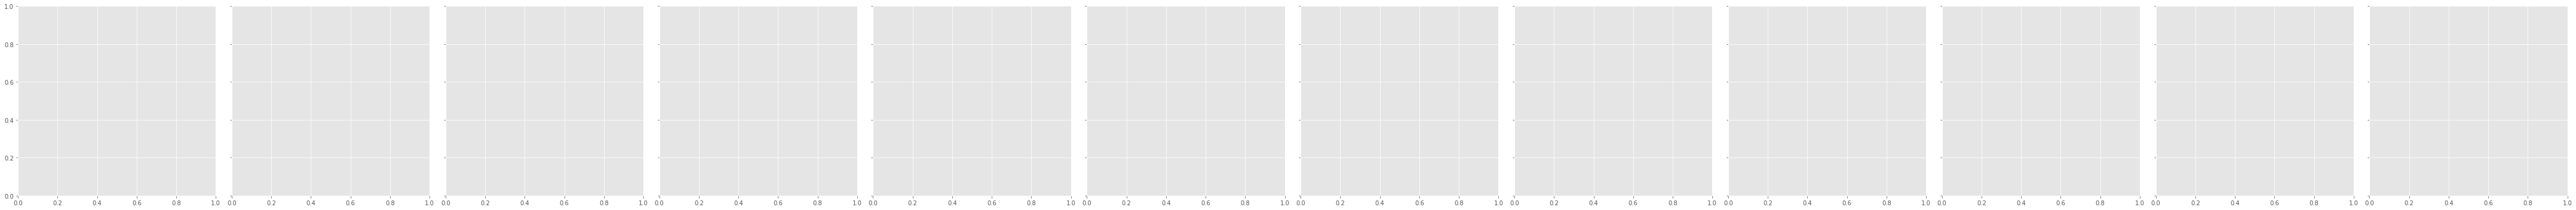

In [69]:
import seaborn as sns
sns.lmplot("order_month", "Order.ID", orders, hue="Sub.Category", col='order_month')

In [73]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

      ...      Sub.Category                               Product.Name  \
0     ...            Phones                           Samsung Convoy 3   
1     ...            Chairs  Novimex Executive Leather Armchair, Black   
2     ...            Phones          Nokia Smart Phone, with Caller ID   
3     ...            Phones             Motorola Smart Phone, Cordless   
4     ...           Copiers             Sharp Wireless Fax, High-Speed   

     Sales Quantity Discount   Profit Shipping.Cost Order.Priority order_year  \
0   221.98        2      0.0    62.15         40.77           High       2014   
1  3709.40        9      0.1  -288.77        923.63       Critical       2014   
2  5175.17        9      0.1   919.97        915.49         Medium       2014   
3  2892.51        5      0.1   -96.54        910.16         Medium       2014   
4  2832.96        8      0.0   311.52        903.04       Critical       2014   

   order_month  
0           11  
1            2  
2           10  
3            1  
4           11  

[5 rows x 26 columns]

In [92]:
returns=orders.loc[orders['Profit']<0]

In [94]:
returns.groupby('order_year')['Profit'].sum()

order_year
2012   -169308.97
2013   -195342.99
2014   -245908.22
2015   -310089.68
Name: Profit, dtype: float64

In [97]:
returns_mult=pd.concat(g for _, g in returns.groupby('Customer.ID') if len(g)>1)

In [100]:
returns_mult.groupby('Customer.ID').sum()
#2975 customers returned more than once.


Row.ID  Postal.Code    Sales  Quantity  Discount   Profit  \
Customer.ID                                                               
AA-10315102   136571          0.0   428.49        28     2.250  -188.67   
AA-103157      51601          0.0   355.32         6     0.200   -27.15   
AA-10375101     1074          0.0   226.60         8     1.500  -437.22   
AA-1037564     44213          0.0   291.37        10     1.400   -99.71   
AA-1037582     12437          0.0   367.23         9     0.800  -190.83   
AA-10645139    31937          0.0   143.09        10     1.000   -78.86   
AA-106451406   70635      38026.0   252.84         6     0.700   -20.04   
AA-1064536      9809          0.0   196.08         4     0.402   -23.24   
AA-1064545     36347          0.0   523.78         5     0.600   -14.15   
AA-106455      16200          0.0   229.28         7     1.200   -85.56   
AA-1064559    152777          0.0   395.74        23     2.520   -77.33   
AA-315134     132810          0.0   170.91         3     1.800  -226.71   
AA-375134      94771          0.0    42.00         3     1.200   -45.81   
AA-48075      132198          0.0    73.77         9     2.100  -138.81   
AA-64595      509351          0.0   555.09        24     7.700  -996.01   
AB-10015130    45351          0.0   264.59         6     0.540   -73.27   
AB-10015144    46539          0.0   309.25         4     0.540    -4.49   
AB-1001527     60533          0.0  1166.51        13     1.000  -357.95   
AB-100155      11017          0.0    81.15         4     0.800   -31.45   
AB-1001559     52167          0.0    78.48         7     0.740   -11.70   
AB-1001591     23409          0.0   102.98         5     1.000   -65.30   
AB-10060102    75408          0.0   303.29        14     0.850   -55.79   
AB-1006098      9360          0.0   376.26         5     0.800  -110.76   
AB-10105101     1152          0.0   198.98        11     1.200   -94.48   
AB-101051402  161602     308164.0   359.45        19     1.800  -181.58   
AB-101051404  109243     255069.0   423.97         9     1.400  -220.91   
AB-1010562     48489          0.0   163.81         8     1.500  -136.15   
AB-101057     109925          0.0   282.50        18     0.700   -31.04   
AB-10150143     6921          0.0   258.29         9     1.200   -84.95   
AB-1015055      8855          0.0    55.48        12     0.800   -10.30   
...              ...          ...      ...       ...       ...      ...   
VT-1170095    189062          0.0    60.11         4     2.800   -98.55   
VT-21700118   117716          0.0   993.16        21     2.200  -269.52   
VT-217001406  176021      95715.0   966.86        20     2.200  -299.83   
VT-2170036     24180          0.0   385.25        11     0.600   -70.07   
VT-2170059     85580          0.0   253.67        16     1.410  -104.89   
VT-2170097     96882          0.0  1040.14        17     1.700  -597.81   
VW-11775134   133654          0.0   101.50        10     1.800   -88.94   
VW-217751406  132115     176875.0  2364.61        19     2.000 -1440.83   
VW-21775143    27876          0.0   267.00        15     1.600  -139.14   
VW-2177545     33525          0.0   938.76         5     0.200   -52.77   
VW-2177559     78531          0.0    90.72         6     1.410   -63.81   
VW-217757     116826          0.0   134.24        15     1.600   -74.65   
WB-11850134   190394          0.0   152.65         8     2.400  -147.47   
WB-218501402  157070     305244.0   115.26        13     2.400   -90.26   
WB-218501404  111898     280605.0  1077.59        16     0.600  -127.87   
WB-218501406  107567      57411.0   166.84        11     1.600  -127.28   
WB-218507      58733          0.0   214.16         6     0.200   -20.92   
XP-21865143    15629          0.0    56.34         7     0.800   -20.80   
XP-2186534     31153          0.0   681.73         8     1.000  -576.04   
YC-2189545     46993          0.0   986.91        15     0.400   -20.76   
YS-2188055     29378          0.0   658

In [101]:
returns.head()

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
1    26341    IN-2014-JR162107-41675 2014-02-05    2/7/14    Second Class   
3    13524   ES-2014-KM1637548-41667 2014-01-28   1/30/14     First Class   
16   39519  CA-2012-AB10015140-40958 2012-02-19   2/25/12  Standard Class   
30     220   US-2012-RR1952536-41270 2012-12-27  12/29/12    Second Class   
40   21316   ID-2014-JB1600059-41873 2014-08-22   8/26/14  Standard Class   

     Customer.ID     Customer.Name      Segment  Postal.Code           City  \
1      JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
3     KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
16  AB-100151402     Aaron Bergman     Consumer      76017.0      Arlington   
30    RR-1952536         Rick Reed    Corporate          NaN  Santo Domingo   
40    JB-1600059         Joy Bell-     Consumer          NaN        Mataram   

       ...      Sub.Category                               Product.Name  \
1      ...            Chairs  Novimex Executive Leather Armchair, Black   
3      ...            Phones             Motorola Smart Phone, Cordless   
16     ...           Storage                         Akro Stacking Bins   
30     ...            Phones                  Samsung Smart Phone, VoIP   
40     ...            Phones            Motorola Smart Phone, Full Size   

      Sales Quantity Discount  Profit Shipping.Cost Order.Priority  \
1   3709.40        9     0.10 -288.77       923.630       Critical   
3   2892.51        5     0.10  -96.54       910.160         Medium   
16    12.62        2     0.20   -2.52         1.970            Low   
30  1696.64        5     0.20 -148.46       704.056       Critical   
40  3200.60        6     0.17  -77.20       660.870           High   

    order_year  order_month  
1         2014            2  
3         2014            1  
16        2012            2  
30        2012           12  
40        2014            8  

[5 rows x 26 columns]

In [107]:
returns.groupby('City')['Order.ID'].count()

City
Aba                25
Abakaliki           2
Abbeville           1
Abeokuta            8
Abilene             1
Abreu e Lima        1
Abuja               2
Acarigua            4
Acayucan            1
Acireale            2
Acuña               2
Acámbaro            1
Adana              49
Adelaide           32
Adiyaman            7
Aewŏl-li            2
Afyon               3
Agrigento           1
Aix-en-Provence     3
Ajman               4
Akhisar             2
Akron              10
Aksaray             3
Akure               3
Al Hudaydah         3
Alanya             10
Albany              6
Albertville         1
Albi                2
Albuquerque         1
                   ..
Wiesbaden           1
Wilhelmshaven       1
Wilmington          3
Wilson              4
Wodonga             3
Wolfsburg           1
Wollongong         18
Wolverhampton       2
Woodstock           2
Worcester           1
Wuchang             1
Wuhan              34
Wuppertal           3
Xiaogan             1
Xuzho

In [108]:
returns.groupby('Sub.Category')['Order.ID'].count()

Sub.Category
Accessories     656
Appliances      381
Art             910
Binders        1528
Bookcases       716
Chairs         1099
Copiers         525
Envelopes       555
Fasteners       626
Furnishings     797
Labels          520
Machines        454
Paper           527
Phones          789
Storage        1380
Supplies        581
Tables          496
Name: Order.ID, dtype: int64